In [1]:
conda install -c conda-forge xgboost

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    libxgboost-1.5.1           |   cpu_h598c753_2         2.2 MB  conda-forge
    openssl-1.1.1q             |       hfe4f2af_0         1.9 MB  conda-forge
    py-xgboost-1.5.1           |cpu_py39hb0a6171_2         152 KB  conda-forge
    xgboost-1.5.1              |cpu_py39h037b50c_2          12 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/osx-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         conda-forge/osx-64::libxgboost-1.5.1-cpu_h598c753_2
  py-xgboost    

In [188]:
conda install -c conda-forge graphviz python-graphviz

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - graphviz
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |    h0ab9d94_1001         1.3 MB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-ubuntu-0.83       |       hab24e00_0         1.9 MB  conda-forge
    fontconfig-2.13.94         |       h10f422b_0         285 KB  conda-forge
    fonts-conda-ecosystem-1    |                0           4 KB  conda-forge
    fonts-conda-forge-1        |                0           4 KB  conda-forge
    fribidi-1.0.10             |       hbcb3906_0          64 KB  conda-for

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline

/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('Telco_customer_churn.csv')

In [3]:
df.shape

(7043, 33)

In [4]:
df.drop(columns=['CustomerID'], inplace=True)

In [5]:
df.describe()

Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.000000    40.000000  3469.000000  
50%          70.350000     0.000000    61.000000  4527.000000  
75%          89.850000     1.000000    75.000000  5380.500000  
max         118.750000     1.000000   100.000000  6500.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Security    7043 

In [7]:
# Count
df['Count'].value_counts()

1    7043
Name: Count, dtype: int64

In [8]:
df.drop(columns=['Count'], inplace=True)

In [9]:
df['Country'].value_counts()

United States    7043
Name: Country, dtype: int64

In [10]:
df.drop(columns=['Country'], inplace=True)

In [11]:
df['State'].value_counts()

California    7043
Name: State, dtype: int64

In [12]:
df.drop(columns=['State'], inplace=True)

In [13]:
df['City'].value_counts()

Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: City, Length: 1129, dtype: int64

In [14]:
df['City'].replace(' ', '_', regex=True, inplace=True)

<AxesSubplot:ylabel='Zip Code'>

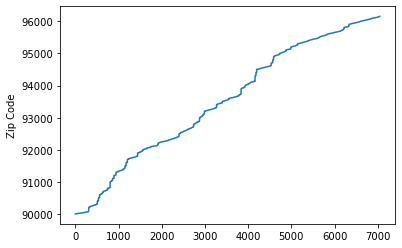

In [15]:
sns.lineplot(x=[i for i in range(0,df.shape[0])], y=df['Zip Code'].sort_values())

In [16]:
df.drop(columns=['Zip Code'], inplace=True)

In [17]:
# Already exists in Latitude & Longitude Separately
df['Lat Long']

0       33.964131, -118.272783
1        34.059281, -118.30742
2       34.048013, -118.293953
3       34.062125, -118.315709
4       34.039224, -118.266293
                 ...          
7038    34.341737, -116.539416
7039    34.667815, -117.536183
7040    34.559882, -115.637164
7041       34.1678, -116.86433
7042    34.424926, -117.184503
Name: Lat Long, Length: 7043, dtype: object

In [18]:
df['Latitude']

0       33.964131
1       34.059281
2       34.048013
3       34.062125
4       34.039224
          ...    
7038    34.341737
7039    34.667815
7040    34.559882
7041    34.167800
7042    34.424926
Name: Latitude, Length: 7043, dtype: float64

In [19]:
df['Longitude']

0      -118.272783
1      -118.307420
2      -118.293953
3      -118.315709
4      -118.266293
           ...    
7038   -116.539416
7039   -117.536183
7040   -115.637164
7041   -116.864330
7042   -117.184503
Name: Longitude, Length: 7043, dtype: float64

In [20]:
df.drop(columns=['Lat Long'], inplace=True)

In [21]:
df['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

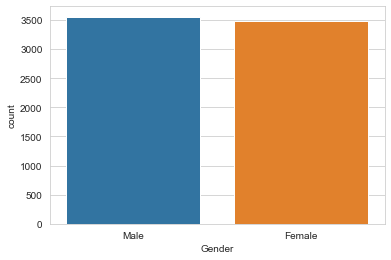

In [22]:
sns.set_style('whitegrid')
sns.countplot(x=df['Gender'])
plt.show()

In [23]:
df['Senior Citizen'].value_counts()

No     5901
Yes    1142
Name: Senior Citizen, dtype: int64

In [24]:
df['Partner']

0        No
1        No
2        No
3       Yes
4        No
       ... 
7038     No
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object

<AxesSubplot:xlabel='Tenure Months'>

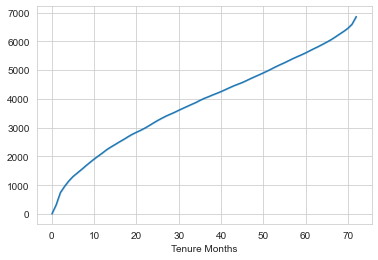

In [25]:
sns.lineplot(y=[i for i in range(0,df.shape[0])],x=df['Tenure Months'].sort_values())

In [26]:
df['Phone Service'].value_counts()

Yes    6361
No      682
Name: Phone Service, dtype: int64

In [27]:
df['Multiple Lines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: Multiple Lines, dtype: int64

In [28]:
df['Internet Service'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: Internet Service, dtype: int64

In [29]:
df['Online Security'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: Online Security, dtype: int64

In [30]:
df['Online Backup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: Online Backup, dtype: int64

In [31]:
df['Device Protection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: Device Protection, dtype: int64

In [32]:
df.columns

Index(['City', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Reason'],
      dtype='object')

In [33]:
df['Tech Support'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: Tech Support, dtype: int64

In [34]:
df['Streaming TV']

0                        No
1                        No
2                       Yes
3                       Yes
4                       Yes
               ...         
7038    No internet service
7039                    Yes
7040                    Yes
7041                     No
7042                    Yes
Name: Streaming TV, Length: 7043, dtype: object

In [35]:
df['Streaming Movies']

0                        No
1                        No
2                       Yes
3                       Yes
4                       Yes
               ...         
7038    No internet service
7039                    Yes
7040                    Yes
7041                     No
7042                    Yes
Name: Streaming Movies, Length: 7043, dtype: object

In [36]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [37]:
df['Paperless Billing'].value_counts()

Yes    4171
No     2872
Name: Paperless Billing, dtype: int64

In [38]:
df['Payment Method'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Payment Method, dtype: int64

In [39]:
df['Monthly Charges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
19.65     43
          ..
112.55     1
117.15     1
29.40      1
67.40      1
78.70      1
Name: Monthly Charges, Length: 1585, dtype: int64

<AxesSubplot:ylabel='Monthly Charges'>

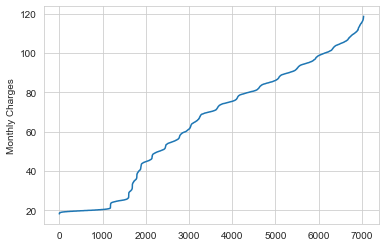

In [40]:
sns.lineplot(x=[i for i in range(0,df.shape[0])], y=df['Monthly Charges'].sort_values())

<AxesSubplot:ylabel='Total Charges'>

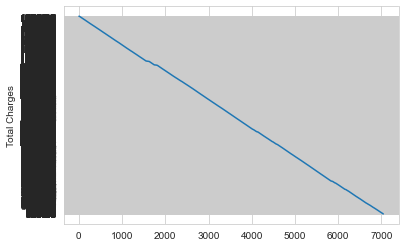

In [170]:
sns.lineplot(x=[i for i in range(0,df.shape[0])], y=df['Total Charges'].sort_values())

In [41]:
df['Total Charges'].value_counts()

20.2      11
          11
19.75      9
19.65      8
20.05      8
          ..
444.75     1
5459.2     1
295.95     1
394.1      1
6844.5     1
Name: Total Charges, Length: 6531, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Latitude           7043 non-null   float64
 2   Longitude          7043 non-null   float64
 3   Gender             7043 non-null   object 
 4   Senior Citizen     7043 non-null   object 
 5   Partner            7043 non-null   object 
 6   Dependents         7043 non-null   object 
 7   Tenure Months      7043 non-null   int64  
 8   Phone Service      7043 non-null   object 
 9   Multiple Lines     7043 non-null   object 
 10  Internet Service   7043 non-null   object 
 11  Online Security    7043 non-null   object 
 12  Online Backup      7043 non-null   object 
 13  Device Protection  7043 non-null   object 
 14  Tech Support       7043 non-null   object 
 15  Streaming TV       7043 non-null   object 
 16  Streaming Movies   7043 

In [43]:
pd.to_numeric(df['Total Charges'])

ValueError: Unable to parse string " " at position 2234

In [44]:
df.loc[df['Total Charges'] == " ","Total Charges"] = 0

In [45]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'])

<AxesSubplot:xlabel='Total Charges'>

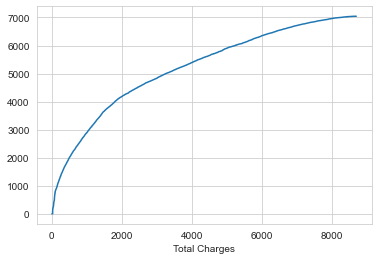

In [46]:
sns.lineplot(y=[i for i in range(0,df.shape[0])], x=df['Total Charges'].sort_values())

In [47]:
df['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

In [48]:
df['Churn Label'].unique()

array(['Yes', 'No'], dtype=object)

In [49]:
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

In [50]:
df['Churn Score'].unique()

array([ 86,  67,  84,  89,  78, 100,  92,  77,  97,  74,  66,  65,  70,
        90,  82,  69,  81,  96,  87,  88,  75,  76,  95,  99,  80,  73,
        94,  83,  98,  71,  85,  68,  91,  93,  72,  79,  27,  61,  43,
        51,  58,  39,  35,  57,  53,  21,  38,  40,  41,  22,  25,  64,
        49,  62,  52,  59,  29,  33,  20,  30,  26,  54,  56,  55,  28,
        37,   9,  60,  24,  63,  23,  47,  32,   8,  46,  42,  48,  36,
        34,   7,  50,  44,  31,   5,  45])

In [51]:
df['CLTV'].unique()

array([3239, 2701, 5372, ..., 2770, 4645, 5553])

In [52]:
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [53]:
df[df['Churn Reason'].notna()]

City   Latitude   Longitude  Gender Senior Citizen Partner  \
0      Los_Angeles  33.964131 -118.272783    Male             No      No   
1      Los_Angeles  34.059281 -118.307420  Female             No      No   
2      Los_Angeles  34.048013 -118.293953  Female             No      No   
3      Los_Angeles  34.062125 -118.315709  Female             No     Yes   
4      Los_Angeles  34.039224 -118.266293    Male             No      No   
...            ...        ...         ...     ...            ...     ...   
1864  Palm_Springs  33.745746 -116.514215    Male             No      No   
1865        Seeley  32.790282 -115.689559  Female             No      No   
1866         Vidal  34.264124 -114.717964    Male            Yes      No   
1867   White_Water  33.972293 -116.654195  Female             No      No   
1868  Apple_Valley  34.550820 -117.122396    Male            Yes     Yes   

     Dependents  Tenure Months Phone Service Multiple Lines  ...  \
0            No              2           Yes             No  ...   
1           Yes              2           Yes             No  ...   
2           Yes              8           Yes            Yes  ...   
3           Yes             28           Yes            Yes  ...   
4           Yes             49           Yes            Yes  ...   
...         ...            ...           ...            ...  ...   
1864         No             12           Yes             No  ...   
1865         No              9           Yes             No  ...   
1866         No              1           Yes            Yes  ...   
1867         No             67           Yes            Yes  ...   
1868         No              4           Yes            Yes  ...   

            Contract Paperless Billing             Payment Method  \
0     Month-to-month               Yes               Mailed check   
1     Month-to-month               Yes           Electronic check   
2     Month-to-month               Yes           Electronic check   
3     Month-to-month               Yes           Electronic check   
4     Month-to-month               Yes  Bank transfer (automatic)   
...              ...               ...                        ...   
1864        One year               Yes           Electronic check   
1865  Month-to-month               Yes  Bank transfer (automatic)   
1866  Month-to-month               Yes           Electronic check   
1867  Month-to-month               Yes    Credit card (automatic)   
1868  Month-to-month               Yes               Mailed check   

     Monthly Charges Total Charges Churn Label Churn Value Churn Score  CLTV  \
0              53.85        108.15         Yes           1          86  3239   
1              70.70        151.65         Yes           1          67  2701   
2              99.65        820.50         Yes           1          86  5372   
3             104.80       3046.05         Yes           1          84  5003   
4             103.70       5036.30         Yes           1          89  5340   
...              ...           ...         ...         ...         ...   ...   
1864           59.80        727.80         Yes           1          69  4581   
1865           44.20        403.35         Yes           1          87  2029   
1866           75.75         75.75         Yes           1          97  5571   
1867          102.95       6886.25         Yes           1          70  5620   
1868           74.40        306.60         Yes           1          77  5839   

                                   Churn Reason  
0                  Competitor made better offer  
1                                         Moved  
2                                         Moved  
3                                         Moved  
4                 Competitor had better devices  
...                                         ...  
1864  Competitor offered higher download speeds  
1865  Competitor offered higher download speeds  
1866  Competitor offered higher download spe

In [54]:
df.shape

(7043, 27)

In [55]:
df.drop(columns=['Churn Reason'], inplace=True)

In [56]:
df.drop(columns=['Churn Score', 'Churn Score'], inplace=True)

In [57]:
df.drop(columns=['Churn Label'], inplace=True)

In [58]:
df.drop(columns=['CLTV'], inplace=True)

In [59]:
df

City   Latitude   Longitude  Gender Senior Citizen Partner  \
0      Los_Angeles  33.964131 -118.272783    Male             No      No   
1      Los_Angeles  34.059281 -118.307420  Female             No      No   
2      Los_Angeles  34.048013 -118.293953  Female             No      No   
3      Los_Angeles  34.062125 -118.315709  Female             No     Yes   
4      Los_Angeles  34.039224 -118.266293    Male             No      No   
...            ...        ...         ...     ...            ...     ...   
7038       Landers  34.341737 -116.539416  Female             No      No   
7039      Adelanto  34.667815 -117.536183    Male             No     Yes   
7040         Amboy  34.559882 -115.637164  Female             No     Yes   
7041  Angelus_Oaks  34.167800 -116.864330  Female             No     Yes   
7042  Apple_Valley  34.424926 -117.184503    Male             No      No   

     Dependents  Tenure Months Phone Service    Multiple Lines  ...  \
0            No              2           Yes                No  ...   
1           Yes              2           Yes                No  ...   
2           Yes              8           Yes               Yes  ...   
3           Yes             28           Yes               Yes  ...   
4           Yes             49           Yes               Yes  ...   
...         ...            ...           ...               ...  ...   
7038         No             72           Yes                No  ...   
7039        Yes             24           Yes               Yes  ...   
7040        Yes             72           Yes               Yes  ...   
7041        Yes             11            No  No phone service  ...   
7042         No             66           Yes                No  ...   

        Device Protection         Tech Support         Streaming TV  \
0                      No                   No                   No   
1                      No                   No                   No   
2                     Yes                   No                  Yes   
3                     Yes                  Yes                  Yes   
4                     Yes                   No                  Yes   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039                  Yes                  Yes                  Yes   
7040                  Yes                   No                  Yes   
7041                   No                   No                   No   
7042                  Yes                  Yes                  Yes   

         Streaming Movies        Contract Paperless Billing  \
0                      No  Month-to-month               Yes   
1                      No  Month-to-month               Yes   
2                     Yes  Month-to-month               Yes   
3                     Yes  Month-to-month               Yes   
4                     Yes  Month-to-month               Yes   
...                   ...             ...               ...   
7038  No internet service        Two year               Yes   
7039                  Yes        One year               Yes   
7040                  Yes        One year               Yes   
7041                   No  Month-to-month               Yes   
7042                  Yes        Two year               Yes   

                 Payment Method Monthly Charges Total Charges Churn Value  
0                  Mailed check           53.85        108.15           1  
1              Electronic check           70.70        151.65           1  
2              Electronic check           99.65        820.50           1  
3              Electronic check          104.80       3046.05           1  
4     Bank transfer (automatic)          103.70       5036.30           1  
...                         ...             ...           ...         ...  
7038  Bank transfer (automatic)           21.15       1419.40           0  
7039               Mailed chec

In [60]:
df.columns = df.columns.str.replace(' ', '_')

In [62]:
df.columns

Index(['City', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen', 'Partner',
       'Dependents', 'Tenure_Months', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charges',
       'Total_Charges', 'Churn_Value'],
      dtype='object')

In [63]:
df.replace(' ','_', regex=True, inplace=True)

In [64]:
df

City   Latitude   Longitude  Gender Senior_Citizen Partner  \
0      Los_Angeles  33.964131 -118.272783    Male             No      No   
1      Los_Angeles  34.059281 -118.307420  Female             No      No   
2      Los_Angeles  34.048013 -118.293953  Female             No      No   
3      Los_Angeles  34.062125 -118.315709  Female             No     Yes   
4      Los_Angeles  34.039224 -118.266293    Male             No      No   
...            ...        ...         ...     ...            ...     ...   
7038       Landers  34.341737 -116.539416  Female             No      No   
7039      Adelanto  34.667815 -117.536183    Male             No     Yes   
7040         Amboy  34.559882 -115.637164  Female             No     Yes   
7041  Angelus_Oaks  34.167800 -116.864330  Female             No     Yes   
7042  Apple_Valley  34.424926 -117.184503    Male             No      No   

     Dependents  Tenure_Months Phone_Service    Multiple_Lines  ...  \
0            No              2           Yes                No  ...   
1           Yes              2           Yes                No  ...   
2           Yes              8           Yes               Yes  ...   
3           Yes             28           Yes               Yes  ...   
4           Yes             49           Yes               Yes  ...   
...         ...            ...           ...               ...  ...   
7038         No             72           Yes                No  ...   
7039        Yes             24           Yes               Yes  ...   
7040        Yes             72           Yes               Yes  ...   
7041        Yes             11            No  No_phone_service  ...   
7042         No             66           Yes                No  ...   

        Device_Protection         Tech_Support         Streaming_TV  \
0                      No                   No                   No   
1                      No                   No                   No   
2                     Yes                   No                  Yes   
3                     Yes                  Yes                  Yes   
4                     Yes                   No                  Yes   
...                   ...                  ...                  ...   
7038  No_internet_service  No_internet_service  No_internet_service   
7039                  Yes                  Yes                  Yes   
7040                  Yes                   No                  Yes   
7041                   No                   No                   No   
7042                  Yes                  Yes                  Yes   

         Streaming_Movies        Contract Paperless_Billing  \
0                      No  Month-to-month               Yes   
1                      No  Month-to-month               Yes   
2                     Yes  Month-to-month               Yes   
3                     Yes  Month-to-month               Yes   
4                     Yes  Month-to-month               Yes   
...                   ...             ...               ...   
7038  No_internet_service        Two_year               Yes   
7039                  Yes        One_year               Yes   
7040                  Yes        One_year               Yes   
7041                   No  Month-to-month               Yes   
7042                  Yes        Two_year               Yes   

                 Payment_Method Monthly_Charges Total_Charges Churn_Value  
0                  Mailed_check           53.85        108.15           1  
1              Electronic_check           70.70        151.65           1  
2              Electronic_check           99.65        820.50           1  
3              Electronic_check          104.80       3046.05           1  
4     Bank_transfer_(automatic)          103.70       5036.30           1  
...                         ...             ...           ...         ...  
7038  Bank_transfer_(automatic)           21.15       1419.40           0  
7039               Mailed_chec

#### Modeling

In [72]:
X = df.drop(columns=['Churn_Value']).copy()

In [73]:
y = df['Churn_Value'].copy()

In [79]:
dummy_columns = df.select_dtypes('object').columns

In [82]:
X_encoded = pd.get_dummies(data=X, columns=dummy_columns)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [120]:
model = xgb.XGBClassifier(objective='binary:logistic', missing=0, seed=42, use_label_encoder=False)

In [121]:
model.fit(X_train, 
          y_train, 
          verbose=True,
          early_stopping_rounds=20,
          eval_metric='aucpr',  
          eval_set=[(X_test,y_test)]
         )

[0]	validation_0-aucpr:0.65716
[1]	validation_0-aucpr:0.67305
[2]	validation_0-aucpr:0.68439
[3]	validation_0-aucpr:0.68808
[4]	validation_0-aucpr:0.68751
[5]	validation_0-aucpr:0.69233
[6]	validation_0-aucpr:0.68628
[7]	validation_0-aucpr:0.69049
[8]	validation_0-aucpr:0.69112
[9]	validation_0-aucpr:0.69191
[10]	validation_0-aucpr:0.69104
[11]	validation_0-aucpr:0.69423
[12]	validation_0-aucpr:0.69279
[13]	validation_0-aucpr:0.69309
[14]	validation_0-aucpr:0.68812
[15]	validation_0-aucpr:0.68414
[16]	validation_0-aucpr:0.68262
[17]	validation_0-aucpr:0.68178
[18]	validation_0-aucpr:0.67941
[19]	validation_0-aucpr:0.67791
[20]	validation_0-aucpr:0.67678
[21]	validation_0-aucpr:0.67780
[22]	validation_0-aucpr:0.67622
[23]	validation_0-aucpr:0.67511
[24]	validation_0-aucpr:0.67574
[25]	validation_0-aucpr:0.67698
[26]	validation_0-aucpr:0.67579
[27]	validation_0-aucpr:0.67504
[28]	validation_0-aucpr:0.67285
[29]	validation_0-aucpr:0.67348
[30]	validation_0-aucpr:0.67412


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=0,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


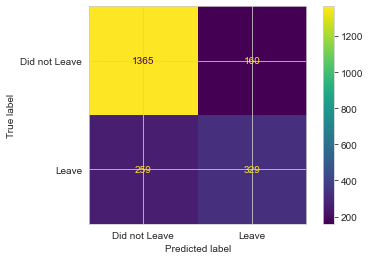

In [122]:
plot_confusion_matrix(model,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Did not Leave', 'Leave'])

In [123]:
from sklearn.metrics import ConfusionMatrixDisplay

In [125]:
prediction = model.predict(X_test)

In [127]:
confusion_matrix(y_test, prediction)

array([[1365,  160],
       [ 259,  329]])

In [130]:
y_test[y_test == 0]

2715    0
3825    0
3732    0
2526    0
2892    0
       ..
5522    0
6377    0
5500    0
2392    0
6705    0
Name: Churn_Value, Length: 1525, dtype: int64

In [131]:
y_test[y_test == 1]

185     1
1807    1
132     1
1263    1
1672    1
       ..
307     1
1791    1
71      1
1260    1
1666    1
Name: Churn_Value, Length: 588, dtype: int64

In [132]:
from sklearn.metrics import classification_report

In [134]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1525
           1       0.67      0.56      0.61       588

    accuracy                           0.80      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.79      0.80      0.80      2113



In [135]:
df

City   Latitude   Longitude  Gender Senior_Citizen Partner  \
0      Los_Angeles  33.964131 -118.272783    Male             No      No   
1      Los_Angeles  34.059281 -118.307420  Female             No      No   
2      Los_Angeles  34.048013 -118.293953  Female             No      No   
3      Los_Angeles  34.062125 -118.315709  Female             No     Yes   
4      Los_Angeles  34.039224 -118.266293    Male             No      No   
...            ...        ...         ...     ...            ...     ...   
7038       Landers  34.341737 -116.539416  Female             No      No   
7039      Adelanto  34.667815 -117.536183    Male             No     Yes   
7040         Amboy  34.559882 -115.637164  Female             No     Yes   
7041  Angelus_Oaks  34.167800 -116.864330  Female             No     Yes   
7042  Apple_Valley  34.424926 -117.184503    Male             No      No   

     Dependents  Tenure_Months Phone_Service    Multiple_Lines  ...  \
0            No              2           Yes                No  ...   
1           Yes              2           Yes                No  ...   
2           Yes              8           Yes               Yes  ...   
3           Yes             28           Yes               Yes  ...   
4           Yes             49           Yes               Yes  ...   
...         ...            ...           ...               ...  ...   
7038         No             72           Yes                No  ...   
7039        Yes             24           Yes               Yes  ...   
7040        Yes             72           Yes               Yes  ...   
7041        Yes             11            No  No_phone_service  ...   
7042         No             66           Yes                No  ...   

        Device_Protection         Tech_Support         Streaming_TV  \
0                      No                   No                   No   
1                      No                   No                   No   
2                     Yes                   No                  Yes   
3                     Yes                  Yes                  Yes   
4                     Yes                   No                  Yes   
...                   ...                  ...                  ...   
7038  No_internet_service  No_internet_service  No_internet_service   
7039                  Yes                  Yes                  Yes   
7040                  Yes                   No                  Yes   
7041                   No                   No                   No   
7042                  Yes                  Yes                  Yes   

         Streaming_Movies        Contract Paperless_Billing  \
0                      No  Month-to-month               Yes   
1                      No  Month-to-month               Yes   
2                     Yes  Month-to-month               Yes   
3                     Yes  Month-to-month               Yes   
4                     Yes  Month-to-month               Yes   
...                   ...             ...               ...   
7038  No_internet_service        Two_year               Yes   
7039                  Yes        One_year               Yes   
7040                  Yes        One_year               Yes   
7041                   No  Month-to-month               Yes   
7042                  Yes        Two_year               Yes   

                 Payment_Method Monthly_Charges Total_Charges Churn_Value  
0                  Mailed_check           53.85        108.15           1  
1              Electronic_check           70.70        151.65           1  
2              Electronic_check           99.65        820.50           1  
3              Electronic_check          104.80       3046.05           1  
4     Bank_transfer_(automatic)          103.70       5036.30           1  
...                         ...             ...           ...         ...  
7038  Bank_transfer_(automatic)           21.15       1419.40           0  
7039               Mailed_chec

### Grid Search

In [139]:
(y==0).sum()

5174

In [138]:
(y==0).sum() / (y==1).sum()

2.7683253076511503

In [ ]:
model.fit()

In [140]:
params = {'max_depth':[3,4,6,7], 'learning_rate':[0.3,0.1,0.01,0.05], 'gamma':[0,0.5,1,2], 
          'reg_lambda':[0,1,5,10], 'scale_pos_weight':[1,3,5,7]}

In [141]:
from sklearn.model_selection import GridSearchCV

In [146]:
optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                         missing=0,
                                         seed=42,
                                         subsample=0.9,
                                         colsample_bytree=0.5,
                                         use_label_encoder=False),
            param_grid=params,
            scoring='roc_auc',
             n_jobs=10,
             cv=3,
             verbose=2
            )

In [147]:
optimal_params.fit(X_train, y_train, early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits


/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype inste

[0]	validation_0-aucpr:0.55914
[0]	validation_0-aucpr:0.55914
[0]	validation_0-aucpr:0.56113
[0]	validation_0-aucpr:0.55899
[0]	validation_0-aucpr:0.55922
[0]	validation_0-aucpr:0.56077
[0]	validation_0-aucpr:0.56113
[0]	validation_0-aucpr:0.55898
[0]	validation_0-aucpr:0.55944
[0]	validation_0-aucpr:0.55482
[1]	validation_0-aucpr:0.57785
[1]	validation_0-aucpr:0.57785
[1]	validation_0-aucpr:0.64247
[1]	validation_0-aucpr:0.61863
[1]	validation_0-aucpr:0.57827
[1]	validation_0-aucpr:0.64614
[1]	validation_0-aucpr:0.63157
[1]	validation_0-aucpr:0.64485
[1]	validation_0-aucpr:0.57321
[1]	validation_0-aucpr:0.65958
[2]	validation_0-aucpr:0.64811
[2]	validation_0-aucpr:0.64737
[2]	validation_0-aucpr:0.65162
[2]	validation_0-aucpr:0.64138
[2]	validation_0-aucpr:0.66306
[2]	validation_0-aucpr:0.66134
[2]	validation_0-aucpr:0.65132
[2]	validation_0-aucpr:0.59838
[2]	validation_0-aucpr:0.67401
[2]	validation_0-aucpr:0.64857
[3]	validation_0-aucpr:0.64993
[3]	validation_0-aucpr:0.64996
[3]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[25]	validation_0-aucpr:0.69696
[25]	validation_0-aucpr:0.68867
[26]	validation_0-aucpr:0.69232
[26]	validation_0-aucpr:0.68619
[26]	validation_0-aucpr:0.69734
[26]	validation_0-aucpr:0.68603
[27]	validation_0-aucpr:0.69426
[27]	validation_0-aucpr:0.69799
[27]	validation_0-aucpr:0.68840
[28]	validation_0-aucpr:0.69243
[28]	validation_0-aucpr:0.69784
[28]	validation_0-aucpr:0.68889


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[29]	validation_0-aucpr:0.69287
[29]	validation_0-aucpr:0.69748
[29]	validation_0-aucpr:0.68912
[30]	validation_0-aucpr:0.69378
[30]	validation_0-aucpr:0.69708
[30]	validation_0-aucpr:0.68831
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.2s
[0]	validation_0-aucpr:0.56113
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.2s
[0]	validation_0-aucpr:0.55829
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.3s
[0]	validation_0-aucpr:0.55878
[31]	validation_0-aucpr:0.69525
[31]	validation_0-aucpr:0.69681
[31]	validation_0-aucpr:0.69042
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.2s
[0]	validation_0-aucpr:0.55936


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.61872
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.3s
[0]	validation_0-aucpr:0.55898
[1]	validation_0-aucpr:0.64333
[1]	validation_0-aucpr:0.61997
[32]	validation_0-aucpr:0.68652
[32]	validation_0-aucpr:0.69768
[1]	validation_0-aucpr:0.57393
[2]	validation_0-aucpr:0.63871
[1]	validation_0-aucpr:0.65945
[33]	validation_0-aucpr:0.68663
[2]	validation_0-aucpr:0.66169
[33]	validation_0-aucpr:0.69558
[2]	validation_0-aucpr:0.66378
[2]	validation_0-aucpr:0.59922
[2]	validation_0-aucpr:0.67380
[3]	validation_0-aucpr:0.64822
[34]	validation_0-aucpr:0.68678
[3]	validation_0-aucpr:0.66839
[34]	validation_0-aucpr:0.69534
[3]	validation_0-aucpr:0.66972
[3]	validation_0-aucpr:0.62511
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.55922
[35]	validation_0-aucpr:0.68862
[3]	validation_0-aucpr:0.68439
[4]	validation_0-aucpr:0.63761
[35]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68189
[9]	validation_0-aucpr:0.69507
[4]	validation_0-aucpr:0.64812
[9]	validation_0-aucpr:0.69707
[9]	validation_0-aucpr:0.69009
[6]	validation_0-aucpr:0.68598
[9]	validation_0-aucpr:0.69423
[10]	validation_0-aucpr:0.67866
[10]	validation_0-aucpr:0.70363
[10]	validation_0-aucpr:0.69667
[5]	validation_0-aucpr:0.65546
[10]	validation_0-aucpr:0.68835
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.55898
[7]	validation_0-aucpr:0.68671
[11]	validation_0-aucpr:0.67999
[10]	validation_0-aucpr:0.69680
[11]	validation_0-aucpr:0.70496
[6]	validation_0-aucpr:0.67425
[11]	validation_0-aucpr:0.69641
[1]	validation_0-aucpr:0.63633
[11]	validation_0-aucpr:0.68571
[8]	validation_0-aucpr:0.68915
[12]	validation_0-aucpr:0.68291
[11]	validation_0-aucpr:0.69474
[12]	validation_0-aucpr:0.70461
[7]	validation_0-aucpr:0.68380
[12]	validation_0-aucpr:0.69352
[2]	validation_0-aucpr:0.65553
[12]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68445
[12]	validation_0-aucpr:0.69558
[13]	validation_0-aucpr:0.70535
[13]	validation_0-aucpr:0.69803
[8]	validation_0-aucpr:0.68417
[3]	validation_0-aucpr:0.65551
[13]	validation_0-aucpr:0.68866
[10]	validation_0-aucpr:0.69913
[13]	validation_0-aucpr:0.69706
[14]	validation_0-aucpr:0.68235
[14]	validation_0-aucpr:0.69550
[9]	validation_0-aucpr:0.68920
[14]	validation_0-aucpr:0.70407
[4]	validation_0-aucpr:0.65813
[14]	validation_0-aucpr:0.68897
[11]	validation_0-aucpr:0.70115
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.55914
[15]	validation_0-aucpr:0.68097
[14]	validation_0-aucpr:0.69872
[15]	validation_0-aucpr:0.69908
[10]	validation_0-aucpr:0.69096
[15]	validation_0-aucpr:0.70347
[15]	validation_0-aucpr:0.68967
[5]	validation_0-aucpr:0.67544
[12]	validation_0-aucpr:0.70340
[16]	validation_0-aucpr:0.68055
[1]	validation_0-aucpr:0.57786
[15]	validation_0-aucpr:0.69943
[16]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67246
[14]	validation_0-aucpr:0.70318
[17]	validation_0-aucpr:0.68692
[3]	validation_0-aucpr:0.64997
[17]	validation_0-aucpr:0.70062
[18]	validation_0-aucpr:0.68460
[18]	validation_0-aucpr:0.70678
[13]	validation_0-aucpr:0.69316
[18]	validation_0-aucpr:0.69853
[8]	validation_0-aucpr:0.68181
[15]	validation_0-aucpr:0.70485
[18]	validation_0-aucpr:0.68502
[18]	validation_0-aucpr:0.70072
[4]	validation_0-aucpr:0.66229
[19]	validation_0-aucpr:0.68412
[14]	validation_0-aucpr:0.69445
[19]	validation_0-aucpr:0.69278
[19]	validation_0-aucpr:0.70752
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.56113
[16]	validation_0-aucpr:0.70617
[9]	validation_0-aucpr:0.68548
[19]	validation_0-aucpr:0.68502
[19]	validation_0-aucpr:0.70044
[5]	validation_0-aucpr:0.66553
[20]	validation_0-aucpr:0.68651
[15]	validation_0-aucpr:0.69546
[20]	validation_0-aucpr:0.69480
[20]	validation_0-aucpr:0.70822
[1]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[24]	validation_0-aucpr:0.68548
[9]	validation_0-aucpr:0.68799
[24]	validation_0-aucpr:0.70591
[19]	validation_0-aucpr:0.69648
[21]	validation_0-aucpr:0.70270
[24]	validation_0-aucpr:0.69796
[14]	validation_0-aucpr:0.69469
[5]	validation_0-aucpr:0.65437
[25]	validation_0-aucpr:0.70299
[25]	validation_0-aucpr:0.68382
[10]	validation_0-aucpr:0.69617
[20]	validation_0-aucpr:0.69646
[22]	validation_0-aucpr:0.70439
[25]	validation_0-aucpr:0.69904
[15]	validation_0-aucpr:0.69253
[6]	validation_0-aucpr:0.66339
[26]	validation_0-aucpr:0.68481
[26]	validation_0-aucpr:0.70324
[11]	validation_0-aucpr:0.69672
[21]	validation_0-aucpr:0.69512
[16]	validation_0-aucpr:0.69263
[23]	validation_0-aucpr:0.69861
[27]	validation_0-aucpr:0.68322
[7]	validation_0-aucpr:0.67493
[27]	validation_0-aucpr:0.70459
[22]	validation_0-aucpr:0.69432
[12]	validation_0-aucpr:0.69818
[24]	validation_0-aucpr:0.69912
[28]	validation_0-aucpr:0.68672
[17]	validation_0-aucpr:0.69444
[8]	validation_0-aucpr:0.67412
[23]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[12]	validation_0-aucpr:0.69043
[17]	validation_0-aucpr:0.70478
[33]	validation_0-aucpr:0.68794
[3]	validation_0-aucpr:0.62494
[22]	validation_0-aucpr:0.69097
[2]	validation_0-aucpr:0.64378
[13]	validation_0-aucpr:0.69049
[18]	validation_0-aucpr:0.70476
[34]	validation_0-aucpr:0.68751
[23]	validation_0-aucpr:0.69024
[3]	validation_0-aucpr:0.64661
[4]	validation_0-aucpr:0.62628
[14]	validation_0-aucpr:0.69202
[19]	validation_0-aucpr:0.70470


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.68932
[4]	validation_0-aucpr:0.65588
[5]	validation_0-aucpr:0.66389
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.7s
[0]	validation_0-aucpr:0.56113
[15]	validation_0-aucpr:0.69078
[20]	validation_0-aucpr:0.70552
[36]	validation_0-aucpr:0.68755
[6]	validation_0-aucpr:0.66595
[5]	validation_0-aucpr:0.66249
[21]	validation_0-aucpr:0.70549
[16]	validation_0-aucpr:0.69226
[1]	validation_0-aucpr:0.61872
[37]	validation_0-aucpr:0.68643
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.55944
[6]	validation_0-aucpr:0.68140
[7]	validation_0-aucpr:0.67527
[22]	validation_0-aucpr:0.70599
[2]	validation_0-aucpr:0.63871
[17]	validation_0-aucpr:0.69141
[38]	validation_0-aucpr:0.68667
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.55417
[1]	validation_0-aucpr:0.57352

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.68616
[6]	validation_0-aucpr:0.67614
[3]	validation_0-aucpr:0.66923
[5]	validation_0-aucpr:0.66674
[4]	validation_0-aucpr:0.67873
[11]	validation_0-aucpr:0.69009
[12]	validation_0-aucpr:0.69078
[27]	validation_0-aucpr:0.69854
[22]	validation_0-aucpr:0.69078
[43]	validation_0-aucpr:0.68424
[7]	validation_0-aucpr:0.67774
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.55851
[4]	validation_0-aucpr:0.67062
[6]	validation_0-aucpr:0.66673
[12]	validation_0-aucpr:0.69185
[5]	validation_0-aucpr:0.68330
[28]	validation_0-aucpr:0.69933
[13]	validation_0-aucpr:0.69299
[23]	validation_0-aucpr:0.69082
[44]	validation_0-aucpr:0.68504
[8]	validation_0-aucpr:0.67782
[1]	validation_0-aucpr:0.65910
[5]	validation_0-aucpr:0.67541
[7]	validation_0-aucpr:0.68551
[13]	validation_0-aucpr:0.69112
[6]	validation_0-aucpr:0.68755
[29]	validation_0-aucpr:0.69849
[24]	validation_0-aucpr:0.68903
[14]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[12]	validation_0-aucpr:0.67887
[9]	validation_0-aucpr:0.68763
[5]	validation_0-aucpr:0.67632
[11]	validation_0-aucpr:0.69016
[17]	validation_0-aucpr:0.69579
[10]	validation_0-aucpr:0.70264
[18]	validation_0-aucpr:0.69244
[13]	validation_0-aucpr:0.67926
[10]	validation_0-aucpr:0.68963
[6]	validation_0-aucpr:0.68692
[12]	validation_0-aucpr:0.69244
[18]	validation_0-aucpr:0.69757
[11]	validation_0-aucpr:0.70300
[19]	validation_0-aucpr:0.69164
[14]	validation_0-aucpr:0.68262
[11]	validation_0-aucpr:0.69162
[7]	validation_0-aucpr:0.68637
[13]	validation_0-aucpr:0.69417
[19]	validation_0-aucpr:0.69784
[12]	validation_0-aucpr:0.70280
[20]	validation_0-aucpr:0.69225
[15]	validation_0-aucpr:0.68897
[8]	validation_0-aucpr:0.68835
[12]	validation_0-aucpr:0.69163
[20]	validation_0-aucpr:0.69899
[14]	validation_0-aucpr:0.69325


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.70412
[21]	validation_0-aucpr:0.69339
[16]	validation_0-aucpr:0.69229
[13]	validation_0-aucpr:0.69439
[9]	validation_0-aucpr:0.69134
[21]	validation_0-aucpr:0.69752
[15]	validation_0-aucpr:0.69325
[22]	validation_0-aucpr:0.69335
[14]	validation_0-aucpr:0.70426
[17]	validation_0-aucpr:0.68985
[10]	validation_0-aucpr:0.69625
[14]	validation_0-aucpr:0.69531
[22]	validation_0-aucpr:0.69628
[16]	validation_0-aucpr:0.69296
[23]	validation_0-aucpr:0.69462
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.55849
[15]	validation_0-aucpr:0.70823
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.56113
[18]	validation_0-aucpr:0.69246
[17]	validation_0-aucpr:0.68972
[15]	validation_0-aucpr:0.69844
[11]	validation_0-aucpr:0.69942
[23]	validation_0-aucpr:0.69435
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[8]	validation_0-aucpr:0.69359
[31]	validation_0-aucpr:0.68932
[23]	validation_0-aucpr:0.70338
[26]	validation_0-aucpr:0.68468
[8]	validation_0-aucpr:0.68225
[19]	validation_0-aucpr:0.70357
[23]	validation_0-aucpr:0.70543
[8]	validation_0-aucpr:0.68827
[32]	validation_0-aucpr:0.68906
[9]	validation_0-aucpr:0.69315
[27]	validation_0-aucpr:0.68651
[24]	validation_0-aucpr:0.70158
[24]	validation_0-aucpr:0.70624
[20]	validation_0-aucpr:0.70121
[9]	validation_0-aucpr:0.68745
[9]	validation_0-aucpr:0.69137
[33]	validation_0-aucpr:0.68799
[28]	validation_0-aucpr:0.68513
[10]	validation_0-aucpr:0.69905
[25]	validation_0-aucpr:0.70164
[25]	validation_0-aucpr:0.70655
[21]	validation_0-aucpr:0.70198
[10]	validation_0-aucpr:0.68915
[10]	validation_0-aucpr:0.69419
[34]	validation_0-aucpr:0.68904
[11]	validation_0-aucpr:0.69954
[26]	validation_0-aucpr:0.70325
[26]	validation_0-aucpr:0.70815
[22]	validation_0-aucpr:0.70064
[11]	validation_0-aucpr:0.68950
[11]	validation_0-aucpr:0.69351
[35]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.69482
[13]	validation_0-aucpr:0.70139
[28]	validation_0-aucpr:0.70587
[24]	validation_0-aucpr:0.70348
[13]	validation_0-aucpr:0.69111
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.55899
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.56113
[13]	validation_0-aucpr:0.69627
[14]	validation_0-aucpr:0.69964
[29]	validation_0-aucpr:0.70585
[25]	validation_0-aucpr:0.70550
[14]	validation_0-aucpr:0.68968
[1]	validation_0-aucpr:0.64186
[1]	validation_0-aucpr:0.57827
[14]	validation_0-aucpr:0.69519
[15]	validation_0-aucpr:0.69844
[30]	validation_0-aucpr:0.70396
[26]	validation_0-aucpr:0.70815
[15]	validation_0-aucpr:0.69493
[2]	validation_0-aucpr:0.65151
[2]	validation_0-aucpr:0.64159
[15]	validation_0-aucpr:0.69317


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.70465
[16]	validation_0-aucpr:0.69875
[27]	validation_0-aucpr:0.70953
[16]	validation_0-aucpr:0.69556
[3]	validation_0-aucpr:0.65283
[3]	validation_0-aucpr:0.64920
[16]	validation_0-aucpr:0.69266
[32]	validation_0-aucpr:0.70512
[17]	validation_0-aucpr:0.70080
[28]	validation_0-aucpr:0.71041
[17]	validation_0-aucpr:0.69882
[4]	validation_0-aucpr:0.66057
[4]	validation_0-aucpr:0.64549
[17]	validation_0-aucpr:0.69265
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.55890
[33]	validation_0-aucpr:0.70612
[18]	validation_0-aucpr:0.69970
[29]	validation_0-aucpr:0.71020
[18]	validation_0-aucpr:0.69817
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.55914
[5]	validation_0-aucpr:0.65458
[5]	validation_0-aucpr:0.65995
[18]	validation_0-aucpr:0.69285
[1]	validation_0-aucpr:0.57355
[34]	validation_0-aucpr:0.70598
[19

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68094
[10]	validation_0-aucpr:0.69242
[6]	validation_0-aucpr:0.66698
[24]	validation_0-aucpr:0.69652
[35]	validation_0-aucpr:0.70688
[5]	validation_0-aucpr:0.65285
[6]	validation_0-aucpr:0.67538
[11]	validation_0-aucpr:0.68273
[11]	validation_0-aucpr:0.69340
[7]	validation_0-aucpr:0.67010
[36]	validation_0-aucpr:0.70554
[25]	validation_0-aucpr:0.69580
[6]	validation_0-aucpr:0.67546
[7]	validation_0-aucpr:0.67352
[12]	validation_0-aucpr:0.68986
[12]	validation_0-aucpr:0.69381
[8]	validation_0-aucpr:0.67729
[37]	validation_0-aucpr:0.70598
[26]	validation_0-aucpr:0.69517
[7]	validation_0-aucpr:0.67784


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67754
[13]	validation_0-aucpr:0.69481
[13]	validation_0-aucpr:0.69200
[9]	validation_0-aucpr:0.68697
[38]	validation_0-aucpr:0.70611
[8]	validation_0-aucpr:0.67942
[9]	validation_0-aucpr:0.67606
[14]	validation_0-aucpr:0.69630
[14]	validation_0-aucpr:0.69242
[10]	validation_0-aucpr:0.68317
[39]	validation_0-aucpr:0.70409


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68951
[15]	validation_0-aucpr:0.69662
[15]	validation_0-aucpr:0.69219
[10]	validation_0-aucpr:0.69267
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.55896
[11]	validation_0-aucpr:0.67755
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.55417
[10]	validation_0-aucpr:0.68656
[16]	validation_0-aucpr:0.69712
[16]	validation_0-aucpr:0.69467
[11]	validation_0-aucpr:0.69364
[1]	validation_0-aucpr:0.57345
[12]	validation_0-aucpr:0.68036
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.55417
[1]	validation_0-aucpr:0.61234
[11]	validation_0-aucpr:0.68792
[17]	validation_0-aucpr:0.69600
[17]	validation_0-aucpr:0.69997
[2]	validation_0-aucpr:0.59827
[12]	validation_0-aucpr:0.69673
[13]	validation_0-aucpr:0.68312
[1]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69067
[19]	validation_0-aucpr:0.69834
[19]	validation_0-aucpr:0.69790
[15]	validation_0-aucpr:0.68703
[14]	validation_0-aucpr:0.69726
[4]	validation_0-aucpr:0.62588
[4]	validation_0-aucpr:0.66375
[3]	validation_0-aucpr:0.65742
[20]	validation_0-aucpr:0.69839
[20]	validation_0-aucpr:0.69866
[14]	validation_0-aucpr:0.69071
[15]	validation_0-aucpr:0.69672
[16]	validation_0-aucpr:0.68723
[5]	validation_0-aucpr:0.66666
[5]	validation_0-aucpr:0.67846
[4]	validation_0-aucpr:0.65533
[21]	validation_0-aucpr:0.69740
[15]	validation_0-aucpr:0.69420
[21]	validation_0-aucpr:0.69806
[16]	validation_0-aucpr:0.69578
[17]	validation_0-aucpr:0.68626
[6]	validation_0-aucpr:0.66657
[6]	validation_0-aucpr:0.68508
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.55417
[5]	validation_0-aucpr:0.66266
[22]	validation_0-aucpr:0.69779
[16]	validation_0-aucpr:0.69519
[22]	validation_0-aucpr:0.69746
[17]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.69633
[26]	validation_0-aucpr:0.69223
[7]	validation_0-aucpr:0.69222
[25]	validation_0-aucpr:0.69553
[15]	validation_0-aucpr:0.70548
[9]	validation_0-aucpr:0.69375
[26]	validation_0-aucpr:0.69510
[14]	validation_0-aucpr:0.69249
[16]	validation_0-aucpr:0.69779
[27]	validation_0-aucpr:0.69272
[26]	validation_0-aucpr:0.69481
[8]	validation_0-aucpr:0.69796
[16]	validation_0-aucpr:0.70603
[10]	validation_0-aucpr:0.69676
[15]	validation_0-aucpr:0.69246
[27]	validation_0-aucpr:0.69486
[17]	validation_0-aucpr:0.69722
[28]	validation_0-aucpr:0.69468
[27]	validation_0-aucpr:0.69138
[9]	validation_0-aucpr:0.69716
[17]	validation_0-aucpr:0.70628
[11]	validation_0-aucpr:0.69916
[16]	validation_0-aucpr:0.69676
[28]	validation_0-aucpr:0.69497
[18]	validation_0-aucpr:0.69647
[29]	validation_0-aucpr:0.69416
[28]	validation_0-aucpr:0.69260
[18]	validation_0-aucpr:0.70573
[12]	validation_0-aucpr:0.69920
[10]	validation_0-aucpr:0.70168
[17]	validation_0-aucpr:0.69752
[29]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.70675
[31]	validation_0-aucpr:0.69464
[13]	validation_0-aucpr:0.70076
[15]	validation_0-aucpr:0.69961
[2]	validation_0-aucpr:0.64651
[20]	validation_0-aucpr:0.69873
[32]	validation_0-aucpr:0.69291
[33]	validation_0-aucpr:0.69456
[22]	validation_0-aucpr:0.68998
[22]	validation_0-aucpr:0.70687
[14]	validation_0-aucpr:0.70176
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.55898
[16]	validation_0-aucpr:0.70051
[3]	validation_0-aucpr:0.65316
[21]	validation_0-aucpr:0.69946
[34]	validation_0-aucpr:0.69469
[23]	validation_0-aucpr:0.70649
[23]	validation_0-aucpr:0.69071
[15]	validation_0-aucpr:0.69912
[1]	validation_0-aucpr:0.57485
[17]	validation_0-aucpr:0.70186
[4]	validation_0-aucpr:0.64824
[22]	validation_0-aucpr:0.69989
[35]	validation_0-aucpr:0.69476
[24]	validation_0-aucpr:0.70427
[24]	validation_0-aucpr:0.69127
[16]	validation_0-aucpr:0.70086
[2]	validation_0-aucpr:0.59682
[18]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[25]	validation_0-aucpr:0.70335
[25]	validation_0-aucpr:0.69208
[17]	validation_0-aucpr:0.70202
[19]	validation_0-aucpr:0.70204
[3]	validation_0-aucpr:0.62420
[6]	validation_0-aucpr:0.67414
[24]	validation_0-aucpr:0.70174
[37]	validation_0-aucpr:0.69462
[26]	validation_0-aucpr:0.70325
[26]	validation_0-aucpr:0.69188
[18]	validation_0-aucpr:0.70482
[20]	validation_0-aucpr:0.70115
[4]	validation_0-aucpr:0.62447
[7]	validation_0-aucpr:0.68273
[38]	validation_0-aucpr:0.69486
[25]	validation_0-aucpr:0.70097
[27]	validation_0-aucpr:0.70273
[19]	validation_0-aucpr:0.70465
[21]	validation_0-aucpr:0.70149
[5]	validation_0-aucpr:0.66347
[8]	validation_0-aucpr:0.68244
[39]	validation_0-aucpr:0.69593
[26]	validation_0-aucpr:0.70274


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.70203
[20]	validation_0-aucpr:0.70518
[22]	validation_0-aucpr:0.70117
[6]	validation_0-aucpr:0.67332
[40]	validation_0-aucpr:0.69410
[9]	validation_0-aucpr:0.68784
[27]	validation_0-aucpr:0.70355
[29]	validation_0-aucpr:0.70108
[21]	validation_0-aucpr:0.70590
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.56113
[7]	validation_0-aucpr:0.67525
[23]	validation_0-aucpr:0.70220
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.55922
[41]	validation_0-aucpr:0.69432
[30]	validation_0-aucpr:0.70098
[10]	validation_0-aucpr:0.69056
[28]	validation_0-aucpr:0.70303
[22]	validation_0-aucpr:0.70688
[8]	validation_0-aucpr:0.68053
[1]	validation_0-aucpr:0.61846
[1]	validation_0-aucpr:0.57787
[24]	validation_0-aucpr:0.70238
[31]	validation_0-aucpr:0.70000
[42]	validation_0-aucpr:0.69419
[11]	validation_0-aucpr:0.69267


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.70334
[23]	validation_0-aucpr:0.70294
[9]	validation_0-aucpr:0.68583
[2]	validation_0-aucpr:0.64664
[32]	validation_0-aucpr:0.70122
[2]	validation_0-aucpr:0.65662
[25]	validation_0-aucpr:0.70154
[12]	validation_0-aucpr:0.69516
[43]	validation_0-aucpr:0.69434
[30]	validation_0-aucpr:0.70319
[24]	validation_0-aucpr:0.69993
[3]	validation_0-aucpr:0.65460
[3]	validation_0-aucpr:0.65633
[10]	validation_0-aucpr:0.68593
[13]	validation_0-aucpr:0.69729
[26]	validation_0-aucpr:0.69988
[44]	validation_0-aucpr:0.69084
[31]	validation_0-aucpr:0.70367
[25]	validation_0-aucpr:0.69835
[4]	validation_0-aucpr:0.64924
[4]	validation_0-aucpr:0.66093
[11]	validation_0-aucpr:0.67994
[14]	validation_0-aucpr:0.69543
[45]	validation_0-aucpr:0.69095
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.55896
[27]	validation_0-aucpr:0.70047
[32]	validation_0-aucpr:0.70091
[26]	validation_0-aucpr:0.69798
[5]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68005
[37]	validation_0-aucpr:0.70064
[19]	validation_0-aucpr:0.70298
[5]	validation_0-aucpr:0.66717
[16]	validation_0-aucpr:0.68651
[9]	validation_0-aucpr:0.68135
[31]	validation_0-aucpr:0.70194
[33]	validation_0-aucpr:0.70156
[10]	validation_0-aucpr:0.68143
[38]	validation_0-aucpr:0.70312
[20]	validation_0-aucpr:0.70310
[6]	validation_0-aucpr:0.66639
[10]	validation_0-aucpr:0.69505
[17]	validation_0-aucpr:0.68764
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.55914
[34]	validation_0-aucpr:0.70278
[21]	validation_0-aucpr:0.70070
[39]	validation_0-aucpr:0.70272
[11]	validation_0-aucpr:0.68097
[7]	validation_0-aucpr:0.66839
[18]	validation_0-aucpr:0.68886
[11]	validation_0-aucpr:0.69787
[1]	validation_0-aucpr:0.57787
[35]	validation_0-aucpr:0.70213
[40]	validation_0-aucpr:0.70310
[22]	validation_0-aucpr:0.70064
[12]	validation_0-aucpr:0.68801
[12]	validation_0-aucpr:0.69916
[8]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[3]	validation_0-aucpr:0.65268
[37]	validation_0-aucpr:0.70278
[24]	validation_0-aucpr:0.70078
[14]	validation_0-aucpr:0.69551
[14]	validation_0-aucpr:0.70203
[21]	validation_0-aucpr:0.68775
[10]	validation_0-aucpr:0.68149
[4]	validation_0-aucpr:0.65253
[38]	validation_0-aucpr:0.70267
[25]	validation_0-aucpr:0.70027
[15]	validation_0-aucpr:0.69561
[15]	validation_0-aucpr:0.70300
[11]	validation_0-aucpr:0.67728
[5]	validation_0-aucpr:0.65714
[22]	validation_0-aucpr:0.68853
[26]	validation_0-aucpr:0.70202
[39]	validation_0-aucpr:0.70055
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   3.4s
[0]	validation_0-aucpr:0.56113
[16]	validation_0-aucpr:0.69864
[16]	validation_0-aucpr:0.70065
[12]	validation_0-aucpr:0.68097
[23]	validation_0-aucpr:0.69225
[6]	validation_0-aucpr:0.67018


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.69811
[27]	validation_0-aucpr:0.70301
[1]	validation_0-aucpr:0.61877
[17]	validation_0-aucpr:0.69973
[17]	validation_0-aucpr:0.70194
[13]	validation_0-aucpr:0.68494
[7]	validation_0-aucpr:0.66993
[24]	validation_0-aucpr:0.69174
[41]	validation_0-aucpr:0.69864
[18]	validation_0-aucpr:0.69820
[2]	validation_0-aucpr:0.63808
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.55886
[18]	validation_0-aucpr:0.70211
[8]	validation_0-aucpr:0.67798
[14]	validation_0-aucpr:0.68566
[25]	validation_0-aucpr:0.68919
[42]	validation_0-aucpr:0.69887
[19]	validation_0-aucpr:0.69504
[19]	validation_0-aucpr:0.70326
[3]	validation_0-aucpr:0.64851
[1]	validation_0-aucpr:0.57360
[15]	validation_0-aucpr:0.68734
[9]	validation_0-aucpr:0.67697
[26]	validation_0-aucpr:0.68900
[43]	validation_0-aucpr:0.69867
[4]	validation_0-aucpr:0.64135
[20]	validation_0-aucpr:0.69471
[20]	validation_0-aucpr:0.70355
[2]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69771
[26]	validation_0-aucpr:0.69475
[10]	validation_0-aucpr:0.68889
[8]	validation_0-aucpr:0.67603
[22]	validation_0-aucpr:0.69095
[16]	validation_0-aucpr:0.69948
[4]	validation_0-aucpr:0.68627
[27]	validation_0-aucpr:0.70114
[27]	validation_0-aucpr:0.69429
[11]	validation_0-aucpr:0.68790
[9]	validation_0-aucpr:0.68641
[23]	validation_0-aucpr:0.69232
[17]	validation_0-aucpr:0.70242
[28]	validation_0-aucpr:0.70222
[28]	validation_0-aucpr:0.69304
[5]	validation_0-aucpr:0.69461
[12]	validation_0-aucpr:0.69493
[10]	validation_0-aucpr:0.68445
[24]	validation_0-aucpr:0.69387
[18]	validation_0-aucpr:0.69929
[29]	validation_0-aucpr:0.70337
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.57710
[29]	validation_0-aucpr:0.69281
[13]	validation_0-aucpr:0.69836
[25]	validation_0-aucpr:0.69474
[11]	validation_0-aucpr:0.68531
[6]	validation_0-aucpr:0.69302
[19]	validation_0-aucpr:0.69949
[30]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.65147
[26]	validation_0-aucpr:0.69538
[20]	validation_0-aucpr:0.70013
[14]	validation_0-aucpr:0.70044
[12]	validation_0-aucpr:0.68785
[7]	validation_0-aucpr:0.69640
[31]	validation_0-aucpr:0.70317
[27]	validation_0-aucpr:0.69606
[21]	validation_0-aucpr:0.70026
[13]	validation_0-aucpr:0.69096
[15]	validation_0-aucpr:0.69960
[2]	validation_0-aucpr:0.67286
[32]	validation_0-aucpr:0.70205
[8]	validation_0-aucpr:0.69580
[28]	validation_0-aucpr:0.69501
[22]	validation_0-aucpr:0.70070
[14]	validation_0-aucpr:0.69128
[16]	validation_0-aucpr:0.70147
[33]	validation_0-aucpr:0.70240
[3]	validation_0-aucpr:0.67671
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.55797


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69792
[9]	validation_0-aucpr:0.69548
[15]	validation_0-aucpr:0.69396
[23]	validation_0-aucpr:0.69871
[17]	validation_0-aucpr:0.70070
[34]	validation_0-aucpr:0.70232
[4]	validation_0-aucpr:0.67245
[30]	validation_0-aucpr:0.70099
[1]	validation_0-aucpr:0.65895
[18]	validation_0-aucpr:0.69811
[24]	validation_0-aucpr:0.69778
[16]	validation_0-aucpr:0.69311
[10]	validation_0-aucpr:0.69934
[35]	validation_0-aucpr:0.70258
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.57082
[31]	validation_0-aucpr:0.69969
[17]	validation_0-aucpr:0.69283
[5]	validation_0-aucpr:0.68622
[19]	validation_0-aucpr:0.69867
[36]	validation_0-aucpr:0.70247
[25]	validation_0-aucpr:0.69823
[2]	validation_0-aucpr:0.67264
[11]	validation_0-aucpr:0.69906
[32]	validation_0-aucpr:0.69822
[1]	validation_0-aucpr:0.63323
[20]	validation_0-aucpr:0.69880
[26]	validation_0-aucpr:0.69798
[18]	validation_0-aucpr:0.69405
[37]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67690
[37]	validation_0-aucpr:0.69595
[25]	validation_0-aucpr:0.69660
[23]	validation_0-aucpr:0.69743
[5]	validation_0-aucpr:0.69425
[10]	validation_0-aucpr:0.69035
[7]	validation_0-aucpr:0.68474
[16]	validation_0-aucpr:0.69614
[38]	validation_0-aucpr:0.69597
[4]	validation_0-aucpr:0.67792
[24]	validation_0-aucpr:0.70110
[39]	validation_0-aucpr:0.69555
[6]	validation_0-aucpr:0.68898
[11]	validation_0-aucpr:0.69080
[17]	validation_0-aucpr:0.69663
[8]	validation_0-aucpr:0.68675
[25]	validation_0-aucpr:0.69869
[5]	validation_0-aucpr:0.68785
[40]	validation_0-aucpr:0.69574
[7]	validation_0-aucpr:0.68976
[18]	validation_0-aucpr:0.69466
[12]	validation_0-aucpr:0.68538
[9]	validation_0-aucpr:0.68501
[26]	validation_0-aucpr:0.69691
[6]	validation_0-aucpr:0.69223


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[8]	validation_0-aucpr:0.68866
[19]	validation_0-aucpr:0.68644
[27]	validation_0-aucpr:0.69742
[13]	validation_0-aucpr:0.69070
[10]	validation_0-aucpr:0.68612
[7]	validation_0-aucpr:0.69238
[9]	validation_0-aucpr:0.68353
[20]	validation_0-aucpr:0.68741
[28]	validation_0-aucpr:0.69784
[14]	validation_0-aucpr:0.69026
[11]	validation_0-aucpr:0.69020
[8]	validation_0-aucpr:0.69571
[21]	validation_0-aucpr:0.68785
[29]	validation_0-aucpr:0.69701
[10]	validation_0-aucpr:0.68923
[15]	validation_0-aucpr:0.69022
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.56623
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.57164
[12]	validation_0-aucpr:0.68912
[30]	validation_0-aucpr:0.69842
[9]	validation_0-aucpr:0.69120
[22]	validation_0-aucpr:0.68763


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.69163
[16]	validation_0-aucpr:0.69292
[1]	validation_0-aucpr:0.66275
[1]	validation_0-aucpr:0.63396
[13]	validation_0-aucpr:0.68961
[31]	validation_0-aucpr:0.69907
[23]	validation_0-aucpr:0.68486
[10]	validation_0-aucpr:0.68909
[12]	validation_0-aucpr:0.69133
[17]	validation_0-aucpr:0.69276
[32]	validation_0-aucpr:0.69644
[2]	validation_0-aucpr:0.67249
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.57519
[2]	validation_0-aucpr:0.66388
[14]	validation_0-aucpr:0.68908
[18]	validation_0-aucpr:0.69100
[11]	validation_0-aucpr:0.68744
[13]	validation_0-aucpr:0.69284
[33]	validation_0-aucpr:0.69569
[15]	validation_0-aucpr:0.69191
[3]	validation_0-aucpr:0.66653
[1]	validation_0-aucpr:0.63316
[3]	validation_0-aucpr:0.67109
[12]	validation_0-aucpr:0.69669
[34]	validation_0-aucpr:0.69615
[19]	validation_0-aucpr:0.69150
[14]	validation_0-aucpr:0.69000
[CV] END gamma=0, learning_rate=0.3, max

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[4]	validation_0-aucpr:0.68754
[2]	validation_0-aucpr:0.65199
[13]	validation_0-aucpr:0.69093
[20]	validation_0-aucpr:0.69271
[15]	validation_0-aucpr:0.68955
[1]	validation_0-aucpr:0.65175
[17]	validation_0-aucpr:0.69443
[3]	validation_0-aucpr:0.66001
[5]	validation_0-aucpr:0.67459
[14]	validation_0-aucpr:0.69015
[5]	validation_0-aucpr:0.69178
[21]	validation_0-aucpr:0.69163
[2]	validation_0-aucpr:0.66048
[18]	validation_0-aucpr:0.69229
[22]	validation_0-aucpr:0.69020
[4]	validation_0-aucpr:0.65125
[6]	validation_0-aucpr:0.68077
[15]	validation_0-aucpr:0.69098
[6]	validation_0-aucpr:0.68973


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.66490
[19]	validation_0-aucpr:0.69420
[23]	validation_0-aucpr:0.69254
[7]	validation_0-aucpr:0.68133
[5]	validation_0-aucpr:0.67286
[16]	validation_0-aucpr:0.69288
[7]	validation_0-aucpr:0.68688
[20]	validation_0-aucpr:0.69270
[4]	validation_0-aucpr:0.66330
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.57164
[24]	validation_0-aucpr:0.69233
[17]	validation_0-aucpr:0.69323
[8]	validation_0-aucpr:0.68298
[6]	validation_0-aucpr:0.67605
[8]	validation_0-aucpr:0.68927
[21]	validation_0-aucpr:0.69088
[5]	validation_0-aucpr:0.67628
[1]	validation_0-aucpr:0.63410
[18]	validation_0-aucpr:0.69312
[25]	validation_0-aucpr:0.69642
[9]	validation_0-aucpr:0.68691
[7]	validation_0-aucpr:0.67276
[CV] END gamma=0, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   2.3s
[0]	validation_0-aucpr:0.57481
[22]	validation_0-aucpr:0.68957
[9]	validation_0-aucpr:0.68765
[2]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[15]	validation_0-aucpr:0.68473
[32]	validation_0-aucpr:0.69183
[15]	validation_0-aucpr:0.69639
[13]	validation_0-aucpr:0.68498
[4]	validation_0-aucpr:0.66138
[6]	validation_0-aucpr:0.67911
[12]	validation_0-aucpr:0.69334
[8]	validation_0-aucpr:0.70029
[33]	validation_0-aucpr:0.69137
[16]	validation_0-aucpr:0.68444
[16]	validation_0-aucpr:0.69463
[14]	validation_0-aucpr:0.68750
[7]	validation_0-aucpr:0.67165
[5]	validation_0-aucpr:0.67504
[13]	validation_0-aucpr:0.69574
[34]	validation_0-aucpr:0.69172
[9]	validation_0-aucpr:0.69894
[17]	validation_0-aucpr:0.68471
[17]	validation_0-aucpr:0.69340
[15]	validation_0-aucpr:0.68810
[14]	validation_0-aucpr:0.69350
[6]	validation_0-aucpr:0.68166
[8]	validation_0-aucpr:0.68721
[10]	validation_0-aucpr:0.70405
[18]	validation_0-aucpr:0.68569
[18]	validation_0-aucpr:0.69121
[16]	validation_0-aucpr:0.68755
[15]	validation_0-aucpr:0.69373
[7]	validation_0-aucpr:0.68018
[11]	validation_0-aucpr:0.70504
[19]	validation_0-aucpr:0.68609
[9]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[3]	validation_0-aucpr:0.68314
[22]	validation_0-aucpr:0.68729
[12]	validation_0-aucpr:0.69095
[16]	validation_0-aucpr:0.69563
[24]	validation_0-aucpr:0.68894
[14]	validation_0-aucpr:0.68563
[21]	validation_0-aucpr:0.68438
[3]	validation_0-aucpr:0.66838
[23]	validation_0-aucpr:0.68732
[13]	validation_0-aucpr:0.69155
[4]	validation_0-aucpr:0.69123
[17]	validation_0-aucpr:0.69189
[15]	validation_0-aucpr:0.68661
[22]	validation_0-aucpr:0.68393
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.58410
[24]	validation_0-aucpr:0.68690
[4]	validation_0-aucpr:0.66083
[18]	validation_0-aucpr:0.69042
[14]	validation_0-aucpr:0.69129
[16]	validation_0-aucpr:0.68570
[5]	validation_0-aucpr:0.69806
[23]	validation_0-aucpr:0.68418
[25]	validation_0-aucpr:0.68689
[1]	validation_0-aucpr:0.65747
[5]	validation_0-aucpr:0.68722
[19]	validation_0-aucpr:0.68780
[15]	validation_0-aucpr:0.68749
[17]	validation_0-aucpr:0.68575
[6]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[17]	validation_0-aucpr:0.68341
[7]	validation_0-aucpr:0.69797
[8]	validation_0-aucpr:0.70126
[28]	validation_0-aucpr:0.69104
[1]	validation_0-aucpr:0.63387
[4]	validation_0-aucpr:0.67149
[18]	validation_0-aucpr:0.68536
[8]	validation_0-aucpr:0.70071
[9]	validation_0-aucpr:0.69698
[29]	validation_0-aucpr:0.69198
[2]	validation_0-aucpr:0.66688
[5]	validation_0-aucpr:0.67859
[19]	validation_0-aucpr:0.68615
[9]	validation_0-aucpr:0.69737
[10]	validation_0-aucpr:0.69648
[30]	validation_0-aucpr:0.69235
[3]	validation_0-aucpr:0.67612
[6]	validation_0-aucpr:0.68120
[10]	validation_0-aucpr:0.69747
[20]	validation_0-aucpr:0.68461
[11]	validation_0-aucpr:0.69821
[31]	validation_0-aucpr:0.68784
[4]	validation_0-aucpr:0.69284
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.57591
[7]	validation_0-aucpr:0.68413
[11]	validation_0-aucpr:0.69807
[21]	validation_0-aucpr:0.68258
[12]	validation_0-aucpr:0.70151
[32]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.68770
[16]	validation_0-aucpr:0.70275
[9]	validation_0-aucpr:0.69443
[5]	validation_0-aucpr:0.68014
[1]	validation_0-aucpr:0.63370
[3]	validation_0-aucpr:0.65678
[1]	validation_0-aucpr:0.63299
[17]	validation_0-aucpr:0.69884
[12]	validation_0-aucpr:0.69019
[38]	validation_0-aucpr:0.68964
[6]	validation_0-aucpr:0.68452
[17]	validation_0-aucpr:0.70505
[4]	validation_0-aucpr:0.65664
[10]	validation_0-aucpr:0.69996
[13]	validation_0-aucpr:0.68946
[2]	validation_0-aucpr:0.66730
[2]	validation_0-aucpr:0.65225
[39]	validation_0-aucpr:0.68943
[3]	validation_0-aucpr:0.66000
[18]	validation_0-aucpr:0.70360
[5]	validation_0-aucpr:0.67202
[7]	validation_0-aucpr:0.69606
[3]	validation_0-aucpr:0.67576
[11]	validation_0-aucpr:0.70007
[14]	validation_0-aucpr:0.69281
[12]	validation_0-aucpr:0.69965
[6]	validation_0-aucpr:0.67814
[4]	validation_0-aucpr:0.65370
[19]	validation_0-aucpr:0.70387
[8]	validation_0-aucpr:0.69517
[4]	validation_0-aucpr:0.67809
[15]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.69130
[9]	validation_0-aucpr:0.69615
[5]	validation_0-aucpr:0.68735
[14]	validation_0-aucpr:0.70023
[21]	validation_0-aucpr:0.69683
[10]	validation_0-aucpr:0.69599
[6]	validation_0-aucpr:0.68458
[17]	validation_0-aucpr:0.68749
[6]	validation_0-aucpr:0.68225
[8]	validation_0-aucpr:0.68756
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.58848
[15]	validation_0-aucpr:0.70101
[22]	validation_0-aucpr:0.69291
[11]	validation_0-aucpr:0.69714
[18]	validation_0-aucpr:0.68819
[7]	validation_0-aucpr:0.68136
[7]	validation_0-aucpr:0.68690
[9]	validation_0-aucpr:0.69323
[1]	validation_0-aucpr:0.64426
[16]	validation_0-aucpr:0.69879
[19]	validation_0-aucpr:0.68733
[12]	validation_0-aucpr:0.69771
[23]	validation_0-aucpr:0.69567
[10]	validation_0-aucpr:0.68882
[8]	validation_0-aucpr:0.68838
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   1.1s
[0]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.66103
[10]	validation_0-aucpr:0.68534
[10]	validation_0-aucpr:0.69058
[22]	validation_0-aucpr:0.69031
[19]	validation_0-aucpr:0.69315
[26]	validation_0-aucpr:0.69399
[15]	validation_0-aucpr:0.69623
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.57489
[13]	validation_0-aucpr:0.68760
[3]	validation_0-aucpr:0.66820
[11]	validation_0-aucpr:0.69110
[11]	validation_0-aucpr:0.68459
[5]	validation_0-aucpr:0.67322
[23]	validation_0-aucpr:0.69068
[20]	validation_0-aucpr:0.69201
[16]	validation_0-aucpr:0.69658
[12]	validation_0-aucpr:0.69138
[14]	validation_0-aucpr:0.68867
[12]	validation_0-aucpr:0.68462
[1]	validation_0-aucpr:0.62839
[4]	validation_0-aucpr:0.66753
[6]	validation_0-aucpr:0.67964
[24]	validation_0-aucpr:0.69349
[21]	validation_0-aucpr:0.69141
[17]	validation_0-aucpr:0.69764
[13]	validation_0-aucpr:0.68392
[2]	validation_0-aucpr:0.64807
[13]	validation_0-aucpr:0.69319
[15]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[14]	validation_0-aucpr:0.68974
[21]	validation_0-aucpr:0.67508
[33]	validation_0-aucpr:0.68364
[15]	validation_0-aucpr:0.69041
[13]	validation_0-aucpr:0.69450
[10]	validation_0-aucpr:0.67826
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   1.5s
[0]	validation_0-aucpr:0.58933
[22]	validation_0-aucpr:0.67020
[34]	validation_0-aucpr:0.68323
[16]	validation_0-aucpr:0.68954
[14]	validation_0-aucpr:0.69605
[11]	validation_0-aucpr:0.67429
[1]	validation_0-aucpr:0.64439
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.3s
[0]	validation_0-aucpr:0.56054


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.1s
[0]	validation_0-aucpr:0.57163
[15]	validation_0-aucpr:0.69649
[17]	validation_0-aucpr:0.69066
[12]	validation_0-aucpr:0.67334
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.2s
[0]	validation_0-aucpr:0.58216
[2]	validation_0-aucpr:0.65803
[1]	validation_0-aucpr:0.62751
[1]	validation_0-aucpr:0.66002
[16]	validation_0-aucpr:0.69721
[18]	validation_0-aucpr:0.69006
[13]	validation_0-aucpr:0.67749
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.1s
[0]	validation_0-aucpr:0.56478
[1]	validation_0-aucpr:0.65944
[3]	validation_0-aucpr:0.66206
[17]	validation_0-aucpr:0.69817
[2]	validation_0-aucpr:0.66292
[2]	validation_0-aucpr:0.66525
[19]	validation_0-aucpr:0.68883
[14]	validation_0-aucpr:0.68005
[1]	validation_0-aucpr:0.63290
[2]	validation_0-aucpr:0.67045
[4]	validation_0-aucpr:0.66052


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.68536
[22]	validation_0-aucpr:0.68872
[5]	validation_0-aucpr:0.69483
[17]	validation_0-aucpr:0.68338
[5]	validation_0-aucpr:0.67822
[4]	validation_0-aucpr:0.67812
[7]	validation_0-aucpr:0.67773
[23]	validation_0-aucpr:0.68914
[21]	validation_0-aucpr:0.69290
[6]	validation_0-aucpr:0.69490
[6]	validation_0-aucpr:0.68748
[18]	validation_0-aucpr:0.68474
[6]	validation_0-aucpr:0.68407
[22]	validation_0-aucpr:0.69398
[24]	validation_0-aucpr:0.68997
[5]	validation_0-aucpr:0.69236
[8]	validation_0-aucpr:0.68397
[7]	validation_0-aucpr:0.69782
[7]	validation_0-aucpr:0.68653
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.3s
[0]	validation_0-aucpr:0.58556
[19]	validation_0-aucpr:0.68601
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   1.8s
[0]	validation_0-aucpr:0.57490
[7]	validation_0-aucpr:0.68489
[6]	validation_0-aucpr:0.68999
[23]	validation_0-aucpr:0.69083
[25]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[12]	validation_0-aucpr:0.69294
[23]	validation_0-aucpr:0.68565
[11]	validation_0-aucpr:0.70165
[4]	validation_0-aucpr:0.66082
[11]	validation_0-aucpr:0.69851
[4]	validation_0-aucpr:0.65049
[10]	validation_0-aucpr:0.69475
[11]	validation_0-aucpr:0.69450
[24]	validation_0-aucpr:0.68526
[13]	validation_0-aucpr:0.69215
[12]	validation_0-aucpr:0.69863
[12]	validation_0-aucpr:0.70229
[5]	validation_0-aucpr:0.68124
[5]	validation_0-aucpr:0.66372
[12]	validation_0-aucpr:0.69533
[11]	validation_0-aucpr:0.69596
[25]	validation_0-aucpr:0.68573
[14]	validation_0-aucpr:0.69362
[13]	validation_0-aucpr:0.70586
[13]	validation_0-aucpr:0.70055
[6]	validation_0-aucpr:0.67037
[6]	validation_0-aucpr:0.68433
[13]	validation_0-aucpr:0.69560
[12]	validation_0-aucpr:0.69671
[26]	validation_0-aucpr:0.68367
[15]	validation_0-aucpr:0.69439
[14]	validation_0-aucpr:0.70105
[7]	validation_0-aucpr:0.68305
[7]	validation_0-aucpr:0.67497
[14]	validation_0-aucpr:0.70597
[27]	validation_0-aucpr:0.68734
[13]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68230
[14]	validation_0-aucpr:0.69701
[2]	validation_0-aucpr:0.64793
[20]	validation_0-aucpr:0.69385
[23]	validation_0-aucpr:0.69400
[21]	validation_0-aucpr:0.69708
[22]	validation_0-aucpr:0.70438
[22]	validation_0-aucpr:0.69967
[3]	validation_0-aucpr:0.65670
[3]	validation_0-aucpr:0.65712
[15]	validation_0-aucpr:0.69883
[15]	validation_0-aucpr:0.68299
[21]	validation_0-aucpr:0.69212
[24]	validation_0-aucpr:0.69383
[22]	validation_0-aucpr:0.69812
[23]	validation_0-aucpr:0.70257
[4]	validation_0-aucpr:0.66337
[23]	validation_0-aucpr:0.70038
[16]	validation_0-aucpr:0.69952
[16]	validation_0-aucpr:0.68471
[4]	validation_0-aucpr:0.65180
[22]	validation_0-aucpr:0.69292
[25]	validation_0-aucpr:0.69171
[23]	validation_0-aucpr:0.69727
[24]	validation_0-aucpr:0.70319
[5]	validation_0-aucpr:0.66490
[17]	validation_0-aucpr:0.70115
[5]	validation_0-aucpr:0.66563
[17]	validation_0-aucpr:0.68485
[23]	validation_0-aucpr:0.69027
[26]	validation_0-aucpr:0.68590
[24]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[19]	validation_0-aucpr:0.68495
[19]	validation_0-aucpr:0.70113
[7]	validation_0-aucpr:0.67744
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.58554
[26]	validation_0-aucpr:0.69707
[8]	validation_0-aucpr:0.67878
[20]	validation_0-aucpr:0.68487
[20]	validation_0-aucpr:0.70189
[8]	validation_0-aucpr:0.69028
[1]	validation_0-aucpr:0.64454
[27]	validation_0-aucpr:0.69812
[21]	validation_0-aucpr:0.70149
[9]	validation_0-aucpr:0.67594
[21]	validation_0-aucpr:0.68660
[9]	validation_0-aucpr:0.69149
[2]	validation_0-aucpr:0.65705
[28]	validation_0-aucpr:0.69784
[22]	validation_0-aucpr:0.70065
[22]	validation_0-aucpr:0.68773
[10]	validation_0-aucpr:0.68832
[10]	validation_0-aucpr:0.68758
[3]	validation_0-aucpr:0.66140
[29]	validation_0-aucpr:0.69928
[23]	validation_0-aucpr:0.70069
[23]	validation_0-aucpr:0.68914
[11]	validation_0-aucpr:0.69084
[11]	validation_0-aucpr:0.68447
[4]	validation_0-aucpr:0.66048
[30]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65767
[3]	validation_0-aucpr:0.65675
[27]	validation_0-aucpr:0.68509
[15]	validation_0-aucpr:0.70197
[28]	validation_0-aucpr:0.69698
[15]	validation_0-aucpr:0.68837
[1]	validation_0-aucpr:0.62300
[1]	validation_0-aucpr:0.62732
[34]	validation_0-aucpr:0.69817
[8]	validation_0-aucpr:0.68790
[4]	validation_0-aucpr:0.65145
[4]	validation_0-aucpr:0.66236
[28]	validation_0-aucpr:0.68449
[29]	validation_0-aucpr:0.69626
[16]	validation_0-aucpr:0.69855
[16]	validation_0-aucpr:0.69146
[2]	validation_0-aucpr:0.65875
[35]	validation_0-aucpr:0.69572
[2]	validation_0-aucpr:0.64396
[9]	validation_0-aucpr:0.68786
[29]	validation_0-aucpr:0.68401
[17]	validation_0-aucpr:0.69777
[5]	validation_0-aucpr:0.67067
[5]	validation_0-aucpr:0.66347
[17]	validation_0-aucpr:0.69065
[3]	validation_0-aucpr:0.68067
[3]	validation_0-aucpr:0.65589
[36]	validation_0-aucpr:0.69443
[10]	validation_0-aucpr:0.68238
[30]	validation_0-aucpr:0.68360
[6]	validation_0-aucpr:0.68211
[18]	validation_0-aucpr

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[33]	validation_0-aucpr:0.68350
[21]	validation_0-aucpr:0.69485
[9]	validation_0-aucpr:0.69809
[40]	validation_0-aucpr:0.69404
[9]	validation_0-aucpr:0.68695
[14]	validation_0-aucpr:0.68090
[7]	validation_0-aucpr:0.69047
[7]	validation_0-aucpr:0.67918
[34]	validation_0-aucpr:0.68440
[22]	validation_0-aucpr:0.69341
[10]	validation_0-aucpr:0.69942
[10]	validation_0-aucpr:0.68462
[41]	validation_0-aucpr:0.69270
[15]	validation_0-aucpr:0.67929
[8]	validation_0-aucpr:0.68335
[8]	validation_0-aucpr:0.69336
[23]	validation_0-aucpr:0.69392
[11]	validation_0-aucpr:0.70194
[11]	validation_0-aucpr:0.68579
[16]	validation_0-aucpr:0.67802
[9]	validation_0-aucpr:0.69074
[9]	validation_0-aucpr:0.68851
[24]	validation_0-aucpr:0.69036
[12]	validation_0-aucpr:0.68673
[12]	validation_0-aucpr:0.70706
[17]	validation_0-aucpr:0.67775


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[10]	validation_0-aucpr:0.69743
[10]	validation_0-aucpr:0.68876
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.57163
[13]	validation_0-aucpr:0.68521
[18]	validation_0-aucpr:0.67853
[13]	validation_0-aucpr:0.70859
[11]	validation_0-aucpr:0.69776
[11]	validation_0-aucpr:0.68488
[1]	validation_0-aucpr:0.65763
[14]	validation_0-aucpr:0.70831
[14]	validation_0-aucpr:0.68448
[12]	validation_0-aucpr:0.68657
[12]	validation_0-aucpr:0.70052
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   1.1s
[0]	validation_0-aucpr:0.57613
[2]	validation_0-aucpr:0.66411
[15]	validation_0-aucpr:0.68697
[15]	validation_0-aucpr:0.70872
[1]	validation_0-aucpr:0.65251
[13]	validation_0-aucpr:0.70421
[13]	validation_0-aucpr:0.68709


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67236
[16]	validation_0-aucpr:0.69047
[16]	validation_0-aucpr:0.70902
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.56580
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.57090
[2]	validation_0-aucpr:0.66357
[14]	validation_0-aucpr:0.70590
[14]	validation_0-aucpr:0.68737
[4]	validation_0-aucpr:0.67405
[17]	validation_0-aucpr:0.69042
[17]	validation_0-aucpr:0.70775
[1]	validation_0-aucpr:0.63391
[3]	validation_0-aucpr:0.66537
[15]	validation_0-aucpr:0.70314
[1]	validation_0-aucpr:0.64583
[15]	validation_0-aucpr:0.68781
[5]	validation_0-aucpr:0.68257
[18]	validation_0-aucpr:0.70382
[18]	validation_0-aucpr:0.69192
[4]	validation_0-aucpr:0.66304
[2]	validation_0-aucpr:0.65475
[16]	validation_0-aucpr:0.70259
[16]	validation_0-aucpr:0.68982
[2]	validation_0-aucpr:0.65157
[6]	validation_0-aucpr:0.68570
[19]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[10]	validation_0-aucpr:0.68557
[13]	validation_0-aucpr:0.69628
[25]	validation_0-aucpr:0.68715
[11]	validation_0-aucpr:0.68644
[15]	validation_0-aucpr:0.70184
[8]	validation_0-aucpr:0.69105
[8]	validation_0-aucpr:0.69474
[11]	validation_0-aucpr:0.68570
[14]	validation_0-aucpr:0.69602
[26]	validation_0-aucpr:0.68087
[12]	validation_0-aucpr:0.69198
[16]	validation_0-aucpr:0.70353
[9]	validation_0-aucpr:0.69251
[9]	validation_0-aucpr:0.69059
[12]	validation_0-aucpr:0.69099
[15]	validation_0-aucpr:0.69510
[13]	validation_0-aucpr:0.69350
[17]	validation_0-aucpr:0.70377
[10]	validation_0-aucpr:0.69510
[10]	validation_0-aucpr:0.69337
[13]	validation_0-aucpr:0.69235
[16]	validation_0-aucpr:0.69541
[14]	validation_0-aucpr:0.69389
[18]	validation_0-aucpr:0.70380
[11]	validation_0-aucpr:0.69696
[11]	validation_0-aucpr:0.69271
[14]	validation_0-aucpr:0.69522
[17]	validation_0-aucpr:0.69473
[15]	validation_0-aucpr:0.69677
[19]	validation_0-aucpr:0.70494
[15]	validation_0-aucpr:0.69737
[12]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69093
[23]	validation_0-aucpr:0.70451
[16]	validation_0-aucpr:0.70099
[16]	validation_0-aucpr:0.69038
[19]	validation_0-aucpr:0.69705
[3]	validation_0-aucpr:0.65852
[1]	validation_0-aucpr:0.62801
[22]	validation_0-aucpr:0.69828
[3]	validation_0-aucpr:0.65265
[1]	validation_0-aucpr:0.63041
[20]	validation_0-aucpr:0.69216
[24]	validation_0-aucpr:0.70506
[17]	validation_0-aucpr:0.70113
[17]	validation_0-aucpr:0.69012
[20]	validation_0-aucpr:0.69786
[4]	validation_0-aucpr:0.65106
[23]	validation_0-aucpr:0.69869
[2]	validation_0-aucpr:0.65188
[4]	validation_0-aucpr:0.64895
[2]	validation_0-aucpr:0.64695
[21]	validation_0-aucpr:0.69162
[25]	validation_0-aucpr:0.70445
[18]	validation_0-aucpr:0.69905
[18]	validation_0-aucpr:0.68851
[21]	validation_0-aucpr:0.69760
[5]	validation_0-aucpr:0.66382
[24]	validation_0-aucpr:0.70081
[3]	validation_0-aucpr:0.65294
[3]	validation_0-aucpr:0.65722
[5]	validation_0-aucpr:0.66917
[26]	validation_0-aucpr:0.70363
[22]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22]	validation_0-aucpr:0.69659
[6]	validation_0-aucpr:0.66555
[29]	validation_0-aucpr:0.70494
[25]	validation_0-aucpr:0.69714
[28]	validation_0-aucpr:0.69868
[9]	validation_0-aucpr:0.68834
[9]	validation_0-aucpr:0.68964
[7]	validation_0-aucpr:0.68093
[23]	validation_0-aucpr:0.69501
[30]	validation_0-aucpr:0.70554
[7]	validation_0-aucpr:0.67976
[26]	validation_0-aucpr:0.69786
[29]	validation_0-aucpr:0.69819
[10]	validation_0-aucpr:0.68739
[8]	validation_0-aucpr:0.68529
[10]	validation_0-aucpr:0.68405
[31]	validation_0-aucpr:0.70601
[24]	validation_0-aucpr:0.69412
[8]	validation_0-aucpr:0.68056
[27]	validation_0-aucpr:0.69638
[30]	validation_0-aucpr:0.69745
[11]	validation_0-aucpr:0.68402
[9]	validation_0-aucpr:0.68646
[11]	validation_0-aucpr:0.67755
[32]	validation_0-aucpr:0.70483
[9]	validation_0-aucpr:0.68660
[28]	validation_0-aucpr:0.69834
[31]	validation_0-aucpr:0.69803
[12]	validation_0-aucpr:0.68563
[12]	validation_0-aucpr:0.67901
[10]	validation_0-aucpr:0.69567
[33]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.70683
[11]	validation_0-aucpr:0.69949
[13]	validation_0-aucpr:0.68408
[11]	validation_0-aucpr:0.68135
[30]	validation_0-aucpr:0.70075
[33]	validation_0-aucpr:0.69753
[14]	validation_0-aucpr:0.68727
[35]	validation_0-aucpr:0.70681
[12]	validation_0-aucpr:0.69803
[14]	validation_0-aucpr:0.68327
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.1s
[0]	validation_0-aucpr:0.56366
[12]	validation_0-aucpr:0.68147
[34]	validation_0-aucpr:0.69899
[31]	validation_0-aucpr:0.70097
[36]	validation_0-aucpr:0.70666
[15]	validation_0-aucpr:0.68752
[13]	validation_0-aucpr:0.69851
[15]	validation_0-aucpr:0.68183
[1]	validation_0-aucpr:0.62619
[13]	validation_0-aucpr:0.68024
[37]	validation_0-aucpr:0.70668
[32]	validation_0-aucpr:0.69875
[16]	validation_0-aucpr:0.69171
[14]	validation_0-aucpr:0.69266
[16]	validation_0-aucpr:0.68339
[2]	validation_0-aucpr:0.64443
[14]	validation_0-aucpr:0.68066
[38]	validation_0-aucpr:0.70673
[CV

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[39]	validation_0-aucpr:0.70170
[44]	validation_0-aucpr:0.70413
[8]	validation_0-aucpr:0.68688
[23]	validation_0-aucpr:0.69256
[21]	validation_0-aucpr:0.69124
[21]	validation_0-aucpr:0.68802
[4]	validation_0-aucpr:0.68596
[40]	validation_0-aucpr:0.70048
[45]	validation_0-aucpr:0.70436
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   1.8s
[0]	validation_0-aucpr:0.58092
[24]	validation_0-aucpr:0.69251
[9]	validation_0-aucpr:0.69144
[3]	validation_0-aucpr:0.65801
[22]	validation_0-aucpr:0.68568
[46]	validation_0-aucpr:0.70410
[41]	validation_0-aucpr:0.69887
[5]	validation_0-aucpr:0.68911
[10]	validation_0-aucpr:0.68927
[25]	validation_0-aucpr:0.68683
[23]	validation_0-aucpr:0.68599
[47]	validation_0-aucpr:0.70237
[42]	validation_0-aucpr:0.69699
[1]	validation_0-aucpr:0.64361
[4]	validation_0-aucpr:0.65987
[26]	validation_0-aucpr:0.68715
[11]	validation_0-aucpr:0.68447


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.68674
[6]	validation_0-aucpr:0.68840
[48]	validation_0-aucpr:0.70272
[43]	validation_0-aucpr:0.69806
[27]	validation_0-aucpr:0.68913
[12]	validation_0-aucpr:0.68501
[25]	validation_0-aucpr:0.68414
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   1.1s
[0]	validation_0-aucpr:0.56575
[44]	validation_0-aucpr:0.69543
[5]	validation_0-aucpr:0.66103
[2]	validation_0-aucpr:0.66264
[28]	validation_0-aucpr:0.68772
[26]	validation_0-aucpr:0.68512
[7]	validation_0-aucpr:0.68702
[13]	validation_0-aucpr:0.68483
[45]	validation_0-aucpr:0.69522
[29]	validation_0-aucpr:0.68754
[27]	validation_0-aucpr:0.69056


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[1]	validation_0-aucpr:0.64651
[14]	validation_0-aucpr:0.68729
[3]	validation_0-aucpr:0.64949
[6]	validation_0-aucpr:0.67584
[8]	validation_0-aucpr:0.68938
[30]	validation_0-aucpr:0.68925
[28]	validation_0-aucpr:0.69136
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.2s
[0]	validation_0-aucpr:0.56627
[15]	validation_0-aucpr:0.68571
[2]	validation_0-aucpr:0.65905
[4]	validation_0-aucpr:0.65379
[29]	validation_0-aucpr:0.69165
[9]	validation_0-aucpr:0.68732
[7]	validation_0-aucpr:0.67647
[16]	validation_0-aucpr:0.68253
[30]	validation_0-aucpr:0.69210
[1]	validation_0-aucpr:0.65671
[17]	validation_0-aucpr:0.68157
[3]	validation_0-aucpr:0.66577
[5]	validation_0-aucpr:0.66221
[10]	validation_0-aucpr:0.68934
[8]	validation_0-aucpr:0.67454
[31]	validation_0-aucpr:0.69235
[18]	validation_0-aucpr:0.68442
[2]	validation_0-aucpr:0.67717
[32]	validation_0-aucpr:0.68496
[4]	validation_0-aucpr:0.68055
[11]	validation_0-aucpr:0.69046
[19]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.54706
[33]	validation_0-aucpr:0.68615
[3]	validation_0-aucpr:0.66611
[12]	validation_0-aucpr:0.68946
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   2.4s
[0]	validation_0-aucpr:0.57844
[34]	validation_0-aucpr:0.68604
[10]	validation_0-aucpr:0.67056
[7]	validation_0-aucpr:0.66129
[5]	validation_0-aucpr:0.68442
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.57078
[1]	validation_0-aucpr:0.63048
[35]	validation_0-aucpr:0.68653
[13]	validation_0-aucpr:0.68483
[4]	validation_0-aucpr:0.66830
[6]	validation_0-aucpr:0.68695
[1]	validation_0-aucpr:0.64979
[11]	validation_0-aucpr:0.67298
[36]	validation_0-aucpr:0.68629
[8]	validation_0-aucpr:0.66310
[2]	validation_0-aucpr:0.65832
[1]	validation_0-aucpr:0.65839
[37]	validation_0-aucpr:0.685

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[2]	validation_0-aucpr:0.66419
[9]	validation_0-aucpr:0.66324
[38]	validation_0-aucpr:0.68558
[3]	validation_0-aucpr:0.65439
[2]	validation_0-aucpr:0.68138
[6]	validation_0-aucpr:0.66568
[8]	validation_0-aucpr:0.68065
[39]	validation_0-aucpr:0.68511
[10]	validation_0-aucpr:0.66469
[3]	validation_0-aucpr:0.67026
[4]	validation_0-aucpr:0.65816
[40]	validation_0-aucpr:0.68386
[3]	validation_0-aucpr:0.67243
[7]	validation_0-aucpr:0.66041
[11]	validation_0-aucpr:0.66759
[9]	validation_0-aucpr:0.68272


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.54356
[4]	validation_0-aucpr:0.67471
[5]	validation_0-aucpr:0.66478
[4]	validation_0-aucpr:0.67403
[12]	validation_0-aucpr:0.66906
[8]	validation_0-aucpr:0.66639
[10]	validation_0-aucpr:0.68699
[1]	validation_0-aucpr:0.62987
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   1.5s
[0]	validation_0-aucpr:0.58001
[5]	validation_0-aucpr:0.67419
[6]	validation_0-aucpr:0.66932
[5]	validation_0-aucpr:0.67462
[9]	validation_0-aucpr:0.66400
[13]	validation_0-aucpr:0.66839
[11]	validation_0-aucpr:0.69164
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   1.5s
[0]	validation_0-aucpr:0.57188
[1]	validation_0-aucpr:0.64846
[2]	validation_0-aucpr:0.65011
[6]	validation_0-aucpr:0.67225
[7]	validation_0-aucpr:0.66566
[12]	validation_0-aucpr:0.69199
[10]	validation_0-aucpr:0.66199
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68076
[15]	validation_0-aucpr:0.69036
[9]	validation_0-aucpr:0.68252
[3]	validation_0-aucpr:0.66704
[17]	validation_0-aucpr:0.66464
[4]	validation_0-aucpr:0.67761
[5]	validation_0-aucpr:0.65998
[10]	validation_0-aucpr:0.66752
[CV] END gamma=0, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.53133
[16]	validation_0-aucpr:0.68837
[9]	validation_0-aucpr:0.68490
[18]	validation_0-aucpr:0.66626
[4]	validation_0-aucpr:0.66090
[10]	validation_0-aucpr:0.68552
[11]	validation_0-aucpr:0.66914
[5]	validation_0-aucpr:0.67478
[17]	validation_0-aucpr:0.68947
[6]	validation_0-aucpr:0.67009
[1]	validation_0-aucpr:0.62745
[10]	validation_0-aucpr:0.67776
[19]	validation_0-aucpr:0.66641
[12]	validation_0-aucpr:0.67008
[11]	validation_0-aucpr:0.68467
[18]	validation_0-aucpr:0.68595
[6]	validation_0-aucpr:0.67711
[5]	validation_0-aucpr:0.66862
[7]	validation_0-aucpr:0.66583


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.66336
[11]	validation_0-aucpr:0.67499
[2]	validation_0-aucpr:0.65539
[12]	validation_0-aucpr:0.68278
[13]	validation_0-aucpr:0.67168
[19]	validation_0-aucpr:0.68346
[7]	validation_0-aucpr:0.68502
[6]	validation_0-aucpr:0.67983
[21]	validation_0-aucpr:0.66602
[12]	validation_0-aucpr:0.67478
[8]	validation_0-aucpr:0.66826
[13]	validation_0-aucpr:0.68492
[3]	validation_0-aucpr:0.64736
[20]	validation_0-aucpr:0.68240
[8]	validation_0-aucpr:0.68866
[14]	validation_0-aucpr:0.66525
[7]	validation_0-aucpr:0.67820
[13]	validation_0-aucpr:0.67991
[14]	validation_0-aucpr:0.68525
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.58010
[9]	validation_0-aucpr:0.66748
[21]	validation_0-aucpr:0.68274
[4]	validation_0-aucpr:0.64931
[15]	validation_0-aucpr:0.66633


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68180
[9]	validation_0-aucpr:0.69164
[8]	validation_0-aucpr:0.67859
[15]	validation_0-aucpr:0.68610
[10]	validation_0-aucpr:0.66776
[1]	validation_0-aucpr:0.67048
[22]	validation_0-aucpr:0.68302
[5]	validation_0-aucpr:0.66343
[15]	validation_0-aucpr:0.68443
[16]	validation_0-aucpr:0.66709
[10]	validation_0-aucpr:0.68861
[9]	validation_0-aucpr:0.67657
[11]	validation_0-aucpr:0.66880
[16]	validation_0-aucpr:0.68003
[2]	validation_0-aucpr:0.68293
[16]	validation_0-aucpr:0.68291
[6]	validation_0-aucpr:0.65836
[17]	validation_0-aucpr:0.66894
[10]	validation_0-aucpr:0.67909
[11]	validation_0-aucpr:0.68650
[17]	validation_0-aucpr:0.68072
[12]	validation_0-aucpr:0.67453
[3]	validation_0-aucpr:0.68173
[17]	validation_0-aucpr:0.68409
[18]	validation_0-aucpr:0.66371
[7]	validation_0-aucpr:0.66655
[18]	validation_0-aucpr:0.68011
[11]	validation_0-aucpr:0.67322
[12]	validation_0-aucpr:0.68787
[13]	validation_0-aucpr:0.67789
[4]	validation_0-aucpr:0.68089
[18]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68592
[9]	validation_0-aucpr:0.67136
[21]	validation_0-aucpr:0.65869
[15]	validation_0-aucpr:0.67438
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.58283
[21]	validation_0-aucpr:0.67091
[6]	validation_0-aucpr:0.68613
[1]	validation_0-aucpr:0.67507
[15]	validation_0-aucpr:0.68578
[22]	validation_0-aucpr:0.67203
[22]	validation_0-aucpr:0.65906
[16]	validation_0-aucpr:0.67407
[10]	validation_0-aucpr:0.67254
[7]	validation_0-aucpr:0.68362
[1]	validation_0-aucpr:0.65716
[16]	validation_0-aucpr:0.68505
[2]	validation_0-aucpr:0.68757
[23]	validation_0-aucpr:0.67207
[11]	validation_0-aucpr:0.66981
[23]	validation_0-aucpr:0.65868


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.67905
[8]	validation_0-aucpr:0.68769
[17]	validation_0-aucpr:0.68244
[2]	validation_0-aucpr:0.66481
[24]	validation_0-aucpr:0.67002
[3]	validation_0-aucpr:0.67246
[12]	validation_0-aucpr:0.67095
[18]	validation_0-aucpr:0.67558
[18]	validation_0-aucpr:0.68281
[9]	validation_0-aucpr:0.68869
[3]	validation_0-aucpr:0.65551
[4]	validation_0-aucpr:0.67064
[19]	validation_0-aucpr:0.67383
[19]	validation_0-aucpr:0.68248
[13]	validation_0-aucpr:0.67383
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.59088
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.58230
[10]	validation_0-aucpr:0.69156
[4]	validation_0-aucpr:0.65974


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[5]	validation_0-aucpr:0.67533
[20]	validation_0-aucpr:0.67340
[14]	validation_0-aucpr:0.67853
[1]	validation_0-aucpr:0.67019
[1]	validation_0-aucpr:0.66089
[11]	validation_0-aucpr:0.69360
[5]	validation_0-aucpr:0.66586
[21]	validation_0-aucpr:0.67338
[6]	validation_0-aucpr:0.68059
[15]	validation_0-aucpr:0.67834
[12]	validation_0-aucpr:0.69425
[2]	validation_0-aucpr:0.67286
[2]	validation_0-aucpr:0.67910
[22]	validation_0-aucpr:0.67195
[6]	validation_0-aucpr:0.66791
[16]	validation_0-aucpr:0.67788
[7]	validation_0-aucpr:0.68282
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   2.4s
[0]	validation_0-aucpr:0.59771
[13]	validation_0-aucpr:0.69290
[23]	validation_0-aucpr:0.66819
[3]	validation_0-aucpr:0.67593
[3]	validation_0-aucpr:0.67323
[7]	validation_0-aucpr:0.67684
[17]	validation_0-aucpr:0.67615
[8]	validation_0-aucpr:0.68544
[1]	validation_0-aucpr:0.64556
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.67492
[6]	validation_0-aucpr:0.67986
[5]	validation_0-aucpr:0.67088
[20]	validation_0-aucpr:0.68213
[5]	validation_0-aucpr:0.67409
[13]	validation_0-aucpr:0.67670
[9]	validation_0-aucpr:0.68197
[9]	validation_0-aucpr:0.68761
[24]	validation_0-aucpr:0.67514
[7]	validation_0-aucpr:0.68753
[21]	validation_0-aucpr:0.68016
[6]	validation_0-aucpr:0.67477
[6]	validation_0-aucpr:0.67350
[14]	validation_0-aucpr:0.67659
[10]	validation_0-aucpr:0.69374
[10]	validation_0-aucpr:0.67314


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.69014
[7]	validation_0-aucpr:0.67873
[7]	validation_0-aucpr:0.67104
[11]	validation_0-aucpr:0.67232
[15]	validation_0-aucpr:0.67460
[11]	validation_0-aucpr:0.69544
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.59475
[9]	validation_0-aucpr:0.68714
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.59322
[12]	validation_0-aucpr:0.69678
[8]	validation_0-aucpr:0.68248
[16]	validation_0-aucpr:0.67485
[12]	validation_0-aucpr:0.67033
[8]	validation_0-aucpr:0.68020
[1]	validation_0-aucpr:0.65091
[10]	validation_0-aucpr:0.68091
[1]	validation_0-aucpr:0.65604
[13]	validation_0-aucpr:0.69644
[9]	validation_0-aucpr:0.69077
[17]	validation_0-aucpr:0.67455
[13]	validation_0-aucpr:0.66865
[9]	validation_0-aucpr:0.67648


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.67197
[11]	validation_0-aucpr:0.67964
[14]	validation_0-aucpr:0.69608
[2]	validation_0-aucpr:0.67510
[14]	validation_0-aucpr:0.66916
[10]	validation_0-aucpr:0.69644
[10]	validation_0-aucpr:0.67712
[3]	validation_0-aucpr:0.65473
[12]	validation_0-aucpr:0.68498
[15]	validation_0-aucpr:0.69230
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.59134
[15]	validation_0-aucpr:0.67234
[3]	validation_0-aucpr:0.68331
[11]	validation_0-aucpr:0.67740
[11]	validation_0-aucpr:0.70454
[16]	validation_0-aucpr:0.68891
[4]	validation_0-aucpr:0.65866
[13]	validation_0-aucpr:0.68790
[16]	validation_0-aucpr:0.67407
[1]	validation_0-aucpr:0.64703
[4]	validation_0-aucpr:0.68679
[12]	validation_0-aucpr:0.70531
[12]	validation_0-aucpr:0.67861
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.59547
[17]	validation_0-aucpr:0.68892


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68631
[5]	validation_0-aucpr:0.66226
[2]	validation_0-aucpr:0.66241
[13]	validation_0-aucpr:0.70094
[5]	validation_0-aucpr:0.69027
[13]	validation_0-aucpr:0.68055
[18]	validation_0-aucpr:0.68417
[1]	validation_0-aucpr:0.64914
[15]	validation_0-aucpr:0.68679
[14]	validation_0-aucpr:0.70185
[6]	validation_0-aucpr:0.67224
[3]	validation_0-aucpr:0.65702
[6]	validation_0-aucpr:0.68200
[19]	validation_0-aucpr:0.68375
[14]	validation_0-aucpr:0.68069
[16]	validation_0-aucpr:0.68613
[2]	validation_0-aucpr:0.66410
[15]	validation_0-aucpr:0.69954
[15]	validation_0-aucpr:0.68437
[7]	validation_0-aucpr:0.68255
[7]	validation_0-aucpr:0.67511
[4]	validation_0-aucpr:0.65449
[20]	validation_0-aucpr:0.68279
[17]	validation_0-aucpr:0.69030
[16]	validation_0-aucpr:0.69772
[3]	validation_0-aucpr:0.65627
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.57368
[16]	validation_0-aucpr:0.68724
[18]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67137
[20]	validation_0-aucpr:0.69444
[20]	validation_0-aucpr:0.68814
[8]	validation_0-aucpr:0.68050
[11]	validation_0-aucpr:0.69248
[2]	validation_0-aucpr:0.67967
[22]	validation_0-aucpr:0.69062
[4]	validation_0-aucpr:0.68660
[7]	validation_0-aucpr:0.68738
[21]	validation_0-aucpr:0.69450
[21]	validation_0-aucpr:0.68467
[12]	validation_0-aucpr:0.67137
[12]	validation_0-aucpr:0.69354
[23]	validation_0-aucpr:0.68938
[3]	validation_0-aucpr:0.66745
[9]	validation_0-aucpr:0.68619
[22]	validation_0-aucpr:0.69417
[5]	validation_0-aucpr:0.69439
[22]	validation_0-aucpr:0.68529
[8]	validation_0-aucpr:0.68554
[13]	validation_0-aucpr:0.67371
[24]	validation_0-aucpr:0.68995
[13]	validation_0-aucpr:0.69324
[10]	validation_0-aucpr:0.68464
[4]	validation_0-aucpr:0.66810
[23]	validation_0-aucpr:0.68628
[6]	validation_0-aucpr:0.68863


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.69443
[25]	validation_0-aucpr:0.68869
[14]	validation_0-aucpr:0.67290
[9]	validation_0-aucpr:0.68196
[5]	validation_0-aucpr:0.68140
[11]	validation_0-aucpr:0.68153
[24]	validation_0-aucpr:0.68607
[7]	validation_0-aucpr:0.68992
[26]	validation_0-aucpr:0.68561
[15]	validation_0-aucpr:0.67276
[15]	validation_0-aucpr:0.69364
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.59409
[10]	validation_0-aucpr:0.67861
[25]	validation_0-aucpr:0.68736
[6]	validation_0-aucpr:0.68613
[12]	validation_0-aucpr:0.68143
[27]	validation_0-aucpr:0.68429
[8]	validation_0-aucpr:0.69030
[16]	validation_0-aucpr:0.67687
[16]	validation_0-aucpr:0.69197
[11]	validation_0-aucpr:0.67468
[1]	validation_0-aucpr:0.65679
[26]	validation_0-aucpr:0.68552
[7]	validation_0-aucpr:0.68276
[28]	validation_0-aucpr:0.68449
[13]	validation_0-aucpr:0.68263
[9]	validation_0-aucpr:0.69425
[17]	validation_0-aucpr:0.67800
[17]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[17]	validation_0-aucpr:0.68222
[21]	validation_0-aucpr:0.68714
[11]	validation_0-aucpr:0.68525
[2]	validation_0-aucpr:0.68013
[13]	validation_0-aucpr:0.69937
[18]	validation_0-aucpr:0.68057
[6]	validation_0-aucpr:0.66204
[16]	validation_0-aucpr:0.67798
[22]	validation_0-aucpr:0.68392
[12]	validation_0-aucpr:0.68955
[14]	validation_0-aucpr:0.69748
[3]	validation_0-aucpr:0.68301
[7]	validation_0-aucpr:0.66681
[23]	validation_0-aucpr:0.68495
[13]	validation_0-aucpr:0.68942
[15]	validation_0-aucpr:0.69901
[4]	validation_0-aucpr:0.68519
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.4s
[0]	validation_0-aucpr:0.57517
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.58593
[24]	validation_0-aucpr:0.68388
[8]	validation_0-aucpr:0.67599
[14]	validation_0-aucpr:0.68841
[16]	validation_0-aucpr:0.69802
[5]	validation_0-aucpr:0.68796
[1]	validation_0-aucpr:0.65071
[1]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[17]	validation_0-aucpr:0.69884
[6]	validation_0-aucpr:0.69061
[10]	validation_0-aucpr:0.67085
[16]	validation_0-aucpr:0.69054
[2]	validation_0-aucpr:0.66439
[2]	validation_0-aucpr:0.66868
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.56507
[18]	validation_0-aucpr:0.69710
[7]	validation_0-aucpr:0.69290
[11]	validation_0-aucpr:0.66848
[3]	validation_0-aucpr:0.66627
[17]	validation_0-aucpr:0.68871
[3]	validation_0-aucpr:0.66979
[1]	validation_0-aucpr:0.63784
[19]	validation_0-aucpr:0.69496
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.57307
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.58440
[12]	validation_0-aucpr:0.67255
[8]	validation_0-aucpr:0.69219
[18]	validation_0-aucpr:0.68845


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.66630
[4]	validation_0-aucpr:0.66506
[20]	validation_0-aucpr:0.69652
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.56583
[2]	validation_0-aucpr:0.65720
[1]	validation_0-aucpr:0.64435
[9]	validation_0-aucpr:0.69279
[1]	validation_0-aucpr:0.64233
[13]	validation_0-aucpr:0.67229
[19]	validation_0-aucpr:0.68903
[5]	validation_0-aucpr:0.68709
[21]	validation_0-aucpr:0.69592
[5]	validation_0-aucpr:0.67870
[2]	validation_0-aucpr:0.65879
[3]	validation_0-aucpr:0.67798
[1]	validation_0-aucpr:0.62937
[10]	validation_0-aucpr:0.69440
[20]	validation_0-aucpr:0.68931
[14]	validation_0-aucpr:0.67191
[22]	validation_0-aucpr:0.69399
[6]	validation_0-aucpr:0.69246
[2]	validation_0-aucpr:0.65906
[6]	validation_0-aucpr:0.68616
[3]	validation_0-aucpr:0.66968
[2]	validation_0-aucpr:0.64879
[4]	validation_0-aucpr:0.68757
[21]	validation_0-aucpr:0.68698
[15]	validation_0-aucpr:0.66958
[11]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.69608
[4]	validation_0-aucpr:0.65904
[8]	validation_0-aucpr:0.69000
[4]	validation_0-aucpr:0.67006
[5]	validation_0-aucpr:0.68615
[6]	validation_0-aucpr:0.68959
[23]	validation_0-aucpr:0.68429
[17]	validation_0-aucpr:0.67168
[13]	validation_0-aucpr:0.69388
[9]	validation_0-aucpr:0.70171
[9]	validation_0-aucpr:0.68732
[5]	validation_0-aucpr:0.67802
[24]	validation_0-aucpr:0.68608
[5]	validation_0-aucpr:0.67978
[18]	validation_0-aucpr:0.67208
[7]	validation_0-aucpr:0.69220
[6]	validation_0-aucpr:0.69251
[14]	validation_0-aucpr:0.69243
[10]	validation_0-aucpr:0.69634
[10]	validation_0-aucpr:0.69076
[6]	validation_0-aucpr:0.67910
[6]	validation_0-aucpr:0.68016
[25]	validation_0-aucpr:0.68366
[7]	validation_0-aucpr:0.68622
[8]	validation_0-aucpr:0.69247
[15]	validation_0-aucpr:0.69241
[11]	validation_0-aucpr:0.69545
[11]	validation_0-aucpr:0.69406
[26]	validation_0-aucpr:0.68335
[7]	validation_0-aucpr:0.67631
[7]	validation_0-aucpr:0.68190
[16]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68390
[12]	validation_0-aucpr:0.68946
[10]	validation_0-aucpr:0.69090
[15]	validation_0-aucpr:0.69958
[11]	validation_0-aucpr:0.68138
[20]	validation_0-aucpr:0.68416
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   1.7s
[0]	validation_0-aucpr:0.56519
[15]	validation_0-aucpr:0.69098
[3]	validation_0-aucpr:0.67191
[13]	validation_0-aucpr:0.69001
[16]	validation_0-aucpr:0.69890
[11]	validation_0-aucpr:0.68140
[12]	validation_0-aucpr:0.67881
[11]	validation_0-aucpr:0.69324
[21]	validation_0-aucpr:0.68274
[16]	validation_0-aucpr:0.69130
[1]	validation_0-aucpr:0.64536
[17]	validation_0-aucpr:0.69836
[14]	validation_0-aucpr:0.69203
[4]	validation_0-aucpr:0.66153
[12]	validation_0-aucpr:0.68671
[12]	validation_0-aucpr:0.69364
[13]	validation_0-aucpr:0.67711
[17]	validation_0-aucpr:0.69228
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.58842

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[3]	validation_0-aucpr:0.67049
[19]	validation_0-aucpr:0.69488
[15]	validation_0-aucpr:0.67985
[14]	validation_0-aucpr:0.69564
[6]	validation_0-aucpr:0.68967
[14]	validation_0-aucpr:0.68788
[19]	validation_0-aucpr:0.69367
[17]	validation_0-aucpr:0.69677
[2]	validation_0-aucpr:0.66154
[4]	validation_0-aucpr:0.66958
[7]	validation_0-aucpr:0.68725
[15]	validation_0-aucpr:0.69316
[15]	validation_0-aucpr:0.68551
[20]	validation_0-aucpr:0.69370
[18]	validation_0-aucpr:0.69579
[3]	validation_0-aucpr:0.67929
[16]	validation_0-aucpr:0.68916
[5]	validation_0-aucpr:0.68675
[21]	validation_0-aucpr:0.69459
[8]	validation_0-aucpr:0.68507
[16]	validation_0-aucpr:0.69116
[19]	validation_0-aucpr:0.69414
[4]	validation_0-aucpr:0.68601


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69129
[17]	validation_0-aucpr:0.68988
[9]	validation_0-aucpr:0.67758
[6]	validation_0-aucpr:0.68387
[5]	validation_0-aucpr:0.68937
[20]	validation_0-aucpr:0.69017
[18]	validation_0-aucpr:0.68761
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.59650
[18]	validation_0-aucpr:0.68941
[10]	validation_0-aucpr:0.67621
[7]	validation_0-aucpr:0.68482
[21]	validation_0-aucpr:0.68949
[6]	validation_0-aucpr:0.68780
[19]	validation_0-aucpr:0.68571
[1]	validation_0-aucpr:0.65602
[19]	validation_0-aucpr:0.68840
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.57743
[22]	validation_0-aucpr:0.68618
[11]	validation_0-aucpr:0.66956
[7]	validation_0-aucpr:0.68736
[8]	validation_0-aucpr:0.68438
[20]	validation_0-aucpr:0.68840
[2]	validation_0-aucpr:0.67726
[20]	validation_0-aucpr:0.68952
[1]	validation_0-aucpr:0.65007
[23]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.68149
[15]	validation_0-aucpr:0.68185
[11]	validation_0-aucpr:0.69905
[6]	validation_0-aucpr:0.67945
[1]	validation_0-aucpr:0.66024
[5]	validation_0-aucpr:0.65900
[24]	validation_0-aucpr:0.68736
[3]	validation_0-aucpr:0.67800
[12]	validation_0-aucpr:0.67075
[27]	validation_0-aucpr:0.68624
[12]	validation_0-aucpr:0.70019
[7]	validation_0-aucpr:0.67848
[2]	validation_0-aucpr:0.67240
[25]	validation_0-aucpr:0.68510
[4]	validation_0-aucpr:0.67627
[6]	validation_0-aucpr:0.67280
[13]	validation_0-aucpr:0.67481
[13]	validation_0-aucpr:0.70289
[8]	validation_0-aucpr:0.68376
[26]	validation_0-aucpr:0.68482
[3]	validation_0-aucpr:0.67171
[7]	validation_0-aucpr:0.67690
[5]	validation_0-aucpr:0.68135
[14]	validation_0-aucpr:0.67686
[14]	validation_0-aucpr:0.70403
[27]	validation_0-aucpr:0.68519
[9]	validation_0-aucpr:0.68429
[4]	validation_0-aucpr:0.66794


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[6]	validation_0-aucpr:0.68217
[8]	validation_0-aucpr:0.68338
[28]	validation_0-aucpr:0.68417
[15]	validation_0-aucpr:0.70201
[10]	validation_0-aucpr:0.68920
[5]	validation_0-aucpr:0.68731
[7]	validation_0-aucpr:0.68697
[9]	validation_0-aucpr:0.68338
[29]	validation_0-aucpr:0.68218
[16]	validation_0-aucpr:0.69794
[11]	validation_0-aucpr:0.69044
[6]	validation_0-aucpr:0.68285
[8]	validation_0-aucpr:0.68778


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68591
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.57430
[30]	validation_0-aucpr:0.67658
[12]	validation_0-aucpr:0.69088
[17]	validation_0-aucpr:0.69764
[7]	validation_0-aucpr:0.68661
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.56673
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.56416
[11]	validation_0-aucpr:0.68775
[9]	validation_0-aucpr:0.68870
[1]	validation_0-aucpr:0.64465
[18]	validation_0-aucpr:0.69417
[12]	validation_0-aucpr:0.69088
[13]	validation_0-aucpr:0.69494
[8]	validation_0-aucpr:0.69203
[1]	validation_0-aucpr:0.63094
[10]	validation_0-aucpr:0.69545
[1]	validation_0-aucpr:0.64836
[19]	validation_0-aucpr:0.69140
[2]	validation_0-aucpr:0.66084
[13]	validation_0-aucpr:0.69005
[14]	validation_0-aucpr:0.695

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.69025
[15]	validation_0-aucpr:0.69554
[10]	validation_0-aucpr:0.69142
[3]	validation_0-aucpr:0.65766
[12]	validation_0-aucpr:0.70079
[21]	validation_0-aucpr:0.69234
[3]	validation_0-aucpr:0.65614
[4]	validation_0-aucpr:0.66043
[1]	validation_0-aucpr:0.64559
[15]	validation_0-aucpr:0.69137
[16]	validation_0-aucpr:0.69617
[11]	validation_0-aucpr:0.69345
[4]	validation_0-aucpr:0.65996
[13]	validation_0-aucpr:0.70110
[22]	validation_0-aucpr:0.69123
[5]	validation_0-aucpr:0.67903
[4]	validation_0-aucpr:0.65235
[16]	validation_0-aucpr:0.69054
[17]	validation_0-aucpr:0.69887
[2]	validation_0-aucpr:0.65262
[12]	validation_0-aucpr:0.69511
[14]	validation_0-aucpr:0.69798
[23]	validation_0-aucpr:0.69046
[5]	validation_0-aucpr:0.67822
[5]	validation_0-aucpr:0.68053
[6]	validation_0-aucpr:0.67841
[17]	validation_0-aucpr:0.68765
[18]	validation_0-aucpr:0.70052
[3]	validation_0-aucpr:0.65696
[13]	validation_0-aucpr:0.69375
[15]	validation_0-aucpr:0.69960
[6]	validation_0-auc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65457
[22]	validation_0-aucpr:0.68932
[7]	validation_0-aucpr:0.68212
[23]	validation_0-aucpr:0.69311
[11]	validation_0-aucpr:0.67268
[10]	validation_0-aucpr:0.69005
[20]	validation_0-aucpr:0.69106
[18]	validation_0-aucpr:0.69652
[10]	validation_0-aucpr:0.68406
[23]	validation_0-aucpr:0.68943
[4]	validation_0-aucpr:0.66209
[24]	validation_0-aucpr:0.69511
[12]	validation_0-aucpr:0.67534
[8]	validation_0-aucpr:0.68472
[21]	validation_0-aucpr:0.69033
[11]	validation_0-aucpr:0.68961
[19]	validation_0-aucpr:0.69786
[11]	validation_0-aucpr:0.68160
[24]	validation_0-aucpr:0.68889
[25]	validation_0-aucpr:0.69244
[22]	validation_0-aucpr:0.69191
[5]	validation_0-aucpr:0.66542
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   1.8s
[0]	validation_0-aucpr:0.56722
[13]	validation_0-aucpr:0.67917
[9]	validation_0-aucpr:0.68951
[20]	validation_0-aucpr:0.69806
[12]	validation_0-aucpr:0.68818
[12]	validation_0-aucpr:0.68335
[25]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[27]	validation_0-aucpr:0.69390
[7]	validation_0-aucpr:0.68879
[15]	validation_0-aucpr:0.68321
[14]	validation_0-aucpr:0.68722
[11]	validation_0-aucpr:0.68754
[22]	validation_0-aucpr:0.69435
[2]	validation_0-aucpr:0.64924
[14]	validation_0-aucpr:0.67809
[28]	validation_0-aucpr:0.69244
[16]	validation_0-aucpr:0.68266
[8]	validation_0-aucpr:0.68911
[15]	validation_0-aucpr:0.68351
[23]	validation_0-aucpr:0.69385
[12]	validation_0-aucpr:0.68707
[3]	validation_0-aucpr:0.65807
[15]	validation_0-aucpr:0.67674
[17]	validation_0-aucpr:0.68221
[24]	validation_0-aucpr:0.69189
[9]	validation_0-aucpr:0.69074
[16]	validation_0-aucpr:0.68597
[16]	validation_0-aucpr:0.67870
[13]	validation_0-aucpr:0.68194
[4]	validation_0-aucpr:0.64927
[18]	validation_0-aucpr:0.68255
[17]	validation_0-aucpr:0.68635
[25]	validation_0-aucpr:0.68962
[10]	validation_0-aucpr:0.69300
[17]	validation_0-aucpr:0.67654
[5]	validation_0-aucpr:0.66183
[14]	validation_0-aucpr:0.68292
[26]	validation_0-aucpr:0.68920
[18]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[1]	validation_0-aucpr:0.63439
[7]	validation_0-aucpr:0.67896
[16]	validation_0-aucpr:0.68242
[1]	validation_0-aucpr:0.65623
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.55989
[13]	validation_0-aucpr:0.70195
[17]	validation_0-aucpr:0.68383
[8]	validation_0-aucpr:0.67854
[2]	validation_0-aucpr:0.65285
[14]	validation_0-aucpr:0.70183
[18]	validation_0-aucpr:0.68169
[2]	validation_0-aucpr:0.67345
[9]	validation_0-aucpr:0.68157
[3]	validation_0-aucpr:0.65026


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[1]	validation_0-aucpr:0.65065
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.56268
[15]	validation_0-aucpr:0.69992
[19]	validation_0-aucpr:0.68209
[10]	validation_0-aucpr:0.67498
[4]	validation_0-aucpr:0.65145
[3]	validation_0-aucpr:0.68405
[2]	validation_0-aucpr:0.66571
[16]	validation_0-aucpr:0.69681
[1]	validation_0-aucpr:0.62710
[11]	validation_0-aucpr:0.67338
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.54929
[5]	validation_0-aucpr:0.67345
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.54712
[4]	validation_0-aucpr:0.68298
[17]	validation_0-aucpr:0.69305
[3]	validation_0-aucpr:0.64965
[12]	validation_0-aucpr:0.67399


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.62693
[2]	validation_0-aucpr:0.64413
[6]	validation_0-aucpr:0.67438
[5]	validation_0-aucpr:0.68504
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.52802
[18]	validation_0-aucpr:0.68927
[1]	validation_0-aucpr:0.64676
[13]	validation_0-aucpr:0.67728
[4]	validation_0-aucpr:0.65521
[7]	validation_0-aucpr:0.67614
[3]	validation_0-aucpr:0.64017
[2]	validation_0-aucpr:0.65519
[19]	validation_0-aucpr:0.68802
[1]	validation_0-aucpr:0.61865
[6]	validation_0-aucpr:0.67858
[14]	validation_0-aucpr:0.67722
[2]	validation_0-aucpr:0.66704
[4]	validation_0-aucpr:0.64803
[8]	validation_0-aucpr:0.67578
[5]	validation_0-aucpr:0.66789
[20]	validation_0-aucpr:0.68784
[3]	validation_0-aucpr:0.65766
[7]	validation_0-aucpr:0.67838
[15]	validation_0-aucpr:0.67936
[2]	validation_0-aucpr:0.63884
[21]	validation_0-aucpr:0.69033
[3]	validation_0-aucpr:0.64036
[9]	validation_0-aucpr:0.67312
[5]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.67667
[6]	validation_0-aucpr:0.65965
[10]	validation_0-aucpr:0.67245
[7]	validation_0-aucpr:0.66154
[12]	validation_0-aucpr:0.68241
[14]	validation_0-aucpr:0.67300
[9]	validation_0-aucpr:0.66946
[8]	validation_0-aucpr:0.67536
[21]	validation_0-aucpr:0.67543
[4]	validation_0-aucpr:0.67039
[7]	validation_0-aucpr:0.66503
[11]	validation_0-aucpr:0.67347
[13]	validation_0-aucpr:0.68046
[8]	validation_0-aucpr:0.65994
[9]	validation_0-aucpr:0.67261
[22]	validation_0-aucpr:0.67411
[10]	validation_0-aucpr:0.66391
[15]	validation_0-aucpr:0.67005
[5]	validation_0-aucpr:0.66729
[8]	validation_0-aucpr:0.65709
[12]	validation_0-aucpr:0.67129
[14]	validation_0-aucpr:0.67841
[16]	validation_0-aucpr:0.67603
[23]	validation_0-aucpr:0.67849
[9]	validation_0-aucpr:0.66383
[11]	validation_0-aucpr:0.66402
[10]	validation_0-aucpr:0.67276
[6]	validation_0-aucpr:0.66984
[24]	validation_0-aucpr:0.68154
[9]	validation_0-aucpr:0.65677
[17]	validation_0-aucpr:0.67928
[CV] END gamma=0, lea

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.67917
[15]	validation_0-aucpr:0.66664
[13]	validation_0-aucpr:0.66809
[17]	validation_0-aucpr:0.67655
[3]	validation_0-aucpr:0.64652
[13]	validation_0-aucpr:0.66501
[29]	validation_0-aucpr:0.68568
[15]	validation_0-aucpr:0.66600
[22]	validation_0-aucpr:0.68016
[16]	validation_0-aucpr:0.66787
[10]	validation_0-aucpr:0.68314
[14]	validation_0-aucpr:0.66611
[4]	validation_0-aucpr:0.64918
[14]	validation_0-aucpr:0.66605
[30]	validation_0-aucpr:0.68636
[23]	validation_0-aucpr:0.68261
[17]	validation_0-aucpr:0.66880
[15]	validation_0-aucpr:0.66595
[11]	validation_0-aucpr:0.68616
[31]	validation_0-aucpr:0.68673
[15]	validation_0-aucpr:0.66446
[24]	validation_0-aucpr:0.68253
[5]	validation_0-aucpr:0.66324
[18]	validation_0-aucpr:0.66594
[12]	validation_0-aucpr:0.68453
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   1.5s
[0]	validation_0-aucpr:0.52962


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.66413
[32]	validation_0-aucpr:0.68351
[25]	validation_0-aucpr:0.67990
[19]	validation_0-aucpr:0.66598
[13]	validation_0-aucpr:0.68649
[1]	validation_0-aucpr:0.62489
[6]	validation_0-aucpr:0.66519
[33]	validation_0-aucpr:0.68415
[17]	validation_0-aucpr:0.66811
[20]	validation_0-aucpr:0.66530
[26]	validation_0-aucpr:0.68075
[14]	validation_0-aucpr:0.68663
[18]	validation_0-aucpr:0.66651
[34]	validation_0-aucpr:0.68381
[21]	validation_0-aucpr:0.66529
[7]	validation_0-aucpr:0.67061
[27]	validation_0-aucpr:0.68233
[2]	validation_0-aucpr:0.64639


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.68090
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   1.6s
[0]	validation_0-aucpr:0.55855
[15]	validation_0-aucpr:0.67967
[19]	validation_0-aucpr:0.66684
[28]	validation_0-aucpr:0.68003
[8]	validation_0-aucpr:0.67246
[36]	validation_0-aucpr:0.68088
[16]	validation_0-aucpr:0.68032
[20]	validation_0-aucpr:0.66782
[3]	validation_0-aucpr:0.63166
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.53334
[1]	validation_0-aucpr:0.63484
[29]	validation_0-aucpr:0.68000
[37]	validation_0-aucpr:0.67941
[9]	validation_0-aucpr:0.67166
[17]	validation_0-aucpr:0.68012
[21]	validation_0-aucpr:0.66439
[4]	validation_0-aucpr:0.63195
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.51115
[30]	validation_0-aucpr:0.68033
[38]	validation_0-aucpr:0.67855
[2]	validation_0-aucpr:0.65

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.66182
[3]	validation_0-aucpr:0.65694
[25]	validation_0-aucpr:0.66515
[21]	validation_0-aucpr:0.67893
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.56769
[7]	validation_0-aucpr:0.65713
[22]	validation_0-aucpr:0.67994
[3]	validation_0-aucpr:0.63170
[26]	validation_0-aucpr:0.65647
[5]	validation_0-aucpr:0.66161
[4]	validation_0-aucpr:0.65554


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[1]	validation_0-aucpr:0.64372
[8]	validation_0-aucpr:0.65825
[23]	validation_0-aucpr:0.67951
[27]	validation_0-aucpr:0.65692
[4]	validation_0-aucpr:0.62958
[6]	validation_0-aucpr:0.65946
[5]	validation_0-aucpr:0.65920
[2]	validation_0-aucpr:0.66674


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.66055
[7]	validation_0-aucpr:0.65722
[5]	validation_0-aucpr:0.64904
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.9s
[0]	validation_0-aucpr:0.56325
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.56126
[6]	validation_0-aucpr:0.65594
[CV] END gamma=0, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.58142
[3]	validation_0-aucpr:0.67399
[10]	validation_0-aucpr:0.65756
[8]	validation_0-aucpr:0.65731
[6]	validation_0-aucpr:0.65387
[1]	validation_0-aucpr:0.66452
[7]	validation_0-aucpr:0.65512
[1]	validation_0-aucpr:0.63964


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.65017
[4]	validation_0-aucpr:0.66899
[11]	validation_0-aucpr:0.65758
[9]	validation_0-aucpr:0.65894
[7]	validation_0-aucpr:0.65687
[2]	validation_0-aucpr:0.68573
[8]	validation_0-aucpr:0.66792
[2]	validation_0-aucpr:0.64862
[2]	validation_0-aucpr:0.65635
[5]	validation_0-aucpr:0.67371
[12]	validation_0-aucpr:0.66317
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   2.4s
[0]	validation_0-aucpr:0.56828
[10]	validation_0-aucpr:0.65712
[3]	validation_0-aucpr:0.66770
[3]	validation_0-aucpr:0.64576
[8]	validation_0-aucpr:0.65377
[6]	validation_0-aucpr:0.67183
[3]	validation_0-aucpr:0.66601
[9]	validation_0-aucpr:0.66856
[13]	validation_0-aucpr:0.66380
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.57861
[4]	validation_0-aucpr:0.65075
[4]	validation_0-aucpr:0.66682
[7]	validation_0-aucpr:0.67386
[11]	validation_0-aucpr:0.65944
[10]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.66687
[13]	validation_0-aucpr:0.64581
[8]	validation_0-aucpr:0.67111
[5]	validation_0-aucpr:0.67618
[12]	validation_0-aucpr:0.68397
[19]	validation_0-aucpr:0.66126
[5]	validation_0-aucpr:0.65338
[9]	validation_0-aucpr:0.68498
[9]	validation_0-aucpr:0.66468
[14]	validation_0-aucpr:0.64736
[9]	validation_0-aucpr:0.66895
[20]	validation_0-aucpr:0.65934
[13]	validation_0-aucpr:0.68171


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68393
[10]	validation_0-aucpr:0.68125
[15]	validation_0-aucpr:0.64631
[10]	validation_0-aucpr:0.66993
[6]	validation_0-aucpr:0.66045
[21]	validation_0-aucpr:0.65910
[10]	validation_0-aucpr:0.66934
[14]	validation_0-aucpr:0.67754
[7]	validation_0-aucpr:0.67717
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.57453
[11]	validation_0-aucpr:0.68174
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.0s
[0]	validation_0-aucpr:0.58754
[7]	validation_0-aucpr:0.66135
[11]	validation_0-aucpr:0.66760
[22]	validation_0-aucpr:0.66411
[16]	validation_0-aucpr:0.64953
[15]	validation_0-aucpr:0.67741
[11]	validation_0-aucpr:0.67314
[8]	validation_0-aucpr:0.67876
[12]	validation_0-aucpr:0.67950
[1]	validation_0-aucpr:0.64389
[23]	validation_0-aucpr:0.66623
[12]	validation_0-aucpr:0.66807
[8]	validation_0-aucpr:0.66823
[1]	validation_0-aucpr:0.66820
[16]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.66262
[11]	validation_0-aucpr:0.67321
[19]	validation_0-aucpr:0.67172
[15]	validation_0-aucpr:0.66335
[11]	validation_0-aucpr:0.66546
[4]	validation_0-aucpr:0.66746
[15]	validation_0-aucpr:0.66970
[27]	validation_0-aucpr:0.66159
[16]	validation_0-aucpr:0.68329
[4]	validation_0-aucpr:0.65999
[20]	validation_0-aucpr:0.67146
[12]	validation_0-aucpr:0.67062
[12]	validation_0-aucpr:0.67023
[16]	validation_0-aucpr:0.66326
[28]	validation_0-aucpr:0.66127
[16]	validation_0-aucpr:0.66787


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.67577
[21]	validation_0-aucpr:0.66833
[5]	validation_0-aucpr:0.67655
[29]	validation_0-aucpr:0.66138
[13]	validation_0-aucpr:0.67242
[17]	validation_0-aucpr:0.66573
[17]	validation_0-aucpr:0.66690
[13]	validation_0-aucpr:0.67021
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.58825
[6]	validation_0-aucpr:0.67606
[30]	validation_0-aucpr:0.66092
[14]	validation_0-aucpr:0.67230
[18]	validation_0-aucpr:0.66514
[6]	validation_0-aucpr:0.68617
[18]	validation_0-aucpr:0.66449
[14]	validation_0-aucpr:0.66965
[31]	validation_0-aucpr:0.66027
[7]	validation_0-aucpr:0.67671
[1]	validation_0-aucpr:0.64750
[15]	validation_0-aucpr:0.67170
[19]	validation_0-aucpr:0.66386
[19]	validation_0-aucpr:0.66609
[7]	validation_0-aucpr:0.68076
[32]	validation_0-aucpr:0.65982
[15]	validation_0-aucpr:0.66558
[8]	validation_0-aucpr:0.68200
[20]	validation_0-aucpr:0.66505
[2]	validation_0-aucpr:0.66636
[33]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[9]	validation_0-aucpr:0.68821
[9]	validation_0-aucpr:0.67996
[3]	validation_0-aucpr:0.64678
[17]	validation_0-aucpr:0.66259
[22]	validation_0-aucpr:0.66575
[1]	validation_0-aucpr:0.64381
[10]	validation_0-aucpr:0.69623
[18]	validation_0-aucpr:0.66175
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.58675


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67891
[4]	validation_0-aucpr:0.64811
[23]	validation_0-aucpr:0.66109
[2]	validation_0-aucpr:0.66324
[19]	validation_0-aucpr:0.66177
[11]	validation_0-aucpr:0.69733
[1]	validation_0-aucpr:0.66457
[11]	validation_0-aucpr:0.67716
[24]	validation_0-aucpr:0.66134
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.58493
[5]	validation_0-aucpr:0.66238
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.57907
[20]	validation_0-aucpr:0.66241
[12]	validation_0-aucpr:0.69704
[3]	validation_0-aucpr:0.67045
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.58908
[12]	validation_0-aucpr:0.67344


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.66292
[2]	validation_0-aucpr:0.67833
[1]	validation_0-aucpr:0.65888
[13]	validation_0-aucpr:0.68831
[6]	validation_0-aucpr:0.65739
[1]	validation_0-aucpr:0.63697
[4]	validation_0-aucpr:0.67192
[1]	validation_0-aucpr:0.65666
[13]	validation_0-aucpr:0.66766
[22]	validation_0-aucpr:0.65982
[14]	validation_0-aucpr:0.68910
[2]	validation_0-aucpr:0.67958
[3]	validation_0-aucpr:0.65638
[7]	validation_0-aucpr:0.66353
[2]	validation_0-aucpr:0.67132
[5]	validation_0-aucpr:0.66432
[2]	validation_0-aucpr:0.65209
[15]	validation_0-aucpr:0.69141
[14]	validation_0-aucpr:0.67602
[3]	validation_0-aucpr:0.67941
[4]	validation_0-aucpr:0.65478
[3]	validation_0-aucpr:0.66692
[8]	validation_0-aucpr:0.67043
[6]	validation_0-aucpr:0.66407
[16]	validation_0-aucpr:0.69304
[3]	validation_0-aucpr:0.63785
[15]	validation_0-aucpr:0.67538
[4]	validation_0-aucpr:0.68083
[4]	validation_0-aucpr:0.66281
[5]	validation_0-aucpr:0.66623
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67438
[19]	validation_0-aucpr:0.68940
[5]	validation_0-aucpr:0.64944
[6]	validation_0-aucpr:0.68192
[11]	validation_0-aucpr:0.66711
[6]	validation_0-aucpr:0.68813
[2]	validation_0-aucpr:0.67328
[9]	validation_0-aucpr:0.67814
[7]	validation_0-aucpr:0.66890
[20]	validation_0-aucpr:0.69197
[7]	validation_0-aucpr:0.68512
[6]	validation_0-aucpr:0.64791
[12]	validation_0-aucpr:0.67578
[7]	validation_0-aucpr:0.68498
[3]	validation_0-aucpr:0.65291
[8]	validation_0-aucpr:0.67711
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.7s
[0]	validation_0-aucpr:0.57068
[10]	validation_0-aucpr:0.68675


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68449
[13]	validation_0-aucpr:0.67875
[7]	validation_0-aucpr:0.65869
[4]	validation_0-aucpr:0.65238
[8]	validation_0-aucpr:0.68537
[11]	validation_0-aucpr:0.69014
[9]	validation_0-aucpr:0.67617
[1]	validation_0-aucpr:0.65258
[9]	validation_0-aucpr:0.68761
[14]	validation_0-aucpr:0.67724
[8]	validation_0-aucpr:0.65851
[5]	validation_0-aucpr:0.66571
[9]	validation_0-aucpr:0.68426
[10]	validation_0-aucpr:0.67630
[12]	validation_0-aucpr:0.69092
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.57533
[2]	validation_0-aucpr:0.66915
[10]	validation_0-aucpr:0.69019
[10]	validation_0-aucpr:0.67829
[15]	validation_0-aucpr:0.67163
[6]	validation_0-aucpr:0.66890


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.65447
[13]	validation_0-aucpr:0.68843
[11]	validation_0-aucpr:0.67595
[3]	validation_0-aucpr:0.67792
[1]	validation_0-aucpr:0.64735
[11]	validation_0-aucpr:0.69320
[16]	validation_0-aucpr:0.67167
[11]	validation_0-aucpr:0.67978
[10]	validation_0-aucpr:0.65843
[7]	validation_0-aucpr:0.67460
[14]	validation_0-aucpr:0.68907
[2]	validation_0-aucpr:0.66453
[4]	validation_0-aucpr:0.68472
[17]	validation_0-aucpr:0.67085
[12]	validation_0-aucpr:0.68887
[11]	validation_0-aucpr:0.66025
[12]	validation_0-aucpr:0.68529
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.58492
[8]	validation_0-aucpr:0.68096


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68867
[18]	validation_0-aucpr:0.66950
[13]	validation_0-aucpr:0.69173
[5]	validation_0-aucpr:0.68659
[3]	validation_0-aucpr:0.66307
[12]	validation_0-aucpr:0.66280
[13]	validation_0-aucpr:0.68711
[9]	validation_0-aucpr:0.68099
[16]	validation_0-aucpr:0.68445
[1]	validation_0-aucpr:0.64519
[19]	validation_0-aucpr:0.66992
[14]	validation_0-aucpr:0.69017
[6]	validation_0-aucpr:0.68922
[14]	validation_0-aucpr:0.68868
[4]	validation_0-aucpr:0.66197
[13]	validation_0-aucpr:0.66235
[17]	validation_0-aucpr:0.68428
[10]	validation_0-aucpr:0.67665
[20]	validation_0-aucpr:0.67015
[2]	validation_0-aucpr:0.66465
[15]	validation_0-aucpr:0.69009
[18]	validation_0-aucpr:0.68422
[7]	validation_0-aucpr:0.68821
[15]	validation_0-aucpr:0.68899
[11]	validation_0-aucpr:0.67789
[5]	validation_0-aucpr:0.67635
[21]	validation_0-aucpr:0.66950
[14]	validation_0-aucpr:0.66242
[16]	validation_0-aucpr:0.68708
[3]	validation_0-aucpr:0.65050
[19]	validation_0-aucpr:0.68055
[16]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.67776
[18]	validation_0-aucpr:0.68818
[5]	validation_0-aucpr:0.66953
[1]	validation_0-aucpr:0.65845
[10]	validation_0-aucpr:0.69833
[14]	validation_0-aucpr:0.68111
[17]	validation_0-aucpr:0.66559
[19]	validation_0-aucpr:0.68606
[8]	validation_0-aucpr:0.68282
[22]	validation_0-aucpr:0.67653
[19]	validation_0-aucpr:0.68894
[6]	validation_0-aucpr:0.66692
[18]	validation_0-aucpr:0.66361
[2]	validation_0-aucpr:0.66727
[15]	validation_0-aucpr:0.68445
[11]	validation_0-aucpr:0.69788
[20]	validation_0-aucpr:0.68908
[20]	validation_0-aucpr:0.68729
[19]	validation_0-aucpr:0.66455
[9]	validation_0-aucpr:0.67979
[7]	validation_0-aucpr:0.67224
[16]	validation_0-aucpr:0.68383
[3]	validation_0-aucpr:0.66929
[20]	validation_0-aucpr:0.66503
[12]	validation_0-aucpr:0.69539
[21]	validation_0-aucpr:0.68555
[10]	validation_0-aucpr:0.67178
[17]	validation_0-aucpr:0.68290
[8]	validation_0-aucpr:0.67719
[21]	validation_0-aucpr:0.66626
[4]	validation_0-aucpr:0.67286
[13]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68276
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.7s
[0]	validation_0-aucpr:0.57086
[22]	validation_0-aucpr:0.66481
[9]	validation_0-aucpr:0.67386
[14]	validation_0-aucpr:0.69067
[5]	validation_0-aucpr:0.67699
[23]	validation_0-aucpr:0.68051
[12]	validation_0-aucpr:0.66981
[19]	validation_0-aucpr:0.68358
[23]	validation_0-aucpr:0.66302
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.58587
[1]	validation_0-aucpr:0.65154
[10]	validation_0-aucpr:0.67396
[15]	validation_0-aucpr:0.68354
[24]	validation_0-aucpr:0.68067
[6]	validation_0-aucpr:0.68001
[13]	validation_0-aucpr:0.67119
[20]	validation_0-aucpr:0.68456
[24]	validation_0-aucpr:0.66420
[11]	validation_0-aucpr:0.66750
[1]	validation_0-aucpr:0.64897
[16]	validation_0-aucpr:0.68892
[2]	validation_0-aucpr:0.66848
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=5, sc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.68628
[28]	validation_0-aucpr:0.66260
[14]	validation_0-aucpr:0.66854
[5]	validation_0-aucpr:0.69320
[4]	validation_0-aucpr:0.63835
[24]	validation_0-aucpr:0.68439
[10]	validation_0-aucpr:0.69164
[29]	validation_0-aucpr:0.66293
[3]	validation_0-aucpr:0.64702
[20]	validation_0-aucpr:0.68587
[15]	validation_0-aucpr:0.67184
[30]	validation_0-aucpr:0.66168
[25]	validation_0-aucpr:0.68588
[6]	validation_0-aucpr:0.69526
[5]	validation_0-aucpr:0.66262


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[11]	validation_0-aucpr:0.69116
[4]	validation_0-aucpr:0.65703
[16]	validation_0-aucpr:0.67282
[26]	validation_0-aucpr:0.68351
[7]	validation_0-aucpr:0.68776
[6]	validation_0-aucpr:0.66637
[12]	validation_0-aucpr:0.69097
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   2.7s
[0]	validation_0-aucpr:0.56530
[5]	validation_0-aucpr:0.67399
[17]	validation_0-aucpr:0.67173
[27]	validation_0-aucpr:0.68417
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.56658
[8]	validation_0-aucpr:0.68811
[13]	validation_0-aucpr:0.69438
[7]	validation_0-aucpr:0.67035
[1]	validation_0-aucpr:0.65264
[6]	validation_0-aucpr:0.67541
[28]	validation_0-aucpr:0.68386
[14]	validation_0-aucpr:0.69554
[1]	validation_0-aucpr:0.64490
[9]	validation_0-aucpr:0.68611
[8]	validation_0-aucpr:0.66962
[7]	validation_0-aucpr:0.67370
[29]	validation_0-aucpr:0.68299
[CV] END gamma=0, learning_rate=0.3, max

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67880
[30]	validation_0-aucpr:0.68397
[9]	validation_0-aucpr:0.67243
[1]	validation_0-aucpr:0.63628
[2]	validation_0-aucpr:0.66164
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   3.1s
[0]	validation_0-aucpr:0.59357
[8]	validation_0-aucpr:0.68041
[3]	validation_0-aucpr:0.67798
[16]	validation_0-aucpr:0.69273
[11]	validation_0-aucpr:0.67582
[31]	validation_0-aucpr:0.68400
[10]	validation_0-aucpr:0.66996
[2]	validation_0-aucpr:0.66330
[1]	validation_0-aucpr:0.65565
[3]	validation_0-aucpr:0.66054
[17]	validation_0-aucpr:0.69305
[9]	validation_0-aucpr:0.68737
[4]	validation_0-aucpr:0.66228
[12]	validation_0-aucpr:0.68081
[32]	validation_0-aucpr:0.68116
[2]	validation_0-aucpr:0.67520
[3]	validation_0-aucpr:0.68134
[11]	validation_0-aucpr:0.67007


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65888
[18]	validation_0-aucpr:0.69059
[10]	validation_0-aucpr:0.69332
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.58196
[5]	validation_0-aucpr:0.68621
[3]	validation_0-aucpr:0.67179
[33]	validation_0-aucpr:0.67948
[12]	validation_0-aucpr:0.67424
[19]	validation_0-aucpr:0.68855
[13]	validation_0-aucpr:0.68147
[4]	validation_0-aucpr:0.68871
[5]	validation_0-aucpr:0.67222
[1]	validation_0-aucpr:0.64180
[11]	validation_0-aucpr:0.69600
[6]	validation_0-aucpr:0.68976
[34]	validation_0-aucpr:0.67940
[4]	validation_0-aucpr:0.67178
[14]	validation_0-aucpr:0.67898
[20]	validation_0-aucpr:0.68408
[5]	validation_0-aucpr:0.69194
[13]	validation_0-aucpr:0.67736
[2]	validation_0-aucpr:0.65669
[6]	validation_0-aucpr:0.67473
[12]	validation_0-aucpr:0.69151
[5]	validation_0-aucpr:0.68602
[7]	validation_0-aucpr:0.68170
[21]	validation_0-aucpr:0.68577
[15]	validation_0-aucpr:0.68210
[6]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.68138
[15]	validation_0-aucpr:0.68767
[9]	validation_0-aucpr:0.69095
[8]	validation_0-aucpr:0.68953
[10]	validation_0-aucpr:0.67532
[9]	validation_0-aucpr:0.67719
[17]	validation_0-aucpr:0.68579
[6]	validation_0-aucpr:0.66456
[16]	validation_0-aucpr:0.68782
[10]	validation_0-aucpr:0.68866
[9]	validation_0-aucpr:0.69069
[18]	validation_0-aucpr:0.68511
[11]	validation_0-aucpr:0.67444
[10]	validation_0-aucpr:0.67239
[7]	validation_0-aucpr:0.67333


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.5s
[0]	validation_0-aucpr:0.56352
[17]	validation_0-aucpr:0.68779
[10]	validation_0-aucpr:0.68762
[11]	validation_0-aucpr:0.68939
[19]	validation_0-aucpr:0.68656
[12]	validation_0-aucpr:0.67048
[11]	validation_0-aucpr:0.66705
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.57132
[8]	validation_0-aucpr:0.68111
[18]	validation_0-aucpr:0.68748
[1]	validation_0-aucpr:0.63359
[11]	validation_0-aucpr:0.69002
[12]	validation_0-aucpr:0.68916
[20]	validation_0-aucpr:0.68697
[12]	validation_0-aucpr:0.66905
[13]	validation_0-aucpr:0.67385
[9]	validation_0-aucpr:0.68035
[19]	validation_0-aucpr:0.68561
[1]	validation_0-aucpr:0.65462
[12]	validation_0-aucpr:0.69291


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68604
[13]	validation_0-aucpr:0.69106
[2]	validation_0-aucpr:0.66270
[14]	validation_0-aucpr:0.67731
[10]	validation_0-aucpr:0.68091
[13]	validation_0-aucpr:0.67130
[20]	validation_0-aucpr:0.68833
[2]	validation_0-aucpr:0.66763
[14]	validation_0-aucpr:0.69342
[13]	validation_0-aucpr:0.68922
[22]	validation_0-aucpr:0.68610
[3]	validation_0-aucpr:0.68596
[11]	validation_0-aucpr:0.68486
[14]	validation_0-aucpr:0.67343
[15]	validation_0-aucpr:0.68195
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   2.7s
[0]	validation_0-aucpr:0.57460
[15]	validation_0-aucpr:0.69404
[14]	validation_0-aucpr:0.68743
[23]	validation_0-aucpr:0.68647
[3]	validation_0-aucpr:0.67676


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[4]	validation_0-aucpr:0.68535
[12]	validation_0-aucpr:0.68558
[16]	validation_0-aucpr:0.67994
[15]	validation_0-aucpr:0.67758
[15]	validation_0-aucpr:0.68975
[1]	validation_0-aucpr:0.64524
[4]	validation_0-aucpr:0.67422
[24]	validation_0-aucpr:0.68585
[16]	validation_0-aucpr:0.69030
[5]	validation_0-aucpr:0.68422
[13]	validation_0-aucpr:0.68746
[16]	validation_0-aucpr:0.67733
[25]	validation_0-aucpr:0.68714
[17]	validation_0-aucpr:0.69049
[5]	validation_0-aucpr:0.68804
[2]	validation_0-aucpr:0.66127
[14]	validation_0-aucpr:0.68982
[6]	validation_0-aucpr:0.68012
[17]	validation_0-aucpr:0.68023
[26]	validation_0-aucpr:0.68640
[18]	validation_0-aucpr:0.68802
[3]	validation_0-aucpr:0.66439
[6]	validation_0-aucpr:0.68400
[15]	validation_0-aucpr:0.68858
[18]	validation_0-aucpr:0.67994
[7]	validation_0-aucpr:0.67949
[27]	validation_0-aucpr:0.68787
[19]	validation_0-aucpr:0.68803


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65919
[7]	validation_0-aucpr:0.68289
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.56427
[16]	validation_0-aucpr:0.68795
[19]	validation_0-aucpr:0.68008
[8]	validation_0-aucpr:0.67877
[28]	validation_0-aucpr:0.68700
[20]	validation_0-aucpr:0.68858
[5]	validation_0-aucpr:0.67292
[8]	validation_0-aucpr:0.68435
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.56479
[20]	validation_0-aucpr:0.68010
[17]	validation_0-aucpr:0.68693
[1]	validation_0-aucpr:0.62843
[9]	validation_0-aucpr:0.68380
[29]	validation_0-aucpr:0.68593
[21]	validation_0-aucpr:0.68819
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   1.8s
[0]	validation_0-aucpr:0.56631
[6]	validation_0-aucpr:0.67403
[9]	validation_0-aucpr:0.68142
[21]	validation_0-aucpr:0.67991
[1]	validation_0-aucpr:0.64293

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[6]	validation_0-aucpr:0.67673
[12]	validation_0-aucpr:0.68454
[37]	validation_0-aucpr:0.68342
[16]	validation_0-aucpr:0.68439
[29]	validation_0-aucpr:0.68281
[8]	validation_0-aucpr:0.67536
[7]	validation_0-aucpr:0.67602
[7]	validation_0-aucpr:0.67778
[30]	validation_0-aucpr:0.68263
[13]	validation_0-aucpr:0.68372
[17]	validation_0-aucpr:0.68536
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.56539
[9]	validation_0-aucpr:0.67984
[8]	validation_0-aucpr:0.68188
[8]	validation_0-aucpr:0.67736
[14]	validation_0-aucpr:0.68302
[31]	validation_0-aucpr:0.67976
[18]	validation_0-aucpr:0.68400
[1]	validation_0-aucpr:0.62140
[9]	validation_0-aucpr:0.67878
[10]	validation_0-aucpr:0.68739
[9]	validation_0-aucpr:0.67444
[15]	validation_0-aucpr:0.68380
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.56595
[CV] END gamma=0, learning_rate=0.3,

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.67856
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   3.8s
[0]	validation_0-aucpr:0.55922
[10]	validation_0-aucpr:0.67968
[2]	validation_0-aucpr:0.64476
[1]	validation_0-aucpr:0.61850
[10]	validation_0-aucpr:0.66715
[11]	validation_0-aucpr:0.69278
[16]	validation_0-aucpr:0.68236
[1]	validation_0-aucpr:0.63291
[33]	validation_0-aucpr:0.67705
[20]	validation_0-aucpr:0.68112
[1]	validation_0-aucpr:0.64720
[2]	validation_0-aucpr:0.64717
[3]	validation_0-aucpr:0.65142
[3]	validation_0-aucpr:0.65105
[11]	validation_0-aucpr:0.67780
[12]	validation_0-aucpr:0.69014
[17]	validation_0-aucpr:0.68181
[34]	validation_0-aucpr:0.67662
[21]	validation_0-aucpr:0.68319
[11]	validation_0-aucpr:0.66538
[4]	validation_0-aucpr:0.65568
[2]	validation_0-aucpr:0.65093
[2]	validation_0-aucpr:0.65411
[5]	validation_0-aucpr:0.65641
[12]	validation_0-aucpr:0.67806
[18]	validation_0-aucpr:0.68163
[22]	validation_0-aucpr:0.68367
[4]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[14]	validation_0-aucpr:0.66989
[5]	validation_0-aucpr:0.66225
[38]	validation_0-aucpr:0.67967
[12]	validation_0-aucpr:0.67913
[5]	validation_0-aucpr:0.67297
[21]	validation_0-aucpr:0.68303
[15]	validation_0-aucpr:0.68047
[7]	validation_0-aucpr:0.67952
[13]	validation_0-aucpr:0.68122
[16]	validation_0-aucpr:0.68631
[14]	validation_0-aucpr:0.68156
[15]	validation_0-aucpr:0.67130
[6]	validation_0-aucpr:0.68144
[22]	validation_0-aucpr:0.68068
[6]	validation_0-aucpr:0.66919
[16]	validation_0-aucpr:0.67613
[15]	validation_0-aucpr:0.68436
[17]	validation_0-aucpr:0.68437
[8]	validation_0-aucpr:0.68103
[16]	validation_0-aucpr:0.68534
[16]	validation_0-aucpr:0.67283
[7]	validation_0-aucpr:0.68097
[17]	validation_0-aucpr:0.68725
[17]	validation_0-aucpr:0.67566
[7]	validation_0-aucpr:0.67515
[18]	validation_0-aucpr:0.68121
[9]	validation_0-aucpr:0.68024
[18]	validation_0-aucpr:0.69055
[19]	validation_0-aucpr:0.69119
[18]	validation_0-aucpr:0.67469
[CV] END gamma=0, learning_rate=0.3, max_depth=7,

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[10]	validation_0-aucpr:0.68387
[1]	validation_0-aucpr:0.64589
[21]	validation_0-aucpr:0.69100
[2]	validation_0-aucpr:0.66301
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.55899
[22]	validation_0-aucpr:0.69173
[9]	validation_0-aucpr:0.67344
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   4.0s
[0]	validation_0-aucpr:0.55944
[3]	validation_0-aucpr:0.66090
[20]	validation_0-aucpr:0.67701
[9]	validation_0-aucpr:0.68871
[23]	validation_0-aucpr:0.69126
[1]	validation_0-aucpr:0.57864
[1]	validation_0-aucpr:0.62861
[11]	validation_0-aucpr:0.68966
[4]	validation_0-aucpr:0.65553
[24]	validation_0-aucpr:0.69257
[2]	validation_0-aucpr:0.65208
[2]	validation_0-aucpr:0.64441
[5]	validation_0-aucpr:0.66182


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67198
[25]	validation_0-aucpr:0.69267
[3]	validation_0-aucpr:0.64870
[10]	validation_0-aucpr:0.68216
[3]	validation_0-aucpr:0.64972
[6]	validation_0-aucpr:0.66339
[26]	validation_0-aucpr:0.69393
[4]	validation_0-aucpr:0.65169
[12]	validation_0-aucpr:0.68584
[4]	validation_0-aucpr:0.64660
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.56113
[7]	validation_0-aucpr:0.67568
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.55898
[27]	validation_0-aucpr:0.69533
[5]	validation_0-aucpr:0.65039
[5]	validation_0-aucpr:0.66682
[1]	validation_0-aucpr:0.63776
[11]	validation_0-aucpr:0.67475
[8]	validation_0-aucpr:0.67513
[1]	validation_0-aucpr:0.57332
[6]	validation_0-aucpr:0.67674
[11]	validation_0-aucpr:0.67522
[28]	validation_0-aucpr:0.69535
[6]	validation_0-aucpr:0.67028
[2]	validation_0-aucpr:0.64877
[9]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68660
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   2.7s
[0]	validation_0-aucpr:0.55914
[8]	validation_0-aucpr:0.65867
[15]	validation_0-aucpr:0.68027
[8]	validation_0-aucpr:0.68509
[13]	validation_0-aucpr:0.68440
[14]	validation_0-aucpr:0.67471
[35]	validation_0-aucpr:0.69854
[1]	validation_0-aucpr:0.57786
[14]	validation_0-aucpr:0.67395
[13]	validation_0-aucpr:0.68630
[9]	validation_0-aucpr:0.66029
[16]	validation_0-aucpr:0.68048
[14]	validation_0-aucpr:0.68530
[9]	validation_0-aucpr:0.68544
[16]	validation_0-aucpr:0.68657
[2]	validation_0-aucpr:0.65192
[36]	validation_0-aucpr:0.69796
[14]	validation_0-aucpr:0.68712
[10]	validation_0-aucpr:0.66203
[17]	validation_0-aucpr:0.68510
[15]	validation_0-aucpr:0.68402
[10]	validation_0-aucpr:0.68203
[3]	validation_0-aucpr:0.64798
[37]	validation_0-aucpr:0.69772
[15]	validation_0-aucpr:0.68831
[15]	validation_0-aucpr:0.68204
[11]	validation_0-aucpr:0.66267
[18]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69828
[30]	validation_0-aucpr:0.69578
[52]	validation_0-aucpr:0.69754
[25]	validation_0-aucpr:0.69963
[26]	validation_0-aucpr:0.69224
[30]	validation_0-aucpr:0.70117
[18]	validation_0-aucpr:0.68415
[31]	validation_0-aucpr:0.69507
[33]	validation_0-aucpr:0.70034
[53]	validation_0-aucpr:0.69515
[26]	validation_0-aucpr:0.70109
[27]	validation_0-aucpr:0.69682
[31]	validation_0-aucpr:0.70177
[19]	validation_0-aucpr:0.68412
[23]	validation_0-aucpr:0.68435
[22]	validation_0-aucpr:0.67656
[34]	validation_0-aucpr:0.70380
[32]	validation_0-aucpr:0.69553
[54]	validation_0-aucpr:0.69510
[27]	validation_0-aucpr:0.70103
[28]	validation_0-aucpr:0.69691
[32]	validation_0-aucpr:0.70152
[20]	validation_0-aucpr:0.68447
[35]	validation_0-aucpr:0.70363
[33]	validation_0-aucpr:0.69585
[28]	validation_0-aucpr:0.70096
[29]	validation_0-aucpr:0.69655
[33]	validation_0-aucpr:0.70230
[21]	validation_0-aucpr:0.68682
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_p

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[36]	validation_0-aucpr:0.70351
[34]	validation_0-aucpr:0.69689
[23]	validation_0-aucpr:0.67791
[29]	validation_0-aucpr:0.70119
[30]	validation_0-aucpr:0.69780
[34]	validation_0-aucpr:0.70247
[22]	validation_0-aucpr:0.68316
[1]	validation_0-aucpr:0.57680
[37]	validation_0-aucpr:0.70512
[35]	validation_0-aucpr:0.69796
[30]	validation_0-aucpr:0.70032
[35]	validation_0-aucpr:0.70264
[31]	validation_0-aucpr:0.69799
[23]	validation_0-aucpr:0.68373
[38]	validation_0-aucpr:0.70624
[2]	validation_0-aucpr:0.59668
[36]	validation_0-aucpr:0.69848
[31]	validation_0-aucpr:0.70092
[32]	validation_0-aucpr:0.69842
[24]	validation_0-aucpr:0.67779
[24]	validation_0-aucpr:0.68606
[3]	validation_0-aucpr:0.61733
[39]	validation_0-aucpr:0.70733
[37]	validation_0-aucpr:0.69879
[32]	validation_0-aucpr:0.70115
[33]	validation_0-aucpr:0.69935
[25]	validation_0-aucpr:0.68736
[4]	validation_0-aucpr:0.61748
[40]	validation_0-aucpr:0.70724
[38]	validation_0-aucpr:0.69869
[33]	validation_0-aucpr:0.70018
[34]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.69971
[8]	validation_0-aucpr:0.65488
[1]	validation_0-aucpr:0.57322
[29]	validation_0-aucpr:0.69159
[44]	validation_0-aucpr:0.70722
[42]	validation_0-aucpr:0.70064
[37]	validation_0-aucpr:0.70264
[CV] END gamma=0, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.55914
[38]	validation_0-aucpr:0.70078
[9]	validation_0-aucpr:0.65523
[2]	validation_0-aucpr:0.59788
[30]	validation_0-aucpr:0.69256
[45]	validation_0-aucpr:0.70703
[43]	validation_0-aucpr:0.70103
[38]	validation_0-aucpr:0.70317
[39]	validation_0-aucpr:0.70085
[1]	validation_0-aucpr:0.57784
[3]	validation_0-aucpr:0.61710
[10]	validation_0-aucpr:0.65414
[31]	validation_0-aucpr:0.69200
[46]	validation_0-aucpr:0.70675
[39]	validation_0-aucpr:0.70491
[44]	validation_0-aucpr:0.70115
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.56113
[40]	validation_0-aucpr:0.69982
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64599
[33]	validation_0-aucpr:0.69282
[46]	validation_0-aucpr:0.69968
[12]	validation_0-aucpr:0.65945
[48]	validation_0-aucpr:0.70610
[41]	validation_0-aucpr:0.70580
[2]	validation_0-aucpr:0.59705
[42]	validation_0-aucpr:0.69737
[4]	validation_0-aucpr:0.64972
[6]	validation_0-aucpr:0.65010
[34]	validation_0-aucpr:0.69449
[47]	validation_0-aucpr:0.69987
[49]	validation_0-aucpr:0.70663
[13]	validation_0-aucpr:0.65838
[3]	validation_0-aucpr:0.61717
[42]	validation_0-aucpr:0.70535
[43]	validation_0-aucpr:0.69765
[5]	validation_0-aucpr:0.65026
[7]	validation_0-aucpr:0.67906
[48]	validation_0-aucpr:0.69983
[35]	validation_0-aucpr:0.69418
[14]	validation_0-aucpr:0.67301
[43]	validation_0-aucpr:0.70513
[4]	validation_0-aucpr:0.61736
[44]	validation_0-aucpr:0.69798
[6]	validation_0-aucpr:0.67466
[8]	validation_0-aucpr:0.67875
[36]	validation_0-aucpr:0.69487
[49]	validation_0-aucpr:0.70079
[15]	validation_0-aucpr:0.67334
[5]	validation_0-aucpr:0.61641
[44]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.70057
[37]	validation_0-aucpr:0.69587
[16]	validation_0-aucpr:0.67185
[45]	validation_0-aucpr:0.70466
[6]	validation_0-aucpr:0.64484
[8]	validation_0-aucpr:0.67412
[51]	validation_0-aucpr:0.70112
[10]	validation_0-aucpr:0.67736
[1]	validation_0-aucpr:0.57427
[38]	validation_0-aucpr:0.69603
[17]	validation_0-aucpr:0.67893
[7]	validation_0-aucpr:0.64934
[46]	validation_0-aucpr:0.70469
[9]	validation_0-aucpr:0.67726
[2]	validation_0-aucpr:0.59759
[52]	validation_0-aucpr:0.70068
[39]	validation_0-aucpr:0.69597
[11]	validation_0-aucpr:0.67729
[47]	validation_0-aucpr:0.70449
[18]	validation_0-aucpr:0.67870
[8]	validation_0-aucpr:0.65493
[10]	validation_0-aucpr:0.67827
[53]	validation_0-aucpr:0.69949
[40]	validation_0-aucpr:0.69604
[3]	validation_0-aucpr:0.61750
[12]	validation_0-aucpr:0.67686
[48]	validation_0-aucpr:0.70443
[19]	validation_0-aucpr:0.67990
[9]	validation_0-aucpr:0.65535
[54]	validation_0-aucpr:0.69953
[11]	validation_0-aucpr:0.67903
[41]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67840
[4]	validation_0-aucpr:0.61917
[20]	validation_0-aucpr:0.68498
[10]	validation_0-aucpr:0.65600
[42]	validation_0-aucpr:0.69605
[12]	validation_0-aucpr:0.67871
[50]	validation_0-aucpr:0.70486
[14]	validation_0-aucpr:0.68091
[5]	validation_0-aucpr:0.65103
[21]	validation_0-aucpr:0.68455
[11]	validation_0-aucpr:0.65782
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.55829
[13]	validation_0-aucpr:0.68246
[43]	validation_0-aucpr:0.69590
[15]	validation_0-aucpr:0.68486
[6]	validation_0-aucpr:0.65689
[22]	validation_0-aucpr:0.68724
[12]	validation_0-aucpr:0.65991
[1]	validation_0-aucpr:0.61881
[44]	validation_0-aucpr:0.69590
[14]	validation_0-aucpr:0.68136
[7]	validation_0-aucpr:0.67195
[23]	validation_0-aucpr:0.68939
[16]	validation_0-aucpr:0.68544


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.65948
[2]	validation_0-aucpr:0.64258
[15]	validation_0-aucpr:0.68185
[45]	validation_0-aucpr:0.69575
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.55878
[8]	validation_0-aucpr:0.67237
[24]	validation_0-aucpr:0.68897
[17]	validation_0-aucpr:0.68838
[14]	validation_0-aucpr:0.67204
[46]	validation_0-aucpr:0.69567
[3]	validation_0-aucpr:0.64694
[16]	validation_0-aucpr:0.68328
[25]	validation_0-aucpr:0.69111
[1]	validation_0-aucpr:0.64271
[9]	validation_0-aucpr:0.67412
[18]	validation_0-aucpr:0.69142
[15]	validation_0-aucpr:0.67257
[47]	validation_0-aucpr:0.69634
[4]	validation_0-aucpr:0.65246
[17]	validation_0-aucpr:0.68568
[26]	validation_0-aucpr:0.69138
[2]	validation_0-aucpr:0.66154
[10]	validation_0-aucpr:0.67538
[19]	validation_0-aucpr:0.69048
[16]	validation_0-aucpr:0.67052
[48]	validation_0-aucpr:0.69671
[5]	validation_0-aucpr:0.65227
[18]	validation_0-aucpr:0.68845
[3]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.69771
[22]	validation_0-aucpr:0.69581
[20]	validation_0-aucpr:0.69292
[44]	validation_0-aucpr:0.70544
[28]	validation_0-aucpr:0.70101
[15]	validation_0-aucpr:0.68411
[34]	validation_0-aucpr:0.69475
[37]	validation_0-aucpr:0.70210
[17]	validation_0-aucpr:0.68857
[23]	validation_0-aucpr:0.69594
[36]	validation_0-aucpr:0.69798
[21]	validation_0-aucpr:0.69169
[45]	validation_0-aucpr:0.70545
[29]	validation_0-aucpr:0.70151
[16]	validation_0-aucpr:0.68513
[38]	validation_0-aucpr:0.70246
[35]	validation_0-aucpr:0.69500
[18]	validation_0-aucpr:0.69061
[24]	validation_0-aucpr:0.69657
[37]	validation_0-aucpr:0.69897
[22]	validation_0-aucpr:0.69302
[46]	validation_0-aucpr:0.70537
[30]	validation_0-aucpr:0.70102
[39]	validation_0-aucpr:0.70256
[17]	validation_0-aucpr:0.68468
[36]	validation_0-aucpr:0.69453
[19]	validation_0-aucpr:0.69335
[25]	validation_0-aucpr:0.69763
[38]	validation_0-aucpr:0.69902
[47]	validation_0-aucpr:0.70389
[23]	validation_0-aucpr:0.69483
[31]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.69741
[42]	validation_0-aucpr:0.70127
[31]	validation_0-aucpr:0.69952
[50]	validation_0-aucpr:0.70025
[29]	validation_0-aucpr:0.69507
[11]	validation_0-aucpr:0.66255
[37]	validation_0-aucpr:0.70325
[35]	validation_0-aucpr:0.70379
[49]	validation_0-aucpr:0.69720
[43]	validation_0-aucpr:0.70192
[32]	validation_0-aucpr:0.70003
[51]	validation_0-aucpr:0.70286
[30]	validation_0-aucpr:0.69522
[12]	validation_0-aucpr:0.66501
[38]	validation_0-aucpr:0.70328
[36]	validation_0-aucpr:0.70456
[50]	validation_0-aucpr:0.69648
[33]	validation_0-aucpr:0.70024
[44]	validation_0-aucpr:0.70093
[52]	validation_0-aucpr:0.70260
[31]	validation_0-aucpr:0.69547
[13]	validation_0-aucpr:0.66403
[39]	validation_0-aucpr:0.70303
[37]	validation_0-aucpr:0.70575
[51]	validation_0-aucpr:0.69631
[45]	validation_0-aucpr:0.69995
[34]	validation_0-aucpr:0.69953
[53]	validation_0-aucpr:0.70220
[32]	validation_0-aucpr:0.69700
[14]	validation_0-aucpr:0.67742
[40]	validation_0-aucpr:0.70368
[38]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.69894
[35]	validation_0-aucpr:0.69978
[54]	validation_0-aucpr:0.70215
[33]	validation_0-aucpr:0.69755
[41]	validation_0-aucpr:0.70384
[15]	validation_0-aucpr:0.67771
[53]	validation_0-aucpr:0.69625
[39]	validation_0-aucpr:0.70553
[47]	validation_0-aucpr:0.69865
[36]	validation_0-aucpr:0.69952
[55]	validation_0-aucpr:0.70223
[34]	validation_0-aucpr:0.69847
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   2.9s
[0]	validation_0-aucpr:0.55898
[16]	validation_0-aucpr:0.67705
[42]	validation_0-aucpr:0.70485
[54]	validation_0-aucpr:0.69804
[40]	validation_0-aucpr:0.70495
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.55914
[56]	validation_0-aucpr:0.70171
[35]	validation_0-aucpr:0.69929
[1]	validation_0-aucpr:0.57332
[17]	validation_0-aucpr:0.67750
[43]	validation_0-aucpr:0.70576
[55]	validation_0-aucpr:0.69697
[41]	validation_0-aucpr:0.704

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.67956
[3]	validation_0-aucpr:0.61685
[37]	validation_0-aucpr:0.70124
[45]	validation_0-aucpr:0.70467
[43]	validation_0-aucpr:0.70449
[57]	validation_0-aucpr:0.69567
[3]	validation_0-aucpr:0.64796
[59]	validation_0-aucpr:0.69911
[4]	validation_0-aucpr:0.62003
[38]	validation_0-aucpr:0.70204
[20]	validation_0-aucpr:0.68631
[46]	validation_0-aucpr:0.70483
[58]	validation_0-aucpr:0.69625
[44]	validation_0-aucpr:0.70533
[4]	validation_0-aucpr:0.65054
[5]	validation_0-aucpr:0.64593
[60]	validation_0-aucpr:0.69912
[47]	validation_0-aucpr:0.70481
[59]	validation_0-aucpr:0.69611
[39]	validation_0-aucpr:0.70185
[21]	validation_0-aucpr:0.68594
[45]	validation_0-aucpr:0.70527
[6]	validation_0-aucpr:0.65223
[5]	validation_0-aucpr:0.65085
[40]	validation_0-aucpr:0.70176
[48]	validation_0-aucpr:0.70522
[22]	validation_0-aucpr:0.68935
[60]	validation_0-aucpr:0.69616
[46]	validation_0-aucpr:0.70564


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67879
[41]	validation_0-aucpr:0.70124
[6]	validation_0-aucpr:0.67415
[61]	validation_0-aucpr:0.69596
[49]	validation_0-aucpr:0.70607
[23]	validation_0-aucpr:0.69262
[47]	validation_0-aucpr:0.70517
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.56113
[8]	validation_0-aucpr:0.67967
[42]	validation_0-aucpr:0.70238
[62]	validation_0-aucpr:0.69637
[7]	validation_0-aucpr:0.67505
[24]	validation_0-aucpr:0.69470
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.55877
[50]	validation_0-aucpr:0.70563
[48]	validation_0-aucpr:0.70666
[1]	validation_0-aucpr:0.57677
[9]	validation_0-aucpr:0.68493
[63]	validation_0-aucpr:0.69629
[8]	validation_0-aucpr:0.67559
[43]	validation_0-aucpr:0.70283
[25]	validation_0-aucpr:0.69374
[1]	validation_0-aucpr:0.57322
[51]	validation_0-aucpr:0.70612
[49]	validation_0-aucpr:0.70639
[2]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.70164
[50]	validation_0-aucpr:0.70375
[8]	validation_0-aucpr:0.67388
[9]	validation_0-aucpr:0.65517
[59]	validation_0-aucpr:0.70488
[2]	validation_0-aucpr:0.65198
[16]	validation_0-aucpr:0.68286
[57]	validation_0-aucpr:0.70526
[17]	validation_0-aucpr:0.69087
[51]	validation_0-aucpr:0.70421
[33]	validation_0-aucpr:0.70195
[9]	validation_0-aucpr:0.67521
[10]	validation_0-aucpr:0.65438
[60]	validation_0-aucpr:0.70409
[17]	validation_0-aucpr:0.68373
[3]	validation_0-aucpr:0.64716
[58]	validation_0-aucpr:0.70322
[18]	validation_0-aucpr:0.69289
[52]	validation_0-aucpr:0.70402
[34]	validation_0-aucpr:0.70321
[10]	validation_0-aucpr:0.67250
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.56113
[11]	validation_0-aucpr:0.65585
[61]	validation_0-aucpr:0.70428
[4]	validation_0-aucpr:0.64897
[18]	validation_0-aucpr:0.68694
[53]	validation_0-aucpr:0.70352
[19]	validation_0-aucpr:0.69390
[35]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68673
[60]	validation_0-aucpr:0.70051
[7]	validation_0-aucpr:0.64945
[18]	validation_0-aucpr:0.67878
[11]	validation_0-aucpr:0.67480
[25]	validation_0-aucpr:0.68969
[42]	validation_0-aucpr:0.70239
[26]	validation_0-aucpr:0.70062
[18]	validation_0-aucpr:0.68998
[61]	validation_0-aucpr:0.70052
[8]	validation_0-aucpr:0.65484
[19]	validation_0-aucpr:0.68016
[12]	validation_0-aucpr:0.67382
[26]	validation_0-aucpr:0.69019
[27]	validation_0-aucpr:0.70064
[43]	validation_0-aucpr:0.70232
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.55944
[62]	validation_0-aucpr:0.69979
[19]	validation_0-aucpr:0.69051
[9]	validation_0-aucpr:0.65509
[20]	validation_0-aucpr:0.68005
[13]	validation_0-aucpr:0.67681
[28]	validation_0-aucpr:0.70075
[27]	validation_0-aucpr:0.69317
[1]	validation_0-aucpr:0.57354
[44]	validation_0-aucpr:0.70247
[63]	validation_0-aucpr:0.70066
[20]	validation_0-aucpr:0.69086
[10]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69416
[65]	validation_0-aucpr:0.70002
[22]	validation_0-aucpr:0.68808
[12]	validation_0-aucpr:0.66001
[23]	validation_0-aucpr:0.68655
[16]	validation_0-aucpr:0.67704
[4]	validation_0-aucpr:0.61898
[47]	validation_0-aucpr:0.70293
[31]	validation_0-aucpr:0.70234
[30]	validation_0-aucpr:0.69389
[13]	validation_0-aucpr:0.65985
[23]	validation_0-aucpr:0.69319
[24]	validation_0-aucpr:0.68630
[17]	validation_0-aucpr:0.68384
[5]	validation_0-aucpr:0.65075
[48]	validation_0-aucpr:0.70291
[32]	validation_0-aucpr:0.70260
[31]	validation_0-aucpr:0.69449
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   3.3s
[0]	validation_0-aucpr:0.55417
[14]	validation_0-aucpr:0.67232
[24]	validation_0-aucpr:0.69312
[25]	validation_0-aucpr:0.68987
[6]	validation_0-aucpr:0.65701
[18]	validation_0-aucpr:0.68340
[33]	validation_0-aucpr:0.70117
[49]	validation_0-aucpr:0.70335
[32]	validation_0-aucpr:0.69525
[1]	validation_0-aucpr:0.61234
[25]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67258
[35]	validation_0-aucpr:0.70106
[34]	validation_0-aucpr:0.69591
[3]	validation_0-aucpr:0.64426
[20]	validation_0-aucpr:0.68383
[27]	validation_0-aucpr:0.69637
[17]	validation_0-aucpr:0.67524
[28]	validation_0-aucpr:0.69293
[9]	validation_0-aucpr:0.67425
[36]	validation_0-aucpr:0.70098
[4]	validation_0-aucpr:0.64961
[35]	validation_0-aucpr:0.69534
[21]	validation_0-aucpr:0.68744
[18]	validation_0-aucpr:0.67522
[28]	validation_0-aucpr:0.69749
[10]	validation_0-aucpr:0.67561
[29]	validation_0-aucpr:0.69373
[37]	validation_0-aucpr:0.70114
[5]	validation_0-aucpr:0.65111
[22]	validation_0-aucpr:0.68262
[36]	validation_0-aucpr:0.69637
[19]	validation_0-aucpr:0.67493
[29]	validation_0-aucpr:0.69742
[30]	validation_0-aucpr:0.69541
[11]	validation_0-aucpr:0.67472
[38]	validation_0-aucpr:0.70171
[6]	validation_0-aucpr:0.67081
[23]	validation_0-aucpr:0.68005
[37]	validation_0-aucpr:0.69703
[20]	validation_0-aucpr:0.67794
[30]	validation_0-aucpr:0.69850
[12]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68618
[4]	validation_0-aucpr:0.65379
[12]	validation_0-aucpr:0.67969
[29]	validation_0-aucpr:0.69262
[3]	validation_0-aucpr:0.64778
[36]	validation_0-aucpr:0.69766
[26]	validation_0-aucpr:0.68525
[44]	validation_0-aucpr:0.69827
[37]	validation_0-aucpr:0.69956
[13]	validation_0-aucpr:0.68011
[18]	validation_0-aucpr:0.68612
[5]	validation_0-aucpr:0.65833
[30]	validation_0-aucpr:0.69271
[4]	validation_0-aucpr:0.64402
[37]	validation_0-aucpr:0.69798
[27]	validation_0-aucpr:0.69068
[45]	validation_0-aucpr:0.69837
[14]	validation_0-aucpr:0.68205
[38]	validation_0-aucpr:0.70121
[6]	validation_0-aucpr:0.66273
[19]	validation_0-aucpr:0.68470
[31]	validation_0-aucpr:0.69197
[5]	validation_0-aucpr:0.66925
[38]	validation_0-aucpr:0.69821
[28]	validation_0-aucpr:0.69161
[46]	validation_0-aucpr:0.69843
[39]	validation_0-aucpr:0.70259
[7]	validation_0-aucpr:0.67236
[15]	validation_0-aucpr:0.68405
[20]	validation_0-aucpr:0.68671
[32]	validation_0-aucpr:0.69316
[6]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.70024
[32]	validation_0-aucpr:0.70073
[13]	validation_0-aucpr:0.68132
[57]	validation_0-aucpr:0.70282
[56]	validation_0-aucpr:0.70280
[23]	validation_0-aucpr:0.70010
[50]	validation_0-aucpr:0.70157
[46]	validation_0-aucpr:0.69997
[38]	validation_0-aucpr:0.70055
[25]	validation_0-aucpr:0.69410
[33]	validation_0-aucpr:0.70084
[14]	validation_0-aucpr:0.68255
[58]	validation_0-aucpr:0.69968
[57]	validation_0-aucpr:0.70277
[24]	validation_0-aucpr:0.70010
[47]	validation_0-aucpr:0.69993
[51]	validation_0-aucpr:0.70380
[39]	validation_0-aucpr:0.70264
[26]	validation_0-aucpr:0.69467
[34]	validation_0-aucpr:0.70163
[15]	validation_0-aucpr:0.68315
[59]	validation_0-aucpr:0.69982
[58]	validation_0-aucpr:0.70211
[52]	validation_0-aucpr:0.70382
[48]	validation_0-aucpr:0.70000
[25]	validation_0-aucpr:0.70104
[40]	validation_0-aucpr:0.70218
[27]	validation_0-aucpr:0.69641
[35]	validation_0-aucpr:0.70208
[16]	validation_0-aucpr:0.68473
[60]	validation_0-aucpr:0.70121
[53]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[54]	validation_0-aucpr:0.70389
[60]	validation_0-aucpr:0.70090
[27]	validation_0-aucpr:0.70186
[42]	validation_0-aucpr:0.70198
[29]	validation_0-aucpr:0.69751
[37]	validation_0-aucpr:0.70106
[18]	validation_0-aucpr:0.68514
[55]	validation_0-aucpr:0.70427
[61]	validation_0-aucpr:0.70116
[28]	validation_0-aucpr:0.70160
[43]	validation_0-aucpr:0.70254
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.56113
[30]	validation_0-aucpr:0.69960
[38]	validation_0-aucpr:0.70245
[19]	validation_0-aucpr:0.68572
[56]	validation_0-aucpr:0.70399
[62]	validation_0-aucpr:0.70086
[29]	validation_0-aucpr:0.70197
[44]	validation_0-aucpr:0.70222
[1]	validation_0-aucpr:0.63625
[31]	validation_0-aucpr:0.69803
[39]	validation_0-aucpr:0.70216
[20]	validation_0-aucpr:0.68804
[57]	validation_0-aucpr:0.70430
[63]	validation_0-aucpr:0.70047
[30]	validation_0-aucpr:0.70218
[45]	validation_0-aucpr:0.70194
[2]	validation_0-aucpr:0.64727
[32]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.70010
[3]	validation_0-aucpr:0.64926
[46]	validation_0-aucpr:0.70240
[22]	validation_0-aucpr:0.68998
[41]	validation_0-aucpr:0.70381
[59]	validation_0-aucpr:0.70401
[32]	validation_0-aucpr:0.70311
[34]	validation_0-aucpr:0.70124
[47]	validation_0-aucpr:0.70212
[4]	validation_0-aucpr:0.64241
[23]	validation_0-aucpr:0.68982
[42]	validation_0-aucpr:0.70366
[60]	validation_0-aucpr:0.70328
[33]	validation_0-aucpr:0.70321
[35]	validation_0-aucpr:0.70115
[48]	validation_0-aucpr:0.70245
[5]	validation_0-aucpr:0.64280
[43]	validation_0-aucpr:0.70439
[24]	validation_0-aucpr:0.69196
[61]	validation_0-aucpr:0.70324
[34]	validation_0-aucpr:0.70230
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.55898
[49]	validation_0-aucpr:0.70238
[36]	validation_0-aucpr:0.70130
[6]	validation_0-aucpr:0.65174
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   3.0s

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.65890
[41]	validation_0-aucpr:0.70226
[67]	validation_0-aucpr:0.70034
[5]	validation_0-aucpr:0.65090
[49]	validation_0-aucpr:0.70641
[40]	validation_0-aucpr:0.70254
[30]	validation_0-aucpr:0.70113
[55]	validation_0-aucpr:0.70336
[6]	validation_0-aucpr:0.65187
[1]	validation_0-aucpr:0.57669
[12]	validation_0-aucpr:0.66068
[42]	validation_0-aucpr:0.70124
[6]	validation_0-aucpr:0.67434
[50]	validation_0-aucpr:0.70587
[41]	validation_0-aucpr:0.70248
[56]	validation_0-aucpr:0.70329
[31]	validation_0-aucpr:0.70182
[7]	validation_0-aucpr:0.67354
[2]	validation_0-aucpr:0.59656
[13]	validation_0-aucpr:0.65980
[43]	validation_0-aucpr:0.70181
[7]	validation_0-aucpr:0.67507
[51]	validation_0-aucpr:0.70657
[57]	validation_0-aucpr:0.70290
[42]	validation_0-aucpr:0.70214
[32]	validation_0-aucpr:0.70230
[8]	validation_0-aucpr:0.67419
[3]	validation_0-aucpr:0.61687
[14]	validation_0-aucpr:0.67413
[44]	validation_0-aucpr:0.70360
[8]	validation_0-aucpr:0.67551
[52]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.61699
[46]	validation_0-aucpr:0.70463
[16]	validation_0-aucpr:0.67403
[10]	validation_0-aucpr:0.68289
[54]	validation_0-aucpr:0.70733
[11]	validation_0-aucpr:0.67608
[60]	validation_0-aucpr:0.70076
[35]	validation_0-aucpr:0.70368
[6]	validation_0-aucpr:0.64528
[47]	validation_0-aucpr:0.70432
[17]	validation_0-aucpr:0.67907
[11]	validation_0-aucpr:0.68502
[55]	validation_0-aucpr:0.70770
[61]	validation_0-aucpr:0.70116
[12]	validation_0-aucpr:0.67605
[36]	validation_0-aucpr:0.70490
[7]	validation_0-aucpr:0.64947
[48]	validation_0-aucpr:0.70468
[18]	validation_0-aucpr:0.68185
[12]	validation_0-aucpr:0.68514
[56]	validation_0-aucpr:0.70760
[62]	validation_0-aucpr:0.70073
[13]	validation_0-aucpr:0.68666
[37]	validation_0-aucpr:0.70508
[8]	validation_0-aucpr:0.65470
[49]	validation_0-aucpr:0.70520
[19]	validation_0-aucpr:0.68442


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68461
[57]	validation_0-aucpr:0.70714
[63]	validation_0-aucpr:0.70034
[14]	validation_0-aucpr:0.68544
[38]	validation_0-aucpr:0.70471
[9]	validation_0-aucpr:0.65481
[50]	validation_0-aucpr:0.70516
[20]	validation_0-aucpr:0.69257
[14]	validation_0-aucpr:0.68434
[58]	validation_0-aucpr:0.70761
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.55890
[15]	validation_0-aucpr:0.68705
[39]	validation_0-aucpr:0.70500
[10]	validation_0-aucpr:0.65397
[51]	validation_0-aucpr:0.70495
[21]	validation_0-aucpr:0.69216
[59]	validation_0-aucpr:0.70756
[15]	validation_0-aucpr:0.68507
[1]	validation_0-aucpr:0.57330
[16]	validation_0-aucpr:0.68699
[11]	validation_0-aucpr:0.65556
[52]	validation_0-aucpr:0.70562
[40]	validation_0-aucpr:0.70604
[60]	validation_0-aucpr:0.70784
[22]	validation_0-aucpr:0.69366
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   2.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.70703
[62]	validation_0-aucpr:0.70702
[24]	validation_0-aucpr:0.69578
[2]	validation_0-aucpr:0.65060
[18]	validation_0-aucpr:0.68808
[19]	validation_0-aucpr:0.69093
[4]	validation_0-aucpr:0.62000
[55]	validation_0-aucpr:0.70493
[14]	validation_0-aucpr:0.65927
[43]	validation_0-aucpr:0.70636
[25]	validation_0-aucpr:0.69564
[63]	validation_0-aucpr:0.70763
[19]	validation_0-aucpr:0.68744
[20]	validation_0-aucpr:0.69148
[3]	validation_0-aucpr:0.64926
[5]	validation_0-aucpr:0.64563
[56]	validation_0-aucpr:0.70475
[15]	validation_0-aucpr:0.65919
[44]	validation_0-aucpr:0.70583
[64]	validation_0-aucpr:0.70766
[26]	validation_0-aucpr:0.69609
[20]	validation_0-aucpr:0.68673
[4]	validation_0-aucpr:0.64798
[21]	validation_0-aucpr:0.69212
[6]	validation_0-aucpr:0.65022
[16]	validation_0-aucpr:0.65818
[57]	validation_0-aucpr:0.70530
[45]	validation_0-aucpr:0.70635
[65]	validation_0-aucpr:0.70713
[27]	validation_0-aucpr:0.69852
[7]	validation_0-aucpr:0.66819
[21]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[4]	validation_0-aucpr:0.61750
[33]	validation_0-aucpr:0.70061
[52]	validation_0-aucpr:0.70883
[29]	validation_0-aucpr:0.69803
[14]	validation_0-aucpr:0.67506
[12]	validation_0-aucpr:0.67298
[28]	validation_0-aucpr:0.69529
[24]	validation_0-aucpr:0.67995
[5]	validation_0-aucpr:0.61649
[34]	validation_0-aucpr:0.70180
[53]	validation_0-aucpr:0.70873
[30]	validation_0-aucpr:0.69839
[15]	validation_0-aucpr:0.68222
[29]	validation_0-aucpr:0.69406
[13]	validation_0-aucpr:0.67595
[6]	validation_0-aucpr:0.64484
[25]	validation_0-aucpr:0.68948
[35]	validation_0-aucpr:0.70249
[54]	validation_0-aucpr:0.70863
[31]	validation_0-aucpr:0.69871
[14]	validation_0-aucpr:0.67493
[16]	validation_0-aucpr:0.68536
[7]	validation_0-aucpr:0.64475
[30]	validation_0-aucpr:0.69354
[26]	validation_0-aucpr:0.68913
[36]	validation_0-aucpr:0.70348
[55]	validation_0-aucpr:0.70910
[15]	validation_0-aucpr:0.67647
[32]	validation_0-aucpr:0.69825
[17]	validation_0-aucpr:0.68456
[8]	validation_0-aucpr:0.64774
[31]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[52]	validation_0-aucpr:0.70671
[47]	validation_0-aucpr:0.69895
[31]	validation_0-aucpr:0.68917
[13]	validation_0-aucpr:0.67910
[24]	validation_0-aucpr:0.68250
[33]	validation_0-aucpr:0.69702
[13]	validation_0-aucpr:0.66112
[43]	validation_0-aucpr:0.70328
[32]	validation_0-aucpr:0.69029
[14]	validation_0-aucpr:0.68077
[25]	validation_0-aucpr:0.68285
[34]	validation_0-aucpr:0.69871
[44]	validation_0-aucpr:0.70349
[14]	validation_0-aucpr:0.67726
[15]	validation_0-aucpr:0.67846
[33]	validation_0-aucpr:0.69172
[26]	validation_0-aucpr:0.68208
[35]	validation_0-aucpr:0.69966
[15]	validation_0-aucpr:0.68300
[45]	validation_0-aucpr:0.70375


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[27]	validation_0-aucpr:0.68196
[16]	validation_0-aucpr:0.67744
[34]	validation_0-aucpr:0.69172
[36]	validation_0-aucpr:0.69942
[46]	validation_0-aucpr:0.70424
[16]	validation_0-aucpr:0.68617
[28]	validation_0-aucpr:0.68214
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   3.4s
[0]	validation_0-aucpr:0.55417
[35]	validation_0-aucpr:0.69278
[17]	validation_0-aucpr:0.68078
[37]	validation_0-aucpr:0.69955
[47]	validation_0-aucpr:0.70488
[17]	validation_0-aucpr:0.68408
[29]	validation_0-aucpr:0.68623
[1]	validation_0-aucpr:0.63981
[36]	validation_0-aucpr:0.69492
[48]	validation_0-aucpr:0.70577
[38]	validation_0-aucpr:0.69981
[18]	validation_0-aucpr:0.68214
[18]	validation_0-aucpr:0.68392
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.55417
[2]	validation_0-aucpr:0.65768
[19]	validation_0-aucpr:0.68330
[49]	validation_0-aucpr:0.70473
[39]	validation_0-aucpr:0.6978

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.69762
[29]	validation_0-aucpr:0.69663
[29]	validation_0-aucpr:0.70313
[11]	validation_0-aucpr:0.68230
[10]	validation_0-aucpr:0.66541
[13]	validation_0-aucpr:0.67520
[48]	validation_0-aucpr:0.70000
[60]	validation_0-aucpr:0.70587
[10]	validation_0-aucpr:0.66832
[41]	validation_0-aucpr:0.69766
[30]	validation_0-aucpr:0.69679
[30]	validation_0-aucpr:0.70308
[12]	validation_0-aucpr:0.68277
[11]	validation_0-aucpr:0.66525
[14]	validation_0-aucpr:0.67616
[49]	validation_0-aucpr:0.70080
[61]	validation_0-aucpr:0.70582
[42]	validation_0-aucpr:0.69765
[11]	validation_0-aucpr:0.67746
[31]	validation_0-aucpr:0.69783
[31]	validation_0-aucpr:0.70239
[13]	validation_0-aucpr:0.68660
[12]	validation_0-aucpr:0.66547
[50]	validation_0-aucpr:0.70223
[15]	validation_0-aucpr:0.67710
[62]	validation_0-aucpr:0.70494
[43]	validation_0-aucpr:0.69767
[12]	validation_0-aucpr:0.67934
[32]	validation_0-aucpr:0.69880
[32]	validation_0-aucpr:0.70267
[14]	validation_0-aucpr:0.68613
[51]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.67147
[38]	validation_0-aucpr:0.70266
[21]	validation_0-aucpr:0.68547
[18]	validation_0-aucpr:0.68783
[1]	validation_0-aucpr:0.57289
[49]	validation_0-aucpr:0.69884
[38]	validation_0-aucpr:0.70420
[57]	validation_0-aucpr:0.70243
[20]	validation_0-aucpr:0.69595
[22]	validation_0-aucpr:0.68782
[19]	validation_0-aucpr:0.67281
[39]	validation_0-aucpr:0.70271
[19]	validation_0-aucpr:0.68818
[50]	validation_0-aucpr:0.69936
[2]	validation_0-aucpr:0.59677
[39]	validation_0-aucpr:0.70247
[58]	validation_0-aucpr:0.70296
[21]	validation_0-aucpr:0.69779
[20]	validation_0-aucpr:0.68204
[23]	validation_0-aucpr:0.69119
[40]	validation_0-aucpr:0.70284
[20]	validation_0-aucpr:0.68828
[51]	validation_0-aucpr:0.69964
[3]	validation_0-aucpr:0.61621
[40]	validation_0-aucpr:0.70183
[59]	validation_0-aucpr:0.70323
[22]	validation_0-aucpr:0.69878
[21]	validation_0-aucpr:0.68256
[24]	validation_0-aucpr:0.69258
[52]	validation_0-aucpr:0.69976
[41]	validation_0-aucpr:0.70379
[21]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64559
[42]	validation_0-aucpr:0.70177
[24]	validation_0-aucpr:0.69987
[61]	validation_0-aucpr:0.70265
[23]	validation_0-aucpr:0.68946
[54]	validation_0-aucpr:0.70088
[23]	validation_0-aucpr:0.69066
[26]	validation_0-aucpr:0.69584
[43]	validation_0-aucpr:0.70369
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   3.4s
[0]	validation_0-aucpr:0.55922
[6]	validation_0-aucpr:0.65141
[43]	validation_0-aucpr:0.70195
[25]	validation_0-aucpr:0.70081
[62]	validation_0-aucpr:0.70138
[27]	validation_0-aucpr:0.69785
[55]	validation_0-aucpr:0.69906
[24]	validation_0-aucpr:0.68961
[24]	validation_0-aucpr:0.69132
[44]	validation_0-aucpr:0.70388
[1]	validation_0-aucpr:0.57802
[7]	validation_0-aucpr:0.66026
[44]	validation_0-aucpr:0.70140
[26]	validation_0-aucpr:0.70186
[63]	validation_0-aucpr:0.70179
[56]	validation_0-aucpr:0.69985
[28]	validation_0-aucpr:0.69855
[25]	validation_0-aucpr:0.69114
[25]	validation_0-aucpr:0.69306
[2]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68559
[35]	validation_0-aucpr:0.70298
[63]	validation_0-aucpr:0.69750
[32]	validation_0-aucpr:0.70059
[32]	validation_0-aucpr:0.69729
[52]	validation_0-aucpr:0.70430
[9]	validation_0-aucpr:0.66495
[34]	validation_0-aucpr:0.70235
[36]	validation_0-aucpr:0.70349
[16]	validation_0-aucpr:0.68329
[33]	validation_0-aucpr:0.69958
[33]	validation_0-aucpr:0.69775
[53]	validation_0-aucpr:0.70529
[10]	validation_0-aucpr:0.66775
[35]	validation_0-aucpr:0.70255
[37]	validation_0-aucpr:0.70252
[17]	validation_0-aucpr:0.68448
[34]	validation_0-aucpr:0.70146
[34]	validation_0-aucpr:0.70087
[54]	validation_0-aucpr:0.70562
[11]	validation_0-aucpr:0.67734
[36]	validation_0-aucpr:0.70302
[18]	validation_0-aucpr:0.68614


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.70204
[35]	validation_0-aucpr:0.70264
[35]	validation_0-aucpr:0.70060
[55]	validation_0-aucpr:0.70621
[12]	validation_0-aucpr:0.67764
[37]	validation_0-aucpr:0.70339
[39]	validation_0-aucpr:0.70131
[19]	validation_0-aucpr:0.68602
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.56113
[36]	validation_0-aucpr:0.70369
[36]	validation_0-aucpr:0.70159
[56]	validation_0-aucpr:0.70550
[13]	validation_0-aucpr:0.68017
[38]	validation_0-aucpr:0.70460
[40]	validation_0-aucpr:0.70123
[20]	validation_0-aucpr:0.68723
[1]	validation_0-aucpr:0.57646
[37]	validation_0-aucpr:0.70477
[37]	validation_0-aucpr:0.70313
[57]	validation_0-aucpr:0.70505
[14]	validation_0-aucpr:0.67989
[39]	validation_0-aucpr:0.70451
[41]	validation_0-aucpr:0.70204
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.55896
[21]	validation_0-aucpr:0.689

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[58]	validation_0-aucpr:0.70483
[15]	validation_0-aucpr:0.68038
[42]	validation_0-aucpr:0.70125
[40]	validation_0-aucpr:0.70477
[1]	validation_0-aucpr:0.57330
[22]	validation_0-aucpr:0.69242
[3]	validation_0-aucpr:0.61669
[39]	validation_0-aucpr:0.70487
[39]	validation_0-aucpr:0.70441
[59]	validation_0-aucpr:0.70493
[16]	validation_0-aucpr:0.67964
[23]	validation_0-aucpr:0.69429
[43]	validation_0-aucpr:0.70178
[2]	validation_0-aucpr:0.59796
[41]	validation_0-aucpr:0.70458
[4]	validation_0-aucpr:0.61741
[40]	validation_0-aucpr:0.70352
[40]	validation_0-aucpr:0.70504
[60]	validation_0-aucpr:0.70560
[17]	validation_0-aucpr:0.67898
[24]	validation_0-aucpr:0.69585
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.55914
[44]	validation_0-aucpr:0.70157
[3]	validation_0-aucpr:0.61681
[42]	validation_0-aucpr:0.70419
[5]	validation_0-aucpr:0.61633
[41]	validation_0-aucpr:0.70581
[41]	validation_0-aucpr:0.70342
[61]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.70529
[47]	validation_0-aucpr:0.70666
[67]	validation_0-aucpr:0.70671
[24]	validation_0-aucpr:0.68210
[31]	validation_0-aucpr:0.69862
[7]	validation_0-aucpr:0.64987
[10]	validation_0-aucpr:0.65805
[49]	validation_0-aucpr:0.70503
[12]	validation_0-aucpr:0.66204
[48]	validation_0-aucpr:0.70610
[48]	validation_0-aucpr:0.70709
[68]	validation_0-aucpr:0.70723
[8]	validation_0-aucpr:0.65232
[32]	validation_0-aucpr:0.69913
[25]	validation_0-aucpr:0.68589
[11]	validation_0-aucpr:0.65853
[50]	validation_0-aucpr:0.70497
[13]	validation_0-aucpr:0.66048
[49]	validation_0-aucpr:0.70716
[49]	validation_0-aucpr:0.70642
[69]	validation_0-aucpr:0.70684
[33]	validation_0-aucpr:0.69913
[26]	validation_0-aucpr:0.68710
[9]	validation_0-aucpr:0.66331
[12]	validation_0-aucpr:0.65793
[51]	validation_0-aucpr:0.70472
[50]	validation_0-aucpr:0.70740
[14]	validation_0-aucpr:0.66076
[50]	validation_0-aucpr:0.70647
[70]	validation_0-aucpr:0.70662
[34]	validation_0-aucpr:0.69934
[27]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[60]	validation_0-aucpr:0.70846
[44]	validation_0-aucpr:0.69817
[37]	validation_0-aucpr:0.69884
[20]	validation_0-aucpr:0.67880
[23]	validation_0-aucpr:0.69132
[9]	validation_0-aucpr:0.65642
[25]	validation_0-aucpr:0.68893
[61]	validation_0-aucpr:0.71033
[61]	validation_0-aucpr:0.71003
[45]	validation_0-aucpr:0.69869
[38]	validation_0-aucpr:0.69896
[21]	validation_0-aucpr:0.67980
[24]	validation_0-aucpr:0.69172
[10]	validation_0-aucpr:0.65620
[26]	validation_0-aucpr:0.68971
[62]	validation_0-aucpr:0.71049
[62]	validation_0-aucpr:0.70884
[46]	validation_0-aucpr:0.69942
[39]	validation_0-aucpr:0.69736
[22]	validation_0-aucpr:0.67962
[25]	validation_0-aucpr:0.69530
[11]	validation_0-aucpr:0.65772


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69320
[63]	validation_0-aucpr:0.71099
[63]	validation_0-aucpr:0.70877
[40]	validation_0-aucpr:0.69922
[23]	validation_0-aucpr:0.67932
[26]	validation_0-aucpr:0.69420
[12]	validation_0-aucpr:0.66090
[28]	validation_0-aucpr:0.69364
[64]	validation_0-aucpr:0.71128
[64]	validation_0-aucpr:0.70937
[41]	validation_0-aucpr:0.69925
[24]	validation_0-aucpr:0.67984
[27]	validation_0-aucpr:0.69527
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.55886
[13]	validation_0-aucpr:0.66052
[29]	validation_0-aucpr:0.69466
[65]	validation_0-aucpr:0.71047
[65]	validation_0-aucpr:0.70882
[42]	validation_0-aucpr:0.69939
[25]	validation_0-aucpr:0.68163
[28]	validation_0-aucpr:0.69556
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   4.1s
[0]	validation_0-aucpr:0.56836
[1]	validation_0-aucpr:0.57334
[14]	validation_0-aucpr:0.65940
[30]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.59787
[15]	validation_0-aucpr:0.66036
[31]	validation_0-aucpr:0.69600
[67]	validation_0-aucpr:0.71039
[1]	validation_0-aucpr:0.63790
[67]	validation_0-aucpr:0.70966
[30]	validation_0-aucpr:0.69578
[27]	validation_0-aucpr:0.68724
[44]	validation_0-aucpr:0.69991
[3]	validation_0-aucpr:0.61686
[32]	validation_0-aucpr:0.69678
[16]	validation_0-aucpr:0.65940
[68]	validation_0-aucpr:0.71088
[68]	validation_0-aucpr:0.70934
[2]	validation_0-aucpr:0.65712
[45]	validation_0-aucpr:0.69937
[31]	validation_0-aucpr:0.69605
[28]	validation_0-aucpr:0.68674
[33]	validation_0-aucpr:0.69674
[17]	validation_0-aucpr:0.66302
[4]	validation_0-aucpr:0.61875
[69]	validation_0-aucpr:0.71035
[69]	validation_0-aucpr:0.70959
[32]	validation_0-aucpr:0.69615
[46]	validation_0-aucpr:0.69967
[29]	validation_0-aucpr:0.68632
[3]	validation_0-aucpr:0.66317
[34]	validation_0-aucpr:0.69787
[18]	validation_0-aucpr:0.66310
[5]	validation_0-aucpr:0.65088
[70]	validation_0-aucpr:0.70931
[70]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.70174
[38]	validation_0-aucpr:0.69801
[40]	validation_0-aucpr:0.70008
[35]	validation_0-aucpr:0.69393
[11]	validation_0-aucpr:0.66311
[24]	validation_0-aucpr:0.68228
[4]	validation_0-aucpr:0.66210
[8]	validation_0-aucpr:0.68595
[53]	validation_0-aucpr:0.70168
[39]	validation_0-aucpr:0.69702
[41]	validation_0-aucpr:0.70204
[36]	validation_0-aucpr:0.69619
[12]	validation_0-aucpr:0.66290
[25]	validation_0-aucpr:0.68326
[54]	validation_0-aucpr:0.70209
[5]	validation_0-aucpr:0.66680
[40]	validation_0-aucpr:0.69726
[9]	validation_0-aucpr:0.68602
[42]	validation_0-aucpr:0.70132
[37]	validation_0-aucpr:0.69675
[13]	validation_0-aucpr:0.66267
[26]	validation_0-aucpr:0.68451


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.70260
[41]	validation_0-aucpr:0.69837
[43]	validation_0-aucpr:0.70188
[6]	validation_0-aucpr:0.67606
[38]	validation_0-aucpr:0.69686
[27]	validation_0-aucpr:0.69035
[14]	validation_0-aucpr:0.67964
[10]	validation_0-aucpr:0.68839
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   3.9s
[0]	validation_0-aucpr:0.55797
[56]	validation_0-aucpr:0.70341
[42]	validation_0-aucpr:0.69876
[39]	validation_0-aucpr:0.69535
[28]	validation_0-aucpr:0.68954
[44]	validation_0-aucpr:0.70111
[15]	validation_0-aucpr:0.67941
[7]	validation_0-aucpr:0.67984
[11]	validation_0-aucpr:0.68773
[57]	validation_0-aucpr:0.70320
[43]	validation_0-aucpr:0.69884
[1]	validation_0-aucpr:0.66287
[29]	validation_0-aucpr:0.68960
[40]	validation_0-aucpr:0.69560
[45]	validation_0-aucpr:0.70169
[16]	validation_0-aucpr:0.68197
[8]	validation_0-aucpr:0.68190
[58]	validation_0-aucpr:0.70381
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=10, scal

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[70]	validation_0-aucpr:0.70507
[53]	validation_0-aucpr:0.70057
[42]	validation_0-aucpr:0.69720
[11]	validation_0-aucpr:0.69086
[22]	validation_0-aucpr:0.69784
[29]	validation_0-aucpr:0.69529
[58]	validation_0-aucpr:0.70308
[71]	validation_0-aucpr:0.70522
[10]	validation_0-aucpr:0.68761
[18]	validation_0-aucpr:0.69225
[54]	validation_0-aucpr:0.70162
[43]	validation_0-aucpr:0.69825
[12]	validation_0-aucpr:0.69181
[30]	validation_0-aucpr:0.69471
[59]	validation_0-aucpr:0.70317
[72]	validation_0-aucpr:0.70472
[23]	validation_0-aucpr:0.69752
[11]	validation_0-aucpr:0.68706
[55]	validation_0-aucpr:0.70207
[44]	validation_0-aucpr:0.69767
[19]	validation_0-aucpr:0.69302
[31]	validation_0-aucpr:0.69434
[60]	validation_0-aucpr:0.70378
[73]	validation_0-aucpr:0.70465
[13]	validation_0-aucpr:0.69240
[56]	validation_0-aucpr:0.70216
[45]	validation_0-aucpr:0.69833
[24]	validation_0-aucpr:0.69806
[12]	validation_0-aucpr:0.68807
[32]	validation_0-aucpr:0.69239
[20]	validation_0-aucpr:0.69603
[61]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.69716
[79]	validation_0-aucpr:0.70507
[24]	validation_0-aucpr:0.69967
[2]	validation_0-aucpr:0.67058
[18]	validation_0-aucpr:0.69611
[29]	validation_0-aucpr:0.69864
[51]	validation_0-aucpr:0.70177
[62]	validation_0-aucpr:0.69949
[17]	validation_0-aucpr:0.69126
[38]	validation_0-aucpr:0.69863
[80]	validation_0-aucpr:0.70438
[52]	validation_0-aucpr:0.70155
[25]	validation_0-aucpr:0.69962
[63]	validation_0-aucpr:0.70036
[3]	validation_0-aucpr:0.67435
[19]	validation_0-aucpr:0.69676
[39]	validation_0-aucpr:0.70006
[30]	validation_0-aucpr:0.69903
[81]	validation_0-aucpr:0.70439
[18]	validation_0-aucpr:0.69224
[53]	validation_0-aucpr:0.70018
[64]	validation_0-aucpr:0.70129
[40]	validation_0-aucpr:0.70081
[26]	validation_0-aucpr:0.69810
[82]	validation_0-aucpr:0.70381
[20]	validation_0-aucpr:0.69634
[4]	validation_0-aucpr:0.66821
[31]	validation_0-aucpr:0.69854
[54]	validation_0-aucpr:0.70121
[19]	validation_0-aucpr:0.69348
[41]	validation_0-aucpr:0.70032
[65]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[84]	validation_0-aucpr:0.70366
[28]	validation_0-aucpr:0.70028
[56]	validation_0-aucpr:0.69968
[22]	validation_0-aucpr:0.69985
[43]	validation_0-aucpr:0.70008
[6]	validation_0-aucpr:0.67846
[67]	validation_0-aucpr:0.70096
[33]	validation_0-aucpr:0.69869
[21]	validation_0-aucpr:0.69397
[57]	validation_0-aucpr:0.69949
[44]	validation_0-aucpr:0.69989
[29]	validation_0-aucpr:0.70023
[23]	validation_0-aucpr:0.69971
[7]	validation_0-aucpr:0.67884
[34]	validation_0-aucpr:0.69742
[22]	validation_0-aucpr:0.69477
[58]	validation_0-aucpr:0.69962
[45]	validation_0-aucpr:0.69928
[30]	validation_0-aucpr:0.70131
[24]	validation_0-aucpr:0.70070
[59]	validation_0-aucpr:0.69949
[23]	validation_0-aucpr:0.69274
[8]	validation_0-aucpr:0.68159
[35]	validation_0-aucpr:0.69820
[46]	validation_0-aucpr:0.69902
[60]	validation_0-aucpr:0.69876
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.56623
[31]	validation_0-aucpr:0.70122
[25]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68768
[26]	validation_0-aucpr:0.69976
[37]	validation_0-aucpr:0.69851
[25]	validation_0-aucpr:0.69480
[49]	validation_0-aucpr:0.69801
[2]	validation_0-aucpr:0.65391
[33]	validation_0-aucpr:0.70220
[27]	validation_0-aucpr:0.69947
[11]	validation_0-aucpr:0.68560
[38]	validation_0-aucpr:0.69923
[26]	validation_0-aucpr:0.69519
[50]	validation_0-aucpr:0.69842
[34]	validation_0-aucpr:0.70222
[28]	validation_0-aucpr:0.69928
[3]	validation_0-aucpr:0.65547
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   4.5s
[0]	validation_0-aucpr:0.57519
[39]	validation_0-aucpr:0.69856
[12]	validation_0-aucpr:0.68692
[27]	validation_0-aucpr:0.69625
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   3.6s
[0]	validation_0-aucpr:0.57164
[35]	validation_0-aucpr:0.70178


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69987
[1]	validation_0-aucpr:0.62786
[4]	validation_0-aucpr:0.65715
[40]	validation_0-aucpr:0.69921
[13]	validation_0-aucpr:0.68662
[28]	validation_0-aucpr:0.69772
[1]	validation_0-aucpr:0.63632
[36]	validation_0-aucpr:0.70100
[41]	validation_0-aucpr:0.69774
[2]	validation_0-aucpr:0.64326
[30]	validation_0-aucpr:0.69809
[5]	validation_0-aucpr:0.66660
[14]	validation_0-aucpr:0.68886
[29]	validation_0-aucpr:0.69715
[2]	validation_0-aucpr:0.65450
[37]	validation_0-aucpr:0.70156
[42]	validation_0-aucpr:0.69804
[3]	validation_0-aucpr:0.65483
[6]	validation_0-aucpr:0.67652
[31]	validation_0-aucpr:0.69785
[15]	validation_0-aucpr:0.68962
[30]	validation_0-aucpr:0.69782
[3]	validation_0-aucpr:0.65878
[38]	validation_0-aucpr:0.70360
[43]	validation_0-aucpr:0.69717
[4]	validation_0-aucpr:0.64972
[7]	validation_0-aucpr:0.68788
[16]	validation_0-aucpr:0.68844
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   3.4s
[0]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.70417
[7]	validation_0-aucpr:0.68409
[47]	validation_0-aucpr:0.69657
[4]	validation_0-aucpr:0.65471
[35]	validation_0-aucpr:0.69767
[8]	validation_0-aucpr:0.67622
[20]	validation_0-aucpr:0.69533
[11]	validation_0-aucpr:0.69032
[2]	validation_0-aucpr:0.65389
[43]	validation_0-aucpr:0.70464
[8]	validation_0-aucpr:0.68406
[36]	validation_0-aucpr:0.69734
[5]	validation_0-aucpr:0.66533
[21]	validation_0-aucpr:0.69561
[9]	validation_0-aucpr:0.67746
[12]	validation_0-aucpr:0.69288
[3]	validation_0-aucpr:0.66067
[44]	validation_0-aucpr:0.70471
[9]	validation_0-aucpr:0.68061
[37]	validation_0-aucpr:0.69756
[6]	validation_0-aucpr:0.66790
[22]	validation_0-aucpr:0.69790
[10]	validation_0-aucpr:0.68064
[13]	validation_0-aucpr:0.69417
[45]	validation_0-aucpr:0.70422
[4]	validation_0-aucpr:0.66375
[10]	validation_0-aucpr:0.68307
[38]	validation_0-aucpr:0.69751
[7]	validation_0-aucpr:0.68144
[46]	validation_0-aucpr:0.70401
[23]	validation_0-aucpr:0.70073
[11]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.62753
[14]	validation_0-aucpr:0.68690
[8]	validation_0-aucpr:0.67858
[42]	validation_0-aucpr:0.69839
[14]	validation_0-aucpr:0.67993
[27]	validation_0-aucpr:0.70093
[11]	validation_0-aucpr:0.68276
[18]	validation_0-aucpr:0.69509
[2]	validation_0-aucpr:0.64270
[43]	validation_0-aucpr:0.69843
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   3.5s
[0]	validation_0-aucpr:0.57369
[15]	validation_0-aucpr:0.68681
[9]	validation_0-aucpr:0.68301
[15]	validation_0-aucpr:0.67964
[28]	validation_0-aucpr:0.70138
[12]	validation_0-aucpr:0.68527
[44]	validation_0-aucpr:0.69808
[19]	validation_0-aucpr:0.69543
[3]	validation_0-aucpr:0.65404
[16]	validation_0-aucpr:0.68462
[1]	validation_0-aucpr:0.64669
[10]	validation_0-aucpr:0.68486
[16]	validation_0-aucpr:0.68120
[29]	validation_0-aucpr:0.70338
[13]	validation_0-aucpr:0.68672
[20]	validation_0-aucpr:0.69535
[4]	validation_0-aucpr:0.64916
[17]	validation_0-aucpr:0.68821
[2]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.70410
[21]	validation_0-aucpr:0.69689
[14]	validation_0-aucpr:0.68926
[5]	validation_0-aucpr:0.66199
[18]	validation_0-aucpr:0.68790
[3]	validation_0-aucpr:0.65459
[12]	validation_0-aucpr:0.68377
[31]	validation_0-aucpr:0.70251
[22]	validation_0-aucpr:0.69893
[15]	validation_0-aucpr:0.69188
[6]	validation_0-aucpr:0.66185
[19]	validation_0-aucpr:0.69116
[13]	validation_0-aucpr:0.68286
[4]	validation_0-aucpr:0.65485
[32]	validation_0-aucpr:0.70152
[23]	validation_0-aucpr:0.70040
[16]	validation_0-aucpr:0.69073


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67679
[20]	validation_0-aucpr:0.69234
[14]	validation_0-aucpr:0.67997
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   3.5s
[0]	validation_0-aucpr:0.57184
[5]	validation_0-aucpr:0.66533
[33]	validation_0-aucpr:0.70147
[24]	validation_0-aucpr:0.70101
[17]	validation_0-aucpr:0.69096
[8]	validation_0-aucpr:0.67813
[21]	validation_0-aucpr:0.69342
[1]	validation_0-aucpr:0.63270
[15]	validation_0-aucpr:0.67975
[6]	validation_0-aucpr:0.66774
[34]	validation_0-aucpr:0.70025
[25]	validation_0-aucpr:0.70156
[18]	validation_0-aucpr:0.69209
[7]	validation_0-aucpr:0.68276
[9]	validation_0-aucpr:0.67866
[16]	validation_0-aucpr:0.68189
[22]	validation_0-aucpr:0.69399
[2]	validation_0-aucpr:0.67385
[35]	validation_0-aucpr:0.69914
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.57520
[26]	validation_0-aucpr:0.70159
[10]	validation_0-aucpr:0.67726
[8]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69793
[18]	validation_0-aucpr:0.68233
[11]	validation_0-aucpr:0.68915
[16]	validation_0-aucpr:0.69320
[25]	validation_0-aucpr:0.69138
[31]	validation_0-aucpr:0.69571
[9]	validation_0-aucpr:0.67754
[8]	validation_0-aucpr:0.68819
[35]	validation_0-aucpr:0.70315
[28]	validation_0-aucpr:0.69661
[12]	validation_0-aucpr:0.69052
[17]	validation_0-aucpr:0.69186
[19]	validation_0-aucpr:0.68166
[26]	validation_0-aucpr:0.69203
[32]	validation_0-aucpr:0.69604
[10]	validation_0-aucpr:0.68162
[9]	validation_0-aucpr:0.69083
[36]	validation_0-aucpr:0.70420
[29]	validation_0-aucpr:0.69658
[13]	validation_0-aucpr:0.69080
[18]	validation_0-aucpr:0.69532
[20]	validation_0-aucpr:0.68640
[27]	validation_0-aucpr:0.69318
[33]	validation_0-aucpr:0.69250
[10]	validation_0-aucpr:0.69112
[11]	validation_0-aucpr:0.68753
[37]	validation_0-aucpr:0.70343
[30]	validation_0-aucpr:0.69599
[14]	validation_0-aucpr:0.69246
[28]	validation_0-aucpr:0.69429
[19]	validation_0-aucpr:0.69483
[34]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68863
[39]	validation_0-aucpr:0.70067
[28]	validation_0-aucpr:0.69659
[43]	validation_0-aucpr:0.69416
[23]	validation_0-aucpr:0.69906
[37]	validation_0-aucpr:0.69736
[20]	validation_0-aucpr:0.69503
[30]	validation_0-aucpr:0.69419
[21]	validation_0-aucpr:0.70216
[9]	validation_0-aucpr:0.68679
[40]	validation_0-aucpr:0.70097
[38]	validation_0-aucpr:0.69742
[29]	validation_0-aucpr:0.69623
[24]	validation_0-aucpr:0.69961
[44]	validation_0-aucpr:0.69596
[31]	validation_0-aucpr:0.69505
[21]	validation_0-aucpr:0.69705
[22]	validation_0-aucpr:0.70235
[10]	validation_0-aucpr:0.68817
[41]	validation_0-aucpr:0.70091
[39]	validation_0-aucpr:0.69637
[45]	validation_0-aucpr:0.69709
[25]	validation_0-aucpr:0.70037
[30]	validation_0-aucpr:0.69673
[32]	validation_0-aucpr:0.69403
[22]	validation_0-aucpr:0.69914
[23]	validation_0-aucpr:0.70324
[11]	validation_0-aucpr:0.68624
[42]	validation_0-aucpr:0.70061
[40]	validation_0-aucpr:0.69708
[46]	validation_0-aucpr:0.69676
[26]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.69670
[47]	validation_0-aucpr:0.69799
[16]	validation_0-aucpr:0.68770
[36]	validation_0-aucpr:0.69879
[38]	validation_0-aucpr:0.69716
[31]	validation_0-aucpr:0.70087
[29]	validation_0-aucpr:0.70621
[28]	validation_0-aucpr:0.70052
[2]	validation_0-aucpr:0.67467
[48]	validation_0-aucpr:0.69790
[46]	validation_0-aucpr:0.69691
[17]	validation_0-aucpr:0.69003
[37]	validation_0-aucpr:0.69855
[32]	validation_0-aucpr:0.70222
[39]	validation_0-aucpr:0.69816
[30]	validation_0-aucpr:0.70777
[29]	validation_0-aucpr:0.70122
[3]	validation_0-aucpr:0.67554
[49]	validation_0-aucpr:0.69826
[47]	validation_0-aucpr:0.69665
[18]	validation_0-aucpr:0.69057
[38]	validation_0-aucpr:0.69928
[31]	validation_0-aucpr:0.70899
[33]	validation_0-aucpr:0.70246
[40]	validation_0-aucpr:0.69587
[30]	validation_0-aucpr:0.69969
[4]	validation_0-aucpr:0.66965
[48]	validation_0-aucpr:0.69750
[39]	validation_0-aucpr:0.70062
[19]	validation_0-aucpr:0.69072
[41]	validation_0-aucpr:0.69531
[34]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.70019
[5]	validation_0-aucpr:0.67731
[49]	validation_0-aucpr:0.69765
[40]	validation_0-aucpr:0.69961
[20]	validation_0-aucpr:0.68980
[42]	validation_0-aucpr:0.69492
[33]	validation_0-aucpr:0.70562
[35]	validation_0-aucpr:0.70322
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   3.3s
[0]	validation_0-aucpr:0.58764
[32]	validation_0-aucpr:0.70042
[6]	validation_0-aucpr:0.67844
[50]	validation_0-aucpr:0.69764
[21]	validation_0-aucpr:0.69093
[41]	validation_0-aucpr:0.69877
[43]	validation_0-aucpr:0.69813
[36]	validation_0-aucpr:0.70354
[34]	validation_0-aucpr:0.70572
[1]	validation_0-aucpr:0.64628
[33]	validation_0-aucpr:0.70075
[7]	validation_0-aucpr:0.68405
[51]	validation_0-aucpr:0.69833
[22]	validation_0-aucpr:0.69303
[42]	validation_0-aucpr:0.69860
[44]	validation_0-aucpr:0.69759
[35]	validation_0-aucpr:0.70555
[37]	validation_0-aucpr:0.70376
[34]	validation_0-aucpr:0.70147
[2]	validation_0-aucpr:0.65392
[8]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[47]	validation_0-aucpr:0.70288
[44]	validation_0-aucpr:0.70198
[12]	validation_0-aucpr:0.69154
[6]	validation_0-aucpr:0.68106
[55]	validation_0-aucpr:0.69824
[18]	validation_0-aucpr:0.69427
[33]	validation_0-aucpr:0.69836
[45]	validation_0-aucpr:0.70203
[48]	validation_0-aucpr:0.70242
[7]	validation_0-aucpr:0.68800
[13]	validation_0-aucpr:0.69297
[56]	validation_0-aucpr:0.69941
[34]	validation_0-aucpr:0.69926
[19]	validation_0-aucpr:0.69760
[46]	validation_0-aucpr:0.70218
[49]	validation_0-aucpr:0.70234
[8]	validation_0-aucpr:0.68698
[57]	validation_0-aucpr:0.69777
[14]	validation_0-aucpr:0.69507


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.70015
[35]	validation_0-aucpr:0.70155
[47]	validation_0-aucpr:0.70186
[58]	validation_0-aucpr:0.69747
[9]	validation_0-aucpr:0.68097
[15]	validation_0-aucpr:0.69764
[36]	validation_0-aucpr:0.70297
[21]	validation_0-aucpr:0.70019
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.57527
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   3.1s
[0]	validation_0-aucpr:0.58848
[48]	validation_0-aucpr:0.70176
[59]	validation_0-aucpr:0.69737
[37]	validation_0-aucpr:0.70281
[10]	validation_0-aucpr:0.68354
[16]	validation_0-aucpr:0.69667
[22]	validation_0-aucpr:0.69919
[1]	validation_0-aucpr:0.64040
[1]	validation_0-aucpr:0.62787
[49]	validation_0-aucpr:0.70158
[60]	validation_0-aucpr:0.69741
[38]	validation_0-aucpr:0.70241
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.70256
[53]	validation_0-aucpr:0.70171
[15]	validation_0-aucpr:0.68626
[4]	validation_0-aucpr:0.66521
[65]	validation_0-aucpr:0.69743
[21]	validation_0-aucpr:0.70062
[27]	validation_0-aucpr:0.70386
[6]	validation_0-aucpr:0.66440
[6]	validation_0-aucpr:0.66706
[43]	validation_0-aucpr:0.70260
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   3.2s
[0]	validation_0-aucpr:0.57489
[66]	validation_0-aucpr:0.69744
[16]	validation_0-aucpr:0.68815
[28]	validation_0-aucpr:0.70402
[5]	validation_0-aucpr:0.66534
[22]	validation_0-aucpr:0.70149
[7]	validation_0-aucpr:0.66529
[7]	validation_0-aucpr:0.67539
[44]	validation_0-aucpr:0.70272
[1]	validation_0-aucpr:0.62803
[29]	validation_0-aucpr:0.70369
[6]	validation_0-aucpr:0.68066
[17]	validation_0-aucpr:0.68871
[23]	validation_0-aucpr:0.70217
[8]	validation_0-aucpr:0.68275
[8]	validation_0-aucpr:0.67622
[45]	validation_0-aucpr:0.70366
[2]	validation_0-aucpr:0.64345


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.70488
[7]	validation_0-aucpr:0.68240
[18]	validation_0-aucpr:0.68868
[24]	validation_0-aucpr:0.70417
[9]	validation_0-aucpr:0.67695
[9]	validation_0-aucpr:0.68809
[46]	validation_0-aucpr:0.70357
[3]	validation_0-aucpr:0.65452
[31]	validation_0-aucpr:0.70535
[8]	validation_0-aucpr:0.68054
[19]	validation_0-aucpr:0.69138
[25]	validation_0-aucpr:0.70376
[10]	validation_0-aucpr:0.67913
[10]	validation_0-aucpr:0.68649
[47]	validation_0-aucpr:0.70394
[4]	validation_0-aucpr:0.64970
[32]	validation_0-aucpr:0.70439
[9]	validation_0-aucpr:0.67973
[20]	validation_0-aucpr:0.69122
[26]	validation_0-aucpr:0.70332
[11]	validation_0-aucpr:0.67968
[11]	validation_0-aucpr:0.68481
[48]	validation_0-aucpr:0.70319
[5]	validation_0-aucpr:0.66218
[33]	validation_0-aucpr:0.70452
[27]	validation_0-aucpr:0.70415
[10]	validation_0-aucpr:0.68196
[21]	validation_0-aucpr:0.69282
[12]	validation_0-aucpr:0.68058
[12]	validation_0-aucpr:0.68695
[49]	validation_0-aucpr:0.70335
[6]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.70064
[18]	validation_0-aucpr:0.68115
[40]	validation_0-aucpr:0.70517
[12]	validation_0-aucpr:0.68473
[47]	validation_0-aucpr:0.70271
[11]	validation_0-aucpr:0.68406
[25]	validation_0-aucpr:0.69863
[34]	validation_0-aucpr:0.70089
[23]	validation_0-aucpr:0.68960
[25]	validation_0-aucpr:0.70245
[41]	validation_0-aucpr:0.70480
[19]	validation_0-aucpr:0.68521
[13]	validation_0-aucpr:0.68681
[48]	validation_0-aucpr:0.70267
[12]	validation_0-aucpr:0.68596
[26]	validation_0-aucpr:0.69820
[35]	validation_0-aucpr:0.70230
[24]	validation_0-aucpr:0.69206
[26]	validation_0-aucpr:0.70366
[42]	validation_0-aucpr:0.70468
[20]	validation_0-aucpr:0.68831
[14]	validation_0-aucpr:0.69262
[49]	validation_0-aucpr:0.70300
[13]	validation_0-aucpr:0.68636
[27]	validation_0-aucpr:0.69976
[36]	validation_0-aucpr:0.70258
[25]	validation_0-aucpr:0.69227
[27]	validation_0-aucpr:0.70316
[43]	validation_0-aucpr:0.70475
[15]	validation_0-aucpr:0.69432
[21]	validation_0-aucpr:0.68702
[50]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69240
[28]	validation_0-aucpr:0.70240
[44]	validation_0-aucpr:0.70454
[16]	validation_0-aucpr:0.69391
[22]	validation_0-aucpr:0.69084
[15]	validation_0-aucpr:0.68945
[38]	validation_0-aucpr:0.70232
[29]	validation_0-aucpr:0.70153
[1]	validation_0-aucpr:0.64762
[27]	validation_0-aucpr:0.69407
[29]	validation_0-aucpr:0.70216
[45]	validation_0-aucpr:0.70398
[17]	validation_0-aucpr:0.69065
[16]	validation_0-aucpr:0.68707
[23]	validation_0-aucpr:0.69470
[39]	validation_0-aucpr:0.70107
[2]	validation_0-aucpr:0.66275
[30]	validation_0-aucpr:0.70256
[28]	validation_0-aucpr:0.69460
[30]	validation_0-aucpr:0.70151
[46]	validation_0-aucpr:0.70477
[17]	validation_0-aucpr:0.69032
[18]	validation_0-aucpr:0.69130
[40]	validation_0-aucpr:0.70173
[24]	validation_0-aucpr:0.69396
[3]	validation_0-aucpr:0.65944
[31]	validation_0-aucpr:0.70123
[29]	validation_0-aucpr:0.69317
[31]	validation_0-aucpr:0.70296
[47]	validation_0-aucpr:0.70428
[41]	validation_0-aucpr:0.70176
[18]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.70417
[1]	validation_0-aucpr:0.67295
[34]	validation_0-aucpr:0.69576
[30]	validation_0-aucpr:0.70156
[23]	validation_0-aucpr:0.69604
[24]	validation_0-aucpr:0.69844
[37]	validation_0-aucpr:0.70186
[9]	validation_0-aucpr:0.67476
[47]	validation_0-aucpr:0.70278
[37]	validation_0-aucpr:0.70416
[35]	validation_0-aucpr:0.69521
[24]	validation_0-aucpr:0.69658
[2]	validation_0-aucpr:0.67918
[31]	validation_0-aucpr:0.70375
[25]	validation_0-aucpr:0.69841
[38]	validation_0-aucpr:0.70266
[48]	validation_0-aucpr:0.70322
[10]	validation_0-aucpr:0.67811
[38]	validation_0-aucpr:0.70506
[36]	validation_0-aucpr:0.69734
[3]	validation_0-aucpr:0.67215
[25]	validation_0-aucpr:0.69776
[32]	validation_0-aucpr:0.70351
[26]	validation_0-aucpr:0.69960
[39]	validation_0-aucpr:0.70320
[49]	validation_0-aucpr:0.70305
[11]	validation_0-aucpr:0.68425
[39]	validation_0-aucpr:0.70601
[37]	validation_0-aucpr:0.69863
[4]	validation_0-aucpr:0.67062
[26]	validation_0-aucpr:0.69855
[33]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[40]	validation_0-aucpr:0.70330
[55]	validation_0-aucpr:0.70179
[53]	validation_0-aucpr:0.70076
[48]	validation_0-aucpr:0.70337
[26]	validation_0-aucpr:0.69944
[65]	validation_0-aucpr:0.70148
[19]	validation_0-aucpr:0.69607
[13]	validation_0-aucpr:0.68730
[56]	validation_0-aucpr:0.70190
[41]	validation_0-aucpr:0.70430
[54]	validation_0-aucpr:0.70103
[27]	validation_0-aucpr:0.70226
[20]	validation_0-aucpr:0.69611
[14]	validation_0-aucpr:0.68584
[57]	validation_0-aucpr:0.70019
[55]	validation_0-aucpr:0.70115
[42]	validation_0-aucpr:0.70406
[28]	validation_0-aucpr:0.70337


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[21]	validation_0-aucpr:0.69642
[15]	validation_0-aucpr:0.68404
[56]	validation_0-aucpr:0.70280
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.57490
[43]	validation_0-aucpr:0.70406
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.58556
[29]	validation_0-aucpr:0.70227
[22]	validation_0-aucpr:0.69859
[16]	validation_0-aucpr:0.68283
[57]	validation_0-aucpr:0.70148
[44]	validation_0-aucpr:0.70410
[1]	validation_0-aucpr:0.64642
[1]	validation_0-aucpr:0.63956
[30]	validation_0-aucpr:0.70346
[23]	validation_0-aucpr:0.69858
[17]	validation_0-aucpr:0.68270
[45]	validation_0-aucpr:0.70317
[58]	validation_0-aucpr:0.70059
[2]	validation_0-aucpr:0.65729
[2]	validation_0-aucpr:0.65213
[31]	validation_0-aucpr:0.70423
[24]	validation_0-aucpr:0.69868
[18]	validation_0-aucpr:0.68508


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[59]	validation_0-aucpr:0.69708
[46]	validation_0-aucpr:0.70397
[3]	validation_0-aucpr:0.66094
[3]	validation_0-aucpr:0.65237
[32]	validation_0-aucpr:0.70353
[25]	validation_0-aucpr:0.69865
[19]	validation_0-aucpr:0.68656
[47]	validation_0-aucpr:0.70431
[60]	validation_0-aucpr:0.69683
[4]	validation_0-aucpr:0.65520
[33]	validation_0-aucpr:0.70332
[4]	validation_0-aucpr:0.65382
[26]	validation_0-aucpr:0.69853
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   2.9s
[0]	validation_0-aucpr:0.57538
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   3.9s
[0]	validation_0-aucpr:0.56521
[61]	validation_0-aucpr:0.69680
[20]	validation_0-aucpr:0.68666
[48]	validation_0-aucpr:0.70460
[5]	validation_0-aucpr:0.66593
[27]	validation_0-aucpr:0.69848
[5]	validation_0-aucpr:0.66337
[34]	validation_0-aucpr:0.70498
[1]	validation_0-aucpr:0.62855
[1]	validation_0-aucpr:0.63482
[62]	validation_0-aucpr:0.69898
[21]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68685
[9]	validation_0-aucpr:0.66618
[57]	validation_0-aucpr:0.70515
[9]	validation_0-aucpr:0.68741
[29]	validation_0-aucpr:0.69728
[36]	validation_0-aucpr:0.70095
[43]	validation_0-aucpr:0.70723
[8]	validation_0-aucpr:0.67237
[14]	validation_0-aucpr:0.68475
[10]	validation_0-aucpr:0.66921
[14]	validation_0-aucpr:0.68610
[58]	validation_0-aucpr:0.70535
[10]	validation_0-aucpr:0.68889
[30]	validation_0-aucpr:0.69670
[37]	validation_0-aucpr:0.70091
[44]	validation_0-aucpr:0.70678
[11]	validation_0-aucpr:0.66944
[15]	validation_0-aucpr:0.68526
[9]	validation_0-aucpr:0.67649
[15]	validation_0-aucpr:0.68880
[59]	validation_0-aucpr:0.70667
[11]	validation_0-aucpr:0.68615
[31]	validation_0-aucpr:0.69815
[38]	validation_0-aucpr:0.70119
[45]	validation_0-aucpr:0.70663
[16]	validation_0-aucpr:0.68461
[10]	validation_0-aucpr:0.67195
[60]	validation_0-aucpr:0.70669
[12]	validation_0-aucpr:0.67449
[16]	validation_0-aucpr:0.69124
[12]	validation_0-aucpr:0.68631
[32]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.70170
[44]	validation_0-aucpr:0.70219
[51]	validation_0-aucpr:0.70566
[5]	validation_0-aucpr:0.66254
[22]	validation_0-aucpr:0.69583
[18]	validation_0-aucpr:0.68811
[16]	validation_0-aucpr:0.68457
[22]	validation_0-aucpr:0.69811
[18]	validation_0-aucpr:0.67628
[38]	validation_0-aucpr:0.70144
[45]	validation_0-aucpr:0.70238
[52]	validation_0-aucpr:0.70659
[6]	validation_0-aucpr:0.67851
[23]	validation_0-aucpr:0.69824
[23]	validation_0-aucpr:0.69935
[17]	validation_0-aucpr:0.68132
[19]	validation_0-aucpr:0.69096
[19]	validation_0-aucpr:0.67780
[39]	validation_0-aucpr:0.70015
[46]	validation_0-aucpr:0.70214
[7]	validation_0-aucpr:0.67866
[24]	validation_0-aucpr:0.69925
[18]	validation_0-aucpr:0.68345
[24]	validation_0-aucpr:0.70078
[20]	validation_0-aucpr:0.68798
[20]	validation_0-aucpr:0.69188
[47]	validation_0-aucpr:0.70198
[40]	validation_0-aucpr:0.70113
[8]	validation_0-aucpr:0.67915
[25]	validation_0-aucpr:0.70032
[19]	validation_0-aucpr:0.68535
[21]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69132
[44]	validation_0-aucpr:0.70005
[51]	validation_0-aucpr:0.70222
[1]	validation_0-aucpr:0.62936
[12]	validation_0-aucpr:0.68102
[23]	validation_0-aucpr:0.69550
[29]	validation_0-aucpr:0.70227
[25]	validation_0-aucpr:0.69571
[29]	validation_0-aucpr:0.69899
[25]	validation_0-aucpr:0.69254
[45]	validation_0-aucpr:0.70005
[52]	validation_0-aucpr:0.70203
[2]	validation_0-aucpr:0.64420
[13]	validation_0-aucpr:0.68316
[26]	validation_0-aucpr:0.69683
[30]	validation_0-aucpr:0.70327
[24]	validation_0-aucpr:0.69615
[30]	validation_0-aucpr:0.69946
[26]	validation_0-aucpr:0.69369
[46]	validation_0-aucpr:0.70025
[53]	validation_0-aucpr:0.70157
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   3.2s
[0]	validation_0-aucpr:0.56415
[3]	validation_0-aucpr:0.65485
[14]	validation_0-aucpr:0.68079
[27]	validation_0-aucpr:0.69885
[31]	validation_0-aucpr:0.70347
[25]	validation_0-aucpr:0.69768
[31]	validation_0-aucpr:0.69978
[27]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.70033
[28]	validation_0-aucpr:0.69582
[55]	validation_0-aucpr:0.70190
[5]	validation_0-aucpr:0.66046
[2]	validation_0-aucpr:0.63990
[16]	validation_0-aucpr:0.68266
[29]	validation_0-aucpr:0.70188
[33]	validation_0-aucpr:0.70413
[33]	validation_0-aucpr:0.70093
[27]	validation_0-aucpr:0.69835
[29]	validation_0-aucpr:0.69516
[56]	validation_0-aucpr:0.70193
[6]	validation_0-aucpr:0.66100
[3]	validation_0-aucpr:0.64952
[34]	validation_0-aucpr:0.70165
[17]	validation_0-aucpr:0.68482
[34]	validation_0-aucpr:0.70358
[30]	validation_0-aucpr:0.70274
[28]	validation_0-aucpr:0.69673
[30]	validation_0-aucpr:0.69524
[57]	validation_0-aucpr:0.70247
[7]	validation_0-aucpr:0.66546
[4]	validation_0-aucpr:0.64657
[18]	validation_0-aucpr:0.68741
[35]	validation_0-aucpr:0.70139
[35]	validation_0-aucpr:0.70317
[31]	validation_0-aucpr:0.70355
[29]	validation_0-aucpr:0.69718
[31]	validation_0-aucpr:0.69507
[58]	validation_0-aucpr:0.70154
[8]	validation_0-aucpr:0.66597
[5]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[47]	validation_0-aucpr:0.70489
[20]	validation_0-aucpr:0.69090
[34]	validation_0-aucpr:0.69856
[23]	validation_0-aucpr:0.68710
[52]	validation_0-aucpr:0.70641
[74]	validation_0-aucpr:0.70397
[48]	validation_0-aucpr:0.70147
[13]	validation_0-aucpr:0.68001
[48]	validation_0-aucpr:0.70489
[52]	validation_0-aucpr:0.70212
[35]	validation_0-aucpr:0.69895
[21]	validation_0-aucpr:0.69331
[24]	validation_0-aucpr:0.68689
[75]	validation_0-aucpr:0.70410
[53]	validation_0-aucpr:0.70653
[49]	validation_0-aucpr:0.70159
[14]	validation_0-aucpr:0.68098
[36]	validation_0-aucpr:0.69838
[22]	validation_0-aucpr:0.69648
[25]	validation_0-aucpr:0.68969
[76]	validation_0-aucpr:0.70390
[54]	validation_0-aucpr:0.70647
[50]	validation_0-aucpr:0.70201
[15]	validation_0-aucpr:0.68247
[23]	validation_0-aucpr:0.69910
[37]	validation_0-aucpr:0.69831
[26]	validation_0-aucpr:0.69176
[77]	validation_0-aucpr:0.70358
[51]	validation_0-aucpr:0.70266
[16]	validation_0-aucpr:0.68051
[24]	validation_0-aucpr:0.70286
[38]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69557
[52]	validation_0-aucpr:0.70249
[78]	validation_0-aucpr:0.70284
[17]	validation_0-aucpr:0.68357
[39]	validation_0-aucpr:0.69897
[25]	validation_0-aucpr:0.70374
[53]	validation_0-aucpr:0.70315
[28]	validation_0-aucpr:0.69685
[79]	validation_0-aucpr:0.70315
[18]	validation_0-aucpr:0.68535
[26]	validation_0-aucpr:0.70445
[40]	validation_0-aucpr:0.69906
[54]	validation_0-aucpr:0.70410
[29]	validation_0-aucpr:0.69919
[80]	validation_0-aucpr:0.70196
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.57163
[19]	validation_0-aucpr:0.68641
[41]	validation_0-aucpr:0.70005
[27]	validation_0-aucpr:0.70610
[81]	validation_0-aucpr:0.70147
[30]	validation_0-aucpr:0.70087
[55]	validation_0-aucpr:0.70425
[1]	validation_0-aucpr:0.65948
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.57613
[20]	validation_0-aucpr:0.688

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.70096
[24]	validation_0-aucpr:0.69344
[60]	validation_0-aucpr:0.70328
[32]	validation_0-aucpr:0.70380
[6]	validation_0-aucpr:0.67417
[35]	validation_0-aucpr:0.70167
[5]	validation_0-aucpr:0.66292
[4]	validation_0-aucpr:0.66602
[47]	validation_0-aucpr:0.70218
[61]	validation_0-aucpr:0.70365
[25]	validation_0-aucpr:0.69442
[33]	validation_0-aucpr:0.70453
[7]	validation_0-aucpr:0.67539
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   3.2s
[0]	validation_0-aucpr:0.57090
[36]	validation_0-aucpr:0.70254
[6]	validation_0-aucpr:0.67142
[5]	validation_0-aucpr:0.66620
[48]	validation_0-aucpr:0.70116
[34]	validation_0-aucpr:0.70515
[62]	validation_0-aucpr:0.70415
[26]	validation_0-aucpr:0.69556
[8]	validation_0-aucpr:0.67672
[37]	validation_0-aucpr:0.70223
[1]	validation_0-aucpr:0.64272
[7]	validation_0-aucpr:0.67910
[6]	validation_0-aucpr:0.67832
[49]	validation_0-aucpr:0.70202
[35]	validation_0-aucpr:0.70434
[63]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68645
[16]	validation_0-aucpr:0.68593
[9]	validation_0-aucpr:0.66944
[45]	validation_0-aucpr:0.70327
[71]	validation_0-aucpr:0.70416
[14]	validation_0-aucpr:0.68723
[58]	validation_0-aucpr:0.70483
[6]	validation_0-aucpr:0.65998
[35]	validation_0-aucpr:0.69937
[16]	validation_0-aucpr:0.68678
[46]	validation_0-aucpr:0.70412
[17]	validation_0-aucpr:0.68710
[10]	validation_0-aucpr:0.67104
[72]	validation_0-aucpr:0.70436
[15]	validation_0-aucpr:0.68682
[59]	validation_0-aucpr:0.70344
[7]	validation_0-aucpr:0.67140
[17]	validation_0-aucpr:0.68769
[47]	validation_0-aucpr:0.70369
[36]	validation_0-aucpr:0.70058
[18]	validation_0-aucpr:0.69076
[11]	validation_0-aucpr:0.67244
[73]	validation_0-aucpr:0.70373
[60]	validation_0-aucpr:0.70302
[16]	validation_0-aucpr:0.68695
[37]	validation_0-aucpr:0.70108
[8]	validation_0-aucpr:0.67107
[18]	validation_0-aucpr:0.68976
[48]	validation_0-aucpr:0.70291
[19]	validation_0-aucpr:0.69076
[12]	validation_0-aucpr:0.67266
[61]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[62]	validation_0-aucpr:0.70344
[18]	validation_0-aucpr:0.68863
[39]	validation_0-aucpr:0.70278
[1]	validation_0-aucpr:0.62712
[10]	validation_0-aucpr:0.68047
[20]	validation_0-aucpr:0.69180
[50]	validation_0-aucpr:0.70273
[21]	validation_0-aucpr:0.69402
[14]	validation_0-aucpr:0.67280
[63]	validation_0-aucpr:0.70380
[2]	validation_0-aucpr:0.65055
[19]	validation_0-aucpr:0.69072
[40]	validation_0-aucpr:0.70329
[21]	validation_0-aucpr:0.69320
[11]	validation_0-aucpr:0.68016
[51]	validation_0-aucpr:0.70262
[22]	validation_0-aucpr:0.69718
[15]	validation_0-aucpr:0.67349
[64]	validation_0-aucpr:0.70283
[20]	validation_0-aucpr:0.69206
[3]	validation_0-aucpr:0.64785
[22]	validation_0-aucpr:0.69399
[41]	validation_0-aucpr:0.70344
[52]	validation_0-aucpr:0.70242
[12]	validation_0-aucpr:0.68001
[23]	validation_0-aucpr:0.69924
[16]	validation_0-aucpr:0.67224
[65]	validation_0-aucpr:0.70297
[21]	validation_0-aucpr:0.69248
[4]	validation_0-aucpr:0.65515
[23]	validation_0-aucpr:0.69590
[13]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69541
[23]	validation_0-aucpr:0.69178
[6]	validation_0-aucpr:0.67016
[26]	validation_0-aucpr:0.69908
[44]	validation_0-aucpr:0.70295
[15]	validation_0-aucpr:0.68688
[19]	validation_0-aucpr:0.68913
[26]	validation_0-aucpr:0.69524
[24]	validation_0-aucpr:0.69413
[7]	validation_0-aucpr:0.66989
[27]	validation_0-aucpr:0.70168
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   3.9s
[0]	validation_0-aucpr:0.56667
[45]	validation_0-aucpr:0.70348
[16]	validation_0-aucpr:0.68764
[20]	validation_0-aucpr:0.69139
[27]	validation_0-aucpr:0.69534
[25]	validation_0-aucpr:0.69448
[8]	validation_0-aucpr:0.66984
[28]	validation_0-aucpr:0.70238
[1]	validation_0-aucpr:0.62992
[46]	validation_0-aucpr:0.70445
[17]	validation_0-aucpr:0.68912
[21]	validation_0-aucpr:0.69146
[28]	validation_0-aucpr:0.69476
[26]	validation_0-aucpr:0.69633
[9]	validation_0-aucpr:0.67209
[29]	validation_0-aucpr:0.70337
[47]	validation_0-aucpr:0.70464
[18]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69451
[30]	validation_0-aucpr:0.69557
[28]	validation_0-aucpr:0.69927
[31]	validation_0-aucpr:0.70424
[11]	validation_0-aucpr:0.68036
[4]	validation_0-aucpr:0.64878
[20]	validation_0-aucpr:0.69151
[49]	validation_0-aucpr:0.70528
[24]	validation_0-aucpr:0.69662
[31]	validation_0-aucpr:0.69690
[29]	validation_0-aucpr:0.69973
[32]	validation_0-aucpr:0.70430
[12]	validation_0-aucpr:0.68100
[21]	validation_0-aucpr:0.69305
[5]	validation_0-aucpr:0.66011
[50]	validation_0-aucpr:0.70464
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.8s
[0]	validation_0-aucpr:0.56347
[32]	validation_0-aucpr:0.69768
[25]	validation_0-aucpr:0.69800
[30]	validation_0-aucpr:0.69949
[33]	validation_0-aucpr:0.70536
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   3.4s
[0]	validation_0-aucpr:0.56301
[22]	validation_0-aucpr:0.69524
[13]	validation_0-aucpr:0.68330
[6]	validation_0-aucpr:0.66102

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.69881
[50]	validation_0-aucpr:0.70779
[20]	validation_0-aucpr:0.67827
[20]	validation_0-aucpr:0.68720
[53]	validation_0-aucpr:0.70368
[33]	validation_0-aucpr:0.69749
[26]	validation_0-aucpr:0.69679
[54]	validation_0-aucpr:0.70821
[46]	validation_0-aucpr:0.71026
[43]	validation_0-aucpr:0.69958
[21]	validation_0-aucpr:0.68034
[51]	validation_0-aucpr:0.70917
[54]	validation_0-aucpr:0.70405
[21]	validation_0-aucpr:0.69123
[34]	validation_0-aucpr:0.70034
[27]	validation_0-aucpr:0.70051
[55]	validation_0-aucpr:0.70858
[47]	validation_0-aucpr:0.71023
[44]	validation_0-aucpr:0.69922
[22]	validation_0-aucpr:0.68170
[52]	validation_0-aucpr:0.70885
[55]	validation_0-aucpr:0.70431
[22]	validation_0-aucpr:0.69400
[35]	validation_0-aucpr:0.70120
[28]	validation_0-aucpr:0.70131
[45]	validation_0-aucpr:0.69980
[48]	validation_0-aucpr:0.70989
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.56542
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[2]	validation_0-aucpr:0.64447
[25]	validation_0-aucpr:0.68777
[55]	validation_0-aucpr:0.71084
[58]	validation_0-aucpr:0.70385
[25]	validation_0-aucpr:0.69955
[38]	validation_0-aucpr:0.70000
[31]	validation_0-aucpr:0.70237
[56]	validation_0-aucpr:0.71018
[3]	validation_0-aucpr:0.65433
[26]	validation_0-aucpr:0.68955
[59]	validation_0-aucpr:0.70251
[26]	validation_0-aucpr:0.69889
[39]	validation_0-aucpr:0.70060
[32]	validation_0-aucpr:0.70331
[57]	validation_0-aucpr:0.71027
[4]	validation_0-aucpr:0.64910
[27]	validation_0-aucpr:0.69118
[27]	validation_0-aucpr:0.70149
[60]	validation_0-aucpr:0.70249
[40]	validation_0-aucpr:0.70134
[33]	validation_0-aucpr:0.70321
[58]	validation_0-aucpr:0.70909
[28]	validation_0-aucpr:0.69958
[5]	validation_0-aucpr:0.64920
[61]	validation_0-aucpr:0.70247
[28]	validation_0-aucpr:0.69328
[41]	validation_0-aucpr:0.70099
[34]	validation_0-aucpr:0.70280
[59]	validation_0-aucpr:0.70930


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.65766
[29]	validation_0-aucpr:0.69927
[62]	validation_0-aucpr:0.70308
[29]	validation_0-aucpr:0.69333
[35]	validation_0-aucpr:0.70334
[60]	validation_0-aucpr:0.70956
[42]	validation_0-aucpr:0.70179
[7]	validation_0-aucpr:0.65508
[30]	validation_0-aucpr:0.69401
[63]	validation_0-aucpr:0.70399
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.56366
[30]	validation_0-aucpr:0.70036
[61]	validation_0-aucpr:0.70918
[36]	validation_0-aucpr:0.70359
[43]	validation_0-aucpr:0.70198
[8]	validation_0-aucpr:0.65989
[64]	validation_0-aucpr:0.70407
[31]	validation_0-aucpr:0.69507
[31]	validation_0-aucpr:0.69808
[1]	validation_0-aucpr:0.60157
[62]	validation_0-aucpr:0.70886
[37]	validation_0-aucpr:0.70347
[44]	validation_0-aucpr:0.70108
[9]	validation_0-aucpr:0.66022
[65]	validation_0-aucpr:0.70417
[32]	validation_0-aucpr:0.69591
[32]	validation_0-aucpr:0.69818
[2]	validation_0-aucpr:0.61513
[CV] EN

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[8]	validation_0-aucpr:0.66078
[38]	validation_0-aucpr:0.69693
[44]	validation_0-aucpr:0.70652
[16]	validation_0-aucpr:0.66396
[51]	validation_0-aucpr:0.70591
[4]	validation_0-aucpr:0.68150
[4]	validation_0-aucpr:0.69362
[9]	validation_0-aucpr:0.66454
[39]	validation_0-aucpr:0.69788
[45]	validation_0-aucpr:0.70608
[52]	validation_0-aucpr:0.70621
[17]	validation_0-aucpr:0.66612
[10]	validation_0-aucpr:0.66478
[40]	validation_0-aucpr:0.69724
[46]	validation_0-aucpr:0.70570
[5]	validation_0-aucpr:0.69756
[18]	validation_0-aucpr:0.66598
[5]	validation_0-aucpr:0.69024
[53]	validation_0-aucpr:0.70599
[11]	validation_0-aucpr:0.66456
[41]	validation_0-aucpr:0.69704
[47]	validation_0-aucpr:0.70645
[54]	validation_0-aucpr:0.70690
[19]	validation_0-aucpr:0.66883


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.69620
[12]	validation_0-aucpr:0.66447
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.58092
[6]	validation_0-aucpr:0.69178
[48]	validation_0-aucpr:0.70661
[42]	validation_0-aucpr:0.69709
[20]	validation_0-aucpr:0.67394
[55]	validation_0-aucpr:0.70792
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.56575
[49]	validation_0-aucpr:0.70578
[43]	validation_0-aucpr:0.69742
[13]	validation_0-aucpr:0.68643
[56]	validation_0-aucpr:0.70741
[21]	validation_0-aucpr:0.67374
[7]	validation_0-aucpr:0.69736
[7]	validation_0-aucpr:0.69742
[1]	validation_0-aucpr:0.64275
[50]	validation_0-aucpr:0.70513
[1]	validation_0-aucpr:0.67628
[44]	validation_0-aucpr:0.69608
[14]	validation_0-aucpr:0.68249
[57]	validation_0-aucpr:0.70725
[22]	validation_0-aucpr:0.68520
[51]	validation_0-aucpr:0.70522
[45]	validation_0-aucpr:0.69697


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[23]	validation_0-aucpr:0.69588
[7]	validation_0-aucpr:0.68149
[7]	validation_0-aucpr:0.69468
[54]	validation_0-aucpr:0.70242
[5]	validation_0-aucpr:0.68107
[14]	validation_0-aucpr:0.70732
[24]	validation_0-aucpr:0.69747
[32]	validation_0-aucpr:0.69378
[14]	validation_0-aucpr:0.69725
[55]	validation_0-aucpr:0.70292
[8]	validation_0-aucpr:0.68760
[8]	validation_0-aucpr:0.69359
[33]	validation_0-aucpr:0.69502
[25]	validation_0-aucpr:0.70106
[15]	validation_0-aucpr:0.70670
[6]	validation_0-aucpr:0.68763
[56]	validation_0-aucpr:0.70264
[34]	validation_0-aucpr:0.69598
[15]	validation_0-aucpr:0.69817
[26]	validation_0-aucpr:0.70059
[9]	validation_0-aucpr:0.68917
[57]	validation_0-aucpr:0.70265
[9]	validation_0-aucpr:0.70038
[35]	validation_0-aucpr:0.69666
[16]	validation_0-aucpr:0.70611
[27]	validation_0-aucpr:0.70293
[7]	validation_0-aucpr:0.69374
[58]	validation_0-aucpr:0.70239
[16]	validation_0-aucpr:0.69790
[10]	validation_0-aucpr:0.68857
[28]	validation_0-aucpr:0.70188
[36]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66750
[5]	validation_0-aucpr:0.69449
[48]	validation_0-aucpr:0.70068
[24]	validation_0-aucpr:0.70702
[17]	validation_0-aucpr:0.70660
[15]	validation_0-aucpr:0.69240
[18]	validation_0-aucpr:0.69716
[24]	validation_0-aucpr:0.69858
[49]	validation_0-aucpr:0.70029
[6]	validation_0-aucpr:0.67569
[6]	validation_0-aucpr:0.69232
[25]	validation_0-aucpr:0.70706
[18]	validation_0-aucpr:0.70404
[16]	validation_0-aucpr:0.69277
[50]	validation_0-aucpr:0.69981
[19]	validation_0-aucpr:0.69617
[25]	validation_0-aucpr:0.69699
[7]	validation_0-aucpr:0.67941
[51]	validation_0-aucpr:0.70000
[7]	validation_0-aucpr:0.69493
[26]	validation_0-aucpr:0.70694
[17]	validation_0-aucpr:0.69389
[19]	validation_0-aucpr:0.70571
[26]	validation_0-aucpr:0.69614


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69920
[52]	validation_0-aucpr:0.70036
[8]	validation_0-aucpr:0.68168
[18]	validation_0-aucpr:0.69454
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   2.9s
[0]	validation_0-aucpr:0.57078
[8]	validation_0-aucpr:0.69439
[20]	validation_0-aucpr:0.70632
[53]	validation_0-aucpr:0.70014
[27]	validation_0-aucpr:0.69632
[21]	validation_0-aucpr:0.70038
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.54356
[9]	validation_0-aucpr:0.68523
[54]	validation_0-aucpr:0.70049
[1]	validation_0-aucpr:0.65299
[21]	validation_0-aucpr:0.70582
[9]	validation_0-aucpr:0.69578
[28]	validation_0-aucpr:0.69742
[22]	validation_0-aucpr:0.70160
[55]	validation_0-aucpr:0.70103
[1]	validation_0-aucpr:0.65580
[10]	validation_0-aucpr:0.67873
[22]	validation_0-aucpr:0.70641
[56]	validation_0-aucpr:0.70263
[10]	validation_0-aucpr:0.69187
[2]	validation_0-aucpr:0.67454
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[2]	validation_0-aucpr:0.67122
[23]	validation_0-aucpr:0.70491
[3]	validation_0-aucpr:0.66443
[58]	validation_0-aucpr:0.70168
[11]	validation_0-aucpr:0.69274
[24]	validation_0-aucpr:0.70344
[12]	validation_0-aucpr:0.68249
[59]	validation_0-aucpr:0.70155
[24]	validation_0-aucpr:0.70149
[3]	validation_0-aucpr:0.66009
[4]	validation_0-aucpr:0.66476
[25]	validation_0-aucpr:0.70376
[60]	validation_0-aucpr:0.70157
[12]	validation_0-aucpr:0.69362
[25]	validation_0-aucpr:0.69851
[13]	validation_0-aucpr:0.68511
[4]	validation_0-aucpr:0.65973
[61]	validation_0-aucpr:0.70074
[26]	validation_0-aucpr:0.70495
[5]	validation_0-aucpr:0.67028
[13]	validation_0-aucpr:0.69369
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.58001
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.57188
[62]	validation_0-aucpr:0.70079
[26]	validation_0-aucpr:0.69713
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.66301
[2]	validation_0-aucpr:0.67094
[17]	validation_0-aucpr:0.68587
[30]	validation_0-aucpr:0.70689
[8]	validation_0-aucpr:0.68599
[17]	validation_0-aucpr:0.70171
[9]	validation_0-aucpr:0.68578
[4]	validation_0-aucpr:0.69041
[4]	validation_0-aucpr:0.66034
[3]	validation_0-aucpr:0.64945
[18]	validation_0-aucpr:0.68481
[31]	validation_0-aucpr:0.70622
[18]	validation_0-aucpr:0.70213
[9]	validation_0-aucpr:0.68639
[10]	validation_0-aucpr:0.68776
[5]	validation_0-aucpr:0.66752
[5]	validation_0-aucpr:0.69274
[32]	validation_0-aucpr:0.70488
[19]	validation_0-aucpr:0.68580
[4]	validation_0-aucpr:0.64855
[19]	validation_0-aucpr:0.70134
[10]	validation_0-aucpr:0.68219
[11]	validation_0-aucpr:0.68334
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.58010
[33]	validation_0-aucpr:0.70474
[6]	validation_0-aucpr:0.69212
[6]	validation_0-aucpr:0.67482
[20]	validation_0-aucpr:0.68471
[5]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.70056
[34]	validation_0-aucpr:0.70238
[11]	validation_0-aucpr:0.68212
[12]	validation_0-aucpr:0.68133
[1]	validation_0-aucpr:0.66672
[7]	validation_0-aucpr:0.69378
[21]	validation_0-aucpr:0.68563
[7]	validation_0-aucpr:0.68036
[6]	validation_0-aucpr:0.67533
[35]	validation_0-aucpr:0.70352
[CV] END gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.59561
[21]	validation_0-aucpr:0.70012
[12]	validation_0-aucpr:0.68498
[2]	validation_0-aucpr:0.69217
[13]	validation_0-aucpr:0.68126
[22]	validation_0-aucpr:0.68798
[8]	validation_0-aucpr:0.69220
[8]	validation_0-aucpr:0.67747
[36]	validation_0-aucpr:0.70277
[7]	validation_0-aucpr:0.68365
[22]	validation_0-aucpr:0.70035
[1]	validation_0-aucpr:0.66188
[3]	validation_0-aucpr:0.69526
[13]	validation_0-aucpr:0.68591
[23]	validation_0-aucpr:0.68851
[14]	validation_0-aucpr:0.68392
[9]	validation_0-aucpr:0.69222
[9]	validation_0-aucpr:0.67781
[37]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.69025
[28]	validation_0-aucpr:0.69863
[14]	validation_0-aucpr:0.69994
[14]	validation_0-aucpr:0.67998
[9]	validation_0-aucpr:0.70085
[13]	validation_0-aucpr:0.68758
[29]	validation_0-aucpr:0.69039
[19]	validation_0-aucpr:0.69318
[20]	validation_0-aucpr:0.68805
[8]	validation_0-aucpr:0.69503
[15]	validation_0-aucpr:0.70289
[15]	validation_0-aucpr:0.68361
[10]	validation_0-aucpr:0.69917
[30]	validation_0-aucpr:0.68978
[14]	validation_0-aucpr:0.68991
[20]	validation_0-aucpr:0.69330
[21]	validation_0-aucpr:0.68810


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.69405
[16]	validation_0-aucpr:0.68195
[31]	validation_0-aucpr:0.68956
[11]	validation_0-aucpr:0.69728
[16]	validation_0-aucpr:0.70388
[15]	validation_0-aucpr:0.69202
[21]	validation_0-aucpr:0.69297
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   3.3s
[0]	validation_0-aucpr:0.58283
[22]	validation_0-aucpr:0.68725
[10]	validation_0-aucpr:0.69800
[32]	validation_0-aucpr:0.68818
[17]	validation_0-aucpr:0.68281
[12]	validation_0-aucpr:0.69979
[17]	validation_0-aucpr:0.70604
[16]	validation_0-aucpr:0.69107
[23]	validation_0-aucpr:0.68665
[22]	validation_0-aucpr:0.69143
[1]	validation_0-aucpr:0.64920
[11]	validation_0-aucpr:0.69734
[13]	validation_0-aucpr:0.70089
[18]	validation_0-aucpr:0.68282
[33]	validation_0-aucpr:0.69027
[18]	validation_0-aucpr:0.70336
[17]	validation_0-aucpr:0.69114
[24]	validation_0-aucpr:0.68782
[2]	validation_0-aucpr:0.66304
[12]	validation_0-aucpr:0.69958
[23]	validation_0-aucpr:0.69225
[14]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.70223
[16]	validation_0-aucpr:0.70324
[2]	validation_0-aucpr:0.68819
[21]	validation_0-aucpr:0.70583
[27]	validation_0-aucpr:0.68729
[21]	validation_0-aucpr:0.68770
[5]	validation_0-aucpr:0.66871
[20]	validation_0-aucpr:0.69756
[26]	validation_0-aucpr:0.69505
[15]	validation_0-aucpr:0.69899
[17]	validation_0-aucpr:0.70512
[3]	validation_0-aucpr:0.69277
[22]	validation_0-aucpr:0.70576
[28]	validation_0-aucpr:0.68680
[22]	validation_0-aucpr:0.68649
[6]	validation_0-aucpr:0.67459
[27]	validation_0-aucpr:0.69549
[21]	validation_0-aucpr:0.69497
[16]	validation_0-aucpr:0.70154
[18]	validation_0-aucpr:0.70320
[4]	validation_0-aucpr:0.69220
[29]	validation_0-aucpr:0.68643
[23]	validation_0-aucpr:0.68813
[23]	validation_0-aucpr:0.70183
[28]	validation_0-aucpr:0.69260
[17]	validation_0-aucpr:0.70278
[7]	validation_0-aucpr:0.68168
[22]	validation_0-aucpr:0.69704
[19]	validation_0-aucpr:0.70540
[5]	validation_0-aucpr:0.69501
[18]	validation_0-aucpr:0.70193
[24]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.70361
[35]	validation_0-aucpr:0.69082
[10]	validation_0-aucpr:0.70230
[29]	validation_0-aucpr:0.68739
[34]	validation_0-aucpr:0.69057
[13]	validation_0-aucpr:0.69206
[28]	validation_0-aucpr:0.69511
[25]	validation_0-aucpr:0.70402
[5]	validation_0-aucpr:0.67977
[36]	validation_0-aucpr:0.69164
[24]	validation_0-aucpr:0.70417
[35]	validation_0-aucpr:0.69000
[11]	validation_0-aucpr:0.70533
[30]	validation_0-aucpr:0.68689
[14]	validation_0-aucpr:0.69363
[26]	validation_0-aucpr:0.70431
[6]	validation_0-aucpr:0.68590
[29]	validation_0-aucpr:0.69574
[37]	validation_0-aucpr:0.69200
[25]	validation_0-aucpr:0.70320
[12]	validation_0-aucpr:0.70579
[31]	validation_0-aucpr:0.68559
[15]	validation_0-aucpr:0.69446
[27]	validation_0-aucpr:0.70387
[38]	validation_0-aucpr:0.69327
[7]	validation_0-aucpr:0.69137
[26]	validation_0-aucpr:0.70302
[30]	validation_0-aucpr:0.69556
[13]	validation_0-aucpr:0.70449
[32]	validation_0-aucpr:0.68482
[16]	validation_0-aucpr:0.69605
[39]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.69679
[41]	validation_0-aucpr:0.69605
[33]	validation_0-aucpr:0.69496
[29]	validation_0-aucpr:0.70450
[10]	validation_0-aucpr:0.70205
[2]	validation_0-aucpr:0.67638
[16]	validation_0-aucpr:0.71044
[42]	validation_0-aucpr:0.69531
[19]	validation_0-aucpr:0.69663
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.58830
[34]	validation_0-aucpr:0.69570
[30]	validation_0-aucpr:0.70436
[11]	validation_0-aucpr:0.70033
[3]	validation_0-aucpr:0.66660
[43]	validation_0-aucpr:0.69492
[17]	validation_0-aucpr:0.71074
[20]	validation_0-aucpr:0.69686
[35]	validation_0-aucpr:0.69553
[1]	validation_0-aucpr:0.64543


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.70539
[12]	validation_0-aucpr:0.69784
[4]	validation_0-aucpr:0.66504
[44]	validation_0-aucpr:0.69295
[18]	validation_0-aucpr:0.70910
[21]	validation_0-aucpr:0.69637
[2]	validation_0-aucpr:0.66571
[32]	validation_0-aucpr:0.70525
[13]	validation_0-aucpr:0.69746
[45]	validation_0-aucpr:0.69456
[5]	validation_0-aucpr:0.67862
[19]	validation_0-aucpr:0.70902
[22]	validation_0-aucpr:0.69727
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.4s
[0]	validation_0-aucpr:0.58993
[3]	validation_0-aucpr:0.67918
[33]	validation_0-aucpr:0.70365


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.69470
[14]	validation_0-aucpr:0.69773
[20]	validation_0-aucpr:0.70627
[6]	validation_0-aucpr:0.68254
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.59475
[23]	validation_0-aucpr:0.69771
[34]	validation_0-aucpr:0.70665
[47]	validation_0-aucpr:0.69315
[1]	validation_0-aucpr:0.66038
[4]	validation_0-aucpr:0.68999
[15]	validation_0-aucpr:0.69388
[21]	validation_0-aucpr:0.70747
[7]	validation_0-aucpr:0.68421
[24]	validation_0-aucpr:0.69871
[35]	validation_0-aucpr:0.70622
[1]	validation_0-aucpr:0.64853
[48]	validation_0-aucpr:0.69334
[2]	validation_0-aucpr:0.67391
[5]	validation_0-aucpr:0.68986
[16]	validation_0-aucpr:0.69407
[22]	validation_0-aucpr:0.70784
[36]	validation_0-aucpr:0.70741
[8]	validation_0-aucpr:0.68422
[25]	validation_0-aucpr:0.69935
[49]	validation_0-aucpr:0.69368
[2]	validation_0-aucpr:0.66549
[3]	validation_0-aucpr:0.66318
[17]	validation_0-aucpr:0.69763
[6]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.69930
[25]	validation_0-aucpr:0.70271
[1]	validation_0-aucpr:0.63383
[11]	validation_0-aucpr:0.68251
[5]	validation_0-aucpr:0.67273
[40]	validation_0-aucpr:0.70884
[6]	validation_0-aucpr:0.67568
[9]	validation_0-aucpr:0.69669
[29]	validation_0-aucpr:0.69952
[26]	validation_0-aucpr:0.70183
[2]	validation_0-aucpr:0.65012
[12]	validation_0-aucpr:0.68687
[41]	validation_0-aucpr:0.70847
[6]	validation_0-aucpr:0.67914
[7]	validation_0-aucpr:0.68047
[10]	validation_0-aucpr:0.69971
[30]	validation_0-aucpr:0.69854
[3]	validation_0-aucpr:0.66931
[13]	validation_0-aucpr:0.68685
[42]	validation_0-aucpr:0.70715
[8]	validation_0-aucpr:0.68047
[7]	validation_0-aucpr:0.68515
[31]	validation_0-aucpr:0.69983
[11]	validation_0-aucpr:0.69747
[4]	validation_0-aucpr:0.67923


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68627
[43]	validation_0-aucpr:0.70690
[32]	validation_0-aucpr:0.69978
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   4.7s
[0]	validation_0-aucpr:0.59134
[8]	validation_0-aucpr:0.68376
[12]	validation_0-aucpr:0.69801
[9]	validation_0-aucpr:0.67898
[5]	validation_0-aucpr:0.68189
[15]	validation_0-aucpr:0.68896
[44]	validation_0-aucpr:0.70699
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.59547
[33]	validation_0-aucpr:0.69962
[13]	validation_0-aucpr:0.69784
[10]	validation_0-aucpr:0.68244
[9]	validation_0-aucpr:0.68654
[1]	validation_0-aucpr:0.65989
[6]	validation_0-aucpr:0.68327
[16]	validation_0-aucpr:0.69005
[45]	validation_0-aucpr:0.70627


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.69959
[1]	validation_0-aucpr:0.65148
[14]	validation_0-aucpr:0.69773
[11]	validation_0-aucpr:0.67946
[10]	validation_0-aucpr:0.68035
[2]	validation_0-aucpr:0.67332
[7]	validation_0-aucpr:0.68375
[46]	validation_0-aucpr:0.70628
[17]	validation_0-aucpr:0.69258
[35]	validation_0-aucpr:0.69930
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.7s
[0]	validation_0-aucpr:0.57368
[2]	validation_0-aucpr:0.66727
[15]	validation_0-aucpr:0.69942
[12]	validation_0-aucpr:0.67917
[47]	validation_0-aucpr:0.70549
[11]	validation_0-aucpr:0.67865
[3]	validation_0-aucpr:0.66892
[8]	validation_0-aucpr:0.68358
[18]	validation_0-aucpr:0.69165
[36]	validation_0-aucpr:0.69994
[1]	validation_0-aucpr:0.65421
[48]	validation_0-aucpr:0.70505
[3]	validation_0-aucpr:0.66087
[16]	validation_0-aucpr:0.70016
[13]	validation_0-aucpr:0.67858
[4]	validation_0-aucpr:0.66497
[12]	validation_0-aucpr:0.68305
[19]	validation_0-aucpr:0.69308
[37]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68886
[20]	validation_0-aucpr:0.69818
[41]	validation_0-aucpr:0.69995
[7]	validation_0-aucpr:0.67991
[17]	validation_0-aucpr:0.68442
[8]	validation_0-aucpr:0.68064
[6]	validation_0-aucpr:0.68826
[16]	validation_0-aucpr:0.68833
[13]	validation_0-aucpr:0.69163
[23]	validation_0-aucpr:0.69367
[42]	validation_0-aucpr:0.70046
[21]	validation_0-aucpr:0.70051
[18]	validation_0-aucpr:0.68479
[8]	validation_0-aucpr:0.68189
[9]	validation_0-aucpr:0.68074
[7]	validation_0-aucpr:0.68918
[17]	validation_0-aucpr:0.69082
[14]	validation_0-aucpr:0.69621
[24]	validation_0-aucpr:0.69432
[43]	validation_0-aucpr:0.70053
[22]	validation_0-aucpr:0.70134
[9]	validation_0-aucpr:0.68641
[19]	validation_0-aucpr:0.68830
[8]	validation_0-aucpr:0.69027
[10]	validation_0-aucpr:0.68259
[18]	validation_0-aucpr:0.69209
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.59593
[25]	validation_0-aucpr:0.69538
[15]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69605
[20]	validation_0-aucpr:0.70246
[30]	validation_0-aucpr:0.69748
[12]	validation_0-aucpr:0.68948
[21]	validation_0-aucpr:0.69999
[22]	validation_0-aucpr:0.68433
[38]	validation_0-aucpr:0.70004
[32]	validation_0-aucpr:0.69569
[58]	validation_0-aucpr:0.69909
[31]	validation_0-aucpr:0.69702
[21]	validation_0-aucpr:0.70250
[13]	validation_0-aucpr:0.69124
[22]	validation_0-aucpr:0.70191
[23]	validation_0-aucpr:0.68590
[39]	validation_0-aucpr:0.70052
[59]	validation_0-aucpr:0.69902
[33]	validation_0-aucpr:0.69678


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69508
[22]	validation_0-aucpr:0.70256
[14]	validation_0-aucpr:0.69380
[23]	validation_0-aucpr:0.70096
[24]	validation_0-aucpr:0.68839
[40]	validation_0-aucpr:0.70046
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.59409
[60]	validation_0-aucpr:0.69918
[34]	validation_0-aucpr:0.69759
[33]	validation_0-aucpr:0.69506
[23]	validation_0-aucpr:0.70003
[15]	validation_0-aucpr:0.69157
[24]	validation_0-aucpr:0.70024
[41]	validation_0-aucpr:0.70096
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.57523
[61]	validation_0-aucpr:0.69943
[25]	validation_0-aucpr:0.68655
[1]	validation_0-aucpr:0.65974
[35]	validation_0-aucpr:0.69790
[34]	validation_0-aucpr:0.69387
[24]	validation_0-aucpr:0.69965
[16]	validation_0-aucpr:0.69404
[42]	validation_0-aucpr:0.70113
[25]	validation_0-aucpr:0.70086
[26]	validation_0-aucpr:0.685

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.69752
[35]	validation_0-aucpr:0.69396
[25]	validation_0-aucpr:0.69951
[43]	validation_0-aucpr:0.70136
[17]	validation_0-aucpr:0.69574
[26]	validation_0-aucpr:0.70067
[27]	validation_0-aucpr:0.68664
[2]	validation_0-aucpr:0.65478
[3]	validation_0-aucpr:0.65092
[37]	validation_0-aucpr:0.69818
[36]	validation_0-aucpr:0.69553
[44]	validation_0-aucpr:0.70039
[26]	validation_0-aucpr:0.69962
[18]	validation_0-aucpr:0.69511
[27]	validation_0-aucpr:0.70298
[4]	validation_0-aucpr:0.65006
[28]	validation_0-aucpr:0.69031
[3]	validation_0-aucpr:0.66749
[38]	validation_0-aucpr:0.69935
[37]	validation_0-aucpr:0.69546
[45]	validation_0-aucpr:0.69950
[27]	validation_0-aucpr:0.70026
[19]	validation_0-aucpr:0.69692
[28]	validation_0-aucpr:0.70126


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66352
[4]	validation_0-aucpr:0.67145
[29]	validation_0-aucpr:0.69129
[39]	validation_0-aucpr:0.69913
[46]	validation_0-aucpr:0.70039
[28]	validation_0-aucpr:0.70017
[20]	validation_0-aucpr:0.69721
[29]	validation_0-aucpr:0.70223
[6]	validation_0-aucpr:0.67296
[5]	validation_0-aucpr:0.67189
[40]	validation_0-aucpr:0.69975
[47]	validation_0-aucpr:0.70052
[30]	validation_0-aucpr:0.69129
[29]	validation_0-aucpr:0.70068
[21]	validation_0-aucpr:0.69770
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   5.1s
[0]	validation_0-aucpr:0.57517
[7]	validation_0-aucpr:0.67884
[30]	validation_0-aucpr:0.70033
[48]	validation_0-aucpr:0.70050
[41]	validation_0-aucpr:0.70012
[6]	validation_0-aucpr:0.69067
[31]	validation_0-aucpr:0.69016
[30]	validation_0-aucpr:0.70067
[22]	validation_0-aucpr:0.69976
[1]	validation_0-aucpr:0.65172
[49]	validation_0-aucpr:0.70028
[42]	validation_0-aucpr:0.70004
[31]	validation_0-aucpr:0.69739
[7]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.70305
[45]	validation_0-aucpr:0.69859
[34]	validation_0-aucpr:0.69650
[4]	validation_0-aucpr:0.67128
[11]	validation_0-aucpr:0.67928
[35]	validation_0-aucpr:0.69096
[1]	validation_0-aucpr:0.64909
[10]	validation_0-aucpr:0.69647
[26]	validation_0-aucpr:0.70452
[46]	validation_0-aucpr:0.69877
[35]	validation_0-aucpr:0.69644
[5]	validation_0-aucpr:0.67180
[12]	validation_0-aucpr:0.68248
[36]	validation_0-aucpr:0.69178
[2]	validation_0-aucpr:0.66197
[47]	validation_0-aucpr:0.69866
[11]	validation_0-aucpr:0.70012
[27]	validation_0-aucpr:0.70583
[36]	validation_0-aucpr:0.69842
[6]	validation_0-aucpr:0.67580
[13]	validation_0-aucpr:0.68376
[37]	validation_0-aucpr:0.69294
[48]	validation_0-aucpr:0.69922
[3]	validation_0-aucpr:0.66373
[12]	validation_0-aucpr:0.69958
[28]	validation_0-aucpr:0.70570
[7]	validation_0-aucpr:0.67564
[14]	validation_0-aucpr:0.68629
[38]	validation_0-aucpr:0.69372
[49]	validation_0-aucpr:0.69990
[4]	validation_0-aucpr:0.66164
[13]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68749
[39]	validation_0-aucpr:0.69359
[8]	validation_0-aucpr:0.67520
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   2.7s
[0]	validation_0-aucpr:0.56507
[50]	validation_0-aucpr:0.70037
[5]	validation_0-aucpr:0.67753
[14]	validation_0-aucpr:0.70162
[30]	validation_0-aucpr:0.70527
[40]	validation_0-aucpr:0.69391
[16]	validation_0-aucpr:0.69059
[51]	validation_0-aucpr:0.70027
[9]	validation_0-aucpr:0.67533
[1]	validation_0-aucpr:0.63356
[6]	validation_0-aucpr:0.68218
[15]	validation_0-aucpr:0.70109
[31]	validation_0-aucpr:0.70623
[41]	validation_0-aucpr:0.69510


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.69908
[17]	validation_0-aucpr:0.69100
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   4.6s
[0]	validation_0-aucpr:0.57307
[10]	validation_0-aucpr:0.67586
[2]	validation_0-aucpr:0.64692
[32]	validation_0-aucpr:0.70505
[7]	validation_0-aucpr:0.68666
[16]	validation_0-aucpr:0.69914
[42]	validation_0-aucpr:0.69417
[53]	validation_0-aucpr:0.69855
[18]	validation_0-aucpr:0.69108
[1]	validation_0-aucpr:0.64230
[11]	validation_0-aucpr:0.67456
[33]	validation_0-aucpr:0.70410
[3]	validation_0-aucpr:0.65341
[8]	validation_0-aucpr:0.68661
[43]	validation_0-aucpr:0.69558
[17]	validation_0-aucpr:0.69958
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.58440
[19]	validation_0-aucpr:0.69180
[12]	validation_0-aucpr:0.67511
[34]	validation_0-aucpr:0.70393
[2]	validation_0-aucpr:0.64345


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69414
[4]	validation_0-aucpr:0.65866
[18]	validation_0-aucpr:0.70216
[9]	validation_0-aucpr:0.68927
[20]	validation_0-aucpr:0.69202
[1]	validation_0-aucpr:0.63284
[13]	validation_0-aucpr:0.67541
[35]	validation_0-aucpr:0.70414
[3]	validation_0-aucpr:0.65337
[45]	validation_0-aucpr:0.69403
[19]	validation_0-aucpr:0.70531
[10]	validation_0-aucpr:0.68557
[5]	validation_0-aucpr:0.65845
[21]	validation_0-aucpr:0.69395
[2]	validation_0-aucpr:0.65070
[46]	validation_0-aucpr:0.69446
[36]	validation_0-aucpr:0.70565
[20]	validation_0-aucpr:0.70601
[4]	validation_0-aucpr:0.64910
[22]	validation_0-aucpr:0.69534
[11]	validation_0-aucpr:0.68412
[6]	validation_0-aucpr:0.68507
[3]	validation_0-aucpr:0.66303
[47]	validation_0-aucpr:0.69360
[37]	validation_0-aucpr:0.70518
[5]	validation_0-aucpr:0.65710
[21]	validation_0-aucpr:0.70621
[12]	validation_0-aucpr:0.68810
[23]	validation_0-aucpr:0.69491
[7]	validation_0-aucpr:0.68236
[48]	validation_0-aucpr:0.69414
[4]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.70326
[1]	validation_0-aucpr:0.62763
[25]	validation_0-aucpr:0.69488
[7]	validation_0-aucpr:0.66321
[14]	validation_0-aucpr:0.69051
[50]	validation_0-aucpr:0.69330
[9]	validation_0-aucpr:0.68190
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.56590
[40]	validation_0-aucpr:0.70432
[6]	validation_0-aucpr:0.67375
[24]	validation_0-aucpr:0.70127
[26]	validation_0-aucpr:0.69361
[51]	validation_0-aucpr:0.69358
[2]	validation_0-aucpr:0.64964
[15]	validation_0-aucpr:0.69225
[8]	validation_0-aucpr:0.66414
[10]	validation_0-aucpr:0.68383
[1]	validation_0-aucpr:0.65086
[7]	validation_0-aucpr:0.68173
[52]	validation_0-aucpr:0.69401
[27]	validation_0-aucpr:0.69420
[25]	validation_0-aucpr:0.70239
[3]	validation_0-aucpr:0.65598
[16]	validation_0-aucpr:0.69041
[9]	validation_0-aucpr:0.66353
[11]	validation_0-aucpr:0.68378
[2]	validation_0-aucpr:0.64983
[28]	validation_0-aucpr:0.69440
[8]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.70173
[17]	validation_0-aucpr:0.69217
[4]	validation_0-aucpr:0.65795
[10]	validation_0-aucpr:0.66252
[12]	validation_0-aucpr:0.68765
[3]	validation_0-aucpr:0.65448
[29]	validation_0-aucpr:0.69436
[9]	validation_0-aucpr:0.68108
[18]	validation_0-aucpr:0.69400
[27]	validation_0-aucpr:0.70232
[5]	validation_0-aucpr:0.65834
[11]	validation_0-aucpr:0.66630
[13]	validation_0-aucpr:0.69035
[4]	validation_0-aucpr:0.64867
[30]	validation_0-aucpr:0.69396
[10]	validation_0-aucpr:0.68047
[28]	validation_0-aucpr:0.70093
[19]	validation_0-aucpr:0.69521
[6]	validation_0-aucpr:0.66988


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68976
[12]	validation_0-aucpr:0.66667
[5]	validation_0-aucpr:0.65691
[31]	validation_0-aucpr:0.69434
[11]	validation_0-aucpr:0.67759
[29]	validation_0-aucpr:0.69983
[20]	validation_0-aucpr:0.69563
[7]	validation_0-aucpr:0.67140
[15]	validation_0-aucpr:0.68932
[13]	validation_0-aucpr:0.67107
[32]	validation_0-aucpr:0.69403
[6]	validation_0-aucpr:0.66103
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   3.6s
[0]	validation_0-aucpr:0.56519
[30]	validation_0-aucpr:0.70248
[12]	validation_0-aucpr:0.68302
[21]	validation_0-aucpr:0.69459
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   4.6s
[0]	validation_0-aucpr:0.58842
[8]	validation_0-aucpr:0.67626
[14]	validation_0-aucpr:0.67925
[16]	validation_0-aucpr:0.68777
[7]	validation_0-aucpr:0.66155
[33]	validation_0-aucpr:0.69395
[1]	validation_0-aucpr:0.63750
[22]	validation_0-aucpr:0.69594
[13]	validation_0-aucpr:0.68561
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67815
[10]	validation_0-aucpr:0.66328
[4]	validation_0-aucpr:0.66539
[4]	validation_0-aucpr:0.65395
[25]	validation_0-aucpr:0.69895
[16]	validation_0-aucpr:0.68527
[18]	validation_0-aucpr:0.68050
[20]	validation_0-aucpr:0.69706
[12]	validation_0-aucpr:0.68152
[26]	validation_0-aucpr:0.69798
[11]	validation_0-aucpr:0.66551
[5]	validation_0-aucpr:0.66124
[5]	validation_0-aucpr:0.67050


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68702
[13]	validation_0-aucpr:0.68099
[21]	validation_0-aucpr:0.69598
[19]	validation_0-aucpr:0.68184
[6]	validation_0-aucpr:0.67799
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   3.0s
[0]	validation_0-aucpr:0.59650
[27]	validation_0-aucpr:0.69911
[12]	validation_0-aucpr:0.66570
[6]	validation_0-aucpr:0.66782
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   3.2s
[0]	validation_0-aucpr:0.57743
[18]	validation_0-aucpr:0.68940
[14]	validation_0-aucpr:0.67536
[20]	validation_0-aucpr:0.68498
[22]	validation_0-aucpr:0.69732
[7]	validation_0-aucpr:0.67591
[28]	validation_0-aucpr:0.69934
[1]	validation_0-aucpr:0.65582
[13]	validation_0-aucpr:0.67181
[7]	validation_0-aucpr:0.67216
[19]	validation_0-aucpr:0.69144
[1]	validation_0-aucpr:0.64011
[15]	validation_0-aucpr:0.67578
[21]	validation_0-aucpr:0.68279
[23]	validation_0-aucpr:0.69499
[8]	validation_0-aucpr:0.67712
[2]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69726
[17]	validation_0-aucpr:0.69094
[25]	validation_0-aucpr:0.68992
[24]	validation_0-aucpr:0.68692
[13]	validation_0-aucpr:0.68268
[40]	validation_0-aucpr:0.70115
[13]	validation_0-aucpr:0.67890
[19]	validation_0-aucpr:0.69549
[30]	validation_0-aucpr:0.69015
[18]	validation_0-aucpr:0.69585
[32]	validation_0-aucpr:0.69648
[26]	validation_0-aucpr:0.68869
[14]	validation_0-aucpr:0.68555
[25]	validation_0-aucpr:0.68867
[41]	validation_0-aucpr:0.70266
[20]	validation_0-aucpr:0.69716
[14]	validation_0-aucpr:0.68116
[19]	validation_0-aucpr:0.69789
[33]	validation_0-aucpr:0.69643
[27]	validation_0-aucpr:0.68984
[15]	validation_0-aucpr:0.68424
[26]	validation_0-aucpr:0.69273
[42]	validation_0-aucpr:0.70244


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68397
[21]	validation_0-aucpr:0.69732
[34]	validation_0-aucpr:0.69876
[20]	validation_0-aucpr:0.69896
[28]	validation_0-aucpr:0.68965
[16]	validation_0-aucpr:0.68555
[16]	validation_0-aucpr:0.68564
[27]	validation_0-aucpr:0.69391
[43]	validation_0-aucpr:0.70281
[22]	validation_0-aucpr:0.69807
[35]	validation_0-aucpr:0.69983
[21]	validation_0-aucpr:0.69833
[29]	validation_0-aucpr:0.69159
[17]	validation_0-aucpr:0.68676
[17]	validation_0-aucpr:0.68634
[44]	validation_0-aucpr:0.70269
[28]	validation_0-aucpr:0.69710
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   3.1s
[0]	validation_0-aucpr:0.56526
[23]	validation_0-aucpr:0.69789
[36]	validation_0-aucpr:0.69980
[18]	validation_0-aucpr:0.68983
[22]	validation_0-aucpr:0.69870
[30]	validation_0-aucpr:0.69198
[18]	validation_0-aucpr:0.68673
[45]	validation_0-aucpr:0.70168
[29]	validation_0-aucpr:0.69900
[1]	validation_0-aucpr:0.63690
[24]	validation_0-aucpr:0.69654
[37

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.69271
[10]	validation_0-aucpr:0.66418
[31]	validation_0-aucpr:0.69758
[34]	validation_0-aucpr:0.69695
[36]	validation_0-aucpr:0.69808
[42]	validation_0-aucpr:0.69264
[41]	validation_0-aucpr:0.70018
[31]	validation_0-aucpr:0.69420
[13]	validation_0-aucpr:0.69487
[11]	validation_0-aucpr:0.66812
[37]	validation_0-aucpr:0.69790
[32]	validation_0-aucpr:0.69628
[35]	validation_0-aucpr:0.69665
[43]	validation_0-aucpr:0.69266
[42]	validation_0-aucpr:0.69967
[32]	validation_0-aucpr:0.69416
[14]	validation_0-aucpr:0.69212
[12]	validation_0-aucpr:0.66927
[33]	validation_0-aucpr:0.69674
[38]	validation_0-aucpr:0.69800
[44]	validation_0-aucpr:0.69091
[36]	validation_0-aucpr:0.69554
[43]	validation_0-aucpr:0.69927
[33]	validation_0-aucpr:0.69486
[15]	validation_0-aucpr:0.69151
[13]	validation_0-aucpr:0.67272
[39]	validation_0-aucpr:0.69773
[34]	validation_0-aucpr:0.69758
[45]	validation_0-aucpr:0.69156
[44]	validation_0-aucpr:0.69820
[34]	validation_0-aucpr:0.69555
[16]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.69751
[17]	validation_0-aucpr:0.69366
[15]	validation_0-aucpr:0.67999
[41]	validation_0-aucpr:0.69735
[46]	validation_0-aucpr:0.69745
[1]	validation_0-aucpr:0.64518
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   4.3s
[0]	validation_0-aucpr:0.56416
[36]	validation_0-aucpr:0.69598
[37]	validation_0-aucpr:0.69749
[16]	validation_0-aucpr:0.68054
[18]	validation_0-aucpr:0.69654
[42]	validation_0-aucpr:0.69756
[47]	validation_0-aucpr:0.69713
[37]	validation_0-aucpr:0.69606
[1]	validation_0-aucpr:0.62350
[2]	validation_0-aucpr:0.65396
[38]	validation_0-aucpr:0.69940
[43]	validation_0-aucpr:0.69740
[19]	validation_0-aucpr:0.69507
[17]	validation_0-aucpr:0.68417


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.69810
[39]	validation_0-aucpr:0.70029
[38]	validation_0-aucpr:0.69684
[2]	validation_0-aucpr:0.64915
[3]	validation_0-aucpr:0.65033
[44]	validation_0-aucpr:0.69778
[18]	validation_0-aucpr:0.68508
[20]	validation_0-aucpr:0.69821
[39]	validation_0-aucpr:0.69645
[40]	validation_0-aucpr:0.69986
[3]	validation_0-aucpr:0.64718
[4]	validation_0-aucpr:0.65202
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.56673
[45]	validation_0-aucpr:0.69687
[19]	validation_0-aucpr:0.68629
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   4.0s
[0]	validation_0-aucpr:0.56607
[21]	validation_0-aucpr:0.69851
[40]	validation_0-aucpr:0.69684
[41]	validation_0-aucpr:0.69945


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[5]	validation_0-aucpr:0.66202
[4]	validation_0-aucpr:0.65011
[1]	validation_0-aucpr:0.65043
[20]	validation_0-aucpr:0.68920
[22]	validation_0-aucpr:0.69870
[41]	validation_0-aucpr:0.69697
[1]	validation_0-aucpr:0.64349
[42]	validation_0-aucpr:0.69979
[6]	validation_0-aucpr:0.67408
[5]	validation_0-aucpr:0.65326
[21]	validation_0-aucpr:0.68716
[2]	validation_0-aucpr:0.64909
[23]	validation_0-aucpr:0.69638
[43]	validation_0-aucpr:0.70036
[42]	validation_0-aucpr:0.69714
[2]	validation_0-aucpr:0.65044
[7]	validation_0-aucpr:0.67554
[6]	validation_0-aucpr:0.66473
[22]	validation_0-aucpr:0.68614
[24]	validation_0-aucpr:0.69809
[3]	validation_0-aucpr:0.65590
[43]	validation_0-aucpr:0.69687
[44]	validation_0-aucpr:0.70007
[3]	validation_0-aucpr:0.65188
[8]	validation_0-aucpr:0.67676
[7]	validation_0-aucpr:0.66572
[23]	validation_0-aucpr:0.68871
[25]	validation_0-aucpr:0.69779
[4]	validation_0-aucpr:0.64889
[44]	validation_0-aucpr:0.69749
[45]	validation_0-aucpr:0.70102
[4]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.68419
[25]	validation_0-aucpr:0.68380
[17]	validation_0-aucpr:0.67951
[44]	validation_0-aucpr:0.70108
[17]	validation_0-aucpr:0.67522
[28]	validation_0-aucpr:0.69420
[43]	validation_0-aucpr:0.70019
[22]	validation_0-aucpr:0.69848
[45]	validation_0-aucpr:0.70142
[23]	validation_0-aucpr:0.68523
[18]	validation_0-aucpr:0.67920
[26]	validation_0-aucpr:0.68461
[18]	validation_0-aucpr:0.67523
[29]	validation_0-aucpr:0.69526
[44]	validation_0-aucpr:0.70104


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69842
[46]	validation_0-aucpr:0.70292
[24]	validation_0-aucpr:0.68744
[19]	validation_0-aucpr:0.67815
[27]	validation_0-aucpr:0.68819
[19]	validation_0-aucpr:0.67640
[45]	validation_0-aucpr:0.70084
[30]	validation_0-aucpr:0.69439
[24]	validation_0-aucpr:0.70061
[47]	validation_0-aucpr:0.70260
[25]	validation_0-aucpr:0.68837
[20]	validation_0-aucpr:0.68200
[20]	validation_0-aucpr:0.67725
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   4.9s
[0]	validation_0-aucpr:0.56516
[46]	validation_0-aucpr:0.69921
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   4.9s
[0]	validation_0-aucpr:0.54943
[48]	validation_0-aucpr:0.70256


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69485
[25]	validation_0-aucpr:0.70148
[26]	validation_0-aucpr:0.69047
[21]	validation_0-aucpr:0.67554
[21]	validation_0-aucpr:0.68507
[47]	validation_0-aucpr:0.69632
[49]	validation_0-aucpr:0.70261
[1]	validation_0-aucpr:0.60803
[32]	validation_0-aucpr:0.69553
[27]	validation_0-aucpr:0.69120
[26]	validation_0-aucpr:0.70025
[1]	validation_0-aucpr:0.64805
[22]	validation_0-aucpr:0.68349
[22]	validation_0-aucpr:0.68419
[48]	validation_0-aucpr:0.69718
[50]	validation_0-aucpr:0.70244
[33]	validation_0-aucpr:0.69585
[28]	validation_0-aucpr:0.69416
[2]	validation_0-aucpr:0.61986
[27]	validation_0-aucpr:0.70091
[2]	validation_0-aucpr:0.67931
[23]	validation_0-aucpr:0.68364
[23]	validation_0-aucpr:0.68296
[34]	validation_0-aucpr:0.69634
[51]	validation_0-aucpr:0.70233
[3]	validation_0-aucpr:0.63656
[29]	validation_0-aucpr:0.69589
[28]	validation_0-aucpr:0.69999
[24]	validation_0-aucpr:0.68456
[24]	validation_0-aucpr:0.68512
[52]	validation_0-aucpr:0.70314
[3]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.55989
[53]	validation_0-aucpr:0.70229
[25]	validation_0-aucpr:0.68489
[25]	validation_0-aucpr:0.68717
[36]	validation_0-aucpr:0.69517
[5]	validation_0-aucpr:0.65717
[4]	validation_0-aucpr:0.68215
[31]	validation_0-aucpr:0.69816
[30]	validation_0-aucpr:0.70140
[26]	validation_0-aucpr:0.68721
[54]	validation_0-aucpr:0.70276
[37]	validation_0-aucpr:0.69569
[26]	validation_0-aucpr:0.68826
[1]	validation_0-aucpr:0.63985
[6]	validation_0-aucpr:0.66109
[32]	validation_0-aucpr:0.69762
[31]	validation_0-aucpr:0.69778
[5]	validation_0-aucpr:0.68443


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69082
[55]	validation_0-aucpr:0.70386
[38]	validation_0-aucpr:0.69593
[27]	validation_0-aucpr:0.69040
[7]	validation_0-aucpr:0.66063
[33]	validation_0-aucpr:0.69688
[2]	validation_0-aucpr:0.66902
[32]	validation_0-aucpr:0.69812
[56]	validation_0-aucpr:0.70302
[39]	validation_0-aucpr:0.69447
[28]	validation_0-aucpr:0.69191
[6]	validation_0-aucpr:0.68245
[28]	validation_0-aucpr:0.69061
[34]	validation_0-aucpr:0.69767
[8]	validation_0-aucpr:0.66191
[57]	validation_0-aucpr:0.70249
[40]	validation_0-aucpr:0.69392
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   4.3s
[0]	validation_0-aucpr:0.56268
[33]	validation_0-aucpr:0.69876
[3]	validation_0-aucpr:0.65921
[29]	validation_0-aucpr:0.69325
[29]	validation_0-aucpr:0.69028
[7]	validation_0-aucpr:0.68254
[35]	validation_0-aucpr:0.69866
[9]	validation_0-aucpr:0.66672
[58]	validation_0-aucpr:0.70105
[34]	validation_0-aucpr:0.69783
[41]	validation_0-aucpr:0.69441
[4]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.67621
[35]	validation_0-aucpr:0.69851
[35]	validation_0-aucpr:0.70305
[64]	validation_0-aucpr:0.70370
[8]	validation_0-aucpr:0.69421
[41]	validation_0-aucpr:0.70255
[5]	validation_0-aucpr:0.65272
[15]	validation_0-aucpr:0.68074
[12]	validation_0-aucpr:0.68530
[36]	validation_0-aucpr:0.70379
[65]	validation_0-aucpr:0.70395
[36]	validation_0-aucpr:0.69853
[42]	validation_0-aucpr:0.70198
[9]	validation_0-aucpr:0.69308


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68028
[6]	validation_0-aucpr:0.65708
[13]	validation_0-aucpr:0.68435
[37]	validation_0-aucpr:0.69847
[66]	validation_0-aucpr:0.70364
[37]	validation_0-aucpr:0.70386
[43]	validation_0-aucpr:0.70219
[10]	validation_0-aucpr:0.69041
[67]	validation_0-aucpr:0.70350
[17]	validation_0-aucpr:0.68528
[38]	validation_0-aucpr:0.70331
[38]	validation_0-aucpr:0.70045
[7]	validation_0-aucpr:0.67153
[44]	validation_0-aucpr:0.70126
[14]	validation_0-aucpr:0.68751
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.54929
[68]	validation_0-aucpr:0.70415
[18]	validation_0-aucpr:0.68813
[39]	validation_0-aucpr:0.70207
[11]	validation_0-aucpr:0.69049
[39]	validation_0-aucpr:0.70526
[45]	validation_0-aucpr:0.70225
[8]	validation_0-aucpr:0.67703
[15]	validation_0-aucpr:0.69106
[69]	validation_0-aucpr:0.70419
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   3

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69273
[24]	validation_0-aucpr:0.69498
[16]	validation_0-aucpr:0.69320
[45]	validation_0-aucpr:0.70054
[4]	validation_0-aucpr:0.66501
[75]	validation_0-aucpr:0.70299
[45]	validation_0-aucpr:0.70070
[5]	validation_0-aucpr:0.67822
[13]	validation_0-aucpr:0.69150
[20]	validation_0-aucpr:0.69240
[25]	validation_0-aucpr:0.69745
[46]	validation_0-aucpr:0.70009
[76]	validation_0-aucpr:0.70239
[46]	validation_0-aucpr:0.70183
[17]	validation_0-aucpr:0.69264
[5]	validation_0-aucpr:0.67306
[6]	validation_0-aucpr:0.67707
[26]	validation_0-aucpr:0.69488
[21]	validation_0-aucpr:0.69374
[47]	validation_0-aucpr:0.69963
[77]	validation_0-aucpr:0.70138
[14]	validation_0-aucpr:0.69098
[47]	validation_0-aucpr:0.70127
[18]	validation_0-aucpr:0.69203
[27]	validation_0-aucpr:0.69626
[6]	validation_0-aucpr:0.67588
[7]	validation_0-aucpr:0.68112
[48]	validation_0-aucpr:0.69961
[78]	validation_0-aucpr:0.70141
[22]	validation_0-aucpr:0.69307
[48]	validation_0-aucpr:0.70269
[15]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.69251
[20]	validation_0-aucpr:0.69338
[29]	validation_0-aucpr:0.69449
[1]	validation_0-aucpr:0.61918
[8]	validation_0-aucpr:0.68152
[9]	validation_0-aucpr:0.68803
[24]	validation_0-aucpr:0.69307
[17]	validation_0-aucpr:0.69488
[21]	validation_0-aucpr:0.69167
[30]	validation_0-aucpr:0.69405
[2]	validation_0-aucpr:0.64121
[9]	validation_0-aucpr:0.68211
[25]	validation_0-aucpr:0.69344
[10]	validation_0-aucpr:0.69072
[18]	validation_0-aucpr:0.69668
[31]	validation_0-aucpr:0.69148


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.63577
[10]	validation_0-aucpr:0.68669
[26]	validation_0-aucpr:0.69299
[19]	validation_0-aucpr:0.69909
[32]	validation_0-aucpr:0.69191
[11]	validation_0-aucpr:0.69492
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   4.7s
[0]	validation_0-aucpr:0.54443
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   4.7s
[0]	validation_0-aucpr:0.55809
[4]	validation_0-aucpr:0.63244
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   6.8s
[0]	validation_0-aucpr:0.52962
[11]	validation_0-aucpr:0.68418
[33]	validation_0-aucpr:0.69327
[27]	validation_0-aucpr:0.69271
[20]	validation_0-aucpr:0.69750
[12]	validation_0-aucpr:0.69420
[34]	validation_0-aucpr:0.69346
[28]	validation_0-aucpr:0.69264
[1]	validation_0-aucpr:0.64668
[1]	validation_0-aucpr:0.64247
[12]	validation_0-aucpr:0.68723
[5]	validation_0-aucpr:0.64650
[1]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.66744
[2]	validation_0-aucpr:0.65050
[30]	validation_0-aucpr:0.69220
[23]	validation_0-aucpr:0.69674
[3]	validation_0-aucpr:0.67149
[7]	validation_0-aucpr:0.65738
[15]	validation_0-aucpr:0.69641
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.55855
[14]	validation_0-aucpr:0.68628
[3]	validation_0-aucpr:0.64786
[3]	validation_0-aucpr:0.63148


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69865
[16]	validation_0-aucpr:0.69788
[8]	validation_0-aucpr:0.66498
[15]	validation_0-aucpr:0.68514
[1]	validation_0-aucpr:0.64870
[4]	validation_0-aucpr:0.67512
[4]	validation_0-aucpr:0.65326
[4]	validation_0-aucpr:0.63018
[25]	validation_0-aucpr:0.69903
[17]	validation_0-aucpr:0.69937
[16]	validation_0-aucpr:0.68545
[9]	validation_0-aucpr:0.66787
[5]	validation_0-aucpr:0.67725
[2]	validation_0-aucpr:0.66168
[5]	validation_0-aucpr:0.66277
[5]	validation_0-aucpr:0.65151
[26]	validation_0-aucpr:0.69760
[17]	validation_0-aucpr:0.68901
[18]	validation_0-aucpr:0.69765
[CV] END gamma=0, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.53334
[10]	validation_0-aucpr:0.66894
[6]	validation_0-aucpr:0.68022
[3]	validation_0-aucpr:0.67357
[27]	validation_0-aucpr:0.69518
[6]	validation_0-aucpr:0.66996


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.66112
[18]	validation_0-aucpr:0.68732
[19]	validation_0-aucpr:0.69707
[1]	validation_0-aucpr:0.63450
[11]	validation_0-aucpr:0.66689
[28]	validation_0-aucpr:0.69390
[7]	validation_0-aucpr:0.67798
[4]	validation_0-aucpr:0.67618
[7]	validation_0-aucpr:0.67210
[7]	validation_0-aucpr:0.66780
[19]	validation_0-aucpr:0.68990
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   4.2s
[0]	validation_0-aucpr:0.51115
[12]	validation_0-aucpr:0.66962
[20]	validation_0-aucpr:0.69784
[29]	validation_0-aucpr:0.69317
[2]	validation_0-aucpr:0.66856
[8]	validation_0-aucpr:0.68198
[5]	validation_0-aucpr:0.68025
[8]	validation_0-aucpr:0.67539
[20]	validation_0-aucpr:0.69008
[8]	validation_0-aucpr:0.66919
[1]	validation_0-aucpr:0.63131
[21]	validation_0-aucpr:0.69601
[13]	validation_0-aucpr:0.66934
[3]	validation_0-aucpr:0.65328
[9]	validation_0-aucpr:0.68383
[6]	validation_0-aucpr:0.68274
[21]	validation_0-aucpr:0.68962
[9]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67227
[23]	validation_0-aucpr:0.69573
[10]	validation_0-aucpr:0.66950
[15]	validation_0-aucpr:0.67083
[3]	validation_0-aucpr:0.64026
[5]	validation_0-aucpr:0.66453
[23]	validation_0-aucpr:0.69141
[11]	validation_0-aucpr:0.67041
[8]	validation_0-aucpr:0.68901
[11]	validation_0-aucpr:0.68332
[24]	validation_0-aucpr:0.69657
[16]	validation_0-aucpr:0.67299
[11]	validation_0-aucpr:0.66834
[4]	validation_0-aucpr:0.64045
[24]	validation_0-aucpr:0.69172
[6]	validation_0-aucpr:0.66843
[12]	validation_0-aucpr:0.67297
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   3.9s
[0]	validation_0-aucpr:0.56769
[9]	validation_0-aucpr:0.68316
[12]	validation_0-aucpr:0.68470
[25]	validation_0-aucpr:0.69848
[17]	validation_0-aucpr:0.67335
[12]	validation_0-aucpr:0.67291
[5]	validation_0-aucpr:0.65427
[25]	validation_0-aucpr:0.68962
[7]	validation_0-aucpr:0.67072
[1]	validation_0-aucpr:0.65170
[13]	validation_0-aucpr:0.67305
[10]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67235
[21]	validation_0-aucpr:0.67465
[16]	validation_0-aucpr:0.69118
[16]	validation_0-aucpr:0.67478
[13]	validation_0-aucpr:0.67994
[29]	validation_0-aucpr:0.69154
[5]	validation_0-aucpr:0.67812
[16]	validation_0-aucpr:0.67944
[11]	validation_0-aucpr:0.67078
[9]	validation_0-aucpr:0.67679
[22]	validation_0-aucpr:0.67785
[17]	validation_0-aucpr:0.69394
[17]	validation_0-aucpr:0.67695
[14]	validation_0-aucpr:0.67627
[30]	validation_0-aucpr:0.69149
[6]	validation_0-aucpr:0.67897
[17]	validation_0-aucpr:0.67957
[12]	validation_0-aucpr:0.67147
[23]	validation_0-aucpr:0.67774
[10]	validation_0-aucpr:0.67016
[18]	validation_0-aucpr:0.67758
[31]	validation_0-aucpr:0.69002
[18]	validation_0-aucpr:0.69349
[7]	validation_0-aucpr:0.67872
[15]	validation_0-aucpr:0.67844
[18]	validation_0-aucpr:0.68276
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   3.8s
[0]	validation_0-aucpr:0.56126
[24]	validation_0-aucpr:0.67972
[13]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.67363
[4]	validation_0-aucpr:0.66517
[22]	validation_0-aucpr:0.68395
[11]	validation_0-aucpr:0.68309
[22]	validation_0-aucpr:0.68871
[14]	validation_0-aucpr:0.67486
[28]	validation_0-aucpr:0.68240
[22]	validation_0-aucpr:0.68163
[23]	validation_0-aucpr:0.68607
[12]	validation_0-aucpr:0.68433
[5]	validation_0-aucpr:0.67636
[17]	validation_0-aucpr:0.67363
[23]	validation_0-aucpr:0.68691
[15]	validation_0-aucpr:0.67660
[29]	validation_0-aucpr:0.68169
[23]	validation_0-aucpr:0.68427
[13]	validation_0-aucpr:0.68664
[24]	validation_0-aucpr:0.68446


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68115
[18]	validation_0-aucpr:0.67350
[24]	validation_0-aucpr:0.69066
[16]	validation_0-aucpr:0.67749
[24]	validation_0-aucpr:0.68573
[30]	validation_0-aucpr:0.68108
[14]	validation_0-aucpr:0.68444
[25]	validation_0-aucpr:0.68233
[7]	validation_0-aucpr:0.67876
[19]	validation_0-aucpr:0.67445
[31]	validation_0-aucpr:0.68071
[25]	validation_0-aucpr:0.68754
[25]	validation_0-aucpr:0.69160
[17]	validation_0-aucpr:0.67865
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   4.3s
[0]	validation_0-aucpr:0.56325
[15]	validation_0-aucpr:0.68663
[8]	validation_0-aucpr:0.68476
[26]	validation_0-aucpr:0.68287
[20]	validation_0-aucpr:0.67623
[32]	validation_0-aucpr:0.68137
[26]	validation_0-aucpr:0.68577
[26]	validation_0-aucpr:0.69087
[18]	validation_0-aucpr:0.67968
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.58142
[1]	validation_0-aucpr:0.63411


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68379
[2]	validation_0-aucpr:0.68244
[3]	validation_0-aucpr:0.63892
[18]	validation_0-aucpr:0.68562
[11]	validation_0-aucpr:0.68965
[29]	validation_0-aucpr:0.68294
[23]	validation_0-aucpr:0.67700
[29]	validation_0-aucpr:0.68839
[4]	validation_0-aucpr:0.63715
[21]	validation_0-aucpr:0.68657
[3]	validation_0-aucpr:0.68679
[19]	validation_0-aucpr:0.68534
[12]	validation_0-aucpr:0.69129
[30]	validation_0-aucpr:0.68339
[24]	validation_0-aucpr:0.67885
[30]	validation_0-aucpr:0.68745
[5]	validation_0-aucpr:0.65191
[20]	validation_0-aucpr:0.68649
[22]	validation_0-aucpr:0.68628
[4]	validation_0-aucpr:0.68640
[13]	validation_0-aucpr:0.69125
[31]	validation_0-aucpr:0.68257
[25]	validation_0-aucpr:0.67922
[31]	validation_0-aucpr:0.68754
[6]	validation_0-aucpr:0.66023
[21]	validation_0-aucpr:0.68413
[5]	validation_0-aucpr:0.68615
[23]	validation_0-aucpr:0.68690


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.69154
[32]	validation_0-aucpr:0.68125
[26]	validation_0-aucpr:0.67969
[22]	validation_0-aucpr:0.68456
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   3.7s
[0]	validation_0-aucpr:0.56828
[7]	validation_0-aucpr:0.67486
[32]	validation_0-aucpr:0.68603
[6]	validation_0-aucpr:0.68714
[24]	validation_0-aucpr:0.68894
[15]	validation_0-aucpr:0.69146
[27]	validation_0-aucpr:0.67986
[33]	validation_0-aucpr:0.68589
[8]	validation_0-aucpr:0.67878


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68289
[16]	validation_0-aucpr:0.69570
[1]	validation_0-aucpr:0.65547
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   4.4s
[0]	validation_0-aucpr:0.57861
[25]	validation_0-aucpr:0.69160
[34]	validation_0-aucpr:0.68539
[28]	validation_0-aucpr:0.68036
[17]	validation_0-aucpr:0.69647
[26]	validation_0-aucpr:0.69182
[9]	validation_0-aucpr:0.68060
[8]	validation_0-aucpr:0.68520
[1]	validation_0-aucpr:0.64072
[2]	validation_0-aucpr:0.67138
[35]	validation_0-aucpr:0.68553


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.69791
[29]	validation_0-aucpr:0.68250
[27]	validation_0-aucpr:0.69242
[10]	validation_0-aucpr:0.67698
[9]	validation_0-aucpr:0.69358
[3]	validation_0-aucpr:0.66707
[2]	validation_0-aucpr:0.65763
[36]	validation_0-aucpr:0.68743
[19]	validation_0-aucpr:0.69878
[11]	validation_0-aucpr:0.67630
[30]	validation_0-aucpr:0.68275
[28]	validation_0-aucpr:0.69136
[10]	validation_0-aucpr:0.69734
[4]	validation_0-aucpr:0.66807
[3]	validation_0-aucpr:0.65235
[20]	validation_0-aucpr:0.70085
[37]	validation_0-aucpr:0.68718
[31]	validation_0-aucpr:0.68214
[12]	validation_0-aucpr:0.68118
[29]	validation_0-aucpr:0.69387
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   4.4s
[0]	validation_0-aucpr:0.57453
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   2.7s
[0]	validation_0-aucpr:0.58754
[5]	validation_0-aucpr:0.67157
[38]	validation_0-aucpr:0.68823
[11]	validation_0-aucpr:0.69711
[2

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.70213
[42]	validation_0-aucpr:0.68018
[9]	validation_0-aucpr:0.67521
[13]	validation_0-aucpr:0.67903
[21]	validation_0-aucpr:0.70013
[15]	validation_0-aucpr:0.68240
[23]	validation_0-aucpr:0.68927
[32]	validation_0-aucpr:0.70102
[43]	validation_0-aucpr:0.67919
[10]	validation_0-aucpr:0.69191
[10]	validation_0-aucpr:0.67706
[14]	validation_0-aucpr:0.67708
[22]	validation_0-aucpr:0.69958
[16]	validation_0-aucpr:0.68261
[24]	validation_0-aucpr:0.69096
[33]	validation_0-aucpr:0.69990
[44]	validation_0-aucpr:0.67727
[11]	validation_0-aucpr:0.69289
[11]	validation_0-aucpr:0.67414
[15]	validation_0-aucpr:0.67745
[23]	validation_0-aucpr:0.69725
[17]	validation_0-aucpr:0.68839
[25]	validation_0-aucpr:0.69127
[34]	validation_0-aucpr:0.70083
[45]	validation_0-aucpr:0.67856


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.69522
[16]	validation_0-aucpr:0.68039
[24]	validation_0-aucpr:0.69783
[12]	validation_0-aucpr:0.67278
[46]	validation_0-aucpr:0.67856
[18]	validation_0-aucpr:0.69076
[35]	validation_0-aucpr:0.70161
[26]	validation_0-aucpr:0.69180
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   4.7s
[0]	validation_0-aucpr:0.58825
[47]	validation_0-aucpr:0.67895
[13]	validation_0-aucpr:0.69738
[17]	validation_0-aucpr:0.68052
[25]	validation_0-aucpr:0.69697
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   6.0s
[0]	validation_0-aucpr:0.57454
[36]	validation_0-aucpr:0.70118
[19]	validation_0-aucpr:0.69398
[13]	validation_0-aucpr:0.67497
[27]	validation_0-aucpr:0.69190
[1]	validation_0-aucpr:0.64633
[14]	validation_0-aucpr:0.69744
[18]	validation_0-aucpr:0.68152
[26]	validation_0-aucpr:0.69494
[37]	validation_0-aucpr:0.70156
[20]	validation_0-aucpr:0.69633
[1]	validation_0-aucpr:0.6255

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[20]	validation_0-aucpr:0.68163
[16]	validation_0-aucpr:0.69644
[22]	validation_0-aucpr:0.69733
[3]	validation_0-aucpr:0.65283
[30]	validation_0-aucpr:0.69089
[16]	validation_0-aucpr:0.67281
[3]	validation_0-aucpr:0.66570
[17]	validation_0-aucpr:0.69988
[21]	validation_0-aucpr:0.68259
[23]	validation_0-aucpr:0.69975
[31]	validation_0-aucpr:0.69167


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.67791
[4]	validation_0-aucpr:0.65225
[4]	validation_0-aucpr:0.66844
[18]	validation_0-aucpr:0.69737
[22]	validation_0-aucpr:0.68540
[32]	validation_0-aucpr:0.69209
[24]	validation_0-aucpr:0.70078
[18]	validation_0-aucpr:0.67728
[5]	validation_0-aucpr:0.66390
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   5.8s
[0]	validation_0-aucpr:0.58675
[5]	validation_0-aucpr:0.67390


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69363
[33]	validation_0-aucpr:0.69356
[23]	validation_0-aucpr:0.68582
[25]	validation_0-aucpr:0.69755
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   3.5s
[0]	validation_0-aucpr:0.57907
[6]	validation_0-aucpr:0.66654
[1]	validation_0-aucpr:0.65638
[6]	validation_0-aucpr:0.68254
[34]	validation_0-aucpr:0.69310
[20]	validation_0-aucpr:0.69530
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.58493
[24]	validation_0-aucpr:0.68747
[26]	validation_0-aucpr:0.69691
[1]	validation_0-aucpr:0.64210
[7]	validation_0-aucpr:0.67316
[7]	validation_0-aucpr:0.68351
[2]	validation_0-aucpr:0.66954
[35]	validation_0-aucpr:0.69328
[1]	validation_0-aucpr:0.65499
[21]	validation_0-aucpr:0.69647
[25]	validation_0-aucpr:0.68915
[27]	validation_0-aucpr:0.69786
[8]	validation_0-aucpr:0.68228
[2]	validation_0-aucpr:0.65594
[8]	validation_0-aucpr:0.67436
[36]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69230
[7]	validation_0-aucpr:0.67281
[10]	validation_0-aucpr:0.67659
[33]	validation_0-aucpr:0.68663
[15]	validation_0-aucpr:0.69386
[9]	validation_0-aucpr:0.67617
[15]	validation_0-aucpr:0.67665
[10]	validation_0-aucpr:0.69146
[45]	validation_0-aucpr:0.69248
[8]	validation_0-aucpr:0.67736
[34]	validation_0-aucpr:0.68579
[11]	validation_0-aucpr:0.67442
[16]	validation_0-aucpr:0.67874
[16]	validation_0-aucpr:0.68865
[10]	validation_0-aucpr:0.67126
[11]	validation_0-aucpr:0.68953


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.69257
[35]	validation_0-aucpr:0.68521
[9]	validation_0-aucpr:0.67544
[17]	validation_0-aucpr:0.67975
[12]	validation_0-aucpr:0.67213
[17]	validation_0-aucpr:0.69534
[11]	validation_0-aucpr:0.67041
[12]	validation_0-aucpr:0.69007
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.59762
[10]	validation_0-aucpr:0.68030


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68143
[13]	validation_0-aucpr:0.67393
[18]	validation_0-aucpr:0.69451
[13]	validation_0-aucpr:0.69062
[12]	validation_0-aucpr:0.67399
[1]	validation_0-aucpr:0.66371
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   4.4s
[0]	validation_0-aucpr:0.57068
[11]	validation_0-aucpr:0.68067
[19]	validation_0-aucpr:0.68374
[14]	validation_0-aucpr:0.69378
[19]	validation_0-aucpr:0.68966
[14]	validation_0-aucpr:0.67492
[2]	validation_0-aucpr:0.66996
[13]	validation_0-aucpr:0.67522
[12]	validation_0-aucpr:0.68452


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.62554
[20]	validation_0-aucpr:0.68407
[15]	validation_0-aucpr:0.69458
[3]	validation_0-aucpr:0.64929
[20]	validation_0-aucpr:0.69342
[15]	validation_0-aucpr:0.67344
[14]	validation_0-aucpr:0.67618
[13]	validation_0-aucpr:0.68491
[21]	validation_0-aucpr:0.68287
[4]	validation_0-aucpr:0.64612
[2]	validation_0-aucpr:0.64621
[16]	validation_0-aucpr:0.69468
[16]	validation_0-aucpr:0.67462
[21]	validation_0-aucpr:0.69512
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   5.4s
[0]	validation_0-aucpr:0.57533
[15]	validation_0-aucpr:0.67657
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   4.7s
[0]	validation_0-aucpr:0.58492
[14]	validation_0-aucpr:0.68801
[5]	validation_0-aucpr:0.65925
[22]	validation_0-aucpr:0.68495
[3]	validation_0-aucpr:0.65854
[17]	validation_0-aucpr:0.69584
[22]	validation_0-aucpr:0.69431
[17]	validation_0-aucpr:0.67994
[16]	validation_0-aucpr:0.67781
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69389
[7]	validation_0-aucpr:0.68001
[29]	validation_0-aucpr:0.69001
[7]	validation_0-aucpr:0.68503
[22]	validation_0-aucpr:0.69759
[10]	validation_0-aucpr:0.69494
[24]	validation_0-aucpr:0.68746
[13]	validation_0-aucpr:0.67810
[23]	validation_0-aucpr:0.68128
[25]	validation_0-aucpr:0.69184
[8]	validation_0-aucpr:0.68099
[30]	validation_0-aucpr:0.68839
[23]	validation_0-aucpr:0.69663
[8]	validation_0-aucpr:0.68529
[11]	validation_0-aucpr:0.69900
[26]	validation_0-aucpr:0.69353
[14]	validation_0-aucpr:0.68024
[24]	validation_0-aucpr:0.68211
[25]	validation_0-aucpr:0.68855
[9]	validation_0-aucpr:0.67712
[31]	validation_0-aucpr:0.68938
[24]	validation_0-aucpr:0.69905
[9]	validation_0-aucpr:0.68618
[15]	validation_0-aucpr:0.68207
[27]	validation_0-aucpr:0.69392
[12]	validation_0-aucpr:0.69823
[26]	validation_0-aucpr:0.68972
[25]	validation_0-aucpr:0.68628
[10]	validation_0-aucpr:0.67617
[32]	validation_0-aucpr:0.68822
[28]	validation_0-aucpr:0.69376
[25]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68995
[16]	validation_0-aucpr:0.69684
[2]	validation_0-aucpr:0.64417
[29]	validation_0-aucpr:0.68443
[20]	validation_0-aucpr:0.68465
[30]	validation_0-aucpr:0.69210
[29]	validation_0-aucpr:0.70320
[14]	validation_0-aucpr:0.68044
[14]	validation_0-aucpr:0.69185
[17]	validation_0-aucpr:0.69451
[3]	validation_0-aucpr:0.64740
[30]	validation_0-aucpr:0.68178
[31]	validation_0-aucpr:0.69370
[21]	validation_0-aucpr:0.68466
[30]	validation_0-aucpr:0.70437
[15]	validation_0-aucpr:0.68136


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.69429
[18]	validation_0-aucpr:0.69777
[22]	validation_0-aucpr:0.68484
[32]	validation_0-aucpr:0.69194
[31]	validation_0-aucpr:0.67931
[31]	validation_0-aucpr:0.70569
[4]	validation_0-aucpr:0.65376
[16]	validation_0-aucpr:0.68225
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.3s
[0]	validation_0-aucpr:0.57086
[16]	validation_0-aucpr:0.69533
[19]	validation_0-aucpr:0.69382
[33]	validation_0-aucpr:0.69410
[32]	validation_0-aucpr:0.70359
[23]	validation_0-aucpr:0.68494
[32]	validation_0-aucpr:0.67945
[5]	validation_0-aucpr:0.65212
[17]	validation_0-aucpr:0.68686
[17]	validation_0-aucpr:0.69634
[24]	validation_0-aucpr:0.68528
[34]	validation_0-aucpr:0.69567
[33]	validation_0-aucpr:0.70335
[1]	validation_0-aucpr:0.64219
[20]	validation_0-aucpr:0.69647
[33]	validation_0-aucpr:0.67837
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   4.4s
[0]	validation_0-aucpr:0.58587

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.70344
[19]	validation_0-aucpr:0.69845
[36]	validation_0-aucpr:0.69795
[35]	validation_0-aucpr:0.68037
[26]	validation_0-aucpr:0.68357
[8]	validation_0-aucpr:0.66426
[20]	validation_0-aucpr:0.69046
[3]	validation_0-aucpr:0.65436
[36]	validation_0-aucpr:0.70471
[20]	validation_0-aucpr:0.69763
[27]	validation_0-aucpr:0.68492
[2]	validation_0-aucpr:0.65320
[37]	validation_0-aucpr:0.69927
[21]	validation_0-aucpr:0.68853
[4]	validation_0-aucpr:0.65011
[37]	validation_0-aucpr:0.70442


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69526
[9]	validation_0-aucpr:0.66821
[3]	validation_0-aucpr:0.66182
[38]	validation_0-aucpr:0.69962
[22]	validation_0-aucpr:0.68658
[5]	validation_0-aucpr:0.65559
[38]	validation_0-aucpr:0.70502
[39]	validation_0-aucpr:0.69934
[10]	validation_0-aucpr:0.67032
[22]	validation_0-aucpr:0.69817
[4]	validation_0-aucpr:0.66281
[39]	validation_0-aucpr:0.70540
[23]	validation_0-aucpr:0.68741
[40]	validation_0-aucpr:0.69811
[23]	validation_0-aucpr:0.69761
[5]	validation_0-aucpr:0.67008
[6]	validation_0-aucpr:0.65897
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.7s
[0]	validation_0-aucpr:0.56568
[11]	validation_0-aucpr:0.67047
[40]	validation_0-aucpr:0.70387
[24]	validation_0-aucpr:0.69094
[41]	validation_0-aucpr:0.69792
[24]	validation_0-aucpr:0.69704
[7]	validation_0-aucpr:0.65956
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   4.4s
[0]	validation_0-aucpr:0.56530
[1]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.70273
[25]	validation_0-aucpr:0.69039
[42]	validation_0-aucpr:0.69712
[25]	validation_0-aucpr:0.69654
[8]	validation_0-aucpr:0.66111
[2]	validation_0-aucpr:0.64875
[1]	validation_0-aucpr:0.65093
[13]	validation_0-aucpr:0.68285
[7]	validation_0-aucpr:0.67918
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.56658
[26]	validation_0-aucpr:0.69019
[43]	validation_0-aucpr:0.69829
[26]	validation_0-aucpr:0.69311
[3]	validation_0-aucpr:0.65636
[14]	validation_0-aucpr:0.68667
[9]	validation_0-aucpr:0.66177
[2]	validation_0-aucpr:0.65162
[8]	validation_0-aucpr:0.67959
[27]	validation_0-aucpr:0.69252


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64411
[44]	validation_0-aucpr:0.69793
[27]	validation_0-aucpr:0.69305
[15]	validation_0-aucpr:0.68660
[10]	validation_0-aucpr:0.66001
[4]	validation_0-aucpr:0.66209
[3]	validation_0-aucpr:0.65719
[45]	validation_0-aucpr:0.69810
[28]	validation_0-aucpr:0.69415
[9]	validation_0-aucpr:0.67994


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.65800
[46]	validation_0-aucpr:0.69829
[4]	validation_0-aucpr:0.64947
[11]	validation_0-aucpr:0.66210
[16]	validation_0-aucpr:0.68273
[5]	validation_0-aucpr:0.66536
[29]	validation_0-aucpr:0.69613
[10]	validation_0-aucpr:0.67812
[47]	validation_0-aucpr:0.69694
[3]	validation_0-aucpr:0.65761
[5]	validation_0-aucpr:0.65531
[17]	validation_0-aucpr:0.68450
[6]	validation_0-aucpr:0.67580
[12]	validation_0-aucpr:0.66263
[30]	validation_0-aucpr:0.69571


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   4.5s
[0]	validation_0-aucpr:0.59533
[11]	validation_0-aucpr:0.67794
[4]	validation_0-aucpr:0.65686
[31]	validation_0-aucpr:0.69664
[7]	validation_0-aucpr:0.67621
[18]	validation_0-aucpr:0.68697
[1]	validation_0-aucpr:0.63257
[6]	validation_0-aucpr:0.65819
[13]	validation_0-aucpr:0.66972
[12]	validation_0-aucpr:0.67948
[5]	validation_0-aucpr:0.66364
[32]	validation_0-aucpr:0.69500
[8]	validation_0-aucpr:0.67746
[2]	validation_0-aucpr:0.66010
[19]	validation_0-aucpr:0.68278
[7]	validation_0-aucpr:0.65928
[14]	validation_0-aucpr:0.67657
[13]	validation_0-aucpr:0.68018
[6]	validation_0-aucpr:0.66721
[33]	validation_0-aucpr:0.69800
[3]	validation_0-aucpr:0.67397
[9]	validation_0-aucpr:0.67699
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   3.5s
[0]	validation_0-aucpr:0.59357
[20]	validation_0-aucpr:0.68757
[15]	validation_0-aucpr:0.67673
[8]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.67913
[34]	validation_0-aucpr:0.69795
[4]	validation_0-aucpr:0.66790
[7]	validation_0-aucpr:0.66869
[10]	validation_0-aucpr:0.67800
[1]	validation_0-aucpr:0.65241
[16]	validation_0-aucpr:0.67681
[21]	validation_0-aucpr:0.68650
[15]	validation_0-aucpr:0.68128
[9]	validation_0-aucpr:0.66316
[35]	validation_0-aucpr:0.69977
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   5.8s
[0]	validation_0-aucpr:0.58196
[5]	validation_0-aucpr:0.66995
[8]	validation_0-aucpr:0.67088
[2]	validation_0-aucpr:0.67276
[17]	validation_0-aucpr:0.68045
[10]	validation_0-aucpr:0.66266
[22]	validation_0-aucpr:0.68157
[11]	validation_0-aucpr:0.67838
[36]	validation_0-aucpr:0.69920
[6]	validation_0-aucpr:0.67756
[16]	validation_0-aucpr:0.68136
[1]	validation_0-aucpr:0.63868
[3]	validation_0-aucpr:0.66101
[9]	validation_0-aucpr:0.68359
[18]	validation_0-aucpr:0.68009
[7]	validation_0-aucpr:0.68021
[23]	validation_0-aucpr:0.67885
[12]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.66883
[13]	validation_0-aucpr:0.67765
[20]	validation_0-aucpr:0.68462
[19]	validation_0-aucpr:0.67963
[46]	validation_0-aucpr:0.69547
[27]	validation_0-aucpr:0.69194
[18]	validation_0-aucpr:0.68871
[12]	validation_0-aucpr:0.67337
[26]	validation_0-aucpr:0.68995
[17]	validation_0-aucpr:0.68678
[20]	validation_0-aucpr:0.68098
[14]	validation_0-aucpr:0.67988
[47]	validation_0-aucpr:0.69532
[21]	validation_0-aucpr:0.68710
[19]	validation_0-aucpr:0.69201
[28]	validation_0-aucpr:0.69473
[13]	validation_0-aucpr:0.67648
[18]	validation_0-aucpr:0.68815
[27]	validation_0-aucpr:0.69165
[15]	validation_0-aucpr:0.67878
[21]	validation_0-aucpr:0.68130
[48]	validation_0-aucpr:0.69588
[22]	validation_0-aucpr:0.68633
[20]	validation_0-aucpr:0.69249
[14]	validation_0-aucpr:0.67880
[29]	validation_0-aucpr:0.69576
[19]	validation_0-aucpr:0.68738
[16]	validation_0-aucpr:0.67962
[28]	validation_0-aucpr:0.69218
[22]	validation_0-aucpr:0.68210
[23]	validation_0-aucpr:0.68677
[15]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69231
[23]	validation_0-aucpr:0.68450
[24]	validation_0-aucpr:0.68680
[16]	validation_0-aucpr:0.68217
[18]	validation_0-aucpr:0.68217
[1]	validation_0-aucpr:0.63371
[22]	validation_0-aucpr:0.68508
[21]	validation_0-aucpr:0.68736
[31]	validation_0-aucpr:0.69309
[30]	validation_0-aucpr:0.69339
[24]	validation_0-aucpr:0.69128
[17]	validation_0-aucpr:0.68322
[25]	validation_0-aucpr:0.68507
[19]	validation_0-aucpr:0.68277
[22]	validation_0-aucpr:0.68794
[23]	validation_0-aucpr:0.68467
[2]	validation_0-aucpr:0.65104
[32]	validation_0-aucpr:0.69368
[18]	validation_0-aucpr:0.68482
[31]	validation_0-aucpr:0.68946
[25]	validation_0-aucpr:0.69132
[26]	validation_0-aucpr:0.68473
[20]	validation_0-aucpr:0.68482
[23]	validation_0-aucpr:0.68724
[3]	validation_0-aucpr:0.65655
[24]	validation_0-aucpr:0.68558
[33]	validation_0-aucpr:0.69443
[19]	validation_0-aucpr:0.68553
[32]	validation_0-aucpr:0.69191
[26]	validation_0-aucpr:0.69401
[21]	validation_0-aucpr:0.68430
[27]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.69947
[30]	validation_0-aucpr:0.68600
[25]	validation_0-aucpr:0.68808
[9]	validation_0-aucpr:0.68097
[30]	validation_0-aucpr:0.69026
[5]	validation_0-aucpr:0.65711
[38]	validation_0-aucpr:0.69160
[32]	validation_0-aucpr:0.69808
[27]	validation_0-aucpr:0.68450
[40]	validation_0-aucpr:0.69832
[26]	validation_0-aucpr:0.68874
[31]	validation_0-aucpr:0.69131
[10]	validation_0-aucpr:0.68780
[6]	validation_0-aucpr:0.66009
[39]	validation_0-aucpr:0.69189
[28]	validation_0-aucpr:0.68663
[33]	validation_0-aucpr:0.69615


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.68856
[41]	validation_0-aucpr:0.69804
[32]	validation_0-aucpr:0.69321
[7]	validation_0-aucpr:0.65952
[29]	validation_0-aucpr:0.68635
[11]	validation_0-aucpr:0.69002
[34]	validation_0-aucpr:0.69555
[42]	validation_0-aucpr:0.69660
[28]	validation_0-aucpr:0.68904


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.69095
[8]	validation_0-aucpr:0.66275
[30]	validation_0-aucpr:0.68753
[12]	validation_0-aucpr:0.69216
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   4.0s
[0]	validation_0-aucpr:0.57460
[35]	validation_0-aucpr:0.69811
[29]	validation_0-aucpr:0.68888
[43]	validation_0-aucpr:0.69657
[34]	validation_0-aucpr:0.69186
[13]	validation_0-aucpr:0.69383
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.56427
[31]	validation_0-aucpr:0.68778
[36]	validation_0-aucpr:0.69684
[9]	validation_0-aucpr:0.66291
[1]	validation_0-aucpr:0.65199
[30]	validation_0-aucpr:0.69083
[35]	validation_0-aucpr:0.69129
[44]	validation_0-aucpr:0.69668
[14]	validation_0-aucpr:0.69117
[32]	validation_0-aucpr:0.68690
[37]	validation_0-aucpr:0.69576
[10]	validation_0-aucpr:0.66341
[1]	validation_0-aucpr:0.62326
[2]	validation_0-aucpr:0.65850
[31]	validation_0-aucpr:0.69193
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.66494
[38]	validation_0-aucpr:0.69400
[4]	validation_0-aucpr:0.65057
[21]	validation_0-aucpr:0.69553
[17]	validation_0-aucpr:0.68521
[40]	validation_0-aucpr:0.69428
[43]	validation_0-aucpr:0.69300
[9]	validation_0-aucpr:0.68400
[39]	validation_0-aucpr:0.69331
[8]	validation_0-aucpr:0.67070
[5]	validation_0-aucpr:0.65905


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69612
[44]	validation_0-aucpr:0.69375
[41]	validation_0-aucpr:0.69270
[18]	validation_0-aucpr:0.68546
[10]	validation_0-aucpr:0.68228
[40]	validation_0-aucpr:0.69326
[42]	validation_0-aucpr:0.69339
[45]	validation_0-aucpr:0.69422
[9]	validation_0-aucpr:0.67095
[6]	validation_0-aucpr:0.66213
[19]	validation_0-aucpr:0.68669
[23]	validation_0-aucpr:0.69313
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   5.1s
[0]	validation_0-aucpr:0.56631
[41]	validation_0-aucpr:0.69408
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   6.0s
[0]	validation_0-aucpr:0.56539
[11]	validation_0-aucpr:0.68164
[46]	validation_0-aucpr:0.69495
[43]	validation_0-aucpr:0.69357
[20]	validation_0-aucpr:0.69020
[10]	validation_0-aucpr:0.67221
[24]	validation_0-aucpr:0.69289
[7]	validation_0-aucpr:0.66292
[42]	validation_0-aucpr:0.69413
[1]	validation_0-aucpr:0.62543
[12]	validation_0-aucpr:0.68456


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.69487
[8]	validation_0-aucpr:0.66991
[20]	validation_0-aucpr:0.69122
[29]	validation_0-aucpr:0.69654
[18]	validation_0-aucpr:0.68539
[15]	validation_0-aucpr:0.67521
[51]	validation_0-aucpr:0.69548
[9]	validation_0-aucpr:0.67076
[56]	validation_0-aucpr:0.69420
[21]	validation_0-aucpr:0.69009
[9]	validation_0-aucpr:0.67029
[52]	validation_0-aucpr:0.69523
[30]	validation_0-aucpr:0.69792
[19]	validation_0-aucpr:0.68158
[16]	validation_0-aucpr:0.68240
[10]	validation_0-aucpr:0.67213
[57]	validation_0-aucpr:0.69428


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67280
[22]	validation_0-aucpr:0.69080
[53]	validation_0-aucpr:0.69518
[31]	validation_0-aucpr:0.69742
[20]	validation_0-aucpr:0.68127
[58]	validation_0-aucpr:0.69388
[17]	validation_0-aucpr:0.68249
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   5.0s
[0]	validation_0-aucpr:0.56783
[11]	validation_0-aucpr:0.67183
[54]	validation_0-aucpr:0.69460
[32]	validation_0-aucpr:0.69648
[11]	validation_0-aucpr:0.67393
[23]	validation_0-aucpr:0.69234
[59]	validation_0-aucpr:0.69347
[21]	validation_0-aucpr:0.68480
[18]	validation_0-aucpr:0.68219
[1]	validation_0-aucpr:0.63348
[12]	validation_0-aucpr:0.68041
[33]	validation_0-aucpr:0.69830
[55]	validation_0-aucpr:0.69416
[60]	validation_0-aucpr:0.69305
[24]	validation_0-aucpr:0.69260
[12]	validation_0-aucpr:0.68390
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   3.7s
[0]	validation_0-aucpr:0.56595
[22]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.63769
[22]	validation_0-aucpr:0.68944
[25]	validation_0-aucpr:0.68481
[15]	validation_0-aucpr:0.68927
[5]	validation_0-aucpr:0.64799
[37]	validation_0-aucpr:0.69758
[16]	validation_0-aucpr:0.68023
[28]	validation_0-aucpr:0.69145
[23]	validation_0-aucpr:0.69120
[4]	validation_0-aucpr:0.63983
[16]	validation_0-aucpr:0.68955
[6]	validation_0-aucpr:0.65906
[26]	validation_0-aucpr:0.68572
[17]	validation_0-aucpr:0.68072
[38]	validation_0-aucpr:0.69945
[29]	validation_0-aucpr:0.69211
[24]	validation_0-aucpr:0.69338
[5]	validation_0-aucpr:0.65884
[17]	validation_0-aucpr:0.69251


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.70311
[7]	validation_0-aucpr:0.65630
[27]	validation_0-aucpr:0.68835
[18]	validation_0-aucpr:0.68164
[30]	validation_0-aucpr:0.69136
[25]	validation_0-aucpr:0.69200
[6]	validation_0-aucpr:0.66124
[40]	validation_0-aucpr:0.70255
[18]	validation_0-aucpr:0.69443
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   6.3s
[0]	validation_0-aucpr:0.55922
[28]	validation_0-aucpr:0.68677
[8]	validation_0-aucpr:0.66244
[19]	validation_0-aucpr:0.67930
[1]	validation_0-aucpr:0.57646
[31]	validation_0-aucpr:0.69206
[26]	validation_0-aucpr:0.69136
[2]	validation_0-aucpr:0.64209
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   5.7s
[0]	validation_0-aucpr:0.56077
[19]	validation_0-aucpr:0.69478
[7]	validation_0-aucpr:0.66409
[41]	validation_0-aucpr:0.70044
[29]	validation_0-aucpr:0.68851
[3]	validation_0-aucpr:0.64477
[20]	validation_0-aucpr:0.67945
[1]	validation_0-aucpr:0.64033
[9

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.68040
[38]	validation_0-aucpr:0.68850
[24]	validation_0-aucpr:0.67224
[16]	validation_0-aucpr:0.68633
[29]	validation_0-aucpr:0.69430
[26]	validation_0-aucpr:0.68129
[36]	validation_0-aucpr:0.69909
[18]	validation_0-aucpr:0.67404
[25]	validation_0-aucpr:0.67185
[42]	validation_0-aucpr:0.69524
[29]	validation_0-aucpr:0.69626
[27]	validation_0-aucpr:0.68173
[26]	validation_0-aucpr:0.67415
[39]	validation_0-aucpr:0.68915
[28]	validation_0-aucpr:0.68152
[27]	validation_0-aucpr:0.67405
[30]	validation_0-aucpr:0.69597
[17]	validation_0-aucpr:0.68858
[37]	validation_0-aucpr:0.69922
[29]	validation_0-aucpr:0.68164
[43]	validation_0-aucpr:0.69542
[19]	validation_0-aucpr:0.67583
[28]	validation_0-aucpr:0.67383
[30]	validation_0-aucpr:0.69522
[30]	validation_0-aucpr:0.68147
[29]	validation_0-aucpr:0.67404
[40]	validation_0-aucpr:0.68963
[44]	validation_0-aucpr:0.69563
[31]	validation_0-aucpr:0.68104
[18]	validation_0-aucpr:0.69166
[30]	validation_0-aucpr:0.67522
[31]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.69305
[35]	validation_0-aucpr:0.69222
[24]	validation_0-aucpr:0.68683
[9]	validation_0-aucpr:0.67666
[41]	validation_0-aucpr:0.68006
[49]	validation_0-aucpr:0.69619
[10]	validation_0-aucpr:0.67771
[42]	validation_0-aucpr:0.68057
[43]	validation_0-aucpr:0.70132
[46]	validation_0-aucpr:0.69510
[23]	validation_0-aucpr:0.69175
[36]	validation_0-aucpr:0.69789
[11]	validation_0-aucpr:0.67867
[36]	validation_0-aucpr:0.69394
[43]	validation_0-aucpr:0.68034
[25]	validation_0-aucpr:0.68710
[50]	validation_0-aucpr:0.69593
[12]	validation_0-aucpr:0.67841
[44]	validation_0-aucpr:0.68174
[13]	validation_0-aucpr:0.67857
[44]	validation_0-aucpr:0.70061
[47]	validation_0-aucpr:0.69513
[45]	validation_0-aucpr:0.68198
[24]	validation_0-aucpr:0.69315
[26]	validation_0-aucpr:0.68710
[37]	validation_0-aucpr:0.69677
[51]	validation_0-aucpr:0.69627
[14]	validation_0-aucpr:0.67525
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.7s
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.68276
[50]	validation_0-aucpr:0.69712
[20]	validation_0-aucpr:0.68091
[6]	validation_0-aucpr:0.64979
[52]	validation_0-aucpr:0.68263
[47]	validation_0-aucpr:0.69992
[54]	validation_0-aucpr:0.69673
[40]	validation_0-aucpr:0.69388
[21]	validation_0-aucpr:0.68080
[27]	validation_0-aucpr:0.69684
[53]	validation_0-aucpr:0.68240
[7]	validation_0-aucpr:0.65007
[29]	validation_0-aucpr:0.69133
[22]	validation_0-aucpr:0.68072
[8]	validation_0-aucpr:0.64906
[54]	validation_0-aucpr:0.68270
[48]	validation_0-aucpr:0.69930
[51]	validation_0-aucpr:0.69712
[23]	validation_0-aucpr:0.68023
[9]	validation_0-aucpr:0.65969
[55]	validation_0-aucpr:0.68267
[41]	validation_0-aucpr:0.69490
[55]	validation_0-aucpr:0.69654
[28]	validation_0-aucpr:0.69611
[24]	validation_0-aucpr:0.67917
[10]	validation_0-aucpr:0.65931
[56]	validation_0-aucpr:0.68091
[30]	validation_0-aucpr:0.68956
[52]	validation_0-aucpr:0.69773
[57]	validation_0-aucpr:0.68112
[CV] END gamma=0, learning_rate=0.1, max_dep

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.61613
[16]	validation_0-aucpr:0.66009
[58]	validation_0-aucpr:0.69552
[44]	validation_0-aucpr:0.69149
[6]	validation_0-aucpr:0.61770
[17]	validation_0-aucpr:0.65996
[55]	validation_0-aucpr:0.69803
[33]	validation_0-aucpr:0.68992
[7]	validation_0-aucpr:0.64806
[31]	validation_0-aucpr:0.69093
[18]	validation_0-aucpr:0.65989
[59]	validation_0-aucpr:0.69532
[8]	validation_0-aucpr:0.64754
[19]	validation_0-aucpr:0.65879
[56]	validation_0-aucpr:0.69718
[45]	validation_0-aucpr:0.69205
[34]	validation_0-aucpr:0.68991
[9]	validation_0-aucpr:0.65650
[20]	validation_0-aucpr:0.65841
[32]	validation_0-aucpr:0.69057
[10]	validation_0-aucpr:0.65639
[60]	validation_0-aucpr:0.69556
[21]	validation_0-aucpr:0.65915
[57]	validation_0-aucpr:0.69643
[11]	validation_0-aucpr:0.65617
[35]	validation_0-aucpr:0.69197


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[12]	validation_0-aucpr:0.65956
[33]	validation_0-aucpr:0.69221
[61]	validation_0-aucpr:0.69590
[13]	validation_0-aucpr:0.65871
[58]	validation_0-aucpr:0.69577
[14]	validation_0-aucpr:0.65881
[36]	validation_0-aucpr:0.69272
[34]	validation_0-aucpr:0.69076
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.55898
[15]	validation_0-aucpr:0.66014
[62]	validation_0-aucpr:0.69529


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.55914
[59]	validation_0-aucpr:0.69468
[1]	validation_0-aucpr:0.57332
[16]	validation_0-aucpr:0.65944
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   5.2s
[0]	validation_0-aucpr:0.56113
[1]	validation_0-aucpr:0.57811
[37]	validation_0-aucpr:0.69293
[35]	validation_0-aucpr:0.69131
[2]	validation_0-aucpr:0.59752
[17]	validation_0-aucpr:0.65920
[1]	validation_0-aucpr:0.57653
[2]	validation_0-aucpr:0.65199
[60]	validation_0-aucpr:0.69451
[3]	validation_0-aucpr:0.61595
[18]	validation_0-aucpr:0.65912
[2]	validation_0-aucpr:0.59664
[3]	validation_0-aucpr:0.64740
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   4.7s
[0]	validation_0-aucpr:0.55482
[4]	validation_0-aucpr:0.61852
[19]	validation_0-aucpr:0.65915
[3]	validation_0-aucpr:0.61697
[38]	validation_0-aucpr:0.695

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64982
[2]	validation_0-aucpr:0.59694
[6]	validation_0-aucpr:0.62951
[21]	validation_0-aucpr:0.66006
[5]	validation_0-aucpr:0.61629
[1]	validation_0-aucpr:0.57786
[39]	validation_0-aucpr:0.69972
[6]	validation_0-aucpr:0.64949
[62]	validation_0-aucpr:0.69321
[7]	validation_0-aucpr:0.65440
[3]	validation_0-aucpr:0.61591
[37]	validation_0-aucpr:0.69384
[22]	validation_0-aucpr:0.66080
[6]	validation_0-aucpr:0.61789
[2]	validation_0-aucpr:0.65122
[7]	validation_0-aucpr:0.65061
[4]	validation_0-aucpr:0.61890
[8]	validation_0-aucpr:0.65909
[23]	validation_0-aucpr:0.66086
[7]	validation_0-aucpr:0.64577
[3]	validation_0-aucpr:0.64975
[40]	validation_0-aucpr:0.70104
[8]	validation_0-aucpr:0.64810
[5]	validation_0-aucpr:0.61794
[9]	validation_0-aucpr:0.66010
[63]	validation_0-aucpr:0.69263
[24]	validation_0-aucpr:0.66076
[8]	validation_0-aucpr:0.64526
[4]	validation_0-aucpr:0.64794
[6]	validation_0-aucpr:0.63094
[10]	validation_0-aucpr:0.65695
[9]	validation_0-aucpr:0.6530

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.66260
[2]	validation_0-aucpr:0.59660
[16]	validation_0-aucpr:0.65799
[12]	validation_0-aucpr:0.65530
[14]	validation_0-aucpr:0.65413
[18]	validation_0-aucpr:0.65852
[3]	validation_0-aucpr:0.61689
[17]	validation_0-aucpr:0.65229
[33]	validation_0-aucpr:0.66341
[44]	validation_0-aucpr:0.70033
[17]	validation_0-aucpr:0.65714
[13]	validation_0-aucpr:0.65426
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   4.0s
[0]	validation_0-aucpr:0.55936
[15]	validation_0-aucpr:0.65421
[19]	validation_0-aucpr:0.65832
[4]	validation_0-aucpr:0.61727
[18]	validation_0-aucpr:0.65202
[34]	validation_0-aucpr:0.66470
[18]	validation_0-aucpr:0.65706
[14]	validation_0-aucpr:0.65464
[1]	validation_0-aucpr:0.57429
[16]	validation_0-aucpr:0.65394
[20]	validation_0-aucpr:0.65783
[5]	validation_0-aucpr:0.61677
[35]	validation_0-aucpr:0.66444
[19]	validation_0-aucpr:0.65679
[15]	validation_0-aucpr:0.65476
[2]	validation_0-aucpr:0.59736
[17]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[23]	validation_0-aucpr:0.65667
[38]	validation_0-aucpr:0.66487
[46]	validation_0-aucpr:0.69988
[18]	validation_0-aucpr:0.65583
[5]	validation_0-aucpr:0.61768
[9]	validation_0-aucpr:0.65837
[39]	validation_0-aucpr:0.66479
[6]	validation_0-aucpr:0.63080
[10]	validation_0-aucpr:0.65852
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   6.6s
[0]	validation_0-aucpr:0.55829
[40]	validation_0-aucpr:0.66501
[7]	validation_0-aucpr:0.63416
[47]	validation_0-aucpr:0.69945
[11]	validation_0-aucpr:0.65890
[1]	validation_0-aucpr:0.57786
[41]	validation_0-aucpr:0.66440
[8]	validation_0-aucpr:0.63375
[2]	validation_0-aucpr:0.64299
[12]	validation_0-aucpr:0.65970
[42]	validation_0-aucpr:0.66463
[9]	validation_0-aucpr:0.65713
[48]	validation_0-aucpr:0.69924


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[3]	validation_0-aucpr:0.64316
[13]	validation_0-aucpr:0.65902
[43]	validation_0-aucpr:0.66447
[10]	validation_0-aucpr:0.65399
[4]	validation_0-aucpr:0.65227
[44]	validation_0-aucpr:0.66435
[14]	validation_0-aucpr:0.65647
[11]	validation_0-aucpr:0.65433
[15]	validation_0-aucpr:0.65661
[45]	validation_0-aucpr:0.66417
[5]	validation_0-aucpr:0.65265
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.1s
[0]	validation_0-aucpr:0.55878
[49]	validation_0-aucpr:0.69903
[12]	validation_0-aucpr:0.65455
[16]	validation_0-aucpr:0.65614
[46]	validation_0-aucpr:0.66408
[6]	validation_0-aucpr:0.65186
[1]	validation_0-aucpr:0.63280
[13]	validation_0-aucpr:0.65391
[47]	validation_0-aucpr:0.66497
[17]	validation_0-aucpr:0.65569
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.0s
[0]	validation_0-aucpr:0.55898
[7]	validation_0-aucpr:0.65456
[2]	validation_0-aucpr:0.65101
[CV] END gamma=0, learning_rate=0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[18]	validation_0-aucpr:0.65287
[7]	validation_0-aucpr:0.65238
[5]	validation_0-aucpr:0.65886
[4]	validation_0-aucpr:0.61847
[4]	validation_0-aucpr:0.61704
[5]	validation_0-aucpr:0.64793
[22]	validation_0-aucpr:0.65556
[12]	validation_0-aucpr:0.66401
[8]	validation_0-aucpr:0.65687
[6]	validation_0-aucpr:0.66086
[5]	validation_0-aucpr:0.61753
[5]	validation_0-aucpr:0.61624
[6]	validation_0-aucpr:0.64982
[13]	validation_0-aucpr:0.66421
[9]	validation_0-aucpr:0.65938
[7]	validation_0-aucpr:0.67279
[6]	validation_0-aucpr:0.62945
[7]	validation_0-aucpr:0.65000
[6]	validation_0-aucpr:0.61763
[14]	validation_0-aucpr:0.66589
[10]	validation_0-aucpr:0.65769
[8]	validation_0-aucpr:0.67305
[7]	validation_0-aucpr:0.65637
[8]	validation_0-aucpr:0.64895
[7]	validation_0-aucpr:0.64795
[15]	validation_0-aucpr:0.67948
[11]	validation_0-aucpr:0.65892
[8]	validation_0-aucpr:0.66090
[9]	validation_0-aucpr:0.65968
[9]	validation_0-aucpr:0.67378
[8]	validation_0-aucpr:0.64744
[16]	validation_0-aucpr:0.67967

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67424
[9]	validation_0-aucpr:0.66161
[10]	validation_0-aucpr:0.65934
[9]	validation_0-aucpr:0.65655
[17]	validation_0-aucpr:0.67966
[13]	validation_0-aucpr:0.65778
[11]	validation_0-aucpr:0.67514
[10]	validation_0-aucpr:0.65838
[11]	validation_0-aucpr:0.66023
[10]	validation_0-aucpr:0.65630
[18]	validation_0-aucpr:0.67826
[14]	validation_0-aucpr:0.65915
[11]	validation_0-aucpr:0.65812
[12]	validation_0-aucpr:0.67529
[12]	validation_0-aucpr:0.66048
[CV] END gamma=0, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   5.3s
[0]	validation_0-aucpr:0.55914
[11]	validation_0-aucpr:0.65602
[19]	validation_0-aucpr:0.67953
[15]	validation_0-aucpr:0.66011
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.56113
[12]	validation_0-aucpr:0.65880
[13]	validation_0-aucpr:0.65926
[13]	validation_0-aucpr:0.67584
[1]	validation_0-aucpr:0.57800
[12]	validation_0-aucpr:0.659

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.67203
[6]	validation_0-aucpr:0.63100
[8]	validation_0-aucpr:0.64808
[19]	validation_0-aucpr:0.65912
[27]	validation_0-aucpr:0.68146
[21]	validation_0-aucpr:0.67943
[8]	validation_0-aucpr:0.64533
[21]	validation_0-aucpr:0.65939
[7]	validation_0-aucpr:0.64803
[7]	validation_0-aucpr:0.63314
[24]	validation_0-aucpr:0.67215
[9]	validation_0-aucpr:0.65303
[20]	validation_0-aucpr:0.65874
[28]	validation_0-aucpr:0.68139
[22]	validation_0-aucpr:0.67931
[9]	validation_0-aucpr:0.64977
[10]	validation_0-aucpr:0.65287
[8]	validation_0-aucpr:0.64926
[8]	validation_0-aucpr:0.65666
[25]	validation_0-aucpr:0.67172
[21]	validation_0-aucpr:0.65998
[23]	validation_0-aucpr:0.67908
[29]	validation_0-aucpr:0.68123
[10]	validation_0-aucpr:0.64828
[9]	validation_0-aucpr:0.65599
[11]	validation_0-aucpr:0.65196
[9]	validation_0-aucpr:0.65762
[26]	validation_0-aucpr:0.67424
[22]	validation_0-aucpr:0.66078
[30]	validation_0-aucpr:0.68119
[24]	validation_0-aucpr:0.67793
[11]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[18]	validation_0-aucpr:0.65198
[37]	validation_0-aucpr:0.68119
[18]	validation_0-aucpr:0.65703
[1]	validation_0-aucpr:0.57653
[34]	validation_0-aucpr:0.67595
[30]	validation_0-aucpr:0.66210
[17]	validation_0-aucpr:0.65416
[17]	validation_0-aucpr:0.65361
[2]	validation_0-aucpr:0.59674
[19]	validation_0-aucpr:0.65677
[35]	validation_0-aucpr:0.67510
[31]	validation_0-aucpr:0.66179
[18]	validation_0-aucpr:0.65382
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.2s
[0]	validation_0-aucpr:0.55944
[18]	validation_0-aucpr:0.65324
[3]	validation_0-aucpr:0.61705
[20]	validation_0-aucpr:0.65639
[36]	validation_0-aucpr:0.67467
[32]	validation_0-aucpr:0.66260
[19]	validation_0-aucpr:0.65250
[1]	validation_0-aucpr:0.57354
[4]	validation_0-aucpr:0.61733
[21]	validation_0-aucpr:0.65518
[37]	validation_0-aucpr:0.67492
[33]	validation_0-aucpr:0.66336
[2]	validation_0-aucpr:0.59792
[5]	validation_0-aucpr:0.61687
[22]	validation_0-aucpr:0.65759
[38]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[6]	validation_0-aucpr:0.61678
[39]	validation_0-aucpr:0.67868
[4]	validation_0-aucpr:0.61807
[35]	validation_0-aucpr:0.66455
[7]	validation_0-aucpr:0.64682
[40]	validation_0-aucpr:0.67939
[5]	validation_0-aucpr:0.61732
[36]	validation_0-aucpr:0.66422
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.55417
[8]	validation_0-aucpr:0.64584
[41]	validation_0-aucpr:0.67997
[6]	validation_0-aucpr:0.62589
[37]	validation_0-aucpr:0.66451
[1]	validation_0-aucpr:0.61949
[9]	validation_0-aucpr:0.65845
[42]	validation_0-aucpr:0.68034
[2]	validation_0-aucpr:0.64183
[7]	validation_0-aucpr:0.63073
[38]	validation_0-aucpr:0.66479
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.55439
[10]	validation_0-aucpr:0.65857


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.63566
[43]	validation_0-aucpr:0.68018
[39]	validation_0-aucpr:0.66477
[8]	validation_0-aucpr:0.63041
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.1s
[0]	validation_0-aucpr:0.55851
[1]	validation_0-aucpr:0.63113
[11]	validation_0-aucpr:0.65890
[40]	validation_0-aucpr:0.66504
[4]	validation_0-aucpr:0.64143
[44]	validation_0-aucpr:0.67973
[9]	validation_0-aucpr:0.65694
[1]	validation_0-aucpr:0.62280
[2]	validation_0-aucpr:0.64884
[12]	validation_0-aucpr:0.65972
[5]	validation_0-aucpr:0.64360
[41]	validation_0-aucpr:0.66437
[10]	validation_0-aucpr:0.65397
[45]	validation_0-aucpr:0.68001
[3]	validation_0-aucpr:0.65233
[2]	validation_0-aucpr:0.63536
[13]	validation_0-aucpr:0.65901
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.0s
[0]	validation_0-aucpr:0.56113
[6]	validation_0-aucpr:0.64498
[42]	validation_0-aucpr:0.66462
[CV] END gamma=0, learning_rate=0.01,

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[9]	validation_0-aucpr:0.66010
[8]	validation_0-aucpr:0.65296
[12]	validation_0-aucpr:0.67546
[10]	validation_0-aucpr:0.65970
[16]	validation_0-aucpr:0.66286
[14]	validation_0-aucpr:0.65814
[10]	validation_0-aucpr:0.65955
[9]	validation_0-aucpr:0.65718
[13]	validation_0-aucpr:0.67547
[11]	validation_0-aucpr:0.65942
[17]	validation_0-aucpr:0.66212
[15]	validation_0-aucpr:0.65905
[11]	validation_0-aucpr:0.65838
[10]	validation_0-aucpr:0.65419
[14]	validation_0-aucpr:0.67379
[12]	validation_0-aucpr:0.66257
[18]	validation_0-aucpr:0.66283
[16]	validation_0-aucpr:0.65897
[12]	validation_0-aucpr:0.65880
[11]	validation_0-aucpr:0.65382
[15]	validation_0-aucpr:0.67347
[13]	validation_0-aucpr:0.66187
[19]	validation_0-aucpr:0.66380
[17]	validation_0-aucpr:0.67289
[13]	validation_0-aucpr:0.65792
[12]	validation_0-aucpr:0.65438
[16]	validation_0-aucpr:0.67458
[14]	validation_0-aucpr:0.65961
[20]	validation_0-aucpr:0.66440
[18]	validation_0-aucpr:0.67255
[14]	validation_0-aucpr:0.65702
[13]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.65995
[19]	validation_0-aucpr:0.66966
[21]	validation_0-aucpr:0.66387
[15]	validation_0-aucpr:0.65723
[18]	validation_0-aucpr:0.67979
[14]	validation_0-aucpr:0.65518
[16]	validation_0-aucpr:0.65940
[20]	validation_0-aucpr:0.66926
[22]	validation_0-aucpr:0.66403
[19]	validation_0-aucpr:0.67883
[16]	validation_0-aucpr:0.65849
[15]	validation_0-aucpr:0.65479
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.55899
[17]	validation_0-aucpr:0.65965
[21]	validation_0-aucpr:0.66924
[23]	validation_0-aucpr:0.66396
[20]	validation_0-aucpr:0.67761
[17]	validation_0-aucpr:0.65847
[16]	validation_0-aucpr:0.65662
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.1s
[0]	validation_0-aucpr:0.56113
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.2s
[0]	validation_0-aucpr:0.55914
[1]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[6]	validation_0-aucpr:0.61782
[30]	validation_0-aucpr:0.66938
[7]	validation_0-aucpr:0.65064
[27]	validation_0-aucpr:0.67439
[29]	validation_0-aucpr:0.67354
[7]	validation_0-aucpr:0.60639
[6]	validation_0-aucpr:0.62576
[7]	validation_0-aucpr:0.64589
[31]	validation_0-aucpr:0.66878
[8]	validation_0-aucpr:0.64813
[30]	validation_0-aucpr:0.67409
[8]	validation_0-aucpr:0.64524
[7]	validation_0-aucpr:0.62940
[8]	validation_0-aucpr:0.60862
[32]	validation_0-aucpr:0.67324
[9]	validation_0-aucpr:0.65287
[31]	validation_0-aucpr:0.67388
[9]	validation_0-aucpr:0.64972
[8]	validation_0-aucpr:0.62912
[9]	validation_0-aucpr:0.62263
[33]	validation_0-aucpr:0.67377
[10]	validation_0-aucpr:0.65247
[32]	validation_0-aucpr:0.67448
[10]	validation_0-aucpr:0.64985
[9]	validation_0-aucpr:0.65613
[10]	validation_0-aucpr:0.62257
[34]	validation_0-aucpr:0.67372


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.65185
[33]	validation_0-aucpr:0.67399
[10]	validation_0-aucpr:0.65295
[35]	validation_0-aucpr:0.67363
[11]	validation_0-aucpr:0.62262
[11]	validation_0-aucpr:0.65042
[12]	validation_0-aucpr:0.65154
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.1s
[0]	validation_0-aucpr:0.56113
[34]	validation_0-aucpr:0.67380
[36]	validation_0-aucpr:0.67383
[12]	validation_0-aucpr:0.62225
[11]	validation_0-aucpr:0.65297
[12]	validation_0-aucpr:0.66255
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.1s
[0]	validation_0-aucpr:0.55896
[13]	validation_0-aucpr:0.65064
[35]	validation_0-aucpr:0.67349
[1]	validation_0-aucpr:0.57677
[13]	validation_0-aucpr:0.62257
[12]	validation_0-aucpr:0.65256
[37]	validation_0-aucpr:0.67405
[1]	validation_0-aucpr:0.57288
[13]	validation_0-aucpr:0.66169
[14]	validation_0-aucpr:0.65062
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambd

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[10]	validation_0-aucpr:0.64904
[5]	validation_0-aucpr:0.64108
[10]	validation_0-aucpr:0.65378
[46]	validation_0-aucpr:0.67833
[22]	validation_0-aucpr:0.65852
[22]	validation_0-aucpr:0.65221
[9]	validation_0-aucpr:0.65853
[45]	validation_0-aucpr:0.67518
[6]	validation_0-aucpr:0.65366
[11]	validation_0-aucpr:0.64911
[11]	validation_0-aucpr:0.65425
[23]	validation_0-aucpr:0.65160
[47]	validation_0-aucpr:0.67816
[10]	validation_0-aucpr:0.65902
[46]	validation_0-aucpr:0.67532
[7]	validation_0-aucpr:0.65457
[12]	validation_0-aucpr:0.65713
[24]	validation_0-aucpr:0.65167
[12]	validation_0-aucpr:0.65373
[48]	validation_0-aucpr:0.67850
[11]	validation_0-aucpr:0.65835
[47]	validation_0-aucpr:0.67565
[8]	validation_0-aucpr:0.65856
[13]	validation_0-aucpr:0.65631
[13]	validation_0-aucpr:0.65318
[25]	validation_0-aucpr:0.65236
[49]	validation_0-aucpr:0.67885
[12]	validation_0-aucpr:0.65901
[9]	validation_0-aucpr:0.65959
[48]	validation_0-aucpr:0.67599
[14]	validation_0-aucpr:0.65733
[14]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.67869
[14]	validation_0-aucpr:0.66031
[11]	validation_0-aucpr:0.65880
[50]	validation_0-aucpr:0.67607
[16]	validation_0-aucpr:0.65320
[16]	validation_0-aucpr:0.65673
[28]	validation_0-aucpr:0.65255
[52]	validation_0-aucpr:0.67862
[15]	validation_0-aucpr:0.66357
[12]	validation_0-aucpr:0.65847
[51]	validation_0-aucpr:0.67606
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   1.1s
[0]	validation_0-aucpr:0.55417
[17]	validation_0-aucpr:0.65322
[17]	validation_0-aucpr:0.65626
[29]	validation_0-aucpr:0.65144
[53]	validation_0-aucpr:0.67890
[16]	validation_0-aucpr:0.66415
[13]	validation_0-aucpr:0.66048
[52]	validation_0-aucpr:0.67594
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   1.1s
[0]	validation_0-aucpr:0.55854
[18]	validation_0-aucpr:0.65618
[18]	validation_0-aucpr:0.65300
[30]	validation_0-aucpr:0.65132
[1]	validation_0-aucpr:0.62996
[54]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.67553
[21]	validation_0-aucpr:0.65558
[4]	validation_0-aucpr:0.64038
[1]	validation_0-aucpr:0.62791
[33]	validation_0-aucpr:0.65470
[3]	validation_0-aucpr:0.64838
[57]	validation_0-aucpr:0.67902
[17]	validation_0-aucpr:0.65847
[20]	validation_0-aucpr:0.66412
[56]	validation_0-aucpr:0.67537
[22]	validation_0-aucpr:0.65562
[5]	validation_0-aucpr:0.65326
[34]	validation_0-aucpr:0.65373
[2]	validation_0-aucpr:0.64135
[4]	validation_0-aucpr:0.64900
[18]	validation_0-aucpr:0.66026
[58]	validation_0-aucpr:0.67978
[21]	validation_0-aucpr:0.66435
[57]	validation_0-aucpr:0.67514
[6]	validation_0-aucpr:0.65736
[23]	validation_0-aucpr:0.65385
[3]	validation_0-aucpr:0.64633
[35]	validation_0-aucpr:0.65404
[19]	validation_0-aucpr:0.65959
[5]	validation_0-aucpr:0.64879
[59]	validation_0-aucpr:0.67956
[22]	validation_0-aucpr:0.66410
[58]	validation_0-aucpr:0.67498
[7]	validation_0-aucpr:0.66596
[4]	validation_0-aucpr:0.64045
[24]	validation_0-aucpr:0.65378
[36]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.65755
[7]	validation_0-aucpr:0.65860
[9]	validation_0-aucpr:0.65997
[26]	validation_0-aucpr:0.66834
[63]	validation_0-aucpr:0.68078
[11]	validation_0-aucpr:0.66995
[40]	validation_0-aucpr:0.66426
[27]	validation_0-aucpr:0.66880
[8]	validation_0-aucpr:0.65719
[10]	validation_0-aucpr:0.65944
[64]	validation_0-aucpr:0.68087
[12]	validation_0-aucpr:0.66966
[41]	validation_0-aucpr:0.66419
[28]	validation_0-aucpr:0.66880
[9]	validation_0-aucpr:0.65736
[65]	validation_0-aucpr:0.68059
[11]	validation_0-aucpr:0.65878
[13]	validation_0-aucpr:0.67038
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   1.1s
[0]	validation_0-aucpr:0.55898
[42]	validation_0-aucpr:0.67001
[29]	validation_0-aucpr:0.66895
[10]	validation_0-aucpr:0.65849
[66]	validation_0-aucpr:0.68067
[12]	validation_0-aucpr:0.65907
[14]	validation_0-aucpr:0.66746
[43]	validation_0-aucpr:0.66964
[1]	validation_0-aucpr:0.57289
[30]	validation_0-aucpr:0.66813
[11]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.66866
[44]	validation_0-aucpr:0.66973
[2]	validation_0-aucpr:0.59674
[31]	validation_0-aucpr:0.66889
[12]	validation_0-aucpr:0.66130
[68]	validation_0-aucpr:0.68160
[14]	validation_0-aucpr:0.65748
[16]	validation_0-aucpr:0.66888
[3]	validation_0-aucpr:0.61547
[45]	validation_0-aucpr:0.67004
[32]	validation_0-aucpr:0.66923
[13]	validation_0-aucpr:0.66059
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   1.2s
[0]	validation_0-aucpr:0.55922
[15]	validation_0-aucpr:0.65792
[69]	validation_0-aucpr:0.68170
[17]	validation_0-aucpr:0.67501
[46]	validation_0-aucpr:0.67012
[4]	validation_0-aucpr:0.61789
[33]	validation_0-aucpr:0.66947
[14]	validation_0-aucpr:0.65810
[1]	validation_0-aucpr:0.56350
[70]	validation_0-aucpr:0.68172
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   2.7s
[0]	validation_0-aucpr:0.56113
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[58]	validation_0-aucpr:0.67250
[46]	validation_0-aucpr:0.67504
[13]	validation_0-aucpr:0.65107
[12]	validation_0-aucpr:0.65241
[82]	validation_0-aucpr:0.68264
[17]	validation_0-aucpr:0.65399
[28]	validation_0-aucpr:0.65968
[12]	validation_0-aucpr:0.65695
[59]	validation_0-aucpr:0.67116
[47]	validation_0-aucpr:0.67516
[14]	validation_0-aucpr:0.65059
[13]	validation_0-aucpr:0.65233
[83]	validation_0-aucpr:0.68289
[18]	validation_0-aucpr:0.65378
[13]	validation_0-aucpr:0.65613
[29]	validation_0-aucpr:0.65926
[60]	validation_0-aucpr:0.67119
[48]	validation_0-aucpr:0.67558
[15]	validation_0-aucpr:0.65039
[14]	validation_0-aucpr:0.65209
[84]	validation_0-aucpr:0.68271
[19]	validation_0-aucpr:0.65311
[30]	validation_0-aucpr:0.65930
[14]	validation_0-aucpr:0.65764
[61]	validation_0-aucpr:0.67308
[49]	validation_0-aucpr:0.67622


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.65211
[15]	validation_0-aucpr:0.65190
[31]	validation_0-aucpr:0.65996
[85]	validation_0-aucpr:0.68314
[15]	validation_0-aucpr:0.65763
[62]	validation_0-aucpr:0.67305
[50]	validation_0-aucpr:0.67661
[16]	validation_0-aucpr:0.65208
[17]	validation_0-aucpr:0.65138
[86]	validation_0-aucpr:0.68303
[16]	validation_0-aucpr:0.65703
[63]	validation_0-aucpr:0.67285
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.55914
[51]	validation_0-aucpr:0.67627
[17]	validation_0-aucpr:0.65244
[18]	validation_0-aucpr:0.65125
[87]	validation_0-aucpr:0.68322
[17]	validation_0-aucpr:0.65666
[64]	validation_0-aucpr:0.67280
[1]	validation_0-aucpr:0.56347
[52]	validation_0-aucpr:0.67668


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.65231
[19]	validation_0-aucpr:0.65067
[18]	validation_0-aucpr:0.65661
[88]	validation_0-aucpr:0.68305
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   1.7s
[0]	validation_0-aucpr:0.56113
[2]	validation_0-aucpr:0.59607
[65]	validation_0-aucpr:0.67121
[53]	validation_0-aucpr:0.67651
[19]	validation_0-aucpr:0.65568
[89]	validation_0-aucpr:0.68316
[1]	validation_0-aucpr:0.57670
[3]	validation_0-aucpr:0.60540
[66]	validation_0-aucpr:0.67133
[54]	validation_0-aucpr:0.67634
[90]	validation_0-aucpr:0.68302
[20]	validation_0-aucpr:0.65532


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.59689
[4]	validation_0-aucpr:0.60642
[67]	validation_0-aucpr:0.67120
[55]	validation_0-aucpr:0.67628
[21]	validation_0-aucpr:0.65499
[91]	validation_0-aucpr:0.68304
[3]	validation_0-aucpr:0.59714
[5]	validation_0-aucpr:0.60672
[68]	validation_0-aucpr:0.67127
[56]	validation_0-aucpr:0.67705
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.55886
[22]	validation_0-aucpr:0.65485
[92]	validation_0-aucpr:0.68349
[4]	validation_0-aucpr:0.59779
[6]	validation_0-aucpr:0.60665
[69]	validation_0-aucpr:0.67124
[57]	validation_0-aucpr:0.67700
[23]	validation_0-aucpr:0.65376
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.56836
[1]	validation_0-aucpr:0.57334
[93]	validation_0-aucpr:0.68367
[5]	validation_0-aucpr:0.59720
[7]	validation_0-aucpr:0.60720
[70]	validation_0-aucpr:0.67116


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[58]	validation_0-aucpr:0.67604
[2]	validation_0-aucpr:0.59649
[94]	validation_0-aucpr:0.68374
[1]	validation_0-aucpr:0.65781
[6]	validation_0-aucpr:0.59760
[8]	validation_0-aucpr:0.60723
[59]	validation_0-aucpr:0.67605
[3]	validation_0-aucpr:0.61547
[95]	validation_0-aucpr:0.68411
[9]	validation_0-aucpr:0.62286
[7]	validation_0-aucpr:0.62539
[2]	validation_0-aucpr:0.67196
[60]	validation_0-aucpr:0.67589
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.57710
[4]	validation_0-aucpr:0.61855
[96]	validation_0-aucpr:0.68384
[8]	validation_0-aucpr:0.62423
[10]	validation_0-aucpr:0.62222
[61]	validation_0-aucpr:0.67721
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.55797
[3]	validation_0-aucpr:0.67615


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.61794
[1]	validation_0-aucpr:0.66885
[97]	validation_0-aucpr:0.68379
[9]	validation_0-aucpr:0.65631
[11]	validation_0-aucpr:0.62214
[62]	validation_0-aucpr:0.67738
[6]	validation_0-aucpr:0.62644
[1]	validation_0-aucpr:0.65795
[4]	validation_0-aucpr:0.68303
[98]	validation_0-aucpr:0.68393
[10]	validation_0-aucpr:0.65630
[2]	validation_0-aucpr:0.67720
[12]	validation_0-aucpr:0.62180
[63]	validation_0-aucpr:0.67933
[7]	validation_0-aucpr:0.62941
[99]	validation_0-aucpr:0.68405
[2]	validation_0-aucpr:0.67047
[11]	validation_0-aucpr:0.65628
[13]	validation_0-aucpr:0.62191
[5]	validation_0-aucpr:0.68115
[3]	validation_0-aucpr:0.67676
[64]	validation_0-aucpr:0.67960
[8]	validation_0-aucpr:0.62889


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.65718
[14]	validation_0-aucpr:0.62119
[65]	validation_0-aucpr:0.67919
[3]	validation_0-aucpr:0.66571
[6]	validation_0-aucpr:0.67873
[4]	validation_0-aucpr:0.67058
[9]	validation_0-aucpr:0.65590
[13]	validation_0-aucpr:0.65627
[15]	validation_0-aucpr:0.62109
[66]	validation_0-aucpr:0.67924
[7]	validation_0-aucpr:0.68048
[4]	validation_0-aucpr:0.66748
[10]	validation_0-aucpr:0.65286
[5]	validation_0-aucpr:0.67821
[14]	validation_0-aucpr:0.65631
[16]	validation_0-aucpr:0.63987
[67]	validation_0-aucpr:0.68049
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.57082
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.57519
[11]	validation_0-aucpr:0.65317
[8]	validation_0-aucpr:0.68162
[15]	validation_0-aucpr:0.65630
[6]	validation_0-aucpr:0.67771
[5]	validation_0-aucpr:0.66962
[68]	validation_0-aucpr:0.68045
[17

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68036
[6]	validation_0-aucpr:0.67439
[69]	validation_0-aucpr:0.68066
[18]	validation_0-aucpr:0.63946
[13]	validation_0-aucpr:0.65363
[17]	validation_0-aucpr:0.65543
[2]	validation_0-aucpr:0.65708
[2]	validation_0-aucpr:0.64297
[10]	validation_0-aucpr:0.68553
[70]	validation_0-aucpr:0.68047
[19]	validation_0-aucpr:0.63941
[7]	validation_0-aucpr:0.68265
[8]	validation_0-aucpr:0.68008
[14]	validation_0-aucpr:0.65300
[18]	validation_0-aucpr:0.65535
[3]	validation_0-aucpr:0.65415
[3]	validation_0-aucpr:0.65891
[71]	validation_0-aucpr:0.68049
[20]	validation_0-aucpr:0.63949
[11]	validation_0-aucpr:0.68496
[15]	validation_0-aucpr:0.65251
[19]	validation_0-aucpr:0.65493
[8]	validation_0-aucpr:0.68428
[9]	validation_0-aucpr:0.67911
[72]	validation_0-aucpr:0.68007
[21]	validation_0-aucpr:0.65039
[4]	validation_0-aucpr:0.64923
[4]	validation_0-aucpr:0.66008
[20]	validation_0-aucpr:0.65470
[16]	validation_0-aucpr:0.65260
[CV] END gamma=0, learning_rate=0.01, max_depth=3, r

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.65245
[8]	validation_0-aucpr:0.67783
[16]	validation_0-aucpr:0.68464
[8]	validation_0-aucpr:0.66294
[4]	validation_0-aucpr:0.65368
[78]	validation_0-aucpr:0.68089
[27]	validation_0-aucpr:0.65226
[14]	validation_0-aucpr:0.68449
[13]	validation_0-aucpr:0.68505
[9]	validation_0-aucpr:0.68209
[17]	validation_0-aucpr:0.68456
[9]	validation_0-aucpr:0.66392
[5]	validation_0-aucpr:0.65957
[79]	validation_0-aucpr:0.68100
[28]	validation_0-aucpr:0.65208
[14]	validation_0-aucpr:0.68424
[15]	validation_0-aucpr:0.68412
[80]	validation_0-aucpr:0.68145
[18]	validation_0-aucpr:0.68555
[10]	validation_0-aucpr:0.67986
[29]	validation_0-aucpr:0.65176
[6]	validation_0-aucpr:0.66609
[10]	validation_0-aucpr:0.66501


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68371
[15]	validation_0-aucpr:0.68338
[30]	validation_0-aucpr:0.65162
[81]	validation_0-aucpr:0.68146
[7]	validation_0-aucpr:0.67609
[11]	validation_0-aucpr:0.68017
[19]	validation_0-aucpr:0.68584
[11]	validation_0-aucpr:0.66387
[31]	validation_0-aucpr:0.65197
[17]	validation_0-aucpr:0.68597
[82]	validation_0-aucpr:0.68134
[16]	validation_0-aucpr:0.68377
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.57164
[12]	validation_0-aucpr:0.67962
[8]	validation_0-aucpr:0.68135
[20]	validation_0-aucpr:0.68686
[32]	validation_0-aucpr:0.65329
[83]	validation_0-aucpr:0.68148
[12]	validation_0-aucpr:0.67792
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.57519
[18]	validation_0-aucpr:0.68616
[17]	validation_0-aucpr:0.68647
[33]	validation_0-aucpr:0.65434
[1]	validation_0-aucpr:0.63625
[84]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68364
[10]	validation_0-aucpr:0.67786
[22]	validation_0-aucpr:0.67493
[28]	validation_0-aucpr:0.68880
[45]	validation_0-aucpr:0.67099
[30]	validation_0-aucpr:0.68750
[10]	validation_0-aucpr:0.66455
[27]	validation_0-aucpr:0.68342
[96]	validation_0-aucpr:0.68322
[46]	validation_0-aucpr:0.67121
[19]	validation_0-aucpr:0.68293
[11]	validation_0-aucpr:0.67775
[29]	validation_0-aucpr:0.68893
[97]	validation_0-aucpr:0.68323
[28]	validation_0-aucpr:0.68378
[31]	validation_0-aucpr:0.68692
[11]	validation_0-aucpr:0.66364
[47]	validation_0-aucpr:0.67103
[98]	validation_0-aucpr:0.68343
[12]	validation_0-aucpr:0.67733
[30]	validation_0-aucpr:0.68936
[20]	validation_0-aucpr:0.68266
[32]	validation_0-aucpr:0.68828
[12]	validation_0-aucpr:0.67778
[48]	validation_0-aucpr:0.67112
[99]	validation_0-aucpr:0.68349


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67770
[31]	validation_0-aucpr:0.68873
[21]	validation_0-aucpr:0.68217
[33]	validation_0-aucpr:0.68825
[49]	validation_0-aucpr:0.67104
[13]	validation_0-aucpr:0.67786
[32]	validation_0-aucpr:0.68906
[14]	validation_0-aucpr:0.67617
[34]	validation_0-aucpr:0.68794
[50]	validation_0-aucpr:0.67098
[22]	validation_0-aucpr:0.68152
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.58634
[14]	validation_0-aucpr:0.67734
[51]	validation_0-aucpr:0.67048
[23]	validation_0-aucpr:0.68240
[35]	validation_0-aucpr:0.68838
[15]	validation_0-aucpr:0.67836
[33]	validation_0-aucpr:0.68875
[1]	validation_0-aucpr:0.60037
[15]	validation_0-aucpr:0.67796


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.68869
[34]	validation_0-aucpr:0.68807
[24]	validation_0-aucpr:0.68234
[16]	validation_0-aucpr:0.67885
[2]	validation_0-aucpr:0.61938
[16]	validation_0-aucpr:0.67646
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.57164
[37]	validation_0-aucpr:0.69012
[35]	validation_0-aucpr:0.68740
[17]	validation_0-aucpr:0.67859
[25]	validation_0-aucpr:0.68254
[3]	validation_0-aucpr:0.62348
[17]	validation_0-aucpr:0.67571
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.57481
[1]	validation_0-aucpr:0.63573
[38]	validation_0-aucpr:0.69123
[36]	validation_0-aucpr:0.68761
[26]	validation_0-aucpr:0.68170
[18]	validation_0-aucpr:0.67788
[4]	validation_0-aucpr:0.62608
[18]	validation_0-aucpr:0.67635
[2]	validation_0-aucpr:0.65798
[1]	validation_0-aucpr:0.62723
[27]	validation_0-aucpr:0.68161
[39]	validation_0-aucpr:0.69102


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.67728
[3]	validation_0-aucpr:0.62424
[8]	validation_0-aucpr:0.68068
[CV] END gamma=0, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.57184
[22]	validation_0-aucpr:0.67512
[5]	validation_0-aucpr:0.66014
[6]	validation_0-aucpr:0.67694
[43]	validation_0-aucpr:0.69144
[41]	validation_0-aucpr:0.69206
[23]	validation_0-aucpr:0.67774
[4]	validation_0-aucpr:0.62579
[9]	validation_0-aucpr:0.68186
[1]	validation_0-aucpr:0.64193
[23]	validation_0-aucpr:0.67572
[7]	validation_0-aucpr:0.67681
[6]	validation_0-aucpr:0.65778
[44]	validation_0-aucpr:0.69114
[42]	validation_0-aucpr:0.69203
[24]	validation_0-aucpr:0.67836
[5]	validation_0-aucpr:0.65512
[10]	validation_0-aucpr:0.67530
[2]	validation_0-aucpr:0.65051
[8]	validation_0-aucpr:0.67593
[24]	validation_0-aucpr:0.67536
[7]	validation_0-aucpr:0.66236
[45]	validation_0-aucpr:0.69167
[43]	validation_0-aucpr:0.69174
[25]	validation_0-aucpr:0.67992
[6]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65165
[11]	validation_0-aucpr:0.67376
[8]	validation_0-aucpr:0.66229
[9]	validation_0-aucpr:0.67564
[46]	validation_0-aucpr:0.69138
[44]	validation_0-aucpr:0.69251
[7]	validation_0-aucpr:0.67448
[26]	validation_0-aucpr:0.67743
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.57520
[12]	validation_0-aucpr:0.67636
[4]	validation_0-aucpr:0.67676
[10]	validation_0-aucpr:0.67440
[9]	validation_0-aucpr:0.66297
[47]	validation_0-aucpr:0.69093
[45]	validation_0-aucpr:0.69207
[8]	validation_0-aucpr:0.67486
[27]	validation_0-aucpr:0.67705
[13]	validation_0-aucpr:0.67771
[1]	validation_0-aucpr:0.66144
[5]	validation_0-aucpr:0.67798
[11]	validation_0-aucpr:0.67456
[10]	validation_0-aucpr:0.66357
[48]	validation_0-aucpr:0.69091
[46]	validation_0-aucpr:0.69250
[9]	validation_0-aucpr:0.67785
[2]	validation_0-aucpr:0.67167
[6]	validation_0-aucpr:0.67496
[28]	validation_0-aucpr:0.67863
[14]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67169
[7]	validation_0-aucpr:0.67919
[15]	validation_0-aucpr:0.67731
[29]	validation_0-aucpr:0.67843
[12]	validation_0-aucpr:0.67688
[50]	validation_0-aucpr:0.69209
[13]	validation_0-aucpr:0.67461
[48]	validation_0-aucpr:0.69280
[4]	validation_0-aucpr:0.66791
[8]	validation_0-aucpr:0.67994
[16]	validation_0-aucpr:0.67939
[11]	validation_0-aucpr:0.66956
[30]	validation_0-aucpr:0.67887
[13]	validation_0-aucpr:0.67542
[51]	validation_0-aucpr:0.69148
[14]	validation_0-aucpr:0.67299
[49]	validation_0-aucpr:0.69243
[5]	validation_0-aucpr:0.66964
[12]	validation_0-aucpr:0.67280
[9]	validation_0-aucpr:0.68157
[17]	validation_0-aucpr:0.68124
[31]	validation_0-aucpr:0.67964
[14]	validation_0-aucpr:0.67596
[52]	validation_0-aucpr:0.69193
[15]	validation_0-aucpr:0.67452
[50]	validation_0-aucpr:0.69220
[6]	validation_0-aucpr:0.67381
[13]	validation_0-aucpr:0.67381
[10]	validation_0-aucpr:0.68337
[18]	validation_0-aucpr:0.68008
[32]	validation_0-aucpr:0.68018
[15]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68285
[14]	validation_0-aucpr:0.67284
[19]	validation_0-aucpr:0.67960
[33]	validation_0-aucpr:0.68060
[16]	validation_0-aucpr:0.67466
[54]	validation_0-aucpr:0.69162
[52]	validation_0-aucpr:0.69210
[8]	validation_0-aucpr:0.67751
[12]	validation_0-aucpr:0.68248
[15]	validation_0-aucpr:0.67277
[34]	validation_0-aucpr:0.68009
[17]	validation_0-aucpr:0.67378
[53]	validation_0-aucpr:0.69170
[55]	validation_0-aucpr:0.69140
[9]	validation_0-aucpr:0.67734
[13]	validation_0-aucpr:0.68232
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.58410
[16]	validation_0-aucpr:0.67437
[18]	validation_0-aucpr:0.67416
[35]	validation_0-aucpr:0.68071
[54]	validation_0-aucpr:0.69161
[56]	validation_0-aucpr:0.69136
[10]	validation_0-aucpr:0.67654
[14]	validation_0-aucpr:0.68262
[1]	validation_0-aucpr:0.66150
[17]	validation_0-aucpr:0.67619
[36]	validation_0-aucpr:0.68095
[19]	validation_0-aucpr:0.67366
[55]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68252
[39]	validation_0-aucpr:0.68232
[58]	validation_0-aucpr:0.69186
[14]	validation_0-aucpr:0.68124
[60]	validation_0-aucpr:0.69135
[5]	validation_0-aucpr:0.66530
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.56942
[18]	validation_0-aucpr:0.68296
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.57591
[40]	validation_0-aucpr:0.68270
[15]	validation_0-aucpr:0.68074
[6]	validation_0-aucpr:0.67253
[1]	validation_0-aucpr:0.63574
[19]	validation_0-aucpr:0.68397
[1]	validation_0-aucpr:0.62810
[41]	validation_0-aucpr:0.68254
[16]	validation_0-aucpr:0.68095
[7]	validation_0-aucpr:0.68130
[2]	validation_0-aucpr:0.65662
[20]	validation_0-aucpr:0.68499


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[42]	validation_0-aucpr:0.68382
[2]	validation_0-aucpr:0.64310
[17]	validation_0-aucpr:0.68381
[8]	validation_0-aucpr:0.68349
[3]	validation_0-aucpr:0.65873
[21]	validation_0-aucpr:0.68456
[3]	validation_0-aucpr:0.65466
[18]	validation_0-aucpr:0.68369
[43]	validation_0-aucpr:0.68377
[9]	validation_0-aucpr:0.68318
[4]	validation_0-aucpr:0.66045
[22]	validation_0-aucpr:0.68450
[4]	validation_0-aucpr:0.64933
[19]	validation_0-aucpr:0.68249


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68235
[44]	validation_0-aucpr:0.68386
[5]	validation_0-aucpr:0.65758
[23]	validation_0-aucpr:0.68396
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.58764
[20]	validation_0-aucpr:0.68261
[5]	validation_0-aucpr:0.66057
[6]	validation_0-aucpr:0.67502
[11]	validation_0-aucpr:0.68184
[45]	validation_0-aucpr:0.68366
[24]	validation_0-aucpr:0.68503
[1]	validation_0-aucpr:0.64622
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.57168
[21]	validation_0-aucpr:0.68262
[6]	validation_0-aucpr:0.65771
[12]	validation_0-aucpr:0.68453
[7]	validation_0-aucpr:0.67763
[46]	validation_0-aucpr:0.68565
[25]	validation_0-aucpr:0.68551
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.57527
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_la

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67742
[35]	validation_0-aucpr:0.68745
[59]	validation_0-aucpr:0.68707
[26]	validation_0-aucpr:0.68458
[14]	validation_0-aucpr:0.67660
[15]	validation_0-aucpr:0.68259
[20]	validation_0-aucpr:0.67383
[39]	validation_0-aucpr:0.68915
[14]	validation_0-aucpr:0.67691
[36]	validation_0-aucpr:0.68750
[14]	validation_0-aucpr:0.67723
[60]	validation_0-aucpr:0.68808
[27]	validation_0-aucpr:0.68304
[15]	validation_0-aucpr:0.67701
[16]	validation_0-aucpr:0.68240
[21]	validation_0-aucpr:0.67517
[40]	validation_0-aucpr:0.68940
[15]	validation_0-aucpr:0.67663
[61]	validation_0-aucpr:0.68888
[37]	validation_0-aucpr:0.68790
[15]	validation_0-aucpr:0.67788
[28]	validation_0-aucpr:0.68312
[16]	validation_0-aucpr:0.67816
[22]	validation_0-aucpr:0.67500
[17]	validation_0-aucpr:0.68373
[41]	validation_0-aucpr:0.68929
[16]	validation_0-aucpr:0.67719
[38]	validation_0-aucpr:0.68855
[62]	validation_0-aucpr:0.68880
[16]	validation_0-aucpr:0.67622
[17]	validation_0-aucpr:0.67809


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68315
[42]	validation_0-aucpr:0.68910
[39]	validation_0-aucpr:0.68867
[17]	validation_0-aucpr:0.67874
[63]	validation_0-aucpr:0.68868
[17]	validation_0-aucpr:0.67582
[18]	validation_0-aucpr:0.67744
[19]	validation_0-aucpr:0.68251
[43]	validation_0-aucpr:0.68992
[18]	validation_0-aucpr:0.67772
[40]	validation_0-aucpr:0.68876
[18]	validation_0-aucpr:0.67609
[64]	validation_0-aucpr:0.68855
[20]	validation_0-aucpr:0.68223
[19]	validation_0-aucpr:0.67678
[44]	validation_0-aucpr:0.69002
[41]	validation_0-aucpr:0.68927
[19]	validation_0-aucpr:0.67520
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.56550
[65]	validation_0-aucpr:0.68849
[21]	validation_0-aucpr:0.68217


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.68939
[45]	validation_0-aucpr:0.69015
[1]	validation_0-aucpr:0.56810
[20]	validation_0-aucpr:0.67482
[66]	validation_0-aucpr:0.68875
[22]	validation_0-aucpr:0.68140
[43]	validation_0-aucpr:0.68934
[2]	validation_0-aucpr:0.64702
[46]	validation_0-aucpr:0.68990
[21]	validation_0-aucpr:0.67564
[67]	validation_0-aucpr:0.68907
[23]	validation_0-aucpr:0.68172
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.58933
[44]	validation_0-aucpr:0.68891
[3]	validation_0-aucpr:0.64813
[22]	validation_0-aucpr:0.67510
[47]	validation_0-aucpr:0.68951
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.57489
[68]	validation_0-aucpr:0.68923


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.68186
[1]	validation_0-aucpr:0.59808
[45]	validation_0-aucpr:0.68855
[4]	validation_0-aucpr:0.65135
[48]	validation_0-aucpr:0.68977
[23]	validation_0-aucpr:0.67550
[1]	validation_0-aucpr:0.62722
[25]	validation_0-aucpr:0.68209
[69]	validation_0-aucpr:0.68929
[2]	validation_0-aucpr:0.61756
[5]	validation_0-aucpr:0.64992
[46]	validation_0-aucpr:0.68821
[24]	validation_0-aucpr:0.67516
[2]	validation_0-aucpr:0.64297
[49]	validation_0-aucpr:0.69071
[26]	validation_0-aucpr:0.68141
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.56054
[70]	validation_0-aucpr:0.68878
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.57163
[6]	validation_0-aucpr:0.67041
[47]	validation_0-aucpr:0.68872
[3]	validation_0-aucpr:0.62433
[3]	validation_0-aucpr:0.65433
[50]	validation_0-aucpr:0.69101
[25]	validation_0-aucpr:0.67473
[1]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.68898
[4]	validation_0-aucpr:0.62595
[4]	validation_0-aucpr:0.65510
[51]	validation_0-aucpr:0.69089
[2]	validation_0-aucpr:0.65104
[2]	validation_0-aucpr:0.65450
[72]	validation_0-aucpr:0.68881
[8]	validation_0-aucpr:0.67222
[49]	validation_0-aucpr:0.68871
[5]	validation_0-aucpr:0.62704
[5]	validation_0-aucpr:0.66026
[52]	validation_0-aucpr:0.69133
[3]	validation_0-aucpr:0.64923
[3]	validation_0-aucpr:0.65535
[73]	validation_0-aucpr:0.68915
[9]	validation_0-aucpr:0.67116
[50]	validation_0-aucpr:0.68854
[6]	validation_0-aucpr:0.63453
[6]	validation_0-aucpr:0.65802
[53]	validation_0-aucpr:0.69127
[4]	validation_0-aucpr:0.67106
[4]	validation_0-aucpr:0.65308
[10]	validation_0-aucpr:0.67087
[51]	validation_0-aucpr:0.68860
[74]	validation_0-aucpr:0.69008
[7]	validation_0-aucpr:0.67558
[7]	validation_0-aucpr:0.65810
[54]	validation_0-aucpr:0.69119
[5]	validation_0-aucpr:0.67415


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66152
[11]	validation_0-aucpr:0.67114
[52]	validation_0-aucpr:0.68797
[75]	validation_0-aucpr:0.68993
[8]	validation_0-aucpr:0.67595
[8]	validation_0-aucpr:0.65853
[55]	validation_0-aucpr:0.69090
[6]	validation_0-aucpr:0.67292
[6]	validation_0-aucpr:0.66298
[12]	validation_0-aucpr:0.67311
[9]	validation_0-aucpr:0.66475
[76]	validation_0-aucpr:0.68948
[9]	validation_0-aucpr:0.67564
[7]	validation_0-aucpr:0.67489
[56]	validation_0-aucpr:0.69106
[7]	validation_0-aucpr:0.66687
[13]	validation_0-aucpr:0.67304
[10]	validation_0-aucpr:0.65756
[77]	validation_0-aucpr:0.68963
[10]	validation_0-aucpr:0.67477
[8]	validation_0-aucpr:0.67545
[57]	validation_0-aucpr:0.69101
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.56478
[8]	validation_0-aucpr:0.66784
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.58216
[14]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.66817
[3]	validation_0-aucpr:0.65382
[3]	validation_0-aucpr:0.66203
[81]	validation_0-aucpr:0.68976
[14]	validation_0-aucpr:0.65874
[17]	validation_0-aucpr:0.67539
[14]	validation_0-aucpr:0.67664
[12]	validation_0-aucpr:0.67613
[61]	validation_0-aucpr:0.69150
[12]	validation_0-aucpr:0.67817
[4]	validation_0-aucpr:0.66355
[4]	validation_0-aucpr:0.65605
[15]	validation_0-aucpr:0.65868
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   3.5s
[0]	validation_0-aucpr:0.57490
[82]	validation_0-aucpr:0.68990
[13]	validation_0-aucpr:0.67571
[18]	validation_0-aucpr:0.67540
[15]	validation_0-aucpr:0.67615
[13]	validation_0-aucpr:0.67896
[62]	validation_0-aucpr:0.69119
[5]	validation_0-aucpr:0.66397
[5]	validation_0-aucpr:0.65364
[1]	validation_0-aucpr:0.64417
[16]	validation_0-aucpr:0.67015
[14]	validation_0-aucpr:0.67717
[83]	validation_0-aucpr:0.68998
[19]	validation_0-aucpr:0.67448
[16]	validation_0-aucpr:0.67541
[14]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67863
[20]	validation_0-aucpr:0.67791
[11]	validation_0-aucpr:0.66809
[22]	validation_0-aucpr:0.67255
[22]	validation_0-aucpr:0.67104
[7]	validation_0-aucpr:0.66540
[20]	validation_0-aucpr:0.67735
[25]	validation_0-aucpr:0.67645
[69]	validation_0-aucpr:0.69119
[12]	validation_0-aucpr:0.67974
[21]	validation_0-aucpr:0.67728
[12]	validation_0-aucpr:0.67392
[23]	validation_0-aucpr:0.67823
[21]	validation_0-aucpr:0.67687
[8]	validation_0-aucpr:0.66604
[70]	validation_0-aucpr:0.69108
[13]	validation_0-aucpr:0.67985
[26]	validation_0-aucpr:0.67531
[22]	validation_0-aucpr:0.67765
[13]	validation_0-aucpr:0.67502
[24]	validation_0-aucpr:0.67851
[22]	validation_0-aucpr:0.67733
[9]	validation_0-aucpr:0.66537
[71]	validation_0-aucpr:0.69129
[14]	validation_0-aucpr:0.67916
[27]	validation_0-aucpr:0.67497


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.67825
[14]	validation_0-aucpr:0.67364
[25]	validation_0-aucpr:0.67822
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   5.8s
[0]	validation_0-aucpr:0.58556
[23]	validation_0-aucpr:0.67930
[10]	validation_0-aucpr:0.66525
[15]	validation_0-aucpr:0.67981
[28]	validation_0-aucpr:0.67415
[24]	validation_0-aucpr:0.67991
[15]	validation_0-aucpr:0.67488
[24]	validation_0-aucpr:0.67984
[26]	validation_0-aucpr:0.67787
[1]	validation_0-aucpr:0.59591
[11]	validation_0-aucpr:0.66498
[16]	validation_0-aucpr:0.67933
[29]	validation_0-aucpr:0.67400
[25]	validation_0-aucpr:0.67960
[25]	validation_0-aucpr:0.68093
[16]	validation_0-aucpr:0.67578
[27]	validation_0-aucpr:0.67775
[2]	validation_0-aucpr:0.61457
[17]	validation_0-aucpr:0.68310
[12]	validation_0-aucpr:0.66689
[30]	validation_0-aucpr:0.67452
[26]	validation_0-aucpr:0.68234


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68026
[17]	validation_0-aucpr:0.67541
[28]	validation_0-aucpr:0.67659
[18]	validation_0-aucpr:0.68301
[3]	validation_0-aucpr:0.62119
[13]	validation_0-aucpr:0.66686
[31]	validation_0-aucpr:0.67566
[27]	validation_0-aucpr:0.68222
[29]	validation_0-aucpr:0.67651
[27]	validation_0-aucpr:0.67990
[18]	validation_0-aucpr:0.67516
[19]	validation_0-aucpr:0.68253
[4]	validation_0-aucpr:0.62461
[14]	validation_0-aucpr:0.66643
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.56521
[32]	validation_0-aucpr:0.67589
[28]	validation_0-aucpr:0.68222
[28]	validation_0-aucpr:0.68062
[30]	validation_0-aucpr:0.67587
[19]	validation_0-aucpr:0.67415
[20]	validation_0-aucpr:0.68226
[15]	validation_0-aucpr:0.66587
[5]	validation_0-aucpr:0.62689
[1]	validation_0-aucpr:0.63473
[29]	validation_0-aucpr:0.68313
[33]	validation_0-aucpr:0.67645
[29]	validation_0-aucpr:0.68100
[31]	validation_0-aucpr:0.67595
[16]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[6]	validation_0-aucpr:0.65213
[34]	validation_0-aucpr:0.68603
[38]	validation_0-aucpr:0.67877
[4]	validation_0-aucpr:0.64938
[26]	validation_0-aucpr:0.68002
[34]	validation_0-aucpr:0.68042
[11]	validation_0-aucpr:0.65522
[21]	validation_0-aucpr:0.66519
[25]	validation_0-aucpr:0.67550
[7]	validation_0-aucpr:0.65238
[35]	validation_0-aucpr:0.68606
[39]	validation_0-aucpr:0.67927
[27]	validation_0-aucpr:0.68064
[5]	validation_0-aucpr:0.66033
[35]	validation_0-aucpr:0.68013
[22]	validation_0-aucpr:0.66451
[12]	validation_0-aucpr:0.67146
[26]	validation_0-aucpr:0.67432
[8]	validation_0-aucpr:0.65168
[36]	validation_0-aucpr:0.68623
[40]	validation_0-aucpr:0.68030
[6]	validation_0-aucpr:0.65824
[36]	validation_0-aucpr:0.68011
[13]	validation_0-aucpr:0.67299
[37]	validation_0-aucpr:0.68649
[9]	validation_0-aucpr:0.65570


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.68059
[7]	validation_0-aucpr:0.66013
[37]	validation_0-aucpr:0.68068
[14]	validation_0-aucpr:0.67265
[38]	validation_0-aucpr:0.68693
[10]	validation_0-aucpr:0.65433
[42]	validation_0-aucpr:0.68278
[8]	validation_0-aucpr:0.66026
[38]	validation_0-aucpr:0.68161
[15]	validation_0-aucpr:0.67224
[39]	validation_0-aucpr:0.68777
[11]	validation_0-aucpr:0.65577
[9]	validation_0-aucpr:0.66329
[43]	validation_0-aucpr:0.68262
[39]	validation_0-aucpr:0.68196
[40]	validation_0-aucpr:0.68802
[12]	validation_0-aucpr:0.66122
[16]	validation_0-aucpr:0.67204
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.58554


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.66408
[44]	validation_0-aucpr:0.68265
[40]	validation_0-aucpr:0.68239
[41]	validation_0-aucpr:0.68810
[17]	validation_0-aucpr:0.67413
[13]	validation_0-aucpr:0.66061
[1]	validation_0-aucpr:0.59618
[11]	validation_0-aucpr:0.66239
[45]	validation_0-aucpr:0.68285
[41]	validation_0-aucpr:0.68201
[42]	validation_0-aucpr:0.68807
[18]	validation_0-aucpr:0.67364
[14]	validation_0-aucpr:0.65916
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.56415
[2]	validation_0-aucpr:0.61540
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.56370
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.56558
[12]	validation_0-aucpr:0.66590
[46]	validation_0-aucpr:0.68271
[42]	validation_0-aucpr:0.68237
[43]	validation_0-aucpr:0.68802
[19]	validation_0-auc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.66310
[10]	validation_0-aucpr:0.64911
[10]	validation_0-aucpr:0.66351
[10]	validation_0-aucpr:0.65876
[52]	validation_0-aucpr:0.68759
[22]	validation_0-aucpr:0.66243
[12]	validation_0-aucpr:0.66055
[56]	validation_0-aucpr:0.68498
[25]	validation_0-aucpr:0.66221
[11]	validation_0-aucpr:0.65162
[11]	validation_0-aucpr:0.66408
[11]	validation_0-aucpr:0.65811
[53]	validation_0-aucpr:0.68733
[13]	validation_0-aucpr:0.66024
[57]	validation_0-aucpr:0.68481
[12]	validation_0-aucpr:0.65259
[12]	validation_0-aucpr:0.65985
[12]	validation_0-aucpr:0.66576
[54]	validation_0-aucpr:0.68712
[14]	validation_0-aucpr:0.66024
[58]	validation_0-aucpr:0.68566
[13]	validation_0-aucpr:0.66060
[13]	validation_0-aucpr:0.65631
[13]	validation_0-aucpr:0.66504
[55]	validation_0-aucpr:0.68691
[15]	validation_0-aucpr:0.65997


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[59]	validation_0-aucpr:0.68561
[14]	validation_0-aucpr:0.66040
[14]	validation_0-aucpr:0.66461
[14]	validation_0-aucpr:0.65596
[56]	validation_0-aucpr:0.68699
[16]	validation_0-aucpr:0.66779
[60]	validation_0-aucpr:0.68594
[15]	validation_0-aucpr:0.66031
[15]	validation_0-aucpr:0.66423
[15]	validation_0-aucpr:0.65596
[57]	validation_0-aucpr:0.68676
[17]	validation_0-aucpr:0.66962
[61]	validation_0-aucpr:0.68700
[16]	validation_0-aucpr:0.66808


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.57163
[16]	validation_0-aucpr:0.66246
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.56152
[58]	validation_0-aucpr:0.68695
[16]	validation_0-aucpr:0.65756
[18]	validation_0-aucpr:0.66890
[62]	validation_0-aucpr:0.68676
[17]	validation_0-aucpr:0.66891
[1]	validation_0-aucpr:0.63880
[1]	validation_0-aucpr:0.62024
[17]	validation_0-aucpr:0.65742
[59]	validation_0-aucpr:0.68696
[17]	validation_0-aucpr:0.66110
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.57613
[19]	validation_0-aucpr:0.66845
[18]	validation_0-aucpr:0.66859
[63]	validation_0-aucpr:0.68652
[2]	validation_0-aucpr:0.65283
[2]	validation_0-aucpr:0.64150
[60]	validation_0-aucpr:0.68709
[18]	validation_0-aucpr:0.65728
[1]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65704
[23]	validation_0-aucpr:0.67013
[68]	validation_0-aucpr:0.68849
[6]	validation_0-aucpr:0.66412
[23]	validation_0-aucpr:0.65689
[8]	validation_0-aucpr:0.66631
[8]	validation_0-aucpr:0.67343
[25]	validation_0-aucpr:0.66855
[5]	validation_0-aucpr:0.65522
[24]	validation_0-aucpr:0.67005
[69]	validation_0-aucpr:0.68858
[7]	validation_0-aucpr:0.66964
[24]	validation_0-aucpr:0.65714
[9]	validation_0-aucpr:0.66608
[9]	validation_0-aucpr:0.67414
[26]	validation_0-aucpr:0.66801
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.57090
[25]	validation_0-aucpr:0.67023
[6]	validation_0-aucpr:0.65447
[70]	validation_0-aucpr:0.68852
[8]	validation_0-aucpr:0.66848
[10]	validation_0-aucpr:0.66506
[25]	validation_0-aucpr:0.65829
[10]	validation_0-aucpr:0.67460
[27]	validation_0-aucpr:0.66775


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63588
[26]	validation_0-aucpr:0.66980
[7]	validation_0-aucpr:0.65273
[71]	validation_0-aucpr:0.68904
[9]	validation_0-aucpr:0.66847
[11]	validation_0-aucpr:0.66607
[11]	validation_0-aucpr:0.67350
[26]	validation_0-aucpr:0.65982
[27]	validation_0-aucpr:0.66947
[8]	validation_0-aucpr:0.65231
[2]	validation_0-aucpr:0.65017
[72]	validation_0-aucpr:0.68851
[12]	validation_0-aucpr:0.66662
[10]	validation_0-aucpr:0.66746
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   4.2s
[0]	validation_0-aucpr:0.57627
[12]	validation_0-aucpr:0.67366
[27]	validation_0-aucpr:0.65958
[3]	validation_0-aucpr:0.65605
[28]	validation_0-aucpr:0.66968
[13]	validation_0-aucpr:0.66694
[9]	validation_0-aucpr:0.66602
[11]	validation_0-aucpr:0.66826
[1]	validation_0-aucpr:0.57492
[73]	validation_0-aucpr:0.68931
[13]	validation_0-aucpr:0.67283
[28]	validation_0-aucpr:0.65862
[14]	validation_0-aucpr:0.66724
[4]	validation_0-aucpr:0.65372
[29]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.65946
[18]	validation_0-aucpr:0.67854
[16]	validation_0-aucpr:0.67312
[78]	validation_0-aucpr:0.68982
[8]	validation_0-aucpr:0.66401
[33]	validation_0-aucpr:0.66936
[14]	validation_0-aucpr:0.66626
[6]	validation_0-aucpr:0.63058
[18]	validation_0-aucpr:0.67146
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.56277
[19]	validation_0-aucpr:0.67797
[33]	validation_0-aucpr:0.65973
[17]	validation_0-aucpr:0.67695
[79]	validation_0-aucpr:0.68994
[9]	validation_0-aucpr:0.66330
[34]	validation_0-aucpr:0.67019
[15]	validation_0-aucpr:0.66636
[7]	validation_0-aucpr:0.65570
[19]	validation_0-aucpr:0.67253
[20]	validation_0-aucpr:0.67742
[1]	validation_0-aucpr:0.56548
[18]	validation_0-aucpr:0.67698
[34]	validation_0-aucpr:0.65924
[80]	validation_0-aucpr:0.68983
[10]	validation_0-aucpr:0.66423
[16]	validation_0-aucpr:0.66733
[8]	validation_0-aucpr:0.65573
[21]	validation_0-aucpr:0.67749
[20]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65043
[20]	validation_0-aucpr:0.67766
[36]	validation_0-aucpr:0.66012
[82]	validation_0-aucpr:0.68946
[23]	validation_0-aucpr:0.67494
[22]	validation_0-aucpr:0.67194
[12]	validation_0-aucpr:0.66726
[18]	validation_0-aucpr:0.66684
[10]	validation_0-aucpr:0.65737
[4]	validation_0-aucpr:0.65207
[21]	validation_0-aucpr:0.67751
[83]	validation_0-aucpr:0.68972
[37]	validation_0-aucpr:0.66019
[24]	validation_0-aucpr:0.67976
[23]	validation_0-aucpr:0.67103
[13]	validation_0-aucpr:0.66585
[11]	validation_0-aucpr:0.65775
[19]	validation_0-aucpr:0.66595
[22]	validation_0-aucpr:0.67633
[5]	validation_0-aucpr:0.65035
[84]	validation_0-aucpr:0.68954
[38]	validation_0-aucpr:0.66544
[25]	validation_0-aucpr:0.68004
[24]	validation_0-aucpr:0.67395
[14]	validation_0-aucpr:0.66508
[20]	validation_0-aucpr:0.66521
[12]	validation_0-aucpr:0.65948
[23]	validation_0-aucpr:0.67659
[6]	validation_0-aucpr:0.64932
[26]	validation_0-aucpr:0.67976
[85]	validation_0-aucpr:0.68989
[39]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.66562
[24]	validation_0-aucpr:0.67703
[13]	validation_0-aucpr:0.66036
[7]	validation_0-aucpr:0.65006
[27]	validation_0-aucpr:0.67936
[86]	validation_0-aucpr:0.68990
[40]	validation_0-aucpr:0.67097
[16]	validation_0-aucpr:0.66379
[22]	validation_0-aucpr:0.66504
[25]	validation_0-aucpr:0.67687
[14]	validation_0-aucpr:0.66010
[28]	validation_0-aucpr:0.67998
[8]	validation_0-aucpr:0.65021
[87]	validation_0-aucpr:0.69011
[41]	validation_0-aucpr:0.67084
[17]	validation_0-aucpr:0.66455
[26]	validation_0-aucpr:0.67590
[29]	validation_0-aucpr:0.67968
[15]	validation_0-aucpr:0.65984
[9]	validation_0-aucpr:0.65059
[88]	validation_0-aucpr:0.69017
[42]	validation_0-aucpr:0.67773
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.56667
[18]	validation_0-aucpr:0.66499


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.67736
[30]	validation_0-aucpr:0.68059
[16]	validation_0-aucpr:0.66626
[10]	validation_0-aucpr:0.65088
[89]	validation_0-aucpr:0.68981
[43]	validation_0-aucpr:0.67708
[1]	validation_0-aucpr:0.62973
[19]	validation_0-aucpr:0.66448
[28]	validation_0-aucpr:0.67756
[31]	validation_0-aucpr:0.68030
[17]	validation_0-aucpr:0.66809
[11]	validation_0-aucpr:0.65094
[90]	validation_0-aucpr:0.68995
[44]	validation_0-aucpr:0.67791
[2]	validation_0-aucpr:0.64412
[29]	validation_0-aucpr:0.67686
[20]	validation_0-aucpr:0.66364
[18]	validation_0-aucpr:0.66754
[32]	validation_0-aucpr:0.68035
[12]	validation_0-aucpr:0.65206
[91]	validation_0-aucpr:0.69027
[45]	validation_0-aucpr:0.68119
[3]	validation_0-aucpr:0.65390
[19]	validation_0-aucpr:0.66727
[21]	validation_0-aucpr:0.66423
[33]	validation_0-aucpr:0.68032
[13]	validation_0-aucpr:0.65371
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.56347
[92

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.65668
[1]	validation_0-aucpr:0.56612
[37]	validation_0-aucpr:0.68179
[49]	validation_0-aucpr:0.68109
[3]	validation_0-aucpr:0.61922
[95]	validation_0-aucpr:0.69059
[23]	validation_0-aucpr:0.66653
[7]	validation_0-aucpr:0.65704
[17]	validation_0-aucpr:0.65716
[2]	validation_0-aucpr:0.59938
[38]	validation_0-aucpr:0.68124
[50]	validation_0-aucpr:0.68031
[96]	validation_0-aucpr:0.69071
[4]	validation_0-aucpr:0.62062
[24]	validation_0-aucpr:0.66651
[8]	validation_0-aucpr:0.66186
[3]	validation_0-aucpr:0.60990
[18]	validation_0-aucpr:0.65634


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.68141
[97]	validation_0-aucpr:0.69072
[51]	validation_0-aucpr:0.68021
[5]	validation_0-aucpr:0.62185
[25]	validation_0-aucpr:0.66658
[9]	validation_0-aucpr:0.66033
[4]	validation_0-aucpr:0.61162
[19]	validation_0-aucpr:0.65522
[40]	validation_0-aucpr:0.68154
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.56542
[98]	validation_0-aucpr:0.69094
[52]	validation_0-aucpr:0.68027
[26]	validation_0-aucpr:0.66604
[6]	validation_0-aucpr:0.62867
[10]	validation_0-aucpr:0.66082
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.56366
[5]	validation_0-aucpr:0.61132
[20]	validation_0-aucpr:0.65490
[41]	validation_0-aucpr:0.68292
[99]	validation_0-aucpr:0.69142
[1]	validation_0-aucpr:0.62914
[27]	validation_0-aucpr:0.66561
[53]	validation_0-aucpr:0.68087
[7]	validation_0-aucpr:0.66237
[11]	validation_0-aucpr:0.66021

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.68312
[12]	validation_0-aucpr:0.66112
[7]	validation_0-aucpr:0.61185
[22]	validation_0-aucpr:0.65542
[2]	validation_0-aucpr:0.59857
[3]	validation_0-aucpr:0.64131
[55]	validation_0-aucpr:0.68334
[9]	validation_0-aucpr:0.66387
[44]	validation_0-aucpr:0.68273
[8]	validation_0-aucpr:0.61321
[13]	validation_0-aucpr:0.65982
[23]	validation_0-aucpr:0.65606
[3]	validation_0-aucpr:0.61894
[4]	validation_0-aucpr:0.64163
[10]	validation_0-aucpr:0.65911
[56]	validation_0-aucpr:0.68326
[45]	validation_0-aucpr:0.68258
[14]	validation_0-aucpr:0.66130
[9]	validation_0-aucpr:0.62665
[24]	validation_0-aucpr:0.65677
[4]	validation_0-aucpr:0.62017
[5]	validation_0-aucpr:0.64180
[11]	validation_0-aucpr:0.65856
[57]	validation_0-aucpr:0.68322
[46]	validation_0-aucpr:0.68242
[10]	validation_0-aucpr:0.62654
[15]	validation_0-aucpr:0.66101
[25]	validation_0-aucpr:0.65590
[5]	validation_0-aucpr:0.62162
[6]	validation_0-aucpr:0.64396


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.65833
[47]	validation_0-aucpr:0.68240
[58]	validation_0-aucpr:0.68431
[11]	validation_0-aucpr:0.62639
[16]	validation_0-aucpr:0.66014
[26]	validation_0-aucpr:0.65843
[6]	validation_0-aucpr:0.62864
[7]	validation_0-aucpr:0.65782
[13]	validation_0-aucpr:0.66027
[48]	validation_0-aucpr:0.68254
[59]	validation_0-aucpr:0.68421
[12]	validation_0-aucpr:0.62684
[17]	validation_0-aucpr:0.65943
[27]	validation_0-aucpr:0.65820
[8]	validation_0-aucpr:0.65759
[7]	validation_0-aucpr:0.63308
[14]	validation_0-aucpr:0.66006
[49]	validation_0-aucpr:0.68244
[60]	validation_0-aucpr:0.68446
[13]	validation_0-aucpr:0.65227
[28]	validation_0-aucpr:0.65704
[8]	validation_0-aucpr:0.63284
[9]	validation_0-aucpr:0.65567


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.65974
[61]	validation_0-aucpr:0.68473
[50]	validation_0-aucpr:0.68227
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.57308
[14]	validation_0-aucpr:0.65221
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   6.8s
[0]	validation_0-aucpr:0.60174
[29]	validation_0-aucpr:0.65667
[10]	validation_0-aucpr:0.65672
[9]	validation_0-aucpr:0.65921
[16]	validation_0-aucpr:0.66740
[51]	validation_0-aucpr:0.68257
[62]	validation_0-aucpr:0.68547
[15]	validation_0-aucpr:0.65283
[30]	validation_0-aucpr:0.65729
[10]	validation_0-aucpr:0.65603
[11]	validation_0-aucpr:0.66100
[1]	validation_0-aucpr:0.67874
[52]	validation_0-aucpr:0.68229
[17]	validation_0-aucpr:0.66798
[63]	validation_0-aucpr:0.68545
[1]	validation_0-aucpr:0.67693
[16]	validation_0-aucpr:0.65599
[31]	validation_0-aucpr:0.65784
[12]	validation_0-aucpr:0.66185
[11]	validation_0-aucpr:0.65

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.66695
[2]	validation_0-aucpr:0.69003
[65]	validation_0-aucpr:0.68446
[18]	validation_0-aucpr:0.65509
[33]	validation_0-aucpr:0.65886
[13]	validation_0-aucpr:0.65648
[14]	validation_0-aucpr:0.66118
[3]	validation_0-aucpr:0.69102
[20]	validation_0-aucpr:0.66687
[66]	validation_0-aucpr:0.68455
[19]	validation_0-aucpr:0.65474
[3]	validation_0-aucpr:0.68566
[34]	validation_0-aucpr:0.65851
[15]	validation_0-aucpr:0.66081
[14]	validation_0-aucpr:0.65620
[21]	validation_0-aucpr:0.66902
[67]	validation_0-aucpr:0.68607
[20]	validation_0-aucpr:0.65471
[4]	validation_0-aucpr:0.69170
[35]	validation_0-aucpr:0.65930
[16]	validation_0-aucpr:0.66108
[15]	validation_0-aucpr:0.65602


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.66881
[4]	validation_0-aucpr:0.68553
[68]	validation_0-aucpr:0.68637
[21]	validation_0-aucpr:0.65854
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.58092
[16]	validation_0-aucpr:0.65581
[36]	validation_0-aucpr:0.65900
[17]	validation_0-aucpr:0.65985
[23]	validation_0-aucpr:0.66933
[69]	validation_0-aucpr:0.68639
[5]	validation_0-aucpr:0.69139
[22]	validation_0-aucpr:0.65839
[17]	validation_0-aucpr:0.65846
[37]	validation_0-aucpr:0.65855
[18]	validation_0-aucpr:0.66014
[5]	validation_0-aucpr:0.69178
[24]	validation_0-aucpr:0.66923
[70]	validation_0-aucpr:0.68658
[1]	validation_0-aucpr:0.64176
[23]	validation_0-aucpr:0.65800
[19]	validation_0-aucpr:0.65823
[18]	validation_0-aucpr:0.65813
[38]	validation_0-aucpr:0.66338
[25]	validation_0-aucpr:0.66951
[6]	validation_0-aucpr:0.68875
[71]	validation_0-aucpr:0.68623
[6]	validation_0-aucpr:0.69194
[24]	validation_0-aucpr:0.65880
[20]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[75]	validation_0-aucpr:0.68528
[2]	validation_0-aucpr:0.68632
[4]	validation_0-aucpr:0.64558
[28]	validation_0-aucpr:0.65814
[9]	validation_0-aucpr:0.69407
[43]	validation_0-aucpr:0.67587
[30]	validation_0-aucpr:0.66831
[76]	validation_0-aucpr:0.68596
[9]	validation_0-aucpr:0.69588
[29]	validation_0-aucpr:0.65787
[44]	validation_0-aucpr:0.67653
[31]	validation_0-aucpr:0.66811
[3]	validation_0-aucpr:0.69564
[5]	validation_0-aucpr:0.66134
[77]	validation_0-aucpr:0.68622
[10]	validation_0-aucpr:0.69264
[30]	validation_0-aucpr:0.65805
[45]	validation_0-aucpr:0.67977
[10]	validation_0-aucpr:0.69335
[32]	validation_0-aucpr:0.66817
[78]	validation_0-aucpr:0.68617


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.65830
[46]	validation_0-aucpr:0.67983
[4]	validation_0-aucpr:0.69989
[6]	validation_0-aucpr:0.66989
[33]	validation_0-aucpr:0.66793
[11]	validation_0-aucpr:0.69195
[79]	validation_0-aucpr:0.68631
[32]	validation_0-aucpr:0.65956
[11]	validation_0-aucpr:0.69268
[47]	validation_0-aucpr:0.67969
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.56627
[34]	validation_0-aucpr:0.66934
[80]	validation_0-aucpr:0.68613
[7]	validation_0-aucpr:0.67574
[5]	validation_0-aucpr:0.69655
[33]	validation_0-aucpr:0.65942
[12]	validation_0-aucpr:0.69256
[48]	validation_0-aucpr:0.67994
[12]	validation_0-aucpr:0.69920
[1]	validation_0-aucpr:0.65790
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.54706
[34]	validation_0-aucpr:0.65908
[49]	validation_0-aucpr:0.67969


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68083
[6]	validation_0-aucpr:0.69554
[13]	validation_0-aucpr:0.69071
[35]	validation_0-aucpr:0.65921
[50]	validation_0-aucpr:0.67900
[13]	validation_0-aucpr:0.69816
[1]	validation_0-aucpr:0.64273
[2]	validation_0-aucpr:0.68080
[7]	validation_0-aucpr:0.69515
[36]	validation_0-aucpr:0.65938
[9]	validation_0-aucpr:0.68121
[51]	validation_0-aucpr:0.67872
[14]	validation_0-aucpr:0.69320
[14]	validation_0-aucpr:0.69876
[37]	validation_0-aucpr:0.65931
[3]	validation_0-aucpr:0.66820
[2]	validation_0-aucpr:0.66502
[52]	validation_0-aucpr:0.67871
[8]	validation_0-aucpr:0.69545
[10]	validation_0-aucpr:0.67803
[38]	validation_0-aucpr:0.66242
[15]	validation_0-aucpr:0.69422
[53]	validation_0-aucpr:0.68026


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.69821
[4]	validation_0-aucpr:0.66719
[3]	validation_0-aucpr:0.64709
[39]	validation_0-aucpr:0.66256
[9]	validation_0-aucpr:0.69162
[54]	validation_0-aucpr:0.68033
[11]	validation_0-aucpr:0.67387
[16]	validation_0-aucpr:0.69431
[40]	validation_0-aucpr:0.66891
[55]	validation_0-aucpr:0.68060
[16]	validation_0-aucpr:0.69892
[5]	validation_0-aucpr:0.67184
[4]	validation_0-aucpr:0.64795
[10]	validation_0-aucpr:0.69107
[41]	validation_0-aucpr:0.66887
[12]	validation_0-aucpr:0.68053
[56]	validation_0-aucpr:0.68107
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   5.5s
[0]	validation_0-aucpr:0.57844
[17]	validation_0-aucpr:0.69537
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.57078
[17]	validation_0-aucpr:0.69914
[42]	validation_0-aucpr:0.67530
[5]	validation_0-aucpr:0.66774
[6]	validation_0-aucpr:0.67474
[57]	validation_0-aucpr:0.68101


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.67929
[23]	validation_0-aucpr:0.69750
[6]	validation_0-aucpr:0.69086
[66]	validation_0-aucpr:0.68121
[23]	validation_0-aucpr:0.69719
[11]	validation_0-aucpr:0.68055
[12]	validation_0-aucpr:0.68592
[52]	validation_0-aucpr:0.67864
[19]	validation_0-aucpr:0.69264
[6]	validation_0-aucpr:0.67531
[67]	validation_0-aucpr:0.68286
[7]	validation_0-aucpr:0.68984
[24]	validation_0-aucpr:0.69742
[53]	validation_0-aucpr:0.67936
[24]	validation_0-aucpr:0.69747
[68]	validation_0-aucpr:0.68340
[13]	validation_0-aucpr:0.68626
[12]	validation_0-aucpr:0.68835
[20]	validation_0-aucpr:0.69134
[7]	validation_0-aucpr:0.67722
[54]	validation_0-aucpr:0.67928
[69]	validation_0-aucpr:0.68314
[25]	validation_0-aucpr:0.69615
[8]	validation_0-aucpr:0.68965
[25]	validation_0-aucpr:0.69789
[55]	validation_0-aucpr:0.67978
[13]	validation_0-aucpr:0.69119
[14]	validation_0-aucpr:0.68694
[70]	validation_0-aucpr:0.68329
[21]	validation_0-aucpr:0.69335
[8]	validation_0-aucpr:0.67731
[26]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.69703
[74]	validation_0-aucpr:0.68220
[28]	validation_0-aucpr:0.69953
[11]	validation_0-aucpr:0.69215
[2]	validation_0-aucpr:0.65763
[16]	validation_0-aucpr:0.69253
[17]	validation_0-aucpr:0.68643
[75]	validation_0-aucpr:0.68210
[24]	validation_0-aucpr:0.69374
[11]	validation_0-aucpr:0.67549
[29]	validation_0-aucpr:0.69738
[12]	validation_0-aucpr:0.69332
[29]	validation_0-aucpr:0.69927
[3]	validation_0-aucpr:0.65041
[76]	validation_0-aucpr:0.68424
[18]	validation_0-aucpr:0.68604
[17]	validation_0-aucpr:0.69605
[25]	validation_0-aucpr:0.69375
[77]	validation_0-aucpr:0.68443
[12]	validation_0-aucpr:0.68209
[13]	validation_0-aucpr:0.69430
[30]	validation_0-aucpr:0.70002
[4]	validation_0-aucpr:0.65014
[18]	validation_0-aucpr:0.69694
[19]	validation_0-aucpr:0.68641
[78]	validation_0-aucpr:0.68443
[26]	validation_0-aucpr:0.69354
[79]	validation_0-aucpr:0.68453
[13]	validation_0-aucpr:0.68250
[31]	validation_0-aucpr:0.70017
[14]	validation_0-aucpr:0.69443
[CV] END ga

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[82]	validation_0-aucpr:0.68443
[33]	validation_0-aucpr:0.69973
[15]	validation_0-aucpr:0.68327
[2]	validation_0-aucpr:0.67594
[21]	validation_0-aucpr:0.69668
[29]	validation_0-aucpr:0.69351
[7]	validation_0-aucpr:0.68156
[83]	validation_0-aucpr:0.68387
[16]	validation_0-aucpr:0.69588
[22]	validation_0-aucpr:0.68585
[34]	validation_0-aucpr:0.70054
[84]	validation_0-aucpr:0.68385
[3]	validation_0-aucpr:0.67705
[16]	validation_0-aucpr:0.68370
[22]	validation_0-aucpr:0.69731
[30]	validation_0-aucpr:0.69326
[23]	validation_0-aucpr:0.68660
[17]	validation_0-aucpr:0.69500
[8]	validation_0-aucpr:0.68504
[85]	validation_0-aucpr:0.68513
[35]	validation_0-aucpr:0.70065
[17]	validation_0-aucpr:0.68268
[31]	validation_0-aucpr:0.69415
[4]	validation_0-aucpr:0.68412
[23]	validation_0-aucpr:0.69862
[86]	validation_0-aucpr:0.68431
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.57188
[24]	validation_0-aucpr:0.68641
[18]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.70172
[34]	validation_0-aucpr:0.69591
[7]	validation_0-aucpr:0.68073
[26]	validation_0-aucpr:0.69769
[20]	validation_0-aucpr:0.68203
[91]	validation_0-aucpr:0.68441
[3]	validation_0-aucpr:0.66746
[12]	validation_0-aucpr:0.68341
[21]	validation_0-aucpr:0.69494
[39]	validation_0-aucpr:0.70159
[35]	validation_0-aucpr:0.69592
[92]	validation_0-aucpr:0.68457
[27]	validation_0-aucpr:0.69864
[8]	validation_0-aucpr:0.68294
[21]	validation_0-aucpr:0.68188
[4]	validation_0-aucpr:0.66615
[13]	validation_0-aucpr:0.68422
[93]	validation_0-aucpr:0.68520
[22]	validation_0-aucpr:0.69543
[40]	validation_0-aucpr:0.70237
[36]	validation_0-aucpr:0.69632
[9]	validation_0-aucpr:0.68345
[28]	validation_0-aucpr:0.69824
[94]	validation_0-aucpr:0.68507
[22]	validation_0-aucpr:0.68068
[5]	validation_0-aucpr:0.67030
[14]	validation_0-aucpr:0.68528
[41]	validation_0-aucpr:0.70208
[23]	validation_0-aucpr:0.69610
[95]	validation_0-aucpr:0.68529
[CV] END gamma=0, learning_rate=0.01, max_dept

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69051
[46]	validation_0-aucpr:0.70015
[42]	validation_0-aucpr:0.69667
[10]	validation_0-aucpr:0.67592
[28]	validation_0-aucpr:0.69594
[5]	validation_0-aucpr:0.66222
[34]	validation_0-aucpr:0.69880
[15]	validation_0-aucpr:0.69230
[20]	validation_0-aucpr:0.69091
[43]	validation_0-aucpr:0.69628
[47]	validation_0-aucpr:0.70086
[11]	validation_0-aucpr:0.67399
[29]	validation_0-aucpr:0.69645
[35]	validation_0-aucpr:0.69946
[6]	validation_0-aucpr:0.67185
[16]	validation_0-aucpr:0.69201


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69157
[44]	validation_0-aucpr:0.69596
[48]	validation_0-aucpr:0.70121
[12]	validation_0-aucpr:0.68033
[30]	validation_0-aucpr:0.69656
[36]	validation_0-aucpr:0.69958
[7]	validation_0-aucpr:0.68039
[CV] END gamma=0, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   6.1s
[0]	validation_0-aucpr:0.58010
[17]	validation_0-aucpr:0.69116
[22]	validation_0-aucpr:0.69216
[45]	validation_0-aucpr:0.69565
[49]	validation_0-aucpr:0.70114
[13]	validation_0-aucpr:0.67964
[31]	validation_0-aucpr:0.69625
[37]	validation_0-aucpr:0.69965
[1]	validation_0-aucpr:0.66830
[8]	validation_0-aucpr:0.68494
[18]	validation_0-aucpr:0.69157
[23]	validation_0-aucpr:0.69367
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.59561
[46]	validation_0-aucpr:0.69606
[32]	validation_0-aucpr:0.69722
[14]	validation_0-aucpr:0.68117
[38]	validation_0-aucpr:0.70057
[2]	validation_0-aucpr:0.691

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69276
[49]	validation_0-aucpr:0.69654
[21]	validation_0-aucpr:0.69022
[41]	validation_0-aucpr:0.70275
[17]	validation_0-aucpr:0.68133
[5]	validation_0-aucpr:0.69478
[4]	validation_0-aucpr:0.68024
[35]	validation_0-aucpr:0.69771
[12]	validation_0-aucpr:0.68209
[27]	validation_0-aucpr:0.69277
[22]	validation_0-aucpr:0.69022
[50]	validation_0-aucpr:0.69629
[42]	validation_0-aucpr:0.70290
[18]	validation_0-aucpr:0.68035
[5]	validation_0-aucpr:0.68450
[6]	validation_0-aucpr:0.69344
[36]	validation_0-aucpr:0.69710
[13]	validation_0-aucpr:0.68375
[28]	validation_0-aucpr:0.69333


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69005
[43]	validation_0-aucpr:0.70266
[6]	validation_0-aucpr:0.68716
[7]	validation_0-aucpr:0.69390
[19]	validation_0-aucpr:0.68056
[37]	validation_0-aucpr:0.69748
[14]	validation_0-aucpr:0.68519
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   4.8s
[0]	validation_0-aucpr:0.58283
[29]	validation_0-aucpr:0.69381
[44]	validation_0-aucpr:0.70245
[7]	validation_0-aucpr:0.68671
[24]	validation_0-aucpr:0.69121
[8]	validation_0-aucpr:0.69390
[20]	validation_0-aucpr:0.68080
[38]	validation_0-aucpr:0.69844
[15]	validation_0-aucpr:0.68532
[1]	validation_0-aucpr:0.65405
[9]	validation_0-aucpr:0.69321
[45]	validation_0-aucpr:0.70237
[30]	validation_0-aucpr:0.69493
[8]	validation_0-aucpr:0.68849
[25]	validation_0-aucpr:0.69245
[21]	validation_0-aucpr:0.68064
[39]	validation_0-aucpr:0.69836
[16]	validation_0-aucpr:0.68561
[2]	validation_0-aucpr:0.66192
[10]	validation_0-aucpr:0.69296
[9]	validation_0-aucpr:0.68829
[46]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67738
[36]	validation_0-aucpr:0.69658
[51]	validation_0-aucpr:0.70064
[44]	validation_0-aucpr:0.69857
[27]	validation_0-aucpr:0.68125
[31]	validation_0-aucpr:0.69061
[15]	validation_0-aucpr:0.68975
[4]	validation_0-aucpr:0.69658
[22]	validation_0-aucpr:0.69118
[9]	validation_0-aucpr:0.67717
[52]	validation_0-aucpr:0.70056
[28]	validation_0-aucpr:0.68173
[32]	validation_0-aucpr:0.69097
[45]	validation_0-aucpr:0.69876
[16]	validation_0-aucpr:0.68993
[37]	validation_0-aucpr:0.69671
[5]	validation_0-aucpr:0.69386
[10]	validation_0-aucpr:0.67463
[23]	validation_0-aucpr:0.69146
[17]	validation_0-aucpr:0.69042
[38]	validation_0-aucpr:0.69757
[46]	validation_0-aucpr:0.69878
[29]	validation_0-aucpr:0.68222
[33]	validation_0-aucpr:0.69204
[6]	validation_0-aucpr:0.69441
[11]	validation_0-aucpr:0.67246
[18]	validation_0-aucpr:0.69099
[24]	validation_0-aucpr:0.69132
[39]	validation_0-aucpr:0.69736
[47]	validation_0-aucpr:0.69854
[30]	validation_0-aucpr:0.68217
[34]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69208
[26]	validation_0-aucpr:0.69115
[49]	validation_0-aucpr:0.69791
[41]	validation_0-aucpr:0.69698
[32]	validation_0-aucpr:0.68228
[9]	validation_0-aucpr:0.68940
[1]	validation_0-aucpr:0.66052
[14]	validation_0-aucpr:0.68102
[21]	validation_0-aucpr:0.69291
[27]	validation_0-aucpr:0.69089
[42]	validation_0-aucpr:0.69690
[33]	validation_0-aucpr:0.68232
[50]	validation_0-aucpr:0.69869
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   4.8s
[0]	validation_0-aucpr:0.59771
[10]	validation_0-aucpr:0.68909
[15]	validation_0-aucpr:0.68274
[2]	validation_0-aucpr:0.68043
[22]	validation_0-aucpr:0.69289


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.69013
[43]	validation_0-aucpr:0.69674
[51]	validation_0-aucpr:0.69866
[16]	validation_0-aucpr:0.68410
[1]	validation_0-aucpr:0.66721
[3]	validation_0-aucpr:0.66902
[11]	validation_0-aucpr:0.68961
[23]	validation_0-aucpr:0.69432
[29]	validation_0-aucpr:0.69059
[44]	validation_0-aucpr:0.69708
[17]	validation_0-aucpr:0.68706
[52]	validation_0-aucpr:0.69950
[4]	validation_0-aucpr:0.66675
[2]	validation_0-aucpr:0.67541
[12]	validation_0-aucpr:0.69157
[24]	validation_0-aucpr:0.69446


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68984
[30]	validation_0-aucpr:0.69142
[45]	validation_0-aucpr:0.69727
[53]	validation_0-aucpr:0.69947
[3]	validation_0-aucpr:0.66474
[5]	validation_0-aucpr:0.67238
[25]	validation_0-aucpr:0.69601
[13]	validation_0-aucpr:0.69346
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.58830
[19]	validation_0-aucpr:0.69112
[31]	validation_0-aucpr:0.69105
[54]	validation_0-aucpr:0.69915
[26]	validation_0-aucpr:0.69607
[46]	validation_0-aucpr:0.69721
[4]	validation_0-aucpr:0.66282
[6]	validation_0-aucpr:0.67499
[1]	validation_0-aucpr:0.64476
[20]	validation_0-aucpr:0.69033
[27]	validation_0-aucpr:0.69651
[32]	validation_0-aucpr:0.69137
[55]	validation_0-aucpr:0.69915
[47]	validation_0-aucpr:0.69629
[5]	validation_0-aucpr:0.67126
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.58993
[7]	validation_0-aucpr:0.67954
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.67608
[9]	validation_0-aucpr:0.67914
[4]	validation_0-aucpr:0.68234
[23]	validation_0-aucpr:0.69119
[30]	validation_0-aucpr:0.69798
[35]	validation_0-aucpr:0.69525
[8]	validation_0-aucpr:0.68678
[58]	validation_0-aucpr:0.69924
[3]	validation_0-aucpr:0.67106
[10]	validation_0-aucpr:0.67869
[24]	validation_0-aucpr:0.69079
[5]	validation_0-aucpr:0.67946
[31]	validation_0-aucpr:0.69826
[36]	validation_0-aucpr:0.69523
[9]	validation_0-aucpr:0.68972
[59]	validation_0-aucpr:0.69932
[11]	validation_0-aucpr:0.67765
[4]	validation_0-aucpr:0.67008
[25]	validation_0-aucpr:0.69019
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.59475
[6]	validation_0-aucpr:0.68349


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69808
[10]	validation_0-aucpr:0.68607
[60]	validation_0-aucpr:0.69939
[26]	validation_0-aucpr:0.68958
[37]	validation_0-aucpr:0.69592
[12]	validation_0-aucpr:0.68216
[5]	validation_0-aucpr:0.67218
[1]	validation_0-aucpr:0.64652
[7]	validation_0-aucpr:0.68612
[33]	validation_0-aucpr:0.69736
[11]	validation_0-aucpr:0.68378
[27]	validation_0-aucpr:0.68969
[61]	validation_0-aucpr:0.70056
[38]	validation_0-aucpr:0.69629
[13]	validation_0-aucpr:0.68160
[8]	validation_0-aucpr:0.68946
[6]	validation_0-aucpr:0.67470
[2]	validation_0-aucpr:0.66143
[34]	validation_0-aucpr:0.69801
[28]	validation_0-aucpr:0.69026
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   4.7s
[0]	validation_0-aucpr:0.59322
[12]	validation_0-aucpr:0.68795
[39]	validation_0-aucpr:0.69581
[62]	validation_0-aucpr:0.70055
[14]	validation_0-aucpr:0.68199
[9]	validation_0-aucpr:0.68664
[7]	validation_0-aucpr:0.67858
[3]	validation_0-aucpr:0.66127
[35]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68419
[24]	validation_0-aucpr:0.69640
[20]	validation_0-aucpr:0.69048
[26]	validation_0-aucpr:0.68363
[47]	validation_0-aucpr:0.69592
[14]	validation_0-aucpr:0.68778
[12]	validation_0-aucpr:0.68839
[41]	validation_0-aucpr:0.69313
[19]	validation_0-aucpr:0.68477
[25]	validation_0-aucpr:0.69664
[27]	validation_0-aucpr:0.68490
[48]	validation_0-aucpr:0.69625
[21]	validation_0-aucpr:0.69030
[15]	validation_0-aucpr:0.68753
[42]	validation_0-aucpr:0.69317
[13]	validation_0-aucpr:0.69032


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68480
[26]	validation_0-aucpr:0.69538
[28]	validation_0-aucpr:0.68624
[22]	validation_0-aucpr:0.69198
[49]	validation_0-aucpr:0.69618
[16]	validation_0-aucpr:0.68717
[43]	validation_0-aucpr:0.69270
[14]	validation_0-aucpr:0.68993
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   4.8s
[0]	validation_0-aucpr:0.59134
[27]	validation_0-aucpr:0.69692
[29]	validation_0-aucpr:0.68709
[21]	validation_0-aucpr:0.68463
[23]	validation_0-aucpr:0.69199
[17]	validation_0-aucpr:0.69014
[44]	validation_0-aucpr:0.69275
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   6.9s
[0]	validation_0-aucpr:0.59547
[15]	validation_0-aucpr:0.68950
[1]	validation_0-aucpr:0.65658
[30]	validation_0-aucpr:0.68709
[28]	validation_0-aucpr:0.69704
[22]	validation_0-aucpr:0.68483


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.69001
[24]	validation_0-aucpr:0.69285
[45]	validation_0-aucpr:0.69274
[1]	validation_0-aucpr:0.64905
[16]	validation_0-aucpr:0.68994
[31]	validation_0-aucpr:0.68769
[2]	validation_0-aucpr:0.67518
[29]	validation_0-aucpr:0.69656
[23]	validation_0-aucpr:0.68697
[19]	validation_0-aucpr:0.68922
[25]	validation_0-aucpr:0.69343
[46]	validation_0-aucpr:0.69258
[17]	validation_0-aucpr:0.68948
[2]	validation_0-aucpr:0.66392
[32]	validation_0-aucpr:0.68743
[3]	validation_0-aucpr:0.67027
[24]	validation_0-aucpr:0.68673
[30]	validation_0-aucpr:0.69697


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68988
[47]	validation_0-aucpr:0.69250
[33]	validation_0-aucpr:0.68670
[18]	validation_0-aucpr:0.69043
[3]	validation_0-aucpr:0.65994
[4]	validation_0-aucpr:0.66890
[25]	validation_0-aucpr:0.68611
[31]	validation_0-aucpr:0.69649
[48]	validation_0-aucpr:0.69290
[21]	validation_0-aucpr:0.69097
[34]	validation_0-aucpr:0.68735
[4]	validation_0-aucpr:0.65886
[19]	validation_0-aucpr:0.68623
[5]	validation_0-aucpr:0.67117
[26]	validation_0-aucpr:0.68534
[32]	validation_0-aucpr:0.69649
[49]	validation_0-aucpr:0.69262
[22]	validation_0-aucpr:0.69117
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   4.7s
[0]	validation_0-aucpr:0.57368
[35]	validation_0-aucpr:0.68731
[5]	validation_0-aucpr:0.67250
[20]	validation_0-aucpr:0.68656
[27]	validation_0-aucpr:0.68617
[33]	validation_0-aucpr:0.69746
[6]	validation_0-aucpr:0.67398
[1]	validation_0-aucpr:0.65580
[23]	validation_0-aucpr:0.69141
[CV] END gamma=0, learning_rate=0.01, ma

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.67951
[24]	validation_0-aucpr:0.69087
[7]	validation_0-aucpr:0.67653
[37]	validation_0-aucpr:0.68693
[1]	validation_0-aucpr:0.66469
[7]	validation_0-aucpr:0.68311
[22]	validation_0-aucpr:0.68610
[29]	validation_0-aucpr:0.68558
[35]	validation_0-aucpr:0.69881
[3]	validation_0-aucpr:0.67795
[8]	validation_0-aucpr:0.67729
[25]	validation_0-aucpr:0.69155
[2]	validation_0-aucpr:0.67654
[38]	validation_0-aucpr:0.68822
[4]	validation_0-aucpr:0.68764
[8]	validation_0-aucpr:0.68441
[23]	validation_0-aucpr:0.68612
[36]	validation_0-aucpr:0.69905


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.68463
[26]	validation_0-aucpr:0.69070
[9]	validation_0-aucpr:0.67656
[3]	validation_0-aucpr:0.66699
[39]	validation_0-aucpr:0.68797
[5]	validation_0-aucpr:0.68686
[9]	validation_0-aucpr:0.68828
[37]	validation_0-aucpr:0.69888
[31]	validation_0-aucpr:0.68474
[24]	validation_0-aucpr:0.69173
[10]	validation_0-aucpr:0.67682
[27]	validation_0-aucpr:0.68994
[4]	validation_0-aucpr:0.66477
[40]	validation_0-aucpr:0.68841
[6]	validation_0-aucpr:0.68635
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   4.7s
[0]	validation_0-aucpr:0.59409
[10]	validation_0-aucpr:0.68498
[38]	validation_0-aucpr:0.69889
[5]	validation_0-aucpr:0.67295
[25]	validation_0-aucpr:0.69209
[32]	validation_0-aucpr:0.68575
[11]	validation_0-aucpr:0.67649
[28]	validation_0-aucpr:0.69121
[41]	validation_0-aucpr:0.68881
[7]	validation_0-aucpr:0.68674
[1]	validation_0-aucpr:0.65940
[39]	validation_0-aucpr:0.69859
[11]	validation_0-aucpr:0.68419
[6]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.64711
[13]	validation_0-aucpr:0.69080
[41]	validation_0-aucpr:0.69977
[8]	validation_0-aucpr:0.67968
[28]	validation_0-aucpr:0.69026
[4]	validation_0-aucpr:0.64588
[14]	validation_0-aucpr:0.67621
[44]	validation_0-aucpr:0.68839
[10]	validation_0-aucpr:0.68869
[31]	validation_0-aucpr:0.69169
[14]	validation_0-aucpr:0.69039
[9]	validation_0-aucpr:0.67920
[42]	validation_0-aucpr:0.70010
[5]	validation_0-aucpr:0.65995
[29]	validation_0-aucpr:0.69013
[15]	validation_0-aucpr:0.67537
[45]	validation_0-aucpr:0.68813
[11]	validation_0-aucpr:0.68903
[32]	validation_0-aucpr:0.69213


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68983
[10]	validation_0-aucpr:0.67939
[43]	validation_0-aucpr:0.69979
[6]	validation_0-aucpr:0.66891
[30]	validation_0-aucpr:0.69092
[12]	validation_0-aucpr:0.68993
[16]	validation_0-aucpr:0.67551
[46]	validation_0-aucpr:0.68791
[16]	validation_0-aucpr:0.68921
[33]	validation_0-aucpr:0.69212
[11]	validation_0-aucpr:0.67743
[44]	validation_0-aucpr:0.69978
[7]	validation_0-aucpr:0.67402
[13]	validation_0-aucpr:0.68849
[31]	validation_0-aucpr:0.69142
[17]	validation_0-aucpr:0.67746
[47]	validation_0-aucpr:0.68803
[12]	validation_0-aucpr:0.67927
[17]	validation_0-aucpr:0.69155
[34]	validation_0-aucpr:0.69286
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   3.7s
[0]	validation_0-aucpr:0.57523
[45]	validation_0-aucpr:0.69964
[14]	validation_0-aucpr:0.69065
[8]	validation_0-aucpr:0.67485
[18]	validation_0-aucpr:0.67753
[32]	validation_0-aucpr:0.69227
[48]	validation_0-aucpr:0.68807
[13]	validation_0-aucpr:0.68035
[18]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68461
[40]	validation_0-aucpr:0.69614
[24]	validation_0-aucpr:0.68065
[38]	validation_0-aucpr:0.69212
[20]	validation_0-aucpr:0.68372
[15]	validation_0-aucpr:0.68141
[24]	validation_0-aucpr:0.69216
[7]	validation_0-aucpr:0.68573
[21]	validation_0-aucpr:0.68529
[41]	validation_0-aucpr:0.69653
[25]	validation_0-aucpr:0.67982
[39]	validation_0-aucpr:0.69241
[21]	validation_0-aucpr:0.68387
[16]	validation_0-aucpr:0.68204
[22]	validation_0-aucpr:0.68622
[25]	validation_0-aucpr:0.69168
[8]	validation_0-aucpr:0.68673
[42]	validation_0-aucpr:0.69638


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.67934
[22]	validation_0-aucpr:0.68348
[17]	validation_0-aucpr:0.68465
[23]	validation_0-aucpr:0.68538
[40]	validation_0-aucpr:0.69261
[26]	validation_0-aucpr:0.69042
[9]	validation_0-aucpr:0.68382
[23]	validation_0-aucpr:0.68457
[43]	validation_0-aucpr:0.69551
[27]	validation_0-aucpr:0.68030
[18]	validation_0-aucpr:0.68495
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   5.1s
[0]	validation_0-aucpr:0.57517
[24]	validation_0-aucpr:0.68697
[41]	validation_0-aucpr:0.69223
[27]	validation_0-aucpr:0.69063
[10]	validation_0-aucpr:0.68353
[44]	validation_0-aucpr:0.69592
[24]	validation_0-aucpr:0.68575
[28]	validation_0-aucpr:0.68025
[19]	validation_0-aucpr:0.68531
[1]	validation_0-aucpr:0.65176
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   5.1s
[0]	validation_0-aucpr:0.58593
[42]	validation_0-aucpr:0.69360
[28]	validation_0-aucpr:0.69165
[11]	validation_0-aucpr:0.68

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65625
[28]	validation_0-aucpr:0.68812
[14]	validation_0-aucpr:0.68671
[3]	validation_0-aucpr:0.65540
[23]	validation_0-aucpr:0.68636
[45]	validation_0-aucpr:0.69461
[31]	validation_0-aucpr:0.69134
[32]	validation_0-aucpr:0.67937
[48]	validation_0-aucpr:0.69532
[29]	validation_0-aucpr:0.68893
[5]	validation_0-aucpr:0.66120
[4]	validation_0-aucpr:0.65494
[15]	validation_0-aucpr:0.68820
[24]	validation_0-aucpr:0.68748
[46]	validation_0-aucpr:0.69505
[32]	validation_0-aucpr:0.69141
[33]	validation_0-aucpr:0.68043
[30]	validation_0-aucpr:0.68937
[49]	validation_0-aucpr:0.69548
[6]	validation_0-aucpr:0.66415


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.65830
[25]	validation_0-aucpr:0.68588
[47]	validation_0-aucpr:0.69504
[16]	validation_0-aucpr:0.68858
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.56507
[33]	validation_0-aucpr:0.69090
[31]	validation_0-aucpr:0.69004
[50]	validation_0-aucpr:0.69563
[7]	validation_0-aucpr:0.66633
[26]	validation_0-aucpr:0.68523
[6]	validation_0-aucpr:0.66196
[48]	validation_0-aucpr:0.69515
[1]	validation_0-aucpr:0.62846
[17]	validation_0-aucpr:0.68790
[32]	validation_0-aucpr:0.68974
[27]	validation_0-aucpr:0.68588
[8]	validation_0-aucpr:0.66677
[7]	validation_0-aucpr:0.67239
[49]	validation_0-aucpr:0.69378


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.64821
[18]	validation_0-aucpr:0.68871
[33]	validation_0-aucpr:0.69037
[28]	validation_0-aucpr:0.68615
[9]	validation_0-aucpr:0.66686
[50]	validation_0-aucpr:0.69561
[8]	validation_0-aucpr:0.67251
[3]	validation_0-aucpr:0.65313
[34]	validation_0-aucpr:0.69070
[19]	validation_0-aucpr:0.68675
[29]	validation_0-aucpr:0.68577
[10]	validation_0-aucpr:0.66600
[51]	validation_0-aucpr:0.69564
[35]	validation_0-aucpr:0.69144
[9]	validation_0-aucpr:0.67604
[4]	validation_0-aucpr:0.65772
[20]	validation_0-aucpr:0.68735
[30]	validation_0-aucpr:0.68675
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.57307
[11]	validation_0-aucpr:0.66732
[52]	validation_0-aucpr:0.69581
[36]	validation_0-aucpr:0.69169
[10]	validation_0-aucpr:0.67187
[5]	validation_0-aucpr:0.65596
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.58440
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64202
[12]	validation_0-aucpr:0.66902
[37]	validation_0-aucpr:0.69152
[53]	validation_0-aucpr:0.69573
[11]	validation_0-aucpr:0.67202
[6]	validation_0-aucpr:0.66072
[32]	validation_0-aucpr:0.68741
[1]	validation_0-aucpr:0.63922
[22]	validation_0-aucpr:0.68643
[38]	validation_0-aucpr:0.69157
[13]	validation_0-aucpr:0.66910
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   5.3s
[0]	validation_0-aucpr:0.56583
[2]	validation_0-aucpr:0.64357
[54]	validation_0-aucpr:0.69560
[12]	validation_0-aucpr:0.67317
[7]	validation_0-aucpr:0.66168
[33]	validation_0-aucpr:0.68785
[23]	validation_0-aucpr:0.68634
[2]	validation_0-aucpr:0.64995
[39]	validation_0-aucpr:0.69202
[14]	validation_0-aucpr:0.66945
[1]	validation_0-aucpr:0.62817
[3]	validation_0-aucpr:0.65286
[55]	validation_0-aucpr:0.69572
[13]	validation_0-aucpr:0.67935
[34]	validation_0-aucpr:0.68792
[8]	validation_0-aucpr:0.66400
[24]	validation_0-aucpr:0.68708
[3]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.65165
[20]	validation_0-aucpr:0.68660
[9]	validation_0-aucpr:0.67302
[62]	validation_0-aucpr:0.69694
[47]	validation_0-aucpr:0.69147
[15]	validation_0-aucpr:0.67893
[10]	validation_0-aucpr:0.66203
[42]	validation_0-aucpr:0.68992
[22]	validation_0-aucpr:0.67013
[9]	validation_0-aucpr:0.65529
[21]	validation_0-aucpr:0.68738
[48]	validation_0-aucpr:0.69135
[10]	validation_0-aucpr:0.66820
[43]	validation_0-aucpr:0.68999
[63]	validation_0-aucpr:0.69652
[11]	validation_0-aucpr:0.66269
[23]	validation_0-aucpr:0.67195
[16]	validation_0-aucpr:0.67979
[10]	validation_0-aucpr:0.65711
[22]	validation_0-aucpr:0.68743
[49]	validation_0-aucpr:0.68984
[44]	validation_0-aucpr:0.68992
[11]	validation_0-aucpr:0.66728
[64]	validation_0-aucpr:0.69703
[24]	validation_0-aucpr:0.67185
[12]	validation_0-aucpr:0.66317
[17]	validation_0-aucpr:0.67948
[11]	validation_0-aucpr:0.65839
[23]	validation_0-aucpr:0.68816
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.69007
[1]	validation_0-aucpr:0.65044
[26]	validation_0-aucpr:0.67130
[66]	validation_0-aucpr:0.69652
[13]	validation_0-aucpr:0.67437
[14]	validation_0-aucpr:0.66341
[19]	validation_0-aucpr:0.67999
[13]	validation_0-aucpr:0.66168
[25]	validation_0-aucpr:0.68932
[47]	validation_0-aucpr:0.69019
[27]	validation_0-aucpr:0.67888
[67]	validation_0-aucpr:0.69679
[2]	validation_0-aucpr:0.65029
[14]	validation_0-aucpr:0.67478
[15]	validation_0-aucpr:0.66253
[26]	validation_0-aucpr:0.68819
[20]	validation_0-aucpr:0.67995
[14]	validation_0-aucpr:0.66202
[48]	validation_0-aucpr:0.69015
[28]	validation_0-aucpr:0.67978
[3]	validation_0-aucpr:0.65677
[68]	validation_0-aucpr:0.69636
[15]	validation_0-aucpr:0.67415


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.66268
[27]	validation_0-aucpr:0.68758
[21]	validation_0-aucpr:0.68050
[15]	validation_0-aucpr:0.66296
[49]	validation_0-aucpr:0.68995
[29]	validation_0-aucpr:0.67986
[4]	validation_0-aucpr:0.65029
[69]	validation_0-aucpr:0.69619
[16]	validation_0-aucpr:0.67827
[17]	validation_0-aucpr:0.66449
[28]	validation_0-aucpr:0.68871
[22]	validation_0-aucpr:0.67968
[50]	validation_0-aucpr:0.68993
[16]	validation_0-aucpr:0.66408
[30]	validation_0-aucpr:0.67982
[5]	validation_0-aucpr:0.65974
[70]	validation_0-aucpr:0.69637
[17]	validation_0-aucpr:0.68452
[18]	validation_0-aucpr:0.66369
[29]	validation_0-aucpr:0.68890
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.56519
[51]	validation_0-aucpr:0.69008
[23]	validation_0-aucpr:0.67976
[17]	validation_0-aucpr:0.66421
[31]	validation_0-aucpr:0.67972
[6]	validation_0-aucpr:0.65983
[71]	validation_0-aucpr:0.69649
[18]	validation_0-aucpr:0.68453
[30]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.68734
[25]	validation_0-aucpr:0.66592
[30]	validation_0-aucpr:0.67863
[7]	validation_0-aucpr:0.66339
[38]	validation_0-aucpr:0.68075
[24]	validation_0-aucpr:0.66403
[13]	validation_0-aucpr:0.66514
[37]	validation_0-aucpr:0.69424
[59]	validation_0-aucpr:0.69038
[25]	validation_0-aucpr:0.68770
[26]	validation_0-aucpr:0.66532
[39]	validation_0-aucpr:0.68041
[8]	validation_0-aucpr:0.66443
[25]	validation_0-aucpr:0.66383
[14]	validation_0-aucpr:0.66497
[38]	validation_0-aucpr:0.69455
[60]	validation_0-aucpr:0.69047
[27]	validation_0-aucpr:0.66986
[26]	validation_0-aucpr:0.68660


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.68062
[9]	validation_0-aucpr:0.66871
[15]	validation_0-aucpr:0.66349
[26]	validation_0-aucpr:0.66402
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   7.2s
[0]	validation_0-aucpr:0.58842
[39]	validation_0-aucpr:0.69468
[61]	validation_0-aucpr:0.69026
[27]	validation_0-aucpr:0.68642
[28]	validation_0-aucpr:0.66988
[41]	validation_0-aucpr:0.68076
[10]	validation_0-aucpr:0.66361
[16]	validation_0-aucpr:0.66300
[1]	validation_0-aucpr:0.63407
[40]	validation_0-aucpr:0.69481
[27]	validation_0-aucpr:0.66402
[62]	validation_0-aucpr:0.69029
[28]	validation_0-aucpr:0.68619
[29]	validation_0-aucpr:0.67014
[42]	validation_0-aucpr:0.68077
[2]	validation_0-aucpr:0.65319
[17]	validation_0-aucpr:0.66262
[11]	validation_0-aucpr:0.66181
[28]	validation_0-aucpr:0.66357
[41]	validation_0-aucpr:0.69384
[63]	validation_0-aucpr:0.69036
[29]	validation_0-aucpr:0.68631
[30]	validation_0-aucpr:0.67035
[43]	validation_0-aucpr:0.68081
[3]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[31]	validation_0-aucpr:0.68614
[5]	validation_0-aucpr:0.66620
[32]	validation_0-aucpr:0.66986
[45]	validation_0-aucpr:0.68002
[31]	validation_0-aucpr:0.66421
[1]	validation_0-aucpr:0.64705
[44]	validation_0-aucpr:0.69307
[14]	validation_0-aucpr:0.66583
[6]	validation_0-aucpr:0.67327
[33]	validation_0-aucpr:0.67002


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.66790
[46]	validation_0-aucpr:0.67971
[15]	validation_0-aucpr:0.66506
[45]	validation_0-aucpr:0.69290
[7]	validation_0-aucpr:0.67565
[34]	validation_0-aucpr:0.67086
[3]	validation_0-aucpr:0.65539
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.57743
[16]	validation_0-aucpr:0.67168
[46]	validation_0-aucpr:0.69263
[8]	validation_0-aucpr:0.67543


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   5.5s
[0]	validation_0-aucpr:0.56526
[4]	validation_0-aucpr:0.65500
[35]	validation_0-aucpr:0.67083
[1]	validation_0-aucpr:0.64280
[17]	validation_0-aucpr:0.68300
[9]	validation_0-aucpr:0.67555
[47]	validation_0-aucpr:0.69245
[1]	validation_0-aucpr:0.63730
[5]	validation_0-aucpr:0.65846
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.57430
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   3.1s
[0]	validation_0-aucpr:0.57018
[2]	validation_0-aucpr:0.65703
[36]	validation_0-aucpr:0.67061
[18]	validation_0-aucpr:0.68321
[10]	validation_0-aucpr:0.67526
[48]	validation_0-aucpr:0.69223
[6]	validation_0-aucpr:0.66219
[1]	validation_0-aucpr:0.63470
[2]	validation_0-aucpr:0.65290


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.64269
[1]	validation_0-aucpr:0.64091
[37]	validation_0-aucpr:0.67154
[11]	validation_0-aucpr:0.67515
[19]	validation_0-aucpr:0.68161
[49]	validation_0-aucpr:0.69204
[7]	validation_0-aucpr:0.66302
[3]	validation_0-aucpr:0.65655
[2]	validation_0-aucpr:0.64953
[4]	validation_0-aucpr:0.64336
[12]	validation_0-aucpr:0.67672
[2]	validation_0-aucpr:0.65114
[38]	validation_0-aucpr:0.67179
[20]	validation_0-aucpr:0.68117
[8]	validation_0-aucpr:0.66542
[4]	validation_0-aucpr:0.66449
[5]	validation_0-aucpr:0.65193
[3]	validation_0-aucpr:0.65855
[3]	validation_0-aucpr:0.65883
[13]	validation_0-aucpr:0.67519
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   4.6s
[0]	validation_0-aucpr:0.56416
[39]	validation_0-aucpr:0.67144
[9]	validation_0-aucpr:0.66518
[21]	validation_0-aucpr:0.68443


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.65951
[4]	validation_0-aucpr:0.65798
[5]	validation_0-aucpr:0.65992
[14]	validation_0-aucpr:0.67657
[4]	validation_0-aucpr:0.65587
[10]	validation_0-aucpr:0.66550
[1]	validation_0-aucpr:0.62774
[40]	validation_0-aucpr:0.67192
[22]	validation_0-aucpr:0.68420
[7]	validation_0-aucpr:0.66660
[6]	validation_0-aucpr:0.67076
[5]	validation_0-aucpr:0.66280
[15]	validation_0-aucpr:0.67750
[11]	validation_0-aucpr:0.66423
[5]	validation_0-aucpr:0.66126
[2]	validation_0-aucpr:0.64559
[23]	validation_0-aucpr:0.68564
[41]	validation_0-aucpr:0.67205
[8]	validation_0-aucpr:0.66675
[7]	validation_0-aucpr:0.67033
[12]	validation_0-aucpr:0.66565
[6]	validation_0-aucpr:0.66574
[16]	validation_0-aucpr:0.67757
[6]	validation_0-aucpr:0.66353


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.64750
[9]	validation_0-aucpr:0.66610
[24]	validation_0-aucpr:0.68514
[42]	validation_0-aucpr:0.67167
[8]	validation_0-aucpr:0.67185
[17]	validation_0-aucpr:0.67674
[7]	validation_0-aucpr:0.67121
[7]	validation_0-aucpr:0.66331
[10]	validation_0-aucpr:0.66382
[4]	validation_0-aucpr:0.64863
[25]	validation_0-aucpr:0.68558
[43]	validation_0-aucpr:0.67184
[9]	validation_0-aucpr:0.67548
[18]	validation_0-aucpr:0.67458
[8]	validation_0-aucpr:0.67136
[11]	validation_0-aucpr:0.66325
[8]	validation_0-aucpr:0.66342
[5]	validation_0-aucpr:0.64877
[26]	validation_0-aucpr:0.68474
[44]	validation_0-aucpr:0.67198
[19]	validation_0-aucpr:0.67396
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   4.9s
[0]	validation_0-aucpr:0.56673


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67624
[9]	validation_0-aucpr:0.67319
[12]	validation_0-aucpr:0.66869
[9]	validation_0-aucpr:0.66323
[6]	validation_0-aucpr:0.64862
[27]	validation_0-aucpr:0.68446
[20]	validation_0-aucpr:0.67362
[45]	validation_0-aucpr:0.67173
[11]	validation_0-aucpr:0.67720
[1]	validation_0-aucpr:0.64830
[10]	validation_0-aucpr:0.66959
[13]	validation_0-aucpr:0.67235
[10]	validation_0-aucpr:0.66278
[7]	validation_0-aucpr:0.64831
[21]	validation_0-aucpr:0.67321
[28]	validation_0-aucpr:0.68397
[2]	validation_0-aucpr:0.64892
[46]	validation_0-aucpr:0.67140
[12]	validation_0-aucpr:0.67722
[11]	validation_0-aucpr:0.66865
[14]	validation_0-aucpr:0.67267
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   1.5s
[0]	validation_0-aucpr:0.56607
[11]	validation_0-aucpr:0.66432
[8]	validation_0-aucpr:0.64816
[22]	validation_0-aucpr:0.67332
[29]	validation_0-aucpr:0.68383
[13]	validation_0-aucpr:0.67790
[3]	validation_0-aucpr:0.65561
[15]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.66748
[21]	validation_0-aucpr:0.68026
[52]	validation_0-aucpr:0.67338
[8]	validation_0-aucpr:0.66704
[14]	validation_0-aucpr:0.66010
[18]	validation_0-aucpr:0.68911
[6]	validation_0-aucpr:0.64392
[19]	validation_0-aucpr:0.67672
[35]	validation_0-aucpr:0.68697
[22]	validation_0-aucpr:0.67985
[18]	validation_0-aucpr:0.66768
[53]	validation_0-aucpr:0.67344
[9]	validation_0-aucpr:0.66898
[15]	validation_0-aucpr:0.66093
[7]	validation_0-aucpr:0.66250
[19]	validation_0-aucpr:0.68865
[20]	validation_0-aucpr:0.67724
[23]	validation_0-aucpr:0.68028
[36]	validation_0-aucpr:0.68676
[19]	validation_0-aucpr:0.66742
[54]	validation_0-aucpr:0.67364
[10]	validation_0-aucpr:0.66848
[20]	validation_0-aucpr:0.68809
[16]	validation_0-aucpr:0.66166
[8]	validation_0-aucpr:0.66352
[24]	validation_0-aucpr:0.68192
[37]	validation_0-aucpr:0.68681
[21]	validation_0-aucpr:0.67744
[20]	validation_0-aucpr:0.66710
[55]	validation_0-aucpr:0.67257
[CV] END gamma=0, learning_rate=0.01, max_dep

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.66097
[22]	validation_0-aucpr:0.66114
[43]	validation_0-aucpr:0.68796
[31]	validation_0-aucpr:0.68373
[6]	validation_0-aucpr:0.65157
[61]	validation_0-aucpr:0.67503
[27]	validation_0-aucpr:0.68671
[27]	validation_0-aucpr:0.67388
[17]	validation_0-aucpr:0.66605
[15]	validation_0-aucpr:0.66073
[44]	validation_0-aucpr:0.68871
[32]	validation_0-aucpr:0.68351
[23]	validation_0-aucpr:0.66102
[7]	validation_0-aucpr:0.65213
[62]	validation_0-aucpr:0.67545
[28]	validation_0-aucpr:0.67430
[18]	validation_0-aucpr:0.66578
[16]	validation_0-aucpr:0.66986
[33]	validation_0-aucpr:0.68317
[45]	validation_0-aucpr:0.68848
[8]	validation_0-aucpr:0.65325
[24]	validation_0-aucpr:0.66213
[63]	validation_0-aucpr:0.67541
[29]	validation_0-aucpr:0.67458
[19]	validation_0-aucpr:0.66597
[34]	validation_0-aucpr:0.68312
[17]	validation_0-aucpr:0.67060
[46]	validation_0-aucpr:0.68871
[9]	validation_0-aucpr:0.65678
[64]	validation_0-aucpr:0.67418
[25]	validation_0-aucpr:0.66195
[30]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.66082
[32]	validation_0-aucpr:0.67508
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.56722
[37]	validation_0-aucpr:0.68410
[22]	validation_0-aucpr:0.66613
[20]	validation_0-aucpr:0.66897
[49]	validation_0-aucpr:0.68747
[12]	validation_0-aucpr:0.66025
[67]	validation_0-aucpr:0.67287
[28]	validation_0-aucpr:0.66086
[33]	validation_0-aucpr:0.67423
[38]	validation_0-aucpr:0.68445
[1]	validation_0-aucpr:0.63235
[21]	validation_0-aucpr:0.67161
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.56516
[50]	validation_0-aucpr:0.68699
[68]	validation_0-aucpr:0.67445
[39]	validation_0-aucpr:0.68497
[13]	validation_0-aucpr:0.66261
[29]	validation_0-aucpr:0.66085
[34]	validation_0-aucpr:0.67512
[2]	validation_0-aucpr:0.64607


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.67165
[51]	validation_0-aucpr:0.68696
[69]	validation_0-aucpr:0.67465
[1]	validation_0-aucpr:0.60090
[40]	validation_0-aucpr:0.68483
[14]	validation_0-aucpr:0.66182
[35]	validation_0-aucpr:0.67482
[3]	validation_0-aucpr:0.64581
[23]	validation_0-aucpr:0.67295
[52]	validation_0-aucpr:0.68729
[70]	validation_0-aucpr:0.68061
[15]	validation_0-aucpr:0.66138
[36]	validation_0-aucpr:0.67461
[2]	validation_0-aucpr:0.61225
[41]	validation_0-aucpr:0.68491
[4]	validation_0-aucpr:0.64767
[24]	validation_0-aucpr:0.67275
[53]	validation_0-aucpr:0.68728
[42]	validation_0-aucpr:0.68403
[37]	validation_0-aucpr:0.67458
[71]	validation_0-aucpr:0.67945
[16]	validation_0-aucpr:0.66325
[3]	validation_0-aucpr:0.62938
[5]	validation_0-aucpr:0.64707
[25]	validation_0-aucpr:0.67253
[54]	validation_0-aucpr:0.68910
[72]	validation_0-aucpr:0.68055
[43]	validation_0-aucpr:0.68430
[38]	validation_0-aucpr:0.67502
[17]	validation_0-aucpr:0.66306
[4]	validation_0-aucpr:0.63166
[6]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[64]	validation_0-aucpr:0.68945
[48]	validation_0-aucpr:0.67333
[6]	validation_0-aucpr:0.68785
[35]	validation_0-aucpr:0.67678
[54]	validation_0-aucpr:0.68551
[82]	validation_0-aucpr:0.68460
[8]	validation_0-aucpr:0.68937
[14]	validation_0-aucpr:0.66693
[16]	validation_0-aucpr:0.66535
[65]	validation_0-aucpr:0.68963
[49]	validation_0-aucpr:0.67334
[36]	validation_0-aucpr:0.67649
[55]	validation_0-aucpr:0.68558
[7]	validation_0-aucpr:0.68787
[83]	validation_0-aucpr:0.68420
[9]	validation_0-aucpr:0.69002
[15]	validation_0-aucpr:0.66605
[17]	validation_0-aucpr:0.66461
[56]	validation_0-aucpr:0.68573
[50]	validation_0-aucpr:0.67298
[66]	validation_0-aucpr:0.68915
[37]	validation_0-aucpr:0.67639
[84]	validation_0-aucpr:0.68451
[16]	validation_0-aucpr:0.66626
[8]	validation_0-aucpr:0.68748
[57]	validation_0-aucpr:0.68579
[18]	validation_0-aucpr:0.66498
[67]	validation_0-aucpr:0.68867
[10]	validation_0-aucpr:0.69107
[38]	validation_0-aucpr:0.67727
[51]	validation_0-aucpr:0.67383
[85]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[59]	validation_0-aucpr:0.68533
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.56268
[20]	validation_0-aucpr:0.66439
[69]	validation_0-aucpr:0.69055
[10]	validation_0-aucpr:0.69025
[40]	validation_0-aucpr:0.67751
[19]	validation_0-aucpr:0.66422
[87]	validation_0-aucpr:0.68439
[12]	validation_0-aucpr:0.68944
[60]	validation_0-aucpr:0.68540
[21]	validation_0-aucpr:0.66369
[70]	validation_0-aucpr:0.69038
[1]	validation_0-aucpr:0.62437
[41]	validation_0-aucpr:0.67753
[11]	validation_0-aucpr:0.68854
[88]	validation_0-aucpr:0.68538
[61]	validation_0-aucpr:0.68510
[22]	validation_0-aucpr:0.66404
[13]	validation_0-aucpr:0.68839
[71]	validation_0-aucpr:0.69002
[42]	validation_0-aucpr:0.67725
[89]	validation_0-aucpr:0.68528
[2]	validation_0-aucpr:0.64463
[62]	validation_0-aucpr:0.68508
[12]	validation_0-aucpr:0.69001
[72]	validation_0-aucpr:0.69077
[43]	validation_0-aucpr:0.67758
[14]	validation_0-aucpr:0.69005
[9

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.67816
[91]	validation_0-aucpr:0.68542
[64]	validation_0-aucpr:0.68572
[15]	validation_0-aucpr:0.69153
[4]	validation_0-aucpr:0.63299
[1]	validation_0-aucpr:0.64383
[74]	validation_0-aucpr:0.69009
[45]	validation_0-aucpr:0.67795
[14]	validation_0-aucpr:0.69407
[65]	validation_0-aucpr:0.68553
[92]	validation_0-aucpr:0.68236
[16]	validation_0-aucpr:0.69182
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.54712
[75]	validation_0-aucpr:0.69004


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64965
[46]	validation_0-aucpr:0.67778
[2]	validation_0-aucpr:0.67469
[66]	validation_0-aucpr:0.68545
[93]	validation_0-aucpr:0.68208
[15]	validation_0-aucpr:0.69241
[1]	validation_0-aucpr:0.63667
[76]	validation_0-aucpr:0.69007
[17]	validation_0-aucpr:0.69057
[47]	validation_0-aucpr:0.67817
[67]	validation_0-aucpr:0.68505
[3]	validation_0-aucpr:0.67609
[94]	validation_0-aucpr:0.68226
[6]	validation_0-aucpr:0.66009
[16]	validation_0-aucpr:0.69407
[77]	validation_0-aucpr:0.68942
[48]	validation_0-aucpr:0.67788
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.52802
[18]	validation_0-aucpr:0.69178


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.67255
[95]	validation_0-aucpr:0.68198
[7]	validation_0-aucpr:0.66709
[4]	validation_0-aucpr:0.67660
[17]	validation_0-aucpr:0.69771
[78]	validation_0-aucpr:0.69061
[49]	validation_0-aucpr:0.67782
[3]	validation_0-aucpr:0.66207
[1]	validation_0-aucpr:0.61317
[96]	validation_0-aucpr:0.68195
[19]	validation_0-aucpr:0.69211
[5]	validation_0-aucpr:0.67943
[8]	validation_0-aucpr:0.67324
[79]	validation_0-aucpr:0.69047
[18]	validation_0-aucpr:0.69891
[50]	validation_0-aucpr:0.67762
[97]	validation_0-aucpr:0.68170
[4]	validation_0-aucpr:0.66096


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.64052
[80]	validation_0-aucpr:0.69059
[6]	validation_0-aucpr:0.67944
[20]	validation_0-aucpr:0.69370
[9]	validation_0-aucpr:0.67603
[19]	validation_0-aucpr:0.69941
[51]	validation_0-aucpr:0.67740
[98]	validation_0-aucpr:0.68185
[81]	validation_0-aucpr:0.69056
[5]	validation_0-aucpr:0.66807
[3]	validation_0-aucpr:0.62710
[7]	validation_0-aucpr:0.68515
[21]	validation_0-aucpr:0.69270
[10]	validation_0-aucpr:0.67501
[52]	validation_0-aucpr:0.67642
[20]	validation_0-aucpr:0.69929
[99]	validation_0-aucpr:0.68202
[22]	validation_0-aucpr:0.69432
[6]	validation_0-aucpr:0.66908
[8]	validation_0-aucpr:0.68607
[4]	validation_0-aucpr:0.63258
[53]	validation_0-aucpr:0.67639
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   5.3s
[0]	validation_0-aucpr:0.55809
[11]	validation_0-aucpr:0.67376
[21]	validation_0-aucpr:0.69988
[54]	validation_0-aucpr:0.67650
[23]	validation_0-aucpr:0.69339
[9]	validation_0-aucpr:0.68415
[7]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64680
[1]	validation_0-aucpr:0.64638
[12]	validation_0-aucpr:0.67796
[22]	validation_0-aucpr:0.69976
[55]	validation_0-aucpr:0.67663
[24]	validation_0-aucpr:0.69417
[10]	validation_0-aucpr:0.68517
[6]	validation_0-aucpr:0.65612
[8]	validation_0-aucpr:0.67347
[13]	validation_0-aucpr:0.68219
[2]	validation_0-aucpr:0.66977
[23]	validation_0-aucpr:0.70055


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.67637
[25]	validation_0-aucpr:0.69279
[9]	validation_0-aucpr:0.67497
[7]	validation_0-aucpr:0.66687
[14]	validation_0-aucpr:0.68205
[11]	validation_0-aucpr:0.68726
[3]	validation_0-aucpr:0.67467
[24]	validation_0-aucpr:0.70158
[26]	validation_0-aucpr:0.69447
[10]	validation_0-aucpr:0.67519
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   8.9s
[0]	validation_0-aucpr:0.54443
[12]	validation_0-aucpr:0.68774
[15]	validation_0-aucpr:0.68382
[8]	validation_0-aucpr:0.67220
[CV] END gamma=0, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   7.2s
[0]	validation_0-aucpr:0.52962
[4]	validation_0-aucpr:0.67763
[25]	validation_0-aucpr:0.70251


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69546
[16]	validation_0-aucpr:0.68351
[13]	validation_0-aucpr:0.68844
[9]	validation_0-aucpr:0.67594
[11]	validation_0-aucpr:0.67658
[1]	validation_0-aucpr:0.64246
[1]	validation_0-aucpr:0.64168
[26]	validation_0-aucpr:0.70215
[5]	validation_0-aucpr:0.67980
[28]	validation_0-aucpr:0.69600
[17]	validation_0-aucpr:0.68736
[10]	validation_0-aucpr:0.67429
[14]	validation_0-aucpr:0.68935
[12]	validation_0-aucpr:0.68004
[27]	validation_0-aucpr:0.70250
[6]	validation_0-aucpr:0.68007
[2]	validation_0-aucpr:0.67175
[2]	validation_0-aucpr:0.65707
[18]	validation_0-aucpr:0.68951
[29]	validation_0-aucpr:0.69580
[11]	validation_0-aucpr:0.67163
[28]	validation_0-aucpr:0.70210
[15]	validation_0-aucpr:0.69252
[13]	validation_0-aucpr:0.68313
[7]	validation_0-aucpr:0.68414
[3]	validation_0-aucpr:0.66129
[3]	validation_0-aucpr:0.63785
[19]	validation_0-aucpr:0.69114
[30]	validation_0-aucpr:0.69517
[12]	validation_0-aucpr:0.67744
[14]	validation_0-aucpr:0.68569
[16]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.69517
[27]	validation_0-aucpr:0.68887
[40]	validation_0-aucpr:0.69581
[23]	validation_0-aucpr:0.69128
[27]	validation_0-aucpr:0.68473
[45]	validation_0-aucpr:0.69389
[31]	validation_0-aucpr:0.69496
[56]	validation_0-aucpr:0.70018
[38]	validation_0-aucpr:0.69650
[28]	validation_0-aucpr:0.68935
[41]	validation_0-aucpr:0.69570
[24]	validation_0-aucpr:0.69230
[28]	validation_0-aucpr:0.68511
[32]	validation_0-aucpr:0.69599
[46]	validation_0-aucpr:0.69357


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[57]	validation_0-aucpr:0.69964
[39]	validation_0-aucpr:0.69614
[42]	validation_0-aucpr:0.69680
[29]	validation_0-aucpr:0.68972
[47]	validation_0-aucpr:0.69403
[25]	validation_0-aucpr:0.69264
[33]	validation_0-aucpr:0.69623
[29]	validation_0-aucpr:0.68557
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   5.5s
[0]	validation_0-aucpr:0.53334
[40]	validation_0-aucpr:0.69711
[58]	validation_0-aucpr:0.70020
[48]	validation_0-aucpr:0.69485
[43]	validation_0-aucpr:0.69702
[30]	validation_0-aucpr:0.69109
[26]	validation_0-aucpr:0.69017
[30]	validation_0-aucpr:0.68651
[34]	validation_0-aucpr:0.69602
[41]	validation_0-aucpr:0.69723
[1]	validation_0-aucpr:0.64090
[59]	validation_0-aucpr:0.70026


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69729
[49]	validation_0-aucpr:0.69428
[31]	validation_0-aucpr:0.69075
[27]	validation_0-aucpr:0.68998
[42]	validation_0-aucpr:0.69747
[31]	validation_0-aucpr:0.68596
[35]	validation_0-aucpr:0.69544
[60]	validation_0-aucpr:0.70030
[2]	validation_0-aucpr:0.67288
[45]	validation_0-aucpr:0.69850
[32]	validation_0-aucpr:0.69109
[28]	validation_0-aucpr:0.69123
[61]	validation_0-aucpr:0.70006
[36]	validation_0-aucpr:0.69448
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   4.4s
[0]	validation_0-aucpr:0.51115


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.69744
[32]	validation_0-aucpr:0.68584
[46]	validation_0-aucpr:0.69903
[3]	validation_0-aucpr:0.66301
[33]	validation_0-aucpr:0.69095
[29]	validation_0-aucpr:0.69125
[44]	validation_0-aucpr:0.69838
[33]	validation_0-aucpr:0.68620
[1]	validation_0-aucpr:0.64270
[62]	validation_0-aucpr:0.69988
[37]	validation_0-aucpr:0.69585
[47]	validation_0-aucpr:0.69924
[4]	validation_0-aucpr:0.66224
[30]	validation_0-aucpr:0.69146
[34]	validation_0-aucpr:0.69369
[34]	validation_0-aucpr:0.68635


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.69810
[38]	validation_0-aucpr:0.69685
[63]	validation_0-aucpr:0.69929
[48]	validation_0-aucpr:0.69908
[2]	validation_0-aucpr:0.65810
[5]	validation_0-aucpr:0.66671
[31]	validation_0-aucpr:0.69141
[35]	validation_0-aucpr:0.69497
[35]	validation_0-aucpr:0.68680
[46]	validation_0-aucpr:0.69773
[49]	validation_0-aucpr:0.69866
[39]	validation_0-aucpr:0.69703
[64]	validation_0-aucpr:0.69966
[3]	validation_0-aucpr:0.63976
[6]	validation_0-aucpr:0.67122
[32]	validation_0-aucpr:0.69278
[36]	validation_0-aucpr:0.69550
[50]	validation_0-aucpr:0.69847
[47]	validation_0-aucpr:0.69697
[36]	validation_0-aucpr:0.68661
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   5.4s
[0]	validation_0-aucpr:0.56769
[65]	validation_0-aucpr:0.69987
[4]	validation_0-aucpr:0.63774
[40]	validation_0-aucpr:0.69676
[7]	validation_0-aucpr:0.67062
[1]	validation_0-aucpr:0.65122
[33]	validation_0-aucpr:0.69315
[48]	validation_0-aucpr:0.69645
[51]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69632
[44]	validation_0-aucpr:0.68619
[59]	validation_0-aucpr:0.69891
[12]	validation_0-aucpr:0.68021
[10]	validation_0-aucpr:0.69417
[48]	validation_0-aucpr:0.69908
[15]	validation_0-aucpr:0.67609
[41]	validation_0-aucpr:0.69465
[45]	validation_0-aucpr:0.69636
[11]	validation_0-aucpr:0.69324
[60]	validation_0-aucpr:0.69857
[13]	validation_0-aucpr:0.67999
[49]	validation_0-aucpr:0.69861


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.67669
[42]	validation_0-aucpr:0.69618
[46]	validation_0-aucpr:0.69597
[12]	validation_0-aucpr:0.69281
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   7.4s
[0]	validation_0-aucpr:0.56126
[61]	validation_0-aucpr:0.69828
[50]	validation_0-aucpr:0.69902
[14]	validation_0-aucpr:0.68238
[17]	validation_0-aucpr:0.67911
[13]	validation_0-aucpr:0.69176
[47]	validation_0-aucpr:0.69621
[1]	validation_0-aucpr:0.65879
[43]	validation_0-aucpr:0.69627
[51]	validation_0-aucpr:0.69893
[15]	validation_0-aucpr:0.68275
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   5.9s
[0]	validation_0-aucpr:0.56325
[18]	validation_0-aucpr:0.67854
[14]	validation_0-aucpr:0.69297
[2]	validation_0-aucpr:0.68434
[44]	validation_0-aucpr:0.69671
[52]	validation_0-aucpr:0.70044
[16]	validation_0-aucpr:0.68380
[1]	validation_0-aucpr:0.63117
[15]	validation_0-aucpr:0.69351
[19]	validation_0-aucpr:0.680

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.69702
[53]	validation_0-aucpr:0.69995
[17]	validation_0-aucpr:0.68612
[2]	validation_0-aucpr:0.64497
[4]	validation_0-aucpr:0.67491
[16]	validation_0-aucpr:0.69410
[20]	validation_0-aucpr:0.68033
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   5.1s
[0]	validation_0-aucpr:0.58142
[46]	validation_0-aucpr:0.69744
[54]	validation_0-aucpr:0.70042
[3]	validation_0-aucpr:0.63664
[5]	validation_0-aucpr:0.67667
[18]	validation_0-aucpr:0.68821
[17]	validation_0-aucpr:0.69301
[21]	validation_0-aucpr:0.68093
[1]	validation_0-aucpr:0.65879


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.63482
[6]	validation_0-aucpr:0.68337
[47]	validation_0-aucpr:0.69772
[55]	validation_0-aucpr:0.69988
[19]	validation_0-aucpr:0.68748
[18]	validation_0-aucpr:0.69357
[2]	validation_0-aucpr:0.67470
[22]	validation_0-aucpr:0.68126
[5]	validation_0-aucpr:0.64933
[7]	validation_0-aucpr:0.68291
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   6.9s
[0]	validation_0-aucpr:0.56828
[48]	validation_0-aucpr:0.69782
[19]	validation_0-aucpr:0.69317
[56]	validation_0-aucpr:0.69999
[20]	validation_0-aucpr:0.68668
[3]	validation_0-aucpr:0.68737
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   5.5s
[0]	validation_0-aucpr:0.57861
[23]	validation_0-aucpr:0.68335
[6]	validation_0-aucpr:0.66400
[8]	validation_0-aucpr:0.68465
[1]	validation_0-aucpr:0.64782
[49]	validation_0-aucpr:0.69728
[20]	validation_0-aucpr:0.69539
[57]	validation_0-aucpr:0.69905
[21]	validation_0-aucpr:0.68757
[1]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.69724
[11]	validation_0-aucpr:0.69220
[28]	validation_0-aucpr:0.69025
[8]	validation_0-aucpr:0.67819
[28]	validation_0-aucpr:0.69554
[17]	validation_0-aucpr:0.69634
[15]	validation_0-aucpr:0.67785
[31]	validation_0-aucpr:0.68388
[9]	validation_0-aucpr:0.67922
[57]	validation_0-aucpr:0.69578
[12]	validation_0-aucpr:0.69218
[9]	validation_0-aucpr:0.68293
[18]	validation_0-aucpr:0.69647
[29]	validation_0-aucpr:0.69333
[29]	validation_0-aucpr:0.69069
[16]	validation_0-aucpr:0.67814
[10]	validation_0-aucpr:0.67855
[32]	validation_0-aucpr:0.68443
[58]	validation_0-aucpr:0.69637
[13]	validation_0-aucpr:0.69322
[10]	validation_0-aucpr:0.68176
[30]	validation_0-aucpr:0.69321
[19]	validation_0-aucpr:0.69713
[17]	validation_0-aucpr:0.68086
[30]	validation_0-aucpr:0.69165
[11]	validation_0-aucpr:0.67593
[33]	validation_0-aucpr:0.68466
[14]	validation_0-aucpr:0.69416
[20]	validation_0-aucpr:0.69735
[11]	validation_0-aucpr:0.67965
[18]	validation_0-aucpr:0.68279
[31]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.69531
[5]	validation_0-aucpr:0.68156
[17]	validation_0-aucpr:0.68551
[39]	validation_0-aucpr:0.68479
[20]	validation_0-aucpr:0.69561
[27]	validation_0-aucpr:0.70079
[18]	validation_0-aucpr:0.68215
[38]	validation_0-aucpr:0.69421
[25]	validation_0-aucpr:0.68578
[18]	validation_0-aucpr:0.68983
[6]	validation_0-aucpr:0.68352
[37]	validation_0-aucpr:0.69531
[28]	validation_0-aucpr:0.70114
[19]	validation_0-aucpr:0.68368
[40]	validation_0-aucpr:0.68453
[21]	validation_0-aucpr:0.69537
[26]	validation_0-aucpr:0.68768
[39]	validation_0-aucpr:0.69487
[19]	validation_0-aucpr:0.68992
[7]	validation_0-aucpr:0.69024
[38]	validation_0-aucpr:0.69483
[29]	validation_0-aucpr:0.70147
[20]	validation_0-aucpr:0.68255
[22]	validation_0-aucpr:0.69495
[27]	validation_0-aucpr:0.68829
[41]	validation_0-aucpr:0.68471
[40]	validation_0-aucpr:0.69434
[20]	validation_0-aucpr:0.69075
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   6.8s
[0]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[14]	validation_0-aucpr:0.69433
[45]	validation_0-aucpr:0.69360
[6]	validation_0-aucpr:0.67257
[37]	validation_0-aucpr:0.70147
[27]	validation_0-aucpr:0.69311
[35]	validation_0-aucpr:0.68935
[28]	validation_0-aucpr:0.68573
[15]	validation_0-aucpr:0.69652
[46]	validation_0-aucpr:0.69370


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.68950
[7]	validation_0-aucpr:0.67651
[38]	validation_0-aucpr:0.70161
[28]	validation_0-aucpr:0.69269
[29]	validation_0-aucpr:0.68618
[16]	validation_0-aucpr:0.69474
[39]	validation_0-aucpr:0.70130
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.58825
[37]	validation_0-aucpr:0.69016
[8]	validation_0-aucpr:0.67851
[29]	validation_0-aucpr:0.69295
[30]	validation_0-aucpr:0.68674
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   5.2s
[0]	validation_0-aucpr:0.57454
[17]	validation_0-aucpr:0.69383
[40]	validation_0-aucpr:0.70145
[38]	validation_0-aucpr:0.68980
[1]	validation_0-aucpr:0.65521
[30]	validation_0-aucpr:0.69275
[31]	validation_0-aucpr:0.68650
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.58675
[9]	validation_0-aucpr:0.67755
[1]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.67558
[3]	validation_0-aucpr:0.64816
[41]	validation_0-aucpr:0.69071
[20]	validation_0-aucpr:0.69358
[34]	validation_0-aucpr:0.68407
[4]	validation_0-aucpr:0.66219
[33]	validation_0-aucpr:0.69316
[12]	validation_0-aucpr:0.67684
[3]	validation_0-aucpr:0.66746
[4]	validation_0-aucpr:0.66910
[42]	validation_0-aucpr:0.69062


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.69413
[21]	validation_0-aucpr:0.69448
[35]	validation_0-aucpr:0.68382
[5]	validation_0-aucpr:0.66690
[4]	validation_0-aucpr:0.66667
[43]	validation_0-aucpr:0.69029
[13]	validation_0-aucpr:0.67871
[5]	validation_0-aucpr:0.66842
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   5.5s
[0]	validation_0-aucpr:0.57907
[35]	validation_0-aucpr:0.69442
[22]	validation_0-aucpr:0.69485
[36]	validation_0-aucpr:0.68375
[6]	validation_0-aucpr:0.67474
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   4.1s
[0]	validation_0-aucpr:0.58493
[5]	validation_0-aucpr:0.66961
[44]	validation_0-aucpr:0.69016
[14]	validation_0-aucpr:0.67972
[6]	validation_0-aucpr:0.67574
[1]	validation_0-aucpr:0.63494
[36]	validation_0-aucpr:0.69456
[37]	validation_0-aucpr:0.68422
[23]	validation_0-aucpr:0.69495
[1]	validation_0-aucpr:0.65055
[7]	validation_0-aucpr:0.68051
[45]	validation_0-aucpr:0.69007
[7]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.68512
[48]	validation_0-aucpr:0.69081
[18]	validation_0-aucpr:0.68107
[10]	validation_0-aucpr:0.68113
[10]	validation_0-aucpr:0.68483
[9]	validation_0-aucpr:0.67604
[5]	validation_0-aucpr:0.68557
[5]	validation_0-aucpr:0.66364
[40]	validation_0-aucpr:0.69639
[49]	validation_0-aucpr:0.69037
[6]	validation_0-aucpr:0.68442
[11]	validation_0-aucpr:0.67957
[10]	validation_0-aucpr:0.67543
[19]	validation_0-aucpr:0.68262


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68649
[41]	validation_0-aucpr:0.69612
[6]	validation_0-aucpr:0.67338
[7]	validation_0-aucpr:0.67996
[20]	validation_0-aucpr:0.68335
[11]	validation_0-aucpr:0.67178
[12]	validation_0-aucpr:0.68150
[42]	validation_0-aucpr:0.69596
[12]	validation_0-aucpr:0.68789
[7]	validation_0-aucpr:0.68051
[8]	validation_0-aucpr:0.68436
[21]	validation_0-aucpr:0.68399
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.9s
[0]	validation_0-aucpr:0.58908
[12]	validation_0-aucpr:0.67458
[43]	validation_0-aucpr:0.69613
[13]	validation_0-aucpr:0.68223
[13]	validation_0-aucpr:0.68908
[9]	validation_0-aucpr:0.68502
[8]	validation_0-aucpr:0.68147
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   4.2s
[0]	validation_0-aucpr:0.59762


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.65565
[13]	validation_0-aucpr:0.67622
[22]	validation_0-aucpr:0.68104
[44]	validation_0-aucpr:0.69703
[14]	validation_0-aucpr:0.68328
[14]	validation_0-aucpr:0.69015
[10]	validation_0-aucpr:0.68538
[9]	validation_0-aucpr:0.68610
[1]	validation_0-aucpr:0.65954
[2]	validation_0-aucpr:0.66989
[15]	validation_0-aucpr:0.68426
[14]	validation_0-aucpr:0.67703
[45]	validation_0-aucpr:0.69715
[23]	validation_0-aucpr:0.68352
[11]	validation_0-aucpr:0.68559
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   4.9s
[0]	validation_0-aucpr:0.57068
[15]	validation_0-aucpr:0.69017
[10]	validation_0-aucpr:0.68229
[2]	validation_0-aucpr:0.66720
[3]	validation_0-aucpr:0.65902
[46]	validation_0-aucpr:0.69695
[12]	validation_0-aucpr:0.68627
[16]	validation_0-aucpr:0.68415
[15]	validation_0-aucpr:0.67610
[24]	validation_0-aucpr:0.68342
[16]	validation_0-aucpr:0.68956
[1]	validation_0-aucpr:0.62514
[3]	validation_0-aucpr:0.64720
[4]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67974
[14]	validation_0-aucpr:0.67878
[55]	validation_0-aucpr:0.69610
[10]	validation_0-aucpr:0.68236
[25]	validation_0-aucpr:0.67868
[26]	validation_0-aucpr:0.68916
[23]	validation_0-aucpr:0.68343
[25]	validation_0-aucpr:0.69124
[15]	validation_0-aucpr:0.67843
[14]	validation_0-aucpr:0.67992
[11]	validation_0-aucpr:0.68335


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.67785
[24]	validation_0-aucpr:0.68449
[16]	validation_0-aucpr:0.67867
[27]	validation_0-aucpr:0.68891
[15]	validation_0-aucpr:0.68152
[26]	validation_0-aucpr:0.69092
[12]	validation_0-aucpr:0.68462
[27]	validation_0-aucpr:0.67898
[17]	validation_0-aucpr:0.68076
[25]	validation_0-aucpr:0.68473
[16]	validation_0-aucpr:0.68122
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   3.7s
[0]	validation_0-aucpr:0.57533
[28]	validation_0-aucpr:0.68861
[27]	validation_0-aucpr:0.69041


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68460
[18]	validation_0-aucpr:0.68058
[28]	validation_0-aucpr:0.67937
[17]	validation_0-aucpr:0.68338
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.58492
[1]	validation_0-aucpr:0.65514
[29]	validation_0-aucpr:0.68882
[28]	validation_0-aucpr:0.69037
[19]	validation_0-aucpr:0.68178
[14]	validation_0-aucpr:0.68509
[18]	validation_0-aucpr:0.68389
[29]	validation_0-aucpr:0.67976
[1]	validation_0-aucpr:0.63691
[30]	validation_0-aucpr:0.68954
[29]	validation_0-aucpr:0.69012
[20]	validation_0-aucpr:0.67936
[2]	validation_0-aucpr:0.65278
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   5.8s
[0]	validation_0-aucpr:0.56335
[15]	validation_0-aucpr:0.68606
[19]	validation_0-aucpr:0.68455


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.68020
[21]	validation_0-aucpr:0.68000
[30]	validation_0-aucpr:0.69024
[31]	validation_0-aucpr:0.68971
[3]	validation_0-aucpr:0.65873
[2]	validation_0-aucpr:0.65167
[1]	validation_0-aucpr:0.62985
[20]	validation_0-aucpr:0.68443
[16]	validation_0-aucpr:0.68643
[22]	validation_0-aucpr:0.67904
[31]	validation_0-aucpr:0.68009
[4]	validation_0-aucpr:0.65475
[31]	validation_0-aucpr:0.69050
[3]	validation_0-aucpr:0.65180
[32]	validation_0-aucpr:0.69139
[21]	validation_0-aucpr:0.68470
[2]	validation_0-aucpr:0.64503
[17]	validation_0-aucpr:0.68607
[23]	validation_0-aucpr:0.67972
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   2.7s
[0]	validation_0-aucpr:0.57086
[32]	validation_0-aucpr:0.68043
[32]	validation_0-aucpr:0.69199
[5]	validation_0-aucpr:0.65838
[4]	validation_0-aucpr:0.65415
[22]	validation_0-aucpr:0.68486
[33]	validation_0-aucpr:0.69144
[3]	validation_0-aucpr:0.65226
[24]	validation_0-aucpr:0.68153
[1]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.68160
[3]	validation_0-aucpr:0.65141
[25]	validation_0-aucpr:0.68492
[27]	validation_0-aucpr:0.68361
[35]	validation_0-aucpr:0.69100
[8]	validation_0-aucpr:0.66414
[7]	validation_0-aucpr:0.67631
[36]	validation_0-aucpr:0.69476
[6]	validation_0-aucpr:0.65988
[26]	validation_0-aucpr:0.68593
[28]	validation_0-aucpr:0.68473
[4]	validation_0-aucpr:0.64663
[36]	validation_0-aucpr:0.68155
[36]	validation_0-aucpr:0.69102
[9]	validation_0-aucpr:0.66402
[8]	validation_0-aucpr:0.67790
[7]	validation_0-aucpr:0.66102
[27]	validation_0-aucpr:0.68679
[37]	validation_0-aucpr:0.69476
[29]	validation_0-aucpr:0.68531
[37]	validation_0-aucpr:0.69368
[5]	validation_0-aucpr:0.65367
[37]	validation_0-aucpr:0.68141
[10]	validation_0-aucpr:0.66309
[9]	validation_0-aucpr:0.68188
[28]	validation_0-aucpr:0.68715
[30]	validation_0-aucpr:0.68577
[8]	validation_0-aucpr:0.66231
[38]	validation_0-aucpr:0.69526
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=3

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.68953
[23]	validation_0-aucpr:0.69181
[45]	validation_0-aucpr:0.68833
[12]	validation_0-aucpr:0.66999
[18]	validation_0-aucpr:0.66495
[25]	validation_0-aucpr:0.67086
[51]	validation_0-aucpr:0.69709
[21]	validation_0-aucpr:0.67699
[51]	validation_0-aucpr:0.69369
[44]	validation_0-aucpr:0.69014
[46]	validation_0-aucpr:0.68787
[24]	validation_0-aucpr:0.69243
[13]	validation_0-aucpr:0.67822
[19]	validation_0-aucpr:0.66508
[26]	validation_0-aucpr:0.66978
[52]	validation_0-aucpr:0.69734
[22]	validation_0-aucpr:0.67646
[52]	validation_0-aucpr:0.69372
[47]	validation_0-aucpr:0.68799
[45]	validation_0-aucpr:0.68981
[25]	validation_0-aucpr:0.69284
[14]	validation_0-aucpr:0.67774
[20]	validation_0-aucpr:0.66575
[27]	validation_0-aucpr:0.67836
[53]	validation_0-aucpr:0.69735
[48]	validation_0-aucpr:0.68813
[46]	validation_0-aucpr:0.68965
[23]	validation_0-aucpr:0.67652
[53]	validation_0-aucpr:0.69410
[26]	validation_0-aucpr:0.69201
[CV] END gamma=0, learning_rate=0.01, ma

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.67553
[2]	validation_0-aucpr:0.64365
[17]	validation_0-aucpr:0.68183
[30]	validation_0-aucpr:0.67863
[51]	validation_0-aucpr:0.68825
[23]	validation_0-aucpr:0.66770
[49]	validation_0-aucpr:0.68939
[56]	validation_0-aucpr:0.69756
[29]	validation_0-aucpr:0.69102
[26]	validation_0-aucpr:0.67390
[3]	validation_0-aucpr:0.65011
[18]	validation_0-aucpr:0.68299
[52]	validation_0-aucpr:0.68799
[31]	validation_0-aucpr:0.67829
[24]	validation_0-aucpr:0.66724
[50]	validation_0-aucpr:0.68949
[57]	validation_0-aucpr:0.69480
[30]	validation_0-aucpr:0.69127
[27]	validation_0-aucpr:0.67366
[4]	validation_0-aucpr:0.65029
[53]	validation_0-aucpr:0.68847
[19]	validation_0-aucpr:0.68229
[32]	validation_0-aucpr:0.67848
[51]	validation_0-aucpr:0.68937
[25]	validation_0-aucpr:0.66719
[58]	validation_0-aucpr:0.69582
[54]	validation_0-aucpr:0.68910
[31]	validation_0-aucpr:0.69073
[28]	validation_0-aucpr:0.67455
[5]	validation_0-aucpr:0.64975
[20]	validation_0-aucpr:0.68277
[33]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.69543
[31]	validation_0-aucpr:0.67468
[58]	validation_0-aucpr:0.68965
[64]	validation_0-aucpr:0.69717
[26]	validation_0-aucpr:0.68578
[39]	validation_0-aucpr:0.67909
[5]	validation_0-aucpr:0.65868
[11]	validation_0-aucpr:0.65902
[61]	validation_0-aucpr:0.68909
[38]	validation_0-aucpr:0.69602
[59]	validation_0-aucpr:0.68930
[27]	validation_0-aucpr:0.68577
[32]	validation_0-aucpr:0.67481
[40]	validation_0-aucpr:0.67909
[62]	validation_0-aucpr:0.69012
[12]	validation_0-aucpr:0.66014
[6]	validation_0-aucpr:0.65974


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.69678
[60]	validation_0-aucpr:0.68906
[33]	validation_0-aucpr:0.67485
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   3.2s
[0]	validation_0-aucpr:0.56658
[41]	validation_0-aucpr:0.67911
[28]	validation_0-aucpr:0.68495
[63]	validation_0-aucpr:0.68991
[13]	validation_0-aucpr:0.66359
[7]	validation_0-aucpr:0.66414
[40]	validation_0-aucpr:0.69617
[34]	validation_0-aucpr:0.67586
[61]	validation_0-aucpr:0.68909
[42]	validation_0-aucpr:0.67872
[1]	validation_0-aucpr:0.63508
[64]	validation_0-aucpr:0.68964
[29]	validation_0-aucpr:0.68578
[14]	validation_0-aucpr:0.66371
[8]	validation_0-aucpr:0.66471
[41]	validation_0-aucpr:0.69625
[62]	validation_0-aucpr:0.68901
[35]	validation_0-aucpr:0.67616
[65]	validation_0-aucpr:0.68965
[43]	validation_0-aucpr:0.67883
[2]	validation_0-aucpr:0.64763
[30]	validation_0-aucpr:0.68693
[15]	validation_0-aucpr:0.66455
[9]	validation_0-aucpr:0.66409
[42]	validation_0-aucpr:0.69607
[63]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[4]	validation_0-aucpr:0.66219
[70]	validation_0-aucpr:0.69100
[13]	validation_0-aucpr:0.66536
[46]	validation_0-aucpr:0.69473
[7]	validation_0-aucpr:0.66508
[40]	validation_0-aucpr:0.67731
[5]	validation_0-aucpr:0.66449
[20]	validation_0-aucpr:0.66671
[71]	validation_0-aucpr:0.69181
[14]	validation_0-aucpr:0.66487
[47]	validation_0-aucpr:0.69443


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.67285
[72]	validation_0-aucpr:0.69306
[41]	validation_0-aucpr:0.67716
[8]	validation_0-aucpr:0.66544
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   5.8s
[0]	validation_0-aucpr:0.59357
[21]	validation_0-aucpr:0.66769
[48]	validation_0-aucpr:0.69417
[15]	validation_0-aucpr:0.66370
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   4.3s
[0]	validation_0-aucpr:0.58196
[7]	validation_0-aucpr:0.67169
[73]	validation_0-aucpr:0.69278
[1]	validation_0-aucpr:0.64664
[22]	validation_0-aucpr:0.66674
[42]	validation_0-aucpr:0.67719
[9]	validation_0-aucpr:0.66649
[16]	validation_0-aucpr:0.66267
[8]	validation_0-aucpr:0.67180
[1]	validation_0-aucpr:0.64560
[74]	validation_0-aucpr:0.69215
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   3.4s
[0]	validation_0-aucpr:0.56352
[2]	validation_0-aucpr:0.66791
[23]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.65737
[13]	validation_0-aucpr:0.66592
[46]	validation_0-aucpr:0.67706
[26]	validation_0-aucpr:0.66526
[78]	validation_0-aucpr:0.69239
[13]	validation_0-aucpr:0.67607
[4]	validation_0-aucpr:0.66193
[6]	validation_0-aucpr:0.65709
[21]	validation_0-aucpr:0.66425
[7]	validation_0-aucpr:0.65809
[79]	validation_0-aucpr:0.69278
[14]	validation_0-aucpr:0.66696
[27]	validation_0-aucpr:0.66565
[47]	validation_0-aucpr:0.67726
[14]	validation_0-aucpr:0.67635
[7]	validation_0-aucpr:0.66432
[5]	validation_0-aucpr:0.65873
[8]	validation_0-aucpr:0.66187
[22]	validation_0-aucpr:0.66468
[80]	validation_0-aucpr:0.69298
[15]	validation_0-aucpr:0.66666
[28]	validation_0-aucpr:0.66500
[48]	validation_0-aucpr:0.67681
[15]	validation_0-aucpr:0.67741
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   4.8s
[0]	validation_0-aucpr:0.57132
[8]	validation_0-aucpr:0.66360
[9]	validation_0-aucpr:0.65933
[6]	validation_0-aucpr:0.66975


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[81]	validation_0-aucpr:0.69290
[16]	validation_0-aucpr:0.67366
[29]	validation_0-aucpr:0.66510
[16]	validation_0-aucpr:0.67684
[9]	validation_0-aucpr:0.66387
[10]	validation_0-aucpr:0.65955
[1]	validation_0-aucpr:0.63916
[7]	validation_0-aucpr:0.66996
[49]	validation_0-aucpr:0.67666
[82]	validation_0-aucpr:0.69280
[17]	validation_0-aucpr:0.68120
[17]	validation_0-aucpr:0.67619
[30]	validation_0-aucpr:0.66536
[10]	validation_0-aucpr:0.66268
[11]	validation_0-aucpr:0.65858
[2]	validation_0-aucpr:0.65065
[8]	validation_0-aucpr:0.67161
[50]	validation_0-aucpr:0.67583
[18]	validation_0-aucpr:0.68154
[11]	validation_0-aucpr:0.66161
[18]	validation_0-aucpr:0.67568
[31]	validation_0-aucpr:0.66531


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[3]	validation_0-aucpr:0.65782
[9]	validation_0-aucpr:0.67549
[12]	validation_0-aucpr:0.66758
[19]	validation_0-aucpr:0.67372
[19]	validation_0-aucpr:0.68081
[4]	validation_0-aucpr:0.65597
[10]	validation_0-aucpr:0.67681
[13]	validation_0-aucpr:0.67151
[20]	validation_0-aucpr:0.67333
[20]	validation_0-aucpr:0.68016
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.57460
[5]	validation_0-aucpr:0.65775
[11]	validation_0-aucpr:0.67732
[14]	validation_0-aucpr:0.67246
[21]	validation_0-aucpr:0.67298
[21]	validation_0-aucpr:0.68375
[6]	validation_0-aucpr:0.66375
[15]	validation_0-aucpr:0.67485
[1]	validation_0-aucpr:0.63227
[22]	validation_0-aucpr:0.67329
[12]	validation_0-aucpr:0.67750
[22]	validation_0-aucpr:0.68374
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   7.0s
[0]	validation_0-aucpr:0.56427
[16]	validation_0-aucpr:0.67470
[23]	validation_0-aucpr:0.67263


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   1.2s
[0]	validation_0-aucpr:0.56479
[23]	validation_0-aucpr:0.68562
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   5.0s
[0]	validation_0-aucpr:0.56631
[24]	validation_0-aucpr:0.67380
[17]	validation_0-aucpr:0.67761
[1]	validation_0-aucpr:0.62806
[14]	validation_0-aucpr:0.67764
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   3.2s
[0]	validation_0-aucpr:0.56539
[8]	validation_0-aucpr:0.66320
[3]	validation_0-aucpr:0.65718
[1]	validation_0-aucpr:0.64725
[18]	validation_0-aucpr:0.67763
[24]	validation_0-aucpr:0.68543
[1]	validation_0-aucpr:0.60265
[15]	validation_0-aucpr:0.67836
[1]	validation_0-aucpr:0.58856
[4]	validation_0-aucpr:0.65778
[2]	validation_0-aucpr:0.64633
[9]	validation_0-aucpr:0.66225
[19]	validation_0-aucpr:0.67767
[2]	validation_0-aucpr:0.64805
[25]	validation_0-aucpr:0.68

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68452
[11]	validation_0-aucpr:0.66257
[3]	validation_0-aucpr:0.64526
[4]	validation_0-aucpr:0.64953
[3]	validation_0-aucpr:0.63250
[17]	validation_0-aucpr:0.67833
[6]	validation_0-aucpr:0.66508
[21]	validation_0-aucpr:0.67857
[4]	validation_0-aucpr:0.64678
[27]	validation_0-aucpr:0.68431
[4]	validation_0-aucpr:0.64493
[5]	validation_0-aucpr:0.64951
[12]	validation_0-aucpr:0.66375
[18]	validation_0-aucpr:0.67887
[22]	validation_0-aucpr:0.67887
[7]	validation_0-aucpr:0.66964
[4]	validation_0-aucpr:0.63406
[5]	validation_0-aucpr:0.64808
[28]	validation_0-aucpr:0.68404
[5]	validation_0-aucpr:0.65000
[13]	validation_0-aucpr:0.66424
[6]	validation_0-aucpr:0.65066
[23]	validation_0-aucpr:0.67979
[19]	validation_0-aucpr:0.67694
[8]	validation_0-aucpr:0.67110
[5]	validation_0-aucpr:0.64151
[6]	validation_0-aucpr:0.65324
[24]	validation_0-aucpr:0.68065
[14]	validation_0-aucpr:0.66425
[29]	validation_0-aucpr:0.68404
[6]	validation_0-aucpr:0.65138
[7]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.68633
[16]	validation_0-aucpr:0.66425
[17]	validation_0-aucpr:0.66406
[15]	validation_0-aucpr:0.66288
[39]	validation_0-aucpr:0.68835
[10]	validation_0-aucpr:0.66326
[16]	validation_0-aucpr:0.66161
[36]	validation_0-aucpr:0.68321
[25]	validation_0-aucpr:0.66855
[20]	validation_0-aucpr:0.68594
[17]	validation_0-aucpr:0.66402
[18]	validation_0-aucpr:0.66359
[16]	validation_0-aucpr:0.66999
[37]	validation_0-aucpr:0.68336
[26]	validation_0-aucpr:0.66723
[11]	validation_0-aucpr:0.66353
[40]	validation_0-aucpr:0.68848
[17]	validation_0-aucpr:0.66333
[21]	validation_0-aucpr:0.68679
[18]	validation_0-aucpr:0.66366
[38]	validation_0-aucpr:0.68376
[17]	validation_0-aucpr:0.67077
[19]	validation_0-aucpr:0.66409
[27]	validation_0-aucpr:0.67500
[18]	validation_0-aucpr:0.66322
[12]	validation_0-aucpr:0.66525
[41]	validation_0-aucpr:0.68849
[22]	validation_0-aucpr:0.68823
[39]	validation_0-aucpr:0.68417
[19]	validation_0-aucpr:0.66314
[18]	validation_0-aucpr:0.67047
[28]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.68610
[19]	validation_0-aucpr:0.66514
[47]	validation_0-aucpr:0.68421
[25]	validation_0-aucpr:0.66474
[48]	validation_0-aucpr:0.68806
[35]	validation_0-aucpr:0.67623
[26]	validation_0-aucpr:0.66269
[25]	validation_0-aucpr:0.67305
[6]	validation_0-aucpr:0.63465
[30]	validation_0-aucpr:0.68791
[48]	validation_0-aucpr:0.68383
[20]	validation_0-aucpr:0.66479
[26]	validation_0-aucpr:0.66417
[36]	validation_0-aucpr:0.67520
[49]	validation_0-aucpr:0.68939
[26]	validation_0-aucpr:0.67234
[7]	validation_0-aucpr:0.65918
[49]	validation_0-aucpr:0.68398
[21]	validation_0-aucpr:0.66418
[31]	validation_0-aucpr:0.68738
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.55922
[27]	validation_0-aucpr:0.66957
[37]	validation_0-aucpr:0.67509
[50]	validation_0-aucpr:0.68820
[1]	validation_0-aucpr:0.62616


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.67232
[50]	validation_0-aucpr:0.68409
[2]	validation_0-aucpr:0.64592
[22]	validation_0-aucpr:0.66505
[8]	validation_0-aucpr:0.66147
[32]	validation_0-aucpr:0.68757
[28]	validation_0-aucpr:0.67044
[38]	validation_0-aucpr:0.67534
[3]	validation_0-aucpr:0.64772
[51]	validation_0-aucpr:0.68773
[51]	validation_0-aucpr:0.68410
[28]	validation_0-aucpr:0.67188
[4]	validation_0-aucpr:0.65186
[23]	validation_0-aucpr:0.66671
[9]	validation_0-aucpr:0.66618
[39]	validation_0-aucpr:0.67533
[5]	validation_0-aucpr:0.65201
[29]	validation_0-aucpr:0.67040
[52]	validation_0-aucpr:0.68811
[52]	validation_0-aucpr:0.68417
[6]	validation_0-aucpr:0.67265
[29]	validation_0-aucpr:0.67212
[10]	validation_0-aucpr:0.66221
[7]	validation_0-aucpr:0.67389
[40]	validation_0-aucpr:0.67538


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.67018
[53]	validation_0-aucpr:0.68824
[8]	validation_0-aucpr:0.67428
[53]	validation_0-aucpr:0.68473
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.56077
[9]	validation_0-aucpr:0.67832
[11]	validation_0-aucpr:0.66229
[1]	validation_0-aucpr:0.63564
[30]	validation_0-aucpr:0.67866
[41]	validation_0-aucpr:0.67559
[54]	validation_0-aucpr:0.68516
[10]	validation_0-aucpr:0.67852
[2]	validation_0-aucpr:0.65212
[31]	validation_0-aucpr:0.67024
[54]	validation_0-aucpr:0.69018
[3]	validation_0-aucpr:0.65464
[11]	validation_0-aucpr:0.67780
[12]	validation_0-aucpr:0.66216
[31]	validation_0-aucpr:0.67912
[42]	validation_0-aucpr:0.67536
[12]	validation_0-aucpr:0.67855
[4]	validation_0-aucpr:0.64779
[55]	validation_0-aucpr:0.68501
[32]	validation_0-aucpr:0.67072
[13]	validation_0-aucpr:0.67963
[55]	validation_0-aucpr:0.69029
[5]	validation_0-aucpr:0.64793
[CV] END gamma=0, learning_rate=0.01, m

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.65068
[59]	validation_0-aucpr:0.68464
[35]	validation_0-aucpr:0.67252
[7]	validation_0-aucpr:0.68074
[13]	validation_0-aucpr:0.66475
[16]	validation_0-aucpr:0.66431
[21]	validation_0-aucpr:0.68485
[7]	validation_0-aucpr:0.65161
[8]	validation_0-aucpr:0.68086
[35]	validation_0-aucpr:0.67902
[14]	validation_0-aucpr:0.66446
[22]	validation_0-aucpr:0.68308
[60]	validation_0-aucpr:0.68470
[8]	validation_0-aucpr:0.65362
[59]	validation_0-aucpr:0.68984
[9]	validation_0-aucpr:0.68242
[15]	validation_0-aucpr:0.66408
[36]	validation_0-aucpr:0.67195
[23]	validation_0-aucpr:0.68297
[17]	validation_0-aucpr:0.66428
[9]	validation_0-aucpr:0.66380
[10]	validation_0-aucpr:0.68184
[16]	validation_0-aucpr:0.66400
[24]	validation_0-aucpr:0.68645
[36]	validation_0-aucpr:0.67886
[10]	validation_0-aucpr:0.66686
[11]	validation_0-aucpr:0.68284
[61]	validation_0-aucpr:0.68470
[17]	validation_0-aucpr:0.67451
[60]	validation_0-aucpr:0.68973
[25]	validation_0-aucpr:0.68758
[11]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68477
[21]	validation_0-aucpr:0.68782
[20]	validation_0-aucpr:0.67872
[40]	validation_0-aucpr:0.67927
[5]	validation_0-aucpr:0.64074
[35]	validation_0-aucpr:0.69087
[64]	validation_0-aucpr:0.68988
[27]	validation_0-aucpr:0.68407
[22]	validation_0-aucpr:0.68800
[21]	validation_0-aucpr:0.67827
[6]	validation_0-aucpr:0.64803
[36]	validation_0-aucpr:0.69183
[41]	validation_0-aucpr:0.67168
[66]	validation_0-aucpr:0.68497
[28]	validation_0-aucpr:0.68336
[23]	validation_0-aucpr:0.68757
[22]	validation_0-aucpr:0.67816
[7]	validation_0-aucpr:0.65925
[37]	validation_0-aucpr:0.69237
[29]	validation_0-aucpr:0.68346
[24]	validation_0-aucpr:0.68714
[41]	validation_0-aucpr:0.67925
[23]	validation_0-aucpr:0.67818
[65]	validation_0-aucpr:0.69001
[8]	validation_0-aucpr:0.66203
[38]	validation_0-aucpr:0.69347
[30]	validation_0-aucpr:0.68429
[24]	validation_0-aucpr:0.67665
[25]	validation_0-aucpr:0.68934
[42]	validation_0-aucpr:0.67155
[9]	validation_0-aucpr:0.66169
[39]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[32]	validation_0-aucpr:0.68550
[27]	validation_0-aucpr:0.69030
[26]	validation_0-aucpr:0.68357
[11]	validation_0-aucpr:0.66244
[41]	validation_0-aucpr:0.69424
[1]	validation_0-aucpr:0.57332
[43]	validation_0-aucpr:0.67190
[28]	validation_0-aucpr:0.68993
[33]	validation_0-aucpr:0.68637
[27]	validation_0-aucpr:0.68371
[12]	validation_0-aucpr:0.66347
[42]	validation_0-aucpr:0.69433
[2]	validation_0-aucpr:0.59799
[29]	validation_0-aucpr:0.69251
[34]	validation_0-aucpr:0.68453
[28]	validation_0-aucpr:0.68422
[43]	validation_0-aucpr:0.67931
[13]	validation_0-aucpr:0.66364
[3]	validation_0-aucpr:0.61682
[43]	validation_0-aucpr:0.69458
[35]	validation_0-aucpr:0.68616
[30]	validation_0-aucpr:0.69221
[29]	validation_0-aucpr:0.68670
[44]	validation_0-aucpr:0.67190
[14]	validation_0-aucpr:0.66282
[44]	validation_0-aucpr:0.69484
[4]	validation_0-aucpr:0.61973
[36]	validation_0-aucpr:0.68618
[31]	validation_0-aucpr:0.69305
[30]	validation_0-aucpr:0.68744
[45]	validation_0-aucpr:0.69476
[15]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.68917
[35]	validation_0-aucpr:0.69409
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   5.5s
[0]	validation_0-aucpr:0.55914
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   4.7s
[0]	validation_0-aucpr:0.56113
[34]	validation_0-aucpr:0.68886
[19]	validation_0-aucpr:0.66037
[49]	validation_0-aucpr:0.69620
[9]	validation_0-aucpr:0.67451
[41]	validation_0-aucpr:0.68786
[36]	validation_0-aucpr:0.69469
[1]	validation_0-aucpr:0.57786
[35]	validation_0-aucpr:0.69036
[1]	validation_0-aucpr:0.57680
[20]	validation_0-aucpr:0.66055
[50]	validation_0-aucpr:0.69681
[10]	validation_0-aucpr:0.67180
[42]	validation_0-aucpr:0.69044
[37]	validation_0-aucpr:0.69526
[2]	validation_0-aucpr:0.59668
[2]	validation_0-aucpr:0.65214
[36]	validation_0-aucpr:0.69090
[51]	validation_0-aucpr:0.69720
[11]	validation_0-aucpr:0.67197
[21]	validation_0-aucpr:0.66188
[43]	validation_0-aucpr:0.6921

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.66124
[44]	validation_0-aucpr:0.69218
[4]	validation_0-aucpr:0.64968
[4]	validation_0-aucpr:0.61734
[39]	validation_0-aucpr:0.69778
[38]	validation_0-aucpr:0.69189
[13]	validation_0-aucpr:0.67164
[53]	validation_0-aucpr:0.69805
[23]	validation_0-aucpr:0.66375
[45]	validation_0-aucpr:0.69329
[5]	validation_0-aucpr:0.61644
[5]	validation_0-aucpr:0.64979
[40]	validation_0-aucpr:0.69789
[39]	validation_0-aucpr:0.69288
[CV] END gamma=0, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   3.7s
[0]	validation_0-aucpr:0.55482
[14]	validation_0-aucpr:0.67290
[54]	validation_0-aucpr:0.69879
[24]	validation_0-aucpr:0.67611
[46]	validation_0-aucpr:0.69380
[6]	validation_0-aucpr:0.64474
[41]	validation_0-aucpr:0.69709
[6]	validation_0-aucpr:0.64972
[40]	validation_0-aucpr:0.69246
[1]	validation_0-aucpr:0.57322
[55]	validation_0-aucpr:0.69933
[15]	validation_0-aucpr:0.67333
[25]	validation_0-aucpr:0.67407
[47]	validation_0-aucpr:0.69374
[CV] EN

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.66437
[27]	validation_0-aucpr:0.67412
[62]	validation_0-aucpr:0.70068
[27]	validation_0-aucpr:0.68500
[46]	validation_0-aucpr:0.69234
[36]	validation_0-aucpr:0.69473
[76]	validation_0-aucpr:0.70236
[68]	validation_0-aucpr:0.69824
[21]	validation_0-aucpr:0.67092
[62]	validation_0-aucpr:0.69911
[28]	validation_0-aucpr:0.67274
[63]	validation_0-aucpr:0.70058
[28]	validation_0-aucpr:0.68558
[47]	validation_0-aucpr:0.69127
[77]	validation_0-aucpr:0.70186
[37]	validation_0-aucpr:0.69385
[69]	validation_0-aucpr:0.69796
[29]	validation_0-aucpr:0.67334
[22]	validation_0-aucpr:0.67145
[63]	validation_0-aucpr:0.69964
[64]	validation_0-aucpr:0.70116
[29]	validation_0-aucpr:0.68727
[48]	validation_0-aucpr:0.69210
[78]	validation_0-aucpr:0.70179
[38]	validation_0-aucpr:0.69452
[70]	validation_0-aucpr:0.69797
[30]	validation_0-aucpr:0.67302
[23]	validation_0-aucpr:0.67124
[64]	validation_0-aucpr:0.69986
[65]	validation_0-aucpr:0.70057
[30]	validation_0-aucpr:0.68765
[49]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[71]	validation_0-aucpr:0.69800
[31]	validation_0-aucpr:0.67944
[24]	validation_0-aucpr:0.67127
[65]	validation_0-aucpr:0.69931
[66]	validation_0-aucpr:0.70028
[31]	validation_0-aucpr:0.68732
[50]	validation_0-aucpr:0.68968
[80]	validation_0-aucpr:0.70207
[40]	validation_0-aucpr:0.69471
[72]	validation_0-aucpr:0.69793
[25]	validation_0-aucpr:0.67689
[32]	validation_0-aucpr:0.68257
[66]	validation_0-aucpr:0.69990
[67]	validation_0-aucpr:0.70011
[32]	validation_0-aucpr:0.68763
[51]	validation_0-aucpr:0.69034
[81]	validation_0-aucpr:0.70184
[73]	validation_0-aucpr:0.69783
[41]	validation_0-aucpr:0.69529
[26]	validation_0-aucpr:0.67822
[33]	validation_0-aucpr:0.68248
[67]	validation_0-aucpr:0.70054
[68]	validation_0-aucpr:0.69981
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.56113
[33]	validation_0-aucpr:0.68814
[52]	validation_0-aucpr:0.69146
[42]	validation_0-aucpr:0.69444
[82]	validation_0-aucpr:0.70198
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.69235
[83]	validation_0-aucpr:0.70322
[89]	validation_0-aucpr:0.70063
[67]	validation_0-aucpr:0.69411
[57]	validation_0-aucpr:0.69770
[83]	validation_0-aucpr:0.70240
[42]	validation_0-aucpr:0.68822
[49]	validation_0-aucpr:0.69378
[16]	validation_0-aucpr:0.66085
[49]	validation_0-aucpr:0.69300
[84]	validation_0-aucpr:0.70347
[90]	validation_0-aucpr:0.70077
[68]	validation_0-aucpr:0.69545
[58]	validation_0-aucpr:0.69744
[84]	validation_0-aucpr:0.70231
[43]	validation_0-aucpr:0.68833
[50]	validation_0-aucpr:0.69478
[17]	validation_0-aucpr:0.66479
[50]	validation_0-aucpr:0.69283
[91]	validation_0-aucpr:0.70149
[85]	validation_0-aucpr:0.70408
[69]	validation_0-aucpr:0.69634
[59]	validation_0-aucpr:0.69710
[85]	validation_0-aucpr:0.70207
[18]	validation_0-aucpr:0.66459
[51]	validation_0-aucpr:0.69422
[44]	validation_0-aucpr:0.69000
[86]	validation_0-aucpr:0.70424
[51]	validation_0-aucpr:0.69239
[92]	validation_0-aucpr:0.70163
[60]	validation_0-aucpr:0.69761
[70]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[87]	validation_0-aucpr:0.70394
[93]	validation_0-aucpr:0.70162
[52]	validation_0-aucpr:0.69198
[71]	validation_0-aucpr:0.69623
[61]	validation_0-aucpr:0.69776
[87]	validation_0-aucpr:0.70159
[53]	validation_0-aucpr:0.69569
[46]	validation_0-aucpr:0.68915
[88]	validation_0-aucpr:0.70422
[94]	validation_0-aucpr:0.70103
[53]	validation_0-aucpr:0.69017
[72]	validation_0-aucpr:0.69585
[62]	validation_0-aucpr:0.69763
[88]	validation_0-aucpr:0.70205
[47]	validation_0-aucpr:0.68978
[54]	validation_0-aucpr:0.69628
[95]	validation_0-aucpr:0.70090
[54]	validation_0-aucpr:0.69054
[89]	validation_0-aucpr:0.70444
[73]	validation_0-aucpr:0.69707
[63]	validation_0-aucpr:0.69765
[89]	validation_0-aucpr:0.70193
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   4.3s
[0]	validation_0-aucpr:0.55936
[48]	validation_0-aucpr:0.69169
[55]	validation_0-aucpr:0.69686
[96]	validation_0-aucpr:0.70157
[55]	validation_0-aucpr:0.69070
[90]	validation_0-aucpr:0.70427
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[68]	validation_0-aucpr:0.69717
[94]	validation_0-aucpr:0.70198
[53]	validation_0-aucpr:0.68969
[95]	validation_0-aucpr:0.70474
[60]	validation_0-aucpr:0.69938
[60]	validation_0-aucpr:0.69322
[79]	validation_0-aucpr:0.69829
[6]	validation_0-aucpr:0.62682
[69]	validation_0-aucpr:0.69705
[95]	validation_0-aucpr:0.70234
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.3s
[0]	validation_0-aucpr:0.55829
[54]	validation_0-aucpr:0.69011
[96]	validation_0-aucpr:0.70464
[61]	validation_0-aucpr:0.70006
[61]	validation_0-aucpr:0.69442
[80]	validation_0-aucpr:0.69861
[7]	validation_0-aucpr:0.66162
[70]	validation_0-aucpr:0.69719
[96]	validation_0-aucpr:0.70232
[1]	validation_0-aucpr:0.62757
[55]	validation_0-aucpr:0.68983
[97]	validation_0-aucpr:0.70458
[62]	validation_0-aucpr:0.69980
[62]	validation_0-aucpr:0.69491
[81]	validation_0-aucpr:0.69841
[8]	validation_0-aucpr:0.66304
[71]	validation_0-aucpr:0.69831
[2]	validation_0-aucpr:0.64585
[97]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[99]	validation_0-aucpr:0.70423
[64]	validation_0-aucpr:0.69885
[73]	validation_0-aucpr:0.69796
[64]	validation_0-aucpr:0.69619
[83]	validation_0-aucpr:0.69871
[10]	validation_0-aucpr:0.66168
[4]	validation_0-aucpr:0.65063
[99]	validation_0-aucpr:0.70274
[58]	validation_0-aucpr:0.69330
[65]	validation_0-aucpr:0.69915
[65]	validation_0-aucpr:0.69654
[84]	validation_0-aucpr:0.69857
[74]	validation_0-aucpr:0.69782
[11]	validation_0-aucpr:0.66216
[5]	validation_0-aucpr:0.65179
[59]	validation_0-aucpr:0.69220
[66]	validation_0-aucpr:0.69961
[75]	validation_0-aucpr:0.69818
[85]	validation_0-aucpr:0.69860
[66]	validation_0-aucpr:0.69732
[12]	validation_0-aucpr:0.66149
[6]	validation_0-aucpr:0.67195
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   4.7s
[0]	validation_0-aucpr:0.55878
[60]	validation_0-aucpr:0.69281
[67]	validation_0-aucpr:0.69981
[76]	validation_0-aucpr:0.69824
[86]	validation_0-aucpr:0.69849
[67]	validation_0-aucpr:0.69705
[13]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67616
[17]	validation_0-aucpr:0.66925
[5]	validation_0-aucpr:0.64692
[65]	validation_0-aucpr:0.69631
[91]	validation_0-aucpr:0.69973
[81]	validation_0-aucpr:0.69789
[72]	validation_0-aucpr:0.69943
[72]	validation_0-aucpr:0.69813
[12]	validation_0-aucpr:0.67661
[18]	validation_0-aucpr:0.66892
[6]	validation_0-aucpr:0.65832
[92]	validation_0-aucpr:0.70023
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   4.9s
[0]	validation_0-aucpr:0.55898
[66]	validation_0-aucpr:0.69716
[82]	validation_0-aucpr:0.69868
[73]	validation_0-aucpr:0.69900
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   4.9s
[0]	validation_0-aucpr:0.55922
[73]	validation_0-aucpr:0.69843
[19]	validation_0-aucpr:0.66837
[13]	validation_0-aucpr:0.67715
[7]	validation_0-aucpr:0.65511
[93]	validation_0-aucpr:0.70076
[67]	validation_0-aucpr:0.69749
[1]	validation_0-aucpr:0.62828
[83]	validation_0-aucpr:0.6990

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.66343
[21]	validation_0-aucpr:0.68515
[91]	validation_0-aucpr:0.70163
[27]	validation_0-aucpr:0.68673
[9]	validation_0-aucpr:0.68001
[9]	validation_0-aucpr:0.66405
[82]	validation_0-aucpr:0.70074
[82]	validation_0-aucpr:0.69969
[75]	validation_0-aucpr:0.70061
[10]	validation_0-aucpr:0.67922
[16]	validation_0-aucpr:0.66350
[92]	validation_0-aucpr:0.70183
[28]	validation_0-aucpr:0.68683
[22]	validation_0-aucpr:0.68279
[10]	validation_0-aucpr:0.66700
[83]	validation_0-aucpr:0.70068
[83]	validation_0-aucpr:0.69993
[76]	validation_0-aucpr:0.70005
[93]	validation_0-aucpr:0.70145
[11]	validation_0-aucpr:0.67976
[17]	validation_0-aucpr:0.67374
[29]	validation_0-aucpr:0.68644
[23]	validation_0-aucpr:0.68325
[11]	validation_0-aucpr:0.66701
[84]	validation_0-aucpr:0.70054
[84]	validation_0-aucpr:0.69961
[77]	validation_0-aucpr:0.70067
[94]	validation_0-aucpr:0.70141
[18]	validation_0-aucpr:0.67331
[12]	validation_0-aucpr:0.67946
[30]	validation_0-aucpr:0.68734
[24]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.67758
[32]	validation_0-aucpr:0.68622
[26]	validation_0-aucpr:0.68691
[87]	validation_0-aucpr:0.70109
[14]	validation_0-aucpr:0.66760
[87]	validation_0-aucpr:0.69976
[97]	validation_0-aucpr:0.70122
[80]	validation_0-aucpr:0.70035
[21]	validation_0-aucpr:0.67692
[15]	validation_0-aucpr:0.68194
[33]	validation_0-aucpr:0.68625
[27]	validation_0-aucpr:0.68691
[88]	validation_0-aucpr:0.70126
[15]	validation_0-aucpr:0.66885
[98]	validation_0-aucpr:0.70092
[88]	validation_0-aucpr:0.70022
[81]	validation_0-aucpr:0.70086
[16]	validation_0-aucpr:0.68221
[22]	validation_0-aucpr:0.67671
[34]	validation_0-aucpr:0.68600
[28]	validation_0-aucpr:0.68806
[16]	validation_0-aucpr:0.66875
[89]	validation_0-aucpr:0.70127
[99]	validation_0-aucpr:0.70082
[89]	validation_0-aucpr:0.70052
[17]	validation_0-aucpr:0.68689
[23]	validation_0-aucpr:0.67885
[82]	validation_0-aucpr:0.70052
[35]	validation_0-aucpr:0.68573
[29]	validation_0-aucpr:0.68695
[CV] END gamma=0, learning_rate=0.05, ma

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.66944
[91]	validation_0-aucpr:0.70185
[19]	validation_0-aucpr:0.68878
[25]	validation_0-aucpr:0.68081
[91]	validation_0-aucpr:0.70079
[84]	validation_0-aucpr:0.70002
[37]	validation_0-aucpr:0.68663
[31]	validation_0-aucpr:0.68801
[2]	validation_0-aucpr:0.64320
[92]	validation_0-aucpr:0.70174
[19]	validation_0-aucpr:0.66877
[20]	validation_0-aucpr:0.68807
[26]	validation_0-aucpr:0.68079
[92]	validation_0-aucpr:0.70109
[85]	validation_0-aucpr:0.69976
[38]	validation_0-aucpr:0.68729
[32]	validation_0-aucpr:0.68867
[3]	validation_0-aucpr:0.64904
[20]	validation_0-aucpr:0.67012
[93]	validation_0-aucpr:0.70174
[21]	validation_0-aucpr:0.68849
[27]	validation_0-aucpr:0.68030
[86]	validation_0-aucpr:0.69980
[39]	validation_0-aucpr:0.68722
[93]	validation_0-aucpr:0.70113
[33]	validation_0-aucpr:0.68867
[4]	validation_0-aucpr:0.64219
[21]	validation_0-aucpr:0.67140
[94]	validation_0-aucpr:0.70137
[22]	validation_0-aucpr:0.68881
[28]	validation_0-aucpr:0.67974
[40]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[96]	validation_0-aucpr:0.69974
[30]	validation_0-aucpr:0.68049
[24]	validation_0-aucpr:0.68848
[42]	validation_0-aucpr:0.69135
[36]	validation_0-aucpr:0.69099
[89]	validation_0-aucpr:0.70104
[96]	validation_0-aucpr:0.70162
[7]	validation_0-aucpr:0.65909
[24]	validation_0-aucpr:0.67155
[97]	validation_0-aucpr:0.69997
[25]	validation_0-aucpr:0.68838
[31]	validation_0-aucpr:0.68056
[90]	validation_0-aucpr:0.70120
[43]	validation_0-aucpr:0.69122
[37]	validation_0-aucpr:0.69139
[97]	validation_0-aucpr:0.70182
[8]	validation_0-aucpr:0.66182
[25]	validation_0-aucpr:0.67383
[98]	validation_0-aucpr:0.70022
[26]	validation_0-aucpr:0.69002
[32]	validation_0-aucpr:0.68419
[38]	validation_0-aucpr:0.69243
[44]	validation_0-aucpr:0.69025
[91]	validation_0-aucpr:0.70177
[9]	validation_0-aucpr:0.66160
[98]	validation_0-aucpr:0.70213
[26]	validation_0-aucpr:0.67918
[99]	validation_0-aucpr:0.70083
[27]	validation_0-aucpr:0.68938
[45]	validation_0-aucpr:0.69066
[39]	validation_0-aucpr:0.69264
[33]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.57332
[93]	validation_0-aucpr:0.70259
[11]	validation_0-aucpr:0.66232
[28]	validation_0-aucpr:0.68049
[29]	validation_0-aucpr:0.68957
[35]	validation_0-aucpr:0.68393
[41]	validation_0-aucpr:0.69399
[47]	validation_0-aucpr:0.69733
[2]	validation_0-aucpr:0.59799
[94]	validation_0-aucpr:0.70236
[12]	validation_0-aucpr:0.66362
[29]	validation_0-aucpr:0.68504
[30]	validation_0-aucpr:0.68981
[36]	validation_0-aucpr:0.68577
[42]	validation_0-aucpr:0.69378
[48]	validation_0-aucpr:0.69638
[3]	validation_0-aucpr:0.61674
[95]	validation_0-aucpr:0.70261
[13]	validation_0-aucpr:0.66374
[30]	validation_0-aucpr:0.68567
[31]	validation_0-aucpr:0.69009
[37]	validation_0-aucpr:0.68577
[43]	validation_0-aucpr:0.69427
[49]	validation_0-aucpr:0.69575
[4]	validation_0-aucpr:0.61986
[96]	validation_0-aucpr:0.70246
[14]	validation_0-aucpr:0.66280
[31]	validation_0-aucpr:0.68593
[32]	validation_0-aucpr:0.69240
[44]	validation_0-aucpr:0.69481
[50]	validation_0-aucpr:0.69629
[38]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.65615
[33]	validation_0-aucpr:0.69232
[39]	validation_0-aucpr:0.68817
[51]	validation_0-aucpr:0.69667
[45]	validation_0-aucpr:0.69448
[98]	validation_0-aucpr:0.70356
[16]	validation_0-aucpr:0.66182
[33]	validation_0-aucpr:0.68665
[7]	validation_0-aucpr:0.66525
[40]	validation_0-aucpr:0.68895
[52]	validation_0-aucpr:0.69705
[46]	validation_0-aucpr:0.69478
[34]	validation_0-aucpr:0.69282
[99]	validation_0-aucpr:0.70333
[17]	validation_0-aucpr:0.66142
[34]	validation_0-aucpr:0.68625
[8]	validation_0-aucpr:0.67035
[41]	validation_0-aucpr:0.68941
[53]	validation_0-aucpr:0.69794
[35]	validation_0-aucpr:0.69288
[47]	validation_0-aucpr:0.69483
[18]	validation_0-aucpr:0.66125
[35]	validation_0-aucpr:0.68836
[9]	validation_0-aucpr:0.67439
[42]	validation_0-aucpr:0.69117
[54]	validation_0-aucpr:0.69870
[48]	validation_0-aucpr:0.69515
[36]	validation_0-aucpr:0.69408
[19]	validation_0-aucpr:0.66061
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_w

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.64967
[4]	validation_0-aucpr:0.61727
[14]	validation_0-aucpr:0.67287
[40]	validation_0-aucpr:0.69082
[59]	validation_0-aucpr:0.69993
[53]	validation_0-aucpr:0.69760
[47]	validation_0-aucpr:0.69440
[41]	validation_0-aucpr:0.69577
[24]	validation_0-aucpr:0.67642
[5]	validation_0-aucpr:0.61640
[5]	validation_0-aucpr:0.64981
[60]	validation_0-aucpr:0.70019
[15]	validation_0-aucpr:0.67321
[41]	validation_0-aucpr:0.69064
[54]	validation_0-aucpr:0.69798
[48]	validation_0-aucpr:0.69526
[42]	validation_0-aucpr:0.69580
[25]	validation_0-aucpr:0.67575
[6]	validation_0-aucpr:0.64474
[6]	validation_0-aucpr:0.64972
[16]	validation_0-aucpr:0.67389
[61]	validation_0-aucpr:0.70039
[42]	validation_0-aucpr:0.69144
[55]	validation_0-aucpr:0.69871
[49]	validation_0-aucpr:0.69511
[43]	validation_0-aucpr:0.69692
[26]	validation_0-aucpr:0.67606
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   5.3s
[0]	validation_0-aucpr:0.55877
[7]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.66142
[7]	validation_0-aucpr:0.66197
[69]	validation_0-aucpr:0.69933
[14]	validation_0-aucpr:0.66222
[50]	validation_0-aucpr:0.69642
[57]	validation_0-aucpr:0.69814
[63]	validation_0-aucpr:0.70046
[34]	validation_0-aucpr:0.68143
[51]	validation_0-aucpr:0.69828
[15]	validation_0-aucpr:0.66263
[8]	validation_0-aucpr:0.66330
[70]	validation_0-aucpr:0.70029
[15]	validation_0-aucpr:0.66336
[64]	validation_0-aucpr:0.70043
[51]	validation_0-aucpr:0.69741
[58]	validation_0-aucpr:0.69888
[35]	validation_0-aucpr:0.68245
[52]	validation_0-aucpr:0.69785
[16]	validation_0-aucpr:0.66218
[9]	validation_0-aucpr:0.67383
[71]	validation_0-aucpr:0.70149
[16]	validation_0-aucpr:0.67237
[59]	validation_0-aucpr:0.69919
[52]	validation_0-aucpr:0.69821
[65]	validation_0-aucpr:0.70015
[36]	validation_0-aucpr:0.68274
[53]	validation_0-aucpr:0.69887
[17]	validation_0-aucpr:0.66382
[10]	validation_0-aucpr:0.67009
[72]	validation_0-aucpr:0.70092
[17]	validation_0-aucpr:0.67078
[60]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[73]	validation_0-aucpr:0.70035
[18]	validation_0-aucpr:0.67077
[54]	validation_0-aucpr:0.69889
[61]	validation_0-aucpr:0.69932
[67]	validation_0-aucpr:0.70088
[55]	validation_0-aucpr:0.69933
[38]	validation_0-aucpr:0.68573
[19]	validation_0-aucpr:0.66305
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.3s
[0]	validation_0-aucpr:0.55914
[12]	validation_0-aucpr:0.66913
[74]	validation_0-aucpr:0.69963
[19]	validation_0-aucpr:0.67020
[55]	validation_0-aucpr:0.69932
[68]	validation_0-aucpr:0.70125
[62]	validation_0-aucpr:0.69979
[56]	validation_0-aucpr:0.69968
[39]	validation_0-aucpr:0.68602
[20]	validation_0-aucpr:0.66277
[1]	validation_0-aucpr:0.57786
[13]	validation_0-aucpr:0.66816
[20]	validation_0-aucpr:0.67201
[75]	validation_0-aucpr:0.70123
[56]	validation_0-aucpr:0.69973
[63]	validation_0-aucpr:0.69985
[69]	validation_0-aucpr:0.70123
[57]	validation_0-aucpr:0.69970
[40]	validation_0-aucpr:0.68604
[21]	validation_0-aucpr:0.66417
[2

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.67441
[66]	validation_0-aucpr:0.70044
[59]	validation_0-aucpr:0.69942
[78]	validation_0-aucpr:0.70139
[72]	validation_0-aucpr:0.70194
[43]	validation_0-aucpr:0.69218
[60]	validation_0-aucpr:0.69947
[5]	validation_0-aucpr:0.64898
[17]	validation_0-aucpr:0.66931
[24]	validation_0-aucpr:0.67769
[67]	validation_0-aucpr:0.70098
[79]	validation_0-aucpr:0.70184
[60]	validation_0-aucpr:0.69996
[73]	validation_0-aucpr:0.70190
[44]	validation_0-aucpr:0.69203
[61]	validation_0-aucpr:0.69942
[6]	validation_0-aucpr:0.65008
[18]	validation_0-aucpr:0.66891
[25]	validation_0-aucpr:0.68053
[68]	validation_0-aucpr:0.70144
[80]	validation_0-aucpr:0.70141
[61]	validation_0-aucpr:0.70108
[74]	validation_0-aucpr:0.70210
[45]	validation_0-aucpr:0.69277
[62]	validation_0-aucpr:0.70030
[7]	validation_0-aucpr:0.65095
[19]	validation_0-aucpr:0.66793
[26]	validation_0-aucpr:0.68449
[81]	validation_0-aucpr:0.70142
[69]	validation_0-aucpr:0.70095
[62]	validation_0-aucpr:0.70183
[75]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.65537
[71]	validation_0-aucpr:0.70149
[28]	validation_0-aucpr:0.68502
[83]	validation_0-aucpr:0.70202
[77]	validation_0-aucpr:0.70204
[64]	validation_0-aucpr:0.70203
[65]	validation_0-aucpr:0.70122
[48]	validation_0-aucpr:0.69308
[10]	validation_0-aucpr:0.65314
[72]	validation_0-aucpr:0.70112
[84]	validation_0-aucpr:0.70149
[29]	validation_0-aucpr:0.68527
[65]	validation_0-aucpr:0.70104
[78]	validation_0-aucpr:0.70159
[66]	validation_0-aucpr:0.69966
[49]	validation_0-aucpr:0.69339
[11]	validation_0-aucpr:0.65572
[73]	validation_0-aucpr:0.70107
[85]	validation_0-aucpr:0.70214
[30]	validation_0-aucpr:0.68563
[66]	validation_0-aucpr:0.70147
[79]	validation_0-aucpr:0.70176
[67]	validation_0-aucpr:0.69976
[50]	validation_0-aucpr:0.69197
[12]	validation_0-aucpr:0.65581
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.56113
[86]	validation_0-aucpr:0.70267
[74]	validation_0-aucpr:0.70120
[8

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.66068
[83]	validation_0-aucpr:0.70163
[12]	validation_0-aucpr:0.66177
[66]	validation_0-aucpr:0.69766
[96]	validation_0-aucpr:0.70423
[28]	validation_0-aucpr:0.67402
[47]	validation_0-aucpr:0.69222
[83]	validation_0-aucpr:0.70303
[90]	validation_0-aucpr:0.70383
[17]	validation_0-aucpr:0.66464
[84]	validation_0-aucpr:0.70172
[13]	validation_0-aucpr:0.66099
[67]	validation_0-aucpr:0.69595
[97]	validation_0-aucpr:0.70470
[29]	validation_0-aucpr:0.67395
[48]	validation_0-aucpr:0.69309
[91]	validation_0-aucpr:0.70424
[84]	validation_0-aucpr:0.70259
[18]	validation_0-aucpr:0.66452
[85]	validation_0-aucpr:0.70186
[68]	validation_0-aucpr:0.69778
[14]	validation_0-aucpr:0.66048
[98]	validation_0-aucpr:0.70491
[30]	validation_0-aucpr:0.67353
[49]	validation_0-aucpr:0.69388
[85]	validation_0-aucpr:0.70239
[92]	validation_0-aucpr:0.70419
[86]	validation_0-aucpr:0.70192
[69]	validation_0-aucpr:0.69937
[15]	validation_0-aucpr:0.66062
[99]	validation_0-aucpr:0.70451
[31]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[87]	validation_0-aucpr:0.70178
[70]	validation_0-aucpr:0.69935
[16]	validation_0-aucpr:0.66956
[32]	validation_0-aucpr:0.67435
[51]	validation_0-aucpr:0.69221
[94]	validation_0-aucpr:0.70452
[88]	validation_0-aucpr:0.70124
[71]	validation_0-aucpr:0.70013
[17]	validation_0-aucpr:0.66944
[33]	validation_0-aucpr:0.67463
[52]	validation_0-aucpr:0.69322
[95]	validation_0-aucpr:0.70429
[89]	validation_0-aucpr:0.70144
[72]	validation_0-aucpr:0.69970
[18]	validation_0-aucpr:0.66908
[34]	validation_0-aucpr:0.67431
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   5.0s
[0]	validation_0-aucpr:0.55417
[96]	validation_0-aucpr:0.70383
[53]	validation_0-aucpr:0.69300
[90]	validation_0-aucpr:0.70197
[73]	validation_0-aucpr:0.70122
[19]	validation_0-aucpr:0.66852
[1]	validation_0-aucpr:0.61955
[35]	validation_0-aucpr:0.68413
[97]	validation_0-aucpr:0.70369
[54]	validation_0-aucpr:0.69413
[91]	validation_0-aucpr:0.70248


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[74]	validation_0-aucpr:0.70141
[20]	validation_0-aucpr:0.67368
[2]	validation_0-aucpr:0.64136
[36]	validation_0-aucpr:0.68422
[98]	validation_0-aucpr:0.70390
[55]	validation_0-aucpr:0.69478
[92]	validation_0-aucpr:0.70239
[75]	validation_0-aucpr:0.70324
[3]	validation_0-aucpr:0.63654
[21]	validation_0-aucpr:0.67332
[37]	validation_0-aucpr:0.68473
[99]	validation_0-aucpr:0.70388
[56]	validation_0-aucpr:0.69534
[93]	validation_0-aucpr:0.70208
[76]	validation_0-aucpr:0.70342
[4]	validation_0-aucpr:0.64196
[22]	validation_0-aucpr:0.67405
[38]	validation_0-aucpr:0.68480


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[57]	validation_0-aucpr:0.69567
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.2s
[0]	validation_0-aucpr:0.55439
[94]	validation_0-aucpr:0.70168
[77]	validation_0-aucpr:0.70327
[5]	validation_0-aucpr:0.64415
[23]	validation_0-aucpr:0.67425
[39]	validation_0-aucpr:0.68421
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   4.9s
[0]	validation_0-aucpr:0.55851
[58]	validation_0-aucpr:0.69568
[1]	validation_0-aucpr:0.63116
[95]	validation_0-aucpr:0.70191
[78]	validation_0-aucpr:0.70336
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   4.3s
[0]	validation_0-aucpr:0.55849
[6]	validation_0-aucpr:0.65023
[24]	validation_0-aucpr:0.67515
[40]	validation_0-aucpr:0.68522
[1]	validation_0-aucpr:0.62769
[59]	validation_0-aucpr:0.69591
[2]	validation_0-aucpr:0.64972
[79]	validation_0-aucpr:0.70401
[96]	validation_0-aucpr:0.70157
[1]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64470
[82]	validation_0-aucpr:0.70415
[99]	validation_0-aucpr:0.70203
[10]	validation_0-aucpr:0.66433
[4]	validation_0-aucpr:0.64934
[28]	validation_0-aucpr:0.67888
[44]	validation_0-aucpr:0.68635
[63]	validation_0-aucpr:0.69870
[5]	validation_0-aucpr:0.66169
[6]	validation_0-aucpr:0.65591
[83]	validation_0-aucpr:0.70415
[11]	validation_0-aucpr:0.66443
[5]	validation_0-aucpr:0.65177
[29]	validation_0-aucpr:0.67949
[6]	validation_0-aucpr:0.66339
[64]	validation_0-aucpr:0.69920
[7]	validation_0-aucpr:0.65519
[45]	validation_0-aucpr:0.68630
[84]	validation_0-aucpr:0.70422
[12]	validation_0-aucpr:0.66942
[6]	validation_0-aucpr:0.65166
[30]	validation_0-aucpr:0.68434
[7]	validation_0-aucpr:0.67612
[65]	validation_0-aucpr:0.69888
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   5.0s
[0]	validation_0-aucpr:0.56113
[8]	validation_0-aucpr:0.65869
[46]	validation_0-aucpr:0.68621
[13]	validation_0-aucpr:0.67522
[85]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.66202
[18]	validation_0-aucpr:0.68366
[36]	validation_0-aucpr:0.68827
[13]	validation_0-aucpr:0.67521
[12]	validation_0-aucpr:0.67186
[52]	validation_0-aucpr:0.68985
[71]	validation_0-aucpr:0.70138
[6]	validation_0-aucpr:0.64760
[91]	validation_0-aucpr:0.70485
[15]	validation_0-aucpr:0.66202
[37]	validation_0-aucpr:0.68774
[19]	validation_0-aucpr:0.68402
[14]	validation_0-aucpr:0.67412
[13]	validation_0-aucpr:0.67359
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   5.0s
[0]	validation_0-aucpr:0.55898
[53]	validation_0-aucpr:0.69015
[72]	validation_0-aucpr:0.70179
[7]	validation_0-aucpr:0.65867
[92]	validation_0-aucpr:0.70492
[16]	validation_0-aucpr:0.66246
[20]	validation_0-aucpr:0.68614
[15]	validation_0-aucpr:0.67692
[38]	validation_0-aucpr:0.68941
[14]	validation_0-aucpr:0.67159
[1]	validation_0-aucpr:0.57332
[54]	validation_0-aucpr:0.69163
[73]	validation_0-aucpr:0.70211
[8]	validation_0-aucpr:0.66152
[93]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.68767
[28]	validation_0-aucpr:0.68917
[24]	validation_0-aucpr:0.67621
[46]	validation_0-aucpr:0.69396
[62]	validation_0-aucpr:0.69833
[22]	validation_0-aucpr:0.67517
[9]	validation_0-aucpr:0.67012
[81]	validation_0-aucpr:0.70087
[16]	validation_0-aucpr:0.66167
[24]	validation_0-aucpr:0.68792
[29]	validation_0-aucpr:0.68870
[25]	validation_0-aucpr:0.67592
[47]	validation_0-aucpr:0.69270
[23]	validation_0-aucpr:0.67534
[10]	validation_0-aucpr:0.66684
[63]	validation_0-aucpr:0.69888
[82]	validation_0-aucpr:0.70071
[17]	validation_0-aucpr:0.66125
[30]	validation_0-aucpr:0.68882
[25]	validation_0-aucpr:0.68764
[26]	validation_0-aucpr:0.67500
[24]	validation_0-aucpr:0.67877
[48]	validation_0-aucpr:0.69247
[11]	validation_0-aucpr:0.66664
[64]	validation_0-aucpr:0.69906
[83]	validation_0-aucpr:0.70102
[18]	validation_0-aucpr:0.66114
[26]	validation_0-aucpr:0.68896
[31]	validation_0-aucpr:0.68995
[27]	validation_0-aucpr:0.67727
[12]	validation_0-aucpr:0.66605
[49]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.66048
[28]	validation_0-aucpr:0.68923
[33]	validation_0-aucpr:0.69037
[29]	validation_0-aucpr:0.67761
[14]	validation_0-aucpr:0.66760
[51]	validation_0-aucpr:0.69305
[27]	validation_0-aucpr:0.68493
[67]	validation_0-aucpr:0.69864
[21]	validation_0-aucpr:0.66173
[29]	validation_0-aucpr:0.68926
[34]	validation_0-aucpr:0.69049
[30]	validation_0-aucpr:0.68105
[52]	validation_0-aucpr:0.69220
[15]	validation_0-aucpr:0.66802
[28]	validation_0-aucpr:0.68535
[68]	validation_0-aucpr:0.69967
[22]	validation_0-aucpr:0.66149
[30]	validation_0-aucpr:0.68991
[35]	validation_0-aucpr:0.69143
[16]	validation_0-aucpr:0.67218
[31]	validation_0-aucpr:0.68097
[53]	validation_0-aucpr:0.69366
[29]	validation_0-aucpr:0.68434
[69]	validation_0-aucpr:0.69942
[23]	validation_0-aucpr:0.66421
[31]	validation_0-aucpr:0.69090
[36]	validation_0-aucpr:0.69199
[32]	validation_0-aucpr:0.68190
[17]	validation_0-aucpr:0.67916
[54]	validation_0-aucpr:0.69417
[30]	validation_0-aucpr:0.68515
[CV] END

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.69241
[21]	validation_0-aucpr:0.68111
[36]	validation_0-aucpr:0.68727
[40]	validation_0-aucpr:0.69248
[58]	validation_0-aucpr:0.69535
[34]	validation_0-aucpr:0.68731
[4]	validation_0-aucpr:0.65001
[28]	validation_0-aucpr:0.67580
[74]	validation_0-aucpr:0.70094
[36]	validation_0-aucpr:0.69426
[37]	validation_0-aucpr:0.68761
[22]	validation_0-aucpr:0.68259
[59]	validation_0-aucpr:0.69515
[41]	validation_0-aucpr:0.69326
[35]	validation_0-aucpr:0.68756
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   4.4s
[0]	validation_0-aucpr:0.56113
[5]	validation_0-aucpr:0.64977
[29]	validation_0-aucpr:0.67613
[75]	validation_0-aucpr:0.70196
[37]	validation_0-aucpr:0.69410
[38]	validation_0-aucpr:0.68892
[23]	validation_0-aucpr:0.68524
[60]	validation_0-aucpr:0.69569
[42]	validation_0-aucpr:0.69356
[36]	validation_0-aucpr:0.68886
[6]	validation_0-aucpr:0.64978
[1]	validation_0-aucpr:0.57669
[30]	validation_0-aucpr:0.67627
[76]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.69847
[36]	validation_0-aucpr:0.69698
[51]	validation_0-aucpr:0.69625
[49]	validation_0-aucpr:0.69535
[73]	validation_0-aucpr:0.69653
[14]	validation_0-aucpr:0.66385
[19]	validation_0-aucpr:0.66801
[43]	validation_0-aucpr:0.68934
[51]	validation_0-aucpr:0.69824
[56]	validation_0-aucpr:0.69807
[52]	validation_0-aucpr:0.69630
[37]	validation_0-aucpr:0.69525
[50]	validation_0-aucpr:0.69639
[74]	validation_0-aucpr:0.69642
[15]	validation_0-aucpr:0.66344
[20]	validation_0-aucpr:0.66861
[52]	validation_0-aucpr:0.69763
[44]	validation_0-aucpr:0.68874
[57]	validation_0-aucpr:0.69727
[53]	validation_0-aucpr:0.69653
[38]	validation_0-aucpr:0.69527
[51]	validation_0-aucpr:0.69721
[75]	validation_0-aucpr:0.69631
[16]	validation_0-aucpr:0.66273
[21]	validation_0-aucpr:0.67092
[53]	validation_0-aucpr:0.69839
[45]	validation_0-aucpr:0.68954
[58]	validation_0-aucpr:0.69771
[54]	validation_0-aucpr:0.69717
[39]	validation_0-aucpr:0.69556
[52]	validation_0-aucpr:0.69714
[76]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[70]	validation_0-aucpr:0.69757
[83]	validation_0-aucpr:0.70325
[79]	validation_0-aucpr:0.70401
[78]	validation_0-aucpr:0.70275
[42]	validation_0-aucpr:0.68905
[22]	validation_0-aucpr:0.67091
[64]	validation_0-aucpr:0.69876
[77]	validation_0-aucpr:0.70416
[47]	validation_0-aucpr:0.69066
[71]	validation_0-aucpr:0.69792
[84]	validation_0-aucpr:0.70366
[80]	validation_0-aucpr:0.70423
[79]	validation_0-aucpr:0.70240
[43]	validation_0-aucpr:0.69112
[23]	validation_0-aucpr:0.68135
[65]	validation_0-aucpr:0.69933
[78]	validation_0-aucpr:0.70292
[48]	validation_0-aucpr:0.69181
[81]	validation_0-aucpr:0.70394
[80]	validation_0-aucpr:0.70293
[72]	validation_0-aucpr:0.69763
[85]	validation_0-aucpr:0.70435
[44]	validation_0-aucpr:0.69071
[24]	validation_0-aucpr:0.68123
[66]	validation_0-aucpr:0.69766
[79]	validation_0-aucpr:0.70273
[49]	validation_0-aucpr:0.69146
[82]	validation_0-aucpr:0.70355
[81]	validation_0-aucpr:0.70289
[73]	validation_0-aucpr:0.69795
[86]	validation_0-aucpr:0.70469
[45]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[81]	validation_0-aucpr:0.70347
[51]	validation_0-aucpr:0.69176
[84]	validation_0-aucpr:0.70381
[88]	validation_0-aucpr:0.70513
[83]	validation_0-aucpr:0.70298
[75]	validation_0-aucpr:0.70002
[47]	validation_0-aucpr:0.69084
[27]	validation_0-aucpr:0.68216
[82]	validation_0-aucpr:0.70332
[52]	validation_0-aucpr:0.69317
[85]	validation_0-aucpr:0.70389
[84]	validation_0-aucpr:0.70356
[89]	validation_0-aucpr:0.70533
[76]	validation_0-aucpr:0.70006
[28]	validation_0-aucpr:0.68220
[48]	validation_0-aucpr:0.69028
[53]	validation_0-aucpr:0.69378
[83]	validation_0-aucpr:0.70368
[86]	validation_0-aucpr:0.70392
[85]	validation_0-aucpr:0.70338
[90]	validation_0-aucpr:0.70551
[77]	validation_0-aucpr:0.69986
[29]	validation_0-aucpr:0.68310
[49]	validation_0-aucpr:0.69006
[54]	validation_0-aucpr:0.69591
[84]	validation_0-aucpr:0.70354
[87]	validation_0-aucpr:0.70408
[86]	validation_0-aucpr:0.70331
[91]	validation_0-aucpr:0.70580
[78]	validation_0-aucpr:0.69989
[30]	validation_0-aucpr:0.68587
[50]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   3.3s
[0]	validation_0-aucpr:0.56113
[96]	validation_0-aucpr:0.70584
[91]	validation_0-aucpr:0.70382
[92]	validation_0-aucpr:0.70636
[89]	validation_0-aucpr:0.70470
[59]	validation_0-aucpr:0.69711
[35]	validation_0-aucpr:0.69076
[83]	validation_0-aucpr:0.70092
[55]	validation_0-aucpr:0.69443
[5]	validation_0-aucpr:0.64958
[1]	validation_0-aucpr:0.57677
[97]	validation_0-aucpr:0.70638
[93]	validation_0-aucpr:0.70657
[92]	validation_0-aucpr:0.70406
[90]	validation_0-aucpr:0.70503
[60]	validation_0-aucpr:0.69833
[36]	validation_0-aucpr:0.69136
[84]	validation_0-aucpr:0.70098
[56]	validation_0-aucpr:0.69508
[2]	validation_0-aucpr:0.59688
[6]	validation_0-aucpr:0.64952
[98]	validation_0-aucpr:0.70676
[94]	validation_0-aucpr:0.70616
[93]	validation_0-aucpr:0.70367
[91]	validation_0-aucpr:0.70473
[61]	validation_0-aucpr:0.69915
[37]	validation_0-aucpr:0.69023
[85]	validation_0-aucpr:0.70107
[3]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.61704
[9]	validation_0-aucpr:0.65446
[59]	validation_0-aucpr:0.69590
[96]	validation_0-aucpr:0.70384
[97]	validation_0-aucpr:0.70549
[94]	validation_0-aucpr:0.70529
[40]	validation_0-aucpr:0.69217
[64]	validation_0-aucpr:0.69986
[88]	validation_0-aucpr:0.70300
[6]	validation_0-aucpr:0.65134
[10]	validation_0-aucpr:0.65306
[97]	validation_0-aucpr:0.70361
[98]	validation_0-aucpr:0.70535
[60]	validation_0-aucpr:0.69653
[95]	validation_0-aucpr:0.70551
[65]	validation_0-aucpr:0.69945
[41]	validation_0-aucpr:0.69293
[89]	validation_0-aucpr:0.70329
[7]	validation_0-aucpr:0.65395
[11]	validation_0-aucpr:0.65509
[98]	validation_0-aucpr:0.70357
[99]	validation_0-aucpr:0.70587
[61]	validation_0-aucpr:0.69624
[42]	validation_0-aucpr:0.69415
[96]	validation_0-aucpr:0.70557
[66]	validation_0-aucpr:0.69924
[90]	validation_0-aucpr:0.70374
[8]	validation_0-aucpr:0.65288
[12]	validation_0-aucpr:0.65599
[99]	validation_0-aucpr:0.70379
[62]	validation_0-aucpr:0.69612
[43]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[63]	validation_0-aucpr:0.69446
[44]	validation_0-aucpr:0.69361
[98]	validation_0-aucpr:0.70559
[92]	validation_0-aucpr:0.70470
[68]	validation_0-aucpr:0.70064
[10]	validation_0-aucpr:0.65673
[14]	validation_0-aucpr:0.65691
[64]	validation_0-aucpr:0.69483
[45]	validation_0-aucpr:0.69376
[99]	validation_0-aucpr:0.70554
[93]	validation_0-aucpr:0.70473
[69]	validation_0-aucpr:0.69985
[11]	validation_0-aucpr:0.65669
[15]	validation_0-aucpr:0.65531
[65]	validation_0-aucpr:0.69518
[46]	validation_0-aucpr:0.69445
[94]	validation_0-aucpr:0.70454
[70]	validation_0-aucpr:0.70086
[12]	validation_0-aucpr:0.65789
[16]	validation_0-aucpr:0.66344
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   4.9s
[0]	validation_0-aucpr:0.55896
[66]	validation_0-aucpr:0.69673
[47]	validation_0-aucpr:0.69351
[95]	validation_0-aucpr:0.70448
[71]	validation_0-aucpr:0.70105
[17]	validation_0-aucpr:0.66215
[13]	validation_0-aucpr:0.65696
[1]	validation_0-aucpr:0.57288
[9

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.61227
[4]	validation_0-aucpr:0.61831
[99]	validation_0-aucpr:0.70415
[51]	validation_0-aucpr:0.69454
[70]	validation_0-aucpr:0.69780
[75]	validation_0-aucpr:0.70269
[1]	validation_0-aucpr:0.62875
[21]	validation_0-aucpr:0.67052
[17]	validation_0-aucpr:0.65965
[2]	validation_0-aucpr:0.64098
[5]	validation_0-aucpr:0.61763
[52]	validation_0-aucpr:0.69457
[71]	validation_0-aucpr:0.69827
[2]	validation_0-aucpr:0.64601
[76]	validation_0-aucpr:0.70354
[22]	validation_0-aucpr:0.67030
[18]	validation_0-aucpr:0.65953
[3]	validation_0-aucpr:0.63500
[6]	validation_0-aucpr:0.62709
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   4.9s
[0]	validation_0-aucpr:0.55417
[53]	validation_0-aucpr:0.69497
[3]	validation_0-aucpr:0.64802
[72]	validation_0-aucpr:0.69757
[77]	validation_0-aucpr:0.70343
[19]	validation_0-aucpr:0.66084
[23]	validation_0-aucpr:0.67092
[4]	validation_0-aucpr:0.64329
[7]	validation_0-aucpr:0.63101
[1]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[59]	validation_0-aucpr:0.69514
[29]	validation_0-aucpr:0.67351
[83]	validation_0-aucpr:0.70303
[78]	validation_0-aucpr:0.70036
[10]	validation_0-aucpr:0.66363
[13]	validation_0-aucpr:0.65512
[10]	validation_0-aucpr:0.65914
[26]	validation_0-aucpr:0.65960
[7]	validation_0-aucpr:0.66247
[60]	validation_0-aucpr:0.69481
[84]	validation_0-aucpr:0.70288
[30]	validation_0-aucpr:0.67305
[79]	validation_0-aucpr:0.70172
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   5.0s
[0]	validation_0-aucpr:0.55854
[27]	validation_0-aucpr:0.65602
[11]	validation_0-aucpr:0.66141
[14]	validation_0-aucpr:0.65471
[11]	validation_0-aucpr:0.65945
[8]	validation_0-aucpr:0.66252
[85]	validation_0-aucpr:0.70279
[61]	validation_0-aucpr:0.69461
[31]	validation_0-aucpr:0.67323
[80]	validation_0-aucpr:0.70208
[1]	validation_0-aucpr:0.57820
[28]	validation_0-aucpr:0.65474
[12]	validation_0-aucpr:0.66774
[15]	validation_0-aucpr:0.65460
[12]	validation_0-aucpr:0.66016
[9]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[17]	validation_0-aucpr:0.65812
[14]	validation_0-aucpr:0.67675
[11]	validation_0-aucpr:0.66672
[14]	validation_0-aucpr:0.65986
[64]	validation_0-aucpr:0.69743
[34]	validation_0-aucpr:0.67396
[83]	validation_0-aucpr:0.70271
[4]	validation_0-aucpr:0.64939
[31]	validation_0-aucpr:0.65817
[18]	validation_0-aucpr:0.65785
[15]	validation_0-aucpr:0.67839
[12]	validation_0-aucpr:0.66729
[15]	validation_0-aucpr:0.65957
[65]	validation_0-aucpr:0.69806
[35]	validation_0-aucpr:0.67891
[84]	validation_0-aucpr:0.70244
[5]	validation_0-aucpr:0.65192
[19]	validation_0-aucpr:0.65691
[32]	validation_0-aucpr:0.65848
[13]	validation_0-aucpr:0.66735
[16]	validation_0-aucpr:0.68021
[16]	validation_0-aucpr:0.65936
[66]	validation_0-aucpr:0.69803
[36]	validation_0-aucpr:0.67910
[85]	validation_0-aucpr:0.70175
[6]	validation_0-aucpr:0.65172
[14]	validation_0-aucpr:0.66576
[17]	validation_0-aucpr:0.68056
[17]	validation_0-aucpr:0.66145
[67]	validation_0-aucpr:0.69744
[86]	validation_0-aucpr:0.70202
[37]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63199
[42]	validation_0-aucpr:0.68609
[23]	validation_0-aucpr:0.66462
[20]	validation_0-aucpr:0.68199
[23]	validation_0-aucpr:0.68321
[12]	validation_0-aucpr:0.66458
[92]	validation_0-aucpr:0.70509
[73]	validation_0-aucpr:0.69701
[2]	validation_0-aucpr:0.64585
[43]	validation_0-aucpr:0.68606
[24]	validation_0-aucpr:0.67634
[21]	validation_0-aucpr:0.68241
[24]	validation_0-aucpr:0.68362
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   1.3s
[0]	validation_0-aucpr:0.55898
[93]	validation_0-aucpr:0.70481
[74]	validation_0-aucpr:0.69683
[13]	validation_0-aucpr:0.66658
[3]	validation_0-aucpr:0.64839
[44]	validation_0-aucpr:0.68605
[25]	validation_0-aucpr:0.67619
[22]	validation_0-aucpr:0.68327
[25]	validation_0-aucpr:0.68401
[1]	validation_0-aucpr:0.57289
[94]	validation_0-aucpr:0.70422
[14]	validation_0-aucpr:0.66470
[4]	validation_0-aucpr:0.64087
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=5, scale

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.67880
[24]	validation_0-aucpr:0.68653
[3]	validation_0-aucpr:0.61553
[96]	validation_0-aucpr:0.70434
[27]	validation_0-aucpr:0.68715
[16]	validation_0-aucpr:0.67447
[2]	validation_0-aucpr:0.65048
[6]	validation_0-aucpr:0.64827
[47]	validation_0-aucpr:0.69004
[28]	validation_0-aucpr:0.67920
[25]	validation_0-aucpr:0.68624
[97]	validation_0-aucpr:0.70427
[4]	validation_0-aucpr:0.61935
[28]	validation_0-aucpr:0.68779
[17]	validation_0-aucpr:0.67374
[3]	validation_0-aucpr:0.65001
[7]	validation_0-aucpr:0.66192
[48]	validation_0-aucpr:0.69047
[26]	validation_0-aucpr:0.68737
[29]	validation_0-aucpr:0.67924
[98]	validation_0-aucpr:0.70437
[5]	validation_0-aucpr:0.61884
[29]	validation_0-aucpr:0.68812
[18]	validation_0-aucpr:0.67285
[4]	validation_0-aucpr:0.65004
[8]	validation_0-aucpr:0.66028
[49]	validation_0-aucpr:0.69054
[27]	validation_0-aucpr:0.68735
[30]	validation_0-aucpr:0.67879
[99]	validation_0-aucpr:0.70536
[6]	validation_0-aucpr:0.62997
[30]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.68803
[51]	validation_0-aucpr:0.69124
[32]	validation_0-aucpr:0.67822
[8]	validation_0-aucpr:0.66165
[32]	validation_0-aucpr:0.69046
[21]	validation_0-aucpr:0.67340
[7]	validation_0-aucpr:0.65086
[11]	validation_0-aucpr:0.65928
[30]	validation_0-aucpr:0.68895
[52]	validation_0-aucpr:0.69273
[33]	validation_0-aucpr:0.67812
[9]	validation_0-aucpr:0.67078
[33]	validation_0-aucpr:0.69034
[22]	validation_0-aucpr:0.67447
[8]	validation_0-aucpr:0.65089
[12]	validation_0-aucpr:0.66197
[53]	validation_0-aucpr:0.69273
[31]	validation_0-aucpr:0.68948
[10]	validation_0-aucpr:0.66700
[34]	validation_0-aucpr:0.67803
[23]	validation_0-aucpr:0.67454
[34]	validation_0-aucpr:0.69220
[9]	validation_0-aucpr:0.65451
[13]	validation_0-aucpr:0.66413
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   4.0s
[0]	validation_0-aucpr:0.56113
[32]	validation_0-aucpr:0.69132
[54]	validation_0-aucpr:0.69316
[35]	validation_0-aucpr:0.68002
[11]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.67760
[36]	validation_0-aucpr:0.69245
[11]	validation_0-aucpr:0.65490
[15]	validation_0-aucpr:0.66209
[2]	validation_0-aucpr:0.59643
[56]	validation_0-aucpr:0.69430
[34]	validation_0-aucpr:0.69190
[37]	validation_0-aucpr:0.68209
[13]	validation_0-aucpr:0.66682
[26]	validation_0-aucpr:0.67902
[37]	validation_0-aucpr:0.69265
[12]	validation_0-aucpr:0.65404
[16]	validation_0-aucpr:0.66188
[3]	validation_0-aucpr:0.61667
[57]	validation_0-aucpr:0.69407
[35]	validation_0-aucpr:0.69190
[14]	validation_0-aucpr:0.66674
[38]	validation_0-aucpr:0.68250
[27]	validation_0-aucpr:0.68395
[38]	validation_0-aucpr:0.69330
[13]	validation_0-aucpr:0.65605
[17]	validation_0-aucpr:0.66141
[58]	validation_0-aucpr:0.69462
[4]	validation_0-aucpr:0.61733
[36]	validation_0-aucpr:0.69305
[15]	validation_0-aucpr:0.66707
[39]	validation_0-aucpr:0.68143
[28]	validation_0-aucpr:0.68464
[14]	validation_0-aucpr:0.65534
[39]	validation_0-aucpr:0.69347
[CV] END gamma=0, learning_rate=0.05, max_d

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.67006
[58]	validation_0-aucpr:0.69759
[35]	validation_0-aucpr:0.68303
[37]	validation_0-aucpr:0.69294
[50]	validation_0-aucpr:0.69498
[61]	validation_0-aucpr:0.69971
[40]	validation_0-aucpr:0.68592
[61]	validation_0-aucpr:0.69509
[80]	validation_0-aucpr:0.70110
[22]	validation_0-aucpr:0.67074
[36]	validation_0-aucpr:0.68484
[59]	validation_0-aucpr:0.69769
[38]	validation_0-aucpr:0.69323
[51]	validation_0-aucpr:0.69538
[62]	validation_0-aucpr:0.70059
[62]	validation_0-aucpr:0.69522
[81]	validation_0-aucpr:0.69998
[41]	validation_0-aucpr:0.68641
[23]	validation_0-aucpr:0.67770
[37]	validation_0-aucpr:0.68512
[60]	validation_0-aucpr:0.69786
[39]	validation_0-aucpr:0.69313
[52]	validation_0-aucpr:0.69565
[63]	validation_0-aucpr:0.70101
[63]	validation_0-aucpr:0.69562
[82]	validation_0-aucpr:0.70011
[42]	validation_0-aucpr:0.68717
[38]	validation_0-aucpr:0.68563
[24]	validation_0-aucpr:0.67685
[61]	validation_0-aucpr:0.69808
[40]	validation_0-aucpr:0.69248
[53]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.69310
[54]	validation_0-aucpr:0.69720
[65]	validation_0-aucpr:0.69628
[65]	validation_0-aucpr:0.70108
[44]	validation_0-aucpr:0.68914
[84]	validation_0-aucpr:0.70025
[40]	validation_0-aucpr:0.68625
[26]	validation_0-aucpr:0.67701
[63]	validation_0-aucpr:0.69895
[55]	validation_0-aucpr:0.69793
[42]	validation_0-aucpr:0.69291
[66]	validation_0-aucpr:0.70105
[66]	validation_0-aucpr:0.69725
[85]	validation_0-aucpr:0.70028
[45]	validation_0-aucpr:0.68983
[41]	validation_0-aucpr:0.68620
[27]	validation_0-aucpr:0.67824
[64]	validation_0-aucpr:0.69933
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.3s
[0]	validation_0-aucpr:0.55914
[56]	validation_0-aucpr:0.69867
[43]	validation_0-aucpr:0.69548
[67]	validation_0-aucpr:0.69757
[67]	validation_0-aucpr:0.70166
[86]	validation_0-aucpr:0.70116
[46]	validation_0-aucpr:0.69076
[42]	validation_0-aucpr:0.68854
[28]	validation_0-aucpr:0.67780
[65]	validation_0-aucpr:0.69959


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.60549
[59]	validation_0-aucpr:0.69735
[70]	validation_0-aucpr:0.69742
[46]	validation_0-aucpr:0.69725
[31]	validation_0-aucpr:0.68297
[70]	validation_0-aucpr:0.70213
[45]	validation_0-aucpr:0.68888
[68]	validation_0-aucpr:0.70015
[49]	validation_0-aucpr:0.68898
[4]	validation_0-aucpr:0.60911
[60]	validation_0-aucpr:0.69789
[71]	validation_0-aucpr:0.69752
[47]	validation_0-aucpr:0.69668
[32]	validation_0-aucpr:0.68588
[46]	validation_0-aucpr:0.69047
[71]	validation_0-aucpr:0.70150
[69]	validation_0-aucpr:0.69982
[50]	validation_0-aucpr:0.68891
[5]	validation_0-aucpr:0.60943
[61]	validation_0-aucpr:0.69841
[72]	validation_0-aucpr:0.69838
[47]	validation_0-aucpr:0.69133
[33]	validation_0-aucpr:0.68698
[48]	validation_0-aucpr:0.69651
[70]	validation_0-aucpr:0.70001
[72]	validation_0-aucpr:0.70157
[51]	validation_0-aucpr:0.68966
[6]	validation_0-aucpr:0.60918
[62]	validation_0-aucpr:0.69915
[73]	validation_0-aucpr:0.69974
[48]	validation_0-aucpr:0.69249
[34]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.65833
[23]	validation_0-aucpr:0.67034
[79]	validation_0-aucpr:0.70209
[69]	validation_0-aucpr:0.69471
[65]	validation_0-aucpr:0.69791
[88]	validation_0-aucpr:0.70111
[90]	validation_0-aucpr:0.70653
[51]	validation_0-aucpr:0.69421
[66]	validation_0-aucpr:0.69713
[24]	validation_0-aucpr:0.67136
[13]	validation_0-aucpr:0.65789
[66]	validation_0-aucpr:0.69780
[89]	validation_0-aucpr:0.70165
[80]	validation_0-aucpr:0.70275
[70]	validation_0-aucpr:0.69588
[91]	validation_0-aucpr:0.70681
[52]	validation_0-aucpr:0.69387
[67]	validation_0-aucpr:0.69728
[25]	validation_0-aucpr:0.67293
[14]	validation_0-aucpr:0.65826
[90]	validation_0-aucpr:0.70194
[81]	validation_0-aucpr:0.70354
[67]	validation_0-aucpr:0.69909
[71]	validation_0-aucpr:0.69615
[92]	validation_0-aucpr:0.70722
[53]	validation_0-aucpr:0.69457
[26]	validation_0-aucpr:0.67445
[15]	validation_0-aucpr:0.65791
[91]	validation_0-aucpr:0.70178
[68]	validation_0-aucpr:0.69914
[82]	validation_0-aucpr:0.70350
[72]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.69346
[28]	validation_0-aucpr:0.67259
[17]	validation_0-aucpr:0.66156
[93]	validation_0-aucpr:0.70310
[70]	validation_0-aucpr:0.69959
[74]	validation_0-aucpr:0.69871
[84]	validation_0-aucpr:0.70369
[95]	validation_0-aucpr:0.70704
[56]	validation_0-aucpr:0.69307
[29]	validation_0-aucpr:0.67244
[18]	validation_0-aucpr:0.66140
[71]	validation_0-aucpr:0.69940
[94]	validation_0-aucpr:0.70274
[85]	validation_0-aucpr:0.70391
[75]	validation_0-aucpr:0.69913
[96]	validation_0-aucpr:0.70757
[57]	validation_0-aucpr:0.69293
[19]	validation_0-aucpr:0.66146
[30]	validation_0-aucpr:0.67128
[86]	validation_0-aucpr:0.70458
[72]	validation_0-aucpr:0.69944
[95]	validation_0-aucpr:0.70335
[76]	validation_0-aucpr:0.69929
[97]	validation_0-aucpr:0.70775
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.55886
[20]	validation_0-aucpr:0.66173
[58]	validation_0-aucpr:0.69278
[87]	validation_0-aucpr:0.70500


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[78]	validation_0-aucpr:0.70179
[82]	validation_0-aucpr:0.69990
[2]	validation_0-aucpr:0.65772
[6]	validation_0-aucpr:0.62675
[64]	validation_0-aucpr:0.69285
[93]	validation_0-aucpr:0.70640
[26]	validation_0-aucpr:0.65960
[37]	validation_0-aucpr:0.67486
[79]	validation_0-aucpr:0.70209
[83]	validation_0-aucpr:0.70045
[7]	validation_0-aucpr:0.63081
[94]	validation_0-aucpr:0.70639
[27]	validation_0-aucpr:0.65677
[80]	validation_0-aucpr:0.70295
[3]	validation_0-aucpr:0.66743
[38]	validation_0-aucpr:0.68000
[84]	validation_0-aucpr:0.70032
[8]	validation_0-aucpr:0.63054
[95]	validation_0-aucpr:0.70692
[28]	validation_0-aucpr:0.65598
[81]	validation_0-aucpr:0.70374
[39]	validation_0-aucpr:0.68002
[85]	validation_0-aucpr:0.70029
[4]	validation_0-aucpr:0.67969
[9]	validation_0-aucpr:0.65741


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[96]	validation_0-aucpr:0.70700
[29]	validation_0-aucpr:0.65664
[40]	validation_0-aucpr:0.68067
[82]	validation_0-aucpr:0.70327
[86]	validation_0-aucpr:0.70063
[10]	validation_0-aucpr:0.65450
[5]	validation_0-aucpr:0.67819
[30]	validation_0-aucpr:0.65609
[97]	validation_0-aucpr:0.70671
[41]	validation_0-aucpr:0.68271
[83]	validation_0-aucpr:0.70384
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   4.9s
[0]	validation_0-aucpr:0.57710
[87]	validation_0-aucpr:0.70217
[11]	validation_0-aucpr:0.65510
[31]	validation_0-aucpr:0.65952
[98]	validation_0-aucpr:0.70730
[42]	validation_0-aucpr:0.68528
[6]	validation_0-aucpr:0.67925
[84]	validation_0-aucpr:0.70356
[88]	validation_0-aucpr:0.70284
[1]	validation_0-aucpr:0.66259
[12]	validation_0-aucpr:0.65460
[43]	validation_0-aucpr:0.68519
[99]	validation_0-aucpr:0.70738
[85]	validation_0-aucpr:0.70363
[7]	validation_0-aucpr:0.68439
[89]	validation_0-aucpr:0.70289
[CV] END gamma=0, learning_rate=0.05

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67396
[17]	validation_0-aucpr:0.65459
[48]	validation_0-aucpr:0.68700
[5]	validation_0-aucpr:0.67667
[90]	validation_0-aucpr:0.70507
[94]	validation_0-aucpr:0.70466
[2]	validation_0-aucpr:0.64960
[11]	validation_0-aucpr:0.68485
[18]	validation_0-aucpr:0.65437
[49]	validation_0-aucpr:0.68710
[4]	validation_0-aucpr:0.67176
[91]	validation_0-aucpr:0.70553
[6]	validation_0-aucpr:0.67785
[95]	validation_0-aucpr:0.70431
[3]	validation_0-aucpr:0.65066
[19]	validation_0-aucpr:0.65357
[50]	validation_0-aucpr:0.68711
[92]	validation_0-aucpr:0.70602
[12]	validation_0-aucpr:0.68644


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.67650
[96]	validation_0-aucpr:0.70407
[7]	validation_0-aucpr:0.67847
[51]	validation_0-aucpr:0.68662
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.57519
[4]	validation_0-aucpr:0.65294
[93]	validation_0-aucpr:0.70569
[97]	validation_0-aucpr:0.70335
[13]	validation_0-aucpr:0.68611
[6]	validation_0-aucpr:0.68140
[8]	validation_0-aucpr:0.67783
[52]	validation_0-aucpr:0.68854
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   5.0s
[0]	validation_0-aucpr:0.56623
[94]	validation_0-aucpr:0.70594
[1]	validation_0-aucpr:0.66251
[98]	validation_0-aucpr:0.70389
[5]	validation_0-aucpr:0.65071
[14]	validation_0-aucpr:0.68789
[7]	validation_0-aucpr:0.68988
[53]	validation_0-aucpr:0.68931
[95]	validation_0-aucpr:0.70608
[9]	validation_0-aucpr:0.67918
[99]	validation_0-aucpr:0.70434
[1]	validation_0-aucpr:0.63934
[2]	validation_0-aucpr:0.66999
[6]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.69010
[97]	validation_0-aucpr:0.70645
[7]	validation_0-aucpr:0.67914
[9]	validation_0-aucpr:0.68817
[16]	validation_0-aucpr:0.69047
[11]	validation_0-aucpr:0.68418
[56]	validation_0-aucpr:0.69059
[3]	validation_0-aucpr:0.65326
[98]	validation_0-aucpr:0.70676
[4]	validation_0-aucpr:0.66805
[8]	validation_0-aucpr:0.68157
[10]	validation_0-aucpr:0.68585
[17]	validation_0-aucpr:0.69149
[57]	validation_0-aucpr:0.69238
[99]	validation_0-aucpr:0.70724
[12]	validation_0-aucpr:0.68578
[4]	validation_0-aucpr:0.65416
[5]	validation_0-aucpr:0.67604
[9]	validation_0-aucpr:0.67852
[11]	validation_0-aucpr:0.68610
[58]	validation_0-aucpr:0.69356
[18]	validation_0-aucpr:0.69157
[5]	validation_0-aucpr:0.66466
[13]	validation_0-aucpr:0.68681
[6]	validation_0-aucpr:0.67641


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[59]	validation_0-aucpr:0.69516
[10]	validation_0-aucpr:0.67787
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.57164
[12]	validation_0-aucpr:0.68915
[19]	validation_0-aucpr:0.69378
[6]	validation_0-aucpr:0.67057
[14]	validation_0-aucpr:0.68753
[60]	validation_0-aucpr:0.69666
[7]	validation_0-aucpr:0.67813
[1]	validation_0-aucpr:0.63635
[11]	validation_0-aucpr:0.67773
[13]	validation_0-aucpr:0.68997
[20]	validation_0-aucpr:0.69769
[7]	validation_0-aucpr:0.68398
[61]	validation_0-aucpr:0.69795
[15]	validation_0-aucpr:0.68569
[8]	validation_0-aucpr:0.67854
[12]	validation_0-aucpr:0.67860
[2]	validation_0-aucpr:0.65704
[14]	validation_0-aucpr:0.69060
[62]	validation_0-aucpr:0.69894
[21]	validation_0-aucpr:0.69664
[8]	validation_0-aucpr:0.68740
[16]	validation_0-aucpr:0.68546
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   5.0s
[0]	validation_0-aucpr:0.57519

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68000
[31]	validation_0-aucpr:0.70101
[19]	validation_0-aucpr:0.68543
[29]	validation_0-aucpr:0.68754
[84]	validation_0-aucpr:0.70409
[14]	validation_0-aucpr:0.68513
[38]	validation_0-aucpr:0.70214
[25]	validation_0-aucpr:0.69837
[33]	validation_0-aucpr:0.69722
[17]	validation_0-aucpr:0.67949
[20]	validation_0-aucpr:0.68617
[32]	validation_0-aucpr:0.70124
[85]	validation_0-aucpr:0.70409
[30]	validation_0-aucpr:0.68777
[15]	validation_0-aucpr:0.68633
[39]	validation_0-aucpr:0.70175
[26]	validation_0-aucpr:0.69928
[34]	validation_0-aucpr:0.69809
[18]	validation_0-aucpr:0.68010
[86]	validation_0-aucpr:0.70495
[21]	validation_0-aucpr:0.68619
[31]	validation_0-aucpr:0.68812
[33]	validation_0-aucpr:0.70218
[16]	validation_0-aucpr:0.68649
[40]	validation_0-aucpr:0.70143
[27]	validation_0-aucpr:0.69927
[35]	validation_0-aucpr:0.69857
[19]	validation_0-aucpr:0.68024
[87]	validation_0-aucpr:0.70515
[22]	validation_0-aucpr:0.68678
[32]	validation_0-aucpr:0.68827
[34]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68799
[36]	validation_0-aucpr:0.69205
[38]	validation_0-aucpr:0.70159
[45]	validation_0-aucpr:0.70176
[40]	validation_0-aucpr:0.70126
[32]	validation_0-aucpr:0.70067
[93]	validation_0-aucpr:0.70710
[3]	validation_0-aucpr:0.65915
[27]	validation_0-aucpr:0.69027
[37]	validation_0-aucpr:0.69247
[39]	validation_0-aucpr:0.70167
[46]	validation_0-aucpr:0.70257
[41]	validation_0-aucpr:0.70081
[94]	validation_0-aucpr:0.70713
[33]	validation_0-aucpr:0.70113
[4]	validation_0-aucpr:0.66194
[28]	validation_0-aucpr:0.69061
[40]	validation_0-aucpr:0.70169
[38]	validation_0-aucpr:0.69348
[95]	validation_0-aucpr:0.70729
[47]	validation_0-aucpr:0.70270
[42]	validation_0-aucpr:0.70098
[34]	validation_0-aucpr:0.70162
[96]	validation_0-aucpr:0.70704
[5]	validation_0-aucpr:0.66083
[39]	validation_0-aucpr:0.69332
[29]	validation_0-aucpr:0.69161
[41]	validation_0-aucpr:0.70162
[48]	validation_0-aucpr:0.70307
[43]	validation_0-aucpr:0.70134
[35]	validation_0-aucpr:0.70090


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[97]	validation_0-aucpr:0.70711
[6]	validation_0-aucpr:0.67862
[40]	validation_0-aucpr:0.69398
[30]	validation_0-aucpr:0.69173
[42]	validation_0-aucpr:0.70177
[44]	validation_0-aucpr:0.70159
[49]	validation_0-aucpr:0.70380
[98]	validation_0-aucpr:0.70749
[36]	validation_0-aucpr:0.70135
[7]	validation_0-aucpr:0.68341
[31]	validation_0-aucpr:0.69220
[43]	validation_0-aucpr:0.70172
[41]	validation_0-aucpr:0.69408
[50]	validation_0-aucpr:0.70454
[99]	validation_0-aucpr:0.70754
[45]	validation_0-aucpr:0.70195
[37]	validation_0-aucpr:0.70163
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.57369
[8]	validation_0-aucpr:0.68304
[42]	validation_0-aucpr:0.69419
[32]	validation_0-aucpr:0.69281
[51]	validation_0-aucpr:0.70511
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.57481
[38]	validation_0-aucpr:0.70240
[46]	validation_0-aucpr:0.702

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64641
[52]	validation_0-aucpr:0.70466
[9]	validation_0-aucpr:0.68157
[43]	validation_0-aucpr:0.69498
[33]	validation_0-aucpr:0.69311
[1]	validation_0-aucpr:0.62745
[39]	validation_0-aucpr:0.70091
[47]	validation_0-aucpr:0.70271
[2]	validation_0-aucpr:0.65566
[53]	validation_0-aucpr:0.70488
[10]	validation_0-aucpr:0.68102
[44]	validation_0-aucpr:0.69525
[34]	validation_0-aucpr:0.69346
[2]	validation_0-aucpr:0.64264
[40]	validation_0-aucpr:0.70077
[48]	validation_0-aucpr:0.70250
[54]	validation_0-aucpr:0.70440
[3]	validation_0-aucpr:0.65424
[11]	validation_0-aucpr:0.68072
[45]	validation_0-aucpr:0.69536
[35]	validation_0-aucpr:0.69360
[3]	validation_0-aucpr:0.65393
[41]	validation_0-aucpr:0.70063
[49]	validation_0-aucpr:0.70245
[55]	validation_0-aucpr:0.70436
[12]	validation_0-aucpr:0.68112
[46]	validation_0-aucpr:0.69520
[36]	validation_0-aucpr:0.69417
[4]	validation_0-aucpr:0.65381
[4]	validation_0-aucpr:0.64902


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.70112
[50]	validation_0-aucpr:0.70288
[56]	validation_0-aucpr:0.70432
[13]	validation_0-aucpr:0.68050
[5]	validation_0-aucpr:0.66310
[47]	validation_0-aucpr:0.69568
[5]	validation_0-aucpr:0.66080
[37]	validation_0-aucpr:0.69521
[43]	validation_0-aucpr:0.70228
[51]	validation_0-aucpr:0.70290
[57]	validation_0-aucpr:0.70307
[14]	validation_0-aucpr:0.68123
[48]	validation_0-aucpr:0.69650
[6]	validation_0-aucpr:0.66835
[38]	validation_0-aucpr:0.69563
[6]	validation_0-aucpr:0.65983
[CV] END gamma=0, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   5.0s
[0]	validation_0-aucpr:0.57184
[52]	validation_0-aucpr:0.70295
[44]	validation_0-aucpr:0.70004
[58]	validation_0-aucpr:0.70423
[15]	validation_0-aucpr:0.68199
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.57520
[7]	validation_0-aucpr:0.67873
[49]	validation_0-aucpr:0.69699
[7]	validation_0-aucpr:0.67668

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67763
[11]	validation_0-aucpr:0.67682
[43]	validation_0-aucpr:0.69671
[5]	validation_0-aucpr:0.67892
[57]	validation_0-aucpr:0.70372
[5]	validation_0-aucpr:0.67348
[54]	validation_0-aucpr:0.69711
[12]	validation_0-aucpr:0.68141
[12]	validation_0-aucpr:0.67825
[44]	validation_0-aucpr:0.69749
[6]	validation_0-aucpr:0.68011
[58]	validation_0-aucpr:0.70457
[6]	validation_0-aucpr:0.67553
[55]	validation_0-aucpr:0.69796
[13]	validation_0-aucpr:0.68056
[13]	validation_0-aucpr:0.67826
[45]	validation_0-aucpr:0.69766
[7]	validation_0-aucpr:0.68537
[59]	validation_0-aucpr:0.70418


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67756
[56]	validation_0-aucpr:0.69793
[14]	validation_0-aucpr:0.68067
[46]	validation_0-aucpr:0.69727
[8]	validation_0-aucpr:0.68653
[60]	validation_0-aucpr:0.70460
[14]	validation_0-aucpr:0.67784
[8]	validation_0-aucpr:0.67729
[57]	validation_0-aucpr:0.69774
[15]	validation_0-aucpr:0.68028
[61]	validation_0-aucpr:0.70584
[47]	validation_0-aucpr:0.69796
[9]	validation_0-aucpr:0.68396
[15]	validation_0-aucpr:0.68152
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.58410
[9]	validation_0-aucpr:0.67709
[58]	validation_0-aucpr:0.69844
[16]	validation_0-aucpr:0.67948
[62]	validation_0-aucpr:0.70689
[48]	validation_0-aucpr:0.69667
[16]	validation_0-aucpr:0.68161
[10]	validation_0-aucpr:0.68462
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   4.2s
[0]	validation_0-aucpr:0.56942
[1]	validation_0-aucpr:0.66561
[59]	validation_0-aucpr:0.69858


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67446
[20]	validation_0-aucpr:0.68285
[52]	validation_0-aucpr:0.69707
[66]	validation_0-aucpr:0.70789
[4]	validation_0-aucpr:0.66117
[14]	validation_0-aucpr:0.68916
[5]	validation_0-aucpr:0.67330
[63]	validation_0-aucpr:0.70046
[14]	validation_0-aucpr:0.68665
[4]	validation_0-aucpr:0.66876
[67]	validation_0-aucpr:0.70836
[21]	validation_0-aucpr:0.68412
[15]	validation_0-aucpr:0.69037
[5]	validation_0-aucpr:0.66426
[53]	validation_0-aucpr:0.69874
[6]	validation_0-aucpr:0.68030
[64]	validation_0-aucpr:0.70163
[15]	validation_0-aucpr:0.68434
[68]	validation_0-aucpr:0.70903
[5]	validation_0-aucpr:0.67624
[6]	validation_0-aucpr:0.68124
[54]	validation_0-aucpr:0.69928
[22]	validation_0-aucpr:0.68383
[7]	validation_0-aucpr:0.68857
[16]	validation_0-aucpr:0.69093
[65]	validation_0-aucpr:0.70141
[16]	validation_0-aucpr:0.68428
[69]	validation_0-aucpr:0.70881
[17]	validation_0-aucpr:0.69072
[23]	validation_0-aucpr:0.68387
[7]	validation_0-aucpr:0.68667
[6]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[70]	validation_0-aucpr:0.70884
[18]	validation_0-aucpr:0.69133
[8]	validation_0-aucpr:0.68635
[7]	validation_0-aucpr:0.67814
[24]	validation_0-aucpr:0.68245
[56]	validation_0-aucpr:0.69997
[9]	validation_0-aucpr:0.68736
[18]	validation_0-aucpr:0.68586
[67]	validation_0-aucpr:0.70059
[71]	validation_0-aucpr:0.70903
[8]	validation_0-aucpr:0.67876
[19]	validation_0-aucpr:0.69317
[9]	validation_0-aucpr:0.68286
[10]	validation_0-aucpr:0.68546
[25]	validation_0-aucpr:0.68274
[57]	validation_0-aucpr:0.69961
[19]	validation_0-aucpr:0.68690
[68]	validation_0-aucpr:0.70096
[72]	validation_0-aucpr:0.70906
[20]	validation_0-aucpr:0.69647
[9]	validation_0-aucpr:0.67756
[10]	validation_0-aucpr:0.68377
[58]	validation_0-aucpr:0.69886
[26]	validation_0-aucpr:0.68297
[11]	validation_0-aucpr:0.68531
[20]	validation_0-aucpr:0.68710
[69]	validation_0-aucpr:0.70099
[73]	validation_0-aucpr:0.70873
[21]	validation_0-aucpr:0.69585
[10]	validation_0-aucpr:0.67812
[CV] END gamma=0, learning_rate=0.05, max_dept

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[78]	validation_0-aucpr:0.70043
[67]	validation_0-aucpr:0.69992
[29]	validation_0-aucpr:0.69612
[30]	validation_0-aucpr:0.69818
[19]	validation_0-aucpr:0.68104
[21]	validation_0-aucpr:0.69561
[9]	validation_0-aucpr:0.68493
[83]	validation_0-aucpr:0.70934
[36]	validation_0-aucpr:0.68973
[79]	validation_0-aucpr:0.70033
[68]	validation_0-aucpr:0.70037
[20]	validation_0-aucpr:0.68099
[31]	validation_0-aucpr:0.69862
[30]	validation_0-aucpr:0.69734
[22]	validation_0-aucpr:0.69617
[84]	validation_0-aucpr:0.70956
[10]	validation_0-aucpr:0.68132
[80]	validation_0-aucpr:0.70069
[37]	validation_0-aucpr:0.68997
[69]	validation_0-aucpr:0.70005
[32]	validation_0-aucpr:0.69952
[31]	validation_0-aucpr:0.69756
[21]	validation_0-aucpr:0.68246
[85]	validation_0-aucpr:0.70958
[23]	validation_0-aucpr:0.69595
[11]	validation_0-aucpr:0.68002
[38]	validation_0-aucpr:0.69482
[81]	validation_0-aucpr:0.70067
[70]	validation_0-aucpr:0.70012
[33]	validation_0-aucpr:0.69934
[22]	validation_0-aucpr:0.68408
[32]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.70144
[26]	validation_0-aucpr:0.68706
[36]	validation_0-aucpr:0.69993
[2]	validation_0-aucpr:0.65699
[90]	validation_0-aucpr:0.70980
[28]	validation_0-aucpr:0.69889
[16]	validation_0-aucpr:0.68961
[43]	validation_0-aucpr:0.69552
[38]	validation_0-aucpr:0.70251
[27]	validation_0-aucpr:0.68722
[37]	validation_0-aucpr:0.69995
[91]	validation_0-aucpr:0.71008
[3]	validation_0-aucpr:0.65775
[29]	validation_0-aucpr:0.69949
[17]	validation_0-aucpr:0.69261
[44]	validation_0-aucpr:0.69547
[28]	validation_0-aucpr:0.68883
[39]	validation_0-aucpr:0.70247
[38]	validation_0-aucpr:0.70146
[92]	validation_0-aucpr:0.71031
[4]	validation_0-aucpr:0.66007
[18]	validation_0-aucpr:0.69264
[30]	validation_0-aucpr:0.69878
[45]	validation_0-aucpr:0.69494
[29]	validation_0-aucpr:0.68908
[40]	validation_0-aucpr:0.70218
[39]	validation_0-aucpr:0.70259
[93]	validation_0-aucpr:0.71035
[5]	validation_0-aucpr:0.65761
[19]	validation_0-aucpr:0.69225
[31]	validation_0-aucpr:0.69917
[46]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68200
[22]	validation_0-aucpr:0.69452
[34]	validation_0-aucpr:0.70042
[49]	validation_0-aucpr:0.69213
[97]	validation_0-aucpr:0.70832
[43]	validation_0-aucpr:0.70325
[33]	validation_0-aucpr:0.69140
[44]	validation_0-aucpr:0.70275
[3]	validation_0-aucpr:0.65425
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   4.8s
[0]	validation_0-aucpr:0.58848
[9]	validation_0-aucpr:0.67972
[23]	validation_0-aucpr:0.69729
[35]	validation_0-aucpr:0.69997
[50]	validation_0-aucpr:0.68999
[34]	validation_0-aucpr:0.69109
[98]	validation_0-aucpr:0.70876
[44]	validation_0-aucpr:0.70301
[45]	validation_0-aucpr:0.70293
[4]	validation_0-aucpr:0.64928
[1]	validation_0-aucpr:0.64036
[10]	validation_0-aucpr:0.67865
[24]	validation_0-aucpr:0.69756
[36]	validation_0-aucpr:0.70007
[35]	validation_0-aucpr:0.69294
[51]	validation_0-aucpr:0.69058
[45]	validation_0-aucpr:0.70309
[99]	validation_0-aucpr:0.70880
[46]	validation_0-aucpr:0.70333
[5]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65369
[12]	validation_0-aucpr:0.67892
[26]	validation_0-aucpr:0.69932
[38]	validation_0-aucpr:0.70012
[37]	validation_0-aucpr:0.69515
[53]	validation_0-aucpr:0.69149
[48]	validation_0-aucpr:0.70440
[47]	validation_0-aucpr:0.70287
[7]	validation_0-aucpr:0.67430
[13]	validation_0-aucpr:0.67937
[4]	validation_0-aucpr:0.65346
[27]	validation_0-aucpr:0.69986
[39]	validation_0-aucpr:0.69963
[38]	validation_0-aucpr:0.69754
[54]	validation_0-aucpr:0.69281
[49]	validation_0-aucpr:0.70491
[48]	validation_0-aucpr:0.70263
[8]	validation_0-aucpr:0.67413
[14]	validation_0-aucpr:0.67969
[5]	validation_0-aucpr:0.66227
[28]	validation_0-aucpr:0.70141
[40]	validation_0-aucpr:0.69991
[39]	validation_0-aucpr:0.69744
[50]	validation_0-aucpr:0.70500
[49]	validation_0-aucpr:0.70207
[55]	validation_0-aucpr:0.69163
[9]	validation_0-aucpr:0.67480
[15]	validation_0-aucpr:0.68099
[6]	validation_0-aucpr:0.66794
[29]	validation_0-aucpr:0.70072
[41]	validation_0-aucpr:0.69981
[40]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.70195
[10]	validation_0-aucpr:0.67780
[16]	validation_0-aucpr:0.68162
[7]	validation_0-aucpr:0.68488
[30]	validation_0-aucpr:0.70150
[42]	validation_0-aucpr:0.69949
[52]	validation_0-aucpr:0.70556
[41]	validation_0-aucpr:0.69793
[51]	validation_0-aucpr:0.70219
[17]	validation_0-aucpr:0.68144
[11]	validation_0-aucpr:0.67686
[43]	validation_0-aucpr:0.69979
[8]	validation_0-aucpr:0.68649
[31]	validation_0-aucpr:0.70152
[42]	validation_0-aucpr:0.69899
[53]	validation_0-aucpr:0.70516
[52]	validation_0-aucpr:0.70338
[12]	validation_0-aucpr:0.68136
[32]	validation_0-aucpr:0.70115
[9]	validation_0-aucpr:0.68741
[43]	validation_0-aucpr:0.69985
[54]	validation_0-aucpr:0.70562
[53]	validation_0-aucpr:0.70354
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   6.3s
[0]	validation_0-aucpr:0.56550
[13]	validation_0-aucpr:0.68038
[33]	validation_0-aucpr:0.70157
[10]	validation_0-aucpr:0.68392
[44]	validation_0-aucpr:0.70091
[55]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.70049
[57]	validation_0-aucpr:0.70569
[56]	validation_0-aucpr:0.70308
[3]	validation_0-aucpr:0.66045
[16]	validation_0-aucpr:0.67763
[36]	validation_0-aucpr:0.70266
[13]	validation_0-aucpr:0.68380
[47]	validation_0-aucpr:0.70041
[58]	validation_0-aucpr:0.70643
[57]	validation_0-aucpr:0.70283
[4]	validation_0-aucpr:0.66250
[17]	validation_0-aucpr:0.67848
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.57489
[37]	validation_0-aucpr:0.70206
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.58933
[14]	validation_0-aucpr:0.68321
[48]	validation_0-aucpr:0.70018
[59]	validation_0-aucpr:0.70576
[58]	validation_0-aucpr:0.70286
[18]	validation_0-aucpr:0.67892
[5]	validation_0-aucpr:0.66230
[1]	validation_0-aucpr:0.62783


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64067
[15]	validation_0-aucpr:0.68494
[38]	validation_0-aucpr:0.70261
[49]	validation_0-aucpr:0.69928
[60]	validation_0-aucpr:0.70578
[59]	validation_0-aucpr:0.70255
[19]	validation_0-aucpr:0.67857
[6]	validation_0-aucpr:0.67812
[2]	validation_0-aucpr:0.64326
[16]	validation_0-aucpr:0.68580
[2]	validation_0-aucpr:0.65451
[39]	validation_0-aucpr:0.70159
[61]	validation_0-aucpr:0.70619
[60]	validation_0-aucpr:0.70296
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.56054
[50]	validation_0-aucpr:0.69849
[20]	validation_0-aucpr:0.68315
[7]	validation_0-aucpr:0.67640
[3]	validation_0-aucpr:0.65446
[40]	validation_0-aucpr:0.70135
[3]	validation_0-aucpr:0.65523
[17]	validation_0-aucpr:0.68527
[1]	validation_0-aucpr:0.62191
[62]	validation_0-aucpr:0.70689
[61]	validation_0-aucpr:0.70351
[51]	validation_0-aucpr:0.69913
[21]	validation_0-aucpr:0.68481
[8]	validation_0-aucpr:0.67505
[4]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67977
[68]	validation_0-aucpr:0.70793
[9]	validation_0-aucpr:0.68405
[27]	validation_0-aucpr:0.68580
[10]	validation_0-aucpr:0.67928
[46]	validation_0-aucpr:0.70153
[14]	validation_0-aucpr:0.68260
[67]	validation_0-aucpr:0.70551
[57]	validation_0-aucpr:0.70253
[8]	validation_0-aucpr:0.67997
[69]	validation_0-aucpr:0.70789
[10]	validation_0-aucpr:0.67903
[28]	validation_0-aucpr:0.68577
[68]	validation_0-aucpr:0.70561
[15]	validation_0-aucpr:0.68278
[11]	validation_0-aucpr:0.67844
[58]	validation_0-aucpr:0.70293
[9]	validation_0-aucpr:0.67932
[70]	validation_0-aucpr:0.70799
[29]	validation_0-aucpr:0.68647
[69]	validation_0-aucpr:0.70566
[11]	validation_0-aucpr:0.67666
[16]	validation_0-aucpr:0.68316
[59]	validation_0-aucpr:0.70332
[12]	validation_0-aucpr:0.68286
[10]	validation_0-aucpr:0.67893


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[71]	validation_0-aucpr:0.70788
[30]	validation_0-aucpr:0.68820
[12]	validation_0-aucpr:0.67702
[17]	validation_0-aucpr:0.68316
[70]	validation_0-aucpr:0.70564
[60]	validation_0-aucpr:0.70334
[13]	validation_0-aucpr:0.68185
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.57163
[11]	validation_0-aucpr:0.68041
[72]	validation_0-aucpr:0.70812
[13]	validation_0-aucpr:0.67789
[71]	validation_0-aucpr:0.70607
[31]	validation_0-aucpr:0.69229
[18]	validation_0-aucpr:0.68303
[14]	validation_0-aucpr:0.68178
[61]	validation_0-aucpr:0.70434
[1]	validation_0-aucpr:0.64015
[12]	validation_0-aucpr:0.68210
[73]	validation_0-aucpr:0.70867
[14]	validation_0-aucpr:0.67742
[72]	validation_0-aucpr:0.70609
[19]	validation_0-aucpr:0.68263
[62]	validation_0-aucpr:0.70361
[32]	validation_0-aucpr:0.69110
[15]	validation_0-aucpr:0.68119
[2]	validation_0-aucpr:0.65516
[74]	validation_0-aucpr:0.70810
[15]	validation_0-aucpr:0.68162
[73

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[63]	validation_0-aucpr:0.70343
[16]	validation_0-aucpr:0.68042
[3]	validation_0-aucpr:0.66464
[33]	validation_0-aucpr:0.69035
[74]	validation_0-aucpr:0.70636
[75]	validation_0-aucpr:0.70834
[16]	validation_0-aucpr:0.68281
[14]	validation_0-aucpr:0.68646
[64]	validation_0-aucpr:0.70139
[17]	validation_0-aucpr:0.67915
[34]	validation_0-aucpr:0.69283
[4]	validation_0-aucpr:0.66206
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.58216
[76]	validation_0-aucpr:0.70828
[75]	validation_0-aucpr:0.70672
[17]	validation_0-aucpr:0.68323
[15]	validation_0-aucpr:0.69043
[18]	validation_0-aucpr:0.68008
[65]	validation_0-aucpr:0.70234
[5]	validation_0-aucpr:0.66940
[35]	validation_0-aucpr:0.69447
[1]	validation_0-aucpr:0.67257
[77]	validation_0-aucpr:0.70783
[76]	validation_0-aucpr:0.70637
[18]	validation_0-aucpr:0.68229
[6]	validation_0-aucpr:0.67207
[19]	validation_0-aucpr:0.67940
[16]	validation_0-aucpr:0.69046
[66]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[67]	validation_0-aucpr:0.70346
[37]	validation_0-aucpr:0.69679
[79]	validation_0-aucpr:0.70758
[3]	validation_0-aucpr:0.66907
[78]	validation_0-aucpr:0.70667
[8]	validation_0-aucpr:0.67847
[21]	validation_0-aucpr:0.68397
[18]	validation_0-aucpr:0.69001
[68]	validation_0-aucpr:0.70442
[38]	validation_0-aucpr:0.69992
[4]	validation_0-aucpr:0.66812
[80]	validation_0-aucpr:0.70769
[79]	validation_0-aucpr:0.70658
[9]	validation_0-aucpr:0.67922
[22]	validation_0-aucpr:0.68397
[69]	validation_0-aucpr:0.70434
[19]	validation_0-aucpr:0.69253
[39]	validation_0-aucpr:0.69972
[81]	validation_0-aucpr:0.70806
[5]	validation_0-aucpr:0.67153
[80]	validation_0-aucpr:0.70558
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.56478
[10]	validation_0-aucpr:0.67847
[23]	validation_0-aucpr:0.68748
[70]	validation_0-aucpr:0.70420
[20]	validation_0-aucpr:0.69301
[40]	validation_0-aucpr:0.70101
[81]	validation_0-aucpr:0.70556
[82]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68504
[74]	validation_0-aucpr:0.70573
[4]	validation_0-aucpr:0.66221
[44]	validation_0-aucpr:0.70035
[14]	validation_0-aucpr:0.68245
[27]	validation_0-aucpr:0.68388
[24]	validation_0-aucpr:0.69128
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.57490
[85]	validation_0-aucpr:0.70692
[75]	validation_0-aucpr:0.70556
[10]	validation_0-aucpr:0.68307
[5]	validation_0-aucpr:0.66383
[45]	validation_0-aucpr:0.70022
[15]	validation_0-aucpr:0.68213
[28]	validation_0-aucpr:0.68512
[25]	validation_0-aucpr:0.69262
[86]	validation_0-aucpr:0.70716
[1]	validation_0-aucpr:0.64413
[76]	validation_0-aucpr:0.70551
[6]	validation_0-aucpr:0.67939
[11]	validation_0-aucpr:0.68303
[46]	validation_0-aucpr:0.70014
[16]	validation_0-aucpr:0.68180
[29]	validation_0-aucpr:0.68600
[26]	validation_0-aucpr:0.69435
[2]	validation_0-aucpr:0.65217
[77]	validation_0-aucpr:0.70508
[12]	validation_0-aucpr:0.68655
[7]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69581
[3]	validation_0-aucpr:0.65886
[78]	validation_0-aucpr:0.70482
[13]	validation_0-aucpr:0.68654
[8]	validation_0-aucpr:0.68366
[48]	validation_0-aucpr:0.69910
[31]	validation_0-aucpr:0.68767
[18]	validation_0-aucpr:0.68587
[28]	validation_0-aucpr:0.69673
[4]	validation_0-aucpr:0.65346
[79]	validation_0-aucpr:0.70530
[14]	validation_0-aucpr:0.68639
[9]	validation_0-aucpr:0.68284
[19]	validation_0-aucpr:0.68700
[49]	validation_0-aucpr:0.69714
[32]	validation_0-aucpr:0.68895
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   5.3s
[0]	validation_0-aucpr:0.58556
[29]	validation_0-aucpr:0.69585
[5]	validation_0-aucpr:0.66458
[80]	validation_0-aucpr:0.70495
[15]	validation_0-aucpr:0.68861
[10]	validation_0-aucpr:0.68070
[33]	validation_0-aucpr:0.68846
[20]	validation_0-aucpr:0.68677
[30]	validation_0-aucpr:0.69622
[1]	validation_0-aucpr:0.63928
[81]	validation_0-aucpr:0.70476
[6]	validation_0-aucpr:0.66573
[16]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68049
[34]	validation_0-aucpr:0.69138
[31]	validation_0-aucpr:0.69654
[21]	validation_0-aucpr:0.68640
[82]	validation_0-aucpr:0.70448
[2]	validation_0-aucpr:0.65295
[7]	validation_0-aucpr:0.66782
[17]	validation_0-aucpr:0.69028
[12]	validation_0-aucpr:0.68124
[35]	validation_0-aucpr:0.69153
[32]	validation_0-aucpr:0.69731
[22]	validation_0-aucpr:0.68803
[83]	validation_0-aucpr:0.70430
[3]	validation_0-aucpr:0.65192
[18]	validation_0-aucpr:0.69081
[8]	validation_0-aucpr:0.66852
[13]	validation_0-aucpr:0.68137
[36]	validation_0-aucpr:0.69186
[33]	validation_0-aucpr:0.69737
[23]	validation_0-aucpr:0.68860
[19]	validation_0-aucpr:0.69094
[4]	validation_0-aucpr:0.65317
[9]	validation_0-aucpr:0.66655


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68137
[34]	validation_0-aucpr:0.69900
[37]	validation_0-aucpr:0.69215
[24]	validation_0-aucpr:0.69077
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   5.6s
[0]	validation_0-aucpr:0.56521
[20]	validation_0-aucpr:0.69105
[5]	validation_0-aucpr:0.65745
[10]	validation_0-aucpr:0.66701
[15]	validation_0-aucpr:0.68229
[1]	validation_0-aucpr:0.63472
[38]	validation_0-aucpr:0.69373
[35]	validation_0-aucpr:0.69892
[25]	validation_0-aucpr:0.69101
[21]	validation_0-aucpr:0.69194
[6]	validation_0-aucpr:0.66486
[11]	validation_0-aucpr:0.66759
[16]	validation_0-aucpr:0.68245
[39]	validation_0-aucpr:0.69368
[36]	validation_0-aucpr:0.69889
[2]	validation_0-aucpr:0.65543
[26]	validation_0-aucpr:0.69052
[22]	validation_0-aucpr:0.69544
[7]	validation_0-aucpr:0.67305
[12]	validation_0-aucpr:0.67410
[17]	validation_0-aucpr:0.68267
[40]	validation_0-aucpr:0.69528
[27]	validation_0-aucpr:0.69137
[3]	validation_0-aucpr:0.65356
[37]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.64339
[10]	validation_0-aucpr:0.67512
[15]	validation_0-aucpr:0.67290
[43]	validation_0-aucpr:0.69678
[40]	validation_0-aucpr:0.69881
[30]	validation_0-aucpr:0.69475
[6]	validation_0-aucpr:0.66298
[26]	validation_0-aucpr:0.69661
[3]	validation_0-aucpr:0.65420
[11]	validation_0-aucpr:0.67292
[16]	validation_0-aucpr:0.67119
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   5.3s
[0]	validation_0-aucpr:0.58554
[41]	validation_0-aucpr:0.69867
[31]	validation_0-aucpr:0.69607
[44]	validation_0-aucpr:0.69682
[7]	validation_0-aucpr:0.66222
[27]	validation_0-aucpr:0.69725
[17]	validation_0-aucpr:0.67240
[12]	validation_0-aucpr:0.67476
[4]	validation_0-aucpr:0.64923
[1]	validation_0-aucpr:0.59623
[42]	validation_0-aucpr:0.69906
[45]	validation_0-aucpr:0.69661
[32]	validation_0-aucpr:0.69744
[8]	validation_0-aucpr:0.66118
[28]	validation_0-aucpr:0.69764
[18]	validation_0-aucpr:0.67268
[13]	validation_0-aucpr:0.68108
[5]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.69752
[9]	validation_0-aucpr:0.67051
[29]	validation_0-aucpr:0.69780
[19]	validation_0-aucpr:0.67315
[14]	validation_0-aucpr:0.68165
[6]	validation_0-aucpr:0.65902
[3]	validation_0-aucpr:0.61712
[47]	validation_0-aucpr:0.69518
[44]	validation_0-aucpr:0.69954
[34]	validation_0-aucpr:0.69713
[10]	validation_0-aucpr:0.67099
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.56370
[30]	validation_0-aucpr:0.69750
[20]	validation_0-aucpr:0.67363
[15]	validation_0-aucpr:0.68236
[7]	validation_0-aucpr:0.66353
[4]	validation_0-aucpr:0.61870
[35]	validation_0-aucpr:0.69716
[48]	validation_0-aucpr:0.69536
[45]	validation_0-aucpr:0.69901
[11]	validation_0-aucpr:0.67054
[1]	validation_0-aucpr:0.62845
[31]	validation_0-aucpr:0.69818
[16]	validation_0-aucpr:0.68360
[21]	validation_0-aucpr:0.67479
[8]	validation_0-aucpr:0.66411
[5]	validation_0-aucpr:0.64974
[46]	validation_0-aucpr:0.69928
[36]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68133
[61]	validation_0-aucpr:0.70393
[71]	validation_0-aucpr:0.70585
[41]	validation_0-aucpr:0.69704
[46]	validation_0-aucpr:0.69974
[33]	validation_0-aucpr:0.68915
[36]	validation_0-aucpr:0.68986
[74]	validation_0-aucpr:0.70501
[30]	validation_0-aucpr:0.69484
[27]	validation_0-aucpr:0.68594
[62]	validation_0-aucpr:0.70438
[72]	validation_0-aucpr:0.70562
[42]	validation_0-aucpr:0.69710
[47]	validation_0-aucpr:0.70007
[34]	validation_0-aucpr:0.69251
[37]	validation_0-aucpr:0.68918
[75]	validation_0-aucpr:0.70473
[31]	validation_0-aucpr:0.69529
[63]	validation_0-aucpr:0.70445
[28]	validation_0-aucpr:0.68742
[73]	validation_0-aucpr:0.70613
[48]	validation_0-aucpr:0.69980
[43]	validation_0-aucpr:0.69860
[35]	validation_0-aucpr:0.69280
[38]	validation_0-aucpr:0.68904
[76]	validation_0-aucpr:0.70480
[32]	validation_0-aucpr:0.69637
[64]	validation_0-aucpr:0.70516
[29]	validation_0-aucpr:0.68855
[74]	validation_0-aucpr:0.70562
[49]	validation_0-aucpr:0.69932
[44]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.69163
[77]	validation_0-aucpr:0.70472
[33]	validation_0-aucpr:0.69743
[65]	validation_0-aucpr:0.70518
[30]	validation_0-aucpr:0.68947
[75]	validation_0-aucpr:0.70606
[50]	validation_0-aucpr:0.69840
[37]	validation_0-aucpr:0.69441
[45]	validation_0-aucpr:0.69707
[40]	validation_0-aucpr:0.69148
[78]	validation_0-aucpr:0.70384
[34]	validation_0-aucpr:0.69721
[66]	validation_0-aucpr:0.70512
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.56558
[31]	validation_0-aucpr:0.68946
[76]	validation_0-aucpr:0.70630
[38]	validation_0-aucpr:0.69395
[51]	validation_0-aucpr:0.69940
[46]	validation_0-aucpr:0.69901
[79]	validation_0-aucpr:0.70504
[41]	validation_0-aucpr:0.69101
[67]	validation_0-aucpr:0.70597
[35]	validation_0-aucpr:0.69819
[1]	validation_0-aucpr:0.62901
[77]	validation_0-aucpr:0.70642
[32]	validation_0-aucpr:0.69001
[52]	validation_0-aucpr:0.69913
[39]	validation_0-aucpr:0.69386
[4

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.69376
[93]	validation_0-aucpr:0.70515
[45]	validation_0-aucpr:0.69432
[60]	validation_0-aucpr:0.69712
[81]	validation_0-aucpr:0.70859
[15]	validation_0-aucpr:0.66608
[66]	validation_0-aucpr:0.70088
[49]	validation_0-aucpr:0.69651
[55]	validation_0-aucpr:0.70163
[94]	validation_0-aucpr:0.70395
[53]	validation_0-aucpr:0.69393
[46]	validation_0-aucpr:0.69431
[82]	validation_0-aucpr:0.70824
[61]	validation_0-aucpr:0.69772
[16]	validation_0-aucpr:0.66555
[67]	validation_0-aucpr:0.70208
[50]	validation_0-aucpr:0.69586
[56]	validation_0-aucpr:0.70261
[54]	validation_0-aucpr:0.69562
[95]	validation_0-aucpr:0.70371
[47]	validation_0-aucpr:0.69513
[62]	validation_0-aucpr:0.69667
[83]	validation_0-aucpr:0.70849
[17]	validation_0-aucpr:0.66407
[68]	validation_0-aucpr:0.70202
[51]	validation_0-aucpr:0.69551
[57]	validation_0-aucpr:0.70140
[96]	validation_0-aucpr:0.70323
[55]	validation_0-aucpr:0.69630
[48]	validation_0-aucpr:0.69626
[63]	validation_0-aucpr:0.69714
[84]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[71]	validation_0-aucpr:0.70341
[60]	validation_0-aucpr:0.70268
[2]	validation_0-aucpr:0.59917
[87]	validation_0-aucpr:0.70919
[51]	validation_0-aucpr:0.69640
[21]	validation_0-aucpr:0.66641
[72]	validation_0-aucpr:0.70344
[61]	validation_0-aucpr:0.70278
[3]	validation_0-aucpr:0.61975
[88]	validation_0-aucpr:0.70929
[52]	validation_0-aucpr:0.69698
[73]	validation_0-aucpr:0.70380
[62]	validation_0-aucpr:0.70285
[89]	validation_0-aucpr:0.70934
[4]	validation_0-aucpr:0.62195
[53]	validation_0-aucpr:0.69738
[74]	validation_0-aucpr:0.70374


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[63]	validation_0-aucpr:0.70316
[90]	validation_0-aucpr:0.70985
[5]	validation_0-aucpr:0.65431
[54]	validation_0-aucpr:0.69873
[75]	validation_0-aucpr:0.70354
[64]	validation_0-aucpr:0.70391
[91]	validation_0-aucpr:0.71054
[6]	validation_0-aucpr:0.65889


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.69907
[76]	validation_0-aucpr:0.70334
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.56152
[65]	validation_0-aucpr:0.70425
[92]	validation_0-aucpr:0.71024
[7]	validation_0-aucpr:0.66484
[56]	validation_0-aucpr:0.69957
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   3.4s
[0]	validation_0-aucpr:0.57163
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   6.0s
[0]	validation_0-aucpr:0.57613
[77]	validation_0-aucpr:0.70356
[1]	validation_0-aucpr:0.62024
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.56580
[66]	validation_0-aucpr:0.70414
[93]	validation_0-aucpr:0.71009
[8]	validation_0-aucpr:0.66425
[57]	validation_0-aucpr:0.69909
[1]	validation_0-aucpr:0.63878
[78]	validation_0-aucpr:0.70376
[1]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.66535
[65]	validation_0-aucpr:0.70483
[10]	validation_0-aucpr:0.66995
[17]	validation_0-aucpr:0.67984
[75]	validation_0-aucpr:0.70430
[11]	validation_0-aucpr:0.67436
[10]	validation_0-aucpr:0.67357
[87]	validation_0-aucpr:0.70286
[9]	validation_0-aucpr:0.66666
[8]	validation_0-aucpr:0.66531
[66]	validation_0-aucpr:0.70512
[11]	validation_0-aucpr:0.67113
[18]	validation_0-aucpr:0.67945
[12]	validation_0-aucpr:0.67727
[76]	validation_0-aucpr:0.70437
[88]	validation_0-aucpr:0.70427
[11]	validation_0-aucpr:0.67380
[10]	validation_0-aucpr:0.66707
[67]	validation_0-aucpr:0.70603
[9]	validation_0-aucpr:0.66539
[12]	validation_0-aucpr:0.67168
[19]	validation_0-aucpr:0.67898
[13]	validation_0-aucpr:0.67999
[77]	validation_0-aucpr:0.70403
[89]	validation_0-aucpr:0.70471
[12]	validation_0-aucpr:0.67491
[11]	validation_0-aucpr:0.66722


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.66590
[68]	validation_0-aucpr:0.70575
[13]	validation_0-aucpr:0.67210
[20]	validation_0-aucpr:0.67905
[78]	validation_0-aucpr:0.70253
[14]	validation_0-aucpr:0.68046
[90]	validation_0-aucpr:0.70501
[13]	validation_0-aucpr:0.67750
[12]	validation_0-aucpr:0.66705
[11]	validation_0-aucpr:0.66499
[69]	validation_0-aucpr:0.70490
[14]	validation_0-aucpr:0.67243
[21]	validation_0-aucpr:0.67897
[15]	validation_0-aucpr:0.68205
[91]	validation_0-aucpr:0.70508
[14]	validation_0-aucpr:0.67537
[13]	validation_0-aucpr:0.66747
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   6.2s
[0]	validation_0-aucpr:0.57627
[12]	validation_0-aucpr:0.67346
[70]	validation_0-aucpr:0.70527
[15]	validation_0-aucpr:0.67114
[22]	validation_0-aucpr:0.68046
[92]	validation_0-aucpr:0.70510
[16]	validation_0-aucpr:0.68224
[15]	validation_0-aucpr:0.67908
[14]	validation_0-aucpr:0.66716
[1]	validation_0-aucpr:0.62714
[13]	validation_0-aucpr:0.67270
[7

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.67343
[19]	validation_0-aucpr:0.68452
[26]	validation_0-aucpr:0.68163
[20]	validation_0-aucpr:0.68779
[18]	validation_0-aucpr:0.66874
[17]	validation_0-aucpr:0.67075
[75]	validation_0-aucpr:0.70481
[5]	validation_0-aucpr:0.66163
[97]	validation_0-aucpr:0.70462
[20]	validation_0-aucpr:0.67680
[20]	validation_0-aucpr:0.68478
[27]	validation_0-aucpr:0.68513
[21]	validation_0-aucpr:0.68627
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   5.1s
[0]	validation_0-aucpr:0.56277
[18]	validation_0-aucpr:0.67117
[19]	validation_0-aucpr:0.66889
[98]	validation_0-aucpr:0.70473
[76]	validation_0-aucpr:0.70529
[6]	validation_0-aucpr:0.66492
[21]	validation_0-aucpr:0.68507
[28]	validation_0-aucpr:0.68985
[21]	validation_0-aucpr:0.67676
[22]	validation_0-aucpr:0.68680
[1]	validation_0-aucpr:0.62732
[19]	validation_0-aucpr:0.67184
[77]	validation_0-aucpr:0.70494
[99]	validation_0-aucpr:0.70529
[20]	validation_0-aucpr:0.66905
[7]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.68594
[2]	validation_0-aucpr:0.65119
[20]	validation_0-aucpr:0.67276
[21]	validation_0-aucpr:0.66987
[8]	validation_0-aucpr:0.66842
[23]	validation_0-aucpr:0.68811
[23]	validation_0-aucpr:0.67870
[30]	validation_0-aucpr:0.69297
[24]	validation_0-aucpr:0.68766
[3]	validation_0-aucpr:0.64788
[21]	validation_0-aucpr:0.67333
[22]	validation_0-aucpr:0.67058
[9]	validation_0-aucpr:0.67232
[24]	validation_0-aucpr:0.68919
[24]	validation_0-aucpr:0.68163
[31]	validation_0-aucpr:0.69163
[25]	validation_0-aucpr:0.68851
[4]	validation_0-aucpr:0.65116
[23]	validation_0-aucpr:0.67038
[10]	validation_0-aucpr:0.66864


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69003
[25]	validation_0-aucpr:0.68092
[32]	validation_0-aucpr:0.69356
[26]	validation_0-aucpr:0.68919
[5]	validation_0-aucpr:0.65064
[24]	validation_0-aucpr:0.67148
[11]	validation_0-aucpr:0.66851
[26]	validation_0-aucpr:0.69020
[26]	validation_0-aucpr:0.68101
[33]	validation_0-aucpr:0.69568
[27]	validation_0-aucpr:0.69020
[6]	validation_0-aucpr:0.65071
[25]	validation_0-aucpr:0.67433
[12]	validation_0-aucpr:0.66806
[27]	validation_0-aucpr:0.69154
[27]	validation_0-aucpr:0.68493
[34]	validation_0-aucpr:0.69507
[28]	validation_0-aucpr:0.69122
[7]	validation_0-aucpr:0.65312
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   5.0s
[0]	validation_0-aucpr:0.56667
[26]	validation_0-aucpr:0.67533
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   6.3s
[0]	validation_0-aucpr:0.56347
[28]	validation_0-aucpr:0.69209
[13]	validation_0-aucpr:0.67032
[28]	validation_0-aucpr:0.684

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69115
[9]	validation_0-aucpr:0.66389
[28]	validation_0-aucpr:0.68279
[15]	validation_0-aucpr:0.67877
[2]	validation_0-aucpr:0.64447
[30]	validation_0-aucpr:0.69239
[2]	validation_0-aucpr:0.59894
[30]	validation_0-aucpr:0.68883
[37]	validation_0-aucpr:0.69595
[31]	validation_0-aucpr:0.69186
[10]	validation_0-aucpr:0.66327
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.56301
[29]	validation_0-aucpr:0.68258
[3]	validation_0-aucpr:0.65406
[16]	validation_0-aucpr:0.68151
[31]	validation_0-aucpr:0.69311
[3]	validation_0-aucpr:0.61948
[31]	validation_0-aucpr:0.68916
[38]	validation_0-aucpr:0.69634
[32]	validation_0-aucpr:0.69265
[1]	validation_0-aucpr:0.62879
[11]	validation_0-aucpr:0.66737
[30]	validation_0-aucpr:0.68271
[32]	validation_0-aucpr:0.69429
[17]	validation_0-aucpr:0.68530
[4]	validation_0-aucpr:0.64865
[39]	validation_0-aucpr:0.69549
[32]	validation_0-aucpr:0.68881
[4]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.69206
[41]	validation_0-aucpr:0.69799
[26]	validation_0-aucpr:0.69151
[20]	validation_0-aucpr:0.67644
[41]	validation_0-aucpr:0.69241
[39]	validation_0-aucpr:0.69152
[13]	validation_0-aucpr:0.66683
[13]	validation_0-aucpr:0.66271
[11]	validation_0-aucpr:0.67134
[42]	validation_0-aucpr:0.69768
[42]	validation_0-aucpr:0.69408
[27]	validation_0-aucpr:0.69200
[21]	validation_0-aucpr:0.67717
[42]	validation_0-aucpr:0.69248
[40]	validation_0-aucpr:0.69115
[14]	validation_0-aucpr:0.66650
[14]	validation_0-aucpr:0.66276
[12]	validation_0-aucpr:0.67570
[43]	validation_0-aucpr:0.69800
[43]	validation_0-aucpr:0.69381
[28]	validation_0-aucpr:0.69470
[43]	validation_0-aucpr:0.69356
[22]	validation_0-aucpr:0.67680
[41]	validation_0-aucpr:0.68919
[15]	validation_0-aucpr:0.66644
[15]	validation_0-aucpr:0.67780
[44]	validation_0-aucpr:0.69392
[13]	validation_0-aucpr:0.67575
[29]	validation_0-aucpr:0.69500
[44]	validation_0-aucpr:0.69786
[23]	validation_0-aucpr:0.67674
[44]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.66534
[16]	validation_0-aucpr:0.67862
[14]	validation_0-aucpr:0.67561
[45]	validation_0-aucpr:0.69477
[45]	validation_0-aucpr:0.69868
[30]	validation_0-aucpr:0.69613
[43]	validation_0-aucpr:0.69313
[45]	validation_0-aucpr:0.69608
[24]	validation_0-aucpr:0.67725
[17]	validation_0-aucpr:0.66406
[17]	validation_0-aucpr:0.67964
[46]	validation_0-aucpr:0.69952
[15]	validation_0-aucpr:0.67653
[46]	validation_0-aucpr:0.69474
[31]	validation_0-aucpr:0.69731
[44]	validation_0-aucpr:0.69322
[25]	validation_0-aucpr:0.67935
[46]	validation_0-aucpr:0.69667
[18]	validation_0-aucpr:0.66488
[18]	validation_0-aucpr:0.67950
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   3.6s
[0]	validation_0-aucpr:0.56542
[47]	validation_0-aucpr:0.69574
[47]	validation_0-aucpr:0.69967
[16]	validation_0-aucpr:0.68277
[45]	validation_0-aucpr:0.69327
[32]	validation_0-aucpr:0.69899
[26]	validation_0-aucpr:0.67948
[47]	validation_0-aucpr:0.69656
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[64]	validation_0-aucpr:0.70104
[35]	validation_0-aucpr:0.69808
[65]	validation_0-aucpr:0.70035
[33]	validation_0-aucpr:0.68785
[43]	validation_0-aucpr:0.69204
[18]	validation_0-aucpr:0.66163
[36]	validation_0-aucpr:0.67910
[65]	validation_0-aucpr:0.70222
[63]	validation_0-aucpr:0.69910
[65]	validation_0-aucpr:0.70093
[36]	validation_0-aucpr:0.69827
[34]	validation_0-aucpr:0.68770
[66]	validation_0-aucpr:0.69979
[44]	validation_0-aucpr:0.69202
[19]	validation_0-aucpr:0.66016
[37]	validation_0-aucpr:0.68060
[66]	validation_0-aucpr:0.70151
[64]	validation_0-aucpr:0.69967
[66]	validation_0-aucpr:0.70114
[37]	validation_0-aucpr:0.69721
[67]	validation_0-aucpr:0.69973
[35]	validation_0-aucpr:0.68830
[45]	validation_0-aucpr:0.69261
[20]	validation_0-aucpr:0.66161
[67]	validation_0-aucpr:0.70183
[38]	validation_0-aucpr:0.68415
[65]	validation_0-aucpr:0.69966
[67]	validation_0-aucpr:0.70198
[38]	validation_0-aucpr:0.69782
[68]	validation_0-aucpr:0.70017
[46]	validation_0-aucpr:0.69478
[36]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.69011
[25]	validation_0-aucpr:0.66034
[50]	validation_0-aucpr:0.69662
[72]	validation_0-aucpr:0.70240
[72]	validation_0-aucpr:0.70350
[4]	validation_0-aucpr:0.62192
[70]	validation_0-aucpr:0.70156
[43]	validation_0-aucpr:0.69768
[44]	validation_0-aucpr:0.68999
[73]	validation_0-aucpr:0.70132
[26]	validation_0-aucpr:0.66530
[73]	validation_0-aucpr:0.70254
[51]	validation_0-aucpr:0.69744
[73]	validation_0-aucpr:0.70336
[5]	validation_0-aucpr:0.65347
[71]	validation_0-aucpr:0.70139
[44]	validation_0-aucpr:0.69581
[74]	validation_0-aucpr:0.70117
[45]	validation_0-aucpr:0.69089
[27]	validation_0-aucpr:0.68492
[74]	validation_0-aucpr:0.70322
[52]	validation_0-aucpr:0.69863
[74]	validation_0-aucpr:0.70393
[6]	validation_0-aucpr:0.65874
[72]	validation_0-aucpr:0.70114
[45]	validation_0-aucpr:0.69566
[75]	validation_0-aucpr:0.70170
[46]	validation_0-aucpr:0.69255
[75]	validation_0-aucpr:0.70376
[28]	validation_0-aucpr:0.68483
[53]	validation_0-aucpr:0.69995
[75]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.68668
[57]	validation_0-aucpr:0.70009
[79]	validation_0-aucpr:0.70382
[77]	validation_0-aucpr:0.70222
[80]	validation_0-aucpr:0.70444
[11]	validation_0-aucpr:0.66137
[1]	validation_0-aucpr:0.67365
[51]	validation_0-aucpr:0.69268
[80]	validation_0-aucpr:0.70158
[33]	validation_0-aucpr:0.68544
[58]	validation_0-aucpr:0.70090
[80]	validation_0-aucpr:0.70349
[78]	validation_0-aucpr:0.70118
[81]	validation_0-aucpr:0.70420
[12]	validation_0-aucpr:0.66125
[81]	validation_0-aucpr:0.70215
[52]	validation_0-aucpr:0.69312
[34]	validation_0-aucpr:0.68511
[59]	validation_0-aucpr:0.70116
[79]	validation_0-aucpr:0.70058
[81]	validation_0-aucpr:0.70318
[2]	validation_0-aucpr:0.69406
[82]	validation_0-aucpr:0.70401
[13]	validation_0-aucpr:0.66129
[82]	validation_0-aucpr:0.70171
[35]	validation_0-aucpr:0.68466
[53]	validation_0-aucpr:0.69301


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[82]	validation_0-aucpr:0.70331
[80]	validation_0-aucpr:0.70059
[60]	validation_0-aucpr:0.70180
[14]	validation_0-aucpr:0.66137
[83]	validation_0-aucpr:0.70409
[83]	validation_0-aucpr:0.70170
[36]	validation_0-aucpr:0.68542
[54]	validation_0-aucpr:0.69280
[3]	validation_0-aucpr:0.68886
[83]	validation_0-aucpr:0.70366
[81]	validation_0-aucpr:0.70115
[61]	validation_0-aucpr:0.70190
[15]	validation_0-aucpr:0.67607
[84]	validation_0-aucpr:0.70175
[84]	validation_0-aucpr:0.70354
[37]	validation_0-aucpr:0.68538
[55]	validation_0-aucpr:0.69297
[84]	validation_0-aucpr:0.70400
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   3.1s
[0]	validation_0-aucpr:0.60174
[62]	validation_0-aucpr:0.70272
[82]	validation_0-aucpr:0.70029
[16]	validation_0-aucpr:0.67715
[85]	validation_0-aucpr:0.70222
[85]	validation_0-aucpr:0.70378
[56]	validation_0-aucpr:0.69383
[38]	validation_0-aucpr:0.68753
[4]	validation_0-aucpr:0.69197
[85]	validation_0-aucpr:0.70482
[8

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[90]	validation_0-aucpr:0.70438
[22]	validation_0-aucpr:0.67855
[91]	validation_0-aucpr:0.70475
[91]	validation_0-aucpr:0.70322
[68]	validation_0-aucpr:0.70594
[44]	validation_0-aucpr:0.69370
[4]	validation_0-aucpr:0.68532
[91]	validation_0-aucpr:0.70480
[23]	validation_0-aucpr:0.68105
[8]	validation_0-aucpr:0.69586
[92]	validation_0-aucpr:0.70348
[92]	validation_0-aucpr:0.70514
[69]	validation_0-aucpr:0.70530
[45]	validation_0-aucpr:0.69348
[92]	validation_0-aucpr:0.70471
[24]	validation_0-aucpr:0.68058
[5]	validation_0-aucpr:0.69198
[93]	validation_0-aucpr:0.70339
[93]	validation_0-aucpr:0.70420
[46]	validation_0-aucpr:0.69429
[70]	validation_0-aucpr:0.70573
[93]	validation_0-aucpr:0.70484


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.69730
[25]	validation_0-aucpr:0.68119
[94]	validation_0-aucpr:0.70328
[94]	validation_0-aucpr:0.70437
[47]	validation_0-aucpr:0.69303
[71]	validation_0-aucpr:0.70496
[94]	validation_0-aucpr:0.70426
[6]	validation_0-aucpr:0.69548
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   3.7s
[0]	validation_0-aucpr:0.58092
[26]	validation_0-aucpr:0.68081
[95]	validation_0-aucpr:0.70328
[95]	validation_0-aucpr:0.70429
[10]	validation_0-aucpr:0.69722
[48]	validation_0-aucpr:0.69171
[72]	validation_0-aucpr:0.70418
[95]	validation_0-aucpr:0.70402
[27]	validation_0-aucpr:0.68530
[96]	validation_0-aucpr:0.70351
[96]	validation_0-aucpr:0.70431
[96]	validation_0-aucpr:0.70464
[73]	validation_0-aucpr:0.70483
[7]	validation_0-aucpr:0.69275
[49]	validation_0-aucpr:0.68935
[1]	validation_0-aucpr:0.64735
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   5.6s
[0]	validation_0-aucpr:0.56

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.68833
[78]	validation_0-aucpr:0.70446
[10]	validation_0-aucpr:0.69286
[54]	validation_0-aucpr:0.69242
[4]	validation_0-aucpr:0.64730
[3]	validation_0-aucpr:0.69124
[14]	validation_0-aucpr:0.69816
[79]	validation_0-aucpr:0.70278
[33]	validation_0-aucpr:0.69106
[55]	validation_0-aucpr:0.69209
[11]	validation_0-aucpr:0.69312
[34]	validation_0-aucpr:0.69279
[80]	validation_0-aucpr:0.70270
[5]	validation_0-aucpr:0.66086
[4]	validation_0-aucpr:0.69245
[15]	validation_0-aucpr:0.70001
[35]	validation_0-aucpr:0.69488


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[81]	validation_0-aucpr:0.70302
[12]	validation_0-aucpr:0.69973
[6]	validation_0-aucpr:0.67385
[36]	validation_0-aucpr:0.69483
[5]	validation_0-aucpr:0.69385
[82]	validation_0-aucpr:0.70369
[16]	validation_0-aucpr:0.70103
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   6.2s
[0]	validation_0-aucpr:0.56627
[37]	validation_0-aucpr:0.69437
[83]	validation_0-aucpr:0.70349
[13]	validation_0-aucpr:0.69968
[7]	validation_0-aucpr:0.68121
[6]	validation_0-aucpr:0.69345
[38]	validation_0-aucpr:0.69409
[17]	validation_0-aucpr:0.70126
[84]	validation_0-aucpr:0.70335
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   6.4s
[0]	validation_0-aucpr:0.54706
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   6.3s
[0]	validation_0-aucpr:0.57844
[1]	validation_0-aucpr:0.66468
[14]	validation_0-aucpr:0.70271
[85]	validation_0-aucpr:0.70334
[39]	validation_0-auc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.66777
[2]	validation_0-aucpr:0.68540
[3]	validation_0-aucpr:0.67816
[42]	validation_0-aucpr:0.69422
[16]	validation_0-aucpr:0.70213
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.57078
[10]	validation_0-aucpr:0.68684
[9]	validation_0-aucpr:0.69771
[20]	validation_0-aucpr:0.70600
[43]	validation_0-aucpr:0.69571
[3]	validation_0-aucpr:0.65232
[3]	validation_0-aucpr:0.69425
[4]	validation_0-aucpr:0.67515
[17]	validation_0-aucpr:0.70381
[1]	validation_0-aucpr:0.64157
[44]	validation_0-aucpr:0.69479
[11]	validation_0-aucpr:0.68317
[10]	validation_0-aucpr:0.69789
[4]	validation_0-aucpr:0.65315
[21]	validation_0-aucpr:0.70636
[4]	validation_0-aucpr:0.69417
[45]	validation_0-aucpr:0.69527
[18]	validation_0-aucpr:0.70388
[5]	validation_0-aucpr:0.67943


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68764
[2]	validation_0-aucpr:0.66754
[46]	validation_0-aucpr:0.69883
[11]	validation_0-aucpr:0.69710
[5]	validation_0-aucpr:0.66417
[22]	validation_0-aucpr:0.70731
[5]	validation_0-aucpr:0.69175
[19]	validation_0-aucpr:0.70452
[47]	validation_0-aucpr:0.69737
[6]	validation_0-aucpr:0.68375
[3]	validation_0-aucpr:0.65885
[13]	validation_0-aucpr:0.69089
[12]	validation_0-aucpr:0.69648
[23]	validation_0-aucpr:0.70689
[6]	validation_0-aucpr:0.66989
[48]	validation_0-aucpr:0.69385
[6]	validation_0-aucpr:0.69012
[20]	validation_0-aucpr:0.70425
[7]	validation_0-aucpr:0.68520
[49]	validation_0-aucpr:0.69615
[4]	validation_0-aucpr:0.65911
[13]	validation_0-aucpr:0.69849
[14]	validation_0-aucpr:0.69037
[24]	validation_0-aucpr:0.70652
[7]	validation_0-aucpr:0.68197
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   5.7s
[0]	validation_0-aucpr:0.54356
[7]	validation_0-aucpr:0.69183
[21]	validation_0-aucpr:0.70295
[50]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68787
[9]	validation_0-aucpr:0.68036
[18]	validation_0-aucpr:0.69872
[26]	validation_0-aucpr:0.70576
[5]	validation_0-aucpr:0.66819
[12]	validation_0-aucpr:0.69024
[20]	validation_0-aucpr:0.69748
[30]	validation_0-aucpr:0.70509
[10]	validation_0-aucpr:0.67904
[27]	validation_0-aucpr:0.70644
[13]	validation_0-aucpr:0.69138
[19]	validation_0-aucpr:0.70095
[6]	validation_0-aucpr:0.67552
[21]	validation_0-aucpr:0.69786
[31]	validation_0-aucpr:0.70519
[28]	validation_0-aucpr:0.70708
[11]	validation_0-aucpr:0.67751
[20]	validation_0-aucpr:0.70214
[14]	validation_0-aucpr:0.69120


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[7]	validation_0-aucpr:0.67996
[22]	validation_0-aucpr:0.69964
[15]	validation_0-aucpr:0.69157
[21]	validation_0-aucpr:0.70263
[29]	validation_0-aucpr:0.70707
[12]	validation_0-aucpr:0.67664
[23]	validation_0-aucpr:0.69876
[8]	validation_0-aucpr:0.68189
[16]	validation_0-aucpr:0.69333
[CV] END gamma=0, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   3.6s
[0]	validation_0-aucpr:0.58001
[22]	validation_0-aucpr:0.70377
[30]	validation_0-aucpr:0.70824
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.57188


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67671
[24]	validation_0-aucpr:0.69886
[9]	validation_0-aucpr:0.68674
[17]	validation_0-aucpr:0.69454
[31]	validation_0-aucpr:0.70935
[1]	validation_0-aucpr:0.66270
[23]	validation_0-aucpr:0.70410
[1]	validation_0-aucpr:0.64916
[14]	validation_0-aucpr:0.67773
[25]	validation_0-aucpr:0.70019
[10]	validation_0-aucpr:0.68482
[18]	validation_0-aucpr:0.69434
[32]	validation_0-aucpr:0.70873
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.53133
[2]	validation_0-aucpr:0.67721
[24]	validation_0-aucpr:0.70439
[15]	validation_0-aucpr:0.67710
[26]	validation_0-aucpr:0.69898
[2]	validation_0-aucpr:0.66698
[19]	validation_0-aucpr:0.69319
[11]	validation_0-aucpr:0.68326
[33]	validation_0-aucpr:0.70855
[1]	validation_0-aucpr:0.65551
[16]	validation_0-aucpr:0.67714
[3]	validation_0-aucpr:0.68663
[25]	validation_0-aucpr:0.70402
[27]	validation_0-aucpr:0.69875
[3]	validation_0-aucpr:0.65826
[CV] END 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.68637
[10]	validation_0-aucpr:0.68721
[43]	validation_0-aucpr:0.70845
[12]	validation_0-aucpr:0.67285
[29]	validation_0-aucpr:0.69596
[12]	validation_0-aucpr:0.68945
[21]	validation_0-aucpr:0.69312
[10]	validation_0-aucpr:0.69440
[35]	validation_0-aucpr:0.70456
[26]	validation_0-aucpr:0.68677
[44]	validation_0-aucpr:0.70809
[11]	validation_0-aucpr:0.68576
[30]	validation_0-aucpr:0.69502
[13]	validation_0-aucpr:0.67239
[13]	validation_0-aucpr:0.69123
[11]	validation_0-aucpr:0.69332
[27]	validation_0-aucpr:0.68841
[36]	validation_0-aucpr:0.70425
[22]	validation_0-aucpr:0.69440
[12]	validation_0-aucpr:0.68756
[45]	validation_0-aucpr:0.70807
[14]	validation_0-aucpr:0.69013
[31]	validation_0-aucpr:0.69543
[14]	validation_0-aucpr:0.67503
[12]	validation_0-aucpr:0.69560
[23]	validation_0-aucpr:0.69535
[28]	validation_0-aucpr:0.68979
[37]	validation_0-aucpr:0.70393
[13]	validation_0-aucpr:0.69065
[46]	validation_0-aucpr:0.70837
[32]	validation_0-aucpr:0.69575
[15]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.67862
[17]	validation_0-aucpr:0.70025
[19]	validation_0-aucpr:0.69329
[4]	validation_0-aucpr:0.68220
[28]	validation_0-aucpr:0.69608
[37]	validation_0-aucpr:0.69615
[33]	validation_0-aucpr:0.68879
[18]	validation_0-aucpr:0.69399
[18]	validation_0-aucpr:0.70083
[20]	validation_0-aucpr:0.67836
[5]	validation_0-aucpr:0.68474
[20]	validation_0-aucpr:0.69422
[29]	validation_0-aucpr:0.69678
[38]	validation_0-aucpr:0.69624
[34]	validation_0-aucpr:0.69062
[19]	validation_0-aucpr:0.69314


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.70174
[21]	validation_0-aucpr:0.67907
[6]	validation_0-aucpr:0.68710
[21]	validation_0-aucpr:0.69422
[39]	validation_0-aucpr:0.69536
[30]	validation_0-aucpr:0.69688
[35]	validation_0-aucpr:0.69019
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.58283
[20]	validation_0-aucpr:0.69308
[20]	validation_0-aucpr:0.70251
[22]	validation_0-aucpr:0.68020
[7]	validation_0-aucpr:0.68780
[22]	validation_0-aucpr:0.69496
[40]	validation_0-aucpr:0.69609
[36]	validation_0-aucpr:0.69089
[31]	validation_0-aucpr:0.69709
[1]	validation_0-aucpr:0.64836
[21]	validation_0-aucpr:0.70270
[21]	validation_0-aucpr:0.69472
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   4.9s
[0]	validation_0-aucpr:0.58230
[23]	validation_0-aucpr:0.68291
[8]	validation_0-aucpr:0.68897
[23]	validation_0-aucpr:0.69389
[41]	validation_0-aucpr:0.69653
[32]	validation_0-aucpr:0.6964

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.70152
[6]	validation_0-aucpr:0.69467
[8]	validation_0-aucpr:0.68090
[28]	validation_0-aucpr:0.70389
[29]	validation_0-aucpr:0.68739
[43]	validation_0-aucpr:0.69595
[47]	validation_0-aucpr:0.69905
[29]	validation_0-aucpr:0.69166
[7]	validation_0-aucpr:0.69681
[28]	validation_0-aucpr:0.69950
[29]	validation_0-aucpr:0.70390
[9]	validation_0-aucpr:0.68203
[48]	validation_0-aucpr:0.69801
[30]	validation_0-aucpr:0.68852
[44]	validation_0-aucpr:0.69616
[30]	validation_0-aucpr:0.69098
[8]	validation_0-aucpr:0.69400


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.70400
[10]	validation_0-aucpr:0.68095
[29]	validation_0-aucpr:0.69998
[31]	validation_0-aucpr:0.68907
[49]	validation_0-aucpr:0.69764
[31]	validation_0-aucpr:0.69129
[45]	validation_0-aucpr:0.69583
[9]	validation_0-aucpr:0.69729
[31]	validation_0-aucpr:0.70499
[11]	validation_0-aucpr:0.67817
[30]	validation_0-aucpr:0.69650
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.59088
[32]	validation_0-aucpr:0.68707
[50]	validation_0-aucpr:0.69734
[32]	validation_0-aucpr:0.69234
[46]	validation_0-aucpr:0.69411
[32]	validation_0-aucpr:0.70520
[10]	validation_0-aucpr:0.69569
[12]	validation_0-aucpr:0.68209
[31]	validation_0-aucpr:0.69617
[1]	validation_0-aucpr:0.66745
[33]	validation_0-aucpr:0.68993
[51]	validation_0-aucpr:0.69757
[47]	validation_0-aucpr:0.69346
[33]	validation_0-aucpr:0.70529
[13]	validation_0-aucpr:0.68470
[11]	validation_0-aucpr:0.69571
[CV] END gamma=0, learning_rate=0.0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.69436
[3]	validation_0-aucpr:0.67457
[35]	validation_0-aucpr:0.69020
[49]	validation_0-aucpr:0.69438
[35]	validation_0-aucpr:0.70504
[15]	validation_0-aucpr:0.68721
[13]	validation_0-aucpr:0.69833
[2]	validation_0-aucpr:0.67583
[54]	validation_0-aucpr:0.69854
[4]	validation_0-aucpr:0.67241
[34]	validation_0-aucpr:0.69482
[36]	validation_0-aucpr:0.69080
[36]	validation_0-aucpr:0.70488
[16]	validation_0-aucpr:0.68846
[50]	validation_0-aucpr:0.69481
[14]	validation_0-aucpr:0.69760
[3]	validation_0-aucpr:0.66571
[35]	validation_0-aucpr:0.69328
[5]	validation_0-aucpr:0.67791
[55]	validation_0-aucpr:0.69866
[37]	validation_0-aucpr:0.69159
[37]	validation_0-aucpr:0.70413
[17]	validation_0-aucpr:0.69054
[51]	validation_0-aucpr:0.69589
[15]	validation_0-aucpr:0.70013
[4]	validation_0-aucpr:0.66359
[36]	validation_0-aucpr:0.69384
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.4s
[0]	validation_0-aucpr:0.58830
[6]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[53]	validation_0-aucpr:0.69436
[17]	validation_0-aucpr:0.69938
[6]	validation_0-aucpr:0.67359
[8]	validation_0-aucpr:0.68329
[20]	validation_0-aucpr:0.69244
[2]	validation_0-aucpr:0.66499
[40]	validation_0-aucpr:0.70509
[40]	validation_0-aucpr:0.69276
[18]	validation_0-aucpr:0.70010
[7]	validation_0-aucpr:0.68314
[21]	validation_0-aucpr:0.69247
[9]	validation_0-aucpr:0.68266
[3]	validation_0-aucpr:0.67838
[41]	validation_0-aucpr:0.70387
[41]	validation_0-aucpr:0.69339


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.70051
[8]	validation_0-aucpr:0.68539
[22]	validation_0-aucpr:0.69334
[10]	validation_0-aucpr:0.68274
[4]	validation_0-aucpr:0.68910
[42]	validation_0-aucpr:0.69329
[42]	validation_0-aucpr:0.70350
[20]	validation_0-aucpr:0.70145
[11]	validation_0-aucpr:0.68130
[23]	validation_0-aucpr:0.69337
[9]	validation_0-aucpr:0.68806
[5]	validation_0-aucpr:0.68679
[43]	validation_0-aucpr:0.69306


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   5.4s
[0]	validation_0-aucpr:0.58993
[21]	validation_0-aucpr:0.70269
[24]	validation_0-aucpr:0.69309
[10]	validation_0-aucpr:0.68687
[6]	validation_0-aucpr:0.68865
[44]	validation_0-aucpr:0.69365
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.59475
[1]	validation_0-aucpr:0.64902
[25]	validation_0-aucpr:0.69342
[22]	validation_0-aucpr:0.70338
[11]	validation_0-aucpr:0.68451
[7]	validation_0-aucpr:0.68920
[45]	validation_0-aucpr:0.69368
[1]	validation_0-aucpr:0.65125
[26]	validation_0-aucpr:0.69281
[2]	validation_0-aucpr:0.66517
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   5.4s
[0]	validation_0-aucpr:0.59322
[23]	validation_0-aucpr:0.70227
[12]	validation_0-aucpr:0.68799
[8]	validation_0-aucpr:0.69006
[46]	validation_0-aucpr:0.69366
[27]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68801
[9]	validation_0-aucpr:0.69054
[28]	validation_0-aucpr:0.69328
[47]	validation_0-aucpr:0.69311
[3]	validation_0-aucpr:0.67061
[4]	validation_0-aucpr:0.65912
[25]	validation_0-aucpr:0.70113
[2]	validation_0-aucpr:0.64893
[14]	validation_0-aucpr:0.68670
[10]	validation_0-aucpr:0.69098
[29]	validation_0-aucpr:0.69410
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   4.1s
[0]	validation_0-aucpr:0.59134
[48]	validation_0-aucpr:0.69306
[4]	validation_0-aucpr:0.66635
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.59547
[5]	validation_0-aucpr:0.67048
[26]	validation_0-aucpr:0.70000
[3]	validation_0-aucpr:0.66994
[15]	validation_0-aucpr:0.68695
[30]	validation_0-aucpr:0.69444
[49]	validation_0-aucpr:0.69383
[1]	validation_0-aucpr:0.64661
[11]	validation_0-aucpr:0.69251
[5]	validation_0-aucpr:0.67583
[1]	validation_0-aucpr:0.64783
[6]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69538
[39]	validation_0-aucpr:0.69652
[9]	validation_0-aucpr:0.67643
[57]	validation_0-aucpr:0.69605
[19]	validation_0-aucpr:0.69642
[13]	validation_0-aucpr:0.69043
[14]	validation_0-aucpr:0.67711
[9]	validation_0-aucpr:0.68442
[12]	validation_0-aucpr:0.68288
[25]	validation_0-aucpr:0.69535
[40]	validation_0-aucpr:0.69607
[10]	validation_0-aucpr:0.67656
[58]	validation_0-aucpr:0.69649
[20]	validation_0-aucpr:0.69861
[14]	validation_0-aucpr:0.68988
[15]	validation_0-aucpr:0.67666
[10]	validation_0-aucpr:0.68149
[13]	validation_0-aucpr:0.68470
[26]	validation_0-aucpr:0.69430
[41]	validation_0-aucpr:0.69670
[11]	validation_0-aucpr:0.67432
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   3.4s
[0]	validation_0-aucpr:0.57368
[15]	validation_0-aucpr:0.69068
[59]	validation_0-aucpr:0.69715
[21]	validation_0-aucpr:0.69915
[16]	validation_0-aucpr:0.67586
[14]	validation_0-aucpr:0.68446
[11]	validation_0-aucpr:0.68050
[27

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69549
[3]	validation_0-aucpr:0.68025
[62]	validation_0-aucpr:0.69510
[18]	validation_0-aucpr:0.69272
[24]	validation_0-aucpr:0.69998
[14]	validation_0-aucpr:0.67393
[14]	validation_0-aucpr:0.68734
[17]	validation_0-aucpr:0.68777
[30]	validation_0-aucpr:0.69554
[45]	validation_0-aucpr:0.69604
[4]	validation_0-aucpr:0.68430
[63]	validation_0-aucpr:0.69528
[19]	validation_0-aucpr:0.69202
[15]	validation_0-aucpr:0.68766
[15]	validation_0-aucpr:0.67229
[25]	validation_0-aucpr:0.69947
[18]	validation_0-aucpr:0.68762
[31]	validation_0-aucpr:0.69526
[64]	validation_0-aucpr:0.69478
[5]	validation_0-aucpr:0.68638
[20]	validation_0-aucpr:0.69173
[16]	validation_0-aucpr:0.67290


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68647
[26]	validation_0-aucpr:0.69846
[19]	validation_0-aucpr:0.68786
[6]	validation_0-aucpr:0.68610
[32]	validation_0-aucpr:0.69400
[65]	validation_0-aucpr:0.69503
[21]	validation_0-aucpr:0.69287
[17]	validation_0-aucpr:0.67633
[17]	validation_0-aucpr:0.68978
[27]	validation_0-aucpr:0.69740
[20]	validation_0-aucpr:0.68994
[7]	validation_0-aucpr:0.69043
[33]	validation_0-aucpr:0.69402
[66]	validation_0-aucpr:0.69548
[18]	validation_0-aucpr:0.67614
[18]	validation_0-aucpr:0.69373
[22]	validation_0-aucpr:0.69332
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.59593
[28]	validation_0-aucpr:0.69568
[21]	validation_0-aucpr:0.69111
[34]	validation_0-aucpr:0.69397
[8]	validation_0-aucpr:0.69082
[67]	validation_0-aucpr:0.69571
[23]	validation_0-aucpr:0.69469
[19]	validation_0-aucpr:0.69228
[29]	validation_0-aucpr:0.69624
[1]	validation_0-aucpr:0.66654
[22]	validation_0-aucpr:0.69235
[35]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69502
[20]	validation_0-aucpr:0.69312
[2]	validation_0-aucpr:0.67911
[30]	validation_0-aucpr:0.69552
[36]	validation_0-aucpr:0.69417
[23]	validation_0-aucpr:0.69129
[10]	validation_0-aucpr:0.69195
[69]	validation_0-aucpr:0.69527
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.59409
[3]	validation_0-aucpr:0.66784
[25]	validation_0-aucpr:0.69505
[21]	validation_0-aucpr:0.69455
[31]	validation_0-aucpr:0.69656
[37]	validation_0-aucpr:0.69375
[24]	validation_0-aucpr:0.69258
[11]	validation_0-aucpr:0.69258


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.66671
[26]	validation_0-aucpr:0.69453
[1]	validation_0-aucpr:0.65969
[22]	validation_0-aucpr:0.69376
[12]	validation_0-aucpr:0.69284
[25]	validation_0-aucpr:0.69264
[5]	validation_0-aucpr:0.67496
[27]	validation_0-aucpr:0.69650
[2]	validation_0-aucpr:0.66788
[23]	validation_0-aucpr:0.69497
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.0s
[0]	validation_0-aucpr:0.57523
[13]	validation_0-aucpr:0.69234
[6]	validation_0-aucpr:0.68000
[26]	validation_0-aucpr:0.69076
[3]	validation_0-aucpr:0.65084
[28]	validation_0-aucpr:0.69483
[24]	validation_0-aucpr:0.69538


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63685
[14]	validation_0-aucpr:0.69319
[7]	validation_0-aucpr:0.67837
[4]	validation_0-aucpr:0.64975
[27]	validation_0-aucpr:0.69156
[29]	validation_0-aucpr:0.69499
[25]	validation_0-aucpr:0.69610
[2]	validation_0-aucpr:0.65517
[15]	validation_0-aucpr:0.69533
[8]	validation_0-aucpr:0.67935
[5]	validation_0-aucpr:0.66204
[28]	validation_0-aucpr:0.68884


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69578
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   6.9s
[0]	validation_0-aucpr:0.57517
[30]	validation_0-aucpr:0.69426
[3]	validation_0-aucpr:0.65810
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   3.9s
[0]	validation_0-aucpr:0.58593
[16]	validation_0-aucpr:0.69310
[6]	validation_0-aucpr:0.67062
[9]	validation_0-aucpr:0.67845
[29]	validation_0-aucpr:0.68944
[27]	validation_0-aucpr:0.69764
[1]	validation_0-aucpr:0.65168
[31]	validation_0-aucpr:0.69477
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.56507
[4]	validation_0-aucpr:0.66423
[17]	validation_0-aucpr:0.69352
[1]	validation_0-aucpr:0.64577
[7]	validation_0-aucpr:0.67564
[10]	validation_0-aucpr:0.68080
[30]	validation_0-aucpr:0.68855
[28]	validation_0-aucpr:0.69690
[2]	validation_0-aucpr:0.66896
[32]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68289
[8]	validation_0-aucpr:0.68103
[24]	validation_0-aucpr:0.69552
[17]	validation_0-aucpr:0.68425
[34]	validation_0-aucpr:0.69720
[11]	validation_0-aucpr:0.68425
[8]	validation_0-aucpr:0.68354
[7]	validation_0-aucpr:0.68273
[15]	validation_0-aucpr:0.68487
[18]	validation_0-aucpr:0.68754
[25]	validation_0-aucpr:0.69592
[9]	validation_0-aucpr:0.68018
[35]	validation_0-aucpr:0.69715
[12]	validation_0-aucpr:0.68778
[9]	validation_0-aucpr:0.68633
[8]	validation_0-aucpr:0.68341
[16]	validation_0-aucpr:0.68608
[26]	validation_0-aucpr:0.69620
[19]	validation_0-aucpr:0.68825
[36]	validation_0-aucpr:0.69580
[10]	validation_0-aucpr:0.67986


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69000
[10]	validation_0-aucpr:0.68811
[9]	validation_0-aucpr:0.67950
[17]	validation_0-aucpr:0.68738
[27]	validation_0-aucpr:0.69700
[20]	validation_0-aucpr:0.68877
[11]	validation_0-aucpr:0.67680
[37]	validation_0-aucpr:0.69522
[14]	validation_0-aucpr:0.69119
[11]	validation_0-aucpr:0.68686
[18]	validation_0-aucpr:0.68735
[10]	validation_0-aucpr:0.67963
[28]	validation_0-aucpr:0.69805


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68876
[15]	validation_0-aucpr:0.69248
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   3.7s
[0]	validation_0-aucpr:0.57307
[12]	validation_0-aucpr:0.67607
[12]	validation_0-aucpr:0.69308
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   3.9s
[0]	validation_0-aucpr:0.58440
[19]	validation_0-aucpr:0.68777
[29]	validation_0-aucpr:0.69783
[11]	validation_0-aucpr:0.68013
[22]	validation_0-aucpr:0.69111
[13]	validation_0-aucpr:0.67580
[16]	validation_0-aucpr:0.69109
[1]	validation_0-aucpr:0.64230
[13]	validation_0-aucpr:0.69568
[30]	validation_0-aucpr:0.69783
[20]	validation_0-aucpr:0.68829
[1]	validation_0-aucpr:0.63927
[23]	validation_0-aucpr:0.69320
[12]	validation_0-aucpr:0.68457
[14]	validation_0-aucpr:0.68262
[17]	validation_0-aucpr:0.69114
[2]	validation_0-aucpr:0.64336
[14]	validation_0-aucpr:0.69446
[21]	validation_0-aucpr:0.68797
[31]	validation_0-aucpr:0.698

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.65255
[24]	validation_0-aucpr:0.69462
[15]	validation_0-aucpr:0.68301
[13]	validation_0-aucpr:0.68617
[18]	validation_0-aucpr:0.69057
[22]	validation_0-aucpr:0.68978
[3]	validation_0-aucpr:0.65234
[15]	validation_0-aucpr:0.69691
[32]	validation_0-aucpr:0.69866
[3]	validation_0-aucpr:0.65863
[25]	validation_0-aucpr:0.69437
[16]	validation_0-aucpr:0.68223
[14]	validation_0-aucpr:0.68692
[19]	validation_0-aucpr:0.69036
[16]	validation_0-aucpr:0.69771
[23]	validation_0-aucpr:0.68998
[33]	validation_0-aucpr:0.69975
[4]	validation_0-aucpr:0.64864
[26]	validation_0-aucpr:0.69533
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.56583
[17]	validation_0-aucpr:0.68535
[4]	validation_0-aucpr:0.65774
[15]	validation_0-aucpr:0.68748
[24]	validation_0-aucpr:0.69039
[20]	validation_0-aucpr:0.68964
[17]	validation_0-aucpr:0.69813
[34]	validation_0-aucpr:0.69998
[5]	validation_0-aucpr:0.65436
[27]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.70228
[32]	validation_0-aucpr:0.69225
[39]	validation_0-aucpr:0.69162
[18]	validation_0-aucpr:0.69338
[49]	validation_0-aucpr:0.70404
[19]	validation_0-aucpr:0.66695
[32]	validation_0-aucpr:0.69745
[15]	validation_0-aucpr:0.67939
[35]	validation_0-aucpr:0.70020
[43]	validation_0-aucpr:0.70292
[40]	validation_0-aucpr:0.69243
[19]	validation_0-aucpr:0.69236
[33]	validation_0-aucpr:0.68814
[50]	validation_0-aucpr:0.70401
[33]	validation_0-aucpr:0.69749
[20]	validation_0-aucpr:0.66687
[36]	validation_0-aucpr:0.69954
[16]	validation_0-aucpr:0.67956
[41]	validation_0-aucpr:0.69367
[44]	validation_0-aucpr:0.70349
[20]	validation_0-aucpr:0.69288
[34]	validation_0-aucpr:0.68985
[51]	validation_0-aucpr:0.70483
[34]	validation_0-aucpr:0.69687
[21]	validation_0-aucpr:0.66709
[37]	validation_0-aucpr:0.70008
[42]	validation_0-aucpr:0.69324
[17]	validation_0-aucpr:0.67982
[45]	validation_0-aucpr:0.70333
[35]	validation_0-aucpr:0.69002
[52]	validation_0-aucpr:0.70563
[21]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69446
[47]	validation_0-aucpr:0.70242
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.56590
[19]	validation_0-aucpr:0.68033
[54]	validation_0-aucpr:0.70605
[37]	validation_0-aucpr:0.69300
[23]	validation_0-aucpr:0.69567
[45]	validation_0-aucpr:0.69485
[24]	validation_0-aucpr:0.68144
[48]	validation_0-aucpr:0.70332
[40]	validation_0-aucpr:0.69904
[55]	validation_0-aucpr:0.70722
[20]	validation_0-aucpr:0.68146
[1]	validation_0-aucpr:0.65077
[38]	validation_0-aucpr:0.69584
[24]	validation_0-aucpr:0.69617
[46]	validation_0-aucpr:0.69497
[49]	validation_0-aucpr:0.70431
[41]	validation_0-aucpr:0.70117
[25]	validation_0-aucpr:0.68213
[56]	validation_0-aucpr:0.70763


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68175
[2]	validation_0-aucpr:0.64978
[39]	validation_0-aucpr:0.69700
[25]	validation_0-aucpr:0.69693
[47]	validation_0-aucpr:0.69529
[50]	validation_0-aucpr:0.70414
[42]	validation_0-aucpr:0.70153
[26]	validation_0-aucpr:0.68181
[57]	validation_0-aucpr:0.70733
[40]	validation_0-aucpr:0.69766
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.56519
[22]	validation_0-aucpr:0.68152
[3]	validation_0-aucpr:0.65587
[26]	validation_0-aucpr:0.69553
[48]	validation_0-aucpr:0.69397
[51]	validation_0-aucpr:0.70394
[58]	validation_0-aucpr:0.70847
[27]	validation_0-aucpr:0.68709
[43]	validation_0-aucpr:0.70205
[41]	validation_0-aucpr:0.69793
[1]	validation_0-aucpr:0.60977
[4]	validation_0-aucpr:0.64932
[23]	validation_0-aucpr:0.68149
[27]	validation_0-aucpr:0.69764
[49]	validation_0-aucpr:0.69358
[52]	validation_0-aucpr:0.70408
[59]	validation_0-aucpr:0.70795
[42]	validation_0-aucpr:0.69793
[44]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.69227
[32]	validation_0-aucpr:0.68617
[10]	validation_0-aucpr:0.66913
[13]	validation_0-aucpr:0.66540
[69]	validation_0-aucpr:0.70919
[36]	validation_0-aucpr:0.69794
[62]	validation_0-aucpr:0.70435
[54]	validation_0-aucpr:0.70629
[51]	validation_0-aucpr:0.69852
[37]	validation_0-aucpr:0.69376
[33]	validation_0-aucpr:0.68620
[11]	validation_0-aucpr:0.67351
[14]	validation_0-aucpr:0.66526
[37]	validation_0-aucpr:0.69746
[63]	validation_0-aucpr:0.70415
[70]	validation_0-aucpr:0.70946
[55]	validation_0-aucpr:0.70607
[38]	validation_0-aucpr:0.69371
[52]	validation_0-aucpr:0.70026
[34]	validation_0-aucpr:0.68540
[12]	validation_0-aucpr:0.67632
[15]	validation_0-aucpr:0.66381
[64]	validation_0-aucpr:0.70457
[38]	validation_0-aucpr:0.69760
[56]	validation_0-aucpr:0.70635
[71]	validation_0-aucpr:0.70962
[39]	validation_0-aucpr:0.69566
[53]	validation_0-aucpr:0.70027
[35]	validation_0-aucpr:0.68539
[13]	validation_0-aucpr:0.68184
[16]	validation_0-aucpr:0.66402
[65]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.67784
[63]	validation_0-aucpr:0.70124
[48]	validation_0-aucpr:0.69546
[23]	validation_0-aucpr:0.69193
[45]	validation_0-aucpr:0.69428
[76]	validation_0-aucpr:0.70585
[9]	validation_0-aucpr:0.67936
[26]	validation_0-aucpr:0.67682
[64]	validation_0-aucpr:0.70071
[49]	validation_0-aucpr:0.69572
[24]	validation_0-aucpr:0.69188
[10]	validation_0-aucpr:0.67922
[77]	validation_0-aucpr:0.70644
[46]	validation_0-aucpr:0.69494
[27]	validation_0-aucpr:0.67964
[65]	validation_0-aucpr:0.70072


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67900
[50]	validation_0-aucpr:0.69542
[78]	validation_0-aucpr:0.70612
[25]	validation_0-aucpr:0.69204
[47]	validation_0-aucpr:0.69606
[28]	validation_0-aucpr:0.67944
[66]	validation_0-aucpr:0.70006
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   5.4s
[0]	validation_0-aucpr:0.59650
[12]	validation_0-aucpr:0.68048
[51]	validation_0-aucpr:0.69414
[79]	validation_0-aucpr:0.70555
[26]	validation_0-aucpr:0.69362
[48]	validation_0-aucpr:0.69663
[29]	validation_0-aucpr:0.68646
[13]	validation_0-aucpr:0.68318
[1]	validation_0-aucpr:0.64717
[52]	validation_0-aucpr:0.69465
[80]	validation_0-aucpr:0.70518
[27]	validation_0-aucpr:0.69634
[49]	validation_0-aucpr:0.69759


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.68732
[2]	validation_0-aucpr:0.66897
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   6.6s
[0]	validation_0-aucpr:0.57743
[14]	validation_0-aucpr:0.68288
[81]	validation_0-aucpr:0.70360
[53]	validation_0-aucpr:0.69407
[28]	validation_0-aucpr:0.69649
[50]	validation_0-aucpr:0.69760
[3]	validation_0-aucpr:0.65530
[31]	validation_0-aucpr:0.68547
[1]	validation_0-aucpr:0.64292
[15]	validation_0-aucpr:0.68424
[82]	validation_0-aucpr:0.70299
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   4.3s
[0]	validation_0-aucpr:0.56526
[54]	validation_0-aucpr:0.69478
[29]	validation_0-aucpr:0.69725
[51]	validation_0-aucpr:0.69850
[2]	validation_0-aucpr:0.65685
[4]	validation_0-aucpr:0.65534
[32]	validation_0-aucpr:0.68611
[83]	validation_0-aucpr:0.70377
[16]	validation_0-aucpr:0.68317
[1]	validation_0-aucpr:0.63729
[55]	validation_0-aucpr:0.69609
[5]	validation_0-aucpr:0.66126
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68256
[84]	validation_0-aucpr:0.70380
[33]	validation_0-aucpr:0.68401
[6]	validation_0-aucpr:0.66346
[2]	validation_0-aucpr:0.65305
[4]	validation_0-aucpr:0.64544
[53]	validation_0-aucpr:0.69793
[56]	validation_0-aucpr:0.69642
[31]	validation_0-aucpr:0.69797
[18]	validation_0-aucpr:0.68557
[85]	validation_0-aucpr:0.70514
[34]	validation_0-aucpr:0.68344
[7]	validation_0-aucpr:0.66503
[3]	validation_0-aucpr:0.65687
[5]	validation_0-aucpr:0.65725
[54]	validation_0-aucpr:0.69874
[32]	validation_0-aucpr:0.69891
[19]	validation_0-aucpr:0.68635
[86]	validation_0-aucpr:0.70480
[35]	validation_0-aucpr:0.68436
[8]	validation_0-aucpr:0.66652
[6]	validation_0-aucpr:0.66609
[4]	validation_0-aucpr:0.66436
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   5.6s
[0]	validation_0-aucpr:0.57018
[55]	validation_0-aucpr:0.69896
[33]	validation_0-aucpr:0.69864
[20]	validation_0-aucpr:0.68834
[36]	validation_0-aucpr:0.68588
[9]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65939
[36]	validation_0-aucpr:0.69784
[23]	validation_0-aucpr:0.68799
[58]	validation_0-aucpr:0.69798
[10]	validation_0-aucpr:0.66719
[39]	validation_0-aucpr:0.69078
[8]	validation_0-aucpr:0.67246
[4]	validation_0-aucpr:0.65591
[24]	validation_0-aucpr:0.68915
[37]	validation_0-aucpr:0.69800
[11]	validation_0-aucpr:0.66702
[59]	validation_0-aucpr:0.69736
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   4.9s
[0]	validation_0-aucpr:0.57430
[40]	validation_0-aucpr:0.69139
[9]	validation_0-aucpr:0.67452
[5]	validation_0-aucpr:0.65616
[25]	validation_0-aucpr:0.68990
[38]	validation_0-aucpr:0.69795
[12]	validation_0-aucpr:0.67142
[60]	validation_0-aucpr:0.69770
[1]	validation_0-aucpr:0.64528


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67258
[41]	validation_0-aucpr:0.69252
[26]	validation_0-aucpr:0.69051
[39]	validation_0-aucpr:0.69722
[6]	validation_0-aucpr:0.65965
[13]	validation_0-aucpr:0.67386
[61]	validation_0-aucpr:0.69796
[2]	validation_0-aucpr:0.65423
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   6.9s
[0]	validation_0-aucpr:0.56416
[42]	validation_0-aucpr:0.69301
[11]	validation_0-aucpr:0.67287
[27]	validation_0-aucpr:0.69288
[40]	validation_0-aucpr:0.69693
[7]	validation_0-aucpr:0.66077
[14]	validation_0-aucpr:0.67598
[62]	validation_0-aucpr:0.69873
[3]	validation_0-aucpr:0.65038
[1]	validation_0-aucpr:0.62825
[12]	validation_0-aucpr:0.67325
[43]	validation_0-aucpr:0.69393
[28]	validation_0-aucpr:0.69333
[41]	validation_0-aucpr:0.69783
[8]	validation_0-aucpr:0.66242
[15]	validation_0-aucpr:0.67881
[63]	validation_0-aucpr:0.70010
[4]	validation_0-aucpr:0.65197
[13]	validation_0-aucpr:0.67253
[2]	validation_0-aucpr:0.65190
[29]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.69891
[73]	validation_0-aucpr:0.69954
[11]	validation_0-aucpr:0.67141
[53]	validation_0-aucpr:0.69501
[51]	validation_0-aucpr:0.69573
[14]	validation_0-aucpr:0.68673
[9]	validation_0-aucpr:0.66228
[27]	validation_0-aucpr:0.68488
[19]	validation_0-aucpr:0.66859
[40]	validation_0-aucpr:0.69910
[74]	validation_0-aucpr:0.69886
[12]	validation_0-aucpr:0.67974
[54]	validation_0-aucpr:0.69482
[52]	validation_0-aucpr:0.69585
[15]	validation_0-aucpr:0.69090
[10]	validation_0-aucpr:0.66081
[28]	validation_0-aucpr:0.68501
[20]	validation_0-aucpr:0.66926
[41]	validation_0-aucpr:0.69892
[13]	validation_0-aucpr:0.68152
[55]	validation_0-aucpr:0.69367
[53]	validation_0-aucpr:0.69640
[16]	validation_0-aucpr:0.69069


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.68484
[11]	validation_0-aucpr:0.66064
[21]	validation_0-aucpr:0.66956
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.56607
[42]	validation_0-aucpr:0.69974
[14]	validation_0-aucpr:0.67994
[56]	validation_0-aucpr:0.69455
[54]	validation_0-aucpr:0.69675
[17]	validation_0-aucpr:0.69334
[30]	validation_0-aucpr:0.68545
[22]	validation_0-aucpr:0.67391
[12]	validation_0-aucpr:0.66268
[1]	validation_0-aucpr:0.61049
[43]	validation_0-aucpr:0.69954
[15]	validation_0-aucpr:0.68093
[18]	validation_0-aucpr:0.69423
[57]	validation_0-aucpr:0.69440
[31]	validation_0-aucpr:0.68515
[23]	validation_0-aucpr:0.67585
[13]	validation_0-aucpr:0.66380
[44]	validation_0-aucpr:0.69937
[19]	validation_0-aucpr:0.69405
[2]	validation_0-aucpr:0.62318
[16]	validation_0-aucpr:0.68173
[58]	validation_0-aucpr:0.69435
[32]	validation_0-aucpr:0.68544
[24]	validation_0-aucpr:0.68230
[45]	validation_0-aucpr:0.69889
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.66198
[35]	validation_0-aucpr:0.68690
[22]	validation_0-aucpr:0.69678
[5]	validation_0-aucpr:0.66429
[61]	validation_0-aucpr:0.69547
[19]	validation_0-aucpr:0.68137
[27]	validation_0-aucpr:0.68382
[1]	validation_0-aucpr:0.62596
[48]	validation_0-aucpr:0.70120
[17]	validation_0-aucpr:0.66248
[36]	validation_0-aucpr:0.68702
[23]	validation_0-aucpr:0.69722
[62]	validation_0-aucpr:0.69712
[6]	validation_0-aucpr:0.66751
[28]	validation_0-aucpr:0.68356
[49]	validation_0-aucpr:0.70159
[20]	validation_0-aucpr:0.68266
[2]	validation_0-aucpr:0.64139
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   4.4s
[0]	validation_0-aucpr:0.56722
[18]	validation_0-aucpr:0.66277
[37]	validation_0-aucpr:0.68724
[24]	validation_0-aucpr:0.69785
[63]	validation_0-aucpr:0.69689
[29]	validation_0-aucpr:0.68575
[50]	validation_0-aucpr:0.70189
[7]	validation_0-aucpr:0.66974
[3]	validation_0-aucpr:0.64649
[21]	validation_0-aucpr:0.68426
[1]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68998
[12]	validation_0-aucpr:0.66363
[41]	validation_0-aucpr:0.68963
[63]	validation_0-aucpr:0.70555
[50]	validation_0-aucpr:0.69178
[75]	validation_0-aucpr:0.69863
[15]	validation_0-aucpr:0.67360
[31]	validation_0-aucpr:0.68959
[42]	validation_0-aucpr:0.69093
[19]	validation_0-aucpr:0.69074
[33]	validation_0-aucpr:0.68690
[13]	validation_0-aucpr:0.66558
[51]	validation_0-aucpr:0.69186
[64]	validation_0-aucpr:0.70619
[76]	validation_0-aucpr:0.69864
[32]	validation_0-aucpr:0.69042
[16]	validation_0-aucpr:0.68066
[43]	validation_0-aucpr:0.69149
[20]	validation_0-aucpr:0.69159
[34]	validation_0-aucpr:0.68946
[52]	validation_0-aucpr:0.69260
[65]	validation_0-aucpr:0.70594
[14]	validation_0-aucpr:0.66540
[77]	validation_0-aucpr:0.69888
[66]	validation_0-aucpr:0.70554
[17]	validation_0-aucpr:0.68060
[33]	validation_0-aucpr:0.68933
[21]	validation_0-aucpr:0.69419
[53]	validation_0-aucpr:0.69245
[44]	validation_0-aucpr:0.69140
[35]	validation_0-aucpr:0.68932
[15]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.69398
[69]	validation_0-aucpr:0.70580
[36]	validation_0-aucpr:0.68985
[18]	validation_0-aucpr:0.66520
[47]	validation_0-aucpr:0.69177
[38]	validation_0-aucpr:0.69010
[20]	validation_0-aucpr:0.68253
[24]	validation_0-aucpr:0.69611
[2]	validation_0-aucpr:0.61204
[57]	validation_0-aucpr:0.69435
[70]	validation_0-aucpr:0.70657
[48]	validation_0-aucpr:0.69197
[39]	validation_0-aucpr:0.69108
[37]	validation_0-aucpr:0.69041
[19]	validation_0-aucpr:0.66552
[25]	validation_0-aucpr:0.69849
[21]	validation_0-aucpr:0.68285
[58]	validation_0-aucpr:0.69404
[3]	validation_0-aucpr:0.62983
[71]	validation_0-aucpr:0.70639
[49]	validation_0-aucpr:0.69249
[20]	validation_0-aucpr:0.66496
[26]	validation_0-aucpr:0.69877
[38]	validation_0-aucpr:0.68885
[40]	validation_0-aucpr:0.69129
[22]	validation_0-aucpr:0.68311
[59]	validation_0-aucpr:0.69314
[72]	validation_0-aucpr:0.70598
[4]	validation_0-aucpr:0.63085
[50]	validation_0-aucpr:0.69187
[21]	validation_0-aucpr:0.66487
[41]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.67614
[12]	validation_0-aucpr:0.65831
[31]	validation_0-aucpr:0.68506
[49]	validation_0-aucpr:0.69779
[59]	validation_0-aucpr:0.69169
[47]	validation_0-aucpr:0.69431
[35]	validation_0-aucpr:0.70107
[6]	validation_0-aucpr:0.68247
[69]	validation_0-aucpr:0.69472
[30]	validation_0-aucpr:0.67652
[32]	validation_0-aucpr:0.68545
[50]	validation_0-aucpr:0.69769
[13]	validation_0-aucpr:0.67042
[48]	validation_0-aucpr:0.69532
[60]	validation_0-aucpr:0.69173
[36]	validation_0-aucpr:0.70082
[70]	validation_0-aucpr:0.69491
[7]	validation_0-aucpr:0.68579
[31]	validation_0-aucpr:0.67806
[14]	validation_0-aucpr:0.67315
[33]	validation_0-aucpr:0.68525
[61]	validation_0-aucpr:0.69231


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.69821
[37]	validation_0-aucpr:0.69976
[49]	validation_0-aucpr:0.69438
[71]	validation_0-aucpr:0.69577
[8]	validation_0-aucpr:0.68525
[15]	validation_0-aucpr:0.68230
[32]	validation_0-aucpr:0.68443
[52]	validation_0-aucpr:0.69835
[34]	validation_0-aucpr:0.68423
[62]	validation_0-aucpr:0.69225
[38]	validation_0-aucpr:0.69985
[72]	validation_0-aucpr:0.69601
[50]	validation_0-aucpr:0.69399
[16]	validation_0-aucpr:0.68277
[35]	validation_0-aucpr:0.68396
[53]	validation_0-aucpr:0.69838
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   5.8s
[0]	validation_0-aucpr:0.55989
[63]	validation_0-aucpr:0.69186
[9]	validation_0-aucpr:0.68663
[33]	validation_0-aucpr:0.68146
[73]	validation_0-aucpr:0.69585
[39]	validation_0-aucpr:0.69832
[51]	validation_0-aucpr:0.69469
[36]	validation_0-aucpr:0.68610
[17]	validation_0-aucpr:0.68879
[54]	validation_0-aucpr:0.69878
[64]	validation_0-aucpr:0.69233
[34]	validation_0-aucpr:0.68408
[7

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68816
[77]	validation_0-aucpr:0.69620
[37]	validation_0-aucpr:0.68412
[3]	validation_0-aucpr:0.67316
[57]	validation_0-aucpr:0.69775
[12]	validation_0-aucpr:0.68454
[67]	validation_0-aucpr:0.69372
[21]	validation_0-aucpr:0.68903
[78]	validation_0-aucpr:0.69714
[68]	validation_0-aucpr:0.69372
[38]	validation_0-aucpr:0.68452
[58]	validation_0-aucpr:0.69890


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.67535
[13]	validation_0-aucpr:0.68865
[22]	validation_0-aucpr:0.69036
[79]	validation_0-aucpr:0.69664
[39]	validation_0-aucpr:0.68327
[69]	validation_0-aucpr:0.69559
[59]	validation_0-aucpr:0.69752
[5]	validation_0-aucpr:0.68429
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.56268
[14]	validation_0-aucpr:0.69073
[23]	validation_0-aucpr:0.69178
[80]	validation_0-aucpr:0.69653
[40]	validation_0-aucpr:0.68378
[70]	validation_0-aucpr:0.69572
[60]	validation_0-aucpr:0.69853
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.54712
[81]	validation_0-aucpr:0.69624
[6]	validation_0-aucpr:0.69223
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   4.5s
[0]	validation_0-aucpr:0.54929
[24]	validation_0-aucpr:0.69158
[1]	validation_0-aucpr:0.63493
[71]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.70204
[39]	validation_0-aucpr:0.69917
[87]	validation_0-aucpr:0.69878
[27]	validation_0-aucpr:0.69958
[13]	validation_0-aucpr:0.68289
[12]	validation_0-aucpr:0.68259
[12]	validation_0-aucpr:0.68030
[40]	validation_0-aucpr:0.69837
[19]	validation_0-aucpr:0.70335


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[28]	validation_0-aucpr:0.69898
[14]	validation_0-aucpr:0.68353
[13]	validation_0-aucpr:0.68314
[41]	validation_0-aucpr:0.69851
[13]	validation_0-aucpr:0.68154
[20]	validation_0-aucpr:0.70280


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69925
[42]	validation_0-aucpr:0.69790
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   4.8s
[0]	validation_0-aucpr:0.52802
[15]	validation_0-aucpr:0.68471
[14]	validation_0-aucpr:0.68427
[14]	validation_0-aucpr:0.68132
[21]	validation_0-aucpr:0.70271
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   6.4s
[0]	validation_0-aucpr:0.55809
[30]	validation_0-aucpr:0.69870
[43]	validation_0-aucpr:0.69841
[16]	validation_0-aucpr:0.68890
[1]	validation_0-aucpr:0.61974
[15]	validation_0-aucpr:0.68741
[15]	validation_0-aucpr:0.68328
[22]	validation_0-aucpr:0.70232
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   7.4s
[0]	validation_0-aucpr:0.54443
[31]	validation_0-aucpr:0.69950
[1]	validation_0-aucpr:0.64625
[44]	validation_0-aucpr:0.69941
[17]	validation_0-aucpr:0.68984
[CV] END gamma=0, learning_rate=0.05, max_depth=6,

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.69852
[21]	validation_0-aucpr:0.69398
[4]	validation_0-aucpr:0.65824
[20]	validation_0-aucpr:0.68739
[5]	validation_0-aucpr:0.67740
[27]	validation_0-aucpr:0.70464
[6]	validation_0-aucpr:0.65156
[20]	validation_0-aucpr:0.68918
[36]	validation_0-aucpr:0.69836
[4]	validation_0-aucpr:0.63379
[22]	validation_0-aucpr:0.69463
[21]	validation_0-aucpr:0.68572
[5]	validation_0-aucpr:0.66625
[6]	validation_0-aucpr:0.67861
[28]	validation_0-aucpr:0.70559


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.66456
[21]	validation_0-aucpr:0.69264
[37]	validation_0-aucpr:0.69733
[5]	validation_0-aucpr:0.65014
[23]	validation_0-aucpr:0.69334
[7]	validation_0-aucpr:0.68149
[22]	validation_0-aucpr:0.68512
[CV] END gamma=0, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   4.5s
[0]	validation_0-aucpr:0.55855
[29]	validation_0-aucpr:0.70601
[6]	validation_0-aucpr:0.66997
[38]	validation_0-aucpr:0.69767
[22]	validation_0-aucpr:0.69284
[8]	validation_0-aucpr:0.66777
[6]	validation_0-aucpr:0.66059
[24]	validation_0-aucpr:0.69365
[1]	validation_0-aucpr:0.64777
[23]	validation_0-aucpr:0.68847
[30]	validation_0-aucpr:0.70533
[8]	validation_0-aucpr:0.68320
[39]	validation_0-aucpr:0.69830
[7]	validation_0-aucpr:0.67241
[9]	validation_0-aucpr:0.67449
[23]	validation_0-aucpr:0.69258
[25]	validation_0-aucpr:0.69524
[7]	validation_0-aucpr:0.66449
[24]	validation_0-aucpr:0.68932
[31]	validation_0-aucpr:0.70538
[2]	validation_0-aucpr:0.66305
[9]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67688
[16]	validation_0-aucpr:0.68315
[32]	validation_0-aucpr:0.69543
[30]	validation_0-aucpr:0.69409
[38]	validation_0-aucpr:0.70215
[8]	validation_0-aucpr:0.68149
[15]	validation_0-aucpr:0.68964
[14]	validation_0-aucpr:0.67744
[31]	validation_0-aucpr:0.69449
[17]	validation_0-aucpr:0.68470
[39]	validation_0-aucpr:0.70286
[31]	validation_0-aucpr:0.69328
[33]	validation_0-aucpr:0.69536
[14]	validation_0-aucpr:0.67696
[9]	validation_0-aucpr:0.68077
[16]	validation_0-aucpr:0.68792
[32]	validation_0-aucpr:0.69246
[15]	validation_0-aucpr:0.67574


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69269
[18]	validation_0-aucpr:0.68553
[34]	validation_0-aucpr:0.69606
[15]	validation_0-aucpr:0.67717
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   5.2s
[0]	validation_0-aucpr:0.53334
[10]	validation_0-aucpr:0.68300
[33]	validation_0-aucpr:0.69107
[17]	validation_0-aucpr:0.68909
[16]	validation_0-aucpr:0.67405
[35]	validation_0-aucpr:0.69663
[19]	validation_0-aucpr:0.68503
[33]	validation_0-aucpr:0.69307
[16]	validation_0-aucpr:0.68022
[1]	validation_0-aucpr:0.65675
[34]	validation_0-aucpr:0.69383
[17]	validation_0-aucpr:0.67840
[18]	validation_0-aucpr:0.68934
[11]	validation_0-aucpr:0.68563
[36]	validation_0-aucpr:0.69667


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68563
[34]	validation_0-aucpr:0.69607
[17]	validation_0-aucpr:0.68228
[35]	validation_0-aucpr:0.69402
[18]	validation_0-aucpr:0.67811
[2]	validation_0-aucpr:0.67630
[37]	validation_0-aucpr:0.69552
[19]	validation_0-aucpr:0.69100
[12]	validation_0-aucpr:0.68208
[21]	validation_0-aucpr:0.68665
[35]	validation_0-aucpr:0.69628
[36]	validation_0-aucpr:0.69401
[18]	validation_0-aucpr:0.68368
[3]	validation_0-aucpr:0.66248
[19]	validation_0-aucpr:0.68083
[38]	validation_0-aucpr:0.69599
[13]	validation_0-aucpr:0.68333
[20]	validation_0-aucpr:0.69112
[22]	validation_0-aucpr:0.68760
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   4.7s
[0]	validation_0-aucpr:0.51115
[36]	validation_0-aucpr:0.69524
[37]	validation_0-aucpr:0.69474
[19]	validation_0-aucpr:0.68337
[39]	validation_0-aucpr:0.69670
[4]	validation_0-aucpr:0.66064
[20]	validation_0-aucpr:0.68139
[14]	validation_0-aucpr:0.68453
[21]	validation_0-aucpr:0.69101
[23]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.69418
[47]	validation_0-aucpr:0.69550
[29]	validation_0-aucpr:0.69190
[33]	validation_0-aucpr:0.68916
[10]	validation_0-aucpr:0.67413
[50]	validation_0-aucpr:0.69778
[31]	validation_0-aucpr:0.69319
[30]	validation_0-aucpr:0.68976
[24]	validation_0-aucpr:0.69147
[48]	validation_0-aucpr:0.69596
[34]	validation_0-aucpr:0.68968
[51]	validation_0-aucpr:0.69832
[32]	validation_0-aucpr:0.69467
[30]	validation_0-aucpr:0.69376
[11]	validation_0-aucpr:0.67335
[31]	validation_0-aucpr:0.68960


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69278
[35]	validation_0-aucpr:0.69047
[49]	validation_0-aucpr:0.69572
[52]	validation_0-aucpr:0.69773
[31]	validation_0-aucpr:0.69173
[33]	validation_0-aucpr:0.69530
[12]	validation_0-aucpr:0.67698
[32]	validation_0-aucpr:0.68770
[26]	validation_0-aucpr:0.69239
[50]	validation_0-aucpr:0.69621
[36]	validation_0-aucpr:0.69035
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.56769
[53]	validation_0-aucpr:0.69712
[32]	validation_0-aucpr:0.69162
[34]	validation_0-aucpr:0.69527


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67793
[33]	validation_0-aucpr:0.68730
[51]	validation_0-aucpr:0.69508
[27]	validation_0-aucpr:0.69195
[54]	validation_0-aucpr:0.69750
[37]	validation_0-aucpr:0.68911
[1]	validation_0-aucpr:0.65451
[34]	validation_0-aucpr:0.68752
[35]	validation_0-aucpr:0.69427
[33]	validation_0-aucpr:0.69042
[52]	validation_0-aucpr:0.69601
[14]	validation_0-aucpr:0.67627
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   5.6s
[0]	validation_0-aucpr:0.56126
[28]	validation_0-aucpr:0.69055
[2]	validation_0-aucpr:0.68531
[55]	validation_0-aucpr:0.69739
[38]	validation_0-aucpr:0.69049
[35]	validation_0-aucpr:0.69040
[36]	validation_0-aucpr:0.69497
[34]	validation_0-aucpr:0.69033
[53]	validation_0-aucpr:0.69847
[15]	validation_0-aucpr:0.67711
[3]	validation_0-aucpr:0.68706
[39]	validation_0-aucpr:0.69075
[1]	validation_0-aucpr:0.65937
[56]	validation_0-aucpr:0.69658
[29]	validation_0-aucpr:0.68939
[36]	validation_0-aucpr:0.69151
[35]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.69451
[60]	validation_0-aucpr:0.69880
[35]	validation_0-aucpr:0.69344
[8]	validation_0-aucpr:0.68599
[42]	validation_0-aucpr:0.69230
[10]	validation_0-aucpr:0.69367
[46]	validation_0-aucpr:0.69035
[61]	validation_0-aucpr:0.69898
[43]	validation_0-aucpr:0.69496
[36]	validation_0-aucpr:0.69369
[9]	validation_0-aucpr:0.68500


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.69357
[11]	validation_0-aucpr:0.69262
[47]	validation_0-aucpr:0.69005
[62]	validation_0-aucpr:0.69896
[10]	validation_0-aucpr:0.68505
[37]	validation_0-aucpr:0.69261
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.56325
[12]	validation_0-aucpr:0.69215
[44]	validation_0-aucpr:0.69399


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.68926
[63]	validation_0-aucpr:0.69873
[11]	validation_0-aucpr:0.68315
[38]	validation_0-aucpr:0.69287
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   6.9s
[0]	validation_0-aucpr:0.58142
[1]	validation_0-aucpr:0.63845
[45]	validation_0-aucpr:0.69303
[13]	validation_0-aucpr:0.69368
[64]	validation_0-aucpr:0.69903
[49]	validation_0-aucpr:0.69101
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   4.8s
[0]	validation_0-aucpr:0.56828
[12]	validation_0-aucpr:0.68590
[39]	validation_0-aucpr:0.69413
[2]	validation_0-aucpr:0.65001
[1]	validation_0-aucpr:0.65849
[14]	validation_0-aucpr:0.69503


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.69328
[65]	validation_0-aucpr:0.69925
[13]	validation_0-aucpr:0.69074
[50]	validation_0-aucpr:0.69129
[1]	validation_0-aucpr:0.65563
[3]	validation_0-aucpr:0.63967
[15]	validation_0-aucpr:0.69927
[47]	validation_0-aucpr:0.69333
[2]	validation_0-aucpr:0.67322
[66]	validation_0-aucpr:0.69894
[40]	validation_0-aucpr:0.69388
[14]	validation_0-aucpr:0.69066
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   5.4s
[0]	validation_0-aucpr:0.57861
[2]	validation_0-aucpr:0.67266
[4]	validation_0-aucpr:0.63728
[16]	validation_0-aucpr:0.69841
[3]	validation_0-aucpr:0.68659


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.69388
[67]	validation_0-aucpr:0.69996
[15]	validation_0-aucpr:0.69191
[41]	validation_0-aucpr:0.69277
[1]	validation_0-aucpr:0.64041
[3]	validation_0-aucpr:0.66836
[5]	validation_0-aucpr:0.65310
[17]	validation_0-aucpr:0.70049
[68]	validation_0-aucpr:0.70029
[16]	validation_0-aucpr:0.69267
[4]	validation_0-aucpr:0.68894
[49]	validation_0-aucpr:0.69474
[42]	validation_0-aucpr:0.69301
[2]	validation_0-aucpr:0.65637
[4]	validation_0-aucpr:0.66667
[6]	validation_0-aucpr:0.66155
[18]	validation_0-aucpr:0.70048
[69]	validation_0-aucpr:0.70069


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69360
[5]	validation_0-aucpr:0.69159
[50]	validation_0-aucpr:0.69547
[3]	validation_0-aucpr:0.64971
[7]	validation_0-aucpr:0.66957
[70]	validation_0-aucpr:0.70082
[18]	validation_0-aucpr:0.69483
[43]	validation_0-aucpr:0.69270
[5]	validation_0-aucpr:0.67335
[19]	validation_0-aucpr:0.70059
[6]	validation_0-aucpr:0.69362
[51]	validation_0-aucpr:0.69535
[4]	validation_0-aucpr:0.65033
[19]	validation_0-aucpr:0.69671
[8]	validation_0-aucpr:0.67297
[44]	validation_0-aucpr:0.69324
[71]	validation_0-aucpr:0.70077
[6]	validation_0-aucpr:0.67715
[7]	validation_0-aucpr:0.69854
[20]	validation_0-aucpr:0.70080
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   6.0s
[0]	validation_0-aucpr:0.57453
[52]	validation_0-aucpr:0.69551
[20]	validation_0-aucpr:0.69490
[5]	validation_0-aucpr:0.65763
[45]	validation_0-aucpr:0.69323
[9]	validation_0-aucpr:0.67712
[72]	validation_0-aucpr:0.70017
[21]	validation_0-aucpr:0.70074
[7]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67748
[78]	validation_0-aucpr:0.69903
[12]	validation_0-aucpr:0.67548
[26]	validation_0-aucpr:0.69712
[13]	validation_0-aucpr:0.69376
[15]	validation_0-aucpr:0.68480
[6]	validation_0-aucpr:0.68375
[58]	validation_0-aucpr:0.69776
[27]	validation_0-aucpr:0.69978
[79]	validation_0-aucpr:0.69932
[11]	validation_0-aucpr:0.67387
[13]	validation_0-aucpr:0.68069
[27]	validation_0-aucpr:0.69869
[16]	validation_0-aucpr:0.68709
[14]	validation_0-aucpr:0.69395
[7]	validation_0-aucpr:0.68975
[59]	validation_0-aucpr:0.69624
[28]	validation_0-aucpr:0.69945
[12]	validation_0-aucpr:0.67894
[28]	validation_0-aucpr:0.69852
[14]	validation_0-aucpr:0.67687
[17]	validation_0-aucpr:0.68951
[15]	validation_0-aucpr:0.69761
[8]	validation_0-aucpr:0.68847
[60]	validation_0-aucpr:0.69678
[29]	validation_0-aucpr:0.70035
[13]	validation_0-aucpr:0.68044
[29]	validation_0-aucpr:0.69934
[15]	validation_0-aucpr:0.67825
[18]	validation_0-aucpr:0.69135
[30]	validation_0-aucpr:0.69967
[16]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69847
[17]	validation_0-aucpr:0.69557
[62]	validation_0-aucpr:0.69734
[17]	validation_0-aucpr:0.68018
[10]	validation_0-aucpr:0.68633
[15]	validation_0-aucpr:0.68178
[31]	validation_0-aucpr:0.69977
[20]	validation_0-aucpr:0.69283
[1]	validation_0-aucpr:0.65164
[32]	validation_0-aucpr:0.69978
[63]	validation_0-aucpr:0.69742


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.68451
[32]	validation_0-aucpr:0.69888
[21]	validation_0-aucpr:0.69347
[11]	validation_0-aucpr:0.68859
[64]	validation_0-aucpr:0.69728
[2]	validation_0-aucpr:0.66642
[17]	validation_0-aucpr:0.68518
[33]	validation_0-aucpr:0.69777
[22]	validation_0-aucpr:0.69472
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   9.0s
[0]	validation_0-aucpr:0.58825
[65]	validation_0-aucpr:0.69751
[12]	validation_0-aucpr:0.68675


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65789
[18]	validation_0-aucpr:0.68527
[34]	validation_0-aucpr:0.69977
[23]	validation_0-aucpr:0.69483
[1]	validation_0-aucpr:0.64631
[66]	validation_0-aucpr:0.69706
[13]	validation_0-aucpr:0.68751
[4]	validation_0-aucpr:0.65757
[19]	validation_0-aucpr:0.68702
[35]	validation_0-aucpr:0.69980
[24]	validation_0-aucpr:0.69439
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.4s
[0]	validation_0-aucpr:0.57454
[67]	validation_0-aucpr:0.69717
[14]	validation_0-aucpr:0.69002
[2]	validation_0-aucpr:0.66163
[20]	validation_0-aucpr:0.68571
[36]	validation_0-aucpr:0.69811
[5]	validation_0-aucpr:0.67084
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   3.9s
[0]	validation_0-aucpr:0.58675
[25]	validation_0-aucpr:0.69365
[1]	validation_0-aucpr:0.62528
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63632
[16]	validation_0-aucpr:0.68841
[4]	validation_0-aucpr:0.65572
[38]	validation_0-aucpr:0.69932
[27]	validation_0-aucpr:0.69381
[22]	validation_0-aucpr:0.68808
[7]	validation_0-aucpr:0.67769
[2]	validation_0-aucpr:0.66540
[3]	validation_0-aucpr:0.65293
[39]	validation_0-aucpr:0.69882
[28]	validation_0-aucpr:0.69414
[5]	validation_0-aucpr:0.66109
[23]	validation_0-aucpr:0.68720
[17]	validation_0-aucpr:0.68877
[2]	validation_0-aucpr:0.65066
[3]	validation_0-aucpr:0.65492
[8]	validation_0-aucpr:0.67810
[40]	validation_0-aucpr:0.69912
[4]	validation_0-aucpr:0.66937
[29]	validation_0-aucpr:0.69386


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.68904
[18]	validation_0-aucpr:0.68804
[6]	validation_0-aucpr:0.66665
[3]	validation_0-aucpr:0.64804
[4]	validation_0-aucpr:0.65546
[41]	validation_0-aucpr:0.69813
[9]	validation_0-aucpr:0.67727
[5]	validation_0-aucpr:0.67001
[30]	validation_0-aucpr:0.69296
[25]	validation_0-aucpr:0.68754
[19]	validation_0-aucpr:0.68793
[4]	validation_0-aucpr:0.64814
[7]	validation_0-aucpr:0.67432
[5]	validation_0-aucpr:0.66570
[42]	validation_0-aucpr:0.69732
[10]	validation_0-aucpr:0.67746
[6]	validation_0-aucpr:0.67713
[31]	validation_0-aucpr:0.69303
[26]	validation_0-aucpr:0.68797
[20]	validation_0-aucpr:0.69020
[5]	validation_0-aucpr:0.65597
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   8.2s
[0]	validation_0-aucpr:0.58493
[8]	validation_0-aucpr:0.67749
[43]	validation_0-aucpr:0.69783
[6]	validation_0-aucpr:0.66794
[11]	validation_0-aucpr:0.67428
[32]	validation_0-aucpr:0.69346
[7]	validation_0-aucpr:0.68079
[27]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69300
[7]	validation_0-aucpr:0.67252
[45]	validation_0-aucpr:0.69879
[10]	validation_0-aucpr:0.67796
[29]	validation_0-aucpr:0.68924
[8]	validation_0-aucpr:0.66975
[3]	validation_0-aucpr:0.68012
[13]	validation_0-aucpr:0.67535
[9]	validation_0-aucpr:0.67931
[23]	validation_0-aucpr:0.69363
[8]	validation_0-aucpr:0.67526
[11]	validation_0-aucpr:0.67563
[4]	validation_0-aucpr:0.68304
[9]	validation_0-aucpr:0.67011
[30]	validation_0-aucpr:0.69103
[10]	validation_0-aucpr:0.67871
[14]	validation_0-aucpr:0.67086
[24]	validation_0-aucpr:0.69396
[9]	validation_0-aucpr:0.67983
[12]	validation_0-aucpr:0.67880
[10]	validation_0-aucpr:0.67027
[5]	validation_0-aucpr:0.68611
[31]	validation_0-aucpr:0.68989
[15]	validation_0-aucpr:0.67127
[11]	validation_0-aucpr:0.68129
[25]	validation_0-aucpr:0.69400
[10]	validation_0-aucpr:0.67710
[6]	validation_0-aucpr:0.68629
[13]	validation_0-aucpr:0.67950
[32]	validation_0-aucpr:0.68989


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.67010
[11]	validation_0-aucpr:0.66734
[12]	validation_0-aucpr:0.68009
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   4.0s
[0]	validation_0-aucpr:0.58908
[11]	validation_0-aucpr:0.67616
[26]	validation_0-aucpr:0.69229
[7]	validation_0-aucpr:0.68594
[33]	validation_0-aucpr:0.69005
[14]	validation_0-aucpr:0.67896
[17]	validation_0-aucpr:0.67203
[12]	validation_0-aucpr:0.66719
[13]	validation_0-aucpr:0.68112
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   5.0s
[0]	validation_0-aucpr:0.59762
[12]	validation_0-aucpr:0.67465
[27]	validation_0-aucpr:0.69007
[1]	validation_0-aucpr:0.65871
[8]	validation_0-aucpr:0.68580
[34]	validation_0-aucpr:0.69055
[15]	validation_0-aucpr:0.68011
[18]	validation_0-aucpr:0.67202
[13]	validation_0-aucpr:0.66968
[1]	validation_0-aucpr:0.66410
[2]	validation_0-aucpr:0.67413
[14]	validation_0-aucpr:0.68373
[9]	validation_0-aucpr:0.68935


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.67728
[30]	validation_0-aucpr:0.68862
[37]	validation_0-aucpr:0.69045
[5]	validation_0-aucpr:0.66665
[4]	validation_0-aucpr:0.64497
[18]	validation_0-aucpr:0.68392
[16]	validation_0-aucpr:0.66694
[12]	validation_0-aucpr:0.68832
[17]	validation_0-aucpr:0.68207
[16]	validation_0-aucpr:0.67754
[31]	validation_0-aucpr:0.68853
[38]	validation_0-aucpr:0.69096
[6]	validation_0-aucpr:0.67382
[5]	validation_0-aucpr:0.66088
[19]	validation_0-aucpr:0.68478
[17]	validation_0-aucpr:0.67118
[13]	validation_0-aucpr:0.68737
[32]	validation_0-aucpr:0.68922
[17]	validation_0-aucpr:0.67868
[39]	validation_0-aucpr:0.69106
[18]	validation_0-aucpr:0.68381
[7]	validation_0-aucpr:0.67361
[6]	validation_0-aucpr:0.66751
[18]	validation_0-aucpr:0.67130
[20]	validation_0-aucpr:0.68317
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.57068
[14]	validation_0-aucpr:0.68859
[18]	validation_0-aucpr:0.68200
[40]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.69018
[22]	validation_0-aucpr:0.67581
[24]	validation_0-aucpr:0.68697
[12]	validation_0-aucpr:0.67718
[4]	validation_0-aucpr:0.65443
[11]	validation_0-aucpr:0.67591
[44]	validation_0-aucpr:0.69120
[22]	validation_0-aucpr:0.68407
[23]	validation_0-aucpr:0.69144
[19]	validation_0-aucpr:0.69045
[23]	validation_0-aucpr:0.67844
[13]	validation_0-aucpr:0.67865
[25]	validation_0-aucpr:0.68714
[5]	validation_0-aucpr:0.65389
[12]	validation_0-aucpr:0.68053
[45]	validation_0-aucpr:0.69135
[23]	validation_0-aucpr:0.68643
[24]	validation_0-aucpr:0.68984
[20]	validation_0-aucpr:0.69124
[14]	validation_0-aucpr:0.67910
[24]	validation_0-aucpr:0.67938
[6]	validation_0-aucpr:0.67981
[26]	validation_0-aucpr:0.68513
[13]	validation_0-aucpr:0.68363
[24]	validation_0-aucpr:0.68909
[46]	validation_0-aucpr:0.69189
[25]	validation_0-aucpr:0.68955
[21]	validation_0-aucpr:0.69161
[7]	validation_0-aucpr:0.67828
[15]	validation_0-aucpr:0.68027
[27]	validation_0-aucpr:0.68607
[25]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67836
[35]	validation_0-aucpr:0.68773
[33]	validation_0-aucpr:0.68770
[25]	validation_0-aucpr:0.69076
[34]	validation_0-aucpr:0.68178
[31]	validation_0-aucpr:0.69256
[16]	validation_0-aucpr:0.68121
[24]	validation_0-aucpr:0.69053
[56]	validation_0-aucpr:0.69079
[36]	validation_0-aucpr:0.69007
[9]	validation_0-aucpr:0.67680
[34]	validation_0-aucpr:0.68842
[26]	validation_0-aucpr:0.69151
[32]	validation_0-aucpr:0.69298
[35]	validation_0-aucpr:0.68367
[17]	validation_0-aucpr:0.68109
[25]	validation_0-aucpr:0.68954
[37]	validation_0-aucpr:0.68980
[10]	validation_0-aucpr:0.67646
[27]	validation_0-aucpr:0.69469
[35]	validation_0-aucpr:0.68966
[26]	validation_0-aucpr:0.69003
[33]	validation_0-aucpr:0.69512
[36]	validation_0-aucpr:0.68500
[18]	validation_0-aucpr:0.68230
[38]	validation_0-aucpr:0.69104
[11]	validation_0-aucpr:0.67132
[36]	validation_0-aucpr:0.69179
[28]	validation_0-aucpr:0.69539
[27]	validation_0-aucpr:0.69066
[34]	validation_0-aucpr:0.69505
[37]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.58492
[29]	validation_0-aucpr:0.69599
[37]	validation_0-aucpr:0.69191
[12]	validation_0-aucpr:0.67172
[28]	validation_0-aucpr:0.69038
[35]	validation_0-aucpr:0.69573
[38]	validation_0-aucpr:0.68520
[20]	validation_0-aucpr:0.68113
[40]	validation_0-aucpr:0.69168
[30]	validation_0-aucpr:0.69532
[38]	validation_0-aucpr:0.69278
[13]	validation_0-aucpr:0.67212
[1]	validation_0-aucpr:0.64411
[29]	validation_0-aucpr:0.69034
[36]	validation_0-aucpr:0.69627
[39]	validation_0-aucpr:0.68567
[31]	validation_0-aucpr:0.69646
[41]	validation_0-aucpr:0.69094
[39]	validation_0-aucpr:0.69226
[21]	validation_0-aucpr:0.68322
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   6.1s
[0]	validation_0-aucpr:0.56335
[14]	validation_0-aucpr:0.67611
[2]	validation_0-aucpr:0.66012
[30]	validation_0-aucpr:0.68998
[37]	validation_0-aucpr:0.69

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67920
[37]	validation_0-aucpr:0.69429
[42]	validation_0-aucpr:0.69694
[5]	validation_0-aucpr:0.65454
[36]	validation_0-aucpr:0.69082
[45]	validation_0-aucpr:0.68710
[27]	validation_0-aucpr:0.68542
[47]	validation_0-aucpr:0.69003
[45]	validation_0-aucpr:0.69542
[8]	validation_0-aucpr:0.68055
[38]	validation_0-aucpr:0.69633
[43]	validation_0-aucpr:0.69733
[6]	validation_0-aucpr:0.66050
[37]	validation_0-aucpr:0.69081
[46]	validation_0-aucpr:0.68771
[28]	validation_0-aucpr:0.68330
[48]	validation_0-aucpr:0.68983
[46]	validation_0-aucpr:0.69601
[39]	validation_0-aucpr:0.69705
[44]	validation_0-aucpr:0.69794
[9]	validation_0-aucpr:0.68413
[7]	validation_0-aucpr:0.66138
[38]	validation_0-aucpr:0.69147
[47]	validation_0-aucpr:0.68707
[29]	validation_0-aucpr:0.68405
[40]	validation_0-aucpr:0.69749
[49]	validation_0-aucpr:0.69034
[10]	validation_0-aucpr:0.68442
[45]	validation_0-aucpr:0.69780
[47]	validation_0-aucpr:0.69421
[8]	validation_0-aucpr:0.66239
[CV] END gamma=

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67345
[3]	validation_0-aucpr:0.65362
[14]	validation_0-aucpr:0.69002
[51]	validation_0-aucpr:0.69171
[43]	validation_0-aucpr:0.69605
[50]	validation_0-aucpr:0.69895
[45]	validation_0-aucpr:0.69881
[34]	validation_0-aucpr:0.68700
[52]	validation_0-aucpr:0.69099
[12]	validation_0-aucpr:0.67402
[4]	validation_0-aucpr:0.64994
[15]	validation_0-aucpr:0.69183
[52]	validation_0-aucpr:0.69146
[44]	validation_0-aucpr:0.69553
[51]	validation_0-aucpr:0.69939
[46]	validation_0-aucpr:0.69949
[53]	validation_0-aucpr:0.69139
[35]	validation_0-aucpr:0.68786
[13]	validation_0-aucpr:0.67434
[16]	validation_0-aucpr:0.69294
[5]	validation_0-aucpr:0.65643
[45]	validation_0-aucpr:0.69497
[53]	validation_0-aucpr:0.69014
[52]	validation_0-aucpr:0.70022
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   5.6s
[0]	validation_0-aucpr:0.58587
[47]	validation_0-aucpr:0.69848
[54]	validation_0-aucpr:0.69101
[36]	validation_0-aucpr:0.68725
[14]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.66093
[51]	validation_0-aucpr:0.70168
[50]	validation_0-aucpr:0.69360
[58]	validation_0-aucpr:0.69317
[40]	validation_0-aucpr:0.68564
[21]	validation_0-aucpr:0.69436
[57]	validation_0-aucpr:0.70138
[4]	validation_0-aucpr:0.65804
[10]	validation_0-aucpr:0.66010
[18]	validation_0-aucpr:0.67756
[52]	validation_0-aucpr:0.70259
[51]	validation_0-aucpr:0.69359
[59]	validation_0-aucpr:0.69078
[41]	validation_0-aucpr:0.68666
[58]	validation_0-aucpr:0.70182
[22]	validation_0-aucpr:0.69459
[5]	validation_0-aucpr:0.67798
[53]	validation_0-aucpr:0.70257
[11]	validation_0-aucpr:0.66138


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.67798
[52]	validation_0-aucpr:0.69343
[59]	validation_0-aucpr:0.70143
[60]	validation_0-aucpr:0.69123
[42]	validation_0-aucpr:0.68802
[23]	validation_0-aucpr:0.69349
[54]	validation_0-aucpr:0.70256
[6]	validation_0-aucpr:0.68168
[12]	validation_0-aucpr:0.66238
[20]	validation_0-aucpr:0.67773
[53]	validation_0-aucpr:0.69308
[60]	validation_0-aucpr:0.70171
[61]	validation_0-aucpr:0.69105
[24]	validation_0-aucpr:0.69541
[43]	validation_0-aucpr:0.68860
[55]	validation_0-aucpr:0.70274
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   6.0s
[0]	validation_0-aucpr:0.56568


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.66367
[7]	validation_0-aucpr:0.68257
[61]	validation_0-aucpr:0.70146
[21]	validation_0-aucpr:0.67929
[62]	validation_0-aucpr:0.69251
[25]	validation_0-aucpr:0.69521
[44]	validation_0-aucpr:0.68839
[56]	validation_0-aucpr:0.70291
[1]	validation_0-aucpr:0.62786
[14]	validation_0-aucpr:0.66429
[63]	validation_0-aucpr:0.69262
[62]	validation_0-aucpr:0.70086
[8]	validation_0-aucpr:0.68205
[22]	validation_0-aucpr:0.67884
[26]	validation_0-aucpr:0.69464
[45]	validation_0-aucpr:0.68965
[57]	validation_0-aucpr:0.70366
[64]	validation_0-aucpr:0.69276
[15]	validation_0-aucpr:0.66237
[63]	validation_0-aucpr:0.70088
[2]	validation_0-aucpr:0.64355
[9]	validation_0-aucpr:0.68680
[27]	validation_0-aucpr:0.69248
[23]	validation_0-aucpr:0.67849
[46]	validation_0-aucpr:0.69058
[58]	validation_0-aucpr:0.70329
[64]	validation_0-aucpr:0.70101
[16]	validation_0-aucpr:0.66088
[65]	validation_0-aucpr:0.69260
[3]	validation_0-aucpr:0.65079
[59]	validation_0-aucpr:0.70354
[28]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[65]	validation_0-aucpr:0.70316
[53]	validation_0-aucpr:0.69650
[22]	validation_0-aucpr:0.67416
[34]	validation_0-aucpr:0.69040
[72]	validation_0-aucpr:0.69435
[9]	validation_0-aucpr:0.66862
[5]	validation_0-aucpr:0.65847
[30]	validation_0-aucpr:0.68383
[16]	validation_0-aucpr:0.69134
[54]	validation_0-aucpr:0.69700
[66]	validation_0-aucpr:0.70258
[73]	validation_0-aucpr:0.69361
[23]	validation_0-aucpr:0.67901
[10]	validation_0-aucpr:0.66982
[31]	validation_0-aucpr:0.68564


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69216
[67]	validation_0-aucpr:0.70346
[6]	validation_0-aucpr:0.66376
[55]	validation_0-aucpr:0.69738
[74]	validation_0-aucpr:0.69478
[24]	validation_0-aucpr:0.68430
[32]	validation_0-aucpr:0.68925
[18]	validation_0-aucpr:0.69376
[11]	validation_0-aucpr:0.67092
[56]	validation_0-aucpr:0.69724
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   6.5s
[0]	validation_0-aucpr:0.56658
[7]	validation_0-aucpr:0.66190
[75]	validation_0-aucpr:0.69563
[25]	validation_0-aucpr:0.68392


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.68894
[19]	validation_0-aucpr:0.69266
[12]	validation_0-aucpr:0.67863
[57]	validation_0-aucpr:0.69709
[1]	validation_0-aucpr:0.61162
[8]	validation_0-aucpr:0.66313
[76]	validation_0-aucpr:0.69559
[26]	validation_0-aucpr:0.68292
[34]	validation_0-aucpr:0.68883
[20]	validation_0-aucpr:0.69340
[58]	validation_0-aucpr:0.69672
[13]	validation_0-aucpr:0.67915
[77]	validation_0-aucpr:0.69654
[9]	validation_0-aucpr:0.66342
[2]	validation_0-aucpr:0.62241
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   3.6s
[0]	validation_0-aucpr:0.59533
[27]	validation_0-aucpr:0.68364
[35]	validation_0-aucpr:0.68847
[59]	validation_0-aucpr:0.69811
[21]	validation_0-aucpr:0.69404
[78]	validation_0-aucpr:0.69737
[14]	validation_0-aucpr:0.67968
[10]	validation_0-aucpr:0.66253
[1]	validation_0-aucpr:0.63219
[3]	validation_0-aucpr:0.64077
[79]	validation_0-aucpr:0.69784
[36]	validation_0-aucpr:0.68953
[28]	validation_0-aucpr:0.68357
[CV] EN

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[92]	validation_0-aucpr:0.69996
[22]	validation_0-aucpr:0.67111
[33]	validation_0-aucpr:0.69594
[15]	validation_0-aucpr:0.68601
[15]	validation_0-aucpr:0.68759
[72]	validation_0-aucpr:0.69784
[26]	validation_0-aucpr:0.68220
[48]	validation_0-aucpr:0.69534
[93]	validation_0-aucpr:0.69951
[40]	validation_0-aucpr:0.69000
[16]	validation_0-aucpr:0.68398
[23]	validation_0-aucpr:0.67194
[34]	validation_0-aucpr:0.69575
[16]	validation_0-aucpr:0.68714
[73]	validation_0-aucpr:0.69685
[49]	validation_0-aucpr:0.69640
[27]	validation_0-aucpr:0.68611
[94]	validation_0-aucpr:0.69932
[41]	validation_0-aucpr:0.69057
[17]	validation_0-aucpr:0.68365
[24]	validation_0-aucpr:0.68271
[35]	validation_0-aucpr:0.69528
[17]	validation_0-aucpr:0.68951
[74]	validation_0-aucpr:0.69756
[95]	validation_0-aucpr:0.69885
[50]	validation_0-aucpr:0.69644
[28]	validation_0-aucpr:0.68671
[18]	validation_0-aucpr:0.68441
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   1.2s

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.68606
[19]	validation_0-aucpr:0.68427
[1]	validation_0-aucpr:0.64516
[43]	validation_0-aucpr:0.69128
[26]	validation_0-aucpr:0.67910
[19]	validation_0-aucpr:0.68974
[97]	validation_0-aucpr:0.69858
[52]	validation_0-aucpr:0.69735
[30]	validation_0-aucpr:0.68530
[2]	validation_0-aucpr:0.65858
[20]	validation_0-aucpr:0.68312
[44]	validation_0-aucpr:0.69115
[27]	validation_0-aucpr:0.67876
[20]	validation_0-aucpr:0.68888
[98]	validation_0-aucpr:0.69840
[53]	validation_0-aucpr:0.69723
[3]	validation_0-aucpr:0.63639


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.68500
[21]	validation_0-aucpr:0.68275
[99]	validation_0-aucpr:0.69916
[45]	validation_0-aucpr:0.69159
[21]	validation_0-aucpr:0.69432
[28]	validation_0-aucpr:0.67817
[4]	validation_0-aucpr:0.63697
[54]	validation_0-aucpr:0.69800
[32]	validation_0-aucpr:0.68623
[22]	validation_0-aucpr:0.68349
[46]	validation_0-aucpr:0.69158


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.65052
[22]	validation_0-aucpr:0.69464
[29]	validation_0-aucpr:0.68375
[55]	validation_0-aucpr:0.69793
[23]	validation_0-aucpr:0.68222
[33]	validation_0-aucpr:0.68672
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   7.5s
[0]	validation_0-aucpr:0.56352
[6]	validation_0-aucpr:0.65992
[47]	validation_0-aucpr:0.69073
[23]	validation_0-aucpr:0.69536
[24]	validation_0-aucpr:0.68197
[30]	validation_0-aucpr:0.68494
[56]	validation_0-aucpr:0.69774
[34]	validation_0-aucpr:0.68784
[1]	validation_0-aucpr:0.63379
[7]	validation_0-aucpr:0.66471
[48]	validation_0-aucpr:0.68915
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   4.2s
[0]	validation_0-aucpr:0.57132


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69520
[25]	validation_0-aucpr:0.68362
[31]	validation_0-aucpr:0.68538
[57]	validation_0-aucpr:0.69646
[35]	validation_0-aucpr:0.68715
[8]	validation_0-aucpr:0.66439
[2]	validation_0-aucpr:0.65067
[1]	validation_0-aucpr:0.64183
[49]	validation_0-aucpr:0.68973
[25]	validation_0-aucpr:0.69454
[32]	validation_0-aucpr:0.68410
[58]	validation_0-aucpr:0.69709
[36]	validation_0-aucpr:0.68835
[9]	validation_0-aucpr:0.66587
[3]	validation_0-aucpr:0.65557
[2]	validation_0-aucpr:0.65329
[50]	validation_0-aucpr:0.68940
[26]	validation_0-aucpr:0.69445
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   9.8s
[0]	validation_0-aucpr:0.57460
[59]	validation_0-aucpr:0.69686
[33]	validation_0-aucpr:0.68215
[37]	validation_0-aucpr:0.69029
[10]	validation_0-aucpr:0.66392
[4]	validation_0-aucpr:0.66171
[3]	validation_0-aucpr:0.66035
[27]	validation_0-aucpr:0.69765
[51]	validation_0-aucpr:0.69054
[1]	validation_0-aucpr:0.65184
[60]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.69649
[52]	validation_0-aucpr:0.69046
[12]	validation_0-aucpr:0.66644
[61]	validation_0-aucpr:0.69699
[39]	validation_0-aucpr:0.69272
[2]	validation_0-aucpr:0.65893
[35]	validation_0-aucpr:0.68067
[6]	validation_0-aucpr:0.67430
[5]	validation_0-aucpr:0.65675
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.56427
[13]	validation_0-aucpr:0.67060
[53]	validation_0-aucpr:0.69065
[29]	validation_0-aucpr:0.69611
[62]	validation_0-aucpr:0.69855
[3]	validation_0-aucpr:0.65014
[36]	validation_0-aucpr:0.68120
[40]	validation_0-aucpr:0.69215
[7]	validation_0-aucpr:0.67491
[6]	validation_0-aucpr:0.66027
[1]	validation_0-aucpr:0.62833
[54]	validation_0-aucpr:0.69113
[14]	validation_0-aucpr:0.67428
[4]	validation_0-aucpr:0.65259
[63]	validation_0-aucpr:0.69883
[30]	validation_0-aucpr:0.69694
[37]	validation_0-aucpr:0.68225
[41]	validation_0-aucpr:0.69316
[8]	validation_0-aucpr:0.67501
[7]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65809
[66]	validation_0-aucpr:0.69799
[7]	validation_0-aucpr:0.66641
[33]	validation_0-aucpr:0.69561
[18]	validation_0-aucpr:0.68108
[40]	validation_0-aucpr:0.68692
[11]	validation_0-aucpr:0.67582
[44]	validation_0-aucpr:0.69447
[10]	validation_0-aucpr:0.65885
[67]	validation_0-aucpr:0.69896
[5]	validation_0-aucpr:0.65746
[8]	validation_0-aucpr:0.66841
[34]	validation_0-aucpr:0.69455
[19]	validation_0-aucpr:0.68137
[41]	validation_0-aucpr:0.68991
[12]	validation_0-aucpr:0.67596
[45]	validation_0-aucpr:0.69420
[11]	validation_0-aucpr:0.66020
[68]	validation_0-aucpr:0.69842
[6]	validation_0-aucpr:0.66892
[20]	validation_0-aucpr:0.68176
[9]	validation_0-aucpr:0.67732
[35]	validation_0-aucpr:0.69390
[42]	validation_0-aucpr:0.69105
[13]	validation_0-aucpr:0.67548
[46]	validation_0-aucpr:0.69513
[12]	validation_0-aucpr:0.66406
[69]	validation_0-aucpr:0.69744
[21]	validation_0-aucpr:0.68210
[7]	validation_0-aucpr:0.66725
[10]	validation_0-aucpr:0.68257
[36]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65715
[73]	validation_0-aucpr:0.69825
[14]	validation_0-aucpr:0.68898
[26]	validation_0-aucpr:0.68498
[17]	validation_0-aucpr:0.66391
[51]	validation_0-aucpr:0.69922
[11]	validation_0-aucpr:0.67603
[47]	validation_0-aucpr:0.68928
[18]	validation_0-aucpr:0.67745
[4]	validation_0-aucpr:0.64946
[27]	validation_0-aucpr:0.68552
[15]	validation_0-aucpr:0.69239
[52]	validation_0-aucpr:0.69963
[18]	validation_0-aucpr:0.66456
[48]	validation_0-aucpr:0.68887
[12]	validation_0-aucpr:0.67760


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.67393
[5]	validation_0-aucpr:0.65912
[28]	validation_0-aucpr:0.68509
[16]	validation_0-aucpr:0.69245
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   4.1s
[0]	validation_0-aucpr:0.56631
[53]	validation_0-aucpr:0.69773
[19]	validation_0-aucpr:0.66657
[13]	validation_0-aucpr:0.67835
[20]	validation_0-aucpr:0.67505
[49]	validation_0-aucpr:0.68938
[6]	validation_0-aucpr:0.66400
[29]	validation_0-aucpr:0.68510
[17]	validation_0-aucpr:0.69465
[54]	validation_0-aucpr:0.69847
[1]	validation_0-aucpr:0.61215
[20]	validation_0-aucpr:0.66655
[14]	validation_0-aucpr:0.67718
[21]	validation_0-aucpr:0.68012
[50]	validation_0-aucpr:0.69012
[30]	validation_0-aucpr:0.68538
[7]	validation_0-aucpr:0.66205
[18]	validation_0-aucpr:0.69552
[55]	validation_0-aucpr:0.69872
[21]	validation_0-aucpr:0.66698
[2]	validation_0-aucpr:0.62457
[15]	validation_0-aucpr:0.67785
[22]	validation_0-aucpr:0.67990
[31]	validation_0-aucpr:0.68538
[51]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.68815
[30]	validation_0-aucpr:0.69505
[10]	validation_0-aucpr:0.67218
[34]	validation_0-aucpr:0.68963
[67]	validation_0-aucpr:0.70020
[44]	validation_0-aucpr:0.69166
[62]	validation_0-aucpr:0.69305
[26]	validation_0-aucpr:0.68761
[13]	validation_0-aucpr:0.67555
[34]	validation_0-aucpr:0.68783
[31]	validation_0-aucpr:0.69363
[11]	validation_0-aucpr:0.67296
[45]	validation_0-aucpr:0.69203
[68]	validation_0-aucpr:0.69984
[63]	validation_0-aucpr:0.69331
[35]	validation_0-aucpr:0.68932
[14]	validation_0-aucpr:0.67651
[35]	validation_0-aucpr:0.68788
[27]	validation_0-aucpr:0.68998
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.56783
[32]	validation_0-aucpr:0.69461
[46]	validation_0-aucpr:0.69190
[12]	validation_0-aucpr:0.67613
[64]	validation_0-aucpr:0.69345
[36]	validation_0-aucpr:0.69088
[15]	validation_0-aucpr:0.68515
[36]	validation_0-aucpr:0.68841
[28]	validation_0-aucpr:0.69134


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.69049
[14]	validation_0-aucpr:0.67478
[66]	validation_0-aucpr:0.69550
[17]	validation_0-aucpr:0.68749
[30]	validation_0-aucpr:0.69200
[38]	validation_0-aucpr:0.68551
[49]	validation_0-aucpr:0.69132
[3]	validation_0-aucpr:0.65502
[39]	validation_0-aucpr:0.69302
[15]	validation_0-aucpr:0.67707
[18]	validation_0-aucpr:0.68633
[31]	validation_0-aucpr:0.69107
[39]	validation_0-aucpr:0.68666


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.69041
[4]	validation_0-aucpr:0.64831
[40]	validation_0-aucpr:0.69149
[16]	validation_0-aucpr:0.68187
[32]	validation_0-aucpr:0.69132
[19]	validation_0-aucpr:0.68584
[40]	validation_0-aucpr:0.68732
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   7.2s
[0]	validation_0-aucpr:0.56595
[51]	validation_0-aucpr:0.69024
[5]	validation_0-aucpr:0.64833
[41]	validation_0-aucpr:0.69283
[17]	validation_0-aucpr:0.68180
[33]	validation_0-aucpr:0.69159


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68672
[41]	validation_0-aucpr:0.68781
[52]	validation_0-aucpr:0.69085
[1]	validation_0-aucpr:0.60190
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   3.6s
[0]	validation_0-aucpr:0.55922
[6]	validation_0-aucpr:0.65564
[42]	validation_0-aucpr:0.69443
[42]	validation_0-aucpr:0.68865
[18]	validation_0-aucpr:0.68223
[53]	validation_0-aucpr:0.69023
[1]	validation_0-aucpr:0.61863
[34]	validation_0-aucpr:0.69205
[21]	validation_0-aucpr:0.68906
[2]	validation_0-aucpr:0.61404
[2]	validation_0-aucpr:0.66135
[7]	validation_0-aucpr:0.65744
[3]	validation_0-aucpr:0.66439
[54]	validation_0-aucpr:0.69035


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.69436
[19]	validation_0-aucpr:0.68229
[35]	validation_0-aucpr:0.69152
[22]	validation_0-aucpr:0.69017
[4]	validation_0-aucpr:0.66615
[3]	validation_0-aucpr:0.63037
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   7.2s
[0]	validation_0-aucpr:0.56077
[5]	validation_0-aucpr:0.67403
[55]	validation_0-aucpr:0.69105
[8]	validation_0-aucpr:0.65765
[1]	validation_0-aucpr:0.64614
[44]	validation_0-aucpr:0.69371
[20]	validation_0-aucpr:0.68420
[6]	validation_0-aucpr:0.68262
[36]	validation_0-aucpr:0.69103
[23]	validation_0-aucpr:0.69105
[2]	validation_0-aucpr:0.66306
[4]	validation_0-aucpr:0.63337
[7]	validation_0-aucpr:0.68818
[3]	validation_0-aucpr:0.67353
[9]	validation_0-aucpr:0.66136
[8]	validation_0-aucpr:0.68974
[45]	validation_0-aucpr:0.69396


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68434
[4]	validation_0-aucpr:0.67061
[37]	validation_0-aucpr:0.69012
[24]	validation_0-aucpr:0.69199
[9]	validation_0-aucpr:0.68950
[5]	validation_0-aucpr:0.65870
[5]	validation_0-aucpr:0.68276
[10]	validation_0-aucpr:0.69422
[10]	validation_0-aucpr:0.65873
[6]	validation_0-aucpr:0.68610
[46]	validation_0-aucpr:0.69393
[22]	validation_0-aucpr:0.68453
[38]	validation_0-aucpr:0.68818
[11]	validation_0-aucpr:0.69792
[25]	validation_0-aucpr:0.69245
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   4.4s
[0]	validation_0-aucpr:0.55944
[7]	validation_0-aucpr:0.69094
[6]	validation_0-aucpr:0.66235
[12]	validation_0-aucpr:0.69923
[1]	validation_0-aucpr:0.65958
[8]	validation_0-aucpr:0.69542


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.69521
[11]	validation_0-aucpr:0.65950
[13]	validation_0-aucpr:0.70183
[2]	validation_0-aucpr:0.67401
[9]	validation_0-aucpr:0.69683
[39]	validation_0-aucpr:0.69064
[23]	validation_0-aucpr:0.68419
[26]	validation_0-aucpr:0.69184
[14]	validation_0-aucpr:0.70250
[3]	validation_0-aucpr:0.68461
[10]	validation_0-aucpr:0.69620
[7]	validation_0-aucpr:0.66366
[48]	validation_0-aucpr:0.69676
[15]	validation_0-aucpr:0.70168
[12]	validation_0-aucpr:0.66331
[4]	validation_0-aucpr:0.68432
[11]	validation_0-aucpr:0.69763
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   5.2s
[0]	validation_0-aucpr:0.55899
[24]	validation_0-aucpr:0.68164
[16]	validation_0-aucpr:0.69576
[27]	validation_0-aucpr:0.69402
[5]	validation_0-aucpr:0.68451
[12]	validation_0-aucpr:0.69720
[40]	validation_0-aucpr:0.69104
[1]	validation_0-aucpr:0.57827
[49]	validation_0-aucpr:0.69763
[8]	validation_0-aucpr:0.66602
[17]	validation_0-aucpr:0.69647
[6]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69620
[13]	validation_0-aucpr:0.70350
[25]	validation_0-aucpr:0.69376
[29]	validation_0-aucpr:0.68478
[18]	validation_0-aucpr:0.69730
[14]	validation_0-aucpr:0.70083
[45]	validation_0-aucpr:0.69421
[26]	validation_0-aucpr:0.69232
[32]	validation_0-aucpr:0.69326
[18]	validation_0-aucpr:0.66552
[13]	validation_0-aucpr:0.67153
[19]	validation_0-aucpr:0.69777
[15]	validation_0-aucpr:0.69883
[55]	validation_0-aucpr:0.70057
[27]	validation_0-aucpr:0.69426
[20]	validation_0-aucpr:0.69699
[16]	validation_0-aucpr:0.69808
[30]	validation_0-aucpr:0.68512
[28]	validation_0-aucpr:0.69241
[46]	validation_0-aucpr:0.69428
[21]	validation_0-aucpr:0.69546
[17]	validation_0-aucpr:0.69803
[33]	validation_0-aucpr:0.69328
[29]	validation_0-aucpr:0.69285
[19]	validation_0-aucpr:0.66546
[14]	validation_0-aucpr:0.67415
[56]	validation_0-aucpr:0.70114
[18]	validation_0-aucpr:0.69881
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.4s

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.67790
[21]	validation_0-aucpr:0.66492
[58]	validation_0-aucpr:0.70063
[5]	validation_0-aucpr:0.65537
[33]	validation_0-aucpr:0.68535
[6]	validation_0-aucpr:0.67440
[17]	validation_0-aucpr:0.67944
[49]	validation_0-aucpr:0.69819
[36]	validation_0-aucpr:0.69254
[59]	validation_0-aucpr:0.69958
[22]	validation_0-aucpr:0.66550
[7]	validation_0-aucpr:0.68885
[34]	validation_0-aucpr:0.68473


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68743
[50]	validation_0-aucpr:0.69810
[9]	validation_0-aucpr:0.68614
[18]	validation_0-aucpr:0.67912
[60]	validation_0-aucpr:0.70056
[37]	validation_0-aucpr:0.69264
[23]	validation_0-aucpr:0.66761
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.3s
[0]	validation_0-aucpr:0.55898
[10]	validation_0-aucpr:0.68476
[35]	validation_0-aucpr:0.68440
[1]	validation_0-aucpr:0.63157
[11]	validation_0-aucpr:0.68515


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.69910
[19]	validation_0-aucpr:0.67655
[61]	validation_0-aucpr:0.70132
[2]	validation_0-aucpr:0.65132
[24]	validation_0-aucpr:0.66750
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.7s
[0]	validation_0-aucpr:0.55914
[12]	validation_0-aucpr:0.69086
[38]	validation_0-aucpr:0.69245
[36]	validation_0-aucpr:0.68403
[3]	validation_0-aucpr:0.65275
[1]	validation_0-aucpr:0.57785
[13]	validation_0-aucpr:0.68336
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.3s
[0]	validation_0-aucpr:0.56113
[52]	validation_0-aucpr:0.69831
[20]	validation_0-aucpr:0.67696
[4]	validation_0-aucpr:0.65717
[2]	validation_0-aucpr:0.64811
[14]	validation_0-aucpr:0.68704
[62]	validation_0-aucpr:0.70146
[1]	validation_0-aucpr:0.64247
[25]	validation_0-aucpr:0.66811
[5]	validation_0-aucpr:0.67085
[3]	validation_0-aucpr:0.64993
[15]	validation_0-aucpr:0.68704
[37]	validation_0-aucpr:0.68525


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[63]	validation_0-aucpr:0.70117
[21]	validation_0-aucpr:0.67843
[7]	validation_0-aucpr:0.68690
[17]	validation_0-aucpr:0.68695
[26]	validation_0-aucpr:0.66763
[5]	validation_0-aucpr:0.66539
[4]	validation_0-aucpr:0.63965
[38]	validation_0-aucpr:0.68556
[18]	validation_0-aucpr:0.68804
[6]	validation_0-aucpr:0.68321
[8]	validation_0-aucpr:0.69097
[5]	validation_0-aucpr:0.65286
[54]	validation_0-aucpr:0.69873
[64]	validation_0-aucpr:0.70170
[19]	validation_0-aucpr:0.68861
[7]	validation_0-aucpr:0.68563
[9]	validation_0-aucpr:0.69487
[22]	validation_0-aucpr:0.67998
[27]	validation_0-aucpr:0.67711
[6]	validation_0-aucpr:0.65949
[20]	validation_0-aucpr:0.68559
[8]	validation_0-aucpr:0.68360
[10]	validation_0-aucpr:0.69697
[39]	validation_0-aucpr:0.68560
[7]	validation_0-aucpr:0.67168
[21]	validation_0-aucpr:0.68472
[9]	validation_0-aucpr:0.68348
[11]	validation_0-aucpr:0.69957
[65]	validation_0-aucpr:0.70027
[55]	validation_0-aucpr:0.69739


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67206
[23]	validation_0-aucpr:0.68058
[22]	validation_0-aucpr:0.68525
[10]	validation_0-aucpr:0.69177
[28]	validation_0-aucpr:0.67708
[12]	validation_0-aucpr:0.69870
[9]	validation_0-aucpr:0.67772
[11]	validation_0-aucpr:0.69518
[13]	validation_0-aucpr:0.69542
[40]	validation_0-aucpr:0.68679
[10]	validation_0-aucpr:0.67324
[66]	validation_0-aucpr:0.69998
[24]	validation_0-aucpr:0.68360
[56]	validation_0-aucpr:0.69821
[12]	validation_0-aucpr:0.69644
[14]	validation_0-aucpr:0.69706
[11]	validation_0-aucpr:0.67400
[29]	validation_0-aucpr:0.68141
[13]	validation_0-aucpr:0.69338
[15]	validation_0-aucpr:0.69800
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   4.7s
[0]	validation_0-aucpr:0.55482
[12]	validation_0-aucpr:0.68022
[41]	validation_0-aucpr:0.68801
[67]	validation_0-aucpr:0.69997
[14]	validation_0-aucpr:0.68574
[16]	validation_0-aucpr:0.70010
[25]	validation_0-aucpr:0.68419
[57]	validation_0-aucpr:0.69796
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.68246
[20]	validation_0-aucpr:0.69832
[18]	validation_0-aucpr:0.69395
[17]	validation_0-aucpr:0.68582
[5]	validation_0-aucpr:0.66550
[69]	validation_0-aucpr:0.70055
[19]	validation_0-aucpr:0.69376
[21]	validation_0-aucpr:0.69496
[27]	validation_0-aucpr:0.69307
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.55914
[18]	validation_0-aucpr:0.68612
[59]	validation_0-aucpr:0.69887
[6]	validation_0-aucpr:0.66686
[43]	validation_0-aucpr:0.69065
[20]	validation_0-aucpr:0.69524
[22]	validation_0-aucpr:0.69413
[1]	validation_0-aucpr:0.57785
[19]	validation_0-aucpr:0.68610
[32]	validation_0-aucpr:0.68530
[7]	validation_0-aucpr:0.67465
[23]	validation_0-aucpr:0.69400
[21]	validation_0-aucpr:0.69461
[70]	validation_0-aucpr:0.70044
[2]	validation_0-aucpr:0.64737
[20]	validation_0-aucpr:0.68941
[28]	validation_0-aucpr:0.69247
[8]	validation_0-aucpr:0.68674
[24]	validation_0-aucpr:0.69061
[22]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69099
[9]	validation_0-aucpr:0.68338
[29]	validation_0-aucpr:0.69724
[15]	validation_0-aucpr:0.69471
[28]	validation_0-aucpr:0.69155
[10]	validation_0-aucpr:0.68945
[63]	validation_0-aucpr:0.69898
[31]	validation_0-aucpr:0.69273
[30]	validation_0-aucpr:0.69685
[47]	validation_0-aucpr:0.69152
[16]	validation_0-aucpr:0.69386
[29]	validation_0-aucpr:0.69228
[36]	validation_0-aucpr:0.68220
[11]	validation_0-aucpr:0.68996
[74]	validation_0-aucpr:0.70150
[31]	validation_0-aucpr:0.69656
[17]	validation_0-aucpr:0.69335
[30]	validation_0-aucpr:0.69342
[12]	validation_0-aucpr:0.69025
[32]	validation_0-aucpr:0.69743
[18]	validation_0-aucpr:0.69115
[31]	validation_0-aucpr:0.68879
[64]	validation_0-aucpr:0.69969
[48]	validation_0-aucpr:0.69278
[32]	validation_0-aucpr:0.69271
[13]	validation_0-aucpr:0.68873
[33]	validation_0-aucpr:0.69534


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69068
[32]	validation_0-aucpr:0.68854
[37]	validation_0-aucpr:0.68209
[14]	validation_0-aucpr:0.68866
[34]	validation_0-aucpr:0.69509
[33]	validation_0-aucpr:0.68892
[20]	validation_0-aucpr:0.69165
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.56113
[15]	validation_0-aucpr:0.68911
[35]	validation_0-aucpr:0.69224
[65]	validation_0-aucpr:0.69937
[34]	validation_0-aucpr:0.69037
[49]	validation_0-aucpr:0.69441
[21]	validation_0-aucpr:0.69045
[33]	validation_0-aucpr:0.69312
[16]	validation_0-aucpr:0.67898
[36]	validation_0-aucpr:0.69164
[1]	validation_0-aucpr:0.61872
[35]	validation_0-aucpr:0.69229
[38]	validation_0-aucpr:0.68284
[22]	validation_0-aucpr:0.69197
[2]	validation_0-aucpr:0.63871
[17]	validation_0-aucpr:0.68267
[37]	validation_0-aucpr:0.69010
[36]	validation_0-aucpr:0.69188
[23]	validation_0-aucpr:0.69185
[66]	validation_0-aucpr:0.69834
[18]	validation_0-aucpr:0.68337
[3

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.69342
[37]	validation_0-aucpr:0.69152
[24]	validation_0-aucpr:0.69226
[19]	validation_0-aucpr:0.67899
[4]	validation_0-aucpr:0.63761
[39]	validation_0-aucpr:0.68437
[38]	validation_0-aucpr:0.69142
[25]	validation_0-aucpr:0.69300
[20]	validation_0-aucpr:0.68091
[5]	validation_0-aucpr:0.64788
[67]	validation_0-aucpr:0.69828
[39]	validation_0-aucpr:0.69168
[35]	validation_0-aucpr:0.69217
[21]	validation_0-aucpr:0.68060
[51]	validation_0-aucpr:0.69474
[6]	validation_0-aucpr:0.67228
[40]	validation_0-aucpr:0.68467


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[7]	validation_0-aucpr:0.67454
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   7.9s
[0]	validation_0-aucpr:0.55936
[68]	validation_0-aucpr:0.69863
[8]	validation_0-aucpr:0.67492
[36]	validation_0-aucpr:0.69313
[1]	validation_0-aucpr:0.57393
[52]	validation_0-aucpr:0.69532
[9]	validation_0-aucpr:0.68189
[2]	validation_0-aucpr:0.59922
[41]	validation_0-aucpr:0.68849
[10]	validation_0-aucpr:0.67866
[3]	validation_0-aucpr:0.62511
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.55950
[69]	validation_0-aucpr:0.69808
[37]	validation_0-aucpr:0.69295
[53]	validation_0-aucpr:0.69576
[11]	validation_0-aucpr:0.67998
[4]	validation_0-aucpr:0.62720
[1]	validation_0-aucpr:0.62038
[42]	validation_0-aucpr:0.69090
[12]	validation_0-aucpr:0.68291
[5]	validation_0-aucpr:0.66669
[2]	validation_0-aucpr:0.66406
[13]	validation_0-aucpr:0.68445
[38]	validation_0-aucpr:0.69348
[5

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.66862
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.55878
[14]	validation_0-aucpr:0.68236
[43]	validation_0-aucpr:0.69197
[7]	validation_0-aucpr:0.68437
[1]	validation_0-aucpr:0.64333
[4]	validation_0-aucpr:0.67427
[15]	validation_0-aucpr:0.68098
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.55898
[8]	validation_0-aucpr:0.68374
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.55922
[39]	validation_0-aucpr:0.69350
[5]	validation_0-aucpr:0.67937
[2]	validation_0-aucpr:0.66169
[16]	validation_0-aucpr:0.68056
[55]	validation_0-aucpr:0.69856
[1]	validation_0-aucpr:0.65945
[9]	validation_0-aucpr:0.69009
[1]	validation_0-aucpr:0.57788
[6]	validation_0-aucpr:0.68512
[3]	validation_0-aucpr:0.66975
[17]	validation_0-aucpr:0.68

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68571
[56]	validation_0-aucpr:0.69765
[3]	validation_0-aucpr:0.65865
[8]	validation_0-aucpr:0.69298
[5]	validation_0-aucpr:0.67541
[19]	validation_0-aucpr:0.68413
[4]	validation_0-aucpr:0.68391
[4]	validation_0-aucpr:0.66334
[12]	validation_0-aucpr:0.68627
[9]	validation_0-aucpr:0.69536
[20]	validation_0-aucpr:0.68653
[6]	validation_0-aucpr:0.69103
[45]	validation_0-aucpr:0.69257
[5]	validation_0-aucpr:0.68403
[5]	validation_0-aucpr:0.66408
[13]	validation_0-aucpr:0.68866
[10]	validation_0-aucpr:0.70385
[6]	validation_0-aucpr:0.69314
[21]	validation_0-aucpr:0.68695
[7]	validation_0-aucpr:0.69106
[57]	validation_0-aucpr:0.69859
[6]	validation_0-aucpr:0.68598
[14]	validation_0-aucpr:0.68897
[11]	validation_0-aucpr:0.70511
[22]	validation_0-aucpr:0.68700
[7]	validation_0-aucpr:0.69183
[8]	validation_0-aucpr:0.69124
[46]	validation_0-aucpr:0.69305
[7]	validation_0-aucpr:0.68671
[15]	validation_0-aucpr:0.68967
[12]	validation_0-aucpr:0.70479
[23]	validation_0-aucpr

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.69558
[13]	validation_0-aucpr:0.69803
[48]	validation_0-aucpr:0.69132
[28]	validation_0-aucpr:0.68681
[4]	validation_0-aucpr:0.64812
[12]	validation_0-aucpr:0.70340
[17]	validation_0-aucpr:0.70147
[13]	validation_0-aucpr:0.69709
[14]	validation_0-aucpr:0.69555
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   5.2s
[0]	validation_0-aucpr:0.55898
[13]	validation_0-aucpr:0.70456
[5]	validation_0-aucpr:0.65546
[29]	validation_0-aucpr:0.68671
[18]	validation_0-aucpr:0.69806
[60]	validation_0-aucpr:0.70026
[14]	validation_0-aucpr:0.69862
[15]	validation_0-aucpr:0.69910
[1]	validation_0-aucpr:0.63633
[14]	validation_0-aucpr:0.70318
[6]	validation_0-aucpr:0.67425
[30]	validation_0-aucpr:0.68556
[19]	validation_0-aucpr:0.69222
[15]	validation_0-aucpr:0.69933
[16]	validation_0-aucpr:0.70382
[2]	validation_0-aucpr:0.65553
[15]	validation_0-aucpr:0.70485
[49]	validation_0-aucpr:0.69109
[7]	validation_0-aucpr:0.68380
[31]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69026
[17]	validation_0-aucpr:0.69867
[18]	validation_0-aucpr:0.70679
[33]	validation_0-aucpr:0.68796
[17]	validation_0-aucpr:0.70686
[4]	validation_0-aucpr:0.65813
[9]	validation_0-aucpr:0.68920
[22]	validation_0-aucpr:0.69216
[18]	validation_0-aucpr:0.69958
[50]	validation_0-aucpr:0.69042
[19]	validation_0-aucpr:0.70749
[34]	validation_0-aucpr:0.68752
[18]	validation_0-aucpr:0.70626
[5]	validation_0-aucpr:0.67544
[19]	validation_0-aucpr:0.69940
[10]	validation_0-aucpr:0.69096
[62]	validation_0-aucpr:0.70046
[20]	validation_0-aucpr:0.70819
[19]	validation_0-aucpr:0.70239
[35]	validation_0-aucpr:0.68928
[6]	validation_0-aucpr:0.67502
[20]	validation_0-aucpr:0.69744
[11]	validation_0-aucpr:0.69069
[21]	validation_0-aucpr:0.70788
[20]	validation_0-aucpr:0.70212
[36]	validation_0-aucpr:0.68751
[7]	validation_0-aucpr:0.67246
[21]	validation_0-aucpr:0.69684
[12]	validation_0-aucpr:0.69207
[51]	validation_0-aucpr:0.69126
[CV] END gamma=0.5, learning_rate=0.3, max_de

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.69604
[4]	validation_0-aucpr:0.66229
[26]	validation_0-aucpr:0.70399
[41]	validation_0-aucpr:0.68632
[25]	validation_0-aucpr:0.69962
[26]	validation_0-aucpr:0.69570
[12]	validation_0-aucpr:0.69158
[17]	validation_0-aucpr:0.69808
[27]	validation_0-aucpr:0.70521
[5]	validation_0-aucpr:0.66553
[53]	validation_0-aucpr:0.69237
[42]	validation_0-aucpr:0.68608
[26]	validation_0-aucpr:0.69944
[13]	validation_0-aucpr:0.69318
[65]	validation_0-aucpr:0.70336
[18]	validation_0-aucpr:0.69687
[6]	validation_0-aucpr:0.68337
[28]	validation_0-aucpr:0.70424
[43]	validation_0-aucpr:0.68417
[27]	validation_0-aucpr:0.70106
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.6s
[0]	validation_0-aucpr:0.56113
[14]	validation_0-aucpr:0.69469
[19]	validation_0-aucpr:0.69648
[7]	validation_0-aucpr:0.68640
[29]	validation_0-aucpr:0.70405


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[44]	validation_0-aucpr:0.68494
[1]	validation_0-aucpr:0.64203
[54]	validation_0-aucpr:0.69410
[15]	validation_0-aucpr:0.69253
[20]	validation_0-aucpr:0.69646
[30]	validation_0-aucpr:0.70615
[8]	validation_0-aucpr:0.68880
[66]	validation_0-aucpr:0.70279
[2]	validation_0-aucpr:0.65167
[16]	validation_0-aucpr:0.69262
[21]	validation_0-aucpr:0.69512
[9]	validation_0-aucpr:0.68799
[3]	validation_0-aucpr:0.65280
[17]	validation_0-aucpr:0.69443
[22]	validation_0-aucpr:0.69432
[10]	validation_0-aucpr:0.69617
[55]	validation_0-aucpr:0.69214
[18]	validation_0-aucpr:0.69387
[23]	validation_0-aucpr:0.69185
[4]	validation_0-aucpr:0.64514
[67]	validation_0-aucpr:0.70316
[11]	validation_0-aucpr:0.69672
[24]	validation_0-aucpr:0.69164
[19]	validation_0-aucpr:0.69368
[5]	validation_0-aucpr:0.65437
[12]	validation_0-aucpr:0.69818
[25]	validation_0-aucpr:0.69346
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.7s
[0]	validation_0-aucpr:0.55877
[20]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.66339
[13]	validation_0-aucpr:0.70144
[26]	validation_0-aucpr:0.68932
[68]	validation_0-aucpr:0.70305
[21]	validation_0-aucpr:0.68986
[1]	validation_0-aucpr:0.57321
[7]	validation_0-aucpr:0.67493
[14]	validation_0-aucpr:0.70088
[27]	validation_0-aucpr:0.69532
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.55914
[2]	validation_0-aucpr:0.59838
[22]	validation_0-aucpr:0.69100
[8]	validation_0-aucpr:0.67412
[15]	validation_0-aucpr:0.70542
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.56113
[23]	validation_0-aucpr:0.69027


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.55944
[1]	validation_0-aucpr:0.57786
[3]	validation_0-aucpr:0.62497
[9]	validation_0-aucpr:0.68539
[57]	validation_0-aucpr:0.69285
[16]	validation_0-aucpr:0.70469
[69]	validation_0-aucpr:0.70257
[1]	validation_0-aucpr:0.61872
[24]	validation_0-aucpr:0.69127
[2]	validation_0-aucpr:0.64378
[1]	validation_0-aucpr:0.57352
[4]	validation_0-aucpr:0.62620
[10]	validation_0-aucpr:0.68540
[17]	validation_0-aucpr:0.70478
[2]	validation_0-aucpr:0.63871
[3]	validation_0-aucpr:0.64661
[2]	validation_0-aucpr:0.59834
[5]	validation_0-aucpr:0.66388
[11]	validation_0-aucpr:0.68496
[18]	validation_0-aucpr:0.70476
[58]	validation_0-aucpr:0.69381
[3]	validation_0-aucpr:0.64869
[4]	validation_0-aucpr:0.65588
[3]	validation_0-aucpr:0.62508
[6]	validation_0-aucpr:0.66591
[70]	validation_0-aucpr:0.70254
[12]	validation_0-aucpr:0.68937
[19]	validation_0-aucpr:0.70470
[4]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66674
[6]	validation_0-aucpr:0.68140
[5]	validation_0-aucpr:0.65138
[8]	validation_0-aucpr:0.68574
[14]	validation_0-aucpr:0.69018
[59]	validation_0-aucpr:0.69002
[21]	validation_0-aucpr:0.70549
[6]	validation_0-aucpr:0.66673
[7]	validation_0-aucpr:0.68312
[6]	validation_0-aucpr:0.67614
[71]	validation_0-aucpr:0.70212
[22]	validation_0-aucpr:0.70598
[15]	validation_0-aucpr:0.69324
[9]	validation_0-aucpr:0.69126
[7]	validation_0-aucpr:0.68551
[8]	validation_0-aucpr:0.68417
[7]	validation_0-aucpr:0.67774
[16]	validation_0-aucpr:0.69276
[23]	validation_0-aucpr:0.70065
[10]	validation_0-aucpr:0.68976
[9]	validation_0-aucpr:0.68317
[8]	validation_0-aucpr:0.68374
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.55417
[8]	validation_0-aucpr:0.67782
[60]	validation_0-aucpr:0.68991
[24]	validation_0-aucpr:0.69940
[17]	validation_0-aucpr:0.69620
[11]	validation_0-aucpr:0.68842
[72]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69434
[7]	validation_0-aucpr:0.67984
[19]	validation_0-aucpr:0.69784
[18]	validation_0-aucpr:0.69246
[10]	validation_0-aucpr:0.70147
[27]	validation_0-aucpr:0.70053
[18]	validation_0-aucpr:0.69005
[21]	validation_0-aucpr:0.69285
[64]	validation_0-aucpr:0.69461
[8]	validation_0-aucpr:0.68551
[20]	validation_0-aucpr:0.69899
[19]	validation_0-aucpr:0.69269
[11]	validation_0-aucpr:0.70170
[28]	validation_0-aucpr:0.70121
[19]	validation_0-aucpr:0.69057
[22]	validation_0-aucpr:0.69350
[21]	validation_0-aucpr:0.69752
[9]	validation_0-aucpr:0.68882
[20]	validation_0-aucpr:0.69229
[29]	validation_0-aucpr:0.70112
[12]	validation_0-aucpr:0.70125
[20]	validation_0-aucpr:0.69154
[23]	validation_0-aucpr:0.69341
[22]	validation_0-aucpr:0.69628
[10]	validation_0-aucpr:0.69095
[21]	validation_0-aucpr:0.68917
[30]	validation_0-aucpr:0.70078
[13]	validation_0-aucpr:0.70126
[21]	validation_0-aucpr:0.68879
[24]	validation_0-aucpr:0.69218
[23]	validation_0-aucpr:0.69435
[65]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.68994
[24]	validation_0-aucpr:0.69560
[25]	validation_0-aucpr:0.69294
[12]	validation_0-aucpr:0.69288
[23]	validation_0-aucpr:0.68914
[32]	validation_0-aucpr:0.70029
[15]	validation_0-aucpr:0.70827
[23]	validation_0-aucpr:0.69137
[25]	validation_0-aucpr:0.69444
[26]	validation_0-aucpr:0.69183
[24]	validation_0-aucpr:0.68871
[33]	validation_0-aucpr:0.70049
[13]	validation_0-aucpr:0.69401
[66]	validation_0-aucpr:0.69525
[16]	validation_0-aucpr:0.70780
[26]	validation_0-aucpr:0.69454
[27]	validation_0-aucpr:0.69267
[34]	validation_0-aucpr:0.70086
[25]	validation_0-aucpr:0.68668
[14]	validation_0-aucpr:0.69446
[17]	validation_0-aucpr:0.70789
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   9.3s
[0]	validation_0-aucpr:0.55851
[27]	validation_0-aucpr:0.69360
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.55849
[28]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[39]	validation_0-aucpr:0.70162
[19]	validation_0-aucpr:0.70081
[22]	validation_0-aucpr:0.70469
[5]	validation_0-aucpr:0.66451
[5]	validation_0-aucpr:0.67632
[40]	validation_0-aucpr:0.70083
[20]	validation_0-aucpr:0.70015
[6]	validation_0-aucpr:0.68468
[23]	validation_0-aucpr:0.70172
[6]	validation_0-aucpr:0.68692
[69]	validation_0-aucpr:0.69492
[41]	validation_0-aucpr:0.69699
[21]	validation_0-aucpr:0.70135
[7]	validation_0-aucpr:0.68842
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.56113
[24]	validation_0-aucpr:0.69971
[7]	validation_0-aucpr:0.68637
[42]	validation_0-aucpr:0.69649
[22]	validation_0-aucpr:0.70137
[1]	validation_0-aucpr:0.64497
[8]	validation_0-aucpr:0.69359
[25]	validation_0-aucpr:0.69941


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68835
[43]	validation_0-aucpr:0.69666
[23]	validation_0-aucpr:0.70089
[70]	validation_0-aucpr:0.69283
[9]	validation_0-aucpr:0.69315
[2]	validation_0-aucpr:0.64856
[26]	validation_0-aucpr:0.70001
[44]	validation_0-aucpr:0.69763
[9]	validation_0-aucpr:0.69134
[24]	validation_0-aucpr:0.70070
[3]	validation_0-aucpr:0.65430
[27]	validation_0-aucpr:0.70029
[10]	validation_0-aucpr:0.69905
[45]	validation_0-aucpr:0.69702
[10]	validation_0-aucpr:0.69625
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.55898
[25]	validation_0-aucpr:0.70264
[28]	validation_0-aucpr:0.70063
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   2.0s
[0]	validation_0-aucpr:0.55899
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.56113
[4]	validation_0-aucpr:0.64794
[46]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.65995
[9]	validation_0-aucpr:0.68745
[16]	validation_0-aucpr:0.69987
[5]	validation_0-aucpr:0.65458
[16]	validation_0-aucpr:0.69875
[6]	validation_0-aucpr:0.67741
[31]	validation_0-aucpr:0.70793
[6]	validation_0-aucpr:0.67882
[17]	validation_0-aucpr:0.70080
[10]	validation_0-aucpr:0.68915
[17]	validation_0-aucpr:0.70103
[73]	validation_0-aucpr:0.69233
[6]	validation_0-aucpr:0.66356
[32]	validation_0-aucpr:0.70537
[7]	validation_0-aucpr:0.68278
[7]	validation_0-aucpr:0.67994
[18]	validation_0-aucpr:0.69970
[18]	validation_0-aucpr:0.70348
[11]	validation_0-aucpr:0.68950
[7]	validation_0-aucpr:0.67514
[8]	validation_0-aucpr:0.68827
[33]	validation_0-aucpr:0.70315
[19]	validation_0-aucpr:0.70346
[8]	validation_0-aucpr:0.68413
[19]	validation_0-aucpr:0.70074
[12]	validation_0-aucpr:0.68868
[8]	validation_0-aucpr:0.67436
[34]	validation_0-aucpr:0.70327
[9]	validation_0-aucpr:0.69137
[74]	validation_0-aucpr:0.69206


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68508
[20]	validation_0-aucpr:0.70117
[20]	validation_0-aucpr:0.70108
[9]	validation_0-aucpr:0.68187
[13]	validation_0-aucpr:0.69111
[35]	validation_0-aucpr:0.70330
[10]	validation_0-aucpr:0.69419
[21]	validation_0-aucpr:0.69839
[21]	validation_0-aucpr:0.70190
[10]	validation_0-aucpr:0.69242
[14]	validation_0-aucpr:0.68968
[10]	validation_0-aucpr:0.68094
[36]	validation_0-aucpr:0.70320
[11]	validation_0-aucpr:0.69351
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.55890
[22]	validation_0-aucpr:0.69692
[22]	validation_0-aucpr:0.70229
[11]	validation_0-aucpr:0.69340
[15]	validation_0-aucpr:0.69493
[11]	validation_0-aucpr:0.68273
[37]	validation_0-aucpr:0.70305
[12]	validation_0-aucpr:0.69482
[75]	validation_0-aucpr:0.69271
[1]	validation_0-aucpr:0.57355
[23]	validation_0-aucpr:0.70165
[23]	validation_0-aucpr:0.69764
[12]	validation_0-aucpr:0.69381
[16]	validation_0-aucpr:0.69556
[CV

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69481
[17]	validation_0-aucpr:0.69885
[13]	validation_0-aucpr:0.69223
[1]	validation_0-aucpr:0.57787
[39]	validation_0-aucpr:0.70416
[14]	validation_0-aucpr:0.69519
[25]	validation_0-aucpr:0.70480
[3]	validation_0-aucpr:0.62499
[14]	validation_0-aucpr:0.69630
[18]	validation_0-aucpr:0.69820
[2]	validation_0-aucpr:0.65619
[76]	validation_0-aucpr:0.69291
[14]	validation_0-aucpr:0.69263
[40]	validation_0-aucpr:0.70431
[26]	validation_0-aucpr:0.70415
[4]	validation_0-aucpr:0.62607
[15]	validation_0-aucpr:0.69317
[15]	validation_0-aucpr:0.69662
[19]	validation_0-aucpr:0.69853
[3]	validation_0-aucpr:0.65230
[15]	validation_0-aucpr:0.69240
[41]	validation_0-aucpr:0.70406
[5]	validation_0-aucpr:0.66716
[16]	validation_0-aucpr:0.69266
[27]	validation_0-aucpr:0.70420
[16]	validation_0-aucpr:0.69712
[20]	validation_0-aucpr:0.69819
[4]	validation_0-aucpr:0.65358
[16]	validation_0-aucpr:0.69489
[77]	validation_0-aucpr:0.69348
[28]	validation_0-aucpr:0.70479
[6]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68317
[25]	validation_0-aucpr:0.69580
[21]	validation_0-aucpr:0.69639
[9]	validation_0-aucpr:0.67606
[1]	validation_0-aucpr:0.61879
[22]	validation_0-aucpr:0.69229
[33]	validation_0-aucpr:0.70218
[22]	validation_0-aucpr:0.69779
[11]	validation_0-aucpr:0.67755
[26]	validation_0-aucpr:0.69517
[22]	validation_0-aucpr:0.69640
[10]	validation_0-aucpr:0.69267
[2]	validation_0-aucpr:0.63894
[34]	validation_0-aucpr:0.70330
[23]	validation_0-aucpr:0.69691
[12]	validation_0-aucpr:0.68036
[23]	validation_0-aucpr:0.69656
[11]	validation_0-aucpr:0.69364
[3]	validation_0-aucpr:0.64872
[24]	validation_0-aucpr:0.69759
[35]	validation_0-aucpr:0.70449
[13]	validation_0-aucpr:0.68312


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.55896
[24]	validation_0-aucpr:0.69599
[12]	validation_0-aucpr:0.69673
[25]	validation_0-aucpr:0.69719
[4]	validation_0-aucpr:0.64177
[14]	validation_0-aucpr:0.68519
[1]	validation_0-aucpr:0.57345
[25]	validation_0-aucpr:0.69405
[13]	validation_0-aucpr:0.69773
[15]	validation_0-aucpr:0.68703
[5]	validation_0-aucpr:0.65285
[26]	validation_0-aucpr:0.69748
[2]	validation_0-aucpr:0.59827
[26]	validation_0-aucpr:0.69419
[CV] END gamma=0, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=  10.3s
[0]	validation_0-aucpr:0.55417
[14]	validation_0-aucpr:0.69726
[16]	validation_0-aucpr:0.68723
[6]	validation_0-aucpr:0.67546
[3]	validation_0-aucpr:0.62485
[27]	validation_0-aucpr:0.69322
[1]	validation_0-aucpr:0.61234
[15]	validation_0-aucpr:0.69672


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[7]	validation_0-aucpr:0.67784
[17]	validation_0-aucpr:0.68626
[4]	validation_0-aucpr:0.62588
[28]	validation_0-aucpr:0.69511
[2]	validation_0-aucpr:0.65734
[16]	validation_0-aucpr:0.69578
[8]	validation_0-aucpr:0.67942
[18]	validation_0-aucpr:0.68605
[5]	validation_0-aucpr:0.66666
[29]	validation_0-aucpr:0.69480
[3]	validation_0-aucpr:0.66090
[17]	validation_0-aucpr:0.69787
[9]	validation_0-aucpr:0.68951
[19]	validation_0-aucpr:0.68677
[6]	validation_0-aucpr:0.66657


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.66385
[18]	validation_0-aucpr:0.69697
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.55417
[10]	validation_0-aucpr:0.68656
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.55417
[20]	validation_0-aucpr:0.68783
[7]	validation_0-aucpr:0.68214
[5]	validation_0-aucpr:0.67854
[19]	validation_0-aucpr:0.69493
[1]	validation_0-aucpr:0.65859
[11]	validation_0-aucpr:0.68792
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   2.3s
[0]	validation_0-aucpr:0.55854
[1]	validation_0-aucpr:0.64144
[21]	validation_0-aucpr:0.68737
[8]	validation_0-aucpr:0.68558
[6]	validation_0-aucpr:0.68517
[20]	validation_0-aucpr:0.69650
[2]	validation_0-aucpr:0.67081
[12]	validation_0-aucpr:0.68571
[1]	validation_0-aucpr:0.57830
[2]	validation_0-aucpr:0.65916
[22]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69510
[4]	validation_0-aucpr:0.64824
[12]	validation_0-aucpr:0.70178
[7]	validation_0-aucpr:0.69222
[18]	validation_0-aucpr:0.69525
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.55898
[8]	validation_0-aucpr:0.69135
[28]	validation_0-aucpr:0.69455
[8]	validation_0-aucpr:0.68192
[15]	validation_0-aucpr:0.69631
[27]	validation_0-aucpr:0.69486
[5]	validation_0-aucpr:0.65421
[19]	validation_0-aucpr:0.69738
[13]	validation_0-aucpr:0.70329
[1]	validation_0-aucpr:0.57485
[8]	validation_0-aucpr:0.69796
[29]	validation_0-aucpr:0.69408
[9]	validation_0-aucpr:0.69370
[9]	validation_0-aucpr:0.68860
[16]	validation_0-aucpr:0.69700
[6]	validation_0-aucpr:0.67414
[20]	validation_0-aucpr:0.69849
[28]	validation_0-aucpr:0.69464
[2]	validation_0-aucpr:0.59682
[14]	validation_0-aucpr:0.70272
[9]	validation_0-aucpr:0.69716
[10]	validation_0-aucpr:0.69671
[30]	validation_0-aucpr:0.69439
[10]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68583
[17]	validation_0-aucpr:0.70185
[24]	validation_0-aucpr:0.69322
[17]	validation_0-aucpr:0.69852
[28]	validation_0-aucpr:0.69260
[38]	validation_0-aucpr:0.69506
[14]	validation_0-aucpr:0.69528
[22]	validation_0-aucpr:0.70190
[17]	validation_0-aucpr:0.70202
[18]	validation_0-aucpr:0.70220
[10]	validation_0-aucpr:0.68593
[18]	validation_0-aucpr:0.69819
[25]	validation_0-aucpr:0.69445
[39]	validation_0-aucpr:0.69610
[29]	validation_0-aucpr:0.69188
[18]	validation_0-aucpr:0.70482
[15]	validation_0-aucpr:0.70042
[23]	validation_0-aucpr:0.70083
[19]	validation_0-aucpr:0.70200
[11]	validation_0-aucpr:0.67994
[19]	validation_0-aucpr:0.69922
[26]	validation_0-aucpr:0.69455
[40]	validation_0-aucpr:0.69473
[30]	validation_0-aucpr:0.69256
[19]	validation_0-aucpr:0.70465
[24]	validation_0-aucpr:0.70090
[16]	validation_0-aucpr:0.70289
[20]	validation_0-aucpr:0.70112
[12]	validation_0-aucpr:0.68526
[20]	validation_0-aucpr:0.69908
[31]	validation_0-aucpr:0.69464
[41]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68736
[21]	validation_0-aucpr:0.69937
[42]	validation_0-aucpr:0.69470
[21]	validation_0-aucpr:0.70590
[26]	validation_0-aucpr:0.69993
[18]	validation_0-aucpr:0.70303
[22]	validation_0-aucpr:0.69964
[14]	validation_0-aucpr:0.68722
[22]	validation_0-aucpr:0.69873
[43]	validation_0-aucpr:0.69496
[22]	validation_0-aucpr:0.70688
[19]	validation_0-aucpr:0.70304
[23]	validation_0-aucpr:0.69963
[15]	validation_0-aucpr:0.68663
[23]	validation_0-aucpr:0.69844
[44]	validation_0-aucpr:0.69057
[23]	validation_0-aucpr:0.70294
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.55922
[20]	validation_0-aucpr:0.70301
[24]	validation_0-aucpr:0.70056
[16]	validation_0-aucpr:0.68651
[24]	validation_0-aucpr:0.69695
[45]	validation_0-aucpr:0.69069
[24]	validation_0-aucpr:0.69993
[1]	validation_0-aucpr:0.57787
[21]	validation_0-aucpr:0.70326
[25]	validation_0-aucpr:0.69990


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68764
[25]	validation_0-aucpr:0.69724
[46]	validation_0-aucpr:0.68982
[2]	validation_0-aucpr:0.65662
[25]	validation_0-aucpr:0.69835
[22]	validation_0-aucpr:0.70269
[26]	validation_0-aucpr:0.70315
[18]	validation_0-aucpr:0.68876
[26]	validation_0-aucpr:0.69808
[47]	validation_0-aucpr:0.68856
[3]	validation_0-aucpr:0.65633
[26]	validation_0-aucpr:0.69798
[23]	validation_0-aucpr:0.70281
[27]	validation_0-aucpr:0.70350
[27]	validation_0-aucpr:0.70173
[19]	validation_0-aucpr:0.68929
[48]	validation_0-aucpr:0.68838
[27]	validation_0-aucpr:0.69809
[4]	validation_0-aucpr:0.66093
[24]	validation_0-aucpr:0.70275


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.70380
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.56113
[28]	validation_0-aucpr:0.70136
[49]	validation_0-aucpr:0.68840
[20]	validation_0-aucpr:0.68731
[28]	validation_0-aucpr:0.69756
[5]	validation_0-aucpr:0.66229
[25]	validation_0-aucpr:0.70301
[29]	validation_0-aucpr:0.70313
[1]	validation_0-aucpr:0.61846
[29]	validation_0-aucpr:0.70248
[21]	validation_0-aucpr:0.68762
[29]	validation_0-aucpr:0.69960
[26]	validation_0-aucpr:0.70209
[6]	validation_0-aucpr:0.67788
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.55896
[30]	validation_0-aucpr:0.70325
[30]	validation_0-aucpr:0.70299
[2]	validation_0-aucpr:0.64664
[30]	validation_0-aucpr:0.69890
[22]	validation_0-aucpr:0.68840
[27]	validation_0-aucpr:0.70392
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=1; total

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.66639
[36]	validation_0-aucpr:0.70129
[8]	validation_0-aucpr:0.65823
[36]	validation_0-aucpr:0.70514
[33]	validation_0-aucpr:0.70424
[28]	validation_0-aucpr:0.68976
[6]	validation_0-aucpr:0.67018
[13]	validation_0-aucpr:0.70106
[7]	validation_0-aucpr:0.66839
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.56113
[37]	validation_0-aucpr:0.70196
[9]	validation_0-aucpr:0.68005
[37]	validation_0-aucpr:0.70504
[34]	validation_0-aucpr:0.70464
[29]	validation_0-aucpr:0.68945
[7]	validation_0-aucpr:0.66993
[14]	validation_0-aucpr:0.70220
[8]	validation_0-aucpr:0.67529
[1]	validation_0-aucpr:0.61877
[10]	validation_0-aucpr:0.68143
[38]	validation_0-aucpr:0.70524
[35]	validation_0-aucpr:0.70469
[30]	validation_0-aucpr:0.69020
[8]	validation_0-aucpr:0.67798
[15]	validation_0-aucpr:0.70317
[9]	validation_0-aucpr:0.68636
[2]	validation_0-aucpr:0.63808
[11]	validation_0-aucpr:0.68097
[39]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.67697
[16]	validation_0-aucpr:0.70106
[10]	validation_0-aucpr:0.68149
[3]	validation_0-aucpr:0.64851
[40]	validation_0-aucpr:0.70651
[12]	validation_0-aucpr:0.68801
[32]	validation_0-aucpr:0.68930
[37]	validation_0-aucpr:0.70468
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.55886
[10]	validation_0-aucpr:0.69094
[17]	validation_0-aucpr:0.70234
[11]	validation_0-aucpr:0.67728
[4]	validation_0-aucpr:0.64135
[13]	validation_0-aucpr:0.69092
[41]	validation_0-aucpr:0.70595
[33]	validation_0-aucpr:0.68890
[38]	validation_0-aucpr:0.70550
[1]	validation_0-aucpr:0.57360
[11]	validation_0-aucpr:0.69669
[18]	validation_0-aucpr:0.70287
[12]	validation_0-aucpr:0.68097
[5]	validation_0-aucpr:0.65263
[42]	validation_0-aucpr:0.70751
[14]	validation_0-aucpr:0.69551
[39]	validation_0-aucpr:0.70537
[2]	validation_0-aucpr:0.59830
[12]	validation_0-aucpr:0.70213
[19]	validation_0-aucpr:0.70407
[13]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.70825
[16]	validation_0-aucpr:0.69864
[41]	validation_0-aucpr:0.70470
[4]	validation_0-aucpr:0.62089
[14]	validation_0-aucpr:0.69931
[21]	validation_0-aucpr:0.70182
[15]	validation_0-aucpr:0.68734
[8]	validation_0-aucpr:0.66758
[45]	validation_0-aucpr:0.70903
[17]	validation_0-aucpr:0.69973
[42]	validation_0-aucpr:0.70265
[5]	validation_0-aucpr:0.66497
[15]	validation_0-aucpr:0.69966
[22]	validation_0-aucpr:0.70140
[9]	validation_0-aucpr:0.68867
[16]	validation_0-aucpr:0.68745
[46]	validation_0-aucpr:0.70788
[18]	validation_0-aucpr:0.69820
[43]	validation_0-aucpr:0.70120
[6]	validation_0-aucpr:0.66463
[16]	validation_0-aucpr:0.69948
[23]	validation_0-aucpr:0.69846
[10]	validation_0-aucpr:0.68889
[17]	validation_0-aucpr:0.68671
[47]	validation_0-aucpr:0.70809
[19]	validation_0-aucpr:0.69504
[44]	validation_0-aucpr:0.70198
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.56837
[7]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69677
[11]	validation_0-aucpr:0.68790
[18]	validation_0-aucpr:0.68739
[48]	validation_0-aucpr:0.70791
[20]	validation_0-aucpr:0.69471
[45]	validation_0-aucpr:0.70161
[8]	validation_0-aucpr:0.67603
[1]	validation_0-aucpr:0.63103
[18]	validation_0-aucpr:0.69929
[25]	validation_0-aucpr:0.69648
[19]	validation_0-aucpr:0.68743
[12]	validation_0-aucpr:0.69493
[49]	validation_0-aucpr:0.70882
[21]	validation_0-aucpr:0.69267
[46]	validation_0-aucpr:0.70157
[9]	validation_0-aucpr:0.68641
[19]	validation_0-aucpr:0.69949
[26]	validation_0-aucpr:0.69533
[13]	validation_0-aucpr:0.69836
[20]	validation_0-aucpr:0.68963
[50]	validation_0-aucpr:0.70832
[2]	validation_0-aucpr:0.67496
[22]	validation_0-aucpr:0.69171
[47]	validation_0-aucpr:0.70080
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.57710
[20]	validation_0-aucpr:0.70013
[10]	validation_0-aucpr:0.68445
[27]	validation_0-aucpr:0.69578
[14

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69880
[16]	validation_0-aucpr:0.69311
[29]	validation_0-aucpr:0.70336
[27]	validation_0-aucpr:0.69611
[5]	validation_0-aucpr:0.68775
[27]	validation_0-aucpr:0.69633
[17]	validation_0-aucpr:0.69283
[30]	validation_0-aucpr:0.70369
[8]	validation_0-aucpr:0.69503
[21]	validation_0-aucpr:0.69932
[28]	validation_0-aucpr:0.69497
[31]	validation_0-aucpr:0.70321
[18]	validation_0-aucpr:0.69405
[6]	validation_0-aucpr:0.68975
[22]	validation_0-aucpr:0.69904
[9]	validation_0-aucpr:0.69490
[29]	validation_0-aucpr:0.69790
[23]	validation_0-aucpr:0.69836
[32]	validation_0-aucpr:0.70214
[19]	validation_0-aucpr:0.69421
[7]	validation_0-aucpr:0.68629


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[30]	validation_0-aucpr:0.70096
[10]	validation_0-aucpr:0.69803
[24]	validation_0-aucpr:0.69814
[33]	validation_0-aucpr:0.70247
[20]	validation_0-aucpr:0.69599
[31]	validation_0-aucpr:0.69966
[8]	validation_0-aucpr:0.68764
[25]	validation_0-aucpr:0.69660
[11]	validation_0-aucpr:0.69845
[34]	validation_0-aucpr:0.70231
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.57082
[21]	validation_0-aucpr:0.69659
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.55797
[32]	validation_0-aucpr:0.69823
[9]	validation_0-aucpr:0.68859
[35]	validation_0-aucpr:0.70302
[12]	validation_0-aucpr:0.70087
[22]	validation_0-aucpr:0.69728


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63323
[33]	validation_0-aucpr:0.69713
[36]	validation_0-aucpr:0.70260
[1]	validation_0-aucpr:0.65895
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   3.2s
[0]	validation_0-aucpr:0.57519
[23]	validation_0-aucpr:0.69743
[10]	validation_0-aucpr:0.68998
[13]	validation_0-aucpr:0.70287
[34]	validation_0-aucpr:0.69759
[2]	validation_0-aucpr:0.66420
[37]	validation_0-aucpr:0.70112
[24]	validation_0-aucpr:0.70110
[2]	validation_0-aucpr:0.67264
[35]	validation_0-aucpr:0.69681
[1]	validation_0-aucpr:0.65464
[14]	validation_0-aucpr:0.69739
[11]	validation_0-aucpr:0.69037
[38]	validation_0-aucpr:0.70054
[25]	validation_0-aucpr:0.69869
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.56623
[3]	validation_0-aucpr:0.67194
[36]	validation_0-aucpr:0.69598
[3]	validation_0-aucpr:0.67300
[15]	validation_0-aucpr:0.69808
[2]	validation_0-aucpr:0.6531

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68459
[16]	validation_0-aucpr:0.69273
[31]	validation_0-aucpr:0.69909
[6]	validation_0-aucpr:0.69223
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.57164
[20]	validation_0-aucpr:0.67963
[5]	validation_0-aucpr:0.67456
[32]	validation_0-aucpr:0.69644
[8]	validation_0-aucpr:0.68881
[17]	validation_0-aucpr:0.69620
[8]	validation_0-aucpr:0.68667
[7]	validation_0-aucpr:0.69238
[21]	validation_0-aucpr:0.68003
[33]	validation_0-aucpr:0.69572
[1]	validation_0-aucpr:0.63396
[9]	validation_0-aucpr:0.68365
[6]	validation_0-aucpr:0.68076
[18]	validation_0-aucpr:0.69574
[9]	validation_0-aucpr:0.68494
[8]	validation_0-aucpr:0.69562
[22]	validation_0-aucpr:0.68109


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.66388
[10]	validation_0-aucpr:0.68938
[7]	validation_0-aucpr:0.68132
[19]	validation_0-aucpr:0.69647
[10]	validation_0-aucpr:0.68579
[23]	validation_0-aucpr:0.68189
[9]	validation_0-aucpr:0.69102
[3]	validation_0-aucpr:0.67109
[11]	validation_0-aucpr:0.69174
[20]	validation_0-aucpr:0.69776
[8]	validation_0-aucpr:0.68298
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.57519
[11]	validation_0-aucpr:0.68990
[10]	validation_0-aucpr:0.68904
[12]	validation_0-aucpr:0.69143
[4]	validation_0-aucpr:0.68754
[21]	validation_0-aucpr:0.69712
[9]	validation_0-aucpr:0.68693
[12]	validation_0-aucpr:0.68863
[1]	validation_0-aucpr:0.63317
[11]	validation_0-aucpr:0.68735


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69293
[22]	validation_0-aucpr:0.69449
[5]	validation_0-aucpr:0.69178
[13]	validation_0-aucpr:0.68941
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.58634
[10]	validation_0-aucpr:0.68821
[12]	validation_0-aucpr:0.69660
[2]	validation_0-aucpr:0.65201
[14]	validation_0-aucpr:0.69009
[23]	validation_0-aucpr:0.69387
[6]	validation_0-aucpr:0.68973
[11]	validation_0-aucpr:0.68902
[1]	validation_0-aucpr:0.65175
[13]	validation_0-aucpr:0.69087
[14]	validation_0-aucpr:0.68887
[3]	validation_0-aucpr:0.66002
[24]	validation_0-aucpr:0.69432
[15]	validation_0-aucpr:0.68966
[12]	validation_0-aucpr:0.68874
[7]	validation_0-aucpr:0.68688
[2]	validation_0-aucpr:0.66032
[15]	validation_0-aucpr:0.69160
[14]	validation_0-aucpr:0.69015


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65126
[25]	validation_0-aucpr:0.68961
[13]	validation_0-aucpr:0.68583
[16]	validation_0-aucpr:0.69296
[8]	validation_0-aucpr:0.68928
[15]	validation_0-aucpr:0.69198
[3]	validation_0-aucpr:0.66490
[CV] END gamma=0.5, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.57164
[26]	validation_0-aucpr:0.68693
[5]	validation_0-aucpr:0.67287
[17]	validation_0-aucpr:0.69399
[14]	validation_0-aucpr:0.68575
[16]	validation_0-aucpr:0.69278
[9]	validation_0-aucpr:0.68716
[4]	validation_0-aucpr:0.66331
[1]	validation_0-aucpr:0.63410
[27]	validation_0-aucpr:0.68733
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.57481
[6]	validation_0-aucpr:0.67606
[18]	validation_0-aucpr:0.69191
[17]	validation_0-aucpr:0.69511
[15]	validation_0-aucpr:0.68424
[10]	validation_0-aucpr:0.69305
[5]	validation_0-aucpr:0.67628
[2]	validation_0-aucpr:0.66381
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68771
[3]	validation_0-aucpr:0.66697
[29]	validation_0-aucpr:0.68770
[20]	validation_0-aucpr:0.69260
[8]	validation_0-aucpr:0.68232
[2]	validation_0-aucpr:0.64796
[19]	validation_0-aucpr:0.69253
[17]	validation_0-aucpr:0.68394
[12]	validation_0-aucpr:0.69589
[7]	validation_0-aucpr:0.69099
[4]	validation_0-aucpr:0.68825
[18]	validation_0-aucpr:0.68473
[21]	validation_0-aucpr:0.69069
[3]	validation_0-aucpr:0.65753
[20]	validation_0-aucpr:0.69473
[9]	validation_0-aucpr:0.68375
[13]	validation_0-aucpr:0.69559
[22]	validation_0-aucpr:0.68749
[8]	validation_0-aucpr:0.69127
[5]	validation_0-aucpr:0.69083
[19]	validation_0-aucpr:0.68569
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.57369
[21]	validation_0-aucpr:0.69670
[10]	validation_0-aucpr:0.67841
[4]	validation_0-aucpr:0.64910
[14]	validation_0-aucpr:0.69486
[23]	validation_0-aucpr:0.68637
[9]	validation_0-aucpr:0.69456
[6]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.68551
[26]	validation_0-aucpr:0.69720
[13]	validation_0-aucpr:0.69569
[15]	validation_0-aucpr:0.68824
[10]	validation_0-aucpr:0.70395
[5]	validation_0-aucpr:0.67502
[19]	validation_0-aucpr:0.68647
[9]	validation_0-aucpr:0.69073
[28]	validation_0-aucpr:0.68606
[27]	validation_0-aucpr:0.70007
[14]	validation_0-aucpr:0.69348
[11]	validation_0-aucpr:0.70496
[16]	validation_0-aucpr:0.68764
[20]	validation_0-aucpr:0.68624
[6]	validation_0-aucpr:0.68166
[10]	validation_0-aucpr:0.68737
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.57259
[28]	validation_0-aucpr:0.70110
[15]	validation_0-aucpr:0.69370
[17]	validation_0-aucpr:0.68763
[12]	validation_0-aucpr:0.70215
[21]	validation_0-aucpr:0.68610
[7]	validation_0-aucpr:0.68014
[11]	validation_0-aucpr:0.68381


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63537
[29]	validation_0-aucpr:0.69991
[16]	validation_0-aucpr:0.69300
[18]	validation_0-aucpr:0.68939
[13]	validation_0-aucpr:0.70204
[12]	validation_0-aucpr:0.68258
[8]	validation_0-aucpr:0.68446
[2]	validation_0-aucpr:0.68048
[30]	validation_0-aucpr:0.69568
[19]	validation_0-aucpr:0.68909
[17]	validation_0-aucpr:0.69205
[14]	validation_0-aucpr:0.69957
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.57520
[13]	validation_0-aucpr:0.68505
[9]	validation_0-aucpr:0.68487
[31]	validation_0-aucpr:0.69654
[3]	validation_0-aucpr:0.68333
[18]	validation_0-aucpr:0.68583
[20]	validation_0-aucpr:0.69060
[15]	validation_0-aucpr:0.69990
[1]	validation_0-aucpr:0.66192
[14]	validation_0-aucpr:0.68559
[10]	validation_0-aucpr:0.68773
[19]	validation_0-aucpr:0.68491
[4]	validation_0-aucpr:0.69137
[32]	validation_0-aucpr:0.69223
[21]	validation_0-aucpr:0.68859
[16]	validation_0-aucpr:0.69563


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68658
[2]	validation_0-aucpr:0.66554
[33]	validation_0-aucpr:0.69271
[11]	validation_0-aucpr:0.68892
[20]	validation_0-aucpr:0.68455
[5]	validation_0-aucpr:0.69816
[22]	validation_0-aucpr:0.68984
[17]	validation_0-aucpr:0.69187
[16]	validation_0-aucpr:0.68566
[3]	validation_0-aucpr:0.66843
[34]	validation_0-aucpr:0.69270
[12]	validation_0-aucpr:0.69178
[23]	validation_0-aucpr:0.68854
[21]	validation_0-aucpr:0.68415
[6]	validation_0-aucpr:0.69895
[18]	validation_0-aucpr:0.68991
[17]	validation_0-aucpr:0.68651
[35]	validation_0-aucpr:0.69214
[4]	validation_0-aucpr:0.66080
[24]	validation_0-aucpr:0.68832
[22]	validation_0-aucpr:0.68347
[13]	validation_0-aucpr:0.69236
[7]	validation_0-aucpr:0.70376
[19]	validation_0-aucpr:0.68519
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.58414
[36]	validation_0-aucpr:0.69015
[18]	validation_0-aucpr:0.68717
[25]	validation_0-aucpr:0.68624
[5]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[28]	validation_0-aucpr:0.68897
[17]	validation_0-aucpr:0.69080
[8]	validation_0-aucpr:0.70178
[11]	validation_0-aucpr:0.69914
[2]	validation_0-aucpr:0.66688
[4]	validation_0-aucpr:0.67119
[18]	validation_0-aucpr:0.69050
[29]	validation_0-aucpr:0.68916
[12]	validation_0-aucpr:0.70234
[9]	validation_0-aucpr:0.69916
[3]	validation_0-aucpr:0.67612
[5]	validation_0-aucpr:0.68152
[30]	validation_0-aucpr:0.69000
[19]	validation_0-aucpr:0.68964
[10]	validation_0-aucpr:0.69851
[13]	validation_0-aucpr:0.70144
[4]	validation_0-aucpr:0.69284


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[20]	validation_0-aucpr:0.68949
[6]	validation_0-aucpr:0.68628
[14]	validation_0-aucpr:0.70018
[11]	validation_0-aucpr:0.69922
[5]	validation_0-aucpr:0.69904
[21]	validation_0-aucpr:0.68810
[7]	validation_0-aucpr:0.68748
[12]	validation_0-aucpr:0.70300
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.57591
[15]	validation_0-aucpr:0.70122
[6]	validation_0-aucpr:0.69763
[22]	validation_0-aucpr:0.68569


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.58764
[8]	validation_0-aucpr:0.68996
[13]	validation_0-aucpr:0.70511
[16]	validation_0-aucpr:0.69760
[1]	validation_0-aucpr:0.65571
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.57168
[7]	validation_0-aucpr:0.69765
[23]	validation_0-aucpr:0.68542
[9]	validation_0-aucpr:0.69271
[1]	validation_0-aucpr:0.62884
[14]	validation_0-aucpr:0.70432
[17]	validation_0-aucpr:0.69863
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.57527
[2]	validation_0-aucpr:0.65420
[1]	validation_0-aucpr:0.63370
[8]	validation_0-aucpr:0.69757
[2]	validation_0-aucpr:0.64691
[15]	validation_0-aucpr:0.70374
[10]	validation_0-aucpr:0.69715
[1]	validation_0-aucpr:0.63299
[3]	validation_0-aucpr:0.65934
[9]	validation_0-aucpr:0.69

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.69965
[5]	validation_0-aucpr:0.68735
[14]	validation_0-aucpr:0.69795
[19]	validation_0-aucpr:0.70573
[6]	validation_0-aucpr:0.67814
[3]	validation_0-aucpr:0.66205
[5]	validation_0-aucpr:0.67939
[7]	validation_0-aucpr:0.69700
[13]	validation_0-aucpr:0.70059
[6]	validation_0-aucpr:0.68458
[15]	validation_0-aucpr:0.69705
[20]	validation_0-aucpr:0.70579
[4]	validation_0-aucpr:0.66103
[7]	validation_0-aucpr:0.68162
[8]	validation_0-aucpr:0.69897
[6]	validation_0-aucpr:0.68225
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   1.6s
[0]	validation_0-aucpr:0.56550
[14]	validation_0-aucpr:0.70023
[16]	validation_0-aucpr:0.70111
[21]	validation_0-aucpr:0.70150
[7]	validation_0-aucpr:0.68690
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   2.0s
[0]	validation_0-aucpr:0.57489
[5]	validation_0-aucpr:0.67322
[8]	validation_0-aucpr:0.68756
[7]	validation_0-aucpr:0.68136
[1]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[14]	validation_0-aucpr:0.69140
[16]	validation_0-aucpr:0.68351
[9]	validation_0-aucpr:0.67737
[17]	validation_0-aucpr:0.68972
[10]	validation_0-aucpr:0.69776
[17]	validation_0-aucpr:0.69113
[19]	validation_0-aucpr:0.69753
[15]	validation_0-aucpr:0.69067
[17]	validation_0-aucpr:0.68331
[18]	validation_0-aucpr:0.68849
[10]	validation_0-aucpr:0.67811
[11]	validation_0-aucpr:0.69551
[18]	validation_0-aucpr:0.68609
[20]	validation_0-aucpr:0.69720
[16]	validation_0-aucpr:0.69070
[18]	validation_0-aucpr:0.68189
[11]	validation_0-aucpr:0.67407
[12]	validation_0-aucpr:0.69442
[19]	validation_0-aucpr:0.68233
[21]	validation_0-aucpr:0.69569
[17]	validation_0-aucpr:0.69176


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[12]	validation_0-aucpr:0.67326
[13]	validation_0-aucpr:0.69444
[22]	validation_0-aucpr:0.69569
[20]	validation_0-aucpr:0.67981
[18]	validation_0-aucpr:0.69097
[13]	validation_0-aucpr:0.67724
[14]	validation_0-aucpr:0.69599
[23]	validation_0-aucpr:0.69499
[21]	validation_0-aucpr:0.67508
[19]	validation_0-aucpr:0.68993


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.67952
[15]	validation_0-aucpr:0.69643
[22]	validation_0-aucpr:0.67020
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.56054
[16]	validation_0-aucpr:0.69715
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.58933
[15]	validation_0-aucpr:0.68054
[23]	validation_0-aucpr:0.67240
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.57163
[17]	validation_0-aucpr:0.69812
[16]	validation_0-aucpr:0.68050
[1]	validation_0-aucpr:0.62761
[1]	validation_0-aucpr:0.64439


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.58216
[1]	validation_0-aucpr:0.66002
[18]	validation_0-aucpr:0.69445
[17]	validation_0-aucpr:0.68246
[2]	validation_0-aucpr:0.66310
[2]	validation_0-aucpr:0.65803
[18]	validation_0-aucpr:0.68378
[19]	validation_0-aucpr:0.69523
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.56478
[2]	validation_0-aucpr:0.66571
[1]	validation_0-aucpr:0.65944
[3]	validation_0-aucpr:0.66206
[3]	validation_0-aucpr:0.68217
[19]	validation_0-aucpr:0.68544
[3]	validation_0-aucpr:0.67274


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69559
[1]	validation_0-aucpr:0.63290
[2]	validation_0-aucpr:0.67080
[4]	validation_0-aucpr:0.66052
[4]	validation_0-aucpr:0.68613
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.58556
[20]	validation_0-aucpr:0.68686
[4]	validation_0-aucpr:0.67579
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.57490
[21]	validation_0-aucpr:0.69313
[2]	validation_0-aucpr:0.65660
[5]	validation_0-aucpr:0.69541
[3]	validation_0-aucpr:0.67088
[5]	validation_0-aucpr:0.67367
[21]	validation_0-aucpr:0.68624
[22]	validation_0-aucpr:0.69407
[5]	validation_0-aucpr:0.68573
[1]	validation_0-aucpr:0.65130
[1]	validation_0-aucpr:0.62826
[3]	validation_0-aucpr:0.67363
[4]	validation_0-aucpr:0.66897
[6]	validation_0-aucpr:0.69596
[6]	validation_0-aucpr:0.67788
[22]	validation_0-aucpr:0.68518
[23]	validation_0-aucpr:0.69203
[2]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68938
[27]	validation_0-aucpr:0.68455
[11]	validation_0-aucpr:0.70068
[7]	validation_0-aucpr:0.68297
[7]	validation_0-aucpr:0.67497
[9]	validation_0-aucpr:0.68801
[12]	validation_0-aucpr:0.70528
[10]	validation_0-aucpr:0.69145
[5]	validation_0-aucpr:0.66490
[28]	validation_0-aucpr:0.68388
[12]	validation_0-aucpr:0.69294
[12]	validation_0-aucpr:0.70202
[8]	validation_0-aucpr:0.67904
[11]	validation_0-aucpr:0.69439
[10]	validation_0-aucpr:0.69475
[8]	validation_0-aucpr:0.69092
[13]	validation_0-aucpr:0.70956
[29]	validation_0-aucpr:0.68362
[6]	validation_0-aucpr:0.67483
[13]	validation_0-aucpr:0.69215
[13]	validation_0-aucpr:0.70355
[14]	validation_0-aucpr:0.71095
[9]	validation_0-aucpr:0.69228
[12]	validation_0-aucpr:0.69733
[11]	validation_0-aucpr:0.69596
[30]	validation_0-aucpr:0.68503
[9]	validation_0-aucpr:0.68008
[7]	validation_0-aucpr:0.67823
[14]	validation_0-aucpr:0.69362
[14]	validation_0-aucpr:0.70236
[12]	validation_0-aucpr:0.69671
[15]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69805
[18]	validation_0-aucpr:0.70644
[16]	validation_0-aucpr:0.69752
[15]	validation_0-aucpr:0.69594
[13]	validation_0-aucpr:0.68249
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.57538
[11]	validation_0-aucpr:0.69078
[18]	validation_0-aucpr:0.69464
[18]	validation_0-aucpr:0.70494
[14]	validation_0-aucpr:0.69697
[17]	validation_0-aucpr:0.69890
[19]	validation_0-aucpr:0.70625
[16]	validation_0-aucpr:0.69572
[14]	validation_0-aucpr:0.68230
[19]	validation_0-aucpr:0.69412
[12]	validation_0-aucpr:0.69469
[1]	validation_0-aucpr:0.62971
[19]	validation_0-aucpr:0.70557
[15]	validation_0-aucpr:0.69873
[18]	validation_0-aucpr:0.69998
[20]	validation_0-aucpr:0.70684
[17]	validation_0-aucpr:0.69514
[20]	validation_0-aucpr:0.69410
[15]	validation_0-aucpr:0.68299
[13]	validation_0-aucpr:0.70096
[2]	validation_0-aucpr:0.64793
[20]	validation_0-aucpr:0.70591
[16]	validation_0-aucpr:0.69947
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[4]	validation_0-aucpr:0.66048
[25]	validation_0-aucpr:0.70687
[7]	validation_0-aucpr:0.67744
[21]	validation_0-aucpr:0.70146
[26]	validation_0-aucpr:0.68718
[24]	validation_0-aucpr:0.69953
[23]	validation_0-aucpr:0.69061
[21]	validation_0-aucpr:0.68711
[19]	validation_0-aucpr:0.69425
[26]	validation_0-aucpr:0.70701
[5]	validation_0-aucpr:0.67393
[8]	validation_0-aucpr:0.69028
[22]	validation_0-aucpr:0.70064
[27]	validation_0-aucpr:0.68810
[25]	validation_0-aucpr:0.69707
[20]	validation_0-aucpr:0.69458
[22]	validation_0-aucpr:0.68819
[27]	validation_0-aucpr:0.70586
[6]	validation_0-aucpr:0.67832
[23]	validation_0-aucpr:0.70071
[9]	validation_0-aucpr:0.69149
[21]	validation_0-aucpr:0.69342
[26]	validation_0-aucpr:0.69749
[23]	validation_0-aucpr:0.68953
[28]	validation_0-aucpr:0.70588
[24]	validation_0-aucpr:0.69953
[7]	validation_0-aucpr:0.68400
[10]	validation_0-aucpr:0.68767
[22]	validation_0-aucpr:0.68929
[24]	validation_0-aucpr:0.69158
[27]	validation_0-aucpr:0.69704
[29]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68983
[10]	validation_0-aucpr:0.68229
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.56370
[27]	validation_0-aucpr:0.68539
[28]	validation_0-aucpr:0.69578
[30]	validation_0-aucpr:0.69635
[32]	validation_0-aucpr:0.70746
[14]	validation_0-aucpr:0.68982
[11]	validation_0-aucpr:0.67780
[1]	validation_0-aucpr:0.62781
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.56558
[29]	validation_0-aucpr:0.69604
[31]	validation_0-aucpr:0.69564
[28]	validation_0-aucpr:0.68411
[33]	validation_0-aucpr:0.70829
[12]	validation_0-aucpr:0.67929
[15]	validation_0-aucpr:0.68852
[2]	validation_0-aucpr:0.66241
[1]	validation_0-aucpr:0.63069
[29]	validation_0-aucpr:0.68363
[34]	validation_0-aucpr:0.70816
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68018
[2]	validation_0-aucpr:0.64848
[30]	validation_0-aucpr:0.68388
[3]	validation_0-aucpr:0.65675
[35]	validation_0-aucpr:0.70797
[17]	validation_0-aucpr:0.69075
[1]	validation_0-aucpr:0.62732
[14]	validation_0-aucpr:0.68060
[3]	validation_0-aucpr:0.65767
[31]	validation_0-aucpr:0.68379
[4]	validation_0-aucpr:0.66236
[36]	validation_0-aucpr:0.70781
[2]	validation_0-aucpr:0.64396
[18]	validation_0-aucpr:0.69107
[15]	validation_0-aucpr:0.68032
[32]	validation_0-aucpr:0.68447
[4]	validation_0-aucpr:0.65145
[37]	validation_0-aucpr:0.70789
[5]	validation_0-aucpr:0.67067


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65589
[19]	validation_0-aucpr:0.69107
[16]	validation_0-aucpr:0.67793
[33]	validation_0-aucpr:0.68477
[38]	validation_0-aucpr:0.70818
[5]	validation_0-aucpr:0.66347
[6]	validation_0-aucpr:0.68211
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.56152
[4]	validation_0-aucpr:0.65362
[20]	validation_0-aucpr:0.69188
[17]	validation_0-aucpr:0.67723
[39]	validation_0-aucpr:0.70882
[7]	validation_0-aucpr:0.68719
[6]	validation_0-aucpr:0.68039
[1]	validation_0-aucpr:0.62300
[21]	validation_0-aucpr:0.69135
[5]	validation_0-aucpr:0.67234
[40]	validation_0-aucpr:0.70773
[8]	validation_0-aucpr:0.69958
[7]	validation_0-aucpr:0.68351
[2]	validation_0-aucpr:0.65875
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.57163
[22]	validation_0-aucpr:0.69080
[6]	validation_0-aucpr:0.67583
[41]	validation_0-aucpr:0.70694
[CV]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68462
[11]	validation_0-aucpr:0.70194
[25]	validation_0-aucpr:0.69041
[3]	validation_0-aucpr:0.67250
[5]	validation_0-aucpr:0.68731
[44]	validation_0-aucpr:0.70431
[9]	validation_0-aucpr:0.68849
[3]	validation_0-aucpr:0.66545
[11]	validation_0-aucpr:0.68579
[12]	validation_0-aucpr:0.70706
[26]	validation_0-aucpr:0.68976
[4]	validation_0-aucpr:0.67284
[6]	validation_0-aucpr:0.68972
[45]	validation_0-aucpr:0.70412
[10]	validation_0-aucpr:0.68847
[4]	validation_0-aucpr:0.66309
[12]	validation_0-aucpr:0.68670
[27]	validation_0-aucpr:0.69072
[13]	validation_0-aucpr:0.70859
[5]	validation_0-aucpr:0.68282
[7]	validation_0-aucpr:0.69032
[46]	validation_0-aucpr:0.70295
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.56580


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68457
[5]	validation_0-aucpr:0.67347
[28]	validation_0-aucpr:0.69067
[14]	validation_0-aucpr:0.70831
[13]	validation_0-aucpr:0.68519
[6]	validation_0-aucpr:0.68272
[47]	validation_0-aucpr:0.70188
[8]	validation_0-aucpr:0.69313
[1]	validation_0-aucpr:0.63391
[12]	validation_0-aucpr:0.68626
[29]	validation_0-aucpr:0.69199
[6]	validation_0-aucpr:0.67828
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.57090
[15]	validation_0-aucpr:0.70872
[14]	validation_0-aucpr:0.68456
[7]	validation_0-aucpr:0.67989
[48]	validation_0-aucpr:0.70197
[9]	validation_0-aucpr:0.69086
[2]	validation_0-aucpr:0.65475
[13]	validation_0-aucpr:0.68651
[30]	validation_0-aucpr:0.69271
[7]	validation_0-aucpr:0.68444
[16]	validation_0-aucpr:0.70894
[1]	validation_0-aucpr:0.64583
[15]	validation_0-aucpr:0.68703
[8]	validation_0-aucpr:0.68779
[10]	validation_0-aucpr:0.69771
[3]	validation_0-aucpr:0.66322
[14]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68855
[32]	validation_0-aucpr:0.68889
[9]	validation_0-aucpr:0.68721
[18]	validation_0-aucpr:0.70395
[17]	validation_0-aucpr:0.69039
[3]	validation_0-aucpr:0.65682
[10]	validation_0-aucpr:0.68951
[12]	validation_0-aucpr:0.69906
[5]	validation_0-aucpr:0.67350
[16]	validation_0-aucpr:0.68860
[33]	validation_0-aucpr:0.69012
[10]	validation_0-aucpr:0.69081
[19]	validation_0-aucpr:0.70167
[18]	validation_0-aucpr:0.68987
[4]	validation_0-aucpr:0.65363
[11]	validation_0-aucpr:0.69129
[13]	validation_0-aucpr:0.70446
[34]	validation_0-aucpr:0.69007
[6]	validation_0-aucpr:0.68038
[17]	validation_0-aucpr:0.68873
[20]	validation_0-aucpr:0.70132
[19]	validation_0-aucpr:0.68895
[11]	validation_0-aucpr:0.69353
[5]	validation_0-aucpr:0.67295
[12]	validation_0-aucpr:0.69390
[14]	validation_0-aucpr:0.70476
[35]	validation_0-aucpr:0.69157
[18]	validation_0-aucpr:0.68880
[7]	validation_0-aucpr:0.67704
[21]	validation_0-aucpr:0.69896
[20]	validation_0-aucpr:0.68889
[12]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67930
[21]	validation_0-aucpr:0.68580
[19]	validation_0-aucpr:0.68861
[13]	validation_0-aucpr:0.69663
[7]	validation_0-aucpr:0.67752
[14]	validation_0-aucpr:0.69649
[37]	validation_0-aucpr:0.68958
[23]	validation_0-aucpr:0.69592
[16]	validation_0-aucpr:0.70201
[20]	validation_0-aucpr:0.68837
[9]	validation_0-aucpr:0.67669
[22]	validation_0-aucpr:0.68502
[14]	validation_0-aucpr:0.69597
[8]	validation_0-aucpr:0.68235
[15]	validation_0-aucpr:0.69776
[24]	validation_0-aucpr:0.69613
[38]	validation_0-aucpr:0.68956
[21]	validation_0-aucpr:0.68911
[17]	validation_0-aucpr:0.70181
[10]	validation_0-aucpr:0.68438
[23]	validation_0-aucpr:0.68269
[15]	validation_0-aucpr:0.69743
[9]	validation_0-aucpr:0.68413
[16]	validation_0-aucpr:0.70069
[25]	validation_0-aucpr:0.69474
[39]	validation_0-aucpr:0.68916
[18]	validation_0-aucpr:0.70111
[24]	validation_0-aucpr:0.68297
[22]	validation_0-aucpr:0.68991
[11]	validation_0-aucpr:0.68649
[CV] END gamma=0.5, learning_rate=0.3, max_de

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.69661
[26]	validation_0-aucpr:0.68697
[4]	validation_0-aucpr:0.66029
[20]	validation_0-aucpr:0.69790
[14]	validation_0-aucpr:0.69479
[23]	validation_0-aucpr:0.69694
[21]	validation_0-aucpr:0.70223
[16]	validation_0-aucpr:0.69250
[27]	validation_0-aucpr:0.68953
[5]	validation_0-aucpr:0.67739
[21]	validation_0-aucpr:0.69878
[15]	validation_0-aucpr:0.69790
[24]	validation_0-aucpr:0.69757
[22]	validation_0-aucpr:0.70249
[17]	validation_0-aucpr:0.69254
[28]	validation_0-aucpr:0.68664


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68316
[22]	validation_0-aucpr:0.69774
[16]	validation_0-aucpr:0.69975
[23]	validation_0-aucpr:0.70166
[29]	validation_0-aucpr:0.68625
[18]	validation_0-aucpr:0.69053
[7]	validation_0-aucpr:0.68644
[23]	validation_0-aucpr:0.69917
[17]	validation_0-aucpr:0.70231
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.56277
[24]	validation_0-aucpr:0.70343
[30]	validation_0-aucpr:0.68655
[19]	validation_0-aucpr:0.68919
[8]	validation_0-aucpr:0.69105
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   2.9s
[0]	validation_0-aucpr:0.56667
[24]	validation_0-aucpr:0.69975
[18]	validation_0-aucpr:0.70226
[1]	validation_0-aucpr:0.62835
[25]	validation_0-aucpr:0.70307


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.68417
[20]	validation_0-aucpr:0.68993
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.56347
[9]	validation_0-aucpr:0.69238
[1]	validation_0-aucpr:0.63026
[25]	validation_0-aucpr:0.69790
[19]	validation_0-aucpr:0.70288
[26]	validation_0-aucpr:0.70369
[2]	validation_0-aucpr:0.65179
[32]	validation_0-aucpr:0.68277
[21]	validation_0-aucpr:0.69017
[1]	validation_0-aucpr:0.62640
[20]	validation_0-aucpr:0.70382
[2]	validation_0-aucpr:0.64849
[10]	validation_0-aucpr:0.69499
[26]	validation_0-aucpr:0.69712
[27]	validation_0-aucpr:0.70387
[33]	validation_0-aucpr:0.68363
[3]	validation_0-aucpr:0.65339
[22]	validation_0-aucpr:0.68560
[21]	validation_0-aucpr:0.69977
[2]	validation_0-aucpr:0.64364
[3]	validation_0-aucpr:0.65852
[27]	validation_0-aucpr:0.69751
[28]	validation_0-aucpr:0.70288
[11]	validation_0-aucpr:0.69242
[4]	validation_0-aucpr:0.67544
[34]	validation_0-aucpr:0.68500


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.68302
[22]	validation_0-aucpr:0.70140
[3]	validation_0-aucpr:0.65265
[28]	validation_0-aucpr:0.69661
[4]	validation_0-aucpr:0.65106
[29]	validation_0-aucpr:0.70262
[12]	validation_0-aucpr:0.69348
[5]	validation_0-aucpr:0.68075
[24]	validation_0-aucpr:0.68354
[23]	validation_0-aucpr:0.70280
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.56301
[4]	validation_0-aucpr:0.64895
[29]	validation_0-aucpr:0.69785
[5]	validation_0-aucpr:0.66382
[30]	validation_0-aucpr:0.70336
[13]	validation_0-aucpr:0.69490
[6]	validation_0-aucpr:0.68756
[24]	validation_0-aucpr:0.70179
[1]	validation_0-aucpr:0.62801
[30]	validation_0-aucpr:0.69654
[5]	validation_0-aucpr:0.66917
[31]	validation_0-aucpr:0.70543
[6]	validation_0-aucpr:0.66353
[14]	validation_0-aucpr:0.69354
[7]	validation_0-aucpr:0.68688
[25]	validation_0-aucpr:0.70075
[31]	validation_0-aucpr:0.69636
[2]	validation_0-aucpr:0.65188
[6]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67927
[15]	validation_0-aucpr:0.69090
[8]	validation_0-aucpr:0.69474
[26]	validation_0-aucpr:0.70376
[3]	validation_0-aucpr:0.65294
[32]	validation_0-aucpr:0.69583
[7]	validation_0-aucpr:0.67810
[33]	validation_0-aucpr:0.70335
[16]	validation_0-aucpr:0.69028
[8]	validation_0-aucpr:0.68207
[9]	validation_0-aucpr:0.69059
[27]	validation_0-aucpr:0.70273
[34]	validation_0-aucpr:0.70330
[4]	validation_0-aucpr:0.66460
[33]	validation_0-aucpr:0.69484
[8]	validation_0-aucpr:0.68860
[17]	validation_0-aucpr:0.68999
[9]	validation_0-aucpr:0.68834
[10]	validation_0-aucpr:0.69337
[28]	validation_0-aucpr:0.70252
[35]	validation_0-aucpr:0.70377
[34]	validation_0-aucpr:0.69453
[5]	validation_0-aucpr:0.66912


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68964
[18]	validation_0-aucpr:0.68836
[10]	validation_0-aucpr:0.68739
[11]	validation_0-aucpr:0.69696
[36]	validation_0-aucpr:0.70346
[29]	validation_0-aucpr:0.70283
[6]	validation_0-aucpr:0.67818
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.56542
[10]	validation_0-aucpr:0.68401
[19]	validation_0-aucpr:0.68970
[11]	validation_0-aucpr:0.68402
[12]	validation_0-aucpr:0.69902
[37]	validation_0-aucpr:0.70332
[7]	validation_0-aucpr:0.68093
[11]	validation_0-aucpr:0.67748
[1]	validation_0-aucpr:0.63041
[12]	validation_0-aucpr:0.68563
[13]	validation_0-aucpr:0.70076
[38]	validation_0-aucpr:0.70255
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.56366


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.67895
[2]	validation_0-aucpr:0.64695
[8]	validation_0-aucpr:0.68529
[13]	validation_0-aucpr:0.68456
[14]	validation_0-aucpr:0.70150
[39]	validation_0-aucpr:0.70264
[1]	validation_0-aucpr:0.62619
[3]	validation_0-aucpr:0.65722
[9]	validation_0-aucpr:0.68646
[13]	validation_0-aucpr:0.68405
[14]	validation_0-aucpr:0.68727
[15]	validation_0-aucpr:0.70373
[40]	validation_0-aucpr:0.70071
[2]	validation_0-aucpr:0.64443
[10]	validation_0-aucpr:0.69524
[4]	validation_0-aucpr:0.65061
[14]	validation_0-aucpr:0.68314
[15]	validation_0-aucpr:0.68752
[16]	validation_0-aucpr:0.70099
[3]	validation_0-aucpr:0.65234
[11]	validation_0-aucpr:0.69920
[5]	validation_0-aucpr:0.66410


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68173
[16]	validation_0-aucpr:0.69171
[17]	validation_0-aucpr:0.70113
[12]	validation_0-aucpr:0.69770
[4]	validation_0-aucpr:0.64775
[6]	validation_0-aucpr:0.66555
[16]	validation_0-aucpr:0.68330
[17]	validation_0-aucpr:0.69596
[18]	validation_0-aucpr:0.69905
[13]	validation_0-aucpr:0.69724
[5]	validation_0-aucpr:0.66850
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.57323
[7]	validation_0-aucpr:0.67976
[17]	validation_0-aucpr:0.68416
[18]	validation_0-aucpr:0.69468
[19]	validation_0-aucpr:0.69893
[14]	validation_0-aucpr:0.69210
[6]	validation_0-aucpr:0.67262
[8]	validation_0-aucpr:0.68056
[18]	validation_0-aucpr:0.68328
[19]	validation_0-aucpr:0.69521
[20]	validation_0-aucpr:0.69971
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.60137
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lamb

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69198
[9]	validation_0-aucpr:0.69144
[23]	validation_0-aucpr:0.69484
[18]	validation_0-aucpr:0.69088
[12]	validation_0-aucpr:0.68159
[3]	validation_0-aucpr:0.69254
[23]	validation_0-aucpr:0.69250
[2]	validation_0-aucpr:0.68236
[24]	validation_0-aucpr:0.69398
[10]	validation_0-aucpr:0.68927
[2]	validation_0-aucpr:0.66251
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.56575
[19]	validation_0-aucpr:0.69168
[24]	validation_0-aucpr:0.69247
[13]	validation_0-aucpr:0.68032
[25]	validation_0-aucpr:0.69242
[11]	validation_0-aucpr:0.68449
[4]	validation_0-aucpr:0.68589
[20]	validation_0-aucpr:0.68855
[3]	validation_0-aucpr:0.65809
[3]	validation_0-aucpr:0.64960
[1]	validation_0-aucpr:0.64653
[14]	validation_0-aucpr:0.68070
[25]	validation_0-aucpr:0.68679
[12]	validation_0-aucpr:0.68507


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68719
[15]	validation_0-aucpr:0.68411
[5]	validation_0-aucpr:0.68912
[13]	validation_0-aucpr:0.68484
[4]	validation_0-aucpr:0.66008
[4]	validation_0-aucpr:0.65346
[2]	validation_0-aucpr:0.66097
[16]	validation_0-aucpr:0.68576
[14]	validation_0-aucpr:0.68732
[6]	validation_0-aucpr:0.68877
[17]	validation_0-aucpr:0.68782
[5]	validation_0-aucpr:0.66225
[3]	validation_0-aucpr:0.66483
[5]	validation_0-aucpr:0.66142
[15]	validation_0-aucpr:0.68575
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   1.8s
[0]	validation_0-aucpr:0.56627


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68724
[7]	validation_0-aucpr:0.68618
[16]	validation_0-aucpr:0.68254
[6]	validation_0-aucpr:0.66159
[4]	validation_0-aucpr:0.67873
[19]	validation_0-aucpr:0.68873
[6]	validation_0-aucpr:0.67819
[17]	validation_0-aucpr:0.68160
[1]	validation_0-aucpr:0.65673
[8]	validation_0-aucpr:0.68797
[20]	validation_0-aucpr:0.68873
[18]	validation_0-aucpr:0.68440
[7]	validation_0-aucpr:0.66209
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.54706
[7]	validation_0-aucpr:0.67878
[5]	validation_0-aucpr:0.67994


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68804
[9]	validation_0-aucpr:0.68608
[19]	validation_0-aucpr:0.68532
[2]	validation_0-aucpr:0.67866
[22]	validation_0-aucpr:0.68572
[8]	validation_0-aucpr:0.66397
[6]	validation_0-aucpr:0.68417
[1]	validation_0-aucpr:0.63047
[8]	validation_0-aucpr:0.67770
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.57844
[10]	validation_0-aucpr:0.68782
[3]	validation_0-aucpr:0.66585
[23]	validation_0-aucpr:0.68609
[9]	validation_0-aucpr:0.66376
[7]	validation_0-aucpr:0.68377
[24]	validation_0-aucpr:0.68662
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.57078
[9]	validation_0-aucpr:0.67508
[2]	validation_0-aucpr:0.65844
[1]	validation_0-aucpr:0.64994
[11]	validation_0-aucpr:0.68900
[4]	validation_0-aucpr:0.67083
[25]	validation_0-aucpr:0.68763
[10]	validation_0-aucpr:0.66567
[8]	validation_0-aucpr:0.68537
[10]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68920
[29]	validation_0-aucpr:0.69450
[5]	validation_0-aucpr:0.66870
[3]	validation_0-aucpr:0.67239
[4]	validation_0-aucpr:0.67494
[7]	validation_0-aucpr:0.66758
[30]	validation_0-aucpr:0.69493
[13]	validation_0-aucpr:0.66808
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.54356
[11]	validation_0-aucpr:0.69001
[31]	validation_0-aucpr:0.69500
[6]	validation_0-aucpr:0.67218
[4]	validation_0-aucpr:0.67427
[8]	validation_0-aucpr:0.67038
[12]	validation_0-aucpr:0.68920
[5]	validation_0-aucpr:0.67365
[14]	validation_0-aucpr:0.66722
[32]	validation_0-aucpr:0.68896
[1]	validation_0-aucpr:0.62988


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67109
[33]	validation_0-aucpr:0.69195
[15]	validation_0-aucpr:0.66610
[5]	validation_0-aucpr:0.67450
[13]	validation_0-aucpr:0.68934
[6]	validation_0-aucpr:0.67220
[9]	validation_0-aucpr:0.66590
[34]	validation_0-aucpr:0.69230
[8]	validation_0-aucpr:0.66903
[2]	validation_0-aucpr:0.65010
[14]	validation_0-aucpr:0.68841
[16]	validation_0-aucpr:0.66771
[10]	validation_0-aucpr:0.66934
[35]	validation_0-aucpr:0.69110
[7]	validation_0-aucpr:0.67753
[6]	validation_0-aucpr:0.67756


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   1.7s
[0]	validation_0-aucpr:0.58001
[15]	validation_0-aucpr:0.68705
[36]	validation_0-aucpr:0.69064
[17]	validation_0-aucpr:0.66735
[9]	validation_0-aucpr:0.67022
[3]	validation_0-aucpr:0.64848
[11]	validation_0-aucpr:0.66942
[8]	validation_0-aucpr:0.67974
[7]	validation_0-aucpr:0.68003
[37]	validation_0-aucpr:0.68972
[16]	validation_0-aucpr:0.68440
[18]	validation_0-aucpr:0.66571
[10]	validation_0-aucpr:0.67110
[1]	validation_0-aucpr:0.64858
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   1.7s
[0]	validation_0-aucpr:0.57188
[4]	validation_0-aucpr:0.65384
[38]	validation_0-aucpr:0.68989
[9]	validation_0-aucpr:0.67626
[17]	validation_0-aucpr:0.68470
[8]	validation_0-aucpr:0.68355
[19]	validation_0-aucpr:0.66690
[11]	validation_0-aucpr:0.67379
[39]	validation_0-aucpr:0.68985
[2]	validation_0-aucpr:0.66907
[1]	validation_0-aucpr:0.65785
[5

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.68860
[12]	validation_0-aucpr:0.67237
[9]	validation_0-aucpr:0.68020
[19]	validation_0-aucpr:0.68328
[3]	validation_0-aucpr:0.66753
[41]	validation_0-aucpr:0.68627
[21]	validation_0-aucpr:0.66750
[11]	validation_0-aucpr:0.68114
[2]	validation_0-aucpr:0.68136
[6]	validation_0-aucpr:0.67078
[13]	validation_0-aucpr:0.67115
[10]	validation_0-aucpr:0.67086
[20]	validation_0-aucpr:0.67773
[12]	validation_0-aucpr:0.68126
[22]	validation_0-aucpr:0.66472
[3]	validation_0-aucpr:0.66700
[4]	validation_0-aucpr:0.67843
[7]	validation_0-aucpr:0.66635
[11]	validation_0-aucpr:0.67400
[14]	validation_0-aucpr:0.67357


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[13]	validation_0-aucpr:0.68333
[5]	validation_0-aucpr:0.67559
[4]	validation_0-aucpr:0.66093
[15]	validation_0-aucpr:0.67287
[12]	validation_0-aucpr:0.67102
[14]	validation_0-aucpr:0.68137
[8]	validation_0-aucpr:0.66731
[16]	validation_0-aucpr:0.67152
[6]	validation_0-aucpr:0.67573
[5]	validation_0-aucpr:0.66866
[13]	validation_0-aucpr:0.67677
[15]	validation_0-aucpr:0.68007
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.53099
[9]	validation_0-aucpr:0.66732


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.67140
[7]	validation_0-aucpr:0.68074
[14]	validation_0-aucpr:0.67402
[16]	validation_0-aucpr:0.68032
[10]	validation_0-aucpr:0.66743
[6]	validation_0-aucpr:0.68140
[1]	validation_0-aucpr:0.62809
[18]	validation_0-aucpr:0.66746
[CV] END gamma=0.5, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   2.9s
[0]	validation_0-aucpr:0.58089
[8]	validation_0-aucpr:0.68209
[15]	validation_0-aucpr:0.67578
[17]	validation_0-aucpr:0.68083
[11]	validation_0-aucpr:0.66855
[7]	validation_0-aucpr:0.67889
[19]	validation_0-aucpr:0.66774
[2]	validation_0-aucpr:0.65516
[18]	validation_0-aucpr:0.68218
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.59634
[16]	validation_0-aucpr:0.67697
[1]	validation_0-aucpr:0.67086
[9]	validation_0-aucpr:0.68667
[12]	validation_0-aucpr:0.67722
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=3; total tim

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68026
[21]	validation_0-aucpr:0.67919
[2]	validation_0-aucpr:0.66475
[5]	validation_0-aucpr:0.66354
[3]	validation_0-aucpr:0.67366
[4]	validation_0-aucpr:0.68154
[15]	validation_0-aucpr:0.67676
[12]	validation_0-aucpr:0.68846
[11]	validation_0-aucpr:0.67568
[22]	validation_0-aucpr:0.67049
[3]	validation_0-aucpr:0.65231
[6]	validation_0-aucpr:0.65854
[16]	validation_0-aucpr:0.67229
[4]	validation_0-aucpr:0.67185
[5]	validation_0-aucpr:0.68618
[13]	validation_0-aucpr:0.68864
[12]	validation_0-aucpr:0.67921
[4]	validation_0-aucpr:0.65649


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.67317
[7]	validation_0-aucpr:0.66683
[5]	validation_0-aucpr:0.67486
[6]	validation_0-aucpr:0.68770
[14]	validation_0-aucpr:0.68851
[13]	validation_0-aucpr:0.67814
[5]	validation_0-aucpr:0.66485
[18]	validation_0-aucpr:0.66947
[15]	validation_0-aucpr:0.68829
[7]	validation_0-aucpr:0.68494
[6]	validation_0-aucpr:0.68045
[8]	validation_0-aucpr:0.66742
[19]	validation_0-aucpr:0.66641
[6]	validation_0-aucpr:0.66978
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.59088
[14]	validation_0-aucpr:0.67783
[16]	validation_0-aucpr:0.68840
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.58312
[8]	validation_0-aucpr:0.68882
[7]	validation_0-aucpr:0.68326


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.66722
[9]	validation_0-aucpr:0.66990
[17]	validation_0-aucpr:0.68493
[15]	validation_0-aucpr:0.68232
[7]	validation_0-aucpr:0.67328
[1]	validation_0-aucpr:0.67019
[9]	validation_0-aucpr:0.68903
[1]	validation_0-aucpr:0.66089
[21]	validation_0-aucpr:0.66680
[8]	validation_0-aucpr:0.68676
[18]	validation_0-aucpr:0.68536
[10]	validation_0-aucpr:0.67056
[16]	validation_0-aucpr:0.68259
[8]	validation_0-aucpr:0.67705
[10]	validation_0-aucpr:0.69305
[2]	validation_0-aucpr:0.67291
[19]	validation_0-aucpr:0.68312
[2]	validation_0-aucpr:0.67910
[22]	validation_0-aucpr:0.66668
[11]	validation_0-aucpr:0.66908
[17]	validation_0-aucpr:0.68304
[9]	validation_0-aucpr:0.68304
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.59771
[9]	validation_0-aucpr:0.68074
[11]	validation_0-aucpr:0.69649
[3]	validation_0-aucpr:0.67448
[20]	validation_0-aucpr:0.68000
[3]	validation_0-aucpr:0.67840
[12]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[12]	validation_0-aucpr:0.68255
[14]	validation_0-aucpr:0.69191
[21]	validation_0-aucpr:0.68145
[3]	validation_0-aucpr:0.64766
[15]	validation_0-aucpr:0.67227
[6]	validation_0-aucpr:0.68383
[6]	validation_0-aucpr:0.68445
[15]	validation_0-aucpr:0.69530
[13]	validation_0-aucpr:0.68439
[22]	validation_0-aucpr:0.68286
[4]	validation_0-aucpr:0.65744
[16]	validation_0-aucpr:0.67373
[7]	validation_0-aucpr:0.68971
[7]	validation_0-aucpr:0.67031
[16]	validation_0-aucpr:0.69003
[23]	validation_0-aucpr:0.68130
[14]	validation_0-aucpr:0.68200
[5]	validation_0-aucpr:0.67646
[17]	validation_0-aucpr:0.67514
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.59352
[8]	validation_0-aucpr:0.68881
[8]	validation_0-aucpr:0.67573
[17]	validation_0-aucpr:0.69122
[24]	validation_0-aucpr:0.68114
[15]	validation_0-aucpr:0.68106
[18]	validation_0-aucpr:0.67472
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_p

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68028
[1]	validation_0-aucpr:0.66133
[18]	validation_0-aucpr:0.69007
[9]	validation_0-aucpr:0.69127
[9]	validation_0-aucpr:0.68290
[25]	validation_0-aucpr:0.68243
[16]	validation_0-aucpr:0.68268
[19]	validation_0-aucpr:0.67046
[1]	validation_0-aucpr:0.64964
[7]	validation_0-aucpr:0.68959
[19]	validation_0-aucpr:0.68744
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   1.5s
[0]	validation_0-aucpr:0.59475
[10]	validation_0-aucpr:0.69399
[26]	validation_0-aucpr:0.68190
[10]	validation_0-aucpr:0.67522
[2]	validation_0-aucpr:0.67079
[17]	validation_0-aucpr:0.68240
[20]	validation_0-aucpr:0.67078
[20]	validation_0-aucpr:0.68615
[2]	validation_0-aucpr:0.66730
[27]	validation_0-aucpr:0.68323
[8]	validation_0-aucpr:0.69001
[11]	validation_0-aucpr:0.69538
[11]	validation_0-aucpr:0.67536
[1]	validation_0-aucpr:0.65087
[18]	validation_0-aucpr:0.68162
[3]	validation_0-aucpr:0.67454
[21]	validation_0-aucpr:0.66915
[28]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.67582
[12]	validation_0-aucpr:0.68604
[32]	validation_0-aucpr:0.68129
[6]	validation_0-aucpr:0.68219
[25]	validation_0-aucpr:0.66477
[16]	validation_0-aucpr:0.69031
[7]	validation_0-aucpr:0.67939
[5]	validation_0-aucpr:0.66373
[33]	validation_0-aucpr:0.68047
[13]	validation_0-aucpr:0.68734
[26]	validation_0-aucpr:0.66458
[17]	validation_0-aucpr:0.69032
[7]	validation_0-aucpr:0.67588
[8]	validation_0-aucpr:0.67353
[34]	validation_0-aucpr:0.67987


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.67316
[14]	validation_0-aucpr:0.68512
[18]	validation_0-aucpr:0.68919
[8]	validation_0-aucpr:0.67813
[9]	validation_0-aucpr:0.67821
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   2.3s
[0]	validation_0-aucpr:0.57831
[35]	validation_0-aucpr:0.67885
[15]	validation_0-aucpr:0.68067
[7]	validation_0-aucpr:0.67524
[19]	validation_0-aucpr:0.68722
[36]	validation_0-aucpr:0.67856
[9]	validation_0-aucpr:0.67706
[16]	validation_0-aucpr:0.67916
[10]	validation_0-aucpr:0.68654
[1]	validation_0-aucpr:0.65906


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68018
[20]	validation_0-aucpr:0.68453
[37]	validation_0-aucpr:0.67822
[11]	validation_0-aucpr:0.68896
[10]	validation_0-aucpr:0.67392
[17]	validation_0-aucpr:0.68098
[2]	validation_0-aucpr:0.67259
[9]	validation_0-aucpr:0.67900
[12]	validation_0-aucpr:0.68930
[38]	validation_0-aucpr:0.67957
[18]	validation_0-aucpr:0.68120
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.59134
[11]	validation_0-aucpr:0.67444
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.59850


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67801
[10]	validation_0-aucpr:0.67406
[39]	validation_0-aucpr:0.67969
[13]	validation_0-aucpr:0.69279
[12]	validation_0-aucpr:0.67607
[1]	validation_0-aucpr:0.64701
[1]	validation_0-aucpr:0.65089
[11]	validation_0-aucpr:0.67209
[4]	validation_0-aucpr:0.68376
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   2.9s
[0]	validation_0-aucpr:0.57490
[14]	validation_0-aucpr:0.69252
[13]	validation_0-aucpr:0.68068
[2]	validation_0-aucpr:0.66247
[12]	validation_0-aucpr:0.67172
[15]	validation_0-aucpr:0.69300
[2]	validation_0-aucpr:0.66598
[5]	validation_0-aucpr:0.68741
[1]	validation_0-aucpr:0.66297


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.67629
[3]	validation_0-aucpr:0.65738
[16]	validation_0-aucpr:0.68896
[13]	validation_0-aucpr:0.67415
[3]	validation_0-aucpr:0.65853
[6]	validation_0-aucpr:0.68843
[2]	validation_0-aucpr:0.68138
[15]	validation_0-aucpr:0.67976
[17]	validation_0-aucpr:0.68814
[14]	validation_0-aucpr:0.67354
[4]	validation_0-aucpr:0.65512
[4]	validation_0-aucpr:0.65900
[7]	validation_0-aucpr:0.70109
[3]	validation_0-aucpr:0.67901
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.59685
[16]	validation_0-aucpr:0.68131


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68626
[15]	validation_0-aucpr:0.67314
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.59159
[5]	validation_0-aucpr:0.67899
[5]	validation_0-aucpr:0.66986
[4]	validation_0-aucpr:0.67903
[8]	validation_0-aucpr:0.69859
[1]	validation_0-aucpr:0.66388
[19]	validation_0-aucpr:0.68461
[16]	validation_0-aucpr:0.67659
[1]	validation_0-aucpr:0.65399
[6]	validation_0-aucpr:0.68368
[5]	validation_0-aucpr:0.68507
[6]	validation_0-aucpr:0.67760
[9]	validation_0-aucpr:0.70288
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.9s
[0]	validation_0-aucpr:0.57550
[2]	validation_0-aucpr:0.68161
[20]	validation_0-aucpr:0.68190
[17]	validation_0-aucpr:0.67926
[2]	validation_0-aucpr:0.66833
[7]	validation_0-aucpr:0.68340
[21]	validation_0-aucpr:0.68279
[6]	validation_0-aucpr:0.68634
[18]	validation_0-aucpr:0.67822
[3]	validation_0-aucpr:0.66907
[7]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68887
[9]	validation_0-aucpr:0.67952
[5]	validation_0-aucpr:0.65722
[3]	validation_0-aucpr:0.68280
[24]	validation_0-aucpr:0.68185
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.57523
[6]	validation_0-aucpr:0.68701
[9]	validation_0-aucpr:0.68991
[13]	validation_0-aucpr:0.70489
[10]	validation_0-aucpr:0.68742
[10]	validation_0-aucpr:0.67504
[6]	validation_0-aucpr:0.66039
[25]	validation_0-aucpr:0.68147
[4]	validation_0-aucpr:0.68532
[14]	validation_0-aucpr:0.70569
[10]	validation_0-aucpr:0.69467
[7]	validation_0-aucpr:0.68680
[1]	validation_0-aucpr:0.65078
[11]	validation_0-aucpr:0.67549


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68169
[7]	validation_0-aucpr:0.66758
[5]	validation_0-aucpr:0.68808
[15]	validation_0-aucpr:0.70834
[11]	validation_0-aucpr:0.69693
[8]	validation_0-aucpr:0.69511
[12]	validation_0-aucpr:0.67852
[2]	validation_0-aucpr:0.66865
[12]	validation_0-aucpr:0.67850
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.58593
[8]	validation_0-aucpr:0.67674
[16]	validation_0-aucpr:0.70547
[6]	validation_0-aucpr:0.69076
[12]	validation_0-aucpr:0.69851
[13]	validation_0-aucpr:0.68077
[9]	validation_0-aucpr:0.69590
[3]	validation_0-aucpr:0.66974
[17]	validation_0-aucpr:0.70593
[13]	validation_0-aucpr:0.67447
[1]	validation_0-aucpr:0.64188
[9]	validation_0-aucpr:0.67674
[7]	validation_0-aucpr:0.69200
[13]	validation_0-aucpr:0.69872
[10]	validation_0-aucpr:0.69475


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68092
[18]	validation_0-aucpr:0.70507
[4]	validation_0-aucpr:0.66616
[14]	validation_0-aucpr:0.67705
[10]	validation_0-aucpr:0.68199
[2]	validation_0-aucpr:0.66444
[8]	validation_0-aucpr:0.69179
[14]	validation_0-aucpr:0.70027
[11]	validation_0-aucpr:0.69440
[15]	validation_0-aucpr:0.67983
[19]	validation_0-aucpr:0.70161
[5]	validation_0-aucpr:0.68719
[15]	validation_0-aucpr:0.67942
[11]	validation_0-aucpr:0.68251
[3]	validation_0-aucpr:0.66650
[9]	validation_0-aucpr:0.69111
[15]	validation_0-aucpr:0.69850
[12]	validation_0-aucpr:0.69595
[16]	validation_0-aucpr:0.68273
[16]	validation_0-aucpr:0.68049
[20]	validation_0-aucpr:0.69798
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.56507
[6]	validation_0-aucpr:0.69243
[12]	validation_0-aucpr:0.68457
[10]	validation_0-aucpr:0.69139
[16]	validation_0-aucpr:0.69543
[4]	validation_0-aucpr:0.66537
[17]	validation_0-aucpr:0.68281
[13]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69512
[15]	validation_0-aucpr:0.68587
[24]	validation_0-aucpr:0.69187
[9]	validation_0-aucpr:0.70344
[3]	validation_0-aucpr:0.67769
[7]	validation_0-aucpr:0.68773
[16]	validation_0-aucpr:0.69647
[13]	validation_0-aucpr:0.69377
[20]	validation_0-aucpr:0.69507
[16]	validation_0-aucpr:0.68512
[10]	validation_0-aucpr:0.69814
[17]	validation_0-aucpr:0.69704
[4]	validation_0-aucpr:0.68700
[8]	validation_0-aucpr:0.69016
[14]	validation_0-aucpr:0.68768
[21]	validation_0-aucpr:0.69433


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68389
[11]	validation_0-aucpr:0.69798
[18]	validation_0-aucpr:0.69475
[5]	validation_0-aucpr:0.68955
[15]	validation_0-aucpr:0.68707
[9]	validation_0-aucpr:0.68374
[22]	validation_0-aucpr:0.69089
[18]	validation_0-aucpr:0.68374
[12]	validation_0-aucpr:0.69986
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.0s
[0]	validation_0-aucpr:0.57307
[19]	validation_0-aucpr:0.69602
[16]	validation_0-aucpr:0.68470
[10]	validation_0-aucpr:0.67686
[6]	validation_0-aucpr:0.68966
[23]	validation_0-aucpr:0.68885
[19]	validation_0-aucpr:0.68432


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69617
[13]	validation_0-aucpr:0.70020
[17]	validation_0-aucpr:0.68563
[1]	validation_0-aucpr:0.64435
[11]	validation_0-aucpr:0.68132
[7]	validation_0-aucpr:0.69184
[24]	validation_0-aucpr:0.68811
[20]	validation_0-aucpr:0.68086
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.58557
[21]	validation_0-aucpr:0.69697
[14]	validation_0-aucpr:0.70202
[18]	validation_0-aucpr:0.68339
[12]	validation_0-aucpr:0.68541
[2]	validation_0-aucpr:0.65877
[21]	validation_0-aucpr:0.68130
[8]	validation_0-aucpr:0.69334
[15]	validation_0-aucpr:0.70331
[1]	validation_0-aucpr:0.64047
[22]	validation_0-aucpr:0.69443
[19]	validation_0-aucpr:0.68112
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.56583
[3]	validation_0-aucpr:0.66967
[13]	validation_0-aucpr:0.68464
[9]	validation_0-aucpr:0.68880
[22]	validation_0-aucpr:0.68174

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68971
[3]	validation_0-aucpr:0.66740
[4]	validation_0-aucpr:0.66042
[26]	validation_0-aucpr:0.69570
[16]	validation_0-aucpr:0.68300
[23]	validation_0-aucpr:0.68342
[19]	validation_0-aucpr:0.70130
[6]	validation_0-aucpr:0.69251
[12]	validation_0-aucpr:0.68625
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.56590
[5]	validation_0-aucpr:0.67942
[17]	validation_0-aucpr:0.68267
[4]	validation_0-aucpr:0.67086
[20]	validation_0-aucpr:0.70271
[7]	validation_0-aucpr:0.68572
[13]	validation_0-aucpr:0.68415
[1]	validation_0-aucpr:0.64765


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[18]	validation_0-aucpr:0.68232
[21]	validation_0-aucpr:0.70192
[6]	validation_0-aucpr:0.67435
[5]	validation_0-aucpr:0.68157
[8]	validation_0-aucpr:0.68796
[14]	validation_0-aucpr:0.68442
[22]	validation_0-aucpr:0.69819
[2]	validation_0-aucpr:0.66351
[7]	validation_0-aucpr:0.68111
[6]	validation_0-aucpr:0.68294
[9]	validation_0-aucpr:0.68470
[15]	validation_0-aucpr:0.68365


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69227
[3]	validation_0-aucpr:0.67191
[7]	validation_0-aucpr:0.68823
[8]	validation_0-aucpr:0.68499
[16]	validation_0-aucpr:0.68488
[10]	validation_0-aucpr:0.68119
[24]	validation_0-aucpr:0.69145
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.58962
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.56519
[4]	validation_0-aucpr:0.66153
[8]	validation_0-aucpr:0.68603
[17]	validation_0-aucpr:0.68601


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.67811
[11]	validation_0-aucpr:0.68184
[25]	validation_0-aucpr:0.69331
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   2.7s
[0]	validation_0-aucpr:0.59694
[1]	validation_0-aucpr:0.64536
[1]	validation_0-aucpr:0.63439
[5]	validation_0-aucpr:0.68352
[9]	validation_0-aucpr:0.68462
[26]	validation_0-aucpr:0.69330
[10]	validation_0-aucpr:0.67598
[12]	validation_0-aucpr:0.67904
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.57600
[2]	validation_0-aucpr:0.66205
[1]	validation_0-aucpr:0.65739
[2]	validation_0-aucpr:0.66378
[27]	validation_0-aucpr:0.69627
[6]	validation_0-aucpr:0.68977
[10]	validation_0-aucpr:0.69153
[11]	validation_0-aucpr:0.67494
[13]	validation_0-aucpr:0.67644
[1]	validation_0-aucpr:0.64764
[2]	validation_0-aucpr:0.67801
[3]	validation_0-aucpr:0.68014


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67060
[7]	validation_0-aucpr:0.68748
[14]	validation_0-aucpr:0.67770
[12]	validation_0-aucpr:0.67618
[11]	validation_0-aucpr:0.69523
[2]	validation_0-aucpr:0.66104
[3]	validation_0-aucpr:0.66698
[4]	validation_0-aucpr:0.67986
[4]	validation_0-aucpr:0.66964
[15]	validation_0-aucpr:0.67946
[8]	validation_0-aucpr:0.68560
[13]	validation_0-aucpr:0.67791
[3]	validation_0-aucpr:0.64387
[12]	validation_0-aucpr:0.69585
[4]	validation_0-aucpr:0.66445
[5]	validation_0-aucpr:0.68444
[5]	validation_0-aucpr:0.68703


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68081
[4]	validation_0-aucpr:0.64758
[13]	validation_0-aucpr:0.69602
[14]	validation_0-aucpr:0.67610
[9]	validation_0-aucpr:0.67806
[5]	validation_0-aucpr:0.68016
[6]	validation_0-aucpr:0.68732
[5]	validation_0-aucpr:0.65806
[14]	validation_0-aucpr:0.69835
[6]	validation_0-aucpr:0.68436
[10]	validation_0-aucpr:0.67671
[15]	validation_0-aucpr:0.67947
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.56495
[6]	validation_0-aucpr:0.68664
[7]	validation_0-aucpr:0.68402
[16]	validation_0-aucpr:0.67979
[6]	validation_0-aucpr:0.67080
[15]	validation_0-aucpr:0.69625
[11]	validation_0-aucpr:0.66968
[7]	validation_0-aucpr:0.68383
[7]	validation_0-aucpr:0.68565
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.57018
[1]	validation_0-aucpr:0.63302
[8]	validation_0-aucpr:0.68624
[16]	validation_0-aucpr:0.68670
[7]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.67233
[18]	validation_0-aucpr:0.68278
[9]	validation_0-aucpr:0.68115
[10]	validation_0-aucpr:0.68873
[14]	validation_0-aucpr:0.67464
[4]	validation_0-aucpr:0.67610
[10]	validation_0-aucpr:0.66838
[11]	validation_0-aucpr:0.69152
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.57325
[19]	validation_0-aucpr:0.68200
[3]	validation_0-aucpr:0.67146
[10]	validation_0-aucpr:0.68599
[11]	validation_0-aucpr:0.69023
[15]	validation_0-aucpr:0.67729
[20]	validation_0-aucpr:0.68211
[12]	validation_0-aucpr:0.69025
[5]	validation_0-aucpr:0.68121
[11]	validation_0-aucpr:0.65911
[4]	validation_0-aucpr:0.66775
[1]	validation_0-aucpr:0.64386
[11]	validation_0-aucpr:0.68954
[12]	validation_0-aucpr:0.69028
[21]	validation_0-aucpr:0.67953


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69225
[6]	validation_0-aucpr:0.68198
[12]	validation_0-aucpr:0.66650
[5]	validation_0-aucpr:0.68721
[12]	validation_0-aucpr:0.69188
[2]	validation_0-aucpr:0.66060
[13]	validation_0-aucpr:0.68816
[22]	validation_0-aucpr:0.68225
[7]	validation_0-aucpr:0.68658
[14]	validation_0-aucpr:0.69200
[13]	validation_0-aucpr:0.66845
[6]	validation_0-aucpr:0.68336
[3]	validation_0-aucpr:0.66287
[13]	validation_0-aucpr:0.69257
[14]	validation_0-aucpr:0.68847
[23]	validation_0-aucpr:0.68051
[15]	validation_0-aucpr:0.69270
[8]	validation_0-aucpr:0.68746
[14]	validation_0-aucpr:0.67128
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.56416
[7]	validation_0-aucpr:0.68873
[14]	validation_0-aucpr:0.69324
[4]	validation_0-aucpr:0.66036
[15]	validation_0-aucpr:0.68992
[24]	validation_0-aucpr:0.67766
[9]	validation_0-aucpr:0.68933
[16]	validation_0-aucpr:0.69121
[15]	validation_0-aucpr:0.67129
[1]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.69396
[17]	validation_0-aucpr:0.68939
[16]	validation_0-aucpr:0.69344
[17]	validation_0-aucpr:0.69475
[2]	validation_0-aucpr:0.65167
[6]	validation_0-aucpr:0.67932
[9]	validation_0-aucpr:0.69213
[18]	validation_0-aucpr:0.68590
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   2.0s
[0]	validation_0-aucpr:0.56673
[17]	validation_0-aucpr:0.69430
[11]	validation_0-aucpr:0.69654
[18]	validation_0-aucpr:0.69520
[3]	validation_0-aucpr:0.65782
[7]	validation_0-aucpr:0.68286
[10]	validation_0-aucpr:0.69620
[19]	validation_0-aucpr:0.68451
[18]	validation_0-aucpr:0.69329
[12]	validation_0-aucpr:0.69680
[19]	validation_0-aucpr:0.69554
[1]	validation_0-aucpr:0.64863


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65994
[8]	validation_0-aucpr:0.68449
[11]	validation_0-aucpr:0.69523
[20]	validation_0-aucpr:0.68547
[19]	validation_0-aucpr:0.69389
[20]	validation_0-aucpr:0.69308
[13]	validation_0-aucpr:0.69908
[12]	validation_0-aucpr:0.69835
[5]	validation_0-aucpr:0.67815
[2]	validation_0-aucpr:0.65214
[9]	validation_0-aucpr:0.67738
[21]	validation_0-aucpr:0.68651
[20]	validation_0-aucpr:0.69376
[14]	validation_0-aucpr:0.69812
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.56455
[21]	validation_0-aucpr:0.69128
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.56594
[13]	validation_0-aucpr:0.69651
[6]	validation_0-aucpr:0.67727
[10]	validation_0-aucpr:0.67557
[3]	validation_0-aucpr:0.65675
[21]	validation_0-aucpr:0.69376
[22]	validation_0-aucpr:0.68531
[15]	validation_0-aucpr:0.69728
[1]	validation_0-aucpr:0.64541


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.69397
[8]	validation_0-aucpr:0.68843
[16]	validation_0-aucpr:0.68031
[21]	validation_0-aucpr:0.69438
[28]	validation_0-aucpr:0.69006
[20]	validation_0-aucpr:0.69633
[6]	validation_0-aucpr:0.67719
[6]	validation_0-aucpr:0.68878
[12]	validation_0-aucpr:0.69027
[9]	validation_0-aucpr:0.68465
[17]	validation_0-aucpr:0.68216
[22]	validation_0-aucpr:0.69415
[21]	validation_0-aucpr:0.69569


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68301
[7]	validation_0-aucpr:0.68612
[10]	validation_0-aucpr:0.68546
[13]	validation_0-aucpr:0.68702
[18]	validation_0-aucpr:0.68194
[22]	validation_0-aucpr:0.69953
[8]	validation_0-aucpr:0.68080
[8]	validation_0-aucpr:0.69197
[14]	validation_0-aucpr:0.68332
[11]	validation_0-aucpr:0.68263
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.56649
[23]	validation_0-aucpr:0.69908


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[15]	validation_0-aucpr:0.67731
[12]	validation_0-aucpr:0.68431
[9]	validation_0-aucpr:0.68825
[9]	validation_0-aucpr:0.68203
[1]	validation_0-aucpr:0.63950
[24]	validation_0-aucpr:0.69747
[16]	validation_0-aucpr:0.67728
[13]	validation_0-aucpr:0.68435
[10]	validation_0-aucpr:0.67719
[10]	validation_0-aucpr:0.69248


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.64681
[25]	validation_0-aucpr:0.69589
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   2.7s
[0]	validation_0-aucpr:0.56516
[14]	validation_0-aucpr:0.68663
[17]	validation_0-aucpr:0.68139
[11]	validation_0-aucpr:0.67392
[26]	validation_0-aucpr:0.69514
[11]	validation_0-aucpr:0.69481
[3]	validation_0-aucpr:0.65738
[1]	validation_0-aucpr:0.63436
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.54929
[15]	validation_0-aucpr:0.68890
[18]	validation_0-aucpr:0.68092
[12]	validation_0-aucpr:0.67471
[27]	validation_0-aucpr:0.69617
[12]	validation_0-aucpr:0.69791
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.56040
[4]	validation_0-aucpr:0.64865
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.5s
[0]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[7]	validation_0-aucpr:0.67819
[3]	validation_0-aucpr:0.68438
[31]	validation_0-aucpr:0.69422
[19]	validation_0-aucpr:0.68476
[16]	validation_0-aucpr:0.67761
[5]	validation_0-aucpr:0.67289
[3]	validation_0-aucpr:0.65206
[16]	validation_0-aucpr:0.69849
[8]	validation_0-aucpr:0.67764
[3]	validation_0-aucpr:0.64072
[20]	validation_0-aucpr:0.68589
[32]	validation_0-aucpr:0.69574
[4]	validation_0-aucpr:0.68285
[6]	validation_0-aucpr:0.67518
[17]	validation_0-aucpr:0.69782
[4]	validation_0-aucpr:0.66179
[9]	validation_0-aucpr:0.68012
[21]	validation_0-aucpr:0.68441
[4]	validation_0-aucpr:0.64981
[18]	validation_0-aucpr:0.69348
[5]	validation_0-aucpr:0.67984
[7]	validation_0-aucpr:0.67684
[22]	validation_0-aucpr:0.68202
[10]	validation_0-aucpr:0.68436
[5]	validation_0-aucpr:0.66763
[19]	validation_0-aucpr:0.69217
[5]	validation_0-aucpr:0.65541
[6]	validation_0-aucpr:0.67524
[8]	validation_0-aucpr:0.67568
[23]	validation_0-aucpr:0.68111
[11]	validation_0-aucpr:0.68104


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69181
[6]	validation_0-aucpr:0.67869
[7]	validation_0-aucpr:0.67349
[24]	validation_0-aucpr:0.68328
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.54933
[6]	validation_0-aucpr:0.65489
[9]	validation_0-aucpr:0.67446
[12]	validation_0-aucpr:0.67854
[21]	validation_0-aucpr:0.68883
[7]	validation_0-aucpr:0.67809
[25]	validation_0-aucpr:0.68027
[10]	validation_0-aucpr:0.67322
[8]	validation_0-aucpr:0.67379
[7]	validation_0-aucpr:0.65681
[1]	validation_0-aucpr:0.62703
[13]	validation_0-aucpr:0.67710
[22]	validation_0-aucpr:0.68744
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   3.3s
[0]	validation_0-aucpr:0.54712
[26]	validation_0-aucpr:0.68114
[8]	validation_0-aucpr:0.67570
[9]	validation_0-aucpr:0.66772
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.66188
[3]	validation_0-aucpr:0.65641
[10]	validation_0-aucpr:0.67308
[13]	validation_0-aucpr:0.66935
[11]	validation_0-aucpr:0.67350
[16]	validation_0-aucpr:0.68138
[10]	validation_0-aucpr:0.66058
[2]	validation_0-aucpr:0.66703
[2]	validation_0-aucpr:0.63831
[4]	validation_0-aucpr:0.66581
[14]	validation_0-aucpr:0.67259
[12]	validation_0-aucpr:0.67797
[17]	validation_0-aucpr:0.68266
[11]	validation_0-aucpr:0.66933
[11]	validation_0-aucpr:0.66434
[3]	validation_0-aucpr:0.64823


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.63099
[15]	validation_0-aucpr:0.67419
[18]	validation_0-aucpr:0.68112
[12]	validation_0-aucpr:0.67497
[5]	validation_0-aucpr:0.66805
[12]	validation_0-aucpr:0.66544
[4]	validation_0-aucpr:0.64582
[4]	validation_0-aucpr:0.63485
[16]	validation_0-aucpr:0.67607
[19]	validation_0-aucpr:0.68155
[13]	validation_0-aucpr:0.66736
[6]	validation_0-aucpr:0.66885
[13]	validation_0-aucpr:0.66336
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.54443
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.55683
[14]	validation_0-aucpr:0.66891
[5]	validation_0-aucpr:0.66394
[5]	validation_0-aucpr:0.65631
[7]	validation_0-aucpr:0.66710
[14]	validation_0-aucpr:0.66449
[15]	validation_0-aucpr:0.66799


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63319
[1]	validation_0-aucpr:0.65275
[6]	validation_0-aucpr:0.66549
[6]	validation_0-aucpr:0.66507
[15]	validation_0-aucpr:0.66396
[8]	validation_0-aucpr:0.66950
[7]	validation_0-aucpr:0.65981
[2]	validation_0-aucpr:0.64965
[9]	validation_0-aucpr:0.67223
[16]	validation_0-aucpr:0.66735
[7]	validation_0-aucpr:0.66936


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.67357
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.53060
[17]	validation_0-aucpr:0.66930
[8]	validation_0-aucpr:0.66097
[3]	validation_0-aucpr:0.66256
[10]	validation_0-aucpr:0.67556
[8]	validation_0-aucpr:0.67122
[3]	validation_0-aucpr:0.64613
[1]	validation_0-aucpr:0.62523
[18]	validation_0-aucpr:0.66764


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.55652
[CV] END gamma=0.5, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.53334
[9]	validation_0-aucpr:0.66073
[11]	validation_0-aucpr:0.67840
[9]	validation_0-aucpr:0.67053
[4]	validation_0-aucpr:0.65003
[4]	validation_0-aucpr:0.67307
[19]	validation_0-aucpr:0.66565
[1]	validation_0-aucpr:0.63571
[10]	validation_0-aucpr:0.65336
[12]	validation_0-aucpr:0.67813
[2]	validation_0-aucpr:0.64641
[1]	validation_0-aucpr:0.65618
[10]	validation_0-aucpr:0.67158
[20]	validation_0-aucpr:0.66600
[5]	validation_0-aucpr:0.66136
[5]	validation_0-aucpr:0.67084
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   2.3s
[0]	validation_0-aucpr:0.50874
[13]	validation_0-aucpr:0.67766
[11]	validation_0-aucpr:0.67478
[2]	validation_0-aucpr:0.65141
[11]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.67912
[24]	validation_0-aucpr:0.66721
[4]	validation_0-aucpr:0.66349
[5]	validation_0-aucpr:0.64430
[4]	validation_0-aucpr:0.65585
[8]	validation_0-aucpr:0.68167
[8]	validation_0-aucpr:0.66559
[17]	validation_0-aucpr:0.67723
[14]	validation_0-aucpr:0.67230
[3]	validation_0-aucpr:0.62687
[25]	validation_0-aucpr:0.66556
[5]	validation_0-aucpr:0.66199
[9]	validation_0-aucpr:0.68090
[6]	validation_0-aucpr:0.64959
[5]	validation_0-aucpr:0.65956
[18]	validation_0-aucpr:0.67563
[9]	validation_0-aucpr:0.66701
[15]	validation_0-aucpr:0.67053


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.66427
[4]	validation_0-aucpr:0.62677
[6]	validation_0-aucpr:0.66359
[19]	validation_0-aucpr:0.67449
[16]	validation_0-aucpr:0.66981
[10]	validation_0-aucpr:0.68636
[10]	validation_0-aucpr:0.66538
[7]	validation_0-aucpr:0.65111
[6]	validation_0-aucpr:0.65572
[20]	validation_0-aucpr:0.67365
[7]	validation_0-aucpr:0.66119
[5]	validation_0-aucpr:0.64934
[17]	validation_0-aucpr:0.67232
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.57074
[11]	validation_0-aucpr:0.66678
[11]	validation_0-aucpr:0.68872


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.65516
[7]	validation_0-aucpr:0.65546
[21]	validation_0-aucpr:0.67260
[18]	validation_0-aucpr:0.66989
[12]	validation_0-aucpr:0.68865
[8]	validation_0-aucpr:0.66271
[12]	validation_0-aucpr:0.66603
[6]	validation_0-aucpr:0.65445
[1]	validation_0-aucpr:0.64820
[22]	validation_0-aucpr:0.67442
[9]	validation_0-aucpr:0.65205
[8]	validation_0-aucpr:0.67007
[19]	validation_0-aucpr:0.67028


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.67424
[13]	validation_0-aucpr:0.68658
[9]	validation_0-aucpr:0.65511
[2]	validation_0-aucpr:0.67059
[7]	validation_0-aucpr:0.65843
[20]	validation_0-aucpr:0.67110
[10]	validation_0-aucpr:0.64875
[9]	validation_0-aucpr:0.67139
[14]	validation_0-aucpr:0.68563
[24]	validation_0-aucpr:0.67384
[21]	validation_0-aucpr:0.66945
[3]	validation_0-aucpr:0.67672


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.65505
[11]	validation_0-aucpr:0.64442
[8]	validation_0-aucpr:0.66167
[10]	validation_0-aucpr:0.65777
[15]	validation_0-aucpr:0.68424
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.56170
[4]	validation_0-aucpr:0.67409
[12]	validation_0-aucpr:0.64383
[11]	validation_0-aucpr:0.65651
[11]	validation_0-aucpr:0.65772
[9]	validation_0-aucpr:0.66327
[16]	validation_0-aucpr:0.68211
[13]	validation_0-aucpr:0.64709
[5]	validation_0-aucpr:0.67550
[1]	validation_0-aucpr:0.65814
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.56280
[12]	validation_0-aucpr:0.65290
[10]	validation_0-aucpr:0.65827
[12]	validation_0-aucpr:0.66070
[17]	validation_0-aucpr:0.68340
[14]	validation_0-aucpr:0.64705
[6]	validation_0-aucpr:0.67263
[11]	validation_0-aucpr:0.65377
[2]	validation_0-aucpr:0.68198
[18]	validation_0-aucpr:0.68401

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.65554
[1]	validation_0-aucpr:0.63811
[7]	validation_0-aucpr:0.66944
[19]	validation_0-aucpr:0.68077
[15]	validation_0-aucpr:0.64336
[12]	validation_0-aucpr:0.65455
[14]	validation_0-aucpr:0.65762
[3]	validation_0-aucpr:0.66314
[2]	validation_0-aucpr:0.64814


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67809
[16]	validation_0-aucpr:0.64280
[20]	validation_0-aucpr:0.67951
[13]	validation_0-aucpr:0.65589
[15]	validation_0-aucpr:0.65690
[4]	validation_0-aucpr:0.66751
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   3.0s
[0]	validation_0-aucpr:0.56825
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   3.2s
[0]	validation_0-aucpr:0.57824
[3]	validation_0-aucpr:0.64484
[21]	validation_0-aucpr:0.67949
[9]	validation_0-aucpr:0.68163
[17]	validation_0-aucpr:0.64512
[14]	validation_0-aucpr:0.65677
[5]	validation_0-aucpr:0.67257
[1]	validation_0-aucpr:0.66598
[1]	validation_0-aucpr:0.64983
[4]	validation_0-aucpr:0.64631


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68383
[18]	validation_0-aucpr:0.64461
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.0s
[0]	validation_0-aucpr:0.57861
[15]	validation_0-aucpr:0.65391
[6]	validation_0-aucpr:0.67422
[2]	validation_0-aucpr:0.65653
[5]	validation_0-aucpr:0.65044
[2]	validation_0-aucpr:0.67007
[11]	validation_0-aucpr:0.68192
[16]	validation_0-aucpr:0.65385
[1]	validation_0-aucpr:0.64243
[7]	validation_0-aucpr:0.67538


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.66564
[12]	validation_0-aucpr:0.67929
[6]	validation_0-aucpr:0.64730
[3]	validation_0-aucpr:0.66294
[17]	validation_0-aucpr:0.65463
[2]	validation_0-aucpr:0.65794
[8]	validation_0-aucpr:0.67739
[18]	validation_0-aucpr:0.65409
[13]	validation_0-aucpr:0.67854
[4]	validation_0-aucpr:0.67312
[7]	validation_0-aucpr:0.65450
[4]	validation_0-aucpr:0.66311
[3]	validation_0-aucpr:0.64884
[9]	validation_0-aucpr:0.67752
[14]	validation_0-aucpr:0.67521
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   3.1s
[0]	validation_0-aucpr:0.57804
[19]	validation_0-aucpr:0.65483
[5]	validation_0-aucpr:0.67120
[8]	validation_0-aucpr:0.65559
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.58754
[5]	validation_0-aucpr:0.67622
[10]	validation_0-aucpr:0.67525
[4]	validation_0-aucpr:0.64458
[15]	validation_0-aucpr:0.67506
[1]	validation_0-aucpr:0.64491
[CV] EN

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.65442
[2]	validation_0-aucpr:0.66552
[7]	validation_0-aucpr:0.67546
[1]	validation_0-aucpr:0.64750
[7]	validation_0-aucpr:0.67678
[2]	validation_0-aucpr:0.67708
[17]	validation_0-aucpr:0.67546
[6]	validation_0-aucpr:0.66390
[11]	validation_0-aucpr:0.65370
[8]	validation_0-aucpr:0.67776
[3]	validation_0-aucpr:0.66453
[18]	validation_0-aucpr:0.67249
[2]	validation_0-aucpr:0.66490
[8]	validation_0-aucpr:0.67172
[3]	validation_0-aucpr:0.66392


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.65984
[7]	validation_0-aucpr:0.66614
[9]	validation_0-aucpr:0.67406
[19]	validation_0-aucpr:0.66714
[4]	validation_0-aucpr:0.66745
[9]	validation_0-aucpr:0.67023
[3]	validation_0-aucpr:0.64602
[4]	validation_0-aucpr:0.65942
[13]	validation_0-aucpr:0.66054
[8]	validation_0-aucpr:0.66316
[10]	validation_0-aucpr:0.67611
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.9s
[0]	validation_0-aucpr:0.56845
[20]	validation_0-aucpr:0.66653
[5]	validation_0-aucpr:0.67665
[10]	validation_0-aucpr:0.66826
[4]	validation_0-aucpr:0.64750
[5]	validation_0-aucpr:0.68139


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.66230
[9]	validation_0-aucpr:0.66211
[11]	validation_0-aucpr:0.67861
[1]	validation_0-aucpr:0.65329
[11]	validation_0-aucpr:0.66368
[6]	validation_0-aucpr:0.67875
[6]	validation_0-aucpr:0.68891
[5]	validation_0-aucpr:0.66174
[15]	validation_0-aucpr:0.66083
[10]	validation_0-aucpr:0.66184
[12]	validation_0-aucpr:0.68131
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.58675
[12]	validation_0-aucpr:0.66758
[2]	validation_0-aucpr:0.66867
[7]	validation_0-aucpr:0.68138
[16]	validation_0-aucpr:0.66282
[11]	validation_0-aucpr:0.66046
[7]	validation_0-aucpr:0.68102
[13]	validation_0-aucpr:0.67817
[6]	validation_0-aucpr:0.65608


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.66457
[3]	validation_0-aucpr:0.66936
[13]	validation_0-aucpr:0.66731
[8]	validation_0-aucpr:0.68903
[17]	validation_0-aucpr:0.66260
[12]	validation_0-aucpr:0.66502
[14]	validation_0-aucpr:0.67900
[8]	validation_0-aucpr:0.67740
[7]	validation_0-aucpr:0.66395
[14]	validation_0-aucpr:0.66921
[2]	validation_0-aucpr:0.67849
[18]	validation_0-aucpr:0.66059
[9]	validation_0-aucpr:0.68714
[4]	validation_0-aucpr:0.67294
[15]	validation_0-aucpr:0.68201
[13]	validation_0-aucpr:0.66385
[9]	validation_0-aucpr:0.67588
[15]	validation_0-aucpr:0.67065
[8]	validation_0-aucpr:0.66786
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   2.8s
[0]	validation_0-aucpr:0.58340
[19]	validation_0-aucpr:0.66123
[3]	validation_0-aucpr:0.65646
[10]	validation_0-aucpr:0.69032
[5]	validation_0-aucpr:0.67061
[16]	validation_0-aucpr:0.68294
[14]	validation_0-aucpr:0.66126
[10]	validation_0-aucpr:0.66399
[16]	validation_0-aucpr:0.67032
[20]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.65897
[19]	validation_0-aucpr:0.67914
[11]	validation_0-aucpr:0.65892
[13]	validation_0-aucpr:0.69100
[17]	validation_0-aucpr:0.66538
[23]	validation_0-aucpr:0.66163
[8]	validation_0-aucpr:0.67616
[13]	validation_0-aucpr:0.66787
[6]	validation_0-aucpr:0.67330
[20]	validation_0-aucpr:0.67749
[3]	validation_0-aucpr:0.64091
[12]	validation_0-aucpr:0.66533
[14]	validation_0-aucpr:0.69172
[24]	validation_0-aucpr:0.66205


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.67769
[14]	validation_0-aucpr:0.66424
[9]	validation_0-aucpr:0.67837
[7]	validation_0-aucpr:0.66908
[4]	validation_0-aucpr:0.63646
[13]	validation_0-aucpr:0.66985
[15]	validation_0-aucpr:0.68779
[25]	validation_0-aucpr:0.66465
[22]	validation_0-aucpr:0.67678
[15]	validation_0-aucpr:0.66921
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.58319
[10]	validation_0-aucpr:0.67855
[8]	validation_0-aucpr:0.67666
[5]	validation_0-aucpr:0.64339
[16]	validation_0-aucpr:0.68508
[14]	validation_0-aucpr:0.67081
[26]	validation_0-aucpr:0.66510
[23]	validation_0-aucpr:0.67321
[16]	validation_0-aucpr:0.66734


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68342
[1]	validation_0-aucpr:0.65846
[9]	validation_0-aucpr:0.67733
[17]	validation_0-aucpr:0.68435
[27]	validation_0-aucpr:0.66680
[15]	validation_0-aucpr:0.66776
[24]	validation_0-aucpr:0.67342
[6]	validation_0-aucpr:0.64974
[12]	validation_0-aucpr:0.68077
[18]	validation_0-aucpr:0.68450
[2]	validation_0-aucpr:0.67993
[16]	validation_0-aucpr:0.66594
[10]	validation_0-aucpr:0.68067
[28]	validation_0-aucpr:0.66768
[25]	validation_0-aucpr:0.67070
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.58960
[7]	validation_0-aucpr:0.65027
[19]	validation_0-aucpr:0.68298
[13]	validation_0-aucpr:0.68272
[29]	validation_0-aucpr:0.66784
[17]	validation_0-aucpr:0.66774
[26]	validation_0-aucpr:0.67097
[3]	validation_0-aucpr:0.67960
[11]	validation_0-aucpr:0.67464
[14]	validation_0-aucpr:0.68341
[1]	validation_0-aucpr:0.65983
[8]	validation_0-aucpr:0.65549
[20]	validation_0-aucpr:0.68064
[27]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.67349
[15]	validation_0-aucpr:0.68185
[31]	validation_0-aucpr:0.66661
[9]	validation_0-aucpr:0.65476
[19]	validation_0-aucpr:0.66787
[5]	validation_0-aucpr:0.68660
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.59468
[13]	validation_0-aucpr:0.67331
[3]	validation_0-aucpr:0.66914
[16]	validation_0-aucpr:0.67743
[32]	validation_0-aucpr:0.66585
[20]	validation_0-aucpr:0.66771
[10]	validation_0-aucpr:0.65406
[17]	validation_0-aucpr:0.67663
[6]	validation_0-aucpr:0.68092
[4]	validation_0-aucpr:0.67048
[14]	validation_0-aucpr:0.67014
[33]	validation_0-aucpr:0.66608
[21]	validation_0-aucpr:0.66730
[1]	validation_0-aucpr:0.65790
[11]	validation_0-aucpr:0.64681


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.67626
[34]	validation_0-aucpr:0.66534
[7]	validation_0-aucpr:0.68399
[15]	validation_0-aucpr:0.67081
[5]	validation_0-aucpr:0.67988
[22]	validation_0-aucpr:0.66492
[12]	validation_0-aucpr:0.65209
[2]	validation_0-aucpr:0.67056
[19]	validation_0-aucpr:0.67508
[35]	validation_0-aucpr:0.66614
[23]	validation_0-aucpr:0.66699
[16]	validation_0-aucpr:0.67306
[8]	validation_0-aucpr:0.68449
[6]	validation_0-aucpr:0.68376


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65182
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   3.2s
[0]	validation_0-aucpr:0.57166
[20]	validation_0-aucpr:0.67372
[36]	validation_0-aucpr:0.66531
[17]	validation_0-aucpr:0.67267
[9]	validation_0-aucpr:0.68606
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.57437
[7]	validation_0-aucpr:0.67634
[4]	validation_0-aucpr:0.65984
[37]	validation_0-aucpr:0.66544
[18]	validation_0-aucpr:0.66947
[1]	validation_0-aucpr:0.66200
[10]	validation_0-aucpr:0.68728


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64665
[38]	validation_0-aucpr:0.66631
[8]	validation_0-aucpr:0.67927
[5]	validation_0-aucpr:0.66975
[19]	validation_0-aucpr:0.67171
[2]	validation_0-aucpr:0.67335
[11]	validation_0-aucpr:0.69061
[39]	validation_0-aucpr:0.66399
[9]	validation_0-aucpr:0.68205
[2]	validation_0-aucpr:0.66476
[20]	validation_0-aucpr:0.67254
[6]	validation_0-aucpr:0.67343


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.68125
[12]	validation_0-aucpr:0.69259
[10]	validation_0-aucpr:0.67458
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.58437
[7]	validation_0-aucpr:0.68063
[3]	validation_0-aucpr:0.66325
[13]	validation_0-aucpr:0.69424
[11]	validation_0-aucpr:0.67625
[4]	validation_0-aucpr:0.68810
[1]	validation_0-aucpr:0.64078
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.56330
[8]	validation_0-aucpr:0.68578
[4]	validation_0-aucpr:0.66461
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.57240


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.69514
[12]	validation_0-aucpr:0.68133
[5]	validation_0-aucpr:0.68587
[2]	validation_0-aucpr:0.66020
[1]	validation_0-aucpr:0.65867
[9]	validation_0-aucpr:0.68275
[5]	validation_0-aucpr:0.67832
[15]	validation_0-aucpr:0.69522
[1]	validation_0-aucpr:0.65173
[13]	validation_0-aucpr:0.68131
[6]	validation_0-aucpr:0.68159
[10]	validation_0-aucpr:0.68452
[3]	validation_0-aucpr:0.64583
[16]	validation_0-aucpr:0.69091
[2]	validation_0-aucpr:0.66658
[6]	validation_0-aucpr:0.67955
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.56606
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   4.5s
[0]	validation_0-aucpr:0.58722
[14]	validation_0-aucpr:0.68013
[2]	validation_0-aucpr:0.66815
[7]	validation_0-aucpr:0.68127
[11]	validation_0-aucpr:0.68346
[17]	validation_0-aucpr:0.69096
[4]	validation_0-aucpr:0.64327
[3]	validation_0-aucpr:0.66882
[7]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68832
[4]	validation_0-aucpr:0.66732
[11]	validation_0-aucpr:0.68787
[15]	validation_0-aucpr:0.68741
[6]	validation_0-aucpr:0.69004
[4]	validation_0-aucpr:0.64039
[7]	validation_0-aucpr:0.68088
[11]	validation_0-aucpr:0.66365
[8]	validation_0-aucpr:0.66884
[22]	validation_0-aucpr:0.68834
[16]	validation_0-aucpr:0.68987
[12]	validation_0-aucpr:0.68932
[5]	validation_0-aucpr:0.67327
[5]	validation_0-aucpr:0.66558
[7]	validation_0-aucpr:0.68388
[12]	validation_0-aucpr:0.66313
[8]	validation_0-aucpr:0.68358
[9]	validation_0-aucpr:0.66387
[23]	validation_0-aucpr:0.68360
[17]	validation_0-aucpr:0.68891
[13]	validation_0-aucpr:0.69239
[6]	validation_0-aucpr:0.67407
[8]	validation_0-aucpr:0.68580
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   2.3s
[0]	validation_0-aucpr:0.56600
[6]	validation_0-aucpr:0.66612
[13]	validation_0-aucpr:0.66088
[9]	validation_0-aucpr:0.68883
[10]	validation_0-aucpr:0.67164
[24]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.66938
[3]	validation_0-aucpr:0.67925
[12]	validation_0-aucpr:0.69155
[10]	validation_0-aucpr:0.69004
[18]	validation_0-aucpr:0.68746
[12]	validation_0-aucpr:0.67097
[14]	validation_0-aucpr:0.66806
[22]	validation_0-aucpr:0.68417
[10]	validation_0-aucpr:0.66844
[13]	validation_0-aucpr:0.69123
[4]	validation_0-aucpr:0.66331
[19]	validation_0-aucpr:0.68449


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.66779
[13]	validation_0-aucpr:0.67484
[11]	validation_0-aucpr:0.69209
[11]	validation_0-aucpr:0.67220
[14]	validation_0-aucpr:0.69016
[20]	validation_0-aucpr:0.68095
[5]	validation_0-aucpr:0.68622
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.56658
[16]	validation_0-aucpr:0.66879
[14]	validation_0-aucpr:0.67929
[12]	validation_0-aucpr:0.68831
[12]	validation_0-aucpr:0.67265
[15]	validation_0-aucpr:0.69004
[21]	validation_0-aucpr:0.68015


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.66932
[6]	validation_0-aucpr:0.69102
[1]	validation_0-aucpr:0.64489
[13]	validation_0-aucpr:0.69173
[15]	validation_0-aucpr:0.67914
[16]	validation_0-aucpr:0.68544
[22]	validation_0-aucpr:0.68314
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.59541
[13]	validation_0-aucpr:0.67363
[18]	validation_0-aucpr:0.66968
[14]	validation_0-aucpr:0.69328
[7]	validation_0-aucpr:0.68553
[17]	validation_0-aucpr:0.68629
[16]	validation_0-aucpr:0.68107
[2]	validation_0-aucpr:0.66195
[1]	validation_0-aucpr:0.63631
[23]	validation_0-aucpr:0.68062
[14]	validation_0-aucpr:0.67761
[19]	validation_0-aucpr:0.67119


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.69615
[18]	validation_0-aucpr:0.68522
[8]	validation_0-aucpr:0.68280
[20]	validation_0-aucpr:0.67168
[3]	validation_0-aucpr:0.66602
[2]	validation_0-aucpr:0.66318
[15]	validation_0-aucpr:0.67732
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.59359
[16]	validation_0-aucpr:0.69301
[19]	validation_0-aucpr:0.68426
[21]	validation_0-aucpr:0.67216
[3]	validation_0-aucpr:0.68035
[9]	validation_0-aucpr:0.67724
[4]	validation_0-aucpr:0.66016
[17]	validation_0-aucpr:0.69052
[16]	validation_0-aucpr:0.67839
[1]	validation_0-aucpr:0.65561
[20]	validation_0-aucpr:0.68210


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.66995
[10]	validation_0-aucpr:0.67799
[4]	validation_0-aucpr:0.68861
[18]	validation_0-aucpr:0.69165
[5]	validation_0-aucpr:0.67297
[2]	validation_0-aucpr:0.67803
[21]	validation_0-aucpr:0.68119
[17]	validation_0-aucpr:0.67883
[23]	validation_0-aucpr:0.66965
[19]	validation_0-aucpr:0.68919
[11]	validation_0-aucpr:0.67420
[5]	validation_0-aucpr:0.69374
[18]	validation_0-aucpr:0.67838
[3]	validation_0-aucpr:0.66444
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.58023
[6]	validation_0-aucpr:0.67492


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   3.0s
[0]	validation_0-aucpr:0.56341
[24]	validation_0-aucpr:0.67109
[6]	validation_0-aucpr:0.69101
[12]	validation_0-aucpr:0.67586
[19]	validation_0-aucpr:0.67800
[20]	validation_0-aucpr:0.68766
[4]	validation_0-aucpr:0.66046
[1]	validation_0-aucpr:0.63882
[7]	validation_0-aucpr:0.67945
[1]	validation_0-aucpr:0.63082
[7]	validation_0-aucpr:0.68855
[20]	validation_0-aucpr:0.67879
[25]	validation_0-aucpr:0.66684
[21]	validation_0-aucpr:0.68715
[5]	validation_0-aucpr:0.67817
[13]	validation_0-aucpr:0.67578
[2]	validation_0-aucpr:0.65606
[8]	validation_0-aucpr:0.68167


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.67856
[8]	validation_0-aucpr:0.69101
[2]	validation_0-aucpr:0.65375
[26]	validation_0-aucpr:0.66202
[22]	validation_0-aucpr:0.68635
[3]	validation_0-aucpr:0.64150
[6]	validation_0-aucpr:0.68614
[14]	validation_0-aucpr:0.67809
[22]	validation_0-aucpr:0.68031
[9]	validation_0-aucpr:0.69185
[9]	validation_0-aucpr:0.67841
[3]	validation_0-aucpr:0.68112
[27]	validation_0-aucpr:0.66370
[4]	validation_0-aucpr:0.64564
[7]	validation_0-aucpr:0.68172
[23]	validation_0-aucpr:0.68492
[15]	validation_0-aucpr:0.67706
[23]	validation_0-aucpr:0.68278
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   2.9s
[0]	validation_0-aucpr:0.57151
[28]	validation_0-aucpr:0.66389
[10]	validation_0-aucpr:0.69415
[10]	validation_0-aucpr:0.67171
[5]	validation_0-aucpr:0.65835
[4]	validation_0-aucpr:0.68212
[8]	validation_0-aucpr:0.68644
[24]	validation_0-aucpr:0.68352
[29]	validation_0-aucpr:0.66379
[24]	validation_0-aucpr:0.68332
[1]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.66997
[6]	validation_0-aucpr:0.68861
[31]	validation_0-aucpr:0.65973
[26]	validation_0-aucpr:0.67774
[13]	validation_0-aucpr:0.69460
[8]	validation_0-aucpr:0.67443
[11]	validation_0-aucpr:0.68730
[3]	validation_0-aucpr:0.67656
[7]	validation_0-aucpr:0.68622
[13]	validation_0-aucpr:0.67545
[27]	validation_0-aucpr:0.67806
[14]	validation_0-aucpr:0.69488
[12]	validation_0-aucpr:0.68794


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.67668
[4]	validation_0-aucpr:0.67392
[8]	validation_0-aucpr:0.68362
[28]	validation_0-aucpr:0.67874
[14]	validation_0-aucpr:0.67863
[15]	validation_0-aucpr:0.69661
[13]	validation_0-aucpr:0.68801
[10]	validation_0-aucpr:0.67753
[5]	validation_0-aucpr:0.68826
[29]	validation_0-aucpr:0.67994
[9]	validation_0-aucpr:0.69123
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.57394


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68075
[16]	validation_0-aucpr:0.69132
[14]	validation_0-aucpr:0.68721
[11]	validation_0-aucpr:0.68164
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   3.2s
[0]	validation_0-aucpr:0.56405
[30]	validation_0-aucpr:0.68041
[6]	validation_0-aucpr:0.68413
[10]	validation_0-aucpr:0.69114
[16]	validation_0-aucpr:0.68302
[1]	validation_0-aucpr:0.64344
[17]	validation_0-aucpr:0.69146
[15]	validation_0-aucpr:0.68932
[12]	validation_0-aucpr:0.68334
[31]	validation_0-aucpr:0.67896
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   3.8s
[0]	validation_0-aucpr:0.56514
[1]	validation_0-aucpr:0.62802
[7]	validation_0-aucpr:0.68421
[18]	validation_0-aucpr:0.69212
[11]	validation_0-aucpr:0.69219
[17]	validation_0-aucpr:0.68335
[16]	validation_0-aucpr:0.68878
[32]	validation_0-aucpr:0.67851
[2]	validation_0-aucpr:0.66090
[13]	validation_0-aucpr:0.68456
[2]	validation_0-aucpr:0.6448

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.68849
[3]	validation_0-aucpr:0.67401
[16]	validation_0-aucpr:0.68656
[5]	validation_0-aucpr:0.67620
[21]	validation_0-aucpr:0.68456
[22]	validation_0-aucpr:0.69069
[11]	validation_0-aucpr:0.66924
[20]	validation_0-aucpr:0.68554
[15]	validation_0-aucpr:0.68631
[5]	validation_0-aucpr:0.66244
[17]	validation_0-aucpr:0.68467
[4]	validation_0-aucpr:0.65822
[6]	validation_0-aucpr:0.68011
[22]	validation_0-aucpr:0.68604
[23]	validation_0-aucpr:0.69031
[12]	validation_0-aucpr:0.67063
[21]	validation_0-aucpr:0.68065
[16]	validation_0-aucpr:0.68698
[18]	validation_0-aucpr:0.68386
[6]	validation_0-aucpr:0.66905
[5]	validation_0-aucpr:0.68133
[23]	validation_0-aucpr:0.68628
[7]	validation_0-aucpr:0.68205
[24]	validation_0-aucpr:0.68881
[13]	validation_0-aucpr:0.67125
[22]	validation_0-aucpr:0.67885
[17]	validation_0-aucpr:0.68852
[19]	validation_0-aucpr:0.68520
[7]	validation_0-aucpr:0.67277
[6]	validation_0-aucpr:0.67627
[8]	validation_0-aucpr:0.68207
[25]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67342
[24]	validation_0-aucpr:0.67709
[9]	validation_0-aucpr:0.67457
[21]	validation_0-aucpr:0.68459
[25]	validation_0-aucpr:0.68634
[15]	validation_0-aucpr:0.67723
[19]	validation_0-aucpr:0.68339
[9]	validation_0-aucpr:0.67609
[1]	validation_0-aucpr:0.64296
[26]	validation_0-aucpr:0.68341
[10]	validation_0-aucpr:0.66586
[22]	validation_0-aucpr:0.68542
[25]	validation_0-aucpr:0.67484
[8]	validation_0-aucpr:0.67885
[20]	validation_0-aucpr:0.68353
[10]	validation_0-aucpr:0.68629
[26]	validation_0-aucpr:0.67560
[2]	validation_0-aucpr:0.65099
[23]	validation_0-aucpr:0.68619
[27]	validation_0-aucpr:0.68507
[11]	validation_0-aucpr:0.66169
[9]	validation_0-aucpr:0.67466
[21]	validation_0-aucpr:0.68492
[27]	validation_0-aucpr:0.67708
[28]	validation_0-aucpr:0.68406
[12]	validation_0-aucpr:0.66270
[24]	validation_0-aucpr:0.68451
[3]	validation_0-aucpr:0.65630
[11]	validation_0-aucpr:0.69244
[10]	validation_0-aucpr:0.67754


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.56539
[29]	validation_0-aucpr:0.68286
[25]	validation_0-aucpr:0.68223
[11]	validation_0-aucpr:0.67607
[12]	validation_0-aucpr:0.69405
[13]	validation_0-aucpr:0.66165
[4]	validation_0-aucpr:0.65163
[30]	validation_0-aucpr:0.68291
[1]	validation_0-aucpr:0.62140
[26]	validation_0-aucpr:0.67962
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.56697
[12]	validation_0-aucpr:0.67806
[13]	validation_0-aucpr:0.69452
[5]	validation_0-aucpr:0.67339
[14]	validation_0-aucpr:0.66311


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.68100
[2]	validation_0-aucpr:0.64476
[14]	validation_0-aucpr:0.69049
[13]	validation_0-aucpr:0.67802
[1]	validation_0-aucpr:0.64550
[15]	validation_0-aucpr:0.66332
[6]	validation_0-aucpr:0.67650
[32]	validation_0-aucpr:0.68079
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   2.7s
[0]	validation_0-aucpr:0.56595
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.55922
[3]	validation_0-aucpr:0.65141
[14]	validation_0-aucpr:0.67883
[16]	validation_0-aucpr:0.66596
[15]	validation_0-aucpr:0.68257
[1]	validation_0-aucpr:0.61850
[33]	validation_0-aucpr:0.68205
[2]	validation_0-aucpr:0.65224
[7]	validation_0-aucpr:0.67978


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.64719
[1]	validation_0-aucpr:0.63292
[17]	validation_0-aucpr:0.66514
[3]	validation_0-aucpr:0.65106
[16]	validation_0-aucpr:0.67907
[4]	validation_0-aucpr:0.66135
[34]	validation_0-aucpr:0.68241
[4]	validation_0-aucpr:0.65568
[3]	validation_0-aucpr:0.66051
[8]	validation_0-aucpr:0.68101
[5]	validation_0-aucpr:0.65640
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.56077
[18]	validation_0-aucpr:0.66240
[2]	validation_0-aucpr:0.65097
[35]	validation_0-aucpr:0.68105
[17]	validation_0-aucpr:0.68189
[5]	validation_0-aucpr:0.67167
[6]	validation_0-aucpr:0.65828
[1]	validation_0-aucpr:0.64589
[4]	validation_0-aucpr:0.65112
[9]	validation_0-aucpr:0.68168
[7]	validation_0-aucpr:0.66062
[2]	validation_0-aucpr:0.66301
[3]	validation_0-aucpr:0.64986
[18]	validation_0-aucpr:0.67948
[8]	validation_0-aucpr:0.66051
[3]	validation_0-aucpr:0.66090
[6]	validation_0-aucpr:0.67771


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66296
[9]	validation_0-aucpr:0.66685
[4]	validation_0-aucpr:0.65553
[10]	validation_0-aucpr:0.67761
[10]	validation_0-aucpr:0.67484
[5]	validation_0-aucpr:0.66182
[19]	validation_0-aucpr:0.67727
[4]	validation_0-aucpr:0.65157
[7]	validation_0-aucpr:0.67959
[11]	validation_0-aucpr:0.67882


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.66339
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.55944
[6]	validation_0-aucpr:0.68543
[7]	validation_0-aucpr:0.67568
[12]	validation_0-aucpr:0.67913
[11]	validation_0-aucpr:0.67157
[1]	validation_0-aucpr:0.62861
[20]	validation_0-aucpr:0.67499
[8]	validation_0-aucpr:0.67513
[13]	validation_0-aucpr:0.68122
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.55899
[5]	validation_0-aucpr:0.67303
[2]	validation_0-aucpr:0.64441
[8]	validation_0-aucpr:0.67993
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   4.4s
[0]	validation_0-aucpr:0.56113
[9]	validation_0-aucpr:0.67597
[14]	validation_0-aucpr:0.68155
[1]	validation_0-aucpr:0.57864
[3]	validation_0-aucpr:0.64972
[7]	validation_0-aucpr:0.68271
[12]	validation_0-aucpr:0.67220
[1]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68350
[16]	validation_0-aucpr:0.68048
[21]	validation_0-aucpr:0.69097
[8]	validation_0-aucpr:0.67668
[10]	validation_0-aucpr:0.68534
[8]	validation_0-aucpr:0.65866
[11]	validation_0-aucpr:0.68803
[22]	validation_0-aucpr:0.69172
[10]	validation_0-aucpr:0.67133
[17]	validation_0-aucpr:0.68509
[9]	validation_0-aucpr:0.68307
[11]	validation_0-aucpr:0.68633
[15]	validation_0-aucpr:0.67359
[9]	validation_0-aucpr:0.66029
[23]	validation_0-aucpr:0.69124
[18]	validation_0-aucpr:0.68545
[10]	validation_0-aucpr:0.68705
[12]	validation_0-aucpr:0.68660
[9]	validation_0-aucpr:0.68135
[10]	validation_0-aucpr:0.66202
[24]	validation_0-aucpr:0.69253
[19]	validation_0-aucpr:0.68413
[11]	validation_0-aucpr:0.68543
[12]	validation_0-aucpr:0.68270
[13]	validation_0-aucpr:0.68629
[11]	validation_0-aucpr:0.67240
[11]	validation_0-aucpr:0.66266
[25]	validation_0-aucpr:0.69263
[16]	validation_0-aucpr:0.67725
[20]	validation_0-aucpr:0.69225
[12]	validation_0-aucpr:0.68525
[14]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69807
[23]	validation_0-aucpr:0.68938
[14]	validation_0-aucpr:0.67527
[7]	validation_0-aucpr:0.68344
[25]	validation_0-aucpr:0.70176
[23]	validation_0-aucpr:0.69238
[37]	validation_0-aucpr:0.69771
[32]	validation_0-aucpr:0.69828
[24]	validation_0-aucpr:0.69079
[8]	validation_0-aucpr:0.68508
[26]	validation_0-aucpr:0.70313
[24]	validation_0-aucpr:0.69435
[38]	validation_0-aucpr:0.69829
[33]	validation_0-aucpr:0.70034
[25]	validation_0-aucpr:0.69173
[18]	validation_0-aucpr:0.67517
[9]	validation_0-aucpr:0.68540
[27]	validation_0-aucpr:0.70300
[25]	validation_0-aucpr:0.69418
[39]	validation_0-aucpr:0.69845
[15]	validation_0-aucpr:0.67294
[26]	validation_0-aucpr:0.69142
[34]	validation_0-aucpr:0.70379
[10]	validation_0-aucpr:0.68202
[28]	validation_0-aucpr:0.70230
[26]	validation_0-aucpr:0.69222
[40]	validation_0-aucpr:0.69935
[35]	validation_0-aucpr:0.70363
[27]	validation_0-aucpr:0.69324
[11]	validation_0-aucpr:0.68218
[29]	validation_0-aucpr:0.70225
[19]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68904
[39]	validation_0-aucpr:0.70733
[31]	validation_0-aucpr:0.69799
[33]	validation_0-aucpr:0.70327
[45]	validation_0-aucpr:0.69756
[3]	validation_0-aucpr:0.64798
[32]	validation_0-aucpr:0.69554
[40]	validation_0-aucpr:0.70724
[16]	validation_0-aucpr:0.68850
[21]	validation_0-aucpr:0.67985
[34]	validation_0-aucpr:0.70318
[32]	validation_0-aucpr:0.69842
[46]	validation_0-aucpr:0.69746
[18]	validation_0-aucpr:0.67323
[33]	validation_0-aucpr:0.69586
[4]	validation_0-aucpr:0.65052
[41]	validation_0-aucpr:0.70639
[17]	validation_0-aucpr:0.69145
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.56113
[35]	validation_0-aucpr:0.70311
[47]	validation_0-aucpr:0.69794
[33]	validation_0-aucpr:0.69934
[5]	validation_0-aucpr:0.65083
[42]	validation_0-aucpr:0.70665
[34]	validation_0-aucpr:0.69690
[18]	validation_0-aucpr:0.69509
[22]	validation_0-aucpr:0.68044
[1]	validation_0-aucpr:0.57680
[48

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67507
[44]	validation_0-aucpr:0.70724
[36]	validation_0-aucpr:0.69849
[20]	validation_0-aucpr:0.69783
[50]	validation_0-aucpr:0.69768
[3]	validation_0-aucpr:0.61733
[38]	validation_0-aucpr:0.70225
[36]	validation_0-aucpr:0.70034
[23]	validation_0-aucpr:0.67998
[8]	validation_0-aucpr:0.67563
[45]	validation_0-aucpr:0.70706
[37]	validation_0-aucpr:0.69876
[21]	validation_0-aucpr:0.69798
[51]	validation_0-aucpr:0.69898
[4]	validation_0-aucpr:0.61748
[39]	validation_0-aucpr:0.70166
[37]	validation_0-aucpr:0.69972
[9]	validation_0-aucpr:0.68237
[46]	validation_0-aucpr:0.70676
[38]	validation_0-aucpr:0.69865
[52]	validation_0-aucpr:0.69742
[22]	validation_0-aucpr:0.69992
[5]	validation_0-aucpr:0.61750
[40]	validation_0-aucpr:0.70110
[38]	validation_0-aucpr:0.70077
[10]	validation_0-aucpr:0.68348
[47]	validation_0-aucpr:0.70659
[39]	validation_0-aucpr:0.69941
[53]	validation_0-aucpr:0.69506
[23]	validation_0-aucpr:0.69937
[6]	validation_0-aucpr:0.64822
[41]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[42]	validation_0-aucpr:0.70172
[40]	validation_0-aucpr:0.69981
[12]	validation_0-aucpr:0.68507
[41]	validation_0-aucpr:0.69919
[8]	validation_0-aucpr:0.65487
[25]	validation_0-aucpr:0.69922
[41]	validation_0-aucpr:0.69794
[43]	validation_0-aucpr:0.70170
[13]	validation_0-aucpr:0.68488
[42]	validation_0-aucpr:0.70060
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.55482
[9]	validation_0-aucpr:0.65522
[26]	validation_0-aucpr:0.70063
[42]	validation_0-aucpr:0.69737
[14]	validation_0-aucpr:0.68470
[43]	validation_0-aucpr:0.70100
[1]	validation_0-aucpr:0.57322
[27]	validation_0-aucpr:0.70065
[10]	validation_0-aucpr:0.65413
[43]	validation_0-aucpr:0.69765
[15]	validation_0-aucpr:0.68580
[44]	validation_0-aucpr:0.70113
[2]	validation_0-aucpr:0.59788
[28]	validation_0-aucpr:0.70096
[11]	validation_0-aucpr:0.65545
[44]	validation_0-aucpr:0.69797
[45]	validation_0-aucpr:0.69963
[16]	validation_0-aucpr:0.68265
[3]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[13]	validation_0-aucpr:0.65838
[47]	validation_0-aucpr:0.69987
[18]	validation_0-aucpr:0.68414
[5]	validation_0-aucpr:0.64599
[31]	validation_0-aucpr:0.69990
[14]	validation_0-aucpr:0.67301
[CV] END gamma=0.5, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   3.4s
[0]	validation_0-aucpr:0.55914
[48]	validation_0-aucpr:0.69972
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.56113
[19]	validation_0-aucpr:0.68412
[6]	validation_0-aucpr:0.65010
[32]	validation_0-aucpr:0.69820
[15]	validation_0-aucpr:0.67334
[1]	validation_0-aucpr:0.57784
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   2.8s
[0]	validation_0-aucpr:0.55936
[49]	validation_0-aucpr:0.70064


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.57671
[20]	validation_0-aucpr:0.68447
[7]	validation_0-aucpr:0.67906
[33]	validation_0-aucpr:0.69876
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.55950
[16]	validation_0-aucpr:0.67186
[2]	validation_0-aucpr:0.65198
[50]	validation_0-aucpr:0.70050
[1]	validation_0-aucpr:0.57427
[2]	validation_0-aucpr:0.59705
[21]	validation_0-aucpr:0.68681
[8]	validation_0-aucpr:0.67874
[34]	validation_0-aucpr:0.70016
[1]	validation_0-aucpr:0.61910
[17]	validation_0-aucpr:0.67893
[3]	validation_0-aucpr:0.64717
[51]	validation_0-aucpr:0.70102
[2]	validation_0-aucpr:0.59764
[3]	validation_0-aucpr:0.61718
[22]	validation_0-aucpr:0.68316
[9]	validation_0-aucpr:0.68042
[35]	validation_0-aucpr:0.69993
[2]	validation_0-aucpr:0.64281
[18]	validation_0-aucpr:0.67870
[4]	validation_0-aucpr:0.64972
[52]	validation_0-aucpr:0.70058
[3]	validation_0-aucpr:0.61751
[4]	validation_0-aucpr:0.61736
[CV] END gamma=

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67631
[10]	validation_0-aucpr:0.67535
[11]	validation_0-aucpr:0.65781
[30]	validation_0-aucpr:0.69471
[43]	validation_0-aucpr:0.70266
[12]	validation_0-aucpr:0.67871
[26]	validation_0-aucpr:0.69132
[17]	validation_0-aucpr:0.68838
[10]	validation_0-aucpr:0.67088
[8]	validation_0-aucpr:0.67649
[12]	validation_0-aucpr:0.65991
[11]	validation_0-aucpr:0.67445
[31]	validation_0-aucpr:0.69441
[44]	validation_0-aucpr:0.70227
[13]	validation_0-aucpr:0.68246
[27]	validation_0-aucpr:0.69715
[18]	validation_0-aucpr:0.69143
[11]	validation_0-aucpr:0.67447
[9]	validation_0-aucpr:0.67642
[13]	validation_0-aucpr:0.65949
[12]	validation_0-aucpr:0.67393
[32]	validation_0-aucpr:0.69561
[45]	validation_0-aucpr:0.70211
[19]	validation_0-aucpr:0.69047
[14]	validation_0-aucpr:0.68136
[28]	validation_0-aucpr:0.69808
[12]	validation_0-aucpr:0.67993
[10]	validation_0-aucpr:0.67978
[14]	validation_0-aucpr:0.67204
[13]	validation_0-aucpr:0.67503
[33]	validation_0-aucpr:0.69336
[46]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.70125
[27]	validation_0-aucpr:0.69714
[31]	validation_0-aucpr:0.69484
[16]	validation_0-aucpr:0.68584
[46]	validation_0-aucpr:0.70553
[30]	validation_0-aucpr:0.70101
[32]	validation_0-aucpr:0.69543
[30]	validation_0-aucpr:0.69941
[28]	validation_0-aucpr:0.69704
[37]	validation_0-aucpr:0.70209
[32]	validation_0-aucpr:0.69379
[17]	validation_0-aucpr:0.68858
[47]	validation_0-aucpr:0.70540
[31]	validation_0-aucpr:0.70113
[33]	validation_0-aucpr:0.69456
[31]	validation_0-aucpr:0.69984
[29]	validation_0-aucpr:0.69793
[38]	validation_0-aucpr:0.70244
[18]	validation_0-aucpr:0.69062
[33]	validation_0-aucpr:0.69476
[48]	validation_0-aucpr:0.70556
[32]	validation_0-aucpr:0.69912
[34]	validation_0-aucpr:0.69591
[32]	validation_0-aucpr:0.70034
[39]	validation_0-aucpr:0.70253
[30]	validation_0-aucpr:0.69896
[19]	validation_0-aucpr:0.69336
[34]	validation_0-aucpr:0.69622
[49]	validation_0-aucpr:0.70429
[33]	validation_0-aucpr:0.69927
[33]	validation_0-aucpr:0.70024
[35]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69354
[35]	validation_0-aucpr:0.69684
[50]	validation_0-aucpr:0.70426
[34]	validation_0-aucpr:0.70088
[34]	validation_0-aucpr:0.70130
[36]	validation_0-aucpr:0.69799
[41]	validation_0-aucpr:0.70165
[32]	validation_0-aucpr:0.70029
[21]	validation_0-aucpr:0.69492
[36]	validation_0-aucpr:0.69583
[51]	validation_0-aucpr:0.70500
[35]	validation_0-aucpr:0.70084
[35]	validation_0-aucpr:0.70246
[37]	validation_0-aucpr:0.69896
[42]	validation_0-aucpr:0.70084
[33]	validation_0-aucpr:0.70125
[52]	validation_0-aucpr:0.70465
[22]	validation_0-aucpr:0.69836
[37]	validation_0-aucpr:0.69427
[36]	validation_0-aucpr:0.70111
[36]	validation_0-aucpr:0.70242
[43]	validation_0-aucpr:0.70056
[38]	validation_0-aucpr:0.69901
[34]	validation_0-aucpr:0.70352
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   2.7s
[0]	validation_0-aucpr:0.55922
[53]	validation_0-aucpr:0.70494
[23]	validation_0-aucpr:0.69776
[38]	validation_0-aucpr:0.69667


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.70249
[44]	validation_0-aucpr:0.69807
[45]	validation_0-aucpr:0.69998
[6]	validation_0-aucpr:0.65202
[41]	validation_0-aucpr:0.70408
[43]	validation_0-aucpr:0.70427
[7]	validation_0-aucpr:0.67655
[60]	validation_0-aucpr:0.70308
[30]	validation_0-aucpr:0.69923
[44]	validation_0-aucpr:0.70193
[45]	validation_0-aucpr:0.69800
[7]	validation_0-aucpr:0.66019
[46]	validation_0-aucpr:0.69960
[42]	validation_0-aucpr:0.70403
[44]	validation_0-aucpr:0.70448
[8]	validation_0-aucpr:0.67746
[61]	validation_0-aucpr:0.70244
[31]	validation_0-aucpr:0.69952
[45]	validation_0-aucpr:0.70101
[46]	validation_0-aucpr:0.69808
[43]	validation_0-aucpr:0.70450
[47]	validation_0-aucpr:0.69993
[8]	validation_0-aucpr:0.65820
[45]	validation_0-aucpr:0.70282
[62]	validation_0-aucpr:0.70290
[9]	validation_0-aucpr:0.68375
[32]	validation_0-aucpr:0.70001
[46]	validation_0-aucpr:0.69989
[47]	validation_0-aucpr:0.69937
[48]	validation_0-aucpr:0.70063
[9]	validation_0-aucpr:0.65976
[44]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.69918
[49]	validation_0-aucpr:0.69861
[46]	validation_0-aucpr:0.70560
[50]	validation_0-aucpr:0.70024
[11]	validation_0-aucpr:0.66255
[48]	validation_0-aucpr:0.70356
[12]	validation_0-aucpr:0.68458
[35]	validation_0-aucpr:0.69976
[49]	validation_0-aucpr:0.70027
[50]	validation_0-aucpr:0.69816
[47]	validation_0-aucpr:0.70509
[51]	validation_0-aucpr:0.70280
[12]	validation_0-aucpr:0.66501
[49]	validation_0-aucpr:0.70403
[13]	validation_0-aucpr:0.68413
[36]	validation_0-aucpr:0.69949
[50]	validation_0-aucpr:0.70035
[52]	validation_0-aucpr:0.70252
[51]	validation_0-aucpr:0.69799
[48]	validation_0-aucpr:0.70663
[13]	validation_0-aucpr:0.66403
[50]	validation_0-aucpr:0.70351
[14]	validation_0-aucpr:0.68476
[52]	validation_0-aucpr:0.69786
[51]	validation_0-aucpr:0.70030
[53]	validation_0-aucpr:0.70210
[49]	validation_0-aucpr:0.70635
[14]	validation_0-aucpr:0.67742
[51]	validation_0-aucpr:0.70385
[15]	validation_0-aucpr:0.68411
[53]	validation_0-aucpr:0.69841
[CV] END

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.67960
[55]	validation_0-aucpr:0.70553
[19]	validation_0-aucpr:0.68894
[4]	validation_0-aucpr:0.62003
[57]	validation_0-aucpr:0.69784
[54]	validation_0-aucpr:0.70475
[58]	validation_0-aucpr:0.70146
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   3.3s
[0]	validation_0-aucpr:0.55914
[19]	validation_0-aucpr:0.67956
[56]	validation_0-aucpr:0.70479
[20]	validation_0-aucpr:0.69027
[5]	validation_0-aucpr:0.64593
[55]	validation_0-aucpr:0.70469
[58]	validation_0-aucpr:0.69764
[59]	validation_0-aucpr:0.69885
[1]	validation_0-aucpr:0.57786
[20]	validation_0-aucpr:0.68631
[57]	validation_0-aucpr:0.70470
[21]	validation_0-aucpr:0.69081
[6]	validation_0-aucpr:0.65223
[59]	validation_0-aucpr:0.69770
[56]	validation_0-aucpr:0.70555
[60]	validation_0-aucpr:0.69797
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.56113
[2]	validation_0-aucpr:0.651

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69137
[60]	validation_0-aucpr:0.69774
[7]	validation_0-aucpr:0.67879
[57]	validation_0-aucpr:0.70531
[61]	validation_0-aucpr:0.69809
[1]	validation_0-aucpr:0.57677
[3]	validation_0-aucpr:0.64796
[59]	validation_0-aucpr:0.70407
[22]	validation_0-aucpr:0.68935
[61]	validation_0-aucpr:0.69970
[23]	validation_0-aucpr:0.69046
[8]	validation_0-aucpr:0.67967
[2]	validation_0-aucpr:0.59678
[60]	validation_0-aucpr:0.70363
[4]	validation_0-aucpr:0.65054
[23]	validation_0-aucpr:0.69262
[62]	validation_0-aucpr:0.70020
[24]	validation_0-aucpr:0.69164
[9]	validation_0-aucpr:0.68493
[3]	validation_0-aucpr:0.61733
[61]	validation_0-aucpr:0.70403
[5]	validation_0-aucpr:0.65085
[24]	validation_0-aucpr:0.69470
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   2.8s
[0]	validation_0-aucpr:0.55877
[63]	validation_0-aucpr:0.70006
[10]	validation_0-aucpr:0.68259
[25]	validation_0-aucpr:0.69271
[62]	validation_0-aucpr:0.70300
[4]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[68]	validation_0-aucpr:0.69982
[10]	validation_0-aucpr:0.68358
[29]	validation_0-aucpr:0.69861
[5]	validation_0-aucpr:0.64595
[15]	validation_0-aucpr:0.68991
[30]	validation_0-aucpr:0.69522
[9]	validation_0-aucpr:0.65517
[11]	validation_0-aucpr:0.68512
[69]	validation_0-aucpr:0.69981
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.55914
[30]	validation_0-aucpr:0.70048
[6]	validation_0-aucpr:0.65049
[16]	validation_0-aucpr:0.68969
[31]	validation_0-aucpr:0.69547
[10]	validation_0-aucpr:0.65438
[12]	validation_0-aucpr:0.68525
[70]	validation_0-aucpr:0.69977
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.56113
[1]	validation_0-aucpr:0.57786
[7]	validation_0-aucpr:0.66846
[31]	validation_0-aucpr:0.70095
[17]	validation_0-aucpr:0.69087
[32]	validation_0-aucpr:0.69700
[11]	validation_0-aucpr:0.65585
[71]	validation_0-aucpr:0.699

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[73]	validation_0-aucpr:0.69927
[13]	validation_0-aucpr:0.65843
[15]	validation_0-aucpr:0.68574
[3]	validation_0-aucpr:0.61750
[4]	validation_0-aucpr:0.64897
[10]	validation_0-aucpr:0.67250
[34]	validation_0-aucpr:0.70323
[20]	validation_0-aucpr:0.69343
[35]	validation_0-aucpr:0.69929
[74]	validation_0-aucpr:0.69875
[14]	validation_0-aucpr:0.67302
[16]	validation_0-aucpr:0.68286
[4]	validation_0-aucpr:0.61754
[5]	validation_0-aucpr:0.64983
[11]	validation_0-aucpr:0.67135
[35]	validation_0-aucpr:0.70326
[21]	validation_0-aucpr:0.69402
[36]	validation_0-aucpr:0.70076
[75]	validation_0-aucpr:0.69950
[15]	validation_0-aucpr:0.67338
[5]	validation_0-aucpr:0.61674
[17]	validation_0-aucpr:0.68373
[6]	validation_0-aucpr:0.64986
[12]	validation_0-aucpr:0.67143
[36]	validation_0-aucpr:0.70281
[22]	validation_0-aucpr:0.69836
[37]	validation_0-aucpr:0.70124
[76]	validation_0-aucpr:0.69953
[6]	validation_0-aucpr:0.64497
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_wei

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.67768
[38]	validation_0-aucpr:0.70340
[18]	validation_0-aucpr:0.67878
[8]	validation_0-aucpr:0.65484
[2]	validation_0-aucpr:0.59792
[24]	validation_0-aucpr:0.69722
[39]	validation_0-aucpr:0.70185
[20]	validation_0-aucpr:0.68689
[9]	validation_0-aucpr:0.66458
[15]	validation_0-aucpr:0.68388
[39]	validation_0-aucpr:0.70412
[19]	validation_0-aucpr:0.68016
[40]	validation_0-aucpr:0.70176
[9]	validation_0-aucpr:0.65509
[3]	validation_0-aucpr:0.61724
[25]	validation_0-aucpr:0.70012
[10]	validation_0-aucpr:0.66558
[21]	validation_0-aucpr:0.68921
[16]	validation_0-aucpr:0.68472
[40]	validation_0-aucpr:0.70413
[20]	validation_0-aucpr:0.68005
[41]	validation_0-aucpr:0.70124
[10]	validation_0-aucpr:0.65621
[26]	validation_0-aucpr:0.70062
[4]	validation_0-aucpr:0.61898
[22]	validation_0-aucpr:0.68633
[11]	validation_0-aucpr:0.67480
[17]	validation_0-aucpr:0.68673
[27]	validation_0-aucpr:0.70064
[21]	validation_0-aucpr:0.68081
[41]	validation_0-aucpr:0.70286
[42]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.68655
[44]	validation_0-aucpr:0.70280
[43]	validation_0-aucpr:0.70162
[19]	validation_0-aucpr:0.69051
[13]	validation_0-aucpr:0.65985
[29]	validation_0-aucpr:0.70082
[7]	validation_0-aucpr:0.67231
[14]	validation_0-aucpr:0.67540
[25]	validation_0-aucpr:0.68969
[24]	validation_0-aucpr:0.68630
[45]	validation_0-aucpr:0.70188
[30]	validation_0-aucpr:0.70216
[20]	validation_0-aucpr:0.69086
[44]	validation_0-aucpr:0.70122
[14]	validation_0-aucpr:0.67232
[8]	validation_0-aucpr:0.67258
[15]	validation_0-aucpr:0.67709
[26]	validation_0-aucpr:0.69019
[25]	validation_0-aucpr:0.68987
[46]	validation_0-aucpr:0.70277
[45]	validation_0-aucpr:0.70227
[31]	validation_0-aucpr:0.70234
[15]	validation_0-aucpr:0.67243
[21]	validation_0-aucpr:0.69140
[9]	validation_0-aucpr:0.67425
[27]	validation_0-aucpr:0.69317
[16]	validation_0-aucpr:0.67702
[46]	validation_0-aucpr:0.70210
[26]	validation_0-aucpr:0.68789
[47]	validation_0-aucpr:0.70291
[CV] END gamma=0.5, learning_rate=0.1, max_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68808
[34]	validation_0-aucpr:0.69593
[54]	validation_0-aucpr:0.70346
[23]	validation_0-aucpr:0.68004
[33]	validation_0-aucpr:0.69719
[39]	validation_0-aucpr:0.70119
[7]	validation_0-aucpr:0.67287
[23]	validation_0-aucpr:0.68465
[29]	validation_0-aucpr:0.69742
[17]	validation_0-aucpr:0.68618
[55]	validation_0-aucpr:0.70435
[35]	validation_0-aucpr:0.69534
[34]	validation_0-aucpr:0.69716
[40]	validation_0-aucpr:0.70082
[24]	validation_0-aucpr:0.68157
[8]	validation_0-aucpr:0.67371
[24]	validation_0-aucpr:0.68404
[30]	validation_0-aucpr:0.69850
[18]	validation_0-aucpr:0.68612
[56]	validation_0-aucpr:0.70461
[36]	validation_0-aucpr:0.69637
[35]	validation_0-aucpr:0.69791
[25]	validation_0-aucpr:0.68232
[41]	validation_0-aucpr:0.70140
[9]	validation_0-aucpr:0.67614
[25]	validation_0-aucpr:0.68652
[31]	validation_0-aucpr:0.69955
[57]	validation_0-aucpr:0.70402
[19]	validation_0-aucpr:0.68470
[37]	validation_0-aucpr:0.69702
[36]	validation_0-aucpr:0.69833
[42]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.68653
[11]	validation_0-aucpr:0.67825
[27]	validation_0-aucpr:0.69068
[33]	validation_0-aucpr:0.69642
[59]	validation_0-aucpr:0.70104
[39]	validation_0-aucpr:0.69671
[21]	validation_0-aucpr:0.68746
[28]	validation_0-aucpr:0.68807
[38]	validation_0-aucpr:0.70121
[12]	validation_0-aucpr:0.67969
[28]	validation_0-aucpr:0.69161
[34]	validation_0-aucpr:0.69639
[60]	validation_0-aucpr:0.70051
[40]	validation_0-aucpr:0.69746
[22]	validation_0-aucpr:0.69057
[29]	validation_0-aucpr:0.69261
[39]	validation_0-aucpr:0.70259
[13]	validation_0-aucpr:0.68011
[29]	validation_0-aucpr:0.69200
[35]	validation_0-aucpr:0.69766
[61]	validation_0-aucpr:0.70052
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   2.8s
[0]	validation_0-aucpr:0.55439
[41]	validation_0-aucpr:0.69735
[23]	validation_0-aucpr:0.69186
[40]	validation_0-aucpr:0.70173
[30]	validation_0-aucpr:0.69227
[14]	validation_0-aucpr:0.68219
[30]	validation_0-aucpr:0.69329


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[63]	validation_0-aucpr:0.70066
[43]	validation_0-aucpr:0.69810
[2]	validation_0-aucpr:0.66031
[25]	validation_0-aucpr:0.69507
[42]	validation_0-aucpr:0.70086
[32]	validation_0-aucpr:0.69211
[16]	validation_0-aucpr:0.68197
[32]	validation_0-aucpr:0.69474
[38]	validation_0-aucpr:0.69821
[44]	validation_0-aucpr:0.69828
[3]	validation_0-aucpr:0.65862
[64]	validation_0-aucpr:0.70068
[26]	validation_0-aucpr:0.69595
[43]	validation_0-aucpr:0.70134
[33]	validation_0-aucpr:0.69157
[17]	validation_0-aucpr:0.68381
[33]	validation_0-aucpr:0.69596
[39]	validation_0-aucpr:0.69952
[65]	validation_0-aucpr:0.70002
[4]	validation_0-aucpr:0.65379
[45]	validation_0-aucpr:0.69839
[27]	validation_0-aucpr:0.69785
[44]	validation_0-aucpr:0.70155
[34]	validation_0-aucpr:0.69327
[34]	validation_0-aucpr:0.69749
[18]	validation_0-aucpr:0.68716
[40]	validation_0-aucpr:0.69946
[66]	validation_0-aucpr:0.70013
[46]	validation_0-aucpr:0.69845
[5]	validation_0-aucpr:0.65838
[28]	validation_0-aucpr:0.69671
[45]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69704
[46]	validation_0-aucpr:0.70135
[36]	validation_0-aucpr:0.69720
[1]	validation_0-aucpr:0.62812
[36]	validation_0-aucpr:0.69905
[20]	validation_0-aucpr:0.68922
[42]	validation_0-aucpr:0.70131
[48]	validation_0-aucpr:0.70002
[7]	validation_0-aucpr:0.67245
[30]	validation_0-aucpr:0.69774
[47]	validation_0-aucpr:0.70241
[2]	validation_0-aucpr:0.64312
[37]	validation_0-aucpr:0.69812
[21]	validation_0-aucpr:0.69063
[37]	validation_0-aucpr:0.69932
[43]	validation_0-aucpr:0.70177
[49]	validation_0-aucpr:0.70114
[8]	validation_0-aucpr:0.67252
[31]	validation_0-aucpr:0.69802
[48]	validation_0-aucpr:0.70373
[38]	validation_0-aucpr:0.69868
[3]	validation_0-aucpr:0.64778
[22]	validation_0-aucpr:0.69207
[38]	validation_0-aucpr:0.70008
[50]	validation_0-aucpr:0.70205
[44]	validation_0-aucpr:0.70224
[9]	validation_0-aucpr:0.67171
[32]	validation_0-aucpr:0.69737
[49]	validation_0-aucpr:0.70366
[4]	validation_0-aucpr:0.64402
[39]	validation_0-aucpr:0.70151
[39]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.70280
[21]	validation_0-aucpr:0.69099
[51]	validation_0-aucpr:0.70186
[44]	validation_0-aucpr:0.70224
[7]	validation_0-aucpr:0.65271
[16]	validation_0-aucpr:0.68883
[35]	validation_0-aucpr:0.70164
[57]	validation_0-aucpr:0.70277
[22]	validation_0-aucpr:0.69353
[52]	validation_0-aucpr:0.70130
[45]	validation_0-aucpr:0.70196
[8]	validation_0-aucpr:0.65437
[17]	validation_0-aucpr:0.69083
[36]	validation_0-aucpr:0.70266
[58]	validation_0-aucpr:0.70211
[53]	validation_0-aucpr:0.70120
[23]	validation_0-aucpr:0.69600
[46]	validation_0-aucpr:0.70244
[9]	validation_0-aucpr:0.66691
[18]	validation_0-aucpr:0.69308
[37]	validation_0-aucpr:0.70232
[59]	validation_0-aucpr:0.70171
[54]	validation_0-aucpr:0.70121
[24]	validation_0-aucpr:0.69622
[47]	validation_0-aucpr:0.70208
[10]	validation_0-aucpr:0.67111
[19]	validation_0-aucpr:0.69623
[38]	validation_0-aucpr:0.70375
[60]	validation_0-aucpr:0.70090
[55]	validation_0-aucpr:0.70141
[48]	validation_0-aucpr:0.70258
[25]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68055
[20]	validation_0-aucpr:0.69438
[39]	validation_0-aucpr:0.70371
[61]	validation_0-aucpr:0.70116
[56]	validation_0-aucpr:0.70122
[49]	validation_0-aucpr:0.70226
[26]	validation_0-aucpr:0.69765
[12]	validation_0-aucpr:0.68080
[21]	validation_0-aucpr:0.69581
[40]	validation_0-aucpr:0.70377
[62]	validation_0-aucpr:0.70086
[57]	validation_0-aucpr:0.70030
[27]	validation_0-aucpr:0.69918
[50]	validation_0-aucpr:0.70293
[13]	validation_0-aucpr:0.68132
[22]	validation_0-aucpr:0.69894
[41]	validation_0-aucpr:0.70414
[63]	validation_0-aucpr:0.70047
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   3.2s
[0]	validation_0-aucpr:0.56113
[58]	validation_0-aucpr:0.70061
[51]	validation_0-aucpr:0.70330
[28]	validation_0-aucpr:0.69856
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.55898
[14]	validation_0-aucpr:0.68255
[23]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.70352
[33]	validation_0-aucpr:0.70036
[3]	validation_0-aucpr:0.64765
[5]	validation_0-aucpr:0.64592
[28]	validation_0-aucpr:0.70155
[19]	validation_0-aucpr:0.68572
[47]	validation_0-aucpr:0.70442
[6]	validation_0-aucpr:0.65174
[57]	validation_0-aucpr:0.70297
[34]	validation_0-aucpr:0.70147
[4]	validation_0-aucpr:0.65080
[6]	validation_0-aucpr:0.65187
[29]	validation_0-aucpr:0.70190
[20]	validation_0-aucpr:0.68804
[48]	validation_0-aucpr:0.70472
[7]	validation_0-aucpr:0.65366
[58]	validation_0-aucpr:0.70234
[35]	validation_0-aucpr:0.70180
[5]	validation_0-aucpr:0.65090
[7]	validation_0-aucpr:0.67354
[21]	validation_0-aucpr:0.68919
[30]	validation_0-aucpr:0.70209
[49]	validation_0-aucpr:0.70449
[8]	validation_0-aucpr:0.65616
[59]	validation_0-aucpr:0.70189
[36]	validation_0-aucpr:0.70176
[6]	validation_0-aucpr:0.67434
[8]	validation_0-aucpr:0.67419
[22]	validation_0-aucpr:0.68998
[31]	validation_0-aucpr:0.70245


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.66020
[50]	validation_0-aucpr:0.70471
[60]	validation_0-aucpr:0.70084
[37]	validation_0-aucpr:0.70208
[7]	validation_0-aucpr:0.67507
[23]	validation_0-aucpr:0.68982
[9]	validation_0-aucpr:0.67934
[32]	validation_0-aucpr:0.70307
[10]	validation_0-aucpr:0.65955
[61]	validation_0-aucpr:0.70124
[51]	validation_0-aucpr:0.70484
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   3.4s
[0]	validation_0-aucpr:0.56113
[38]	validation_0-aucpr:0.70415
[8]	validation_0-aucpr:0.67551
[10]	validation_0-aucpr:0.67743
[24]	validation_0-aucpr:0.69196
[33]	validation_0-aucpr:0.70314
[62]	validation_0-aucpr:0.70078
[52]	validation_0-aucpr:0.70468
[11]	validation_0-aucpr:0.65890
[1]	validation_0-aucpr:0.57669
[39]	validation_0-aucpr:0.70373
[9]	validation_0-aucpr:0.68211
[11]	validation_0-aucpr:0.67608
[25]	validation_0-aucpr:0.69390
[34]	validation_0-aucpr:0.70227
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=1, scal

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68663
[36]	validation_0-aucpr:0.70248
[27]	validation_0-aucpr:0.69743
[55]	validation_0-aucpr:0.70423
[2]	validation_0-aucpr:0.59791
[14]	validation_0-aucpr:0.67413
[4]	validation_0-aucpr:0.61718
[12]	validation_0-aucpr:0.68514
[42]	validation_0-aucpr:0.70220
[37]	validation_0-aucpr:0.70263
[14]	validation_0-aucpr:0.68542
[28]	validation_0-aucpr:0.69970
[56]	validation_0-aucpr:0.70410
[3]	validation_0-aucpr:0.61690
[15]	validation_0-aucpr:0.67420
[5]	validation_0-aucpr:0.61699
[13]	validation_0-aucpr:0.68461
[43]	validation_0-aucpr:0.70311
[38]	validation_0-aucpr:0.70209
[15]	validation_0-aucpr:0.68701
[57]	validation_0-aucpr:0.70556
[29]	validation_0-aucpr:0.70093
[4]	validation_0-aucpr:0.62000
[16]	validation_0-aucpr:0.67403
[6]	validation_0-aucpr:0.64528
[14]	validation_0-aucpr:0.68434
[44]	validation_0-aucpr:0.70312
[39]	validation_0-aucpr:0.70206
[16]	validation_0-aucpr:0.68717
[58]	validation_0-aucpr:0.70601
[30]	validation_0-aucpr:0.70112
[5]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69595
[64]	validation_0-aucpr:0.70794
[23]	validation_0-aucpr:0.69559
[36]	validation_0-aucpr:0.70496
[11]	validation_0-aucpr:0.67111
[51]	validation_0-aucpr:0.70510
[13]	validation_0-aucpr:0.65824
[1]	validation_0-aucpr:0.57775
[21]	validation_0-aucpr:0.68737
[23]	validation_0-aucpr:0.69718
[65]	validation_0-aucpr:0.70710
[12]	validation_0-aucpr:0.67123
[24]	validation_0-aucpr:0.69578
[37]	validation_0-aucpr:0.70513
[52]	validation_0-aucpr:0.70606
[2]	validation_0-aucpr:0.65060
[14]	validation_0-aucpr:0.65927
[22]	validation_0-aucpr:0.68749
[24]	validation_0-aucpr:0.69746
[66]	validation_0-aucpr:0.70693
[25]	validation_0-aucpr:0.69564
[13]	validation_0-aucpr:0.67199
[38]	validation_0-aucpr:0.70481
[53]	validation_0-aucpr:0.70601
[15]	validation_0-aucpr:0.65919
[3]	validation_0-aucpr:0.64926
[23]	validation_0-aucpr:0.68741
[25]	validation_0-aucpr:0.69920
[67]	validation_0-aucpr:0.70688
[26]	validation_0-aucpr:0.69609
[14]	validation_0-aucpr:0.67506
[39]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64862
[25]	validation_0-aucpr:0.69020
[27]	validation_0-aucpr:0.69824
[69]	validation_0-aucpr:0.70697
[28]	validation_0-aucpr:0.69881
[16]	validation_0-aucpr:0.68536
[41]	validation_0-aucpr:0.70642
[56]	validation_0-aucpr:0.70530
[18]	validation_0-aucpr:0.66316
[6]	validation_0-aucpr:0.64842
[26]	validation_0-aucpr:0.69159
[28]	validation_0-aucpr:0.69824
[70]	validation_0-aucpr:0.70748
[29]	validation_0-aucpr:0.69953
[42]	validation_0-aucpr:0.70703
[17]	validation_0-aucpr:0.68456
[57]	validation_0-aucpr:0.70642
[19]	validation_0-aucpr:0.66422
[7]	validation_0-aucpr:0.65117
[27]	validation_0-aucpr:0.69296
[29]	validation_0-aucpr:0.69788
[71]	validation_0-aucpr:0.70742
[30]	validation_0-aucpr:0.70031
[43]	validation_0-aucpr:0.70635
[18]	validation_0-aucpr:0.68486
[58]	validation_0-aucpr:0.70658
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.56113
[20]	validation_0-aucpr:0.66539
[8]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[65]	validation_0-aucpr:0.70681
[37]	validation_0-aucpr:0.70382
[50]	validation_0-aucpr:0.70788
[7]	validation_0-aucpr:0.64475
[25]	validation_0-aucpr:0.69476
[15]	validation_0-aucpr:0.67647
[27]	validation_0-aucpr:0.69461
[37]	validation_0-aucpr:0.69975
[35]	validation_0-aucpr:0.69875
[66]	validation_0-aucpr:0.70703
[51]	validation_0-aucpr:0.70895
[38]	validation_0-aucpr:0.70500
[8]	validation_0-aucpr:0.64774
[26]	validation_0-aucpr:0.69405
[28]	validation_0-aucpr:0.69585
[16]	validation_0-aucpr:0.67985
[38]	validation_0-aucpr:0.69894
[36]	validation_0-aucpr:0.70056
[67]	validation_0-aucpr:0.70724
[52]	validation_0-aucpr:0.70874
[39]	validation_0-aucpr:0.70562
[9]	validation_0-aucpr:0.65320
[27]	validation_0-aucpr:0.69474
[29]	validation_0-aucpr:0.69783
[17]	validation_0-aucpr:0.68485
[39]	validation_0-aucpr:0.69907
[37]	validation_0-aucpr:0.70109
[40]	validation_0-aucpr:0.70552
[68]	validation_0-aucpr:0.70749
[53]	validation_0-aucpr:0.70863
[10]	validation_0-aucpr:0.65457
[28]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.65651
[37]	validation_0-aucpr:0.69955
[19]	validation_0-aucpr:0.66490
[27]	validation_0-aucpr:0.68787
[63]	validation_0-aucpr:0.70822
[78]	validation_0-aucpr:0.70852
[39]	validation_0-aucpr:0.70533
[50]	validation_0-aucpr:0.70627
[8]	validation_0-aucpr:0.65837
[38]	validation_0-aucpr:0.69981
[28]	validation_0-aucpr:0.68546
[20]	validation_0-aucpr:0.68328
[64]	validation_0-aucpr:0.70819
[40]	validation_0-aucpr:0.70353
[79]	validation_0-aucpr:0.70853
[51]	validation_0-aucpr:0.70663
[9]	validation_0-aucpr:0.66097
[39]	validation_0-aucpr:0.69784
[29]	validation_0-aucpr:0.68690
[21]	validation_0-aucpr:0.68180
[65]	validation_0-aucpr:0.70767
[41]	validation_0-aucpr:0.70320
[80]	validation_0-aucpr:0.70866
[52]	validation_0-aucpr:0.70679
[10]	validation_0-aucpr:0.66190


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.69822
[30]	validation_0-aucpr:0.68842
[22]	validation_0-aucpr:0.68403
[66]	validation_0-aucpr:0.70773
[42]	validation_0-aucpr:0.70256
[81]	validation_0-aucpr:0.70914
[53]	validation_0-aucpr:0.70588
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.55417
[11]	validation_0-aucpr:0.66125
[41]	validation_0-aucpr:0.69884
[31]	validation_0-aucpr:0.68917
[23]	validation_0-aucpr:0.68273
[67]	validation_0-aucpr:0.70780
[43]	validation_0-aucpr:0.70369
[82]	validation_0-aucpr:0.70889
[1]	validation_0-aucpr:0.61234
[12]	validation_0-aucpr:0.66083
[32]	validation_0-aucpr:0.69029
[42]	validation_0-aucpr:0.69906
[24]	validation_0-aucpr:0.68250
[83]	validation_0-aucpr:0.70892
[44]	validation_0-aucpr:0.70381
[2]	validation_0-aucpr:0.64230
[13]	validation_0-aucpr:0.66112
[25]	validation_0-aucpr:0.68285
[33]	validation_0-aucpr:0.69172
[43]	validation_0-aucpr:0.69931
[84]	validation_0-aucpr:0.70891
[4

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.69172
[26]	validation_0-aucpr:0.68208
[44]	validation_0-aucpr:0.69861
[14]	validation_0-aucpr:0.67726
[85]	validation_0-aucpr:0.70871
[46]	validation_0-aucpr:0.70429
[4]	validation_0-aucpr:0.64969
[27]	validation_0-aucpr:0.68196
[35]	validation_0-aucpr:0.69278
[15]	validation_0-aucpr:0.68300
[45]	validation_0-aucpr:0.69877
[86]	validation_0-aucpr:0.70866
[47]	validation_0-aucpr:0.70503
[5]	validation_0-aucpr:0.65130
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.55417
[28]	validation_0-aucpr:0.68214
[36]	validation_0-aucpr:0.69492
[16]	validation_0-aucpr:0.68617
[46]	validation_0-aucpr:0.69889
[87]	validation_0-aucpr:0.70941
[48]	validation_0-aucpr:0.70593
[6]	validation_0-aucpr:0.65659
[1]	validation_0-aucpr:0.63981
[29]	validation_0-aucpr:0.68623
[17]	validation_0-aucpr:0.68408
[47]	validation_0-aucpr:0.69855
[37]	validation_0-aucpr:0.69586
[88]	validation_0-aucpr:0.70980


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.70468
[7]	validation_0-aucpr:0.65674
[2]	validation_0-aucpr:0.65768
[30]	validation_0-aucpr:0.68774
[18]	validation_0-aucpr:0.68392
[38]	validation_0-aucpr:0.69535
[48]	validation_0-aucpr:0.69940
[89]	validation_0-aucpr:0.70956
[50]	validation_0-aucpr:0.70516
[3]	validation_0-aucpr:0.65485
[8]	validation_0-aucpr:0.65909
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.55417
[39]	validation_0-aucpr:0.69582
[31]	validation_0-aucpr:0.68928
[90]	validation_0-aucpr:0.70972
[19]	validation_0-aucpr:0.68223
[51]	validation_0-aucpr:0.70534
[4]	validation_0-aucpr:0.65075
[9]	validation_0-aucpr:0.66563
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   3.6s
[0]	validation_0-aucpr:0.55854
[1]	validation_0-aucpr:0.63705
[32]	validation_0-aucpr:0.68956
[40]	validation_0-aucpr:0.69731
[91]	validation_0-aucpr:0.71070
[20]	validation_0-aucpr:0.68534

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.70379
[58]	validation_0-aucpr:0.70629
[11]	validation_0-aucpr:0.67536
[16]	validation_0-aucpr:0.67741
[39]	validation_0-aucpr:0.69596
[7]	validation_0-aucpr:0.65324
[47]	validation_0-aucpr:0.69975
[8]	validation_0-aucpr:0.67553
[98]	validation_0-aucpr:0.70980
[27]	validation_0-aucpr:0.70318
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.55660
[59]	validation_0-aucpr:0.70614
[12]	validation_0-aucpr:0.67815
[8]	validation_0-aucpr:0.65418
[40]	validation_0-aucpr:0.69834
[17]	validation_0-aucpr:0.68076
[99]	validation_0-aucpr:0.70975
[48]	validation_0-aucpr:0.70000
[9]	validation_0-aucpr:0.67649
[28]	validation_0-aucpr:0.70287
[60]	validation_0-aucpr:0.70605
[1]	validation_0-aucpr:0.63215
[13]	validation_0-aucpr:0.67862
[41]	validation_0-aucpr:0.69962
[49]	validation_0-aucpr:0.70080
[9]	validation_0-aucpr:0.66657
[10]	validation_0-aucpr:0.68061
[18]	validation_0-aucpr:0.68214
[29]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.70078
[51]	validation_0-aucpr:0.70247
[11]	validation_0-aucpr:0.67746
[20]	validation_0-aucpr:0.68402
[31]	validation_0-aucpr:0.70239
[63]	validation_0-aucpr:0.70443
[4]	validation_0-aucpr:0.64105
[16]	validation_0-aucpr:0.67833
[13]	validation_0-aucpr:0.68662
[44]	validation_0-aucpr:0.70077
[52]	validation_0-aucpr:0.70197
[12]	validation_0-aucpr:0.67934
[21]	validation_0-aucpr:0.68581
[32]	validation_0-aucpr:0.70267
[5]	validation_0-aucpr:0.64162
[17]	validation_0-aucpr:0.68319
[53]	validation_0-aucpr:0.70184
[14]	validation_0-aucpr:0.68613
[45]	validation_0-aucpr:0.70056
[13]	validation_0-aucpr:0.68021
[22]	validation_0-aucpr:0.68900
[33]	validation_0-aucpr:0.70295
[6]	validation_0-aucpr:0.65047
[18]	validation_0-aucpr:0.68428
[15]	validation_0-aucpr:0.68830
[54]	validation_0-aucpr:0.70129
[46]	validation_0-aucpr:0.70051
[14]	validation_0-aucpr:0.68017
[34]	validation_0-aucpr:0.70345
[23]	validation_0-aucpr:0.68996
[7]	validation_0-aucpr:0.65963


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.70005
[16]	validation_0-aucpr:0.68877
[19]	validation_0-aucpr:0.68372
[55]	validation_0-aucpr:0.70184
[15]	validation_0-aucpr:0.67999
[24]	validation_0-aucpr:0.69151
[35]	validation_0-aucpr:0.70417
[8]	validation_0-aucpr:0.66453
[17]	validation_0-aucpr:0.69056
[48]	validation_0-aucpr:0.70025
[20]	validation_0-aucpr:0.68771
[56]	validation_0-aucpr:0.70238
[16]	validation_0-aucpr:0.67925
[25]	validation_0-aucpr:0.69112
[36]	validation_0-aucpr:0.70433
[9]	validation_0-aucpr:0.66513
[18]	validation_0-aucpr:0.69383
[57]	validation_0-aucpr:0.70243
[21]	validation_0-aucpr:0.68772
[49]	validation_0-aucpr:0.70128
[17]	validation_0-aucpr:0.68547
[37]	validation_0-aucpr:0.70501
[26]	validation_0-aucpr:0.69226
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   5.1s
[0]	validation_0-aucpr:0.55898
[19]	validation_0-aucpr:0.69697
[10]	validation_0-aucpr:0.66541
[22]	validation_0-aucpr:0.69000
[58]	validation_0-aucpr:0.70296
[5

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.70247
[28]	validation_0-aucpr:0.69450
[19]	validation_0-aucpr:0.68818
[2]	validation_0-aucpr:0.59677
[24]	validation_0-aucpr:0.69508
[60]	validation_0-aucpr:0.70259
[52]	validation_0-aucpr:0.70184
[21]	validation_0-aucpr:0.69779
[12]	validation_0-aucpr:0.66547
[40]	validation_0-aucpr:0.70183
[29]	validation_0-aucpr:0.69637
[20]	validation_0-aucpr:0.68828
[3]	validation_0-aucpr:0.61621
[53]	validation_0-aucpr:0.70116
[61]	validation_0-aucpr:0.70265
[25]	validation_0-aucpr:0.69658
[22]	validation_0-aucpr:0.69878
[13]	validation_0-aucpr:0.66481
[41]	validation_0-aucpr:0.70204
[30]	validation_0-aucpr:0.69723
[21]	validation_0-aucpr:0.68987
[4]	validation_0-aucpr:0.61954
[62]	validation_0-aucpr:0.70138
[54]	validation_0-aucpr:0.70218
[26]	validation_0-aucpr:0.69696
[23]	validation_0-aucpr:0.69923
[14]	validation_0-aucpr:0.66503
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.55922
[42

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68256
[33]	validation_0-aucpr:0.70046
[7]	validation_0-aucpr:0.65080
[12]	validation_0-aucpr:0.67311
[38]	validation_0-aucpr:0.70140
[29]	validation_0-aucpr:0.69849
[62]	validation_0-aucpr:0.69977
[31]	validation_0-aucpr:0.70181
[22]	validation_0-aucpr:0.68387
[34]	validation_0-aucpr:0.70274
[8]	validation_0-aucpr:0.65240
[13]	validation_0-aucpr:0.68264
[30]	validation_0-aucpr:0.69816
[39]	validation_0-aucpr:0.70175
[63]	validation_0-aucpr:0.69889
[32]	validation_0-aucpr:0.70264
[23]	validation_0-aucpr:0.68946
[35]	validation_0-aucpr:0.70225
[9]	validation_0-aucpr:0.66495
[31]	validation_0-aucpr:0.69908
[40]	validation_0-aucpr:0.70195
[14]	validation_0-aucpr:0.68499
[64]	validation_0-aucpr:0.69905
[33]	validation_0-aucpr:0.70294
[24]	validation_0-aucpr:0.68961
[36]	validation_0-aucpr:0.70341
[10]	validation_0-aucpr:0.66775
[32]	validation_0-aucpr:0.70058
[15]	validation_0-aucpr:0.68559
[41]	validation_0-aucpr:0.70288
[34]	validation_0-aucpr:0.70241
[25]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67734
[33]	validation_0-aucpr:0.69958
[42]	validation_0-aucpr:0.70300
[16]	validation_0-aucpr:0.68329
[35]	validation_0-aucpr:0.70261
[26]	validation_0-aucpr:0.69157
[38]	validation_0-aucpr:0.70549
[12]	validation_0-aucpr:0.67764
[34]	validation_0-aucpr:0.70144
[43]	validation_0-aucpr:0.70243
[17]	validation_0-aucpr:0.68448
[36]	validation_0-aucpr:0.70311
[27]	validation_0-aucpr:0.69385
[39]	validation_0-aucpr:0.70594
[13]	validation_0-aucpr:0.68017
[35]	validation_0-aucpr:0.70262
[44]	validation_0-aucpr:0.70317
[18]	validation_0-aucpr:0.68614
[37]	validation_0-aucpr:0.70346
[28]	validation_0-aucpr:0.69402
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.56113
[40]	validation_0-aucpr:0.70547


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.67989
[36]	validation_0-aucpr:0.70368
[19]	validation_0-aucpr:0.68602
[45]	validation_0-aucpr:0.70155
[38]	validation_0-aucpr:0.70470
[29]	validation_0-aucpr:0.69546
[1]	validation_0-aucpr:0.57646
[41]	validation_0-aucpr:0.70449
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   3.7s
[0]	validation_0-aucpr:0.55896
[15]	validation_0-aucpr:0.68038
[37]	validation_0-aucpr:0.70476
[46]	validation_0-aucpr:0.70225
[20]	validation_0-aucpr:0.68723
[39]	validation_0-aucpr:0.70457
[30]	validation_0-aucpr:0.69607
[42]	validation_0-aucpr:0.70404
[2]	validation_0-aucpr:0.59643
[1]	validation_0-aucpr:0.57330
[16]	validation_0-aucpr:0.67964
[38]	validation_0-aucpr:0.70504
[47]	validation_0-aucpr:0.70247
[21]	validation_0-aucpr:0.68909
[40]	validation_0-aucpr:0.70483
[3]	validation_0-aucpr:0.61669
[31]	validation_0-aucpr:0.69673
[43]	validation_0-aucpr:0.70445
[2]	validation_0-aucpr:0.59796
[17]	validation_0-aucpr:0.67898
[48]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69132
[38]	validation_0-aucpr:0.69896
[44]	validation_0-aucpr:0.69817
[70]	validation_0-aucpr:0.70623
[21]	validation_0-aucpr:0.67980
[26]	validation_0-aucpr:0.68971
[54]	validation_0-aucpr:0.70772
[61]	validation_0-aucpr:0.70995
[24]	validation_0-aucpr:0.69172
[39]	validation_0-aucpr:0.69736
[45]	validation_0-aucpr:0.69869
[22]	validation_0-aucpr:0.67962
[71]	validation_0-aucpr:0.70587
[27]	validation_0-aucpr:0.69320
[55]	validation_0-aucpr:0.70767
[62]	validation_0-aucpr:0.71038
[25]	validation_0-aucpr:0.69530
[40]	validation_0-aucpr:0.69922
[23]	validation_0-aucpr:0.67932
[28]	validation_0-aucpr:0.69365
[72]	validation_0-aucpr:0.70588
[56]	validation_0-aucpr:0.70765
[63]	validation_0-aucpr:0.71077
[26]	validation_0-aucpr:0.69420
[41]	validation_0-aucpr:0.69925


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69466
[24]	validation_0-aucpr:0.67984
[73]	validation_0-aucpr:0.70618
[64]	validation_0-aucpr:0.71088
[57]	validation_0-aucpr:0.70777
[27]	validation_0-aucpr:0.69527
[42]	validation_0-aucpr:0.69939
[30]	validation_0-aucpr:0.69583
[25]	validation_0-aucpr:0.68163
[74]	validation_0-aucpr:0.70602
[65]	validation_0-aucpr:0.71106
[58]	validation_0-aucpr:0.70749
[28]	validation_0-aucpr:0.69556
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.55886
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   3.2s
[0]	validation_0-aucpr:0.56113
[43]	validation_0-aucpr:0.69973
[26]	validation_0-aucpr:0.68443
[75]	validation_0-aucpr:0.70629
[31]	validation_0-aucpr:0.69600
[59]	validation_0-aucpr:0.70759
[66]	validation_0-aucpr:0.71065
[29]	validation_0-aucpr:0.69587
[1]	validation_0-aucpr:0.57334
[1]	validation_0-aucpr:0.57670
[44]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.59721
[34]	validation_0-aucpr:0.69787
[78]	validation_0-aucpr:0.70535
[29]	validation_0-aucpr:0.68660
[69]	validation_0-aucpr:0.71038
[62]	validation_0-aucpr:0.70894
[32]	validation_0-aucpr:0.69615
[47]	validation_0-aucpr:0.69987
[4]	validation_0-aucpr:0.61875
[4]	validation_0-aucpr:0.61856
[35]	validation_0-aucpr:0.69881
[30]	validation_0-aucpr:0.68734
[70]	validation_0-aucpr:0.71089
[63]	validation_0-aucpr:0.70886
[33]	validation_0-aucpr:0.69593
[48]	validation_0-aucpr:0.70034
[5]	validation_0-aucpr:0.61780
[5]	validation_0-aucpr:0.65088
[36]	validation_0-aucpr:0.69850
[31]	validation_0-aucpr:0.68938
[64]	validation_0-aucpr:0.70949
[71]	validation_0-aucpr:0.71060
[34]	validation_0-aucpr:0.69690
[6]	validation_0-aucpr:0.64635
[6]	validation_0-aucpr:0.65653
[49]	validation_0-aucpr:0.70123
[37]	validation_0-aucpr:0.69895
[32]	validation_0-aucpr:0.68975
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   2.5s
[0]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.65772
[11]	validation_0-aucpr:0.66311
[39]	validation_0-aucpr:0.69702
[54]	validation_0-aucpr:0.70209
[42]	validation_0-aucpr:0.70133
[70]	validation_0-aucpr:0.70902
[37]	validation_0-aucpr:0.69706
[40]	validation_0-aucpr:0.69726
[12]	validation_0-aucpr:0.66290
[55]	validation_0-aucpr:0.70260
[12]	validation_0-aucpr:0.66090
[4]	validation_0-aucpr:0.67376
[43]	validation_0-aucpr:0.70189
[38]	validation_0-aucpr:0.69698
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   4.1s
[0]	validation_0-aucpr:0.57710
[13]	validation_0-aucpr:0.66267
[41]	validation_0-aucpr:0.69837
[56]	validation_0-aucpr:0.70341
[13]	validation_0-aucpr:0.66052
[5]	validation_0-aucpr:0.68256
[44]	validation_0-aucpr:0.70111
[57]	validation_0-aucpr:0.70320
[39]	validation_0-aucpr:0.69537
[42]	validation_0-aucpr:0.69876
[14]	validation_0-aucpr:0.67964
[14]	validation_0-aucpr:0.65940
[1]	validation_0-aucpr:0.65090
[45]	validation_0-aucpr:0.70169
[6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.66290
[7]	validation_0-aucpr:0.68697
[59]	validation_0-aucpr:0.70363
[41]	validation_0-aucpr:0.69584
[16]	validation_0-aucpr:0.68197
[44]	validation_0-aucpr:0.69794
[16]	validation_0-aucpr:0.65940
[47]	validation_0-aucpr:0.70430
[3]	validation_0-aucpr:0.66282
[60]	validation_0-aucpr:0.70369
[17]	validation_0-aucpr:0.68357
[42]	validation_0-aucpr:0.69676
[45]	validation_0-aucpr:0.69727
[17]	validation_0-aucpr:0.66302
[8]	validation_0-aucpr:0.68596
[48]	validation_0-aucpr:0.70392
[18]	validation_0-aucpr:0.68322
[61]	validation_0-aucpr:0.70357
[43]	validation_0-aucpr:0.69632
[18]	validation_0-aucpr:0.66310
[46]	validation_0-aucpr:0.69695
[4]	validation_0-aucpr:0.66214
[9]	validation_0-aucpr:0.68600
[49]	validation_0-aucpr:0.70404


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69387
[19]	validation_0-aucpr:0.68246
[62]	validation_0-aucpr:0.70295
[19]	validation_0-aucpr:0.66560
[47]	validation_0-aucpr:0.69592
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   4.0s
[0]	validation_0-aucpr:0.55797
[5]	validation_0-aucpr:0.66683
[50]	validation_0-aucpr:0.70335
[45]	validation_0-aucpr:0.69406
[10]	validation_0-aucpr:0.68836
[20]	validation_0-aucpr:0.68278
[48]	validation_0-aucpr:0.69669
[20]	validation_0-aucpr:0.68314
[63]	validation_0-aucpr:0.70341
[1]	validation_0-aucpr:0.66287
[51]	validation_0-aucpr:0.70365
[6]	validation_0-aucpr:0.67607
[46]	validation_0-aucpr:0.69629
[21]	validation_0-aucpr:0.68549
[49]	validation_0-aucpr:0.69711
[21]	validation_0-aucpr:0.68180
[64]	validation_0-aucpr:0.70372
[11]	validation_0-aucpr:0.68773
[52]	validation_0-aucpr:0.70361
[47]	validation_0-aucpr:0.69744
[2]	validation_0-aucpr:0.67600
[22]	validation_0-aucpr:0.68759
[50]	validation_0-aucpr:0.69773
[65

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[54]	validation_0-aucpr:0.70176
[59]	validation_0-aucpr:0.70344
[17]	validation_0-aucpr:0.69120
[12]	validation_0-aucpr:0.68440
[5]	validation_0-aucpr:0.67263
[29]	validation_0-aucpr:0.69529
[29]	validation_0-aucpr:0.68960
[72]	validation_0-aucpr:0.70455
[55]	validation_0-aucpr:0.70221
[60]	validation_0-aucpr:0.70499
[8]	validation_0-aucpr:0.69136
[30]	validation_0-aucpr:0.69471
[18]	validation_0-aucpr:0.69219
[73]	validation_0-aucpr:0.70454
[30]	validation_0-aucpr:0.68980
[13]	validation_0-aucpr:0.68390
[6]	validation_0-aucpr:0.68324
[56]	validation_0-aucpr:0.70237
[61]	validation_0-aucpr:0.70529
[31]	validation_0-aucpr:0.69434
[74]	validation_0-aucpr:0.70469
[31]	validation_0-aucpr:0.68864
[9]	validation_0-aucpr:0.69063
[19]	validation_0-aucpr:0.69441
[7]	validation_0-aucpr:0.68777
[14]	validation_0-aucpr:0.69090
[57]	validation_0-aucpr:0.70281
[62]	validation_0-aucpr:0.70422
[32]	validation_0-aucpr:0.69239
[75]	validation_0-aucpr:0.70559
[32]	validation_0-aucpr:0.68862
[10]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69927
[43]	validation_0-aucpr:0.69825
[44]	validation_0-aucpr:0.69989
[74]	validation_0-aucpr:0.70522
[7]	validation_0-aucpr:0.67885
[17]	validation_0-aucpr:0.69123
[19]	validation_0-aucpr:0.69645
[29]	validation_0-aucpr:0.69859
[44]	validation_0-aucpr:0.69767
[24]	validation_0-aucpr:0.69969
[75]	validation_0-aucpr:0.70468
[45]	validation_0-aucpr:0.69928
[45]	validation_0-aucpr:0.69833
[18]	validation_0-aucpr:0.69221
[8]	validation_0-aucpr:0.68158
[76]	validation_0-aucpr:0.70470
[20]	validation_0-aucpr:0.69652
[30]	validation_0-aucpr:0.69894
[46]	validation_0-aucpr:0.69902
[25]	validation_0-aucpr:0.69963
[46]	validation_0-aucpr:0.69964
[77]	validation_0-aucpr:0.70461
[47]	validation_0-aucpr:0.69873
[19]	validation_0-aucpr:0.69346
[9]	validation_0-aucpr:0.68721
[21]	validation_0-aucpr:0.69876
[31]	validation_0-aucpr:0.69841


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69809
[47]	validation_0-aucpr:0.70068
[48]	validation_0-aucpr:0.69873
[10]	validation_0-aucpr:0.68767
[20]	validation_0-aucpr:0.69196
[22]	validation_0-aucpr:0.70042
[48]	validation_0-aucpr:0.70069
[32]	validation_0-aucpr:0.69834
[27]	validation_0-aucpr:0.69977
[49]	validation_0-aucpr:0.69801
[49]	validation_0-aucpr:0.70117
[11]	validation_0-aucpr:0.68559
[23]	validation_0-aucpr:0.70066
[21]	validation_0-aucpr:0.69395
[50]	validation_0-aucpr:0.69842
[28]	validation_0-aucpr:0.70025
[33]	validation_0-aucpr:0.69855
[50]	validation_0-aucpr:0.70152
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.56623
[12]	validation_0-aucpr:0.68692
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   4.4s
[0]	validation_0-aucpr:0.57164
[24]	validation_0-aucpr:0.70094
[22]	validation_0-aucpr:0.69476
[34]	validation_0-aucpr:0.69734
[29]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.65391
[53]	validation_0-aucpr:0.70018
[14]	validation_0-aucpr:0.68893
[26]	validation_0-aucpr:0.70057
[2]	validation_0-aucpr:0.65450
[24]	validation_0-aucpr:0.69332
[36]	validation_0-aucpr:0.69802
[31]	validation_0-aucpr:0.70152
[54]	validation_0-aucpr:0.70121
[3]	validation_0-aucpr:0.65547
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   4.0s
[0]	validation_0-aucpr:0.57519
[3]	validation_0-aucpr:0.65878
[25]	validation_0-aucpr:0.69478
[37]	validation_0-aucpr:0.69783
[15]	validation_0-aucpr:0.68967
[27]	validation_0-aucpr:0.70091
[32]	validation_0-aucpr:0.70051
[55]	validation_0-aucpr:0.70124
[28]	validation_0-aucpr:0.69936
[1]	validation_0-aucpr:0.62786
[16]	validation_0-aucpr:0.68851
[26]	validation_0-aucpr:0.69521
[38]	validation_0-aucpr:0.69856
[4]	validation_0-aucpr:0.65713
[4]	validation_0-aucpr:0.66065
[56]	validation_0-aucpr:0.69968
[33]	validation_0-aucpr:0.70188


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69028
[2]	validation_0-aucpr:0.64326
[29]	validation_0-aucpr:0.70027
[27]	validation_0-aucpr:0.69625
[57]	validation_0-aucpr:0.69949
[5]	validation_0-aucpr:0.66658
[5]	validation_0-aucpr:0.66117
[34]	validation_0-aucpr:0.70191
[58]	validation_0-aucpr:0.69962
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   2.9s
[0]	validation_0-aucpr:0.58634
[28]	validation_0-aucpr:0.69771
[3]	validation_0-aucpr:0.65483
[18]	validation_0-aucpr:0.68966
[6]	validation_0-aucpr:0.67651
[30]	validation_0-aucpr:0.69801
[6]	validation_0-aucpr:0.67768
[35]	validation_0-aucpr:0.70124
[59]	validation_0-aucpr:0.69949
[1]	validation_0-aucpr:0.64824
[29]	validation_0-aucpr:0.69718
[4]	validation_0-aucpr:0.64972
[19]	validation_0-aucpr:0.69332
[7]	validation_0-aucpr:0.68787
[31]	validation_0-aucpr:0.69898
[7]	validation_0-aucpr:0.68409
[36]	validation_0-aucpr:0.70048
[60]	validation_0-aucpr:0.69876
[2]	validation_0-aucpr:0.65569
[30]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69700
[3]	validation_0-aucpr:0.65487
[21]	validation_0-aucpr:0.69568
[38]	validation_0-aucpr:0.70297
[6]	validation_0-aucpr:0.66480
[9]	validation_0-aucpr:0.68059
[33]	validation_0-aucpr:0.70048
[9]	validation_0-aucpr:0.69159
[32]	validation_0-aucpr:0.69810
[4]	validation_0-aucpr:0.65469
[22]	validation_0-aucpr:0.69799
[39]	validation_0-aucpr:0.70371
[7]	validation_0-aucpr:0.66543
[34]	validation_0-aucpr:0.70038
[10]	validation_0-aucpr:0.68306
[10]	validation_0-aucpr:0.69160
[33]	validation_0-aucpr:0.69827
[5]	validation_0-aucpr:0.66531
[40]	validation_0-aucpr:0.70316
[23]	validation_0-aucpr:0.70075
[8]	validation_0-aucpr:0.67622
[11]	validation_0-aucpr:0.68205
[11]	validation_0-aucpr:0.69032
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.57164
[41]	validation_0-aucpr:0.70310
[34]	validation_0-aucpr:0.69920
[6]	validation_0-aucpr:0.66789
[24]	validation_0-aucpr:0.70056
[9]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.70276
[7]	validation_0-aucpr:0.68144
[35]	validation_0-aucpr:0.69988
[25]	validation_0-aucpr:0.69920
[10]	validation_0-aucpr:0.68064
[2]	validation_0-aucpr:0.65389
[13]	validation_0-aucpr:0.68225
[13]	validation_0-aucpr:0.69416
[43]	validation_0-aucpr:0.70350
[36]	validation_0-aucpr:0.70003
[8]	validation_0-aucpr:0.68462
[26]	validation_0-aucpr:0.69732
[11]	validation_0-aucpr:0.68097
[3]	validation_0-aucpr:0.66067
[14]	validation_0-aucpr:0.67967
[14]	validation_0-aucpr:0.69438
[44]	validation_0-aucpr:0.70341
[37]	validation_0-aucpr:0.70007
[27]	validation_0-aucpr:0.69938
[9]	validation_0-aucpr:0.68723
[15]	validation_0-aucpr:0.67937
[12]	validation_0-aucpr:0.68119
[4]	validation_0-aucpr:0.66375
[15]	validation_0-aucpr:0.69715
[CV] END gamma=0.5, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.57481
[38]	validation_0-aucpr:0.70004
[45]	validation_0-aucpr:0.70290
[10]	validation_0-aucpr:0.68356
[28]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65460
[32]	validation_0-aucpr:0.70039
[14]	validation_0-aucpr:0.68926
[17]	validation_0-aucpr:0.68820
[20]	validation_0-aucpr:0.69536
[9]	validation_0-aucpr:0.68301
[5]	validation_0-aucpr:0.66199
[43]	validation_0-aucpr:0.70088
[33]	validation_0-aucpr:0.70043
[4]	validation_0-aucpr:0.65486
[15]	validation_0-aucpr:0.69189
[21]	validation_0-aucpr:0.69691
[10]	validation_0-aucpr:0.68486
[18]	validation_0-aucpr:0.68790
[44]	validation_0-aucpr:0.70056
[6]	validation_0-aucpr:0.66185
[34]	validation_0-aucpr:0.70184
[5]	validation_0-aucpr:0.66533
[45]	validation_0-aucpr:0.70052
[16]	validation_0-aucpr:0.69073
[11]	validation_0-aucpr:0.68348
[7]	validation_0-aucpr:0.67679
[22]	validation_0-aucpr:0.69894
[19]	validation_0-aucpr:0.69113
[35]	validation_0-aucpr:0.70038
[6]	validation_0-aucpr:0.66775
[46]	validation_0-aucpr:0.69984
[23]	validation_0-aucpr:0.70043
[17]	validation_0-aucpr:0.69094
[8]	validation_0-aucpr:0.67814
[12]	validation_0-aucpr:0.68376
[20]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69341
[18]	validation_0-aucpr:0.69211
[9]	validation_0-aucpr:0.67867
[1]	validation_0-aucpr:0.63296
[37]	validation_0-aucpr:0.70041
[8]	validation_0-aucpr:0.68493
[48]	validation_0-aucpr:0.69951
[10]	validation_0-aucpr:0.67727
[25]	validation_0-aucpr:0.70156
[14]	validation_0-aucpr:0.67997
[22]	validation_0-aucpr:0.69398
[2]	validation_0-aucpr:0.67406
[19]	validation_0-aucpr:0.69379
[38]	validation_0-aucpr:0.69820
[9]	validation_0-aucpr:0.68827
[49]	validation_0-aucpr:0.69967
[26]	validation_0-aucpr:0.70161
[23]	validation_0-aucpr:0.69277
[15]	validation_0-aucpr:0.67975
[11]	validation_0-aucpr:0.67653
[3]	validation_0-aucpr:0.67314
[20]	validation_0-aucpr:0.69364
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   3.6s
[0]	validation_0-aucpr:0.57520
[39]	validation_0-aucpr:0.69810
[50]	validation_0-aucpr:0.69911
[10]	validation_0-aucpr:0.68329
[27]	validation_0-aucpr:0.70281
[16]	validation_0-aucpr:0.68190
[12]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.69839
[1]	validation_0-aucpr:0.64884
[11]	validation_0-aucpr:0.68192
[28]	validation_0-aucpr:0.70203
[25]	validation_0-aucpr:0.69227
[13]	validation_0-aucpr:0.68102
[17]	validation_0-aucpr:0.68215
[5]	validation_0-aucpr:0.67778
[22]	validation_0-aucpr:0.69514
[2]	validation_0-aucpr:0.66205
[12]	validation_0-aucpr:0.68480
[29]	validation_0-aucpr:0.70233
[26]	validation_0-aucpr:0.68537
[18]	validation_0-aucpr:0.68360
[14]	validation_0-aucpr:0.68292
[6]	validation_0-aucpr:0.68452
[23]	validation_0-aucpr:0.69573
[3]	validation_0-aucpr:0.66693
[30]	validation_0-aucpr:0.70189
[13]	validation_0-aucpr:0.68777
[27]	validation_0-aucpr:0.69141
[7]	validation_0-aucpr:0.68448
[19]	validation_0-aucpr:0.68579
[15]	validation_0-aucpr:0.68289


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69715
[4]	validation_0-aucpr:0.65944
[31]	validation_0-aucpr:0.70136
[28]	validation_0-aucpr:0.69193
[8]	validation_0-aucpr:0.68540
[14]	validation_0-aucpr:0.69345
[20]	validation_0-aucpr:0.68666
[16]	validation_0-aucpr:0.68094
[25]	validation_0-aucpr:0.69822
[5]	validation_0-aucpr:0.66322
[32]	validation_0-aucpr:0.70131
[29]	validation_0-aucpr:0.68907
[15]	validation_0-aucpr:0.69562
[21]	validation_0-aucpr:0.68791
[9]	validation_0-aucpr:0.68433
[17]	validation_0-aucpr:0.68227
[26]	validation_0-aucpr:0.69989
[6]	validation_0-aucpr:0.67696
[33]	validation_0-aucpr:0.70277
[30]	validation_0-aucpr:0.69390
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   3.7s
[0]	validation_0-aucpr:0.58414
[22]	validation_0-aucpr:0.68780
[16]	validation_0-aucpr:0.69585
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.56942
[10]	validation_0-aucpr:0.688

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.70196
[11]	validation_0-aucpr:0.68917
[18]	validation_0-aucpr:0.70063
[11]	validation_0-aucpr:0.68624
[29]	validation_0-aucpr:0.69719
[21]	validation_0-aucpr:0.69840
[33]	validation_0-aucpr:0.69327
[27]	validation_0-aucpr:0.70007
[42]	validation_0-aucpr:0.69156
[19]	validation_0-aucpr:0.70161
[12]	validation_0-aucpr:0.69168
[22]	validation_0-aucpr:0.70003
[12]	validation_0-aucpr:0.68713
[30]	validation_0-aucpr:0.69761
[28]	validation_0-aucpr:0.69948
[34]	validation_0-aucpr:0.69326
[43]	validation_0-aucpr:0.69412
[20]	validation_0-aucpr:0.70279
[13]	validation_0-aucpr:0.69183
[23]	validation_0-aucpr:0.69888
[13]	validation_0-aucpr:0.68894
[31]	validation_0-aucpr:0.69738
[29]	validation_0-aucpr:0.69983
[35]	validation_0-aucpr:0.69564
[44]	validation_0-aucpr:0.69400
[21]	validation_0-aucpr:0.70297
[24]	validation_0-aucpr:0.69953
[14]	validation_0-aucpr:0.69273
[14]	validation_0-aucpr:0.68746
[32]	validation_0-aucpr:0.69657
[30]	validation_0-aucpr:0.69933
[36]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.70510
[17]	validation_0-aucpr:0.69326
[35]	validation_0-aucpr:0.70053
[17]	validation_0-aucpr:0.69003
[27]	validation_0-aucpr:0.70049
[2]	validation_0-aucpr:0.67467
[33]	validation_0-aucpr:0.69829
[39]	validation_0-aucpr:0.69705
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   3.5s
[0]	validation_0-aucpr:0.58764
[18]	validation_0-aucpr:0.69351
[25]	validation_0-aucpr:0.70458
[36]	validation_0-aucpr:0.70020
[18]	validation_0-aucpr:0.69057
[34]	validation_0-aucpr:0.69885
[3]	validation_0-aucpr:0.67554
[28]	validation_0-aucpr:0.70126
[40]	validation_0-aucpr:0.69807
[1]	validation_0-aucpr:0.64628
[26]	validation_0-aucpr:0.70609
[19]	validation_0-aucpr:0.69469
[37]	validation_0-aucpr:0.70011
[35]	validation_0-aucpr:0.69917
[29]	validation_0-aucpr:0.70081
[4]	validation_0-aucpr:0.66965
[19]	validation_0-aucpr:0.69073
[41]	validation_0-aucpr:0.69726


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.65392
[27]	validation_0-aucpr:0.70679
[20]	validation_0-aucpr:0.69455
[38]	validation_0-aucpr:0.69986
[42]	validation_0-aucpr:0.69779
[20]	validation_0-aucpr:0.68981
[5]	validation_0-aucpr:0.67731
[30]	validation_0-aucpr:0.70117
[3]	validation_0-aucpr:0.65385
[28]	validation_0-aucpr:0.70740
[39]	validation_0-aucpr:0.70005
[21]	validation_0-aucpr:0.69670
[43]	validation_0-aucpr:0.69700
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.57168
[21]	validation_0-aucpr:0.69093
[6]	validation_0-aucpr:0.67844
[31]	validation_0-aucpr:0.70087
[4]	validation_0-aucpr:0.65562
[29]	validation_0-aucpr:0.70910
[40]	validation_0-aucpr:0.69932
[22]	validation_0-aucpr:0.69877
[44]	validation_0-aucpr:0.69704
[1]	validation_0-aucpr:0.63621
[22]	validation_0-aucpr:0.69303
[7]	validation_0-aucpr:0.68405
[32]	validation_0-aucpr:0.70226


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66478
[30]	validation_0-aucpr:0.70918
[41]	validation_0-aucpr:0.69774
[23]	validation_0-aucpr:0.69933
[45]	validation_0-aucpr:0.69709
[2]	validation_0-aucpr:0.65719
[23]	validation_0-aucpr:0.69234
[8]	validation_0-aucpr:0.68468
[33]	validation_0-aucpr:0.70256
[6]	validation_0-aucpr:0.67540
[31]	validation_0-aucpr:0.70953
[42]	validation_0-aucpr:0.69759
[46]	validation_0-aucpr:0.69765
[24]	validation_0-aucpr:0.70041
[3]	validation_0-aucpr:0.66178
[24]	validation_0-aucpr:0.69251
[9]	validation_0-aucpr:0.68679
[34]	validation_0-aucpr:0.70233
[7]	validation_0-aucpr:0.68560
[43]	validation_0-aucpr:0.69803
[32]	validation_0-aucpr:0.70867
[47]	validation_0-aucpr:0.69815
[25]	validation_0-aucpr:0.70046
[25]	validation_0-aucpr:0.69306
[4]	validation_0-aucpr:0.66293
[10]	validation_0-aucpr:0.68787
[35]	validation_0-aucpr:0.70251
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   2.9s
[0]	validation_0-aucpr:0.57527
[8]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.69915
[2]	validation_0-aucpr:0.64320
[10]	validation_0-aucpr:0.69075
[35]	validation_0-aucpr:0.70768
[28]	validation_0-aucpr:0.70014
[28]	validation_0-aucpr:0.69476
[7]	validation_0-aucpr:0.68800
[38]	validation_0-aucpr:0.70418
[13]	validation_0-aucpr:0.68659
[3]	validation_0-aucpr:0.65470
[51]	validation_0-aucpr:0.69890
[29]	validation_0-aucpr:0.70078
[11]	validation_0-aucpr:0.68884
[36]	validation_0-aucpr:0.70807
[29]	validation_0-aucpr:0.69448
[8]	validation_0-aucpr:0.68698
[39]	validation_0-aucpr:0.70486
[14]	validation_0-aucpr:0.68614
[52]	validation_0-aucpr:0.69856
[4]	validation_0-aucpr:0.64948
[37]	validation_0-aucpr:0.70825
[12]	validation_0-aucpr:0.69154
[30]	validation_0-aucpr:0.69924
[30]	validation_0-aucpr:0.69514
[9]	validation_0-aucpr:0.68097
[53]	validation_0-aucpr:0.69810
[40]	validation_0-aucpr:0.70521
[15]	validation_0-aucpr:0.68659
[5]	validation_0-aucpr:0.66195
[38]	validation_0-aucpr:0.70901
[13]	validation_0-aucpr:0.69297
[31]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69928
[38]	validation_0-aucpr:0.70208
[12]	validation_0-aucpr:0.68058
[45]	validation_0-aucpr:0.71050
[20]	validation_0-aucpr:0.69912
[48]	validation_0-aucpr:0.70465
[17]	validation_0-aucpr:0.68870
[5]	validation_0-aucpr:0.66467
[23]	validation_0-aucpr:0.70060
[39]	validation_0-aucpr:0.70203
[46]	validation_0-aucpr:0.71114
[13]	validation_0-aucpr:0.67939
[21]	validation_0-aucpr:0.70062
[49]	validation_0-aucpr:0.70467
[18]	validation_0-aucpr:0.68866
[6]	validation_0-aucpr:0.66706
[24]	validation_0-aucpr:0.70159


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.70256
[47]	validation_0-aucpr:0.71022
[14]	validation_0-aucpr:0.68710
[22]	validation_0-aucpr:0.70149
[50]	validation_0-aucpr:0.70429
[7]	validation_0-aucpr:0.67539
[19]	validation_0-aucpr:0.69137
[25]	validation_0-aucpr:0.70046
[41]	validation_0-aucpr:0.70166
[48]	validation_0-aucpr:0.71088
[15]	validation_0-aucpr:0.68754
[51]	validation_0-aucpr:0.70455
[23]	validation_0-aucpr:0.70217
[26]	validation_0-aucpr:0.70026
[8]	validation_0-aucpr:0.68275
[42]	validation_0-aucpr:0.70223
[20]	validation_0-aucpr:0.69121
[49]	validation_0-aucpr:0.71101
[16]	validation_0-aucpr:0.68598
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.56550


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   4.5s
[0]	validation_0-aucpr:0.57489
[24]	validation_0-aucpr:0.70420
[27]	validation_0-aucpr:0.70294
[9]	validation_0-aucpr:0.68809
[43]	validation_0-aucpr:0.70216
[50]	validation_0-aucpr:0.70995
[21]	validation_0-aucpr:0.69281
[17]	validation_0-aucpr:0.68778
[1]	validation_0-aucpr:0.63437
[1]	validation_0-aucpr:0.62803
[25]	validation_0-aucpr:0.70378
[28]	validation_0-aucpr:0.70307
[44]	validation_0-aucpr:0.70229
[10]	validation_0-aucpr:0.68649
[51]	validation_0-aucpr:0.70978
[22]	validation_0-aucpr:0.69302
[18]	validation_0-aucpr:0.68748
[2]	validation_0-aucpr:0.64345
[2]	validation_0-aucpr:0.65546
[26]	validation_0-aucpr:0.70333
[29]	validation_0-aucpr:0.70382
[45]	validation_0-aucpr:0.70316
[52]	validation_0-aucpr:0.70985
[11]	validation_0-aucpr:0.68481
[23]	validation_0-aucpr:0.69289
[19]	validation_0-aucpr:0.68853
[3]	validation_0-aucpr:0.65452
[3]	validation_0-aucpr:0.66417
[27]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69788
[10]	validation_0-aucpr:0.68196
[34]	validation_0-aucpr:0.70263
[37]	validation_0-aucpr:0.70536
[53]	validation_0-aucpr:0.70203
[27]	validation_0-aucpr:0.70027
[11]	validation_0-aucpr:0.67511
[4]	validation_0-aucpr:0.65555
[19]	validation_0-aucpr:0.69658
[35]	validation_0-aucpr:0.70199
[31]	validation_0-aucpr:0.69737
[38]	validation_0-aucpr:0.70476
[11]	validation_0-aucpr:0.68173
[54]	validation_0-aucpr:0.70161
[28]	validation_0-aucpr:0.70135
[20]	validation_0-aucpr:0.69715
[5]	validation_0-aucpr:0.66499
[12]	validation_0-aucpr:0.67721
[39]	validation_0-aucpr:0.70600
[36]	validation_0-aucpr:0.70306
[12]	validation_0-aucpr:0.68213
[32]	validation_0-aucpr:0.69817
[55]	validation_0-aucpr:0.70253
[29]	validation_0-aucpr:0.70216
[21]	validation_0-aucpr:0.69837
[6]	validation_0-aucpr:0.66764
[13]	validation_0-aucpr:0.67630
[40]	validation_0-aucpr:0.70649
[37]	validation_0-aucpr:0.70391
[13]	validation_0-aucpr:0.68160
[56]	validation_0-aucpr:0.70093
[33]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.56054
[30]	validation_0-aucpr:0.70321
[41]	validation_0-aucpr:0.70446
[7]	validation_0-aucpr:0.67628
[22]	validation_0-aucpr:0.69565
[38]	validation_0-aucpr:0.70452
[57]	validation_0-aucpr:0.70081
[14]	validation_0-aucpr:0.68084
[14]	validation_0-aucpr:0.68073
[34]	validation_0-aucpr:0.70106
[1]	validation_0-aucpr:0.62172
[31]	validation_0-aucpr:0.70205
[42]	validation_0-aucpr:0.70406
[39]	validation_0-aucpr:0.70570
[8]	validation_0-aucpr:0.68173
[58]	validation_0-aucpr:0.70066
[15]	validation_0-aucpr:0.68160
[23]	validation_0-aucpr:0.69738
[15]	validation_0-aucpr:0.68128
[35]	validation_0-aucpr:0.70244
[40]	validation_0-aucpr:0.70575
[59]	validation_0-aucpr:0.69967
[32]	validation_0-aucpr:0.70187
[9]	validation_0-aucpr:0.68638
[2]	validation_0-aucpr:0.64790
[43]	validation_0-aucpr:0.70393
[24]	validation_0-aucpr:0.70065
[16]	validation_0-aucpr:0.67970
[16]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.70252
[43]	validation_0-aucpr:0.70567
[35]	validation_0-aucpr:0.70169
[12]	validation_0-aucpr:0.68473
[27]	validation_0-aucpr:0.70317
[5]	validation_0-aucpr:0.67792
[39]	validation_0-aucpr:0.70123
[19]	validation_0-aucpr:0.68521
[19]	validation_0-aucpr:0.68673
[44]	validation_0-aucpr:0.70549
[47]	validation_0-aucpr:0.70214
[36]	validation_0-aucpr:0.70142
[40]	validation_0-aucpr:0.70188
[13]	validation_0-aucpr:0.68681
[28]	validation_0-aucpr:0.70242
[6]	validation_0-aucpr:0.67826
[20]	validation_0-aucpr:0.68831
[20]	validation_0-aucpr:0.68795
[45]	validation_0-aucpr:0.70509
[48]	validation_0-aucpr:0.70235
[41]	validation_0-aucpr:0.70190
[37]	validation_0-aucpr:0.70207
[14]	validation_0-aucpr:0.69262
[29]	validation_0-aucpr:0.70218
[21]	validation_0-aucpr:0.68702
[7]	validation_0-aucpr:0.68338
[21]	validation_0-aucpr:0.68957
[46]	validation_0-aucpr:0.70585
[49]	validation_0-aucpr:0.70283
[42]	validation_0-aucpr:0.70214
[38]	validation_0-aucpr:0.70313
[15]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.70294
[51]	validation_0-aucpr:0.70574
[26]	validation_0-aucpr:0.69239
[43]	validation_0-aucpr:0.70271
[1]	validation_0-aucpr:0.64762
[20]	validation_0-aucpr:0.69087
[35]	validation_0-aucpr:0.70287
[13]	validation_0-aucpr:0.68563
[27]	validation_0-aucpr:0.69912
[52]	validation_0-aucpr:0.70591
[48]	validation_0-aucpr:0.70303
[27]	validation_0-aucpr:0.69406
[44]	validation_0-aucpr:0.70337
[2]	validation_0-aucpr:0.66275
[21]	validation_0-aucpr:0.69369
[36]	validation_0-aucpr:0.70492
[14]	validation_0-aucpr:0.68573
[28]	validation_0-aucpr:0.70086
[53]	validation_0-aucpr:0.70585
[49]	validation_0-aucpr:0.70281
[28]	validation_0-aucpr:0.69459
[3]	validation_0-aucpr:0.65944
[45]	validation_0-aucpr:0.70353
[15]	validation_0-aucpr:0.68766
[22]	validation_0-aucpr:0.69651
[54]	validation_0-aucpr:0.70578
[37]	validation_0-aucpr:0.70445
[29]	validation_0-aucpr:0.70133
[50]	validation_0-aucpr:0.70360
[29]	validation_0-aucpr:0.69317
[46]	validation_0-aucpr:0.70390
[4]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.69866
[29]	validation_0-aucpr:0.69880
[43]	validation_0-aucpr:0.70563
[52]	validation_0-aucpr:0.70543
[13]	validation_0-aucpr:0.69195
[65]	validation_0-aucpr:0.69972
[44]	validation_0-aucpr:0.70081
[70]	validation_0-aucpr:0.70680
[18]	validation_0-aucpr:0.69408
[37]	validation_0-aucpr:0.69897
[30]	validation_0-aucpr:0.69963
[44]	validation_0-aucpr:0.70343
[53]	validation_0-aucpr:0.70521
[14]	validation_0-aucpr:0.69218
[71]	validation_0-aucpr:0.70627
[66]	validation_0-aucpr:0.69915
[45]	validation_0-aucpr:0.70034
[38]	validation_0-aucpr:0.69937
[19]	validation_0-aucpr:0.69394
[45]	validation_0-aucpr:0.70322
[31]	validation_0-aucpr:0.69998
[54]	validation_0-aucpr:0.70549
[15]	validation_0-aucpr:0.69258
[72]	validation_0-aucpr:0.70634
[46]	validation_0-aucpr:0.70024


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69720
[46]	validation_0-aucpr:0.70335
[32]	validation_0-aucpr:0.70086
[16]	validation_0-aucpr:0.69326
[73]	validation_0-aucpr:0.70575
[47]	validation_0-aucpr:0.70050
[47]	validation_0-aucpr:0.70404
[21]	validation_0-aucpr:0.69725
[33]	validation_0-aucpr:0.70009
[74]	validation_0-aucpr:0.70549
[17]	validation_0-aucpr:0.69546
[48]	validation_0-aucpr:0.70056
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   3.9s
[0]	validation_0-aucpr:0.56478
[48]	validation_0-aucpr:0.70400
[22]	validation_0-aucpr:0.69830
[34]	validation_0-aucpr:0.70042
[75]	validation_0-aucpr:0.70555
[18]	validation_0-aucpr:0.69594
[1]	validation_0-aucpr:0.63489
[49]	validation_0-aucpr:0.70026


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[49]	validation_0-aucpr:0.70439
[23]	validation_0-aucpr:0.69923
[35]	validation_0-aucpr:0.70079
[50]	validation_0-aucpr:0.70042
[19]	validation_0-aucpr:0.69744
[2]	validation_0-aucpr:0.65836
[24]	validation_0-aucpr:0.69926
[36]	validation_0-aucpr:0.70145
[51]	validation_0-aucpr:0.70169
[20]	validation_0-aucpr:0.69694
[3]	validation_0-aucpr:0.66406
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.58556
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.56521
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   4.5s
[0]	validation_0-aucpr:0.57490
[25]	validation_0-aucpr:0.69954
[52]	validation_0-aucpr:0.70069
[37]	validation_0-aucpr:0.70165


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69786
[4]	validation_0-aucpr:0.66419
[1]	validation_0-aucpr:0.63482
[1]	validation_0-aucpr:0.63956
[26]	validation_0-aucpr:0.69904
[1]	validation_0-aucpr:0.64642
[53]	validation_0-aucpr:0.70027
[38]	validation_0-aucpr:0.70269
[22]	validation_0-aucpr:0.69916
[5]	validation_0-aucpr:0.66594
[2]	validation_0-aucpr:0.65213
[2]	validation_0-aucpr:0.65542
[27]	validation_0-aucpr:0.70186
[2]	validation_0-aucpr:0.65729
[54]	validation_0-aucpr:0.70109
[39]	validation_0-aucpr:0.70219
[23]	validation_0-aucpr:0.69844
[6]	validation_0-aucpr:0.68106
[3]	validation_0-aucpr:0.66095
[3]	validation_0-aucpr:0.66285
[3]	validation_0-aucpr:0.65237
[28]	validation_0-aucpr:0.70260
[55]	validation_0-aucpr:0.70093
[40]	validation_0-aucpr:0.70264
[24]	validation_0-aucpr:0.69937
[7]	validation_0-aucpr:0.68724
[4]	validation_0-aucpr:0.65522
[29]	validation_0-aucpr:0.70124
[4]	validation_0-aucpr:0.65382
[4]	validation_0-aucpr:0.66518
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68629
[42]	validation_0-aucpr:0.70929
[12]	validation_0-aucpr:0.67680
[17]	validation_0-aucpr:0.69100
[17]	validation_0-aucpr:0.68917
[38]	validation_0-aucpr:0.70128
[13]	validation_0-aucpr:0.67331
[54]	validation_0-aucpr:0.70638
[21]	validation_0-aucpr:0.68934
[18]	validation_0-aucpr:0.68811
[43]	validation_0-aucpr:0.70864
[13]	validation_0-aucpr:0.68243
[18]	validation_0-aucpr:0.69129
[18]	validation_0-aucpr:0.68929
[39]	validation_0-aucpr:0.70106
[14]	validation_0-aucpr:0.67369
[55]	validation_0-aucpr:0.70717
[22]	validation_0-aucpr:0.69019
[44]	validation_0-aucpr:0.70834
[19]	validation_0-aucpr:0.69096
[14]	validation_0-aucpr:0.68256
[19]	validation_0-aucpr:0.69285
[19]	validation_0-aucpr:0.69118
[40]	validation_0-aucpr:0.70079
[56]	validation_0-aucpr:0.70673
[15]	validation_0-aucpr:0.67380
[23]	validation_0-aucpr:0.68743
[45]	validation_0-aucpr:0.71000
[15]	validation_0-aucpr:0.68480
[20]	validation_0-aucpr:0.69438
[20]	validation_0-aucpr:0.69188
[20]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69530
[25]	validation_0-aucpr:0.69796
[26]	validation_0-aucpr:0.69722
[56]	validation_0-aucpr:0.71027
[34]	validation_0-aucpr:0.69973
[52]	validation_0-aucpr:0.70131
[9]	validation_0-aucpr:0.68003
[31]	validation_0-aucpr:0.70292
[31]	validation_0-aucpr:0.69953
[31]	validation_0-aucpr:0.69499
[26]	validation_0-aucpr:0.69745
[27]	validation_0-aucpr:0.70046
[57]	validation_0-aucpr:0.71029
[35]	validation_0-aucpr:0.70106
[53]	validation_0-aucpr:0.70124
[10]	validation_0-aucpr:0.68302
[32]	validation_0-aucpr:0.70298
[32]	validation_0-aucpr:0.70034
[32]	validation_0-aucpr:0.69551
[27]	validation_0-aucpr:0.69866
[28]	validation_0-aucpr:0.70028
[58]	validation_0-aucpr:0.70971
[36]	validation_0-aucpr:0.70001
[54]	validation_0-aucpr:0.70177
[33]	validation_0-aucpr:0.70275
[11]	validation_0-aucpr:0.68154
[33]	validation_0-aucpr:0.70086
[28]	validation_0-aucpr:0.69747
[33]	validation_0-aucpr:0.69700
[29]	validation_0-aucpr:0.70319
[37]	validation_0-aucpr:0.70179
[55]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.70180
[12]	validation_0-aucpr:0.68106
[34]	validation_0-aucpr:0.69846
[29]	validation_0-aucpr:0.69751
[30]	validation_0-aucpr:0.70396
[38]	validation_0-aucpr:0.70168
[56]	validation_0-aucpr:0.70147
[35]	validation_0-aucpr:0.70268
[13]	validation_0-aucpr:0.68323
[35]	validation_0-aucpr:0.70197
[30]	validation_0-aucpr:0.69817
[35]	validation_0-aucpr:0.69874
[31]	validation_0-aucpr:0.70471
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   3.8s
[0]	validation_0-aucpr:0.56558
[39]	validation_0-aucpr:0.70048
[57]	validation_0-aucpr:0.70177
[14]	validation_0-aucpr:0.68088
[36]	validation_0-aucpr:0.70353
[36]	validation_0-aucpr:0.70161
[36]	validation_0-aucpr:0.69787
[31]	validation_0-aucpr:0.69834
[1]	validation_0-aucpr:0.62936
[32]	validation_0-aucpr:0.70490
[40]	validation_0-aucpr:0.70128
[58]	validation_0-aucpr:0.70062
[37]	validation_0-aucpr:0.70394
[15]	validation_0-aucpr:0.68193
[37]	validation_0-aucpr:0.70204
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.69478
[25]	validation_0-aucpr:0.69270
[47]	validation_0-aucpr:0.70146
[8]	validation_0-aucpr:0.66362
[48]	validation_0-aucpr:0.70127
[12]	validation_0-aucpr:0.67306
[48]	validation_0-aucpr:0.70593
[43]	validation_0-aucpr:0.70476
[69]	validation_0-aucpr:0.70278
[43]	validation_0-aucpr:0.69504
[26]	validation_0-aucpr:0.69338
[48]	validation_0-aucpr:0.70181
[49]	validation_0-aucpr:0.70140
[9]	validation_0-aucpr:0.66682
[13]	validation_0-aucpr:0.67259
[49]	validation_0-aucpr:0.70533
[44]	validation_0-aucpr:0.70224
[70]	validation_0-aucpr:0.70330
[49]	validation_0-aucpr:0.70193
[50]	validation_0-aucpr:0.70161
[27]	validation_0-aucpr:0.69431
[10]	validation_0-aucpr:0.66318
[45]	validation_0-aucpr:0.70315
[14]	validation_0-aucpr:0.67242
[50]	validation_0-aucpr:0.70512
[71]	validation_0-aucpr:0.70384
[50]	validation_0-aucpr:0.70237
[28]	validation_0-aucpr:0.69566
[51]	validation_0-aucpr:0.70178
[46]	validation_0-aucpr:0.70368
[11]	validation_0-aucpr:0.66322


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[15]	validation_0-aucpr:0.67318
[72]	validation_0-aucpr:0.70419
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   2.8s
[0]	validation_0-aucpr:0.56152
[51]	validation_0-aucpr:0.70284
[47]	validation_0-aucpr:0.70428
[29]	validation_0-aucpr:0.69570
[52]	validation_0-aucpr:0.70251
[12]	validation_0-aucpr:0.66296
[16]	validation_0-aucpr:0.67234
[73]	validation_0-aucpr:0.70382
[1]	validation_0-aucpr:0.62038
[52]	validation_0-aucpr:0.70248
[48]	validation_0-aucpr:0.70410
[30]	validation_0-aucpr:0.69559
[53]	validation_0-aucpr:0.70221
[13]	validation_0-aucpr:0.67778
[17]	validation_0-aucpr:0.67356
[74]	validation_0-aucpr:0.70396
[53]	validation_0-aucpr:0.70299
[2]	validation_0-aucpr:0.63942
[54]	validation_0-aucpr:0.70330
[31]	validation_0-aucpr:0.69673
[75]	validation_0-aucpr:0.70375
[14]	validation_0-aucpr:0.67945
[18]	validation_0-aucpr:0.67372
[3]	validation_0-aucpr:0.64451
[54]	validation_0-aucpr:0.70309
[55]	validation_0-aucpr:0.70287
[32

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68260
[76]	validation_0-aucpr:0.70308
[19]	validation_0-aucpr:0.67534
[4]	validation_0-aucpr:0.64780
[55]	validation_0-aucpr:0.70360
[56]	validation_0-aucpr:0.70293
[33]	validation_0-aucpr:0.69805
[77]	validation_0-aucpr:0.70238
[16]	validation_0-aucpr:0.68638
[20]	validation_0-aucpr:0.68225
[5]	validation_0-aucpr:0.65038
[56]	validation_0-aucpr:0.70300
[57]	validation_0-aucpr:0.70278
[34]	validation_0-aucpr:0.69878
[78]	validation_0-aucpr:0.70160
[21]	validation_0-aucpr:0.68146
[17]	validation_0-aucpr:0.68717
[6]	validation_0-aucpr:0.66502
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.57613
[57]	validation_0-aucpr:0.70257
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.57163
[58]	validation_0-aucpr:0.70273
[35]	validation_0-aucpr:0.69920
[79]	validation_0-aucpr:0.70181
[22]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[59]	validation_0-aucpr:0.70343
[36]	validation_0-aucpr:0.69857
[80]	validation_0-aucpr:0.70130
[19]	validation_0-aucpr:0.69113
[23]	validation_0-aucpr:0.68710
[8]	validation_0-aucpr:0.67000
[59]	validation_0-aucpr:0.70349
[2]	validation_0-aucpr:0.64005
[2]	validation_0-aucpr:0.66454
[60]	validation_0-aucpr:0.70340
[37]	validation_0-aucpr:0.69854
[81]	validation_0-aucpr:0.69971
[20]	validation_0-aucpr:0.69090
[3]	validation_0-aucpr:0.64974
[9]	validation_0-aucpr:0.67182
[24]	validation_0-aucpr:0.68689
[3]	validation_0-aucpr:0.67240
[60]	validation_0-aucpr:0.70255
[61]	validation_0-aucpr:0.70328
[38]	validation_0-aucpr:0.69861
[4]	validation_0-aucpr:0.64860
[21]	validation_0-aucpr:0.69331
[61]	validation_0-aucpr:0.70291
[10]	validation_0-aucpr:0.67628
[4]	validation_0-aucpr:0.66714
[25]	validation_0-aucpr:0.68969
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.56580
[62]	validation_0-aucpr:0.70329
[39]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.69930
[23]	validation_0-aucpr:0.69939
[63]	validation_0-aucpr:0.70471
[6]	validation_0-aucpr:0.67147
[12]	validation_0-aucpr:0.67698
[6]	validation_0-aucpr:0.67430
[27]	validation_0-aucpr:0.69557
[2]	validation_0-aucpr:0.65814
[64]	validation_0-aucpr:0.70375
[41]	validation_0-aucpr:0.70030
[64]	validation_0-aucpr:0.70424
[24]	validation_0-aucpr:0.70319
[7]	validation_0-aucpr:0.67910
[13]	validation_0-aucpr:0.67998
[7]	validation_0-aucpr:0.67552
[3]	validation_0-aucpr:0.66585
[28]	validation_0-aucpr:0.69685
[65]	validation_0-aucpr:0.70344
[65]	validation_0-aucpr:0.70383
[42]	validation_0-aucpr:0.70118
[8]	validation_0-aucpr:0.67897
[14]	validation_0-aucpr:0.68101
[25]	validation_0-aucpr:0.70413
[8]	validation_0-aucpr:0.67685
[4]	validation_0-aucpr:0.66602
[29]	validation_0-aucpr:0.69919
[66]	validation_0-aucpr:0.70363
[43]	validation_0-aucpr:0.70120
[66]	validation_0-aucpr:0.70409
[26]	validation_0-aucpr:0.70448
[9]	validation_0-aucpr:0.68065
[15]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[19]	validation_0-aucpr:0.69152
[36]	validation_0-aucpr:0.70410
[7]	validation_0-aucpr:0.66601
[15]	validation_0-aucpr:0.68682
[40]	validation_0-aucpr:0.70521
[54]	validation_0-aucpr:0.70566
[25]	validation_0-aucpr:0.69405
[19]	validation_0-aucpr:0.69083
[20]	validation_0-aucpr:0.69166
[37]	validation_0-aucpr:0.70335
[16]	validation_0-aucpr:0.68694
[8]	validation_0-aucpr:0.66544
[41]	validation_0-aucpr:0.70498
[55]	validation_0-aucpr:0.70552
[26]	validation_0-aucpr:0.69551
[20]	validation_0-aucpr:0.69408
[17]	validation_0-aucpr:0.68714
[21]	validation_0-aucpr:0.69317
[9]	validation_0-aucpr:0.66944
[42]	validation_0-aucpr:0.70501
[56]	validation_0-aucpr:0.70567
[27]	validation_0-aucpr:0.69703


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69328
[18]	validation_0-aucpr:0.68863
[22]	validation_0-aucpr:0.69204
[10]	validation_0-aucpr:0.67104
[57]	validation_0-aucpr:0.70527
[43]	validation_0-aucpr:0.70513
[28]	validation_0-aucpr:0.69751
[22]	validation_0-aucpr:0.69652
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.56277
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   4.1s
[0]	validation_0-aucpr:0.57627
[23]	validation_0-aucpr:0.69501
[19]	validation_0-aucpr:0.69072
[58]	validation_0-aucpr:0.70486
[11]	validation_0-aucpr:0.67244
[44]	validation_0-aucpr:0.70243
[29]	validation_0-aucpr:0.69731
[23]	validation_0-aucpr:0.69825
[1]	validation_0-aucpr:0.62712
[1]	validation_0-aucpr:0.62344
[24]	validation_0-aucpr:0.69512
[59]	validation_0-aucpr:0.70455
[20]	validation_0-aucpr:0.69206
[45]	validation_0-aucpr:0.70324
[12]	validation_0-aucpr:0.67266
[30]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69596
[65]	validation_0-aucpr:0.70394
[26]	validation_0-aucpr:0.69659
[30]	validation_0-aucpr:0.70360
[18]	validation_0-aucpr:0.68593
[36]	validation_0-aucpr:0.69932
[4]	validation_0-aucpr:0.64878
[8]	validation_0-aucpr:0.67107
[8]	validation_0-aucpr:0.66984
[31]	validation_0-aucpr:0.69719
[27]	validation_0-aucpr:0.69828
[31]	validation_0-aucpr:0.70356
[37]	validation_0-aucpr:0.70006
[19]	validation_0-aucpr:0.68913
[5]	validation_0-aucpr:0.66011
[9]	validation_0-aucpr:0.67209
[9]	validation_0-aucpr:0.68031
[32]	validation_0-aucpr:0.69778
[28]	validation_0-aucpr:0.69938
[32]	validation_0-aucpr:0.70404
[38]	validation_0-aucpr:0.69959
[6]	validation_0-aucpr:0.66102
[20]	validation_0-aucpr:0.69139
[10]	validation_0-aucpr:0.67328
[10]	validation_0-aucpr:0.68047
[33]	validation_0-aucpr:0.69898
[33]	validation_0-aucpr:0.70493
[29]	validation_0-aucpr:0.69979
[39]	validation_0-aucpr:0.70020
[11]	validation_0-aucpr:0.68036
[7]	validation_0-aucpr:0.66673
[21]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.66670
[14]	validation_0-aucpr:0.68044
[42]	validation_0-aucpr:0.70123
[24]	validation_0-aucpr:0.69662
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.56347
[14]	validation_0-aucpr:0.68424
[37]	validation_0-aucpr:0.70020
[33]	validation_0-aucpr:0.70307
[37]	validation_0-aucpr:0.70562
[11]	validation_0-aucpr:0.66803
[15]	validation_0-aucpr:0.68106
[43]	validation_0-aucpr:0.70089
[25]	validation_0-aucpr:0.69800
[15]	validation_0-aucpr:0.68688
[1]	validation_0-aucpr:0.62351
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   3.7s
[0]	validation_0-aucpr:0.56301
[38]	validation_0-aucpr:0.69998
[38]	validation_0-aucpr:0.70617
[34]	validation_0-aucpr:0.70526
[16]	validation_0-aucpr:0.68009
[44]	validation_0-aucpr:0.70004
[12]	validation_0-aucpr:0.67470
[2]	validation_0-aucpr:0.64037
[26]	validation_0-aucpr:0.69988
[16]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[61]	validation_0-aucpr:0.70284
[56]	validation_0-aucpr:0.70986
[48]	validation_0-aucpr:0.71047
[38]	validation_0-aucpr:0.69855
[24]	validation_0-aucpr:0.69786
[34]	validation_0-aucpr:0.70283
[38]	validation_0-aucpr:0.69968
[23]	validation_0-aucpr:0.68117
[61]	validation_0-aucpr:0.70911
[39]	validation_0-aucpr:0.69829
[57]	validation_0-aucpr:0.70966
[49]	validation_0-aucpr:0.71032
[35]	validation_0-aucpr:0.70344
[25]	validation_0-aucpr:0.69997
[39]	validation_0-aucpr:0.69928
[24]	validation_0-aucpr:0.68618
[62]	validation_0-aucpr:0.70905
[40]	validation_0-aucpr:0.69810
[58]	validation_0-aucpr:0.70909
[50]	validation_0-aucpr:0.71029
[25]	validation_0-aucpr:0.68769
[26]	validation_0-aucpr:0.69916
[40]	validation_0-aucpr:0.69992
[36]	validation_0-aucpr:0.70377
[63]	validation_0-aucpr:0.70831
[59]	validation_0-aucpr:0.70895
[41]	validation_0-aucpr:0.69842
[51]	validation_0-aucpr:0.71020
[27]	validation_0-aucpr:0.70174
[37]	validation_0-aucpr:0.70344
[26]	validation_0-aucpr:0.68895
[64]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.70496
[31]	validation_0-aucpr:0.69835
[30]	validation_0-aucpr:0.69350
[45]	validation_0-aucpr:0.69986
[46]	validation_0-aucpr:0.70002
[56]	validation_0-aucpr:0.71156
[1]	validation_0-aucpr:0.63011
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.56366
[32]	validation_0-aucpr:0.69844
[42]	validation_0-aucpr:0.70581
[46]	validation_0-aucpr:0.70167
[31]	validation_0-aucpr:0.69469
[47]	validation_0-aucpr:0.70039
[57]	validation_0-aucpr:0.71157
[2]	validation_0-aucpr:0.64447
[1]	validation_0-aucpr:0.60157
[43]	validation_0-aucpr:0.70644
[47]	validation_0-aucpr:0.70263
[33]	validation_0-aucpr:0.69849
[32]	validation_0-aucpr:0.69561
[48]	validation_0-aucpr:0.70024
[58]	validation_0-aucpr:0.71074
[3]	validation_0-aucpr:0.65433


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.70000
[2]	validation_0-aucpr:0.61513
[48]	validation_0-aucpr:0.70471
[44]	validation_0-aucpr:0.70402
[49]	validation_0-aucpr:0.69958
[33]	validation_0-aucpr:0.69495
[59]	validation_0-aucpr:0.71083
[4]	validation_0-aucpr:0.64910
[35]	validation_0-aucpr:0.69952
[3]	validation_0-aucpr:0.63135
[45]	validation_0-aucpr:0.70482
[50]	validation_0-aucpr:0.69939
[49]	validation_0-aucpr:0.70532
[34]	validation_0-aucpr:0.69466
[5]	validation_0-aucpr:0.64920
[60]	validation_0-aucpr:0.71082
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   3.4s
[0]	validation_0-aucpr:0.57323
[4]	validation_0-aucpr:0.63133
[36]	validation_0-aucpr:0.69922
[51]	validation_0-aucpr:0.69938
[46]	validation_0-aucpr:0.70496
[50]	validation_0-aucpr:0.70551
[35]	validation_0-aucpr:0.69508
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   3.7s
[0]	validation_0-aucpr:0.60137
[6]	validation_0-aucpr:0.65

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[55]	validation_0-aucpr:0.70748
[56]	validation_0-aucpr:0.69919
[3]	validation_0-aucpr:0.68015
[40]	validation_0-aucpr:0.69701
[11]	validation_0-aucpr:0.66032
[52]	validation_0-aucpr:0.70568
[10]	validation_0-aucpr:0.66478
[56]	validation_0-aucpr:0.70727
[57]	validation_0-aucpr:0.69961
[41]	validation_0-aucpr:0.69706
[4]	validation_0-aucpr:0.69377
[12]	validation_0-aucpr:0.66377
[53]	validation_0-aucpr:0.70542
[4]	validation_0-aucpr:0.68191
[11]	validation_0-aucpr:0.66456
[57]	validation_0-aucpr:0.70679
[58]	validation_0-aucpr:0.69833
[42]	validation_0-aucpr:0.69717
[13]	validation_0-aucpr:0.66392


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[58]	validation_0-aucpr:0.70672
[12]	validation_0-aucpr:0.66447
[59]	validation_0-aucpr:0.69895
[5]	validation_0-aucpr:0.69730
[43]	validation_0-aucpr:0.69753
[5]	validation_0-aucpr:0.69117
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.58128
[14]	validation_0-aucpr:0.66438
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   3.6s
[0]	validation_0-aucpr:0.56575
[59]	validation_0-aucpr:0.70652
[60]	validation_0-aucpr:0.69872
[13]	validation_0-aucpr:0.68643
[44]	validation_0-aucpr:0.69615
[15]	validation_0-aucpr:0.66543
[6]	validation_0-aucpr:0.69592
[60]	validation_0-aucpr:0.70605
[61]	validation_0-aucpr:0.69854
[6]	validation_0-aucpr:0.69504
[14]	validation_0-aucpr:0.68249
[1]	validation_0-aucpr:0.64333
[45]	validation_0-aucpr:0.69720
[1]	validation_0-aucpr:0.67634
[16]	validation_0-aucpr:0.66396
[61]	validation_0-aucpr:0.70657
[15]	validation_0-aucpr:0.68

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.65833
[2]	validation_0-aucpr:0.68466
[16]	validation_0-aucpr:0.68639
[47]	validation_0-aucpr:0.69783
[18]	validation_0-aucpr:0.66598
[63]	validation_0-aucpr:0.70716
[8]	validation_0-aucpr:0.69482
[8]	validation_0-aucpr:0.70091
[17]	validation_0-aucpr:0.68642
[48]	validation_0-aucpr:0.69817
[3]	validation_0-aucpr:0.69092
[3]	validation_0-aucpr:0.65022
[19]	validation_0-aucpr:0.66883
[64]	validation_0-aucpr:0.70643
[18]	validation_0-aucpr:0.68917
[49]	validation_0-aucpr:0.69948
[20]	validation_0-aucpr:0.67394
[9]	validation_0-aucpr:0.70150
[9]	validation_0-aucpr:0.69631
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   3.2s
[0]	validation_0-aucpr:0.56627
[65]	validation_0-aucpr:0.70678
[4]	validation_0-aucpr:0.68407
[19]	validation_0-aucpr:0.69023
[4]	validation_0-aucpr:0.64976
[50]	validation_0-aucpr:0.70034
[21]	validation_0-aucpr:0.67374


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.70494
[20]	validation_0-aucpr:0.69125
[22]	validation_0-aucpr:0.68520
[10]	validation_0-aucpr:0.69511
[51]	validation_0-aucpr:0.70220
[5]	validation_0-aucpr:0.68896
[1]	validation_0-aucpr:0.66470
[5]	validation_0-aucpr:0.66765
[21]	validation_0-aucpr:0.69352
[23]	validation_0-aucpr:0.68877
[52]	validation_0-aucpr:0.70346
[11]	validation_0-aucpr:0.70453
[11]	validation_0-aucpr:0.69731
[22]	validation_0-aucpr:0.69404
[6]	validation_0-aucpr:0.69055
[53]	validation_0-aucpr:0.70395
[24]	validation_0-aucpr:0.68930
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   3.6s
[0]	validation_0-aucpr:0.54706
[6]	validation_0-aucpr:0.67332
[2]	validation_0-aucpr:0.68669
[23]	validation_0-aucpr:0.69630
[12]	validation_0-aucpr:0.70910
[25]	validation_0-aucpr:0.68961
[54]	validation_0-aucpr:0.70431
[12]	validation_0-aucpr:0.69569
[7]	validation_0-aucpr:0.69421
[1]	validation_0-aucpr:0.65492
[7]	validation_0-aucpr:0.68166
[24]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[41]	validation_0-aucpr:0.70036
[7]	validation_0-aucpr:0.69414
[17]	validation_0-aucpr:0.69853
[17]	validation_0-aucpr:0.70833
[42]	validation_0-aucpr:0.69986
[11]	validation_0-aucpr:0.67612
[13]	validation_0-aucpr:0.69370
[23]	validation_0-aucpr:0.70720
[23]	validation_0-aucpr:0.70737
[8]	validation_0-aucpr:0.69396
[43]	validation_0-aucpr:0.70085
[18]	validation_0-aucpr:0.70666
[18]	validation_0-aucpr:0.69738
[12]	validation_0-aucpr:0.68265
[44]	validation_0-aucpr:0.70103
[14]	validation_0-aucpr:0.69554
[24]	validation_0-aucpr:0.70703


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.69466
[19]	validation_0-aucpr:0.69678
[45]	validation_0-aucpr:0.70165
[19]	validation_0-aucpr:0.70596
[13]	validation_0-aucpr:0.68563
[15]	validation_0-aucpr:0.69238
[25]	validation_0-aucpr:0.70609
[46]	validation_0-aucpr:0.70159
[10]	validation_0-aucpr:0.69825
[20]	validation_0-aucpr:0.70869
[20]	validation_0-aucpr:0.70042
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.57078
[47]	validation_0-aucpr:0.70131
[14]	validation_0-aucpr:0.68480
[26]	validation_0-aucpr:0.70529
[16]	validation_0-aucpr:0.69284
[CV] END gamma=0.5, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.54356
[48]	validation_0-aucpr:0.70109
[21]	validation_0-aucpr:0.70191
[21]	validation_0-aucpr:0.70942
[11]	validation_0-aucpr:0.69894
[1]	validation_0-aucpr:0.65300
[49]	validation_0-aucpr:0.70069
[15]	validation_0-aucpr:0.68627
[17]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[53]	validation_0-aucpr:0.70056
[3]	validation_0-aucpr:0.66065
[24]	validation_0-aucpr:0.70409
[24]	validation_0-aucpr:0.70618
[30]	validation_0-aucpr:0.70418
[14]	validation_0-aucpr:0.69961
[18]	validation_0-aucpr:0.68493
[54]	validation_0-aucpr:0.70068
[4]	validation_0-aucpr:0.66476
[2]	validation_0-aucpr:0.67435
[25]	validation_0-aucpr:0.70450
[55]	validation_0-aucpr:0.70111
[25]	validation_0-aucpr:0.70609
[4]	validation_0-aucpr:0.65974
[31]	validation_0-aucpr:0.70385
[15]	validation_0-aucpr:0.70316
[19]	validation_0-aucpr:0.68612
[5]	validation_0-aucpr:0.67024
[3]	validation_0-aucpr:0.68895
[26]	validation_0-aucpr:0.70594
[26]	validation_0-aucpr:0.70164
[32]	validation_0-aucpr:0.70388
[5]	validation_0-aucpr:0.66992
[16]	validation_0-aucpr:0.70222


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68548
[6]	validation_0-aucpr:0.67720
[4]	validation_0-aucpr:0.69041
[27]	validation_0-aucpr:0.70591
[27]	validation_0-aucpr:0.70156
[33]	validation_0-aucpr:0.70171
[17]	validation_0-aucpr:0.70567
[6]	validation_0-aucpr:0.67453
[21]	validation_0-aucpr:0.68653
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.57188
[7]	validation_0-aucpr:0.68590
[28]	validation_0-aucpr:0.70518
[28]	validation_0-aucpr:0.70238
[5]	validation_0-aucpr:0.69273
[18]	validation_0-aucpr:0.70409
[22]	validation_0-aucpr:0.68970
[7]	validation_0-aucpr:0.68390
[1]	validation_0-aucpr:0.65932
[29]	validation_0-aucpr:0.70217
[29]	validation_0-aucpr:0.70577
[8]	validation_0-aucpr:0.68487
[6]	validation_0-aucpr:0.69209
[19]	validation_0-aucpr:0.70187
[23]	validation_0-aucpr:0.68983
[8]	validation_0-aucpr:0.68577
[2]	validation_0-aucpr:0.67299
[30]	validation_0-aucpr:0.69994
[30]	validation_0-aucpr:0.70664
[9]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.69200
[22]	validation_0-aucpr:0.70420
[33]	validation_0-aucpr:0.70646
[11]	validation_0-aucpr:0.67967
[5]	validation_0-aucpr:0.66752
[2]	validation_0-aucpr:0.67097
[12]	validation_0-aucpr:0.68137
[27]	validation_0-aucpr:0.69232
[1]	validation_0-aucpr:0.66710
[23]	validation_0-aucpr:0.70133
[10]	validation_0-aucpr:0.69550
[34]	validation_0-aucpr:0.70602
[12]	validation_0-aucpr:0.68357
[6]	validation_0-aucpr:0.67482
[3]	validation_0-aucpr:0.64999
[28]	validation_0-aucpr:0.69320
[2]	validation_0-aucpr:0.69156
[13]	validation_0-aucpr:0.68130
[35]	validation_0-aucpr:0.70645
[24]	validation_0-aucpr:0.70006
[11]	validation_0-aucpr:0.69676
[7]	validation_0-aucpr:0.68034
[13]	validation_0-aucpr:0.68463
[4]	validation_0-aucpr:0.64852
[3]	validation_0-aucpr:0.69483
[29]	validation_0-aucpr:0.69272
[36]	validation_0-aucpr:0.70610
[14]	validation_0-aucpr:0.68394
[25]	validation_0-aucpr:0.69903


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.69763
[8]	validation_0-aucpr:0.67746
[5]	validation_0-aucpr:0.66472
[14]	validation_0-aucpr:0.68574
[37]	validation_0-aucpr:0.70434
[4]	validation_0-aucpr:0.69419
[30]	validation_0-aucpr:0.69346
[15]	validation_0-aucpr:0.68055
[26]	validation_0-aucpr:0.69881
[13]	validation_0-aucpr:0.69848
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   2.8s
[0]	validation_0-aucpr:0.59634
[38]	validation_0-aucpr:0.70469
[9]	validation_0-aucpr:0.67772
[15]	validation_0-aucpr:0.68824
[31]	validation_0-aucpr:0.69514
[6]	validation_0-aucpr:0.67133
[5]	validation_0-aucpr:0.69703
[16]	validation_0-aucpr:0.68034
[27]	validation_0-aucpr:0.69954
[39]	validation_0-aucpr:0.70478
[14]	validation_0-aucpr:0.70005
[1]	validation_0-aucpr:0.66287
[32]	validation_0-aucpr:0.69461
[10]	validation_0-aucpr:0.67877
[16]	validation_0-aucpr:0.68854
[6]	validation_0-aucpr:0.69680
[7]	validation_0-aucpr:0.67979
[40]	validation_0-aucpr:0.70551
[17]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68715
[7]	validation_0-aucpr:0.69402
[11]	validation_0-aucpr:0.67954
[8]	validation_0-aucpr:0.68090
[18]	validation_0-aucpr:0.68419
[3]	validation_0-aucpr:0.67267
[34]	validation_0-aucpr:0.69246
[16]	validation_0-aucpr:0.70368
[8]	validation_0-aucpr:0.69446
[18]	validation_0-aucpr:0.68666
[12]	validation_0-aucpr:0.67918
[9]	validation_0-aucpr:0.68361
[4]	validation_0-aucpr:0.67326
[19]	validation_0-aucpr:0.68563
[35]	validation_0-aucpr:0.69218
[17]	validation_0-aucpr:0.70581
[19]	validation_0-aucpr:0.69115
[9]	validation_0-aucpr:0.70098
[13]	validation_0-aucpr:0.67904
[10]	validation_0-aucpr:0.67537
[5]	validation_0-aucpr:0.68026
[36]	validation_0-aucpr:0.69247
[20]	validation_0-aucpr:0.68908


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69336
[10]	validation_0-aucpr:0.69911
[18]	validation_0-aucpr:0.70315
[6]	validation_0-aucpr:0.68656
[11]	validation_0-aucpr:0.67153
[37]	validation_0-aucpr:0.69360
[14]	validation_0-aucpr:0.68050
[21]	validation_0-aucpr:0.68885
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.58328
[21]	validation_0-aucpr:0.69468
[11]	validation_0-aucpr:0.69681
[38]	validation_0-aucpr:0.69384
[19]	validation_0-aucpr:0.70214
[7]	validation_0-aucpr:0.69109
[12]	validation_0-aucpr:0.67998
[15]	validation_0-aucpr:0.68409
[22]	validation_0-aucpr:0.68782
[39]	validation_0-aucpr:0.69527
[1]	validation_0-aucpr:0.64817
[12]	validation_0-aucpr:0.69964
[22]	validation_0-aucpr:0.69840
[20]	validation_0-aucpr:0.70576
[8]	validation_0-aucpr:0.69649
[23]	validation_0-aucpr:0.68715
[16]	validation_0-aucpr:0.68230
[13]	validation_0-aucpr:0.67892
[40]	validation_0-aucpr:0.69406
[2]	validation_0-aucpr:0.66212
[13]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[24]	validation_0-aucpr:0.69032
[21]	validation_0-aucpr:0.68914
[31]	validation_0-aucpr:0.69908
[17]	validation_0-aucpr:0.70410
[8]	validation_0-aucpr:0.69233
[22]	validation_0-aucpr:0.70632
[11]	validation_0-aucpr:0.68600
[25]	validation_0-aucpr:0.68816
[18]	validation_0-aucpr:0.70461
[32]	validation_0-aucpr:0.69843
[22]	validation_0-aucpr:0.68984
[9]	validation_0-aucpr:0.70186
[23]	validation_0-aucpr:0.70295
[12]	validation_0-aucpr:0.69075
[26]	validation_0-aucpr:0.68772
[33]	validation_0-aucpr:0.69794
[19]	validation_0-aucpr:0.70589
[23]	validation_0-aucpr:0.68788


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.70268
[24]	validation_0-aucpr:0.70272
[13]	validation_0-aucpr:0.69306
[34]	validation_0-aucpr:0.69779
[27]	validation_0-aucpr:0.68823
[20]	validation_0-aucpr:0.70561
[24]	validation_0-aucpr:0.69087
[35]	validation_0-aucpr:0.69722
[25]	validation_0-aucpr:0.70223
[11]	validation_0-aucpr:0.70582
[14]	validation_0-aucpr:0.69611
[21]	validation_0-aucpr:0.70507
[28]	validation_0-aucpr:0.68936
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.59771
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.59088
[25]	validation_0-aucpr:0.69228
[26]	validation_0-aucpr:0.70194
[36]	validation_0-aucpr:0.69884
[12]	validation_0-aucpr:0.70585
[15]	validation_0-aucpr:0.69648
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   3.6s
[0]	validation_0-aucpr:0.59352
[22]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.67870
[5]	validation_0-aucpr:0.67951
[27]	validation_0-aucpr:0.70592
[20]	validation_0-aucpr:0.69741
[34]	validation_0-aucpr:0.69118
[17]	validation_0-aucpr:0.71101
[5]	validation_0-aucpr:0.69233
[31]	validation_0-aucpr:0.68988
[6]	validation_0-aucpr:0.68258
[6]	validation_0-aucpr:0.68586
[35]	validation_0-aucpr:0.69191
[28]	validation_0-aucpr:0.70591
[18]	validation_0-aucpr:0.70873
[21]	validation_0-aucpr:0.69965
[32]	validation_0-aucpr:0.68942
[6]	validation_0-aucpr:0.69304
[7]	validation_0-aucpr:0.69135
[7]	validation_0-aucpr:0.68428
[29]	validation_0-aucpr:0.70632
[36]	validation_0-aucpr:0.69241


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.70091
[19]	validation_0-aucpr:0.70975
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.58993
[33]	validation_0-aucpr:0.68802
[7]	validation_0-aucpr:0.69407
[8]	validation_0-aucpr:0.69333
[30]	validation_0-aucpr:0.70686
[8]	validation_0-aucpr:0.68638
[37]	validation_0-aucpr:0.69293
[20]	validation_0-aucpr:0.70659
[23]	validation_0-aucpr:0.70196
[34]	validation_0-aucpr:0.68890
[1]	validation_0-aucpr:0.66038
[8]	validation_0-aucpr:0.69311
[31]	validation_0-aucpr:0.70698
[38]	validation_0-aucpr:0.69447
[24]	validation_0-aucpr:0.70300
[9]	validation_0-aucpr:0.70041
[21]	validation_0-aucpr:0.70720
[9]	validation_0-aucpr:0.68890
[35]	validation_0-aucpr:0.68860
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.59475
[2]	validation_0-aucpr:0.67391
[39]	validation_0-aucpr:0.69473
[32]	validation_0-aucpr:0.70476


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.70610
[43]	validation_0-aucpr:0.69364
[29]	validation_0-aucpr:0.70001
[4]	validation_0-aucpr:0.66160
[13]	validation_0-aucpr:0.69932
[14]	validation_0-aucpr:0.69771
[6]	validation_0-aucpr:0.67563
[26]	validation_0-aucpr:0.70510
[14]	validation_0-aucpr:0.68591
[44]	validation_0-aucpr:0.69289
[5]	validation_0-aucpr:0.67257
[15]	validation_0-aucpr:0.69325
[30]	validation_0-aucpr:0.70022
[7]	validation_0-aucpr:0.68020
[14]	validation_0-aucpr:0.70104
[15]	validation_0-aucpr:0.68789
[45]	validation_0-aucpr:0.69341


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.69368
[6]	validation_0-aucpr:0.67909
[31]	validation_0-aucpr:0.70163
[15]	validation_0-aucpr:0.70378
[46]	validation_0-aucpr:0.69327
[8]	validation_0-aucpr:0.68084
[16]	validation_0-aucpr:0.68925
[47]	validation_0-aucpr:0.69274
[17]	validation_0-aucpr:0.69631
[32]	validation_0-aucpr:0.70127
[7]	validation_0-aucpr:0.68491
[16]	validation_0-aucpr:0.70110
[17]	validation_0-aucpr:0.68982
[9]	validation_0-aucpr:0.67935
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.57831
[18]	validation_0-aucpr:0.69599
[48]	validation_0-aucpr:0.69288
[33]	validation_0-aucpr:0.70207
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.59134
[17]	validation_0-aucpr:0.70149
[8]	validation_0-aucpr:0.68363
[10]	validation_0-aucpr:0.68234
[18]	validation_0-aucpr:0.68956
[1]	validation_0-aucpr:0.63849
[19]	validation_0-aucpr:0.6977

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[13]	validation_0-aucpr:0.67834
[3]	validation_0-aucpr:0.66868
[20]	validation_0-aucpr:0.70078
[21]	validation_0-aucpr:0.69169
[11]	validation_0-aucpr:0.67866
[1]	validation_0-aucpr:0.65330
[4]	validation_0-aucpr:0.67775
[14]	validation_0-aucpr:0.68132
[21]	validation_0-aucpr:0.70366
[4]	validation_0-aucpr:0.66504
[22]	validation_0-aucpr:0.69296
[12]	validation_0-aucpr:0.68335
[5]	validation_0-aucpr:0.67997
[2]	validation_0-aucpr:0.67040
[5]	validation_0-aucpr:0.67195
[15]	validation_0-aucpr:0.68207
[22]	validation_0-aucpr:0.70383
[23]	validation_0-aucpr:0.69399
[6]	validation_0-aucpr:0.67914
[13]	validation_0-aucpr:0.68443
[3]	validation_0-aucpr:0.66290
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   2.7s
[0]	validation_0-aucpr:0.59685
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.57490
[16]	validation_0-aucpr:0.68147
[CV] END gamma=0.5, learning_rate

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67970
[24]	validation_0-aucpr:0.69613
[35]	validation_0-aucpr:0.69625
[17]	validation_0-aucpr:0.69924
[27]	validation_0-aucpr:0.68924
[14]	validation_0-aucpr:0.68871
[12]	validation_0-aucpr:0.69165
[12]	validation_0-aucpr:0.69245
[17]	validation_0-aucpr:0.68220
[12]	validation_0-aucpr:0.68323
[18]	validation_0-aucpr:0.70021
[36]	validation_0-aucpr:0.69709
[25]	validation_0-aucpr:0.69822
[28]	validation_0-aucpr:0.69051
[15]	validation_0-aucpr:0.69154
[18]	validation_0-aucpr:0.68329
[13]	validation_0-aucpr:0.69290
[13]	validation_0-aucpr:0.69343
[13]	validation_0-aucpr:0.68418
[37]	validation_0-aucpr:0.69705
[19]	validation_0-aucpr:0.69766
[26]	validation_0-aucpr:0.69982
[29]	validation_0-aucpr:0.69216
[16]	validation_0-aucpr:0.69147
[14]	validation_0-aucpr:0.69557
[19]	validation_0-aucpr:0.68407
[14]	validation_0-aucpr:0.69582
[38]	validation_0-aucpr:0.69693
[27]	validation_0-aucpr:0.69990
[14]	validation_0-aucpr:0.68658
[20]	validation_0-aucpr:0.70228
[17]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69768
[22]	validation_0-aucpr:0.68196
[2]	validation_0-aucpr:0.65482
[17]	validation_0-aucpr:0.69644
[17]	validation_0-aucpr:0.69235
[30]	validation_0-aucpr:0.69691
[42]	validation_0-aucpr:0.69895
[23]	validation_0-aucpr:0.69715
[20]	validation_0-aucpr:0.69841
[18]	validation_0-aucpr:0.69667
[18]	validation_0-aucpr:0.69225
[3]	validation_0-aucpr:0.66754
[23]	validation_0-aucpr:0.68466
[18]	validation_0-aucpr:0.69682
[31]	validation_0-aucpr:0.69387
[43]	validation_0-aucpr:0.69965
[24]	validation_0-aucpr:0.69599
[21]	validation_0-aucpr:0.70021
[19]	validation_0-aucpr:0.69612
[24]	validation_0-aucpr:0.68667
[19]	validation_0-aucpr:0.69243
[19]	validation_0-aucpr:0.69833
[4]	validation_0-aucpr:0.67144
[32]	validation_0-aucpr:0.69241
[44]	validation_0-aucpr:0.69908
[25]	validation_0-aucpr:0.69718
[20]	validation_0-aucpr:0.69857
[22]	validation_0-aucpr:0.70283
[20]	validation_0-aucpr:0.69275
[25]	validation_0-aucpr:0.68570
[20]	validation_0-aucpr:0.69977
[45]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[26]	validation_0-aucpr:0.69493
[26]	validation_0-aucpr:0.70424
[26]	validation_0-aucpr:0.70115
[31]	validation_0-aucpr:0.69500
[52]	validation_0-aucpr:0.69871
[11]	validation_0-aucpr:0.69350
[6]	validation_0-aucpr:0.67570
[27]	validation_0-aucpr:0.69578
[29]	validation_0-aucpr:0.70314
[27]	validation_0-aucpr:0.70570
[32]	validation_0-aucpr:0.69314
[27]	validation_0-aucpr:0.70074
[53]	validation_0-aucpr:0.69860
[12]	validation_0-aucpr:0.69335
[7]	validation_0-aucpr:0.67547
[28]	validation_0-aucpr:0.70582
[28]	validation_0-aucpr:0.69561
[30]	validation_0-aucpr:0.69981
[33]	validation_0-aucpr:0.69557
[28]	validation_0-aucpr:0.70128
[54]	validation_0-aucpr:0.69900
[13]	validation_0-aucpr:0.69480
[8]	validation_0-aucpr:0.67498
[29]	validation_0-aucpr:0.70632
[31]	validation_0-aucpr:0.69848
[34]	validation_0-aucpr:0.69750
[55]	validation_0-aucpr:0.69840
[29]	validation_0-aucpr:0.69642
[29]	validation_0-aucpr:0.70222
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[39]	validation_0-aucpr:0.69964
[36]	validation_0-aucpr:0.69776
[18]	validation_0-aucpr:0.69677
[13]	validation_0-aucpr:0.67532
[34]	validation_0-aucpr:0.69785
[4]	validation_0-aucpr:0.65591
[35]	validation_0-aucpr:0.70658
[40]	validation_0-aucpr:0.69990
[37]	validation_0-aucpr:0.69854
[5]	validation_0-aucpr:0.67485
[19]	validation_0-aucpr:0.70034
[35]	validation_0-aucpr:0.69849
[41]	validation_0-aucpr:0.70034
[5]	validation_0-aucpr:0.65456
[36]	validation_0-aucpr:0.70800


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[6]	validation_0-aucpr:0.67923
[20]	validation_0-aucpr:0.70073
[36]	validation_0-aucpr:0.69781
[42]	validation_0-aucpr:0.69973
[37]	validation_0-aucpr:0.70777
[6]	validation_0-aucpr:0.67916
[7]	validation_0-aucpr:0.68618
[21]	validation_0-aucpr:0.69990
[37]	validation_0-aucpr:0.69889
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   4.6s
[0]	validation_0-aucpr:0.57307
[43]	validation_0-aucpr:0.70003
[38]	validation_0-aucpr:0.70865
[7]	validation_0-aucpr:0.67768
[22]	validation_0-aucpr:0.70069
[38]	validation_0-aucpr:0.69954
[8]	validation_0-aucpr:0.68696
[1]	validation_0-aucpr:0.64230
[44]	validation_0-aucpr:0.69852
[39]	validation_0-aucpr:0.70967
[8]	validation_0-aucpr:0.67984
[23]	validation_0-aucpr:0.69792
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.58557
[9]	validation_0-aucpr:0.68899
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=5

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.62763
[41]	validation_0-aucpr:0.70977
[1]	validation_0-aucpr:0.65086
[3]	validation_0-aucpr:0.65347
[47]	validation_0-aucpr:0.69714
[10]	validation_0-aucpr:0.68232
[25]	validation_0-aucpr:0.69485
[11]	validation_0-aucpr:0.68274
[2]	validation_0-aucpr:0.64829
[2]	validation_0-aucpr:0.64964
[42]	validation_0-aucpr:0.70879
[4]	validation_0-aucpr:0.64924
[48]	validation_0-aucpr:0.69730
[2]	validation_0-aucpr:0.64975
[26]	validation_0-aucpr:0.69519
[11]	validation_0-aucpr:0.68277
[12]	validation_0-aucpr:0.68790
[43]	validation_0-aucpr:0.70844
[3]	validation_0-aucpr:0.66011
[3]	validation_0-aucpr:0.65599
[49]	validation_0-aucpr:0.69725
[5]	validation_0-aucpr:0.65724
[3]	validation_0-aucpr:0.65457
[27]	validation_0-aucpr:0.69725
[12]	validation_0-aucpr:0.68647
[13]	validation_0-aucpr:0.69009
[44]	validation_0-aucpr:0.70905
[4]	validation_0-aucpr:0.65877
[4]	validation_0-aucpr:0.65781
[50]	validation_0-aucpr:0.69879
[4]	validation_0-aucpr:0.64868
[6]	validation_0-aucpr

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.66083
[1]	validation_0-aucpr:0.63750
[8]	validation_0-aucpr:0.66429
[15]	validation_0-aucpr:0.68928
[16]	validation_0-aucpr:0.69273
[47]	validation_0-aucpr:0.70864
[7]	validation_0-aucpr:0.67860
[7]	validation_0-aucpr:0.67133
[7]	validation_0-aucpr:0.66126
[2]	validation_0-aucpr:0.65152
[48]	validation_0-aucpr:0.70834
[9]	validation_0-aucpr:0.66373
[17]	validation_0-aucpr:0.69354
[16]	validation_0-aucpr:0.68686
[8]	validation_0-aucpr:0.67843
[8]	validation_0-aucpr:0.67619
[8]	validation_0-aucpr:0.66166
[3]	validation_0-aucpr:0.65519
[18]	validation_0-aucpr:0.69657
[10]	validation_0-aucpr:0.66265
[49]	validation_0-aucpr:0.70799
[17]	validation_0-aucpr:0.69014


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.67656
[9]	validation_0-aucpr:0.67580
[4]	validation_0-aucpr:0.65397
[19]	validation_0-aucpr:0.69648
[9]	validation_0-aucpr:0.66276
[11]	validation_0-aucpr:0.66640
[18]	validation_0-aucpr:0.69199
[10]	validation_0-aucpr:0.67581
[10]	validation_0-aucpr:0.67692
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   4.4s
[0]	validation_0-aucpr:0.58962
[20]	validation_0-aucpr:0.69675
[5]	validation_0-aucpr:0.66131
[10]	validation_0-aucpr:0.66307
[19]	validation_0-aucpr:0.69361
[12]	validation_0-aucpr:0.66676
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   2.8s
[0]	validation_0-aucpr:0.59694
[11]	validation_0-aucpr:0.67309
[1]	validation_0-aucpr:0.63534
[21]	validation_0-aucpr:0.69616
[6]	validation_0-aucpr:0.66801
[11]	validation_0-aucpr:0.67805
[11]	validation_0-aucpr:0.66535
[20]	validation_0-aucpr:0.69887
[13]	validation_0-aucpr:0.67130
[1]	validation_0-aucpr:0.65713


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67159
[8]	validation_0-aucpr:0.67182
[3]	validation_0-aucpr:0.66618
[22]	validation_0-aucpr:0.69762
[15]	validation_0-aucpr:0.67837
[4]	validation_0-aucpr:0.66555
[24]	validation_0-aucpr:0.69794
[14]	validation_0-aucpr:0.67543
[14]	validation_0-aucpr:0.68047
[4]	validation_0-aucpr:0.66510
[14]	validation_0-aucpr:0.67182
[16]	validation_0-aucpr:0.67850
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   4.2s
[0]	validation_0-aucpr:0.57600
[23]	validation_0-aucpr:0.69535
[9]	validation_0-aucpr:0.67456
[5]	validation_0-aucpr:0.67036
[25]	validation_0-aucpr:0.70017
[15]	validation_0-aucpr:0.68358
[5]	validation_0-aucpr:0.67419
[15]	validation_0-aucpr:0.67589
[24]	validation_0-aucpr:0.69446
[10]	validation_0-aucpr:0.67463
[17]	validation_0-aucpr:0.68269
[15]	validation_0-aucpr:0.67595
[1]	validation_0-aucpr:0.63915
[6]	validation_0-aucpr:0.67768
[26]	validation_0-aucpr:0.69910
[6]	validation_0-aucpr:0.67531
[16]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69337
[22]	validation_0-aucpr:0.67887
[24]	validation_0-aucpr:0.68887
[9]	validation_0-aucpr:0.67602
[17]	validation_0-aucpr:0.69097
[13]	validation_0-aucpr:0.68280
[33]	validation_0-aucpr:0.70130
[14]	validation_0-aucpr:0.68550
[23]	validation_0-aucpr:0.69120
[23]	validation_0-aucpr:0.68981
[23]	validation_0-aucpr:0.68172
[25]	validation_0-aucpr:0.68964
[10]	validation_0-aucpr:0.67391
[18]	validation_0-aucpr:0.69575
[14]	validation_0-aucpr:0.68598
[34]	validation_0-aucpr:0.70100
[15]	validation_0-aucpr:0.68815
[24]	validation_0-aucpr:0.69256
[26]	validation_0-aucpr:0.68995
[24]	validation_0-aucpr:0.68855
[24]	validation_0-aucpr:0.68375
[11]	validation_0-aucpr:0.67207
[19]	validation_0-aucpr:0.69815
[35]	validation_0-aucpr:0.70105
[15]	validation_0-aucpr:0.68474
[16]	validation_0-aucpr:0.68839
[25]	validation_0-aucpr:0.69465
[27]	validation_0-aucpr:0.69258
[12]	validation_0-aucpr:0.67487
[25]	validation_0-aucpr:0.69036
[25]	validation_0-aucpr:0.68521
[20]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.69252
[35]	validation_0-aucpr:0.69695
[40]	validation_0-aucpr:0.70138
[32]	validation_0-aucpr:0.69847
[43]	validation_0-aucpr:0.70351
[14]	validation_0-aucpr:0.69422
[41]	validation_0-aucpr:0.69883
[41]	validation_0-aucpr:0.69746
[29]	validation_0-aucpr:0.69292
[33]	validation_0-aucpr:0.69880
[36]	validation_0-aucpr:0.69674
[41]	validation_0-aucpr:0.70001
[44]	validation_0-aucpr:0.70226
[42]	validation_0-aucpr:0.69995
[42]	validation_0-aucpr:0.69644
[15]	validation_0-aucpr:0.69401
[30]	validation_0-aucpr:0.69365
[34]	validation_0-aucpr:0.69926
[37]	validation_0-aucpr:0.69837
[42]	validation_0-aucpr:0.69812


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.70178
[43]	validation_0-aucpr:0.70035
[43]	validation_0-aucpr:0.69675
[31]	validation_0-aucpr:0.69211
[16]	validation_0-aucpr:0.69249
[35]	validation_0-aucpr:0.69954
[46]	validation_0-aucpr:0.70217
[43]	validation_0-aucpr:0.70004
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.57018
[44]	validation_0-aucpr:0.69900
[44]	validation_0-aucpr:0.69723
[47]	validation_0-aucpr:0.70275
[32]	validation_0-aucpr:0.69228
[17]	validation_0-aucpr:0.69366
[36]	validation_0-aucpr:0.69921
[44]	validation_0-aucpr:0.69940
[45]	validation_0-aucpr:0.69893
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   4.2s
[0]	validation_0-aucpr:0.57325
[1]	validation_0-aucpr:0.64306


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.70193
[45]	validation_0-aucpr:0.69644
[37]	validation_0-aucpr:0.69880
[33]	validation_0-aucpr:0.69301
[18]	validation_0-aucpr:0.69668
[45]	validation_0-aucpr:0.69851
[46]	validation_0-aucpr:0.70133
[1]	validation_0-aucpr:0.64470
[2]	validation_0-aucpr:0.65269
[46]	validation_0-aucpr:0.69738
[49]	validation_0-aucpr:0.70246
[34]	validation_0-aucpr:0.69373
[38]	validation_0-aucpr:0.69960
[19]	validation_0-aucpr:0.69658
[46]	validation_0-aucpr:0.69884
[47]	validation_0-aucpr:0.70125
[3]	validation_0-aucpr:0.66050
[35]	validation_0-aucpr:0.69380
[2]	validation_0-aucpr:0.65356
[39]	validation_0-aucpr:0.70041
[20]	validation_0-aucpr:0.69892
[47]	validation_0-aucpr:0.69887
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   3.1s
[0]	validation_0-aucpr:0.56416
[48]	validation_0-aucpr:0.70011
[4]	validation_0-aucpr:0.65590
[36]	validation_0-aucpr:0.69415
[3]	validation_0-aucpr:0.64977
[40]	validation_0-aucpr:0.70041
[21]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.70091
[49]	validation_0-aucpr:0.69947
[2]	validation_0-aucpr:0.64915
[6]	validation_0-aucpr:0.66164
[42]	validation_0-aucpr:0.70005
[38]	validation_0-aucpr:0.69433
[5]	validation_0-aucpr:0.66191
[23]	validation_0-aucpr:0.69773
[51]	validation_0-aucpr:0.70222
[3]	validation_0-aucpr:0.64719
[39]	validation_0-aucpr:0.69397
[43]	validation_0-aucpr:0.70078
[7]	validation_0-aucpr:0.66224
[6]	validation_0-aucpr:0.67382
[52]	validation_0-aucpr:0.70129
[24]	validation_0-aucpr:0.69594
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   4.0s
[0]	validation_0-aucpr:0.56673
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   4.2s
[0]	validation_0-aucpr:0.56455
[40]	validation_0-aucpr:0.69305
[44]	validation_0-aucpr:0.70086
[8]	validation_0-aucpr:0.66295
[4]	validation_0-aucpr:0.65267
[7]	validation_0-aucpr:0.67549
[53]	validation_0-aucpr:0.70127
[25]	validation_0-aucpr:0.69597
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69754
[43]	validation_0-aucpr:0.69362
[47]	validation_0-aucpr:0.70048
[3]	validation_0-aucpr:0.64939
[3]	validation_0-aucpr:0.65707
[56]	validation_0-aucpr:0.69947
[11]	validation_0-aucpr:0.66807
[10]	validation_0-aucpr:0.68451
[7]	validation_0-aucpr:0.66379
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   4.2s
[0]	validation_0-aucpr:0.56594
[28]	validation_0-aucpr:0.69670
[48]	validation_0-aucpr:0.70000
[44]	validation_0-aucpr:0.69446
[57]	validation_0-aucpr:0.69778
[4]	validation_0-aucpr:0.64989
[4]	validation_0-aucpr:0.64972
[12]	validation_0-aucpr:0.66921
[11]	validation_0-aucpr:0.68348
[8]	validation_0-aucpr:0.67051
[1]	validation_0-aucpr:0.62591
[29]	validation_0-aucpr:0.69599
[45]	validation_0-aucpr:0.69463
[49]	validation_0-aucpr:0.70070
[5]	validation_0-aucpr:0.66044
[58]	validation_0-aucpr:0.69801
[5]	validation_0-aucpr:0.65644
[12]	validation_0-aucpr:0.68856
[13]	validation_0-aucpr:0.67269
[9]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[5]	validation_0-aucpr:0.64716
[49]	validation_0-aucpr:0.69528
[12]	validation_0-aucpr:0.68322
[16]	validation_0-aucpr:0.68918
[9]	validation_0-aucpr:0.66451
[17]	validation_0-aucpr:0.68542
[54]	validation_0-aucpr:0.70154
[9]	validation_0-aucpr:0.66581
[50]	validation_0-aucpr:0.69630
[6]	validation_0-aucpr:0.65931
[13]	validation_0-aucpr:0.68444
[17]	validation_0-aucpr:0.69014
[10]	validation_0-aucpr:0.66488
[18]	validation_0-aucpr:0.68598
[55]	validation_0-aucpr:0.70175
[10]	validation_0-aucpr:0.66922
[51]	validation_0-aucpr:0.69622
[7]	validation_0-aucpr:0.65867
[14]	validation_0-aucpr:0.68109
[18]	validation_0-aucpr:0.69183
[11]	validation_0-aucpr:0.66553
[19]	validation_0-aucpr:0.68750
[56]	validation_0-aucpr:0.70261
[11]	validation_0-aucpr:0.67022
[52]	validation_0-aucpr:0.69721
[8]	validation_0-aucpr:0.66524
[15]	validation_0-aucpr:0.68050
[19]	validation_0-aucpr:0.69225
[20]	validation_0-aucpr:0.69070
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_w

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[61]	validation_0-aucpr:0.69400
[28]	validation_0-aucpr:0.69750
[27]	validation_0-aucpr:0.69554
[19]	validation_0-aucpr:0.69172
[7]	validation_0-aucpr:0.66088
[23]	validation_0-aucpr:0.68888
[16]	validation_0-aucpr:0.68030
[8]	validation_0-aucpr:0.66739
[20]	validation_0-aucpr:0.68536
[20]	validation_0-aucpr:0.69405
[28]	validation_0-aucpr:0.69461
[29]	validation_0-aucpr:0.69845
[8]	validation_0-aucpr:0.66222
[24]	validation_0-aucpr:0.68907
[17]	validation_0-aucpr:0.68109
[9]	validation_0-aucpr:0.66804
[21]	validation_0-aucpr:0.68312
[21]	validation_0-aucpr:0.69285
[29]	validation_0-aucpr:0.69574
[30]	validation_0-aucpr:0.69957
[9]	validation_0-aucpr:0.66705
[25]	validation_0-aucpr:0.68953


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68223
[10]	validation_0-aucpr:0.66636
[22]	validation_0-aucpr:0.68326
[31]	validation_0-aucpr:0.69883
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   4.7s
[0]	validation_0-aucpr:0.54929
[22]	validation_0-aucpr:0.69390
[30]	validation_0-aucpr:0.69578
[10]	validation_0-aucpr:0.66112
[26]	validation_0-aucpr:0.68947
[19]	validation_0-aucpr:0.68105
[11]	validation_0-aucpr:0.66697
[23]	validation_0-aucpr:0.68454
[32]	validation_0-aucpr:0.69826
[31]	validation_0-aucpr:0.69676
[23]	validation_0-aucpr:0.69630
[11]	validation_0-aucpr:0.66020
[27]	validation_0-aucpr:0.69183
[1]	validation_0-aucpr:0.64767
[20]	validation_0-aucpr:0.68044
[12]	validation_0-aucpr:0.66851
[24]	validation_0-aucpr:0.68678
[33]	validation_0-aucpr:0.69786
[32]	validation_0-aucpr:0.69716
[24]	validation_0-aucpr:0.69798
[12]	validation_0-aucpr:0.67281
[28]	validation_0-aucpr:0.68932
[2]	validation_0-aucpr:0.67866
[21]	validation_0-aucpr:0.68511
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.69489
[25]	validation_0-aucpr:0.68837
[46]	validation_0-aucpr:0.69763
[47]	validation_0-aucpr:0.69933
[25]	validation_0-aucpr:0.69816
[12]	validation_0-aucpr:0.68460
[41]	validation_0-aucpr:0.69915
[9]	validation_0-aucpr:0.69550
[38]	validation_0-aucpr:0.69988
[34]	validation_0-aucpr:0.69724
[26]	validation_0-aucpr:0.68871
[48]	validation_0-aucpr:0.70010
[47]	validation_0-aucpr:0.69759
[26]	validation_0-aucpr:0.69562
[13]	validation_0-aucpr:0.68393
[42]	validation_0-aucpr:0.69790
[10]	validation_0-aucpr:0.69504
[39]	validation_0-aucpr:0.70229
[27]	validation_0-aucpr:0.69125
[35]	validation_0-aucpr:0.69911
[48]	validation_0-aucpr:0.69658
[49]	validation_0-aucpr:0.69988
[27]	validation_0-aucpr:0.69664
[43]	validation_0-aucpr:0.69733
[14]	validation_0-aucpr:0.68633
[40]	validation_0-aucpr:0.70163
[11]	validation_0-aucpr:0.69467
[28]	validation_0-aucpr:0.69237
[36]	validation_0-aucpr:0.69845
[50]	validation_0-aucpr:0.70146
[28]	validation_0-aucpr:0.69427
[44]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69586
[1]	validation_0-aucpr:0.62939
[30]	validation_0-aucpr:0.69459
[31]	validation_0-aucpr:0.69438
[53]	validation_0-aucpr:0.70063
[43]	validation_0-aucpr:0.69899
[39]	validation_0-aucpr:0.69916
[17]	validation_0-aucpr:0.68915
[47]	validation_0-aucpr:0.70016
[31]	validation_0-aucpr:0.69159
[14]	validation_0-aucpr:0.69498
[2]	validation_0-aucpr:0.64128
[32]	validation_0-aucpr:0.69440
[44]	validation_0-aucpr:0.69918
[40]	validation_0-aucpr:0.69852
[48]	validation_0-aucpr:0.70058
[18]	validation_0-aucpr:0.68844
[32]	validation_0-aucpr:0.69300
[45]	validation_0-aucpr:0.70013
[33]	validation_0-aucpr:0.69656


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.69327
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   3.9s
[0]	validation_0-aucpr:0.54933
[41]	validation_0-aucpr:0.69861
[3]	validation_0-aucpr:0.63683
[49]	validation_0-aucpr:0.70099
[33]	validation_0-aucpr:0.69452
[34]	validation_0-aucpr:0.69822
[19]	validation_0-aucpr:0.69110
[46]	validation_0-aucpr:0.69922
[50]	validation_0-aucpr:0.70126
[16]	validation_0-aucpr:0.69543
[1]	validation_0-aucpr:0.65216
[42]	validation_0-aucpr:0.69760
[4]	validation_0-aucpr:0.63623
[34]	validation_0-aucpr:0.69395
[35]	validation_0-aucpr:0.69857
[47]	validation_0-aucpr:0.69953
[51]	validation_0-aucpr:0.70205
[20]	validation_0-aucpr:0.69102
[43]	validation_0-aucpr:0.69668
[17]	validation_0-aucpr:0.69720
[2]	validation_0-aucpr:0.67152
[5]	validation_0-aucpr:0.65206
[48]	validation_0-aucpr:0.69977
[52]	validation_0-aucpr:0.70299
[36]	validation_0-aucpr:0.69837
[44]	validation_0-aucpr:0.69669
[21]	validation_0-aucpr:0.69383
[18]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.70181
[46]	validation_0-aucpr:0.69785
[7]	validation_0-aucpr:0.67136
[4]	validation_0-aucpr:0.67727
[23]	validation_0-aucpr:0.69230
[55]	validation_0-aucpr:0.70194
[20]	validation_0-aucpr:0.69544
[39]	validation_0-aucpr:0.70356
[47]	validation_0-aucpr:0.69858
[1]	validation_0-aucpr:0.65406
[8]	validation_0-aucpr:0.67816
[5]	validation_0-aucpr:0.67864
[24]	validation_0-aucpr:0.69328
[56]	validation_0-aucpr:0.70205
[40]	validation_0-aucpr:0.70303
[21]	validation_0-aucpr:0.69359
[48]	validation_0-aucpr:0.69978


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.52802
[2]	validation_0-aucpr:0.67995
[9]	validation_0-aucpr:0.68414
[57]	validation_0-aucpr:0.70002
[6]	validation_0-aucpr:0.67754
[25]	validation_0-aucpr:0.69171
[49]	validation_0-aucpr:0.70049
[41]	validation_0-aucpr:0.70269
[22]	validation_0-aucpr:0.69421
[50]	validation_0-aucpr:0.70031
[10]	validation_0-aucpr:0.68328
[58]	validation_0-aucpr:0.69926
[3]	validation_0-aucpr:0.65350
[1]	validation_0-aucpr:0.61920
[26]	validation_0-aucpr:0.69189
[7]	validation_0-aucpr:0.68175
[42]	validation_0-aucpr:0.70264
[23]	validation_0-aucpr:0.69707
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   4.1s
[0]	validation_0-aucpr:0.55683
[59]	validation_0-aucpr:0.69866
[51]	validation_0-aucpr:0.70288
[11]	validation_0-aucpr:0.68403
[4]	validation_0-aucpr:0.66302
[43]	validation_0-aucpr:0.70233
[27]	validation_0-aucpr:0.690

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.70589
[16]	validation_0-aucpr:0.68973
[5]	validation_0-aucpr:0.67762
[9]	validation_0-aucpr:0.68148
[58]	validation_0-aucpr:0.70280
[13]	validation_0-aucpr:0.69888
[7]	validation_0-aucpr:0.65921
[30]	validation_0-aucpr:0.70551
[59]	validation_0-aucpr:0.70151
[10]	validation_0-aucpr:0.68561
[17]	validation_0-aucpr:0.69069
[6]	validation_0-aucpr:0.67977
[14]	validation_0-aucpr:0.69706
[8]	validation_0-aucpr:0.66464


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.70491
[60]	validation_0-aucpr:0.70179
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   5.2s
[0]	validation_0-aucpr:0.54443
[18]	validation_0-aucpr:0.69099
[11]	validation_0-aucpr:0.68296
[32]	validation_0-aucpr:0.70273
[7]	validation_0-aucpr:0.67751
[15]	validation_0-aucpr:0.69851
[61]	validation_0-aucpr:0.70058
[9]	validation_0-aucpr:0.67135
[12]	validation_0-aucpr:0.68821
[1]	validation_0-aucpr:0.64248
[19]	validation_0-aucpr:0.69259
[33]	validation_0-aucpr:0.70237
[62]	validation_0-aucpr:0.70089
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   3.2s
[0]	validation_0-aucpr:0.53060
[10]	validation_0-aucpr:0.67254
[16]	validation_0-aucpr:0.69775
[8]	validation_0-aucpr:0.68222
[34]	validation_0-aucpr:0.70463
[63]	validation_0-aucpr:0.70253
[20]	validation_0-aucpr:0.69018
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=7; tota

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.62953
[24]	validation_0-aucpr:0.69351
[12]	validation_0-aucpr:0.68487
[17]	validation_0-aucpr:0.69066
[4]	validation_0-aucpr:0.67267
[15]	validation_0-aucpr:0.67706
[21]	validation_0-aucpr:0.69845
[5]	validation_0-aucpr:0.65096
[6]	validation_0-aucpr:0.67015
[25]	validation_0-aucpr:0.69525
[13]	validation_0-aucpr:0.68379
[18]	validation_0-aucpr:0.69085
[16]	validation_0-aucpr:0.67811
[22]	validation_0-aucpr:0.69744
[5]	validation_0-aucpr:0.67641


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69373
[CV] END gamma=0.5, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   5.4s
[0]	validation_0-aucpr:0.53334
[7]	validation_0-aucpr:0.67230
[6]	validation_0-aucpr:0.65971
[14]	validation_0-aucpr:0.68523
[19]	validation_0-aucpr:0.69107
[17]	validation_0-aucpr:0.67895
[23]	validation_0-aucpr:0.69786
[6]	validation_0-aucpr:0.68022
[27]	validation_0-aucpr:0.69293
[1]	validation_0-aucpr:0.63450
[7]	validation_0-aucpr:0.66804
[8]	validation_0-aucpr:0.67582
[20]	validation_0-aucpr:0.69289
[15]	validation_0-aucpr:0.68599
[18]	validation_0-aucpr:0.67926
[24]	validation_0-aucpr:0.69929
[28]	validation_0-aucpr:0.69123
[7]	validation_0-aucpr:0.68299
[21]	validation_0-aucpr:0.69271
[2]	validation_0-aucpr:0.66875
[16]	validation_0-aucpr:0.68651
[8]	validation_0-aucpr:0.67043
[9]	validation_0-aucpr:0.67157
[25]	validation_0-aucpr:0.69803
[19]	validation_0-aucpr:0.68118
[29]	validation_0-aucpr:0.69226
[CV] END gamma=0.5, learning_rate=0.1, ma

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.67479
[33]	validation_0-aucpr:0.69405
[27]	validation_0-aucpr:0.68597
[7]	validation_0-aucpr:0.67190
[15]	validation_0-aucpr:0.67746
[15]	validation_0-aucpr:0.68346
[24]	validation_0-aucpr:0.69080
[10]	validation_0-aucpr:0.67260
[30]	validation_0-aucpr:0.69278
[17]	validation_0-aucpr:0.67762
[34]	validation_0-aucpr:0.69564
[28]	validation_0-aucpr:0.68643
[16]	validation_0-aucpr:0.67937
[25]	validation_0-aucpr:0.69407
[8]	validation_0-aucpr:0.67259
[16]	validation_0-aucpr:0.68345


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.67809
[11]	validation_0-aucpr:0.67042
[35]	validation_0-aucpr:0.69629
[29]	validation_0-aucpr:0.68693
[17]	validation_0-aucpr:0.68328
[26]	validation_0-aucpr:0.69242
[17]	validation_0-aucpr:0.68881
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   3.7s
[0]	validation_0-aucpr:0.57074
[9]	validation_0-aucpr:0.67789
[36]	validation_0-aucpr:0.69636
[12]	validation_0-aucpr:0.67201
[19]	validation_0-aucpr:0.68048
[30]	validation_0-aucpr:0.68448
[18]	validation_0-aucpr:0.68470
[27]	validation_0-aucpr:0.69344
[37]	validation_0-aucpr:0.69630
[1]	validation_0-aucpr:0.65085
[18]	validation_0-aucpr:0.68402
[10]	validation_0-aucpr:0.67145
[20]	validation_0-aucpr:0.68453
[13]	validation_0-aucpr:0.67150
[38]	validation_0-aucpr:0.69647
[31]	validation_0-aucpr:0.68346
[28]	validation_0-aucpr:0.69350
[19]	validation_0-aucpr:0.68652
[2]	validation_0-aucpr:0.67564
[19]	validation_0-aucpr:0.68430
[39]	validation_0-aucpr:0.69519
[11

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.67295
[1]	validation_0-aucpr:0.63924
[21]	validation_0-aucpr:0.68691
[34]	validation_0-aucpr:0.68358
[13]	validation_0-aucpr:0.67588
[23]	validation_0-aucpr:0.68171
[31]	validation_0-aucpr:0.69335
[5]	validation_0-aucpr:0.68341
[2]	validation_0-aucpr:0.67161
[16]	validation_0-aucpr:0.67317
[22]	validation_0-aucpr:0.68691
[35]	validation_0-aucpr:0.68289
[24]	validation_0-aucpr:0.68050
[32]	validation_0-aucpr:0.68793
[6]	validation_0-aucpr:0.68240
[14]	validation_0-aucpr:0.67594
[3]	validation_0-aucpr:0.66515
[17]	validation_0-aucpr:0.67268
[23]	validation_0-aucpr:0.68637
[36]	validation_0-aucpr:0.68316
[25]	validation_0-aucpr:0.67854
[4]	validation_0-aucpr:0.66517
[7]	validation_0-aucpr:0.68051
[33]	validation_0-aucpr:0.68715
[15]	validation_0-aucpr:0.67774
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.56280
[18]	validation_0-aucpr:0.67328
[24]	validation_0-aucpr:0.68967
[37]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.67826
[5]	validation_0-aucpr:0.67703
[8]	validation_0-aucpr:0.68085
[34]	validation_0-aucpr:0.68853
[16]	validation_0-aucpr:0.68098
[38]	validation_0-aucpr:0.68357
[1]	validation_0-aucpr:0.63328
[19]	validation_0-aucpr:0.67559
[25]	validation_0-aucpr:0.69003
[27]	validation_0-aucpr:0.67871
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.57824
[9]	validation_0-aucpr:0.68472
[6]	validation_0-aucpr:0.68360
[17]	validation_0-aucpr:0.68169
[2]	validation_0-aucpr:0.64551
[26]	validation_0-aucpr:0.68909
[20]	validation_0-aucpr:0.67885
[28]	validation_0-aucpr:0.67785
[7]	validation_0-aucpr:0.68268
[1]	validation_0-aucpr:0.66720
[10]	validation_0-aucpr:0.68510


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[18]	validation_0-aucpr:0.68569
[3]	validation_0-aucpr:0.63930
[27]	validation_0-aucpr:0.69291
[21]	validation_0-aucpr:0.68034
[29]	validation_0-aucpr:0.67934
[8]	validation_0-aucpr:0.68672
[2]	validation_0-aucpr:0.68174
[11]	validation_0-aucpr:0.68487
[4]	validation_0-aucpr:0.63801
[19]	validation_0-aucpr:0.68747
[28]	validation_0-aucpr:0.69334
[22]	validation_0-aucpr:0.67928
[9]	validation_0-aucpr:0.68773
[3]	validation_0-aucpr:0.68621
[12]	validation_0-aucpr:0.68656
[5]	validation_0-aucpr:0.65247
[20]	validation_0-aucpr:0.68909
[29]	validation_0-aucpr:0.69309
[23]	validation_0-aucpr:0.67750
[10]	validation_0-aucpr:0.69038
[13]	validation_0-aucpr:0.68471
[4]	validation_0-aucpr:0.68751
[6]	validation_0-aucpr:0.66167
[21]	validation_0-aucpr:0.69086
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   4.2s
[0]	validation_0-aucpr:0.57861
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   4.0s


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.67832
[30]	validation_0-aucpr:0.69374
[11]	validation_0-aucpr:0.68945
[14]	validation_0-aucpr:0.68348
[5]	validation_0-aucpr:0.68822
[7]	validation_0-aucpr:0.67189
[1]	validation_0-aucpr:0.64028
[22]	validation_0-aucpr:0.69176
[1]	validation_0-aucpr:0.65501
[31]	validation_0-aucpr:0.69476
[12]	validation_0-aucpr:0.68973
[25]	validation_0-aucpr:0.67806
[15]	validation_0-aucpr:0.68716
[6]	validation_0-aucpr:0.68941
[8]	validation_0-aucpr:0.67646
[2]	validation_0-aucpr:0.65697
[32]	validation_0-aucpr:0.69223
[23]	validation_0-aucpr:0.69230
[26]	validation_0-aucpr:0.67820
[16]	validation_0-aucpr:0.68443
[13]	validation_0-aucpr:0.68986
[2]	validation_0-aucpr:0.67082
[7]	validation_0-aucpr:0.68490
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.57804
[9]	validation_0-aucpr:0.68037
[33]	validation_0-aucpr:0.69427
[3]	validation_0-aucpr:0.65256
[24]	validation_0-aucpr:0.69305
[17]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67329
[32]	validation_0-aucpr:0.69373
[18]	validation_0-aucpr:0.68768
[23]	validation_0-aucpr:0.69619
[36]	validation_0-aucpr:0.68249
[16]	validation_0-aucpr:0.70142
[26]	validation_0-aucpr:0.68814
[9]	validation_0-aucpr:0.69452
[12]	validation_0-aucpr:0.69127
[33]	validation_0-aucpr:0.69391
[12]	validation_0-aucpr:0.67502
[24]	validation_0-aucpr:0.69758
[19]	validation_0-aucpr:0.68999
[37]	validation_0-aucpr:0.68394
[17]	validation_0-aucpr:0.70265
[27]	validation_0-aucpr:0.68817
[34]	validation_0-aucpr:0.69363
[13]	validation_0-aucpr:0.69082
[10]	validation_0-aucpr:0.69554
[13]	validation_0-aucpr:0.67523
[25]	validation_0-aucpr:0.69732
[20]	validation_0-aucpr:0.69074
[38]	validation_0-aucpr:0.68391
[28]	validation_0-aucpr:0.68921
[18]	validation_0-aucpr:0.70209
[35]	validation_0-aucpr:0.69347
[26]	validation_0-aucpr:0.69897
[14]	validation_0-aucpr:0.69163
[14]	validation_0-aucpr:0.67604
[39]	validation_0-aucpr:0.68383
[21]	validation_0-aucpr:0.69093
[11]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69890
[44]	validation_0-aucpr:0.68297
[31]	validation_0-aucpr:0.70170
[3]	validation_0-aucpr:0.65977
[26]	validation_0-aucpr:0.68892
[19]	validation_0-aucpr:0.69414
[34]	validation_0-aucpr:0.68577
[19]	validation_0-aucpr:0.68139
[16]	validation_0-aucpr:0.69857
[45]	validation_0-aucpr:0.68250
[24]	validation_0-aucpr:0.70047
[32]	validation_0-aucpr:0.70017
[27]	validation_0-aucpr:0.68986
[20]	validation_0-aucpr:0.69659
[4]	validation_0-aucpr:0.65831
[20]	validation_0-aucpr:0.68118
[17]	validation_0-aucpr:0.70039
[46]	validation_0-aucpr:0.68255


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.70088
[33]	validation_0-aucpr:0.69817
[28]	validation_0-aucpr:0.68835
[21]	validation_0-aucpr:0.69342
[47]	validation_0-aucpr:0.68154
[5]	validation_0-aucpr:0.66925
[21]	validation_0-aucpr:0.68204
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   4.2s
[0]	validation_0-aucpr:0.58825
[18]	validation_0-aucpr:0.69678
[34]	validation_0-aucpr:0.69906
[26]	validation_0-aucpr:0.69985
[29]	validation_0-aucpr:0.68827
[48]	validation_0-aucpr:0.68186
[22]	validation_0-aucpr:0.69519
[19]	validation_0-aucpr:0.69608
[1]	validation_0-aucpr:0.64607
[22]	validation_0-aucpr:0.68485
[6]	validation_0-aucpr:0.67456
[35]	validation_0-aucpr:0.69880
[27]	validation_0-aucpr:0.69993
[49]	validation_0-aucpr:0.68276
[30]	validation_0-aucpr:0.68853
[23]	validation_0-aucpr:0.69602
[20]	validation_0-aucpr:0.69671
[23]	validation_0-aucpr:0.68584
[7]	validation_0-aucpr:0.67715
[36]	validation_0-aucpr:0.69956
[2]	validation_0-aucpr:0.65760
[50]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.68845
[38]	validation_0-aucpr:0.70083
[22]	validation_0-aucpr:0.69794
[52]	validation_0-aucpr:0.68309
[9]	validation_0-aucpr:0.67447
[4]	validation_0-aucpr:0.65417
[26]	validation_0-aucpr:0.69403
[39]	validation_0-aucpr:0.70149
[26]	validation_0-aucpr:0.68658
[2]	validation_0-aucpr:0.64414
[23]	validation_0-aucpr:0.69246
[10]	validation_0-aucpr:0.67683
[5]	validation_0-aucpr:0.66367


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69478
[27]	validation_0-aucpr:0.68790
[40]	validation_0-aucpr:0.70052
[3]	validation_0-aucpr:0.65829
[24]	validation_0-aucpr:0.69070
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.58675
[11]	validation_0-aucpr:0.67383
[28]	validation_0-aucpr:0.69573
[6]	validation_0-aucpr:0.66668
[28]	validation_0-aucpr:0.68755
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   3.3s
[0]	validation_0-aucpr:0.58340
[25]	validation_0-aucpr:0.69369
[4]	validation_0-aucpr:0.67532
[12]	validation_0-aucpr:0.67767
[1]	validation_0-aucpr:0.65793
[29]	validation_0-aucpr:0.69725


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.68810
[7]	validation_0-aucpr:0.67453
[26]	validation_0-aucpr:0.69307
[1]	validation_0-aucpr:0.64449
[5]	validation_0-aucpr:0.67929
[13]	validation_0-aucpr:0.67642
[30]	validation_0-aucpr:0.69524
[2]	validation_0-aucpr:0.66920
[30]	validation_0-aucpr:0.68690
[8]	validation_0-aucpr:0.67671
[27]	validation_0-aucpr:0.69321
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   5.4s
[0]	validation_0-aucpr:0.58319
[6]	validation_0-aucpr:0.68350
[2]	validation_0-aucpr:0.65917
[14]	validation_0-aucpr:0.67910
[31]	validation_0-aucpr:0.69563
[3]	validation_0-aucpr:0.65793
[31]	validation_0-aucpr:0.68680


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.65540
[9]	validation_0-aucpr:0.68150
[7]	validation_0-aucpr:0.68442
[15]	validation_0-aucpr:0.67511
[32]	validation_0-aucpr:0.69230
[3]	validation_0-aucpr:0.65121
[32]	validation_0-aucpr:0.68547
[4]	validation_0-aucpr:0.65578
[2]	validation_0-aucpr:0.67727
[10]	validation_0-aucpr:0.67973
[8]	validation_0-aucpr:0.68356
[16]	validation_0-aucpr:0.67503
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   4.2s
[0]	validation_0-aucpr:0.58960
[33]	validation_0-aucpr:0.69266
[4]	validation_0-aucpr:0.65163
[33]	validation_0-aucpr:0.68583
[5]	validation_0-aucpr:0.66662
[3]	validation_0-aucpr:0.68625
[11]	validation_0-aucpr:0.67519
[34]	validation_0-aucpr:0.69242
[17]	validation_0-aucpr:0.68048
[34]	validation_0-aucpr:0.68424
[1]	validation_0-aucpr:0.64950
[9]	validation_0-aucpr:0.68139
[5]	validation_0-aucpr:0.66007
[4]	validation_0-aucpr:0.68046
[6]	validation_0-aucpr:0.66983
[35]	validation_0-aucpr:0.69051
[12]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68777
[7]	validation_0-aucpr:0.67570
[37]	validation_0-aucpr:0.69211
[4]	validation_0-aucpr:0.65656
[8]	validation_0-aucpr:0.67600
[20]	validation_0-aucpr:0.68440
[2]	validation_0-aucpr:0.67211
[7]	validation_0-aucpr:0.68331
[14]	validation_0-aucpr:0.68104
[38]	validation_0-aucpr:0.69378
[12]	validation_0-aucpr:0.68876
[5]	validation_0-aucpr:0.66563
[8]	validation_0-aucpr:0.67707
[21]	validation_0-aucpr:0.68378
[9]	validation_0-aucpr:0.67784
[3]	validation_0-aucpr:0.65079
[8]	validation_0-aucpr:0.68698
[15]	validation_0-aucpr:0.68126
[13]	validation_0-aucpr:0.69364
[6]	validation_0-aucpr:0.67330
[4]	validation_0-aucpr:0.64745
[9]	validation_0-aucpr:0.68001
[10]	validation_0-aucpr:0.67714


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.68293
[9]	validation_0-aucpr:0.68913
[16]	validation_0-aucpr:0.68260
[14]	validation_0-aucpr:0.69436
[7]	validation_0-aucpr:0.67287
[5]	validation_0-aucpr:0.66017
[10]	validation_0-aucpr:0.67549
[11]	validation_0-aucpr:0.67526
[23]	validation_0-aucpr:0.68418
[10]	validation_0-aucpr:0.68977
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   3.8s
[0]	validation_0-aucpr:0.57166
[17]	validation_0-aucpr:0.68356
[15]	validation_0-aucpr:0.69520
[8]	validation_0-aucpr:0.67727
[6]	validation_0-aucpr:0.66718
[11]	validation_0-aucpr:0.67327
[24]	validation_0-aucpr:0.68395
[12]	validation_0-aucpr:0.67119
[18]	validation_0-aucpr:0.68543
[11]	validation_0-aucpr:0.68723
[1]	validation_0-aucpr:0.63667
[9]	validation_0-aucpr:0.67716
[16]	validation_0-aucpr:0.69147
[7]	validation_0-aucpr:0.67268
[12]	validation_0-aucpr:0.67587
[25]	validation_0-aucpr:0.68108
[19]	validation_0-aucpr:0.68640
[13]	validation_0-aucpr:0.67276
[12]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.68751
[21]	validation_0-aucpr:0.68602
[32]	validation_0-aucpr:0.68959
[39]	validation_0-aucpr:0.68978
[26]	validation_0-aucpr:0.68296
[26]	validation_0-aucpr:0.69524
[15]	validation_0-aucpr:0.70055
[24]	validation_0-aucpr:0.70083
[12]	validation_0-aucpr:0.67242
[26]	validation_0-aucpr:0.68388
[33]	validation_0-aucpr:0.68891
[22]	validation_0-aucpr:0.68649
[40]	validation_0-aucpr:0.68907
[27]	validation_0-aucpr:0.68568
[27]	validation_0-aucpr:0.69600
[16]	validation_0-aucpr:0.69831
[25]	validation_0-aucpr:0.70154
[27]	validation_0-aucpr:0.68617
[13]	validation_0-aucpr:0.67477
[34]	validation_0-aucpr:0.68839
[23]	validation_0-aucpr:0.68606
[28]	validation_0-aucpr:0.68528
[41]	validation_0-aucpr:0.68925
[28]	validation_0-aucpr:0.69571
[26]	validation_0-aucpr:0.70335
[17]	validation_0-aucpr:0.69733
[35]	validation_0-aucpr:0.68905
[28]	validation_0-aucpr:0.68577
[14]	validation_0-aucpr:0.67755
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.68485
[22]	validation_0-aucpr:0.69962
[29]	validation_0-aucpr:0.68679
[33]	validation_0-aucpr:0.68141
[34]	validation_0-aucpr:0.69669
[34]	validation_0-aucpr:0.68644
[32]	validation_0-aucpr:0.70453
[5]	validation_0-aucpr:0.67830
[48]	validation_0-aucpr:0.68534
[34]	validation_0-aucpr:0.68139
[30]	validation_0-aucpr:0.68693
[33]	validation_0-aucpr:0.70333
[35]	validation_0-aucpr:0.68573
[23]	validation_0-aucpr:0.69617
[35]	validation_0-aucpr:0.69790


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68075
[34]	validation_0-aucpr:0.70425
[31]	validation_0-aucpr:0.68790
[36]	validation_0-aucpr:0.69647
[36]	validation_0-aucpr:0.68451
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.56330
[24]	validation_0-aucpr:0.69663
[7]	validation_0-aucpr:0.68442
[35]	validation_0-aucpr:0.70447
[32]	validation_0-aucpr:0.68817
[37]	validation_0-aucpr:0.69590
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   3.8s
[0]	validation_0-aucpr:0.57240
[37]	validation_0-aucpr:0.68447
[1]	validation_0-aucpr:0.62976


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[8]	validation_0-aucpr:0.68436
[38]	validation_0-aucpr:0.69503
[36]	validation_0-aucpr:0.70496
[33]	validation_0-aucpr:0.68816
[1]	validation_0-aucpr:0.64294
[38]	validation_0-aucpr:0.68495
[2]	validation_0-aucpr:0.64488
[39]	validation_0-aucpr:0.69533
[34]	validation_0-aucpr:0.68836
[9]	validation_0-aucpr:0.68554
[37]	validation_0-aucpr:0.70508
[39]	validation_0-aucpr:0.68534
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   4.6s
[0]	validation_0-aucpr:0.58722
[2]	validation_0-aucpr:0.64766


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.68865
[3]	validation_0-aucpr:0.64816
[40]	validation_0-aucpr:0.69569
[38]	validation_0-aucpr:0.70541
[10]	validation_0-aucpr:0.68241
[40]	validation_0-aucpr:0.68410
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.56606
[1]	validation_0-aucpr:0.63624
[3]	validation_0-aucpr:0.65339
[36]	validation_0-aucpr:0.68951
[39]	validation_0-aucpr:0.70532
[41]	validation_0-aucpr:0.69623
[4]	validation_0-aucpr:0.65438
[11]	validation_0-aucpr:0.68227
[41]	validation_0-aucpr:0.68243
[1]	validation_0-aucpr:0.62824
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.56600
[4]	validation_0-aucpr:0.64984
[37]	validation_0-aucpr:0.69000
[40]	validation_0-aucpr:0.70411
[2]	validation_0-aucpr:0.65103
[12]	validation_0-aucpr:0.68515
[42]	validation_0-aucpr:0.69593
[5]	validation_0-aucpr:0.65322
[42]	validation_0-aucpr:0.68086


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[4]	validation_0-aucpr:0.66186
[45]	validation_0-aucpr:0.69400
[3]	validation_0-aucpr:0.65484
[8]	validation_0-aucpr:0.66637
[5]	validation_0-aucpr:0.66844
[7]	validation_0-aucpr:0.65880
[15]	validation_0-aucpr:0.69295
[41]	validation_0-aucpr:0.68948
[5]	validation_0-aucpr:0.66528
[4]	validation_0-aucpr:0.64708
[16]	validation_0-aucpr:0.69339
[8]	validation_0-aucpr:0.65998
[6]	validation_0-aucpr:0.67237
[9]	validation_0-aucpr:0.67108
[42]	validation_0-aucpr:0.69020


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.67566
[5]	validation_0-aucpr:0.65289
[17]	validation_0-aucpr:0.69420
[43]	validation_0-aucpr:0.69141
[10]	validation_0-aucpr:0.67279
[9]	validation_0-aucpr:0.66014
[7]	validation_0-aucpr:0.67676
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.7s
[0]	validation_0-aucpr:0.56658
[7]	validation_0-aucpr:0.67618
[18]	validation_0-aucpr:0.69670
[6]	validation_0-aucpr:0.65607
[44]	validation_0-aucpr:0.69149
[10]	validation_0-aucpr:0.65901
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   4.4s
[0]	validation_0-aucpr:0.59541
[8]	validation_0-aucpr:0.67622
[11]	validation_0-aucpr:0.67253
[1]	validation_0-aucpr:0.64409
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   4.2s
[0]	validation_0-aucpr:0.59359
[8]	validation_0-aucpr:0.67765
[19]	validation_0-aucpr:0.69617
[45]	validation_0-aucpr:0.69174
[7]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[26]	validation_0-aucpr:0.68792
[22]	validation_0-aucpr:0.68092
[24]	validation_0-aucpr:0.68758
[17]	validation_0-aucpr:0.69342
[36]	validation_0-aucpr:0.69786
[19]	validation_0-aucpr:0.68921
[19]	validation_0-aucpr:0.69089
[24]	validation_0-aucpr:0.68662
[27]	validation_0-aucpr:0.69033
[23]	validation_0-aucpr:0.68332
[18]	validation_0-aucpr:0.69504
[25]	validation_0-aucpr:0.68922
[37]	validation_0-aucpr:0.69699
[20]	validation_0-aucpr:0.69213
[20]	validation_0-aucpr:0.69075
[25]	validation_0-aucpr:0.68607
[28]	validation_0-aucpr:0.69386
[24]	validation_0-aucpr:0.68810
[26]	validation_0-aucpr:0.68764
[19]	validation_0-aucpr:0.69490
[38]	validation_0-aucpr:0.69775
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.58023
[21]	validation_0-aucpr:0.69214
[21]	validation_0-aucpr:0.69106
[26]	validation_0-aucpr:0.68530
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69530
[7]	validation_0-aucpr:0.67003
[33]	validation_0-aucpr:0.68928
[8]	validation_0-aucpr:0.67191
[29]	validation_0-aucpr:0.69010
[36]	validation_0-aucpr:0.69390
[32]	validation_0-aucpr:0.69698
[34]	validation_0-aucpr:0.68805
[27]	validation_0-aucpr:0.69638
[30]	validation_0-aucpr:0.69551
[34]	validation_0-aucpr:0.69085
[8]	validation_0-aucpr:0.67087
[9]	validation_0-aucpr:0.67586
[30]	validation_0-aucpr:0.69090
[37]	validation_0-aucpr:0.69465
[33]	validation_0-aucpr:0.69637
[35]	validation_0-aucpr:0.68863
[31]	validation_0-aucpr:0.69879
[28]	validation_0-aucpr:0.69507
[10]	validation_0-aucpr:0.67129
[31]	validation_0-aucpr:0.69096
[35]	validation_0-aucpr:0.69067
[9]	validation_0-aucpr:0.68141


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   4.2s
[0]	validation_0-aucpr:0.57151
[34]	validation_0-aucpr:0.69706
[38]	validation_0-aucpr:0.69585
[32]	validation_0-aucpr:0.69861
[11]	validation_0-aucpr:0.66932
[29]	validation_0-aucpr:0.69574
[36]	validation_0-aucpr:0.69022
[10]	validation_0-aucpr:0.68820
[35]	validation_0-aucpr:0.69757
[39]	validation_0-aucpr:0.69995
[1]	validation_0-aucpr:0.64172
[33]	validation_0-aucpr:0.69868
[12]	validation_0-aucpr:0.67469
[37]	validation_0-aucpr:0.68983
[30]	validation_0-aucpr:0.69656
[36]	validation_0-aucpr:0.69817
[40]	validation_0-aucpr:0.70012
[34]	validation_0-aucpr:0.69862
[11]	validation_0-aucpr:0.69043
[2]	validation_0-aucpr:0.65306
[13]	validation_0-aucpr:0.67876
[38]	validation_0-aucpr:0.69074
[35]	validation_0-aucpr:0.69946
[37]	validation_0-aucpr:0.69959
[12]	validation_0-aucpr:0.69320
[3]	validation_0-aucpr:0.66044
[31]	validation_0-aucpr:0.69116
[41]	validation_0-aucpr:0.69745
[14

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.69997
[38]	validation_0-aucpr:0.70115
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.57394
[13]	validation_0-aucpr:0.69444
[4]	validation_0-aucpr:0.65636
[42]	validation_0-aucpr:0.69635
[32]	validation_0-aucpr:0.69042
[15]	validation_0-aucpr:0.68314
[40]	validation_0-aucpr:0.69127
[37]	validation_0-aucpr:0.69958
[39]	validation_0-aucpr:0.70314
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   2.8s
[0]	validation_0-aucpr:0.56405
[14]	validation_0-aucpr:0.69202
[43]	validation_0-aucpr:0.69663
[5]	validation_0-aucpr:0.65717
[16]	validation_0-aucpr:0.68424
[1]	validation_0-aucpr:0.65090
[33]	validation_0-aucpr:0.69126
[41]	validation_0-aucpr:0.69158
[38]	validation_0-aucpr:0.70115
[40]	validation_0-aucpr:0.70244
[17]	validation_0-aucpr:0.68511
[6]	validation_0-aucpr:0.66028
[15]	validation_0-aucpr:0.69252
[44]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.69953
[20]	validation_0-aucpr:0.68662
[47]	validation_0-aucpr:0.69373
[44]	validation_0-aucpr:0.68903
[43]	validation_0-aucpr:0.69851
[4]	validation_0-aucpr:0.64967
[18]	validation_0-aucpr:0.69445
[5]	validation_0-aucpr:0.66728
[9]	validation_0-aucpr:0.66284
[42]	validation_0-aucpr:0.69993
[48]	validation_0-aucpr:0.69486
[45]	validation_0-aucpr:0.68935
[21]	validation_0-aucpr:0.68579
[44]	validation_0-aucpr:0.69798
[19]	validation_0-aucpr:0.69144
[6]	validation_0-aucpr:0.67162
[10]	validation_0-aucpr:0.66348
[5]	validation_0-aucpr:0.65373
[43]	validation_0-aucpr:0.70033
[46]	validation_0-aucpr:0.69135
[45]	validation_0-aucpr:0.69754
[49]	validation_0-aucpr:0.69591
[22]	validation_0-aucpr:0.68866
[11]	validation_0-aucpr:0.66677
[7]	validation_0-aucpr:0.67810
[20]	validation_0-aucpr:0.69561
[44]	validation_0-aucpr:0.70065
[6]	validation_0-aucpr:0.66362
[47]	validation_0-aucpr:0.69144
[23]	validation_0-aucpr:0.68821
[46]	validation_0-aucpr:0.69610
[12]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69041
[50]	validation_0-aucpr:0.69047
[1]	validation_0-aucpr:0.64765
[47]	validation_0-aucpr:0.69917
[23]	validation_0-aucpr:0.69436
[10]	validation_0-aucpr:0.68319
[14]	validation_0-aucpr:0.67668
[26]	validation_0-aucpr:0.68985
[49]	validation_0-aucpr:0.69388
[9]	validation_0-aucpr:0.67127
[51]	validation_0-aucpr:0.69069
[48]	validation_0-aucpr:0.70107
[24]	validation_0-aucpr:0.69487
[27]	validation_0-aucpr:0.69014
[2]	validation_0-aucpr:0.64908
[11]	validation_0-aucpr:0.68163
[15]	validation_0-aucpr:0.67681


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.69378
[10]	validation_0-aucpr:0.67249
[49]	validation_0-aucpr:0.70104
[28]	validation_0-aucpr:0.69009
[12]	validation_0-aucpr:0.68463
[25]	validation_0-aucpr:0.69168
[16]	validation_0-aucpr:0.67713
[3]	validation_0-aucpr:0.65674
[53]	validation_0-aucpr:0.69559
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   5.1s
[0]	validation_0-aucpr:0.56631
[29]	validation_0-aucpr:0.69138
[11]	validation_0-aucpr:0.68302
[13]	validation_0-aucpr:0.68650
[26]	validation_0-aucpr:0.69243
[17]	validation_0-aucpr:0.68019
[4]	validation_0-aucpr:0.65011
[54]	validation_0-aucpr:0.69533
[30]	validation_0-aucpr:0.69252
[1]	validation_0-aucpr:0.64203
[12]	validation_0-aucpr:0.68420
[18]	validation_0-aucpr:0.68013
[27]	validation_0-aucpr:0.69381
[5]	validation_0-aucpr:0.66041
[14]	validation_0-aucpr:0.68495
[55]	validation_0-aucpr:0.69568
[31]	validation_0-aucpr:0.69308
[28]	validation_0-aucpr:0.69261
[13]	validation_0-aucpr:0.68326
[15]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68529
[29]	validation_0-aucpr:0.69282
[57]	validation_0-aucpr:0.69429
[16]	validation_0-aucpr:0.68630
[14]	validation_0-aucpr:0.68014
[3]	validation_0-aucpr:0.65184
[1]	validation_0-aucpr:0.62543
[7]	validation_0-aucpr:0.66372
[33]	validation_0-aucpr:0.69338
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   4.2s
[0]	validation_0-aucpr:0.56697
[30]	validation_0-aucpr:0.69330
[21]	validation_0-aucpr:0.68441
[58]	validation_0-aucpr:0.69344
[17]	validation_0-aucpr:0.68711
[15]	validation_0-aucpr:0.68018
[4]	validation_0-aucpr:0.65291
[2]	validation_0-aucpr:0.64056
[34]	validation_0-aucpr:0.69420
[8]	validation_0-aucpr:0.66415
[59]	validation_0-aucpr:0.69357
[1]	validation_0-aucpr:0.63115
[31]	validation_0-aucpr:0.69276
[18]	validation_0-aucpr:0.68709
[22]	validation_0-aucpr:0.68320
[3]	validation_0-aucpr:0.64554
[35]	validation_0-aucpr:0.69409
[16]	validation_0-aucpr:0.67865
[5]	validation_0-aucpr:0.66033
[60]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.65694
[63]	validation_0-aucpr:0.69365
[19]	validation_0-aucpr:0.67727
[8]	validation_0-aucpr:0.66651
[5]	validation_0-aucpr:0.64750
[26]	validation_0-aucpr:0.69246
[12]	validation_0-aucpr:0.66735
[39]	validation_0-aucpr:0.69521
[22]	validation_0-aucpr:0.68792
[7]	validation_0-aucpr:0.65658
[64]	validation_0-aucpr:0.69254
[20]	validation_0-aucpr:0.67654
[9]	validation_0-aucpr:0.66786
[27]	validation_0-aucpr:0.69452
[13]	validation_0-aucpr:0.67458
[40]	validation_0-aucpr:0.69524
[6]	validation_0-aucpr:0.65840
[23]	validation_0-aucpr:0.68654
[8]	validation_0-aucpr:0.66357
[21]	validation_0-aucpr:0.67646
[28]	validation_0-aucpr:0.69624
[10]	validation_0-aucpr:0.66966
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   3.3s
[0]	validation_0-aucpr:0.56595
[41]	validation_0-aucpr:0.69628
[14]	validation_0-aucpr:0.67551
[7]	validation_0-aucpr:0.65552
[24]	validation_0-aucpr:0.68772
[9]	validation_0-aucpr:0.66764
[22]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68677
[16]	validation_0-aucpr:0.67495
[9]	validation_0-aucpr:0.66173
[44]	validation_0-aucpr:0.69658
[31]	validation_0-aucpr:0.70040
[11]	validation_0-aucpr:0.67070
[13]	validation_0-aucpr:0.68117
[3]	validation_0-aucpr:0.63785
[27]	validation_0-aucpr:0.68786
[17]	validation_0-aucpr:0.67915
[10]	validation_0-aucpr:0.66152
[45]	validation_0-aucpr:0.69655
[32]	validation_0-aucpr:0.69949
[12]	validation_0-aucpr:0.67967


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   6.1s
[0]	validation_0-aucpr:0.55922
[4]	validation_0-aucpr:0.63977
[28]	validation_0-aucpr:0.68696
[14]	validation_0-aucpr:0.68616
[18]	validation_0-aucpr:0.67946
[11]	validation_0-aucpr:0.66289
[1]	validation_0-aucpr:0.57646
[46]	validation_0-aucpr:0.69741
[33]	validation_0-aucpr:0.69922
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.56077
[2]	validation_0-aucpr:0.64209
[13]	validation_0-aucpr:0.67900
[5]	validation_0-aucpr:0.65926
[1]	validation_0-aucpr:0.64033
[15]	validation_0-aucpr:0.68574
[3]	validation_0-aucpr:0.64477
[29]	validation_0-aucpr:0.68757
[19]	validation_0-aucpr:0.68001
[34]	validation_0-aucpr:0.69962
[47]	validation_0-aucpr:0.69774
[12]	validation_0-aucpr:0.66886
[2]	validation_0-aucpr:0.65528
[4]	validation_0-aucpr:0.65373
[14]	validation_0-aucpr:0.66959
[3]	validation_0-aucpr:0.65652


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.67493
[46]	validation_0-aucpr:0.69971
[27]	validation_0-aucpr:0.69358
[60]	validation_0-aucpr:0.69635
[33]	validation_0-aucpr:0.68144
[32]	validation_0-aucpr:0.67555
[31]	validation_0-aucpr:0.68810
[24]	validation_0-aucpr:0.68132
[42]	validation_0-aucpr:0.68940
[34]	validation_0-aucpr:0.68107
[33]	validation_0-aucpr:0.67521
[17]	validation_0-aucpr:0.68814
[47]	validation_0-aucpr:0.69750
[35]	validation_0-aucpr:0.68149
[34]	validation_0-aucpr:0.67596
[28]	validation_0-aucpr:0.69321
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   2.3s
[0]	validation_0-aucpr:0.55944
[36]	validation_0-aucpr:0.68162
[32]	validation_0-aucpr:0.68922
[35]	validation_0-aucpr:0.67543
[43]	validation_0-aucpr:0.68957
[25]	validation_0-aucpr:0.68195
[1]	validation_0-aucpr:0.62710
[48]	validation_0-aucpr:0.69846
[18]	validation_0-aucpr:0.68853
[36]	validation_0-aucpr:0.67531
[2]	validation_0-aucpr:0.64556


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69365
[37]	validation_0-aucpr:0.67539
[33]	validation_0-aucpr:0.69044
[44]	validation_0-aucpr:0.68826
[3]	validation_0-aucpr:0.65505
[26]	validation_0-aucpr:0.68426
[38]	validation_0-aucpr:0.67888
[19]	validation_0-aucpr:0.69037
[4]	validation_0-aucpr:0.64942
[39]	validation_0-aucpr:0.67920
[34]	validation_0-aucpr:0.69090
[5]	validation_0-aucpr:0.66254
[45]	validation_0-aucpr:0.68726
[30]	validation_0-aucpr:0.69316
[40]	validation_0-aucpr:0.67977
[27]	validation_0-aucpr:0.68755
[6]	validation_0-aucpr:0.66582
[20]	validation_0-aucpr:0.69089
[41]	validation_0-aucpr:0.68007
[7]	validation_0-aucpr:0.67651
[35]	validation_0-aucpr:0.69215
[46]	validation_0-aucpr:0.68988
[42]	validation_0-aucpr:0.68057
[31]	validation_0-aucpr:0.69178
[8]	validation_0-aucpr:0.67802
[28]	validation_0-aucpr:0.69107


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69232
[43]	validation_0-aucpr:0.68034
[9]	validation_0-aucpr:0.67666
[44]	validation_0-aucpr:0.68175
[47]	validation_0-aucpr:0.69013
[10]	validation_0-aucpr:0.67771
[36]	validation_0-aucpr:0.69289
[32]	validation_0-aucpr:0.69144
[45]	validation_0-aucpr:0.68198
[11]	validation_0-aucpr:0.67866
[29]	validation_0-aucpr:0.69112
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.5s
[0]	validation_0-aucpr:0.56113
[22]	validation_0-aucpr:0.69316
[46]	validation_0-aucpr:0.68194
[48]	validation_0-aucpr:0.69004
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   5.3s
[0]	validation_0-aucpr:0.55899
[12]	validation_0-aucpr:0.67841
[37]	validation_0-aucpr:0.69333
[1]	validation_0-aucpr:0.57680
[33]	validation_0-aucpr:0.69319
[47]	validation_0-aucpr:0.68269
[1]	validation_0-aucpr:0.57840
[13]	validation_0-aucpr:0.67857
[2]	validation_0-aucpr:0.59688
[30]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.64806
[53]	validation_0-aucpr:0.68240
[32]	validation_0-aucpr:0.68882
[19]	validation_0-aucpr:0.68100
[7]	validation_0-aucpr:0.65007
[5]	validation_0-aucpr:0.61754
[25]	validation_0-aucpr:0.69324
[40]	validation_0-aucpr:0.69637
[8]	validation_0-aucpr:0.64754
[8]	validation_0-aucpr:0.64906
[54]	validation_0-aucpr:0.68271
[36]	validation_0-aucpr:0.69466
[20]	validation_0-aucpr:0.68090
[6]	validation_0-aucpr:0.62950
[55]	validation_0-aucpr:0.68268
[9]	validation_0-aucpr:0.65969
[9]	validation_0-aucpr:0.65650
[21]	validation_0-aucpr:0.68079
[7]	validation_0-aucpr:0.65440
[33]	validation_0-aucpr:0.69080
[56]	validation_0-aucpr:0.68091
[26]	validation_0-aucpr:0.69305
[10]	validation_0-aucpr:0.65931
[10]	validation_0-aucpr:0.65639
[8]	validation_0-aucpr:0.65909
[22]	validation_0-aucpr:0.68072
[37]	validation_0-aucpr:0.69450
[41]	validation_0-aucpr:0.69671
[57]	validation_0-aucpr:0.68112
[11]	validation_0-aucpr:0.66005
[11]	validation_0-aucpr:0.65617
[9]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[40]	validation_0-aucpr:0.69397
[44]	validation_0-aucpr:0.69493
[18]	validation_0-aucpr:0.65912
[16]	validation_0-aucpr:0.65841
[29]	validation_0-aucpr:0.69349
[18]	validation_0-aucpr:0.65989
[5]	validation_0-aucpr:0.64982
[19]	validation_0-aucpr:0.65915
[17]	validation_0-aucpr:0.65859
[19]	validation_0-aucpr:0.65879
[37]	validation_0-aucpr:0.69445
[6]	validation_0-aucpr:0.64949
[18]	validation_0-aucpr:0.65852
[20]	validation_0-aucpr:0.65875
[20]	validation_0-aucpr:0.65841
[41]	validation_0-aucpr:0.69377
[45]	validation_0-aucpr:0.69496
[7]	validation_0-aucpr:0.65060
[30]	validation_0-aucpr:0.69422
[19]	validation_0-aucpr:0.65832
[21]	validation_0-aucpr:0.66006
[21]	validation_0-aucpr:0.65915
[8]	validation_0-aucpr:0.64810
[22]	validation_0-aucpr:0.66080
[20]	validation_0-aucpr:0.65783
[38]	validation_0-aucpr:0.69787
[22]	validation_0-aucpr:0.65919
[42]	validation_0-aucpr:0.69342
[46]	validation_0-aucpr:0.69476
[23]	validation_0-aucpr:0.66086
[9]	validation_0-aucpr:0.65306
[21]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.66129
[4]	validation_0-aucpr:0.61731
[14]	validation_0-aucpr:0.65090
[4]	validation_0-aucpr:0.61890
[33]	validation_0-aucpr:0.69505
[5]	validation_0-aucpr:0.61629
[29]	validation_0-aucpr:0.66157
[15]	validation_0-aucpr:0.65111
[5]	validation_0-aucpr:0.61795
[45]	validation_0-aucpr:0.69379
[41]	validation_0-aucpr:0.70059
[6]	validation_0-aucpr:0.61789
[30]	validation_0-aucpr:0.66202
[49]	validation_0-aucpr:0.69452
[16]	validation_0-aucpr:0.65227
[6]	validation_0-aucpr:0.63095
[31]	validation_0-aucpr:0.66171
[7]	validation_0-aucpr:0.64577
[17]	validation_0-aucpr:0.65229
[34]	validation_0-aucpr:0.69420
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.2s
[0]	validation_0-aucpr:0.55914
[7]	validation_0-aucpr:0.63416
[8]	validation_0-aucpr:0.64526
[32]	validation_0-aucpr:0.66260
[18]	validation_0-aucpr:0.65202


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[1]	validation_0-aucpr:0.57786
[42]	validation_0-aucpr:0.69949
[8]	validation_0-aucpr:0.65766
[9]	validation_0-aucpr:0.64978
[33]	validation_0-aucpr:0.66341
[2]	validation_0-aucpr:0.65122
[9]	validation_0-aucpr:0.65846
[35]	validation_0-aucpr:0.69522
[10]	validation_0-aucpr:0.64829
[34]	validation_0-aucpr:0.66470
[3]	validation_0-aucpr:0.64975
[10]	validation_0-aucpr:0.65576
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.3s
[0]	validation_0-aucpr:0.56113
[11]	validation_0-aucpr:0.64858
[43]	validation_0-aucpr:0.70058
[35]	validation_0-aucpr:0.66444
[4]	validation_0-aucpr:0.64794
[11]	validation_0-aucpr:0.65609
[12]	validation_0-aucpr:0.65984
[1]	validation_0-aucpr:0.57671
[36]	validation_0-aucpr:0.66419


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64819
[36]	validation_0-aucpr:0.69668
[12]	validation_0-aucpr:0.65527
[2]	validation_0-aucpr:0.59660
[13]	validation_0-aucpr:0.65921
[37]	validation_0-aucpr:0.66447
[6]	validation_0-aucpr:0.64822
[44]	validation_0-aucpr:0.70133
[13]	validation_0-aucpr:0.65487
[3]	validation_0-aucpr:0.61689
[14]	validation_0-aucpr:0.65870
[38]	validation_0-aucpr:0.66487
[7]	validation_0-aucpr:0.64986
[14]	validation_0-aucpr:0.65412
[4]	validation_0-aucpr:0.61727
[15]	validation_0-aucpr:0.65866
[37]	validation_0-aucpr:0.69649
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   5.0s
[0]	validation_0-aucpr:0.55936
[39]	validation_0-aucpr:0.66479
[8]	validation_0-aucpr:0.64974
[15]	validation_0-aucpr:0.65421
[5]	validation_0-aucpr:0.61677
[45]	validation_0-aucpr:0.70180
[16]	validation_0-aucpr:0.65799
[1]	validation_0-aucpr:0.57429
[40]	validation_0-aucpr:0.66501
[9]	validation_0-aucpr:0.65646
[16]	validation_0-aucpr:0.65394
[6]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.65890
[5]	validation_0-aucpr:0.64589
[46]	validation_0-aucpr:0.66408
[7]	validation_0-aucpr:0.63417
[5]	validation_0-aucpr:0.65273
[40]	validation_0-aucpr:0.69417
[15]	validation_0-aucpr:0.65476
[12]	validation_0-aucpr:0.65970
[48]	validation_0-aucpr:0.70034
[47]	validation_0-aucpr:0.66496
[6]	validation_0-aucpr:0.64909
[8]	validation_0-aucpr:0.63375
[6]	validation_0-aucpr:0.65191
[16]	validation_0-aucpr:0.65383
[13]	validation_0-aucpr:0.65902
[7]	validation_0-aucpr:0.65238
[48]	validation_0-aucpr:0.66469
[9]	validation_0-aucpr:0.65713
[7]	validation_0-aucpr:0.65464
[17]	validation_0-aucpr:0.65316
[14]	validation_0-aucpr:0.65647
[49]	validation_0-aucpr:0.66459
[8]	validation_0-aucpr:0.65681
[41]	validation_0-aucpr:0.69690
[10]	validation_0-aucpr:0.65399
[8]	validation_0-aucpr:0.65529
[49]	validation_0-aucpr:0.70023
[18]	validation_0-aucpr:0.65583
[15]	validation_0-aucpr:0.65661
[9]	validation_0-aucpr:0.65926
[9]	validation_0-aucpr:0.66532
[11]	validation_0-auc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[10]	validation_0-aucpr:0.65768
[16]	validation_0-aucpr:0.65614
[10]	validation_0-aucpr:0.66504
[12]	validation_0-aucpr:0.65455
[42]	validation_0-aucpr:0.69659
[11]	validation_0-aucpr:0.65888
[17]	validation_0-aucpr:0.65569
[50]	validation_0-aucpr:0.70091
[11]	validation_0-aucpr:0.66433
[13]	validation_0-aucpr:0.65391
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.2s
[0]	validation_0-aucpr:0.55898
[12]	validation_0-aucpr:0.65874
[18]	validation_0-aucpr:0.65549
[12]	validation_0-aucpr:0.66404
[14]	validation_0-aucpr:0.65302
[1]	validation_0-aucpr:0.62681
[13]	validation_0-aucpr:0.65775
[19]	validation_0-aucpr:0.65508
[51]	validation_0-aucpr:0.70125
[13]	validation_0-aucpr:0.66424
[15]	validation_0-aucpr:0.65245
[2]	validation_0-aucpr:0.63944
[43]	validation_0-aucpr:0.69578
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.3s
[0]	validation_0-aucpr:0.55922
[14]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.66089
[17]	validation_0-aucpr:0.67970
[1]	validation_0-aucpr:0.57684
[53]	validation_0-aucpr:0.70115
[4]	validation_0-aucpr:0.64803
[18]	validation_0-aucpr:0.67207
[1]	validation_0-aucpr:0.57332
[7]	validation_0-aucpr:0.67280
[18]	validation_0-aucpr:0.67827
[2]	validation_0-aucpr:0.59688
[45]	validation_0-aucpr:0.69328
[5]	validation_0-aucpr:0.64793
[19]	validation_0-aucpr:0.67236
[2]	validation_0-aucpr:0.59752
[8]	validation_0-aucpr:0.67305
[3]	validation_0-aucpr:0.61674
[19]	validation_0-aucpr:0.67958
[6]	validation_0-aucpr:0.64982
[20]	validation_0-aucpr:0.67243
[3]	validation_0-aucpr:0.61595
[54]	validation_0-aucpr:0.70186
[9]	validation_0-aucpr:0.67379
[4]	validation_0-aucpr:0.61706
[20]	validation_0-aucpr:0.68034
[7]	validation_0-aucpr:0.65000
[21]	validation_0-aucpr:0.67090
[46]	validation_0-aucpr:0.69539
[4]	validation_0-aucpr:0.61847
[10]	validation_0-aucpr:0.67427
[5]	validation_0-aucpr:0.61625
[21]	validation_0-aucpr:0.68048
[8]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67515
[6]	validation_0-aucpr:0.61764
[22]	validation_0-aucpr:0.68076
[55]	validation_0-aucpr:0.69970
[23]	validation_0-aucpr:0.67198
[9]	validation_0-aucpr:0.65968
[6]	validation_0-aucpr:0.62945
[12]	validation_0-aucpr:0.67530
[7]	validation_0-aucpr:0.64798
[23]	validation_0-aucpr:0.68044
[24]	validation_0-aucpr:0.67211
[47]	validation_0-aucpr:0.69372
[10]	validation_0-aucpr:0.65934
[7]	validation_0-aucpr:0.65637
[13]	validation_0-aucpr:0.67590
[8]	validation_0-aucpr:0.64746
[24]	validation_0-aucpr:0.68068
[25]	validation_0-aucpr:0.67165
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.55914
[11]	validation_0-aucpr:0.66023
[8]	validation_0-aucpr:0.66090
[56]	validation_0-aucpr:0.70049
[14]	validation_0-aucpr:0.67329
[9]	validation_0-aucpr:0.65656
[25]	validation_0-aucpr:0.68002
[26]	validation_0-aucpr:0.67423
[1]	validation_0-aucpr:0.57800
[12]	validation_0-aucpr:0.66048
[9]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[13]	validation_0-aucpr:0.65118
[61]	validation_0-aucpr:0.69904
[12]	validation_0-aucpr:0.65981
[27]	validation_0-aucpr:0.67613
[39]	validation_0-aucpr:0.67863
[22]	validation_0-aucpr:0.66079
[14]	validation_0-aucpr:0.65109
[28]	validation_0-aucpr:0.67652
[13]	validation_0-aucpr:0.65918
[23]	validation_0-aucpr:0.66081
[40]	validation_0-aucpr:0.67938
[15]	validation_0-aucpr:0.65123
[14]	validation_0-aucpr:0.65864
[24]	validation_0-aucpr:0.66074
[41]	validation_0-aucpr:0.67995


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.65214
[15]	validation_0-aucpr:0.65860
[25]	validation_0-aucpr:0.66029
[42]	validation_0-aucpr:0.68030
[17]	validation_0-aucpr:0.65202
[16]	validation_0-aucpr:0.65795
[CV] END gamma=0.5, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   5.6s
[0]	validation_0-aucpr:0.55877
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.1s
[0]	validation_0-aucpr:0.55914
[26]	validation_0-aucpr:0.65782
[43]	validation_0-aucpr:0.68016
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.3s
[0]	validation_0-aucpr:0.56113
[18]	validation_0-aucpr:0.65198
[17]	validation_0-aucpr:0.65712
[1]	validation_0-aucpr:0.57322
[1]	validation_0-aucpr:0.56347
[27]	validation_0-aucpr:0.65798
[44]	validation_0-aucpr:0.67969
[1]	validation_0-aucpr:0.57653
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.9s
[0]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.66128
[45]	validation_0-aucpr:0.67996
[2]	validation_0-aucpr:0.59674
[1]	validation_0-aucpr:0.57354
[19]	validation_0-aucpr:0.65677
[3]	validation_0-aucpr:0.65101
[3]	validation_0-aucpr:0.61588
[46]	validation_0-aucpr:0.67999
[29]	validation_0-aucpr:0.66154
[3]	validation_0-aucpr:0.61705
[2]	validation_0-aucpr:0.59792
[4]	validation_0-aucpr:0.64948
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.6s
[0]	validation_0-aucpr:0.55417
[20]	validation_0-aucpr:0.65639
[4]	validation_0-aucpr:0.61884
[30]	validation_0-aucpr:0.66210
[47]	validation_0-aucpr:0.67968
[4]	validation_0-aucpr:0.61733
[3]	validation_0-aucpr:0.61663
[1]	validation_0-aucpr:0.61949
[5]	validation_0-aucpr:0.64977
[21]	validation_0-aucpr:0.65518
[5]	validation_0-aucpr:0.61805
[31]	validation_0-aucpr:0.66180
[48]	validation_0-aucpr:0.67979
[5]	validation_0-aucpr:0.61687
[2]	validation_0-aucpr:0.64183
[4]	validation_0-aucpr:0.61807
[6]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.63566
[5]	validation_0-aucpr:0.61732
[7]	validation_0-aucpr:0.64803
[7]	validation_0-aucpr:0.63314
[1]	validation_0-aucpr:0.63113
[7]	validation_0-aucpr:0.64682
[33]	validation_0-aucpr:0.66336
[50]	validation_0-aucpr:0.67955
[4]	validation_0-aucpr:0.64143
[6]	validation_0-aucpr:0.62589
[8]	validation_0-aucpr:0.64926
[8]	validation_0-aucpr:0.65666
[2]	validation_0-aucpr:0.64884
[8]	validation_0-aucpr:0.64584
[34]	validation_0-aucpr:0.66487
[51]	validation_0-aucpr:0.67975
[5]	validation_0-aucpr:0.64360
[7]	validation_0-aucpr:0.63073
[3]	validation_0-aucpr:0.65233
[9]	validation_0-aucpr:0.65762
[9]	validation_0-aucpr:0.65599
[9]	validation_0-aucpr:0.65845
[35]	validation_0-aucpr:0.66455
[52]	validation_0-aucpr:0.67977
[6]	validation_0-aucpr:0.64498
[8]	validation_0-aucpr:0.63041
[4]	validation_0-aucpr:0.64520
[10]	validation_0-aucpr:0.65582
[10]	validation_0-aucpr:0.65857
[10]	validation_0-aucpr:0.65488
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lamb

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.65100
[12]	validation_0-aucpr:0.65490
[12]	validation_0-aucpr:0.65460
[10]	validation_0-aucpr:0.65397
[12]	validation_0-aucpr:0.65972
[6]	validation_0-aucpr:0.64662
[2]	validation_0-aucpr:0.63535
[38]	validation_0-aucpr:0.66479
[13]	validation_0-aucpr:0.65466
[13]	validation_0-aucpr:0.65412
[7]	validation_0-aucpr:0.65175
[9]	validation_0-aucpr:0.66098
[11]	validation_0-aucpr:0.65465
[3]	validation_0-aucpr:0.64357
[13]	validation_0-aucpr:0.65901
[39]	validation_0-aucpr:0.66477
[10]	validation_0-aucpr:0.66088
[14]	validation_0-aucpr:0.65356
[14]	validation_0-aucpr:0.65474
[8]	validation_0-aucpr:0.65769
[4]	validation_0-aucpr:0.64522
[12]	validation_0-aucpr:0.65404
[14]	validation_0-aucpr:0.65651
[40]	validation_0-aucpr:0.66504
[9]	validation_0-aucpr:0.65721
[11]	validation_0-aucpr:0.66017
[15]	validation_0-aucpr:0.65362
[5]	validation_0-aucpr:0.65794
[15]	validation_0-aucpr:0.65473
[13]	validation_0-aucpr:0.65345
[15]	validation_0-aucpr:0.65663
[CV] END gamma=0.5

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[11]	validation_0-aucpr:0.67547
[21]	validation_0-aucpr:0.65498
[17]	validation_0-aucpr:0.66212
[3]	validation_0-aucpr:0.64784
[19]	validation_0-aucpr:0.65208
[47]	validation_0-aucpr:0.66491
[6]	validation_0-aucpr:0.64930
[16]	validation_0-aucpr:0.65889
[22]	validation_0-aucpr:0.65554
[12]	validation_0-aucpr:0.67545
[18]	validation_0-aucpr:0.66267
[4]	validation_0-aucpr:0.64169
[48]	validation_0-aucpr:0.66462
[7]	validation_0-aucpr:0.64962
[17]	validation_0-aucpr:0.67285
[13]	validation_0-aucpr:0.67547
[19]	validation_0-aucpr:0.66372
[5]	validation_0-aucpr:0.64039
[49]	validation_0-aucpr:0.66454
[8]	validation_0-aucpr:0.64866
[18]	validation_0-aucpr:0.67253
[14]	validation_0-aucpr:0.67379
[20]	validation_0-aucpr:0.66420
[6]	validation_0-aucpr:0.64747
[50]	validation_0-aucpr:0.66453
[9]	validation_0-aucpr:0.66010
[19]	validation_0-aucpr:0.66964
[21]	validation_0-aucpr:0.66373
[15]	validation_0-aucpr:0.67348
[7]	validation_0-aucpr:0.65946
[10]	validation_0-aucpr:0.65955
[20]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.66945
[12]	validation_0-aucpr:0.65880
[1]	validation_0-aucpr:0.57289
[1]	validation_0-aucpr:0.57853
[24]	validation_0-aucpr:0.66423
[18]	validation_0-aucpr:0.67979
[10]	validation_0-aucpr:0.65970
[23]	validation_0-aucpr:0.67156
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.3s
[0]	validation_0-aucpr:0.56113
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.55890
[13]	validation_0-aucpr:0.65792
[2]	validation_0-aucpr:0.59674
[2]	validation_0-aucpr:0.65193
[25]	validation_0-aucpr:0.66352
[19]	validation_0-aucpr:0.67883
[11]	validation_0-aucpr:0.65942
[24]	validation_0-aucpr:0.67176
[1]	validation_0-aucpr:0.57669
[1]	validation_0-aucpr:0.57330
[14]	validation_0-aucpr:0.65702
[3]	validation_0-aucpr:0.64760
[3]	validation_0-aucpr:0.61540
[26]	validation_0-aucpr:0.66736
[20]	validation_0-aucpr:0.67761
[12]	validation_0-aucpr:0.6625

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.61736
[4]	validation_0-aucpr:0.61829
[6]	validation_0-aucpr:0.64921
[17]	validation_0-aucpr:0.65847
[29]	validation_0-aucpr:0.66800
[28]	validation_0-aucpr:0.67367
[23]	validation_0-aucpr:0.67760
[15]	validation_0-aucpr:0.65995
[1]	validation_0-aucpr:0.56347
[7]	validation_0-aucpr:0.63526
[5]	validation_0-aucpr:0.61640
[5]	validation_0-aucpr:0.61785
[7]	validation_0-aucpr:0.65064
[18]	validation_0-aucpr:0.65843
[30]	validation_0-aucpr:0.66924
[29]	validation_0-aucpr:0.67346
[24]	validation_0-aucpr:0.67657
[16]	validation_0-aucpr:0.65940
[2]	validation_0-aucpr:0.59613
[8]	validation_0-aucpr:0.65296
[6]	validation_0-aucpr:0.62576
[6]	validation_0-aucpr:0.61782
[8]	validation_0-aucpr:0.64813
[31]	validation_0-aucpr:0.66868
[19]	validation_0-aucpr:0.65772
[30]	validation_0-aucpr:0.67407
[25]	validation_0-aucpr:0.67567
[17]	validation_0-aucpr:0.65965
[3]	validation_0-aucpr:0.60543
[9]	validation_0-aucpr:0.65718
[7]	validation_0-aucpr:0.62940
[7]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.60606
[20]	validation_0-aucpr:0.65937
[12]	validation_0-aucpr:0.65438
[10]	validation_0-aucpr:0.65295
[10]	validation_0-aucpr:0.64985
[12]	validation_0-aucpr:0.65154
[35]	validation_0-aucpr:0.67353
[34]	validation_0-aucpr:0.67377
[7]	validation_0-aucpr:0.60639
[21]	validation_0-aucpr:0.65999
[13]	validation_0-aucpr:0.65544
[11]	validation_0-aucpr:0.65297
[11]	validation_0-aucpr:0.65042
[36]	validation_0-aucpr:0.67373
[13]	validation_0-aucpr:0.65064
[35]	validation_0-aucpr:0.67342
[8]	validation_0-aucpr:0.60862
[14]	validation_0-aucpr:0.65518
[12]	validation_0-aucpr:0.65256
[12]	validation_0-aucpr:0.66255
[37]	validation_0-aucpr:0.67390
[14]	validation_0-aucpr:0.65062
[36]	validation_0-aucpr:0.67358
[9]	validation_0-aucpr:0.62263
[13]	validation_0-aucpr:0.65248
[15]	validation_0-aucpr:0.65479
[13]	validation_0-aucpr:0.66169
[38]	validation_0-aucpr:0.67490
[37]	validation_0-aucpr:0.67417
[15]	validation_0-aucpr:0.65067
[10]	validation_0-aucpr:0.62257


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.65232
[16]	validation_0-aucpr:0.65662
[39]	validation_0-aucpr:0.67468
[14]	validation_0-aucpr:0.66025
[16]	validation_0-aucpr:0.65156
[38]	validation_0-aucpr:0.67420
[11]	validation_0-aucpr:0.62262
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.3s
[0]	validation_0-aucpr:0.56113
[15]	validation_0-aucpr:0.65204
[17]	validation_0-aucpr:0.65665
[40]	validation_0-aucpr:0.67531
[15]	validation_0-aucpr:0.66015
[39]	validation_0-aucpr:0.67509
[17]	validation_0-aucpr:0.65124
[12]	validation_0-aucpr:0.62225
[1]	validation_0-aucpr:0.57677
[16]	validation_0-aucpr:0.65233
[18]	validation_0-aucpr:0.65654
[41]	validation_0-aucpr:0.67530
[16]	validation_0-aucpr:0.65941
[40]	validation_0-aucpr:0.67505
[18]	validation_0-aucpr:0.65104
[2]	validation_0-aucpr:0.59688
[13]	validation_0-aucpr:0.62257
[17]	validation_0-aucpr:0.65257
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[43]	validation_0-aucpr:0.67822
[18]	validation_0-aucpr:0.65883
[42]	validation_0-aucpr:0.67533
[4]	validation_0-aucpr:0.61743
[15]	validation_0-aucpr:0.62193
[2]	validation_0-aucpr:0.59705
[19]	validation_0-aucpr:0.65798
[44]	validation_0-aucpr:0.67859
[43]	validation_0-aucpr:0.67529
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.55417
[5]	validation_0-aucpr:0.61696
[16]	validation_0-aucpr:0.64098
[3]	validation_0-aucpr:0.61624
[45]	validation_0-aucpr:0.67846
[20]	validation_0-aucpr:0.65768
[44]	validation_0-aucpr:0.67522
[1]	validation_0-aucpr:0.61949
[6]	validation_0-aucpr:0.61668
[17]	validation_0-aucpr:0.64067
[4]	validation_0-aucpr:0.61838
[46]	validation_0-aucpr:0.67820
[21]	validation_0-aucpr:0.65769
[45]	validation_0-aucpr:0.67512
[2]	validation_0-aucpr:0.63758
[7]	validation_0-aucpr:0.62531
[18]	validation_0-aucpr:0.64036
[47]	validation_0-aucpr:0.67803
[5]	validation_0-aucpr:0.61758
[22]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.67530
[3]	validation_0-aucpr:0.63213
[8]	validation_0-aucpr:0.62387
[19]	validation_0-aucpr:0.64028
[48]	validation_0-aucpr:0.67842
[6]	validation_0-aucpr:0.62604
[47]	validation_0-aucpr:0.67566
[4]	validation_0-aucpr:0.63837
[9]	validation_0-aucpr:0.64913
[7]	validation_0-aucpr:0.63038
[20]	validation_0-aucpr:0.64029
[49]	validation_0-aucpr:0.67876
[48]	validation_0-aucpr:0.67599
[5]	validation_0-aucpr:0.64036
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   1.3s
[0]	validation_0-aucpr:0.55417
[10]	validation_0-aucpr:0.64904
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.3s
[0]	validation_0-aucpr:0.55417
[21]	validation_0-aucpr:0.65088
[8]	validation_0-aucpr:0.62983
[50]	validation_0-aucpr:0.67923
[49]	validation_0-aucpr:0.67603
[6]	validation_0-aucpr:0.64223
[11]	validation_0-aucpr:0.64911
[1]	validation_0-aucpr:0.62996
[1]	validation_0-aucpr:0.62875
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.65732
[26]	validation_0-aucpr:0.65284
[4]	validation_0-aucpr:0.64900
[13]	validation_0-aucpr:0.65318
[55]	validation_0-aucpr:0.67862
[11]	validation_0-aucpr:0.65835
[54]	validation_0-aucpr:0.67533
[6]	validation_0-aucpr:0.65366
[6]	validation_0-aucpr:0.65736
[1]	validation_0-aucpr:0.62791
[16]	validation_0-aucpr:0.65673
[27]	validation_0-aucpr:0.65270
[5]	validation_0-aucpr:0.64879
[14]	validation_0-aucpr:0.65328
[56]	validation_0-aucpr:0.67919
[12]	validation_0-aucpr:0.65901
[55]	validation_0-aucpr:0.67555
[7]	validation_0-aucpr:0.65457
[7]	validation_0-aucpr:0.66597
[2]	validation_0-aucpr:0.64135
[17]	validation_0-aucpr:0.65626
[15]	validation_0-aucpr:0.65280
[28]	validation_0-aucpr:0.65255
[6]	validation_0-aucpr:0.64982
[57]	validation_0-aucpr:0.67878
[13]	validation_0-aucpr:0.65822
[56]	validation_0-aucpr:0.67540
[8]	validation_0-aucpr:0.65856
[8]	validation_0-aucpr:0.66486
[3]	validation_0-aucpr:0.64633
[18]	validation_0-aucpr:0.65618
[16]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.65820
[10]	validation_0-aucpr:0.65849
[36]	validation_0-aucpr:0.65430
[65]	validation_0-aucpr:0.67932
[14]	validation_0-aucpr:0.65748
[21]	validation_0-aucpr:0.66435
[16]	validation_0-aucpr:0.66895
[17]	validation_0-aucpr:0.65847
[11]	validation_0-aucpr:0.65759
[37]	validation_0-aucpr:0.65368
[66]	validation_0-aucpr:0.67935
[15]	validation_0-aucpr:0.65792
[22]	validation_0-aucpr:0.66410
[17]	validation_0-aucpr:0.67504
[18]	validation_0-aucpr:0.66026
[12]	validation_0-aucpr:0.66130
[38]	validation_0-aucpr:0.65790
[67]	validation_0-aucpr:0.68056
[23]	validation_0-aucpr:0.66309
[16]	validation_0-aucpr:0.66011
[18]	validation_0-aucpr:0.67663
[19]	validation_0-aucpr:0.65959
[39]	validation_0-aucpr:0.65755


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.66059
[24]	validation_0-aucpr:0.66377
[68]	validation_0-aucpr:0.68059
[17]	validation_0-aucpr:0.65995
[19]	validation_0-aucpr:0.67522
[20]	validation_0-aucpr:0.65964
[40]	validation_0-aucpr:0.66426
[14]	validation_0-aucpr:0.65810
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.55922
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   1.3s
[0]	validation_0-aucpr:0.55898
[25]	validation_0-aucpr:0.66387
[18]	validation_0-aucpr:0.66003
[69]	validation_0-aucpr:0.68085
[20]	validation_0-aucpr:0.67466
[21]	validation_0-aucpr:0.65932
[41]	validation_0-aucpr:0.66419
[15]	validation_0-aucpr:0.65846
[1]	validation_0-aucpr:0.56350
[26]	validation_0-aucpr:0.66834
[1]	validation_0-aucpr:0.57289
[70]	validation_0-aucpr:0.68078
[19]	validation_0-aucpr:0.65967
[22]	validation_0-aucpr:0.65979
[21]	validation_0-aucpr:0.67503
[42]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.66895
[44]	validation_0-aucpr:0.66973
[4]	validation_0-aucpr:0.64946
[4]	validation_0-aucpr:0.61789
[18]	validation_0-aucpr:0.65888
[73]	validation_0-aucpr:0.68036
[22]	validation_0-aucpr:0.65770
[24]	validation_0-aucpr:0.67410
[2]	validation_0-aucpr:0.59643
[30]	validation_0-aucpr:0.66813
[5]	validation_0-aucpr:0.61719
[45]	validation_0-aucpr:0.67004
[5]	validation_0-aucpr:0.65006
[19]	validation_0-aucpr:0.65856
[23]	validation_0-aucpr:0.65814
[74]	validation_0-aucpr:0.68052
[25]	validation_0-aucpr:0.67352
[3]	validation_0-aucpr:0.59678
[31]	validation_0-aucpr:0.66889
[6]	validation_0-aucpr:0.62914
[6]	validation_0-aucpr:0.64884
[24]	validation_0-aucpr:0.65827
[20]	validation_0-aucpr:0.65824
[46]	validation_0-aucpr:0.67012
[26]	validation_0-aucpr:0.67238
[75]	validation_0-aucpr:0.68097
[4]	validation_0-aucpr:0.59760
[7]	validation_0-aucpr:0.63552
[32]	validation_0-aucpr:0.66923
[47]	validation_0-aucpr:0.66973
[7]	validation_0-aucpr:0.64876
[21]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[9]	validation_0-aucpr:0.65844
[34]	validation_0-aucpr:0.66968
[49]	validation_0-aucpr:0.67016
[9]	validation_0-aucpr:0.65249
[78]	validation_0-aucpr:0.68251
[27]	validation_0-aucpr:0.66003
[7]	validation_0-aucpr:0.62498
[10]	validation_0-aucpr:0.65487
[35]	validation_0-aucpr:0.66895
[10]	validation_0-aucpr:0.65231
[50]	validation_0-aucpr:0.67017
[79]	validation_0-aucpr:0.68261
[28]	validation_0-aucpr:0.65968
[8]	validation_0-aucpr:0.62408
[11]	validation_0-aucpr:0.65446
[36]	validation_0-aucpr:0.66921
[11]	validation_0-aucpr:0.65133
[80]	validation_0-aucpr:0.68263
[51]	validation_0-aucpr:0.66986
[29]	validation_0-aucpr:0.65926
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.55896
[9]	validation_0-aucpr:0.65555
[12]	validation_0-aucpr:0.65383
[37]	validation_0-aucpr:0.66975
[12]	validation_0-aucpr:0.65176
[52]	validation_0-aucpr:0.67003
[81]	validation_0-aucpr:0.68282
[30]	validation_0-aucpr:0.65930
[1]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.59689
[6]	validation_0-aucpr:0.62570
[15]	validation_0-aucpr:0.65763
[43]	validation_0-aucpr:0.67482
[18]	validation_0-aucpr:0.65378
[3]	validation_0-aucpr:0.60540
[58]	validation_0-aucpr:0.67250
[87]	validation_0-aucpr:0.68289
[3]	validation_0-aucpr:0.59714
[18]	validation_0-aucpr:0.65125
[7]	validation_0-aucpr:0.62886
[16]	validation_0-aucpr:0.65703
[44]	validation_0-aucpr:0.67558
[88]	validation_0-aucpr:0.68277
[4]	validation_0-aucpr:0.60642
[59]	validation_0-aucpr:0.67116
[4]	validation_0-aucpr:0.59779
[8]	validation_0-aucpr:0.62910
[17]	validation_0-aucpr:0.65666
[45]	validation_0-aucpr:0.67531
[89]	validation_0-aucpr:0.68267
[5]	validation_0-aucpr:0.60672
[60]	validation_0-aucpr:0.67119
[5]	validation_0-aucpr:0.59720
[18]	validation_0-aucpr:0.65661
[9]	validation_0-aucpr:0.65598
[46]	validation_0-aucpr:0.67504
[90]	validation_0-aucpr:0.68265
[6]	validation_0-aucpr:0.60665
[61]	validation_0-aucpr:0.67308


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[19]	validation_0-aucpr:0.65568
[6]	validation_0-aucpr:0.59760
[10]	validation_0-aucpr:0.65272
[47]	validation_0-aucpr:0.67516
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.55886
[91]	validation_0-aucpr:0.68256
[7]	validation_0-aucpr:0.60720
[62]	validation_0-aucpr:0.67305
[7]	validation_0-aucpr:0.62539
[11]	validation_0-aucpr:0.65288
[20]	validation_0-aucpr:0.65532
[48]	validation_0-aucpr:0.67558
[1]	validation_0-aucpr:0.57334
[92]	validation_0-aucpr:0.68312
[8]	validation_0-aucpr:0.60723
[8]	validation_0-aucpr:0.62423
[12]	validation_0-aucpr:0.65241
[63]	validation_0-aucpr:0.67285
[21]	validation_0-aucpr:0.65499
[49]	validation_0-aucpr:0.67622
[2]	validation_0-aucpr:0.59649
[93]	validation_0-aucpr:0.68350
[9]	validation_0-aucpr:0.62286
[9]	validation_0-aucpr:0.65631
[13]	validation_0-aucpr:0.65233
[22]	validation_0-aucpr:0.65485
[64]	validation_0-aucpr:0.67280
[50]	validation_0-aucpr:0.67661
[3]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[99]	validation_0-aucpr:0.68389
[2]	validation_0-aucpr:0.67192
[15]	validation_0-aucpr:0.62109
[15]	validation_0-aucpr:0.65630
[70]	validation_0-aucpr:0.67116
[56]	validation_0-aucpr:0.67705
[9]	validation_0-aucpr:0.65590
[3]	validation_0-aucpr:0.67677
[16]	validation_0-aucpr:0.63987
[16]	validation_0-aucpr:0.65589
[71]	validation_0-aucpr:0.67114
[3]	validation_0-aucpr:0.67614
[57]	validation_0-aucpr:0.67700
[10]	validation_0-aucpr:0.65286
[17]	validation_0-aucpr:0.63971
[17]	validation_0-aucpr:0.65543
[4]	validation_0-aucpr:0.67064
[58]	validation_0-aucpr:0.67605
[11]	validation_0-aucpr:0.65317
[4]	validation_0-aucpr:0.68301
[18]	validation_0-aucpr:0.65535
[18]	validation_0-aucpr:0.63946


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[59]	validation_0-aucpr:0.67606
[12]	validation_0-aucpr:0.65317
[5]	validation_0-aucpr:0.67823
[19]	validation_0-aucpr:0.65493
[19]	validation_0-aucpr:0.63941
[5]	validation_0-aucpr:0.68112
[60]	validation_0-aucpr:0.67589
[13]	validation_0-aucpr:0.65363
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.55797
[20]	validation_0-aucpr:0.65470
[6]	validation_0-aucpr:0.67776
[20]	validation_0-aucpr:0.63949
[61]	validation_0-aucpr:0.67721
[6]	validation_0-aucpr:0.67876
[14]	validation_0-aucpr:0.65300
[21]	validation_0-aucpr:0.65448
[7]	validation_0-aucpr:0.68040
[21]	validation_0-aucpr:0.65039
[1]	validation_0-aucpr:0.65795
[62]	validation_0-aucpr:0.67739
[15]	validation_0-aucpr:0.65251
[7]	validation_0-aucpr:0.68048
[22]	validation_0-aucpr:0.65433
[22]	validation_0-aucpr:0.65193
[63]	validation_0-aucpr:0.67934
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66966
[3]	validation_0-aucpr:0.65291
[11]	validation_0-aucpr:0.68495
[27]	validation_0-aucpr:0.65226
[68]	validation_0-aucpr:0.68044
[4]	validation_0-aucpr:0.66008
[4]	validation_0-aucpr:0.64923
[12]	validation_0-aucpr:0.68321
[6]	validation_0-aucpr:0.67440
[28]	validation_0-aucpr:0.65208
[4]	validation_0-aucpr:0.65369
[12]	validation_0-aucpr:0.68398
[69]	validation_0-aucpr:0.68065
[5]	validation_0-aucpr:0.65769
[5]	validation_0-aucpr:0.66020
[7]	validation_0-aucpr:0.68268
[13]	validation_0-aucpr:0.68432
[29]	validation_0-aucpr:0.65176
[70]	validation_0-aucpr:0.68046
[5]	validation_0-aucpr:0.65966
[13]	validation_0-aucpr:0.68279
[30]	validation_0-aucpr:0.65162
[71]	validation_0-aucpr:0.68049
[6]	validation_0-aucpr:0.67532
[14]	validation_0-aucpr:0.68451
[8]	validation_0-aucpr:0.68429
[6]	validation_0-aucpr:0.65769
[14]	validation_0-aucpr:0.68354


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.66618
[31]	validation_0-aucpr:0.65197
[72]	validation_0-aucpr:0.68007
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.57164
[15]	validation_0-aucpr:0.68414
[7]	validation_0-aucpr:0.67793
[9]	validation_0-aucpr:0.68385
[7]	validation_0-aucpr:0.66257
[7]	validation_0-aucpr:0.67615
[15]	validation_0-aucpr:0.68491
[32]	validation_0-aucpr:0.65329
[73]	validation_0-aucpr:0.67995
[1]	validation_0-aucpr:0.63625
[16]	validation_0-aucpr:0.68374
[8]	validation_0-aucpr:0.67783
[10]	validation_0-aucpr:0.68320
[8]	validation_0-aucpr:0.66294
[33]	validation_0-aucpr:0.65434
[74]	validation_0-aucpr:0.68011
[8]	validation_0-aucpr:0.68135
[16]	validation_0-aucpr:0.68462
[2]	validation_0-aucpr:0.65704
[17]	validation_0-aucpr:0.68596
[34]	validation_0-aucpr:0.65355
[9]	validation_0-aucpr:0.68209
[75]	validation_0-aucpr:0.68048
[11]	validation_0-aucpr:0.68190
[9]	validation_0-aucpr:0.66392
[CV] END g

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[23]	validation_0-aucpr:0.68240
[94]	validation_0-aucpr:0.68254
[31]	validation_0-aucpr:0.68691
[26]	validation_0-aucpr:0.68475
[17]	validation_0-aucpr:0.67858
[33]	validation_0-aucpr:0.68878
[15]	validation_0-aucpr:0.67796
[95]	validation_0-aucpr:0.68329
[24]	validation_0-aucpr:0.68234
[32]	validation_0-aucpr:0.68828
[27]	validation_0-aucpr:0.68341
[18]	validation_0-aucpr:0.67787
[96]	validation_0-aucpr:0.68323
[34]	validation_0-aucpr:0.68810
[16]	validation_0-aucpr:0.67646
[25]	validation_0-aucpr:0.68254
[33]	validation_0-aucpr:0.68825
[28]	validation_0-aucpr:0.68376
[19]	validation_0-aucpr:0.67724
[97]	validation_0-aucpr:0.68326
[35]	validation_0-aucpr:0.68742


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[17]	validation_0-aucpr:0.67571
[26]	validation_0-aucpr:0.68171
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.58634
[34]	validation_0-aucpr:0.68794
[98]	validation_0-aucpr:0.68346
[20]	validation_0-aucpr:0.67649
[36]	validation_0-aucpr:0.68762
[18]	validation_0-aucpr:0.67634
[27]	validation_0-aucpr:0.68161
[99]	validation_0-aucpr:0.68352
[1]	validation_0-aucpr:0.60037
[35]	validation_0-aucpr:0.68838
[21]	validation_0-aucpr:0.67710
[37]	validation_0-aucpr:0.68768
[19]	validation_0-aucpr:0.67539
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.57164
[36]	validation_0-aucpr:0.68869
[CV] END gamma=0.5, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.57481
[2]	validation_0-aucpr:0.61938
[22]	validation_0-aucpr:0.67727
[38]	validation_0-aucpr:0.69129
[1]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[20]	validation_0-aucpr:0.67489
[37]	validation_0-aucpr:0.69011
[1]	validation_0-aucpr:0.62724
[3]	validation_0-aucpr:0.62348
[23]	validation_0-aucpr:0.67773
[39]	validation_0-aucpr:0.69125
[2]	validation_0-aucpr:0.65798
[21]	validation_0-aucpr:0.67567
[38]	validation_0-aucpr:0.69121
[2]	validation_0-aucpr:0.64265
[4]	validation_0-aucpr:0.62608
[24]	validation_0-aucpr:0.67835
[40]	validation_0-aucpr:0.69171
[3]	validation_0-aucpr:0.66067
[22]	validation_0-aucpr:0.67512
[39]	validation_0-aucpr:0.69102
[3]	validation_0-aucpr:0.65386
[5]	validation_0-aucpr:0.65441
[25]	validation_0-aucpr:0.67991
[41]	validation_0-aucpr:0.69210
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.57369
[4]	validation_0-aucpr:0.66118
[23]	validation_0-aucpr:0.67572
[40]	validation_0-aucpr:0.69113
[4]	validation_0-aucpr:0.65459
[26]	validation_0-aucpr:0.67742
[6]	validation_0-aucpr:0.66247
[42]	validation_0-aucpr:0.69209
[1]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65173
[3]	validation_0-aucpr:0.66980
[8]	validation_0-aucpr:0.66230
[44]	validation_0-aucpr:0.69114
[46]	validation_0-aucpr:0.69254
[10]	validation_0-aucpr:0.67530
[30]	validation_0-aucpr:0.67885
[9]	validation_0-aucpr:0.67563
[5]	validation_0-aucpr:0.65512
[4]	validation_0-aucpr:0.66791
[4]	validation_0-aucpr:0.67684
[45]	validation_0-aucpr:0.69167
[9]	validation_0-aucpr:0.66298
[47]	validation_0-aucpr:0.69258
[11]	validation_0-aucpr:0.67376
[31]	validation_0-aucpr:0.67963
[10]	validation_0-aucpr:0.67439
[6]	validation_0-aucpr:0.66309
[5]	validation_0-aucpr:0.66979
[5]	validation_0-aucpr:0.67803
[46]	validation_0-aucpr:0.69137
[10]	validation_0-aucpr:0.66358
[48]	validation_0-aucpr:0.69281
[32]	validation_0-aucpr:0.68017
[11]	validation_0-aucpr:0.67454
[12]	validation_0-aucpr:0.67635
[7]	validation_0-aucpr:0.67448
[6]	validation_0-aucpr:0.67386
[6]	validation_0-aucpr:0.67500
[47]	validation_0-aucpr:0.69094
[11]	validation_0-aucpr:0.66341
[49]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68018
[18]	validation_0-aucpr:0.68007
[12]	validation_0-aucpr:0.68253
[13]	validation_0-aucpr:0.67381
[55]	validation_0-aucpr:0.69130
[53]	validation_0-aucpr:0.69163
[17]	validation_0-aucpr:0.67380
[4]	validation_0-aucpr:0.66675
[13]	validation_0-aucpr:0.68159
[39]	validation_0-aucpr:0.68231
[19]	validation_0-aucpr:0.67960
[13]	validation_0-aucpr:0.68221
[14]	validation_0-aucpr:0.67285
[56]	validation_0-aucpr:0.69145
[54]	validation_0-aucpr:0.69162
[18]	validation_0-aucpr:0.67417
[5]	validation_0-aucpr:0.66512
[14]	validation_0-aucpr:0.68133
[14]	validation_0-aucpr:0.68258
[40]	validation_0-aucpr:0.68269
[15]	validation_0-aucpr:0.67277
[57]	validation_0-aucpr:0.69135
[55]	validation_0-aucpr:0.69139
[19]	validation_0-aucpr:0.67367
[6]	validation_0-aucpr:0.67256
[15]	validation_0-aucpr:0.68085
[15]	validation_0-aucpr:0.68332
[41]	validation_0-aucpr:0.68254
[16]	validation_0-aucpr:0.67438
[7]	validation_0-aucpr:0.68127
[20]	validation_0-aucpr:0.67284
[56]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[10]	validation_0-aucpr:0.68231
[19]	validation_0-aucpr:0.68260
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.2s
[0]	validation_0-aucpr:0.56942
[59]	validation_0-aucpr:0.69127
[19]	validation_0-aucpr:0.68398
[45]	validation_0-aucpr:0.68365
[11]	validation_0-aucpr:0.68169
[20]	validation_0-aucpr:0.68276
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.57591
[1]	validation_0-aucpr:0.63574
[20]	validation_0-aucpr:0.68497
[46]	validation_0-aucpr:0.68564
[12]	validation_0-aucpr:0.68451
[21]	validation_0-aucpr:0.68273
[1]	validation_0-aucpr:0.62810
[2]	validation_0-aucpr:0.65662
[21]	validation_0-aucpr:0.68456


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[47]	validation_0-aucpr:0.68559
[13]	validation_0-aucpr:0.68502
[22]	validation_0-aucpr:0.68244
[3]	validation_0-aucpr:0.65873
[2]	validation_0-aucpr:0.64310
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   3.6s
[0]	validation_0-aucpr:0.58764
[22]	validation_0-aucpr:0.68442
[48]	validation_0-aucpr:0.68625
[14]	validation_0-aucpr:0.68357
[23]	validation_0-aucpr:0.68254
[3]	validation_0-aucpr:0.65466
[4]	validation_0-aucpr:0.66045
[1]	validation_0-aucpr:0.64622
[23]	validation_0-aucpr:0.68394
[49]	validation_0-aucpr:0.68608
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.57527
[15]	validation_0-aucpr:0.68391
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.57168
[24]	validation_0-aucpr:0.68365
[5]	validation_0-aucpr:0.65758
[4]	validation_0-aucpr:0.64933
[2]	validation_0-auc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.67497
[12]	validation_0-aucpr:0.67689
[16]	validation_0-aucpr:0.68240
[39]	validation_0-aucpr:0.68891
[38]	validation_0-aucpr:0.68929
[64]	validation_0-aucpr:0.68854
[15]	validation_0-aucpr:0.67701
[15]	validation_0-aucpr:0.67788
[19]	validation_0-aucpr:0.67442
[13]	validation_0-aucpr:0.67737
[17]	validation_0-aucpr:0.68373
[40]	validation_0-aucpr:0.68904
[39]	validation_0-aucpr:0.68915
[65]	validation_0-aucpr:0.68848
[16]	validation_0-aucpr:0.67622
[16]	validation_0-aucpr:0.67816
[20]	validation_0-aucpr:0.67384
[14]	validation_0-aucpr:0.67691
[18]	validation_0-aucpr:0.68315
[41]	validation_0-aucpr:0.68938
[40]	validation_0-aucpr:0.68941
[66]	validation_0-aucpr:0.68874
[17]	validation_0-aucpr:0.67809
[17]	validation_0-aucpr:0.67582
[15]	validation_0-aucpr:0.67663
[21]	validation_0-aucpr:0.67517
[19]	validation_0-aucpr:0.68251
[42]	validation_0-aucpr:0.68943
[41]	validation_0-aucpr:0.68929


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[67]	validation_0-aucpr:0.68906
[18]	validation_0-aucpr:0.67609
[18]	validation_0-aucpr:0.67744
[16]	validation_0-aucpr:0.67719
[20]	validation_0-aucpr:0.68223
[43]	validation_0-aucpr:0.68937
[42]	validation_0-aucpr:0.68912
[19]	validation_0-aucpr:0.67520
[19]	validation_0-aucpr:0.67657
[68]	validation_0-aucpr:0.68923
[17]	validation_0-aucpr:0.67874
[21]	validation_0-aucpr:0.68217
[44]	validation_0-aucpr:0.68918
[43]	validation_0-aucpr:0.68993
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.56550
[20]	validation_0-aucpr:0.67482
[18]	validation_0-aucpr:0.67772
[69]	validation_0-aucpr:0.68928
[22]	validation_0-aucpr:0.68140
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.57489
[45]	validation_0-aucpr:0.68872
[44]	validation_0-aucpr:0.69002
[1]	validation_0-aucpr:0.56810
[21]	validation_0-aucpr:0.67564
[70]	validation_0-aucpr

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65135
[24]	validation_0-aucpr:0.67516
[73]	validation_0-aucpr:0.68914
[26]	validation_0-aucpr:0.68142
[4]	validation_0-aucpr:0.65510
[48]	validation_0-aucpr:0.68976
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.58933
[49]	validation_0-aucpr:0.68881
[5]	validation_0-aucpr:0.64992
[25]	validation_0-aucpr:0.67473
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.3s
[0]	validation_0-aucpr:0.56054
[5]	validation_0-aucpr:0.66026
[74]	validation_0-aucpr:0.69007
[1]	validation_0-aucpr:0.59808
[49]	validation_0-aucpr:0.69067
[50]	validation_0-aucpr:0.68859
[6]	validation_0-aucpr:0.67041
[1]	validation_0-aucpr:0.62191
[6]	validation_0-aucpr:0.65802
[50]	validation_0-aucpr:0.69099
[2]	validation_0-aucpr:0.61756
[51]	validation_0-aucpr:0.68869
[75]	validation_0-aucpr:0.68992
[7]	validation_0-aucpr:0.67180
[2]	validation_0-aucpr:0.65104


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67558
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.3s
[0]	validation_0-aucpr:0.57163
[51]	validation_0-aucpr:0.69088
[76]	validation_0-aucpr:0.68947
[3]	validation_0-aucpr:0.62433
[3]	validation_0-aucpr:0.64923
[8]	validation_0-aucpr:0.67222
[8]	validation_0-aucpr:0.67595
[1]	validation_0-aucpr:0.64012
[77]	validation_0-aucpr:0.68963
[4]	validation_0-aucpr:0.62595
[4]	validation_0-aucpr:0.67106
[52]	validation_0-aucpr:0.69134
[9]	validation_0-aucpr:0.67116
[2]	validation_0-aucpr:0.65450
[78]	validation_0-aucpr:0.68955
[5]	validation_0-aucpr:0.62704
[9]	validation_0-aucpr:0.67564
[5]	validation_0-aucpr:0.67415
[10]	validation_0-aucpr:0.67087
[53]	validation_0-aucpr:0.69128


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[3]	validation_0-aucpr:0.65535
[6]	validation_0-aucpr:0.67292
[79]	validation_0-aucpr:0.68967
[6]	validation_0-aucpr:0.63453
[10]	validation_0-aucpr:0.67477
[11]	validation_0-aucpr:0.67114
[54]	validation_0-aucpr:0.69120
[4]	validation_0-aucpr:0.65308
[7]	validation_0-aucpr:0.65810
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.8s
[0]	validation_0-aucpr:0.58216
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.56478
[80]	validation_0-aucpr:0.68995
[7]	validation_0-aucpr:0.67489
[12]	validation_0-aucpr:0.67311
[11]	validation_0-aucpr:0.67575
[55]	validation_0-aucpr:0.69090
[5]	validation_0-aucpr:0.66152
[8]	validation_0-aucpr:0.67545
[1]	validation_0-aucpr:0.66042
[1]	validation_0-aucpr:0.63498
[81]	validation_0-aucpr:0.68975
[8]	validation_0-aucpr:0.65853
[13]	validation_0-aucpr:0.67304
[12]	validation_0-aucpr:0.67719
[56]	validation_0-aucpr:0.69110
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.66470
[14]	validation_0-aucpr:0.65874
[19]	validation_0-aucpr:0.67448
[62]	validation_0-aucpr:0.69121
[5]	validation_0-aucpr:0.66379
[12]	validation_0-aucpr:0.67809
[8]	validation_0-aucpr:0.68087
[15]	validation_0-aucpr:0.67803
[19]	validation_0-aucpr:0.67372
[8]	validation_0-aucpr:0.66388
[15]	validation_0-aucpr:0.65868
[63]	validation_0-aucpr:0.69110
[20]	validation_0-aucpr:0.67354
[13]	validation_0-aucpr:0.67894
[6]	validation_0-aucpr:0.66417
[9]	validation_0-aucpr:0.67910
[16]	validation_0-aucpr:0.67662
[20]	validation_0-aucpr:0.67224
[9]	validation_0-aucpr:0.66811
[16]	validation_0-aucpr:0.67015
[14]	validation_0-aucpr:0.67911
[64]	validation_0-aucpr:0.69101
[21]	validation_0-aucpr:0.67450
[10]	validation_0-aucpr:0.67871
[7]	validation_0-aucpr:0.66540
[17]	validation_0-aucpr:0.67625
[21]	validation_0-aucpr:0.67350
[65]	validation_0-aucpr:0.69105
[10]	validation_0-aucpr:0.66751
[15]	validation_0-aucpr:0.67863
[17]	validation_0-aucpr:0.67199
[22]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.67776
[12]	validation_0-aucpr:0.66690
[22]	validation_0-aucpr:0.67714
[16]	validation_0-aucpr:0.67947
[3]	validation_0-aucpr:0.62119
[22]	validation_0-aucpr:0.67104
[15]	validation_0-aucpr:0.67488
[70]	validation_0-aucpr:0.69111
[27]	validation_0-aucpr:0.67497
[21]	validation_0-aucpr:0.67718
[13]	validation_0-aucpr:0.66686
[23]	validation_0-aucpr:0.67926
[17]	validation_0-aucpr:0.68321
[4]	validation_0-aucpr:0.62461
[23]	validation_0-aucpr:0.67823
[71]	validation_0-aucpr:0.69133
[16]	validation_0-aucpr:0.67578
[28]	validation_0-aucpr:0.67415
[22]	validation_0-aucpr:0.67752
[24]	validation_0-aucpr:0.67981
[14]	validation_0-aucpr:0.66643
[18]	validation_0-aucpr:0.68311
[5]	validation_0-aucpr:0.62689
[24]	validation_0-aucpr:0.67851
[17]	validation_0-aucpr:0.67541
[72]	validation_0-aucpr:0.69154
[29]	validation_0-aucpr:0.67400
[15]	validation_0-aucpr:0.66587
[23]	validation_0-aucpr:0.67810
[25]	validation_0-aucpr:0.68082
[19]	validation_0-aucpr:0.68262
[6]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[9]	validation_0-aucpr:0.65570
[39]	validation_0-aucpr:0.67927
[34]	validation_0-aucpr:0.68605
[16]	validation_0-aucpr:0.67204
[36]	validation_0-aucpr:0.68003
[10]	validation_0-aucpr:0.65433
[83]	validation_0-aucpr:0.69208
[40]	validation_0-aucpr:0.68030
[35]	validation_0-aucpr:0.68611
[11]	validation_0-aucpr:0.65577
[17]	validation_0-aucpr:0.67414
[37]	validation_0-aucpr:0.68061
[84]	validation_0-aucpr:0.69203


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.68059
[36]	validation_0-aucpr:0.68629
[12]	validation_0-aucpr:0.66122
[18]	validation_0-aucpr:0.67365
[38]	validation_0-aucpr:0.68144
[85]	validation_0-aucpr:0.69261
[42]	validation_0-aucpr:0.68278
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.57538
[37]	validation_0-aucpr:0.68654
[19]	validation_0-aucpr:0.67333
[13]	validation_0-aucpr:0.66061
[39]	validation_0-aucpr:0.68173
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   1.6s
[0]	validation_0-aucpr:0.58554
[86]	validation_0-aucpr:0.69298
[43]	validation_0-aucpr:0.68262
[38]	validation_0-aucpr:0.68695
[1]	validation_0-aucpr:0.62845
[40]	validation_0-aucpr:0.68225
[14]	validation_0-aucpr:0.65916
[20]	validation_0-aucpr:0.67316
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.56370
[1]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.65850
[48]	validation_0-aucpr:0.68786
[53]	validation_0-aucpr:0.68373
[9]	validation_0-aucpr:0.66172
[50]	validation_0-aucpr:0.68652
[10]	validation_0-aucpr:0.64908
[11]	validation_0-aucpr:0.66239
[24]	validation_0-aucpr:0.66310
[11]	validation_0-aucpr:0.65480
[97]	validation_0-aucpr:0.69362
[49]	validation_0-aucpr:0.68778
[10]	validation_0-aucpr:0.66351
[54]	validation_0-aucpr:0.68464
[51]	validation_0-aucpr:0.68698
[11]	validation_0-aucpr:0.65158
[12]	validation_0-aucpr:0.66590
[25]	validation_0-aucpr:0.66221
[98]	validation_0-aucpr:0.69375
[12]	validation_0-aucpr:0.66055
[50]	validation_0-aucpr:0.68768
[55]	validation_0-aucpr:0.68460
[11]	validation_0-aucpr:0.66408
[52]	validation_0-aucpr:0.68754
[12]	validation_0-aucpr:0.65257
[13]	validation_0-aucpr:0.66511
[99]	validation_0-aucpr:0.69391
[26]	validation_0-aucpr:0.66296
[13]	validation_0-aucpr:0.66024
[56]	validation_0-aucpr:0.68498
[12]	validation_0-aucpr:0.66576
[14]	validation_0-aucpr:0.66541


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[53]	validation_0-aucpr:0.68732
[13]	validation_0-aucpr:0.65629
[14]	validation_0-aucpr:0.66024
[57]	validation_0-aucpr:0.68481
[13]	validation_0-aucpr:0.66504
[54]	validation_0-aucpr:0.68712
[15]	validation_0-aucpr:0.66578
[14]	validation_0-aucpr:0.65594
[15]	validation_0-aucpr:0.65997
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.56415
[14]	validation_0-aucpr:0.66461
[58]	validation_0-aucpr:0.68566
[55]	validation_0-aucpr:0.68693
[16]	validation_0-aucpr:0.66419
[15]	validation_0-aucpr:0.65595
[16]	validation_0-aucpr:0.66779
[1]	validation_0-aucpr:0.57569
[15]	validation_0-aucpr:0.66423
[59]	validation_0-aucpr:0.68561
[56]	validation_0-aucpr:0.68695
[17]	validation_0-aucpr:0.66300
[16]	validation_0-aucpr:0.65754
[2]	validation_0-aucpr:0.59992
[17]	validation_0-aucpr:0.66962
[16]	validation_0-aucpr:0.66246
[60]	validation_0-aucpr:0.68594
[18]	validation_0-aucpr:0.66380
[57]	validation_0-aucpr:0.68676
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65167
[4]	validation_0-aucpr:0.65290
[22]	validation_0-aucpr:0.65620
[23]	validation_0-aucpr:0.66809
[8]	validation_0-aucpr:0.66259
[66]	validation_0-aucpr:0.68611
[5]	validation_0-aucpr:0.64815
[5]	validation_0-aucpr:0.65756
[5]	validation_0-aucpr:0.65544
[23]	validation_0-aucpr:0.65688
[24]	validation_0-aucpr:0.66831
[9]	validation_0-aucpr:0.66367
[6]	validation_0-aucpr:0.67094
[67]	validation_0-aucpr:0.68731
[6]	validation_0-aucpr:0.66268
[6]	validation_0-aucpr:0.66414
[24]	validation_0-aucpr:0.65713
[25]	validation_0-aucpr:0.66855
[10]	validation_0-aucpr:0.65873
[7]	validation_0-aucpr:0.67339
[68]	validation_0-aucpr:0.68849
[7]	validation_0-aucpr:0.66504
[7]	validation_0-aucpr:0.66961


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.56580
[26]	validation_0-aucpr:0.66801
[25]	validation_0-aucpr:0.65828
[8]	validation_0-aucpr:0.67344
[8]	validation_0-aucpr:0.66672
[11]	validation_0-aucpr:0.65808
[69]	validation_0-aucpr:0.68858
[8]	validation_0-aucpr:0.66846
[1]	validation_0-aucpr:0.63563
[9]	validation_0-aucpr:0.67426
[9]	validation_0-aucpr:0.66630
[26]	validation_0-aucpr:0.65981
[12]	validation_0-aucpr:0.65986
[70]	validation_0-aucpr:0.68852
[9]	validation_0-aucpr:0.66845
[2]	validation_0-aucpr:0.65879
[10]	validation_0-aucpr:0.66533
[10]	validation_0-aucpr:0.67473
[27]	validation_0-aucpr:0.65958
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.57090
[13]	validation_0-aucpr:0.66060
[71]	validation_0-aucpr:0.68904
[10]	validation_0-aucpr:0.66743
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambd

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63588
[28]	validation_0-aucpr:0.65862
[14]	validation_0-aucpr:0.66040
[11]	validation_0-aucpr:0.66831
[72]	validation_0-aucpr:0.68851
[1]	validation_0-aucpr:0.57492
[12]	validation_0-aucpr:0.66652
[12]	validation_0-aucpr:0.67412
[4]	validation_0-aucpr:0.65704
[2]	validation_0-aucpr:0.65017
[29]	validation_0-aucpr:0.65862
[15]	validation_0-aucpr:0.66030
[12]	validation_0-aucpr:0.67334
[73]	validation_0-aucpr:0.68931
[13]	validation_0-aucpr:0.66697
[2]	validation_0-aucpr:0.59695
[13]	validation_0-aucpr:0.67293
[16]	validation_0-aucpr:0.66807
[30]	validation_0-aucpr:0.65870
[3]	validation_0-aucpr:0.65605
[5]	validation_0-aucpr:0.65538
[13]	validation_0-aucpr:0.67459
[14]	validation_0-aucpr:0.66736
[74]	validation_0-aucpr:0.68949
[3]	validation_0-aucpr:0.61658
[14]	validation_0-aucpr:0.67374
[17]	validation_0-aucpr:0.66889
[4]	validation_0-aucpr:0.65372
[31]	validation_0-aucpr:0.65953
[6]	validation_0-aucpr:0.65462
[14]	validation_0-aucpr:0.67195
[75]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.66809
[31]	validation_0-aucpr:0.66909
[45]	validation_0-aucpr:0.68119
[18]	validation_0-aucpr:0.66499
[20]	validation_0-aucpr:0.66523
[30]	validation_0-aucpr:0.68030
[29]	validation_0-aucpr:0.67643
[89]	validation_0-aucpr:0.68981
[12]	validation_0-aucpr:0.65206
[18]	validation_0-aucpr:0.66754
[32]	validation_0-aucpr:0.66943
[31]	validation_0-aucpr:0.68007
[21]	validation_0-aucpr:0.66564
[46]	validation_0-aucpr:0.68144
[19]	validation_0-aucpr:0.66448
[13]	validation_0-aucpr:0.65371
[90]	validation_0-aucpr:0.68995
[19]	validation_0-aucpr:0.66727
[33]	validation_0-aucpr:0.66933


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22]	validation_0-aucpr:0.66505
[32]	validation_0-aucpr:0.68006
[47]	validation_0-aucpr:0.68126
[20]	validation_0-aucpr:0.66364
[14]	validation_0-aucpr:0.65371
[91]	validation_0-aucpr:0.69027
[20]	validation_0-aucpr:0.66685
[34]	validation_0-aucpr:0.67018
[33]	validation_0-aucpr:0.68018
[48]	validation_0-aucpr:0.68161
[21]	validation_0-aucpr:0.66423
[15]	validation_0-aucpr:0.65455
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   1.7s
[0]	validation_0-aucpr:0.56667
[92]	validation_0-aucpr:0.69014
[21]	validation_0-aucpr:0.66638
[35]	validation_0-aucpr:0.67010
[34]	validation_0-aucpr:0.68170
[49]	validation_0-aucpr:0.68109
[16]	validation_0-aucpr:0.65668
[93]	validation_0-aucpr:0.69023
[1]	validation_0-aucpr:0.62973
[22]	validation_0-aucpr:0.66606
[35]	validation_0-aucpr:0.68134
[50]	validation_0-aucpr:0.68030
[17]	validation_0-aucpr:0.65716
[94]	validation_0-aucpr:0.69022
[2]	validation_0-aucpr:0.64412
[23]	validation_0-aucpr:0.66653


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[53]	validation_0-aucpr:0.68087
[97]	validation_0-aucpr:0.69072
[20]	validation_0-aucpr:0.65490
[5]	validation_0-aucpr:0.65336
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.56301
[26]	validation_0-aucpr:0.66604
[39]	validation_0-aucpr:0.68129
[1]	validation_0-aucpr:0.57552
[54]	validation_0-aucpr:0.68308
[98]	validation_0-aucpr:0.69094
[21]	validation_0-aucpr:0.65628
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.56542
[1]	validation_0-aucpr:0.56612
[6]	validation_0-aucpr:0.65480
[27]	validation_0-aucpr:0.66561
[40]	validation_0-aucpr:0.68140
[2]	validation_0-aucpr:0.59895
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.56366
[55]	validation_0-aucpr:0.68333
[99]	validation_0-aucpr:0.69142
[22]	validation_0-aucpr:0.65542
[2]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[4]	validation_0-aucpr:0.62062
[57]	validation_0-aucpr:0.68322
[2]	validation_0-aucpr:0.59857
[43]	validation_0-aucpr:0.68309
[4]	validation_0-aucpr:0.61162
[24]	validation_0-aucpr:0.65677
[3]	validation_0-aucpr:0.64131
[9]	validation_0-aucpr:0.66033
[5]	validation_0-aucpr:0.62185
[3]	validation_0-aucpr:0.61815
[58]	validation_0-aucpr:0.68431
[5]	validation_0-aucpr:0.61132
[44]	validation_0-aucpr:0.68263
[25]	validation_0-aucpr:0.65772
[4]	validation_0-aucpr:0.64163
[10]	validation_0-aucpr:0.66082
[6]	validation_0-aucpr:0.62867
[6]	validation_0-aucpr:0.61192
[45]	validation_0-aucpr:0.68253
[4]	validation_0-aucpr:0.61920
[59]	validation_0-aucpr:0.68420
[5]	validation_0-aucpr:0.64180
[26]	validation_0-aucpr:0.65998
[11]	validation_0-aucpr:0.66021
[7]	validation_0-aucpr:0.66237
[46]	validation_0-aucpr:0.68237
[7]	validation_0-aucpr:0.61185
[60]	validation_0-aucpr:0.68446
[5]	validation_0-aucpr:0.62152
[6]	validation_0-aucpr:0.64396
[27]	validation_0-aucpr:0.65976
[12]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[35]	validation_0-aucpr:0.66061
[4]	validation_0-aucpr:0.68567
[16]	validation_0-aucpr:0.66740
[14]	validation_0-aucpr:0.65601
[69]	validation_0-aucpr:0.68639
[15]	validation_0-aucpr:0.66081
[16]	validation_0-aucpr:0.65716
[36]	validation_0-aucpr:0.66029
[5]	validation_0-aucpr:0.69175
[15]	validation_0-aucpr:0.65584
[17]	validation_0-aucpr:0.66798
[70]	validation_0-aucpr:0.68657
[16]	validation_0-aucpr:0.66108
[17]	validation_0-aucpr:0.65590
[5]	validation_0-aucpr:0.69221
[37]	validation_0-aucpr:0.65984
[16]	validation_0-aucpr:0.65564
[18]	validation_0-aucpr:0.66776
[71]	validation_0-aucpr:0.68622
[17]	validation_0-aucpr:0.65985
[18]	validation_0-aucpr:0.65589
[6]	validation_0-aucpr:0.68885
[38]	validation_0-aucpr:0.66487
[19]	validation_0-aucpr:0.66695
[17]	validation_0-aucpr:0.65829
[72]	validation_0-aucpr:0.68619
[18]	validation_0-aucpr:0.66014
[6]	validation_0-aucpr:0.69215
[19]	validation_0-aucpr:0.65601
[39]	validation_0-aucpr:0.66471
[18]	validation_0-aucpr:0.65793
[20]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.65848
[43]	validation_0-aucpr:0.67718
[24]	validation_0-aucpr:0.66923
[77]	validation_0-aucpr:0.68622
[9]	validation_0-aucpr:0.69589
[24]	validation_0-aucpr:0.65919
[2]	validation_0-aucpr:0.68667
[44]	validation_0-aucpr:0.67781
[2]	validation_0-aucpr:0.65730
[10]	validation_0-aucpr:0.69261
[25]	validation_0-aucpr:0.66951
[78]	validation_0-aucpr:0.68617
[25]	validation_0-aucpr:0.65968
[10]	validation_0-aucpr:0.69377
[45]	validation_0-aucpr:0.68106
[26]	validation_0-aucpr:0.66891
[79]	validation_0-aucpr:0.68630
[3]	validation_0-aucpr:0.69618
[3]	validation_0-aucpr:0.64978
[26]	validation_0-aucpr:0.65929
[11]	validation_0-aucpr:0.69197
[27]	validation_0-aucpr:0.66862
[46]	validation_0-aucpr:0.68114


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.69308
[27]	validation_0-aucpr:0.65941
[28]	validation_0-aucpr:0.66851
[47]	validation_0-aucpr:0.68099
[4]	validation_0-aucpr:0.70035
[4]	validation_0-aucpr:0.64668
[12]	validation_0-aucpr:0.69259
[28]	validation_0-aucpr:0.65878
[12]	validation_0-aucpr:0.69951
[29]	validation_0-aucpr:0.66846
[48]	validation_0-aucpr:0.68125
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.56627
[29]	validation_0-aucpr:0.65848
[5]	validation_0-aucpr:0.69693
[49]	validation_0-aucpr:0.68095
[30]	validation_0-aucpr:0.66830
[5]	validation_0-aucpr:0.66300
[13]	validation_0-aucpr:0.69073
[13]	validation_0-aucpr:0.69853
[30]	validation_0-aucpr:0.65873
[1]	validation_0-aucpr:0.65790
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.54706


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.68029
[31]	validation_0-aucpr:0.66810
[6]	validation_0-aucpr:0.69591
[14]	validation_0-aucpr:0.69321
[31]	validation_0-aucpr:0.65877
[6]	validation_0-aucpr:0.67199
[32]	validation_0-aucpr:0.66816
[51]	validation_0-aucpr:0.68002
[14]	validation_0-aucpr:0.69926
[1]	validation_0-aucpr:0.64273
[2]	validation_0-aucpr:0.68082
[33]	validation_0-aucpr:0.66793
[52]	validation_0-aucpr:0.67997
[7]	validation_0-aucpr:0.69550
[7]	validation_0-aucpr:0.67758
[15]	validation_0-aucpr:0.69423
[3]	validation_0-aucpr:0.66821
[15]	validation_0-aucpr:0.69858
[34]	validation_0-aucpr:0.66932
[2]	validation_0-aucpr:0.66502
[53]	validation_0-aucpr:0.68147
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   5.0s
[0]	validation_0-aucpr:0.57844
[8]	validation_0-aucpr:0.69580
[8]	validation_0-aucpr:0.68251
[54]	validation_0-aucpr:0.68159
[16]	validation_0-aucpr:0.69436
[4]	validation_0-aucpr:0.66724
[16]	validation_0-aucpr:0.69902
[3]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.69915
[5]	validation_0-aucpr:0.66849
[3]	validation_0-aucpr:0.69345
[58]	validation_0-aucpr:0.68363
[6]	validation_0-aucpr:0.67477
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.57078
[11]	validation_0-aucpr:0.69164
[11]	validation_0-aucpr:0.67475
[59]	validation_0-aucpr:0.68251
[19]	validation_0-aucpr:0.69507
[19]	validation_0-aucpr:0.69876
[6]	validation_0-aucpr:0.67444
[7]	validation_0-aucpr:0.67771
[4]	validation_0-aucpr:0.69479
[60]	validation_0-aucpr:0.68280
[12]	validation_0-aucpr:0.69231
[1]	validation_0-aucpr:0.65922
[12]	validation_0-aucpr:0.68202
[20]	validation_0-aucpr:0.69828
[20]	validation_0-aucpr:0.69833
[61]	validation_0-aucpr:0.68286
[7]	validation_0-aucpr:0.68063
[5]	validation_0-aucpr:0.69125
[8]	validation_0-aucpr:0.67798
[13]	validation_0-aucpr:0.69418
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   2.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[67]	validation_0-aucpr:0.68409
[16]	validation_0-aucpr:0.68773
[5]	validation_0-aucpr:0.67224
[3]	validation_0-aucpr:0.65041
[24]	validation_0-aucpr:0.69756
[9]	validation_0-aucpr:0.68891
[24]	validation_0-aucpr:0.69766
[11]	validation_0-aucpr:0.68052
[12]	validation_0-aucpr:0.68584
[68]	validation_0-aucpr:0.68461
[17]	validation_0-aucpr:0.68983
[4]	validation_0-aucpr:0.65015
[69]	validation_0-aucpr:0.68438
[6]	validation_0-aucpr:0.67531
[25]	validation_0-aucpr:0.69629
[10]	validation_0-aucpr:0.68999
[25]	validation_0-aucpr:0.69803
[12]	validation_0-aucpr:0.68837
[13]	validation_0-aucpr:0.68592
[18]	validation_0-aucpr:0.69198
[70]	validation_0-aucpr:0.68452
[26]	validation_0-aucpr:0.69675
[7]	validation_0-aucpr:0.67722
[5]	validation_0-aucpr:0.66420
[26]	validation_0-aucpr:0.69765
[71]	validation_0-aucpr:0.68436
[11]	validation_0-aucpr:0.69225
[13]	validation_0-aucpr:0.69114
[14]	validation_0-aucpr:0.68659
[19]	validation_0-aucpr:0.69287
[72]	validation_0-aucpr:0.68414
[27]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.70016
[19]	validation_0-aucpr:0.69699
[11]	validation_0-aucpr:0.67934
[81]	validation_0-aucpr:0.68556
[13]	validation_0-aucpr:0.68225
[20]	validation_0-aucpr:0.68528
[25]	validation_0-aucpr:0.69392
[6]	validation_0-aucpr:0.68290
[33]	validation_0-aucpr:0.69978
[82]	validation_0-aucpr:0.68564
[20]	validation_0-aucpr:0.69732
[12]	validation_0-aucpr:0.68343
[14]	validation_0-aucpr:0.68351
[26]	validation_0-aucpr:0.69367
[21]	validation_0-aucpr:0.68489
[83]	validation_0-aucpr:0.68461
[7]	validation_0-aucpr:0.67902
[34]	validation_0-aucpr:0.70064


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.57188
[21]	validation_0-aucpr:0.69656
[84]	validation_0-aucpr:0.68453
[13]	validation_0-aucpr:0.68423
[27]	validation_0-aucpr:0.69448
[15]	validation_0-aucpr:0.68314
[22]	validation_0-aucpr:0.68535
[8]	validation_0-aucpr:0.68170
[35]	validation_0-aucpr:0.70076
[85]	validation_0-aucpr:0.68587
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.53099
[28]	validation_0-aucpr:0.69361
[1]	validation_0-aucpr:0.65526
[22]	validation_0-aucpr:0.69721
[14]	validation_0-aucpr:0.68526
[86]	validation_0-aucpr:0.68506
[16]	validation_0-aucpr:0.68338
[23]	validation_0-aucpr:0.68541
[9]	validation_0-aucpr:0.68226
[36]	validation_0-aucpr:0.70124
[87]	validation_0-aucpr:0.68496
[1]	validation_0-aucpr:0.64087
[23]	validation_0-aucpr:0.69876
[29]	validation_0-aucpr:0.69346
[15]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.65832
[24]	validation_0-aucpr:0.69883
[89]	validation_0-aucpr:0.68512
[3]	validation_0-aucpr:0.66747
[30]	validation_0-aucpr:0.69332
[16]	validation_0-aucpr:0.68497
[18]	validation_0-aucpr:0.68153
[38]	validation_0-aucpr:0.70159
[11]	validation_0-aucpr:0.68744
[90]	validation_0-aucpr:0.68515
[31]	validation_0-aucpr:0.69418
[4]	validation_0-aucpr:0.66615
[25]	validation_0-aucpr:0.69887
[3]	validation_0-aucpr:0.65111
[17]	validation_0-aucpr:0.68883
[91]	validation_0-aucpr:0.68501
[19]	validation_0-aucpr:0.68181
[39]	validation_0-aucpr:0.70152
[12]	validation_0-aucpr:0.68868
[92]	validation_0-aucpr:0.68513
[32]	validation_0-aucpr:0.69424
[26]	validation_0-aucpr:0.69783
[5]	validation_0-aucpr:0.67031
[4]	validation_0-aucpr:0.64686
[18]	validation_0-aucpr:0.69070
[40]	validation_0-aucpr:0.70210
[20]	validation_0-aucpr:0.68190
[93]	validation_0-aucpr:0.68574
[13]	validation_0-aucpr:0.68934
[27]	validation_0-aucpr:0.69872
[33]	validation_0-aucpr:0.69531
[19]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68039
[1]	validation_0-aucpr:0.66859
[8]	validation_0-aucpr:0.67593
[43]	validation_0-aucpr:0.70181
[23]	validation_0-aucpr:0.68175
[36]	validation_0-aucpr:0.69634
[16]	validation_0-aucpr:0.69147
[30]	validation_0-aucpr:0.69807
[22]	validation_0-aucpr:0.69210
[2]	validation_0-aucpr:0.69171
[8]	validation_0-aucpr:0.68494
[44]	validation_0-aucpr:0.70100
[9]	validation_0-aucpr:0.67589
[24]	validation_0-aucpr:0.68134
[37]	validation_0-aucpr:0.69663
[17]	validation_0-aucpr:0.69062
[31]	validation_0-aucpr:0.69792
[23]	validation_0-aucpr:0.69362
[3]	validation_0-aucpr:0.69347
[9]	validation_0-aucpr:0.68904
[10]	validation_0-aucpr:0.67590
[45]	validation_0-aucpr:0.70069


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.69615
[32]	validation_0-aucpr:0.69786
[24]	validation_0-aucpr:0.69342
[4]	validation_0-aucpr:0.69396
[18]	validation_0-aucpr:0.69099
[10]	validation_0-aucpr:0.68173
[46]	validation_0-aucpr:0.70007
[11]	validation_0-aucpr:0.67398
[39]	validation_0-aucpr:0.69698
[CV] END gamma=0.5, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   5.4s
[0]	validation_0-aucpr:0.59634
[33]	validation_0-aucpr:0.69883
[5]	validation_0-aucpr:0.69479
[19]	validation_0-aucpr:0.69037
[25]	validation_0-aucpr:0.69387
[11]	validation_0-aucpr:0.67956
[47]	validation_0-aucpr:0.70086
[12]	validation_0-aucpr:0.68034
[40]	validation_0-aucpr:0.69707
[1]	validation_0-aucpr:0.66970
[6]	validation_0-aucpr:0.69353
[34]	validation_0-aucpr:0.69929
[20]	validation_0-aucpr:0.69017
[26]	validation_0-aucpr:0.69273
[48]	validation_0-aucpr:0.70119
[12]	validation_0-aucpr:0.68209
[13]	validation_0-aucpr:0.67951
[41]	validation_0-aucpr:0.69672
[7]	validation_0-aucpr:0.69390
[2]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.70285
[5]	validation_0-aucpr:0.66247
[8]	validation_0-aucpr:0.68955
[32]	validation_0-aucpr:0.69421
[18]	validation_0-aucpr:0.69001
[13]	validation_0-aucpr:0.69057
[19]	validation_0-aucpr:0.68041
[26]	validation_0-aucpr:0.69000
[47]	validation_0-aucpr:0.69691
[41]	validation_0-aucpr:0.70312
[6]	validation_0-aucpr:0.67049
[9]	validation_0-aucpr:0.68944
[14]	validation_0-aucpr:0.69337
[19]	validation_0-aucpr:0.68954
[33]	validation_0-aucpr:0.69438
[20]	validation_0-aucpr:0.68058
[48]	validation_0-aucpr:0.69703
[27]	validation_0-aucpr:0.69008
[42]	validation_0-aucpr:0.70325
[10]	validation_0-aucpr:0.68997
[7]	validation_0-aucpr:0.67480
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   4.5s
[0]	validation_0-aucpr:0.58312
[20]	validation_0-aucpr:0.68968
[34]	validation_0-aucpr:0.69556
[21]	validation_0-aucpr:0.68055
[28]	validation_0-aucpr:0.68902
[49]	validation_0-aucpr:0.69701
[43]	validation_0-aucpr:0.70299
[11]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.69345
[14]	validation_0-aucpr:0.69289
[24]	validation_0-aucpr:0.68229
[11]	validation_0-aucpr:0.67460
[37]	validation_0-aucpr:0.69747
[31]	validation_0-aucpr:0.69035
[46]	validation_0-aucpr:0.70263
[23]	validation_0-aucpr:0.69149
[4]	validation_0-aucpr:0.69368
[15]	validation_0-aucpr:0.69046
[38]	validation_0-aucpr:0.69823
[12]	validation_0-aucpr:0.67835
[25]	validation_0-aucpr:0.68231
[32]	validation_0-aucpr:0.69063
[24]	validation_0-aucpr:0.69133
[47]	validation_0-aucpr:0.70183
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.59088
[5]	validation_0-aucpr:0.69066
[16]	validation_0-aucpr:0.69040


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68121
[26]	validation_0-aucpr:0.68122
[39]	validation_0-aucpr:0.69806
[48]	validation_0-aucpr:0.70112
[25]	validation_0-aucpr:0.69192
[33]	validation_0-aucpr:0.69177
[1]	validation_0-aucpr:0.66052
[6]	validation_0-aucpr:0.69264
[17]	validation_0-aucpr:0.69089
[14]	validation_0-aucpr:0.68185
[27]	validation_0-aucpr:0.68124
[40]	validation_0-aucpr:0.69743
[26]	validation_0-aucpr:0.69114
[49]	validation_0-aucpr:0.70108
[34]	validation_0-aucpr:0.69080
[2]	validation_0-aucpr:0.67943
[7]	validation_0-aucpr:0.69166
[18]	validation_0-aucpr:0.69127
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.59771
[15]	validation_0-aucpr:0.68380
[28]	validation_0-aucpr:0.68273
[27]	validation_0-aucpr:0.69091
[41]	validation_0-aucpr:0.69768
[50]	validation_0-aucpr:0.70128
[35]	validation_0-aucpr:0.69077
[3]	validation_0-aucpr:0.66906
[8]	validation_0-aucpr:0.69134
[16]	validation_0-aucpr:0.68453
[19]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68890
[4]	validation_0-aucpr:0.66299
[32]	validation_0-aucpr:0.68342
[45]	validation_0-aucpr:0.69793
[20]	validation_0-aucpr:0.69081
[31]	validation_0-aucpr:0.69106
[23]	validation_0-aucpr:0.69470
[12]	validation_0-aucpr:0.69090
[7]	validation_0-aucpr:0.67961
[39]	validation_0-aucpr:0.69316
[5]	validation_0-aucpr:0.67139
[33]	validation_0-aucpr:0.68348
[21]	validation_0-aucpr:0.69015
[46]	validation_0-aucpr:0.69790
[24]	validation_0-aucpr:0.69507
[32]	validation_0-aucpr:0.69137
[13]	validation_0-aucpr:0.69294
[8]	validation_0-aucpr:0.67953
[6]	validation_0-aucpr:0.67651
[40]	validation_0-aucpr:0.69356
[34]	validation_0-aucpr:0.68421
[22]	validation_0-aucpr:0.69035
[25]	validation_0-aucpr:0.69635
[47]	validation_0-aucpr:0.69691
[33]	validation_0-aucpr:0.69122
[14]	validation_0-aucpr:0.69384
[9]	validation_0-aucpr:0.67924
[7]	validation_0-aucpr:0.68379
[41]	validation_0-aucpr:0.69312
[35]	validation_0-aucpr:0.68451
[26]	validation_0-aucpr:0.69634
[23]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69064
[37]	validation_0-aucpr:0.68395
[1]	validation_0-aucpr:0.64079
[43]	validation_0-aucpr:0.69413
[12]	validation_0-aucpr:0.68216
[17]	validation_0-aucpr:0.69316
[36]	validation_0-aucpr:0.69503
[10]	validation_0-aucpr:0.68619
[26]	validation_0-aucpr:0.69116
[29]	validation_0-aucpr:0.69757
[38]	validation_0-aucpr:0.68518
[44]	validation_0-aucpr:0.69399
[2]	validation_0-aucpr:0.66084
[13]	validation_0-aucpr:0.68155
[18]	validation_0-aucpr:0.69352
[11]	validation_0-aucpr:0.68391
[27]	validation_0-aucpr:0.69112
[37]	validation_0-aucpr:0.69570
[30]	validation_0-aucpr:0.69808
[45]	validation_0-aucpr:0.69368
[3]	validation_0-aucpr:0.67009
[39]	validation_0-aucpr:0.68503
[14]	validation_0-aucpr:0.68199
[28]	validation_0-aucpr:0.69066
[19]	validation_0-aucpr:0.69169
[12]	validation_0-aucpr:0.68815
[38]	validation_0-aucpr:0.69610
[31]	validation_0-aucpr:0.69847
[4]	validation_0-aucpr:0.68538
[40]	validation_0-aucpr:0.68511
[15]	validation_0-aucpr:0.68070
[46]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.69398
[11]	validation_0-aucpr:0.67705
[28]	validation_0-aucpr:0.68624
[32]	validation_0-aucpr:0.69442
[58]	validation_0-aucpr:0.69618
[42]	validation_0-aucpr:0.69451
[45]	validation_0-aucpr:0.69652
[52]	validation_0-aucpr:0.68596
[26]	validation_0-aucpr:0.69551
[17]	validation_0-aucpr:0.69413
[29]	validation_0-aucpr:0.68712
[12]	validation_0-aucpr:0.68044
[33]	validation_0-aucpr:0.69499
[43]	validation_0-aucpr:0.69427
[59]	validation_0-aucpr:0.69635
[46]	validation_0-aucpr:0.69575
[53]	validation_0-aucpr:0.68588
[27]	validation_0-aucpr:0.69711
[30]	validation_0-aucpr:0.68720
[13]	validation_0-aucpr:0.68057
[18]	validation_0-aucpr:0.69429
[44]	validation_0-aucpr:0.69435
[34]	validation_0-aucpr:0.69476
[60]	validation_0-aucpr:0.69651
[47]	validation_0-aucpr:0.69626
[54]	validation_0-aucpr:0.68656
[28]	validation_0-aucpr:0.69726
[31]	validation_0-aucpr:0.68802
[14]	validation_0-aucpr:0.68226
[19]	validation_0-aucpr:0.69088
[45]	validation_0-aucpr:0.69419
[35]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69668
[2]	validation_0-aucpr:0.66143
[34]	validation_0-aucpr:0.68726
[57]	validation_0-aucpr:0.68643
[48]	validation_0-aucpr:0.69447
[17]	validation_0-aucpr:0.68478
[22]	validation_0-aucpr:0.69109
[38]	validation_0-aucpr:0.69555
[64]	validation_0-aucpr:0.69679
[32]	validation_0-aucpr:0.69698
[3]	validation_0-aucpr:0.66127
[35]	validation_0-aucpr:0.68726
[18]	validation_0-aucpr:0.68416
[58]	validation_0-aucpr:0.68623
[23]	validation_0-aucpr:0.69118
[39]	validation_0-aucpr:0.69554
[65]	validation_0-aucpr:0.69693
[33]	validation_0-aucpr:0.69793
[36]	validation_0-aucpr:0.68702
[4]	validation_0-aucpr:0.66009
[19]	validation_0-aucpr:0.68474
[59]	validation_0-aucpr:0.68598


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69360
[40]	validation_0-aucpr:0.69765
[66]	validation_0-aucpr:0.69679
[34]	validation_0-aucpr:0.69864
[37]	validation_0-aucpr:0.68681
[5]	validation_0-aucpr:0.67264
[20]	validation_0-aucpr:0.68478
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   3.7s
[0]	validation_0-aucpr:0.57831
[60]	validation_0-aucpr:0.68634
[41]	validation_0-aucpr:0.69729
[35]	validation_0-aucpr:0.69931
[67]	validation_0-aucpr:0.69728
[38]	validation_0-aucpr:0.68818
[6]	validation_0-aucpr:0.67950
[21]	validation_0-aucpr:0.68463
[1]	validation_0-aucpr:0.63652
[61]	validation_0-aucpr:0.68584
[42]	validation_0-aucpr:0.69832
[36]	validation_0-aucpr:0.69958
[39]	validation_0-aucpr:0.68796
[7]	validation_0-aucpr:0.68534
[22]	validation_0-aucpr:0.68482
[2]	validation_0-aucpr:0.64911
[68]	validation_0-aucpr:0.69759
[62]	validation_0-aucpr:0.68644
[37]	validation_0-aucpr:0.69939
[43]	validation_0-aucpr:0.69636
[40]	validation_0-aucpr:0.68844
[8]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.67568
[64]	validation_0-aucpr:0.68618
[70]	validation_0-aucpr:0.69749
[1]	validation_0-aucpr:0.65658
[45]	validation_0-aucpr:0.69674
[39]	validation_0-aucpr:0.69911
[42]	validation_0-aucpr:0.68850
[25]	validation_0-aucpr:0.68610
[10]	validation_0-aucpr:0.68610
[5]	validation_0-aucpr:0.67567
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.59850
[71]	validation_0-aucpr:0.69785
[2]	validation_0-aucpr:0.67477
[46]	validation_0-aucpr:0.69705
[40]	validation_0-aucpr:0.70056
[43]	validation_0-aucpr:0.68887
[26]	validation_0-aucpr:0.68528
[11]	validation_0-aucpr:0.68372
[6]	validation_0-aucpr:0.67707
[1]	validation_0-aucpr:0.65051
[72]	validation_0-aucpr:0.69735
[3]	validation_0-aucpr:0.66971
[47]	validation_0-aucpr:0.69689


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.68852
[41]	validation_0-aucpr:0.70027
[27]	validation_0-aucpr:0.68631
[7]	validation_0-aucpr:0.68149
[4]	validation_0-aucpr:0.66896
[12]	validation_0-aucpr:0.68721
[73]	validation_0-aucpr:0.69706
[2]	validation_0-aucpr:0.66064
[48]	validation_0-aucpr:0.69710
[45]	validation_0-aucpr:0.68820
[42]	validation_0-aucpr:0.70050
[28]	validation_0-aucpr:0.68603
[8]	validation_0-aucpr:0.68153
[13]	validation_0-aucpr:0.68892
[5]	validation_0-aucpr:0.67267
[49]	validation_0-aucpr:0.69709
[74]	validation_0-aucpr:0.69715
[46]	validation_0-aucpr:0.68796
[3]	validation_0-aucpr:0.66415
[43]	validation_0-aucpr:0.70025
[29]	validation_0-aucpr:0.68557
[9]	validation_0-aucpr:0.68242
[14]	validation_0-aucpr:0.68968
[50]	validation_0-aucpr:0.69867


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.67360
[4]	validation_0-aucpr:0.66007
[47]	validation_0-aucpr:0.68808
[44]	validation_0-aucpr:0.70041
[75]	validation_0-aucpr:0.69707
[30]	validation_0-aucpr:0.68462
[10]	validation_0-aucpr:0.68385
[15]	validation_0-aucpr:0.68956
[51]	validation_0-aucpr:0.69814
[48]	validation_0-aucpr:0.68808
[5]	validation_0-aucpr:0.67647
[7]	validation_0-aucpr:0.67673
[45]	validation_0-aucpr:0.70017
[76]	validation_0-aucpr:0.69676
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   5.5s
[0]	validation_0-aucpr:0.57490
[31]	validation_0-aucpr:0.68472
[11]	validation_0-aucpr:0.68594
[16]	validation_0-aucpr:0.68899
[52]	validation_0-aucpr:0.69915
[46]	validation_0-aucpr:0.69997
[8]	validation_0-aucpr:0.67760
[49]	validation_0-aucpr:0.68762
[6]	validation_0-aucpr:0.68456
[77]	validation_0-aucpr:0.69668
[1]	validation_0-aucpr:0.65336
[32]	validation_0-aucpr:0.68574
[12]	validation_0-aucpr:0.68703
[17]	validation_0-aucpr:0.69081
[53]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69056
[15]	validation_0-aucpr:0.68838
[56]	validation_0-aucpr:0.69934
[10]	validation_0-aucpr:0.68720
[50]	validation_0-aucpr:0.69980
[12]	validation_0-aucpr:0.68046
[5]	validation_0-aucpr:0.68454
[81]	validation_0-aucpr:0.69683
[21]	validation_0-aucpr:0.69198
[6]	validation_0-aucpr:0.68488
[16]	validation_0-aucpr:0.68884
[57]	validation_0-aucpr:0.69838


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68776
[13]	validation_0-aucpr:0.68025
[7]	validation_0-aucpr:0.68457
[22]	validation_0-aucpr:0.69210
[14]	validation_0-aucpr:0.68075
[58]	validation_0-aucpr:0.70005
[17]	validation_0-aucpr:0.68866
[12]	validation_0-aucpr:0.69187
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.59685
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.59159
[8]	validation_0-aucpr:0.68924
[15]	validation_0-aucpr:0.67974
[13]	validation_0-aucpr:0.69328


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69236
[59]	validation_0-aucpr:0.70022
[18]	validation_0-aucpr:0.68923
[1]	validation_0-aucpr:0.65087
[1]	validation_0-aucpr:0.65697
[9]	validation_0-aucpr:0.68836
[16]	validation_0-aucpr:0.67951
[24]	validation_0-aucpr:0.69178
[14]	validation_0-aucpr:0.69235
[2]	validation_0-aucpr:0.66864
[60]	validation_0-aucpr:0.70002
[19]	validation_0-aucpr:0.68510
[2]	validation_0-aucpr:0.66542
[10]	validation_0-aucpr:0.68644
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   4.0s
[0]	validation_0-aucpr:0.57550
[3]	validation_0-aucpr:0.66096
[15]	validation_0-aucpr:0.69212
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   6.9s
[0]	validation_0-aucpr:0.57523
[17]	validation_0-aucpr:0.68195
[25]	validation_0-aucpr:0.69280
[61]	validation_0-aucpr:0.69981
[20]	validation_0-aucpr:0.68578
[3]	validation_0-aucpr:0.64560
[11]	validation_0-aucpr:0.68609
[1]	validation_0-aucpr:0.6349

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.67834
[10]	validation_0-aucpr:0.66593
[15]	validation_0-aucpr:0.68132
[35]	validation_0-aucpr:0.69528
[28]	validation_0-aucpr:0.68379
[30]	validation_0-aucpr:0.69094
[11]	validation_0-aucpr:0.68450
[26]	validation_0-aucpr:0.69270
[22]	validation_0-aucpr:0.68494
[15]	validation_0-aucpr:0.68104
[11]	validation_0-aucpr:0.66719
[16]	validation_0-aucpr:0.68094
[36]	validation_0-aucpr:0.69517
[12]	validation_0-aucpr:0.68627
[29]	validation_0-aucpr:0.68358
[31]	validation_0-aucpr:0.69116
[23]	validation_0-aucpr:0.68434
[27]	validation_0-aucpr:0.69302
[16]	validation_0-aucpr:0.68154
[17]	validation_0-aucpr:0.68312
[12]	validation_0-aucpr:0.66896
[13]	validation_0-aucpr:0.68573
[30]	validation_0-aucpr:0.68330
[24]	validation_0-aucpr:0.68583
[32]	validation_0-aucpr:0.69234
[37]	validation_0-aucpr:0.69585
[28]	validation_0-aucpr:0.69216
[17]	validation_0-aucpr:0.68415
[18]	validation_0-aucpr:0.68274
[13]	validation_0-aucpr:0.66893
[14]	validation_0-aucpr:0.68671
[31]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69234
[16]	validation_0-aucpr:0.66936
[22]	validation_0-aucpr:0.68367
[2]	validation_0-aucpr:0.65252
[21]	validation_0-aucpr:0.68540
[17]	validation_0-aucpr:0.68784
[36]	validation_0-aucpr:0.68983
[41]	validation_0-aucpr:0.69724
[17]	validation_0-aucpr:0.67019
[23]	validation_0-aucpr:0.68422
[32]	validation_0-aucpr:0.69284
[22]	validation_0-aucpr:0.68534
[3]	validation_0-aucpr:0.65922
[18]	validation_0-aucpr:0.68869
[37]	validation_0-aucpr:0.69165
[42]	validation_0-aucpr:0.69711
[18]	validation_0-aucpr:0.67049
[24]	validation_0-aucpr:0.68575
[23]	validation_0-aucpr:0.68604
[4]	validation_0-aucpr:0.65865


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.69203
[19]	validation_0-aucpr:0.68670
[43]	validation_0-aucpr:0.69627
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.56507
[19]	validation_0-aucpr:0.67021
[25]	validation_0-aucpr:0.68717
[24]	validation_0-aucpr:0.68739
[5]	validation_0-aucpr:0.66194
[39]	validation_0-aucpr:0.69234
[20]	validation_0-aucpr:0.68728
[44]	validation_0-aucpr:0.69678
[1]	validation_0-aucpr:0.62846
[26]	validation_0-aucpr:0.68723
[20]	validation_0-aucpr:0.67000
[25]	validation_0-aucpr:0.68576
[6]	validation_0-aucpr:0.66560
[45]	validation_0-aucpr:0.69698
[27]	validation_0-aucpr:0.68736
[21]	validation_0-aucpr:0.68635
[2]	validation_0-aucpr:0.64938
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.9s
[0]	validation_0-aucpr:0.57307
[40]	validation_0-aucpr:0.69240
[26]	validation_0-aucpr:0.68518
[21]	validation_0-aucpr:0.66990
[7]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.69271
[11]	validation_0-aucpr:0.67567
[36]	validation_0-aucpr:0.68812
[16]	validation_0-aucpr:0.68219
[31]	validation_0-aucpr:0.67979
[38]	validation_0-aucpr:0.69165
[9]	validation_0-aucpr:0.66191
[7]	validation_0-aucpr:0.66921
[50]	validation_0-aucpr:0.69436
[12]	validation_0-aucpr:0.67857
[37]	validation_0-aucpr:0.68816
[17]	validation_0-aucpr:0.68580
[39]	validation_0-aucpr:0.69183
[10]	validation_0-aucpr:0.66200
[32]	validation_0-aucpr:0.67988
[51]	validation_0-aucpr:0.69451
[8]	validation_0-aucpr:0.67215
[38]	validation_0-aucpr:0.68834


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67884
[18]	validation_0-aucpr:0.68685
[40]	validation_0-aucpr:0.69223
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   4.4s
[0]	validation_0-aucpr:0.56583
[33]	validation_0-aucpr:0.67943
[11]	validation_0-aucpr:0.66264
[52]	validation_0-aucpr:0.69436
[39]	validation_0-aucpr:0.68931
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   2.4s
[0]	validation_0-aucpr:0.56590
[9]	validation_0-aucpr:0.67467
[14]	validation_0-aucpr:0.67922
[19]	validation_0-aucpr:0.68583
[41]	validation_0-aucpr:0.69205
[1]	validation_0-aucpr:0.62817
[34]	validation_0-aucpr:0.68072
[12]	validation_0-aucpr:0.66334
[40]	validation_0-aucpr:0.68968
[53]	validation_0-aucpr:0.69428
[15]	validation_0-aucpr:0.68007
[10]	validation_0-aucpr:0.67030
[1]	validation_0-aucpr:0.65044
[42]	validation_0-aucpr:0.69218
[20]	validation_0-aucpr:0.68721
[2]	validation_0-aucpr:0.64576
[35]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[26]	validation_0-aucpr:0.66522
[34]	validation_0-aucpr:0.69378
[15]	validation_0-aucpr:0.66373
[24]	validation_0-aucpr:0.68910
[67]	validation_0-aucpr:0.69580
[56]	validation_0-aucpr:0.69098
[16]	validation_0-aucpr:0.66310
[27]	validation_0-aucpr:0.66997
[35]	validation_0-aucpr:0.69386
[16]	validation_0-aucpr:0.66334
[25]	validation_0-aucpr:0.68934
[68]	validation_0-aucpr:0.69606
[57]	validation_0-aucpr:0.69101
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   3.8s
[0]	validation_0-aucpr:0.58962
[28]	validation_0-aucpr:0.66999
[17]	validation_0-aucpr:0.66350
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   3.5s
[0]	validation_0-aucpr:0.56519
[36]	validation_0-aucpr:0.69407
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.59694
[17]	validation_0-aucpr:0.66280
[26]	validation_0-aucpr:0.68815
[58]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.66077
[60]	validation_0-aucpr:0.69026
[71]	validation_0-aucpr:0.69611
[3]	validation_0-aucpr:0.65580
[31]	validation_0-aucpr:0.67010
[39]	validation_0-aucpr:0.69525
[3]	validation_0-aucpr:0.65015
[20]	validation_0-aucpr:0.66363
[4]	validation_0-aucpr:0.66285
[29]	validation_0-aucpr:0.68771
[4]	validation_0-aucpr:0.65528
[61]	validation_0-aucpr:0.69045
[72]	validation_0-aucpr:0.69581
[40]	validation_0-aucpr:0.69523
[4]	validation_0-aucpr:0.65303
[32]	validation_0-aucpr:0.67007
[21]	validation_0-aucpr:0.66460
[5]	validation_0-aucpr:0.66590
[5]	validation_0-aucpr:0.65863
[30]	validation_0-aucpr:0.68797
[62]	validation_0-aucpr:0.69031
[73]	validation_0-aucpr:0.69524
[41]	validation_0-aucpr:0.69430
[33]	validation_0-aucpr:0.67007
[5]	validation_0-aucpr:0.65567
[6]	validation_0-aucpr:0.67260
[22]	validation_0-aucpr:0.66396
[6]	validation_0-aucpr:0.66360
[63]	validation_0-aucpr:0.69051
[74]	validation_0-aucpr:0.69547
[42]	validation_0-aucpr:0.69390
[7]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.66363
[36]	validation_0-aucpr:0.67085
[8]	validation_0-aucpr:0.66454
[2]	validation_0-aucpr:0.65713
[77]	validation_0-aucpr:0.69540
[10]	validation_0-aucpr:0.67420
[45]	validation_0-aucpr:0.69309
[10]	validation_0-aucpr:0.66666
[37]	validation_0-aucpr:0.67165
[3]	validation_0-aucpr:0.64257
[26]	validation_0-aucpr:0.66398
[9]	validation_0-aucpr:0.66873
[78]	validation_0-aucpr:0.69529
[11]	validation_0-aucpr:0.67420
[11]	validation_0-aucpr:0.66552
[46]	validation_0-aucpr:0.69288
[4]	validation_0-aucpr:0.64348
[27]	validation_0-aucpr:0.66403
[12]	validation_0-aucpr:0.67608


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.67169
[10]	validation_0-aucpr:0.66372
[79]	validation_0-aucpr:0.69524
[47]	validation_0-aucpr:0.69273
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   2.7s
[0]	validation_0-aucpr:0.56495
[5]	validation_0-aucpr:0.65185
[80]	validation_0-aucpr:0.69503
[13]	validation_0-aucpr:0.67470
[28]	validation_0-aucpr:0.66337
[39]	validation_0-aucpr:0.67158
[11]	validation_0-aucpr:0.66190
[48]	validation_0-aucpr:0.69251
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   4.7s
[0]	validation_0-aucpr:0.57018
[6]	validation_0-aucpr:0.65935
[1]	validation_0-aucpr:0.63727
[14]	validation_0-aucpr:0.67590
[81]	validation_0-aucpr:0.69482
[29]	validation_0-aucpr:0.66345
[40]	validation_0-aucpr:0.67206
[12]	validation_0-aucpr:0.66412
[7]	validation_0-aucpr:0.66586
[49]	validation_0-aucpr:0.69235
[1]	validation_0-aucpr:0.64088
[2]	validation_0-aucpr:0.65345
[15]	validation_0-aucpr:0.67

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[30]	validation_0-aucpr:0.66376
[13]	validation_0-aucpr:0.66511
[41]	validation_0-aucpr:0.67198
[8]	validation_0-aucpr:0.66607
[2]	validation_0-aucpr:0.65124
[16]	validation_0-aucpr:0.67677
[3]	validation_0-aucpr:0.65702
[31]	validation_0-aucpr:0.66402
[14]	validation_0-aucpr:0.66588
[42]	validation_0-aucpr:0.67182
[9]	validation_0-aucpr:0.66535
[3]	validation_0-aucpr:0.65863
[17]	validation_0-aucpr:0.67613
[4]	validation_0-aucpr:0.66503


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.66510
[43]	validation_0-aucpr:0.67203
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   1.2s
[0]	validation_0-aucpr:0.57325
[10]	validation_0-aucpr:0.66320
[4]	validation_0-aucpr:0.65583
[18]	validation_0-aucpr:0.67426
[5]	validation_0-aucpr:0.66040
[16]	validation_0-aucpr:0.67160
[11]	validation_0-aucpr:0.66254
[1]	validation_0-aucpr:0.63304
[44]	validation_0-aucpr:0.67223
[19]	validation_0-aucpr:0.67331
[5]	validation_0-aucpr:0.66114
[6]	validation_0-aucpr:0.67160
[12]	validation_0-aucpr:0.66825
[17]	validation_0-aucpr:0.68297
[2]	validation_0-aucpr:0.64892
[45]	validation_0-aucpr:0.67193
[20]	validation_0-aucpr:0.67297
[6]	validation_0-aucpr:0.66344
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   6.7s
[0]	validation_0-aucpr:0.56416
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   4.0s
[0]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.63223
[5]	validation_0-aucpr:0.64965
[19]	validation_0-aucpr:0.67691
[23]	validation_0-aucpr:0.68573
[8]	validation_0-aucpr:0.66965
[12]	validation_0-aucpr:0.66530
[6]	validation_0-aucpr:0.64928
[13]	validation_0-aucpr:0.67796
[51]	validation_0-aucpr:0.67349
[20]	validation_0-aucpr:0.67805
[24]	validation_0-aucpr:0.68529
[5]	validation_0-aucpr:0.64162
[6]	validation_0-aucpr:0.65602
[9]	validation_0-aucpr:0.67208
[13]	validation_0-aucpr:0.66550
[7]	validation_0-aucpr:0.64892
[14]	validation_0-aucpr:0.67808
[52]	validation_0-aucpr:0.67346
[21]	validation_0-aucpr:0.67768
[25]	validation_0-aucpr:0.68659
[6]	validation_0-aucpr:0.64377
[7]	validation_0-aucpr:0.66583
[14]	validation_0-aucpr:0.66512
[10]	validation_0-aucpr:0.66858
[8]	validation_0-aucpr:0.64880
[15]	validation_0-aucpr:0.67877
[53]	validation_0-aucpr:0.67364
[22]	validation_0-aucpr:0.67724
[26]	validation_0-aucpr:0.68577
[7]	validation_0-aucpr:0.66294
[11]	validation_0-aucpr:0.66700
[15]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[66]	validation_0-aucpr:0.67320
[24]	validation_0-aucpr:0.68716
[28]	validation_0-aucpr:0.67414
[37]	validation_0-aucpr:0.68244
[20]	validation_0-aucpr:0.66966
[39]	validation_0-aucpr:0.68776
[22]	validation_0-aucpr:0.66185
[13]	validation_0-aucpr:0.66260
[21]	validation_0-aucpr:0.66475
[67]	validation_0-aucpr:0.67298
[38]	validation_0-aucpr:0.68286
[25]	validation_0-aucpr:0.68688
[29]	validation_0-aucpr:0.67447
[21]	validation_0-aucpr:0.67229
[40]	validation_0-aucpr:0.68791
[22]	validation_0-aucpr:0.66495
[23]	validation_0-aucpr:0.66172
[14]	validation_0-aucpr:0.66182
[68]	validation_0-aucpr:0.67453
[39]	validation_0-aucpr:0.68361
[26]	validation_0-aucpr:0.68593
[30]	validation_0-aucpr:0.67488


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.67229
[40]	validation_0-aucpr:0.68365
[69]	validation_0-aucpr:0.67468
[41]	validation_0-aucpr:0.68830
[15]	validation_0-aucpr:0.66136
[27]	validation_0-aucpr:0.68613
[24]	validation_0-aucpr:0.66244
[31]	validation_0-aucpr:0.67465
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.56649
[23]	validation_0-aucpr:0.67353
[42]	validation_0-aucpr:0.68791
[41]	validation_0-aucpr:0.68377
[16]	validation_0-aucpr:0.66323
[70]	validation_0-aucpr:0.68071
[32]	validation_0-aucpr:0.67502
[25]	validation_0-aucpr:0.66238
[24]	validation_0-aucpr:0.67325
[1]	validation_0-aucpr:0.63008
[43]	validation_0-aucpr:0.68884
[42]	validation_0-aucpr:0.68322
[17]	validation_0-aucpr:0.66265
[71]	validation_0-aucpr:0.67956
[33]	validation_0-aucpr:0.67412
[26]	validation_0-aucpr:0.66092
[25]	validation_0-aucpr:0.67306
[2]	validation_0-aucpr:0.64309
[44]	validation_0-aucpr:0.68974
[43]	validation_0-aucpr:0.68340


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.68399
[5]	validation_0-aucpr:0.64672
[28]	validation_0-aucpr:0.67217
[47]	validation_0-aucpr:0.68958
[75]	validation_0-aucpr:0.68099
[37]	validation_0-aucpr:0.67450
[21]	validation_0-aucpr:0.66199
[47]	validation_0-aucpr:0.68429
[2]	validation_0-aucpr:0.61270
[29]	validation_0-aucpr:0.67215
[48]	validation_0-aucpr:0.68857
[6]	validation_0-aucpr:0.65473
[76]	validation_0-aucpr:0.68114
[38]	validation_0-aucpr:0.67497
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.54929
[48]	validation_0-aucpr:0.68427
[22]	validation_0-aucpr:0.66128
[3]	validation_0-aucpr:0.62968
[7]	validation_0-aucpr:0.65878
[30]	validation_0-aucpr:0.67643
[39]	validation_0-aucpr:0.67476
[49]	validation_0-aucpr:0.68844
[77]	validation_0-aucpr:0.68119
[49]	validation_0-aucpr:0.68434
[1]	validation_0-aucpr:0.64652
[23]	validation_0-aucpr:0.66133


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.63140
[8]	validation_0-aucpr:0.66214
[31]	validation_0-aucpr:0.67639
[40]	validation_0-aucpr:0.67509
[50]	validation_0-aucpr:0.68832
[78]	validation_0-aucpr:0.68373
[50]	validation_0-aucpr:0.68435
[24]	validation_0-aucpr:0.66225
[2]	validation_0-aucpr:0.68198
[5]	validation_0-aucpr:0.63238
[41]	validation_0-aucpr:0.67523
[9]	validation_0-aucpr:0.66408
[32]	validation_0-aucpr:0.67650
[51]	validation_0-aucpr:0.68822
[51]	validation_0-aucpr:0.68431
[25]	validation_0-aucpr:0.66176
[79]	validation_0-aucpr:0.68498
[6]	validation_0-aucpr:0.63540
[42]	validation_0-aucpr:0.67495
[3]	validation_0-aucpr:0.68237
[10]	validation_0-aucpr:0.66367
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.56040
[52]	validation_0-aucpr:0.68834
[52]	validation_0-aucpr:0.68436
[33]	validation_0-aucpr:0.67626
[26]	validation_0-aucpr:0.66237
[80]	validation_0-aucpr:0.68487
[7]	validation_0-aucpr:0.66297
[43]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[83]	validation_0-aucpr:0.68485
[6]	validation_0-aucpr:0.68152
[56]	validation_0-aucpr:0.68517
[10]	validation_0-aucpr:0.66960
[3]	validation_0-aucpr:0.67481
[14]	validation_0-aucpr:0.66537
[46]	validation_0-aucpr:0.67303
[37]	validation_0-aucpr:0.67673
[84]	validation_0-aucpr:0.68519
[57]	validation_0-aucpr:0.68503
[47]	validation_0-aucpr:0.67322
[11]	validation_0-aucpr:0.66882
[7]	validation_0-aucpr:0.68619
[15]	validation_0-aucpr:0.66350
[38]	validation_0-aucpr:0.67761
[4]	validation_0-aucpr:0.67789
[85]	validation_0-aucpr:0.68502
[58]	validation_0-aucpr:0.68444
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.56254
[48]	validation_0-aucpr:0.67333
[12]	validation_0-aucpr:0.66880
[16]	validation_0-aucpr:0.66404


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.67687
[8]	validation_0-aucpr:0.68918
[5]	validation_0-aucpr:0.68380
[59]	validation_0-aucpr:0.68462
[86]	validation_0-aucpr:0.68489
[49]	validation_0-aucpr:0.67333
[17]	validation_0-aucpr:0.66343
[13]	validation_0-aucpr:0.66960
[1]	validation_0-aucpr:0.62439
[40]	validation_0-aucpr:0.67789
[9]	validation_0-aucpr:0.69002
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   4.4s
[0]	validation_0-aucpr:0.54933
[60]	validation_0-aucpr:0.68451
[6]	validation_0-aucpr:0.68795
[87]	validation_0-aucpr:0.68492
[18]	validation_0-aucpr:0.66363
[14]	validation_0-aucpr:0.66879
[50]	validation_0-aucpr:0.67300
[41]	validation_0-aucpr:0.67774
[2]	validation_0-aucpr:0.64489
[61]	validation_0-aucpr:0.68410
[1]	validation_0-aucpr:0.64394
[10]	validation_0-aucpr:0.69108
[88]	validation_0-aucpr:0.68585
[15]	validation_0-aucpr:0.66792
[19]	validation_0-aucpr:0.66367
[7]	validation_0-aucpr:0.68775
[42]	validation_0-aucpr:0.67745
[62]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.66519
[10]	validation_0-aucpr:0.69038
[92]	validation_0-aucpr:0.68257
[46]	validation_0-aucpr:0.67821
[6]	validation_0-aucpr:0.66144
[93]	validation_0-aucpr:0.68221
[5]	validation_0-aucpr:0.67971
[14]	validation_0-aucpr:0.69051
[11]	validation_0-aucpr:0.68856
[47]	validation_0-aucpr:0.67852
[7]	validation_0-aucpr:0.66926


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   4.0s
[0]	validation_0-aucpr:0.54712
[94]	validation_0-aucpr:0.68243
[6]	validation_0-aucpr:0.67959
[15]	validation_0-aucpr:0.69159
[48]	validation_0-aucpr:0.67822
[12]	validation_0-aucpr:0.69051
[8]	validation_0-aucpr:0.67526
[95]	validation_0-aucpr:0.68216
[1]	validation_0-aucpr:0.63669
[7]	validation_0-aucpr:0.68520
[16]	validation_0-aucpr:0.69206
[49]	validation_0-aucpr:0.67813


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69329
[96]	validation_0-aucpr:0.68224
[9]	validation_0-aucpr:0.67687
[50]	validation_0-aucpr:0.67787
[2]	validation_0-aucpr:0.67261
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.55683
[8]	validation_0-aucpr:0.68618
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.0s
[0]	validation_0-aucpr:0.52802
[17]	validation_0-aucpr:0.69003
[14]	validation_0-aucpr:0.69395
[97]	validation_0-aucpr:0.68205
[10]	validation_0-aucpr:0.67569
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   4.7s
[0]	validation_0-aucpr:0.54443
[51]	validation_0-aucpr:0.67780
[3]	validation_0-aucpr:0.66214
[1]	validation_0-aucpr:0.64646
[9]	validation_0-aucpr:0.68442
[98]	validation_0-aucpr:0.68220
[1]	validation_0-aucpr:0.61317
[18]	validation_0-aucpr:0.69145
[15]	validation_0-aucpr:0.69263
[11]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.67222
[3]	validation_0-aucpr:0.66135
[4]	validation_0-aucpr:0.67796
[18]	validation_0-aucpr:0.69886
[12]	validation_0-aucpr:0.68798
[4]	validation_0-aucpr:0.63208
[21]	validation_0-aucpr:0.69271
[55]	validation_0-aucpr:0.67692
[14]	validation_0-aucpr:0.68275
[7]	validation_0-aucpr:0.67345
[56]	validation_0-aucpr:0.67669
[4]	validation_0-aucpr:0.66229
[19]	validation_0-aucpr:0.69929
[13]	validation_0-aucpr:0.68864
[22]	validation_0-aucpr:0.69444
[5]	validation_0-aucpr:0.68020
[5]	validation_0-aucpr:0.64712
[15]	validation_0-aucpr:0.68434
[57]	validation_0-aucpr:0.67737
[20]	validation_0-aucpr:0.69935
[5]	validation_0-aucpr:0.66786
[8]	validation_0-aucpr:0.67505
[23]	validation_0-aucpr:0.69355
[14]	validation_0-aucpr:0.68948
[6]	validation_0-aucpr:0.68014
[6]	validation_0-aucpr:0.65578
[16]	validation_0-aucpr:0.68479
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   7.9s
[0]	validation_0-aucpr:0.53060
[21]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67213
[23]	validation_0-aucpr:0.70052
[2]	validation_0-aucpr:0.66037
[26]	validation_0-aucpr:0.69400
[11]	validation_0-aucpr:0.67779
[17]	validation_0-aucpr:0.69339
[9]	validation_0-aucpr:0.68370
[8]	validation_0-aucpr:0.67416
[9]	validation_0-aucpr:0.67595
[19]	validation_0-aucpr:0.69216
[24]	validation_0-aucpr:0.70167
[3]	validation_0-aucpr:0.63798
[27]	validation_0-aucpr:0.69493
[12]	validation_0-aucpr:0.68104
[18]	validation_0-aucpr:0.69530
[20]	validation_0-aucpr:0.69131
[10]	validation_0-aucpr:0.67425
[10]	validation_0-aucpr:0.68580
[9]	validation_0-aucpr:0.67417
[CV] END gamma=0.5, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   4.6s
[0]	validation_0-aucpr:0.55652
[28]	validation_0-aucpr:0.69511
[25]	validation_0-aucpr:0.70244
[4]	validation_0-aucpr:0.63957
[13]	validation_0-aucpr:0.68393
[21]	validation_0-aucpr:0.69281
[11]	validation_0-aucpr:0.67151
[19]	validation_0-aucpr:0.69441
[10]	validation_0-aucpr:0.67432
[11]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.69505
[49]	validation_0-aucpr:0.70269
[37]	validation_0-aucpr:0.69061
[32]	validation_0-aucpr:0.68565
[52]	validation_0-aucpr:0.69983
[33]	validation_0-aucpr:0.69621
[35]	validation_0-aucpr:0.69399
[23]	validation_0-aucpr:0.69168
[27]	validation_0-aucpr:0.68901
[46]	validation_0-aucpr:0.69459
[50]	validation_0-aucpr:0.70235
[33]	validation_0-aucpr:0.68595
[53]	validation_0-aucpr:0.69960
[38]	validation_0-aucpr:0.69097
[36]	validation_0-aucpr:0.69459
[34]	validation_0-aucpr:0.69601
[24]	validation_0-aucpr:0.69264
[28]	validation_0-aucpr:0.68952
[47]	validation_0-aucpr:0.69463
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   3.6s
[0]	validation_0-aucpr:0.53334
[51]	validation_0-aucpr:0.70294
[34]	validation_0-aucpr:0.68630
[39]	validation_0-aucpr:0.69110
[54]	validation_0-aucpr:0.69936
[35]	validation_0-aucpr:0.69546
[37]	validation_0-aucpr:0.69498
[25]	validation_0-aucpr:0.69295
[48]	validation_0-aucpr:0.69517

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.69686
[28]	validation_0-aucpr:0.69142
[32]	validation_0-aucpr:0.69128
[43]	validation_0-aucpr:0.69179
[4]	validation_0-aucpr:0.66224
[58]	validation_0-aucpr:0.69985
[41]	validation_0-aucpr:0.69710
[38]	validation_0-aucpr:0.68656
[39]	validation_0-aucpr:0.69709
[33]	validation_0-aucpr:0.69108
[29]	validation_0-aucpr:0.69159
[44]	validation_0-aucpr:0.69199
[42]	validation_0-aucpr:0.69730
[5]	validation_0-aucpr:0.66861
[59]	validation_0-aucpr:0.69993
[39]	validation_0-aucpr:0.68601
[30]	validation_0-aucpr:0.69183
[40]	validation_0-aucpr:0.69672
[34]	validation_0-aucpr:0.69367


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.69151
[60]	validation_0-aucpr:0.69993
[43]	validation_0-aucpr:0.69729
[40]	validation_0-aucpr:0.68636
[6]	validation_0-aucpr:0.67212
[31]	validation_0-aucpr:0.69191
[41]	validation_0-aucpr:0.69633
[35]	validation_0-aucpr:0.69517
[61]	validation_0-aucpr:0.69986
[46]	validation_0-aucpr:0.69121
[44]	validation_0-aucpr:0.69819
[41]	validation_0-aucpr:0.68664
[7]	validation_0-aucpr:0.67255
[32]	validation_0-aucpr:0.69320
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   4.7s
[0]	validation_0-aucpr:0.50874
[36]	validation_0-aucpr:0.69552
[42]	validation_0-aucpr:0.69813
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.57074
[47]	validation_0-aucpr:0.69139
[62]	validation_0-aucpr:0.69924
[45]	validation_0-aucpr:0.69788
[42]	validation_0-aucpr:0.68641
[8]	validation_0-aucpr:0.67422
[1]	validation_0-aucpr:0.64179
[33]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.69898
[14]	validation_0-aucpr:0.67722
[54]	validation_0-aucpr:0.69249
[39]	validation_0-aucpr:0.69515
[7]	validation_0-aucpr:0.67387
[8]	validation_0-aucpr:0.69180
[69]	validation_0-aucpr:0.69906
[52]	validation_0-aucpr:0.69599
[43]	validation_0-aucpr:0.69591
[50]	validation_0-aucpr:0.69934
[15]	validation_0-aucpr:0.67602
[9]	validation_0-aucpr:0.69227
[55]	validation_0-aucpr:0.69216
[8]	validation_0-aucpr:0.67889
[53]	validation_0-aucpr:0.69632
[40]	validation_0-aucpr:0.69497
[44]	validation_0-aucpr:0.69642
[51]	validation_0-aucpr:0.69928
[16]	validation_0-aucpr:0.67635
[10]	validation_0-aucpr:0.69382
[56]	validation_0-aucpr:0.69236
[9]	validation_0-aucpr:0.68271
[41]	validation_0-aucpr:0.69501
[45]	validation_0-aucpr:0.69637
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   4.1s
[0]	validation_0-aucpr:0.56170
[52]	validation_0-aucpr:0.70069
[11]	validation_0-aucpr:0.69356
[17]	validation_0-aucpr:0.67865
[57]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.69670
[47]	validation_0-aucpr:0.69619
[13]	validation_0-aucpr:0.69250
[54]	validation_0-aucpr:0.70047
[19]	validation_0-aucpr:0.67975
[59]	validation_0-aucpr:0.69389
[3]	validation_0-aucpr:0.67444
[12]	validation_0-aucpr:0.68100
[44]	validation_0-aucpr:0.69702
[14]	validation_0-aucpr:0.69387
[55]	validation_0-aucpr:0.70005
[4]	validation_0-aucpr:0.67478
[20]	validation_0-aucpr:0.68027
[60]	validation_0-aucpr:0.69421
[13]	validation_0-aucpr:0.68099
[15]	validation_0-aucpr:0.69395
[45]	validation_0-aucpr:0.69784


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   6.1s
[0]	validation_0-aucpr:0.56280
[5]	validation_0-aucpr:0.67686
[61]	validation_0-aucpr:0.69390
[56]	validation_0-aucpr:0.70004
[21]	validation_0-aucpr:0.68073
[16]	validation_0-aucpr:0.69464
[14]	validation_0-aucpr:0.68304
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   4.6s
[0]	validation_0-aucpr:0.57824
[46]	validation_0-aucpr:0.69829
[6]	validation_0-aucpr:0.68479
[1]	validation_0-aucpr:0.63120
[57]	validation_0-aucpr:0.69911
[62]	validation_0-aucpr:0.69446
[22]	validation_0-aucpr:0.68092
[17]	validation_0-aucpr:0.69362
[1]	validation_0-aucpr:0.65852
[15]	validation_0-aucpr:0.68344
[47]	validation_0-aucpr:0.69853
[2]	validation_0-aucpr:0.64514
[7]	validation_0-aucpr:0.68411
[63]	validation_0-aucpr:0.69450
[58]	validation_0-aucpr:0.69980
[23]	validation_0-aucpr:0.68312
[18]	validation_0-aucpr:0.69397


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.63676
[2]	validation_0-aucpr:0.67427
[16]	validation_0-aucpr:0.68454
[48]	validation_0-aucpr:0.69857
[8]	validation_0-aucpr:0.68621
[64]	validation_0-aucpr:0.69407
[19]	validation_0-aucpr:0.69394
[24]	validation_0-aucpr:0.68290
[59]	validation_0-aucpr:0.69979
[4]	validation_0-aucpr:0.63607
[3]	validation_0-aucpr:0.68646
[17]	validation_0-aucpr:0.68664
[9]	validation_0-aucpr:0.68540
[49]	validation_0-aucpr:0.69801
[65]	validation_0-aucpr:0.69383
[20]	validation_0-aucpr:0.69578
[60]	validation_0-aucpr:0.70001
[5]	validation_0-aucpr:0.64924
[25]	validation_0-aucpr:0.68340
[4]	validation_0-aucpr:0.68907
[10]	validation_0-aucpr:0.68605
[18]	validation_0-aucpr:0.68987
[50]	validation_0-aucpr:0.69813
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   4.3s
[0]	validation_0-aucpr:0.56825
[66]	validation_0-aucpr:0.69438
[21]	validation_0-aucpr:0.69417
[6]	validation_0-aucpr:0.66400
[26]	validation_0-aucpr:0.68203
[61]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[69]	validation_0-aucpr:0.69485
[29]	validation_0-aucpr:0.68368
[8]	validation_0-aucpr:0.69294
[22]	validation_0-aucpr:0.68908
[15]	validation_0-aucpr:0.69281
[4]	validation_0-aucpr:0.65710
[54]	validation_0-aucpr:0.69835
[10]	validation_0-aucpr:0.67299
[25]	validation_0-aucpr:0.69336
[70]	validation_0-aucpr:0.69484
[9]	validation_0-aucpr:0.69111
[30]	validation_0-aucpr:0.68409
[16]	validation_0-aucpr:0.69353
[11]	validation_0-aucpr:0.66968
[23]	validation_0-aucpr:0.69031
[5]	validation_0-aucpr:0.66839
[26]	validation_0-aucpr:0.69393
[55]	validation_0-aucpr:0.69796
[71]	validation_0-aucpr:0.69482
[10]	validation_0-aucpr:0.69133
[31]	validation_0-aucpr:0.68364
[17]	validation_0-aucpr:0.69654
[12]	validation_0-aucpr:0.67217
[24]	validation_0-aucpr:0.69133
[6]	validation_0-aucpr:0.66947
[27]	validation_0-aucpr:0.69476
[56]	validation_0-aucpr:0.69791
[72]	validation_0-aucpr:0.69516
[18]	validation_0-aucpr:0.69684
[32]	validation_0-aucpr:0.68423
[11]	validation_0-aucpr:0.69287
[13]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[78]	validation_0-aucpr:0.69589
[12]	validation_0-aucpr:0.67962
[19]	validation_0-aucpr:0.68400
[30]	validation_0-aucpr:0.69236
[17]	validation_0-aucpr:0.69678
[25]	validation_0-aucpr:0.70047
[38]	validation_0-aucpr:0.68557
[5]	validation_0-aucpr:0.66071
[79]	validation_0-aucpr:0.69630
[20]	validation_0-aucpr:0.68305
[13]	validation_0-aucpr:0.67939
[31]	validation_0-aucpr:0.69238
[26]	validation_0-aucpr:0.70046
[18]	validation_0-aucpr:0.69744
[6]	validation_0-aucpr:0.66633
[39]	validation_0-aucpr:0.68520
[14]	validation_0-aucpr:0.68047
[21]	validation_0-aucpr:0.68405
[80]	validation_0-aucpr:0.69584
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.57804
[27]	validation_0-aucpr:0.70076


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69266
[19]	validation_0-aucpr:0.69635
[7]	validation_0-aucpr:0.67594
[40]	validation_0-aucpr:0.68276
[22]	validation_0-aucpr:0.68451
[15]	validation_0-aucpr:0.67889
[81]	validation_0-aucpr:0.69563
[1]	validation_0-aucpr:0.65383
[28]	validation_0-aucpr:0.70125
[33]	validation_0-aucpr:0.69251
[20]	validation_0-aucpr:0.69606
[8]	validation_0-aucpr:0.67781
[23]	validation_0-aucpr:0.68561
[16]	validation_0-aucpr:0.67919
[41]	validation_0-aucpr:0.68298
[82]	validation_0-aucpr:0.69692
[29]	validation_0-aucpr:0.70154
[2]	validation_0-aucpr:0.67120
[21]	validation_0-aucpr:0.69589
[24]	validation_0-aucpr:0.68587
[34]	validation_0-aucpr:0.69442
[17]	validation_0-aucpr:0.68203
[9]	validation_0-aucpr:0.68256
[83]	validation_0-aucpr:0.69709
[42]	validation_0-aucpr:0.68299
[30]	validation_0-aucpr:0.70216
[3]	validation_0-aucpr:0.67650
[22]	validation_0-aucpr:0.69545
[18]	validation_0-aucpr:0.68197
[35]	validation_0-aucpr:0.69566
[25]	validation_0-aucpr:0.68546
[10]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[12]	validation_0-aucpr:0.69260
[35]	validation_0-aucpr:0.68890
[93]	validation_0-aucpr:0.69789
[8]	validation_0-aucpr:0.67845
[28]	validation_0-aucpr:0.68639
[44]	validation_0-aucpr:0.69476
[20]	validation_0-aucpr:0.69064
[13]	validation_0-aucpr:0.69349
[36]	validation_0-aucpr:0.68919
[29]	validation_0-aucpr:0.68687
[94]	validation_0-aucpr:0.69789
[9]	validation_0-aucpr:0.67726
[21]	validation_0-aucpr:0.69130
[45]	validation_0-aucpr:0.69451
[37]	validation_0-aucpr:0.68961
[14]	validation_0-aucpr:0.69464


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.68747
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.4s
[0]	validation_0-aucpr:0.58825
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   4.2s
[0]	validation_0-aucpr:0.56845
[10]	validation_0-aucpr:0.67766
[95]	validation_0-aucpr:0.69789
[22]	validation_0-aucpr:0.69156
[38]	validation_0-aucpr:0.68917
[46]	validation_0-aucpr:0.69446
[15]	validation_0-aucpr:0.69682
[31]	validation_0-aucpr:0.68703
[1]	validation_0-aucpr:0.65521
[1]	validation_0-aucpr:0.63499
[96]	validation_0-aucpr:0.69785
[11]	validation_0-aucpr:0.67529
[39]	validation_0-aucpr:0.68996
[23]	validation_0-aucpr:0.69249
[16]	validation_0-aucpr:0.69512
[32]	validation_0-aucpr:0.68656
[2]	validation_0-aucpr:0.64571
[97]	validation_0-aucpr:0.69800
[2]	validation_0-aucpr:0.67258
[40]	validation_0-aucpr:0.69014
[12]	validation_0-aucpr:0.67689
[24]	validation_0-aucpr:0.69291
[17]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.67909
[20]	validation_0-aucpr:0.69493
[36]	validation_0-aucpr:0.68411
[44]	validation_0-aucpr:0.69002
[6]	validation_0-aucpr:0.67865
[28]	validation_0-aucpr:0.69257
[6]	validation_0-aucpr:0.67495
[3]	validation_0-aucpr:0.66825
[16]	validation_0-aucpr:0.67909
[37]	validation_0-aucpr:0.68457
[21]	validation_0-aucpr:0.69565
[45]	validation_0-aucpr:0.69014
[7]	validation_0-aucpr:0.68388
[4]	validation_0-aucpr:0.66739
[29]	validation_0-aucpr:0.69264
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   4.2s
[0]	validation_0-aucpr:0.58340
[17]	validation_0-aucpr:0.68102
[7]	validation_0-aucpr:0.68086
[38]	validation_0-aucpr:0.68494
[22]	validation_0-aucpr:0.69703
[46]	validation_0-aucpr:0.68997


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68504
[5]	validation_0-aucpr:0.67033
[30]	validation_0-aucpr:0.69269
[18]	validation_0-aucpr:0.68106
[1]	validation_0-aucpr:0.63729
[8]	validation_0-aucpr:0.68222
[39]	validation_0-aucpr:0.68471
[23]	validation_0-aucpr:0.69721
[47]	validation_0-aucpr:0.69034
[9]	validation_0-aucpr:0.68406
[31]	validation_0-aucpr:0.69258
[6]	validation_0-aucpr:0.67405
[19]	validation_0-aucpr:0.68267
[9]	validation_0-aucpr:0.68481
[2]	validation_0-aucpr:0.65478
[40]	validation_0-aucpr:0.68494
[48]	validation_0-aucpr:0.69087
[24]	validation_0-aucpr:0.69712
[10]	validation_0-aucpr:0.68592
[32]	validation_0-aucpr:0.69359
[20]	validation_0-aucpr:0.68344
[7]	validation_0-aucpr:0.67630
[10]	validation_0-aucpr:0.68122
[3]	validation_0-aucpr:0.65142


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.69044
[25]	validation_0-aucpr:0.69858
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   8.2s
[0]	validation_0-aucpr:0.58319
[33]	validation_0-aucpr:0.69308
[11]	validation_0-aucpr:0.68746
[21]	validation_0-aucpr:0.68412
[8]	validation_0-aucpr:0.67754
[4]	validation_0-aucpr:0.65416
[11]	validation_0-aucpr:0.67984
[26]	validation_0-aucpr:0.69744
[1]	validation_0-aucpr:0.64961
[50]	validation_0-aucpr:0.69055
[34]	validation_0-aucpr:0.69404
[12]	validation_0-aucpr:0.68861
[5]	validation_0-aucpr:0.66558
[22]	validation_0-aucpr:0.68104
[9]	validation_0-aucpr:0.67753
[12]	validation_0-aucpr:0.68172
[2]	validation_0-aucpr:0.67609
[51]	validation_0-aucpr:0.69040
[27]	validation_0-aucpr:0.69692
[35]	validation_0-aucpr:0.69439
[13]	validation_0-aucpr:0.68979
[10]	validation_0-aucpr:0.67687
[3]	validation_0-aucpr:0.67666
[23]	validation_0-aucpr:0.68352
[6]	validation_0-aucpr:0.67516
[52]	validation_0-aucpr:0.69112
[13]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[21]	validation_0-aucpr:0.68144
[63]	validation_0-aucpr:0.69173
[10]	validation_0-aucpr:0.67702
[17]	validation_0-aucpr:0.68724
[24]	validation_0-aucpr:0.69040
[16]	validation_0-aucpr:0.68646
[47]	validation_0-aucpr:0.69687
[24]	validation_0-aucpr:0.69170
[11]	validation_0-aucpr:0.67479
[64]	validation_0-aucpr:0.69167
[22]	validation_0-aucpr:0.67795
[18]	validation_0-aucpr:0.68849
[25]	validation_0-aucpr:0.68984
[17]	validation_0-aucpr:0.68546
[48]	validation_0-aucpr:0.69618
[12]	validation_0-aucpr:0.67622
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   3.1s
[0]	validation_0-aucpr:0.59468
[25]	validation_0-aucpr:0.69214
[65]	validation_0-aucpr:0.69144
[23]	validation_0-aucpr:0.68061
[19]	validation_0-aucpr:0.68775
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.57166
[26]	validation_0-aucpr:0.68948
[18]	validation_0-aucpr:0.68470
[13]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.65812
[19]	validation_0-aucpr:0.68226
[31]	validation_0-aucpr:0.68977
[54]	validation_0-aucpr:0.69636
[24]	validation_0-aucpr:0.68359
[31]	validation_0-aucpr:0.69105
[7]	validation_0-aucpr:0.67327
[25]	validation_0-aucpr:0.69131
[29]	validation_0-aucpr:0.68057
[6]	validation_0-aucpr:0.68577
[20]	validation_0-aucpr:0.67966
[8]	validation_0-aucpr:0.67534
[32]	validation_0-aucpr:0.69268
[32]	validation_0-aucpr:0.69150
[26]	validation_0-aucpr:0.69100
[30]	validation_0-aucpr:0.68107
[7]	validation_0-aucpr:0.68937
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   5.2s
[0]	validation_0-aucpr:0.57437
[21]	validation_0-aucpr:0.68065
[9]	validation_0-aucpr:0.67759


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[33]	validation_0-aucpr:0.69136
[33]	validation_0-aucpr:0.69213
[22]	validation_0-aucpr:0.67967
[27]	validation_0-aucpr:0.69274
[1]	validation_0-aucpr:0.65408
[8]	validation_0-aucpr:0.68969
[10]	validation_0-aucpr:0.67491
[23]	validation_0-aucpr:0.68021
[34]	validation_0-aucpr:0.69195
[34]	validation_0-aucpr:0.69351
[11]	validation_0-aucpr:0.67369
[28]	validation_0-aucpr:0.69244
[2]	validation_0-aucpr:0.65295


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68443
[24]	validation_0-aucpr:0.68193
[35]	validation_0-aucpr:0.69417
[12]	validation_0-aucpr:0.67752
[35]	validation_0-aucpr:0.69148
[3]	validation_0-aucpr:0.65838
[29]	validation_0-aucpr:0.69194
[10]	validation_0-aucpr:0.68435
[25]	validation_0-aucpr:0.68366
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.58437
[13]	validation_0-aucpr:0.67954
[36]	validation_0-aucpr:0.69113
[36]	validation_0-aucpr:0.69445
[4]	validation_0-aucpr:0.65427
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   4.6s
[0]	validation_0-aucpr:0.56330
[11]	validation_0-aucpr:0.68516
[26]	validation_0-aucpr:0.68296
[30]	validation_0-aucpr:0.69233
[1]	validation_0-aucpr:0.63640
[14]	validation_0-aucpr:0.67966
[37]	validation_0-aucpr:0.69383
[5]	validation_0-aucpr:0.65797
[37]	validation_0-aucpr:0.69468
[27]	validation_0-aucpr:0.68354
[1]	validation_0-aucpr:0.63

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.66934
[24]	validation_0-aucpr:0.68623
[45]	validation_0-aucpr:0.69578
[37]	validation_0-aucpr:0.68658
[10]	validation_0-aucpr:0.67731
[14]	validation_0-aucpr:0.66685
[8]	validation_0-aucpr:0.65784
[46]	validation_0-aucpr:0.69560
[40]	validation_0-aucpr:0.69642
[10]	validation_0-aucpr:0.67245
[25]	validation_0-aucpr:0.68492
[46]	validation_0-aucpr:0.69567
[38]	validation_0-aucpr:0.68638
[11]	validation_0-aucpr:0.67689
[15]	validation_0-aucpr:0.66712
[26]	validation_0-aucpr:0.68589
[41]	validation_0-aucpr:0.69560
[9]	validation_0-aucpr:0.65850
[47]	validation_0-aucpr:0.69520
[11]	validation_0-aucpr:0.67340
[47]	validation_0-aucpr:0.69618
[39]	validation_0-aucpr:0.68709
[16]	validation_0-aucpr:0.66743
[12]	validation_0-aucpr:0.67835
[27]	validation_0-aucpr:0.68670
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.58722
[10]	validation_0-aucpr:0.65887
[42]	validation_0-aucpr:0.69530
[4

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.69702
[35]	validation_0-aucpr:0.68779
[24]	validation_0-aucpr:0.67077
[20]	validation_0-aucpr:0.69019
[17]	validation_0-aucpr:0.66349
[48]	validation_0-aucpr:0.68842
[7]	validation_0-aucpr:0.67085
[19]	validation_0-aucpr:0.67559
[36]	validation_0-aucpr:0.68783
[25]	validation_0-aucpr:0.67071
[56]	validation_0-aucpr:0.69702
[21]	validation_0-aucpr:0.69017
[49]	validation_0-aucpr:0.68865
[18]	validation_0-aucpr:0.66356
[20]	validation_0-aucpr:0.67586
[8]	validation_0-aucpr:0.67318
[37]	validation_0-aucpr:0.68808


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.66966
[57]	validation_0-aucpr:0.69537
[22]	validation_0-aucpr:0.69069
[50]	validation_0-aucpr:0.68847
[19]	validation_0-aucpr:0.66347
[21]	validation_0-aucpr:0.67688
[38]	validation_0-aucpr:0.68826
[9]	validation_0-aucpr:0.67573
[27]	validation_0-aucpr:0.67812
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   4.5s
[0]	validation_0-aucpr:0.56606
[58]	validation_0-aucpr:0.69617
[23]	validation_0-aucpr:0.69195
[51]	validation_0-aucpr:0.68857
[39]	validation_0-aucpr:0.68928
[20]	validation_0-aucpr:0.66380
[22]	validation_0-aucpr:0.67626
[28]	validation_0-aucpr:0.67842
[10]	validation_0-aucpr:0.67085
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   5.2s
[0]	validation_0-aucpr:0.56600
[1]	validation_0-aucpr:0.62798
[52]	validation_0-aucpr:0.68842
[24]	validation_0-aucpr:0.69249
[59]	validation_0-aucpr:0.69750
[40]	validation_0-aucpr:0.68947
[21]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.67905
[64]	validation_0-aucpr:0.68970
[35]	validation_0-aucpr:0.69634
[31]	validation_0-aucpr:0.67248
[12]	validation_0-aucpr:0.65987
[21]	validation_0-aucpr:0.68871
[52]	validation_0-aucpr:0.68953
[11]	validation_0-aucpr:0.66451
[70]	validation_0-aucpr:0.69765
[40]	validation_0-aucpr:0.67905
[65]	validation_0-aucpr:0.68970
[36]	validation_0-aucpr:0.69659
[13]	validation_0-aucpr:0.66348
[53]	validation_0-aucpr:0.68976
[22]	validation_0-aucpr:0.68849
[32]	validation_0-aucpr:0.67237
[12]	validation_0-aucpr:0.66670
[71]	validation_0-aucpr:0.69761
[41]	validation_0-aucpr:0.67894
[66]	validation_0-aucpr:0.68974
[37]	validation_0-aucpr:0.69628
[54]	validation_0-aucpr:0.69026
[14]	validation_0-aucpr:0.66361
[33]	validation_0-aucpr:0.67259
[23]	validation_0-aucpr:0.68839
[13]	validation_0-aucpr:0.66626
[42]	validation_0-aucpr:0.67869
[72]	validation_0-aucpr:0.69718
[67]	validation_0-aucpr:0.68998
[38]	validation_0-aucpr:0.69692
[CV] END gamma=0.5, learning_rate=0.01, 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65535
[72]	validation_0-aucpr:0.69251
[19]	validation_0-aucpr:0.66539
[28]	validation_0-aucpr:0.68616
[18]	validation_0-aucpr:0.66345
[38]	validation_0-aucpr:0.67516
[43]	validation_0-aucpr:0.69606
[77]	validation_0-aucpr:0.69595
[60]	validation_0-aucpr:0.68894
[73]	validation_0-aucpr:0.69217
[5]	validation_0-aucpr:0.65730
[20]	validation_0-aucpr:0.66658
[19]	validation_0-aucpr:0.66355
[29]	validation_0-aucpr:0.68710
[39]	validation_0-aucpr:0.67500
[78]	validation_0-aucpr:0.69601
[44]	validation_0-aucpr:0.69636
[74]	validation_0-aucpr:0.69164
[61]	validation_0-aucpr:0.68864
[6]	validation_0-aucpr:0.65941
[21]	validation_0-aucpr:0.66750
[20]	validation_0-aucpr:0.66315
[30]	validation_0-aucpr:0.68836
[40]	validation_0-aucpr:0.67524
[79]	validation_0-aucpr:0.69593
[75]	validation_0-aucpr:0.69172
[45]	validation_0-aucpr:0.69570
[62]	validation_0-aucpr:0.68883
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   4.2s
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[77]	validation_0-aucpr:0.69188
[42]	validation_0-aucpr:0.67497
[2]	validation_0-aucpr:0.65353
[47]	validation_0-aucpr:0.69501
[24]	validation_0-aucpr:0.66644
[9]	validation_0-aucpr:0.66703
[3]	validation_0-aucpr:0.66017
[78]	validation_0-aucpr:0.69224
[43]	validation_0-aucpr:0.67517
[48]	validation_0-aucpr:0.69474


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.66282
[25]	validation_0-aucpr:0.66644
[4]	validation_0-aucpr:0.66088
[79]	validation_0-aucpr:0.69256
[44]	validation_0-aucpr:0.67514
[49]	validation_0-aucpr:0.69454
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   7.4s
[0]	validation_0-aucpr:0.59359
[26]	validation_0-aucpr:0.66583
[11]	validation_0-aucpr:0.66254
[5]	validation_0-aucpr:0.66360
[80]	validation_0-aucpr:0.69271


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   3.2s
[0]	validation_0-aucpr:0.58023
[45]	validation_0-aucpr:0.67513
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   2.3s
[0]	validation_0-aucpr:0.56341
[6]	validation_0-aucpr:0.67224
[81]	validation_0-aucpr:0.69265
[1]	validation_0-aucpr:0.64709
[12]	validation_0-aucpr:0.66420
[27]	validation_0-aucpr:0.66612
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   5.5s
[0]	validation_0-aucpr:0.57151
[1]	validation_0-aucpr:0.64309
[7]	validation_0-aucpr:0.67053
[1]	validation_0-aucpr:0.63442
[2]	validation_0-aucpr:0.66790
[46]	validation_0-aucpr:0.67493
[82]	validation_0-aucpr:0.69251
[28]	validation_0-aucpr:0.66548
[13]	validation_0-aucpr:0.66639
[2]	validation_0-aucpr:0.65763
[1]	validation_0-aucpr:0.63929
[8]	validation_0-aucpr:0.67104
[3]	validation_0-aucpr:0.65378
[2]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.66295
[14]	validation_0-aucpr:0.67522
[9]	validation_0-aucpr:0.65990
[7]	validation_0-aucpr:0.67087
[19]	validation_0-aucpr:0.68132
[3]	validation_0-aucpr:0.65660
[7]	validation_0-aucpr:0.66351
[9]	validation_0-aucpr:0.66346
[89]	validation_0-aucpr:0.69207
[10]	validation_0-aucpr:0.65999
[15]	validation_0-aucpr:0.67615
[8]	validation_0-aucpr:0.67247
[4]	validation_0-aucpr:0.65759
[20]	validation_0-aucpr:0.68058
[10]	validation_0-aucpr:0.66200


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.65910
[8]	validation_0-aucpr:0.66344
[16]	validation_0-aucpr:0.67555
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.56405
[9]	validation_0-aucpr:0.67616
[5]	validation_0-aucpr:0.66208
[21]	validation_0-aucpr:0.68400
[11]	validation_0-aucpr:0.66137
[9]	validation_0-aucpr:0.66210
[17]	validation_0-aucpr:0.67485
[1]	validation_0-aucpr:0.62951
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   5.2s
[0]	validation_0-aucpr:0.56514
[10]	validation_0-aucpr:0.67724
[22]	validation_0-aucpr:0.68404
[6]	validation_0-aucpr:0.66502
[12]	validation_0-aucpr:0.66734
[10]	validation_0-aucpr:0.66170
[18]	validation_0-aucpr:0.67485


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[11]	validation_0-aucpr:0.67799
[13]	validation_0-aucpr:0.67137
[1]	validation_0-aucpr:0.64607
[7]	validation_0-aucpr:0.66952
[2]	validation_0-aucpr:0.64768
[23]	validation_0-aucpr:0.68581
[19]	validation_0-aucpr:0.67203
[11]	validation_0-aucpr:0.66247
[14]	validation_0-aucpr:0.67235
[12]	validation_0-aucpr:0.67785
[3]	validation_0-aucpr:0.65091
[8]	validation_0-aucpr:0.67100
[24]	validation_0-aucpr:0.68550
[20]	validation_0-aucpr:0.67189
[2]	validation_0-aucpr:0.64824
[12]	validation_0-aucpr:0.66369
[15]	validation_0-aucpr:0.67472
[13]	validation_0-aucpr:0.67774
[4]	validation_0-aucpr:0.65103
[21]	validation_0-aucpr:0.67156
[9]	validation_0-aucpr:0.67449
[25]	validation_0-aucpr:0.68542
[3]	validation_0-aucpr:0.65429
[13]	validation_0-aucpr:0.66412
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.56631
[14]	validation_0-aucpr:0.67812
[16]	validation_0-aucpr:0.67446
[CV] END gamma=0.5, learning_rate=0.01,

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.64501
[21]	validation_0-aucpr:0.67827
[18]	validation_0-aucpr:0.67922
[4]	validation_0-aucpr:0.63413
[9]	validation_0-aucpr:0.65535
[14]	validation_0-aucpr:0.67808
[18]	validation_0-aucpr:0.66725
[30]	validation_0-aucpr:0.68860
[22]	validation_0-aucpr:0.67845
[8]	validation_0-aucpr:0.65924
[5]	validation_0-aucpr:0.65008
[19]	validation_0-aucpr:0.67690
[5]	validation_0-aucpr:0.64192
[15]	validation_0-aucpr:0.67824
[10]	validation_0-aucpr:0.65625
[19]	validation_0-aucpr:0.66752
[31]	validation_0-aucpr:0.68840
[23]	validation_0-aucpr:0.67923
[6]	validation_0-aucpr:0.65151
[9]	validation_0-aucpr:0.66230
[20]	validation_0-aucpr:0.67754
[16]	validation_0-aucpr:0.68160
[6]	validation_0-aucpr:0.64383
[11]	validation_0-aucpr:0.65768
[20]	validation_0-aucpr:0.66750
[24]	validation_0-aucpr:0.68026
[32]	validation_0-aucpr:0.68853
[7]	validation_0-aucpr:0.65210
[10]	validation_0-aucpr:0.65914
[21]	validation_0-aucpr:0.67786
[17]	validation_0-aucpr:0.68553
[7]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.66384
[31]	validation_0-aucpr:0.67606
[27]	validation_0-aucpr:0.68712
[17]	validation_0-aucpr:0.66405
[16]	validation_0-aucpr:0.66967
[9]	validation_0-aucpr:0.66324
[36]	validation_0-aucpr:0.68279
[42]	validation_0-aucpr:0.68805
[20]	validation_0-aucpr:0.66250
[22]	validation_0-aucpr:0.66323
[32]	validation_0-aucpr:0.67637
[28]	validation_0-aucpr:0.68630
[18]	validation_0-aucpr:0.66361
[10]	validation_0-aucpr:0.66183
[37]	validation_0-aucpr:0.68308
[17]	validation_0-aucpr:0.67073
[43]	validation_0-aucpr:0.68867
[21]	validation_0-aucpr:0.66367
[23]	validation_0-aucpr:0.66367
[33]	validation_0-aucpr:0.67573
[19]	validation_0-aucpr:0.66348
[38]	validation_0-aucpr:0.68357
[18]	validation_0-aucpr:0.67076
[29]	validation_0-aucpr:0.68615
[11]	validation_0-aucpr:0.66213
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   3.0s
[0]	validation_0-aucpr:0.56595
[44]	validation_0-aucpr:0.68883
[22]	validation_0-aucpr:0.66400

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.66233
[14]	validation_0-aucpr:0.66446
[21]	validation_0-aucpr:0.67210
[32]	validation_0-aucpr:0.68774
[42]	validation_0-aucpr:0.68376
[3]	validation_0-aucpr:0.63122
[37]	validation_0-aucpr:0.67523
[25]	validation_0-aucpr:0.66432
[23]	validation_0-aucpr:0.66229
[15]	validation_0-aucpr:0.66303
[22]	validation_0-aucpr:0.67205
[33]	validation_0-aucpr:0.68806
[43]	validation_0-aucpr:0.68403
[4]	validation_0-aucpr:0.63260
[38]	validation_0-aucpr:0.67561
[26]	validation_0-aucpr:0.66340


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.66332
[16]	validation_0-aucpr:0.66288
[44]	validation_0-aucpr:0.68439
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   4.6s
[0]	validation_0-aucpr:0.55922
[23]	validation_0-aucpr:0.67347
[5]	validation_0-aucpr:0.63173
[39]	validation_0-aucpr:0.67548
[1]	validation_0-aucpr:0.62616
[27]	validation_0-aucpr:0.67065
[2]	validation_0-aucpr:0.64592
[45]	validation_0-aucpr:0.68423
[17]	validation_0-aucpr:0.66399
[25]	validation_0-aucpr:0.66305
[24]	validation_0-aucpr:0.67355
[3]	validation_0-aucpr:0.64772
[6]	validation_0-aucpr:0.63459
[40]	validation_0-aucpr:0.67566
[4]	validation_0-aucpr:0.65184
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   2.7s
[0]	validation_0-aucpr:0.56077
[46]	validation_0-aucpr:0.68427
[28]	validation_0-aucpr:0.67144
[18]	validation_0-aucpr:0.66391
[5]	validation_0-aucpr:0.65201
[25]	validation_0-aucpr:0.67323
[1]	validation_0-aucpr:0.635

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.67139
[6]	validation_0-aucpr:0.65896
[27]	validation_0-aucpr:0.67263
[10]	validation_0-aucpr:0.67852
[4]	validation_0-aucpr:0.64531
[7]	validation_0-aucpr:0.65587
[9]	validation_0-aucpr:0.67217
[49]	validation_0-aucpr:0.68400
[11]	validation_0-aucpr:0.67779
[5]	validation_0-aucpr:0.66634
[8]	validation_0-aucpr:0.65997
[21]	validation_0-aucpr:0.66414
[12]	validation_0-aucpr:0.67854
[31]	validation_0-aucpr:0.67136
[6]	validation_0-aucpr:0.66935
[9]	validation_0-aucpr:0.66166
[28]	validation_0-aucpr:0.67241
[50]	validation_0-aucpr:0.68425
[13]	validation_0-aucpr:0.67962
[10]	validation_0-aucpr:0.66830
[7]	validation_0-aucpr:0.68074
[10]	validation_0-aucpr:0.66320
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.55899
[14]	validation_0-aucpr:0.68082
[8]	validation_0-aucpr:0.68085


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.66424
[11]	validation_0-aucpr:0.66380
[1]	validation_0-aucpr:0.57864
[32]	validation_0-aucpr:0.67176
[15]	validation_0-aucpr:0.68163
[51]	validation_0-aucpr:0.68381
[9]	validation_0-aucpr:0.68242
[12]	validation_0-aucpr:0.66380
[29]	validation_0-aucpr:0.67246
[11]	validation_0-aucpr:0.66817
[2]	validation_0-aucpr:0.65205
[16]	validation_0-aucpr:0.68135
[10]	validation_0-aucpr:0.68181
[13]	validation_0-aucpr:0.66475
[23]	validation_0-aucpr:0.66622
[17]	validation_0-aucpr:0.68214
[3]	validation_0-aucpr:0.64847
[11]	validation_0-aucpr:0.68283
[52]	validation_0-aucpr:0.68406
[33]	validation_0-aucpr:0.67175
[14]	validation_0-aucpr:0.66446
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.56113
[18]	validation_0-aucpr:0.68351
[4]	validation_0-aucpr:0.64848
[30]	validation_0-aucpr:0.67698
[12]	validation_0-aucpr:0.66810
[12]	validation_0-aucpr:0.68348
[15]	validation_0-aucpr:0.66408
[1]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.66187
[33]	validation_0-aucpr:0.69423
[38]	validation_0-aucpr:0.67681
[25]	validation_0-aucpr:0.67839
[39]	validation_0-aucpr:0.69407
[36]	validation_0-aucpr:0.68617
[32]	validation_0-aucpr:0.67094
[62]	validation_0-aucpr:0.68463
[22]	validation_0-aucpr:0.66124
[34]	validation_0-aucpr:0.69459
[26]	validation_0-aucpr:0.68356
[40]	validation_0-aucpr:0.69425
[37]	validation_0-aucpr:0.68601
[23]	validation_0-aucpr:0.66374
[35]	validation_0-aucpr:0.69408
[41]	validation_0-aucpr:0.69467
[42]	validation_0-aucpr:0.67234
[27]	validation_0-aucpr:0.68370
[38]	validation_0-aucpr:0.68746
[39]	validation_0-aucpr:0.67615
[33]	validation_0-aucpr:0.67115
[63]	validation_0-aucpr:0.68474
[24]	validation_0-aucpr:0.67611
[36]	validation_0-aucpr:0.69468
[42]	validation_0-aucpr:0.69478
[28]	validation_0-aucpr:0.68422
[39]	validation_0-aucpr:0.68793
[37]	validation_0-aucpr:0.69525
[25]	validation_0-aucpr:0.67406
[43]	validation_0-aucpr:0.69496
[29]	validation_0-aucpr:0.68670
[40]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[11]	validation_0-aucpr:0.67197
[38]	validation_0-aucpr:0.68608
[56]	validation_0-aucpr:0.69928
[50]	validation_0-aucpr:0.69935
[53]	validation_0-aucpr:0.69351
[42]	validation_0-aucpr:0.69217
[12]	validation_0-aucpr:0.67136
[39]	validation_0-aucpr:0.68613
[39]	validation_0-aucpr:0.67338
[57]	validation_0-aucpr:0.69881
[51]	validation_0-aucpr:0.69935
[54]	validation_0-aucpr:0.69425
[45]	validation_0-aucpr:0.67704
[43]	validation_0-aucpr:0.69238
[13]	validation_0-aucpr:0.67170
[40]	validation_0-aucpr:0.68637
[52]	validation_0-aucpr:0.69875
[58]	validation_0-aucpr:0.69943
[55]	validation_0-aucpr:0.69473
[44]	validation_0-aucpr:0.69337
[14]	validation_0-aucpr:0.67290
[41]	validation_0-aucpr:0.68719
[59]	validation_0-aucpr:0.69934
[53]	validation_0-aucpr:0.69959
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   4.7s
[0]	validation_0-aucpr:0.55914
[56]	validation_0-aucpr:0.69475
[45]	validation_0-aucpr:0.69395
[15]	validation_0-aucpr:0.6733

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[69]	validation_0-aucpr:0.70105
[24]	validation_0-aucpr:0.66468
[81]	validation_0-aucpr:0.69973
[39]	validation_0-aucpr:0.69591
[78]	validation_0-aucpr:0.70246
[66]	validation_0-aucpr:0.69487
[25]	validation_0-aucpr:0.68055
[70]	validation_0-aucpr:0.70160
[25]	validation_0-aucpr:0.66516
[40]	validation_0-aucpr:0.69606
[82]	validation_0-aucpr:0.69983
[79]	validation_0-aucpr:0.70386
[67]	validation_0-aucpr:0.69412
[26]	validation_0-aucpr:0.68432
[71]	validation_0-aucpr:0.70160
[26]	validation_0-aucpr:0.66516
[41]	validation_0-aucpr:0.69726
[83]	validation_0-aucpr:0.70042
[80]	validation_0-aucpr:0.70363
[68]	validation_0-aucpr:0.69544
[27]	validation_0-aucpr:0.68499
[72]	validation_0-aucpr:0.70192
[42]	validation_0-aucpr:0.69710
[27]	validation_0-aucpr:0.67412


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[84]	validation_0-aucpr:0.70012
[81]	validation_0-aucpr:0.70340
[69]	validation_0-aucpr:0.69634
[28]	validation_0-aucpr:0.68557
[73]	validation_0-aucpr:0.70196
[28]	validation_0-aucpr:0.67273
[85]	validation_0-aucpr:0.69969
[43]	validation_0-aucpr:0.69786
[70]	validation_0-aucpr:0.69642
[82]	validation_0-aucpr:0.70256
[29]	validation_0-aucpr:0.68727
[74]	validation_0-aucpr:0.70222
[29]	validation_0-aucpr:0.67334
[86]	validation_0-aucpr:0.69963
[44]	validation_0-aucpr:0.69795
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   3.3s
[0]	validation_0-aucpr:0.55482
[71]	validation_0-aucpr:0.69623
[83]	validation_0-aucpr:0.70323
[30]	validation_0-aucpr:0.68765
[CV] END gamma=0.5, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   5.5s
[0]	validation_0-aucpr:0.55914
[75]	validation_0-aucpr:0.70225
[30]	validation_0-aucpr:0.67302
[87]	validation_0-aucpr:0.69992
[45]	validation_0-aucpr:0.69795
[1]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[90]	validation_0-aucpr:0.69857
[18]	validation_0-aucpr:0.66359
[63]	validation_0-aucpr:0.69805
[18]	validation_0-aucpr:0.66459
[48]	validation_0-aucpr:0.69200
[94]	validation_0-aucpr:0.70195
[49]	validation_0-aucpr:0.69301
[91]	validation_0-aucpr:0.69973
[19]	validation_0-aucpr:0.66349
[49]	validation_0-aucpr:0.69027
[95]	validation_0-aucpr:0.70233
[50]	validation_0-aucpr:0.69283
[92]	validation_0-aucpr:0.70021
[20]	validation_0-aucpr:0.66437
[50]	validation_0-aucpr:0.69095
[96]	validation_0-aucpr:0.70234
[51]	validation_0-aucpr:0.69238
[93]	validation_0-aucpr:0.70074


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   4.0s
[0]	validation_0-aucpr:0.55936
[21]	validation_0-aucpr:0.67092
[51]	validation_0-aucpr:0.69140
[52]	validation_0-aucpr:0.69198
[97]	validation_0-aucpr:0.70257
[94]	validation_0-aucpr:0.70045
[1]	validation_0-aucpr:0.57429
[22]	validation_0-aucpr:0.67145
[52]	validation_0-aucpr:0.69215
[53]	validation_0-aucpr:0.69016
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   4.1s
[0]	validation_0-aucpr:0.55950
[98]	validation_0-aucpr:0.70298
[95]	validation_0-aucpr:0.69958
[2]	validation_0-aucpr:0.59736
[23]	validation_0-aucpr:0.67124
[53]	validation_0-aucpr:0.69196
[54]	validation_0-aucpr:0.69053
[99]	validation_0-aucpr:0.70273
[1]	validation_0-aucpr:0.62787
[96]	validation_0-aucpr:0.69989
[3]	validation_0-aucpr:0.61744


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.67127
[54]	validation_0-aucpr:0.69267
[55]	validation_0-aucpr:0.69069
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.1s
[0]	validation_0-aucpr:0.55878
[97]	validation_0-aucpr:0.69973
[2]	validation_0-aucpr:0.64609
[4]	validation_0-aucpr:0.61867
[25]	validation_0-aucpr:0.67689
[55]	validation_0-aucpr:0.69402
[56]	validation_0-aucpr:0.69171
[1]	validation_0-aucpr:0.63287
[3]	validation_0-aucpr:0.64813
[98]	validation_0-aucpr:0.69974
[5]	validation_0-aucpr:0.61806
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.55922
[26]	validation_0-aucpr:0.67822
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.1s
[0]	validation_0-aucpr:0.55898
[56]	validation_0-aucpr:0.69369
[2]	validation_0-aucpr:0.65114
[57]	validation_0-aucpr:0.69133
[99]	validation_0-aucpr:0.69991
[4]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[58]	validation_0-aucpr:0.69514
[4]	validation_0-aucpr:0.64691
[59]	validation_0-aucpr:0.69203
[6]	validation_0-aucpr:0.67203
[8]	validation_0-aucpr:0.66304
[3]	validation_0-aucpr:0.64831
[29]	validation_0-aucpr:0.67964
[3]	validation_0-aucpr:0.64906
[59]	validation_0-aucpr:0.69465
[5]	validation_0-aucpr:0.64695
[7]	validation_0-aucpr:0.67407
[60]	validation_0-aucpr:0.69323
[9]	validation_0-aucpr:0.66714
[4]	validation_0-aucpr:0.64960
[30]	validation_0-aucpr:0.67957
[4]	validation_0-aucpr:0.64599
[60]	validation_0-aucpr:0.69492
[6]	validation_0-aucpr:0.65840
[8]	validation_0-aucpr:0.67493
[61]	validation_0-aucpr:0.69441
[10]	validation_0-aucpr:0.66168
[5]	validation_0-aucpr:0.65177
[5]	validation_0-aucpr:0.66606
[31]	validation_0-aucpr:0.67967
[7]	validation_0-aucpr:0.65518
[61]	validation_0-aucpr:0.69549
[9]	validation_0-aucpr:0.67695
[62]	validation_0-aucpr:0.69490
[11]	validation_0-aucpr:0.66216
[6]	validation_0-aucpr:0.65127
[6]	validation_0-aucpr:0.66945
[32]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[33]	validation_0-aucpr:0.68867
[35]	validation_0-aucpr:0.69176
[86]	validation_0-aucpr:0.69947
[30]	validation_0-aucpr:0.68979
[30]	validation_0-aucpr:0.68566
[32]	validation_0-aucpr:0.68414
[24]	validation_0-aucpr:0.67642
[56]	validation_0-aucpr:0.69133
[34]	validation_0-aucpr:0.68919
[87]	validation_0-aucpr:0.69979
[36]	validation_0-aucpr:0.69167
[31]	validation_0-aucpr:0.69009
[31]	validation_0-aucpr:0.68593
[33]	validation_0-aucpr:0.68392
[25]	validation_0-aucpr:0.67575
[57]	validation_0-aucpr:0.69081
[35]	validation_0-aucpr:0.69044
[37]	validation_0-aucpr:0.68990
[88]	validation_0-aucpr:0.70023
[32]	validation_0-aucpr:0.69239
[32]	validation_0-aucpr:0.68653
[26]	validation_0-aucpr:0.67606
[34]	validation_0-aucpr:0.68230
[58]	validation_0-aucpr:0.69330
[36]	validation_0-aucpr:0.69100
[38]	validation_0-aucpr:0.69072
[89]	validation_0-aucpr:0.70054
[33]	validation_0-aucpr:0.69232
[33]	validation_0-aucpr:0.68665
[27]	validation_0-aucpr:0.67785
[35]	validation_0-aucpr:0.68388
[59]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.69393
[70]	validation_0-aucpr:0.69860
[47]	validation_0-aucpr:0.69437
[8]	validation_0-aucpr:0.66139
[45]	validation_0-aucpr:0.69223
[39]	validation_0-aucpr:0.68602
[8]	validation_0-aucpr:0.65018
[46]	validation_0-aucpr:0.69778
[49]	validation_0-aucpr:0.69560
[51]	validation_0-aucpr:0.69368
[71]	validation_0-aucpr:0.69875
[48]	validation_0-aucpr:0.69519
[9]	validation_0-aucpr:0.66128
[46]	validation_0-aucpr:0.69331
[40]	validation_0-aucpr:0.68604
[9]	validation_0-aucpr:0.66116
[47]	validation_0-aucpr:0.69786
[50]	validation_0-aucpr:0.69642
[52]	validation_0-aucpr:0.69355
[72]	validation_0-aucpr:0.69889
[10]	validation_0-aucpr:0.66166
[49]	validation_0-aucpr:0.69512
[47]	validation_0-aucpr:0.69390
[41]	validation_0-aucpr:0.68876
[10]	validation_0-aucpr:0.66000
[48]	validation_0-aucpr:0.69721
[51]	validation_0-aucpr:0.69705
[53]	validation_0-aucpr:0.69498
[73]	validation_0-aucpr:0.69960
[50]	validation_0-aucpr:0.69415
[48]	validation_0-aucpr:0.69487
[11]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[80]	validation_0-aucpr:0.70038
[18]	validation_0-aucpr:0.67077
[49]	validation_0-aucpr:0.69339
[59]	validation_0-aucpr:0.69808
[56]	validation_0-aucpr:0.69964
[3]	validation_0-aucpr:0.61687
[56]	validation_0-aucpr:0.69973
[19]	validation_0-aucpr:0.66305
[58]	validation_0-aucpr:0.69861
[19]	validation_0-aucpr:0.67020
[81]	validation_0-aucpr:0.70088
[50]	validation_0-aucpr:0.69197
[57]	validation_0-aucpr:0.69967
[60]	validation_0-aucpr:0.69823
[4]	validation_0-aucpr:0.61841
[57]	validation_0-aucpr:0.69928
[20]	validation_0-aucpr:0.66277
[59]	validation_0-aucpr:0.69908
[20]	validation_0-aucpr:0.67201
[82]	validation_0-aucpr:0.70054
[51]	validation_0-aucpr:0.69244
[58]	validation_0-aucpr:0.69925
[61]	validation_0-aucpr:0.69895
[5]	validation_0-aucpr:0.61808
[58]	validation_0-aucpr:0.69939
[21]	validation_0-aucpr:0.66417
[60]	validation_0-aucpr:0.69946
[21]	validation_0-aucpr:0.67323
[83]	validation_0-aucpr:0.70058
[52]	validation_0-aucpr:0.69321
[59]	validation_0-aucpr:0.69939
[62]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[62]	validation_0-aucpr:0.69992
[23]	validation_0-aucpr:0.67441
[1]	validation_0-aucpr:0.57786
[85]	validation_0-aucpr:0.69976
[54]	validation_0-aucpr:0.69400
[64]	validation_0-aucpr:0.70040
[61]	validation_0-aucpr:0.69940
[8]	validation_0-aucpr:0.66330
[61]	validation_0-aucpr:0.70108
[63]	validation_0-aucpr:0.70037
[24]	validation_0-aucpr:0.67769
[86]	validation_0-aucpr:0.69980
[2]	validation_0-aucpr:0.65186
[65]	validation_0-aucpr:0.70014
[55]	validation_0-aucpr:0.69371
[62]	validation_0-aucpr:0.70027
[9]	validation_0-aucpr:0.67383
[62]	validation_0-aucpr:0.70183
[64]	validation_0-aucpr:0.70071
[25]	validation_0-aucpr:0.68053
[87]	validation_0-aucpr:0.70002
[3]	validation_0-aucpr:0.64718
[66]	validation_0-aucpr:0.70043
[56]	validation_0-aucpr:0.69381
[63]	validation_0-aucpr:0.70099
[10]	validation_0-aucpr:0.67009
[63]	validation_0-aucpr:0.70177
[65]	validation_0-aucpr:0.70036
[26]	validation_0-aucpr:0.68449
[4]	validation_0-aucpr:0.64890
[88]	validation_0-aucpr:0.70047
[57]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.65614
[17]	validation_0-aucpr:0.66273
[76]	validation_0-aucpr:0.70389
[39]	validation_0-aucpr:0.68900
[80]	validation_0-aucpr:0.70196
[77]	validation_0-aucpr:0.70122
[70]	validation_0-aucpr:0.69935
[79]	validation_0-aucpr:0.70196
[9]	validation_0-aucpr:0.66525
[40]	validation_0-aucpr:0.68936
[77]	validation_0-aucpr:0.70325
[18]	validation_0-aucpr:0.66157
[81]	validation_0-aucpr:0.70254
[71]	validation_0-aucpr:0.70013
[78]	validation_0-aucpr:0.70096
[80]	validation_0-aucpr:0.70200
[10]	validation_0-aucpr:0.66069
[41]	validation_0-aucpr:0.68856
[78]	validation_0-aucpr:0.70284
[19]	validation_0-aucpr:0.66244
[82]	validation_0-aucpr:0.70227
[72]	validation_0-aucpr:0.69970
[79]	validation_0-aucpr:0.70072
[81]	validation_0-aucpr:0.70191
[79]	validation_0-aucpr:0.70280
[11]	validation_0-aucpr:0.66054
[42]	validation_0-aucpr:0.69021
[20]	validation_0-aucpr:0.66284
[83]	validation_0-aucpr:0.70235
[73]	validation_0-aucpr:0.70122
[80]	validation_0-aucpr:0.70147


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[80]	validation_0-aucpr:0.70300
[82]	validation_0-aucpr:0.70173
[12]	validation_0-aucpr:0.66119
[43]	validation_0-aucpr:0.69023
[21]	validation_0-aucpr:0.67017
[84]	validation_0-aucpr:0.70209
[74]	validation_0-aucpr:0.70141
[81]	validation_0-aucpr:0.70143
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.1s
[0]	validation_0-aucpr:0.55944
[81]	validation_0-aucpr:0.70384
[83]	validation_0-aucpr:0.70223
[13]	validation_0-aucpr:0.66041
[44]	validation_0-aucpr:0.69017
[22]	validation_0-aucpr:0.66954
[85]	validation_0-aucpr:0.70273
[82]	validation_0-aucpr:0.70109
[75]	validation_0-aucpr:0.70324
[82]	validation_0-aucpr:0.70304
[1]	validation_0-aucpr:0.57354
[84]	validation_0-aucpr:0.70260
[14]	validation_0-aucpr:0.66096
[23]	validation_0-aucpr:0.66986
[45]	validation_0-aucpr:0.69070
[86]	validation_0-aucpr:0.70319
[83]	validation_0-aucpr:0.70162
[2]	validation_0-aucpr:0.59792
[76]	validation_0-aucpr:0.70342
[83]	validation_0-aucpr:0.70303
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[53]	validation_0-aucpr:0.69300
[84]	validation_0-aucpr:0.70422
[10]	validation_0-aucpr:0.66205
[91]	validation_0-aucpr:0.70250
[93]	validation_0-aucpr:0.70460
[95]	validation_0-aucpr:0.70312
[8]	validation_0-aucpr:0.65234
[32]	validation_0-aucpr:0.67436
[54]	validation_0-aucpr:0.69413
[92]	validation_0-aucpr:0.70245
[85]	validation_0-aucpr:0.70424
[94]	validation_0-aucpr:0.70493
[11]	validation_0-aucpr:0.66244
[96]	validation_0-aucpr:0.70321
[9]	validation_0-aucpr:0.66322
[33]	validation_0-aucpr:0.67463
[55]	validation_0-aucpr:0.69478
[93]	validation_0-aucpr:0.70213
[86]	validation_0-aucpr:0.70429
[12]	validation_0-aucpr:0.66177
[95]	validation_0-aucpr:0.70485
[97]	validation_0-aucpr:0.70378
[10]	validation_0-aucpr:0.66435
[34]	validation_0-aucpr:0.67431
[56]	validation_0-aucpr:0.69534
[94]	validation_0-aucpr:0.70175
[13]	validation_0-aucpr:0.66099
[87]	validation_0-aucpr:0.70412
[96]	validation_0-aucpr:0.70459
[98]	validation_0-aucpr:0.70397
[CV] END gamma=0.5, learning_rate=0.05, ma

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[5]	validation_0-aucpr:0.66169
[19]	validation_0-aucpr:0.66852
[6]	validation_0-aucpr:0.65591
[17]	validation_0-aucpr:0.68297
[41]	validation_0-aucpr:0.68731
[63]	validation_0-aucpr:0.69870
[6]	validation_0-aucpr:0.66341
[94]	validation_0-aucpr:0.70538
[20]	validation_0-aucpr:0.67368
[7]	validation_0-aucpr:0.65517
[18]	validation_0-aucpr:0.68485
[7]	validation_0-aucpr:0.67606
[42]	validation_0-aucpr:0.68754
[64]	validation_0-aucpr:0.69920
[95]	validation_0-aucpr:0.70492
[8]	validation_0-aucpr:0.65866
[21]	validation_0-aucpr:0.67332
[43]	validation_0-aucpr:0.68751
[19]	validation_0-aucpr:0.68521
[8]	validation_0-aucpr:0.67536
[96]	validation_0-aucpr:0.70441
[65]	validation_0-aucpr:0.69888
[9]	validation_0-aucpr:0.65987
[22]	validation_0-aucpr:0.67405


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.68749
[97]	validation_0-aucpr:0.70430
[20]	validation_0-aucpr:0.68516
[9]	validation_0-aucpr:0.67483
[10]	validation_0-aucpr:0.66080
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.55849
[66]	validation_0-aucpr:0.69902
[23]	validation_0-aucpr:0.67425
[98]	validation_0-aucpr:0.70429
[45]	validation_0-aucpr:0.68775
[10]	validation_0-aucpr:0.67534
[21]	validation_0-aucpr:0.68551
[11]	validation_0-aucpr:0.66178
[1]	validation_0-aucpr:0.57781
[24]	validation_0-aucpr:0.67515
[67]	validation_0-aucpr:0.69984
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.56113
[46]	validation_0-aucpr:0.68690
[99]	validation_0-aucpr:0.70519
[22]	validation_0-aucpr:0.68366
[2]	validation_0-aucpr:0.65257
[11]	validation_0-aucpr:0.67632
[12]	validation_0-aucpr:0.66149
[25]	validation_0-aucpr:0.67917
[68]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.67411
[15]	validation_0-aucpr:0.66215
[28]	validation_0-aucpr:0.67888
[5]	validation_0-aucpr:0.65177
[49]	validation_0-aucpr:0.68911
[71]	validation_0-aucpr:0.70137
[2]	validation_0-aucpr:0.59659
[4]	validation_0-aucpr:0.64194
[26]	validation_0-aucpr:0.68762
[16]	validation_0-aucpr:0.66257
[15]	validation_0-aucpr:0.67751
[29]	validation_0-aucpr:0.67949
[50]	validation_0-aucpr:0.68918
[6]	validation_0-aucpr:0.65166
[72]	validation_0-aucpr:0.70178
[3]	validation_0-aucpr:0.61551
[5]	validation_0-aucpr:0.64046
[17]	validation_0-aucpr:0.67236
[27]	validation_0-aucpr:0.68797
[30]	validation_0-aucpr:0.68434
[16]	validation_0-aucpr:0.67757
[51]	validation_0-aucpr:0.69105
[7]	validation_0-aucpr:0.65221
[73]	validation_0-aucpr:0.70209
[4]	validation_0-aucpr:0.61955
[6]	validation_0-aucpr:0.64760
[18]	validation_0-aucpr:0.67251
[31]	validation_0-aucpr:0.68345
[17]	validation_0-aucpr:0.68248
[28]	validation_0-aucpr:0.68893
[8]	validation_0-aucpr:0.65412
[52]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.67769
[42]	validation_0-aucpr:0.69496
[31]	validation_0-aucpr:0.69087
[10]	validation_0-aucpr:0.65462
[32]	validation_0-aucpr:0.68187
[66]	validation_0-aucpr:0.69798
[45]	validation_0-aucpr:0.69193
[22]	validation_0-aucpr:0.67517
[21]	validation_0-aucpr:0.66173
[43]	validation_0-aucpr:0.69547
[20]	validation_0-aucpr:0.68189
[32]	validation_0-aucpr:0.69223
[11]	validation_0-aucpr:0.65560
[33]	validation_0-aucpr:0.68299
[23]	validation_0-aucpr:0.67534
[46]	validation_0-aucpr:0.69396
[67]	validation_0-aucpr:0.69840
[22]	validation_0-aucpr:0.66149
[44]	validation_0-aucpr:0.69562
[21]	validation_0-aucpr:0.68111
[33]	validation_0-aucpr:0.69229
[12]	validation_0-aucpr:0.65490
[24]	validation_0-aucpr:0.67877
[34]	validation_0-aucpr:0.68545
[68]	validation_0-aucpr:0.69935
[47]	validation_0-aucpr:0.69270
[23]	validation_0-aucpr:0.66421
[45]	validation_0-aucpr:0.69525
[22]	validation_0-aucpr:0.68259
[34]	validation_0-aucpr:0.69267
[25]	validation_0-aucpr:0.67925
[35]	val

[60]	validation_0-aucpr:0.69829
[48]	validation_0-aucpr:0.69768
[23]	validation_0-aucpr:0.66163
[71]	validation_0-aucpr:0.70327
[95]	validation_0-aucpr:0.70473
[61]	validation_0-aucpr:0.69942
[74]	validation_0-aucpr:0.69642
[39]	validation_0-aucpr:0.68445
[52]	validation_0-aucpr:0.69714
[50]	validation_0-aucpr:0.68803
[61]	validation_0-aucpr:0.69827
[49]	validation_0-aucpr:0.69762
[24]	validation_0-aucpr:0.66177
[72]	validation_0-aucpr:0.70366
[96]	validation_0-aucpr:0.70455
[62]	validation_0-aucpr:0.69966
[75]	validation_0-aucpr:0.69631
[40]	validation_0-aucpr:0.68526
[51]	validation_0-aucpr:0.68770
[53]	validation_0-aucpr:0.69734
[62]	validation_0-aucpr:0.69897
[25]	validation_0-aucpr:0.66278
[50]	validation_0-aucpr:0.69819
[73]	validation_0-aucpr:0.70411
[97]	validation_0-aucpr:0.70500
[76]	validation_0-aucpr:0.69653
[63]	validation_0-aucpr:0.69983
[41]	validation_0-aucpr:0.68457
[52]	validation_0-aucpr:0.68935
[54]	validation_0-aucpr:0.69845
[63]	validation_0-aucpr:0.70015
[26]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.69167
[29]	validation_0-aucpr:0.66657
[57]	validation_0-aucpr:0.69846
[77]	validation_0-aucpr:0.70425
[66]	validation_0-aucpr:0.70091
[54]	validation_0-aucpr:0.69937
[67]	validation_0-aucpr:0.69998
[45]	validation_0-aucpr:0.68816
[80]	validation_0-aucpr:0.69891
[56]	validation_0-aucpr:0.69206
[30]	validation_0-aucpr:0.66647
[78]	validation_0-aucpr:0.70394
[67]	validation_0-aucpr:0.70125
[58]	validation_0-aucpr:0.69863
[55]	validation_0-aucpr:0.69939
[46]	validation_0-aucpr:0.68917
[81]	validation_0-aucpr:0.69889
[68]	validation_0-aucpr:0.70045
[57]	validation_0-aucpr:0.69260
[79]	validation_0-aucpr:0.70440
[31]	validation_0-aucpr:0.67662
[59]	validation_0-aucpr:0.69897
[68]	validation_0-aucpr:0.70170
[56]	validation_0-aucpr:0.69949
[82]	validation_0-aucpr:0.70026
[47]	validation_0-aucpr:0.69066
[69]	validation_0-aucpr:0.69998
[80]	validation_0-aucpr:0.70502
[58]	validation_0-aucpr:0.69359
[69]	validation_0-aucpr:0.70168
[32]	validation_0-aucpr:0.68017
[60]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[61]	validation_0-aucpr:0.69915
[83]	validation_0-aucpr:0.70271
[96]	validation_0-aucpr:0.70360
[94]	validation_0-aucpr:0.70767
[9]	validation_0-aucpr:0.66280
[72]	validation_0-aucpr:0.69764
[46]	validation_0-aucpr:0.69284
[83]	validation_0-aucpr:0.70329
[74]	validation_0-aucpr:0.70392
[84]	validation_0-aucpr:0.70286
[95]	validation_0-aucpr:0.70775
[62]	validation_0-aucpr:0.69963
[10]	validation_0-aucpr:0.65962
[97]	validation_0-aucpr:0.70349
[73]	validation_0-aucpr:0.69795
[47]	validation_0-aucpr:0.69084
[84]	validation_0-aucpr:0.70346
[75]	validation_0-aucpr:0.70454
[96]	validation_0-aucpr:0.70788
[98]	validation_0-aucpr:0.70385
[63]	validation_0-aucpr:0.69980
[85]	validation_0-aucpr:0.70360
[11]	validation_0-aucpr:0.65909
[74]	validation_0-aucpr:0.69974
[48]	validation_0-aucpr:0.69028
[85]	validation_0-aucpr:0.70349
[76]	validation_0-aucpr:0.70458
[97]	validation_0-aucpr:0.70793
[64]	validation_0-aucpr:0.69986
[12]	validation_0-aucpr:0.65910
[99]	validation_0-aucpr:0.70384
[86]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[78]	validation_0-aucpr:0.70292
[66]	validation_0-aucpr:0.69924
[88]	validation_0-aucpr:0.70445
[77]	validation_0-aucpr:0.69985
[51]	validation_0-aucpr:0.69118
[15]	validation_0-aucpr:0.65898
[79]	validation_0-aucpr:0.70273
[88]	validation_0-aucpr:0.70329
[89]	validation_0-aucpr:0.70419
[67]	validation_0-aucpr:0.69979
[52]	validation_0-aucpr:0.69136
[78]	validation_0-aucpr:0.69988
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   2.7s
[0]	validation_0-aucpr:0.55914
[16]	validation_0-aucpr:0.66766
[80]	validation_0-aucpr:0.70288
[89]	validation_0-aucpr:0.70319
[68]	validation_0-aucpr:0.70064
[90]	validation_0-aucpr:0.70447
[53]	validation_0-aucpr:0.69157
[79]	validation_0-aucpr:0.70053
[1]	validation_0-aucpr:0.56347
[81]	validation_0-aucpr:0.70347
[17]	validation_0-aucpr:0.66742
[90]	validation_0-aucpr:0.70339
[69]	validation_0-aucpr:0.69985
[91]	validation_0-aucpr:0.70465
[54]	validation_0-aucpr:0.69273
[80]	validation_0-aucpr:0.69992


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.69443
[81]	validation_0-aucpr:0.69994
[3]	validation_0-aucpr:0.65046
[92]	validation_0-aucpr:0.70370
[19]	validation_0-aucpr:0.66622
[83]	validation_0-aucpr:0.70368
[93]	validation_0-aucpr:0.70532
[71]	validation_0-aucpr:0.70105
[56]	validation_0-aucpr:0.69508
[82]	validation_0-aucpr:0.70046
[93]	validation_0-aucpr:0.70357
[4]	validation_0-aucpr:0.64934
[20]	validation_0-aucpr:0.67037
[84]	validation_0-aucpr:0.70354
[94]	validation_0-aucpr:0.70525
[72]	validation_0-aucpr:0.70115
[57]	validation_0-aucpr:0.69611
[83]	validation_0-aucpr:0.70091
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   4.2s
[0]	validation_0-aucpr:0.56113
[94]	validation_0-aucpr:0.70325
[5]	validation_0-aucpr:0.64958
[21]	validation_0-aucpr:0.67033
[85]	validation_0-aucpr:0.70380
[95]	validation_0-aucpr:0.70514
[73]	validation_0-aucpr:0.70203
[84]	validation_0-aucpr:0.70098
[58]	validation_0-aucpr:0.69604
[1]	validation_0-aucpr:0.57677
[6]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[80]	validation_0-aucpr:0.70271
[8]	validation_0-aucpr:0.65288
[91]	validation_0-aucpr:0.70374
[7]	validation_0-aucpr:0.63101
[65]	validation_0-aucpr:0.69517
[13]	validation_0-aucpr:0.65662
[93]	validation_0-aucpr:0.70537
[29]	validation_0-aucpr:0.68310
[81]	validation_0-aucpr:0.70324
[9]	validation_0-aucpr:0.65850
[92]	validation_0-aucpr:0.70470
[8]	validation_0-aucpr:0.65792
[66]	validation_0-aucpr:0.69672
[14]	validation_0-aucpr:0.65691
[94]	validation_0-aucpr:0.70528
[30]	validation_0-aucpr:0.68587
[10]	validation_0-aucpr:0.65673
[82]	validation_0-aucpr:0.70296
[93]	validation_0-aucpr:0.70472
[9]	validation_0-aucpr:0.66050
[67]	validation_0-aucpr:0.69574
[95]	validation_0-aucpr:0.70548
[15]	validation_0-aucpr:0.65531
[31]	validation_0-aucpr:0.68634
[11]	validation_0-aucpr:0.65669
[94]	validation_0-aucpr:0.70454
[83]	validation_0-aucpr:0.70303
[10]	validation_0-aucpr:0.65605
[68]	validation_0-aucpr:0.69796
[96]	validation_0-aucpr:0.70554
[32]	validation_0-aucpr:0.68917
[16]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.65823
[17]	validation_0-aucpr:0.65965
[22]	validation_0-aucpr:0.67030
[38]	validation_0-aucpr:0.69147
[4]	validation_0-aucpr:0.64193
[4]	validation_0-aucpr:0.64329
[74]	validation_0-aucpr:0.70102
[18]	validation_0-aucpr:0.65953
[23]	validation_0-aucpr:0.67092
[5]	validation_0-aucpr:0.64153
[17]	validation_0-aucpr:0.65812
[39]	validation_0-aucpr:0.69179
[5]	validation_0-aucpr:0.64467
[75]	validation_0-aucpr:0.70139
[19]	validation_0-aucpr:0.66084
[24]	validation_0-aucpr:0.67215
[6]	validation_0-aucpr:0.64646
[40]	validation_0-aucpr:0.69217
[18]	validation_0-aucpr:0.65785
[6]	validation_0-aucpr:0.64617
[76]	validation_0-aucpr:0.70128
[7]	validation_0-aucpr:0.65069
[20]	validation_0-aucpr:0.66043
[25]	validation_0-aucpr:0.67487
[41]	validation_0-aucpr:0.69293
[7]	validation_0-aucpr:0.65032


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[77]	validation_0-aucpr:0.70134
[8]	validation_0-aucpr:0.65705
[21]	validation_0-aucpr:0.66013
[26]	validation_0-aucpr:0.67441
[42]	validation_0-aucpr:0.69415
[8]	validation_0-aucpr:0.65182
[78]	validation_0-aucpr:0.70035
[9]	validation_0-aucpr:0.65914
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   4.2s
[0]	validation_0-aucpr:0.55854
[27]	validation_0-aucpr:0.67333
[22]	validation_0-aucpr:0.66188
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.55417
[43]	validation_0-aucpr:0.69407
[9]	validation_0-aucpr:0.66195
[79]	validation_0-aucpr:0.70150
[10]	validation_0-aucpr:0.65927
[1]	validation_0-aucpr:0.62924
[23]	validation_0-aucpr:0.66293
[28]	validation_0-aucpr:0.67340
[1]	validation_0-aucpr:0.57820
[44]	validation_0-aucpr:0.69361
[10]	validation_0-aucpr:0.66363
[80]	validation_0-aucpr:0.70140
[11]	validation_0-aucpr:0.65952
[2]	validation_0-aucpr:0.638

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.64206
[12]	validation_0-aucpr:0.65994
[25]	validation_0-aucpr:0.66148
[3]	validation_0-aucpr:0.64934
[30]	validation_0-aucpr:0.67305
[46]	validation_0-aucpr:0.69445
[1]	validation_0-aucpr:0.63199
[12]	validation_0-aucpr:0.66776
[82]	validation_0-aucpr:0.70118
[4]	validation_0-aucpr:0.64130
[26]	validation_0-aucpr:0.65960
[4]	validation_0-aucpr:0.64939
[13]	validation_0-aucpr:0.65987
[31]	validation_0-aucpr:0.67323
[47]	validation_0-aucpr:0.69351
[2]	validation_0-aucpr:0.64585
[13]	validation_0-aucpr:0.67488
[83]	validation_0-aucpr:0.70146
[5]	validation_0-aucpr:0.65715
[27]	validation_0-aucpr:0.65602
[5]	validation_0-aucpr:0.65192
[14]	validation_0-aucpr:0.65976
[48]	validation_0-aucpr:0.69244
[32]	validation_0-aucpr:0.67362
[3]	validation_0-aucpr:0.64839
[14]	validation_0-aucpr:0.67679
[84]	validation_0-aucpr:0.70169
[6]	validation_0-aucpr:0.65978
[28]	validation_0-aucpr:0.65474
[6]	validation_0-aucpr:0.65172
[15]	validation_0-aucpr:0.65942
[49]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.65928
[7]	validation_0-aucpr:0.65659
[92]	validation_0-aucpr:0.70404
[22]	validation_0-aucpr:0.68362
[14]	validation_0-aucpr:0.66577
[23]	validation_0-aucpr:0.66455
[41]	validation_0-aucpr:0.68239
[14]	validation_0-aucpr:0.66470
[57]	validation_0-aucpr:0.69621
[12]	validation_0-aucpr:0.66197
[8]	validation_0-aucpr:0.66165
[93]	validation_0-aucpr:0.70453
[23]	validation_0-aucpr:0.68328
[15]	validation_0-aucpr:0.67485
[24]	validation_0-aucpr:0.67636
[42]	validation_0-aucpr:0.68609
[15]	validation_0-aucpr:0.66755
[58]	validation_0-aucpr:0.69492
[13]	validation_0-aucpr:0.66413
[9]	validation_0-aucpr:0.67078
[94]	validation_0-aucpr:0.70387
[24]	validation_0-aucpr:0.68368
[16]	validation_0-aucpr:0.67576
[25]	validation_0-aucpr:0.67474
[43]	validation_0-aucpr:0.68606
[59]	validation_0-aucpr:0.69514
[16]	validation_0-aucpr:0.67447
[14]	validation_0-aucpr:0.66311
[10]	validation_0-aucpr:0.66700
[95]	validation_0-aucpr:0.70363
[25]	validation_0-aucpr:0.68407
[17]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.66179
[16]	validation_0-aucpr:0.66899
[23]	validation_0-aucpr:0.68517
[31]	validation_0-aucpr:0.68970
[3]	validation_0-aucpr:0.65001
[23]	validation_0-aucpr:0.67454
[66]	validation_0-aucpr:0.69803
[32]	validation_0-aucpr:0.67907
[50]	validation_0-aucpr:0.69064
[21]	validation_0-aucpr:0.66229
[17]	validation_0-aucpr:0.67786
[24]	validation_0-aucpr:0.68629
[32]	validation_0-aucpr:0.69050
[24]	validation_0-aucpr:0.67535
[4]	validation_0-aucpr:0.65004
[67]	validation_0-aucpr:0.69744
[33]	validation_0-aucpr:0.67915
[51]	validation_0-aucpr:0.69124
[18]	validation_0-aucpr:0.67774
[22]	validation_0-aucpr:0.66197
[33]	validation_0-aucpr:0.69037
[25]	validation_0-aucpr:0.68599
[25]	validation_0-aucpr:0.67760
[5]	validation_0-aucpr:0.64987
[68]	validation_0-aucpr:0.69733
[52]	validation_0-aucpr:0.69273
[34]	validation_0-aucpr:0.67821
[19]	validation_0-aucpr:0.67664
[23]	validation_0-aucpr:0.66427
[26]	validation_0-aucpr:0.68715
[34]	validation_0-aucpr:0.69225
[26]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.69167
[13]	validation_0-aucpr:0.65605
[3]	validation_0-aucpr:0.61667
[31]	validation_0-aucpr:0.66944
[33]	validation_0-aucpr:0.68551
[60]	validation_0-aucpr:0.69579
[41]	validation_0-aucpr:0.69289
[42]	validation_0-aucpr:0.68339
[27]	validation_0-aucpr:0.68744
[34]	validation_0-aucpr:0.69193
[14]	validation_0-aucpr:0.65534
[32]	validation_0-aucpr:0.68109
[4]	validation_0-aucpr:0.61733
[61]	validation_0-aucpr:0.69711
[34]	validation_0-aucpr:0.68566
[42]	validation_0-aucpr:0.69423
[43]	validation_0-aucpr:0.68490
[28]	validation_0-aucpr:0.69010
[35]	validation_0-aucpr:0.69192
[33]	validation_0-aucpr:0.67837
[15]	validation_0-aucpr:0.65661
[35]	validation_0-aucpr:0.68572
[62]	validation_0-aucpr:0.69803
[43]	validation_0-aucpr:0.69468
[5]	validation_0-aucpr:0.61626
[44]	validation_0-aucpr:0.68536
[29]	validation_0-aucpr:0.69204
[36]	validation_0-aucpr:0.69304
[34]	validation_0-aucpr:0.67569
[36]	validation_0-aucpr:0.68682
[16]	validation_0-aucpr:0.66443
[63]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.65582
[35]	validation_0-aucpr:0.68303
[82]	validation_0-aucpr:0.70011
[49]	validation_0-aucpr:0.69729
[55]	validation_0-aucpr:0.69793
[53]	validation_0-aucpr:0.69044
[64]	validation_0-aucpr:0.69629
[63]	validation_0-aucpr:0.70045
[56]	validation_0-aucpr:0.69761
[13]	validation_0-aucpr:0.65507
[36]	validation_0-aucpr:0.68484
[54]	validation_0-aucpr:0.69092
[65]	validation_0-aucpr:0.69641
[83]	validation_0-aucpr:0.70019
[56]	validation_0-aucpr:0.69867
[50]	validation_0-aucpr:0.69732
[64]	validation_0-aucpr:0.70074
[57]	validation_0-aucpr:0.69779
[14]	validation_0-aucpr:0.65534
[37]	validation_0-aucpr:0.68512
[55]	validation_0-aucpr:0.69250
[66]	validation_0-aucpr:0.69725
[84]	validation_0-aucpr:0.70025
[57]	validation_0-aucpr:0.69707
[51]	validation_0-aucpr:0.69808
[65]	validation_0-aucpr:0.70052
[58]	validation_0-aucpr:0.69696
[15]	validation_0-aucpr:0.65500
[38]	validation_0-aucpr:0.68563
[67]	validation_0-aucpr:0.69771
[56]	validation_0-aucpr:0.69270
[85]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.68888
[74]	validation_0-aucpr:0.70001
[63]	validation_0-aucpr:0.69477
[65]	validation_0-aucpr:0.69976
[3]	validation_0-aucpr:0.60549
[59]	validation_0-aucpr:0.69764
[23]	validation_0-aucpr:0.67770
[66]	validation_0-aucpr:0.69777
[73]	validation_0-aucpr:0.70174
[46]	validation_0-aucpr:0.69047
[75]	validation_0-aucpr:0.69999
[64]	validation_0-aucpr:0.69432
[66]	validation_0-aucpr:0.69966
[4]	validation_0-aucpr:0.60911
[60]	validation_0-aucpr:0.69783
[67]	validation_0-aucpr:0.69761
[24]	validation_0-aucpr:0.67685
[74]	validation_0-aucpr:0.70196
[47]	validation_0-aucpr:0.69133
[76]	validation_0-aucpr:0.69973
[5]	validation_0-aucpr:0.60943
[65]	validation_0-aucpr:0.69476
[67]	validation_0-aucpr:0.69989
[61]	validation_0-aucpr:0.69736
[25]	validation_0-aucpr:0.67771
[68]	validation_0-aucpr:0.69794
[75]	validation_0-aucpr:0.70239
[77]	validation_0-aucpr:0.69996
[48]	validation_0-aucpr:0.69249
[6]	validation_0-aucpr:0.60918
[66]	validation_0-aucpr:0.69465
[68]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[73]	validation_0-aucpr:0.69643
[75]	validation_0-aucpr:0.70260
[33]	validation_0-aucpr:0.68698
[83]	validation_0-aucpr:0.70469
[76]	validation_0-aucpr:0.69932
[85]	validation_0-aucpr:0.70030
[7]	validation_0-aucpr:0.65561
[14]	validation_0-aucpr:0.65545
[56]	validation_0-aucpr:0.69365
[74]	validation_0-aucpr:0.69871
[76]	validation_0-aucpr:0.70295
[34]	validation_0-aucpr:0.68819
[84]	validation_0-aucpr:0.70496
[77]	validation_0-aucpr:0.69931
[86]	validation_0-aucpr:0.70058
[8]	validation_0-aucpr:0.65445
[57]	validation_0-aucpr:0.69596
[15]	validation_0-aucpr:0.65533
[75]	validation_0-aucpr:0.69913
[77]	validation_0-aucpr:0.70261
[35]	validation_0-aucpr:0.68861
[85]	validation_0-aucpr:0.70513
[78]	validation_0-aucpr:0.69942
[9]	validation_0-aucpr:0.66026
[87]	validation_0-aucpr:0.70074
[58]	validation_0-aucpr:0.69581
[16]	validation_0-aucpr:0.66331
[76]	validation_0-aucpr:0.69929
[78]	validation_0-aucpr:0.70174
[86]	validation_0-aucpr:0.70584
[36]	validation_0-aucpr:0.68871
[79]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[99]	validation_0-aucpr:0.70761
[92]	validation_0-aucpr:0.70071
[9]	validation_0-aucpr:0.65741
[90]	validation_0-aucpr:0.70309
[30]	validation_0-aucpr:0.67128
[23]	validation_0-aucpr:0.66357
[92]	validation_0-aucpr:0.70619
[72]	validation_0-aucpr:0.69944
[50]	validation_0-aucpr:0.69333
[10]	validation_0-aucpr:0.65450
[93]	validation_0-aucpr:0.70103
[91]	validation_0-aucpr:0.70412
[31]	validation_0-aucpr:0.67215
[24]	validation_0-aucpr:0.66327
[73]	validation_0-aucpr:0.70036
[93]	validation_0-aucpr:0.70641
[51]	validation_0-aucpr:0.69421
[94]	validation_0-aucpr:0.70106
[11]	validation_0-aucpr:0.65510
[32]	validation_0-aucpr:0.67248
[92]	validation_0-aucpr:0.70448
[25]	validation_0-aucpr:0.66289
[94]	validation_0-aucpr:0.70639
[74]	validation_0-aucpr:0.70049
[52]	validation_0-aucpr:0.69387
[12]	validation_0-aucpr:0.65460
[95]	validation_0-aucpr:0.70176
[93]	validation_0-aucpr:0.70471
[33]	validation_0-aucpr:0.67405
[26]	validation_0-aucpr:0.65960
[95]	validation_0-aucpr:0.70691
[75]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[80]	validation_0-aucpr:0.70295
[58]	validation_0-aucpr:0.69278
[18]	validation_0-aucpr:0.65437
[99]	validation_0-aucpr:0.70434
[1]	validation_0-aucpr:0.63667
[39]	validation_0-aucpr:0.68002
[81]	validation_0-aucpr:0.70374
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.57710
[59]	validation_0-aucpr:0.69188
[19]	validation_0-aucpr:0.65357
[40]	validation_0-aucpr:0.68067
[2]	validation_0-aucpr:0.65769
[82]	validation_0-aucpr:0.70327
[60]	validation_0-aucpr:0.69171
[1]	validation_0-aucpr:0.66259
[41]	validation_0-aucpr:0.68271
[83]	validation_0-aucpr:0.70384
[3]	validation_0-aucpr:0.66741
[61]	validation_0-aucpr:0.69188


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[42]	validation_0-aucpr:0.68528
[2]	validation_0-aucpr:0.67307
[84]	validation_0-aucpr:0.70356
[62]	validation_0-aucpr:0.69293
[43]	validation_0-aucpr:0.68519
[4]	validation_0-aucpr:0.67969
[3]	validation_0-aucpr:0.67357
[85]	validation_0-aucpr:0.70363
[63]	validation_0-aucpr:0.69335


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.68515
[86]	validation_0-aucpr:0.70435
[5]	validation_0-aucpr:0.67815
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   4.4s
[0]	validation_0-aucpr:0.55797
[4]	validation_0-aucpr:0.66900
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.57082
[45]	validation_0-aucpr:0.68608
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.57519
[87]	validation_0-aucpr:0.70472
[6]	validation_0-aucpr:0.67926
[1]	validation_0-aucpr:0.66438
[5]	validation_0-aucpr:0.67669
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   4.4s
[0]	validation_0-aucpr:0.56623
[46]	validation_0-aucpr:0.68563
[1]	validation_0-aucpr:0.63573
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67392
[2]	validation_0-aucpr:0.65375
[7]	validation_0-aucpr:0.67850
[90]	validation_0-aucpr:0.70507
[3]	validation_0-aucpr:0.65065
[2]	validation_0-aucpr:0.65704
[49]	validation_0-aucpr:0.68710
[3]	validation_0-aucpr:0.67358
[91]	validation_0-aucpr:0.70553
[9]	validation_0-aucpr:0.68478
[4]	validation_0-aucpr:0.67178
[3]	validation_0-aucpr:0.65326
[8]	validation_0-aucpr:0.67785
[50]	validation_0-aucpr:0.68711
[3]	validation_0-aucpr:0.65765
[4]	validation_0-aucpr:0.65293
[92]	validation_0-aucpr:0.70602
[4]	validation_0-aucpr:0.66805
[10]	validation_0-aucpr:0.68617
[5]	validation_0-aucpr:0.67652
[4]	validation_0-aucpr:0.65416
[51]	validation_0-aucpr:0.68662
[9]	validation_0-aucpr:0.67920
[5]	validation_0-aucpr:0.65071
[93]	validation_0-aucpr:0.70569
[4]	validation_0-aucpr:0.66016
[5]	validation_0-aucpr:0.67604
[52]	validation_0-aucpr:0.68854
[11]	validation_0-aucpr:0.68486
[5]	validation_0-aucpr:0.66473
[6]	validation_0-aucpr:0.68139
[10]	validation_0-aucpr:0.679

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68282
[15]	validation_0-aucpr:0.69241
[20]	validation_0-aucpr:0.69770
[64]	validation_0-aucpr:0.70035
[14]	validation_0-aucpr:0.68664
[8]	validation_0-aucpr:0.67431
[19]	validation_0-aucpr:0.68834
[14]	validation_0-aucpr:0.68082
[15]	validation_0-aucpr:0.68143
[65]	validation_0-aucpr:0.69914
[15]	validation_0-aucpr:0.68266
[16]	validation_0-aucpr:0.69138
[21]	validation_0-aucpr:0.69665
[15]	validation_0-aucpr:0.68887
[20]	validation_0-aucpr:0.69008
[15]	validation_0-aucpr:0.68202
[9]	validation_0-aucpr:0.67486
[16]	validation_0-aucpr:0.68182
[66]	validation_0-aucpr:0.69906
[16]	validation_0-aucpr:0.68133
[17]	validation_0-aucpr:0.69429
[22]	validation_0-aucpr:0.69689
[16]	validation_0-aucpr:0.69063
[21]	validation_0-aucpr:0.69023
[10]	validation_0-aucpr:0.67778
[16]	validation_0-aucpr:0.68256
[17]	validation_0-aucpr:0.68197
[67]	validation_0-aucpr:0.69983
[17]	validation_0-aucpr:0.68127
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68000
[23]	validation_0-aucpr:0.68396
[75]	validation_0-aucpr:0.70346
[6]	validation_0-aucpr:0.66890
[24]	validation_0-aucpr:0.69662
[28]	validation_0-aucpr:0.69687
[29]	validation_0-aucpr:0.69921
[23]	validation_0-aucpr:0.68685
[76]	validation_0-aucpr:0.70393
[23]	validation_0-aucpr:0.69646
[17]	validation_0-aucpr:0.67948
[24]	validation_0-aucpr:0.68505
[7]	validation_0-aucpr:0.68628
[77]	validation_0-aucpr:0.70460
[25]	validation_0-aucpr:0.69733
[30]	validation_0-aucpr:0.69934
[29]	validation_0-aucpr:0.69695
[24]	validation_0-aucpr:0.69603
[24]	validation_0-aucpr:0.68757
[18]	validation_0-aucpr:0.68010
[25]	validation_0-aucpr:0.68669
[78]	validation_0-aucpr:0.70275
[8]	validation_0-aucpr:0.68827
[26]	validation_0-aucpr:0.69864
[31]	validation_0-aucpr:0.70007
[30]	validation_0-aucpr:0.69667
[25]	validation_0-aucpr:0.68888
[25]	validation_0-aucpr:0.69837
[19]	validation_0-aucpr:0.68023
[26]	validation_0-aucpr:0.68615
[79]	validation_0-aucpr:0.70259
[27]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.70083
[85]	validation_0-aucpr:0.70409
[30]	validation_0-aucpr:0.70082
[30]	validation_0-aucpr:0.69173
[31]	validation_0-aucpr:0.68812
[32]	validation_0-aucpr:0.70123
[36]	validation_0-aucpr:0.69866
[86]	validation_0-aucpr:0.70495
[14]	validation_0-aucpr:0.68534
[2]	validation_0-aucpr:0.65565
[37]	validation_0-aucpr:0.70108
[31]	validation_0-aucpr:0.70163
[31]	validation_0-aucpr:0.69220
[32]	validation_0-aucpr:0.68827
[87]	validation_0-aucpr:0.70515
[33]	validation_0-aucpr:0.70220
[15]	validation_0-aucpr:0.68664
[37]	validation_0-aucpr:0.69858
[38]	validation_0-aucpr:0.70216
[3]	validation_0-aucpr:0.65915
[32]	validation_0-aucpr:0.70147
[32]	validation_0-aucpr:0.69280
[88]	validation_0-aucpr:0.70558
[33]	validation_0-aucpr:0.68922
[16]	validation_0-aucpr:0.68676
[34]	validation_0-aucpr:0.70296
[38]	validation_0-aucpr:0.69957
[39]	validation_0-aucpr:0.70170
[4]	validation_0-aucpr:0.66194
[33]	validation_0-aucpr:0.70192
[89]	validation_0-aucpr:0.70627
[33]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[94]	validation_0-aucpr:0.70713
[43]	validation_0-aucpr:0.70150
[8]	validation_0-aucpr:0.68302
[37]	validation_0-aucpr:0.70178
[37]	validation_0-aucpr:0.69521
[38]	validation_0-aucpr:0.69347
[39]	validation_0-aucpr:0.70161
[43]	validation_0-aucpr:0.70136
[95]	validation_0-aucpr:0.70729
[2]	validation_0-aucpr:0.64265
[44]	validation_0-aucpr:0.70142
[9]	validation_0-aucpr:0.68156
[38]	validation_0-aucpr:0.70305
[38]	validation_0-aucpr:0.69566
[39]	validation_0-aucpr:0.69331
[96]	validation_0-aucpr:0.70704
[40]	validation_0-aucpr:0.70157
[44]	validation_0-aucpr:0.70163
[3]	validation_0-aucpr:0.65394
[45]	validation_0-aucpr:0.70169
[10]	validation_0-aucpr:0.68101
[39]	validation_0-aucpr:0.70155
[97]	validation_0-aucpr:0.70711
[39]	validation_0-aucpr:0.69611
[40]	validation_0-aucpr:0.69398
[41]	validation_0-aucpr:0.70151
[4]	validation_0-aucpr:0.64903
[45]	validation_0-aucpr:0.70197
[46]	validation_0-aucpr:0.70289
[40]	validation_0-aucpr:0.70149
[98]	validation_0-aucpr:0.70750
[11]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69527
[43]	validation_0-aucpr:0.69668
[8]	validation_0-aucpr:0.67628
[50]	validation_0-aucpr:0.70385
[49]	validation_0-aucpr:0.70252
[15]	validation_0-aucpr:0.68197
[44]	validation_0-aucpr:0.70027
[2]	validation_0-aucpr:0.65567
[45]	validation_0-aucpr:0.69538
[44]	validation_0-aucpr:0.69746
[51]	validation_0-aucpr:0.70455
[9]	validation_0-aucpr:0.67691
[50]	validation_0-aucpr:0.70292
[16]	validation_0-aucpr:0.68195
[45]	validation_0-aucpr:0.69930
[3]	validation_0-aucpr:0.65424
[46]	validation_0-aucpr:0.69521
[45]	validation_0-aucpr:0.69761
[10]	validation_0-aucpr:0.67831
[52]	validation_0-aucpr:0.70407
[51]	validation_0-aucpr:0.70295
[17]	validation_0-aucpr:0.68217


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.70010
[4]	validation_0-aucpr:0.65382
[47]	validation_0-aucpr:0.69567
[11]	validation_0-aucpr:0.67759
[53]	validation_0-aucpr:0.70407
[46]	validation_0-aucpr:0.69724
[52]	validation_0-aucpr:0.70299
[CV] END gamma=0.5, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   4.7s
[0]	validation_0-aucpr:0.57259
[47]	validation_0-aucpr:0.69888
[5]	validation_0-aucpr:0.66311
[48]	validation_0-aucpr:0.69649
[54]	validation_0-aucpr:0.70320
[47]	validation_0-aucpr:0.69794
[12]	validation_0-aucpr:0.68141
[53]	validation_0-aucpr:0.70292
[1]	validation_0-aucpr:0.63769
[6]	validation_0-aucpr:0.66836
[49]	validation_0-aucpr:0.69699
[48]	validation_0-aucpr:0.69746
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.57520
[55]	validation_0-aucpr:0.70395
[13]	validation_0-aucpr:0.68055
[54]	validation_0-aucpr:0.70340
[2]	validation_0-aucpr:0.64965


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67873
[50]	validation_0-aucpr:0.69702
[56]	validation_0-aucpr:0.70392
[1]	validation_0-aucpr:0.66092
[49]	validation_0-aucpr:0.69838
[14]	validation_0-aucpr:0.68066
[55]	validation_0-aucpr:0.70302
[3]	validation_0-aucpr:0.65378
[8]	validation_0-aucpr:0.68396
[51]	validation_0-aucpr:0.69668
[2]	validation_0-aucpr:0.67243
[57]	validation_0-aucpr:0.70324
[15]	validation_0-aucpr:0.68028
[50]	validation_0-aucpr:0.69913
[56]	validation_0-aucpr:0.70325
[4]	validation_0-aucpr:0.67632
[9]	validation_0-aucpr:0.68451
[3]	validation_0-aucpr:0.67301
[58]	validation_0-aucpr:0.70434
[52]	validation_0-aucpr:0.69672
[16]	validation_0-aucpr:0.67947
[51]	validation_0-aucpr:0.69869
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.58414
[57]	validation_0-aucpr:0.70374
[5]	validation_0-aucpr:0.67902
[10]	validation_0-aucpr:0.67905
[59]	validation_0-aucpr:0.70361
[4]	validation_0-aucpr:0.66931
[53]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[57]	validation_0-aucpr:0.69775
[8]	validation_0-aucpr:0.67749
[14]	validation_0-aucpr:0.67784
[62]	validation_0-aucpr:0.70678
[21]	validation_0-aucpr:0.68411
[56]	validation_0-aucpr:0.70126
[5]	validation_0-aucpr:0.67328
[2]	validation_0-aucpr:0.65804
[10]	validation_0-aucpr:0.68470
[58]	validation_0-aucpr:0.69844
[15]	validation_0-aucpr:0.68152
[9]	validation_0-aucpr:0.67739
[63]	validation_0-aucpr:0.70672
[22]	validation_0-aucpr:0.68380
[57]	validation_0-aucpr:0.70090
[6]	validation_0-aucpr:0.68035
[3]	validation_0-aucpr:0.66008
[59]	validation_0-aucpr:0.69855
[11]	validation_0-aucpr:0.68395
[16]	validation_0-aucpr:0.68161
[10]	validation_0-aucpr:0.67910
[64]	validation_0-aucpr:0.70732
[23]	validation_0-aucpr:0.68385
[58]	validation_0-aucpr:0.70027
[7]	validation_0-aucpr:0.68863
[60]	validation_0-aucpr:0.69883
[12]	validation_0-aucpr:0.68561
[4]	validation_0-aucpr:0.66117
[17]	validation_0-aucpr:0.68422
[11]	validation_0-aucpr:0.68339
[65]	validation_0-aucpr:0.70759
[24]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68436
[70]	validation_0-aucpr:0.70866
[13]	validation_0-aucpr:0.69018
[29]	validation_0-aucpr:0.68428
[64]	validation_0-aucpr:0.70196
[66]	validation_0-aucpr:0.69991
[10]	validation_0-aucpr:0.68377
[18]	validation_0-aucpr:0.69147
[71]	validation_0-aucpr:0.70871
[17]	validation_0-aucpr:0.68592
[4]	validation_0-aucpr:0.66876
[14]	validation_0-aucpr:0.69052
[30]	validation_0-aucpr:0.68744
[65]	validation_0-aucpr:0.70118
[67]	validation_0-aucpr:0.70056
[11]	validation_0-aucpr:0.68323
[18]	validation_0-aucpr:0.68656
[19]	validation_0-aucpr:0.69335
[72]	validation_0-aucpr:0.70890
[5]	validation_0-aucpr:0.67624
[15]	validation_0-aucpr:0.69197
[31]	validation_0-aucpr:0.68633
[66]	validation_0-aucpr:0.70117
[68]	validation_0-aucpr:0.70096
[19]	validation_0-aucpr:0.68765
[12]	validation_0-aucpr:0.68370
[20]	validation_0-aucpr:0.69692
[73]	validation_0-aucpr:0.70863
[6]	validation_0-aucpr:0.67698
[16]	validation_0-aucpr:0.69166
[32]	validation_0-aucpr:0.68713
[67]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65416
[79]	validation_0-aucpr:0.70823
[72]	validation_0-aucpr:0.70234
[37]	validation_0-aucpr:0.69064
[26]	validation_0-aucpr:0.69750
[25]	validation_0-aucpr:0.69247
[74]	validation_0-aucpr:0.70156
[12]	validation_0-aucpr:0.68323
[22]	validation_0-aucpr:0.69642
[73]	validation_0-aucpr:0.70220
[80]	validation_0-aucpr:0.70785
[5]	validation_0-aucpr:0.66425
[38]	validation_0-aucpr:0.69161
[27]	validation_0-aucpr:0.69818
[75]	validation_0-aucpr:0.70106
[26]	validation_0-aucpr:0.69280
[13]	validation_0-aucpr:0.68254
[81]	validation_0-aucpr:0.70749
[23]	validation_0-aucpr:0.69623
[6]	validation_0-aucpr:0.67061
[74]	validation_0-aucpr:0.70206
[39]	validation_0-aucpr:0.69133
[76]	validation_0-aucpr:0.70067
[27]	validation_0-aucpr:0.69382
[28]	validation_0-aucpr:0.69888
[14]	validation_0-aucpr:0.68258
[82]	validation_0-aucpr:0.70764
[7]	validation_0-aucpr:0.68137
[24]	validation_0-aucpr:0.69641
[75]	validation_0-aucpr:0.70259
[40]	validation_0-aucpr:0.69071
[28]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68099
[81]	validation_0-aucpr:0.70131
[2]	validation_0-aucpr:0.65699
[30]	validation_0-aucpr:0.69899
[35]	validation_0-aucpr:0.69971
[46]	validation_0-aucpr:0.69569
[13]	validation_0-aucpr:0.68351
[34]	validation_0-aucpr:0.69829
[21]	validation_0-aucpr:0.68246
[82]	validation_0-aucpr:0.70049
[3]	validation_0-aucpr:0.65775
[36]	validation_0-aucpr:0.70003
[31]	validation_0-aucpr:0.69907
[35]	validation_0-aucpr:0.69837
[47]	validation_0-aucpr:0.69439
[14]	validation_0-aucpr:0.68611
[22]	validation_0-aucpr:0.68408
[83]	validation_0-aucpr:0.70092
[37]	validation_0-aucpr:0.70017
[48]	validation_0-aucpr:0.69329
[15]	validation_0-aucpr:0.68737
[32]	validation_0-aucpr:0.69948
[4]	validation_0-aucpr:0.66007
[36]	validation_0-aucpr:0.69864
[23]	validation_0-aucpr:0.68580
[38]	validation_0-aucpr:0.70100


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.70018
[49]	validation_0-aucpr:0.69215
[16]	validation_0-aucpr:0.68961
[84]	validation_0-aucpr:0.70064
[5]	validation_0-aucpr:0.65761
[37]	validation_0-aucpr:0.69862
[24]	validation_0-aucpr:0.68672
[39]	validation_0-aucpr:0.70097
[34]	validation_0-aucpr:0.70031
[17]	validation_0-aucpr:0.69261
[50]	validation_0-aucpr:0.69282
[6]	validation_0-aucpr:0.67572
[38]	validation_0-aucpr:0.70047
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   5.2s
[0]	validation_0-aucpr:0.57527
[25]	validation_0-aucpr:0.68773
[40]	validation_0-aucpr:0.70068
[18]	validation_0-aucpr:0.69264
[51]	validation_0-aucpr:0.69323
[35]	validation_0-aucpr:0.69996
[7]	validation_0-aucpr:0.68233
[39]	validation_0-aucpr:0.70078
[1]	validation_0-aucpr:0.62741
[26]	validation_0-aucpr:0.68706
[41]	validation_0-aucpr:0.70096
[19]	validation_0-aucpr:0.69225
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time= 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.65866
[31]	validation_0-aucpr:0.69161
[46]	validation_0-aucpr:0.70201
[24]	validation_0-aucpr:0.69756
[45]	validation_0-aucpr:0.70166
[13]	validation_0-aucpr:0.67937
[5]	validation_0-aucpr:0.66227
[41]	validation_0-aucpr:0.70012
[7]	validation_0-aucpr:0.67430
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   5.2s
[0]	validation_0-aucpr:0.56550
[47]	validation_0-aucpr:0.70201
[32]	validation_0-aucpr:0.69143
[46]	validation_0-aucpr:0.70129
[25]	validation_0-aucpr:0.69779
[14]	validation_0-aucpr:0.67968
[6]	validation_0-aucpr:0.66794
[42]	validation_0-aucpr:0.70046
[8]	validation_0-aucpr:0.67413
[1]	validation_0-aucpr:0.63454
[48]	validation_0-aucpr:0.70283
[33]	validation_0-aucpr:0.69140
[26]	validation_0-aucpr:0.69932
[15]	validation_0-aucpr:0.68098
[47]	validation_0-aucpr:0.70144
[7]	validation_0-aucpr:0.68488
[43]	validation_0-aucpr:0.70087
[9]	validation_0-aucpr:0.67480
[2]	validation_0-aucpr:0.65581
[49]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.70141
[17]	validation_0-aucpr:0.68144
[49]	validation_0-aucpr:0.70163
[45]	validation_0-aucpr:0.70012
[9]	validation_0-aucpr:0.68741
[11]	validation_0-aucpr:0.67686
[4]	validation_0-aucpr:0.66250
[51]	validation_0-aucpr:0.70479
[36]	validation_0-aucpr:0.69510
[29]	validation_0-aucpr:0.70072
[50]	validation_0-aucpr:0.70180
[46]	validation_0-aucpr:0.70077
[10]	validation_0-aucpr:0.68392
[5]	validation_0-aucpr:0.66230
[52]	validation_0-aucpr:0.70474
[12]	validation_0-aucpr:0.68136
[37]	validation_0-aucpr:0.69515
[30]	validation_0-aucpr:0.70150
[51]	validation_0-aucpr:0.70206
[47]	validation_0-aucpr:0.70133
[11]	validation_0-aucpr:0.68181
[6]	validation_0-aucpr:0.67812
[53]	validation_0-aucpr:0.70464
[13]	validation_0-aucpr:0.68038
[38]	validation_0-aucpr:0.69754
[52]	validation_0-aucpr:0.70247
[31]	validation_0-aucpr:0.70152
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   3.6s
[0]	validation_0-aucpr:0.57489


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.69963
[12]	validation_0-aucpr:0.68284
[7]	validation_0-aucpr:0.67640
[54]	validation_0-aucpr:0.70507
[14]	validation_0-aucpr:0.68139
[39]	validation_0-aucpr:0.69744
[32]	validation_0-aucpr:0.70115
[53]	validation_0-aucpr:0.70242
[1]	validation_0-aucpr:0.62783
[8]	validation_0-aucpr:0.67505
[49]	validation_0-aucpr:0.69976
[55]	validation_0-aucpr:0.70511
[13]	validation_0-aucpr:0.68380
[15]	validation_0-aucpr:0.67873
[40]	validation_0-aucpr:0.69840
[54]	validation_0-aucpr:0.70299
[33]	validation_0-aucpr:0.70158
[2]	validation_0-aucpr:0.64326
[56]	validation_0-aucpr:0.70552
[9]	validation_0-aucpr:0.68420
[50]	validation_0-aucpr:0.70007
[16]	validation_0-aucpr:0.67763
[14]	validation_0-aucpr:0.68321
[41]	validation_0-aucpr:0.69793
[55]	validation_0-aucpr:0.70267
[34]	validation_0-aucpr:0.70215
[3]	validation_0-aucpr:0.65446
[10]	validation_0-aucpr:0.68273
[15]	validation_0-aucpr:0.68494
[57]	validation_0-aucpr:0.70514
[17]	validation_0-aucpr:0.67848
[51]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.70041
[61]	validation_0-aucpr:0.70379
[9]	validation_0-aucpr:0.67752
[5]	validation_0-aucpr:0.66432
[40]	validation_0-aucpr:0.70135
[23]	validation_0-aucpr:0.68463
[63]	validation_0-aucpr:0.70659
[16]	validation_0-aucpr:0.68316
[57]	validation_0-aucpr:0.70159
[48]	validation_0-aucpr:0.70018
[10]	validation_0-aucpr:0.67928
[62]	validation_0-aucpr:0.70520
[6]	validation_0-aucpr:0.67009
[41]	validation_0-aucpr:0.70179
[24]	validation_0-aucpr:0.68434
[17]	validation_0-aucpr:0.68316
[64]	validation_0-aucpr:0.70687
[58]	validation_0-aucpr:0.70098
[49]	validation_0-aucpr:0.69928
[63]	validation_0-aucpr:0.70427
[11]	validation_0-aucpr:0.67844
[7]	validation_0-aucpr:0.67981
[42]	validation_0-aucpr:0.70133
[25]	validation_0-aucpr:0.68438
[18]	validation_0-aucpr:0.68303
[65]	validation_0-aucpr:0.70671
[59]	validation_0-aucpr:0.70034
[64]	validation_0-aucpr:0.70494
[50]	validation_0-aucpr:0.69849
[12]	validation_0-aucpr:0.68286
[43]	validation_0-aucpr:0.70163
[8]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[65]	validation_0-aucpr:0.70519
[51]	validation_0-aucpr:0.69913
[13]	validation_0-aucpr:0.68185
[27]	validation_0-aucpr:0.68580
[44]	validation_0-aucpr:0.70140
[9]	validation_0-aucpr:0.68405
[67]	validation_0-aucpr:0.70717
[61]	validation_0-aucpr:0.69971
[66]	validation_0-aucpr:0.70558
[52]	validation_0-aucpr:0.70027
[14]	validation_0-aucpr:0.68178
[28]	validation_0-aucpr:0.68577
[45]	validation_0-aucpr:0.70018
[10]	validation_0-aucpr:0.67903
[68]	validation_0-aucpr:0.70741
[62]	validation_0-aucpr:0.69969
[67]	validation_0-aucpr:0.70510
[53]	validation_0-aucpr:0.70051
[15]	validation_0-aucpr:0.68119
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.56054
[29]	validation_0-aucpr:0.68647
[69]	validation_0-aucpr:0.70731
[11]	validation_0-aucpr:0.67666
[63]	validation_0-aucpr:0.70087
[68]	validation_0-aucpr:0.70546
[54]	validation_0-aucpr:0.70108
[16]	validation_0-aucpr:0.68042
[1]	validation_0-aucpr:0.62191
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68281
[34]	validation_0-aucpr:0.69283
[1]	validation_0-aucpr:0.64015
[74]	validation_0-aucpr:0.70776
[6]	validation_0-aucpr:0.67363
[73]	validation_0-aucpr:0.70691
[21]	validation_0-aucpr:0.68397
[59]	validation_0-aucpr:0.70334
[17]	validation_0-aucpr:0.68323
[2]	validation_0-aucpr:0.65462
[35]	validation_0-aucpr:0.69447
[75]	validation_0-aucpr:0.70747
[7]	validation_0-aucpr:0.67984
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   2.7s
[0]	validation_0-aucpr:0.58216
[74]	validation_0-aucpr:0.70715
[22]	validation_0-aucpr:0.68397
[60]	validation_0-aucpr:0.70330
[3]	validation_0-aucpr:0.66450
[18]	validation_0-aucpr:0.68229
[36]	validation_0-aucpr:0.69595
[76]	validation_0-aucpr:0.70761
[8]	validation_0-aucpr:0.68012
[1]	validation_0-aucpr:0.67257
[75]	validation_0-aucpr:0.70709
[23]	validation_0-aucpr:0.68748
[61]	validation_0-aucpr:0.70431
[19]	validation_0-aucpr:0.68183
[4]	validation_0-aucpr:0.66190
[77]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.67979
[2]	validation_0-aucpr:0.67698
[76]	validation_0-aucpr:0.70689
[24]	validation_0-aucpr:0.68605
[62]	validation_0-aucpr:0.70364
[5]	validation_0-aucpr:0.66920
[78]	validation_0-aucpr:0.70688
[38]	validation_0-aucpr:0.69992
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   3.8s
[0]	validation_0-aucpr:0.56478
[10]	validation_0-aucpr:0.67935
[3]	validation_0-aucpr:0.66915
[77]	validation_0-aucpr:0.70765
[25]	validation_0-aucpr:0.68409
[63]	validation_0-aucpr:0.70340
[6]	validation_0-aucpr:0.67202
[79]	validation_0-aucpr:0.70689
[39]	validation_0-aucpr:0.69972
[1]	validation_0-aucpr:0.63494
[11]	validation_0-aucpr:0.68066
[4]	validation_0-aucpr:0.66831
[78]	validation_0-aucpr:0.70748
[26]	validation_0-aucpr:0.68430
[64]	validation_0-aucpr:0.70344
[7]	validation_0-aucpr:0.67292
[80]	validation_0-aucpr:0.70757
[40]	validation_0-aucpr:0.70101
[2]	validation_0-aucpr:0.65865
[12]	validation_0-aucpr:0.68229
[5]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.70022
[84]	validation_0-aucpr:0.70820
[7]	validation_0-aucpr:0.68436
[32]	validation_0-aucpr:0.68895
[10]	validation_0-aucpr:0.68313
[17]	validation_0-aucpr:0.69076
[1]	validation_0-aucpr:0.64413
[70]	validation_0-aucpr:0.70508
[13]	validation_0-aucpr:0.67972
[46]	validation_0-aucpr:0.70014
[85]	validation_0-aucpr:0.70921
[8]	validation_0-aucpr:0.68366
[33]	validation_0-aucpr:0.68846
[18]	validation_0-aucpr:0.69002
[11]	validation_0-aucpr:0.68309
[2]	validation_0-aucpr:0.65217
[71]	validation_0-aucpr:0.70527
[14]	validation_0-aucpr:0.68259
[47]	validation_0-aucpr:0.69926
[86]	validation_0-aucpr:0.70934
[34]	validation_0-aucpr:0.69138
[9]	validation_0-aucpr:0.68284
[12]	validation_0-aucpr:0.68673
[3]	validation_0-aucpr:0.65887
[19]	validation_0-aucpr:0.69257
[72]	validation_0-aucpr:0.70483
[15]	validation_0-aucpr:0.68222
[48]	validation_0-aucpr:0.69910
[87]	validation_0-aucpr:0.70923
[35]	validation_0-aucpr:0.69153
[10]	validation_0-aucpr:0.68070
[13]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.69528
[18]	validation_0-aucpr:0.69079
[15]	validation_0-aucpr:0.68229
[25]	validation_0-aucpr:0.69281
[3]	validation_0-aucpr:0.65192
[9]	validation_0-aucpr:0.66655
[93]	validation_0-aucpr:0.70846
[21]	validation_0-aucpr:0.68658
[79]	validation_0-aucpr:0.70595
[19]	validation_0-aucpr:0.69098
[41]	validation_0-aucpr:0.69520
[16]	validation_0-aucpr:0.68245
[4]	validation_0-aucpr:0.65317
[26]	validation_0-aucpr:0.69469
[10]	validation_0-aucpr:0.66700
[94]	validation_0-aucpr:0.70845
[22]	validation_0-aucpr:0.68817
[80]	validation_0-aucpr:0.70542
[42]	validation_0-aucpr:0.69566
[20]	validation_0-aucpr:0.69115
[5]	validation_0-aucpr:0.65745
[27]	validation_0-aucpr:0.69613
[11]	validation_0-aucpr:0.66759
[95]	validation_0-aucpr:0.70827
[81]	validation_0-aucpr:0.70537
[23]	validation_0-aucpr:0.68878
[43]	validation_0-aucpr:0.69678
[21]	validation_0-aucpr:0.69198
[6]	validation_0-aucpr:0.66486
[28]	validation_0-aucpr:0.69694
[12]	validation_0-aucpr:0.67410


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[82]	validation_0-aucpr:0.70512
[44]	validation_0-aucpr:0.69682
[24]	validation_0-aucpr:0.69088
[22]	validation_0-aucpr:0.69550
[7]	validation_0-aucpr:0.67305
[29]	validation_0-aucpr:0.69606
[83]	validation_0-aucpr:0.70490
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   3.1s
[0]	validation_0-aucpr:0.56521
[13]	validation_0-aucpr:0.67398
[45]	validation_0-aucpr:0.69661
[25]	validation_0-aucpr:0.69101
[23]	validation_0-aucpr:0.69510
[30]	validation_0-aucpr:0.69626
[8]	validation_0-aucpr:0.67543
[84]	validation_0-aucpr:0.70486
[14]	validation_0-aucpr:0.67352
[1]	validation_0-aucpr:0.63472
[46]	validation_0-aucpr:0.69699
[26]	validation_0-aucpr:0.69060
[24]	validation_0-aucpr:0.69504
[31]	validation_0-aucpr:0.69648
[15]	validation_0-aucpr:0.67286
[9]	validation_0-aucpr:0.67727
[85]	validation_0-aucpr:0.70469
[2]	validation_0-aucpr:0.65543
[47]	validation_0-aucpr:0.69518
[27]	validation_0-aucpr:0.69201
[25]	validation_0-aucpr:0.69592


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69757
[16]	validation_0-aucpr:0.67122
[10]	validation_0-aucpr:0.67512
[3]	validation_0-aucpr:0.65356
[48]	validation_0-aucpr:0.69536
[26]	validation_0-aucpr:0.69659
[28]	validation_0-aucpr:0.69235
[17]	validation_0-aucpr:0.67239
[33]	validation_0-aucpr:0.69749
[11]	validation_0-aucpr:0.67292
[4]	validation_0-aucpr:0.65441
[27]	validation_0-aucpr:0.69727
[49]	validation_0-aucpr:0.69715
[29]	validation_0-aucpr:0.69414
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.2s
[0]	validation_0-aucpr:0.57538
[18]	validation_0-aucpr:0.67267
[34]	validation_0-aucpr:0.69826
[12]	validation_0-aucpr:0.67476
[28]	validation_0-aucpr:0.69764
[5]	validation_0-aucpr:0.65355
[50]	validation_0-aucpr:0.69873
[30]	validation_0-aucpr:0.69552
[1]	validation_0-aucpr:0.62851
[19]	validation_0-aucpr:0.67314
[35]	validation_0-aucpr:0.69822
[13]	validation_0-aucpr:0.68108
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=1, 

[54]	validation_0-aucpr:0.70287
[25]	validation_0-aucpr:0.68098
[23]	validation_0-aucpr:0.68664
[74]	validation_0-aucpr:0.70491
[53]	validation_0-aucpr:0.70114
[59]	validation_0-aucpr:0.70400
[29]	validation_0-aucpr:0.68535
[43]	validation_0-aucpr:0.69894
[37]	validation_0-aucpr:0.69737
[21]	validation_0-aucpr:0.67796
[55]	validation_0-aucpr:0.70314
[26]	validation_0-aucpr:0.68090
[24]	validation_0-aucpr:0.68708
[75]	validation_0-aucpr:0.70462
[54]	validation_0-aucpr:0.70128
[60]	validation_0-aucpr:0.70385
[30]	validation_0-aucpr:0.68564
[44]	validation_0-aucpr:0.69919
[38]	validation_0-aucpr:0.69850
[56]	validation_0-aucpr:0.70299
[22]	validation_0-aucpr:0.67778
[27]	validation_0-aucpr:0.68017
[25]	validation_0-aucpr:0.69077
[55]	validation_0-aucpr:0.70109
[76]	validation_0-aucpr:0.70468
[61]	validation_0-aucpr:0.70421
[31]	validation_0-aucpr:0.68572
[45]	validation_0-aucpr:0.69942
[39]	validation_0-aucpr:0.69691
[57]	validation_0-aucpr:0.70368
[23]	validation_0-aucpr:0.67805
[28]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.69687
[38]	validation_0-aucpr:0.69056
[41]	validation_0-aucpr:0.69681
[77]	validation_0-aucpr:0.70730
[61]	validation_0-aucpr:0.70025
[73]	validation_0-aucpr:0.70791
[93]	validation_0-aucpr:0.70519
[47]	validation_0-aucpr:0.69443
[55]	validation_0-aucpr:0.69903
[44]	validation_0-aucpr:0.69705
[78]	validation_0-aucpr:0.70667
[39]	validation_0-aucpr:0.69205
[42]	validation_0-aucpr:0.69629
[74]	validation_0-aucpr:0.70830
[62]	validation_0-aucpr:0.70060
[94]	validation_0-aucpr:0.70343
[48]	validation_0-aucpr:0.69490
[79]	validation_0-aucpr:0.70625
[56]	validation_0-aucpr:0.69875
[40]	validation_0-aucpr:0.69248
[45]	validation_0-aucpr:0.69662
[63]	validation_0-aucpr:0.69969
[43]	validation_0-aucpr:0.69832
[75]	validation_0-aucpr:0.70822
[95]	validation_0-aucpr:0.70331
[49]	validation_0-aucpr:0.69552
[80]	validation_0-aucpr:0.70664
[41]	validation_0-aucpr:0.69270
[57]	validation_0-aucpr:0.69902
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=5, scale

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.69319
[46]	validation_0-aucpr:0.69430
[54]	validation_0-aucpr:0.70088
[81]	validation_0-aucpr:0.70831
[49]	validation_0-aucpr:0.69651
[86]	validation_0-aucpr:0.70643
[6]	validation_0-aucpr:0.65913
[63]	validation_0-aucpr:0.69670
[82]	validation_0-aucpr:0.70764
[52]	validation_0-aucpr:0.69375
[47]	validation_0-aucpr:0.69511
[55]	validation_0-aucpr:0.70164
[50]	validation_0-aucpr:0.69586
[7]	validation_0-aucpr:0.66385
[83]	validation_0-aucpr:0.70882
[64]	validation_0-aucpr:0.69631
[48]	validation_0-aucpr:0.69624
[56]	validation_0-aucpr:0.70261
[53]	validation_0-aucpr:0.69391
[51]	validation_0-aucpr:0.69551
[84]	validation_0-aucpr:0.70912
[8]	validation_0-aucpr:0.66309


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[65]	validation_0-aucpr:0.69703
[54]	validation_0-aucpr:0.69560
[49]	validation_0-aucpr:0.69681
[57]	validation_0-aucpr:0.70139
[52]	validation_0-aucpr:0.69606
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   3.5s
[0]	validation_0-aucpr:0.56415
[85]	validation_0-aucpr:0.70972
[9]	validation_0-aucpr:0.66335
[58]	validation_0-aucpr:0.70151
[55]	validation_0-aucpr:0.69629
[50]	validation_0-aucpr:0.69665
[53]	validation_0-aucpr:0.69340
[1]	validation_0-aucpr:0.57569
[10]	validation_0-aucpr:0.66482
[86]	validation_0-aucpr:0.70980
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   5.3s
[0]	validation_0-aucpr:0.56152
[56]	validation_0-aucpr:0.69665
[59]	validation_0-aucpr:0.70156
[51]	validation_0-aucpr:0.69637
[2]	validation_0-aucpr:0.59917


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[1]	validation_0-aucpr:0.62024
[11]	validation_0-aucpr:0.66506
[87]	validation_0-aucpr:0.71006
[52]	validation_0-aucpr:0.69695
[60]	validation_0-aucpr:0.70268
[3]	validation_0-aucpr:0.61975
[2]	validation_0-aucpr:0.64880
[12]	validation_0-aucpr:0.66765
[88]	validation_0-aucpr:0.71043
[61]	validation_0-aucpr:0.70279
[53]	validation_0-aucpr:0.69737
[4]	validation_0-aucpr:0.62195
[3]	validation_0-aucpr:0.64723
[13]	validation_0-aucpr:0.66703
[89]	validation_0-aucpr:0.71029
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   4.7s
[0]	validation_0-aucpr:0.57163
[62]	validation_0-aucpr:0.70285


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[54]	validation_0-aucpr:0.69873
[5]	validation_0-aucpr:0.65431
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   3.6s
[0]	validation_0-aucpr:0.57613
[4]	validation_0-aucpr:0.65097
[14]	validation_0-aucpr:0.66662
[90]	validation_0-aucpr:0.71052
[1]	validation_0-aucpr:0.63878
[63]	validation_0-aucpr:0.70315
[55]	validation_0-aucpr:0.69908
[6]	validation_0-aucpr:0.65889
[1]	validation_0-aucpr:0.64358
[5]	validation_0-aucpr:0.65251
[15]	validation_0-aucpr:0.66608
[2]	validation_0-aucpr:0.65287
[91]	validation_0-aucpr:0.71111
[64]	validation_0-aucpr:0.70388
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   2.9s
[0]	validation_0-aucpr:0.56580
[56]	validation_0-aucpr:0.69931
[7]	validation_0-aucpr:0.66484
[2]	validation_0-aucpr:0.65412
[6]	validation_0-aucpr:0.67376
[16]	validation_0-aucpr:0.66555
[3]	validation_0-aucpr:0.66327
[92]	validation_0-aucpr:0.71166
[65]	validation_0-aucpr:0.70422
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.66707
[17]	validation_0-aucpr:0.67984
[9]	validation_0-aucpr:0.66539
[75]	validation_0-aucpr:0.70447
[67]	validation_0-aucpr:0.70522
[17]	validation_0-aucpr:0.68294
[13]	validation_0-aucpr:0.67743
[14]	validation_0-aucpr:0.67242
[11]	validation_0-aucpr:0.66722
[18]	validation_0-aucpr:0.67945
[10]	validation_0-aucpr:0.66590
[76]	validation_0-aucpr:0.70450
[18]	validation_0-aucpr:0.68397
[68]	validation_0-aucpr:0.70492
[14]	validation_0-aucpr:0.67531
[15]	validation_0-aucpr:0.67119
[12]	validation_0-aucpr:0.66705
[19]	validation_0-aucpr:0.67898
[11]	validation_0-aucpr:0.66499
[77]	validation_0-aucpr:0.70470
[15]	validation_0-aucpr:0.67905
[69]	validation_0-aucpr:0.70404
[13]	validation_0-aucpr:0.66747
[16]	validation_0-aucpr:0.67059
[19]	validation_0-aucpr:0.68534
[20]	validation_0-aucpr:0.67905


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.67346
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.57627
[78]	validation_0-aucpr:0.70302
[16]	validation_0-aucpr:0.67898
[14]	validation_0-aucpr:0.66716
[20]	validation_0-aucpr:0.68794
[70]	validation_0-aucpr:0.70481
[17]	validation_0-aucpr:0.67374
[21]	validation_0-aucpr:0.67897
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   5.4s
[0]	validation_0-aucpr:0.56277
[13]	validation_0-aucpr:0.67270
[1]	validation_0-aucpr:0.62714
[79]	validation_0-aucpr:0.70103
[17]	validation_0-aucpr:0.68355
[21]	validation_0-aucpr:0.68650
[15]	validation_0-aucpr:0.66781
[71]	validation_0-aucpr:0.70451
[18]	validation_0-aucpr:0.67346
[22]	validation_0-aucpr:0.68046
[80]	validation_0-aucpr:0.70124
[1]	validation_0-aucpr:0.62732
[14]	validation_0-aucpr:0.67245
[2]	validation_0-aucpr:0.64439
[18]	validation_0-aucpr:0.68423
[22]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[9]	validation_0-aucpr:0.67232
[29]	validation_0-aucpr:0.69134
[30]	validation_0-aucpr:0.69283
[23]	validation_0-aucpr:0.67038
[22]	validation_0-aucpr:0.67332
[26]	validation_0-aucpr:0.68983
[9]	validation_0-aucpr:0.66389
[30]	validation_0-aucpr:0.69155
[27]	validation_0-aucpr:0.68455
[10]	validation_0-aucpr:0.66864
[31]	validation_0-aucpr:0.69157
[24]	validation_0-aucpr:0.67148
[27]	validation_0-aucpr:0.69163
[31]	validation_0-aucpr:0.69227
[10]	validation_0-aucpr:0.66327
[28]	validation_0-aucpr:0.68381
[11]	validation_0-aucpr:0.66851
[32]	validation_0-aucpr:0.69356
[25]	validation_0-aucpr:0.67433
[28]	validation_0-aucpr:0.69195
[32]	validation_0-aucpr:0.69298
[11]	validation_0-aucpr:0.66737
[29]	validation_0-aucpr:0.68659
[12]	validation_0-aucpr:0.66806
[33]	validation_0-aucpr:0.69572
[26]	validation_0-aucpr:0.67533


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69152
[33]	validation_0-aucpr:0.69239
[12]	validation_0-aucpr:0.66693
[30]	validation_0-aucpr:0.68851
[13]	validation_0-aucpr:0.67032
[34]	validation_0-aucpr:0.69506
[27]	validation_0-aucpr:0.68198
[30]	validation_0-aucpr:0.69204
[34]	validation_0-aucpr:0.69353
[13]	validation_0-aucpr:0.66728
[31]	validation_0-aucpr:0.68882
[14]	validation_0-aucpr:0.66990
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   4.2s
[0]	validation_0-aucpr:0.56667
[35]	validation_0-aucpr:0.69578
[28]	validation_0-aucpr:0.68278
[31]	validation_0-aucpr:0.69247
[35]	validation_0-aucpr:0.69357
[14]	validation_0-aucpr:0.66715
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   4.8s
[0]	validation_0-aucpr:0.56347
[32]	validation_0-aucpr:0.68844
[1]	validation_0-aucpr:0.62975
[15]	validation_0-aucpr:0.67877
[36]	validation_0-aucpr:0.69694
[29]	validation_0-aucpr:0.68259
[32]	validation_0-aucpr

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.69778
[14]	validation_0-aucpr:0.67560
[30]	validation_0-aucpr:0.69613
[47]	validation_0-aucpr:0.69615
[29]	validation_0-aucpr:0.68602
[47]	validation_0-aucpr:0.69827
[16]	validation_0-aucpr:0.66534
[15]	validation_0-aucpr:0.67780
[44]	validation_0-aucpr:0.69314
[51]	validation_0-aucpr:0.69896
[15]	validation_0-aucpr:0.67646
[30]	validation_0-aucpr:0.68664
[48]	validation_0-aucpr:0.69668
[31]	validation_0-aucpr:0.69731
[17]	validation_0-aucpr:0.66408
[48]	validation_0-aucpr:0.69743
[16]	validation_0-aucpr:0.67862
[45]	validation_0-aucpr:0.69317
[52]	validation_0-aucpr:0.69948
[49]	validation_0-aucpr:0.69699
[31]	validation_0-aucpr:0.68702
[18]	validation_0-aucpr:0.66488
[49]	validation_0-aucpr:0.69742
[16]	validation_0-aucpr:0.68275
[32]	validation_0-aucpr:0.69899
[17]	validation_0-aucpr:0.67964
[46]	validation_0-aucpr:0.69347
[53]	validation_0-aucpr:0.69901
[17]	validation_0-aucpr:0.68249
[50]	validation_0-aucpr:0.69763
[19]	validation_0-aucpr:0.66419
[32]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[61]	validation_0-aucpr:0.69800
[32]	validation_0-aucpr:0.69485
[14]	validation_0-aucpr:0.66330
[68]	validation_0-aucpr:0.70321
[65]	validation_0-aucpr:0.70036
[65]	validation_0-aucpr:0.69871
[47]	validation_0-aucpr:0.69514
[34]	validation_0-aucpr:0.67907
[32]	validation_0-aucpr:0.68747
[62]	validation_0-aucpr:0.69833
[15]	validation_0-aucpr:0.66299
[33]	validation_0-aucpr:0.69665
[69]	validation_0-aucpr:0.70298
[66]	validation_0-aucpr:0.70052
[66]	validation_0-aucpr:0.69776
[35]	validation_0-aucpr:0.67895
[48]	validation_0-aucpr:0.69623
[16]	validation_0-aucpr:0.66287
[63]	validation_0-aucpr:0.69907
[34]	validation_0-aucpr:0.69703
[33]	validation_0-aucpr:0.68785
[70]	validation_0-aucpr:0.70321
[67]	validation_0-aucpr:0.70112
[36]	validation_0-aucpr:0.67911
[49]	validation_0-aucpr:0.69663
[17]	validation_0-aucpr:0.66186
[64]	validation_0-aucpr:0.69966
[35]	validation_0-aucpr:0.69834
[34]	validation_0-aucpr:0.68768
[71]	validation_0-aucpr:0.70277
[68]	validation_0-aucpr:0.70203


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.68062
[18]	validation_0-aucpr:0.66163
[50]	validation_0-aucpr:0.69662
[35]	validation_0-aucpr:0.68828
[36]	validation_0-aucpr:0.69842
[65]	validation_0-aucpr:0.69946
[72]	validation_0-aucpr:0.70261
[69]	validation_0-aucpr:0.70185
[38]	validation_0-aucpr:0.68416
[19]	validation_0-aucpr:0.66016
[37]	validation_0-aucpr:0.69735
[51]	validation_0-aucpr:0.69742
[36]	validation_0-aucpr:0.68854
[66]	validation_0-aucpr:0.70022
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.56366
[73]	validation_0-aucpr:0.70355
[70]	validation_0-aucpr:0.70158
[20]	validation_0-aucpr:0.66161
[39]	validation_0-aucpr:0.68401
[38]	validation_0-aucpr:0.69801
[37]	validation_0-aucpr:0.68813
[52]	validation_0-aucpr:0.69860
[1]	validation_0-aucpr:0.57581
[67]	validation_0-aucpr:0.70075
[74]	validation_0-aucpr:0.70322
[71]	validation_0-aucpr:0.70197
[40]	validation_0-aucpr:0.68384
[21]	validation_0-aucpr:0.66365

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.66319
[41]	validation_0-aucpr:0.68652
[40]	validation_0-aucpr:0.69709
[54]	validation_0-aucpr:0.70133
[3]	validation_0-aucpr:0.62041
[73]	validation_0-aucpr:0.70228
[76]	validation_0-aucpr:0.70470
[69]	validation_0-aucpr:0.70076
[23]	validation_0-aucpr:0.66136
[42]	validation_0-aucpr:0.68790
[41]	validation_0-aucpr:0.69631
[55]	validation_0-aucpr:0.70115
[74]	validation_0-aucpr:0.70278
[77]	validation_0-aucpr:0.70485
[4]	validation_0-aucpr:0.62192
[70]	validation_0-aucpr:0.70157
[24]	validation_0-aucpr:0.65957
[43]	validation_0-aucpr:0.69011
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   3.6s
[0]	validation_0-aucpr:0.57323
[42]	validation_0-aucpr:0.69610
[56]	validation_0-aucpr:0.70118
[78]	validation_0-aucpr:0.70435
[75]	validation_0-aucpr:0.70323
[5]	validation_0-aucpr:0.65347
[71]	validation_0-aucpr:0.70139
[25]	validation_0-aucpr:0.66034
[44]	validation_0-aucpr:0.68999
[79]	validation_0-aucpr:0.70451
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.69116
[84]	validation_0-aucpr:0.70468
[77]	validation_0-aucpr:0.70213
[62]	validation_0-aucpr:0.70269
[81]	validation_0-aucpr:0.70282
[11]	validation_0-aucpr:0.66129
[31]	validation_0-aucpr:0.68527
[4]	validation_0-aucpr:0.69236
[1]	validation_0-aucpr:0.67590
[50]	validation_0-aucpr:0.69208
[85]	validation_0-aucpr:0.70467
[78]	validation_0-aucpr:0.70107
[63]	validation_0-aucpr:0.70345
[82]	validation_0-aucpr:0.70293
[12]	validation_0-aucpr:0.66121
[32]	validation_0-aucpr:0.68668
[86]	validation_0-aucpr:0.70484
[51]	validation_0-aucpr:0.69265
[79]	validation_0-aucpr:0.70069
[83]	validation_0-aucpr:0.70369
[64]	validation_0-aucpr:0.70501
[13]	validation_0-aucpr:0.66128
[5]	validation_0-aucpr:0.69288
[2]	validation_0-aucpr:0.69243
[33]	validation_0-aucpr:0.68544
[87]	validation_0-aucpr:0.70496
[80]	validation_0-aucpr:0.70069
[52]	validation_0-aucpr:0.69310
[84]	validation_0-aucpr:0.70406
[65]	validation_0-aucpr:0.70484
[14]	validation_0-aucpr:0.66138
[34]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.69015
[95]	validation_0-aucpr:0.70505
[92]	validation_0-aucpr:0.70467
[22]	validation_0-aucpr:0.67856
[73]	validation_0-aucpr:0.70486
[42]	validation_0-aucpr:0.69198
[96]	validation_0-aucpr:0.70484
[3]	validation_0-aucpr:0.64843
[93]	validation_0-aucpr:0.70445
[23]	validation_0-aucpr:0.68103
[8]	validation_0-aucpr:0.69310
[11]	validation_0-aucpr:0.69647
[74]	validation_0-aucpr:0.70456
[43]	validation_0-aucpr:0.69317
[97]	validation_0-aucpr:0.70535
[94]	validation_0-aucpr:0.70430
[24]	validation_0-aucpr:0.68058


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[75]	validation_0-aucpr:0.70540
[44]	validation_0-aucpr:0.69370
[4]	validation_0-aucpr:0.64903
[98]	validation_0-aucpr:0.70545
[9]	validation_0-aucpr:0.69268
[12]	validation_0-aucpr:0.69676
[95]	validation_0-aucpr:0.70413
[25]	validation_0-aucpr:0.68123
[76]	validation_0-aucpr:0.70532
[45]	validation_0-aucpr:0.69348
[99]	validation_0-aucpr:0.70552
[96]	validation_0-aucpr:0.70453
[26]	validation_0-aucpr:0.68081
[5]	validation_0-aucpr:0.66144
[77]	validation_0-aucpr:0.70648
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   3.2s
[0]	validation_0-aucpr:0.56575
[10]	validation_0-aucpr:0.69302
[46]	validation_0-aucpr:0.69429
[13]	validation_0-aucpr:0.69688
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   4.7s
[0]	validation_0-aucpr:0.56627
[97]	validation_0-aucpr:0.70428
[27]	validation_0-aucpr:0.68532
[78]	validation_0-aucpr:0.70449
[47]	validation_0-aucpr:0.69303
[98]	validation_0-aucpr

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[79]	validation_0-aucpr:0.70281
[48]	validation_0-aucpr:0.69171
[1]	validation_0-aucpr:0.66468
[99]	validation_0-aucpr:0.70491
[29]	validation_0-aucpr:0.68496
[80]	validation_0-aucpr:0.70273
[49]	validation_0-aucpr:0.68935
[7]	validation_0-aucpr:0.68267
[12]	validation_0-aucpr:0.69332
[15]	validation_0-aucpr:0.70044
[2]	validation_0-aucpr:0.68245
[30]	validation_0-aucpr:0.68704
[81]	validation_0-aucpr:0.70308
[50]	validation_0-aucpr:0.69007
[2]	validation_0-aucpr:0.68668
[31]	validation_0-aucpr:0.68588
[8]	validation_0-aucpr:0.68548
[13]	validation_0-aucpr:0.69580
[16]	validation_0-aucpr:0.70157
[82]	validation_0-aucpr:0.70372
[51]	validation_0-aucpr:0.69094
[3]	validation_0-aucpr:0.69120
[32]	validation_0-aucpr:0.68829
[3]	validation_0-aucpr:0.67816
[83]	validation_0-aucpr:0.70350
[52]	validation_0-aucpr:0.69119
[9]	validation_0-aucpr:0.68805
[14]	validation_0-aucpr:0.69910
[33]	validation_0-aucpr:0.69112
[17]	validation_0-aucpr:0.70216
[4]	validation_0-aucpr:0.69242
[84]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.67946
[55]	validation_0-aucpr:0.69210
[36]	validation_0-aucpr:0.69480
[1]	validation_0-aucpr:0.65491
[11]	validation_0-aucpr:0.68370
[87]	validation_0-aucpr:0.70357
[16]	validation_0-aucpr:0.69842
[19]	validation_0-aucpr:0.70474
[6]	validation_0-aucpr:0.69343
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   5.5s
[0]	validation_0-aucpr:0.57844
[37]	validation_0-aucpr:0.69434
[6]	validation_0-aucpr:0.68373
[12]	validation_0-aucpr:0.68866
[2]	validation_0-aucpr:0.66777
[17]	validation_0-aucpr:0.69988
[38]	validation_0-aucpr:0.69406
[7]	validation_0-aucpr:0.69599
[20]	validation_0-aucpr:0.70607
[1]	validation_0-aucpr:0.66702
[7]	validation_0-aucpr:0.68519
[39]	validation_0-aucpr:0.69374
[18]	validation_0-aucpr:0.69978
[3]	validation_0-aucpr:0.65289
[8]	validation_0-aucpr:0.69514
[13]	validation_0-aucpr:0.69168


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[21]	validation_0-aucpr:0.70600
[2]	validation_0-aucpr:0.68563
[40]	validation_0-aucpr:0.69413
[8]	validation_0-aucpr:0.68466
[9]	validation_0-aucpr:0.69763
[19]	validation_0-aucpr:0.70102
[4]	validation_0-aucpr:0.65311
[41]	validation_0-aucpr:0.69439
[14]	validation_0-aucpr:0.69139
[22]	validation_0-aucpr:0.70713
[3]	validation_0-aucpr:0.69479
[42]	validation_0-aucpr:0.69421
[9]	validation_0-aucpr:0.68577
[20]	validation_0-aucpr:0.70103
[5]	validation_0-aucpr:0.66491
[10]	validation_0-aucpr:0.69791
[15]	validation_0-aucpr:0.69286
[23]	validation_0-aucpr:0.70686
[43]	validation_0-aucpr:0.69573
[4]	validation_0-aucpr:0.69445
[10]	validation_0-aucpr:0.68637
[21]	validation_0-aucpr:0.70087
[44]	validation_0-aucpr:0.69477
[16]	validation_0-aucpr:0.69475
[6]	validation_0-aucpr:0.67064
[24]	validation_0-aucpr:0.70641
[11]	validation_0-aucpr:0.69721
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   4.9s
[0]	validation_0-aucpr:0.57078
[CV] EN

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65912
[9]	validation_0-aucpr:0.69055
[4]	validation_0-aucpr:0.65972
[21]	validation_0-aucpr:0.69791
[29]	validation_0-aucpr:0.70685
[26]	validation_0-aucpr:0.70221
[52]	validation_0-aucpr:0.69497
[16]	validation_0-aucpr:0.69911
[11]	validation_0-aucpr:0.68471
[53]	validation_0-aucpr:0.69420
[27]	validation_0-aucpr:0.70382
[5]	validation_0-aucpr:0.66914
[30]	validation_0-aucpr:0.70724
[10]	validation_0-aucpr:0.69038
[5]	validation_0-aucpr:0.66817
[22]	validation_0-aucpr:0.69975
[12]	validation_0-aucpr:0.68774
[17]	validation_0-aucpr:0.69829
[54]	validation_0-aucpr:0.69477
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.58001
[28]	validation_0-aucpr:0.70476
[31]	validation_0-aucpr:0.70714
[23]	validation_0-aucpr:0.69926
[55]	validation_0-aucpr:0.69515
[6]	validation_0-aucpr:0.67482
[11]	validation_0-aucpr:0.69107
[6]	validation_0-aucpr:0.67548
[13]	validation_0-aucpr:0.69083
[18]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.70222
[26]	validation_0-aucpr:0.69908
[34]	validation_0-aucpr:0.70479
[31]	validation_0-aucpr:0.70758
[3]	validation_0-aucpr:0.68664
[9]	validation_0-aucpr:0.68034
[16]	validation_0-aucpr:0.69234
[9]	validation_0-aucpr:0.68673
[21]	validation_0-aucpr:0.70278
[27]	validation_0-aucpr:0.69885
[32]	validation_0-aucpr:0.70688
[35]	validation_0-aucpr:0.70349
[4]	validation_0-aucpr:0.68987
[10]	validation_0-aucpr:0.67900
[17]	validation_0-aucpr:0.69371
[10]	validation_0-aucpr:0.68483
[22]	validation_0-aucpr:0.70367
[28]	validation_0-aucpr:0.69827


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.70363
[33]	validation_0-aucpr:0.70713
[5]	validation_0-aucpr:0.68702
[18]	validation_0-aucpr:0.69394
[11]	validation_0-aucpr:0.67746
[11]	validation_0-aucpr:0.68325
[23]	validation_0-aucpr:0.70429
[29]	validation_0-aucpr:0.69742
[34]	validation_0-aucpr:0.70709
[37]	validation_0-aucpr:0.70331
[CV] END gamma=0.5, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.57188
[6]	validation_0-aucpr:0.68691
[19]	validation_0-aucpr:0.69290
[12]	validation_0-aucpr:0.67663
[12]	validation_0-aucpr:0.68690
[24]	validation_0-aucpr:0.70389
[35]	validation_0-aucpr:0.70740
[30]	validation_0-aucpr:0.69797
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.53099
[38]	validation_0-aucpr:0.70431
[1]	validation_0-aucpr:0.64917
[7]	validation_0-aucpr:0.68814
[20]	validation_0-aucpr:0.69312
[13]	validation_0-aucpr:0.67670
[13]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[31]	validation_0-aucpr:0.70425
[19]	validation_0-aucpr:0.69225
[27]	validation_0-aucpr:0.69702
[43]	validation_0-aucpr:0.70762
[7]	validation_0-aucpr:0.68141
[14]	validation_0-aucpr:0.69004
[20]	validation_0-aucpr:0.68186
[8]	validation_0-aucpr:0.67221
[32]	validation_0-aucpr:0.70479
[20]	validation_0-aucpr:0.69195
[28]	validation_0-aucpr:0.69632
[44]	validation_0-aucpr:0.70725
[8]	validation_0-aucpr:0.68541
[15]	validation_0-aucpr:0.69196
[21]	validation_0-aucpr:0.68254
[33]	validation_0-aucpr:0.70496
[9]	validation_0-aucpr:0.67427
[21]	validation_0-aucpr:0.69322
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   4.1s
[0]	validation_0-aucpr:0.58089
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.59634
[45]	validation_0-aucpr:0.70718
[29]	validation_0-aucpr:0.69634
[9]	validation_0-aucpr:0.68866
[16]	validation_0-aucpr:0.69192
[22]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69983
[15]	validation_0-aucpr:0.67383
[21]	validation_0-aucpr:0.69429
[35]	validation_0-aucpr:0.69611
[15]	validation_0-aucpr:0.69146
[7]	validation_0-aucpr:0.69414
[7]	validation_0-aucpr:0.68900
[28]	validation_0-aucpr:0.68956
[40]	validation_0-aucpr:0.70589
[28]	validation_0-aucpr:0.69789
[16]	validation_0-aucpr:0.67369
[36]	validation_0-aucpr:0.69702
[22]	validation_0-aucpr:0.69490
[16]	validation_0-aucpr:0.68925
[8]	validation_0-aucpr:0.69678
[8]	validation_0-aucpr:0.69034
[41]	validation_0-aucpr:0.70574
[29]	validation_0-aucpr:0.69072
[17]	validation_0-aucpr:0.67594
[29]	validation_0-aucpr:0.69848
[23]	validation_0-aucpr:0.69382


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.69622
[17]	validation_0-aucpr:0.69087
[9]	validation_0-aucpr:0.68804
[42]	validation_0-aucpr:0.70607
[18]	validation_0-aucpr:0.67555
[30]	validation_0-aucpr:0.69179
[30]	validation_0-aucpr:0.69766
[24]	validation_0-aucpr:0.69366
[10]	validation_0-aucpr:0.69056
[10]	validation_0-aucpr:0.69444
[18]	validation_0-aucpr:0.69229
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   4.5s
[0]	validation_0-aucpr:0.58328
[19]	validation_0-aucpr:0.67766
[31]	validation_0-aucpr:0.69200
[43]	validation_0-aucpr:0.70613
[31]	validation_0-aucpr:0.69826
[25]	validation_0-aucpr:0.69335
[11]	validation_0-aucpr:0.68861
[11]	validation_0-aucpr:0.69322
[19]	validation_0-aucpr:0.69171
[1]	validation_0-aucpr:0.64771
[44]	validation_0-aucpr:0.70598
[20]	validation_0-aucpr:0.67787
[32]	validation_0-aucpr:0.69056
[32]	validation_0-aucpr:0.69904
[26]	validation_0-aucpr:0.69168
[12]	validation_0-aucpr:0.68820
[12]	validation_0-aucpr:0.69586
[2

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69461
[47]	validation_0-aucpr:0.70561
[35]	validation_0-aucpr:0.69018
[35]	validation_0-aucpr:0.69852
[23]	validation_0-aucpr:0.68103
[15]	validation_0-aucpr:0.70232
[29]	validation_0-aucpr:0.69164
[1]	validation_0-aucpr:0.67532
[5]	validation_0-aucpr:0.66878
[48]	validation_0-aucpr:0.70661
[23]	validation_0-aucpr:0.69597
[36]	validation_0-aucpr:0.69130
[36]	validation_0-aucpr:0.69800
[16]	validation_0-aucpr:0.70242
[24]	validation_0-aucpr:0.68045
[30]	validation_0-aucpr:0.69109
[6]	validation_0-aucpr:0.67383
[2]	validation_0-aucpr:0.69041
[49]	validation_0-aucpr:0.70654
[24]	validation_0-aucpr:0.69693
[37]	validation_0-aucpr:0.69680
[37]	validation_0-aucpr:0.69211
[17]	validation_0-aucpr:0.70205
[31]	validation_0-aucpr:0.69142
[3]	validation_0-aucpr:0.69392
[7]	validation_0-aucpr:0.67806
[25]	validation_0-aucpr:0.68269
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   1.2s
[0]	validation_0-aucpr:0.59088
[50]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69943
[2]	validation_0-aucpr:0.68312
[10]	validation_0-aucpr:0.68269
[20]	validation_0-aucpr:0.70655
[40]	validation_0-aucpr:0.69293
[28]	validation_0-aucpr:0.68476
[6]	validation_0-aucpr:0.69463
[53]	validation_0-aucpr:0.70426
[3]	validation_0-aucpr:0.67320
[28]	validation_0-aucpr:0.69773
[11]	validation_0-aucpr:0.68002
[21]	validation_0-aucpr:0.70700
[41]	validation_0-aucpr:0.69329
[7]	validation_0-aucpr:0.69778
[54]	validation_0-aucpr:0.70393
[29]	validation_0-aucpr:0.68608
[4]	validation_0-aucpr:0.67049
[12]	validation_0-aucpr:0.68397
[22]	validation_0-aucpr:0.70665
[42]	validation_0-aucpr:0.69356


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69832
[8]	validation_0-aucpr:0.69357
[30]	validation_0-aucpr:0.68807
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.59771
[55]	validation_0-aucpr:0.70497
[5]	validation_0-aucpr:0.67767
[13]	validation_0-aucpr:0.68714
[23]	validation_0-aucpr:0.70670
[43]	validation_0-aucpr:0.69385
[30]	validation_0-aucpr:0.69931
[9]	validation_0-aucpr:0.69653
[1]	validation_0-aucpr:0.66647
[31]	validation_0-aucpr:0.68877
[56]	validation_0-aucpr:0.70476
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.59352
[6]	validation_0-aucpr:0.68235
[14]	validation_0-aucpr:0.68692
[24]	validation_0-aucpr:0.70707
[44]	validation_0-aucpr:0.69332
[10]	validation_0-aucpr:0.69523
[31]	validation_0-aucpr:0.69829
[32]	validation_0-aucpr:0.68701
[57]	validation_0-aucpr:0.70547
[2]	validation_0-aucpr:0.67589
[1]	validation_0-aucpr:0.640

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.69224
[14]	validation_0-aucpr:0.69867
[6]	validation_0-aucpr:0.67341
[36]	validation_0-aucpr:0.69063
[19]	validation_0-aucpr:0.69442
[29]	validation_0-aucpr:0.70721
[5]	validation_0-aucpr:0.68648
[11]	validation_0-aucpr:0.68107
[36]	validation_0-aucpr:0.69727
[15]	validation_0-aucpr:0.70101
[20]	validation_0-aucpr:0.69442
[7]	validation_0-aucpr:0.68383
[30]	validation_0-aucpr:0.70743
[37]	validation_0-aucpr:0.69191
[6]	validation_0-aucpr:0.68825
[12]	validation_0-aucpr:0.67900
[37]	validation_0-aucpr:0.69637
[31]	validation_0-aucpr:0.70764
[16]	validation_0-aucpr:0.69971
[21]	validation_0-aucpr:0.69495
[8]	validation_0-aucpr:0.68618
[38]	validation_0-aucpr:0.69346


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.69042
[13]	validation_0-aucpr:0.67800
[32]	validation_0-aucpr:0.70856
[17]	validation_0-aucpr:0.69989
[22]	validation_0-aucpr:0.69625
[39]	validation_0-aucpr:0.69361
[9]	validation_0-aucpr:0.68876
[8]	validation_0-aucpr:0.68958
[14]	validation_0-aucpr:0.67760
[33]	validation_0-aucpr:0.70828
[23]	validation_0-aucpr:0.69609
[18]	validation_0-aucpr:0.69985
[40]	validation_0-aucpr:0.69430
[10]	validation_0-aucpr:0.68734
[9]	validation_0-aucpr:0.68861
[15]	validation_0-aucpr:0.67996
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   5.3s
[0]	validation_0-aucpr:0.58993
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   4.3s
[0]	validation_0-aucpr:0.59475
[24]	validation_0-aucpr:0.69589
[34]	validation_0-aucpr:0.70992
[19]	validation_0-aucpr:0.70200
[41]	validation_0-aucpr:0.69625
[11]	validation_0-aucpr:0.68519
[16]	validation_0-aucpr:0.67998
[10]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.69591
[23]	validation_0-aucpr:0.70280
[29]	validation_0-aucpr:0.69563
[39]	validation_0-aucpr:0.70779
[5]	validation_0-aucpr:0.67586
[14]	validation_0-aucpr:0.69208
[3]	validation_0-aucpr:0.66996
[5]	validation_0-aucpr:0.67045
[16]	validation_0-aucpr:0.68760
[24]	validation_0-aucpr:0.70190
[46]	validation_0-aucpr:0.69691
[30]	validation_0-aucpr:0.69574
[40]	validation_0-aucpr:0.70809
[6]	validation_0-aucpr:0.67954
[15]	validation_0-aucpr:0.69344
[4]	validation_0-aucpr:0.67946
[6]	validation_0-aucpr:0.67493
[17]	validation_0-aucpr:0.69154
[25]	validation_0-aucpr:0.70249
[31]	validation_0-aucpr:0.69597
[47]	validation_0-aucpr:0.69533
[41]	validation_0-aucpr:0.70726
[7]	validation_0-aucpr:0.68326
[16]	validation_0-aucpr:0.69267
[5]	validation_0-aucpr:0.67828
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.59134
[18]	validation_0-aucpr:0.69236
[7]	validation_0-aucpr:0.67862
[26]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.69684
[29]	validation_0-aucpr:0.70073
[51]	validation_0-aucpr:0.69818
[20]	validation_0-aucpr:0.69743
[4]	validation_0-aucpr:0.65859
[22]	validation_0-aucpr:0.69477
[11]	validation_0-aucpr:0.68363
[9]	validation_0-aucpr:0.67892
[11]	validation_0-aucpr:0.67799
[36]	validation_0-aucpr:0.69776
[30]	validation_0-aucpr:0.70024
[52]	validation_0-aucpr:0.69756
[21]	validation_0-aucpr:0.69955
[23]	validation_0-aucpr:0.69465
[5]	validation_0-aucpr:0.66949
[12]	validation_0-aucpr:0.68774
[10]	validation_0-aucpr:0.68106
[37]	validation_0-aucpr:0.69707
[12]	validation_0-aucpr:0.67700
[31]	validation_0-aucpr:0.69995
[53]	validation_0-aucpr:0.69801
[24]	validation_0-aucpr:0.69539
[22]	validation_0-aucpr:0.70101
[13]	validation_0-aucpr:0.69013
[6]	validation_0-aucpr:0.67257
[11]	validation_0-aucpr:0.68224
[38]	validation_0-aucpr:0.69716
[13]	validation_0-aucpr:0.67885
[32]	validation_0-aucpr:0.70002
[54]	validation_0-aucpr:0.69800
[25]	validation_0-aucpr:0.69503
[23]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.69742
[16]	validation_0-aucpr:0.68993
[25]	validation_0-aucpr:0.69883
[41]	validation_0-aucpr:0.69705
[14]	validation_0-aucpr:0.68444
[16]	validation_0-aucpr:0.67583
[9]	validation_0-aucpr:0.67595
[1]	validation_0-aucpr:0.64930
[28]	validation_0-aucpr:0.69513
[42]	validation_0-aucpr:0.69706
[17]	validation_0-aucpr:0.69038
[57]	validation_0-aucpr:0.69779
[15]	validation_0-aucpr:0.68632
[26]	validation_0-aucpr:0.69761
[10]	validation_0-aucpr:0.67628
[17]	validation_0-aucpr:0.67809
[2]	validation_0-aucpr:0.66294
[29]	validation_0-aucpr:0.69544
[18]	validation_0-aucpr:0.69262
[43]	validation_0-aucpr:0.69786
[18]	validation_0-aucpr:0.67812
[27]	validation_0-aucpr:0.69709
[58]	validation_0-aucpr:0.69793
[16]	validation_0-aucpr:0.68629
[11]	validation_0-aucpr:0.67407


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.57490
[3]	validation_0-aucpr:0.65783
[19]	validation_0-aucpr:0.69215
[30]	validation_0-aucpr:0.69546
[44]	validation_0-aucpr:0.69695
[28]	validation_0-aucpr:0.69598
[59]	validation_0-aucpr:0.69815
[17]	validation_0-aucpr:0.68780
[12]	validation_0-aucpr:0.67170
[1]	validation_0-aucpr:0.65397
[4]	validation_0-aucpr:0.65724
[20]	validation_0-aucpr:0.69145
[31]	validation_0-aucpr:0.69491
[45]	validation_0-aucpr:0.69657
[29]	validation_0-aucpr:0.69570
[60]	validation_0-aucpr:0.69836
[18]	validation_0-aucpr:0.68775
[13]	validation_0-aucpr:0.67151
[2]	validation_0-aucpr:0.67479
[5]	validation_0-aucpr:0.66907
[21]	validation_0-aucpr:0.69266
[32]	validation_0-aucpr:0.69345
[46]	validation_0-aucpr:0.69737
[30]	validation_0-aucpr:0.69486
[61]	validation_0-aucpr:0.69457
[19]	validation_0-aucpr:0.68787
[3]	validation_0-aucpr:0.67098
[14]	validation_0-aucpr:0.67350
[6]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68376
[17]	validation_0-aucpr:0.67748
[22]	validation_0-aucpr:0.69299
[1]	validation_0-aucpr:0.65447
[36]	validation_0-aucpr:0.69307
[65]	validation_0-aucpr:0.69601
[9]	validation_0-aucpr:0.68574
[25]	validation_0-aucpr:0.69513
[50]	validation_0-aucpr:0.69665
[7]	validation_0-aucpr:0.68742
[18]	validation_0-aucpr:0.67739
[2]	validation_0-aucpr:0.67279
[23]	validation_0-aucpr:0.69247
[37]	validation_0-aucpr:0.69281
[10]	validation_0-aucpr:0.68299
[66]	validation_0-aucpr:0.69629
[26]	validation_0-aucpr:0.69445
[51]	validation_0-aucpr:0.69683
[8]	validation_0-aucpr:0.69026
[19]	validation_0-aucpr:0.68072
[3]	validation_0-aucpr:0.66182
[24]	validation_0-aucpr:0.69346
[38]	validation_0-aucpr:0.69335
[67]	validation_0-aucpr:0.69654
[27]	validation_0-aucpr:0.69657
[11]	validation_0-aucpr:0.68208
[52]	validation_0-aucpr:0.69671
[9]	validation_0-aucpr:0.68980
[20]	validation_0-aucpr:0.68016
[4]	validation_0-aucpr:0.66138
[39]	validation_0-aucpr:0.69313
[25]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68851
[7]	validation_0-aucpr:0.67745
[30]	validation_0-aucpr:0.69412
[55]	validation_0-aucpr:0.69703
[12]	validation_0-aucpr:0.69129
[23]	validation_0-aucpr:0.68384
[2]	validation_0-aucpr:0.66601
[28]	validation_0-aucpr:0.69140
[15]	validation_0-aucpr:0.68873
[13]	validation_0-aucpr:0.69202
[8]	validation_0-aucpr:0.67887
[56]	validation_0-aucpr:0.69695
[31]	validation_0-aucpr:0.69471
[24]	validation_0-aucpr:0.68435
[3]	validation_0-aucpr:0.64909
[29]	validation_0-aucpr:0.69099
[16]	validation_0-aucpr:0.68759
[14]	validation_0-aucpr:0.69185
[9]	validation_0-aucpr:0.67769
[4]	validation_0-aucpr:0.64865
[32]	validation_0-aucpr:0.69475
[25]	validation_0-aucpr:0.68630


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69077
[10]	validation_0-aucpr:0.68001
[17]	validation_0-aucpr:0.69074
[15]	validation_0-aucpr:0.69376
[5]	validation_0-aucpr:0.66140
[26]	validation_0-aucpr:0.68619
[33]	validation_0-aucpr:0.69476
[31]	validation_0-aucpr:0.69059
[11]	validation_0-aucpr:0.67871
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   3.4s
[0]	validation_0-aucpr:0.57550
[18]	validation_0-aucpr:0.69458
[16]	validation_0-aucpr:0.69185
[6]	validation_0-aucpr:0.66999
[27]	validation_0-aucpr:0.68619
[34]	validation_0-aucpr:0.69528
[32]	validation_0-aucpr:0.69251
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   5.9s
[0]	validation_0-aucpr:0.57523
[12]	validation_0-aucpr:0.67966
[1]	validation_0-aucpr:0.63682
[19]	validation_0-aucpr:0.69328
[17]	validation_0-aucpr:0.69168
[7]	validation_0-aucpr:0.67533


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.68700
[35]	validation_0-aucpr:0.69488
[13]	validation_0-aucpr:0.68111
[33]	validation_0-aucpr:0.69289
[1]	validation_0-aucpr:0.65167
[2]	validation_0-aucpr:0.65502
[20]	validation_0-aucpr:0.69399
[18]	validation_0-aucpr:0.69163
[8]	validation_0-aucpr:0.67792
[29]	validation_0-aucpr:0.68848
[36]	validation_0-aucpr:0.69604
[14]	validation_0-aucpr:0.68171
[34]	validation_0-aucpr:0.69381
[2]	validation_0-aucpr:0.66885
[21]	validation_0-aucpr:0.69541
[3]	validation_0-aucpr:0.65807
[19]	validation_0-aucpr:0.69179
[9]	validation_0-aucpr:0.67794
[30]	validation_0-aucpr:0.68951
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   4.6s
[0]	validation_0-aucpr:0.58593
[15]	validation_0-aucpr:0.68201
[35]	validation_0-aucpr:0.69421
[3]	validation_0-aucpr:0.67449


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[10]	validation_0-aucpr:0.67675
[20]	validation_0-aucpr:0.69467
[22]	validation_0-aucpr:0.69453
[4]	validation_0-aucpr:0.66389
[31]	validation_0-aucpr:0.68979
[16]	validation_0-aucpr:0.68115
[1]	validation_0-aucpr:0.64580
[4]	validation_0-aucpr:0.67079
[11]	validation_0-aucpr:0.67514
[21]	validation_0-aucpr:0.69399
[23]	validation_0-aucpr:0.69562
[5]	validation_0-aucpr:0.66145
[32]	validation_0-aucpr:0.68895
[17]	validation_0-aucpr:0.68359
[12]	validation_0-aucpr:0.67913
[2]	validation_0-aucpr:0.66076
[5]	validation_0-aucpr:0.67429
[22]	validation_0-aucpr:0.69392
[24]	validation_0-aucpr:0.69617
[6]	validation_0-aucpr:0.68690
[33]	validation_0-aucpr:0.68864
[18]	validation_0-aucpr:0.68728
[13]	validation_0-aucpr:0.68222
[3]	validation_0-aucpr:0.66179
[6]	validation_0-aucpr:0.67774
[7]	validation_0-aucpr:0.68439
[23]	validation_0-aucpr:0.69302
[25]	validation_0-aucpr:0.69695
[34]	validation_0-aucpr:0.68804
[19]	validation_0-aucpr:0.68693
[4]	validation_0-aucpr:0.66134
[14]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.69689
[47]	validation_0-aucpr:0.69417
[37]	validation_0-aucpr:0.70058
[11]	validation_0-aucpr:0.68014
[20]	validation_0-aucpr:0.69020
[11]	validation_0-aucpr:0.66350
[20]	validation_0-aucpr:0.68228
[33]	validation_0-aucpr:0.69826
[28]	validation_0-aucpr:0.69116
[38]	validation_0-aucpr:0.70137
[48]	validation_0-aucpr:0.69434
[17]	validation_0-aucpr:0.69747
[21]	validation_0-aucpr:0.69383
[12]	validation_0-aucpr:0.68440
[12]	validation_0-aucpr:0.66450
[21]	validation_0-aucpr:0.68307
[34]	validation_0-aucpr:0.69929
[39]	validation_0-aucpr:0.70236
[18]	validation_0-aucpr:0.69851
[29]	validation_0-aucpr:0.69099
[49]	validation_0-aucpr:0.69458
[22]	validation_0-aucpr:0.69522
[13]	validation_0-aucpr:0.66460
[13]	validation_0-aucpr:0.68599
[35]	validation_0-aucpr:0.69994
[22]	validation_0-aucpr:0.68356
[30]	validation_0-aucpr:0.69104
[40]	validation_0-aucpr:0.70166
[19]	validation_0-aucpr:0.69743
[50]	validation_0-aucpr:0.69373
[23]	validation_0-aucpr:0.69448
[14]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69618
[16]	validation_0-aucpr:0.66353
[25]	validation_0-aucpr:0.68950
[16]	validation_0-aucpr:0.68933
[38]	validation_0-aucpr:0.70243
[33]	validation_0-aucpr:0.68990
[22]	validation_0-aucpr:0.69943
[43]	validation_0-aucpr:0.70204
[1]	validation_0-aucpr:0.63942
[26]	validation_0-aucpr:0.69532
[17]	validation_0-aucpr:0.66555
[39]	validation_0-aucpr:0.70244
[26]	validation_0-aucpr:0.68818
[34]	validation_0-aucpr:0.69034
[17]	validation_0-aucpr:0.68972
[44]	validation_0-aucpr:0.70162
[23]	validation_0-aucpr:0.69895
[27]	validation_0-aucpr:0.69139
[2]	validation_0-aucpr:0.65062
[18]	validation_0-aucpr:0.66558
[27]	validation_0-aucpr:0.69488
[40]	validation_0-aucpr:0.70263
[18]	validation_0-aucpr:0.69164
[45]	validation_0-aucpr:0.70105
[24]	validation_0-aucpr:0.70035
[41]	validation_0-aucpr:0.70273
[28]	validation_0-aucpr:0.69237
[28]	validation_0-aucpr:0.69647
[3]	validation_0-aucpr:0.65735
[19]	validation_0-aucpr:0.66818
[19]	validation_0-aucpr:0.68703
[46]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   4.3s
[0]	validation_0-aucpr:0.56583
[26]	validation_0-aucpr:0.69848
[43]	validation_0-aucpr:0.70293
[30]	validation_0-aucpr:0.69668
[21]	validation_0-aucpr:0.66835
[30]	validation_0-aucpr:0.69483
[5]	validation_0-aucpr:0.67315
[48]	validation_0-aucpr:0.70209
[27]	validation_0-aucpr:0.69910
[1]	validation_0-aucpr:0.62769
[21]	validation_0-aucpr:0.68781
[31]	validation_0-aucpr:0.69759
[44]	validation_0-aucpr:0.70377
[31]	validation_0-aucpr:0.69390
[22]	validation_0-aucpr:0.66740
[6]	validation_0-aucpr:0.67690
[28]	validation_0-aucpr:0.69880
[22]	validation_0-aucpr:0.68727
[2]	validation_0-aucpr:0.64547
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.56590
[32]	validation_0-aucpr:0.69930
[45]	validation_0-aucpr:0.70382


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69351
[23]	validation_0-aucpr:0.66799
[7]	validation_0-aucpr:0.67934
[29]	validation_0-aucpr:0.69872
[3]	validation_0-aucpr:0.65052
[23]	validation_0-aucpr:0.68676
[33]	validation_0-aucpr:0.69879
[1]	validation_0-aucpr:0.65077
[46]	validation_0-aucpr:0.70329
[33]	validation_0-aucpr:0.68889
[24]	validation_0-aucpr:0.67516
[8]	validation_0-aucpr:0.67783
[30]	validation_0-aucpr:0.69891
[4]	validation_0-aucpr:0.65114
[47]	validation_0-aucpr:0.70279
[24]	validation_0-aucpr:0.68937
[34]	validation_0-aucpr:0.69985
[2]	validation_0-aucpr:0.64968
[34]	validation_0-aucpr:0.69063
[25]	validation_0-aucpr:0.67561
[9]	validation_0-aucpr:0.68416
[31]	validation_0-aucpr:0.69738
[48]	validation_0-aucpr:0.70381
[5]	validation_0-aucpr:0.65026
[25]	validation_0-aucpr:0.68950
[35]	validation_0-aucpr:0.70031
[3]	validation_0-aucpr:0.65582
[35]	validation_0-aucpr:0.69072
[26]	validation_0-aucpr:0.67571
[32]	validation_0-aucpr:0.69722
[10]	validation_0-aucpr:0.68198
[49]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.69918
[10]	validation_0-aucpr:0.66880
[14]	validation_0-aucpr:0.68417
[40]	validation_0-aucpr:0.69625
[8]	validation_0-aucpr:0.66201
[54]	validation_0-aucpr:0.70248
[3]	validation_0-aucpr:0.63781
[31]	validation_0-aucpr:0.68567
[41]	validation_0-aucpr:0.70112
[15]	validation_0-aucpr:0.68561
[11]	validation_0-aucpr:0.67108
[41]	validation_0-aucpr:0.69664
[9]	validation_0-aucpr:0.66282
[55]	validation_0-aucpr:0.70330
[4]	validation_0-aucpr:0.63948


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.68649
[42]	validation_0-aucpr:0.70154
[12]	validation_0-aucpr:0.67197
[16]	validation_0-aucpr:0.68688
[42]	validation_0-aucpr:0.69747
[10]	validation_0-aucpr:0.66182
[56]	validation_0-aucpr:0.70340
[5]	validation_0-aucpr:0.67315
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   3.2s
[0]	validation_0-aucpr:0.58962
[13]	validation_0-aucpr:0.67303
[33]	validation_0-aucpr:0.68592
[17]	validation_0-aucpr:0.68849
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.59694
[43]	validation_0-aucpr:0.70227
[43]	validation_0-aucpr:0.69815
[11]	validation_0-aucpr:0.66139
[57]	validation_0-aucpr:0.70412
[6]	validation_0-aucpr:0.67376
[1]	validation_0-aucpr:0.63498
[44]	validation_0-aucpr:0.70140
[14]	validation_0-aucpr:0.67341
[1]	validation_0-aucpr:0.64865
[18]	validation_0-aucpr:0.68945
[34]	validation_0-aucpr:0.68834
[58]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68131
[56]	validation_0-aucpr:0.70574
[23]	validation_0-aucpr:0.66919
[45]	validation_0-aucpr:0.69475
[25]	validation_0-aucpr:0.68269
[55]	validation_0-aucpr:0.69980
[70]	validation_0-aucpr:0.70414
[18]	validation_0-aucpr:0.68807
[30]	validation_0-aucpr:0.69440
[15]	validation_0-aucpr:0.68292
[57]	validation_0-aucpr:0.70541
[24]	validation_0-aucpr:0.67658
[46]	validation_0-aucpr:0.69179
[71]	validation_0-aucpr:0.70434
[26]	validation_0-aucpr:0.68006
[56]	validation_0-aucpr:0.70019
[19]	validation_0-aucpr:0.68753
[16]	validation_0-aucpr:0.68194
[31]	validation_0-aucpr:0.69399
[58]	validation_0-aucpr:0.70456
[72]	validation_0-aucpr:0.70493
[25]	validation_0-aucpr:0.67663
[47]	validation_0-aucpr:0.69124
[27]	validation_0-aucpr:0.68354
[57]	validation_0-aucpr:0.70025
[20]	validation_0-aucpr:0.68888
[17]	validation_0-aucpr:0.68162
[73]	validation_0-aucpr:0.70493
[32]	validation_0-aucpr:0.69441
[26]	validation_0-aucpr:0.67557
[59]	validation_0-aucpr:0.70519
[48]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[63]	validation_0-aucpr:0.69798
[31]	validation_0-aucpr:0.68659
[5]	validation_0-aucpr:0.65619
[33]	validation_0-aucpr:0.68282
[23]	validation_0-aucpr:0.68754
[26]	validation_0-aucpr:0.69429
[53]	validation_0-aucpr:0.69309
[64]	validation_0-aucpr:0.69819
[6]	validation_0-aucpr:0.66537
[32]	validation_0-aucpr:0.68566
[24]	validation_0-aucpr:0.68883
[34]	validation_0-aucpr:0.68166
[27]	validation_0-aucpr:0.69763


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[7]	validation_0-aucpr:0.66746
[65]	validation_0-aucpr:0.69845
[25]	validation_0-aucpr:0.68940
[33]	validation_0-aucpr:0.68334
[35]	validation_0-aucpr:0.68184
[28]	validation_0-aucpr:0.69841
[8]	validation_0-aucpr:0.66759
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   6.2s
[0]	validation_0-aucpr:0.56495
[26]	validation_0-aucpr:0.69003
[66]	validation_0-aucpr:0.69858
[34]	validation_0-aucpr:0.68309
[36]	validation_0-aucpr:0.68156


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69827
[9]	validation_0-aucpr:0.66830
[1]	validation_0-aucpr:0.63726
[67]	validation_0-aucpr:0.69899
[27]	validation_0-aucpr:0.69236
[35]	validation_0-aucpr:0.68362
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   5.6s
[0]	validation_0-aucpr:0.57018
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.57325
[37]	validation_0-aucpr:0.68590
[10]	validation_0-aucpr:0.66620
[30]	validation_0-aucpr:0.69904
[2]	validation_0-aucpr:0.65297
[68]	validation_0-aucpr:0.69998
[28]	validation_0-aucpr:0.69282
[36]	validation_0-aucpr:0.68525
[38]	validation_0-aucpr:0.68627
[1]	validation_0-aucpr:0.64482
[1]	validation_0-aucpr:0.64347
[11]	validation_0-aucpr:0.66623
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   5.0s
[0]	validation_0-aucpr:0.56416
[31]	validation_0-aucpr:0.69754
[3]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.67192
[15]	validation_0-aucpr:0.67808
[42]	validation_0-aucpr:0.69199
[5]	validation_0-aucpr:0.65599
[5]	validation_0-aucpr:0.66125
[35]	validation_0-aucpr:0.69768
[33]	validation_0-aucpr:0.69508
[7]	validation_0-aucpr:0.67132
[4]	validation_0-aucpr:0.65574
[16]	validation_0-aucpr:0.67917
[43]	validation_0-aucpr:0.69317
[6]	validation_0-aucpr:0.66419
[6]	validation_0-aucpr:0.65952
[36]	validation_0-aucpr:0.69895
[34]	validation_0-aucpr:0.69580
[8]	validation_0-aucpr:0.67252
[5]	validation_0-aucpr:0.65233
[17]	validation_0-aucpr:0.68179


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69284
[7]	validation_0-aucpr:0.66766
[7]	validation_0-aucpr:0.66063
[37]	validation_0-aucpr:0.69873
[35]	validation_0-aucpr:0.69584
[6]	validation_0-aucpr:0.66296
[18]	validation_0-aucpr:0.68161
[9]	validation_0-aucpr:0.67445
[45]	validation_0-aucpr:0.69271
[8]	validation_0-aucpr:0.66232
[8]	validation_0-aucpr:0.66813
[38]	validation_0-aucpr:0.69868
[36]	validation_0-aucpr:0.69660
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   6.3s
[0]	validation_0-aucpr:0.56673
[7]	validation_0-aucpr:0.66440
[19]	validation_0-aucpr:0.67989
[10]	validation_0-aucpr:0.67253
[46]	validation_0-aucpr:0.69345
[9]	validation_0-aucpr:0.66203
[37]	validation_0-aucpr:0.69669
[39]	validation_0-aucpr:0.69771
[9]	validation_0-aucpr:0.67662
[20]	validation_0-aucpr:0.68160
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.56455
[8]	validation_0-aucpr:0.66980


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.69809
[12]	validation_0-aucpr:0.66521
[23]	validation_0-aucpr:0.68318
[12]	validation_0-aucpr:0.68454
[14]	validation_0-aucpr:0.67186
[3]	validation_0-aucpr:0.63713
[11]	validation_0-aucpr:0.67222
[4]	validation_0-aucpr:0.64894
[50]	validation_0-aucpr:0.69664
[24]	validation_0-aucpr:0.68559
[41]	validation_0-aucpr:0.69814
[13]	validation_0-aucpr:0.66543
[13]	validation_0-aucpr:0.68681
[15]	validation_0-aucpr:0.67314
[12]	validation_0-aucpr:0.68057
[4]	validation_0-aucpr:0.63715
[5]	validation_0-aucpr:0.65203
[51]	validation_0-aucpr:0.69754
[25]	validation_0-aucpr:0.68533
[42]	validation_0-aucpr:0.69896
[14]	validation_0-aucpr:0.66551
[14]	validation_0-aucpr:0.68657
[16]	validation_0-aucpr:0.67271
[13]	validation_0-aucpr:0.68165
[26]	validation_0-aucpr:0.68404
[6]	validation_0-aucpr:0.66016
[5]	validation_0-aucpr:0.66246
[52]	validation_0-aucpr:0.69695
[15]	validation_0-aucpr:0.66560
[43]	validation_0-aucpr:0.69883
[15]	validation_0-aucpr:0.69071
[27]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69524
[11]	validation_0-aucpr:0.66810
[5]	validation_0-aucpr:0.64769
[50]	validation_0-aucpr:0.70191
[33]	validation_0-aucpr:0.68733
[22]	validation_0-aucpr:0.67388
[20]	validation_0-aucpr:0.68309
[59]	validation_0-aucpr:0.69723
[13]	validation_0-aucpr:0.66421
[22]	validation_0-aucpr:0.69650
[6]	validation_0-aucpr:0.64826
[12]	validation_0-aucpr:0.66701
[51]	validation_0-aucpr:0.70257
[34]	validation_0-aucpr:0.68705
[23]	validation_0-aucpr:0.67622
[21]	validation_0-aucpr:0.68450
[14]	validation_0-aucpr:0.66394
[60]	validation_0-aucpr:0.69786
[35]	validation_0-aucpr:0.68737
[7]	validation_0-aucpr:0.64820
[23]	validation_0-aucpr:0.69703
[52]	validation_0-aucpr:0.70273
[13]	validation_0-aucpr:0.67458
[24]	validation_0-aucpr:0.68274
[15]	validation_0-aucpr:0.66257
[22]	validation_0-aucpr:0.68440
[61]	validation_0-aucpr:0.69855
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.56649
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.70052
[21]	validation_0-aucpr:0.68354
[51]	validation_0-aucpr:0.69313
[68]	validation_0-aucpr:0.70558
[39]	validation_0-aucpr:0.69104
[36]	validation_0-aucpr:0.69047
[14]	validation_0-aucpr:0.66423
[28]	validation_0-aucpr:0.70016
[22]	validation_0-aucpr:0.68379
[30]	validation_0-aucpr:0.68795
[52]	validation_0-aucpr:0.69380
[69]	validation_0-aucpr:0.70574
[40]	validation_0-aucpr:0.69122
[37]	validation_0-aucpr:0.69105
[15]	validation_0-aucpr:0.66283
[29]	validation_0-aucpr:0.70065
[23]	validation_0-aucpr:0.68406
[31]	validation_0-aucpr:0.68793
[53]	validation_0-aucpr:0.69338
[70]	validation_0-aucpr:0.70596
[38]	validation_0-aucpr:0.69078
[41]	validation_0-aucpr:0.69149
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.8s
[0]	validation_0-aucpr:0.56516
[16]	validation_0-aucpr:0.66210
[54]	validation_0-aucpr:0.69398
[24]	validation_0-aucpr:0.68297
[30]	validation_0-aucpr:0.70085
[32]	validation_0-aucpr:0.6889

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69269
[41]	validation_0-aucpr:0.69214
[57]	validation_0-aucpr:0.69459
[19]	validation_0-aucpr:0.66495
[3]	validation_0-aucpr:0.62983
[74]	validation_0-aucpr:0.70527
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   6.3s
[0]	validation_0-aucpr:0.54929
[27]	validation_0-aucpr:0.68574
[35]	validation_0-aucpr:0.68840
[33]	validation_0-aucpr:0.70071
[45]	validation_0-aucpr:0.69213
[20]	validation_0-aucpr:0.66466
[58]	validation_0-aucpr:0.69453
[42]	validation_0-aucpr:0.69433
[75]	validation_0-aucpr:0.70554
[4]	validation_0-aucpr:0.63101
[36]	validation_0-aucpr:0.68966
[1]	validation_0-aucpr:0.64999
[28]	validation_0-aucpr:0.68651
[34]	validation_0-aucpr:0.70097
[21]	validation_0-aucpr:0.66465
[46]	validation_0-aucpr:0.69164
[59]	validation_0-aucpr:0.69409
[76]	validation_0-aucpr:0.70559
[5]	validation_0-aucpr:0.65827
[43]	validation_0-aucpr:0.69487
[37]	validation_0-aucpr:0.69035
[29]	validation_0-aucpr:0.68616
[2]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69310
[29]	validation_0-aucpr:0.67699
[8]	validation_0-aucpr:0.68397
[68]	validation_0-aucpr:0.69552
[51]	validation_0-aucpr:0.69972
[55]	validation_0-aucpr:0.69452
[13]	validation_0-aucpr:0.67128
[37]	validation_0-aucpr:0.68631
[43]	validation_0-aucpr:0.69999
[45]	validation_0-aucpr:0.69367
[69]	validation_0-aucpr:0.69596
[30]	validation_0-aucpr:0.68511
[52]	validation_0-aucpr:0.70013
[9]	validation_0-aucpr:0.68542
[56]	validation_0-aucpr:0.69493
[14]	validation_0-aucpr:0.67358
[44]	validation_0-aucpr:0.69923
[46]	validation_0-aucpr:0.69380
[70]	validation_0-aucpr:0.69630
[31]	validation_0-aucpr:0.68631
[53]	validation_0-aucpr:0.69978


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68270
[57]	validation_0-aucpr:0.69509
[10]	validation_0-aucpr:0.68446
[71]	validation_0-aucpr:0.69684
[47]	validation_0-aucpr:0.69302
[54]	validation_0-aucpr:0.70012
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   6.0s
[0]	validation_0-aucpr:0.56040
[32]	validation_0-aucpr:0.68683
[58]	validation_0-aucpr:0.69484
[16]	validation_0-aucpr:0.68329
[72]	validation_0-aucpr:0.69689
[48]	validation_0-aucpr:0.69546
[55]	validation_0-aucpr:0.70059
[59]	validation_0-aucpr:0.69324
[11]	validation_0-aucpr:0.68377
[17]	validation_0-aucpr:0.68930
[33]	validation_0-aucpr:0.68439
[1]	validation_0-aucpr:0.66579
[73]	validation_0-aucpr:0.69699
[56]	validation_0-aucpr:0.70086
[49]	validation_0-aucpr:0.69529
[60]	validation_0-aucpr:0.69313
[18]	validation_0-aucpr:0.68902
[34]	validation_0-aucpr:0.68553
[12]	validation_0-aucpr:0.68433
[74]	validation_0-aucpr:0.69716
[57]	validation_0-aucpr:0.70087
[2]	validation_0-aucpr:0.68494


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[59]	validation_0-aucpr:0.70128
[63]	validation_0-aucpr:0.69413
[52]	validation_0-aucpr:0.69422
[37]	validation_0-aucpr:0.68640
[21]	validation_0-aucpr:0.68948
[14]	validation_0-aucpr:0.68876
[4]	validation_0-aucpr:0.67572
[77]	validation_0-aucpr:0.69778
[1]	validation_0-aucpr:0.63549
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.54933
[64]	validation_0-aucpr:0.69537
[60]	validation_0-aucpr:0.70152
[53]	validation_0-aucpr:0.69475
[38]	validation_0-aucpr:0.68719
[22]	validation_0-aucpr:0.69080
[15]	validation_0-aucpr:0.69336
[5]	validation_0-aucpr:0.68429
[78]	validation_0-aucpr:0.69793
[65]	validation_0-aucpr:0.69471
[61]	validation_0-aucpr:0.70132
[1]	validation_0-aucpr:0.64386
[54]	validation_0-aucpr:0.69531
[2]	validation_0-aucpr:0.65069
[39]	validation_0-aucpr:0.68658
[23]	validation_0-aucpr:0.69225
[16]	validation_0-aucpr:0.69381
[79]	validation_0-aucpr:0.69753
[6]	validation_0-aucpr:0.69339
[66]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69864
[7]	validation_0-aucpr:0.67826
[8]	validation_0-aucpr:0.67349
[73]	validation_0-aucpr:0.69966
[87]	validation_0-aucpr:0.69750
[69]	validation_0-aucpr:0.70142
[22]	validation_0-aucpr:0.69754
[12]	validation_0-aucpr:0.69419
[47]	validation_0-aucpr:0.68915
[31]	validation_0-aucpr:0.69677
[74]	validation_0-aucpr:0.70057
[88]	validation_0-aucpr:0.69758
[9]	validation_0-aucpr:0.67452
[8]	validation_0-aucpr:0.68126
[70]	validation_0-aucpr:0.70119
[48]	validation_0-aucpr:0.68919
[23]	validation_0-aucpr:0.69841
[13]	validation_0-aucpr:0.69602
[32]	validation_0-aucpr:0.69798
[75]	validation_0-aucpr:0.70070
[89]	validation_0-aucpr:0.69742
[71]	validation_0-aucpr:0.70076
[10]	validation_0-aucpr:0.67334
[9]	validation_0-aucpr:0.68245
[49]	validation_0-aucpr:0.69038
[76]	validation_0-aucpr:0.70121
[90]	validation_0-aucpr:0.69730
[33]	validation_0-aucpr:0.69802
[24]	validation_0-aucpr:0.69799
[14]	validation_0-aucpr:0.69739
[72]	validation_0-aucpr:0.69923
[10]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[82]	validation_0-aucpr:0.69998
[15]	validation_0-aucpr:0.68619
[55]	validation_0-aucpr:0.69334
[39]	validation_0-aucpr:0.69879
[4]	validation_0-aucpr:0.66484
[14]	validation_0-aucpr:0.68564
[19]	validation_0-aucpr:0.70347
[83]	validation_0-aucpr:0.70075
[29]	validation_0-aucpr:0.69823
[56]	validation_0-aucpr:0.69357
[16]	validation_0-aucpr:0.68914
[40]	validation_0-aucpr:0.69826
[84]	validation_0-aucpr:0.70091
[20]	validation_0-aucpr:0.70302
[5]	validation_0-aucpr:0.67263
[15]	validation_0-aucpr:0.68877
[30]	validation_0-aucpr:0.69811
[41]	validation_0-aucpr:0.69925
[57]	validation_0-aucpr:0.69366
[85]	validation_0-aucpr:0.70238
[17]	validation_0-aucpr:0.69010


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.70297
[16]	validation_0-aucpr:0.68716
[31]	validation_0-aucpr:0.69861
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   5.7s
[0]	validation_0-aucpr:0.52802
[6]	validation_0-aucpr:0.67499
[86]	validation_0-aucpr:0.70207
[58]	validation_0-aucpr:0.69399
[42]	validation_0-aucpr:0.69898
[18]	validation_0-aucpr:0.69105
[32]	validation_0-aucpr:0.69892
[22]	validation_0-aucpr:0.70256
[87]	validation_0-aucpr:0.70185
[1]	validation_0-aucpr:0.61976
[7]	validation_0-aucpr:0.67742
[59]	validation_0-aucpr:0.69263
[17]	validation_0-aucpr:0.68894
[43]	validation_0-aucpr:0.70116
[19]	validation_0-aucpr:0.69401
[88]	validation_0-aucpr:0.70201
[23]	validation_0-aucpr:0.70384
[33]	validation_0-aucpr:0.70034
[60]	validation_0-aucpr:0.69351
[44]	validation_0-aucpr:0.70127
[8]	validation_0-aucpr:0.67940
[2]	validation_0-aucpr:0.64278
[18]	validation_0-aucpr:0.68927
[20]	validation_0-aucpr:0.69291
[89]	validation_0-aucpr:0.70231
[45

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[8]	validation_0-aucpr:0.68285
[33]	validation_0-aucpr:0.70402
[72]	validation_0-aucpr:0.69683
[18]	validation_0-aucpr:0.68463
[12]	validation_0-aucpr:0.67451
[28]	validation_0-aucpr:0.69333
[30]	validation_0-aucpr:0.69531
[34]	validation_0-aucpr:0.70437
[73]	validation_0-aucpr:0.69585
[9]	validation_0-aucpr:0.68185
[19]	validation_0-aucpr:0.68626
[13]	validation_0-aucpr:0.67687
[29]	validation_0-aucpr:0.69488
[31]	validation_0-aucpr:0.69698
[74]	validation_0-aucpr:0.69602
[35]	validation_0-aucpr:0.70525
[10]	validation_0-aucpr:0.68313
[30]	validation_0-aucpr:0.69583
[20]	validation_0-aucpr:0.68732
[32]	validation_0-aucpr:0.69613
[75]	validation_0-aucpr:0.69655
[14]	validation_0-aucpr:0.67754
[36]	validation_0-aucpr:0.70566


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   4.0s
[0]	validation_0-aucpr:0.54443
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   7.0s
[0]	validation_0-aucpr:0.53060
[31]	validation_0-aucpr:0.69410
[76]	validation_0-aucpr:0.69643
[11]	validation_0-aucpr:0.68538
[21]	validation_0-aucpr:0.68589
[33]	validation_0-aucpr:0.69580
[15]	validation_0-aucpr:0.67931
[37]	validation_0-aucpr:0.70580
[1]	validation_0-aucpr:0.64277
[77]	validation_0-aucpr:0.69667
[1]	validation_0-aucpr:0.63844
[32]	validation_0-aucpr:0.69372
[12]	validation_0-aucpr:0.68330
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   4.0s
[0]	validation_0-aucpr:0.55652
[34]	validation_0-aucpr:0.69666
[16]	validation_0-aucpr:0.68299
[38]	validation_0-aucpr:0.70605
[22]	validation_0-aucpr:0.68570
[78]	validation_0-aucpr:0.69608
[35]	validation_0-aucpr:0.69812
[33]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.69718
[42]	validation_0-aucpr:0.70572
[36]	validation_0-aucpr:0.69423
[5]	validation_0-aucpr:0.66632
[20]	validation_0-aucpr:0.68539
[26]	validation_0-aucpr:0.69130
[16]	validation_0-aucpr:0.68783
[4]	validation_0-aucpr:0.67149
[5]	validation_0-aucpr:0.64984
[39]	validation_0-aucpr:0.69781
[43]	validation_0-aucpr:0.70582
[27]	validation_0-aucpr:0.69416
[37]	validation_0-aucpr:0.69290
[21]	validation_0-aucpr:0.68629
[17]	validation_0-aucpr:0.68973
[6]	validation_0-aucpr:0.67006
[5]	validation_0-aucpr:0.67434
[40]	validation_0-aucpr:0.69731
[6]	validation_0-aucpr:0.66049
[44]	validation_0-aucpr:0.70452
[38]	validation_0-aucpr:0.69419
[28]	validation_0-aucpr:0.69515
[22]	validation_0-aucpr:0.68740
[18]	validation_0-aucpr:0.68972
[7]	validation_0-aucpr:0.67242
[6]	validation_0-aucpr:0.67759
[41]	validation_0-aucpr:0.69799
[CV] END gamma=0.5, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   5.8s
[0]	validation_0-aucpr:0.53334
[7]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[24]	validation_0-aucpr:0.69404
[35]	validation_0-aucpr:0.69388
[13]	validation_0-aucpr:0.67864
[13]	validation_0-aucpr:0.67755
[6]	validation_0-aucpr:0.67369
[12]	validation_0-aucpr:0.68500
[29]	validation_0-aucpr:0.69016
[36]	validation_0-aucpr:0.69433
[25]	validation_0-aucpr:0.69393


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.67992
[13]	validation_0-aucpr:0.68580
[7]	validation_0-aucpr:0.67460
[14]	validation_0-aucpr:0.67736
[30]	validation_0-aucpr:0.68918
[37]	validation_0-aucpr:0.69500
[26]	validation_0-aucpr:0.69280
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   4.6s
[0]	validation_0-aucpr:0.57074
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   4.2s
[0]	validation_0-aucpr:0.50874
[15]	validation_0-aucpr:0.67762
[14]	validation_0-aucpr:0.68751
[15]	validation_0-aucpr:0.67772
[31]	validation_0-aucpr:0.68856
[8]	validation_0-aucpr:0.67541
[1]	validation_0-aucpr:0.65598
[38]	validation_0-aucpr:0.69776
[27]	validation_0-aucpr:0.69235
[1]	validation_0-aucpr:0.63694
[16]	validation_0-aucpr:0.67631
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   4.3s
[0]	validation_0-aucpr:0.56170
[16]	validation_0-aucpr:0.68063
[15]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64538
[20]	validation_0-aucpr:0.68322
[43]	validation_0-aucpr:0.69537
[6]	validation_0-aucpr:0.68851
[5]	validation_0-aucpr:0.68110
[32]	validation_0-aucpr:0.69381
[19]	validation_0-aucpr:0.69122
[37]	validation_0-aucpr:0.69029
[21]	validation_0-aucpr:0.68371
[7]	validation_0-aucpr:0.69085
[44]	validation_0-aucpr:0.69622
[21]	validation_0-aucpr:0.68458
[6]	validation_0-aucpr:0.68878
[6]	validation_0-aucpr:0.65833
[33]	validation_0-aucpr:0.69432
[20]	validation_0-aucpr:0.69201
[38]	validation_0-aucpr:0.68847
[8]	validation_0-aucpr:0.69149
[45]	validation_0-aucpr:0.69644
[7]	validation_0-aucpr:0.68777
[22]	validation_0-aucpr:0.68386
[7]	validation_0-aucpr:0.67057
[22]	validation_0-aucpr:0.68537
[39]	validation_0-aucpr:0.68778
[34]	validation_0-aucpr:0.69424
[21]	validation_0-aucpr:0.69330
[8]	validation_0-aucpr:0.68874
[9]	validation_0-aucpr:0.69411
[46]	validation_0-aucpr:0.69642
[23]	validation_0-aucpr:0.68612
[8]	validation_0-aucpr:0.67374
[23]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.68734
[26]	validation_0-aucpr:0.69099
[11]	validation_0-aucpr:0.67353
[3]	validation_0-aucpr:0.63982
[38]	validation_0-aucpr:0.69386
[25]	validation_0-aucpr:0.69457
[13]	validation_0-aucpr:0.69338
[27]	validation_0-aucpr:0.69160
[27]	validation_0-aucpr:0.69177
[4]	validation_0-aucpr:0.63913
[44]	validation_0-aucpr:0.68823
[12]	validation_0-aucpr:0.67765


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.69500
[14]	validation_0-aucpr:0.69534
[26]	validation_0-aucpr:0.69420
[28]	validation_0-aucpr:0.69032
[5]	validation_0-aucpr:0.65388
[28]	validation_0-aucpr:0.69066
[13]	validation_0-aucpr:0.67804
[15]	validation_0-aucpr:0.69943
[40]	validation_0-aucpr:0.69456
[27]	validation_0-aucpr:0.69315
[6]	validation_0-aucpr:0.66159
[29]	validation_0-aucpr:0.69041
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   4.8s
[0]	validation_0-aucpr:0.57824
[29]	validation_0-aucpr:0.69173
[16]	validation_0-aucpr:0.69851
[14]	validation_0-aucpr:0.67630
[41]	validation_0-aucpr:0.69469
[28]	validation_0-aucpr:0.69116
[7]	validation_0-aucpr:0.66950


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   1.5s
[0]	validation_0-aucpr:0.56825
[1]	validation_0-aucpr:0.65820
[30]	validation_0-aucpr:0.69082
[17]	validation_0-aucpr:0.70010
[30]	validation_0-aucpr:0.69331
[15]	validation_0-aucpr:0.67748
[29]	validation_0-aucpr:0.69065
[42]	validation_0-aucpr:0.69589
[8]	validation_0-aucpr:0.67347
[2]	validation_0-aucpr:0.67295
[1]	validation_0-aucpr:0.65494
[31]	validation_0-aucpr:0.69056
[18]	validation_0-aucpr:0.70001


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.67614
[31]	validation_0-aucpr:0.69107
[30]	validation_0-aucpr:0.69105
[43]	validation_0-aucpr:0.69655
[9]	validation_0-aucpr:0.67784
[3]	validation_0-aucpr:0.68649
[32]	validation_0-aucpr:0.68874
[19]	validation_0-aucpr:0.70044
[2]	validation_0-aucpr:0.67047
[17]	validation_0-aucpr:0.67740
[32]	validation_0-aucpr:0.69078
[10]	validation_0-aucpr:0.67508
[31]	validation_0-aucpr:0.69116
[44]	validation_0-aucpr:0.69692
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   4.8s
[0]	validation_0-aucpr:0.57861
[4]	validation_0-aucpr:0.68823
[3]	validation_0-aucpr:0.66642
[33]	validation_0-aucpr:0.68942
[20]	validation_0-aucpr:0.70068
[18]	validation_0-aucpr:0.67758
[11]	validation_0-aucpr:0.67363
[32]	validation_0-aucpr:0.69226
[33]	validation_0-aucpr:0.68907
[45]	validation_0-aucpr:0.69753
[1]	validation_0-aucpr:0.64000
[5]	validation_0-aucpr:0.68755
[34]	validation_0-aucpr:0.69087
[4]	validation_0-aucpr:0.66587
[21]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.69796
[7]	validation_0-aucpr:0.69480
[3]	validation_0-aucpr:0.64954
[23]	validation_0-aucpr:0.70155
[6]	validation_0-aucpr:0.67882
[36]	validation_0-aucpr:0.69397
[14]	validation_0-aucpr:0.68263
[36]	validation_0-aucpr:0.68914
[48]	validation_0-aucpr:0.69815
[35]	validation_0-aucpr:0.69492
[8]	validation_0-aucpr:0.69464
[4]	validation_0-aucpr:0.65027
[24]	validation_0-aucpr:0.70271
[7]	validation_0-aucpr:0.68178
[37]	validation_0-aucpr:0.69571
[15]	validation_0-aucpr:0.68521
[37]	validation_0-aucpr:0.68882
[49]	validation_0-aucpr:0.69846
[36]	validation_0-aucpr:0.69559
[5]	validation_0-aucpr:0.65743
[9]	validation_0-aucpr:0.69555
[8]	validation_0-aucpr:0.68458
[25]	validation_0-aucpr:0.69985
[16]	validation_0-aucpr:0.68826
[38]	validation_0-aucpr:0.69715
[38]	validation_0-aucpr:0.68935
[50]	validation_0-aucpr:0.69810
[37]	validation_0-aucpr:0.69411
[26]	validation_0-aucpr:0.69951
[6]	validation_0-aucpr:0.65920
[10]	validation_0-aucpr:0.69500
[9]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[54]	validation_0-aucpr:0.69876
[21]	validation_0-aucpr:0.69284
[13]	validation_0-aucpr:0.68137
[3]	validation_0-aucpr:0.68147
[10]	validation_0-aucpr:0.67709
[14]	validation_0-aucpr:0.69286
[41]	validation_0-aucpr:0.69377
[43]	validation_0-aucpr:0.69699
[31]	validation_0-aucpr:0.69999
[55]	validation_0-aucpr:0.69941
[22]	validation_0-aucpr:0.69475
[14]	validation_0-aucpr:0.67754
[4]	validation_0-aucpr:0.68419
[11]	validation_0-aucpr:0.67316
[15]	validation_0-aucpr:0.69621
[32]	validation_0-aucpr:0.70105
[44]	validation_0-aucpr:0.69708
[42]	validation_0-aucpr:0.69456
[56]	validation_0-aucpr:0.69996
[23]	validation_0-aucpr:0.69467
[15]	validation_0-aucpr:0.67845
[12]	validation_0-aucpr:0.67863
[5]	validation_0-aucpr:0.68301
[16]	validation_0-aucpr:0.69535
[33]	validation_0-aucpr:0.69877
[45]	validation_0-aucpr:0.69731
[43]	validation_0-aucpr:0.69452
[24]	validation_0-aucpr:0.69443
[57]	validation_0-aucpr:0.69925
[16]	validation_0-aucpr:0.67722
[CV] END gamma=0.5, learning_rate=0.05, max

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69398
[59]	validation_0-aucpr:0.69925
[45]	validation_0-aucpr:0.69542
[47]	validation_0-aucpr:0.69578
[15]	validation_0-aucpr:0.68161
[2]	validation_0-aucpr:0.66566
[8]	validation_0-aucpr:0.69063
[27]	validation_0-aucpr:0.69381
[19]	validation_0-aucpr:0.69358
[60]	validation_0-aucpr:0.70023
[48]	validation_0-aucpr:0.69565
[16]	validation_0-aucpr:0.68396
[3]	validation_0-aucpr:0.65743
[28]	validation_0-aucpr:0.69404
[9]	validation_0-aucpr:0.68905


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69500
[61]	validation_0-aucpr:0.69960
[49]	validation_0-aucpr:0.69705
[17]	validation_0-aucpr:0.68479
[4]	validation_0-aucpr:0.65610
[29]	validation_0-aucpr:0.69434
[10]	validation_0-aucpr:0.68896
[21]	validation_0-aucpr:0.69673
[62]	validation_0-aucpr:0.70061


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68497
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   3.8s
[0]	validation_0-aucpr:0.58825
[5]	validation_0-aucpr:0.66946
[30]	validation_0-aucpr:0.69303
[22]	validation_0-aucpr:0.69791
[11]	validation_0-aucpr:0.69153
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.56845
[63]	validation_0-aucpr:0.70116
[19]	validation_0-aucpr:0.68692
[31]	validation_0-aucpr:0.69343
[1]	validation_0-aucpr:0.64631
[6]	validation_0-aucpr:0.67344


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69891
[1]	validation_0-aucpr:0.63097
[12]	validation_0-aucpr:0.68898
[20]	validation_0-aucpr:0.68532
[64]	validation_0-aucpr:0.70191
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   5.5s
[0]	validation_0-aucpr:0.58675
[7]	validation_0-aucpr:0.67597
[24]	validation_0-aucpr:0.69716
[2]	validation_0-aucpr:0.65991
[21]	validation_0-aucpr:0.68552
[13]	validation_0-aucpr:0.69024
[2]	validation_0-aucpr:0.64269
[65]	validation_0-aucpr:0.70398
[1]	validation_0-aucpr:0.65491
[8]	validation_0-aucpr:0.67666
[25]	validation_0-aucpr:0.69692
[3]	validation_0-aucpr:0.65411
[14]	validation_0-aucpr:0.69196
[3]	validation_0-aucpr:0.66236
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   5.9s
[0]	validation_0-aucpr:0.58340
[22]	validation_0-aucpr:0.68757
[66]	validation_0-aucpr:0.70361
[2]	validation_0-aucpr:0.66634
[9]	validation_0-aucpr:0.67597
[4]	validation_0-aucpr:0.65601
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.65895
[27]	validation_0-aucpr:0.69613
[24]	validation_0-aucpr:0.68798
[68]	validation_0-aucpr:0.70497
[5]	validation_0-aucpr:0.67316
[16]	validation_0-aucpr:0.69138
[2]	validation_0-aucpr:0.65370
[4]	validation_0-aucpr:0.65634
[11]	validation_0-aucpr:0.67343
[6]	validation_0-aucpr:0.66474
[28]	validation_0-aucpr:0.69568
[25]	validation_0-aucpr:0.68672
[69]	validation_0-aucpr:0.70507
[6]	validation_0-aucpr:0.67724
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   3.7s
[0]	validation_0-aucpr:0.58319
[17]	validation_0-aucpr:0.69165
[3]	validation_0-aucpr:0.65301
[5]	validation_0-aucpr:0.66675
[12]	validation_0-aucpr:0.67202
[29]	validation_0-aucpr:0.69586
[70]	validation_0-aucpr:0.70542
[26]	validation_0-aucpr:0.68762
[7]	validation_0-aucpr:0.67299
[7]	validation_0-aucpr:0.68088
[1]	validation_0-aucpr:0.65053
[18]	validation_0-aucpr:0.69107
[4]	validation_0-aucpr:0.65280
[30]	validation_0-aucpr:0.69622
[71]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68463
[31]	validation_0-aucpr:0.68987
[17]	validation_0-aucpr:0.67139
[8]	validation_0-aucpr:0.67637
[10]	validation_0-aucpr:0.67110
[12]	validation_0-aucpr:0.67879
[76]	validation_0-aucpr:0.70104
[23]	validation_0-aucpr:0.69338
[7]	validation_0-aucpr:0.68429
[12]	validation_0-aucpr:0.67973
[32]	validation_0-aucpr:0.68969
[9]	validation_0-aucpr:0.68093
[11]	validation_0-aucpr:0.66793
[77]	validation_0-aucpr:0.70066
[13]	validation_0-aucpr:0.68039
[8]	validation_0-aucpr:0.68652
[24]	validation_0-aucpr:0.69061
[13]	validation_0-aucpr:0.68096
[33]	validation_0-aucpr:0.68986
[10]	validation_0-aucpr:0.67830
[78]	validation_0-aucpr:0.70069
[12]	validation_0-aucpr:0.66469
[9]	validation_0-aucpr:0.68836
[14]	validation_0-aucpr:0.68028
[14]	validation_0-aucpr:0.68347
[34]	validation_0-aucpr:0.69071
[11]	validation_0-aucpr:0.67763
[79]	validation_0-aucpr:0.69994
[13]	validation_0-aucpr:0.66740
[10]	validation_0-aucpr:0.68845
[CV] END gamma=0.5, learning_rate=0.05, max_de

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68152
[15]	validation_0-aucpr:0.68524
[35]	validation_0-aucpr:0.69146
[12]	validation_0-aucpr:0.67617
[14]	validation_0-aucpr:0.67042
[11]	validation_0-aucpr:0.68905
[1]	validation_0-aucpr:0.66128
[16]	validation_0-aucpr:0.68321
[16]	validation_0-aucpr:0.68409
[36]	validation_0-aucpr:0.69201
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.59468
[13]	validation_0-aucpr:0.67781
[2]	validation_0-aucpr:0.67492
[15]	validation_0-aucpr:0.66834
[12]	validation_0-aucpr:0.68830


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68369
[37]	validation_0-aucpr:0.69098
[17]	validation_0-aucpr:0.68531
[1]	validation_0-aucpr:0.66089
[14]	validation_0-aucpr:0.67748
[3]	validation_0-aucpr:0.66310
[16]	validation_0-aucpr:0.66837
[13]	validation_0-aucpr:0.68780
[18]	validation_0-aucpr:0.68427
[38]	validation_0-aucpr:0.69106
[4]	validation_0-aucpr:0.65991
[2]	validation_0-aucpr:0.66783
[18]	validation_0-aucpr:0.68717
[15]	validation_0-aucpr:0.67813
[14]	validation_0-aucpr:0.68859
[17]	validation_0-aucpr:0.67188
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   3.1s
[0]	validation_0-aucpr:0.57166
[19]	validation_0-aucpr:0.68489
[39]	validation_0-aucpr:0.69154


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66922
[3]	validation_0-aucpr:0.64726
[19]	validation_0-aucpr:0.68944
[16]	validation_0-aucpr:0.67815
[18]	validation_0-aucpr:0.67202
[15]	validation_0-aucpr:0.69105
[40]	validation_0-aucpr:0.69152
[20]	validation_0-aucpr:0.68346
[4]	validation_0-aucpr:0.64371
[1]	validation_0-aucpr:0.63357
[6]	validation_0-aucpr:0.67680
[17]	validation_0-aucpr:0.67942
[20]	validation_0-aucpr:0.68985
[19]	validation_0-aucpr:0.67480
[16]	validation_0-aucpr:0.68895
[41]	validation_0-aucpr:0.69263
[5]	validation_0-aucpr:0.66130
[21]	validation_0-aucpr:0.68442
[7]	validation_0-aucpr:0.67595
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   8.7s
[0]	validation_0-aucpr:0.57437
[2]	validation_0-aucpr:0.65129
[18]	validation_0-aucpr:0.68267
[21]	validation_0-aucpr:0.68982
[17]	validation_0-aucpr:0.68986
[20]	validation_0-aucpr:0.67599
[42]	validation_0-aucpr:0.69479
[6]	validation_0-aucpr:0.66753
[8]	validation_0-aucpr:0.67851
[3]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.68898
[32]	validation_0-aucpr:0.68493
[56]	validation_0-aucpr:0.69371
[21]	validation_0-aucpr:0.68946
[23]	validation_0-aucpr:0.69075
[32]	validation_0-aucpr:0.69376
[34]	validation_0-aucpr:0.68076
[15]	validation_0-aucpr:0.67465
[17]	validation_0-aucpr:0.68335
[36]	validation_0-aucpr:0.69131
[33]	validation_0-aucpr:0.68487
[22]	validation_0-aucpr:0.68987
[24]	validation_0-aucpr:0.69156
[33]	validation_0-aucpr:0.69531
[16]	validation_0-aucpr:0.67397
[35]	validation_0-aucpr:0.68236


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.68941
[37]	validation_0-aucpr:0.69037
[18]	validation_0-aucpr:0.68403
[34]	validation_0-aucpr:0.68570
[25]	validation_0-aucpr:0.69242
[34]	validation_0-aucpr:0.69627
[17]	validation_0-aucpr:0.67562
[36]	validation_0-aucpr:0.68379
[24]	validation_0-aucpr:0.68966
[19]	validation_0-aucpr:0.68370
[26]	validation_0-aucpr:0.69264
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.58437
[38]	validation_0-aucpr:0.69177
[35]	validation_0-aucpr:0.69647
[37]	validation_0-aucpr:0.68467


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69583
[25]	validation_0-aucpr:0.68929
[39]	validation_0-aucpr:0.69099
[20]	validation_0-aucpr:0.68267
[1]	validation_0-aucpr:0.64428
[36]	validation_0-aucpr:0.69674
[38]	validation_0-aucpr:0.68541
[28]	validation_0-aucpr:0.69629
[26]	validation_0-aucpr:0.69060
[40]	validation_0-aucpr:0.69111
[21]	validation_0-aucpr:0.68408
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   5.9s
[0]	validation_0-aucpr:0.56330
[37]	validation_0-aucpr:0.69726
[2]	validation_0-aucpr:0.65992
[27]	validation_0-aucpr:0.69134
[39]	validation_0-aucpr:0.68530
[29]	validation_0-aucpr:0.69742


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.69127
[38]	validation_0-aucpr:0.69751
[22]	validation_0-aucpr:0.68745
[3]	validation_0-aucpr:0.65555
[1]	validation_0-aucpr:0.63068
[28]	validation_0-aucpr:0.69084
[30]	validation_0-aucpr:0.69580
[40]	validation_0-aucpr:0.68572
[42]	validation_0-aucpr:0.69225
[39]	validation_0-aucpr:0.69712
[4]	validation_0-aucpr:0.65850
[23]	validation_0-aucpr:0.68666
[2]	validation_0-aucpr:0.64479
[31]	validation_0-aucpr:0.69697
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   4.0s
[0]	validation_0-aucpr:0.57240
[29]	validation_0-aucpr:0.69076
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.58722
[41]	validation_0-aucpr:0.68488
[40]	validation_0-aucpr:0.69674
[43]	validation_0-aucpr:0.69164
[24]	validation_0-aucpr:0.68678
[5]	validation_0-aucpr:0.66996
[3]	validation_0-aucpr:0.65217
[32]	validation_0-aucpr:0.69557
[30]	validation_0-aucpr:0.69

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.69078
[14]	validation_0-aucpr:0.69078
[50]	validation_0-aucpr:0.69891
[9]	validation_0-aucpr:0.65832
[9]	validation_0-aucpr:0.68446
[34]	validation_0-aucpr:0.68875
[12]	validation_0-aucpr:0.67424
[53]	validation_0-aucpr:0.69094


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.69925
[15]	validation_0-aucpr:0.69265
[10]	validation_0-aucpr:0.65769
[10]	validation_0-aucpr:0.68352
[35]	validation_0-aucpr:0.68968
[54]	validation_0-aucpr:0.69101
[13]	validation_0-aucpr:0.67449
[52]	validation_0-aucpr:0.70057
[16]	validation_0-aucpr:0.69452
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.9s
[0]	validation_0-aucpr:0.56606
[11]	validation_0-aucpr:0.65878
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.7s
[0]	validation_0-aucpr:0.56600
[36]	validation_0-aucpr:0.69030
[11]	validation_0-aucpr:0.68338


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[53]	validation_0-aucpr:0.70206
[55]	validation_0-aucpr:0.69279
[17]	validation_0-aucpr:0.69506
[14]	validation_0-aucpr:0.67573
[1]	validation_0-aucpr:0.62803
[12]	validation_0-aucpr:0.65987
[1]	validation_0-aucpr:0.65093
[37]	validation_0-aucpr:0.69083
[18]	validation_0-aucpr:0.69670
[12]	validation_0-aucpr:0.68212
[54]	validation_0-aucpr:0.70110
[56]	validation_0-aucpr:0.69200
[15]	validation_0-aucpr:0.67643
[2]	validation_0-aucpr:0.64314
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   5.6s
[0]	validation_0-aucpr:0.56658
[13]	validation_0-aucpr:0.66297
[38]	validation_0-aucpr:0.68977
[2]	validation_0-aucpr:0.64926
[55]	validation_0-aucpr:0.70194
[19]	validation_0-aucpr:0.69608
[13]	validation_0-aucpr:0.68576
[16]	validation_0-aucpr:0.67617
[57]	validation_0-aucpr:0.69251
[3]	validation_0-aucpr:0.65076
[1]	validation_0-aucpr:0.61166
[39]	validation_0-aucpr:0.68932
[14]	validation_0-aucpr:0.66363
[3]	validation_0-aucpr:0.65557
[56]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.68565
[48]	validation_0-aucpr:0.69097
[23]	validation_0-aucpr:0.67855
[66]	validation_0-aucpr:0.70341
[10]	validation_0-aucpr:0.67563
[12]	validation_0-aucpr:0.67889
[25]	validation_0-aucpr:0.67936
[12]	validation_0-aucpr:0.66525
[23]	validation_0-aucpr:0.68599
[49]	validation_0-aucpr:0.69253
[67]	validation_0-aucpr:0.70258
[24]	validation_0-aucpr:0.68381
[13]	validation_0-aucpr:0.67836


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68051
[13]	validation_0-aucpr:0.66733
[26]	validation_0-aucpr:0.67764
[24]	validation_0-aucpr:0.68712
[50]	validation_0-aucpr:0.69262
[68]	validation_0-aucpr:0.70287
[25]	validation_0-aucpr:0.68382
[14]	validation_0-aucpr:0.67818
[12]	validation_0-aucpr:0.68057
[14]	validation_0-aucpr:0.66656
[27]	validation_0-aucpr:0.68316
[51]	validation_0-aucpr:0.69342
[25]	validation_0-aucpr:0.68658
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   7.2s
[0]	validation_0-aucpr:0.59541
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   3.3s
[0]	validation_0-aucpr:0.59359
[69]	validation_0-aucpr:0.70309
[26]	validation_0-aucpr:0.68299
[15]	validation_0-aucpr:0.67998
[13]	validation_0-aucpr:0.68653
[15]	validation_0-aucpr:0.66539
[52]	validation_0-aucpr:0.69469
[28]	validation_0-aucpr:0.68213
[26]	validation_0-aucpr:0.68490
[1]	validation_0-aucpr:0.63257
[1]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.65880
[5]	validation_0-aucpr:0.67028
[17]	validation_0-aucpr:0.69119
[56]	validation_0-aucpr:0.69496
[32]	validation_0-aucpr:0.68889
[30]	validation_0-aucpr:0.68768
[19]	validation_0-aucpr:0.66957
[19]	validation_0-aucpr:0.68007
[6]	validation_0-aucpr:0.65878
[6]	validation_0-aucpr:0.67533
[18]	validation_0-aucpr:0.69312
[57]	validation_0-aucpr:0.69564
[31]	validation_0-aucpr:0.68694
[33]	validation_0-aucpr:0.68894
[20]	validation_0-aucpr:0.67012
[20]	validation_0-aucpr:0.68131
[7]	validation_0-aucpr:0.66067
[7]	validation_0-aucpr:0.67834


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69117
[58]	validation_0-aucpr:0.69678
[21]	validation_0-aucpr:0.66967
[32]	validation_0-aucpr:0.68760
[34]	validation_0-aucpr:0.68882
[8]	validation_0-aucpr:0.66276
[8]	validation_0-aucpr:0.67842
[21]	validation_0-aucpr:0.68131
[20]	validation_0-aucpr:0.69036
[59]	validation_0-aucpr:0.69825
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.58023
[22]	validation_0-aucpr:0.67013
[35]	validation_0-aucpr:0.68890
[9]	validation_0-aucpr:0.67905
[9]	validation_0-aucpr:0.66434
[33]	validation_0-aucpr:0.68706
[22]	validation_0-aucpr:0.68134


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[60]	validation_0-aucpr:0.69908
[21]	validation_0-aucpr:0.69567
[1]	validation_0-aucpr:0.64287
[10]	validation_0-aucpr:0.66533
[10]	validation_0-aucpr:0.67992
[36]	validation_0-aucpr:0.68997
[23]	validation_0-aucpr:0.67188
[34]	validation_0-aucpr:0.68498
[23]	validation_0-aucpr:0.68139
[61]	validation_0-aucpr:0.69885
[11]	validation_0-aucpr:0.66444
[2]	validation_0-aucpr:0.65748
[11]	validation_0-aucpr:0.67927
[22]	validation_0-aucpr:0.69564
[37]	validation_0-aucpr:0.69083
[35]	validation_0-aucpr:0.68472
[24]	validation_0-aucpr:0.68320
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   7.4s
[0]	validation_0-aucpr:0.56341
[24]	validation_0-aucpr:0.68242
[3]	validation_0-aucpr:0.63430
[12]	validation_0-aucpr:0.66803
[62]	validation_0-aucpr:0.69935
[12]	validation_0-aucpr:0.68112


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69667
[38]	validation_0-aucpr:0.69086
[36]	validation_0-aucpr:0.68709
[25]	validation_0-aucpr:0.68055
[1]	validation_0-aucpr:0.63394
[4]	validation_0-aucpr:0.63499
[25]	validation_0-aucpr:0.68322
[63]	validation_0-aucpr:0.69963
[13]	validation_0-aucpr:0.68316
[24]	validation_0-aucpr:0.69811
[39]	validation_0-aucpr:0.69186
[26]	validation_0-aucpr:0.67914
[37]	validation_0-aucpr:0.68965
[2]	validation_0-aucpr:0.65043
[5]	validation_0-aucpr:0.65052
[14]	validation_0-aucpr:0.68237
[64]	validation_0-aucpr:0.70027
[26]	validation_0-aucpr:0.68086
[25]	validation_0-aucpr:0.69841
[27]	validation_0-aucpr:0.67910
[40]	validation_0-aucpr:0.69038
[6]	validation_0-aucpr:0.65958
[38]	validation_0-aucpr:0.68744
[3]	validation_0-aucpr:0.65577
[15]	validation_0-aucpr:0.68380
[65]	validation_0-aucpr:0.69934
[27]	validation_0-aucpr:0.68495
[26]	validation_0-aucpr:0.69852
[41]	validation_0-aucpr:0.69102
[7]	validation_0-aucpr:0.66513
[28]	validation_0-aucpr:0.67866
[39]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[79]	validation_0-aucpr:0.70099
[29]	validation_0-aucpr:0.68809
[40]	validation_0-aucpr:0.68694
[51]	validation_0-aucpr:0.69081
[54]	validation_0-aucpr:0.69865
[40]	validation_0-aucpr:0.69170
[22]	validation_0-aucpr:0.68187
[12]	validation_0-aucpr:0.66387
[17]	validation_0-aucpr:0.67710
[80]	validation_0-aucpr:0.70092
[30]	validation_0-aucpr:0.68915
[41]	validation_0-aucpr:0.69001
[52]	validation_0-aucpr:0.68775
[55]	validation_0-aucpr:0.69807
[23]	validation_0-aucpr:0.68142
[41]	validation_0-aucpr:0.69192
[31]	validation_0-aucpr:0.69007
[13]	validation_0-aucpr:0.66400
[81]	validation_0-aucpr:0.70100
[18]	validation_0-aucpr:0.67759
[42]	validation_0-aucpr:0.69088
[24]	validation_0-aucpr:0.68299
[53]	validation_0-aucpr:0.69049
[32]	validation_0-aucpr:0.69148
[56]	validation_0-aucpr:0.69754
[14]	validation_0-aucpr:0.66364
[42]	validation_0-aucpr:0.69370
[82]	validation_0-aucpr:0.70047
[19]	validation_0-aucpr:0.67378
[43]	validation_0-aucpr:0.69142
[33]	validation_0-aucpr:0.69297
[25]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[87]	validation_0-aucpr:0.70106
[37]	validation_0-aucpr:0.69380
[19]	validation_0-aucpr:0.66631
[61]	validation_0-aucpr:0.69836
[47]	validation_0-aucpr:0.68877
[4]	validation_0-aucpr:0.65230
[47]	validation_0-aucpr:0.69507
[24]	validation_0-aucpr:0.67916
[30]	validation_0-aucpr:0.68410
[38]	validation_0-aucpr:0.69364
[88]	validation_0-aucpr:0.70106
[20]	validation_0-aucpr:0.66651
[48]	validation_0-aucpr:0.68785
[62]	validation_0-aucpr:0.69939
[5]	validation_0-aucpr:0.66198
[31]	validation_0-aucpr:0.68308
[25]	validation_0-aucpr:0.68255
[48]	validation_0-aucpr:0.69547
[39]	validation_0-aucpr:0.69524
[89]	validation_0-aucpr:0.70106
[21]	validation_0-aucpr:0.66686
[63]	validation_0-aucpr:0.70062
[49]	validation_0-aucpr:0.68864
[6]	validation_0-aucpr:0.66364
[49]	validation_0-aucpr:0.69711
[32]	validation_0-aucpr:0.68319
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   6.2s
[0]	validation_0-aucpr:0.56405
[26]	validation_0-aucpr:0.68283
[4

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.68895
[10]	validation_0-aucpr:0.67246
[52]	validation_0-aucpr:0.69916
[37]	validation_0-aucpr:0.69323
[17]	validation_0-aucpr:0.69303
[33]	validation_0-aucpr:0.68839
[60]	validation_0-aucpr:0.69370
[60]	validation_0-aucpr:0.69843
[45]	validation_0-aucpr:0.68926
[38]	validation_0-aucpr:0.69145
[53]	validation_0-aucpr:0.70051
[11]	validation_0-aucpr:0.67328
[18]	validation_0-aucpr:0.69363
[34]	validation_0-aucpr:0.68808
[61]	validation_0-aucpr:0.69795
[46]	validation_0-aucpr:0.68944
[61]	validation_0-aucpr:0.69167


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.69321
[12]	validation_0-aucpr:0.68074
[54]	validation_0-aucpr:0.70047
[19]	validation_0-aucpr:0.69377
[35]	validation_0-aucpr:0.68858
[47]	validation_0-aucpr:0.68937
[62]	validation_0-aucpr:0.69143
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   9.7s
[0]	validation_0-aucpr:0.56514
[55]	validation_0-aucpr:0.70121
[40]	validation_0-aucpr:0.69225
[13]	validation_0-aucpr:0.68119
[20]	validation_0-aucpr:0.69539
[36]	validation_0-aucpr:0.68926
[48]	validation_0-aucpr:0.68892
[63]	validation_0-aucpr:0.69108


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.70102
[14]	validation_0-aucpr:0.67937
[41]	validation_0-aucpr:0.69443
[1]	validation_0-aucpr:0.64762
[21]	validation_0-aucpr:0.69424
[37]	validation_0-aucpr:0.68723
[49]	validation_0-aucpr:0.68862
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   7.9s
[0]	validation_0-aucpr:0.56631
[57]	validation_0-aucpr:0.70113
[64]	validation_0-aucpr:0.69338
[15]	validation_0-aucpr:0.67967
[42]	validation_0-aucpr:0.69584
[22]	validation_0-aucpr:0.69597
[50]	validation_0-aucpr:0.68812
[2]	validation_0-aucpr:0.64901
[38]	validation_0-aucpr:0.68676
[58]	validation_0-aucpr:0.70173
[1]	validation_0-aucpr:0.61233
[65]	validation_0-aucpr:0.69415
[16]	validation_0-aucpr:0.68020
[23]	validation_0-aucpr:0.69429
[51]	validation_0-aucpr:0.68828
[39]	validation_0-aucpr:0.68779
[43]	validation_0-aucpr:0.69525
[3]	validation_0-aucpr:0.65495
[59]	validation_0-aucpr:0.70074
[2]	validation_0-aucpr:0.62292
[66]	validation_0-aucpr:0.69407
[24]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.68974
[21]	validation_0-aucpr:0.68173
[4]	validation_0-aucpr:0.64666
[8]	validation_0-aucpr:0.65631
[49]	validation_0-aucpr:0.69871
[29]	validation_0-aucpr:0.69412
[65]	validation_0-aucpr:0.70290
[7]	validation_0-aucpr:0.66574
[45]	validation_0-aucpr:0.68910
[22]	validation_0-aucpr:0.68199
[9]	validation_0-aucpr:0.65856
[5]	validation_0-aucpr:0.64757
[50]	validation_0-aucpr:0.69861
[66]	validation_0-aucpr:0.70309
[30]	validation_0-aucpr:0.69404


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.69008
[8]	validation_0-aucpr:0.66619
[23]	validation_0-aucpr:0.68180
[10]	validation_0-aucpr:0.65739
[6]	validation_0-aucpr:0.64969
[67]	validation_0-aucpr:0.70293
[51]	validation_0-aucpr:0.69906
[31]	validation_0-aucpr:0.69283
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   7.2s
[0]	validation_0-aucpr:0.56697
[47]	validation_0-aucpr:0.68956
[9]	validation_0-aucpr:0.66947
[24]	validation_0-aucpr:0.68461
[11]	validation_0-aucpr:0.65695
[7]	validation_0-aucpr:0.64880
[68]	validation_0-aucpr:0.70365
[52]	validation_0-aucpr:0.69927
[32]	validation_0-aucpr:0.69324
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   4.9s
[0]	validation_0-aucpr:0.56595
[48]	validation_0-aucpr:0.68885
[1]	validation_0-aucpr:0.63098
[53]	validation_0-aucpr:0.70086
[69]	validation_0-aucpr:0.70293
[25]	validation_0-aucpr:0.68489
[10]	validation_0-aucpr:0.66364
[8]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.70302
[28]	validation_0-aucpr:0.68774
[11]	validation_0-aucpr:0.67317
[15]	validation_0-aucpr:0.66048
[52]	validation_0-aucpr:0.68930
[13]	validation_0-aucpr:0.67366
[4]	validation_0-aucpr:0.63324
[73]	validation_0-aucpr:0.70170
[5]	validation_0-aucpr:0.64795
[57]	validation_0-aucpr:0.70265
[29]	validation_0-aucpr:0.68708
[53]	validation_0-aucpr:0.68919
[12]	validation_0-aucpr:0.67658
[16]	validation_0-aucpr:0.66027
[14]	validation_0-aucpr:0.67421
[74]	validation_0-aucpr:0.70279
[5]	validation_0-aucpr:0.65888
[58]	validation_0-aucpr:0.70291
[6]	validation_0-aucpr:0.65496
[30]	validation_0-aucpr:0.68789
[54]	validation_0-aucpr:0.69072
[13]	validation_0-aucpr:0.67608
[17]	validation_0-aucpr:0.66302
[75]	validation_0-aucpr:0.70281
[15]	validation_0-aucpr:0.68439
[6]	validation_0-aucpr:0.66248
[59]	validation_0-aucpr:0.70239
[7]	validation_0-aucpr:0.65676
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   3.3s
[0]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68949
[64]	validation_0-aucpr:0.70496
[12]	validation_0-aucpr:0.69923
[12]	validation_0-aucpr:0.66344
[11]	validation_0-aucpr:0.66124
[36]	validation_0-aucpr:0.68792
[60]	validation_0-aucpr:0.69217
[13]	validation_0-aucpr:0.70183
[23]	validation_0-aucpr:0.67734
[19]	validation_0-aucpr:0.68230
[65]	validation_0-aucpr:0.70412
[14]	validation_0-aucpr:0.70250
[21]	validation_0-aucpr:0.69026
[12]	validation_0-aucpr:0.66063
[61]	validation_0-aucpr:0.69260
[13]	validation_0-aucpr:0.66585
[37]	validation_0-aucpr:0.68808
[15]	validation_0-aucpr:0.70168
[24]	validation_0-aucpr:0.67689
[20]	validation_0-aucpr:0.68413
[16]	validation_0-aucpr:0.69576
[66]	validation_0-aucpr:0.70369
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   6.8s
[0]	validation_0-aucpr:0.56077
[22]	validation_0-aucpr:0.69145
[17]	validation_0-aucpr:0.69647
[62]	validation_0-aucpr:0.69350
[14]	validation_0-aucpr:0.66511
[13]	validation_0-aucpr:0.6732

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69447
[13]	validation_0-aucpr:0.69860
[43]	validation_0-aucpr:0.68968
[14]	validation_0-aucpr:0.69353
[26]	validation_0-aucpr:0.68200
[30]	validation_0-aucpr:0.68417
[72]	validation_0-aucpr:0.70402
[68]	validation_0-aucpr:0.69673
[19]	validation_0-aucpr:0.67746
[20]	validation_0-aucpr:0.66784
[15]	validation_0-aucpr:0.69312
[28]	validation_0-aucpr:0.69244
[44]	validation_0-aucpr:0.68875
[16]	validation_0-aucpr:0.69325
[73]	validation_0-aucpr:0.70447
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.1s
[0]	validation_0-aucpr:0.55898
[31]	validation_0-aucpr:0.68690
[27]	validation_0-aucpr:0.68450
[69]	validation_0-aucpr:0.69599
[17]	validation_0-aucpr:0.69504
[20]	validation_0-aucpr:0.67748
[21]	validation_0-aucpr:0.66776
[1]	validation_0-aucpr:0.65869
[18]	validation_0-aucpr:0.69418
[29]	validation_0-aucpr:0.69315
[45]	validation_0-aucpr:0.69043
[2]	validation_0-aucpr:0.67237
[19]	validation_0-aucpr:0.69587
[28]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69837
[6]	validation_0-aucpr:0.68749
[47]	validation_0-aucpr:0.69374
[24]	validation_0-aucpr:0.69791
[7]	validation_0-aucpr:0.68558
[72]	validation_0-aucpr:0.69834
[30]	validation_0-aucpr:0.68622
[31]	validation_0-aucpr:0.69110
[25]	validation_0-aucpr:0.69363
[8]	validation_0-aucpr:0.68873
[24]	validation_0-aucpr:0.66883
[23]	validation_0-aucpr:0.68082
[34]	validation_0-aucpr:0.68648
[26]	validation_0-aucpr:0.69227
[9]	validation_0-aucpr:0.69153
[73]	validation_0-aucpr:0.69774
[31]	validation_0-aucpr:0.68605
[48]	validation_0-aucpr:0.69456
[27]	validation_0-aucpr:0.69423
[10]	validation_0-aucpr:0.69441
[32]	validation_0-aucpr:0.69231
[35]	validation_0-aucpr:0.68551
[25]	validation_0-aucpr:0.66838
[24]	validation_0-aucpr:0.68481
[28]	validation_0-aucpr:0.69244
[11]	validation_0-aucpr:0.69600
[74]	validation_0-aucpr:0.69863
[32]	validation_0-aucpr:0.68637
[29]	validation_0-aucpr:0.69287
[12]	validation_0-aucpr:0.69857
[49]	validation_0-aucpr:0.69581
[30]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.69911
[28]	validation_0-aucpr:0.67740
[5]	validation_0-aucpr:0.68348
[38]	validation_0-aucpr:0.68671
[27]	validation_0-aucpr:0.69392
[19]	validation_0-aucpr:0.69880
[77]	validation_0-aucpr:0.69882
[6]	validation_0-aucpr:0.69006
[35]	validation_0-aucpr:0.68591
[52]	validation_0-aucpr:0.69709
[20]	validation_0-aucpr:0.69766
[36]	validation_0-aucpr:0.69196
[7]	validation_0-aucpr:0.69491
[39]	validation_0-aucpr:0.68804
[21]	validation_0-aucpr:0.69546
[29]	validation_0-aucpr:0.68175
[28]	validation_0-aucpr:0.69291
[78]	validation_0-aucpr:0.69854
[8]	validation_0-aucpr:0.69704
[22]	validation_0-aucpr:0.69128
[36]	validation_0-aucpr:0.68552
[53]	validation_0-aucpr:0.69717
[9]	validation_0-aucpr:0.69476
[23]	validation_0-aucpr:0.69357
[40]	validation_0-aucpr:0.68829
[10]	validation_0-aucpr:0.70110
[79]	validation_0-aucpr:0.69754
[24]	validation_0-aucpr:0.69064
[30]	validation_0-aucpr:0.68204
[29]	validation_0-aucpr:0.69404
[11]	validation_0-aucpr:0.70178
[37]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69346
[39]	validation_0-aucpr:0.68649
[16]	validation_0-aucpr:0.69966
[5]	validation_0-aucpr:0.65537
[56]	validation_0-aucpr:0.69819
[17]	validation_0-aucpr:0.69961
[82]	validation_0-aucpr:0.69714
[6]	validation_0-aucpr:0.67440
[43]	validation_0-aucpr:0.69044
[18]	validation_0-aucpr:0.69970
[33]	validation_0-aucpr:0.68431
[7]	validation_0-aucpr:0.68885
[32]	validation_0-aucpr:0.69353
[57]	validation_0-aucpr:0.69823
[19]	validation_0-aucpr:0.69460
[83]	validation_0-aucpr:0.69821
[40]	validation_0-aucpr:0.68747
[8]	validation_0-aucpr:0.68743
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   3.9s
[0]	validation_0-aucpr:0.55898
[20]	validation_0-aucpr:0.69539


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68614
[44]	validation_0-aucpr:0.68949
[34]	validation_0-aucpr:0.68488
[1]	validation_0-aucpr:0.63157
[21]	validation_0-aucpr:0.69517
[33]	validation_0-aucpr:0.69377
[84]	validation_0-aucpr:0.69762
[10]	validation_0-aucpr:0.68476
[41]	validation_0-aucpr:0.68870
[58]	validation_0-aucpr:0.69874
[22]	validation_0-aucpr:0.69630
[2]	validation_0-aucpr:0.65132
[11]	validation_0-aucpr:0.68515
[3]	validation_0-aucpr:0.65275
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.55914
[35]	validation_0-aucpr:0.68292
[45]	validation_0-aucpr:0.68994
[85]	validation_0-aucpr:0.69942
[12]	validation_0-aucpr:0.69086
[34]	validation_0-aucpr:0.69431
[4]	validation_0-aucpr:0.65717
[1]	validation_0-aucpr:0.57785
[59]	validation_0-aucpr:0.69668
[13]	validation_0-aucpr:0.68336
[42]	validation_0-aucpr:0.69099
[2]	validation_0-aucpr:0.64811
[5]	validation_0-aucpr:0.67085
[36]	validation_0-aucpr:0.68255
[14]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.68771
[38]	validation_0-aucpr:0.68333
[8]	validation_0-aucpr:0.68360
[37]	validation_0-aucpr:0.69369
[11]	validation_0-aucpr:0.69957
[20]	validation_0-aucpr:0.68559
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.2s
[0]	validation_0-aucpr:0.56113
[62]	validation_0-aucpr:0.69803
[9]	validation_0-aucpr:0.68348
[12]	validation_0-aucpr:0.69870
[21]	validation_0-aucpr:0.68472
[1]	validation_0-aucpr:0.64247
[89]	validation_0-aucpr:0.69888
[45]	validation_0-aucpr:0.69184
[10]	validation_0-aucpr:0.69177
[13]	validation_0-aucpr:0.69542
[39]	validation_0-aucpr:0.68245
[2]	validation_0-aucpr:0.65162
[49]	validation_0-aucpr:0.68806
[38]	validation_0-aucpr:0.69417
[63]	validation_0-aucpr:0.69899
[11]	validation_0-aucpr:0.69518
[14]	validation_0-aucpr:0.69706
[3]	validation_0-aucpr:0.65292
[90]	validation_0-aucpr:0.69889
[12]	validation_0-aucpr:0.69644
[46]	validation_0-aucpr:0.69152
[15]	validation_0-aucpr:0.69800
[4]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.65286
[91]	validation_0-aucpr:0.69849
[14]	validation_0-aucpr:0.68574
[17]	validation_0-aucpr:0.70034
[6]	validation_0-aucpr:0.65949
[47]	validation_0-aucpr:0.69216
[15]	validation_0-aucpr:0.69248
[18]	validation_0-aucpr:0.69963
[41]	validation_0-aucpr:0.68780
[7]	validation_0-aucpr:0.67168
[51]	validation_0-aucpr:0.68894
[16]	validation_0-aucpr:0.69426
[92]	validation_0-aucpr:0.69817
[65]	validation_0-aucpr:0.69856
[19]	validation_0-aucpr:0.69936
[8]	validation_0-aucpr:0.67206
[48]	validation_0-aucpr:0.69349
[17]	validation_0-aucpr:0.69439
[20]	validation_0-aucpr:0.69832
[9]	validation_0-aucpr:0.67772
[42]	validation_0-aucpr:0.68773
[18]	validation_0-aucpr:0.69395


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69496
[93]	validation_0-aucpr:0.69854
[52]	validation_0-aucpr:0.68963
[10]	validation_0-aucpr:0.67324
[66]	validation_0-aucpr:0.69817
[19]	validation_0-aucpr:0.69376
[22]	validation_0-aucpr:0.69413
[49]	validation_0-aucpr:0.69364
[11]	validation_0-aucpr:0.67400
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.2s
[0]	validation_0-aucpr:0.55482
[20]	validation_0-aucpr:0.69524
[23]	validation_0-aucpr:0.69400
[43]	validation_0-aucpr:0.68927
[12]	validation_0-aucpr:0.68022
[1]	validation_0-aucpr:0.57321
[94]	validation_0-aucpr:0.70034
[21]	validation_0-aucpr:0.69461
[53]	validation_0-aucpr:0.69014
[67]	validation_0-aucpr:0.69740
[24]	validation_0-aucpr:0.69061
[2]	validation_0-aucpr:0.59838
[13]	validation_0-aucpr:0.68409
[22]	validation_0-aucpr:0.69730
[50]	validation_0-aucpr:0.69361
[25]	validation_0-aucpr:0.68866
[3]	validation_0-aucpr:0.62498
[14]	validation_0-aucpr:0.68590
[23]	validation_0-aucpr:0.69438
[26]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[95]	validation_0-aucpr:0.69984
[68]	validation_0-aucpr:0.69763
[15]	validation_0-aucpr:0.68550
[4]	validation_0-aucpr:0.62623
[24]	validation_0-aucpr:0.69446
[16]	validation_0-aucpr:0.68515
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   4.1s
[0]	validation_0-aucpr:0.55914
[51]	validation_0-aucpr:0.69475
[5]	validation_0-aucpr:0.66550
[25]	validation_0-aucpr:0.69676
[96]	validation_0-aucpr:0.69969
[17]	validation_0-aucpr:0.68570
[1]	validation_0-aucpr:0.57785
[26]	validation_0-aucpr:0.69713
[6]	validation_0-aucpr:0.66686
[45]	validation_0-aucpr:0.68889
[69]	validation_0-aucpr:0.69600
[18]	validation_0-aucpr:0.68601
[2]	validation_0-aucpr:0.64737
[27]	validation_0-aucpr:0.69772
[7]	validation_0-aucpr:0.67465
[52]	validation_0-aucpr:0.69493
[19]	validation_0-aucpr:0.68599
[28]	validation_0-aucpr:0.69757
[3]	validation_0-aucpr:0.64996
[97]	validation_0-aucpr:0.69892


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68674
[46]	validation_0-aucpr:0.68940
[20]	validation_0-aucpr:0.68929
[4]	validation_0-aucpr:0.66007
[29]	validation_0-aucpr:0.69722
[70]	validation_0-aucpr:0.69744
[9]	validation_0-aucpr:0.68843
[5]	validation_0-aucpr:0.66174
[30]	validation_0-aucpr:0.69683
[21]	validation_0-aucpr:0.69003
[53]	validation_0-aucpr:0.69515
[98]	validation_0-aucpr:0.69945
[10]	validation_0-aucpr:0.68690
[6]	validation_0-aucpr:0.68081
[31]	validation_0-aucpr:0.69654
[22]	validation_0-aucpr:0.68912
[11]	validation_0-aucpr:0.68677
[47]	validation_0-aucpr:0.68834
[7]	validation_0-aucpr:0.68216
[23]	validation_0-aucpr:0.68886
[32]	validation_0-aucpr:0.69742
[71]	validation_0-aucpr:0.69698
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   5.5s
[0]	validation_0-aucpr:0.56113
[12]	validation_0-aucpr:0.68910
[54]	validation_0-aucpr:0.69667
[24]	validation_0-aucpr:0.68975
[33]	validation_0-aucpr:0.69532
[99]	validation_0-aucpr:0.69979
[8]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[5]	validation_0-aucpr:0.64788
[17]	validation_0-aucpr:0.69337
[4]	validation_0-aucpr:0.62720
[29]	validation_0-aucpr:0.69232
[13]	validation_0-aucpr:0.68873
[56]	validation_0-aucpr:0.69799
[6]	validation_0-aucpr:0.67228
[18]	validation_0-aucpr:0.69117
[30]	validation_0-aucpr:0.69342
[5]	validation_0-aucpr:0.66669
[14]	validation_0-aucpr:0.68866
[7]	validation_0-aucpr:0.67454
[50]	validation_0-aucpr:0.68577
[19]	validation_0-aucpr:0.69071
[31]	validation_0-aucpr:0.68871
[6]	validation_0-aucpr:0.66882
[15]	validation_0-aucpr:0.68911
[8]	validation_0-aucpr:0.67492
[20]	validation_0-aucpr:0.69166
[57]	validation_0-aucpr:0.69878
[32]	validation_0-aucpr:0.68846
[7]	validation_0-aucpr:0.68437
[16]	validation_0-aucpr:0.67898


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68189
[33]	validation_0-aucpr:0.68883
[21]	validation_0-aucpr:0.69047
[8]	validation_0-aucpr:0.68374
[17]	validation_0-aucpr:0.68270
[51]	validation_0-aucpr:0.68746
[10]	validation_0-aucpr:0.67866
[34]	validation_0-aucpr:0.69058
[22]	validation_0-aucpr:0.69197
[18]	validation_0-aucpr:0.68339
[9]	validation_0-aucpr:0.69009
[CV] END gamma=0.5, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   9.1s
[0]	validation_0-aucpr:0.55950
[11]	validation_0-aucpr:0.67998
[58]	validation_0-aucpr:0.69930
[35]	validation_0-aucpr:0.69205
[19]	validation_0-aucpr:0.67901
[23]	validation_0-aucpr:0.69178
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.8s
[0]	validation_0-aucpr:0.55722
[10]	validation_0-aucpr:0.68835
[12]	validation_0-aucpr:0.68291
[1]	validation_0-aucpr:0.62038
[52]	validation_0-aucpr:0.68879
[36]	validation_0-aucpr:0.69164
[20]	validation_0-aucpr:0.68094
[24]	validation_0-aucpr:0.69

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[54]	validation_0-aucpr:0.69043
[16]	validation_0-aucpr:0.68774
[6]	validation_0-aucpr:0.68128
[18]	validation_0-aucpr:0.68443
[7]	validation_0-aucpr:0.68982
[1]	validation_0-aucpr:0.65945
[17]	validation_0-aucpr:0.68692
[7]	validation_0-aucpr:0.68910
[61]	validation_0-aucpr:0.69962
[19]	validation_0-aucpr:0.68395
[8]	validation_0-aucpr:0.69298
[2]	validation_0-aucpr:0.67380
[18]	validation_0-aucpr:0.68502
[8]	validation_0-aucpr:0.69560
[20]	validation_0-aucpr:0.68635
[9]	validation_0-aucpr:0.69536
[55]	validation_0-aucpr:0.69018
[3]	validation_0-aucpr:0.68435


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.69540
[21]	validation_0-aucpr:0.68681
[10]	validation_0-aucpr:0.70385
[4]	validation_0-aucpr:0.68372
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.55922
[62]	validation_0-aucpr:0.69960
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.56113
[22]	validation_0-aucpr:0.68686
[10]	validation_0-aucpr:0.69686
[11]	validation_0-aucpr:0.70511
[5]	validation_0-aucpr:0.68398
[1]	validation_0-aucpr:0.57788
[1]	validation_0-aucpr:0.64485
[56]	validation_0-aucpr:0.69010
[23]	validation_0-aucpr:0.68599
[11]	validation_0-aucpr:0.69812
[12]	validation_0-aucpr:0.70479
[6]	validation_0-aucpr:0.69313
[2]	validation_0-aucpr:0.64825
[2]	validation_0-aucpr:0.64856
[24]	validation_0-aucpr:0.68560
[63]	validation_0-aucpr:0.70052
[12]	validation_0-aucpr:0.69502
[13]	validation_0-aucpr:0.70546
[7]	validation_0-aucpr:0.69177
[CV] 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[57]	validation_0-aucpr:0.68993
[4]	validation_0-aucpr:0.64812
[26]	validation_0-aucpr:0.68477
[14]	validation_0-aucpr:0.69792
[9]	validation_0-aucpr:0.69495
[15]	validation_0-aucpr:0.70366
[2]	validation_0-aucpr:0.65553
[5]	validation_0-aucpr:0.66408
[64]	validation_0-aucpr:0.70159
[27]	validation_0-aucpr:0.68318
[5]	validation_0-aucpr:0.65546
[15]	validation_0-aucpr:0.70293
[16]	validation_0-aucpr:0.70178
[10]	validation_0-aucpr:0.69610
[3]	validation_0-aucpr:0.65551
[6]	validation_0-aucpr:0.68598
[28]	validation_0-aucpr:0.68675
[6]	validation_0-aucpr:0.67425
[16]	validation_0-aucpr:0.70112
[17]	validation_0-aucpr:0.70147
[11]	validation_0-aucpr:0.69760
[4]	validation_0-aucpr:0.65813
[7]	validation_0-aucpr:0.68671
[58]	validation_0-aucpr:0.69224
[29]	validation_0-aucpr:0.68671
[7]	validation_0-aucpr:0.68380
[65]	validation_0-aucpr:0.70171
[18]	validation_0-aucpr:0.69801
[12]	validation_0-aucpr:0.69803
[17]	validation_0-aucpr:0.70145
[5]	validation_0-aucpr:0.67537
[8]	validation_0-auc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68337
[24]	validation_0-aucpr:0.69940
[14]	validation_0-aucpr:0.69445
[19]	validation_0-aucpr:0.69685
[61]	validation_0-aucpr:0.68924
[68]	validation_0-aucpr:0.70154
[15]	validation_0-aucpr:0.70485
[12]	validation_0-aucpr:0.69517
[7]	validation_0-aucpr:0.68640
[25]	validation_0-aucpr:0.69754
[15]	validation_0-aucpr:0.69546
[20]	validation_0-aucpr:0.69592
[16]	validation_0-aucpr:0.70617
[13]	validation_0-aucpr:0.69415
[8]	validation_0-aucpr:0.68880
[26]	validation_0-aucpr:0.69654
[16]	validation_0-aucpr:0.69604
[21]	validation_0-aucpr:0.69671
[17]	validation_0-aucpr:0.70686
[62]	validation_0-aucpr:0.69040
[14]	validation_0-aucpr:0.69638
[27]	validation_0-aucpr:0.69809
[17]	validation_0-aucpr:0.69808
[9]	validation_0-aucpr:0.68799
[22]	validation_0-aucpr:0.69553
[69]	validation_0-aucpr:0.70087
[18]	validation_0-aucpr:0.70626
[15]	validation_0-aucpr:0.69604
[28]	validation_0-aucpr:0.69983
[18]	validation_0-aucpr:0.69687
[23]	validation_0-aucpr:0.69563


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.69617
[19]	validation_0-aucpr:0.70239
[16]	validation_0-aucpr:0.69640
[29]	validation_0-aucpr:0.70011
[19]	validation_0-aucpr:0.69648
[24]	validation_0-aucpr:0.69847
[11]	validation_0-aucpr:0.69672
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.56113
[63]	validation_0-aucpr:0.69114
[20]	validation_0-aucpr:0.70212
[17]	validation_0-aucpr:0.69653
[70]	validation_0-aucpr:0.70095
[12]	validation_0-aucpr:0.69818
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.55877
[20]	validation_0-aucpr:0.69646
[1]	validation_0-aucpr:0.64203
[21]	validation_0-aucpr:0.70270
[18]	validation_0-aucpr:0.69610
[13]	validation_0-aucpr:0.70144
[1]	validation_0-aucpr:0.57321
[21]	validation_0-aucpr:0.69512
[2]	validation_0-aucpr:0.65167
[22]	validation_0-aucpr:0.70439
[19]	validation_0-aucpr:0.69548
[64]	validation_0-aucpr:0.69042

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69566
[23]	validation_0-aucpr:0.69861
[71]	validation_0-aucpr:0.70004
[15]	validation_0-aucpr:0.70542
[23]	validation_0-aucpr:0.69185
[3]	validation_0-aucpr:0.62497
[4]	validation_0-aucpr:0.64514
[24]	validation_0-aucpr:0.69912
[21]	validation_0-aucpr:0.69725
[24]	validation_0-aucpr:0.69164
[16]	validation_0-aucpr:0.70469
[4]	validation_0-aucpr:0.62620
[5]	validation_0-aucpr:0.65437
[25]	validation_0-aucpr:0.69962
[65]	validation_0-aucpr:0.68911
[22]	validation_0-aucpr:0.69680
[25]	validation_0-aucpr:0.69137
[17]	validation_0-aucpr:0.70478
[5]	validation_0-aucpr:0.66388
[72]	validation_0-aucpr:0.69914
[6]	validation_0-aucpr:0.66339
[26]	validation_0-aucpr:0.69944
[23]	validation_0-aucpr:0.69696
[26]	validation_0-aucpr:0.68504
[18]	validation_0-aucpr:0.70476
[6]	validation_0-aucpr:0.66591
[27]	validation_0-aucpr:0.70106
[7]	validation_0-aucpr:0.67493
[24]	validation_0-aucpr:0.69454
[19]	validation_0-aucpr:0.70470
[7]	validation_0-aucpr:0.67536
[CV] END gamma=1,

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[67]	validation_0-aucpr:0.69153
[10]	validation_0-aucpr:0.68976
[3]	validation_0-aucpr:0.64661
[74]	validation_0-aucpr:0.69898
[11]	validation_0-aucpr:0.68496
[28]	validation_0-aucpr:0.68843
[23]	validation_0-aucpr:0.70065
[3]	validation_0-aucpr:0.64871
[11]	validation_0-aucpr:0.68842
[4]	validation_0-aucpr:0.65588
[29]	validation_0-aucpr:0.68846
[12]	validation_0-aucpr:0.68937
[24]	validation_0-aucpr:0.69940
[4]	validation_0-aucpr:0.64144
[12]	validation_0-aucpr:0.69110
[5]	validation_0-aucpr:0.66249
[68]	validation_0-aucpr:0.69295
[30]	validation_0-aucpr:0.69000
[13]	validation_0-aucpr:0.69181
[25]	validation_0-aucpr:0.69809
[5]	validation_0-aucpr:0.65136
[75]	validation_0-aucpr:0.69954
[13]	validation_0-aucpr:0.69313
[6]	validation_0-aucpr:0.68140
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.55944
[14]	validation_0-aucpr:0.69018
[26]	validation_0-aucpr:0.69810
[CV] END gamma=1, learning_rate=0.3, max_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.69009
[31]	validation_0-aucpr:0.69659
[19]	validation_0-aucpr:0.69547
[11]	validation_0-aucpr:0.67972
[5]	validation_0-aucpr:0.68339
[19]	validation_0-aucpr:0.69372
[6]	validation_0-aucpr:0.66673
[12]	validation_0-aucpr:0.69185
[20]	validation_0-aucpr:0.69577
[12]	validation_0-aucpr:0.67883
[6]	validation_0-aucpr:0.68786
[20]	validation_0-aucpr:0.69432
[7]	validation_0-aucpr:0.68551
[13]	validation_0-aucpr:0.69112
[71]	validation_0-aucpr:0.69231
[21]	validation_0-aucpr:0.69578
[13]	validation_0-aucpr:0.67924
[7]	validation_0-aucpr:0.69153
[21]	validation_0-aucpr:0.69283
[8]	validation_0-aucpr:0.68374
[14]	validation_0-aucpr:0.69201
[22]	validation_0-aucpr:0.69657
[14]	validation_0-aucpr:0.68257
[8]	validation_0-aucpr:0.69839
[22]	validation_0-aucpr:0.69347


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[9]	validation_0-aucpr:0.69174
[15]	validation_0-aucpr:0.69479
[23]	validation_0-aucpr:0.69594
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.55439
[15]	validation_0-aucpr:0.68892
[9]	validation_0-aucpr:0.69755
[23]	validation_0-aucpr:0.69338
[72]	validation_0-aucpr:0.69157
[10]	validation_0-aucpr:0.69232
[16]	validation_0-aucpr:0.69558
[24]	validation_0-aucpr:0.69615
[1]	validation_0-aucpr:0.64257
[10]	validation_0-aucpr:0.70138
[16]	validation_0-aucpr:0.69229
[24]	validation_0-aucpr:0.69239
[17]	validation_0-aucpr:0.69579
[25]	validation_0-aucpr:0.69740
[11]	validation_0-aucpr:0.69016
[17]	validation_0-aucpr:0.68994
[2]	validation_0-aucpr:0.66164
[11]	validation_0-aucpr:0.70159
[25]	validation_0-aucpr:0.69318
[26]	validation_0-aucpr:0.69753
[18]	validation_0-aucpr:0.69757
[12]	validation_0-aucpr:0.69244
[18]	validation_0-aucpr:0.69025
[3]	validation_0-aucpr:0.66926
[12]	validation_0-aucpr:0.70112
[73]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[41]	validation_0-aucpr:0.69709
[13]	validation_0-aucpr:0.70139
[17]	validation_0-aucpr:0.69946
[13]	validation_0-aucpr:0.69971
[79]	validation_0-aucpr:0.69320
[42]	validation_0-aucpr:0.69663
[14]	validation_0-aucpr:0.69964
[14]	validation_0-aucpr:0.70038
[18]	validation_0-aucpr:0.69957
[43]	validation_0-aucpr:0.69681
[19]	validation_0-aucpr:0.70108
[15]	validation_0-aucpr:0.69969
[15]	validation_0-aucpr:0.69844
[44]	validation_0-aucpr:0.69776
[20]	validation_0-aucpr:0.70023
[16]	validation_0-aucpr:0.69748


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.69875
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.56113
[80]	validation_0-aucpr:0.69299
[45]	validation_0-aucpr:0.69712
[17]	validation_0-aucpr:0.69810
[21]	validation_0-aucpr:0.69907
[1]	validation_0-aucpr:0.64497
[17]	validation_0-aucpr:0.70080
[46]	validation_0-aucpr:0.69725
[18]	validation_0-aucpr:0.69983
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.3s
[0]	validation_0-aucpr:0.55899
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.55898
[22]	validation_0-aucpr:0.69849
[18]	validation_0-aucpr:0.69970
[2]	validation_0-aucpr:0.64856
[47]	validation_0-aucpr:0.69737
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.56113
[81]	validation_0-aucpr:0.69258
[19]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[6]	validation_0-aucpr:0.66698
[7]	validation_0-aucpr:0.67514
[84]	validation_0-aucpr:0.69212
[8]	validation_0-aucpr:0.68827
[30]	validation_0-aucpr:0.70477
[8]	validation_0-aucpr:0.68413
[10]	validation_0-aucpr:0.68914
[7]	validation_0-aucpr:0.67010
[8]	validation_0-aucpr:0.67436
[31]	validation_0-aucpr:0.70623
[9]	validation_0-aucpr:0.68508
[9]	validation_0-aucpr:0.69137
[11]	validation_0-aucpr:0.68949
[9]	validation_0-aucpr:0.68187
[8]	validation_0-aucpr:0.67729
[32]	validation_0-aucpr:0.70404
[10]	validation_0-aucpr:0.69242
[10]	validation_0-aucpr:0.69419
[85]	validation_0-aucpr:0.69465
[12]	validation_0-aucpr:0.68867
[10]	validation_0-aucpr:0.68094
[9]	validation_0-aucpr:0.68697
[33]	validation_0-aucpr:0.70443
[11]	validation_0-aucpr:0.69340
[11]	validation_0-aucpr:0.69351
[13]	validation_0-aucpr:0.69111
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.55914


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68273
[34]	validation_0-aucpr:0.70430
[10]	validation_0-aucpr:0.68317
[12]	validation_0-aucpr:0.69381
[12]	validation_0-aucpr:0.69482
[14]	validation_0-aucpr:0.68964
[1]	validation_0-aucpr:0.57787
[86]	validation_0-aucpr:0.69419
[35]	validation_0-aucpr:0.70506
[12]	validation_0-aucpr:0.68987
[11]	validation_0-aucpr:0.67755
[13]	validation_0-aucpr:0.69481
[13]	validation_0-aucpr:0.69627
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.3s
[0]	validation_0-aucpr:0.56113
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   1.3s
[0]	validation_0-aucpr:0.55896
[2]	validation_0-aucpr:0.65619
[15]	validation_0-aucpr:0.69490
[36]	validation_0-aucpr:0.70445
[12]	validation_0-aucpr:0.68036
[13]	validation_0-aucpr:0.69402
[14]	validation_0-aucpr:0.69630
[14]	validation_0-aucpr:0.69519
[1]	validation_0-aucpr:0.61879
[1]	validation_0-aucpr:0.57345
[3]	validation_0-aucpr:0.65230
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[13]	validation_0-aucpr:0.69773
[47]	validation_0-aucpr:0.70131
[25]	validation_0-aucpr:0.69631
[24]	validation_0-aucpr:0.69991
[23]	validation_0-aucpr:0.69046
[91]	validation_0-aucpr:0.69473
[27]	validation_0-aucpr:0.69819
[12]	validation_0-aucpr:0.69215
[14]	validation_0-aucpr:0.69726
[12]	validation_0-aucpr:0.68571
[48]	validation_0-aucpr:0.70160
[26]	validation_0-aucpr:0.69660
[25]	validation_0-aucpr:0.69876
[24]	validation_0-aucpr:0.69268
[15]	validation_0-aucpr:0.69672
[13]	validation_0-aucpr:0.69459
[13]	validation_0-aucpr:0.69067
[49]	validation_0-aucpr:0.70280
[26]	validation_0-aucpr:0.69819
[25]	validation_0-aucpr:0.69288
[16]	validation_0-aucpr:0.69578
[14]	validation_0-aucpr:0.69582
[92]	validation_0-aucpr:0.69518
[14]	validation_0-aucpr:0.69071
[50]	validation_0-aucpr:0.70334
[27]	validation_0-aucpr:0.69970
[26]	validation_0-aucpr:0.69214
[17]	validation_0-aucpr:0.69787
[15]	validation_0-aucpr:0.69631
[15]	validation_0-aucpr:0.69420
[28]	validation_0-aucpr:0.70032
[27]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[18]	validation_0-aucpr:0.69697
[16]	validation_0-aucpr:0.69700
[16]	validation_0-aucpr:0.69519
[93]	validation_0-aucpr:0.69524
[29]	validation_0-aucpr:0.70093
[28]	validation_0-aucpr:0.69455
[19]	validation_0-aucpr:0.69493
[17]	validation_0-aucpr:0.69501
[17]	validation_0-aucpr:0.69579
[29]	validation_0-aucpr:0.69408
[20]	validation_0-aucpr:0.69650
[18]	validation_0-aucpr:0.69460
[18]	validation_0-aucpr:0.69525
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.2s
[0]	validation_0-aucpr:0.55417
[30]	validation_0-aucpr:0.69439
[21]	validation_0-aucpr:0.69698
[94]	validation_0-aucpr:0.69499
[19]	validation_0-aucpr:0.69297
[19]	validation_0-aucpr:0.69738
[1]	validation_0-aucpr:0.61234
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.55417
[31]	validation_0-aucpr:0.69345
[22]	validation_0-aucpr:0.69799
[20]	validation_0-aucpr:0.69000
[20]	validation_0-aucpr:0.698

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69322
[5]	validation_0-aucpr:0.66294
[4]	validation_0-aucpr:0.66952
[6]	validation_0-aucpr:0.68517
[36]	validation_0-aucpr:0.69427
[2]	validation_0-aucpr:0.64258
[27]	validation_0-aucpr:0.69486
[25]	validation_0-aucpr:0.69553
[25]	validation_0-aucpr:0.69445
[5]	validation_0-aucpr:0.67448
[6]	validation_0-aucpr:0.68109
[7]	validation_0-aucpr:0.68787
[37]	validation_0-aucpr:0.69460
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.55660
[3]	validation_0-aucpr:0.65021
[26]	validation_0-aucpr:0.69481
[28]	validation_0-aucpr:0.69464
[97]	validation_0-aucpr:0.69551
[6]	validation_0-aucpr:0.68671
[7]	validation_0-aucpr:0.68191
[8]	validation_0-aucpr:0.69231
[38]	validation_0-aucpr:0.69510
[4]	validation_0-aucpr:0.66074
[1]	validation_0-aucpr:0.64124
[27]	validation_0-aucpr:0.69138
[29]	validation_0-aucpr:0.69585
[39]	validation_0-aucpr:0.69608
[7]	validation_0-aucpr:0.69040
[8]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[10]	validation_0-aucpr:0.69671
[42]	validation_0-aucpr:0.69470
[11]	validation_0-aucpr:0.69044
[31]	validation_0-aucpr:0.69464
[12]	validation_0-aucpr:0.70282
[8]	validation_0-aucpr:0.69796
[33]	validation_0-aucpr:0.69236
[5]	validation_0-aucpr:0.65421
[99]	validation_0-aucpr:0.69649
[12]	validation_0-aucpr:0.68829
[43]	validation_0-aucpr:0.69491
[11]	validation_0-aucpr:0.69905
[13]	validation_0-aucpr:0.70232
[9]	validation_0-aucpr:0.69720
[6]	validation_0-aucpr:0.67414
[13]	validation_0-aucpr:0.68837
[44]	validation_0-aucpr:0.69046
[12]	validation_0-aucpr:0.69914
[10]	validation_0-aucpr:0.70163
[14]	validation_0-aucpr:0.70693
[7]	validation_0-aucpr:0.68273
[45]	validation_0-aucpr:0.69058
[14]	validation_0-aucpr:0.69205
[13]	validation_0-aucpr:0.70045
[11]	validation_0-aucpr:0.70332
[15]	validation_0-aucpr:0.70624
[8]	validation_0-aucpr:0.68244
[46]	validation_0-aucpr:0.68972
[15]	validation_0-aucpr:0.69275
[14]	validation_0-aucpr:0.70084


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[12]	validation_0-aucpr:0.70407
[16]	validation_0-aucpr:0.70779
[9]	validation_0-aucpr:0.68785
[47]	validation_0-aucpr:0.68852
[16]	validation_0-aucpr:0.69614
[15]	validation_0-aucpr:0.69943
[17]	validation_0-aucpr:0.70925
[13]	validation_0-aucpr:0.70148
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.55898
[10]	validation_0-aucpr:0.69047
[48]	validation_0-aucpr:0.68837
[17]	validation_0-aucpr:0.69714
[16]	validation_0-aucpr:0.70047
[1]	validation_0-aucpr:0.57485
[18]	validation_0-aucpr:0.70734
[14]	validation_0-aucpr:0.70226
[49]	validation_0-aucpr:0.68838
[11]	validation_0-aucpr:0.69265
[18]	validation_0-aucpr:0.69735
[17]	validation_0-aucpr:0.70070
[2]	validation_0-aucpr:0.59682
[19]	validation_0-aucpr:0.70753
[15]	validation_0-aucpr:0.69963
[12]	validation_0-aucpr:0.69515
[19]	validation_0-aucpr:0.69703
[3]	validation_0-aucpr:0.62420
[20]	validation_0-aucpr:0.70676
[18]	validation_0-aucpr:0.70135
[CV] E

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.62225
[24]	validation_0-aucpr:0.70101
[9]	validation_0-aucpr:0.68583
[6]	validation_0-aucpr:0.65729
[4]	validation_0-aucpr:0.62579
[27]	validation_0-aucpr:0.70420
[26]	validation_0-aucpr:0.69832
[19]	validation_0-aucpr:0.70344
[7]	validation_0-aucpr:0.67736
[23]	validation_0-aucpr:0.70294
[10]	validation_0-aucpr:0.68593
[25]	validation_0-aucpr:0.70202
[7]	validation_0-aucpr:0.65667
[27]	validation_0-aucpr:0.70016
[5]	validation_0-aucpr:0.66717
[11]	validation_0-aucpr:0.67994
[20]	validation_0-aucpr:0.70560
[24]	validation_0-aucpr:0.69995
[8]	validation_0-aucpr:0.68185
[26]	validation_0-aucpr:0.70022
[8]	validation_0-aucpr:0.65823
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.55914
[28]	validation_0-aucpr:0.70113
[6]	validation_0-aucpr:0.66639
[21]	validation_0-aucpr:0.70526
[25]	validation_0-aucpr:0.69836
[12]	validation_0-aucpr:0.68526
[9]	validation_0-aucpr:0.68135
[27]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.70373
[16]	validation_0-aucpr:0.68651
[13]	validation_0-aucpr:0.70106
[31]	validation_0-aucpr:0.70036
[10]	validation_0-aucpr:0.68149
[30]	validation_0-aucpr:0.69915
[5]	validation_0-aucpr:0.65714
[26]	validation_0-aucpr:0.70365
[33]	validation_0-aucpr:0.70517
[13]	validation_0-aucpr:0.69092
[17]	validation_0-aucpr:0.68764
[14]	validation_0-aucpr:0.70220
[32]	validation_0-aucpr:0.70011
[11]	validation_0-aucpr:0.67728
[31]	validation_0-aucpr:0.70216
[27]	validation_0-aucpr:0.70580
[34]	validation_0-aucpr:0.70616
[6]	validation_0-aucpr:0.67018
[18]	validation_0-aucpr:0.68876
[14]	validation_0-aucpr:0.69551
[15]	validation_0-aucpr:0.70317
[33]	validation_0-aucpr:0.70005
[12]	validation_0-aucpr:0.68097
[32]	validation_0-aucpr:0.70174
[28]	validation_0-aucpr:0.70679
[7]	validation_0-aucpr:0.66993
[35]	validation_0-aucpr:0.70543
[19]	validation_0-aucpr:0.68916
[15]	validation_0-aucpr:0.69561
[16]	validation_0-aucpr:0.70106
[34]	validation_0-aucpr:0.69966
[13]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69459
[25]	validation_0-aucpr:0.69580
[22]	validation_0-aucpr:0.69092
[8]	validation_0-aucpr:0.66758
[45]	validation_0-aucpr:0.70647
[17]	validation_0-aucpr:0.70242
[38]	validation_0-aucpr:0.70709
[29]	validation_0-aucpr:0.69031
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.55886
[25]	validation_0-aucpr:0.69895
[23]	validation_0-aucpr:0.69090
[9]	validation_0-aucpr:0.68867
[46]	validation_0-aucpr:0.70448
[18]	validation_0-aucpr:0.69929
[30]	validation_0-aucpr:0.69033
[39]	validation_0-aucpr:0.70741
[26]	validation_0-aucpr:0.69772
[1]	validation_0-aucpr:0.57360
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   1.7s
[0]	validation_0-aucpr:0.56837
[10]	validation_0-aucpr:0.68889
[24]	validation_0-aucpr:0.69322
[47]	validation_0-aucpr:0.70417
[19]	validation_0-aucpr:0.69949
[31]	validation_0-aucpr:0.68931
[40]	validation_0-aucpr:0.708

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[28]	validation_0-aucpr:0.69496
[14]	validation_0-aucpr:0.70044
[6]	validation_0-aucpr:0.66463
[44]	validation_0-aucpr:0.70462
[31]	validation_0-aucpr:0.70321
[23]	validation_0-aucpr:0.69871
[15]	validation_0-aucpr:0.69960
[29]	validation_0-aucpr:0.69809
[4]	validation_0-aucpr:0.68627
[32]	validation_0-aucpr:0.70214
[45]	validation_0-aucpr:0.70477
[7]	validation_0-aucpr:0.66782
[24]	validation_0-aucpr:0.69778
[16]	validation_0-aucpr:0.70147
[30]	validation_0-aucpr:0.69790
[46]	validation_0-aucpr:0.70464
[33]	validation_0-aucpr:0.70247
[8]	validation_0-aucpr:0.67603
[25]	validation_0-aucpr:0.69823
[5]	validation_0-aucpr:0.69462
[17]	validation_0-aucpr:0.70083
[31]	validation_0-aucpr:0.69644
[47]	validation_0-aucpr:0.70397
[34]	validation_0-aucpr:0.70231
[26]	validation_0-aucpr:0.69798
[9]	validation_0-aucpr:0.68641
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.2s
[0]	validation_0-aucpr:0.57710
[6]	validation_0-aucpr:0.69305
[18]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[33]	validation_0-aucpr:0.69324
[7]	validation_0-aucpr:0.69637
[19]	validation_0-aucpr:0.69922
[1]	validation_0-aucpr:0.65147
[49]	validation_0-aucpr:0.70455
[36]	validation_0-aucpr:0.70260
[11]	validation_0-aucpr:0.68531
[34]	validation_0-aucpr:0.69340
[20]	validation_0-aucpr:0.69933
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.55776
[50]	validation_0-aucpr:0.70478
[37]	validation_0-aucpr:0.70112
[8]	validation_0-aucpr:0.69503
[12]	validation_0-aucpr:0.68785
[2]	validation_0-aucpr:0.67284
[21]	validation_0-aucpr:0.70005
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.57082
[35]	validation_0-aucpr:0.69392
[38]	validation_0-aucpr:0.70055
[1]	validation_0-aucpr:0.65888
[9]	validation_0-aucpr:0.69490
[13]	validation_0-aucpr:0.69096
[3]	validation_0-aucpr:0.67677
[22]	validation_0-aucpr:0.70000
[36]	validation_0-aucpr:0.69320
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[1]	validation_0-aucpr:0.65464
[16]	validation_0-aucpr:0.69322
[7]	validation_0-aucpr:0.68994
[8]	validation_0-aucpr:0.68673
[22]	validation_0-aucpr:0.69728
[17]	validation_0-aucpr:0.69547
[10]	validation_0-aucpr:0.69154
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.56623
[2]	validation_0-aucpr:0.65310
[8]	validation_0-aucpr:0.68871
[23]	validation_0-aucpr:0.69743
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.57164
[9]	validation_0-aucpr:0.68518
[24]	validation_0-aucpr:0.70108
[18]	validation_0-aucpr:0.69593
[11]	validation_0-aucpr:0.69345
[1]	validation_0-aucpr:0.66275
[3]	validation_0-aucpr:0.67689
[9]	validation_0-aucpr:0.68558
[1]	validation_0-aucpr:0.63396
[10]	validation_0-aucpr:0.68598
[CV] END gamma=1, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.575

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[20]	validation_0-aucpr:0.69332
[9]	validation_0-aucpr:0.68716
[7]	validation_0-aucpr:0.69099
[19]	validation_0-aucpr:0.69399
[8]	validation_0-aucpr:0.68232
[12]	validation_0-aucpr:0.69660
[10]	validation_0-aucpr:0.68807
[21]	validation_0-aucpr:0.68762
[10]	validation_0-aucpr:0.69305
[8]	validation_0-aucpr:0.69127
[20]	validation_0-aucpr:0.69261
[13]	validation_0-aucpr:0.69087
[11]	validation_0-aucpr:0.68874
[9]	validation_0-aucpr:0.68375
[22]	validation_0-aucpr:0.68665
[11]	validation_0-aucpr:0.69409
[9]	validation_0-aucpr:0.69456
[14]	validation_0-aucpr:0.69015
[21]	validation_0-aucpr:0.69056
[12]	validation_0-aucpr:0.68856
[10]	validation_0-aucpr:0.67851
[23]	validation_0-aucpr:0.68958
[12]	validation_0-aucpr:0.69589
[10]	validation_0-aucpr:0.69562
[22]	validation_0-aucpr:0.68757
[15]	validation_0-aucpr:0.69198
[13]	validation_0-aucpr:0.68563
[11]	validation_0-aucpr:0.67672


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69559
[23]	validation_0-aucpr:0.68645
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.57164
[16]	validation_0-aucpr:0.69278
[11]	validation_0-aucpr:0.69161
[14]	validation_0-aucpr:0.68411
[12]	validation_0-aucpr:0.67838
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.0s
[0]	validation_0-aucpr:0.57481
[14]	validation_0-aucpr:0.69486
[24]	validation_0-aucpr:0.68427
[1]	validation_0-aucpr:0.63410
[17]	validation_0-aucpr:0.69511
[12]	validation_0-aucpr:0.69327
[15]	validation_0-aucpr:0.68458
[13]	validation_0-aucpr:0.68331
[25]	validation_0-aucpr:0.68515
[15]	validation_0-aucpr:0.69545
[1]	validation_0-aucpr:0.62834
[2]	validation_0-aucpr:0.66381
[18]	validation_0-aucpr:0.69593
[13]	validation_0-aucpr:0.69569
[16]	validation_0-aucpr:0.68428
[26]	validation_0-aucpr:0.68687
[14]	validation_0-aucpr:0.68586
[16]	validation_0-aucpr:0.69275

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[5]	validation_0-aucpr:0.69083
[19]	validation_0-aucpr:0.68607
[17]	validation_0-aucpr:0.68706
[22]	validation_0-aucpr:0.69623
[19]	validation_0-aucpr:0.68659
[5]	validation_0-aucpr:0.67191
[17]	validation_0-aucpr:0.69205
[3]	validation_0-aucpr:0.66438
[6]	validation_0-aucpr:0.69507
[20]	validation_0-aucpr:0.68666
[18]	validation_0-aucpr:0.68902
[23]	validation_0-aucpr:0.69434
[18]	validation_0-aucpr:0.68583
[20]	validation_0-aucpr:0.68641
[6]	validation_0-aucpr:0.67802
[4]	validation_0-aucpr:0.66137
[21]	validation_0-aucpr:0.68707
[7]	validation_0-aucpr:0.70219
[19]	validation_0-aucpr:0.68844
[24]	validation_0-aucpr:0.69417
[21]	validation_0-aucpr:0.68627
[19]	validation_0-aucpr:0.68491
[7]	validation_0-aucpr:0.67250
[5]	validation_0-aucpr:0.67502
[8]	validation_0-aucpr:0.70028
[20]	validation_0-aucpr:0.69033
[25]	validation_0-aucpr:0.69430
[20]	validation_0-aucpr:0.68455
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   1.4s
[0]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[21]	validation_0-aucpr:0.68404
[1]	validation_0-aucpr:0.63537
[10]	validation_0-aucpr:0.70395
[9]	validation_0-aucpr:0.69021
[22]	validation_0-aucpr:0.68952
[7]	validation_0-aucpr:0.68014
[27]	validation_0-aucpr:0.70007
[22]	validation_0-aucpr:0.68338
[2]	validation_0-aucpr:0.68048
[11]	validation_0-aucpr:0.70496
[10]	validation_0-aucpr:0.68712
[23]	validation_0-aucpr:0.69196
[8]	validation_0-aucpr:0.68449
[28]	validation_0-aucpr:0.70110
[3]	validation_0-aucpr:0.68333
[24]	validation_0-aucpr:0.69174
[11]	validation_0-aucpr:0.68346
[12]	validation_0-aucpr:0.70215
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   1.5s
[0]	validation_0-aucpr:0.57520
[29]	validation_0-aucpr:0.69991
[9]	validation_0-aucpr:0.68489
[13]	validation_0-aucpr:0.70204
[25]	validation_0-aucpr:0.68947
[4]	validation_0-aucpr:0.69148
[12]	validation_0-aucpr:0.68317
[1]	validation_0-aucpr:0.66192
[30]	validation_0-aucpr:0.69568
[10]	validation_0-aucpr:0.68775
[26]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.69232
[4]	validation_0-aucpr:0.67115
[7]	validation_0-aucpr:0.70142
[32]	validation_0-aucpr:0.68280
[3]	validation_0-aucpr:0.67612
[37]	validation_0-aucpr:0.69040
[20]	validation_0-aucpr:0.68216
[11]	validation_0-aucpr:0.69805
[17]	validation_0-aucpr:0.69080
[5]	validation_0-aucpr:0.68157
[33]	validation_0-aucpr:0.68215
[4]	validation_0-aucpr:0.69284
[8]	validation_0-aucpr:0.70289
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   1.3s
[0]	validation_0-aucpr:0.57591
[12]	validation_0-aucpr:0.69812
[18]	validation_0-aucpr:0.69049
[6]	validation_0-aucpr:0.68633
[5]	validation_0-aucpr:0.69904
[9]	validation_0-aucpr:0.70106
[1]	validation_0-aucpr:0.65571
[19]	validation_0-aucpr:0.68964
[13]	validation_0-aucpr:0.69968
[7]	validation_0-aucpr:0.68759
[10]	validation_0-aucpr:0.70047
[6]	validation_0-aucpr:0.69763
[2]	validation_0-aucpr:0.65420
[14]	validation_0-aucpr:0.70000
[20]	validation_0-aucpr:0.68840
[11]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[12]	validation_0-aucpr:0.70158
[9]	validation_0-aucpr:0.69256
[8]	validation_0-aucpr:0.69757
[4]	validation_0-aucpr:0.65989
[22]	validation_0-aucpr:0.68614
[16]	validation_0-aucpr:0.69549
[13]	validation_0-aucpr:0.70567
[10]	validation_0-aucpr:0.69635
[9]	validation_0-aucpr:0.69443
[5]	validation_0-aucpr:0.68014
[23]	validation_0-aucpr:0.68461
[14]	validation_0-aucpr:0.70465
[11]	validation_0-aucpr:0.69663
[10]	validation_0-aucpr:0.69996
[6]	validation_0-aucpr:0.68550
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.1s
[0]	validation_0-aucpr:0.58764
[15]	validation_0-aucpr:0.70409
[12]	validation_0-aucpr:0.70030
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.57168
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.2s
[0]	validation_0-aucpr:0.57527
[11]	validation_0-aucpr:0.70007
[7]	validation_0-aucpr:0.697

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.70231
[16]	validation_0-aucpr:0.69882
[5]	validation_0-aucpr:0.67939
[5]	validation_0-aucpr:0.68652
[12]	validation_0-aucpr:0.69736
[21]	validation_0-aucpr:0.70369
[5]	validation_0-aucpr:0.67322
[18]	validation_0-aucpr:0.70024
[6]	validation_0-aucpr:0.67810
[17]	validation_0-aucpr:0.69932
[6]	validation_0-aucpr:0.68413
[13]	validation_0-aucpr:0.69959
[6]	validation_0-aucpr:0.68225
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   1.1s
[0]	validation_0-aucpr:0.56550
[22]	validation_0-aucpr:0.69929
[18]	validation_0-aucpr:0.69574
[19]	validation_0-aucpr:0.70058
[6]	validation_0-aucpr:0.67964
[7]	validation_0-aucpr:0.68084
[14]	validation_0-aucpr:0.69736
[7]	validation_0-aucpr:0.68136
[7]	validation_0-aucpr:0.68676
[1]	validation_0-aucpr:0.63350
[23]	validation_0-aucpr:0.69861
[20]	validation_0-aucpr:0.70123
[19]	validation_0-aucpr:0.69413
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_wei

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.66768
[21]	validation_0-aucpr:0.70141
[20]	validation_0-aucpr:0.69304
[16]	validation_0-aucpr:0.69696
[9]	validation_0-aucpr:0.68484
[1]	validation_0-aucpr:0.62839
[8]	validation_0-aucpr:0.68792
[9]	validation_0-aucpr:0.68622
[9]	validation_0-aucpr:0.68859
[3]	validation_0-aucpr:0.66820
[22]	validation_0-aucpr:0.70058
[21]	validation_0-aucpr:0.69251
[17]	validation_0-aucpr:0.70389
[10]	validation_0-aucpr:0.68336
[2]	validation_0-aucpr:0.64807
[9]	validation_0-aucpr:0.69245
[23]	validation_0-aucpr:0.70028
[10]	validation_0-aucpr:0.68534
[10]	validation_0-aucpr:0.69046
[4]	validation_0-aucpr:0.66753
[22]	validation_0-aucpr:0.69253
[18]	validation_0-aucpr:0.70181
[11]	validation_0-aucpr:0.68378
[3]	validation_0-aucpr:0.65745
[10]	validation_0-aucpr:0.69024
[24]	validation_0-aucpr:0.70236
[11]	validation_0-aucpr:0.69089
[11]	validation_0-aucpr:0.68459
[5]	validation_0-aucpr:0.68608
[23]	validation_0-aucpr:0.69295
[19]	validation_0-aucpr:0.70208


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68427
[4]	validation_0-aucpr:0.64947
[11]	validation_0-aucpr:0.68511
[25]	validation_0-aucpr:0.70130
[12]	validation_0-aucpr:0.69112
[12]	validation_0-aucpr:0.68462
[6]	validation_0-aucpr:0.68813
[24]	validation_0-aucpr:0.69215
[20]	validation_0-aucpr:0.70285
[13]	validation_0-aucpr:0.68457
[12]	validation_0-aucpr:0.68637
[5]	validation_0-aucpr:0.66399
[26]	validation_0-aucpr:0.70272
[13]	validation_0-aucpr:0.69270
[13]	validation_0-aucpr:0.68395
[25]	validation_0-aucpr:0.69328
[21]	validation_0-aucpr:0.70152
[7]	validation_0-aucpr:0.69213
[14]	validation_0-aucpr:0.68752
[13]	validation_0-aucpr:0.68832
[27]	validation_0-aucpr:0.70244
[14]	validation_0-aucpr:0.68971
[6]	validation_0-aucpr:0.67639


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68305
[22]	validation_0-aucpr:0.70112
[8]	validation_0-aucpr:0.69642
[15]	validation_0-aucpr:0.68656
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.58933
[14]	validation_0-aucpr:0.68975
[28]	validation_0-aucpr:0.70106
[7]	validation_0-aucpr:0.67153
[23]	validation_0-aucpr:0.70053
[15]	validation_0-aucpr:0.69109
[15]	validation_0-aucpr:0.68409
[16]	validation_0-aucpr:0.68593
[9]	validation_0-aucpr:0.69306
[1]	validation_0-aucpr:0.64439
[15]	validation_0-aucpr:0.68895
[29]	validation_0-aucpr:0.70162
[24]	validation_0-aucpr:0.69976
[16]	validation_0-aucpr:0.68351
[16]	validation_0-aucpr:0.68736
[8]	validation_0-aucpr:0.67412
[17]	validation_0-aucpr:0.68701
[10]	validation_0-aucpr:0.69776
[16]	validation_0-aucpr:0.68887
[2]	validation_0-aucpr:0.65803
[30]	validation_0-aucpr:0.70209
[25]	validation_0-aucpr:0.69712
[17]	validation_0-aucpr:0.68331
[17]	validation_0-aucpr:0.68767
[9]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.56054
[20]	validation_0-aucpr:0.67818
[5]	validation_0-aucpr:0.67367
[12]	validation_0-aucpr:0.67326
[14]	validation_0-aucpr:0.69599
[21]	validation_0-aucpr:0.68465
[34]	validation_0-aucpr:0.69976
[21]	validation_0-aucpr:0.67367
[1]	validation_0-aucpr:0.62761
[6]	validation_0-aucpr:0.67788
[15]	validation_0-aucpr:0.69641
[13]	validation_0-aucpr:0.67724
[22]	validation_0-aucpr:0.68426
[35]	validation_0-aucpr:0.69735
[22]	validation_0-aucpr:0.66853
[7]	validation_0-aucpr:0.67773
[2]	validation_0-aucpr:0.66310
[16]	validation_0-aucpr:0.69708
[14]	validation_0-aucpr:0.67952
[23]	validation_0-aucpr:0.68465
[36]	validation_0-aucpr:0.69726


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[23]	validation_0-aucpr:0.67065
[17]	validation_0-aucpr:0.69803
[3]	validation_0-aucpr:0.68217
[8]	validation_0-aucpr:0.68400
[15]	validation_0-aucpr:0.68054
[24]	validation_0-aucpr:0.68566
[18]	validation_0-aucpr:0.69434
[16]	validation_0-aucpr:0.68050
[4]	validation_0-aucpr:0.68613
[9]	validation_0-aucpr:0.68656


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.58216
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.57163
[19]	validation_0-aucpr:0.69509
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.56478
[5]	validation_0-aucpr:0.69541
[17]	validation_0-aucpr:0.68232
[10]	validation_0-aucpr:0.68416
[1]	validation_0-aucpr:0.65944
[1]	validation_0-aucpr:0.66002
[20]	validation_0-aucpr:0.69534
[18]	validation_0-aucpr:0.68364
[6]	validation_0-aucpr:0.69596
[1]	validation_0-aucpr:0.63290
[11]	validation_0-aucpr:0.68168
[2]	validation_0-aucpr:0.67080
[2]	validation_0-aucpr:0.66589
[21]	validation_0-aucpr:0.69327
[19]	validation_0-aucpr:0.68534
[7]	validation_0-aucpr:0.69797
[2]	validation_0-aucpr:0.65660
[12]	validation_0-aucpr:0.68622
[3]	validation_0-aucpr:0.67088


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66490
[27]	validation_0-aucpr:0.68446
[6]	validation_0-aucpr:0.68429
[6]	validation_0-aucpr:0.67039
[10]	validation_0-aucpr:0.69108
[15]	validation_0-aucpr:0.71071
[20]	validation_0-aucpr:0.68982
[10]	validation_0-aucpr:0.69685
[10]	validation_0-aucpr:0.69440
[6]	validation_0-aucpr:0.67483
[28]	validation_0-aucpr:0.68369
[7]	validation_0-aucpr:0.68298
[7]	validation_0-aucpr:0.67487
[11]	validation_0-aucpr:0.69397
[21]	validation_0-aucpr:0.69002
[16]	validation_0-aucpr:0.70914
[11]	validation_0-aucpr:0.69789
[11]	validation_0-aucpr:0.69540
[29]	validation_0-aucpr:0.68342
[7]	validation_0-aucpr:0.67823
[8]	validation_0-aucpr:0.69089
[12]	validation_0-aucpr:0.69327
[8]	validation_0-aucpr:0.67896
[22]	validation_0-aucpr:0.68783
[17]	validation_0-aucpr:0.70934
[12]	validation_0-aucpr:0.69905
[12]	validation_0-aucpr:0.69633
[8]	validation_0-aucpr:0.67878
[9]	validation_0-aucpr:0.69230
[13]	validation_0-aucpr:0.69359
[23]	validation_0-aucpr:0.68802
[9]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.70600
[13]	validation_0-aucpr:0.69847
[13]	validation_0-aucpr:0.69770
[9]	validation_0-aucpr:0.67594
[10]	validation_0-aucpr:0.69330
[24]	validation_0-aucpr:0.68916
[14]	validation_0-aucpr:0.69449
[10]	validation_0-aucpr:0.68066
[14]	validation_0-aucpr:0.69866
[19]	validation_0-aucpr:0.70590
[14]	validation_0-aucpr:0.69623
[10]	validation_0-aucpr:0.68838
[11]	validation_0-aucpr:0.69200
[25]	validation_0-aucpr:0.68943
[15]	validation_0-aucpr:0.69400
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   2.3s
[0]	validation_0-aucpr:0.57538
[15]	validation_0-aucpr:0.70195
[11]	validation_0-aucpr:0.68082
[20]	validation_0-aucpr:0.70512
[15]	validation_0-aucpr:0.69548
[11]	validation_0-aucpr:0.69078
[26]	validation_0-aucpr:0.68254
[12]	validation_0-aucpr:0.69305
[16]	validation_0-aucpr:0.69441
[16]	validation_0-aucpr:0.70441
[12]	validation_0-aucpr:0.68117
[1]	validation_0-aucpr:0.62971
[21]	validation_0-aucpr:0.70420
[16]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68578
[21]	validation_0-aucpr:0.70232
[6]	validation_0-aucpr:0.68122
[1]	validation_0-aucpr:0.64454
[21]	validation_0-aucpr:0.69044
[18]	validation_0-aucpr:0.70101
[17]	validation_0-aucpr:0.70121
[22]	validation_0-aucpr:0.69697
[18]	validation_0-aucpr:0.68419
[22]	validation_0-aucpr:0.70347
[7]	validation_0-aucpr:0.67744
[2]	validation_0-aucpr:0.65705
[22]	validation_0-aucpr:0.69150
[18]	validation_0-aucpr:0.69991
[19]	validation_0-aucpr:0.70098
[19]	validation_0-aucpr:0.68451
[23]	validation_0-aucpr:0.70254
[23]	validation_0-aucpr:0.69686
[8]	validation_0-aucpr:0.69028
[23]	validation_0-aucpr:0.68861
[3]	validation_0-aucpr:0.66140
[20]	validation_0-aucpr:0.70179
[19]	validation_0-aucpr:0.69986
[24]	validation_0-aucpr:0.70257
[20]	validation_0-aucpr:0.68543


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69632
[9]	validation_0-aucpr:0.69153
[4]	validation_0-aucpr:0.66048
[21]	validation_0-aucpr:0.70138
[20]	validation_0-aucpr:0.70008
[25]	validation_0-aucpr:0.70097
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   2.3s
[0]	validation_0-aucpr:0.56370
[21]	validation_0-aucpr:0.68729
[25]	validation_0-aucpr:0.69430
[10]	validation_0-aucpr:0.68773
[22]	validation_0-aucpr:0.70057
[5]	validation_0-aucpr:0.67393
[21]	validation_0-aucpr:0.70028
[1]	validation_0-aucpr:0.62781
[26]	validation_0-aucpr:0.70094
[22]	validation_0-aucpr:0.68838
[26]	validation_0-aucpr:0.69272
[11]	validation_0-aucpr:0.68465
[23]	validation_0-aucpr:0.70044
[22]	validation_0-aucpr:0.69566
[6]	validation_0-aucpr:0.67997
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.56558
[23]	validation_0-aucpr:0.68889
[27]	validation_0-aucpr:0.70225
[2]	validation_0-aucpr:0.66241
[2

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66347
[28]	validation_0-aucpr:0.68779
[7]	validation_0-aucpr:0.68719
[17]	validation_0-aucpr:0.69081
[3]	validation_0-aucpr:0.65589
[12]	validation_0-aucpr:0.68022
[29]	validation_0-aucpr:0.68834
[6]	validation_0-aucpr:0.68036
[8]	validation_0-aucpr:0.69958
[18]	validation_0-aucpr:0.69112


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.68885
[4]	validation_0-aucpr:0.65362
[13]	validation_0-aucpr:0.68093
[7]	validation_0-aucpr:0.68349
[9]	validation_0-aucpr:0.69809
[19]	validation_0-aucpr:0.69112
[31]	validation_0-aucpr:0.68815
[5]	validation_0-aucpr:0.67234
[14]	validation_0-aucpr:0.68156
[8]	validation_0-aucpr:0.68757
[10]	validation_0-aucpr:0.69903
[20]	validation_0-aucpr:0.69191
[32]	validation_0-aucpr:0.68603
[6]	validation_0-aucpr:0.67583


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68119
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   1.8s
[0]	validation_0-aucpr:0.57163
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.56152
[9]	validation_0-aucpr:0.68736
[21]	validation_0-aucpr:0.69126
[11]	validation_0-aucpr:0.70191
[33]	validation_0-aucpr:0.68586
[7]	validation_0-aucpr:0.67879
[16]	validation_0-aucpr:0.67857
[1]	validation_0-aucpr:0.62300
[1]	validation_0-aucpr:0.65763
[22]	validation_0-aucpr:0.69138
[10]	validation_0-aucpr:0.68528
[12]	validation_0-aucpr:0.70710
[34]	validation_0-aucpr:0.68656
[8]	validation_0-aucpr:0.68307
[17]	validation_0-aucpr:0.67800
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.57613
[2]	validation_0-aucpr:0.65892
[2]	validation_0-aucpr:0.66412
[23]	validation_0-aucpr:0.69016
[11]	validation_0-aucpr:0.685

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68849
[3]	validation_0-aucpr:0.67215
[24]	validation_0-aucpr:0.68976
[3]	validation_0-aucpr:0.68057
[1]	validation_0-aucpr:0.65251
[12]	validation_0-aucpr:0.68670
[14]	validation_0-aucpr:0.70832
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.56580
[4]	validation_0-aucpr:0.67334
[10]	validation_0-aucpr:0.68847
[2]	validation_0-aucpr:0.66396
[25]	validation_0-aucpr:0.68570
[4]	validation_0-aucpr:0.68219
[15]	validation_0-aucpr:0.70879
[13]	validation_0-aucpr:0.68522
[1]	validation_0-aucpr:0.63391
[26]	validation_0-aucpr:0.68431
[11]	validation_0-aucpr:0.68457
[5]	validation_0-aucpr:0.68305
[3]	validation_0-aucpr:0.66510
[14]	validation_0-aucpr:0.68465
[16]	validation_0-aucpr:0.70901
[5]	validation_0-aucpr:0.68675
[2]	validation_0-aucpr:0.65475
[27]	validation_0-aucpr:0.68299
[12]	validation_0-aucpr:0.68626
[6]	validation_0-aucpr:0.68287
[4]	validation_0-aucpr:0.66305
[15]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.70146
[6]	validation_0-aucpr:0.68038
[16]	validation_0-aucpr:0.68860
[1]	validation_0-aucpr:0.64583
[10]	validation_0-aucpr:0.69327
[8]	validation_0-aucpr:0.68381
[19]	validation_0-aucpr:0.69101
[10]	validation_0-aucpr:0.69766
[22]	validation_0-aucpr:0.69740
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.57627
[17]	validation_0-aucpr:0.68873
[7]	validation_0-aucpr:0.67704
[9]	validation_0-aucpr:0.68682
[20]	validation_0-aucpr:0.69214
[11]	validation_0-aucpr:0.69489
[2]	validation_0-aucpr:0.65157
[11]	validation_0-aucpr:0.69796
[23]	validation_0-aucpr:0.69681
[18]	validation_0-aucpr:0.68880
[21]	validation_0-aucpr:0.68823
[1]	validation_0-aucpr:0.64164
[8]	validation_0-aucpr:0.67909
[10]	validation_0-aucpr:0.68798
[12]	validation_0-aucpr:0.69732
[3]	validation_0-aucpr:0.65682
[12]	validation_0-aucpr:0.69851
[24]	validation_0-aucpr:0.69519
[22]	validation_0-aucpr:0.68897
[2]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.66417
[10]	validation_0-aucpr:0.68582
[5]	validation_0-aucpr:0.67300
[14]	validation_0-aucpr:0.69812
[14]	validation_0-aucpr:0.70464
[26]	validation_0-aucpr:0.69408
[24]	validation_0-aucpr:0.68585
[21]	validation_0-aucpr:0.68911
[13]	validation_0-aucpr:0.69309
[4]	validation_0-aucpr:0.66029
[11]	validation_0-aucpr:0.68708
[15]	validation_0-aucpr:0.70017
[6]	validation_0-aucpr:0.67874
[15]	validation_0-aucpr:0.70698
[22]	validation_0-aucpr:0.68991
[25]	validation_0-aucpr:0.68416
[14]	validation_0-aucpr:0.69527
[5]	validation_0-aucpr:0.67739
[16]	validation_0-aucpr:0.70081
[12]	validation_0-aucpr:0.69027
[7]	validation_0-aucpr:0.67757
[16]	validation_0-aucpr:0.70580
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.56277
[26]	validation_0-aucpr:0.68270
[23]	validation_0-aucpr:0.69194
[15]	validation_0-aucpr:0.69501
[17]	validation_0-aucpr:0.70153
[6]	validation_0-aucpr:0.68316
[13]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.67544
[21]	validation_0-aucpr:0.69756
[27]	validation_0-aucpr:0.68946
[19]	validation_0-aucpr:0.69498
[17]	validation_0-aucpr:0.69790
[12]	validation_0-aucpr:0.69101
[10]	validation_0-aucpr:0.69495
[21]	validation_0-aucpr:0.70501
[22]	validation_0-aucpr:0.69583
[5]	validation_0-aucpr:0.68075
[20]	validation_0-aucpr:0.69582
[28]	validation_0-aucpr:0.68659
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.56667
[18]	validation_0-aucpr:0.69346
[13]	validation_0-aucpr:0.69481
[11]	validation_0-aucpr:0.69194
[22]	validation_0-aucpr:0.70400
[23]	validation_0-aucpr:0.69576
[6]	validation_0-aucpr:0.68756
[29]	validation_0-aucpr:0.68624
[21]	validation_0-aucpr:0.69623
[19]	validation_0-aucpr:0.69310
[14]	validation_0-aucpr:0.69607
[1]	validation_0-aucpr:0.63026
[12]	validation_0-aucpr:0.69374
[23]	validation_0-aucpr:0.70415
[24]	validation_0-aucpr:0.69945
[30]	validation_0-aucpr:0.68654
[7]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.68429
[16]	validation_0-aucpr:0.69027
[19]	validation_0-aucpr:0.70090
[24]	validation_0-aucpr:0.68647
[11]	validation_0-aucpr:0.69696
[6]	validation_0-aucpr:0.66353
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.3s
[0]	validation_0-aucpr:0.56347
[26]	validation_0-aucpr:0.69912
[17]	validation_0-aucpr:0.69001
[20]	validation_0-aucpr:0.69828
[12]	validation_0-aucpr:0.69860
[7]	validation_0-aucpr:0.67927
[1]	validation_0-aucpr:0.62640
[27]	validation_0-aucpr:0.70011
[18]	validation_0-aucpr:0.68889
[21]	validation_0-aucpr:0.69681
[13]	validation_0-aucpr:0.70036
[28]	validation_0-aucpr:0.70004


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[2]	validation_0-aucpr:0.64364
[8]	validation_0-aucpr:0.68207
[19]	validation_0-aucpr:0.69004
[14]	validation_0-aucpr:0.70130
[22]	validation_0-aucpr:0.69608
[3]	validation_0-aucpr:0.65265
[29]	validation_0-aucpr:0.69922
[9]	validation_0-aucpr:0.68834
[20]	validation_0-aucpr:0.68787
[15]	validation_0-aucpr:0.70352
[23]	validation_0-aucpr:0.69743
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.56301


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.64895
[30]	validation_0-aucpr:0.69811
[10]	validation_0-aucpr:0.68739
[24]	validation_0-aucpr:0.69626
[16]	validation_0-aucpr:0.70100
[1]	validation_0-aucpr:0.62801
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.56542
[31]	validation_0-aucpr:0.69794
[5]	validation_0-aucpr:0.66917
[11]	validation_0-aucpr:0.68402
[25]	validation_0-aucpr:0.69593
[17]	validation_0-aucpr:0.70104
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.56366
[2]	validation_0-aucpr:0.65188
[1]	validation_0-aucpr:0.63041
[32]	validation_0-aucpr:0.69698
[12]	validation_0-aucpr:0.68563
[6]	validation_0-aucpr:0.67341
[26]	validation_0-aucpr:0.69573
[18]	validation_0-aucpr:0.69902
[1]	validation_0-aucpr:0.62619
[3]	validation_0-aucpr:0.65294
[2]	validation_0-aucpr:0.64695
[33]	validation_0-aucpr:0.69810


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67808
[13]	validation_0-aucpr:0.68456
[19]	validation_0-aucpr:0.69877
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.57346
[2]	validation_0-aucpr:0.64443
[3]	validation_0-aucpr:0.65722
[4]	validation_0-aucpr:0.66460
[34]	validation_0-aucpr:0.69646
[14]	validation_0-aucpr:0.68727
[8]	validation_0-aucpr:0.68860
[20]	validation_0-aucpr:0.69961
[35]	validation_0-aucpr:0.69512
[3]	validation_0-aucpr:0.65234
[4]	validation_0-aucpr:0.65061
[5]	validation_0-aucpr:0.66912
[15]	validation_0-aucpr:0.68752
[9]	validation_0-aucpr:0.68965
[1]	validation_0-aucpr:0.66389
[21]	validation_0-aucpr:0.69838
[36]	validation_0-aucpr:0.69549
[6]	validation_0-aucpr:0.67818
[4]	validation_0-aucpr:0.64775
[5]	validation_0-aucpr:0.66410
[16]	validation_0-aucpr:0.69171
[10]	validation_0-aucpr:0.68254
[22]	validation_0-aucpr:0.69582
[6]	validation_0-aucpr:0.66555
[7]	validation_0-aucpr:0.68093
[5]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69525
[13]	validation_0-aucpr:0.68465
[25]	validation_0-aucpr:0.69140
[10]	validation_0-aucpr:0.69524
[9]	validation_0-aucpr:0.68659
[8]	validation_0-aucpr:0.68687
[20]	validation_0-aucpr:0.69587
[14]	validation_0-aucpr:0.68491
[4]	validation_0-aucpr:0.67078
[2]	validation_0-aucpr:0.68041
[11]	validation_0-aucpr:0.69920
[10]	validation_0-aucpr:0.68422
[9]	validation_0-aucpr:0.69144
[21]	validation_0-aucpr:0.69293
[15]	validation_0-aucpr:0.68675
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.58194
[12]	validation_0-aucpr:0.69828
[11]	validation_0-aucpr:0.68138
[5]	validation_0-aucpr:0.67360


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68926
[22]	validation_0-aucpr:0.69253
[3]	validation_0-aucpr:0.65699
[16]	validation_0-aucpr:0.68573
[13]	validation_0-aucpr:0.69804
[12]	validation_0-aucpr:0.68156
[11]	validation_0-aucpr:0.68426
[23]	validation_0-aucpr:0.69305
[1]	validation_0-aucpr:0.64318
[17]	validation_0-aucpr:0.68522
[6]	validation_0-aucpr:0.67514
[14]	validation_0-aucpr:0.69264
[13]	validation_0-aucpr:0.68023
[4]	validation_0-aucpr:0.65922
[24]	validation_0-aucpr:0.69295
[12]	validation_0-aucpr:0.68469
[18]	validation_0-aucpr:0.68397
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.56575
[15]	validation_0-aucpr:0.69309
[14]	validation_0-aucpr:0.68049
[7]	validation_0-aucpr:0.67355
[25]	validation_0-aucpr:0.68744
[13]	validation_0-aucpr:0.68457
[2]	validation_0-aucpr:0.66210


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.68398
[16]	validation_0-aucpr:0.69390
[5]	validation_0-aucpr:0.66396
[15]	validation_0-aucpr:0.68398
[26]	validation_0-aucpr:0.68781
[1]	validation_0-aucpr:0.64658
[14]	validation_0-aucpr:0.68723
[8]	validation_0-aucpr:0.67719
[17]	validation_0-aucpr:0.69414
[3]	validation_0-aucpr:0.64645
[16]	validation_0-aucpr:0.68566
[15]	validation_0-aucpr:0.68561
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.56627
[6]	validation_0-aucpr:0.67842
[18]	validation_0-aucpr:0.69089
[17]	validation_0-aucpr:0.68756
[2]	validation_0-aucpr:0.66103
[9]	validation_0-aucpr:0.67291
[16]	validation_0-aucpr:0.68233
[4]	validation_0-aucpr:0.65305
[19]	validation_0-aucpr:0.69162
[18]	validation_0-aucpr:0.68711


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67821
[3]	validation_0-aucpr:0.66484
[17]	validation_0-aucpr:0.68149
[1]	validation_0-aucpr:0.65193
[10]	validation_0-aucpr:0.67614
[20]	validation_0-aucpr:0.68828
[19]	validation_0-aucpr:0.68869
[5]	validation_0-aucpr:0.66249
[18]	validation_0-aucpr:0.68431
[20]	validation_0-aucpr:0.68910
[8]	validation_0-aucpr:0.67673
[4]	validation_0-aucpr:0.67874
[2]	validation_0-aucpr:0.67693
[11]	validation_0-aucpr:0.67813
[21]	validation_0-aucpr:0.68804
[6]	validation_0-aucpr:0.66171


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.67523
[12]	validation_0-aucpr:0.67914
[22]	validation_0-aucpr:0.68563
[3]	validation_0-aucpr:0.67169
[5]	validation_0-aucpr:0.67997
[7]	validation_0-aucpr:0.66298
[23]	validation_0-aucpr:0.68563
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   1.8s
[0]	validation_0-aucpr:0.54665
[10]	validation_0-aucpr:0.67010
[13]	validation_0-aucpr:0.67258
[6]	validation_0-aucpr:0.68422
[4]	validation_0-aucpr:0.67565
[24]	validation_0-aucpr:0.68649
[8]	validation_0-aucpr:0.66553
[11]	validation_0-aucpr:0.67073
[1]	validation_0-aucpr:0.63025
[14]	validation_0-aucpr:0.66524
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.57844
[25]	validation_0-aucpr:0.68383


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68345
[5]	validation_0-aucpr:0.68085
[26]	validation_0-aucpr:0.68420
[12]	validation_0-aucpr:0.67556
[15]	validation_0-aucpr:0.66662
[9]	validation_0-aucpr:0.66865
[2]	validation_0-aucpr:0.65851
[1]	validation_0-aucpr:0.64994
[27]	validation_0-aucpr:0.69008
[8]	validation_0-aucpr:0.68513
[6]	validation_0-aucpr:0.68295
[16]	validation_0-aucpr:0.66444
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.57078
[28]	validation_0-aucpr:0.68998
[10]	validation_0-aucpr:0.67277
[3]	validation_0-aucpr:0.65421
[2]	validation_0-aucpr:0.66432
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.54347
[9]	validation_0-aucpr:0.68827
[29]	validation_0-aucpr:0.69032
[7]	validation_0-aucpr:0.68583
[17]	validation_0-aucpr:0.66234


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67476
[1]	validation_0-aucpr:0.65839
[4]	validation_0-aucpr:0.65835
[30]	validation_0-aucpr:0.69133
[3]	validation_0-aucpr:0.67054
[10]	validation_0-aucpr:0.68903
[18]	validation_0-aucpr:0.66234
[1]	validation_0-aucpr:0.62972
[8]	validation_0-aucpr:0.68398
[12]	validation_0-aucpr:0.67572
[31]	validation_0-aucpr:0.69341
[2]	validation_0-aucpr:0.68134
[5]	validation_0-aucpr:0.66752
[19]	validation_0-aucpr:0.65501
[32]	validation_0-aucpr:0.68823
[4]	validation_0-aucpr:0.67534
[11]	validation_0-aucpr:0.69059
[9]	validation_0-aucpr:0.67935
[13]	validation_0-aucpr:0.66991
[2]	validation_0-aucpr:0.65008
[33]	validation_0-aucpr:0.69039
[20]	validation_0-aucpr:0.65474
[3]	validation_0-aucpr:0.67239
[12]	validation_0-aucpr:0.68979
[6]	validation_0-aucpr:0.67266
[10]	validation_0-aucpr:0.68005
[5]	validation_0-aucpr:0.67235
[34]	validation_0-aucpr:0.69036
[14]	validation_0-aucpr:0.67033
[3]	validation_0-aucpr:0.64837
[21]	validation_0-aucpr:0.65355
[4]	validation_0-aucpr

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.67777
[12]	validation_0-aucpr:0.68339
[8]	validation_0-aucpr:0.67651
[16]	validation_0-aucpr:0.66719
[37]	validation_0-aucpr:0.68648
[7]	validation_0-aucpr:0.67742
[1]	validation_0-aucpr:0.64681
[15]	validation_0-aucpr:0.68856
[5]	validation_0-aucpr:0.65841
[38]	validation_0-aucpr:0.68641
[13]	validation_0-aucpr:0.67817
[6]	validation_0-aucpr:0.68188
[17]	validation_0-aucpr:0.66862
[9]	validation_0-aucpr:0.67284
[8]	validation_0-aucpr:0.67949
[16]	validation_0-aucpr:0.68437
[39]	validation_0-aucpr:0.68615
[2]	validation_0-aucpr:0.66885
[14]	validation_0-aucpr:0.67616
[6]	validation_0-aucpr:0.67066
[18]	validation_0-aucpr:0.66865
[10]	validation_0-aucpr:0.66838
[40]	validation_0-aucpr:0.68705
[17]	validation_0-aucpr:0.68461
[7]	validation_0-aucpr:0.68200
[9]	validation_0-aucpr:0.67942
[15]	validation_0-aucpr:0.67562
[3]	validation_0-aucpr:0.66474
[41]	validation_0-aucpr:0.68621
[7]	validation_0-aucpr:0.66849
[11]	validation_0-aucpr:0.67004
[19]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68611
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.57188
[21]	validation_0-aucpr:0.66905
[5]	validation_0-aucpr:0.67273
[13]	validation_0-aucpr:0.67017
[12]	validation_0-aucpr:0.68394
[20]	validation_0-aucpr:0.68249
[9]	validation_0-aucpr:0.66945
[10]	validation_0-aucpr:0.68693
[1]	validation_0-aucpr:0.65785
[6]	validation_0-aucpr:0.67392
[14]	validation_0-aucpr:0.67518
[21]	validation_0-aucpr:0.68272
[13]	validation_0-aucpr:0.68086
[10]	validation_0-aucpr:0.66869
[11]	validation_0-aucpr:0.68015
[15]	validation_0-aucpr:0.67433


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68371
[2]	validation_0-aucpr:0.68135
[22]	validation_0-aucpr:0.68178
[14]	validation_0-aucpr:0.68173
[11]	validation_0-aucpr:0.67139
[16]	validation_0-aucpr:0.67562
[12]	validation_0-aucpr:0.68109
[8]	validation_0-aucpr:0.68734
[3]	validation_0-aucpr:0.66699
[CV] END gamma=1, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.53099
[15]	validation_0-aucpr:0.68290
[12]	validation_0-aucpr:0.67528
[17]	validation_0-aucpr:0.67593
[13]	validation_0-aucpr:0.67697
[16]	validation_0-aucpr:0.67810


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.66092
[9]	validation_0-aucpr:0.68872
[1]	validation_0-aucpr:0.62809
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.58003
[13]	validation_0-aucpr:0.67757
[14]	validation_0-aucpr:0.67576
[17]	validation_0-aucpr:0.68020
[10]	validation_0-aucpr:0.68707
[5]	validation_0-aucpr:0.67207
[15]	validation_0-aucpr:0.67608
[1]	validation_0-aucpr:0.67040
[2]	validation_0-aucpr:0.65629
[14]	validation_0-aucpr:0.67545
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.60149
[18]	validation_0-aucpr:0.67947
[11]	validation_0-aucpr:0.68815
[6]	validation_0-aucpr:0.68156
[16]	validation_0-aucpr:0.67818
[15]	validation_0-aucpr:0.67265
[2]	validation_0-aucpr:0.68391
[3]	validation_0-aucpr:0.64982
[19]	validation_0-aucpr:0.67653
[1]	validation_0-aucpr:0.67429
[12]	validation_0-aucpr:0.68578
[16]	validation_0-aucpr:0.66958
[3]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68446
[1]	validation_0-aucpr:0.65838
[18]	validation_0-aucpr:0.66921
[19]	validation_0-aucpr:0.67599
[9]	validation_0-aucpr:0.67909
[5]	validation_0-aucpr:0.68590
[15]	validation_0-aucpr:0.68517
[4]	validation_0-aucpr:0.67158
[6]	validation_0-aucpr:0.65914
[2]	validation_0-aucpr:0.66660
[19]	validation_0-aucpr:0.66789
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.58312
[6]	validation_0-aucpr:0.68605
[10]	validation_0-aucpr:0.67560
[16]	validation_0-aucpr:0.68361
[5]	validation_0-aucpr:0.67657
[7]	validation_0-aucpr:0.66777
[3]	validation_0-aucpr:0.65328
[20]	validation_0-aucpr:0.66515
[7]	validation_0-aucpr:0.68387
[1]	validation_0-aucpr:0.66089
[11]	validation_0-aucpr:0.67197
[17]	validation_0-aucpr:0.68025


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.66026
[6]	validation_0-aucpr:0.68265
[21]	validation_0-aucpr:0.66583
[8]	validation_0-aucpr:0.66610
[8]	validation_0-aucpr:0.68494
[18]	validation_0-aucpr:0.68042
[2]	validation_0-aucpr:0.67292
[12]	validation_0-aucpr:0.67330
[22]	validation_0-aucpr:0.66689
[7]	validation_0-aucpr:0.68694
[5]	validation_0-aucpr:0.66630
[9]	validation_0-aucpr:0.68518
[9]	validation_0-aucpr:0.66429
[3]	validation_0-aucpr:0.67417
[13]	validation_0-aucpr:0.67040


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.69177
[6]	validation_0-aucpr:0.66878
[10]	validation_0-aucpr:0.68959
[10]	validation_0-aucpr:0.66070
[4]	validation_0-aucpr:0.68497
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.59088
[14]	validation_0-aucpr:0.66821
[9]	validation_0-aucpr:0.69115
[11]	validation_0-aucpr:0.66429
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.59771
[7]	validation_0-aucpr:0.66979
[11]	validation_0-aucpr:0.69255
[15]	validation_0-aucpr:0.67529
[5]	validation_0-aucpr:0.68408
[1]	validation_0-aucpr:0.67588
[10]	validation_0-aucpr:0.68720
[12]	validation_0-aucpr:0.66822
[12]	validation_0-aucpr:0.68921
[8]	validation_0-aucpr:0.67581
[1]	validation_0-aucpr:0.64542


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68444
[2]	validation_0-aucpr:0.68351
[11]	validation_0-aucpr:0.68879
[13]	validation_0-aucpr:0.69114
[13]	validation_0-aucpr:0.66796
[9]	validation_0-aucpr:0.67327
[2]	validation_0-aucpr:0.66641
[7]	validation_0-aucpr:0.69026
[12]	validation_0-aucpr:0.68840
[3]	validation_0-aucpr:0.68286
[14]	validation_0-aucpr:0.68907
[14]	validation_0-aucpr:0.66822
[10]	validation_0-aucpr:0.67172
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.58569
[3]	validation_0-aucpr:0.64768
[13]	validation_0-aucpr:0.68633
[8]	validation_0-aucpr:0.68737
[15]	validation_0-aucpr:0.68616


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.67889
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.58993
[15]	validation_0-aucpr:0.66844
[11]	validation_0-aucpr:0.67365
[4]	validation_0-aucpr:0.65761
[1]	validation_0-aucpr:0.66108
[14]	validation_0-aucpr:0.68746
[16]	validation_0-aucpr:0.68216
[16]	validation_0-aucpr:0.66860
[9]	validation_0-aucpr:0.69079
[1]	validation_0-aucpr:0.64964
[5]	validation_0-aucpr:0.68142
[12]	validation_0-aucpr:0.67845
[5]	validation_0-aucpr:0.67681
[15]	validation_0-aucpr:0.68633
[17]	validation_0-aucpr:0.68305
[2]	validation_0-aucpr:0.67035
[17]	validation_0-aucpr:0.66575
[10]	validation_0-aucpr:0.69332
[2]	validation_0-aucpr:0.66730
[6]	validation_0-aucpr:0.68643
[13]	validation_0-aucpr:0.67589
[18]	validation_0-aucpr:0.68050
[16]	validation_0-aucpr:0.68782
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.59771
[18]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[21]	validation_0-aucpr:0.67156
[14]	validation_0-aucpr:0.69392
[9]	validation_0-aucpr:0.68989
[3]	validation_0-aucpr:0.65655
[22]	validation_0-aucpr:0.67007
[17]	validation_0-aucpr:0.67827
[6]	validation_0-aucpr:0.67102
[6]	validation_0-aucpr:0.68149
[10]	validation_0-aucpr:0.67363
[15]	validation_0-aucpr:0.69460
[10]	validation_0-aucpr:0.68191
[18]	validation_0-aucpr:0.67631
[4]	validation_0-aucpr:0.66012
[23]	validation_0-aucpr:0.67127
[7]	validation_0-aucpr:0.67790
[11]	validation_0-aucpr:0.67536
[7]	validation_0-aucpr:0.67404
[16]	validation_0-aucpr:0.68962
[11]	validation_0-aucpr:0.68130
[19]	validation_0-aucpr:0.67642
[24]	validation_0-aucpr:0.67073
[12]	validation_0-aucpr:0.67366
[5]	validation_0-aucpr:0.66453
[8]	validation_0-aucpr:0.68491
[8]	validation_0-aucpr:0.66626
[17]	validation_0-aucpr:0.68959
[20]	validation_0-aucpr:0.67626
[12]	validation_0-aucpr:0.68783
[25]	validation_0-aucpr:0.67221
[13]	validation_0-aucpr:0.67423
[9]	validation_0-aucpr:0.67395
[9]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[3]	validation_0-aucpr:0.67790
[30]	validation_0-aucpr:0.67063
[13]	validation_0-aucpr:0.68484
[3]	validation_0-aucpr:0.65643
[17]	validation_0-aucpr:0.68915
[13]	validation_0-aucpr:0.68457
[10]	validation_0-aucpr:0.67418
[31]	validation_0-aucpr:0.66623
[14]	validation_0-aucpr:0.68510
[4]	validation_0-aucpr:0.68350
[18]	validation_0-aucpr:0.68303
[4]	validation_0-aucpr:0.65507
[32]	validation_0-aucpr:0.66730
[11]	validation_0-aucpr:0.67200


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68261
[15]	validation_0-aucpr:0.68304
[5]	validation_0-aucpr:0.68879
[19]	validation_0-aucpr:0.68307
[33]	validation_0-aucpr:0.66627
[5]	validation_0-aucpr:0.67888
[16]	validation_0-aucpr:0.68281
[12]	validation_0-aucpr:0.67034
[15]	validation_0-aucpr:0.68248
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.60138
[20]	validation_0-aucpr:0.68388
[34]	validation_0-aucpr:0.66630
[6]	validation_0-aucpr:0.68754
[17]	validation_0-aucpr:0.68350
[16]	validation_0-aucpr:0.68302
[13]	validation_0-aucpr:0.67176
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.57571
[6]	validation_0-aucpr:0.68342
[21]	validation_0-aucpr:0.68339
[1]	validation_0-aucpr:0.65124
[18]	validation_0-aucpr:0.68326
[35]	validation_0-aucpr:0.66543
[7]	validation_0-aucpr:0.69379
[17]	validation_0-aucpr:0.68653
[14]	validation_0-aucpr:0.67266
[7

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67899
[9]	validation_0-aucpr:0.68869
[21]	validation_0-aucpr:0.67975
[4]	validation_0-aucpr:0.65832
[2]	validation_0-aucpr:0.68144
[20]	validation_0-aucpr:0.68397
[17]	validation_0-aucpr:0.67623
[10]	validation_0-aucpr:0.69549
[22]	validation_0-aucpr:0.67913
[4]	validation_0-aucpr:0.67981
[10]	validation_0-aucpr:0.68732
[3]	validation_0-aucpr:0.66922
[5]	validation_0-aucpr:0.66991
[18]	validation_0-aucpr:0.67527
[21]	validation_0-aucpr:0.68244
[11]	validation_0-aucpr:0.69589


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[5]	validation_0-aucpr:0.68632
[23]	validation_0-aucpr:0.67274
[4]	validation_0-aucpr:0.66976
[22]	validation_0-aucpr:0.68324
[11]	validation_0-aucpr:0.68132
[6]	validation_0-aucpr:0.68006
[12]	validation_0-aucpr:0.69993
[24]	validation_0-aucpr:0.67246
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.59152
[6]	validation_0-aucpr:0.69013
[23]	validation_0-aucpr:0.68258
[5]	validation_0-aucpr:0.68395
[12]	validation_0-aucpr:0.67937
[7]	validation_0-aucpr:0.68717
[13]	validation_0-aucpr:0.69991
[24]	validation_0-aucpr:0.68342
[7]	validation_0-aucpr:0.69471
[1]	validation_0-aucpr:0.65426
[13]	validation_0-aucpr:0.67639
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.4s
[0]	validation_0-aucpr:0.57510
[6]	validation_0-aucpr:0.68934
[14]	validation_0-aucpr:0.69903
[8]	validation_0-aucpr:0.68644
[25]	validation_0-aucpr:0.68475
[8]	validation_0-aucpr:0.69246
[2]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.69738
[4]	validation_0-aucpr:0.65240
[10]	validation_0-aucpr:0.67577
[16]	validation_0-aucpr:0.68122
[9]	validation_0-aucpr:0.69609
[17]	validation_0-aucpr:0.69102
[1]	validation_0-aucpr:0.65114
[3]	validation_0-aucpr:0.68198
[11]	validation_0-aucpr:0.67501
[5]	validation_0-aucpr:0.66052
[11]	validation_0-aucpr:0.69966
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.58374
[17]	validation_0-aucpr:0.68580
[18]	validation_0-aucpr:0.69052
[10]	validation_0-aucpr:0.69632
[2]	validation_0-aucpr:0.66865
[12]	validation_0-aucpr:0.67971
[4]	validation_0-aucpr:0.68461
[6]	validation_0-aucpr:0.66625
[12]	validation_0-aucpr:0.70098
[19]	validation_0-aucpr:0.68942
[18]	validation_0-aucpr:0.68640
[1]	validation_0-aucpr:0.63609
[11]	validation_0-aucpr:0.69785


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67017
[13]	validation_0-aucpr:0.68172
[5]	validation_0-aucpr:0.68760
[7]	validation_0-aucpr:0.67061
[13]	validation_0-aucpr:0.70129
[20]	validation_0-aucpr:0.68958
[2]	validation_0-aucpr:0.66250
[12]	validation_0-aucpr:0.70027
[4]	validation_0-aucpr:0.66648
[14]	validation_0-aucpr:0.69966
[21]	validation_0-aucpr:0.68976
[14]	validation_0-aucpr:0.68724
[6]	validation_0-aucpr:0.69115
[8]	validation_0-aucpr:0.67717
[3]	validation_0-aucpr:0.66458
[13]	validation_0-aucpr:0.69960
[5]	validation_0-aucpr:0.68771
[22]	validation_0-aucpr:0.68458
[15]	validation_0-aucpr:0.68617
[15]	validation_0-aucpr:0.69990
[7]	validation_0-aucpr:0.69281
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.7s
[0]	validation_0-aucpr:0.56507
[9]	validation_0-aucpr:0.67812
[14]	validation_0-aucpr:0.69880
[4]	validation_0-aucpr:0.66533


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68728
[23]	validation_0-aucpr:0.68087
[6]	validation_0-aucpr:0.69296
[16]	validation_0-aucpr:0.69385
[1]	validation_0-aucpr:0.63773
[8]	validation_0-aucpr:0.69169
[10]	validation_0-aucpr:0.67777
[15]	validation_0-aucpr:0.69907
[5]	validation_0-aucpr:0.67850
[24]	validation_0-aucpr:0.67860
[17]	validation_0-aucpr:0.68409
[7]	validation_0-aucpr:0.69498
[9]	validation_0-aucpr:0.69059
[17]	validation_0-aucpr:0.69393
[16]	validation_0-aucpr:0.70061
[11]	validation_0-aucpr:0.67777
[2]	validation_0-aucpr:0.65699
[6]	validation_0-aucpr:0.68532
[18]	validation_0-aucpr:0.67991
[18]	validation_0-aucpr:0.69167
[17]	validation_0-aucpr:0.70219
[8]	validation_0-aucpr:0.69816
[10]	validation_0-aucpr:0.69191
[12]	validation_0-aucpr:0.67883
[3]	validation_0-aucpr:0.67769
[7]	validation_0-aucpr:0.68563
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.57307
[19]	validation_0-aucpr:0.67956
[19]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.67829
[22]	validation_0-aucpr:0.67844
[10]	validation_0-aucpr:0.68550
[6]	validation_0-aucpr:0.68943
[21]	validation_0-aucpr:0.69898
[22]	validation_0-aucpr:0.68742
[12]	validation_0-aucpr:0.69810
[14]	validation_0-aucpr:0.69659
[3]	validation_0-aucpr:0.66970
[23]	validation_0-aucpr:0.67531
[16]	validation_0-aucpr:0.67820
[11]	validation_0-aucpr:0.67976
[7]	validation_0-aucpr:0.69171
[22]	validation_0-aucpr:0.69489
[15]	validation_0-aucpr:0.69768
[13]	validation_0-aucpr:0.70056
[24]	validation_0-aucpr:0.67426
[4]	validation_0-aucpr:0.66598
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.58806
[17]	validation_0-aucpr:0.67784
[12]	validation_0-aucpr:0.68248
[8]	validation_0-aucpr:0.69125
[23]	validation_0-aucpr:0.69434
[16]	validation_0-aucpr:0.69732


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.70353
[25]	validation_0-aucpr:0.67543
[18]	validation_0-aucpr:0.67762
[5]	validation_0-aucpr:0.68650
[1]	validation_0-aucpr:0.64247
[13]	validation_0-aucpr:0.68735
[24]	validation_0-aucpr:0.69588
[9]	validation_0-aucpr:0.68745
[17]	validation_0-aucpr:0.69643
[26]	validation_0-aucpr:0.67463
[15]	validation_0-aucpr:0.70354
[19]	validation_0-aucpr:0.67837
[6]	validation_0-aucpr:0.69235
[14]	validation_0-aucpr:0.68592
[25]	validation_0-aucpr:0.69656
[2]	validation_0-aucpr:0.65710
[18]	validation_0-aucpr:0.69151
[10]	validation_0-aucpr:0.69220
[16]	validation_0-aucpr:0.70355
[20]	validation_0-aucpr:0.67744
[26]	validation_0-aucpr:0.69528
[7]	validation_0-aucpr:0.68592
[15]	validation_0-aucpr:0.68483
[3]	validation_0-aucpr:0.65900
[19]	validation_0-aucpr:0.69023
[17]	validation_0-aucpr:0.70295
[21]	validation_0-aucpr:0.67770
[11]	validation_0-aucpr:0.68952
[16]	validation_0-aucpr:0.68324
[20]	validation_0-aucpr:0.69047
[8]	validation_0-aucpr:0.68983
[4]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.67703
[19]	validation_0-aucpr:0.69586
[23]	validation_0-aucpr:0.67680
[13]	validation_0-aucpr:0.68547
[18]	validation_0-aucpr:0.68724
[22]	validation_0-aucpr:0.68721
[10]	validation_0-aucpr:0.67883
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.56510
[2]	validation_0-aucpr:0.64879
[6]	validation_0-aucpr:0.67207
[14]	validation_0-aucpr:0.68614
[23]	validation_0-aucpr:0.68280
[19]	validation_0-aucpr:0.68975
[11]	validation_0-aucpr:0.67786


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.66740
[1]	validation_0-aucpr:0.64598
[7]	validation_0-aucpr:0.67649
[15]	validation_0-aucpr:0.68779
[20]	validation_0-aucpr:0.68890
[24]	validation_0-aucpr:0.68118
[12]	validation_0-aucpr:0.67933
[16]	validation_0-aucpr:0.68346
[2]	validation_0-aucpr:0.66089
[4]	validation_0-aucpr:0.67086
[8]	validation_0-aucpr:0.68387
[21]	validation_0-aucpr:0.68979
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.56519


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67544
[17]	validation_0-aucpr:0.68338
[22]	validation_0-aucpr:0.68868
[3]	validation_0-aucpr:0.67134
[5]	validation_0-aucpr:0.68154
[1]	validation_0-aucpr:0.64614
[9]	validation_0-aucpr:0.68726
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.58841
[14]	validation_0-aucpr:0.67575
[18]	validation_0-aucpr:0.67995
[23]	validation_0-aucpr:0.68812
[6]	validation_0-aucpr:0.68282
[4]	validation_0-aucpr:0.66242
[10]	validation_0-aucpr:0.68213
[2]	validation_0-aucpr:0.66053
[1]	validation_0-aucpr:0.63426
[15]	validation_0-aucpr:0.67781
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.59679
[19]	validation_0-aucpr:0.67906
[24]	validation_0-aucpr:0.68891


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68825
[5]	validation_0-aucpr:0.68249
[11]	validation_0-aucpr:0.68080
[3]	validation_0-aucpr:0.66847
[2]	validation_0-aucpr:0.66090
[1]	validation_0-aucpr:0.65798
[25]	validation_0-aucpr:0.68946
[8]	validation_0-aucpr:0.68741
[6]	validation_0-aucpr:0.68904
[12]	validation_0-aucpr:0.68606
[3]	validation_0-aucpr:0.67886
[4]	validation_0-aucpr:0.66524
[2]	validation_0-aucpr:0.67901
[26]	validation_0-aucpr:0.68788
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.57462
[9]	validation_0-aucpr:0.68727
[7]	validation_0-aucpr:0.68687
[3]	validation_0-aucpr:0.66749
[13]	validation_0-aucpr:0.68385
[4]	validation_0-aucpr:0.68381
[5]	validation_0-aucpr:0.68187
[27]	validation_0-aucpr:0.68732


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64648
[4]	validation_0-aucpr:0.66234
[14]	validation_0-aucpr:0.68243
[10]	validation_0-aucpr:0.69328
[5]	validation_0-aucpr:0.68453
[8]	validation_0-aucpr:0.69404
[6]	validation_0-aucpr:0.68082
[28]	validation_0-aucpr:0.68577
[2]	validation_0-aucpr:0.66073
[5]	validation_0-aucpr:0.67671
[6]	validation_0-aucpr:0.68430
[15]	validation_0-aucpr:0.68162
[29]	validation_0-aucpr:0.68364
[9]	validation_0-aucpr:0.69131
[11]	validation_0-aucpr:0.69885
[7]	validation_0-aucpr:0.68236
[3]	validation_0-aucpr:0.64225
[6]	validation_0-aucpr:0.68353
[7]	validation_0-aucpr:0.68295
[30]	validation_0-aucpr:0.68404
[16]	validation_0-aucpr:0.68153
[12]	validation_0-aucpr:0.70141
[10]	validation_0-aucpr:0.68302
[8]	validation_0-aucpr:0.68214
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   1.8s
[0]	validation_0-aucpr:0.56473
[4]	validation_0-aucpr:0.64572
[7]	validation_0-aucpr:0.68308
[31]	validation_0-aucpr:0.68406
[CV] END gamma=1, 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.69700
[2]	validation_0-aucpr:0.67220
[13]	validation_0-aucpr:0.68276
[10]	validation_0-aucpr:0.68721
[7]	validation_0-aucpr:0.67445
[3]	validation_0-aucpr:0.67954
[11]	validation_0-aucpr:0.67497
[16]	validation_0-aucpr:0.69933
[11]	validation_0-aucpr:0.68820
[3]	validation_0-aucpr:0.67173
[14]	validation_0-aucpr:0.68338
[11]	validation_0-aucpr:0.68925
[8]	validation_0-aucpr:0.67750
[4]	validation_0-aucpr:0.67709
[12]	validation_0-aucpr:0.67501
[17]	validation_0-aucpr:0.69834
[12]	validation_0-aucpr:0.69155
[4]	validation_0-aucpr:0.66812
[15]	validation_0-aucpr:0.69247


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68897
[9]	validation_0-aucpr:0.67794
[18]	validation_0-aucpr:0.69439
[13]	validation_0-aucpr:0.69388
[5]	validation_0-aucpr:0.68227
[13]	validation_0-aucpr:0.67909
[5]	validation_0-aucpr:0.68767
[16]	validation_0-aucpr:0.69165
[13]	validation_0-aucpr:0.68926
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.57489
[10]	validation_0-aucpr:0.68295
[19]	validation_0-aucpr:0.69268
[6]	validation_0-aucpr:0.68282
[14]	validation_0-aucpr:0.69544
[14]	validation_0-aucpr:0.68097
[6]	validation_0-aucpr:0.68349
[17]	validation_0-aucpr:0.69476
[14]	validation_0-aucpr:0.69064
[11]	validation_0-aucpr:0.68826
[1]	validation_0-aucpr:0.64185
[20]	validation_0-aucpr:0.69067
[7]	validation_0-aucpr:0.68738
[15]	validation_0-aucpr:0.69654
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.56416
[15]	validation_0-aucpr:0.69224
[7]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.69246
[15]	validation_0-aucpr:0.68781
[5]	validation_0-aucpr:0.67981
[19]	validation_0-aucpr:0.68962
[19]	validation_0-aucpr:0.69496
[11]	validation_0-aucpr:0.69531
[22]	validation_0-aucpr:0.69038
[4]	validation_0-aucpr:0.65995
[11]	validation_0-aucpr:0.69184
[16]	validation_0-aucpr:0.68775
[20]	validation_0-aucpr:0.69327
[6]	validation_0-aucpr:0.68100
[20]	validation_0-aucpr:0.68869
[23]	validation_0-aucpr:0.68481
[12]	validation_0-aucpr:0.69429
[5]	validation_0-aucpr:0.67844
[12]	validation_0-aucpr:0.69405
[17]	validation_0-aucpr:0.68879
[21]	validation_0-aucpr:0.69008
[21]	validation_0-aucpr:0.69023
[24]	validation_0-aucpr:0.68697
[7]	validation_0-aucpr:0.68023
[13]	validation_0-aucpr:0.69600
[6]	validation_0-aucpr:0.67748
[13]	validation_0-aucpr:0.69458
[18]	validation_0-aucpr:0.68864
[25]	validation_0-aucpr:0.68370
[22]	validation_0-aucpr:0.68955
[22]	validation_0-aucpr:0.68871
[14]	validation_0-aucpr:0.69344
[8]	validation_0-aucpr:0.68253
[7]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.68676
[20]	validation_0-aucpr:0.68811
[8]	validation_0-aucpr:0.68447
[15]	validation_0-aucpr:0.69417
[24]	validation_0-aucpr:0.68674
[1]	validation_0-aucpr:0.65002
[24]	validation_0-aucpr:0.68716
[16]	validation_0-aucpr:0.68887
[10]	validation_0-aucpr:0.67741
[21]	validation_0-aucpr:0.68784
[9]	validation_0-aucpr:0.68066
[16]	validation_0-aucpr:0.69203
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.56455
[25]	validation_0-aucpr:0.68247
[2]	validation_0-aucpr:0.65361
[11]	validation_0-aucpr:0.67176
[17]	validation_0-aucpr:0.68893
[22]	validation_0-aucpr:0.68693
[17]	validation_0-aucpr:0.69283
[26]	validation_0-aucpr:0.68236
[10]	validation_0-aucpr:0.69406
[1]	validation_0-aucpr:0.64541
[12]	validation_0-aucpr:0.67539
[18]	validation_0-aucpr:0.68512
[3]	validation_0-aucpr:0.67255


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.68707
[27]	validation_0-aucpr:0.68458
[18]	validation_0-aucpr:0.69082
[11]	validation_0-aucpr:0.69327
[13]	validation_0-aucpr:0.67723
[19]	validation_0-aucpr:0.68383
[2]	validation_0-aucpr:0.64979
[4]	validation_0-aucpr:0.66604
[24]	validation_0-aucpr:0.68787
[19]	validation_0-aucpr:0.69051
[28]	validation_0-aucpr:0.68361
[20]	validation_0-aucpr:0.68358
[14]	validation_0-aucpr:0.67798
[12]	validation_0-aucpr:0.69025
[3]	validation_0-aucpr:0.65395
[5]	validation_0-aucpr:0.68841
[29]	validation_0-aucpr:0.68378
[25]	validation_0-aucpr:0.68899
[20]	validation_0-aucpr:0.69066


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68397
[15]	validation_0-aucpr:0.67824
[13]	validation_0-aucpr:0.69286
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.56594
[4]	validation_0-aucpr:0.65401
[6]	validation_0-aucpr:0.68399
[26]	validation_0-aucpr:0.68472
[21]	validation_0-aucpr:0.68627
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.56649
[22]	validation_0-aucpr:0.68069
[16]	validation_0-aucpr:0.67653
[14]	validation_0-aucpr:0.69390
[1]	validation_0-aucpr:0.62971
[7]	validation_0-aucpr:0.68523
[27]	validation_0-aucpr:0.68565
[5]	validation_0-aucpr:0.67122
[22]	validation_0-aucpr:0.68034
[1]	validation_0-aucpr:0.63950
[17]	validation_0-aucpr:0.67742
[15]	validation_0-aucpr:0.69042
[2]	validation_0-aucpr:0.64837
[28]	validation_0-aucpr:0.68550
[6]	validation_0-aucpr:0.67414
[8]	validation_0-aucpr:0.68803


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.67605
[2]	validation_0-aucpr:0.64687
[16]	validation_0-aucpr:0.68886
[3]	validation_0-aucpr:0.65454
[29]	validation_0-aucpr:0.68498
[7]	validation_0-aucpr:0.68050
[9]	validation_0-aucpr:0.68685
[3]	validation_0-aucpr:0.65709
[17]	validation_0-aucpr:0.68882
[30]	validation_0-aucpr:0.68403
[4]	validation_0-aucpr:0.66215
[10]	validation_0-aucpr:0.68574
[8]	validation_0-aucpr:0.67825


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.56516
[4]	validation_0-aucpr:0.64842
[18]	validation_0-aucpr:0.68707
[31]	validation_0-aucpr:0.68378
[11]	validation_0-aucpr:0.68475
[5]	validation_0-aucpr:0.66558
[9]	validation_0-aucpr:0.67858
[1]	validation_0-aucpr:0.63436
[19]	validation_0-aucpr:0.68548
[5]	validation_0-aucpr:0.66017
[32]	validation_0-aucpr:0.68460
[12]	validation_0-aucpr:0.68323
[6]	validation_0-aucpr:0.68256
[10]	validation_0-aucpr:0.67568
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.55029
[6]	validation_0-aucpr:0.66204
[20]	validation_0-aucpr:0.68478
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.56855
[2]	validation_0-aucpr:0.64981
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=3; total 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[13]	validation_0-aucpr:0.67889
[9]	validation_0-aucpr:0.68583
[9]	validation_0-aucpr:0.67977
[2]	validation_0-aucpr:0.64586
[2]	validation_0-aucpr:0.66350
[5]	validation_0-aucpr:0.67639
[3]	validation_0-aucpr:0.68672
[14]	validation_0-aucpr:0.67950
[10]	validation_0-aucpr:0.68746
[10]	validation_0-aucpr:0.67510
[3]	validation_0-aucpr:0.65362
[3]	validation_0-aucpr:0.63974
[6]	validation_0-aucpr:0.67690


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68273
[11]	validation_0-aucpr:0.67175
[4]	validation_0-aucpr:0.68561
[11]	validation_0-aucpr:0.69060
[7]	validation_0-aucpr:0.67886
[4]	validation_0-aucpr:0.66226
[4]	validation_0-aucpr:0.64626
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.54487
[16]	validation_0-aucpr:0.68467
[12]	validation_0-aucpr:0.67079
[12]	validation_0-aucpr:0.69373
[5]	validation_0-aucpr:0.68975
[8]	validation_0-aucpr:0.67646
[17]	validation_0-aucpr:0.68292
[1]	validation_0-aucpr:0.62904
[5]	validation_0-aucpr:0.67312
[5]	validation_0-aucpr:0.65926
[13]	validation_0-aucpr:0.69834
[13]	validation_0-aucpr:0.67270
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   3.2s
[0]	validation_0-aucpr:0.54740
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   1.8s
[0]	validation_0-aucpr:0.52401
[6]	validation_0-aucpr:0.692

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[9]	validation_0-aucpr:0.67813
[7]	validation_0-aucpr:0.65931
[7]	validation_0-aucpr:0.66530
[23]	validation_0-aucpr:0.68913
[23]	validation_0-aucpr:0.68792
[15]	validation_0-aucpr:0.67959
[14]	validation_0-aucpr:0.66654
[14]	validation_0-aucpr:0.67086
[10]	validation_0-aucpr:0.67515
[8]	validation_0-aucpr:0.65558
[24]	validation_0-aucpr:0.68665
[24]	validation_0-aucpr:0.69089
[8]	validation_0-aucpr:0.67172
[16]	validation_0-aucpr:0.67654
[15]	validation_0-aucpr:0.66664
[15]	validation_0-aucpr:0.67168


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.68702
[9]	validation_0-aucpr:0.65327
[11]	validation_0-aucpr:0.67860
[25]	validation_0-aucpr:0.69046
[9]	validation_0-aucpr:0.67156
[16]	validation_0-aucpr:0.66785
[16]	validation_0-aucpr:0.66963
[26]	validation_0-aucpr:0.68698
[12]	validation_0-aucpr:0.67469
[10]	validation_0-aucpr:0.65398
[10]	validation_0-aucpr:0.66441
[17]	validation_0-aucpr:0.67086
[27]	validation_0-aucpr:0.68966


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.54382
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.55378
[13]	validation_0-aucpr:0.66975
[11]	validation_0-aucpr:0.65676
[18]	validation_0-aucpr:0.66691
[11]	validation_0-aucpr:0.65521
[28]	validation_0-aucpr:0.68787
[14]	validation_0-aucpr:0.66979
[12]	validation_0-aucpr:0.65947
[1]	validation_0-aucpr:0.63225
[1]	validation_0-aucpr:0.65634
[19]	validation_0-aucpr:0.66407
[12]	validation_0-aucpr:0.65238
[29]	validation_0-aucpr:0.68897


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.52926
[15]	validation_0-aucpr:0.67024
[13]	validation_0-aucpr:0.65967
[20]	validation_0-aucpr:0.66019
[2]	validation_0-aucpr:0.65085
[30]	validation_0-aucpr:0.68944
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.55643
[13]	validation_0-aucpr:0.65208
[2]	validation_0-aucpr:0.67637
[16]	validation_0-aucpr:0.66727
[21]	validation_0-aucpr:0.65900
[1]	validation_0-aucpr:0.62218
[14]	validation_0-aucpr:0.66116
[31]	validation_0-aucpr:0.68947
[14]	validation_0-aucpr:0.65641
[17]	validation_0-aucpr:0.66704
[3]	validation_0-aucpr:0.66214
[1]	validation_0-aucpr:0.63355
[3]	validation_0-aucpr:0.65238
[22]	validation_0-aucpr:0.66208
[32]	validation_0-aucpr:0.68453
[15]	validation_0-aucpr:0.66041
[15]	validation_0-aucpr:0.65795
[18]	validation_0-aucpr:0.66444
[CV] END gamma=1, learning_rate=0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.67390
[2]	validation_0-aucpr:0.67923
[36]	validation_0-aucpr:0.68651
[4]	validation_0-aucpr:0.65983
[26]	validation_0-aucpr:0.66563
[6]	validation_0-aucpr:0.65567
[19]	validation_0-aucpr:0.65636
[37]	validation_0-aucpr:0.68756
[5]	validation_0-aucpr:0.64719
[27]	validation_0-aucpr:0.66459
[7]	validation_0-aucpr:0.67103
[20]	validation_0-aucpr:0.65744
[3]	validation_0-aucpr:0.65961
[5]	validation_0-aucpr:0.66471
[7]	validation_0-aucpr:0.65044


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[21]	validation_0-aucpr:0.65635
[4]	validation_0-aucpr:0.65826
[6]	validation_0-aucpr:0.65112
[8]	validation_0-aucpr:0.68841
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.51016
[6]	validation_0-aucpr:0.66777
[22]	validation_0-aucpr:0.65577
[8]	validation_0-aucpr:0.64802
[9]	validation_0-aucpr:0.69885
[7]	validation_0-aucpr:0.65363
[5]	validation_0-aucpr:0.66311
[1]	validation_0-aucpr:0.62028
[23]	validation_0-aucpr:0.65513
[7]	validation_0-aucpr:0.66882


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.64919
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.57057
[10]	validation_0-aucpr:0.70080
[24]	validation_0-aucpr:0.65587
[8]	validation_0-aucpr:0.65396
[6]	validation_0-aucpr:0.67479
[8]	validation_0-aucpr:0.67396
[10]	validation_0-aucpr:0.64648
[2]	validation_0-aucpr:0.63843
[11]	validation_0-aucpr:0.70063
[CV] END gamma=1, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.56349
[1]	validation_0-aucpr:0.64795
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.56152
[9]	validation_0-aucpr:0.65005
[7]	validation_0-aucpr:0.66802
[11]	validation_0-aucpr:0.64881
[9]	validation_0-aucpr:0.67096
[3]	validation_0-aucpr:0.62187


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.69615
[2]	validation_0-aucpr:0.67115
[1]	validation_0-aucpr:0.65985
[10]	validation_0-aucpr:0.64688
[1]	validation_0-aucpr:0.63858
[8]	validation_0-aucpr:0.67498
[10]	validation_0-aucpr:0.67385
[4]	validation_0-aucpr:0.62318
[13]	validation_0-aucpr:0.69559
[3]	validation_0-aucpr:0.67337
[2]	validation_0-aucpr:0.68386
[11]	validation_0-aucpr:0.64683
[14]	validation_0-aucpr:0.69681
[2]	validation_0-aucpr:0.64988
[9]	validation_0-aucpr:0.67000
[11]	validation_0-aucpr:0.67408
[5]	validation_0-aucpr:0.64397
[3]	validation_0-aucpr:0.66705
[12]	validation_0-aucpr:0.64990
[4]	validation_0-aucpr:0.67183
[3]	validation_0-aucpr:0.64409
[15]	validation_0-aucpr:0.69333
[10]	validation_0-aucpr:0.65968
[12]	validation_0-aucpr:0.67368
[6]	validation_0-aucpr:0.64347
[13]	validation_0-aucpr:0.65067
[4]	validation_0-aucpr:0.66874
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.57824
[5]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.67757
[17]	validation_0-aucpr:0.68882
[7]	validation_0-aucpr:0.65585
[12]	validation_0-aucpr:0.65397
[14]	validation_0-aucpr:0.67305
[14]	validation_0-aucpr:0.65196
[5]	validation_0-aucpr:0.64548
[1]	validation_0-aucpr:0.64989
[18]	validation_0-aucpr:0.68881
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   1.8s
[0]	validation_0-aucpr:0.56729
[7]	validation_0-aucpr:0.67058
[6]	validation_0-aucpr:0.68375
[15]	validation_0-aucpr:0.67529
[15]	validation_0-aucpr:0.65335
[2]	validation_0-aucpr:0.65513
[8]	validation_0-aucpr:0.65397
[6]	validation_0-aucpr:0.65600
[19]	validation_0-aucpr:0.68902
[8]	validation_0-aucpr:0.67463
[1]	validation_0-aucpr:0.66585
[16]	validation_0-aucpr:0.67206
[7]	validation_0-aucpr:0.68361
[16]	validation_0-aucpr:0.65556
[7]	validation_0-aucpr:0.66431
[3]	validation_0-aucpr:0.66280
[9]	validation_0-aucpr:0.65507


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.66940
[9]	validation_0-aucpr:0.67700
[8]	validation_0-aucpr:0.68641
[17]	validation_0-aucpr:0.66316
[2]	validation_0-aucpr:0.66914
[10]	validation_0-aucpr:0.65413
[8]	validation_0-aucpr:0.66878
[18]	validation_0-aucpr:0.66587
[4]	validation_0-aucpr:0.66365
[10]	validation_0-aucpr:0.67919
[18]	validation_0-aucpr:0.66087
[19]	validation_0-aucpr:0.66193
[9]	validation_0-aucpr:0.68324
[11]	validation_0-aucpr:0.65592
[3]	validation_0-aucpr:0.66052
[9]	validation_0-aucpr:0.66768
[5]	validation_0-aucpr:0.67020


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.66200
[11]	validation_0-aucpr:0.68394
[10]	validation_0-aucpr:0.67861
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.57861
[12]	validation_0-aucpr:0.65880
[20]	validation_0-aucpr:0.66295
[4]	validation_0-aucpr:0.66405
[10]	validation_0-aucpr:0.66780
[20]	validation_0-aucpr:0.65961
[12]	validation_0-aucpr:0.67859
[6]	validation_0-aucpr:0.66531
[21]	validation_0-aucpr:0.66234
[11]	validation_0-aucpr:0.67949
[21]	validation_0-aucpr:0.65989
[13]	validation_0-aucpr:0.66195
[1]	validation_0-aucpr:0.64243
[5]	validation_0-aucpr:0.67571
[11]	validation_0-aucpr:0.66561
[13]	validation_0-aucpr:0.67914
[7]	validation_0-aucpr:0.67344
[22]	validation_0-aucpr:0.66344
[12]	validation_0-aucpr:0.68461
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.57378
[22]	validation_0-aucpr:0.65941
[14]	validation_0-aucpr:0.66025
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68549
[25]	validation_0-aucpr:0.65792
[17]	validation_0-aucpr:0.65951
[17]	validation_0-aucpr:0.67266
[9]	validation_0-aucpr:0.68255
[5]	validation_0-aucpr:0.65618
[15]	validation_0-aucpr:0.67058
[26]	validation_0-aucpr:0.65587
[11]	validation_0-aucpr:0.68740
[16]	validation_0-aucpr:0.68032
[3]	validation_0-aucpr:0.66360
[18]	validation_0-aucpr:0.65840
[18]	validation_0-aucpr:0.66982
[10]	validation_0-aucpr:0.68004
[16]	validation_0-aucpr:0.67061
[12]	validation_0-aucpr:0.68968
[17]	validation_0-aucpr:0.68105
[19]	validation_0-aucpr:0.65890
[6]	validation_0-aucpr:0.66243
[4]	validation_0-aucpr:0.66686
[19]	validation_0-aucpr:0.66680
[13]	validation_0-aucpr:0.68760
[11]	validation_0-aucpr:0.68098
[17]	validation_0-aucpr:0.66932
[18]	validation_0-aucpr:0.67913
[20]	validation_0-aucpr:0.65747
[7]	validation_0-aucpr:0.66741
[20]	validation_0-aucpr:0.66724
[5]	validation_0-aucpr:0.67622
[18]	validation_0-aucpr:0.66845
[14]	validation_0-aucpr:0.68412
[12]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67334
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.58824
[15]	validation_0-aucpr:0.68522
[6]	validation_0-aucpr:0.67719
[20]	validation_0-aucpr:0.67897
[19]	validation_0-aucpr:0.67184
[22]	validation_0-aucpr:0.65652
[13]	validation_0-aucpr:0.67626
[9]	validation_0-aucpr:0.67045
[16]	validation_0-aucpr:0.68247
[7]	validation_0-aucpr:0.67802
[20]	validation_0-aucpr:0.67057
[21]	validation_0-aucpr:0.67695
[1]	validation_0-aucpr:0.66719
[14]	validation_0-aucpr:0.67779


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[10]	validation_0-aucpr:0.67117
[17]	validation_0-aucpr:0.68147
[21]	validation_0-aucpr:0.67133
[22]	validation_0-aucpr:0.67515
[8]	validation_0-aucpr:0.67838
[15]	validation_0-aucpr:0.68110
[2]	validation_0-aucpr:0.67829
[18]	validation_0-aucpr:0.68178
[22]	validation_0-aucpr:0.67010
[11]	validation_0-aucpr:0.67444
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.59227
[23]	validation_0-aucpr:0.67545
[9]	validation_0-aucpr:0.68494
[16]	validation_0-aucpr:0.67822
[19]	validation_0-aucpr:0.68047
[23]	validation_0-aucpr:0.67216
[3]	validation_0-aucpr:0.66823
[12]	validation_0-aucpr:0.67235


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.67395
[17]	validation_0-aucpr:0.67831
[1]	validation_0-aucpr:0.64051
[10]	validation_0-aucpr:0.69134
[20]	validation_0-aucpr:0.68131
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   2.3s
[0]	validation_0-aucpr:0.56845
[24]	validation_0-aucpr:0.67268
[13]	validation_0-aucpr:0.67016
[4]	validation_0-aucpr:0.66802
[18]	validation_0-aucpr:0.67419
[21]	validation_0-aucpr:0.68108
[11]	validation_0-aucpr:0.69491
[2]	validation_0-aucpr:0.65967
[1]	validation_0-aucpr:0.65326
[25]	validation_0-aucpr:0.66858
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.58896
[14]	validation_0-aucpr:0.67294
[5]	validation_0-aucpr:0.68092
[22]	validation_0-aucpr:0.68054


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[12]	validation_0-aucpr:0.69085
[26]	validation_0-aucpr:0.67062
[3]	validation_0-aucpr:0.64671
[2]	validation_0-aucpr:0.66874
[15]	validation_0-aucpr:0.67061
[1]	validation_0-aucpr:0.66444
[6]	validation_0-aucpr:0.68458
[27]	validation_0-aucpr:0.66951
[13]	validation_0-aucpr:0.69020
[16]	validation_0-aucpr:0.66969
[4]	validation_0-aucpr:0.64910
[3]	validation_0-aucpr:0.66701
[14]	validation_0-aucpr:0.68969
[2]	validation_0-aucpr:0.67752
[7]	validation_0-aucpr:0.68504
[28]	validation_0-aucpr:0.67061
[17]	validation_0-aucpr:0.67044
[29]	validation_0-aucpr:0.67060
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.58530
[15]	validation_0-aucpr:0.68452
[5]	validation_0-aucpr:0.66462
[4]	validation_0-aucpr:0.67293
[8]	validation_0-aucpr:0.69089
[3]	validation_0-aucpr:0.65368
[18]	validation_0-aucpr:0.66983
[30]	validation_0-aucpr:0.67062
[16]	validation_0-aucpr:0.68472
[1]	validation_0-aucpr:0.63439
[9]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[21]	validation_0-aucpr:0.67433
[4]	validation_0-aucpr:0.67163
[13]	validation_0-aucpr:0.67564
[9]	validation_0-aucpr:0.68012
[4]	validation_0-aucpr:0.68346
[10]	validation_0-aucpr:0.66595
[8]	validation_0-aucpr:0.67562
[5]	validation_0-aucpr:0.64218
[5]	validation_0-aucpr:0.69231
[14]	validation_0-aucpr:0.67874
[11]	validation_0-aucpr:0.66735
[5]	validation_0-aucpr:0.68996
[10]	validation_0-aucpr:0.68434


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.67650
[6]	validation_0-aucpr:0.64817
[15]	validation_0-aucpr:0.68062
[6]	validation_0-aucpr:0.69426
[12]	validation_0-aucpr:0.66670
[6]	validation_0-aucpr:0.68727
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.4s
[0]	validation_0-aucpr:0.59624
[11]	validation_0-aucpr:0.68710
[16]	validation_0-aucpr:0.68110
[10]	validation_0-aucpr:0.67924
[7]	validation_0-aucpr:0.65669
[7]	validation_0-aucpr:0.69132
[7]	validation_0-aucpr:0.69260
[13]	validation_0-aucpr:0.66737
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.57238
[12]	validation_0-aucpr:0.68161
[1]	validation_0-aucpr:0.65890
[17]	validation_0-aucpr:0.68839
[11]	validation_0-aucpr:0.67581
[8]	validation_0-aucpr:0.66139
[8]	validation_0-aucpr:0.69130
[8]	validation_0-aucpr:0.69433
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.4s


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.69381
[16]	validation_0-aucpr:0.66704
[4]	validation_0-aucpr:0.65930
[2]	validation_0-aucpr:0.66404
[3]	validation_0-aucpr:0.68236
[14]	validation_0-aucpr:0.67419
[16]	validation_0-aucpr:0.66848
[11]	validation_0-aucpr:0.69702
[11]	validation_0-aucpr:0.65340
[11]	validation_0-aucpr:0.70198
[5]	validation_0-aucpr:0.66834
[15]	validation_0-aucpr:0.67548
[3]	validation_0-aucpr:0.66323
[17]	validation_0-aucpr:0.66870
[4]	validation_0-aucpr:0.68871
[12]	validation_0-aucpr:0.69672
[12]	validation_0-aucpr:0.70319
[12]	validation_0-aucpr:0.65306


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.66602
[6]	validation_0-aucpr:0.67547
[16]	validation_0-aucpr:0.67722
[4]	validation_0-aucpr:0.66139
[13]	validation_0-aucpr:0.70332
[5]	validation_0-aucpr:0.68819
[13]	validation_0-aucpr:0.69500
[19]	validation_0-aucpr:0.66694
[13]	validation_0-aucpr:0.65755
[17]	validation_0-aucpr:0.67696
[7]	validation_0-aucpr:0.68056
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.58136
[5]	validation_0-aucpr:0.68178
[14]	validation_0-aucpr:0.70283
[14]	validation_0-aucpr:0.69595
[6]	validation_0-aucpr:0.68423
[14]	validation_0-aucpr:0.66116
[18]	validation_0-aucpr:0.67385
[20]	validation_0-aucpr:0.66294
[8]	validation_0-aucpr:0.68655
[6]	validation_0-aucpr:0.68582
[15]	validation_0-aucpr:0.70366
[1]	validation_0-aucpr:0.63615
[15]	validation_0-aucpr:0.69475
[7]	validation_0-aucpr:0.68438
[21]	validation_0-aucpr:0.66467
[15]	validation_0-aucpr:0.66261
[19]	validation_0-aucpr:0.67150
[9]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.65992
[18]	validation_0-aucpr:0.69755
[11]	validation_0-aucpr:0.68278
[18]	validation_0-aucpr:0.69155
[18]	validation_0-aucpr:0.66414
[4]	validation_0-aucpr:0.64515
[10]	validation_0-aucpr:0.69225
[9]	validation_0-aucpr:0.68358
[19]	validation_0-aucpr:0.69551
[2]	validation_0-aucpr:0.66754
[12]	validation_0-aucpr:0.68587
[19]	validation_0-aucpr:0.69190
[19]	validation_0-aucpr:0.66447
[5]	validation_0-aucpr:0.66647
[10]	validation_0-aucpr:0.67994


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.69162
[20]	validation_0-aucpr:0.69572
[20]	validation_0-aucpr:0.69077
[13]	validation_0-aucpr:0.68818
[3]	validation_0-aucpr:0.67431
[20]	validation_0-aucpr:0.66295
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.57283
[21]	validation_0-aucpr:0.69551
[11]	validation_0-aucpr:0.67885
[6]	validation_0-aucpr:0.65961
[12]	validation_0-aucpr:0.68925
[21]	validation_0-aucpr:0.65900
[14]	validation_0-aucpr:0.68689
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   2.3s
[0]	validation_0-aucpr:0.58941
[4]	validation_0-aucpr:0.67487
[12]	validation_0-aucpr:0.67474
[22]	validation_0-aucpr:0.69548
[1]	validation_0-aucpr:0.65233
[13]	validation_0-aucpr:0.68587
[7]	validation_0-aucpr:0.66417
[22]	validation_0-aucpr:0.65894
[15]	validation_0-aucpr:0.68652


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64016
[14]	validation_0-aucpr:0.68499
[5]	validation_0-aucpr:0.68247
[23]	validation_0-aucpr:0.69318
[13]	validation_0-aucpr:0.67470
[23]	validation_0-aucpr:0.65907
[2]	validation_0-aucpr:0.66312
[8]	validation_0-aucpr:0.66792
[16]	validation_0-aucpr:0.68603
[24]	validation_0-aucpr:0.69238
[6]	validation_0-aucpr:0.68224
[15]	validation_0-aucpr:0.68639
[24]	validation_0-aucpr:0.65719
[14]	validation_0-aucpr:0.67690
[2]	validation_0-aucpr:0.65453
[3]	validation_0-aucpr:0.67343
[9]	validation_0-aucpr:0.67203
[17]	validation_0-aucpr:0.68556
[16]	validation_0-aucpr:0.68645
[7]	validation_0-aucpr:0.68041
[15]	validation_0-aucpr:0.68071
[25]	validation_0-aucpr:0.65697
[3]	validation_0-aucpr:0.65974
[18]	validation_0-aucpr:0.68500
[10]	validation_0-aucpr:0.66956
[4]	validation_0-aucpr:0.66024
[17]	validation_0-aucpr:0.68855
[26]	validation_0-aucpr:0.65426
[8]	validation_0-aucpr:0.67855
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=1; 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[5]	validation_0-aucpr:0.67037
[12]	validation_0-aucpr:0.67371
[6]	validation_0-aucpr:0.68358
[21]	validation_0-aucpr:0.68381
[10]	validation_0-aucpr:0.69167
[2]	validation_0-aucpr:0.64713
[13]	validation_0-aucpr:0.67219
[6]	validation_0-aucpr:0.67066


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67719
[22]	validation_0-aucpr:0.68304
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.56512
[11]	validation_0-aucpr:0.69529
[3]	validation_0-aucpr:0.66534
[7]	validation_0-aucpr:0.67541
[14]	validation_0-aucpr:0.67002
[8]	validation_0-aucpr:0.67697
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.56658


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64953
[12]	validation_0-aucpr:0.69169
[15]	validation_0-aucpr:0.66947
[8]	validation_0-aucpr:0.67905
[4]	validation_0-aucpr:0.66650
[9]	validation_0-aucpr:0.67329
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.59569
[1]	validation_0-aucpr:0.64518
[16]	validation_0-aucpr:0.66991
[13]	validation_0-aucpr:0.69164
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.59371
[2]	validation_0-aucpr:0.65882
[1]	validation_0-aucpr:0.63629
[9]	validation_0-aucpr:0.67290
[10]	validation_0-aucpr:0.66640
[5]	validation_0-aucpr:0.67237
[17]	validation_0-aucpr:0.66907
[14]	validation_0-aucpr:0.68536
[2]	validation_0-aucpr:0.65856
[1]	validation_0-aucpr:0.65629
[2]	validation_0-aucpr:0.66376
[10]	validation_0-aucpr:0.66586
[11]	validation_0-aucpr:0.66775
[6]	validation_0-aucpr:0.67297
[3]	validation_0-aucpr:0.67616


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.66797
[15]	validation_0-aucpr:0.68353
[3]	validation_0-aucpr:0.66381
[2]	validation_0-aucpr:0.67746
[3]	validation_0-aucpr:0.67763
[11]	validation_0-aucpr:0.66486
[12]	validation_0-aucpr:0.66956
[7]	validation_0-aucpr:0.67476
[4]	validation_0-aucpr:0.65953
[19]	validation_0-aucpr:0.66822
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.58041
[3]	validation_0-aucpr:0.66512
[16]	validation_0-aucpr:0.67733
[4]	validation_0-aucpr:0.65828
[12]	validation_0-aucpr:0.66039
[4]	validation_0-aucpr:0.68494
[13]	validation_0-aucpr:0.66922
[8]	validation_0-aucpr:0.67679
[20]	validation_0-aucpr:0.66799
[5]	validation_0-aucpr:0.68285
[4]	validation_0-aucpr:0.66168
[17]	validation_0-aucpr:0.68164
[1]	validation_0-aucpr:0.64746
[13]	validation_0-aucpr:0.66062
[5]	validation_0-aucpr:0.68923
[5]	validation_0-aucpr:0.67049
[14]	validation_0-aucpr:0.67478
[21]	validation_0-aucpr:0.66970
[9]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.67003
[11]	validation_0-aucpr:0.69290
[8]	validation_0-aucpr:0.67855
[5]	validation_0-aucpr:0.65433
[8]	validation_0-aucpr:0.68193
[8]	validation_0-aucpr:0.68945
[9]	validation_0-aucpr:0.68915
[17]	validation_0-aucpr:0.66883
[12]	validation_0-aucpr:0.69218
[9]	validation_0-aucpr:0.68000
[6]	validation_0-aucpr:0.66336
[9]	validation_0-aucpr:0.69020
[9]	validation_0-aucpr:0.68110
[18]	validation_0-aucpr:0.66732
[10]	validation_0-aucpr:0.69220
[13]	validation_0-aucpr:0.69527
[10]	validation_0-aucpr:0.67808
[7]	validation_0-aucpr:0.66987
[10]	validation_0-aucpr:0.68670
[10]	validation_0-aucpr:0.67592
[11]	validation_0-aucpr:0.69383
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.56298
[14]	validation_0-aucpr:0.69474
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.57135
[11]	validation_0-aucpr:0.67473
[11]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67297
[12]	validation_0-aucpr:0.69798
[15]	validation_0-aucpr:0.69031
[11]	validation_0-aucpr:0.67740
[1]	validation_0-aucpr:0.63232
[1]	validation_0-aucpr:0.65615
[12]	validation_0-aucpr:0.67618
[12]	validation_0-aucpr:0.68779
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.57438
[9]	validation_0-aucpr:0.67553
[13]	validation_0-aucpr:0.69353
[16]	validation_0-aucpr:0.68701
[12]	validation_0-aucpr:0.67961
[2]	validation_0-aucpr:0.65512
[13]	validation_0-aucpr:0.67711
[2]	validation_0-aucpr:0.66873
[13]	validation_0-aucpr:0.68766
[14]	validation_0-aucpr:0.69514
[10]	validation_0-aucpr:0.67581
[1]	validation_0-aucpr:0.64090
[17]	validation_0-aucpr:0.68727
[3]	validation_0-aucpr:0.68351
[13]	validation_0-aucpr:0.67863
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.56401
[14]	validation_0-aucpr:0.67911
[3]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.67990
[17]	validation_0-aucpr:0.68873
[6]	validation_0-aucpr:0.68293
[18]	validation_0-aucpr:0.69067
[16]	validation_0-aucpr:0.67472
[14]	validation_0-aucpr:0.68166
[6]	validation_0-aucpr:0.68508
[3]	validation_0-aucpr:0.65892
[21]	validation_0-aucpr:0.68082
[5]	validation_0-aucpr:0.67583
[18]	validation_0-aucpr:0.68877
[7]	validation_0-aucpr:0.68388
[17]	validation_0-aucpr:0.68058
[19]	validation_0-aucpr:0.68924
[15]	validation_0-aucpr:0.68122
[7]	validation_0-aucpr:0.67939
[22]	validation_0-aucpr:0.67924
[4]	validation_0-aucpr:0.66411
[6]	validation_0-aucpr:0.68063
[8]	validation_0-aucpr:0.68159


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.68103
[20]	validation_0-aucpr:0.68872
[23]	validation_0-aucpr:0.68077
[8]	validation_0-aucpr:0.68016
[5]	validation_0-aucpr:0.67492
[7]	validation_0-aucpr:0.68219
[9]	validation_0-aucpr:0.68455
[17]	validation_0-aucpr:0.68084
[21]	validation_0-aucpr:0.68826
[9]	validation_0-aucpr:0.67531
[6]	validation_0-aucpr:0.67686
[8]	validation_0-aucpr:0.68167


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.67962
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.56509
[22]	validation_0-aucpr:0.68799
[10]	validation_0-aucpr:0.69027
[10]	validation_0-aucpr:0.67817
[7]	validation_0-aucpr:0.67313
[19]	validation_0-aucpr:0.67973
[9]	validation_0-aucpr:0.67510
[11]	validation_0-aucpr:0.68993
[1]	validation_0-aucpr:0.64500
[11]	validation_0-aucpr:0.67456
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.56632
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.56537
[20]	validation_0-aucpr:0.67733
[10]	validation_0-aucpr:0.67936
[8]	validation_0-aucpr:0.67539
[12]	validation_0-aucpr:0.68903
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.56697
[2]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.64315
[2]	validation_0-aucpr:0.64838
[12]	validation_0-aucpr:0.67907
[14]	validation_0-aucpr:0.69163
[10]	validation_0-aucpr:0.68874
[14]	validation_0-aucpr:0.67995
[4]	validation_0-aucpr:0.66149
[2]	validation_0-aucpr:0.65259
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.56595
[23]	validation_0-aucpr:0.67970
[13]	validation_0-aucpr:0.68235
[3]	validation_0-aucpr:0.65100
[15]	validation_0-aucpr:0.69208
[3]	validation_0-aucpr:0.65391
[15]	validation_0-aucpr:0.68318
[11]	validation_0-aucpr:0.69211
[5]	validation_0-aucpr:0.68103
[3]	validation_0-aucpr:0.66094
[1]	validation_0-aucpr:0.63292
[14]	validation_0-aucpr:0.68212
[16]	validation_0-aucpr:0.68696
[4]	validation_0-aucpr:0.65736
[4]	validation_0-aucpr:0.64959


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.69459
[4]	validation_0-aucpr:0.65151
[6]	validation_0-aucpr:0.67253
[15]	validation_0-aucpr:0.68146
[2]	validation_0-aucpr:0.64773
[17]	validation_0-aucpr:0.68474
[5]	validation_0-aucpr:0.66275
[5]	validation_0-aucpr:0.66840
[13]	validation_0-aucpr:0.69645
[5]	validation_0-aucpr:0.66392
[16]	validation_0-aucpr:0.68269
[7]	validation_0-aucpr:0.67160
[18]	validation_0-aucpr:0.68323
[3]	validation_0-aucpr:0.64765
[6]	validation_0-aucpr:0.67152
[6]	validation_0-aucpr:0.67320


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.69737
[6]	validation_0-aucpr:0.68617
[17]	validation_0-aucpr:0.68088
[19]	validation_0-aucpr:0.67993
[8]	validation_0-aucpr:0.67685
[4]	validation_0-aucpr:0.64789
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.55922
[7]	validation_0-aucpr:0.67554
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.56077
[7]	validation_0-aucpr:0.67985
[15]	validation_0-aucpr:0.69350
[1]	validation_0-aucpr:0.61850
[18]	validation_0-aucpr:0.68412
[7]	validation_0-aucpr:0.68372
[1]	validation_0-aucpr:0.64589
[2]	validation_0-aucpr:0.64719
[20]	validation_0-aucpr:0.68192
[9]	validation_0-aucpr:0.67518
[5]	validation_0-aucpr:0.66849
[2]	validation_0-aucpr:0.66301
[3]	validation_0-aucpr:0.65106
[8]	validation_0-aucpr:0.67914
[16]	validation_0-aucpr:0.69279
[19]	validation_0-aucpr:0.68480
[8]	validation_0-aucpr:0.68433
[3]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67880
[11]	validation_0-aucpr:0.67880
[11]	validation_0-aucpr:0.70229
[11]	validation_0-aucpr:0.67093
[13]	validation_0-aucpr:0.67542
[11]	validation_0-aucpr:0.67119
[12]	validation_0-aucpr:0.67912
[23]	validation_0-aucpr:0.68097
[20]	validation_0-aucpr:0.68686
[12]	validation_0-aucpr:0.67046
[9]	validation_0-aucpr:0.67170
[12]	validation_0-aucpr:0.68178
[13]	validation_0-aucpr:0.68120
[13]	validation_0-aucpr:0.67044
[12]	validation_0-aucpr:0.67780
[12]	validation_0-aucpr:0.69926
[14]	validation_0-aucpr:0.68151
[14]	validation_0-aucpr:0.67713
[21]	validation_0-aucpr:0.68833
[14]	validation_0-aucpr:0.68364
[24]	validation_0-aucpr:0.68154
[15]	validation_0-aucpr:0.68432
[10]	validation_0-aucpr:0.66140
[15]	validation_0-aucpr:0.68233
[13]	validation_0-aucpr:0.67992
[16]	validation_0-aucpr:0.68532
[13]	validation_0-aucpr:0.69847
[16]	validation_0-aucpr:0.68157
[22]	validation_0-aucpr:0.68589
[13]	validation_0-aucpr:0.67651
[15]	validation_0-aucpr:0.67780
[25]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69176
[4]	validation_0-aucpr:0.64675
[22]	validation_0-aucpr:0.69259
[23]	validation_0-aucpr:0.69132
[13]	validation_0-aucpr:0.66599
[16]	validation_0-aucpr:0.68803
[5]	validation_0-aucpr:0.66716
[16]	validation_0-aucpr:0.68599
[23]	validation_0-aucpr:0.69538
[16]	validation_0-aucpr:0.67914
[24]	validation_0-aucpr:0.69254
[28]	validation_0-aucpr:0.68209
[6]	validation_0-aucpr:0.67037
[24]	validation_0-aucpr:0.69565
[25]	validation_0-aucpr:0.69265
[7]	validation_0-aucpr:0.68100
[17]	validation_0-aucpr:0.69078
[25]	validation_0-aucpr:0.69492
[17]	validation_0-aucpr:0.68564
[14]	validation_0-aucpr:0.66736
[26]	validation_0-aucpr:0.69397


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[8]	validation_0-aucpr:0.68087
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.55899
[26]	validation_0-aucpr:0.69370
[27]	validation_0-aucpr:0.69551
[9]	validation_0-aucpr:0.68349
[1]	validation_0-aucpr:0.57864
[27]	validation_0-aucpr:0.69623
[18]	validation_0-aucpr:0.69089
[28]	validation_0-aucpr:0.69537
[10]	validation_0-aucpr:0.68547
[18]	validation_0-aucpr:0.67940
[15]	validation_0-aucpr:0.67009
[2]	validation_0-aucpr:0.65208
[28]	validation_0-aucpr:0.69721
[29]	validation_0-aucpr:0.69533
[11]	validation_0-aucpr:0.68632
[3]	validation_0-aucpr:0.64870
[29]	validation_0-aucpr:0.69803
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   2.7s
[0]	validation_0-aucpr:0.56113
[19]	validation_0-aucpr:0.68875
[30]	validation_0-aucpr:0.69644
[12]	validation_0-aucpr:0.68664
[19]	validation_0-aucpr:0.68041
[4]	validation_0-aucpr:0.65169
[30]	validation_0-aucpr:0.69833


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67668
[34]	validation_0-aucpr:0.70300
[3]	validation_0-aucpr:0.61687
[21]	validation_0-aucpr:0.69079
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.55914
[5]	validation_0-aucpr:0.64297
[35]	validation_0-aucpr:0.69843
[17]	validation_0-aucpr:0.68836
[35]	validation_0-aucpr:0.70355
[9]	validation_0-aucpr:0.68307
[4]	validation_0-aucpr:0.62003
[18]	validation_0-aucpr:0.66904
[1]	validation_0-aucpr:0.57786
[21]	validation_0-aucpr:0.67946
[36]	validation_0-aucpr:0.69747
[6]	validation_0-aucpr:0.65213
[18]	validation_0-aucpr:0.69126
[36]	validation_0-aucpr:0.70413
[10]	validation_0-aucpr:0.68705
[5]	validation_0-aucpr:0.65183
[2]	validation_0-aucpr:0.65192
[7]	validation_0-aucpr:0.66028
[37]	validation_0-aucpr:0.69804
[22]	validation_0-aucpr:0.68769
[19]	validation_0-aucpr:0.69401
[37]	validation_0-aucpr:0.70461
[6]	validation_0-aucpr:0.66078
[11]	validation_0-aucpr:0.68543
[19]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68540
[22]	validation_0-aucpr:0.69954
[14]	validation_0-aucpr:0.68530
[40]	validation_0-aucpr:0.70735
[6]	validation_0-aucpr:0.67417
[41]	validation_0-aucpr:0.69831
[11]	validation_0-aucpr:0.66266
[10]	validation_0-aucpr:0.68202
[15]	validation_0-aucpr:0.68402
[41]	validation_0-aucpr:0.70684
[23]	validation_0-aucpr:0.69902
[24]	validation_0-aucpr:0.68690
[21]	validation_0-aucpr:0.67104
[7]	validation_0-aucpr:0.67507
[42]	validation_0-aucpr:0.69912
[12]	validation_0-aucpr:0.66521
[11]	validation_0-aucpr:0.68218
[42]	validation_0-aucpr:0.70690
[16]	validation_0-aucpr:0.68323
[24]	validation_0-aucpr:0.70024
[43]	validation_0-aucpr:0.69970
[13]	validation_0-aucpr:0.66423
[8]	validation_0-aucpr:0.67563
[12]	validation_0-aucpr:0.68159
[25]	validation_0-aucpr:0.69984
[17]	validation_0-aucpr:0.68161
[43]	validation_0-aucpr:0.70672
[44]	validation_0-aucpr:0.69969
[9]	validation_0-aucpr:0.68237
[14]	validation_0-aucpr:0.67757
[25]	validation_0-aucpr:0.68522
[13]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[11]	validation_0-aucpr:0.65545
[27]	validation_0-aucpr:0.69693
[39]	validation_0-aucpr:0.70010
[57]	validation_0-aucpr:0.70656
[26]	validation_0-aucpr:0.70063
[31]	validation_0-aucpr:0.69507
[23]	validation_0-aucpr:0.68374
[12]	validation_0-aucpr:0.65945
[28]	validation_0-aucpr:0.69698
[40]	validation_0-aucpr:0.69982
[58]	validation_0-aucpr:0.70420
[27]	validation_0-aucpr:0.70065
[32]	validation_0-aucpr:0.69550
[24]	validation_0-aucpr:0.68607
[29]	validation_0-aucpr:0.69672
[41]	validation_0-aucpr:0.69952
[13]	validation_0-aucpr:0.65838
[59]	validation_0-aucpr:0.70382
[28]	validation_0-aucpr:0.70096
[33]	validation_0-aucpr:0.69583
[25]	validation_0-aucpr:0.68735
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   3.1s
[0]	validation_0-aucpr:0.55482
[42]	validation_0-aucpr:0.69903
[30]	validation_0-aucpr:0.69788
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.5

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68883
[1]	validation_0-aucpr:0.57322
[43]	validation_0-aucpr:0.69896
[31]	validation_0-aucpr:0.69827
[15]	validation_0-aucpr:0.67334
[1]	validation_0-aucpr:0.57784
[61]	validation_0-aucpr:0.70335
[30]	validation_0-aucpr:0.69986
[35]	validation_0-aucpr:0.69796
[27]	validation_0-aucpr:0.69186
[2]	validation_0-aucpr:0.59788
[16]	validation_0-aucpr:0.67186
[2]	validation_0-aucpr:0.65198
[32]	validation_0-aucpr:0.69886
[31]	validation_0-aucpr:0.69990
[36]	validation_0-aucpr:0.69851
[28]	validation_0-aucpr:0.69454
[3]	validation_0-aucpr:0.61710
[17]	validation_0-aucpr:0.67893
[33]	validation_0-aucpr:0.69955
[3]	validation_0-aucpr:0.64717


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69820
[37]	validation_0-aucpr:0.69862
[29]	validation_0-aucpr:0.69334
[4]	validation_0-aucpr:0.62043
[18]	validation_0-aucpr:0.67870
[4]	validation_0-aucpr:0.64972
[34]	validation_0-aucpr:0.70122
[CV] END gamma=1, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.56113
[33]	validation_0-aucpr:0.69876
[38]	validation_0-aucpr:0.69852
[30]	validation_0-aucpr:0.69471
[19]	validation_0-aucpr:0.67989
[35]	validation_0-aucpr:0.70094
[5]	validation_0-aucpr:0.64597
[5]	validation_0-aucpr:0.65026
[34]	validation_0-aucpr:0.70016
[1]	validation_0-aucpr:0.57671
[39]	validation_0-aucpr:0.69922
[31]	validation_0-aucpr:0.69441
[20]	validation_0-aucpr:0.68495
[6]	validation_0-aucpr:0.65009
[36]	validation_0-aucpr:0.70048
[6]	validation_0-aucpr:0.67466
[35]	validation_0-aucpr:0.69993
[2]	validation_0-aucpr:0.59705
[40]	validation_0-aucpr:0.69908
[32]	validation_0-aucpr:0.69561
[7]	validation_0-aucpr:0.67905
[7]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.61718
[36]	validation_0-aucpr:0.69959
[41]	validation_0-aucpr:0.69924
[33]	validation_0-aucpr:0.69336
[38]	validation_0-aucpr:0.70101
[8]	validation_0-aucpr:0.67411
[8]	validation_0-aucpr:0.67872
[22]	validation_0-aucpr:0.68709
[37]	validation_0-aucpr:0.70068
[4]	validation_0-aucpr:0.61736
[42]	validation_0-aucpr:0.70065
[34]	validation_0-aucpr:0.69495
[39]	validation_0-aucpr:0.70112
[9]	validation_0-aucpr:0.68040
[9]	validation_0-aucpr:0.67726
[23]	validation_0-aucpr:0.68926
[38]	validation_0-aucpr:0.70128
[5]	validation_0-aucpr:0.61642
[43]	validation_0-aucpr:0.70104
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.55950
[35]	validation_0-aucpr:0.69375
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.55936
[40]	validation_0-aucpr:0.70091
[24]	validation_0-aucpr:0.68882
[10]	validation_0-aucpr:0.67735
[10

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.70108
[8]	validation_0-aucpr:0.66050
[8]	validation_0-aucpr:0.67238
[18]	validation_0-aucpr:0.68844
[47]	validation_0-aucpr:0.70310
[32]	validation_0-aucpr:0.69835
[18]	validation_0-aucpr:0.69142
[14]	validation_0-aucpr:0.67204
[44]	validation_0-aucpr:0.69195
[52]	validation_0-aucpr:0.70049
[9]	validation_0-aucpr:0.66801
[9]	validation_0-aucpr:0.67408
[48]	validation_0-aucpr:0.70332
[19]	validation_0-aucpr:0.68856
[33]	validation_0-aucpr:0.69886
[15]	validation_0-aucpr:0.67257
[19]	validation_0-aucpr:0.69046
[45]	validation_0-aucpr:0.69024
[53]	validation_0-aucpr:0.69939
[10]	validation_0-aucpr:0.67088
[10]	validation_0-aucpr:0.67535
[49]	validation_0-aucpr:0.70341
[34]	validation_0-aucpr:0.70118
[20]	validation_0-aucpr:0.68835
[16]	validation_0-aucpr:0.67051
[20]	validation_0-aucpr:0.69049
[46]	validation_0-aucpr:0.69017
[54]	validation_0-aucpr:0.69945
[11]	validation_0-aucpr:0.67447
[11]	validation_0-aucpr:0.67445
[50]	validation_0-aucpr:0.70397
[21]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.67393
[51]	validation_0-aucpr:0.70446
[22]	validation_0-aucpr:0.68994
[36]	validation_0-aucpr:0.70301
[18]	validation_0-aucpr:0.67463
[22]	validation_0-aucpr:0.68930
[48]	validation_0-aucpr:0.69205
[13]	validation_0-aucpr:0.68167
[13]	validation_0-aucpr:0.67503
[52]	validation_0-aucpr:0.70570
[23]	validation_0-aucpr:0.68915
[37]	validation_0-aucpr:0.70421
[19]	validation_0-aucpr:0.67448
[23]	validation_0-aucpr:0.69483
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.55722
[14]	validation_0-aucpr:0.68326
[53]	validation_0-aucpr:0.70571
[14]	validation_0-aucpr:0.67903
[24]	validation_0-aucpr:0.69084
[38]	validation_0-aucpr:0.70525
[20]	validation_0-aucpr:0.68368
[24]	validation_0-aucpr:0.69875
[15]	validation_0-aucpr:0.68705
[54]	validation_0-aucpr:0.70562
[1]	validation_0-aucpr:0.64171
[15]	validation_0-aucpr:0.67926
[25]	validation_0-aucpr:0.69233
[39]	validation_0-aucpr:0.70504
[21

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66056
[19]	validation_0-aucpr:0.68626
[1]	validation_0-aucpr:0.62837
[29]	validation_0-aucpr:0.69422
[43]	validation_0-aucpr:0.70352
[25]	validation_0-aucpr:0.68859
[29]	validation_0-aucpr:0.70181
[20]	validation_0-aucpr:0.69459
[59]	validation_0-aucpr:0.70240
[6]	validation_0-aucpr:0.66281
[20]	validation_0-aucpr:0.68560
[2]	validation_0-aucpr:0.64436
[30]	validation_0-aucpr:0.69503
[44]	validation_0-aucpr:0.70409
[26]	validation_0-aucpr:0.68685
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.55922
[30]	validation_0-aucpr:0.70091
[21]	validation_0-aucpr:0.69513
[7]	validation_0-aucpr:0.67606
[60]	validation_0-aucpr:0.70147
[21]	validation_0-aucpr:0.68913
[3]	validation_0-aucpr:0.64928
[45]	validation_0-aucpr:0.70449
[31]	validation_0-aucpr:0.69440
[1]	validation_0-aucpr:0.57814
[27]	validation_0-aucpr:0.69122
[31]	validation_0-aucpr:0.69892
[61]	validation_0-aucpr:0.70194
[22]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68456
[29]	validation_0-aucpr:0.70149
[35]	validation_0-aucpr:0.69723
[9]	validation_0-aucpr:0.68375
[39]	validation_0-aucpr:0.69862
[39]	validation_0-aucpr:0.70254
[16]	validation_0-aucpr:0.68332
[30]	validation_0-aucpr:0.70020
[12]	validation_0-aucpr:0.68515
[30]	validation_0-aucpr:0.70101
[10]	validation_0-aucpr:0.68339
[36]	validation_0-aucpr:0.69622
[40]	validation_0-aucpr:0.69956
[40]	validation_0-aucpr:0.70173
[17]	validation_0-aucpr:0.68468
[31]	validation_0-aucpr:0.70079
[13]	validation_0-aucpr:0.68520
[11]	validation_0-aucpr:0.68532
[31]	validation_0-aucpr:0.70113
[37]	validation_0-aucpr:0.69429
[41]	validation_0-aucpr:0.70019
[41]	validation_0-aucpr:0.70162
[18]	validation_0-aucpr:0.68766
[32]	validation_0-aucpr:0.70116
[14]	validation_0-aucpr:0.68571
[38]	validation_0-aucpr:0.69685
[32]	validation_0-aucpr:0.69912
[12]	validation_0-aucpr:0.68458


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.70037
[42]	validation_0-aucpr:0.70083
[19]	validation_0-aucpr:0.68848
[15]	validation_0-aucpr:0.68674
[33]	validation_0-aucpr:0.70083
[33]	validation_0-aucpr:0.69927
[13]	validation_0-aucpr:0.68413
[39]	validation_0-aucpr:0.69665
[43]	validation_0-aucpr:0.70039
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   3.2s
[0]	validation_0-aucpr:0.56113
[43]	validation_0-aucpr:0.70054
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.55898
[20]	validation_0-aucpr:0.69296
[16]	validation_0-aucpr:0.68587
[34]	validation_0-aucpr:0.70223
[14]	validation_0-aucpr:0.68476
[34]	validation_0-aucpr:0.70088
[40]	validation_0-aucpr:0.69537
[44]	validation_0-aucpr:0.70042
[1]	validation_0-aucpr:0.63779
[44]	validation_0-aucpr:0.70065
[17]	validation_0-aucpr:0.68859
[1]	validation_0-aucpr:0.57332
[21]	validation_0-aucpr:0.69170
[35]	validation_0-aucpr:0.7031

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.69942
[52]	validation_0-aucpr:0.70256
[9]	validation_0-aucpr:0.65978
[25]	validation_0-aucpr:0.69979
[29]	validation_0-aucpr:0.69831
[9]	validation_0-aucpr:0.68493
[43]	validation_0-aucpr:0.70519
[23]	validation_0-aucpr:0.69046
[43]	validation_0-aucpr:0.70249
[49]	validation_0-aucpr:0.69859
[53]	validation_0-aucpr:0.70213
[10]	validation_0-aucpr:0.66159
[10]	validation_0-aucpr:0.68259
[26]	validation_0-aucpr:0.70050
[30]	validation_0-aucpr:0.69921
[44]	validation_0-aucpr:0.70534
[24]	validation_0-aucpr:0.69164
[44]	validation_0-aucpr:0.70193
[50]	validation_0-aucpr:0.69829
[54]	validation_0-aucpr:0.70209
[11]	validation_0-aucpr:0.66255
[11]	validation_0-aucpr:0.68210
[27]	validation_0-aucpr:0.69993
[45]	validation_0-aucpr:0.70358
[31]	validation_0-aucpr:0.69942
[25]	validation_0-aucpr:0.69271
[45]	validation_0-aucpr:0.70101
[51]	validation_0-aucpr:0.69812
[55]	validation_0-aucpr:0.70263
[12]	validation_0-aucpr:0.68207
[12]	validation_0-aucpr:0.66502
[28]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68769
[13]	validation_0-aucpr:0.66402
[29]	validation_0-aucpr:0.69946
[33]	validation_0-aucpr:0.70107
[47]	validation_0-aucpr:0.70367
[47]	validation_0-aucpr:0.69913
[27]	validation_0-aucpr:0.69489
[53]	validation_0-aucpr:0.69853
[57]	validation_0-aucpr:0.70067
[14]	validation_0-aucpr:0.68691
[14]	validation_0-aucpr:0.67743
[34]	validation_0-aucpr:0.70298
[30]	validation_0-aucpr:0.69921
[48]	validation_0-aucpr:0.70427
[28]	validation_0-aucpr:0.69568
[48]	validation_0-aucpr:0.69918
[54]	validation_0-aucpr:0.69997
[58]	validation_0-aucpr:0.70083
[15]	validation_0-aucpr:0.68991
[15]	validation_0-aucpr:0.67772
[35]	validation_0-aucpr:0.70173
[49]	validation_0-aucpr:0.70450
[31]	validation_0-aucpr:0.69949
[49]	validation_0-aucpr:0.70027
[29]	validation_0-aucpr:0.69507
[55]	validation_0-aucpr:0.69861
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   2.7s
[0]	validation_0-aucpr:0.55914
[59]	validation_0-aucpr:0.69861
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[61]	validation_0-aucpr:0.70007
[6]	validation_0-aucpr:0.67415
[35]	validation_0-aucpr:0.69929
[22]	validation_0-aucpr:0.68939
[42]	validation_0-aucpr:0.70531
[22]	validation_0-aucpr:0.69836
[62]	validation_0-aucpr:0.70057
[7]	validation_0-aucpr:0.67505
[36]	validation_0-aucpr:0.70076
[23]	validation_0-aucpr:0.69264
[43]	validation_0-aucpr:0.70576
[63]	validation_0-aucpr:0.70043
[23]	validation_0-aucpr:0.69738
[8]	validation_0-aucpr:0.67559
[37]	validation_0-aucpr:0.70124
[24]	validation_0-aucpr:0.69472
[64]	validation_0-aucpr:0.70103
[44]	validation_0-aucpr:0.70648
[24]	validation_0-aucpr:0.69722
[9]	validation_0-aucpr:0.68218


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[38]	validation_0-aucpr:0.70204
[65]	validation_0-aucpr:0.70130
[25]	validation_0-aucpr:0.69375
[45]	validation_0-aucpr:0.70686
[25]	validation_0-aucpr:0.70012
[10]	validation_0-aucpr:0.68358
[39]	validation_0-aucpr:0.70185
[66]	validation_0-aucpr:0.70152
[26]	validation_0-aucpr:0.69425
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.56113
[26]	validation_0-aucpr:0.70062
[46]	validation_0-aucpr:0.70720
[11]	validation_0-aucpr:0.68512
[40]	validation_0-aucpr:0.70176
[67]	validation_0-aucpr:0.70040
[27]	validation_0-aucpr:0.69813
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   2.8s
[0]	validation_0-aucpr:0.55877
[27]	validation_0-aucpr:0.70064
[1]	validation_0-aucpr:0.57677
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   2.8s
[0]	validation_0-aucpr:0.55914
[47]	validation_0-aucpr:0.70718
[12]	validation_0-aucpr

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.66558
[10]	validation_0-aucpr:0.65621
[51]	validation_0-aucpr:0.70420
[22]	validation_0-aucpr:0.68633
[12]	validation_0-aucpr:0.65966
[11]	validation_0-aucpr:0.67135
[38]	validation_0-aucpr:0.70171
[38]	validation_0-aucpr:0.70485
[11]	validation_0-aucpr:0.67480
[11]	validation_0-aucpr:0.65798
[52]	validation_0-aucpr:0.70400
[23]	validation_0-aucpr:0.68618
[12]	validation_0-aucpr:0.67143
[39]	validation_0-aucpr:0.70119
[13]	validation_0-aucpr:0.65843
[39]	validation_0-aucpr:0.70600
[12]	validation_0-aucpr:0.67381
[12]	validation_0-aucpr:0.66001
[53]	validation_0-aucpr:0.70351
[24]	validation_0-aucpr:0.68927
[13]	validation_0-aucpr:0.67225
[40]	validation_0-aucpr:0.70081
[14]	validation_0-aucpr:0.67302
[40]	validation_0-aucpr:0.70512
[13]	validation_0-aucpr:0.67680
[54]	validation_0-aucpr:0.70345
[13]	validation_0-aucpr:0.65985
[25]	validation_0-aucpr:0.68969
[14]	validation_0-aucpr:0.67768
[41]	validation_0-aucpr:0.70139
[15]	validation_0-aucpr:0.67338
[41]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69019
[15]	validation_0-aucpr:0.68388
[42]	validation_0-aucpr:0.70198
[16]	validation_0-aucpr:0.67188
[42]	validation_0-aucpr:0.70384
[15]	validation_0-aucpr:0.67709
[56]	validation_0-aucpr:0.70452
[15]	validation_0-aucpr:0.67243
[27]	validation_0-aucpr:0.69317
[16]	validation_0-aucpr:0.68472
[17]	validation_0-aucpr:0.67887
[43]	validation_0-aucpr:0.70441
[57]	validation_0-aucpr:0.70394
[16]	validation_0-aucpr:0.67702
[16]	validation_0-aucpr:0.67175
[28]	validation_0-aucpr:0.69465
[17]	validation_0-aucpr:0.68673
[18]	validation_0-aucpr:0.67878
[44]	validation_0-aucpr:0.70462
[58]	validation_0-aucpr:0.70275
[17]	validation_0-aucpr:0.68384
[17]	validation_0-aucpr:0.67524
[29]	validation_0-aucpr:0.69415
[19]	validation_0-aucpr:0.68016
[18]	validation_0-aucpr:0.68998
[45]	validation_0-aucpr:0.70526
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   4.1s
[0]	validation_0-aucpr:0.55944
[CV] END gamma=1, learning_rate=0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68745
[21]	validation_0-aucpr:0.67598
[23]	validation_0-aucpr:0.68655
[33]	validation_0-aucpr:0.69519
[4]	validation_0-aucpr:0.61898
[4]	validation_0-aucpr:0.64962
[63]	validation_0-aucpr:0.70064
[22]	validation_0-aucpr:0.68808
[49]	validation_0-aucpr:0.70781
[22]	validation_0-aucpr:0.68263
[24]	validation_0-aucpr:0.68630
[22]	validation_0-aucpr:0.68219
[34]	validation_0-aucpr:0.69593
[64]	validation_0-aucpr:0.70066
[23]	validation_0-aucpr:0.69319
[5]	validation_0-aucpr:0.65112
[5]	validation_0-aucpr:0.65075
[50]	validation_0-aucpr:0.70645
[23]	validation_0-aucpr:0.68004
[23]	validation_0-aucpr:0.68465
[25]	validation_0-aucpr:0.68987
[35]	validation_0-aucpr:0.69534
[65]	validation_0-aucpr:0.70000
[6]	validation_0-aucpr:0.67081
[6]	validation_0-aucpr:0.65701
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.55439
[24]	validation_0-aucpr:0.69312
[51]	validation_0-aucpr:0.70678
[24]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[53]	validation_0-aucpr:0.70739
[26]	validation_0-aucpr:0.68350
[26]	validation_0-aucpr:0.68525
[28]	validation_0-aucpr:0.69312
[38]	validation_0-aucpr:0.69673
[27]	validation_0-aucpr:0.69635
[9]	validation_0-aucpr:0.67425
[3]	validation_0-aucpr:0.65862
[9]	validation_0-aucpr:0.67614
[54]	validation_0-aucpr:0.70819
[27]	validation_0-aucpr:0.68646
[29]	validation_0-aucpr:0.69397
[28]	validation_0-aucpr:0.69746
[27]	validation_0-aucpr:0.69111
[10]	validation_0-aucpr:0.67561
[4]	validation_0-aucpr:0.65379
[39]	validation_0-aucpr:0.69671
[10]	validation_0-aucpr:0.67744
[55]	validation_0-aucpr:0.70709
[28]	validation_0-aucpr:0.68809
[28]	validation_0-aucpr:0.69220
[29]	validation_0-aucpr:0.69737
[30]	validation_0-aucpr:0.69583
[40]	validation_0-aucpr:0.69746
[11]	validation_0-aucpr:0.67472
[5]	validation_0-aucpr:0.65838
[11]	validation_0-aucpr:0.67826
[56]	validation_0-aucpr:0.70794
[29]	validation_0-aucpr:0.69257
[41]	validation_0-aucpr:0.69735
[29]	validation_0-aucpr:0.69194
[31]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68383
[1]	validation_0-aucpr:0.62812
[47]	validation_0-aucpr:0.69943
[37]	validation_0-aucpr:0.69973
[35]	validation_0-aucpr:0.69735
[35]	validation_0-aucpr:0.69552
[12]	validation_0-aucpr:0.67787
[18]	validation_0-aucpr:0.68612
[36]	validation_0-aucpr:0.69800
[2]	validation_0-aucpr:0.64312
[18]	validation_0-aucpr:0.68716
[48]	validation_0-aucpr:0.70002
[36]	validation_0-aucpr:0.69761
[36]	validation_0-aucpr:0.69974
[38]	validation_0-aucpr:0.70127
[13]	validation_0-aucpr:0.67832
[37]	validation_0-aucpr:0.69850
[19]	validation_0-aucpr:0.68470
[3]	validation_0-aucpr:0.64778
[19]	validation_0-aucpr:0.68835
[49]	validation_0-aucpr:0.70114
[37]	validation_0-aucpr:0.69820
[39]	validation_0-aucpr:0.70300
[38]	validation_0-aucpr:0.69782
[37]	validation_0-aucpr:0.69982
[14]	validation_0-aucpr:0.67930
[20]	validation_0-aucpr:0.68671
[4]	validation_0-aucpr:0.64402
[20]	validation_0-aucpr:0.68877
[50]	validation_0-aucpr:0.70205
[38]	validation_0-aucpr:0.69869
[39]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66925
[21]	validation_0-aucpr:0.69028
[51]	validation_0-aucpr:0.70272
[40]	validation_0-aucpr:0.69920
[41]	validation_0-aucpr:0.70192
[39]	validation_0-aucpr:0.69822
[39]	validation_0-aucpr:0.70211
[16]	validation_0-aucpr:0.67921
[22]	validation_0-aucpr:0.69057
[6]	validation_0-aucpr:0.67249
[22]	validation_0-aucpr:0.69195
[52]	validation_0-aucpr:0.70230
[42]	validation_0-aucpr:0.70146
[40]	validation_0-aucpr:0.69886
[41]	validation_0-aucpr:0.69921
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   3.3s
[0]	validation_0-aucpr:0.55849
[40]	validation_0-aucpr:0.70129
[17]	validation_0-aucpr:0.68458
[23]	validation_0-aucpr:0.69186
[7]	validation_0-aucpr:0.68117
[23]	validation_0-aucpr:0.69368
[53]	validation_0-aucpr:0.70187
[41]	validation_0-aucpr:0.69954
[43]	validation_0-aucpr:0.70172
[1]	validation_0-aucpr:0.57781
[42]	validation_0-aucpr:0.69935
[18]	validation_0-aucpr:0.68573
[41]	validation_0-aucpr:0.70114
[24]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[53]	validation_0-aucpr:0.70366
[35]	validation_0-aucpr:0.70210
[54]	validation_0-aucpr:0.70013
[13]	validation_0-aucpr:0.68132
[30]	validation_0-aucpr:0.69872
[36]	validation_0-aucpr:0.69953
[20]	validation_0-aucpr:0.69439
[56]	validation_0-aucpr:0.70344
[54]	validation_0-aucpr:0.70392
[55]	validation_0-aucpr:0.69976
[36]	validation_0-aucpr:0.70124
[14]	validation_0-aucpr:0.68255
[31]	validation_0-aucpr:0.69735
[37]	validation_0-aucpr:0.69987
[21]	validation_0-aucpr:0.69582
[57]	validation_0-aucpr:0.70304
[55]	validation_0-aucpr:0.70432
[56]	validation_0-aucpr:0.69967
[37]	validation_0-aucpr:0.70107
[15]	validation_0-aucpr:0.68315
[32]	validation_0-aucpr:0.69773
[38]	validation_0-aucpr:0.70054
[22]	validation_0-aucpr:0.69895
[58]	validation_0-aucpr:0.69993
[56]	validation_0-aucpr:0.70404


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[57]	validation_0-aucpr:0.69949
[38]	validation_0-aucpr:0.70220
[33]	validation_0-aucpr:0.70039
[16]	validation_0-aucpr:0.68473
[39]	validation_0-aucpr:0.70277
[23]	validation_0-aucpr:0.70009
[57]	validation_0-aucpr:0.70435
[58]	validation_0-aucpr:0.69892
[59]	validation_0-aucpr:0.70005
[39]	validation_0-aucpr:0.70207
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   3.4s
[0]	validation_0-aucpr:0.56113
[34]	validation_0-aucpr:0.70149
[17]	validation_0-aucpr:0.68834
[24]	validation_0-aucpr:0.70008
[40]	validation_0-aucpr:0.70247
[59]	validation_0-aucpr:0.69722
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.55898
[58]	validation_0-aucpr:0.70436
[60]	validation_0-aucpr:0.70093
[1]	validation_0-aucpr:0.63625
[40]	validation_0-aucpr:0.70308
[35]	validation_0-aucpr:0.70181
[18]	validation_0-aucpr:0.68514
[25]	validation_0-aucpr:0.70098
[41]	validation_0-aucpr:0.702

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.64926
[42]	validation_0-aucpr:0.70395
[27]	validation_0-aucpr:0.70180
[37]	validation_0-aucpr:0.70207
[20]	validation_0-aucpr:0.68804
[43]	validation_0-aucpr:0.70246
[62]	validation_0-aucpr:0.69813
[3]	validation_0-aucpr:0.61674
[61]	validation_0-aucpr:0.70330
[43]	validation_0-aucpr:0.70478
[4]	validation_0-aucpr:0.64241
[28]	validation_0-aucpr:0.70154
[21]	validation_0-aucpr:0.68919
[44]	validation_0-aucpr:0.70224
[38]	validation_0-aucpr:0.70417
[63]	validation_0-aucpr:0.69823
[4]	validation_0-aucpr:0.61979
[44]	validation_0-aucpr:0.70443
[62]	validation_0-aucpr:0.70124
[5]	validation_0-aucpr:0.64280
[22]	validation_0-aucpr:0.68998
[29]	validation_0-aucpr:0.70190
[45]	validation_0-aucpr:0.70196
[39]	validation_0-aucpr:0.70367
[5]	validation_0-aucpr:0.64592
[63]	validation_0-aucpr:0.70154
[45]	validation_0-aucpr:0.70544
[6]	validation_0-aucpr:0.65174
[23]	validation_0-aucpr:0.68982
[30]	validation_0-aucpr:0.70212
[46]	validation_0-aucpr:0.70244
[40]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69196
[47]	validation_0-aucpr:0.70208
[31]	validation_0-aucpr:0.70245
[41]	validation_0-aucpr:0.70425
[7]	validation_0-aucpr:0.67354
[65]	validation_0-aucpr:0.70035
[47]	validation_0-aucpr:0.70576
[8]	validation_0-aucpr:0.65616
[25]	validation_0-aucpr:0.69382
[48]	validation_0-aucpr:0.70258
[32]	validation_0-aucpr:0.70307
[42]	validation_0-aucpr:0.70264
[8]	validation_0-aucpr:0.67419
[66]	validation_0-aucpr:0.70080
[48]	validation_0-aucpr:0.70603
[9]	validation_0-aucpr:0.66020
[33]	validation_0-aucpr:0.70316
[26]	validation_0-aucpr:0.69522
[49]	validation_0-aucpr:0.70226
[43]	validation_0-aucpr:0.70335
[9]	validation_0-aucpr:0.67934
[49]	validation_0-aucpr:0.70640
[10]	validation_0-aucpr:0.65955
[67]	validation_0-aucpr:0.70064
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   3.4s
[0]	validation_0-aucpr:0.55899
[34]	validation_0-aucpr:0.70228
[27]	validation_0-aucpr:0.69734
[50]	validation_0-aucpr:0.70293
[10]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.70330
[28]	validation_0-aucpr:0.69956
[45]	validation_0-aucpr:0.70393
[11]	validation_0-aucpr:0.67608
[51]	validation_0-aucpr:0.70706
[12]	validation_0-aucpr:0.66068
[2]	validation_0-aucpr:0.65192
[36]	validation_0-aucpr:0.70248
[52]	validation_0-aucpr:0.70361
[29]	validation_0-aucpr:0.70081
[12]	validation_0-aucpr:0.67605
[46]	validation_0-aucpr:0.70464
[52]	validation_0-aucpr:0.70749
[13]	validation_0-aucpr:0.65980
[3]	validation_0-aucpr:0.64765
[37]	validation_0-aucpr:0.70264
[53]	validation_0-aucpr:0.70384
[30]	validation_0-aucpr:0.70112
[13]	validation_0-aucpr:0.68663
[47]	validation_0-aucpr:0.70459
[53]	validation_0-aucpr:0.70761
[14]	validation_0-aucpr:0.67413
[38]	validation_0-aucpr:0.70210
[4]	validation_0-aucpr:0.65080
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.56113
[54]	validation_0-aucpr:0.70424
[31]	validation_0-aucpr:0.70185
[48]	validation_0-aucpr:0.70528
[14]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.70473
[53]	validation_0-aucpr:0.70527
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.55890
[19]	validation_0-aucpr:0.69105
[59]	validation_0-aucpr:0.70634
[20]	validation_0-aucpr:0.69257
[10]	validation_0-aucpr:0.68289
[60]	validation_0-aucpr:0.70082
[6]	validation_0-aucpr:0.64528
[54]	validation_0-aucpr:0.70423
[37]	validation_0-aucpr:0.70498
[60]	validation_0-aucpr:0.70652
[20]	validation_0-aucpr:0.69148
[1]	validation_0-aucpr:0.57330
[21]	validation_0-aucpr:0.69216
[7]	validation_0-aucpr:0.64947
[61]	validation_0-aucpr:0.70123
[11]	validation_0-aucpr:0.68502
[55]	validation_0-aucpr:0.70500
[38]	validation_0-aucpr:0.70465
[2]	validation_0-aucpr:0.59791
[61]	validation_0-aucpr:0.70622
[21]	validation_0-aucpr:0.69246
[22]	validation_0-aucpr:0.69366
[12]	validation_0-aucpr:0.68514
[62]	validation_0-aucpr:0.70078
[8]	validation_0-aucpr:0.65470
[56]	validation_0-aucpr:0.70660
[39]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68434
[10]	validation_0-aucpr:0.65397
[58]	validation_0-aucpr:0.70597
[64]	validation_0-aucpr:0.70733
[41]	validation_0-aucpr:0.70634
[5]	validation_0-aucpr:0.64563
[24]	validation_0-aucpr:0.69746
[25]	validation_0-aucpr:0.69564
[15]	validation_0-aucpr:0.68507
[11]	validation_0-aucpr:0.65556
[59]	validation_0-aucpr:0.70616
[42]	validation_0-aucpr:0.70690
[6]	validation_0-aucpr:0.65022
[25]	validation_0-aucpr:0.69920
[26]	validation_0-aucpr:0.69609
[16]	validation_0-aucpr:0.68583
[12]	validation_0-aucpr:0.65919
[60]	validation_0-aucpr:0.70683
[7]	validation_0-aucpr:0.66819
[43]	validation_0-aucpr:0.70620
[26]	validation_0-aucpr:0.69670
[27]	validation_0-aucpr:0.69905


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68587
[13]	validation_0-aucpr:0.65824
[61]	validation_0-aucpr:0.70679
[8]	validation_0-aucpr:0.67307
[44]	validation_0-aucpr:0.70565
[27]	validation_0-aucpr:0.69824
[28]	validation_0-aucpr:0.69881
[18]	validation_0-aucpr:0.68808
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.55914
[14]	validation_0-aucpr:0.65927
[62]	validation_0-aucpr:0.70694
[9]	validation_0-aucpr:0.67510
[45]	validation_0-aucpr:0.70563
[28]	validation_0-aucpr:0.69824
[29]	validation_0-aucpr:0.69953
[19]	validation_0-aucpr:0.68744
[1]	validation_0-aucpr:0.57775
[15]	validation_0-aucpr:0.65919
[63]	validation_0-aucpr:0.70696
[10]	validation_0-aucpr:0.67259
[46]	validation_0-aucpr:0.70632
[29]	validation_0-aucpr:0.69788
[30]	validation_0-aucpr:0.70031
[20]	validation_0-aucpr:0.68673
[2]	validation_0-aucpr:0.65060
[16]	validation_0-aucpr:0.65818
[64]	validation_0-aucpr:0.70683
[47]	validation_0-aucpr:0.70646
[11]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.70064
[65]	validation_0-aucpr:0.70723
[17]	validation_0-aucpr:0.66324
[21]	validation_0-aucpr:0.68737
[3]	validation_0-aucpr:0.64926
[12]	validation_0-aucpr:0.67123
[48]	validation_0-aucpr:0.70722
[31]	validation_0-aucpr:0.69906
[18]	validation_0-aucpr:0.66316
[66]	validation_0-aucpr:0.70719
[32]	validation_0-aucpr:0.70043
[22]	validation_0-aucpr:0.68749
[4]	validation_0-aucpr:0.64798
[49]	validation_0-aucpr:0.70800
[13]	validation_0-aucpr:0.67199
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.56113
[32]	validation_0-aucpr:0.69948
[67]	validation_0-aucpr:0.70743
[19]	validation_0-aucpr:0.66422
[33]	validation_0-aucpr:0.70085
[23]	validation_0-aucpr:0.68741
[50]	validation_0-aucpr:0.70873
[5]	validation_0-aucpr:0.64862
[14]	validation_0-aucpr:0.67506
[1]	validation_0-aucpr:0.57670
[33]	validation_0-aucpr:0.70000
[68]	validation_0-aucpr:0.70754
[20]	validation_0-aucpr:0.66539
[34]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68628
[39]	validation_0-aucpr:0.69899
[84]	validation_0-aucpr:0.70910
[30]	validation_0-aucpr:0.69590
[50]	validation_0-aucpr:0.70625
[36]	validation_0-aucpr:0.70077
[18]	validation_0-aucpr:0.66270
[16]	validation_0-aucpr:0.68617
[22]	validation_0-aucpr:0.68619
[40]	validation_0-aucpr:0.69939
[85]	validation_0-aucpr:0.70931
[31]	validation_0-aucpr:0.69770
[51]	validation_0-aucpr:0.70659
[37]	validation_0-aucpr:0.70195
[19]	validation_0-aucpr:0.66490
[17]	validation_0-aucpr:0.68408
[23]	validation_0-aucpr:0.68480
[41]	validation_0-aucpr:0.70028
[86]	validation_0-aucpr:0.70916
[32]	validation_0-aucpr:0.69607
[52]	validation_0-aucpr:0.70688
[38]	validation_0-aucpr:0.70363
[18]	validation_0-aucpr:0.68392
[20]	validation_0-aucpr:0.68328
[24]	validation_0-aucpr:0.68585
[42]	validation_0-aucpr:0.70037
[87]	validation_0-aucpr:0.70922
[33]	validation_0-aucpr:0.69702
[53]	validation_0-aucpr:0.70581
[39]	validation_0-aucpr:0.70539
[21]	validation_0-aucpr:0.68180
[19]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.68649
[43]	validation_0-aucpr:0.70027
[88]	validation_0-aucpr:0.70938
[34]	validation_0-aucpr:0.69871
[40]	validation_0-aucpr:0.70352
[20]	validation_0-aucpr:0.68534
[22]	validation_0-aucpr:0.68403
[26]	validation_0-aucpr:0.68675
[44]	validation_0-aucpr:0.69838
[35]	validation_0-aucpr:0.69966
[89]	validation_0-aucpr:0.70964
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.55417
[41]	validation_0-aucpr:0.70343
[21]	validation_0-aucpr:0.68727
[23]	validation_0-aucpr:0.68273
[45]	validation_0-aucpr:0.69848
[27]	validation_0-aucpr:0.68787
[36]	validation_0-aucpr:0.69942
[90]	validation_0-aucpr:0.70976
[1]	validation_0-aucpr:0.61234
[42]	validation_0-aucpr:0.70254
[22]	validation_0-aucpr:0.68983
[24]	validation_0-aucpr:0.68250
[28]	validation_0-aucpr:0.68546
[37]	validation_0-aucpr:0.69955
[46]	validation_0-aucpr:0.69856
[2]	validation_0-aucpr:0.64230
[91]	validation_0-aucpr:0.71047
[43]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.68623
[27]	validation_0-aucpr:0.70318
[33]	validation_0-aucpr:0.69172
[7]	validation_0-aucpr:0.65674
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   3.0s
[0]	validation_0-aucpr:0.55417
[42]	validation_0-aucpr:0.69906
[48]	validation_0-aucpr:0.70581
[5]	validation_0-aucpr:0.65648
[96]	validation_0-aucpr:0.70879
[28]	validation_0-aucpr:0.70287
[30]	validation_0-aucpr:0.68774
[8]	validation_0-aucpr:0.65909
[34]	validation_0-aucpr:0.69172
[1]	validation_0-aucpr:0.63705
[43]	validation_0-aucpr:0.69931
[6]	validation_0-aucpr:0.66229
[49]	validation_0-aucpr:0.70467
[97]	validation_0-aucpr:0.70877
[29]	validation_0-aucpr:0.70313
[31]	validation_0-aucpr:0.68928
[9]	validation_0-aucpr:0.66563
[35]	validation_0-aucpr:0.69278
[2]	validation_0-aucpr:0.64381
[44]	validation_0-aucpr:0.69861
[7]	validation_0-aucpr:0.67093
[50]	validation_0-aucpr:0.70479
[98]	validation_0-aucpr:0.70913
[30]	validation_0-aucpr:0.70308
[32]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.70239
[33]	validation_0-aucpr:0.68864
[4]	validation_0-aucpr:0.64182
[11]	validation_0-aucpr:0.67218
[37]	validation_0-aucpr:0.69586
[9]	validation_0-aucpr:0.67061
[52]	validation_0-aucpr:0.70468
[46]	validation_0-aucpr:0.69890
[32]	validation_0-aucpr:0.70267
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.55854
[34]	validation_0-aucpr:0.69028
[12]	validation_0-aucpr:0.67770
[38]	validation_0-aucpr:0.69529
[5]	validation_0-aucpr:0.65967
[47]	validation_0-aucpr:0.69855
[10]	validation_0-aucpr:0.67495
[53]	validation_0-aucpr:0.70414
[33]	validation_0-aucpr:0.70295
[35]	validation_0-aucpr:0.69229
[1]	validation_0-aucpr:0.57819
[13]	validation_0-aucpr:0.67908
[6]	validation_0-aucpr:0.66801
[39]	validation_0-aucpr:0.69576
[11]	validation_0-aucpr:0.67543
[54]	validation_0-aucpr:0.70452
[34]	validation_0-aucpr:0.70345
[36]	validation_0-aucpr:0.69205
[2]	validation_0-aucpr:0.65291
[14]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67553
[41]	validation_0-aucpr:0.69746
[13]	validation_0-aucpr:0.67868
[56]	validation_0-aucpr:0.70556
[36]	validation_0-aucpr:0.70433
[38]	validation_0-aucpr:0.69380
[4]	validation_0-aucpr:0.64990
[16]	validation_0-aucpr:0.67742
[9]	validation_0-aucpr:0.67649
[42]	validation_0-aucpr:0.69807
[14]	validation_0-aucpr:0.67787
[57]	validation_0-aucpr:0.70639
[37]	validation_0-aucpr:0.70501
[39]	validation_0-aucpr:0.69596
[17]	validation_0-aucpr:0.68074
[43]	validation_0-aucpr:0.69869
[5]	validation_0-aucpr:0.65263
[10]	validation_0-aucpr:0.68061
[15]	validation_0-aucpr:0.67775
[58]	validation_0-aucpr:0.70566
[38]	validation_0-aucpr:0.70420
[40]	validation_0-aucpr:0.69834
[44]	validation_0-aucpr:0.69915
[6]	validation_0-aucpr:0.65280
[18]	validation_0-aucpr:0.68213
[11]	validation_0-aucpr:0.68233
[59]	validation_0-aucpr:0.70553
[16]	validation_0-aucpr:0.67831
[39]	validation_0-aucpr:0.70247
[12]	validation_0-aucpr:0.68278
[41]	validation_0-aucpr:0.69962


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.69866
[7]	validation_0-aucpr:0.65324
[19]	validation_0-aucpr:0.68328
[60]	validation_0-aucpr:0.70544
[17]	validation_0-aucpr:0.68322
[40]	validation_0-aucpr:0.70183
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   5.3s
[0]	validation_0-aucpr:0.55660
[13]	validation_0-aucpr:0.68662
[42]	validation_0-aucpr:0.69992
[46]	validation_0-aucpr:0.69934
[8]	validation_0-aucpr:0.65418
[20]	validation_0-aucpr:0.68399
[61]	validation_0-aucpr:0.70675
[18]	validation_0-aucpr:0.68425
[41]	validation_0-aucpr:0.70204
[1]	validation_0-aucpr:0.63215
[14]	validation_0-aucpr:0.68613
[43]	validation_0-aucpr:0.70078
[47]	validation_0-aucpr:0.69973
[9]	validation_0-aucpr:0.66657
[21]	validation_0-aucpr:0.68579
[62]	validation_0-aucpr:0.70711
[19]	validation_0-aucpr:0.68364
[42]	validation_0-aucpr:0.70177
[15]	validation_0-aucpr:0.68830
[2]	validation_0-aucpr:0.64585
[44]	validation_0-aucpr:0.70077
[48]	validation_0-aucpr:0.69996
[10]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64559
[25]	validation_0-aucpr:0.69655
[8]	validation_0-aucpr:0.66453
[54]	validation_0-aucpr:0.70122
[21]	validation_0-aucpr:0.69779
[50]	validation_0-aucpr:0.70129
[69]	validation_0-aucpr:0.70869
[16]	validation_0-aucpr:0.67925
[28]	validation_0-aucpr:0.69447
[6]	validation_0-aucpr:0.65141
[26]	validation_0-aucpr:0.69695
[9]	validation_0-aucpr:0.66513
[22]	validation_0-aucpr:0.69878
[55]	validation_0-aucpr:0.70177
[51]	validation_0-aucpr:0.70173
[70]	validation_0-aucpr:0.70846
[17]	validation_0-aucpr:0.68547
[29]	validation_0-aucpr:0.69638
[7]	validation_0-aucpr:0.66026
[27]	validation_0-aucpr:0.69794
[10]	validation_0-aucpr:0.66541
[52]	validation_0-aucpr:0.70184
[56]	validation_0-aucpr:0.70233
[23]	validation_0-aucpr:0.69923
[71]	validation_0-aucpr:0.70880
[18]	validation_0-aucpr:0.68783
[30]	validation_0-aucpr:0.69654
[8]	validation_0-aucpr:0.66044
[28]	validation_0-aucpr:0.69847
[11]	validation_0-aucpr:0.66525
[53]	validation_0-aucpr:0.70116
[57]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[73]	validation_0-aucpr:0.70784
[20]	validation_0-aucpr:0.68828
[32]	validation_0-aucpr:0.69841
[10]	validation_0-aucpr:0.67347
[30]	validation_0-aucpr:0.69972
[13]	validation_0-aucpr:0.66481
[59]	validation_0-aucpr:0.70316
[55]	validation_0-aucpr:0.70098
[26]	validation_0-aucpr:0.70184
[74]	validation_0-aucpr:0.70792
[21]	validation_0-aucpr:0.68987
[33]	validation_0-aucpr:0.69787
[11]	validation_0-aucpr:0.67325
[31]	validation_0-aucpr:0.70004
[27]	validation_0-aucpr:0.70197
[56]	validation_0-aucpr:0.69875
[60]	validation_0-aucpr:0.70254
[14]	validation_0-aucpr:0.66503
[75]	validation_0-aucpr:0.70747
[22]	validation_0-aucpr:0.69052
[34]	validation_0-aucpr:0.69932
[12]	validation_0-aucpr:0.67311
[32]	validation_0-aucpr:0.70035
[28]	validation_0-aucpr:0.70203
[57]	validation_0-aucpr:0.69890
[61]	validation_0-aucpr:0.70261
[15]	validation_0-aucpr:0.66514
[76]	validation_0-aucpr:0.70746
[23]	validation_0-aucpr:0.69066
[35]	validation_0-aucpr:0.70100
[13]	validation_0-aucpr:0.68264
[29]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64992
[35]	validation_0-aucpr:0.70263
[29]	validation_0-aucpr:0.69849
[41]	validation_0-aucpr:0.70390
[19]	validation_0-aucpr:0.68602
[68]	validation_0-aucpr:0.70237
[22]	validation_0-aucpr:0.68387
[39]	validation_0-aucpr:0.70591
[6]	validation_0-aucpr:0.64931
[36]	validation_0-aucpr:0.70310
[69]	validation_0-aucpr:0.70217
[30]	validation_0-aucpr:0.69816
[42]	validation_0-aucpr:0.70397
[20]	validation_0-aucpr:0.68723
[40]	validation_0-aucpr:0.70546
[23]	validation_0-aucpr:0.68946
[37]	validation_0-aucpr:0.70346
[7]	validation_0-aucpr:0.65080
[31]	validation_0-aucpr:0.69908
[43]	validation_0-aucpr:0.70396
[21]	validation_0-aucpr:0.68909
[41]	validation_0-aucpr:0.70447
[24]	validation_0-aucpr:0.68961
[8]	validation_0-aucpr:0.65240
[38]	validation_0-aucpr:0.70469


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.70405
[32]	validation_0-aucpr:0.70058
[25]	validation_0-aucpr:0.69114
[22]	validation_0-aucpr:0.69242
[42]	validation_0-aucpr:0.70395
[39]	validation_0-aucpr:0.70453
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   4.2s
[0]	validation_0-aucpr:0.56113
[9]	validation_0-aucpr:0.66495
[33]	validation_0-aucpr:0.69958
[45]	validation_0-aucpr:0.70512
[23]	validation_0-aucpr:0.69429
[26]	validation_0-aucpr:0.69157
[43]	validation_0-aucpr:0.70433
[1]	validation_0-aucpr:0.57646
[40]	validation_0-aucpr:0.70480
[10]	validation_0-aucpr:0.66775
[34]	validation_0-aucpr:0.70144
[46]	validation_0-aucpr:0.70564
[24]	validation_0-aucpr:0.69585
[27]	validation_0-aucpr:0.69385
[44]	validation_0-aucpr:0.70526
[2]	validation_0-aucpr:0.59643
[41]	validation_0-aucpr:0.70457
[11]	validation_0-aucpr:0.67734
[47]	validation_0-aucpr:0.70610
[35]	validation_0-aucpr:0.70262
[25]	validation_0-aucpr:0.69700
[28]	validation_0-aucpr:0.69402
[45]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.70422
[12]	validation_0-aucpr:0.67764
[48]	validation_0-aucpr:0.70624
[26]	validation_0-aucpr:0.69834
[36]	validation_0-aucpr:0.70368
[29]	validation_0-aucpr:0.69546
[46]	validation_0-aucpr:0.70660
[4]	validation_0-aucpr:0.61741
[43]	validation_0-aucpr:0.70412
[13]	validation_0-aucpr:0.68017
[27]	validation_0-aucpr:0.69844
[49]	validation_0-aucpr:0.70602
[37]	validation_0-aucpr:0.70476
[30]	validation_0-aucpr:0.69607
[47]	validation_0-aucpr:0.70632
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.55896
[5]	validation_0-aucpr:0.61633
[44]	validation_0-aucpr:0.70466
[28]	validation_0-aucpr:0.69853
[14]	validation_0-aucpr:0.67989
[50]	validation_0-aucpr:0.70495
[38]	validation_0-aucpr:0.70504
[31]	validation_0-aucpr:0.69673
[48]	validation_0-aucpr:0.70615
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.5591

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69097
[47]	validation_0-aucpr:0.70530
[64]	validation_0-aucpr:0.70832
[54]	validation_0-aucpr:0.70895
[22]	validation_0-aucpr:0.68110
[16]	validation_0-aucpr:0.67690
[45]	validation_0-aucpr:0.69869
[17]	validation_0-aucpr:0.68186
[61]	validation_0-aucpr:0.70261
[31]	validation_0-aucpr:0.69103
[65]	validation_0-aucpr:0.70801
[55]	validation_0-aucpr:0.70931
[48]	validation_0-aucpr:0.70605
[23]	validation_0-aucpr:0.68409
[17]	validation_0-aucpr:0.67875
[18]	validation_0-aucpr:0.68473
[62]	validation_0-aucpr:0.70291
[66]	validation_0-aucpr:0.70820
[32]	validation_0-aucpr:0.69212
[56]	validation_0-aucpr:0.70950
[49]	validation_0-aucpr:0.70637
[24]	validation_0-aucpr:0.68400
[18]	validation_0-aucpr:0.67818
[19]	validation_0-aucpr:0.68958
[67]	validation_0-aucpr:0.70859
[33]	validation_0-aucpr:0.69364
[50]	validation_0-aucpr:0.70640
[57]	validation_0-aucpr:0.71031


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.68893
[19]	validation_0-aucpr:0.67840
[68]	validation_0-aucpr:0.70850
[20]	validation_0-aucpr:0.68898
[34]	validation_0-aucpr:0.69594
[51]	validation_0-aucpr:0.70662
[58]	validation_0-aucpr:0.71068
[26]	validation_0-aucpr:0.68971
[20]	validation_0-aucpr:0.67880
[69]	validation_0-aucpr:0.70865
[21]	validation_0-aucpr:0.68959
[35]	validation_0-aucpr:0.69662
[52]	validation_0-aucpr:0.70715
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   3.5s
[0]	validation_0-aucpr:0.56113
[59]	validation_0-aucpr:0.71033
[27]	validation_0-aucpr:0.69320
[21]	validation_0-aucpr:0.67980
[70]	validation_0-aucpr:0.70890
[22]	validation_0-aucpr:0.68996
[36]	validation_0-aucpr:0.69796
[53]	validation_0-aucpr:0.70711
[1]	validation_0-aucpr:0.57670
[60]	validation_0-aucpr:0.71054
[28]	validation_0-aucpr:0.69365
[22]	validation_0-aucpr:0.67962
[71]	validation_0-aucpr:0.70917
[23]	validation_0-aucpr:0.69132
[37]	validation_0-aucpr:0.69892
[5

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.67932
[72]	validation_0-aucpr:0.70914
[38]	validation_0-aucpr:0.69905
[24]	validation_0-aucpr:0.69172
[55]	validation_0-aucpr:0.70767
[62]	validation_0-aucpr:0.71038
[3]	validation_0-aucpr:0.59721
[30]	validation_0-aucpr:0.69583
[24]	validation_0-aucpr:0.67984
[73]	validation_0-aucpr:0.70911
[25]	validation_0-aucpr:0.69530
[39]	validation_0-aucpr:0.69745
[56]	validation_0-aucpr:0.70765
[63]	validation_0-aucpr:0.71077
[4]	validation_0-aucpr:0.61856
[31]	validation_0-aucpr:0.69600
[25]	validation_0-aucpr:0.68163
[74]	validation_0-aucpr:0.70957
[40]	validation_0-aucpr:0.69938
[26]	validation_0-aucpr:0.69420
[57]	validation_0-aucpr:0.70777
[5]	validation_0-aucpr:0.61780
[64]	validation_0-aucpr:0.71088
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.55886
[32]	validation_0-aucpr:0.69679
[26]	validation_0-aucpr:0.68443
[75]	validation_0-aucpr:0.70979
[CV] END gamma=1, learning_rate=0.1,

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.70161
[38]	validation_0-aucpr:0.69801
[17]	validation_0-aucpr:0.66302
[44]	validation_0-aucpr:0.70111
[69]	validation_0-aucpr:0.70927
[12]	validation_0-aucpr:0.66290
[38]	validation_0-aucpr:0.69698
[9]	validation_0-aucpr:0.68603
[87]	validation_0-aucpr:0.71018
[53]	validation_0-aucpr:0.70154
[18]	validation_0-aucpr:0.66310
[39]	validation_0-aucpr:0.69702
[45]	validation_0-aucpr:0.70169
[70]	validation_0-aucpr:0.70901
[13]	validation_0-aucpr:0.66267
[39]	validation_0-aucpr:0.69537
[88]	validation_0-aucpr:0.70966
[10]	validation_0-aucpr:0.68841
[54]	validation_0-aucpr:0.70197
[46]	validation_0-aucpr:0.70286
[40]	validation_0-aucpr:0.69726
[19]	validation_0-aucpr:0.66560
[71]	validation_0-aucpr:0.70968
[14]	validation_0-aucpr:0.67964
[40]	validation_0-aucpr:0.69568
[89]	validation_0-aucpr:0.70976
[55]	validation_0-aucpr:0.70246
[41]	validation_0-aucpr:0.69837
[20]	validation_0-aucpr:0.68314
[47]	validation_0-aucpr:0.70430
[11]	validation_0-aucpr:0.68779
[15]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68180
[48]	validation_0-aucpr:0.70392
[42]	validation_0-aucpr:0.69876
[16]	validation_0-aucpr:0.68197
[12]	validation_0-aucpr:0.68768
[42]	validation_0-aucpr:0.69676
[91]	validation_0-aucpr:0.70990
[57]	validation_0-aucpr:0.70314
[43]	validation_0-aucpr:0.69884
[49]	validation_0-aucpr:0.70404
[22]	validation_0-aucpr:0.68355
[17]	validation_0-aucpr:0.68357
[43]	validation_0-aucpr:0.69632
[92]	validation_0-aucpr:0.70980
[13]	validation_0-aucpr:0.68793
[58]	validation_0-aucpr:0.70381
[50]	validation_0-aucpr:0.70335
[44]	validation_0-aucpr:0.69794
[23]	validation_0-aucpr:0.68238
[18]	validation_0-aucpr:0.68322
[44]	validation_0-aucpr:0.69387
[93]	validation_0-aucpr:0.70936
[59]	validation_0-aucpr:0.70363
[14]	validation_0-aucpr:0.68943
[51]	validation_0-aucpr:0.70365
[45]	validation_0-aucpr:0.69727
[24]	validation_0-aucpr:0.68228
[19]	validation_0-aucpr:0.68246
[45]	validation_0-aucpr:0.69406
[94]	validation_0-aucpr:0.70916
[60]	validation_0-aucpr:0.70375
[52]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[64]	validation_0-aucpr:0.70375
[56]	validation_0-aucpr:0.70376
[50]	validation_0-aucpr:0.69773
[29]	validation_0-aucpr:0.68960
[18]	validation_0-aucpr:0.68874
[3]	validation_0-aucpr:0.66283
[24]	validation_0-aucpr:0.69143
[50]	validation_0-aucpr:0.70009
[65]	validation_0-aucpr:0.70496
[1]	validation_0-aucpr:0.66286
[57]	validation_0-aucpr:0.70395
[51]	validation_0-aucpr:0.69838
[30]	validation_0-aucpr:0.68980
[25]	validation_0-aucpr:0.69265
[51]	validation_0-aucpr:0.70138
[19]	validation_0-aucpr:0.69207
[4]	validation_0-aucpr:0.66217
[66]	validation_0-aucpr:0.70490
[58]	validation_0-aucpr:0.70333
[52]	validation_0-aucpr:0.69812
[31]	validation_0-aucpr:0.68864
[2]	validation_0-aucpr:0.67619
[52]	validation_0-aucpr:0.70123
[26]	validation_0-aucpr:0.69290
[67]	validation_0-aucpr:0.70452
[20]	validation_0-aucpr:0.69352
[5]	validation_0-aucpr:0.66682
[59]	validation_0-aucpr:0.70344
[53]	validation_0-aucpr:0.69696
[32]	validation_0-aucpr:0.68862
[53]	validation_0-aucpr:0.70069
[27]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.67600
[33]	validation_0-aucpr:0.68971
[28]	validation_0-aucpr:0.69323
[54]	validation_0-aucpr:0.70176
[69]	validation_0-aucpr:0.70461
[4]	validation_0-aucpr:0.67125
[61]	validation_0-aucpr:0.70528
[34]	validation_0-aucpr:0.69415
[29]	validation_0-aucpr:0.69529
[55]	validation_0-aucpr:0.70223
[7]	validation_0-aucpr:0.67981
[22]	validation_0-aucpr:0.69535
[70]	validation_0-aucpr:0.70497
[62]	validation_0-aucpr:0.70422
[35]	validation_0-aucpr:0.69589
[5]	validation_0-aucpr:0.67820
[56]	validation_0-aucpr:0.70238
[30]	validation_0-aucpr:0.69471
[8]	validation_0-aucpr:0.68190
[23]	validation_0-aucpr:0.69503
[71]	validation_0-aucpr:0.70506
[36]	validation_0-aucpr:0.69576
[63]	validation_0-aucpr:0.70371
[31]	validation_0-aucpr:0.69434
[57]	validation_0-aucpr:0.70281
[6]	validation_0-aucpr:0.68194
[72]	validation_0-aucpr:0.70453
[9]	validation_0-aucpr:0.68277
[24]	validation_0-aucpr:0.69606
[37]	validation_0-aucpr:0.69623
[64]	validation_0-aucpr:0.70430
[32]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68439
[76]	validation_0-aucpr:0.70525
[27]	validation_0-aucpr:0.69552
[41]	validation_0-aucpr:0.69912
[68]	validation_0-aucpr:0.70581
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.57519
[36]	validation_0-aucpr:0.69623
[3]	validation_0-aucpr:0.65814
[62]	validation_0-aucpr:0.69956
[10]	validation_0-aucpr:0.69243
[77]	validation_0-aucpr:0.70526
[13]	validation_0-aucpr:0.68391
[42]	validation_0-aucpr:0.69720
[28]	validation_0-aucpr:0.69598
[69]	validation_0-aucpr:0.70586
[37]	validation_0-aucpr:0.69716
[63]	validation_0-aucpr:0.70056
[1]	validation_0-aucpr:0.66271
[78]	validation_0-aucpr:0.70522
[4]	validation_0-aucpr:0.65950
[11]	validation_0-aucpr:0.69076
[70]	validation_0-aucpr:0.70587
[43]	validation_0-aucpr:0.69825
[38]	validation_0-aucpr:0.69863
[14]	validation_0-aucpr:0.69089
[29]	validation_0-aucpr:0.69528
[64]	validation_0-aucpr:0.70144
[79]	validation_0-aucpr:0.70494
[2]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[51]	validation_0-aucpr:0.70177
[35]	validation_0-aucpr:0.69493
[20]	validation_0-aucpr:0.69616
[46]	validation_0-aucpr:0.69902
[8]	validation_0-aucpr:0.68158
[11]	validation_0-aucpr:0.68704
[52]	validation_0-aucpr:0.70155
[18]	validation_0-aucpr:0.69589
[47]	validation_0-aucpr:0.69877
[36]	validation_0-aucpr:0.69592
[21]	validation_0-aucpr:0.69576
[9]	validation_0-aucpr:0.68721
[12]	validation_0-aucpr:0.68805
[53]	validation_0-aucpr:0.70018
[19]	validation_0-aucpr:0.69638
[48]	validation_0-aucpr:0.69874
[37]	validation_0-aucpr:0.69556
[22]	validation_0-aucpr:0.69637
[10]	validation_0-aucpr:0.68767
[54]	validation_0-aucpr:0.70121
[13]	validation_0-aucpr:0.68851
[49]	validation_0-aucpr:0.69802


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69605
[38]	validation_0-aucpr:0.69569
[55]	validation_0-aucpr:0.70124
[23]	validation_0-aucpr:0.69955
[11]	validation_0-aucpr:0.68559
[50]	validation_0-aucpr:0.69841
[14]	validation_0-aucpr:0.68783
[21]	validation_0-aucpr:0.69944
[56]	validation_0-aucpr:0.69968
[39]	validation_0-aucpr:0.69582
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   3.6s
[0]	validation_0-aucpr:0.56623
[24]	validation_0-aucpr:0.69999
[12]	validation_0-aucpr:0.68692
[15]	validation_0-aucpr:0.68906
[57]	validation_0-aucpr:0.69949
[22]	validation_0-aucpr:0.70095
[1]	validation_0-aucpr:0.63935
[40]	validation_0-aucpr:0.69659
[25]	validation_0-aucpr:0.69997
[58]	validation_0-aucpr:0.69962
[16]	validation_0-aucpr:0.68971
[13]	validation_0-aucpr:0.68662
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   4.5s
[0]	validation_0-aucpr:0.57164
[23]	validation_0-aucpr:0.70121
[41]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.70049
[2]	validation_0-aucpr:0.64326
[16]	validation_0-aucpr:0.68843
[19]	validation_0-aucpr:0.69347
[3]	validation_0-aucpr:0.65878
[26]	validation_0-aucpr:0.70100
[5]	validation_0-aucpr:0.66658
[3]	validation_0-aucpr:0.65483
[29]	validation_0-aucpr:0.70061
[17]	validation_0-aucpr:0.69021
[20]	validation_0-aucpr:0.69196
[4]	validation_0-aucpr:0.66065
[27]	validation_0-aucpr:0.70103
[6]	validation_0-aucpr:0.67651
[30]	validation_0-aucpr:0.70169
[4]	validation_0-aucpr:0.64972
[21]	validation_0-aucpr:0.69395
[18]	validation_0-aucpr:0.68960
[28]	validation_0-aucpr:0.70010
[CV] END gamma=1, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   2.8s
[0]	validation_0-aucpr:0.58634
[5]	validation_0-aucpr:0.66117
[7]	validation_0-aucpr:0.68787
[31]	validation_0-aucpr:0.70159
[5]	validation_0-aucpr:0.66225


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69476
[19]	validation_0-aucpr:0.69326
[29]	validation_0-aucpr:0.70073
[1]	validation_0-aucpr:0.64824
[6]	validation_0-aucpr:0.67768
[8]	validation_0-aucpr:0.69072
[32]	validation_0-aucpr:0.70113
[6]	validation_0-aucpr:0.66478
[23]	validation_0-aucpr:0.69274
[20]	validation_0-aucpr:0.69532
[2]	validation_0-aucpr:0.65569
[30]	validation_0-aucpr:0.70083
[7]	validation_0-aucpr:0.68409
[9]	validation_0-aucpr:0.69159
[33]	validation_0-aucpr:0.70233
[7]	validation_0-aucpr:0.66543
[24]	validation_0-aucpr:0.69334
[21]	validation_0-aucpr:0.69560
[8]	validation_0-aucpr:0.68406
[3]	validation_0-aucpr:0.65487
[31]	validation_0-aucpr:0.70073
[10]	validation_0-aucpr:0.69160
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.57164
[34]	validation_0-aucpr:0.70254
[8]	validation_0-aucpr:0.67622
[25]	validation_0-aucpr:0.69475
[22]	validation_0-aucpr:0.69789
[9]	validation_0-aucpr:0.68059
[4]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68225
[8]	validation_0-aucpr:0.68462
[39]	validation_0-aucpr:0.70529
[15]	validation_0-aucpr:0.69715
[5]	validation_0-aucpr:0.66373
[27]	validation_0-aucpr:0.70100
[4]	validation_0-aucpr:0.64917
[30]	validation_0-aucpr:0.69764
[13]	validation_0-aucpr:0.67961
[14]	validation_0-aucpr:0.67967
[9]	validation_0-aucpr:0.68723
[40]	validation_0-aucpr:0.70474
[28]	validation_0-aucpr:0.70135
[16]	validation_0-aucpr:0.69543
[6]	validation_0-aucpr:0.68033
[5]	validation_0-aucpr:0.66199
[31]	validation_0-aucpr:0.69696
[14]	validation_0-aucpr:0.68691
[15]	validation_0-aucpr:0.67937
[10]	validation_0-aucpr:0.68356
[41]	validation_0-aucpr:0.70462
[29]	validation_0-aucpr:0.70358
[7]	validation_0-aucpr:0.67449
[17]	validation_0-aucpr:0.69520
[6]	validation_0-aucpr:0.66185
[32]	validation_0-aucpr:0.69808
[15]	validation_0-aucpr:0.68681
[16]	validation_0-aucpr:0.68166
[42]	validation_0-aucpr:0.70436
[11]	validation_0-aucpr:0.68277
[8]	validation_0-aucpr:0.67858
[30]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68376
[22]	validation_0-aucpr:0.69895
[37]	validation_0-aucpr:0.70009
[11]	validation_0-aucpr:0.67653
[47]	validation_0-aucpr:0.70348
[20]	validation_0-aucpr:0.69234
[35]	validation_0-aucpr:0.69920
[2]	validation_0-aucpr:0.65447
[16]	validation_0-aucpr:0.69073
[38]	validation_0-aucpr:0.70006
[13]	validation_0-aucpr:0.68285
[23]	validation_0-aucpr:0.70041
[12]	validation_0-aucpr:0.68224
[48]	validation_0-aucpr:0.70328
[21]	validation_0-aucpr:0.69342
[36]	validation_0-aucpr:0.69883
[17]	validation_0-aucpr:0.69094
[3]	validation_0-aucpr:0.65460
[39]	validation_0-aucpr:0.70101
[14]	validation_0-aucpr:0.67997
[24]	validation_0-aucpr:0.70092
[13]	validation_0-aucpr:0.68102
[49]	validation_0-aucpr:0.70430
[22]	validation_0-aucpr:0.69401
[37]	validation_0-aucpr:0.69926
[18]	validation_0-aucpr:0.69211
[40]	validation_0-aucpr:0.70126
[4]	validation_0-aucpr:0.65486
[15]	validation_0-aucpr:0.67975
[25]	validation_0-aucpr:0.70050


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68292
[23]	validation_0-aucpr:0.69280
[38]	validation_0-aucpr:0.69671
[41]	validation_0-aucpr:0.70096
[5]	validation_0-aucpr:0.66533
[19]	validation_0-aucpr:0.69379
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.57259
[26]	validation_0-aucpr:0.70068
[16]	validation_0-aucpr:0.68190
[15]	validation_0-aucpr:0.68289
[24]	validation_0-aucpr:0.69244
[39]	validation_0-aucpr:0.69672
[42]	validation_0-aucpr:0.70106
[6]	validation_0-aucpr:0.66775
[20]	validation_0-aucpr:0.69364
[27]	validation_0-aucpr:0.70215
[1]	validation_0-aucpr:0.63296
[17]	validation_0-aucpr:0.68215
[25]	validation_0-aucpr:0.69229
[16]	validation_0-aucpr:0.68094
[40]	validation_0-aucpr:0.69665
[43]	validation_0-aucpr:0.70156
[21]	validation_0-aucpr:0.69516
[7]	validation_0-aucpr:0.68277
[28]	validation_0-aucpr:0.70143
[2]	validation_0-aucpr:0.67406
[18]	validation_0-aucpr:0.68360
[17]	validation_0-aucpr:0.68227


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68540
[44]	validation_0-aucpr:0.70123
[8]	validation_0-aucpr:0.68493
[22]	validation_0-aucpr:0.69514
[29]	validation_0-aucpr:0.70035
[3]	validation_0-aucpr:0.67314
[19]	validation_0-aucpr:0.68579
[18]	validation_0-aucpr:0.68232
[45]	validation_0-aucpr:0.70138
[27]	validation_0-aucpr:0.69210
[23]	validation_0-aucpr:0.69573
[9]	validation_0-aucpr:0.68827
[30]	validation_0-aucpr:0.70025
[4]	validation_0-aucpr:0.67950
[20]	validation_0-aucpr:0.68666
[19]	validation_0-aucpr:0.68167
[28]	validation_0-aucpr:0.69214
[46]	validation_0-aucpr:0.70157


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69956
[10]	validation_0-aucpr:0.68329
[24]	validation_0-aucpr:0.69715
[5]	validation_0-aucpr:0.67778
[21]	validation_0-aucpr:0.68791
[29]	validation_0-aucpr:0.68916
[20]	validation_0-aucpr:0.68639
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.57520
[47]	validation_0-aucpr:0.70184
[32]	validation_0-aucpr:0.69966
[25]	validation_0-aucpr:0.69822
[11]	validation_0-aucpr:0.68192
[6]	validation_0-aucpr:0.68443
[22]	validation_0-aucpr:0.68779
[30]	validation_0-aucpr:0.69412
[48]	validation_0-aucpr:0.70138
[21]	validation_0-aucpr:0.68741
[1]	validation_0-aucpr:0.64884
[33]	validation_0-aucpr:0.70102
[26]	validation_0-aucpr:0.69989
[12]	validation_0-aucpr:0.68480
[7]	validation_0-aucpr:0.68448
[23]	validation_0-aucpr:0.68806
[31]	validation_0-aucpr:0.69496
[49]	validation_0-aucpr:0.70114
[22]	validation_0-aucpr:0.68768
[2]	validation_0-aucpr:0.66202
[34]	validation_0-aucpr:0.70120
[27]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.69312
[16]	validation_0-aucpr:0.69284
[11]	validation_0-aucpr:0.68756
[31]	validation_0-aucpr:0.69663
[43]	validation_0-aucpr:0.70206
[21]	validation_0-aucpr:0.69390
[32]	validation_0-aucpr:0.69371
[36]	validation_0-aucpr:0.69864
[41]	validation_0-aucpr:0.69141
[9]	validation_0-aucpr:0.69067
[17]	validation_0-aucpr:0.69549
[12]	validation_0-aucpr:0.69298
[32]	validation_0-aucpr:0.69551
[44]	validation_0-aucpr:0.70225
[22]	validation_0-aucpr:0.69674
[33]	validation_0-aucpr:0.69337
[42]	validation_0-aucpr:0.69147
[10]	validation_0-aucpr:0.69104
[18]	validation_0-aucpr:0.69432
[45]	validation_0-aucpr:0.70207
[33]	validation_0-aucpr:0.69553
[13]	validation_0-aucpr:0.69245
[23]	validation_0-aucpr:0.69755
[34]	validation_0-aucpr:0.69342
[43]	validation_0-aucpr:0.69326
[34]	validation_0-aucpr:0.69606
[46]	validation_0-aucpr:0.70179


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68913
[19]	validation_0-aucpr:0.69666
[14]	validation_0-aucpr:0.69313
[24]	validation_0-aucpr:0.69985
[35]	validation_0-aucpr:0.69587
[35]	validation_0-aucpr:0.69916
[44]	validation_0-aucpr:0.69281
[47]	validation_0-aucpr:0.70142
[12]	validation_0-aucpr:0.69157
[20]	validation_0-aucpr:0.69753
[15]	validation_0-aucpr:0.69389
[36]	validation_0-aucpr:0.69657
[25]	validation_0-aucpr:0.70041
[45]	validation_0-aucpr:0.69318
[36]	validation_0-aucpr:0.69921
[48]	validation_0-aucpr:0.70141
[13]	validation_0-aucpr:0.69190
[16]	validation_0-aucpr:0.69514
[21]	validation_0-aucpr:0.69844
[37]	validation_0-aucpr:0.69714
[26]	validation_0-aucpr:0.69848


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.70168
[37]	validation_0-aucpr:0.69940
[22]	validation_0-aucpr:0.70005
[17]	validation_0-aucpr:0.69696
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   3.8s
[0]	validation_0-aucpr:0.56942
[14]	validation_0-aucpr:0.69276
[38]	validation_0-aucpr:0.69722
[27]	validation_0-aucpr:0.70007
[38]	validation_0-aucpr:0.70009
[1]	validation_0-aucpr:0.63567
[23]	validation_0-aucpr:0.69892
[39]	validation_0-aucpr:0.69714
[18]	validation_0-aucpr:0.69693
[15]	validation_0-aucpr:0.69266
[28]	validation_0-aucpr:0.69947
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.57591
[39]	validation_0-aucpr:0.70176
[24]	validation_0-aucpr:0.69824
[40]	validation_0-aucpr:0.69823
[2]	validation_0-aucpr:0.65735
[19]	validation_0-aucpr:0.69726
[16]	validation_0-aucpr:0.69166
[29]	validation_0-aucpr:0.69983
[1]	validation_0-aucpr:0.66540
[25]	validation_0-aucpr:0.69932

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69443
[23]	validation_0-aucpr:0.70147
[43]	validation_0-aucpr:0.69915
[6]	validation_0-aucpr:0.68471
[28]	validation_0-aucpr:0.70118
[33]	validation_0-aucpr:0.69828
[5]	validation_0-aucpr:0.67732
[45]	validation_0-aucpr:0.69720
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   3.2s
[0]	validation_0-aucpr:0.58764
[44]	validation_0-aucpr:0.69720
[21]	validation_0-aucpr:0.69721
[29]	validation_0-aucpr:0.70044
[24]	validation_0-aucpr:0.70207
[7]	validation_0-aucpr:0.68865
[34]	validation_0-aucpr:0.69885
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   3.5s
[0]	validation_0-aucpr:0.57168
[6]	validation_0-aucpr:0.67846
[46]	validation_0-aucpr:0.69766
[1]	validation_0-aucpr:0.64628
[45]	validation_0-aucpr:0.69428
[22]	validation_0-aucpr:0.69990
[25]	validation_0-aucpr:0.70459
[8]	validation_0-aucpr:0.68863
[30]	validation_0-aucpr:0.70073
[35]	validation_0-aucpr:0.69916
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68817
[3]	validation_0-aucpr:0.66178
[49]	validation_0-aucpr:0.69890
[48]	validation_0-aucpr:0.69286
[9]	validation_0-aucpr:0.68687
[4]	validation_0-aucpr:0.65562
[33]	validation_0-aucpr:0.70209
[25]	validation_0-aucpr:0.70027
[28]	validation_0-aucpr:0.70532
[11]	validation_0-aucpr:0.68624
[50]	validation_0-aucpr:0.69919
[4]	validation_0-aucpr:0.66293
[49]	validation_0-aucpr:0.68957
[10]	validation_0-aucpr:0.68792
[5]	validation_0-aucpr:0.66478
[34]	validation_0-aucpr:0.70252
[29]	validation_0-aucpr:0.70726
[26]	validation_0-aucpr:0.69966
[12]	validation_0-aucpr:0.68713
[51]	validation_0-aucpr:0.69901
[5]	validation_0-aucpr:0.66501
[6]	validation_0-aucpr:0.67540
[11]	validation_0-aucpr:0.68741
[35]	validation_0-aucpr:0.70307
[27]	validation_0-aucpr:0.70051
[30]	validation_0-aucpr:0.70762
[13]	validation_0-aucpr:0.68894
[52]	validation_0-aucpr:0.69868
[6]	validation_0-aucpr:0.68104


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68560
[12]	validation_0-aucpr:0.68762
[36]	validation_0-aucpr:0.70363
[28]	validation_0-aucpr:0.69947
[31]	validation_0-aucpr:0.70866
[14]	validation_0-aucpr:0.68746
[53]	validation_0-aucpr:0.69821
[7]	validation_0-aucpr:0.68800
[37]	validation_0-aucpr:0.70326
[8]	validation_0-aucpr:0.68946
[13]	validation_0-aucpr:0.68762
[29]	validation_0-aucpr:0.69991
[32]	validation_0-aucpr:0.70838
[15]	validation_0-aucpr:0.68826
[54]	validation_0-aucpr:0.69800
[8]	validation_0-aucpr:0.68698
[38]	validation_0-aucpr:0.70365
[14]	validation_0-aucpr:0.68721
[9]	validation_0-aucpr:0.69029
[30]	validation_0-aucpr:0.69790
[33]	validation_0-aucpr:0.70824
[16]	validation_0-aucpr:0.68770
[55]	validation_0-aucpr:0.69865
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.57527
[39]	validation_0-aucpr:0.70427
[9]	validation_0-aucpr:0.68096
[15]	validation_0-aucpr:0.68765
[17]	validation_0-aucpr:0.69003
[10]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.69817
[48]	validation_0-aucpr:0.70228
[9]	validation_0-aucpr:0.67695
[43]	validation_0-aucpr:0.71089
[6]	validation_0-aucpr:0.66706
[18]	validation_0-aucpr:0.68866
[24]	validation_0-aucpr:0.70167
[26]	validation_0-aucpr:0.69382
[19]	validation_0-aucpr:0.69831
[49]	validation_0-aucpr:0.70204
[10]	validation_0-aucpr:0.67913
[44]	validation_0-aucpr:0.71153
[7]	validation_0-aucpr:0.67539
[19]	validation_0-aucpr:0.69137
[27]	validation_0-aucpr:0.69463
[25]	validation_0-aucpr:0.70038
[20]	validation_0-aucpr:0.69912
[11]	validation_0-aucpr:0.67968
[45]	validation_0-aucpr:0.71069
[8]	validation_0-aucpr:0.68275
[26]	validation_0-aucpr:0.70005
[28]	validation_0-aucpr:0.69478
[20]	validation_0-aucpr:0.69120


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.70062
[46]	validation_0-aucpr:0.71078
[12]	validation_0-aucpr:0.68058
[9]	validation_0-aucpr:0.68809
[27]	validation_0-aucpr:0.70325
[21]	validation_0-aucpr:0.69280
[29]	validation_0-aucpr:0.69449
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   4.0s
[0]	validation_0-aucpr:0.56550
[22]	validation_0-aucpr:0.70149
[47]	validation_0-aucpr:0.71103
[28]	validation_0-aucpr:0.70359
[10]	validation_0-aucpr:0.68649
[13]	validation_0-aucpr:0.67939
[30]	validation_0-aucpr:0.69515
[22]	validation_0-aucpr:0.69302
[1]	validation_0-aucpr:0.63437
[23]	validation_0-aucpr:0.70217
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.57489
[29]	validation_0-aucpr:0.70421
[48]	validation_0-aucpr:0.71155
[11]	validation_0-aucpr:0.68481
[31]	validation_0-aucpr:0.69454
[14]	validation_0-aucpr:0.68710
[23]	validation_0-aucpr:0.69292
[2]	validation_0-aucpr:0.65546

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68754
[3]	validation_0-aucpr:0.66417
[24]	validation_0-aucpr:0.69448
[25]	validation_0-aucpr:0.70381
[2]	validation_0-aucpr:0.64345
[31]	validation_0-aucpr:0.70533
[50]	validation_0-aucpr:0.71099
[13]	validation_0-aucpr:0.69038
[33]	validation_0-aucpr:0.69609
[16]	validation_0-aucpr:0.68598
[4]	validation_0-aucpr:0.66521
[25]	validation_0-aucpr:0.69490
[26]	validation_0-aucpr:0.70337
[3]	validation_0-aucpr:0.65452
[32]	validation_0-aucpr:0.70458
[51]	validation_0-aucpr:0.71045
[14]	validation_0-aucpr:0.69281
[34]	validation_0-aucpr:0.69705
[17]	validation_0-aucpr:0.68778
[5]	validation_0-aucpr:0.66534
[26]	validation_0-aucpr:0.69597
[27]	validation_0-aucpr:0.70419
[4]	validation_0-aucpr:0.64970
[33]	validation_0-aucpr:0.70460
[52]	validation_0-aucpr:0.71031
[35]	validation_0-aucpr:0.69649
[15]	validation_0-aucpr:0.69396
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.58933
[18]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.70224
[7]	validation_0-aucpr:0.67628
[25]	validation_0-aucpr:0.69746
[13]	validation_0-aucpr:0.68160
[41]	validation_0-aucpr:0.70732
[22]	validation_0-aucpr:0.69565
[34]	validation_0-aucpr:0.70097
[43]	validation_0-aucpr:0.69856
[12]	validation_0-aucpr:0.67721
[36]	validation_0-aucpr:0.70333
[8]	validation_0-aucpr:0.68173
[26]	validation_0-aucpr:0.69731
[14]	validation_0-aucpr:0.68073
[42]	validation_0-aucpr:0.70618
[23]	validation_0-aucpr:0.69740
[44]	validation_0-aucpr:0.69868
[35]	validation_0-aucpr:0.70229
[13]	validation_0-aucpr:0.67630
[37]	validation_0-aucpr:0.70408
[9]	validation_0-aucpr:0.68638
[27]	validation_0-aucpr:0.70045
[43]	validation_0-aucpr:0.70623
[15]	validation_0-aucpr:0.68128
[45]	validation_0-aucpr:0.69916
[24]	validation_0-aucpr:0.70069
[36]	validation_0-aucpr:0.70263
[14]	validation_0-aucpr:0.68084


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.70464
[10]	validation_0-aucpr:0.68185
[28]	validation_0-aucpr:0.70171
[44]	validation_0-aucpr:0.70526
[16]	validation_0-aucpr:0.68239
[46]	validation_0-aucpr:0.69915
[25]	validation_0-aucpr:0.70248
[37]	validation_0-aucpr:0.70281
[15]	validation_0-aucpr:0.68160
[39]	validation_0-aucpr:0.70567
[45]	validation_0-aucpr:0.70461
[29]	validation_0-aucpr:0.70278
[11]	validation_0-aucpr:0.68052
[17]	validation_0-aucpr:0.68338
[38]	validation_0-aucpr:0.70247
[47]	validation_0-aucpr:0.69946
[26]	validation_0-aucpr:0.70370
[16]	validation_0-aucpr:0.67970
[40]	validation_0-aucpr:0.70569
[46]	validation_0-aucpr:0.70516
[30]	validation_0-aucpr:0.70348
[12]	validation_0-aucpr:0.68473
[18]	validation_0-aucpr:0.68527
[39]	validation_0-aucpr:0.70118
[48]	validation_0-aucpr:0.69998
[27]	validation_0-aucpr:0.70321
[41]	validation_0-aucpr:0.70536
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   3.9s
[0]	validation_0-aucpr:0.56054
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.70217
[3]	validation_0-aucpr:0.65436
[20]	validation_0-aucpr:0.68828
[34]	validation_0-aucpr:0.70119
[16]	validation_0-aucpr:0.69391
[52]	validation_0-aucpr:0.70140
[31]	validation_0-aucpr:0.70300
[22]	validation_0-aucpr:0.68991
[44]	validation_0-aucpr:0.70229
[45]	validation_0-aucpr:0.70498
[4]	validation_0-aucpr:0.67090
[21]	validation_0-aucpr:0.68698
[53]	validation_0-aucpr:0.70057
[35]	validation_0-aucpr:0.70147
[17]	validation_0-aucpr:0.69065
[32]	validation_0-aucpr:0.70318
[23]	validation_0-aucpr:0.68961
[45]	validation_0-aucpr:0.70251
[46]	validation_0-aucpr:0.70578
[54]	validation_0-aucpr:0.70096
[5]	validation_0-aucpr:0.67771
[36]	validation_0-aucpr:0.70132
[22]	validation_0-aucpr:0.69081
[18]	validation_0-aucpr:0.69130
[33]	validation_0-aucpr:0.70385
[46]	validation_0-aucpr:0.70290
[24]	validation_0-aucpr:0.69205
[47]	validation_0-aucpr:0.70559
[6]	validation_0-aucpr:0.67816
[55]	validation_0-aucpr:0.70198
[23]	validation_0-aucpr:0.69469
[37]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.70289
[48]	validation_0-aucpr:0.70288
[49]	validation_0-aucpr:0.70581
[26]	validation_0-aucpr:0.69239
[57]	validation_0-aucpr:0.70135
[39]	validation_0-aucpr:0.70229
[25]	validation_0-aucpr:0.69503
[8]	validation_0-aucpr:0.68371
[21]	validation_0-aucpr:0.69369
[36]	validation_0-aucpr:0.70494
[49]	validation_0-aucpr:0.70270
[50]	validation_0-aucpr:0.70558
[27]	validation_0-aucpr:0.69399
[58]	validation_0-aucpr:0.70084
[26]	validation_0-aucpr:0.69574
[22]	validation_0-aucpr:0.69651
[9]	validation_0-aucpr:0.68251
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   3.5s
[0]	validation_0-aucpr:0.57163
[51]	validation_0-aucpr:0.70570
[50]	validation_0-aucpr:0.70328
[37]	validation_0-aucpr:0.70448
[28]	validation_0-aucpr:0.69458
[59]	validation_0-aucpr:0.69967


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69969
[23]	validation_0-aucpr:0.69758
[1]	validation_0-aucpr:0.64762
[10]	validation_0-aucpr:0.68373
[51]	validation_0-aucpr:0.70343
[52]	validation_0-aucpr:0.70599
[38]	validation_0-aucpr:0.70545
[29]	validation_0-aucpr:0.69320
[60]	validation_0-aucpr:0.69819
[2]	validation_0-aucpr:0.66275
[11]	validation_0-aucpr:0.68244
[28]	validation_0-aucpr:0.70118
[24]	validation_0-aucpr:0.69847
[52]	validation_0-aucpr:0.70317
[39]	validation_0-aucpr:0.70607
[53]	validation_0-aucpr:0.70586
[61]	validation_0-aucpr:0.69806
[30]	validation_0-aucpr:0.69303
[3]	validation_0-aucpr:0.65944
[53]	validation_0-aucpr:0.70269
[12]	validation_0-aucpr:0.68414
[29]	validation_0-aucpr:0.70150
[25]	validation_0-aucpr:0.69845
[54]	validation_0-aucpr:0.70590
[40]	validation_0-aucpr:0.70683
[62]	validation_0-aucpr:0.69806
[31]	validation_0-aucpr:0.69192
[54]	validation_0-aucpr:0.70297


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65597
[13]	validation_0-aucpr:0.68557
[30]	validation_0-aucpr:0.70312
[26]	validation_0-aucpr:0.69963
[55]	validation_0-aucpr:0.70636
[41]	validation_0-aucpr:0.70676
[63]	validation_0-aucpr:0.69863
[32]	validation_0-aucpr:0.69421
[55]	validation_0-aucpr:0.70337
[5]	validation_0-aucpr:0.66131
[14]	validation_0-aucpr:0.68636
[31]	validation_0-aucpr:0.70478
[56]	validation_0-aucpr:0.70704
[27]	validation_0-aucpr:0.70041
[42]	validation_0-aucpr:0.70662
[64]	validation_0-aucpr:0.69806
[33]	validation_0-aucpr:0.69468
[56]	validation_0-aucpr:0.70467
[57]	validation_0-aucpr:0.70686
[6]	validation_0-aucpr:0.67218
[15]	validation_0-aucpr:0.68776
[43]	validation_0-aucpr:0.70699
[28]	validation_0-aucpr:0.70056
[32]	validation_0-aucpr:0.70478
[65]	validation_0-aucpr:0.69846
[34]	validation_0-aucpr:0.69605
[57]	validation_0-aucpr:0.70403
[58]	validation_0-aucpr:0.70569
[7]	validation_0-aucpr:0.67261
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_we

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69881
[37]	validation_0-aucpr:0.69874
[61]	validation_0-aucpr:0.70642
[60]	validation_0-aucpr:0.70177
[47]	validation_0-aucpr:0.70625
[36]	validation_0-aucpr:0.70632
[10]	validation_0-aucpr:0.67814
[19]	validation_0-aucpr:0.69059
[3]	validation_0-aucpr:0.67176
[32]	validation_0-aucpr:0.69888
[38]	validation_0-aucpr:0.69886
[61]	validation_0-aucpr:0.70220
[62]	validation_0-aucpr:0.70666
[37]	validation_0-aucpr:0.70646
[48]	validation_0-aucpr:0.70588
[4]	validation_0-aucpr:0.67006
[11]	validation_0-aucpr:0.68442
[20]	validation_0-aucpr:0.69241
[33]	validation_0-aucpr:0.69905
[39]	validation_0-aucpr:0.69878
[63]	validation_0-aucpr:0.70681
[62]	validation_0-aucpr:0.70119
[38]	validation_0-aucpr:0.70709
[49]	validation_0-aucpr:0.70588
[5]	validation_0-aucpr:0.67481
[12]	validation_0-aucpr:0.68441
[21]	validation_0-aucpr:0.69395


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.69975
[40]	validation_0-aucpr:0.69941
[64]	validation_0-aucpr:0.70709
[63]	validation_0-aucpr:0.70179
[6]	validation_0-aucpr:0.67924
[50]	validation_0-aucpr:0.70593
[13]	validation_0-aucpr:0.68416
[39]	validation_0-aucpr:0.70795
[22]	validation_0-aucpr:0.69595
[35]	validation_0-aucpr:0.69986
[41]	validation_0-aucpr:0.69993
[65]	validation_0-aucpr:0.70731
[64]	validation_0-aucpr:0.70091
[51]	validation_0-aucpr:0.70613
[40]	validation_0-aucpr:0.70622
[7]	validation_0-aucpr:0.68680
[14]	validation_0-aucpr:0.68650
[23]	validation_0-aucpr:0.69666
[36]	validation_0-aucpr:0.69867
[66]	validation_0-aucpr:0.70779
[42]	validation_0-aucpr:0.70099
[52]	validation_0-aucpr:0.70595
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   4.8s
[0]	validation_0-aucpr:0.56478
[65]	validation_0-aucpr:0.70088
[41]	validation_0-aucpr:0.70702
[8]	validation_0-aucpr:0.68773
[15]	validation_0-aucpr:0.68616
[24]	validation_0-aucpr:0.69665
[67]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.66406
[44]	validation_0-aucpr:0.70384
[11]	validation_0-aucpr:0.69063
[70]	validation_0-aucpr:0.70713
[46]	validation_0-aucpr:0.70081
[18]	validation_0-aucpr:0.69382
[27]	validation_0-aucpr:0.69873
[45]	validation_0-aucpr:0.70357
[12]	validation_0-aucpr:0.69224
[71]	validation_0-aucpr:0.70701
[4]	validation_0-aucpr:0.66419
[47]	validation_0-aucpr:0.70076
[19]	validation_0-aucpr:0.69378
[28]	validation_0-aucpr:0.69916
[46]	validation_0-aucpr:0.70364
[72]	validation_0-aucpr:0.70689
[13]	validation_0-aucpr:0.69267
[5]	validation_0-aucpr:0.66594
[48]	validation_0-aucpr:0.70117
[20]	validation_0-aucpr:0.69711


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69902
[47]	validation_0-aucpr:0.70369
[73]	validation_0-aucpr:0.70599
[6]	validation_0-aucpr:0.68106
[49]	validation_0-aucpr:0.70237
[14]	validation_0-aucpr:0.69085
[21]	validation_0-aucpr:0.69710
[30]	validation_0-aucpr:0.69982
[48]	validation_0-aucpr:0.70367
[74]	validation_0-aucpr:0.70655
[50]	validation_0-aucpr:0.70250
[7]	validation_0-aucpr:0.68724
[15]	validation_0-aucpr:0.69291
[22]	validation_0-aucpr:0.69837
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   4.9s
[0]	validation_0-aucpr:0.57490
[31]	validation_0-aucpr:0.69954
[49]	validation_0-aucpr:0.70488
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   4.2s
[0]	validation_0-aucpr:0.58556
[75]	validation_0-aucpr:0.70640
[51]	validation_0-aucpr:0.70338
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.56521
[8]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65237
[3]	validation_0-aucpr:0.66285
[11]	validation_0-aucpr:0.68314
[19]	validation_0-aucpr:0.69718
[26]	validation_0-aucpr:0.69951
[4]	validation_0-aucpr:0.65522
[55]	validation_0-aucpr:0.70255
[35]	validation_0-aucpr:0.70010
[4]	validation_0-aucpr:0.65376
[4]	validation_0-aucpr:0.66518
[20]	validation_0-aucpr:0.69709
[12]	validation_0-aucpr:0.68585
[27]	validation_0-aucpr:0.70240
[5]	validation_0-aucpr:0.66592
[56]	validation_0-aucpr:0.70477
[36]	validation_0-aucpr:0.70064
[5]	validation_0-aucpr:0.66348
[5]	validation_0-aucpr:0.66537
[13]	validation_0-aucpr:0.68730
[21]	validation_0-aucpr:0.69692
[28]	validation_0-aucpr:0.70346
[57]	validation_0-aucpr:0.70382
[37]	validation_0-aucpr:0.70064


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.66624
[6]	validation_0-aucpr:0.66663
[6]	validation_0-aucpr:0.68062
[14]	validation_0-aucpr:0.68584
[22]	validation_0-aucpr:0.69799
[29]	validation_0-aucpr:0.70249
[58]	validation_0-aucpr:0.70286
[38]	validation_0-aucpr:0.70175
[7]	validation_0-aucpr:0.66543
[7]	validation_0-aucpr:0.67351
[7]	validation_0-aucpr:0.68776
[15]	validation_0-aucpr:0.68404
[23]	validation_0-aucpr:0.69934
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   4.1s
[0]	validation_0-aucpr:0.57538
[30]	validation_0-aucpr:0.70326
[59]	validation_0-aucpr:0.70234
[39]	validation_0-aucpr:0.70103
[8]	validation_0-aucpr:0.66641
[8]	validation_0-aucpr:0.67529
[8]	validation_0-aucpr:0.68652
[24]	validation_0-aucpr:0.69937
[16]	validation_0-aucpr:0.68283
[1]	validation_0-aucpr:0.62855
[31]	validation_0-aucpr:0.70464
[60]	validation_0-aucpr:0.70174
[9]	validation_0-aucpr:0.66821
[40]	validation_0-aucpr:0.70130
[9]	validation_0-aucpr:0.68286
[25]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.70045
[16]	validation_0-aucpr:0.68460
[24]	validation_0-aucpr:0.68807
[16]	validation_0-aucpr:0.68557
[9]	validation_0-aucpr:0.66618
[39]	validation_0-aucpr:0.70629
[16]	validation_0-aucpr:0.69126
[7]	validation_0-aucpr:0.67212
[48]	validation_0-aucpr:0.70190
[33]	validation_0-aucpr:0.70042
[17]	validation_0-aucpr:0.68917
[17]	validation_0-aucpr:0.68634
[25]	validation_0-aucpr:0.68924
[10]	validation_0-aucpr:0.66921
[40]	validation_0-aucpr:0.70742
[17]	validation_0-aucpr:0.69099
[49]	validation_0-aucpr:0.70217
[8]	validation_0-aucpr:0.67237
[34]	validation_0-aucpr:0.70127
[18]	validation_0-aucpr:0.68929
[18]	validation_0-aucpr:0.68827
[26]	validation_0-aucpr:0.69132
[41]	validation_0-aucpr:0.70769
[11]	validation_0-aucpr:0.66944
[50]	validation_0-aucpr:0.70267
[18]	validation_0-aucpr:0.69129
[9]	validation_0-aucpr:0.67649
[35]	validation_0-aucpr:0.70037


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69118
[27]	validation_0-aucpr:0.69363
[19]	validation_0-aucpr:0.69104
[42]	validation_0-aucpr:0.70733
[51]	validation_0-aucpr:0.70298
[19]	validation_0-aucpr:0.69288
[12]	validation_0-aucpr:0.67449
[10]	validation_0-aucpr:0.67195
[36]	validation_0-aucpr:0.69976
[20]	validation_0-aucpr:0.69665
[28]	validation_0-aucpr:0.69615
[52]	validation_0-aucpr:0.70367
[20]	validation_0-aucpr:0.69192
[43]	validation_0-aucpr:0.70799
[20]	validation_0-aucpr:0.69440
[13]	validation_0-aucpr:0.67331
[11]	validation_0-aucpr:0.67130
[37]	validation_0-aucpr:0.69961
[21]	validation_0-aucpr:0.69600
[53]	validation_0-aucpr:0.70445
[21]	validation_0-aucpr:0.69330
[44]	validation_0-aucpr:0.70724
[29]	validation_0-aucpr:0.69739
[21]	validation_0-aucpr:0.69663
[14]	validation_0-aucpr:0.67369
[12]	validation_0-aucpr:0.67680
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   5.1s
[0]	validation_0-aucpr:0.56370
[22]	validation_0-aucpr:0.69630
[3

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68773
[30]	validation_0-aucpr:0.70323
[30]	validation_0-aucpr:0.69704
[30]	validation_0-aucpr:0.69921
[38]	validation_0-aucpr:0.69974
[23]	validation_0-aucpr:0.69449
[63]	validation_0-aucpr:0.70218
[21]	validation_0-aucpr:0.69233
[31]	validation_0-aucpr:0.70374
[9]	validation_0-aucpr:0.68003
[31]	validation_0-aucpr:0.69660
[39]	validation_0-aucpr:0.70090
[31]	validation_0-aucpr:0.69934
[64]	validation_0-aucpr:0.70187
[24]	validation_0-aucpr:0.69524
[22]	validation_0-aucpr:0.69320
[10]	validation_0-aucpr:0.68302
[32]	validation_0-aucpr:0.69730
[32]	validation_0-aucpr:0.70368
[40]	validation_0-aucpr:0.70138
[32]	validation_0-aucpr:0.69934
[25]	validation_0-aucpr:0.69606
[23]	validation_0-aucpr:0.69568


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[11]	validation_0-aucpr:0.68154
[33]	validation_0-aucpr:0.70340
[33]	validation_0-aucpr:0.69855
[41]	validation_0-aucpr:0.70180
[33]	validation_0-aucpr:0.69951
[26]	validation_0-aucpr:0.69722
[24]	validation_0-aucpr:0.69644
[34]	validation_0-aucpr:0.70346
[12]	validation_0-aucpr:0.68106
[42]	validation_0-aucpr:0.70212
[34]	validation_0-aucpr:0.69960
[27]	validation_0-aucpr:0.70046
[35]	validation_0-aucpr:0.70334
[25]	validation_0-aucpr:0.69798
[43]	validation_0-aucpr:0.70247
[13]	validation_0-aucpr:0.68323
[35]	validation_0-aucpr:0.69978
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.56558


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.70028
[26]	validation_0-aucpr:0.69756
[36]	validation_0-aucpr:0.70439
[14]	validation_0-aucpr:0.68088
[44]	validation_0-aucpr:0.70106
[36]	validation_0-aucpr:0.70033
[1]	validation_0-aucpr:0.62936
[29]	validation_0-aucpr:0.70319
[27]	validation_0-aucpr:0.69878
[37]	validation_0-aucpr:0.70474
[15]	validation_0-aucpr:0.68193
[45]	validation_0-aucpr:0.70098
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   4.1s
[0]	validation_0-aucpr:0.56415
[37]	validation_0-aucpr:0.70151
[2]	validation_0-aucpr:0.64420
[30]	validation_0-aucpr:0.70397
[28]	validation_0-aucpr:0.69764
[46]	validation_0-aucpr:0.70213
[38]	validation_0-aucpr:0.70603
[38]	validation_0-aucpr:0.70166
[1]	validation_0-aucpr:0.62354
[16]	validation_0-aucpr:0.68274
[3]	validation_0-aucpr:0.65485
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   4.9s
[0]	validation_0-aucpr:0.56152
[31]	validation_0-aucpr:0.70472


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.67372
[13]	validation_0-aucpr:0.68024
[17]	validation_0-aucpr:0.68717
[63]	validation_0-aucpr:0.70150
[16]	validation_0-aucpr:0.68091
[32]	validation_0-aucpr:0.69565
[47]	validation_0-aucpr:0.70452
[55]	validation_0-aucpr:0.70406
[19]	validation_0-aucpr:0.67534
[14]	validation_0-aucpr:0.68649
[18]	validation_0-aucpr:0.68996
[64]	validation_0-aucpr:0.70100
[33]	validation_0-aucpr:0.69501
[48]	validation_0-aucpr:0.70421
[17]	validation_0-aucpr:0.68355
[56]	validation_0-aucpr:0.70353
[20]	validation_0-aucpr:0.68225
[15]	validation_0-aucpr:0.68633


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69113
[34]	validation_0-aucpr:0.69675
[57]	validation_0-aucpr:0.70282
[18]	validation_0-aucpr:0.68493
[21]	validation_0-aucpr:0.68146
[20]	validation_0-aucpr:0.69090
[16]	validation_0-aucpr:0.68603
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   3.6s
[0]	validation_0-aucpr:0.57613
[58]	validation_0-aucpr:0.70264
[19]	validation_0-aucpr:0.68643
[35]	validation_0-aucpr:0.69959
[22]	validation_0-aucpr:0.68358
[21]	validation_0-aucpr:0.69331
[17]	validation_0-aucpr:0.68720
[59]	validation_0-aucpr:0.70273
[1]	validation_0-aucpr:0.62267
[20]	validation_0-aucpr:0.68897
[36]	validation_0-aucpr:0.69886
[23]	validation_0-aucpr:0.68710


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.56580
[22]	validation_0-aucpr:0.69648
[18]	validation_0-aucpr:0.69003
[60]	validation_0-aucpr:0.70195
[2]	validation_0-aucpr:0.63976
[21]	validation_0-aucpr:0.68914
[37]	validation_0-aucpr:0.69934
[24]	validation_0-aucpr:0.68689
[1]	validation_0-aucpr:0.63555
[23]	validation_0-aucpr:0.69939
[19]	validation_0-aucpr:0.69095
[61]	validation_0-aucpr:0.70204
[3]	validation_0-aucpr:0.64948
[22]	validation_0-aucpr:0.69133
[38]	validation_0-aucpr:0.69895
[25]	validation_0-aucpr:0.68958
[2]	validation_0-aucpr:0.65814
[4]	validation_0-aucpr:0.64840
[24]	validation_0-aucpr:0.70319


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69438
[23]	validation_0-aucpr:0.69242
[39]	validation_0-aucpr:0.69892
[26]	validation_0-aucpr:0.69170
[3]	validation_0-aucpr:0.66585
[5]	validation_0-aucpr:0.66269
[25]	validation_0-aucpr:0.70413
[21]	validation_0-aucpr:0.69346
[24]	validation_0-aucpr:0.69298
[40]	validation_0-aucpr:0.69967
[27]	validation_0-aucpr:0.69553
[6]	validation_0-aucpr:0.67124
[4]	validation_0-aucpr:0.66602
[26]	validation_0-aucpr:0.70448
[22]	validation_0-aucpr:0.69653
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   4.6s
[0]	validation_0-aucpr:0.57090
[41]	validation_0-aucpr:0.69981
[25]	validation_0-aucpr:0.69400
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.57627
[28]	validation_0-aucpr:0.69677
[7]	validation_0-aucpr:0.67903
[5]	validation_0-aucpr:0.66620
[27]	validation_0-aucpr:0.70643
[23]	validation_0-aucpr:0.69854
[1]	validation_0-aucpr:0.64272
[42

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69541
[1]	validation_0-aucpr:0.62344
[6]	validation_0-aucpr:0.67831
[29]	validation_0-aucpr:0.69912
[8]	validation_0-aucpr:0.67894
[28]	validation_0-aucpr:0.70484
[24]	validation_0-aucpr:0.69913
[2]	validation_0-aucpr:0.65518
[43]	validation_0-aucpr:0.70053
[27]	validation_0-aucpr:0.69761
[7]	validation_0-aucpr:0.67570
[2]	validation_0-aucpr:0.63865
[30]	validation_0-aucpr:0.70087
[9]	validation_0-aucpr:0.68053
[29]	validation_0-aucpr:0.70434
[25]	validation_0-aucpr:0.69955
[3]	validation_0-aucpr:0.65908
[28]	validation_0-aucpr:0.69755
[44]	validation_0-aucpr:0.69889
[8]	validation_0-aucpr:0.67648
[3]	validation_0-aucpr:0.64875
[10]	validation_0-aucpr:0.68133
[31]	validation_0-aucpr:0.70071
[26]	validation_0-aucpr:0.69889
[30]	validation_0-aucpr:0.70401
[4]	validation_0-aucpr:0.65366
[45]	validation_0-aucpr:0.69923
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   4.3s
[0]	validation_0-aucpr:0.56277
[29]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[54]	validation_0-aucpr:0.70437
[17]	validation_0-aucpr:0.68710
[19]	validation_0-aucpr:0.69190
[35]	validation_0-aucpr:0.70325
[12]	validation_0-aucpr:0.68001
[40]	validation_0-aucpr:0.70518
[9]	validation_0-aucpr:0.67209
[38]	validation_0-aucpr:0.69842
[13]	validation_0-aucpr:0.67245
[20]	validation_0-aucpr:0.69279
[18]	validation_0-aucpr:0.68859
[55]	validation_0-aucpr:0.70485
[36]	validation_0-aucpr:0.70356
[13]	validation_0-aucpr:0.68315
[41]	validation_0-aucpr:0.70489
[10]	validation_0-aucpr:0.67328
[39]	validation_0-aucpr:0.69859
[14]	validation_0-aucpr:0.67280
[21]	validation_0-aucpr:0.69263
[19]	validation_0-aucpr:0.69071
[56]	validation_0-aucpr:0.70550
[14]	validation_0-aucpr:0.68425
[37]	validation_0-aucpr:0.70413
[42]	validation_0-aucpr:0.70488
[11]	validation_0-aucpr:0.68048
[15]	validation_0-aucpr:0.67350
[40]	validation_0-aucpr:0.69900
[22]	validation_0-aucpr:0.69345
[57]	validation_0-aucpr:0.70511
[20]	validation_0-aucpr:0.69203
[15]	validation_0-aucpr:0.68689
[38]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.67227
[41]	validation_0-aucpr:0.69913
[23]	validation_0-aucpr:0.69516
[58]	validation_0-aucpr:0.70505
[21]	validation_0-aucpr:0.69244
[16]	validation_0-aucpr:0.68765
[39]	validation_0-aucpr:0.70583
[44]	validation_0-aucpr:0.70234
[13]	validation_0-aucpr:0.68349
[17]	validation_0-aucpr:0.68279
[24]	validation_0-aucpr:0.69569
[42]	validation_0-aucpr:0.70003
[59]	validation_0-aucpr:0.70383
[22]	validation_0-aucpr:0.69413
[40]	validation_0-aucpr:0.70548
[17]	validation_0-aucpr:0.68914
[45]	validation_0-aucpr:0.70320
[14]	validation_0-aucpr:0.68073
[18]	validation_0-aucpr:0.68595
[25]	validation_0-aucpr:0.69749
[43]	validation_0-aucpr:0.69937
[60]	validation_0-aucpr:0.70333
[18]	validation_0-aucpr:0.68860
[46]	validation_0-aucpr:0.70410
[41]	validation_0-aucpr:0.70547
[23]	validation_0-aucpr:0.69175
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.56667
[15]	validation_0-aucpr:0.68120
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.69934
[46]	validation_0-aucpr:0.70842
[5]	validation_0-aucpr:0.66011
[20]	validation_0-aucpr:0.69195
[31]	validation_0-aucpr:0.69694
[24]	validation_0-aucpr:0.69665
[49]	validation_0-aucpr:0.70201
[24]	validation_0-aucpr:0.69692
[47]	validation_0-aucpr:0.70753
[29]	validation_0-aucpr:0.69972
[6]	validation_0-aucpr:0.66102
[32]	validation_0-aucpr:0.69776
[21]	validation_0-aucpr:0.69300
[25]	validation_0-aucpr:0.69810
[50]	validation_0-aucpr:0.70135
[25]	validation_0-aucpr:0.69685
[48]	validation_0-aucpr:0.70811
[30]	validation_0-aucpr:0.69942
[7]	validation_0-aucpr:0.66673
[26]	validation_0-aucpr:0.69992
[22]	validation_0-aucpr:0.69367
[33]	validation_0-aucpr:0.69817
[51]	validation_0-aucpr:0.70238
[26]	validation_0-aucpr:0.69571
[49]	validation_0-aucpr:0.70909
[31]	validation_0-aucpr:0.69996


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.66705
[27]	validation_0-aucpr:0.70218
[34]	validation_0-aucpr:0.69896
[23]	validation_0-aucpr:0.68887
[52]	validation_0-aucpr:0.70282
[27]	validation_0-aucpr:0.69641
[50]	validation_0-aucpr:0.70901
[32]	validation_0-aucpr:0.70139
[9]	validation_0-aucpr:0.66645
[35]	validation_0-aucpr:0.69921
[28]	validation_0-aucpr:0.70437
[53]	validation_0-aucpr:0.70273
[24]	validation_0-aucpr:0.69165
[51]	validation_0-aucpr:0.70836
[28]	validation_0-aucpr:0.69634
[33]	validation_0-aucpr:0.70187
[10]	validation_0-aucpr:0.66670
[36]	validation_0-aucpr:0.69912
[29]	validation_0-aucpr:0.70549
[54]	validation_0-aucpr:0.70331
[25]	validation_0-aucpr:0.69255
[52]	validation_0-aucpr:0.70872
[29]	validation_0-aucpr:0.69639
[34]	validation_0-aucpr:0.70458
[37]	validation_0-aucpr:0.69979
[11]	validation_0-aucpr:0.66803
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.56347
[55]	validation_0-aucpr:0.70439
[30]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.69981
[11]	validation_0-aucpr:0.66117
[37]	validation_0-aucpr:0.70141
[10]	validation_0-aucpr:0.66680
[46]	validation_0-aucpr:0.70484
[41]	validation_0-aucpr:0.69880
[65]	validation_0-aucpr:0.71017
[42]	validation_0-aucpr:0.70661
[23]	validation_0-aucpr:0.68608
[38]	validation_0-aucpr:0.70185
[50]	validation_0-aucpr:0.69995
[12]	validation_0-aucpr:0.66071
[47]	validation_0-aucpr:0.70569
[42]	validation_0-aucpr:0.69900
[11]	validation_0-aucpr:0.66736
[66]	validation_0-aucpr:0.71102
[43]	validation_0-aucpr:0.70682
[24]	validation_0-aucpr:0.68929
[39]	validation_0-aucpr:0.70205
[51]	validation_0-aucpr:0.69995
[13]	validation_0-aucpr:0.67904
[48]	validation_0-aucpr:0.70565
[12]	validation_0-aucpr:0.67506
[43]	validation_0-aucpr:0.69960
[67]	validation_0-aucpr:0.71172
[44]	validation_0-aucpr:0.70704
[25]	validation_0-aucpr:0.69197
[40]	validation_0-aucpr:0.70278
[52]	validation_0-aucpr:0.70029
[44]	validation_0-aucpr:0.70056
[14]	validation_0-aucpr:0.67967
[49]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69679
[41]	validation_0-aucpr:0.70263
[50]	validation_0-aucpr:0.70689
[53]	validation_0-aucpr:0.69998
[15]	validation_0-aucpr:0.68249
[45]	validation_0-aucpr:0.70061
[14]	validation_0-aucpr:0.66907
[69]	validation_0-aucpr:0.71164
[46]	validation_0-aucpr:0.70776
[27]	validation_0-aucpr:0.70051
[42]	validation_0-aucpr:0.70339
[51]	validation_0-aucpr:0.70799
[54]	validation_0-aucpr:0.70019
[46]	validation_0-aucpr:0.70067
[15]	validation_0-aucpr:0.67046
[16]	validation_0-aucpr:0.68322
[70]	validation_0-aucpr:0.71174
[47]	validation_0-aucpr:0.70706
[52]	validation_0-aucpr:0.71041
[28]	validation_0-aucpr:0.70135
[43]	validation_0-aucpr:0.70436
[47]	validation_0-aucpr:0.70160
[55]	validation_0-aucpr:0.70012
[16]	validation_0-aucpr:0.67001
[17]	validation_0-aucpr:0.67976
[71]	validation_0-aucpr:0.71184
[48]	validation_0-aucpr:0.70667
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   4.3s
[0]	validation_0-aucpr:0.56542
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[76]	validation_0-aucpr:0.71124
[4]	validation_0-aucpr:0.64910
[48]	validation_0-aucpr:0.70325
[60]	validation_0-aucpr:0.70085
[33]	validation_0-aucpr:0.70323
[52]	validation_0-aucpr:0.70137
[22]	validation_0-aucpr:0.69400
[58]	validation_0-aucpr:0.70936
[21]	validation_0-aucpr:0.67786
[5]	validation_0-aucpr:0.64920
[77]	validation_0-aucpr:0.71238
[61]	validation_0-aucpr:0.70083
[49]	validation_0-aucpr:0.70440
[34]	validation_0-aucpr:0.70283
[53]	validation_0-aucpr:0.70040
[59]	validation_0-aucpr:0.70932
[23]	validation_0-aucpr:0.69572
[22]	validation_0-aucpr:0.67925
[6]	validation_0-aucpr:0.65766
[78]	validation_0-aucpr:0.71245
[62]	validation_0-aucpr:0.70074
[50]	validation_0-aucpr:0.70450
[35]	validation_0-aucpr:0.70345
[54]	validation_0-aucpr:0.70065
[60]	validation_0-aucpr:0.70967
[24]	validation_0-aucpr:0.69786
[23]	validation_0-aucpr:0.68117
[7]	validation_0-aucpr:0.65508
[63]	validation_0-aucpr:0.70171
[79]	validation_0-aucpr:0.71262
[36]	validation_0-aucpr:0.70380
[51]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69997
[24]	validation_0-aucpr:0.68618
[8]	validation_0-aucpr:0.65989
[64]	validation_0-aucpr:0.70190
[80]	validation_0-aucpr:0.71161
[52]	validation_0-aucpr:0.70570
[37]	validation_0-aucpr:0.70348
[56]	validation_0-aucpr:0.70109
[62]	validation_0-aucpr:0.70899
[26]	validation_0-aucpr:0.69916
[25]	validation_0-aucpr:0.68769
[9]	validation_0-aucpr:0.66022
[53]	validation_0-aucpr:0.70592
[65]	validation_0-aucpr:0.70212
[81]	validation_0-aucpr:0.71087
[38]	validation_0-aucpr:0.70427
[57]	validation_0-aucpr:0.70134
[63]	validation_0-aucpr:0.70907
[27]	validation_0-aucpr:0.70174
[54]	validation_0-aucpr:0.70657
[26]	validation_0-aucpr:0.68895
[10]	validation_0-aucpr:0.65835
[66]	validation_0-aucpr:0.70240
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   3.3s
[0]	validation_0-aucpr:0.56366
[82]	validation_0-aucpr:0.71049
[39]	validation_0-aucpr:0.70533
[58]	validation_0-aucpr:0.69965
[64]	validation_0-aucpr:0.70953
[28

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69963
[68]	validation_0-aucpr:0.70295
[56]	validation_0-aucpr:0.70698
[28]	validation_0-aucpr:0.69281
[84]	validation_0-aucpr:0.71105
[12]	validation_0-aucpr:0.66377
[2]	validation_0-aucpr:0.61513
[41]	validation_0-aucpr:0.70488
[57]	validation_0-aucpr:0.70674
[69]	validation_0-aucpr:0.70256
[85]	validation_0-aucpr:0.71146
[29]	validation_0-aucpr:0.69296
[30]	validation_0-aucpr:0.70068
[3]	validation_0-aucpr:0.63135
[13]	validation_0-aucpr:0.66392
[42]	validation_0-aucpr:0.70582
[70]	validation_0-aucpr:0.70298
[58]	validation_0-aucpr:0.70592
[86]	validation_0-aucpr:0.71124
[30]	validation_0-aucpr:0.69389
[31]	validation_0-aucpr:0.69835
[4]	validation_0-aucpr:0.63133
[14]	validation_0-aucpr:0.66438
[43]	validation_0-aucpr:0.70647
[59]	validation_0-aucpr:0.70615
[71]	validation_0-aucpr:0.70318
[87]	validation_0-aucpr:0.71193
[31]	validation_0-aucpr:0.69518
[32]	validation_0-aucpr:0.69849
[5]	validation_0-aucpr:0.65531
[15]	validation_0-aucpr:0.66543
[44]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[72]	validation_0-aucpr:0.70340
[60]	validation_0-aucpr:0.70568
[88]	validation_0-aucpr:0.71158
[32]	validation_0-aucpr:0.69626
[16]	validation_0-aucpr:0.66396
[33]	validation_0-aucpr:0.69856
[6]	validation_0-aucpr:0.65890
[45]	validation_0-aucpr:0.70624
[61]	validation_0-aucpr:0.70598
[73]	validation_0-aucpr:0.70326
[33]	validation_0-aucpr:0.69586
[34]	validation_0-aucpr:0.70005
[17]	validation_0-aucpr:0.66612
[7]	validation_0-aucpr:0.66032
[46]	validation_0-aucpr:0.70578
[62]	validation_0-aucpr:0.70547
[74]	validation_0-aucpr:0.70339
[34]	validation_0-aucpr:0.69732
[35]	validation_0-aucpr:0.69956
[18]	validation_0-aucpr:0.66598
[8]	validation_0-aucpr:0.66078
[47]	validation_0-aucpr:0.70662


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   3.7s
[0]	validation_0-aucpr:0.57346
[75]	validation_0-aucpr:0.70303
[63]	validation_0-aucpr:0.70608
[35]	validation_0-aucpr:0.69791
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   4.2s
[0]	validation_0-aucpr:0.60109
[36]	validation_0-aucpr:0.69928
[19]	validation_0-aucpr:0.66883
[48]	validation_0-aucpr:0.70672
[9]	validation_0-aucpr:0.66454
[76]	validation_0-aucpr:0.70347
[64]	validation_0-aucpr:0.70532
[36]	validation_0-aucpr:0.69708
[49]	validation_0-aucpr:0.70618
[20]	validation_0-aucpr:0.67394
[10]	validation_0-aucpr:0.66478
[37]	validation_0-aucpr:0.69987
[1]	validation_0-aucpr:0.67439
[77]	validation_0-aucpr:0.70267
[1]	validation_0-aucpr:0.66266
[50]	validation_0-aucpr:0.70534
[37]	validation_0-aucpr:0.69825
[21]	validation_0-aucpr:0.67374
[11]	validation_0-aucpr:0.66456
[78]	validation_0-aucpr:0.70218


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.70560
[38]	validation_0-aucpr:0.69796
[2]	validation_0-aucpr:0.69224
[22]	validation_0-aucpr:0.68520
[12]	validation_0-aucpr:0.66447
[2]	validation_0-aucpr:0.68459
[79]	validation_0-aucpr:0.70218
[52]	validation_0-aucpr:0.70559
[39]	validation_0-aucpr:0.69863
[23]	validation_0-aucpr:0.68877
[13]	validation_0-aucpr:0.68643
[80]	validation_0-aucpr:0.70187
[3]	validation_0-aucpr:0.69484
[53]	validation_0-aucpr:0.70374
[40]	validation_0-aucpr:0.70100
[3]	validation_0-aucpr:0.67801
[24]	validation_0-aucpr:0.68930
[14]	validation_0-aucpr:0.68249
[81]	validation_0-aucpr:0.70096


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[54]	validation_0-aucpr:0.70399
[41]	validation_0-aucpr:0.70046
[25]	validation_0-aucpr:0.68961
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   5.6s
[0]	validation_0-aucpr:0.58194
[15]	validation_0-aucpr:0.68399
[4]	validation_0-aucpr:0.69467
[82]	validation_0-aucpr:0.70076
[4]	validation_0-aucpr:0.68117
[55]	validation_0-aucpr:0.70327
[42]	validation_0-aucpr:0.70112
[26]	validation_0-aucpr:0.68773
[16]	validation_0-aucpr:0.68639
[83]	validation_0-aucpr:0.70057
[1]	validation_0-aucpr:0.65803
[56]	validation_0-aucpr:0.70223
[43]	validation_0-aucpr:0.70117
[27]	validation_0-aucpr:0.69234
[5]	validation_0-aucpr:0.70089
[5]	validation_0-aucpr:0.68813
[17]	validation_0-aucpr:0.68642
[84]	validation_0-aucpr:0.70051
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.56575
[57]	validation_0-aucpr:0.70203
[44]	validation_0-aucpr:0.70007
[28]	validation_0-aucpr:0.69233

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.70226
[4]	validation_0-aucpr:0.65422
[8]	validation_0-aucpr:0.69629
[2]	validation_0-aucpr:0.68691
[8]	validation_0-aucpr:0.69615
[32]	validation_0-aucpr:0.69380
[22]	validation_0-aucpr:0.69404
[3]	validation_0-aucpr:0.69092
[49]	validation_0-aucpr:0.70331
[33]	validation_0-aucpr:0.69502
[23]	validation_0-aucpr:0.69630
[5]	validation_0-aucpr:0.67231
[3]	validation_0-aucpr:0.67467
[9]	validation_0-aucpr:0.69744
[9]	validation_0-aucpr:0.69775
[50]	validation_0-aucpr:0.70471
[34]	validation_0-aucpr:0.69597
[24]	validation_0-aucpr:0.69771
[4]	validation_0-aucpr:0.68407


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.70497
[35]	validation_0-aucpr:0.69684
[10]	validation_0-aucpr:0.70339
[4]	validation_0-aucpr:0.67733
[6]	validation_0-aucpr:0.67764
[10]	validation_0-aucpr:0.69661
[25]	validation_0-aucpr:0.70142
[52]	validation_0-aucpr:0.70686
[5]	validation_0-aucpr:0.68896
[36]	validation_0-aucpr:0.69789
[26]	validation_0-aucpr:0.70104
[7]	validation_0-aucpr:0.68503
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   3.9s
[0]	validation_0-aucpr:0.54665
[53]	validation_0-aucpr:0.70690
[5]	validation_0-aucpr:0.68072
[11]	validation_0-aucpr:0.70268
[37]	validation_0-aucpr:0.69707
[11]	validation_0-aucpr:0.69769
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   5.5s
[0]	validation_0-aucpr:0.57844
[27]	validation_0-aucpr:0.70337
[6]	validation_0-aucpr:0.69055
[54]	validation_0-aucpr:0.70607
[38]	validation_0-aucpr:0.69889
[28]	validation_0-aucpr:0.70217
[1]	validation_0-aucpr:0.65517
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69513
[47]	validation_0-aucpr:0.70137
[6]	validation_0-aucpr:0.67334
[11]	validation_0-aucpr:0.69313
[12]	validation_0-aucpr:0.69882
[48]	validation_0-aucpr:0.70132
[6]	validation_0-aucpr:0.69271
[18]	validation_0-aucpr:0.70404
[12]	validation_0-aucpr:0.69455
[14]	validation_0-aucpr:0.69652
[7]	validation_0-aucpr:0.67999
[49]	validation_0-aucpr:0.70066
[13]	validation_0-aucpr:0.70279
[7]	validation_0-aucpr:0.69410
[19]	validation_0-aucpr:0.70407
[50]	validation_0-aucpr:0.70020


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.69718
[8]	validation_0-aucpr:0.68206
[13]	validation_0-aucpr:0.69362
[51]	validation_0-aucpr:0.70052
[14]	validation_0-aucpr:0.70339
[8]	validation_0-aucpr:0.69392
[20]	validation_0-aucpr:0.70120
[52]	validation_0-aucpr:0.70063
[16]	validation_0-aucpr:0.69713
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.57078
[9]	validation_0-aucpr:0.68483
[14]	validation_0-aucpr:0.69534
[53]	validation_0-aucpr:0.70059
[15]	validation_0-aucpr:0.70753
[21]	validation_0-aucpr:0.70087
[9]	validation_0-aucpr:0.69463


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69829
[10]	validation_0-aucpr:0.67789
[54]	validation_0-aucpr:0.70053
[1]	validation_0-aucpr:0.65298
[15]	validation_0-aucpr:0.69157
[16]	validation_0-aucpr:0.70822
[22]	validation_0-aucpr:0.70333
[10]	validation_0-aucpr:0.69832
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   4.2s
[0]	validation_0-aucpr:0.54347
[18]	validation_0-aucpr:0.69786
[16]	validation_0-aucpr:0.69198
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.58001
[11]	validation_0-aucpr:0.67568
[2]	validation_0-aucpr:0.67451
[23]	validation_0-aucpr:0.70445
[17]	validation_0-aucpr:0.70927
[1]	validation_0-aucpr:0.65626
[19]	validation_0-aucpr:0.69819
[11]	validation_0-aucpr:0.69823
[17]	validation_0-aucpr:0.69227
[12]	validation_0-aucpr:0.68035
[1]	validation_0-aucpr:0.66283


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[3]	validation_0-aucpr:0.66444
[18]	validation_0-aucpr:0.70725
[20]	validation_0-aucpr:0.69911
[18]	validation_0-aucpr:0.69362
[2]	validation_0-aucpr:0.67123
[12]	validation_0-aucpr:0.69858
[2]	validation_0-aucpr:0.67439
[13]	validation_0-aucpr:0.68338
[4]	validation_0-aucpr:0.66475
[19]	validation_0-aucpr:0.70704
[21]	validation_0-aucpr:0.70095
[3]	validation_0-aucpr:0.66016
[13]	validation_0-aucpr:0.69883
[3]	validation_0-aucpr:0.68898


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68366
[20]	validation_0-aucpr:0.70985
[5]	validation_0-aucpr:0.67022
[22]	validation_0-aucpr:0.70121
[14]	validation_0-aucpr:0.69916
[4]	validation_0-aucpr:0.65981
[15]	validation_0-aucpr:0.68414
[4]	validation_0-aucpr:0.69041
[21]	validation_0-aucpr:0.71062
[6]	validation_0-aucpr:0.67720
[CV] END gamma=1, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.57188
[23]	validation_0-aucpr:0.70143
[15]	validation_0-aucpr:0.70303
[5]	validation_0-aucpr:0.66984
[16]	validation_0-aucpr:0.68641
[5]	validation_0-aucpr:0.69274
[22]	validation_0-aucpr:0.70848
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   2.8s
[0]	validation_0-aucpr:0.53099
[7]	validation_0-aucpr:0.68526
[24]	validation_0-aucpr:0.70251
[1]	validation_0-aucpr:0.65930
[16]	validation_0-aucpr:0.70117
[17]	validation_0-aucpr:0.68543
[6]	validation_0-aucpr:0.67458
[23]	validation_0-aucpr:0.70651
[6]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68336
[15]	validation_0-aucpr:0.70233
[15]	validation_0-aucpr:0.68922
[36]	validation_0-aucpr:0.70196
[11]	validation_0-aucpr:0.67965
[28]	validation_0-aucpr:0.69095
[10]	validation_0-aucpr:0.70087
[27]	validation_0-aucpr:0.70124
[18]	validation_0-aucpr:0.68359
[11]	validation_0-aucpr:0.67147
[16]	validation_0-aucpr:0.68952
[16]	validation_0-aucpr:0.70413
[37]	validation_0-aucpr:0.70140
[12]	validation_0-aucpr:0.67925
[29]	validation_0-aucpr:0.69107
[11]	validation_0-aucpr:0.69900
[28]	validation_0-aucpr:0.70114
[12]	validation_0-aucpr:0.67951
[17]	validation_0-aucpr:0.70580
[19]	validation_0-aucpr:0.68642
[17]	validation_0-aucpr:0.68980


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69138
[12]	validation_0-aucpr:0.70163
[29]	validation_0-aucpr:0.70078
[13]	validation_0-aucpr:0.67908
[18]	validation_0-aucpr:0.70280
[18]	validation_0-aucpr:0.69183
[20]	validation_0-aucpr:0.68772
[13]	validation_0-aucpr:0.67800
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   3.3s
[0]	validation_0-aucpr:0.60149
[31]	validation_0-aucpr:0.69061
[13]	validation_0-aucpr:0.70208
[30]	validation_0-aucpr:0.69996
[14]	validation_0-aucpr:0.68054
[19]	validation_0-aucpr:0.69281
[21]	validation_0-aucpr:0.68688
[19]	validation_0-aucpr:0.70129
[14]	validation_0-aucpr:0.68008
[32]	validation_0-aucpr:0.69061
[1]	validation_0-aucpr:0.66397
[14]	validation_0-aucpr:0.70169
[31]	validation_0-aucpr:0.70070
[15]	validation_0-aucpr:0.68132
[20]	validation_0-aucpr:0.69285
[20]	validation_0-aucpr:0.70534
[22]	validation_0-aucpr:0.68649
[33]	validation_0-aucpr:0.69140
[15]	validation_0-aucpr:0.68222
[2]	validation_0-aucpr:0.68372
[15]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.70445
[18]	validation_0-aucpr:0.68222
[1]	validation_0-aucpr:0.64863
[36]	validation_0-aucpr:0.68991
[23]	validation_0-aucpr:0.70098
[5]	validation_0-aucpr:0.68029
[23]	validation_0-aucpr:0.69315
[25]	validation_0-aucpr:0.68513
[18]	validation_0-aucpr:0.70262
[18]	validation_0-aucpr:0.67928
[37]	validation_0-aucpr:0.68923
[2]	validation_0-aucpr:0.66212
[19]	validation_0-aucpr:0.68598
[6]	validation_0-aucpr:0.68690
[24]	validation_0-aucpr:0.69904
[24]	validation_0-aucpr:0.69538
[26]	validation_0-aucpr:0.68422
[19]	validation_0-aucpr:0.70378
[19]	validation_0-aucpr:0.68562


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65191
[7]	validation_0-aucpr:0.69130
[25]	validation_0-aucpr:0.69754
[20]	validation_0-aucpr:0.68892
[25]	validation_0-aucpr:0.69506
[27]	validation_0-aucpr:0.68619
[20]	validation_0-aucpr:0.70545
[20]	validation_0-aucpr:0.68689
[4]	validation_0-aucpr:0.64925
[8]	validation_0-aucpr:0.69699
[26]	validation_0-aucpr:0.69305
[21]	validation_0-aucpr:0.68950
[26]	validation_0-aucpr:0.69639
[28]	validation_0-aucpr:0.68460
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   3.4s
[0]	validation_0-aucpr:0.58312
[21]	validation_0-aucpr:0.70539
[21]	validation_0-aucpr:0.68846
[5]	validation_0-aucpr:0.66843
[27]	validation_0-aucpr:0.69300
[22]	validation_0-aucpr:0.69201
[9]	validation_0-aucpr:0.69496
[22]	validation_0-aucpr:0.70525
[29]	validation_0-aucpr:0.68410
[27]	validation_0-aucpr:0.69799
[1]	validation_0-aucpr:0.67570


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.68921
[6]	validation_0-aucpr:0.67314
[28]	validation_0-aucpr:0.69137
[23]	validation_0-aucpr:0.69330
[10]	validation_0-aucpr:0.69937
[23]	validation_0-aucpr:0.70350
[28]	validation_0-aucpr:0.69754
[2]	validation_0-aucpr:0.68818
[23]	validation_0-aucpr:0.68734
[7]	validation_0-aucpr:0.68095
[24]	validation_0-aucpr:0.69521
[29]	validation_0-aucpr:0.69263
[11]	validation_0-aucpr:0.69812
[24]	validation_0-aucpr:0.70263
[29]	validation_0-aucpr:0.69661
[3]	validation_0-aucpr:0.69339
[24]	validation_0-aucpr:0.69027
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   3.7s
[0]	validation_0-aucpr:0.59088
[8]	validation_0-aucpr:0.68529
[12]	validation_0-aucpr:0.70114
[25]	validation_0-aucpr:0.69414


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.70269
[30]	validation_0-aucpr:0.69174
[30]	validation_0-aucpr:0.69528
[4]	validation_0-aucpr:0.69242
[25]	validation_0-aucpr:0.68990
[1]	validation_0-aucpr:0.67433
[9]	validation_0-aucpr:0.68771
[26]	validation_0-aucpr:0.69220
[26]	validation_0-aucpr:0.70190
[13]	validation_0-aucpr:0.70258
[31]	validation_0-aucpr:0.69148
[5]	validation_0-aucpr:0.69510
[26]	validation_0-aucpr:0.69027
[10]	validation_0-aucpr:0.68581
[27]	validation_0-aucpr:0.69167
[27]	validation_0-aucpr:0.70128
[14]	validation_0-aucpr:0.70420
[2]	validation_0-aucpr:0.68784
[32]	validation_0-aucpr:0.69122


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.69323
[27]	validation_0-aucpr:0.68944
[11]	validation_0-aucpr:0.68589
[28]	validation_0-aucpr:0.70218
[33]	validation_0-aucpr:0.69116
[15]	validation_0-aucpr:0.70338
[3]	validation_0-aucpr:0.67961
[28]	validation_0-aucpr:0.69328
[7]	validation_0-aucpr:0.69599
[34]	validation_0-aucpr:0.69208
[28]	validation_0-aucpr:0.68654
[29]	validation_0-aucpr:0.70082
[12]	validation_0-aucpr:0.69053
[16]	validation_0-aucpr:0.70529
[4]	validation_0-aucpr:0.67601
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   3.3s
[0]	validation_0-aucpr:0.59771
[29]	validation_0-aucpr:0.69183
[8]	validation_0-aucpr:0.69226


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.70732
[30]	validation_0-aucpr:0.70041
[13]	validation_0-aucpr:0.69317
[29]	validation_0-aucpr:0.68822
[5]	validation_0-aucpr:0.68186
[1]	validation_0-aucpr:0.66400
[30]	validation_0-aucpr:0.69273
[9]	validation_0-aucpr:0.70085
[18]	validation_0-aucpr:0.70646
[14]	validation_0-aucpr:0.69667
[30]	validation_0-aucpr:0.68714
[6]	validation_0-aucpr:0.68818
[31]	validation_0-aucpr:0.69052
[2]	validation_0-aucpr:0.67794
[19]	validation_0-aucpr:0.70778
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.2s
[0]	validation_0-aucpr:0.58569
[10]	validation_0-aucpr:0.70043
[15]	validation_0-aucpr:0.69755
[31]	validation_0-aucpr:0.68623
[7]	validation_0-aucpr:0.69351


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.68973
[3]	validation_0-aucpr:0.66680
[20]	validation_0-aucpr:0.70548
[1]	validation_0-aucpr:0.64045
[11]	validation_0-aucpr:0.70074
[16]	validation_0-aucpr:0.69832
[32]	validation_0-aucpr:0.68552
[33]	validation_0-aucpr:0.68930
[8]	validation_0-aucpr:0.69517
[4]	validation_0-aucpr:0.66528
[21]	validation_0-aucpr:0.70495
[2]	validation_0-aucpr:0.66399
[12]	validation_0-aucpr:0.70182
[17]	validation_0-aucpr:0.69815
[33]	validation_0-aucpr:0.68600
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.58993
[9]	validation_0-aucpr:0.70296
[5]	validation_0-aucpr:0.67906
[22]	validation_0-aucpr:0.70727
[13]	validation_0-aucpr:0.70174
[3]	validation_0-aucpr:0.68205
[34]	validation_0-aucpr:0.68527
[18]	validation_0-aucpr:0.69816
[10]	validation_0-aucpr:0.70417
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.59771
[1]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.70271
[1]	validation_0-aucpr:0.65024
[24]	validation_0-aucpr:0.70740
[2]	validation_0-aucpr:0.67391
[7]	validation_0-aucpr:0.68525
[15]	validation_0-aucpr:0.70664
[20]	validation_0-aucpr:0.69727
[5]	validation_0-aucpr:0.69243
[12]	validation_0-aucpr:0.69874
[25]	validation_0-aucpr:0.70577
[2]	validation_0-aucpr:0.66732
[3]	validation_0-aucpr:0.66316
[21]	validation_0-aucpr:0.69813
[8]	validation_0-aucpr:0.68719
[16]	validation_0-aucpr:0.70729
[6]	validation_0-aucpr:0.69246


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.70643
[13]	validation_0-aucpr:0.69856
[3]	validation_0-aucpr:0.66377
[22]	validation_0-aucpr:0.69936
[4]	validation_0-aucpr:0.66093
[9]	validation_0-aucpr:0.68964
[17]	validation_0-aucpr:0.70794
[7]	validation_0-aucpr:0.69360
[27]	validation_0-aucpr:0.70747
[14]	validation_0-aucpr:0.69827
[4]	validation_0-aucpr:0.66322
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.6s
[0]	validation_0-aucpr:0.57831
[5]	validation_0-aucpr:0.66788
[23]	validation_0-aucpr:0.70016
[10]	validation_0-aucpr:0.68624
[18]	validation_0-aucpr:0.70599
[8]	validation_0-aucpr:0.69175
[28]	validation_0-aucpr:0.70738
[15]	validation_0-aucpr:0.69355
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.6s
[0]	validation_0-aucpr:0.59134
[5]	validation_0-aucpr:0.67390
[24]	validation_0-aucpr:0.70140
[1]	validation_0-aucpr:0.63849
[11]	validation_0-aucpr:0.68311
[6]	validation_0-aucpr:0.67563
[19]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68978
[24]	validation_0-aucpr:0.70150
[10]	validation_0-aucpr:0.68144
[6]	validation_0-aucpr:0.67916
[11]	validation_0-aucpr:0.68050
[14]	validation_0-aucpr:0.70016
[35]	validation_0-aucpr:0.70689
[30]	validation_0-aucpr:0.69856
[6]	validation_0-aucpr:0.67422
[11]	validation_0-aucpr:0.67910
[17]	validation_0-aucpr:0.69216
[25]	validation_0-aucpr:0.70116
[7]	validation_0-aucpr:0.68195
[12]	validation_0-aucpr:0.67676
[15]	validation_0-aucpr:0.70259
[36]	validation_0-aucpr:0.70752
[31]	validation_0-aucpr:0.70016
[7]	validation_0-aucpr:0.68029
[18]	validation_0-aucpr:0.69162
[26]	validation_0-aucpr:0.70161
[8]	validation_0-aucpr:0.68333
[12]	validation_0-aucpr:0.68368
[13]	validation_0-aucpr:0.67652
[16]	validation_0-aucpr:0.70027
[37]	validation_0-aucpr:0.70866


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.70057
[19]	validation_0-aucpr:0.69168
[8]	validation_0-aucpr:0.68047
[9]	validation_0-aucpr:0.68454
[14]	validation_0-aucpr:0.67917
[13]	validation_0-aucpr:0.68490
[38]	validation_0-aucpr:0.70881
[17]	validation_0-aucpr:0.70002
[33]	validation_0-aucpr:0.70082
[20]	validation_0-aucpr:0.69277
[9]	validation_0-aucpr:0.68145
[39]	validation_0-aucpr:0.70862
[10]	validation_0-aucpr:0.68829
[18]	validation_0-aucpr:0.70011
[15]	validation_0-aucpr:0.68014
[14]	validation_0-aucpr:0.68726
[34]	validation_0-aucpr:0.70041
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.60138
[21]	validation_0-aucpr:0.69317
[10]	validation_0-aucpr:0.68295
[40]	validation_0-aucpr:0.70847


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68807
[19]	validation_0-aucpr:0.70147
[16]	validation_0-aucpr:0.67912
[11]	validation_0-aucpr:0.68889
[1]	validation_0-aucpr:0.65348
[22]	validation_0-aucpr:0.69583
[41]	validation_0-aucpr:0.70786
[11]	validation_0-aucpr:0.68049
[17]	validation_0-aucpr:0.68258
[16]	validation_0-aucpr:0.68787
[20]	validation_0-aucpr:0.69914
[12]	validation_0-aucpr:0.68842
[42]	validation_0-aucpr:0.70730
[23]	validation_0-aucpr:0.69518
[2]	validation_0-aucpr:0.67027
[12]	validation_0-aucpr:0.67909
[18]	validation_0-aucpr:0.68373
[13]	validation_0-aucpr:0.69121
[17]	validation_0-aucpr:0.69085
[21]	validation_0-aucpr:0.70429
[43]	validation_0-aucpr:0.70702
[24]	validation_0-aucpr:0.69603
[3]	validation_0-aucpr:0.66280
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.57571
[14]	validation_0-aucpr:0.69617
[13]	validation_0-aucpr:0.67819
[18]	validation_0-aucpr:0.69224
[22]	validation_0-aucpr:0.70469
[19]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.70687
[26]	validation_0-aucpr:0.69663
[2]	validation_0-aucpr:0.67465
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   3.5s
[0]	validation_0-aucpr:0.59747
[5]	validation_0-aucpr:0.67190
[20]	validation_0-aucpr:0.69491
[21]	validation_0-aucpr:0.68969
[24]	validation_0-aucpr:0.69754
[15]	validation_0-aucpr:0.67841
[16]	validation_0-aucpr:0.69679
[46]	validation_0-aucpr:0.70625
[27]	validation_0-aucpr:0.69837
[3]	validation_0-aucpr:0.68000
[1]	validation_0-aucpr:0.65848
[6]	validation_0-aucpr:0.67575
[21]	validation_0-aucpr:0.69679
[25]	validation_0-aucpr:0.69848
[17]	validation_0-aucpr:0.69880
[16]	validation_0-aucpr:0.67738
[22]	validation_0-aucpr:0.68550
[47]	validation_0-aucpr:0.70612
[28]	validation_0-aucpr:0.69734
[2]	validation_0-aucpr:0.67592
[4]	validation_0-aucpr:0.68616
[7]	validation_0-aucpr:0.67786
[18]	validation_0-aucpr:0.69968
[26]	validation_0-aucpr:0.69766
[17]	validation_0-aucpr:0.68145
[23]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68000
[20]	validation_0-aucpr:0.68618
[21]	validation_0-aucpr:0.70035
[26]	validation_0-aucpr:0.68841
[25]	validation_0-aucpr:0.70283
[6]	validation_0-aucpr:0.67995
[8]	validation_0-aucpr:0.68812
[32]	validation_0-aucpr:0.69723
[30]	validation_0-aucpr:0.69948
[21]	validation_0-aucpr:0.68185
[11]	validation_0-aucpr:0.67705
[27]	validation_0-aucpr:0.68935
[22]	validation_0-aucpr:0.69876
[26]	validation_0-aucpr:0.70410
[7]	validation_0-aucpr:0.67814
[9]	validation_0-aucpr:0.68912
[33]	validation_0-aucpr:0.69814
[31]	validation_0-aucpr:0.69928
[27]	validation_0-aucpr:0.70393
[22]	validation_0-aucpr:0.68106
[12]	validation_0-aucpr:0.68171
[28]	validation_0-aucpr:0.69254
[23]	validation_0-aucpr:0.69544
[34]	validation_0-aucpr:0.69897
[8]	validation_0-aucpr:0.68143
[10]	validation_0-aucpr:0.69102
[32]	validation_0-aucpr:0.69906
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.59152
[28]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.70209
[13]	validation_0-aucpr:0.69359
[11]	validation_0-aucpr:0.68592
[26]	validation_0-aucpr:0.69659
[31]	validation_0-aucpr:0.69363
[15]	validation_0-aucpr:0.68918
[3]	validation_0-aucpr:0.65366
[38]	validation_0-aucpr:0.70212
[26]	validation_0-aucpr:0.68575
[31]	validation_0-aucpr:0.69840
[14]	validation_0-aucpr:0.69539
[12]	validation_0-aucpr:0.69186
[32]	validation_0-aucpr:0.69381
[16]	validation_0-aucpr:0.68888
[27]	validation_0-aucpr:0.69754
[4]	validation_0-aucpr:0.65312
[39]	validation_0-aucpr:0.70229
[27]	validation_0-aucpr:0.68744
[15]	validation_0-aucpr:0.69562
[33]	validation_0-aucpr:0.69368
[13]	validation_0-aucpr:0.69332
[32]	validation_0-aucpr:0.69947
[28]	validation_0-aucpr:0.69834
[17]	validation_0-aucpr:0.68842
[5]	validation_0-aucpr:0.66203
[40]	validation_0-aucpr:0.70269
[34]	validation_0-aucpr:0.69584
[28]	validation_0-aucpr:0.69237
[14]	validation_0-aucpr:0.69518
[16]	validation_0-aucpr:0.69551
[18]	validation_0-aucpr:0.69205
[29]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68026
[2]	validation_0-aucpr:0.65481
[17]	validation_0-aucpr:0.69825
[37]	validation_0-aucpr:0.69641
[19]	validation_0-aucpr:0.69847
[44]	validation_0-aucpr:0.70175
[36]	validation_0-aucpr:0.69995
[31]	validation_0-aucpr:0.69444
[21]	validation_0-aucpr:0.69549
[9]	validation_0-aucpr:0.68393
[3]	validation_0-aucpr:0.66734
[45]	validation_0-aucpr:0.70096
[18]	validation_0-aucpr:0.69620
[38]	validation_0-aucpr:0.69857
[20]	validation_0-aucpr:0.69985
[32]	validation_0-aucpr:0.69375
[22]	validation_0-aucpr:0.69792
[10]	validation_0-aucpr:0.68283
[4]	validation_0-aucpr:0.67143
[46]	validation_0-aucpr:0.70074
[39]	validation_0-aucpr:0.69837
[19]	validation_0-aucpr:0.69738
[33]	validation_0-aucpr:0.69359
[21]	validation_0-aucpr:0.69978
[23]	validation_0-aucpr:0.69849
[11]	validation_0-aucpr:0.68382
[47]	validation_0-aucpr:0.70044
[40]	validation_0-aucpr:0.69843
[20]	validation_0-aucpr:0.70053
[34]	validation_0-aucpr:0.69531
[5]	validation_0-aucpr:0.67183
[22]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.70141
[42]	validation_0-aucpr:0.69660
[13]	validation_0-aucpr:0.68723
[22]	validation_0-aucpr:0.70413
[7]	validation_0-aucpr:0.68901
[36]	validation_0-aucpr:0.69529
[50]	validation_0-aucpr:0.70016
[24]	validation_0-aucpr:0.69789
[1]	validation_0-aucpr:0.65165
[26]	validation_0-aucpr:0.70042
[14]	validation_0-aucpr:0.68937
[43]	validation_0-aucpr:0.69679
[23]	validation_0-aucpr:0.70340
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.58374
[37]	validation_0-aucpr:0.69635
[8]	validation_0-aucpr:0.68641
[51]	validation_0-aucpr:0.70066
[25]	validation_0-aucpr:0.69939
[2]	validation_0-aucpr:0.66771
[27]	validation_0-aucpr:0.70111
[15]	validation_0-aucpr:0.69137
[38]	validation_0-aucpr:0.69815
[24]	validation_0-aucpr:0.70387
[44]	validation_0-aucpr:0.69502
[1]	validation_0-aucpr:0.64630
[52]	validation_0-aucpr:0.70087
[26]	validation_0-aucpr:0.69934
[9]	validation_0-aucpr:0.68845
[28]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69547
[6]	validation_0-aucpr:0.67655
[28]	validation_0-aucpr:0.70787
[30]	validation_0-aucpr:0.70129
[43]	validation_0-aucpr:0.69810
[5]	validation_0-aucpr:0.67524
[13]	validation_0-aucpr:0.69515
[20]	validation_0-aucpr:0.69087
[32]	validation_0-aucpr:0.69619
[7]	validation_0-aucpr:0.67555
[29]	validation_0-aucpr:0.70773
[31]	validation_0-aucpr:0.70003
[44]	validation_0-aucpr:0.69880
[14]	validation_0-aucpr:0.69599
[6]	validation_0-aucpr:0.67929
[21]	validation_0-aucpr:0.69105
[8]	validation_0-aucpr:0.67566
[33]	validation_0-aucpr:0.69570
[30]	validation_0-aucpr:0.70761
[32]	validation_0-aucpr:0.69995
[45]	validation_0-aucpr:0.69950
[15]	validation_0-aucpr:0.69522
[7]	validation_0-aucpr:0.68623
[22]	validation_0-aucpr:0.69159
[34]	validation_0-aucpr:0.69497
[31]	validation_0-aucpr:0.70800
[9]	validation_0-aucpr:0.67546
[46]	validation_0-aucpr:0.69941
[33]	validation_0-aucpr:0.69700
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weigh

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63356
[17]	validation_0-aucpr:0.69425
[24]	validation_0-aucpr:0.69289
[33]	validation_0-aucpr:0.70570
[9]	validation_0-aucpr:0.68815
[48]	validation_0-aucpr:0.69836
[11]	validation_0-aucpr:0.67442
[35]	validation_0-aucpr:0.69805
[2]	validation_0-aucpr:0.64937
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   4.5s
[0]	validation_0-aucpr:0.57307
[34]	validation_0-aucpr:0.70686
[18]	validation_0-aucpr:0.69646
[25]	validation_0-aucpr:0.69257
[49]	validation_0-aucpr:0.69798
[10]	validation_0-aucpr:0.68398
[12]	validation_0-aucpr:0.67509
[36]	validation_0-aucpr:0.69610
[35]	validation_0-aucpr:0.70645
[3]	validation_0-aucpr:0.65443
[19]	validation_0-aucpr:0.70033
[26]	validation_0-aucpr:0.69416
[50]	validation_0-aucpr:0.69803
[1]	validation_0-aucpr:0.64230
[11]	validation_0-aucpr:0.68210
[13]	validation_0-aucpr:0.67574
[37]	validation_0-aucpr:0.69663


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.70749
[51]	validation_0-aucpr:0.69835
[27]	validation_0-aucpr:0.69425
[4]	validation_0-aucpr:0.65641
[20]	validation_0-aucpr:0.70036
[12]	validation_0-aucpr:0.68627
[14]	validation_0-aucpr:0.68502
[2]	validation_0-aucpr:0.64414
[38]	validation_0-aucpr:0.69614
[52]	validation_0-aucpr:0.69832
[37]	validation_0-aucpr:0.70796
[28]	validation_0-aucpr:0.69433
[21]	validation_0-aucpr:0.69954
[5]	validation_0-aucpr:0.65502
[39]	validation_0-aucpr:0.69630
[15]	validation_0-aucpr:0.68512
[3]	validation_0-aucpr:0.65439
[13]	validation_0-aucpr:0.68914
[53]	validation_0-aucpr:0.69827
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.58806
[38]	validation_0-aucpr:0.70700
[29]	validation_0-aucpr:0.69516
[22]	validation_0-aucpr:0.69954
[6]	validation_0-aucpr:0.67962
[54]	validation_0-aucpr:0.69810
[16]	validation_0-aucpr:0.68548
[4]	validation_0-aucpr:0.65025


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.69042
[39]	validation_0-aucpr:0.70719
[1]	validation_0-aucpr:0.63395
[30]	validation_0-aucpr:0.69574
[23]	validation_0-aucpr:0.69679
[7]	validation_0-aucpr:0.67795
[17]	validation_0-aucpr:0.68886
[5]	validation_0-aucpr:0.65807
[15]	validation_0-aucpr:0.69248
[40]	validation_0-aucpr:0.70669
[31]	validation_0-aucpr:0.69602
[24]	validation_0-aucpr:0.69283
[2]	validation_0-aucpr:0.64917
[18]	validation_0-aucpr:0.68968
[8]	validation_0-aucpr:0.68016
[16]	validation_0-aucpr:0.69134
[6]	validation_0-aucpr:0.66219
[32]	validation_0-aucpr:0.69567
[25]	validation_0-aucpr:0.69310
[3]	validation_0-aucpr:0.66133
[19]	validation_0-aucpr:0.69077
[9]	validation_0-aucpr:0.68105
[17]	validation_0-aucpr:0.69416
[7]	validation_0-aucpr:0.66414
[33]	validation_0-aucpr:0.69537
[26]	validation_0-aucpr:0.69396
[4]	validation_0-aucpr:0.65924
[20]	validation_0-aucpr:0.69473
[18]	validation_0-aucpr:0.69552
[10]	validation_0-aucpr:0.68262
[8]	validation_0-aucpr:0.66492
[34]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69580
[21]	validation_0-aucpr:0.69119
[5]	validation_0-aucpr:0.66803
[19]	validation_0-aucpr:0.69513
[11]	validation_0-aucpr:0.68276
[35]	validation_0-aucpr:0.69498
[9]	validation_0-aucpr:0.66430
[1]	validation_0-aucpr:0.62763
[28]	validation_0-aucpr:0.69635
[22]	validation_0-aucpr:0.68884
[6]	validation_0-aucpr:0.67179
[20]	validation_0-aucpr:0.69558
[12]	validation_0-aucpr:0.68673
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   4.8s
[0]	validation_0-aucpr:0.56510
[10]	validation_0-aucpr:0.66327
[36]	validation_0-aucpr:0.69577
[2]	validation_0-aucpr:0.64958
[29]	validation_0-aucpr:0.69748
[23]	validation_0-aucpr:0.69090
[21]	validation_0-aucpr:0.69453


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67881
[13]	validation_0-aucpr:0.69018
[1]	validation_0-aucpr:0.64848
[11]	validation_0-aucpr:0.66702
[37]	validation_0-aucpr:0.69552
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   3.5s
[0]	validation_0-aucpr:0.56519
[3]	validation_0-aucpr:0.65592
[30]	validation_0-aucpr:0.69876
[24]	validation_0-aucpr:0.69131
[8]	validation_0-aucpr:0.67953
[22]	validation_0-aucpr:0.69412
[14]	validation_0-aucpr:0.68916
[38]	validation_0-aucpr:0.69511
[2]	validation_0-aucpr:0.64718
[12]	validation_0-aucpr:0.66756
[1]	validation_0-aucpr:0.63750
[4]	validation_0-aucpr:0.65780
[25]	validation_0-aucpr:0.69184
[9]	validation_0-aucpr:0.67761
[23]	validation_0-aucpr:0.69493
[15]	validation_0-aucpr:0.68960
[39]	validation_0-aucpr:0.69451
[3]	validation_0-aucpr:0.65586
[13]	validation_0-aucpr:0.67219
[2]	validation_0-aucpr:0.65152
[26]	validation_0-aucpr:0.69198


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.65821
[24]	validation_0-aucpr:0.69657
[10]	validation_0-aucpr:0.67543
[16]	validation_0-aucpr:0.68713
[40]	validation_0-aucpr:0.69480
[4]	validation_0-aucpr:0.64891
[27]	validation_0-aucpr:0.69607
[3]	validation_0-aucpr:0.65519
[14]	validation_0-aucpr:0.68002
[6]	validation_0-aucpr:0.66982
[11]	validation_0-aucpr:0.67398
[25]	validation_0-aucpr:0.69767
[17]	validation_0-aucpr:0.68913
[41]	validation_0-aucpr:0.69676
[5]	validation_0-aucpr:0.65650
[15]	validation_0-aucpr:0.67906
[4]	validation_0-aucpr:0.65396
[28]	validation_0-aucpr:0.69650
[7]	validation_0-aucpr:0.67128
[26]	validation_0-aucpr:0.69734
[12]	validation_0-aucpr:0.68013
[18]	validation_0-aucpr:0.69163
[42]	validation_0-aucpr:0.69732
[16]	validation_0-aucpr:0.67925
[5]	validation_0-aucpr:0.66351
[6]	validation_0-aucpr:0.66044
[29]	validation_0-aucpr:0.69799
[8]	validation_0-aucpr:0.67617
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   2.9s
[0]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68980
[57]	validation_0-aucpr:0.69737
[26]	validation_0-aucpr:0.69623
[41]	validation_0-aucpr:0.70218
[44]	validation_0-aucpr:0.69998
[30]	validation_0-aucpr:0.69844
[15]	validation_0-aucpr:0.68738
[20]	validation_0-aucpr:0.68375
[19]	validation_0-aucpr:0.69980
[22]	validation_0-aucpr:0.69255
[58]	validation_0-aucpr:0.69606
[27]	validation_0-aucpr:0.69655
[45]	validation_0-aucpr:0.70071
[42]	validation_0-aucpr:0.70276
[31]	validation_0-aucpr:0.69931
[16]	validation_0-aucpr:0.68690
[20]	validation_0-aucpr:0.70064
[21]	validation_0-aucpr:0.67978
[59]	validation_0-aucpr:0.69482
[23]	validation_0-aucpr:0.69166
[28]	validation_0-aucpr:0.69502
[46]	validation_0-aucpr:0.69802
[43]	validation_0-aucpr:0.70454
[32]	validation_0-aucpr:0.69959
[17]	validation_0-aucpr:0.68991
[21]	validation_0-aucpr:0.69958
[22]	validation_0-aucpr:0.67978
[60]	validation_0-aucpr:0.69529
[24]	validation_0-aucpr:0.69119
[47]	validation_0-aucpr:0.69782
[44]	validation_0-aucpr:0.70329
[29]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69506
[35]	validation_0-aucpr:0.69855
[20]	validation_0-aucpr:0.69441
[2]	validation_0-aucpr:0.67676
[24]	validation_0-aucpr:0.69949
[25]	validation_0-aucpr:0.68620
[47]	validation_0-aucpr:0.70444
[27]	validation_0-aucpr:0.69353
[32]	validation_0-aucpr:0.69577
[36]	validation_0-aucpr:0.69958
[21]	validation_0-aucpr:0.69392
[3]	validation_0-aucpr:0.66683
[26]	validation_0-aucpr:0.68732
[25]	validation_0-aucpr:0.69911
[48]	validation_0-aucpr:0.70371
[28]	validation_0-aucpr:0.69514
[37]	validation_0-aucpr:0.70027
[4]	validation_0-aucpr:0.66587
[33]	validation_0-aucpr:0.69720
[22]	validation_0-aucpr:0.69413
[27]	validation_0-aucpr:0.69062
[26]	validation_0-aucpr:0.69931
[29]	validation_0-aucpr:0.69475
[49]	validation_0-aucpr:0.70404
[34]	validation_0-aucpr:0.69735
[5]	validation_0-aucpr:0.67468
[23]	validation_0-aucpr:0.69377
[38]	validation_0-aucpr:0.70267
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   5.0s
[0]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.70394
[28]	validation_0-aucpr:0.69904
[29]	validation_0-aucpr:0.69442
[31]	validation_0-aucpr:0.69375
[40]	validation_0-aucpr:0.70355
[36]	validation_0-aucpr:0.69868
[7]	validation_0-aucpr:0.67396
[25]	validation_0-aucpr:0.69299
[2]	validation_0-aucpr:0.65284
[52]	validation_0-aucpr:0.70304
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   4.3s
[0]	validation_0-aucpr:0.56473
[32]	validation_0-aucpr:0.69472
[29]	validation_0-aucpr:0.70007
[30]	validation_0-aucpr:0.69410
[37]	validation_0-aucpr:0.69876
[41]	validation_0-aucpr:0.70366
[8]	validation_0-aucpr:0.67568
[26]	validation_0-aucpr:0.69355
[3]	validation_0-aucpr:0.63671
[1]	validation_0-aucpr:0.63763
[31]	validation_0-aucpr:0.69402
[30]	validation_0-aucpr:0.69995
[42]	validation_0-aucpr:0.70281
[38]	validation_0-aucpr:0.70023
[33]	validation_0-aucpr:0.69611
[9]	validation_0-aucpr:0.67354
[27]	validation_0-aucpr:0.69458
[4]	validation_0-aucpr:0.63945


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.65483
[32]	validation_0-aucpr:0.69425
[39]	validation_0-aucpr:0.70007
[10]	validation_0-aucpr:0.67340
[34]	validation_0-aucpr:0.69747
[28]	validation_0-aucpr:0.69500
[43]	validation_0-aucpr:0.70247
[31]	validation_0-aucpr:0.69828
[5]	validation_0-aucpr:0.65738
[3]	validation_0-aucpr:0.66116
[40]	validation_0-aucpr:0.69984
[33]	validation_0-aucpr:0.69446
[29]	validation_0-aucpr:0.69574
[11]	validation_0-aucpr:0.67166
[44]	validation_0-aucpr:0.70136
[35]	validation_0-aucpr:0.70009
[32]	validation_0-aucpr:0.69822
[6]	validation_0-aucpr:0.66721
[34]	validation_0-aucpr:0.69452
[41]	validation_0-aucpr:0.69960
[30]	validation_0-aucpr:0.69441
[12]	validation_0-aucpr:0.67793
[45]	validation_0-aucpr:0.70042
[4]	validation_0-aucpr:0.66193
[36]	validation_0-aucpr:0.69998
[7]	validation_0-aucpr:0.67200
[33]	validation_0-aucpr:0.69810
[46]	validation_0-aucpr:0.70016
[31]	validation_0-aucpr:0.69551
[42]	validation_0-aucpr:0.69939
[13]	validation_0-aucpr:0.68046
[35]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.70042
[19]	validation_0-aucpr:0.68926
[37]	validation_0-aucpr:0.69397
[41]	validation_0-aucpr:0.69917
[14]	validation_0-aucpr:0.68004
[4]	validation_0-aucpr:0.65614
[43]	validation_0-aucpr:0.69621
[11]	validation_0-aucpr:0.68696
[49]	validation_0-aucpr:0.69998
[20]	validation_0-aucpr:0.69150
[38]	validation_0-aucpr:0.69413
[42]	validation_0-aucpr:0.69910
[15]	validation_0-aucpr:0.68083
[5]	validation_0-aucpr:0.65682
[44]	validation_0-aucpr:0.69385
[12]	validation_0-aucpr:0.69146


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.70064
[21]	validation_0-aucpr:0.69114
[39]	validation_0-aucpr:0.69440
[43]	validation_0-aucpr:0.69919
[16]	validation_0-aucpr:0.68335
[13]	validation_0-aucpr:0.69620
[6]	validation_0-aucpr:0.66196
[45]	validation_0-aucpr:0.69375
[51]	validation_0-aucpr:0.70086
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   4.4s
[0]	validation_0-aucpr:0.57489
[22]	validation_0-aucpr:0.69227
[17]	validation_0-aucpr:0.68401
[44]	validation_0-aucpr:0.69911
[40]	validation_0-aucpr:0.69496
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   3.4s
[0]	validation_0-aucpr:0.56416
[14]	validation_0-aucpr:0.69419
[7]	validation_0-aucpr:0.66219
[52]	validation_0-aucpr:0.70092
[1]	validation_0-aucpr:0.64609
[23]	validation_0-aucpr:0.69348
[18]	validation_0-aucpr:0.68581
[45]	validation_0-aucpr:0.69815
[41]	validation_0-aucpr:0.69522
[1]	validation_0-aucpr:0.62350


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.69354
[53]	validation_0-aucpr:0.70083
[8]	validation_0-aucpr:0.66279
[46]	validation_0-aucpr:0.69817
[24]	validation_0-aucpr:0.69487
[2]	validation_0-aucpr:0.65125
[19]	validation_0-aucpr:0.68657
[42]	validation_0-aucpr:0.69494
[2]	validation_0-aucpr:0.64915
[54]	validation_0-aucpr:0.70072
[16]	validation_0-aucpr:0.69199
[9]	validation_0-aucpr:0.66333
[47]	validation_0-aucpr:0.69803
[25]	validation_0-aucpr:0.69346
[20]	validation_0-aucpr:0.68729
[3]	validation_0-aucpr:0.64830
[55]	validation_0-aucpr:0.70062
[3]	validation_0-aucpr:0.64719
[17]	validation_0-aucpr:0.69476
[48]	validation_0-aucpr:0.69801
[10]	validation_0-aucpr:0.66358
[26]	validation_0-aucpr:0.69472
[21]	validation_0-aucpr:0.68749
[4]	validation_0-aucpr:0.65034
[56]	validation_0-aucpr:0.70145
[4]	validation_0-aucpr:0.65210
[11]	validation_0-aucpr:0.66749
[18]	validation_0-aucpr:0.69701
[27]	validation_0-aucpr:0.69597
[22]	validation_0-aucpr:0.68872
[57]	validation_0-aucpr:0.70172
[5]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[58]	validation_0-aucpr:0.69970
[6]	validation_0-aucpr:0.67182
[6]	validation_0-aucpr:0.66564
[29]	validation_0-aucpr:0.69724
[1]	validation_0-aucpr:0.65043
[13]	validation_0-aucpr:0.67228
[24]	validation_0-aucpr:0.69058
[59]	validation_0-aucpr:0.70081
[20]	validation_0-aucpr:0.69727
[7]	validation_0-aucpr:0.67402
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   3.5s
[0]	validation_0-aucpr:0.56455
[7]	validation_0-aucpr:0.66628
[60]	validation_0-aucpr:0.69976
[21]	validation_0-aucpr:0.69785
[25]	validation_0-aucpr:0.69093
[30]	validation_0-aucpr:0.69773
[14]	validation_0-aucpr:0.67325
[8]	validation_0-aucpr:0.67544
[2]	validation_0-aucpr:0.64986


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[61]	validation_0-aucpr:0.69983
[1]	validation_0-aucpr:0.64297
[26]	validation_0-aucpr:0.69016
[22]	validation_0-aucpr:0.69843
[8]	validation_0-aucpr:0.67137
[31]	validation_0-aucpr:0.69800
[15]	validation_0-aucpr:0.67246
[3]	validation_0-aucpr:0.65705
[9]	validation_0-aucpr:0.67779
[62]	validation_0-aucpr:0.69893
[27]	validation_0-aucpr:0.69072
[23]	validation_0-aucpr:0.69580
[16]	validation_0-aucpr:0.67247
[32]	validation_0-aucpr:0.69759
[2]	validation_0-aucpr:0.64703
[9]	validation_0-aucpr:0.67065
[10]	validation_0-aucpr:0.68118
[4]	validation_0-aucpr:0.64987
[63]	validation_0-aucpr:0.69915
[28]	validation_0-aucpr:0.69094
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   4.4s
[0]	validation_0-aucpr:0.56594
[24]	validation_0-aucpr:0.69589
[33]	validation_0-aucpr:0.69757
[17]	validation_0-aucpr:0.67712
[3]	validation_0-aucpr:0.64946
[11]	validation_0-aucpr:0.67983
[10]	validation_0-aucpr:0.67207
[5]	validation_0-aucpr:0.66041
[64]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68414
[6]	validation_0-aucpr:0.65995
[40]	validation_0-aucpr:0.70051
[35]	validation_0-aucpr:0.69251
[11]	validation_0-aucpr:0.66542
[9]	validation_0-aucpr:0.66604
[31]	validation_0-aucpr:0.69963
[16]	validation_0-aucpr:0.67904
[24]	validation_0-aucpr:0.69184
[18]	validation_0-aucpr:0.68700
[7]	validation_0-aucpr:0.65920
[41]	validation_0-aucpr:0.70057
[36]	validation_0-aucpr:0.69369
[32]	validation_0-aucpr:0.70015
[10]	validation_0-aucpr:0.66924
[17]	validation_0-aucpr:0.68445
[12]	validation_0-aucpr:0.66768
[25]	validation_0-aucpr:0.69222
[19]	validation_0-aucpr:0.68854
[42]	validation_0-aucpr:0.70054
[8]	validation_0-aucpr:0.66583
[37]	validation_0-aucpr:0.69438
[11]	validation_0-aucpr:0.67026
[33]	validation_0-aucpr:0.70081
[18]	validation_0-aucpr:0.69136
[13]	validation_0-aucpr:0.67653
[26]	validation_0-aucpr:0.69366
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   5.7s
[0]	validation_0-aucpr:0.56649
[43]	v

[34]	validation_0-aucpr:0.69825
[50]	validation_0-aucpr:0.69639
[36]	validation_0-aucpr:0.70293
[44]	validation_0-aucpr:0.69521
[41]	validation_0-aucpr:0.70084
[31]	validation_0-aucpr:0.69315
[58]	validation_0-aucpr:0.70397
[23]	validation_0-aucpr:0.68359
[35]	validation_0-aucpr:0.69904
[51]	validation_0-aucpr:0.69711
[37]	validation_0-aucpr:0.70308
[59]	validation_0-aucpr:0.70329
[32]	validation_0-aucpr:0.69407
[45]	validation_0-aucpr:0.69471
[42]	validation_0-aucpr:0.69968
[24]	validation_0-aucpr:0.68654
[36]	validation_0-aucpr:0.70014
[52]	validation_0-aucpr:0.69715
[60]	validation_0-aucpr:0.70321
[38]	validation_0-aucpr:0.70451
[46]	validation_0-aucpr:0.69581
[33]	validation_0-aucpr:0.69644
[43]	validation_0-aucpr:0.69948


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.69997
[53]	validation_0-aucpr:0.69621
[25]	validation_0-aucpr:0.68693
[61]	validation_0-aucpr:0.70338
[39]	validation_0-aucpr:0.70604
[47]	validation_0-aucpr:0.69532
[34]	validation_0-aucpr:0.69951
[44]	validation_0-aucpr:0.69831
[54]	validation_0-aucpr:0.69565
[26]	validation_0-aucpr:0.68796
[62]	validation_0-aucpr:0.70137
[38]	validation_0-aucpr:0.70015
[48]	validation_0-aucpr:0.69527
[40]	validation_0-aucpr:0.70487
[45]	validation_0-aucpr:0.69968
[35]	validation_0-aucpr:0.69989


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[63]	validation_0-aucpr:0.70158
[27]	validation_0-aucpr:0.69060
[55]	validation_0-aucpr:0.69551
[39]	validation_0-aucpr:0.69995
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   5.3s
[0]	validation_0-aucpr:0.56516
[49]	validation_0-aucpr:0.69538
[41]	validation_0-aucpr:0.70461
[36]	validation_0-aucpr:0.69968
[64]	validation_0-aucpr:0.70177
[28]	validation_0-aucpr:0.69329
[40]	validation_0-aucpr:0.70041
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   5.0s
[0]	validation_0-aucpr:0.55029
[42]	validation_0-aucpr:0.70422
[50]	validation_0-aucpr:0.69504
[1]	validation_0-aucpr:0.60794
[37]	validation_0-aucpr:0.69951
[29]	validation_0-aucpr:0.69410
[41]	validation_0-aucpr:0.70149
[43]	validation_0-aucpr:0.70311


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[51]	validation_0-aucpr:0.69421
[2]	validation_0-aucpr:0.61991
[38]	validation_0-aucpr:0.69918
[1]	validation_0-aucpr:0.64789
[42]	validation_0-aucpr:0.70149
[30]	validation_0-aucpr:0.69057
[44]	validation_0-aucpr:0.70321
[52]	validation_0-aucpr:0.69412
[3]	validation_0-aucpr:0.63624
[39]	validation_0-aucpr:0.69978
[2]	validation_0-aucpr:0.67932
[43]	validation_0-aucpr:0.70077
[31]	validation_0-aucpr:0.68628
[45]	validation_0-aucpr:0.70431
[53]	validation_0-aucpr:0.69348
[4]	validation_0-aucpr:0.63607
[40]	validation_0-aucpr:0.69988
[44]	validation_0-aucpr:0.69961
[3]	validation_0-aucpr:0.67929
[32]	validation_0-aucpr:0.68664
[46]	validation_0-aucpr:0.70243
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   4.1s
[0]	validation_0-aucpr:0.56855
[54]	validation_0-aucpr:0.69265
[5]	validation_0-aucpr:0.65762
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   4.7s
[0]	validation_0-aucpr:0.56347
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.68180
[1]	validation_0-aucpr:0.64031
[6]	validation_0-aucpr:0.66122
[42]	validation_0-aucpr:0.70025
[46]	validation_0-aucpr:0.70040
[1]	validation_0-aucpr:0.63213
[34]	validation_0-aucpr:0.68994
[48]	validation_0-aucpr:0.70258
[56]	validation_0-aucpr:0.69239
[7]	validation_0-aucpr:0.66477
[5]	validation_0-aucpr:0.68432
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   5.4s
[0]	validation_0-aucpr:0.54487
[43]	validation_0-aucpr:0.69983
[47]	validation_0-aucpr:0.69915
[2]	validation_0-aucpr:0.66907
[35]	validation_0-aucpr:0.69429
[49]	validation_0-aucpr:0.70193
[2]	validation_0-aucpr:0.64417
[8]	validation_0-aucpr:0.66344
[48]	validation_0-aucpr:0.69935
[44]	validation_0-aucpr:0.69881
[6]	validation_0-aucpr:0.68190
[36]	validation_0-aucpr:0.69337


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.65067
[3]	validation_0-aucpr:0.65900
[3]	validation_0-aucpr:0.63867
[45]	validation_0-aucpr:0.69954
[9]	validation_0-aucpr:0.66749
[37]	validation_0-aucpr:0.69283
[49]	validation_0-aucpr:0.69811
[7]	validation_0-aucpr:0.68119
[4]	validation_0-aucpr:0.66161
[2]	validation_0-aucpr:0.67420
[46]	validation_0-aucpr:0.70125
[10]	validation_0-aucpr:0.66163
[50]	validation_0-aucpr:0.69747
[4]	validation_0-aucpr:0.63901
[38]	validation_0-aucpr:0.69853


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67981
[5]	validation_0-aucpr:0.67311
[47]	validation_0-aucpr:0.70124
[3]	validation_0-aucpr:0.67357
[51]	validation_0-aucpr:0.69741
[11]	validation_0-aucpr:0.66528
[39]	validation_0-aucpr:0.69958
[5]	validation_0-aucpr:0.65437
[9]	validation_0-aucpr:0.68170
[48]	validation_0-aucpr:0.70093
[12]	validation_0-aucpr:0.67628
[40]	validation_0-aucpr:0.69715
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   4.8s
[0]	validation_0-aucpr:0.54740
[6]	validation_0-aucpr:0.67974
[4]	validation_0-aucpr:0.67843
[49]	validation_0-aucpr:0.70074
[6]	validation_0-aucpr:0.65865
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   4.4s
[0]	validation_0-aucpr:0.52401
[13]	validation_0-aucpr:0.67741
[41]	validation_0-aucpr:0.69569
[10]	validation_0-aucpr:0.68145
[50]	validation_0-aucpr:0.70182
[7]	validation_0-aucpr:0.68873
[5]	validation_0-aucpr:0.67941
[1]	validation_0-aucpr:0.65449
[7]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67802
[52]	validation_0-aucpr:0.70354
[2]	validation_0-aucpr:0.64268
[12]	validation_0-aucpr:0.68487
[9]	validation_0-aucpr:0.69408
[16]	validation_0-aucpr:0.68658
[44]	validation_0-aucpr:0.69784
[7]	validation_0-aucpr:0.68348
[53]	validation_0-aucpr:0.70303
[3]	validation_0-aucpr:0.65511
[9]	validation_0-aucpr:0.68520
[3]	validation_0-aucpr:0.63315
[13]	validation_0-aucpr:0.68395
[45]	validation_0-aucpr:0.69703
[17]	validation_0-aucpr:0.68923
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   4.6s
[0]	validation_0-aucpr:0.55378
[10]	validation_0-aucpr:0.69460
[54]	validation_0-aucpr:0.70210
[8]	validation_0-aucpr:0.68695
[4]	validation_0-aucpr:0.66339
[10]	validation_0-aucpr:0.68412
[46]	validation_0-aucpr:0.69696
[4]	validation_0-aucpr:0.63426
[14]	validation_0-aucpr:0.68656
[18]	validation_0-aucpr:0.68971
[55]	validation_0-aucpr:0.70144
[1]	validation_0-aucpr:0.65474
[11]	validation_0-aucpr:0.69412
[9]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69779
[9]	validation_0-aucpr:0.67967
[5]	validation_0-aucpr:0.67576
[15]	validation_0-aucpr:0.68957
[24]	validation_0-aucpr:0.69842
[19]	validation_0-aucpr:0.69239
[16]	validation_0-aucpr:0.69589
[62]	validation_0-aucpr:0.69622
[9]	validation_0-aucpr:0.68169
[10]	validation_0-aucpr:0.68238
[14]	validation_0-aucpr:0.69634
[16]	validation_0-aucpr:0.68976
[25]	validation_0-aucpr:0.70063
[6]	validation_0-aucpr:0.67883
[20]	validation_0-aucpr:0.69132
[17]	validation_0-aucpr:0.69706


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68237
[26]	validation_0-aucpr:0.70184
[15]	validation_0-aucpr:0.69697
[11]	validation_0-aucpr:0.68073
[17]	validation_0-aucpr:0.69205
[18]	validation_0-aucpr:0.69513
[7]	validation_0-aucpr:0.68103
[21]	validation_0-aucpr:0.69518
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   4.4s
[0]	validation_0-aucpr:0.54382
[27]	validation_0-aucpr:0.70168
[11]	validation_0-aucpr:0.67902
[12]	validation_0-aucpr:0.68883
[18]	validation_0-aucpr:0.69150
[16]	validation_0-aucpr:0.69631
[19]	validation_0-aucpr:0.69622
[22]	validation_0-aucpr:0.69411
[8]	validation_0-aucpr:0.68853
[28]	validation_0-aucpr:0.70035
[1]	validation_0-aucpr:0.64180
[12]	validation_0-aucpr:0.68265
[19]	validation_0-aucpr:0.69153
[17]	validation_0-aucpr:0.69472
[13]	validation_0-aucpr:0.68805
[20]	validation_0-aucpr:0.69407
[23]	validation_0-aucpr:0.69235
[29]	validation_0-aucpr:0.69969
[9]	validation_0-aucpr:0.69039
[2]	validation_0-aucpr:0.66722
[13]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.68890
[27]	validation_0-aucpr:0.69636
[19]	validation_0-aucpr:0.68701
[15]	validation_0-aucpr:0.69318
[5]	validation_0-aucpr:0.65133
[20]	validation_0-aucpr:0.69746
[8]	validation_0-aucpr:0.67692
[31]	validation_0-aucpr:0.68947


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[20]	validation_0-aucpr:0.68551
[16]	validation_0-aucpr:0.69644
[21]	validation_0-aucpr:0.69605
[6]	validation_0-aucpr:0.66045
[9]	validation_0-aucpr:0.67249
[21]	validation_0-aucpr:0.68283
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.55643
[22]	validation_0-aucpr:0.69754
[17]	validation_0-aucpr:0.69974
[7]	validation_0-aucpr:0.66856


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67379
[1]	validation_0-aucpr:0.65711
[22]	validation_0-aucpr:0.68564
[CV] END gamma=1, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.53265
[23]	validation_0-aucpr:0.69614
[18]	validation_0-aucpr:0.69822
[8]	validation_0-aucpr:0.67184
[11]	validation_0-aucpr:0.67224
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.51016
[23]	validation_0-aucpr:0.68482
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.57057
[24]	validation_0-aucpr:0.69582
[2]	validation_0-aucpr:0.66483
[1]	validation_0-aucpr:0.63379
[19]	validation_0-aucpr:0.69662
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   3.6s
[0]	validation_0-aucpr:0.56349
[9]	validation_0-aucpr:0.67490
[12]	validation_0-aucpr:0.67483
[24]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67124
[9]	validation_0-aucpr:0.69290
[33]	validation_0-aucpr:0.68715
[10]	validation_0-aucpr:0.69018
[9]	validation_0-aucpr:0.67434
[20]	validation_0-aucpr:0.68575
[17]	validation_0-aucpr:0.68443
[10]	validation_0-aucpr:0.68507
[34]	validation_0-aucpr:0.68547
[10]	validation_0-aucpr:0.69370
[9]	validation_0-aucpr:0.67612
[10]	validation_0-aucpr:0.67370
[21]	validation_0-aucpr:0.68509
[11]	validation_0-aucpr:0.69275


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68725
[35]	validation_0-aucpr:0.68512
[11]	validation_0-aucpr:0.68501
[11]	validation_0-aucpr:0.69210
[10]	validation_0-aucpr:0.67129
[11]	validation_0-aucpr:0.67152
[22]	validation_0-aucpr:0.68498
[12]	validation_0-aucpr:0.69120
[12]	validation_0-aucpr:0.68756
[19]	validation_0-aucpr:0.68753
[12]	validation_0-aucpr:0.69425
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   3.7s
[0]	validation_0-aucpr:0.56152


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.66783
[23]	validation_0-aucpr:0.68464
[12]	validation_0-aucpr:0.67238
[13]	validation_0-aucpr:0.68805
[13]	validation_0-aucpr:0.68660
[20]	validation_0-aucpr:0.68924
[13]	validation_0-aucpr:0.69443
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   3.4s
[0]	validation_0-aucpr:0.57824
[1]	validation_0-aucpr:0.63541
[24]	validation_0-aucpr:0.68675
[12]	validation_0-aucpr:0.67424
[14]	validation_0-aucpr:0.68432
[14]	validation_0-aucpr:0.68242
[13]	validation_0-aucpr:0.67077
[21]	validation_0-aucpr:0.69023
[14]	validation_0-aucpr:0.69523
[1]	validation_0-aucpr:0.66718
[2]	validation_0-aucpr:0.64694
[15]	validation_0-aucpr:0.68813
[25]	validation_0-aucpr:0.68407


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67600
[15]	validation_0-aucpr:0.68745
[15]	validation_0-aucpr:0.69351
[22]	validation_0-aucpr:0.68942
[14]	validation_0-aucpr:0.67515
[3]	validation_0-aucpr:0.64160
[2]	validation_0-aucpr:0.68340
[16]	validation_0-aucpr:0.68413
[26]	validation_0-aucpr:0.68357
[16]	validation_0-aucpr:0.69575
[23]	validation_0-aucpr:0.68781
[16]	validation_0-aucpr:0.68859
[14]	validation_0-aucpr:0.67650
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.56729
[15]	validation_0-aucpr:0.67499
[4]	validation_0-aucpr:0.64042
[3]	validation_0-aucpr:0.68929
[17]	validation_0-aucpr:0.68653
[27]	validation_0-aucpr:0.68278
[17]	validation_0-aucpr:0.69638
[24]	validation_0-aucpr:0.68914
[15]	validation_0-aucpr:0.67842
[17]	validation_0-aucpr:0.68892
[5]	validation_0-aucpr:0.65333
[16]	validation_0-aucpr:0.67496
[1]	validation_0-aucpr:0.66181
[4]	validation_0-aucpr:0.69258
[18]	validation_0-aucpr:0.68338
[18]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69066
[23]	validation_0-aucpr:0.69794
[21]	validation_0-aucpr:0.68308
[33]	validation_0-aucpr:0.67813
[20]	validation_0-aucpr:0.68907
[6]	validation_0-aucpr:0.68216
[9]	validation_0-aucpr:0.69597
[30]	validation_0-aucpr:0.68905
[11]	validation_0-aucpr:0.67599
[24]	validation_0-aucpr:0.69819
[34]	validation_0-aucpr:0.67775
[24]	validation_0-aucpr:0.69345
[21]	validation_0-aucpr:0.69105
[7]	validation_0-aucpr:0.68469
[10]	validation_0-aucpr:0.70000
[22]	validation_0-aucpr:0.68005
[31]	validation_0-aucpr:0.68867
[12]	validation_0-aucpr:0.67919
[25]	validation_0-aucpr:0.69744
[25]	validation_0-aucpr:0.69231
[8]	validation_0-aucpr:0.68729
[23]	validation_0-aucpr:0.67807
[22]	validation_0-aucpr:0.69129
[32]	validation_0-aucpr:0.69033
[11]	validation_0-aucpr:0.70014
[26]	validation_0-aucpr:0.69851
[13]	validation_0-aucpr:0.68262
[26]	validation_0-aucpr:0.69233
[24]	validation_0-aucpr:0.67693
[9]	validation_0-aucpr:0.68217
[33]	validation_0-aucpr:0.69061
[23]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.69131
[10]	validation_0-aucpr:0.68455
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.9s
[0]	validation_0-aucpr:0.57861
[25]	validation_0-aucpr:0.67689
[13]	validation_0-aucpr:0.69798
[24]	validation_0-aucpr:0.69335
[28]	validation_0-aucpr:0.69264
[15]	validation_0-aucpr:0.68785
[28]	validation_0-aucpr:0.69905
[35]	validation_0-aucpr:0.69111
[11]	validation_0-aucpr:0.68173
[26]	validation_0-aucpr:0.67653
[1]	validation_0-aucpr:0.64541
[14]	validation_0-aucpr:0.69784
[25]	validation_0-aucpr:0.69520
[29]	validation_0-aucpr:0.69776
[29]	validation_0-aucpr:0.69366
[16]	validation_0-aucpr:0.69146
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   4.1s
[0]	validation_0-aucpr:0.57378
[36]	validation_0-aucpr:0.69007
[12]	validation_0-aucpr:0.69374
[27]	validation_0-aucpr:0.67772
[26]	validation_0-aucpr:0.69308
[30]	validation_0-aucpr:0.69369
[15]	validation_0-aucpr:0.697

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[7]	validation_0-aucpr:0.66893
[36]	validation_0-aucpr:0.69405
[31]	validation_0-aucpr:0.68777
[36]	validation_0-aucpr:0.69158
[18]	validation_0-aucpr:0.69678
[43]	validation_0-aucpr:0.69188
[21]	validation_0-aucpr:0.69991
[23]	validation_0-aucpr:0.69061
[6]	validation_0-aucpr:0.68919
[37]	validation_0-aucpr:0.69483
[8]	validation_0-aucpr:0.67405
[37]	validation_0-aucpr:0.69232
[32]	validation_0-aucpr:0.68466
[44]	validation_0-aucpr:0.69229
[19]	validation_0-aucpr:0.69878
[24]	validation_0-aucpr:0.69199
[7]	validation_0-aucpr:0.68988
[38]	validation_0-aucpr:0.69293
[33]	validation_0-aucpr:0.68505
[9]	validation_0-aucpr:0.67978
[20]	validation_0-aucpr:0.70189
[45]	validation_0-aucpr:0.69030
[25]	validation_0-aucpr:0.69290
[39]	validation_0-aucpr:0.69235
[34]	validation_0-aucpr:0.68342
[8]	validation_0-aucpr:0.68908
[46]	validation_0-aucpr:0.69020
[10]	validation_0-aucpr:0.67583
[21]	validation_0-aucpr:0.70222
[26]	validation_0-aucpr:0.69199
[35]	validation_0-aucpr:0.68444


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.68972
[40]	validation_0-aucpr:0.69284
[9]	validation_0-aucpr:0.69458
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.58824
[22]	validation_0-aucpr:0.70310
[11]	validation_0-aucpr:0.67385
[27]	validation_0-aucpr:0.69322
[48]	validation_0-aucpr:0.69057
[41]	validation_0-aucpr:0.69181
[23]	validation_0-aucpr:0.70343
[1]	validation_0-aucpr:0.64891
[10]	validation_0-aucpr:0.69566
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.4s
[0]	validation_0-aucpr:0.59227
[12]	validation_0-aucpr:0.67538
[28]	validation_0-aucpr:0.69228
[49]	validation_0-aucpr:0.69005
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   3.8s
[0]	validation_0-aucpr:0.56845


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.69184
[24]	validation_0-aucpr:0.70599
[1]	validation_0-aucpr:0.64912
[29]	validation_0-aucpr:0.69296
[11]	validation_0-aucpr:0.69625
[13]	validation_0-aucpr:0.67924
[2]	validation_0-aucpr:0.67139
[50]	validation_0-aucpr:0.69022
[1]	validation_0-aucpr:0.62798
[25]	validation_0-aucpr:0.70153
[51]	validation_0-aucpr:0.68988
[30]	validation_0-aucpr:0.69280
[12]	validation_0-aucpr:0.69831
[3]	validation_0-aucpr:0.66044
[14]	validation_0-aucpr:0.67757
[2]	validation_0-aucpr:0.66557


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.64383
[26]	validation_0-aucpr:0.70170
[52]	validation_0-aucpr:0.69007
[13]	validation_0-aucpr:0.69852
[31]	validation_0-aucpr:0.69227
[15]	validation_0-aucpr:0.67783
[4]	validation_0-aucpr:0.65753
[3]	validation_0-aucpr:0.65640
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   4.2s
[0]	validation_0-aucpr:0.58896
[3]	validation_0-aucpr:0.66409
[53]	validation_0-aucpr:0.68975
[27]	validation_0-aucpr:0.70222
[32]	validation_0-aucpr:0.69260
[14]	validation_0-aucpr:0.69901
[16]	validation_0-aucpr:0.67942
[5]	validation_0-aucpr:0.67009
[4]	validation_0-aucpr:0.65586


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.65468
[28]	validation_0-aucpr:0.70310
[4]	validation_0-aucpr:0.67533
[33]	validation_0-aucpr:0.69356
[17]	validation_0-aucpr:0.68169
[15]	validation_0-aucpr:0.70051
[5]	validation_0-aucpr:0.66390
[6]	validation_0-aucpr:0.67537
[29]	validation_0-aucpr:0.70406
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.58530
[34]	validation_0-aucpr:0.69399
[5]	validation_0-aucpr:0.67785
[2]	validation_0-aucpr:0.67282
[18]	validation_0-aucpr:0.68353
[16]	validation_0-aucpr:0.69852
[7]	validation_0-aucpr:0.67798
[35]	validation_0-aucpr:0.69318
[6]	validation_0-aucpr:0.66668
[30]	validation_0-aucpr:0.70306
[1]	validation_0-aucpr:0.64466
[6]	validation_0-aucpr:0.68112


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65756
[19]	validation_0-aucpr:0.68478
[17]	validation_0-aucpr:0.70225
[36]	validation_0-aucpr:0.69408
[8]	validation_0-aucpr:0.67876
[31]	validation_0-aucpr:0.70198
[7]	validation_0-aucpr:0.67366
[20]	validation_0-aucpr:0.68561
[7]	validation_0-aucpr:0.68015
[4]	validation_0-aucpr:0.65345
[18]	validation_0-aucpr:0.70121
[2]	validation_0-aucpr:0.65930
[32]	validation_0-aucpr:0.70190
[37]	validation_0-aucpr:0.69244
[21]	validation_0-aucpr:0.68618
[9]	validation_0-aucpr:0.67491
[5]	validation_0-aucpr:0.66645
[8]	validation_0-aucpr:0.67525
[8]	validation_0-aucpr:0.67892
[19]	validation_0-aucpr:0.69883
[3]	validation_0-aucpr:0.65098
[33]	validation_0-aucpr:0.70173
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   5.8s
[0]	validation_0-aucpr:0.58332
[38]	validation_0-aucpr:0.69276
[10]	validation_0-aucpr:0.67692
[22]	validation_0-aucpr:0.68849
[20]	validation_0-aucpr:0.69675
[9]	validation_0-aucpr:0.67787
[6]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.67816
[10]	validation_0-aucpr:0.68825
[5]	validation_0-aucpr:0.65969
[24]	validation_0-aucpr:0.68764
[12]	validation_0-aucpr:0.67627
[22]	validation_0-aucpr:0.69467
[3]	validation_0-aucpr:0.68507
[41]	validation_0-aucpr:0.69359
[11]	validation_0-aucpr:0.67213
[8]	validation_0-aucpr:0.67543
[6]	validation_0-aucpr:0.66840
[11]	validation_0-aucpr:0.68944
[25]	validation_0-aucpr:0.68960
[42]	validation_0-aucpr:0.69436
[13]	validation_0-aucpr:0.67554
[4]	validation_0-aucpr:0.67942
[23]	validation_0-aucpr:0.69146
[12]	validation_0-aucpr:0.67661
[9]	validation_0-aucpr:0.67731
[7]	validation_0-aucpr:0.67538
[12]	validation_0-aucpr:0.68863
[26]	validation_0-aucpr:0.68695
[43]	validation_0-aucpr:0.69395
[14]	validation_0-aucpr:0.67810
[5]	validation_0-aucpr:0.68181
[24]	validation_0-aucpr:0.69100
[10]	validation_0-aucpr:0.67590
[13]	validation_0-aucpr:0.69103
[13]	validation_0-aucpr:0.67639
[27]	validation_0-aucpr:0.68686
[44]	validation_0-aucpr:0.69387
[8]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.66137
[48]	validation_0-aucpr:0.69277
[17]	validation_0-aucpr:0.68281
[31]	validation_0-aucpr:0.68812
[17]	validation_0-aucpr:0.69410
[14]	validation_0-aucpr:0.67190
[10]	validation_0-aucpr:0.69019
[12]	validation_0-aucpr:0.67852
[4]	validation_0-aucpr:0.65838
[19]	validation_0-aucpr:0.68519
[49]	validation_0-aucpr:0.69279
[18]	validation_0-aucpr:0.68478
[32]	validation_0-aucpr:0.68734
[15]	validation_0-aucpr:0.67103
[18]	validation_0-aucpr:0.69537
[11]	validation_0-aucpr:0.68677
[13]	validation_0-aucpr:0.67762
[5]	validation_0-aucpr:0.66734
[50]	validation_0-aucpr:0.69241
[20]	validation_0-aucpr:0.68894
[19]	validation_0-aucpr:0.68598
[33]	validation_0-aucpr:0.68866
[19]	validation_0-aucpr:0.69101
[16]	validation_0-aucpr:0.67020
[12]	validation_0-aucpr:0.68930
[51]	validation_0-aucpr:0.69273
[6]	validation_0-aucpr:0.67451
[14]	validation_0-aucpr:0.67877
[21]	validation_0-aucpr:0.68805
[34]	validation_0-aucpr:0.68937
[20]	validation_0-aucpr:0.68658
[20]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67819
[16]	validation_0-aucpr:0.68058
[23]	validation_0-aucpr:0.68599
[1]	validation_0-aucpr:0.66393
[15]	validation_0-aucpr:0.69123
[54]	validation_0-aucpr:0.69421
[22]	validation_0-aucpr:0.68689
[22]	validation_0-aucpr:0.68990
[9]	validation_0-aucpr:0.67789
[17]	validation_0-aucpr:0.68453
[2]	validation_0-aucpr:0.67194
[24]	validation_0-aucpr:0.68757
[55]	validation_0-aucpr:0.69393
[23]	validation_0-aucpr:0.68602
[16]	validation_0-aucpr:0.69078
[23]	validation_0-aucpr:0.68458
[10]	validation_0-aucpr:0.68328
[18]	validation_0-aucpr:0.68769


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.64993
[56]	validation_0-aucpr:0.69426
[25]	validation_0-aucpr:0.68564
[24]	validation_0-aucpr:0.68727
[17]	validation_0-aucpr:0.69071
[4]	validation_0-aucpr:0.64654
[57]	validation_0-aucpr:0.69460
[11]	validation_0-aucpr:0.68204
[24]	validation_0-aucpr:0.68420
[19]	validation_0-aucpr:0.68793
[26]	validation_0-aucpr:0.68627
[25]	validation_0-aucpr:0.68991
[18]	validation_0-aucpr:0.68969
[12]	validation_0-aucpr:0.68758
[58]	validation_0-aucpr:0.69404
[5]	validation_0-aucpr:0.66019
[25]	validation_0-aucpr:0.68442
[20]	validation_0-aucpr:0.68817
[27]	validation_0-aucpr:0.68766
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   3.8s
[0]	validation_0-aucpr:0.57238
[26]	validation_0-aucpr:0.68778
[19]	validation_0-aucpr:0.69191
[59]	validation_0-aucpr:0.69329
[13]	validation_0-aucpr:0.68753
[6]	validation_0-aucpr:0.66689
[21]	validation_0-aucpr:0.68443
[26]	validation_0-aucpr:0.68329
[28]	validation_0-aucpr:0.69041
[60]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.68811
[23]	validation_0-aucpr:0.69120
[17]	validation_0-aucpr:0.69149
[4]	validation_0-aucpr:0.66654
[10]	validation_0-aucpr:0.67541
[3]	validation_0-aucpr:0.67240
[25]	validation_0-aucpr:0.68759
[32]	validation_0-aucpr:0.69017
[18]	validation_0-aucpr:0.69167
[31]	validation_0-aucpr:0.68573
[24]	validation_0-aucpr:0.68918
[4]	validation_0-aucpr:0.66826
[5]	validation_0-aucpr:0.66732
[11]	validation_0-aucpr:0.67406
[26]	validation_0-aucpr:0.68467
[33]	validation_0-aucpr:0.69078


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69416
[32]	validation_0-aucpr:0.68464
[25]	validation_0-aucpr:0.68992
[6]	validation_0-aucpr:0.68791
[12]	validation_0-aucpr:0.67724
[27]	validation_0-aucpr:0.68571
[5]	validation_0-aucpr:0.67136
[34]	validation_0-aucpr:0.69382
[33]	validation_0-aucpr:0.68485
[20]	validation_0-aucpr:0.69616
[26]	validation_0-aucpr:0.69148
[7]	validation_0-aucpr:0.68512
[13]	validation_0-aucpr:0.67771
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   3.2s
[0]	validation_0-aucpr:0.58136
[35]	validation_0-aucpr:0.69235
[28]	validation_0-aucpr:0.68490
[6]	validation_0-aucpr:0.67978
[34]	validation_0-aucpr:0.68219
[21]	validation_0-aucpr:0.69696
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   5.9s
[0]	validation_0-aucpr:0.56426
[27]	validation_0-aucpr:0.69247
[14]	validation_0-aucpr:0.68042
[8]	validation_0-aucpr:0.68490
[36]	validation_0-aucpr:0.69336
[1]	validation_0-aucpr:0.63772
[7

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68493
[39]	validation_0-aucpr:0.69561
[3]	validation_0-aucpr:0.64978
[4]	validation_0-aucpr:0.66163
[10]	validation_0-aucpr:0.67507
[31]	validation_0-aucpr:0.69413
[38]	validation_0-aucpr:0.68358
[25]	validation_0-aucpr:0.69896
[11]	validation_0-aucpr:0.70089
[18]	validation_0-aucpr:0.68590
[40]	validation_0-aucpr:0.69584
[39]	validation_0-aucpr:0.68408
[11]	validation_0-aucpr:0.67234
[5]	validation_0-aucpr:0.67824
[32]	validation_0-aucpr:0.69447
[4]	validation_0-aucpr:0.65567
[26]	validation_0-aucpr:0.70179
[12]	validation_0-aucpr:0.69952
[41]	validation_0-aucpr:0.69530
[19]	validation_0-aucpr:0.68534


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.70304
[12]	validation_0-aucpr:0.67152
[6]	validation_0-aucpr:0.68038
[33]	validation_0-aucpr:0.69183
[5]	validation_0-aucpr:0.65749
[42]	validation_0-aucpr:0.69405
[13]	validation_0-aucpr:0.69948
[20]	validation_0-aucpr:0.68482
[28]	validation_0-aucpr:0.70462
[13]	validation_0-aucpr:0.67488
[6]	validation_0-aucpr:0.68485
[7]	validation_0-aucpr:0.68495
[34]	validation_0-aucpr:0.69157
[14]	validation_0-aucpr:0.70003
[43]	validation_0-aucpr:0.69399
[21]	validation_0-aucpr:0.68513
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   3.4s
[0]	validation_0-aucpr:0.57283
[29]	validation_0-aucpr:0.70560
[7]	validation_0-aucpr:0.68438
[35]	validation_0-aucpr:0.69414
[14]	validation_0-aucpr:0.67900
[8]	validation_0-aucpr:0.68499
[44]	validation_0-aucpr:0.69289
[22]	validation_0-aucpr:0.68507
[15]	validation_0-aucpr:0.70147
[1]	validation_0-aucpr:0.64218
[30]	validation_0-aucpr:0.70472
[36]	validation_0-aucpr:0.69394
[45]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.69092
[32]	validation_0-aucpr:0.70550
[38]	validation_0-aucpr:0.69371
[3]	validation_0-aucpr:0.65162
[11]	validation_0-aucpr:0.68127
[1]	validation_0-aucpr:0.63759
[25]	validation_0-aucpr:0.68556
[10]	validation_0-aucpr:0.68395
[18]	validation_0-aucpr:0.70005
[48]	validation_0-aucpr:0.69023
[33]	validation_0-aucpr:0.70469
[39]	validation_0-aucpr:0.69286
[4]	validation_0-aucpr:0.64775
[12]	validation_0-aucpr:0.68322
[26]	validation_0-aucpr:0.68381
[19]	validation_0-aucpr:0.69620
[2]	validation_0-aucpr:0.65146
[11]	validation_0-aucpr:0.68333
[34]	validation_0-aucpr:0.70492
[40]	validation_0-aucpr:0.69330
[5]	validation_0-aucpr:0.65305
[27]	validation_0-aucpr:0.68384
[13]	validation_0-aucpr:0.68778
[35]	validation_0-aucpr:0.70557
[20]	validation_0-aucpr:0.69758
[3]	validation_0-aucpr:0.66024
[41]	validation_0-aucpr:0.69408
[12]	validation_0-aucpr:0.68567
[28]	validation_0-aucpr:0.68378
[6]	validation_0-aucpr:0.65697
[14]	validation_0-aucpr:0.68891
[36]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.68361
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.56606
[15]	validation_0-aucpr:0.69176
[7]	validation_0-aucpr:0.65791
[37]	validation_0-aucpr:0.70668
[22]	validation_0-aucpr:0.69447
[5]	validation_0-aucpr:0.66848
[14]	validation_0-aucpr:0.68713
[1]	validation_0-aucpr:0.62824
[16]	validation_0-aucpr:0.69261
[30]	validation_0-aucpr:0.68401
[8]	validation_0-aucpr:0.65780
[38]	validation_0-aucpr:0.70610
[23]	validation_0-aucpr:0.69018
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   5.0s
[0]	validation_0-aucpr:0.56512
[15]	validation_0-aucpr:0.68714
[6]	validation_0-aucpr:0.67297
[17]	validation_0-aucpr:0.69267
[31]	validation_0-aucpr:0.68466
[2]	validation_0-aucpr:0.64865
[39]	validation_0-aucpr:0.70592


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.65814
[24]	validation_0-aucpr:0.69147
[1]	validation_0-aucpr:0.64852
[16]	validation_0-aucpr:0.68397
[18]	validation_0-aucpr:0.69553
[7]	validation_0-aucpr:0.67701
[32]	validation_0-aucpr:0.68454
[40]	validation_0-aucpr:0.70508
[3]	validation_0-aucpr:0.65629
[10]	validation_0-aucpr:0.65676
[25]	validation_0-aucpr:0.68934
[2]	validation_0-aucpr:0.64865
[17]	validation_0-aucpr:0.68448
[33]	validation_0-aucpr:0.68454
[19]	validation_0-aucpr:0.69525
[8]	validation_0-aucpr:0.67861
[41]	validation_0-aucpr:0.70210
[4]	validation_0-aucpr:0.65790
[11]	validation_0-aucpr:0.65787
[20]	validation_0-aucpr:0.69450
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   4.2s
[0]	validation_0-aucpr:0.56658
[42]	validation_0-aucpr:0.70302
[3]	validation_0-aucpr:0.65592
[18]	validation_0-aucpr:0.68854
[9]	validation_0-aucpr:0.67681
[5]	validation_0-aucpr:0.66125
[12]	validation_0-aucpr:0.65804
[43]	validation_0-aucpr:0.70321
[4]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.70375
[5]	validation_0-aucpr:0.65229
[13]	validation_0-aucpr:0.66527
[22]	validation_0-aucpr:0.69506
[2]	validation_0-aucpr:0.65867
[20]	validation_0-aucpr:0.68677
[11]	validation_0-aucpr:0.67449
[7]	validation_0-aucpr:0.67161
[45]	validation_0-aucpr:0.70395
[14]	validation_0-aucpr:0.67156
[23]	validation_0-aucpr:0.69495
[6]	validation_0-aucpr:0.65595
[3]	validation_0-aucpr:0.65853
[21]	validation_0-aucpr:0.68507
[12]	validation_0-aucpr:0.67552
[8]	validation_0-aucpr:0.67638


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.59569
[46]	validation_0-aucpr:0.70346
[15]	validation_0-aucpr:0.67454
[7]	validation_0-aucpr:0.65739
[24]	validation_0-aucpr:0.69507
[4]	validation_0-aucpr:0.65802
[22]	validation_0-aucpr:0.68183
[1]	validation_0-aucpr:0.63383
[9]	validation_0-aucpr:0.67637
[13]	validation_0-aucpr:0.67620
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.5s
[0]	validation_0-aucpr:0.59371
[16]	validation_0-aucpr:0.67466
[8]	validation_0-aucpr:0.65932
[25]	validation_0-aucpr:0.69638
[5]	validation_0-aucpr:0.66733
[23]	validation_0-aucpr:0.67550
[2]	validation_0-aucpr:0.65836
[1]	validation_0-aucpr:0.65514
[10]	validation_0-aucpr:0.67775
[14]	validation_0-aucpr:0.67501
[17]	validation_0-aucpr:0.67941
[26]	validation_0-aucpr:0.69470
[24]	validation_0-aucpr:0.67723
[3]	validation_0-aucpr:0.66471
[9]	validation_0-aucpr:0.65986
[6]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68142
[5]	validation_0-aucpr:0.66850
[4]	validation_0-aucpr:0.65911
[11]	validation_0-aucpr:0.65944
[26]	validation_0-aucpr:0.67969
[8]	validation_0-aucpr:0.67451
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   4.5s
[0]	validation_0-aucpr:0.58041
[17]	validation_0-aucpr:0.68083
[6]	validation_0-aucpr:0.67650
[20]	validation_0-aucpr:0.68293
[5]	validation_0-aucpr:0.66543
[13]	validation_0-aucpr:0.68330
[29]	validation_0-aucpr:0.69480
[27]	validation_0-aucpr:0.68132
[12]	validation_0-aucpr:0.66051
[9]	validation_0-aucpr:0.68714
[7]	validation_0-aucpr:0.67304
[6]	validation_0-aucpr:0.67356
[18]	validation_0-aucpr:0.68477
[1]	validation_0-aucpr:0.63768
[14]	validation_0-aucpr:0.67555
[21]	validation_0-aucpr:0.68140
[30]	validation_0-aucpr:0.69432
[13]	validation_0-aucpr:0.66849
[28]	validation_0-aucpr:0.68256
[10]	validation_0-aucpr:0.68373
[2]	validation_0-aucpr:0.65316
[8]	validation_0-aucpr:0.67915
[19]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.67591
[10]	validation_0-aucpr:0.67046
[13]	validation_0-aucpr:0.68929
[34]	validation_0-aucpr:0.69298
[22]	validation_0-aucpr:0.68757
[25]	validation_0-aucpr:0.68563
[18]	validation_0-aucpr:0.67435
[6]	validation_0-aucpr:0.66252
[12]	validation_0-aucpr:0.68480
[11]	validation_0-aucpr:0.66969
[17]	validation_0-aucpr:0.67993
[35]	validation_0-aucpr:0.69157
[23]	validation_0-aucpr:0.68699
[14]	validation_0-aucpr:0.68838
[7]	validation_0-aucpr:0.66885
[26]	validation_0-aucpr:0.68769
[19]	validation_0-aucpr:0.67097
[13]	validation_0-aucpr:0.68651
[12]	validation_0-aucpr:0.67521
[18]	validation_0-aucpr:0.67981


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.68786
[15]	validation_0-aucpr:0.68954
[8]	validation_0-aucpr:0.66733
[27]	validation_0-aucpr:0.69026
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   3.2s
[0]	validation_0-aucpr:0.56298
[14]	validation_0-aucpr:0.68737
[20]	validation_0-aucpr:0.68005
[13]	validation_0-aucpr:0.67835
[19]	validation_0-aucpr:0.68039
[28]	validation_0-aucpr:0.69298
[16]	validation_0-aucpr:0.69119
[9]	validation_0-aucpr:0.67053
[25]	validation_0-aucpr:0.68930
[15]	validation_0-aucpr:0.68759
[1]	validation_0-aucpr:0.63516
[14]	validation_0-aucpr:0.68159
[21]	validation_0-aucpr:0.68132
[20]	validation_0-aucpr:0.68053
[26]	validation_0-aucpr:0.68772
[10]	validation_0-aucpr:0.66919
[29]	validation_0-aucpr:0.69447
[16]	validation_0-aucpr:0.68613
[17]	validation_0-aucpr:0.69334
[15]	validation_0-aucpr:0.68074
[2]	validation_0-aucpr:0.65353
[22]	validation_0-aucpr:0.68324
[21]	validation_0-aucpr:0.67996
[11]	validation_0-aucpr:0.66740
[18]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.68224
[13]	validation_0-aucpr:0.67484
[20]	validation_0-aucpr:0.69643
[18]	validation_0-aucpr:0.68933
[29]	validation_0-aucpr:0.68953
[19]	validation_0-aucpr:0.68757
[32]	validation_0-aucpr:0.69264
[1]	validation_0-aucpr:0.64058
[5]	validation_0-aucpr:0.66356
[24]	validation_0-aucpr:0.68430
[14]	validation_0-aucpr:0.67768
[19]	validation_0-aucpr:0.69141
[21]	validation_0-aucpr:0.69291
[20]	validation_0-aucpr:0.68921
[33]	validation_0-aucpr:0.69293
[30]	validation_0-aucpr:0.68887
[2]	validation_0-aucpr:0.65262
[6]	validation_0-aucpr:0.67363
[15]	validation_0-aucpr:0.68021
[20]	validation_0-aucpr:0.69274
[25]	validation_0-aucpr:0.68501
[21]	validation_0-aucpr:0.68851
[34]	validation_0-aucpr:0.69403
[22]	validation_0-aucpr:0.69324
[3]	validation_0-aucpr:0.66016
[31]	validation_0-aucpr:0.69005
[16]	validation_0-aucpr:0.68122
[7]	validation_0-aucpr:0.67167
[21]	validation_0-aucpr:0.69267
[26]	validation_0-aucpr:0.69042
[35]	validation_0-aucpr:0.69479
[22]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.69539
[33]	validation_0-aucpr:0.69583
[37]	validation_0-aucpr:0.69475
[18]	validation_0-aucpr:0.69425
[15]	validation_0-aucpr:0.67682
[43]	validation_0-aucpr:0.69522
[10]	validation_0-aucpr:0.67770
[34]	validation_0-aucpr:0.69337
[29]	validation_0-aucpr:0.68901
[34]	validation_0-aucpr:0.69547
[47]	validation_0-aucpr:0.69324
[19]	validation_0-aucpr:0.69104
[38]	validation_0-aucpr:0.69659
[44]	validation_0-aucpr:0.69524
[16]	validation_0-aucpr:0.67885
[11]	validation_0-aucpr:0.67819
[35]	validation_0-aucpr:0.69599
[48]	validation_0-aucpr:0.69327
[35]	validation_0-aucpr:0.69597
[30]	validation_0-aucpr:0.68959
[39]	validation_0-aucpr:0.69918
[20]	validation_0-aucpr:0.69405
[17]	validation_0-aucpr:0.68115
[45]	validation_0-aucpr:0.69495
[36]	validation_0-aucpr:0.69513
[12]	validation_0-aucpr:0.68079
[36]	validation_0-aucpr:0.69633
[31]	validation_0-aucpr:0.69192
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   3.1s
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69155
[48]	validation_0-aucpr:0.69652
[34]	validation_0-aucpr:0.69221
[39]	validation_0-aucpr:0.69972
[39]	validation_0-aucpr:0.69622
[15]	validation_0-aucpr:0.68497
[3]	validation_0-aucpr:0.64730
[21]	validation_0-aucpr:0.68546
[43]	validation_0-aucpr:0.69690
[49]	validation_0-aucpr:0.69590
[35]	validation_0-aucpr:0.69233
[24]	validation_0-aucpr:0.69327
[40]	validation_0-aucpr:0.69914
[40]	validation_0-aucpr:0.69649
[16]	validation_0-aucpr:0.68443
[4]	validation_0-aucpr:0.64948
[22]	validation_0-aucpr:0.68356
[50]	validation_0-aucpr:0.69495
[36]	validation_0-aucpr:0.69271
[44]	validation_0-aucpr:0.69393
[41]	validation_0-aucpr:0.69838
[25]	validation_0-aucpr:0.69134
[41]	validation_0-aucpr:0.69637
[17]	validation_0-aucpr:0.68457
[5]	validation_0-aucpr:0.65355
[51]	validation_0-aucpr:0.69547
[37]	validation_0-aucpr:0.69315
[45]	validation_0-aucpr:0.69373
[42]	validation_0-aucpr:0.69705
[23]	validation_0-aucpr:0.68686
[26]	validation_0-aucpr:0.69125
[42]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[4]	validation_0-aucpr:0.64730
[10]	validation_0-aucpr:0.67165
[48]	validation_0-aucpr:0.69668
[43]	validation_0-aucpr:0.69451
[29]	validation_0-aucpr:0.69692
[48]	validation_0-aucpr:0.69775
[23]	validation_0-aucpr:0.68659
[5]	validation_0-aucpr:0.65916
[49]	validation_0-aucpr:0.69789
[30]	validation_0-aucpr:0.69678
[11]	validation_0-aucpr:0.68299
[44]	validation_0-aucpr:0.69533
[24]	validation_0-aucpr:0.68690
[50]	validation_0-aucpr:0.69692


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.66199
[31]	validation_0-aucpr:0.69620
[45]	validation_0-aucpr:0.69498
[12]	validation_0-aucpr:0.68425
[25]	validation_0-aucpr:0.68652
[51]	validation_0-aucpr:0.69674
[32]	validation_0-aucpr:0.69624
[7]	validation_0-aucpr:0.66223
[46]	validation_0-aucpr:0.69518


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68335
[26]	validation_0-aucpr:0.68825
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   4.5s
[0]	validation_0-aucpr:0.56632
[52]	validation_0-aucpr:0.69669
[33]	validation_0-aucpr:0.69689
[47]	validation_0-aucpr:0.69519
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.56537
[8]	validation_0-aucpr:0.66273
[14]	validation_0-aucpr:0.68076
[27]	validation_0-aucpr:0.68924
[53]	validation_0-aucpr:0.69714
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   5.3s
[0]	validation_0-aucpr:0.56697
[1]	validation_0-aucpr:0.64204
[34]	validation_0-aucpr:0.69732
[48]	validation_0-aucpr:0.69520
[1]	validation_0-aucpr:0.62621
[54]	validation_0-aucpr:0.69767
[9]	validation_0-aucpr:0.66361
[28]	validation_0-aucpr:0.68863
[15]	validation_0-aucpr:0.68086
[1]	validation_0-aucpr:0.63210
[2]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.69044
[10]	validation_0-aucpr:0.67084
[44]	validation_0-aucpr:0.69893
[64]	validation_0-aucpr:0.69691
[10]	validation_0-aucpr:0.66864
[18]	validation_0-aucpr:0.67461
[10]	validation_0-aucpr:0.66158
[59]	validation_0-aucpr:0.69312
[38]	validation_0-aucpr:0.69132
[65]	validation_0-aucpr:0.69758
[11]	validation_0-aucpr:0.67208
[9]	validation_0-aucpr:0.66526
[45]	validation_0-aucpr:0.69905
[11]	validation_0-aucpr:0.67056
[19]	validation_0-aucpr:0.67574
[60]	validation_0-aucpr:0.69334
[11]	validation_0-aucpr:0.66285
[66]	validation_0-aucpr:0.69744
[10]	validation_0-aucpr:0.67185
[39]	validation_0-aucpr:0.69085
[12]	validation_0-aucpr:0.68054
[46]	validation_0-aucpr:0.69575
[12]	validation_0-aucpr:0.67957
[20]	validation_0-aucpr:0.67922
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.55922
[67]	validation_0-aucpr:0.69778
[12]	validation_0-aucpr:0.66537
[40]	validation_0-aucpr:0.69133
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[68]	validation_0-aucpr:0.69727
[3]	validation_0-aucpr:0.64477
[13]	validation_0-aucpr:0.66709
[41]	validation_0-aucpr:0.69260
[48]	validation_0-aucpr:0.69403
[12]	validation_0-aucpr:0.68041
[4]	validation_0-aucpr:0.65373
[14]	validation_0-aucpr:0.68915
[14]	validation_0-aucpr:0.68005
[5]	validation_0-aucpr:0.65379
[42]	validation_0-aucpr:0.69199
[22]	validation_0-aucpr:0.67865
[69]	validation_0-aucpr:0.69674
[14]	validation_0-aucpr:0.66735
[6]	validation_0-aucpr:0.65301
[13]	validation_0-aucpr:0.68362
[15]	validation_0-aucpr:0.68964
[7]	validation_0-aucpr:0.65623
[70]	validation_0-aucpr:0.69693
[15]	validation_0-aucpr:0.68159
[43]	validation_0-aucpr:0.69197
[23]	validation_0-aucpr:0.68193
[8]	validation_0-aucpr:0.65471


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.66591
[9]	validation_0-aucpr:0.66579
[14]	validation_0-aucpr:0.68622
[16]	validation_0-aucpr:0.69085
[44]	validation_0-aucpr:0.69138
[10]	validation_0-aucpr:0.66512
[16]	validation_0-aucpr:0.68006
[24]	validation_0-aucpr:0.68603
[11]	validation_0-aucpr:0.66447
[16]	validation_0-aucpr:0.66670
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   5.0s
[0]	validation_0-aucpr:0.56077
[15]	validation_0-aucpr:0.68880
[12]	validation_0-aucpr:0.66393
[1]	validation_0-aucpr:0.64033
[17]	validation_0-aucpr:0.69403
[45]	validation_0-aucpr:0.69181
[13]	validation_0-aucpr:0.66401
[17]	validation_0-aucpr:0.68049


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.65528
[25]	validation_0-aucpr:0.68646
[17]	validation_0-aucpr:0.67554
[14]	validation_0-aucpr:0.66587
[3]	validation_0-aucpr:0.65652
[16]	validation_0-aucpr:0.69003
[18]	validation_0-aucpr:0.69635
[15]	validation_0-aucpr:0.67928
[46]	validation_0-aucpr:0.69236
[4]	validation_0-aucpr:0.64905
[26]	validation_0-aucpr:0.68827
[18]	validation_0-aucpr:0.68241
[16]	validation_0-aucpr:0.68003
[5]	validation_0-aucpr:0.64844
[18]	validation_0-aucpr:0.67615
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   4.3s
[0]	validation_0-aucpr:0.55898
[17]	validation_0-aucpr:0.67997


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69768
[47]	validation_0-aucpr:0.69228
[17]	validation_0-aucpr:0.69157
[6]	validation_0-aucpr:0.65082
[1]	validation_0-aucpr:0.62692
[27]	validation_0-aucpr:0.69127
[18]	validation_0-aucpr:0.67884
[7]	validation_0-aucpr:0.65420
[19]	validation_0-aucpr:0.67890
[2]	validation_0-aucpr:0.64533
[19]	validation_0-aucpr:0.67812
[19]	validation_0-aucpr:0.67975
[8]	validation_0-aucpr:0.65831
[48]	validation_0-aucpr:0.69274
[3]	validation_0-aucpr:0.65491
[20]	validation_0-aucpr:0.69766
[18]	validation_0-aucpr:0.69466
[20]	validation_0-aucpr:0.68058
[9]	validation_0-aucpr:0.65974
[28]	validation_0-aucpr:0.69380
[4]	validation_0-aucpr:0.64933
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   6.0s
[0]	validation_0-aucpr:0.55899
[20]	validation_0-aucpr:0.67987
[21]	validation_0-aucpr:0.68046
[20]	validation_0-aucpr:0.68076
[10]	validation_0-aucpr:0.65802
[5]	validation_0-aucpr:0.66251
[1]	validation_0-aucpr:0.57840
[22]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69949
[35]	validation_0-aucpr:0.69637
[27]	validation_0-aucpr:0.67404
[27]	validation_0-aucpr:0.69471
[27]	validation_0-aucpr:0.68631
[56]	validation_0-aucpr:0.69309
[17]	validation_0-aucpr:0.65996
[27]	validation_0-aucpr:0.69178
[22]	validation_0-aucpr:0.68071
[28]	validation_0-aucpr:0.67381
[18]	validation_0-aucpr:0.65989
[23]	validation_0-aucpr:0.68023
[29]	validation_0-aucpr:0.67402
[26]	validation_0-aucpr:0.69743
[19]	validation_0-aucpr:0.65879
[24]	validation_0-aucpr:0.67917
[28]	validation_0-aucpr:0.69420
[57]	validation_0-aucpr:0.69344
[36]	validation_0-aucpr:0.69636
[30]	validation_0-aucpr:0.67522
[28]	validation_0-aucpr:0.69066
[28]	validation_0-aucpr:0.69144
[20]	validation_0-aucpr:0.65841
[25]	validation_0-aucpr:0.67892
[31]	validation_0-aucpr:0.67492
[27]	validation_0-aucpr:0.69861
[21]	validation_0-aucpr:0.65915
[26]	validation_0-aucpr:0.67811
[32]	validation_0-aucpr:0.67554
[58]	validation_0-aucpr:0.69222
[29]	validation_0-aucpr:0.69477
[29]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69036
[36]	validation_0-aucpr:0.67530
[1]	validation_0-aucpr:0.57680
[29]	validation_0-aucpr:0.69655
[37]	validation_0-aucpr:0.67538
[60]	validation_0-aucpr:0.69146
[2]	validation_0-aucpr:0.59688
[39]	validation_0-aucpr:0.70459
[38]	validation_0-aucpr:0.67888
[31]	validation_0-aucpr:0.69312
[31]	validation_0-aucpr:0.68756
[3]	validation_0-aucpr:0.61698
[39]	validation_0-aucpr:0.67920


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69545
[4]	validation_0-aucpr:0.61705
[61]	validation_0-aucpr:0.69150
[40]	validation_0-aucpr:0.67978
[40]	validation_0-aucpr:0.70424
[32]	validation_0-aucpr:0.69620
[5]	validation_0-aucpr:0.61613
[32]	validation_0-aucpr:0.68738
[41]	validation_0-aucpr:0.68005
[6]	validation_0-aucpr:0.61770
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.3s
[0]	validation_0-aucpr:0.55898
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.55914
[42]	validation_0-aucpr:0.68056
[62]	validation_0-aucpr:0.69231
[31]	validation_0-aucpr:0.69103
[1]	validation_0-aucpr:0.57332
[7]	validation_0-aucpr:0.64806
[41]	validation_0-aucpr:0.70283
[33]	validation_0-aucpr:0.68881
[1]	validation_0-aucpr:0.57811
[33]	validation_0-aucpr:0.69644
[43]	validation_0-aucpr:0.68034
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.65746
[12]	validation_0-aucpr:0.65285
[18]	validation_0-aucpr:0.65912
[54]	validation_0-aucpr:0.68271
[11]	validation_0-aucpr:0.64858
[13]	validation_0-aucpr:0.65804
[13]	validation_0-aucpr:0.65162
[19]	validation_0-aucpr:0.65915
[55]	validation_0-aucpr:0.68268
[46]	validation_0-aucpr:0.70216
[38]	validation_0-aucpr:0.69897
[12]	validation_0-aucpr:0.65984
[38]	validation_0-aucpr:0.69483
[14]	validation_0-aucpr:0.66026
[14]	validation_0-aucpr:0.65089
[20]	validation_0-aucpr:0.65875
[56]	validation_0-aucpr:0.68092
[13]	validation_0-aucpr:0.65921
[15]	validation_0-aucpr:0.65961
[15]	validation_0-aucpr:0.65110
[57]	validation_0-aucpr:0.68113
[21]	validation_0-aucpr:0.66006
[14]	validation_0-aucpr:0.65870
[47]	validation_0-aucpr:0.70187
[39]	validation_0-aucpr:0.69751
[39]	validation_0-aucpr:0.69586
[16]	validation_0-aucpr:0.65841
[16]	validation_0-aucpr:0.65227
[58]	validation_0-aucpr:0.68111
[22]	validation_0-aucpr:0.66080
[15]	validation_0-aucpr:0.65866
[17]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.65705
[20]	validation_0-aucpr:0.65783
[26]	validation_0-aucpr:0.65790
[19]	validation_0-aucpr:0.65679
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   4.1s
[0]	validation_0-aucpr:0.55482
[41]	validation_0-aucpr:0.69486
[41]	validation_0-aucpr:0.69798
[21]	validation_0-aucpr:0.65673
[27]	validation_0-aucpr:0.65803
[20]	validation_0-aucpr:0.65641
[1]	validation_0-aucpr:0.57322
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   6.5s
[0]	validation_0-aucpr:0.55914
[22]	validation_0-aucpr:0.65651
[28]	validation_0-aucpr:0.66129
[21]	validation_0-aucpr:0.65524
[2]	validation_0-aucpr:0.59694
[42]	validation_0-aucpr:0.69749


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.57786
[23]	validation_0-aucpr:0.65667
[29]	validation_0-aucpr:0.66157
[3]	validation_0-aucpr:0.61591
[22]	validation_0-aucpr:0.65763
[2]	validation_0-aucpr:0.65122
[24]	validation_0-aucpr:0.65693
[42]	validation_0-aucpr:0.69850
[30]	validation_0-aucpr:0.66202
[4]	validation_0-aucpr:0.61890
[3]	validation_0-aucpr:0.64975
[43]	validation_0-aucpr:0.69721
[31]	validation_0-aucpr:0.66171
[5]	validation_0-aucpr:0.61795


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[4]	validation_0-aucpr:0.64794
[32]	validation_0-aucpr:0.66260
[6]	validation_0-aucpr:0.63095
[43]	validation_0-aucpr:0.69838
[5]	validation_0-aucpr:0.64819
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.3s
[0]	validation_0-aucpr:0.56113
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   3.2s
[0]	validation_0-aucpr:0.55936
[7]	validation_0-aucpr:0.63416
[33]	validation_0-aucpr:0.66341
[44]	validation_0-aucpr:0.69647
[6]	validation_0-aucpr:0.64822
[1]	validation_0-aucpr:0.57671
[1]	validation_0-aucpr:0.57429
[8]	validation_0-aucpr:0.65766
[34]	validation_0-aucpr:0.66470


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69785
[7]	validation_0-aucpr:0.64986
[2]	validation_0-aucpr:0.59660
[2]	validation_0-aucpr:0.59736
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   5.6s
[0]	validation_0-aucpr:0.55950
[35]	validation_0-aucpr:0.66444
[9]	validation_0-aucpr:0.65846
[8]	validation_0-aucpr:0.64974
[3]	validation_0-aucpr:0.61689
[3]	validation_0-aucpr:0.61688
[45]	validation_0-aucpr:0.69524
[1]	validation_0-aucpr:0.57817
[36]	validation_0-aucpr:0.66419
[10]	validation_0-aucpr:0.65576
[9]	validation_0-aucpr:0.65646
[4]	validation_0-aucpr:0.61727
[4]	validation_0-aucpr:0.61798
[2]	validation_0-aucpr:0.64322
[37]	validation_0-aucpr:0.66447
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.55898
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.55722
[11]	validation_0-aucpr:0.65609

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.65514
[6]	validation_0-aucpr:0.61669
[2]	validation_0-aucpr:0.63944
[6]	validation_0-aucpr:0.63080
[4]	validation_0-aucpr:0.65236
[39]	validation_0-aucpr:0.66479
[2]	validation_0-aucpr:0.65032
[13]	validation_0-aucpr:0.65487
[12]	validation_0-aucpr:0.65530
[3]	validation_0-aucpr:0.64683
[7]	validation_0-aucpr:0.64673
[7]	validation_0-aucpr:0.63417
[3]	validation_0-aucpr:0.65299
[5]	validation_0-aucpr:0.65273
[40]	validation_0-aucpr:0.66501
[14]	validation_0-aucpr:0.65412
[13]	validation_0-aucpr:0.65426
[4]	validation_0-aucpr:0.64591
[8]	validation_0-aucpr:0.64558
[47]	validation_0-aucpr:0.69360
[8]	validation_0-aucpr:0.63375
[4]	validation_0-aucpr:0.64611
[6]	validation_0-aucpr:0.65191
[15]	validation_0-aucpr:0.65421
[41]	validation_0-aucpr:0.66440
[9]	validation_0-aucpr:0.65837
[5]	validation_0-aucpr:0.65886
[14]	validation_0-aucpr:0.65464
[5]	validation_0-aucpr:0.64565
[9]	validation_0-aucpr:0.65713
[7]	validation_0-aucpr:0.65464
[42]	validation_0-aucpr:0.66

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.66447
[17]	validation_0-aucpr:0.65442
[7]	validation_0-aucpr:0.67280
[11]	validation_0-aucpr:0.65890
[7]	validation_0-aucpr:0.65219
[16]	validation_0-aucpr:0.65383
[9]	validation_0-aucpr:0.66532
[11]	validation_0-aucpr:0.65433
[44]	validation_0-aucpr:0.66436
[18]	validation_0-aucpr:0.65405
[8]	validation_0-aucpr:0.67305
[12]	validation_0-aucpr:0.65970
[17]	validation_0-aucpr:0.65316
[10]	validation_0-aucpr:0.66504
[8]	validation_0-aucpr:0.65665
[12]	validation_0-aucpr:0.65455
[45]	validation_0-aucpr:0.66417
[19]	validation_0-aucpr:0.65324
[9]	validation_0-aucpr:0.67379
[49]	validation_0-aucpr:0.69668
[9]	validation_0-aucpr:0.65910
[13]	validation_0-aucpr:0.65902
[11]	validation_0-aucpr:0.66433
[18]	validation_0-aucpr:0.65583
[13]	validation_0-aucpr:0.65391
[46]	validation_0-aucpr:0.66408
[10]	validation_0-aucpr:0.67427
[10]	validation_0-aucpr:0.65751
[14]	validation_0-aucpr:0.65647
[12]	validation_0-aucpr:0.66404
[47]	validation_0-aucpr:0.66496
[14]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.64803
[15]	validation_0-aucpr:0.65990
[15]	validation_0-aucpr:0.67322
[19]	validation_0-aucpr:0.65508
[17]	validation_0-aucpr:0.67970
[19]	validation_0-aucpr:0.65195
[5]	validation_0-aucpr:0.64793
[16]	validation_0-aucpr:0.66009
[16]	validation_0-aucpr:0.67451
[52]	validation_0-aucpr:0.69800
[20]	validation_0-aucpr:0.65470
[18]	validation_0-aucpr:0.67827
[6]	validation_0-aucpr:0.64982
[17]	validation_0-aucpr:0.67172
[17]	validation_0-aucpr:0.67982
[21]	validation_0-aucpr:0.65498
[19]	validation_0-aucpr:0.67958
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.56113
[7]	validation_0-aucpr:0.65000


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.67202
[18]	validation_0-aucpr:0.68054
[22]	validation_0-aucpr:0.65556
[20]	validation_0-aucpr:0.68034
[1]	validation_0-aucpr:0.57684
[8]	validation_0-aucpr:0.64895
[53]	validation_0-aucpr:0.69648
[19]	validation_0-aucpr:0.67946
[19]	validation_0-aucpr:0.67227
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.55898
[21]	validation_0-aucpr:0.68048
[2]	validation_0-aucpr:0.59688
[9]	validation_0-aucpr:0.65968
[20]	validation_0-aucpr:0.67882
[20]	validation_0-aucpr:0.67237
[1]	validation_0-aucpr:0.57332
[22]	validation_0-aucpr:0.68076
[3]	validation_0-aucpr:0.61674
[10]	validation_0-aucpr:0.65934


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.67947
[21]	validation_0-aucpr:0.67084
[54]	validation_0-aucpr:0.69613
[2]	validation_0-aucpr:0.59752
[23]	validation_0-aucpr:0.68044
[4]	validation_0-aucpr:0.61706
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.55914
[11]	validation_0-aucpr:0.66023
[22]	validation_0-aucpr:0.67241
[22]	validation_0-aucpr:0.67930
[3]	validation_0-aucpr:0.61595
[24]	validation_0-aucpr:0.68068
[5]	validation_0-aucpr:0.61625
[1]	validation_0-aucpr:0.57800
[12]	validation_0-aucpr:0.66048
[23]	validation_0-aucpr:0.67909
[23]	validation_0-aucpr:0.67195
[25]	validation_0-aucpr:0.68002
[4]	validation_0-aucpr:0.61847
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.56113
[6]	validation_0-aucpr:0.61764
[2]	validation_0-aucpr:0.65206
[55]	validation_0-aucpr:0.69547
[13]	validation_0-aucpr:0.65926
[24]	validation_0-aucpr:0.67795
[2

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.67779
[14]	validation_0-aucpr:0.65821
[25]	validation_0-aucpr:0.67160
[6]	validation_0-aucpr:0.62945
[27]	validation_0-aucpr:0.68150
[2]	validation_0-aucpr:0.59664
[4]	validation_0-aucpr:0.64970
[8]	validation_0-aucpr:0.64746
[26]	validation_0-aucpr:0.67739
[15]	validation_0-aucpr:0.65837
[26]	validation_0-aucpr:0.67417
[56]	validation_0-aucpr:0.69588
[7]	validation_0-aucpr:0.65637
[3]	validation_0-aucpr:0.61697
[28]	validation_0-aucpr:0.68142
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.55877
[9]	validation_0-aucpr:0.65656
[5]	validation_0-aucpr:0.64981
[27]	validation_0-aucpr:0.67613
[16]	validation_0-aucpr:0.66014
[27]	validation_0-aucpr:0.67354
[8]	validation_0-aucpr:0.66090
[29]	validation_0-aucpr:0.68124
[4]	validation_0-aucpr:0.61731
[6]	validation_0-aucpr:0.64950
[10]	validation_0-aucpr:0.65631
[1]	validation_0-aucpr:0.57322
[28]	validation_0-aucpr:0.67378
[17]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.68040
[8]	validation_0-aucpr:0.64808
[6]	validation_0-aucpr:0.61782
[3]	validation_0-aucpr:0.61588
[12]	validation_0-aucpr:0.65949
[30]	validation_0-aucpr:0.67519
[19]	validation_0-aucpr:0.65910
[11]	validation_0-aucpr:0.65812
[32]	validation_0-aucpr:0.68081
[7]	validation_0-aucpr:0.64586
[9]	validation_0-aucpr:0.65303
[4]	validation_0-aucpr:0.61884
[13]	validation_0-aucpr:0.65863
[31]	validation_0-aucpr:0.67509
[20]	validation_0-aucpr:0.65873
[12]	validation_0-aucpr:0.65880
[10]	validation_0-aucpr:0.65287
[8]	validation_0-aucpr:0.64533
[33]	validation_0-aucpr:0.68060
[58]	validation_0-aucpr:0.69342
[5]	validation_0-aucpr:0.61805
[14]	validation_0-aucpr:0.65872
[32]	validation_0-aucpr:0.67539
[21]	validation_0-aucpr:0.65939
[13]	validation_0-aucpr:0.65983
[9]	validation_0-aucpr:0.64977
[34]	validation_0-aucpr:0.68048
[11]	validation_0-aucpr:0.65196
[6]	validation_0-aucpr:0.63100
[15]	validation_0-aucpr:0.66004
[33]	validation_0-aucpr:0.67504
[22]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.68126
[15]	validation_0-aucpr:0.65976
[11]	validation_0-aucpr:0.64857
[8]	validation_0-aucpr:0.65666
[13]	validation_0-aucpr:0.65118
[17]	validation_0-aucpr:0.65910
[35]	validation_0-aucpr:0.67499
[16]	validation_0-aucpr:0.65906
[12]	validation_0-aucpr:0.65981
[9]	validation_0-aucpr:0.65762
[14]	validation_0-aucpr:0.65109
[18]	validation_0-aucpr:0.65909
[36]	validation_0-aucpr:0.67459
[60]	validation_0-aucpr:0.69280
[17]	validation_0-aucpr:0.65911
[13]	validation_0-aucpr:0.65918
[10]	validation_0-aucpr:0.65488
[15]	validation_0-aucpr:0.65123
[19]	validation_0-aucpr:0.65913
[37]	validation_0-aucpr:0.67485
[18]	validation_0-aucpr:0.65912
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.55914
[14]	validation_0-aucpr:0.65864
[11]	validation_0-aucpr:0.65485
[16]	validation_0-aucpr:0.65214
[20]	validation_0-aucpr:0.65874
[38]	validation_0-aucpr:0.67826


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[19]	validation_0-aucpr:0.65886
[1]	validation_0-aucpr:0.56347
[15]	validation_0-aucpr:0.65860
[12]	validation_0-aucpr:0.65460
[17]	validation_0-aucpr:0.65201
[21]	validation_0-aucpr:0.65998
[39]	validation_0-aucpr:0.67861
[2]	validation_0-aucpr:0.64794
[16]	validation_0-aucpr:0.65795
[13]	validation_0-aucpr:0.65412
[18]	validation_0-aucpr:0.65197
[22]	validation_0-aucpr:0.66079
[40]	validation_0-aucpr:0.67935
[3]	validation_0-aucpr:0.65101
[14]	validation_0-aucpr:0.65356
[17]	validation_0-aucpr:0.65712
[23]	validation_0-aucpr:0.66081
[19]	validation_0-aucpr:0.65142


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[41]	validation_0-aucpr:0.67995
[4]	validation_0-aucpr:0.64948
[15]	validation_0-aucpr:0.65362
[18]	validation_0-aucpr:0.65703
[24]	validation_0-aucpr:0.66074
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.56113
[42]	validation_0-aucpr:0.68029
[5]	validation_0-aucpr:0.64977
[16]	validation_0-aucpr:0.65328
[19]	validation_0-aucpr:0.65677
[25]	validation_0-aucpr:0.66029
[1]	validation_0-aucpr:0.57653
[43]	validation_0-aucpr:0.68015
[6]	validation_0-aucpr:0.64893
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.55944
[17]	validation_0-aucpr:0.65361
[26]	validation_0-aucpr:0.65782
[2]	validation_0-aucpr:0.59674
[20]	validation_0-aucpr:0.65639
[44]	validation_0-aucpr:0.67968
[1]	validation_0-aucpr:0.57354
[7]	validation_0-aucpr:0.64803
[3]	validation_0-aucpr:0.61705
[18]	validation_0-aucpr:0.65324
[21]	validation_0-aucpr:0.65518
[2

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.67999
[3]	validation_0-aucpr:0.61663
[9]	validation_0-aucpr:0.65599
[5]	validation_0-aucpr:0.61687
[29]	validation_0-aucpr:0.66154
[1]	validation_0-aucpr:0.61949
[CV] END gamma=1, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   7.6s
[0]	validation_0-aucpr:0.55439
[47]	validation_0-aucpr:0.67965
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.55851
[4]	validation_0-aucpr:0.61807
[10]	validation_0-aucpr:0.65582
[6]	validation_0-aucpr:0.61678
[30]	validation_0-aucpr:0.66210
[2]	validation_0-aucpr:0.64183
[1]	validation_0-aucpr:0.63113
[48]	validation_0-aucpr:0.67975
[1]	validation_0-aucpr:0.62280
[5]	validation_0-aucpr:0.61732
[11]	validation_0-aucpr:0.65570
[7]	validation_0-aucpr:0.64682
[31]	validation_0-aucpr:0.66180
[3]	validation_0-aucpr:0.63566
[2]	validation_0-aucpr:0.64884
[49]	validation_0-aucpr:0.67952
[2]	validation_0-aucpr:0.63535
[6]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65169
[4]	validation_0-aucpr:0.64143
[50]	validation_0-aucpr:0.67951
[3]	validation_0-aucpr:0.64357
[7]	validation_0-aucpr:0.63073
[13]	validation_0-aucpr:0.65466
[9]	validation_0-aucpr:0.65845
[33]	validation_0-aucpr:0.66336
[4]	validation_0-aucpr:0.64482
[5]	validation_0-aucpr:0.64360
[51]	validation_0-aucpr:0.67971
[4]	validation_0-aucpr:0.64522
[8]	validation_0-aucpr:0.63041
[14]	validation_0-aucpr:0.65474
[10]	validation_0-aucpr:0.65857
[34]	validation_0-aucpr:0.66487
[5]	validation_0-aucpr:0.64392
[6]	validation_0-aucpr:0.64498
[5]	validation_0-aucpr:0.65785
[9]	validation_0-aucpr:0.65694
[15]	validation_0-aucpr:0.65473
[11]	validation_0-aucpr:0.65890
[35]	validation_0-aucpr:0.66455
[6]	validation_0-aucpr:0.64651
[7]	validation_0-aucpr:0.64837
[6]	validation_0-aucpr:0.66558
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.56113
[10]	validation_0-aucpr:0.65397
[CV] END gamma=1,

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.65345
[3]	validation_0-aucpr:0.64858
[10]	validation_0-aucpr:0.65686
[39]	validation_0-aucpr:0.66477
[15]	validation_0-aucpr:0.65663
[10]	validation_0-aucpr:0.67505
[11]	validation_0-aucpr:0.66017
[4]	validation_0-aucpr:0.64169
[14]	validation_0-aucpr:0.65278
[11]	validation_0-aucpr:0.65824
[4]	validation_0-aucpr:0.64846
[16]	validation_0-aucpr:0.65614
[40]	validation_0-aucpr:0.66504
[12]	validation_0-aucpr:0.66051
[11]	validation_0-aucpr:0.67535
[15]	validation_0-aucpr:0.65231
[5]	validation_0-aucpr:0.64039
[12]	validation_0-aucpr:0.65739
[17]	validation_0-aucpr:0.65574
[5]	validation_0-aucpr:0.64825
[41]	validation_0-aucpr:0.66437
[13]	validation_0-aucpr:0.65869
[12]	validation_0-aucpr:0.67528
[16]	validation_0-aucpr:0.65307
[6]	validation_0-aucpr:0.64747
[13]	validation_0-aucpr:0.65821
[18]	validation_0-aucpr:0.65555
[6]	validation_0-aucpr:0.64930


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.66462
[14]	validation_0-aucpr:0.66090
[13]	validation_0-aucpr:0.67534
[14]	validation_0-aucpr:0.65817
[7]	validation_0-aucpr:0.65946
[17]	validation_0-aucpr:0.65306
[19]	validation_0-aucpr:0.65504
[7]	validation_0-aucpr:0.64962
[43]	validation_0-aucpr:0.66447
[15]	validation_0-aucpr:0.66332
[14]	validation_0-aucpr:0.67365
[15]	validation_0-aucpr:0.65915
[18]	validation_0-aucpr:0.65277
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.55898
[20]	validation_0-aucpr:0.65471
[8]	validation_0-aucpr:0.65820
[8]	validation_0-aucpr:0.64866
[44]	validation_0-aucpr:0.66439
[16]	validation_0-aucpr:0.66287
[15]	validation_0-aucpr:0.67338
[16]	validation_0-aucpr:0.65895
[1]	validation_0-aucpr:0.57289
[21]	validation_0-aucpr:0.65498
[9]	validation_0-aucpr:0.65886
[9]	validation_0-aucpr:0.66010
[45]	validation_0-aucpr:0.66422
[17]	validation_0-aucpr:0.66212
[16]	validation_0-aucpr:0.67448
[17]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.59674
[10]	validation_0-aucpr:0.65955
[10]	validation_0-aucpr:0.65970
[46]	validation_0-aucpr:0.66408
[18]	validation_0-aucpr:0.66267
[17]	validation_0-aucpr:0.67844
[18]	validation_0-aucpr:0.67257
[11]	validation_0-aucpr:0.65838
[47]	validation_0-aucpr:0.66491
[3]	validation_0-aucpr:0.61540
[11]	validation_0-aucpr:0.65942
[19]	validation_0-aucpr:0.66372
[18]	validation_0-aucpr:0.67972
[19]	validation_0-aucpr:0.66974
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.55899
[48]	validation_0-aucpr:0.66462
[12]	validation_0-aucpr:0.65880
[12]	validation_0-aucpr:0.66257
[4]	validation_0-aucpr:0.61810
[20]	validation_0-aucpr:0.66420
[19]	validation_0-aucpr:0.67876
[20]	validation_0-aucpr:0.66934
[1]	validation_0-aucpr:0.57853
[13]	validation_0-aucpr:0.65792
[49]	validation_0-aucpr:0.66454
[5]	validation_0-aucpr:0.61721
[13]	validation_0-aucpr:0.66187
[20]	validation_0-aucpr:0.67751
[21]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.65193
[50]	validation_0-aucpr:0.66453
[14]	validation_0-aucpr:0.65961
[14]	validation_0-aucpr:0.65702
[6]	validation_0-aucpr:0.62934
[22]	validation_0-aucpr:0.66384
[22]	validation_0-aucpr:0.66953
[21]	validation_0-aucpr:0.67780
[3]	validation_0-aucpr:0.64760
[15]	validation_0-aucpr:0.65723
[15]	validation_0-aucpr:0.65995
[7]	validation_0-aucpr:0.63526
[23]	validation_0-aucpr:0.67158
[23]	validation_0-aucpr:0.66379
[22]	validation_0-aucpr:0.67847
[4]	validation_0-aucpr:0.64782
[8]	validation_0-aucpr:0.65296
[16]	validation_0-aucpr:0.65849
[16]	validation_0-aucpr:0.65940
[24]	validation_0-aucpr:0.67176
[24]	validation_0-aucpr:0.66423
[23]	validation_0-aucpr:0.67758
[5]	validation_0-aucpr:0.64825
[17]	validation_0-aucpr:0.65965
[9]	validation_0-aucpr:0.65718
[17]	validation_0-aucpr:0.65847
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.56113
[25]	validation_0-aucpr:0.67171
[25]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.59703
[27]	validation_0-aucpr:0.67435
[28]	validation_0-aucpr:0.66731
[29]	validation_0-aucpr:0.67355
[9]	validation_0-aucpr:0.65287
[21]	validation_0-aucpr:0.65999
[13]	validation_0-aucpr:0.65544
[4]	validation_0-aucpr:0.61736
[3]	validation_0-aucpr:0.61598
[29]	validation_0-aucpr:0.66790
[30]	validation_0-aucpr:0.67414
[10]	validation_0-aucpr:0.65247
[14]	validation_0-aucpr:0.65518
[5]	validation_0-aucpr:0.61640
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   3.4s
[0]	validation_0-aucpr:0.55914
[4]	validation_0-aucpr:0.61829
[30]	validation_0-aucpr:0.66915
[31]	validation_0-aucpr:0.67392
[11]	validation_0-aucpr:0.65185
[15]	validation_0-aucpr:0.65479
[5]	validation_0-aucpr:0.61785
[1]	validation_0-aucpr:0.56347
[6]	validation_0-aucpr:0.61782


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.66858
[32]	validation_0-aucpr:0.67451
[16]	validation_0-aucpr:0.65662
[12]	validation_0-aucpr:0.65154
[2]	validation_0-aucpr:0.59613
[7]	validation_0-aucpr:0.64589
[6]	validation_0-aucpr:0.62576
[32]	validation_0-aucpr:0.67308
[33]	validation_0-aucpr:0.67401
[3]	validation_0-aucpr:0.60543
[13]	validation_0-aucpr:0.65064
[8]	validation_0-aucpr:0.64524
[17]	validation_0-aucpr:0.65665
[7]	validation_0-aucpr:0.62940
[33]	validation_0-aucpr:0.67358
[4]	validation_0-aucpr:0.60652
[34]	validation_0-aucpr:0.67385
[18]	validation_0-aucpr:0.65654
[14]	validation_0-aucpr:0.65062
[9]	validation_0-aucpr:0.64972
[8]	validation_0-aucpr:0.62912
[34]	validation_0-aucpr:0.67351


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.60685
[35]	validation_0-aucpr:0.67349
[15]	validation_0-aucpr:0.65067
[9]	validation_0-aucpr:0.65613
[10]	validation_0-aucpr:0.64985
[35]	validation_0-aucpr:0.67345
[36]	validation_0-aucpr:0.67368
[6]	validation_0-aucpr:0.60606
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.56113
[16]	validation_0-aucpr:0.65156
[10]	validation_0-aucpr:0.65295
[11]	validation_0-aucpr:0.65042
[36]	validation_0-aucpr:0.67366
[37]	validation_0-aucpr:0.67427
[7]	validation_0-aucpr:0.60639
[1]	validation_0-aucpr:0.57677
[11]	validation_0-aucpr:0.65297
[17]	validation_0-aucpr:0.65124
[12]	validation_0-aucpr:0.66255
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.55896
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.55417
[37]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.61758
[43]	validation_0-aucpr:0.67537
[42]	validation_0-aucpr:0.67789
[13]	validation_0-aucpr:0.62257
[18]	validation_0-aucpr:0.65883
[7]	validation_0-aucpr:0.62531
[17]	validation_0-aucpr:0.65257
[6]	validation_0-aucpr:0.64223
[6]	validation_0-aucpr:0.62604
[44]	validation_0-aucpr:0.67527
[43]	validation_0-aucpr:0.67813
[14]	validation_0-aucpr:0.62194
[8]	validation_0-aucpr:0.62387
[19]	validation_0-aucpr:0.65798
[18]	validation_0-aucpr:0.65235
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.55417
[7]	validation_0-aucpr:0.64745
[7]	validation_0-aucpr:0.63038
[45]	validation_0-aucpr:0.67516
[9]	validation_0-aucpr:0.64913
[15]	validation_0-aucpr:0.62193
[44]	validation_0-aucpr:0.67847
[20]	validation_0-aucpr:0.65768
[1]	validation_0-aucpr:0.62912
[8]	validation_0-aucpr:0.64810
[8]	validation_0-aucpr:0.62983
[45]	validation_0-aucpr:0.67834
[10]	validation_0-aucpr:0.64904
[46]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.65663
[46]	validation_0-aucpr:0.67811
[17]	validation_0-aucpr:0.64067
[47]	validation_0-aucpr:0.67565
[11]	validation_0-aucpr:0.64911
[22]	validation_0-aucpr:0.65852
[3]	validation_0-aucpr:0.64802
[10]	validation_0-aucpr:0.65902
[10]	validation_0-aucpr:0.65378
[47]	validation_0-aucpr:0.67792
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.55417
[4]	validation_0-aucpr:0.64177
[18]	validation_0-aucpr:0.64036
[12]	validation_0-aucpr:0.65713
[48]	validation_0-aucpr:0.67602
[11]	validation_0-aucpr:0.65835
[11]	validation_0-aucpr:0.65425
[5]	validation_0-aucpr:0.64126
[48]	validation_0-aucpr:0.67833
[19]	validation_0-aucpr:0.64028
[1]	validation_0-aucpr:0.62996
[13]	validation_0-aucpr:0.65631
[49]	validation_0-aucpr:0.67603
[12]	validation_0-aucpr:0.65901
[6]	validation_0-aucpr:0.65372
[12]	validation_0-aucpr:0.65373
[2]	validation_0-aucpr:0.63941
[49]	validation_0-aucpr:0.67866
[14]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.66031
[8]	validation_0-aucpr:0.65863
[14]	validation_0-aucpr:0.65328
[51]	validation_0-aucpr:0.67854
[4]	validation_0-aucpr:0.64039
[22]	validation_0-aucpr:0.65221
[16]	validation_0-aucpr:0.65673
[52]	validation_0-aucpr:0.67593
[9]	validation_0-aucpr:0.65966
[15]	validation_0-aucpr:0.66357
[15]	validation_0-aucpr:0.65280
[5]	validation_0-aucpr:0.65328
[52]	validation_0-aucpr:0.67853
[23]	validation_0-aucpr:0.65160
[53]	validation_0-aucpr:0.67563
[17]	validation_0-aucpr:0.65626
[10]	validation_0-aucpr:0.65904
[16]	validation_0-aucpr:0.66415
[16]	validation_0-aucpr:0.65320
[6]	validation_0-aucpr:0.65736
[24]	validation_0-aucpr:0.65167
[53]	validation_0-aucpr:0.67877
[54]	validation_0-aucpr:0.67533
[18]	validation_0-aucpr:0.65618
[11]	validation_0-aucpr:0.65885
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.55854
[17]	validation_0-aucpr:0.66302
[17]	validation_0-aucpr:0.65322
[7]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.66410
[12]	validation_0-aucpr:0.66956
[3]	validation_0-aucpr:0.64633
[5]	validation_0-aucpr:0.64879
[30]	validation_0-aucpr:0.65132
[59]	validation_0-aucpr:0.67951
[17]	validation_0-aucpr:0.65851
[23]	validation_0-aucpr:0.66308
[13]	validation_0-aucpr:0.67029
[4]	validation_0-aucpr:0.64045
[6]	validation_0-aucpr:0.64982
[31]	validation_0-aucpr:0.65263
[60]	validation_0-aucpr:0.67943
[18]	validation_0-aucpr:0.66029
[24]	validation_0-aucpr:0.66375
[14]	validation_0-aucpr:0.66736
[5]	validation_0-aucpr:0.63920
[61]	validation_0-aucpr:0.67980
[32]	validation_0-aucpr:0.65421
[7]	validation_0-aucpr:0.64976
[19]	validation_0-aucpr:0.65963
[25]	validation_0-aucpr:0.66387
[15]	validation_0-aucpr:0.66860
[33]	validation_0-aucpr:0.65470
[20]	validation_0-aucpr:0.65969
[62]	validation_0-aucpr:0.67970
[8]	validation_0-aucpr:0.64780
[6]	validation_0-aucpr:0.64657


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.66887
[26]	validation_0-aucpr:0.66832
[34]	validation_0-aucpr:0.65373
[21]	validation_0-aucpr:0.65936
[7]	validation_0-aucpr:0.65860
[63]	validation_0-aucpr:0.67970
[9]	validation_0-aucpr:0.65997
[27]	validation_0-aucpr:0.66879
[17]	validation_0-aucpr:0.67499
[22]	validation_0-aucpr:0.65983
[35]	validation_0-aucpr:0.65404
[8]	validation_0-aucpr:0.65719
[64]	validation_0-aucpr:0.67985
[10]	validation_0-aucpr:0.65944
[18]	validation_0-aucpr:0.67658
[28]	validation_0-aucpr:0.66878
[23]	validation_0-aucpr:0.66043
[9]	validation_0-aucpr:0.65736
[36]	validation_0-aucpr:0.65430
[65]	validation_0-aucpr:0.67948
[11]	validation_0-aucpr:0.65878
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.55898
[19]	validation_0-aucpr:0.67517
[29]	validation_0-aucpr:0.66893


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.65368
[10]	validation_0-aucpr:0.65849
[12]	validation_0-aucpr:0.65907
[66]	validation_0-aucpr:0.67943
[1]	validation_0-aucpr:0.57289
[30]	validation_0-aucpr:0.66811
[20]	validation_0-aucpr:0.67460
[38]	validation_0-aucpr:0.65790
[11]	validation_0-aucpr:0.65759
[67]	validation_0-aucpr:0.68065
[13]	validation_0-aucpr:0.65793
[2]	validation_0-aucpr:0.59674
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   3.8s
[0]	validation_0-aucpr:0.56113
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.55922
[31]	validation_0-aucpr:0.66886
[21]	validation_0-aucpr:0.67498
[39]	validation_0-aucpr:0.65755
[12]	validation_0-aucpr:0.66130
[68]	validation_0-aucpr:0.68065
[14]	validation_0-aucpr:0.65748
[1]	validation_0-aucpr:0.56350
[3]	validation_0-aucpr:0.61547
[1]	validation_0-aucpr:0.57646
[22]	validation_0-aucpr:0.67603
[32]	validation_0-aucpr:0.66921

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.66967
[42]	validation_0-aucpr:0.67001
[71]	validation_0-aucpr:0.68084
[15]	validation_0-aucpr:0.65846
[6]	validation_0-aucpr:0.62914
[17]	validation_0-aucpr:0.65995
[25]	validation_0-aucpr:0.67353
[4]	validation_0-aucpr:0.64946
[35]	validation_0-aucpr:0.66895
[4]	validation_0-aucpr:0.59760
[43]	validation_0-aucpr:0.66964
[26]	validation_0-aucpr:0.67238
[72]	validation_0-aucpr:0.68052
[7]	validation_0-aucpr:0.63552
[16]	validation_0-aucpr:0.65779
[18]	validation_0-aucpr:0.66003
[36]	validation_0-aucpr:0.66921
[5]	validation_0-aucpr:0.65006
[5]	validation_0-aucpr:0.59696
[44]	validation_0-aucpr:0.66973
[27]	validation_0-aucpr:0.67250
[8]	validation_0-aucpr:0.65336
[73]	validation_0-aucpr:0.68043
[17]	validation_0-aucpr:0.65882
[37]	validation_0-aucpr:0.66975
[6]	validation_0-aucpr:0.64884
[19]	validation_0-aucpr:0.65967
[6]	validation_0-aucpr:0.59728
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   1.5s
[0]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.67012
[10]	validation_0-aucpr:0.65487
[75]	validation_0-aucpr:0.68097
[21]	validation_0-aucpr:0.66056
[19]	validation_0-aucpr:0.65856
[39]	validation_0-aucpr:0.67062
[8]	validation_0-aucpr:0.64887
[8]	validation_0-aucpr:0.62408
[47]	validation_0-aucpr:0.66973
[2]	validation_0-aucpr:0.59686
[11]	validation_0-aucpr:0.65446
[76]	validation_0-aucpr:0.68163
[22]	validation_0-aucpr:0.65770
[40]	validation_0-aucpr:0.67152
[20]	validation_0-aucpr:0.65824
[9]	validation_0-aucpr:0.65249
[9]	validation_0-aucpr:0.65555
[3]	validation_0-aucpr:0.61587
[48]	validation_0-aucpr:0.67005
[12]	validation_0-aucpr:0.65383
[77]	validation_0-aucpr:0.68225
[23]	validation_0-aucpr:0.65814
[21]	validation_0-aucpr:0.65873
[41]	validation_0-aucpr:0.67142
[10]	validation_0-aucpr:0.65231
[10]	validation_0-aucpr:0.65553
[49]	validation_0-aucpr:0.67016
[4]	validation_0-aucpr:0.61801
[78]	validation_0-aucpr:0.68254
[13]	validation_0-aucpr:0.65436
[24]	validation_0-aucpr:0.65827
[42]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.65695
[6]	validation_0-aucpr:0.62570
[51]	validation_0-aucpr:0.66986
[80]	validation_0-aucpr:0.68265
[15]	validation_0-aucpr:0.65361
[26]	validation_0-aucpr:0.66024
[44]	validation_0-aucpr:0.67558
[13]	validation_0-aucpr:0.65107
[13]	validation_0-aucpr:0.65613
[7]	validation_0-aucpr:0.62886
[52]	validation_0-aucpr:0.67003
[45]	validation_0-aucpr:0.67530
[16]	validation_0-aucpr:0.65368
[81]	validation_0-aucpr:0.68280
[27]	validation_0-aucpr:0.66003
[14]	validation_0-aucpr:0.65059
[14]	validation_0-aucpr:0.65764
[8]	validation_0-aucpr:0.62910
[46]	validation_0-aucpr:0.67503
[53]	validation_0-aucpr:0.67019
[17]	validation_0-aucpr:0.65399
[82]	validation_0-aucpr:0.68270
[28]	validation_0-aucpr:0.65968
[15]	validation_0-aucpr:0.65039
[9]	validation_0-aucpr:0.65598
[15]	validation_0-aucpr:0.65763
[54]	validation_0-aucpr:0.66984
[47]	validation_0-aucpr:0.67516
[18]	validation_0-aucpr:0.65378
[83]	validation_0-aucpr:0.68281
[29]	validation_0-aucpr:0.65926
[CV] END gam

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.60642
[14]	validation_0-aucpr:0.65209
[20]	validation_0-aucpr:0.65532
[59]	validation_0-aucpr:0.67116
[1]	validation_0-aucpr:0.57670
[52]	validation_0-aucpr:0.67667
[88]	validation_0-aucpr:0.68285
[5]	validation_0-aucpr:0.60672
[15]	validation_0-aucpr:0.65190
[21]	validation_0-aucpr:0.65499
[2]	validation_0-aucpr:0.59689
[60]	validation_0-aucpr:0.67119
[53]	validation_0-aucpr:0.67649
[89]	validation_0-aucpr:0.68282
[6]	validation_0-aucpr:0.60665
[16]	validation_0-aucpr:0.65208
[22]	validation_0-aucpr:0.65485
[3]	validation_0-aucpr:0.59714
[61]	validation_0-aucpr:0.67308
[90]	validation_0-aucpr:0.68276
[54]	validation_0-aucpr:0.67634
[7]	validation_0-aucpr:0.60720


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.65244
[23]	validation_0-aucpr:0.65376
[62]	validation_0-aucpr:0.67305
[4]	validation_0-aucpr:0.59779
[55]	validation_0-aucpr:0.67628
[91]	validation_0-aucpr:0.68260
[8]	validation_0-aucpr:0.60723
[18]	validation_0-aucpr:0.65231
[63]	validation_0-aucpr:0.67285
[56]	validation_0-aucpr:0.67706
[5]	validation_0-aucpr:0.59720
[92]	validation_0-aucpr:0.68304
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.55886
[9]	validation_0-aucpr:0.62286
[6]	validation_0-aucpr:0.59760
[64]	validation_0-aucpr:0.67280
[57]	validation_0-aucpr:0.67701
[93]	validation_0-aucpr:0.68350
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.56837
[1]	validation_0-aucpr:0.57334
[10]	validation_0-aucpr:0.62222


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[65]	validation_0-aucpr:0.67121
[58]	validation_0-aucpr:0.67605
[7]	validation_0-aucpr:0.62539
[94]	validation_0-aucpr:0.68352
[2]	validation_0-aucpr:0.59649
[11]	validation_0-aucpr:0.62214
[1]	validation_0-aucpr:0.65789
[8]	validation_0-aucpr:0.62423
[66]	validation_0-aucpr:0.67133
[59]	validation_0-aucpr:0.67607
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.57710
[95]	validation_0-aucpr:0.68378
[12]	validation_0-aucpr:0.62180
[3]	validation_0-aucpr:0.61547
[2]	validation_0-aucpr:0.67192
[9]	validation_0-aucpr:0.65631
[60]	validation_0-aucpr:0.67588
[67]	validation_0-aucpr:0.67120
[1]	validation_0-aucpr:0.66885
[96]	validation_0-aucpr:0.68374
[13]	validation_0-aucpr:0.62191
[4]	validation_0-aucpr:0.61855
[61]	validation_0-aucpr:0.67721
[10]	validation_0-aucpr:0.65630
[68]	validation_0-aucpr:0.67127
[3]	validation_0-aucpr:0.67613
[97]	validation_0-aucpr:0.68363
[14]	validation_0-aucpr:0.62119
[2]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.68298
[15]	validation_0-aucpr:0.62109
[6]	validation_0-aucpr:0.62644
[3]	validation_0-aucpr:0.67680
[63]	validation_0-aucpr:0.67933
[12]	validation_0-aucpr:0.65718
[70]	validation_0-aucpr:0.67116
[99]	validation_0-aucpr:0.68395
[7]	validation_0-aucpr:0.62941
[16]	validation_0-aucpr:0.63987
[5]	validation_0-aucpr:0.68105
[64]	validation_0-aucpr:0.67958
[13]	validation_0-aucpr:0.65627
[4]	validation_0-aucpr:0.67067
[71]	validation_0-aucpr:0.67114
[8]	validation_0-aucpr:0.62889
[17]	validation_0-aucpr:0.63971
[65]	validation_0-aucpr:0.67917
[14]	validation_0-aucpr:0.65631
[6]	validation_0-aucpr:0.67871
[5]	validation_0-aucpr:0.67825


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.55776
[9]	validation_0-aucpr:0.65590
[18]	validation_0-aucpr:0.63946
[66]	validation_0-aucpr:0.67922
[15]	validation_0-aucpr:0.65630
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.57082
[7]	validation_0-aucpr:0.68052
[6]	validation_0-aucpr:0.67778
[1]	validation_0-aucpr:0.65783
[10]	validation_0-aucpr:0.65286
[19]	validation_0-aucpr:0.63941
[67]	validation_0-aucpr:0.68046
[16]	validation_0-aucpr:0.65589
[1]	validation_0-aucpr:0.63575
[7]	validation_0-aucpr:0.68042
[11]	validation_0-aucpr:0.65317
[8]	validation_0-aucpr:0.68158
[20]	validation_0-aucpr:0.63949
[2]	validation_0-aucpr:0.67029
[17]	validation_0-aucpr:0.65543
[68]	validation_0-aucpr:0.68042
[12]	validation_0-aucpr:0.65317
[21]	validation_0-aucpr:0.65039
[2]	validation_0-aucpr:0.65708
[18]	validation_0-aucpr:0.65535
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.65363
[22]	validation_0-aucpr:0.65193
[19]	validation_0-aucpr:0.65493
[70]	validation_0-aucpr:0.68045
[3]	validation_0-aucpr:0.65891
[9]	validation_0-aucpr:0.67917
[10]	validation_0-aucpr:0.68557
[4]	validation_0-aucpr:0.66741
[14]	validation_0-aucpr:0.65300
[23]	validation_0-aucpr:0.65126
[20]	validation_0-aucpr:0.65470
[71]	validation_0-aucpr:0.68047
[4]	validation_0-aucpr:0.66008
[10]	validation_0-aucpr:0.67999
[11]	validation_0-aucpr:0.68497
[15]	validation_0-aucpr:0.65251
[24]	validation_0-aucpr:0.65119
[21]	validation_0-aucpr:0.65448
[5]	validation_0-aucpr:0.66954
[72]	validation_0-aucpr:0.68004
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   6.1s
[0]	validation_0-aucpr:0.57519
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   4.2s
[0]	validation_0-aucpr:0.56623
[16]	validation_0-aucpr:0.65260
[25]	validation_0-aucpr:0.65182
[5]	validation_0-aucpr:0.65769


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63940
[12]	validation_0-aucpr:0.68321
[6]	validation_0-aucpr:0.67532
[74]	validation_0-aucpr:0.68007
[13]	validation_0-aucpr:0.68281
[7]	validation_0-aucpr:0.68266
[18]	validation_0-aucpr:0.65243
[2]	validation_0-aucpr:0.64297
[27]	validation_0-aucpr:0.65226
[75]	validation_0-aucpr:0.68048
[13]	validation_0-aucpr:0.68433
[2]	validation_0-aucpr:0.65506
[7]	validation_0-aucpr:0.67793
[14]	validation_0-aucpr:0.68358
[28]	validation_0-aucpr:0.65208
[3]	validation_0-aucpr:0.65415
[8]	validation_0-aucpr:0.68433
[76]	validation_0-aucpr:0.68110
[14]	validation_0-aucpr:0.68453
[8]	validation_0-aucpr:0.67783
[3]	validation_0-aucpr:0.65291
[15]	validation_0-aucpr:0.68496
[29]	validation_0-aucpr:0.65180
[77]	validation_0-aucpr:0.68150
[4]	validation_0-aucpr:0.64923
[9]	validation_0-aucpr:0.68386
[30]	validation_0-aucpr:0.65166
[15]	validation_0-aucpr:0.68416
[9]	validation_0-aucpr:0.68209
[4]	validation_0-aucpr:0.65369
[16]	validation_0-aucpr:0.68464
[78]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68315
[5]	validation_0-aucpr:0.66020
[31]	validation_0-aucpr:0.65201
[79]	validation_0-aucpr:0.68098
[16]	validation_0-aucpr:0.68373
[10]	validation_0-aucpr:0.67986
[5]	validation_0-aucpr:0.65966
[17]	validation_0-aucpr:0.68456
[6]	validation_0-aucpr:0.65769
[32]	validation_0-aucpr:0.65328
[11]	validation_0-aucpr:0.68192
[80]	validation_0-aucpr:0.68142
[17]	validation_0-aucpr:0.68597
[6]	validation_0-aucpr:0.66618
[11]	validation_0-aucpr:0.68017
[18]	validation_0-aucpr:0.68560
[33]	validation_0-aucpr:0.65434
[81]	validation_0-aucpr:0.68142
[7]	validation_0-aucpr:0.66257
[12]	validation_0-aucpr:0.68472
[18]	validation_0-aucpr:0.68617
[34]	validation_0-aucpr:0.65368
[12]	validation_0-aucpr:0.67962
[7]	validation_0-aucpr:0.67615
[82]	validation_0-aucpr:0.68133
[19]	validation_0-aucpr:0.68591
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.57164
[8]	validation_0-aucpr:0.66294
[13]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.67099
[93]	validation_0-aucpr:0.68236
[8]	validation_0-aucpr:0.67647
[21]	validation_0-aucpr:0.68642
[27]	validation_0-aucpr:0.68881
[16]	validation_0-aucpr:0.67549
[46]	validation_0-aucpr:0.67121
[7]	validation_0-aucpr:0.66201
[28]	validation_0-aucpr:0.68698
[16]	validation_0-aucpr:0.68337
[94]	validation_0-aucpr:0.68253
[28]	validation_0-aucpr:0.68878
[9]	validation_0-aucpr:0.67826
[22]	validation_0-aucpr:0.68636
[47]	validation_0-aucpr:0.67103
[17]	validation_0-aucpr:0.67486
[95]	validation_0-aucpr:0.68327
[8]	validation_0-aucpr:0.66297
[29]	validation_0-aucpr:0.68761
[17]	validation_0-aucpr:0.68483
[48]	validation_0-aucpr:0.67112
[29]	validation_0-aucpr:0.68894
[10]	validation_0-aucpr:0.67785
[18]	validation_0-aucpr:0.67503
[23]	validation_0-aucpr:0.68633
[96]	validation_0-aucpr:0.68321
[18]	validation_0-aucpr:0.68366
[9]	validation_0-aucpr:0.66414
[30]	validation_0-aucpr:0.68755
[49]	validation_0-aucpr:0.67104
[97]	validation_0-aucpr:0.68321
[30]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[13]	validation_0-aucpr:0.67786
[28]	validation_0-aucpr:0.68372
[34]	validation_0-aucpr:0.68812
[15]	validation_0-aucpr:0.67835
[1]	validation_0-aucpr:0.60037
[23]	validation_0-aucpr:0.68239
[35]	validation_0-aucpr:0.68844
[14]	validation_0-aucpr:0.67734
[35]	validation_0-aucpr:0.68742
[16]	validation_0-aucpr:0.67883
[2]	validation_0-aucpr:0.61938
[24]	validation_0-aucpr:0.68234
[36]	validation_0-aucpr:0.68874
[15]	validation_0-aucpr:0.67796
[36]	validation_0-aucpr:0.68762
[17]	validation_0-aucpr:0.67858


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.62348
[25]	validation_0-aucpr:0.68254
[37]	validation_0-aucpr:0.69016
[16]	validation_0-aucpr:0.67646
[37]	validation_0-aucpr:0.68766
[18]	validation_0-aucpr:0.67786
[26]	validation_0-aucpr:0.68171
[4]	validation_0-aucpr:0.62608
[38]	validation_0-aucpr:0.69128
[17]	validation_0-aucpr:0.67571
[38]	validation_0-aucpr:0.69129
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   5.3s
[0]	validation_0-aucpr:0.57164


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.68161
[19]	validation_0-aucpr:0.67724
[5]	validation_0-aucpr:0.65441
[39]	validation_0-aucpr:0.69107
[CV] END gamma=1, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.57481
[18]	validation_0-aucpr:0.67634
[1]	validation_0-aucpr:0.63573
[39]	validation_0-aucpr:0.69125
[20]	validation_0-aucpr:0.67649
[40]	validation_0-aucpr:0.69118
[6]	validation_0-aucpr:0.66247
[1]	validation_0-aucpr:0.62724
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.57369
[2]	validation_0-aucpr:0.65798
[19]	validation_0-aucpr:0.67539
[40]	validation_0-aucpr:0.69172
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.57259
[41]	validation_0-aucpr:0.69073
[21]	validation_0-aucpr:0.67710
[2]	validation_0-aucpr:0.64265
[7]	validation_0-aucpr:0.67346
[1]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67680
[45]	validation_0-aucpr:0.69211
[24]	validation_0-aucpr:0.67536
[7]	validation_0-aucpr:0.66237
[46]	validation_0-aucpr:0.69135
[26]	validation_0-aucpr:0.67741
[5]	validation_0-aucpr:0.67803
[12]	validation_0-aucpr:0.67635
[6]	validation_0-aucpr:0.66309
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.57520
[8]	validation_0-aucpr:0.67591
[46]	validation_0-aucpr:0.69252
[47]	validation_0-aucpr:0.69088
[8]	validation_0-aucpr:0.66230
[6]	validation_0-aucpr:0.67500
[27]	validation_0-aucpr:0.67703
[13]	validation_0-aucpr:0.67771
[7]	validation_0-aucpr:0.67448
[1]	validation_0-aucpr:0.66107
[9]	validation_0-aucpr:0.67563
[47]	validation_0-aucpr:0.69258
[48]	validation_0-aucpr:0.69087
[9]	validation_0-aucpr:0.66298
[7]	validation_0-aucpr:0.67924
[28]	validation_0-aucpr:0.67862
[14]	validation_0-aucpr:0.67759
[8]	validation_0-aucpr:0.67487
[2]	validation_0-aucpr:0.67157
[10]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67454
[49]	validation_0-aucpr:0.69244
[50]	validation_0-aucpr:0.69202
[9]	validation_0-aucpr:0.68157
[11]	validation_0-aucpr:0.66341
[30]	validation_0-aucpr:0.67885
[16]	validation_0-aucpr:0.67939
[4]	validation_0-aucpr:0.66787
[10]	validation_0-aucpr:0.67169
[12]	validation_0-aucpr:0.67465
[50]	validation_0-aucpr:0.69224
[51]	validation_0-aucpr:0.69143
[10]	validation_0-aucpr:0.68327
[12]	validation_0-aucpr:0.67689
[31]	validation_0-aucpr:0.67963
[5]	validation_0-aucpr:0.66969
[17]	validation_0-aucpr:0.68123
[11]	validation_0-aucpr:0.66956
[13]	validation_0-aucpr:0.67460
[51]	validation_0-aucpr:0.69227
[11]	validation_0-aucpr:0.68276
[52]	validation_0-aucpr:0.69191
[13]	validation_0-aucpr:0.67543
[32]	validation_0-aucpr:0.68017
[6]	validation_0-aucpr:0.67392
[18]	validation_0-aucpr:0.68007
[12]	validation_0-aucpr:0.67280
[14]	validation_0-aucpr:0.67298
[52]	validation_0-aucpr:0.69216
[12]	validation_0-aucpr:0.68246
[53]	validation_0-aucpr:0.69166
[14]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.67960
[7]	validation_0-aucpr:0.67534
[33]	validation_0-aucpr:0.68059
[13]	validation_0-aucpr:0.67381
[53]	validation_0-aucpr:0.69174
[13]	validation_0-aucpr:0.68224
[15]	validation_0-aucpr:0.67450
[54]	validation_0-aucpr:0.69163
[15]	validation_0-aucpr:0.67538
[34]	validation_0-aucpr:0.68009
[8]	validation_0-aucpr:0.67753
[14]	validation_0-aucpr:0.67285
[14]	validation_0-aucpr:0.68267
[54]	validation_0-aucpr:0.69164
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.58414
[55]	validation_0-aucpr:0.69134
[16]	validation_0-aucpr:0.67632
[16]	validation_0-aucpr:0.67467
[9]	validation_0-aucpr:0.67748
[35]	validation_0-aucpr:0.68070
[15]	validation_0-aucpr:0.68325
[15]	validation_0-aucpr:0.67277
[55]	validation_0-aucpr:0.69131
[1]	validation_0-aucpr:0.66121
[56]	validation_0-aucpr:0.69134
[17]	validation_0-aucpr:0.67380
[10]	validation_0-aucpr:0.67658
[36]	validation_0-aucpr:0.68094


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68293
[2]	validation_0-aucpr:0.66809
[16]	validation_0-aucpr:0.67438
[56]	validation_0-aucpr:0.69145
[18]	validation_0-aucpr:0.67417
[57]	validation_0-aucpr:0.69070
[11]	validation_0-aucpr:0.67910
[37]	validation_0-aucpr:0.67939
[3]	validation_0-aucpr:0.66363
[17]	validation_0-aucpr:0.68238
[57]	validation_0-aucpr:0.69135
[17]	validation_0-aucpr:0.67620
[19]	validation_0-aucpr:0.67367
[58]	validation_0-aucpr:0.69114
[12]	validation_0-aucpr:0.68015
[38]	validation_0-aucpr:0.68209
[4]	validation_0-aucpr:0.66671
[18]	validation_0-aucpr:0.68290
[18]	validation_0-aucpr:0.67535
[20]	validation_0-aucpr:0.67284
[59]	validation_0-aucpr:0.69129
[13]	validation_0-aucpr:0.68159


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[39]	validation_0-aucpr:0.68231
[5]	validation_0-aucpr:0.66502
[19]	validation_0-aucpr:0.67500
[19]	validation_0-aucpr:0.68396
[21]	validation_0-aucpr:0.67379
[14]	validation_0-aucpr:0.68129
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.56942
[6]	validation_0-aucpr:0.67242
[40]	validation_0-aucpr:0.68269
[20]	validation_0-aucpr:0.68495
[22]	validation_0-aucpr:0.67334
[15]	validation_0-aucpr:0.68087
[7]	validation_0-aucpr:0.68101
[1]	validation_0-aucpr:0.63574
[41]	validation_0-aucpr:0.68254
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.57591
[21]	validation_0-aucpr:0.68451
[16]	validation_0-aucpr:0.68100


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68331
[1]	validation_0-aucpr:0.62810
[42]	validation_0-aucpr:0.68381
[2]	validation_0-aucpr:0.65662
[22]	validation_0-aucpr:0.68447
[17]	validation_0-aucpr:0.68385
[9]	validation_0-aucpr:0.68296
[3]	validation_0-aucpr:0.65873
[2]	validation_0-aucpr:0.64310
[43]	validation_0-aucpr:0.68376
[23]	validation_0-aucpr:0.68398
[18]	validation_0-aucpr:0.68373


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68223
[3]	validation_0-aucpr:0.65467
[4]	validation_0-aucpr:0.66045
[44]	validation_0-aucpr:0.68385
[24]	validation_0-aucpr:0.68493
[19]	validation_0-aucpr:0.68259
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   4.1s
[0]	validation_0-aucpr:0.58764
[11]	validation_0-aucpr:0.68160
[5]	validation_0-aucpr:0.65758
[4]	validation_0-aucpr:0.64933
[45]	validation_0-aucpr:0.68366
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   4.3s
[0]	validation_0-aucpr:0.57527
[25]	validation_0-aucpr:0.68551
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.57168
[20]	validation_0-aucpr:0.68278
[1]	validation_0-aucpr:0.64622
[12]	validation_0-aucpr:0.68446
[6]	validation_0-aucpr:0.67502
[5]	validation_0-aucpr:0.66059
[46]	validation_0-aucpr:0.68564
[26]	validation_0-aucpr:0.68525
[1]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68315
[38]	validation_0-aucpr:0.68905
[16]	validation_0-aucpr:0.67719
[22]	validation_0-aucpr:0.67500
[43]	validation_0-aucpr:0.68990
[63]	validation_0-aucpr:0.68868
[18]	validation_0-aucpr:0.67609
[18]	validation_0-aucpr:0.67744
[19]	validation_0-aucpr:0.68252
[39]	validation_0-aucpr:0.68918
[44]	validation_0-aucpr:0.69001
[17]	validation_0-aucpr:0.67874
[64]	validation_0-aucpr:0.68854
[19]	validation_0-aucpr:0.67520
[19]	validation_0-aucpr:0.67657
[20]	validation_0-aucpr:0.68223
[40]	validation_0-aucpr:0.68930
[18]	validation_0-aucpr:0.67772
[45]	validation_0-aucpr:0.69010


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[65]	validation_0-aucpr:0.68848
[20]	validation_0-aucpr:0.67482
[21]	validation_0-aucpr:0.68217
[19]	validation_0-aucpr:0.67678
[41]	validation_0-aucpr:0.68956
[46]	validation_0-aucpr:0.68987
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.56550
[66]	validation_0-aucpr:0.68874
[21]	validation_0-aucpr:0.67564
[22]	validation_0-aucpr:0.68140
[42]	validation_0-aucpr:0.68950


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.68950
[1]	validation_0-aucpr:0.56810
[67]	validation_0-aucpr:0.68906
[22]	validation_0-aucpr:0.67510
[23]	validation_0-aucpr:0.68173
[43]	validation_0-aucpr:0.68955
[48]	validation_0-aucpr:0.68978
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.57489
[2]	validation_0-aucpr:0.64702
[68]	validation_0-aucpr:0.68923
[23]	validation_0-aucpr:0.67550
[24]	validation_0-aucpr:0.68188
[44]	validation_0-aucpr:0.68937
[1]	validation_0-aucpr:0.62722
[49]	validation_0-aucpr:0.69069
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.58933


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.64813
[69]	validation_0-aucpr:0.68928
[24]	validation_0-aucpr:0.67516
[25]	validation_0-aucpr:0.68209
[45]	validation_0-aucpr:0.68898
[2]	validation_0-aucpr:0.64297
[50]	validation_0-aucpr:0.69093
[1]	validation_0-aucpr:0.59808
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.56054
[4]	validation_0-aucpr:0.65135
[25]	validation_0-aucpr:0.67473
[26]	validation_0-aucpr:0.68142
[70]	validation_0-aucpr:0.68877
[46]	validation_0-aucpr:0.68867
[3]	validation_0-aucpr:0.65433
[51]	validation_0-aucpr:0.69090
[2]	validation_0-aucpr:0.61756
[1]	validation_0-aucpr:0.62191
[5]	validation_0-aucpr:0.64992
[27]	validation_0-aucpr:0.68125
[71]	validation_0-aucpr:0.68930
[47]	validation_0-aucpr:0.68905
[4]	validation_0-aucpr:0.65510
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.57163
[52]	validation_0-aucpr:0.69135
[2]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.68926
[72]	validation_0-aucpr:0.68881
[5]	validation_0-aucpr:0.66026
[1]	validation_0-aucpr:0.64012
[53]	validation_0-aucpr:0.69130
[3]	validation_0-aucpr:0.64913
[4]	validation_0-aucpr:0.62595
[7]	validation_0-aucpr:0.67180
[49]	validation_0-aucpr:0.68905
[73]	validation_0-aucpr:0.68914
[6]	validation_0-aucpr:0.65802
[2]	validation_0-aucpr:0.65450
[54]	validation_0-aucpr:0.69111
[4]	validation_0-aucpr:0.67079
[5]	validation_0-aucpr:0.62704
[8]	validation_0-aucpr:0.67222
[50]	validation_0-aucpr:0.68886
[3]	validation_0-aucpr:0.65495
[7]	validation_0-aucpr:0.67558
[74]	validation_0-aucpr:0.69007
[55]	validation_0-aucpr:0.69092
[5]	validation_0-aucpr:0.67382
[6]	validation_0-aucpr:0.63453
[9]	validation_0-aucpr:0.67116


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65271
[8]	validation_0-aucpr:0.67595
[75]	validation_0-aucpr:0.68992
[6]	validation_0-aucpr:0.67264
[56]	validation_0-aucpr:0.69113
[7]	validation_0-aucpr:0.65810
[10]	validation_0-aucpr:0.67087
[5]	validation_0-aucpr:0.66121
[9]	validation_0-aucpr:0.67564
[76]	validation_0-aucpr:0.68947
[7]	validation_0-aucpr:0.67484
[8]	validation_0-aucpr:0.65853
[57]	validation_0-aucpr:0.69103
[11]	validation_0-aucpr:0.67114
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.58216
[6]	validation_0-aucpr:0.66285
[77]	validation_0-aucpr:0.68963
[10]	validation_0-aucpr:0.67477
[8]	validation_0-aucpr:0.67528
[58]	validation_0-aucpr:0.69106
[12]	validation_0-aucpr:0.67311
[9]	validation_0-aucpr:0.66475
[1]	validation_0-aucpr:0.66042
[7]	validation_0-aucpr:0.66683
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.56478
[78]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[81]	validation_0-aucpr:0.68975
[14]	validation_0-aucpr:0.67664
[62]	validation_0-aucpr:0.69123
[5]	validation_0-aucpr:0.66385
[11]	validation_0-aucpr:0.66795
[13]	validation_0-aucpr:0.65960
[16]	validation_0-aucpr:0.67569
[13]	validation_0-aucpr:0.67529
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   3.7s
[0]	validation_0-aucpr:0.57490
[4]	validation_0-aucpr:0.65605
[15]	validation_0-aucpr:0.67615
[63]	validation_0-aucpr:0.69115
[82]	validation_0-aucpr:0.68990
[12]	validation_0-aucpr:0.67810
[6]	validation_0-aucpr:0.67444
[14]	validation_0-aucpr:0.65874
[17]	validation_0-aucpr:0.67539
[14]	validation_0-aucpr:0.67677
[13]	validation_0-aucpr:0.67882
[1]	validation_0-aucpr:0.64417
[5]	validation_0-aucpr:0.65364
[64]	validation_0-aucpr:0.69105
[16]	validation_0-aucpr:0.67541
[7]	validation_0-aucpr:0.68023
[83]	validation_0-aucpr:0.68997
[15]	validation_0-aucpr:0.65868
[18]	validation_0-aucpr:0.67540
[15]	validation_0-aucpr:0.67793
[14]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.67199
[20]	validation_0-aucpr:0.67354
[17]	validation_0-aucpr:0.67628
[16]	validation_0-aucpr:0.67837
[10]	validation_0-aucpr:0.67842
[8]	validation_0-aucpr:0.66388
[19]	validation_0-aucpr:0.67372
[4]	validation_0-aucpr:0.65331
[67]	validation_0-aucpr:0.69129
[18]	validation_0-aucpr:0.67147
[21]	validation_0-aucpr:0.67450
[18]	validation_0-aucpr:0.67525
[17]	validation_0-aucpr:0.67949
[11]	validation_0-aucpr:0.67865
[20]	validation_0-aucpr:0.67224
[9]	validation_0-aucpr:0.66811
[5]	validation_0-aucpr:0.66379
[68]	validation_0-aucpr:0.69133
[19]	validation_0-aucpr:0.67119
[22]	validation_0-aucpr:0.67403
[19]	validation_0-aucpr:0.67648
[18]	validation_0-aucpr:0.67919
[12]	validation_0-aucpr:0.67975
[21]	validation_0-aucpr:0.67350
[10]	validation_0-aucpr:0.66751
[6]	validation_0-aucpr:0.66417
[69]	validation_0-aucpr:0.69127
[20]	validation_0-aucpr:0.67114
[23]	validation_0-aucpr:0.67417
[20]	validation_0-aucpr:0.67718
[19]	validation_0-aucpr:0.67839
[13]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.67364
[10]	validation_0-aucpr:0.66525
[24]	validation_0-aucpr:0.67851
[23]	validation_0-aucpr:0.67814
[27]	validation_0-aucpr:0.67497
[24]	validation_0-aucpr:0.67972
[17]	validation_0-aucpr:0.68310
[1]	validation_0-aucpr:0.59591
[15]	validation_0-aucpr:0.67488
[11]	validation_0-aucpr:0.66498
[25]	validation_0-aucpr:0.67822
[24]	validation_0-aucpr:0.67972
[28]	validation_0-aucpr:0.67415
[25]	validation_0-aucpr:0.68067
[18]	validation_0-aucpr:0.68284
[2]	validation_0-aucpr:0.61457
[16]	validation_0-aucpr:0.67578
[26]	validation_0-aucpr:0.67787
[12]	validation_0-aucpr:0.66690
[25]	validation_0-aucpr:0.67956
[29]	validation_0-aucpr:0.67400
[26]	validation_0-aucpr:0.68005
[19]	validation_0-aucpr:0.68249
[3]	validation_0-aucpr:0.62119


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.67775
[17]	validation_0-aucpr:0.67541
[13]	validation_0-aucpr:0.66686
[26]	validation_0-aucpr:0.68230
[30]	validation_0-aucpr:0.67452
[27]	validation_0-aucpr:0.67966
[20]	validation_0-aucpr:0.68222
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.56521
[4]	validation_0-aucpr:0.62461
[28]	validation_0-aucpr:0.67659
[27]	validation_0-aucpr:0.68215
[18]	validation_0-aucpr:0.67516
[14]	validation_0-aucpr:0.66643
[28]	validation_0-aucpr:0.68041
[31]	validation_0-aucpr:0.67566
[21]	validation_0-aucpr:0.68249
[1]	validation_0-aucpr:0.63473
[5]	validation_0-aucpr:0.62689
[29]	validation_0-aucpr:0.67651
[15]	validation_0-aucpr:0.66587
[28]	validation_0-aucpr:0.68214
[19]	validation_0-aucpr:0.67415
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   5.0s
[0]	validation_0-aucpr:0.57538
[29]	validation_0-aucpr:0.68071
[32]	validation_0-aucpr:0.675

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[21]	validation_0-aucpr:0.66518
[25]	validation_0-aucpr:0.67550
[35]	validation_0-aucpr:0.68010
[6]	validation_0-aucpr:0.65824
[38]	validation_0-aucpr:0.67877
[8]	validation_0-aucpr:0.65168
[35]	validation_0-aucpr:0.68606
[12]	validation_0-aucpr:0.67146
[36]	validation_0-aucpr:0.68001
[7]	validation_0-aucpr:0.66013
[26]	validation_0-aucpr:0.67432
[39]	validation_0-aucpr:0.67927
[36]	validation_0-aucpr:0.68622
[9]	validation_0-aucpr:0.65570
[13]	validation_0-aucpr:0.67299
[37]	validation_0-aucpr:0.68058
[8]	validation_0-aucpr:0.66026
[37]	validation_0-aucpr:0.68640
[10]	validation_0-aucpr:0.65433
[40]	validation_0-aucpr:0.68030


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[14]	validation_0-aucpr:0.67265
[38]	validation_0-aucpr:0.68128
[9]	validation_0-aucpr:0.66329
[38]	validation_0-aucpr:0.68695
[11]	validation_0-aucpr:0.65577
[41]	validation_0-aucpr:0.68059
[15]	validation_0-aucpr:0.67224
[39]	validation_0-aucpr:0.68162
[10]	validation_0-aucpr:0.66408
[39]	validation_0-aucpr:0.68788
[12]	validation_0-aucpr:0.66122
[42]	validation_0-aucpr:0.68278
[16]	validation_0-aucpr:0.67204
[40]	validation_0-aucpr:0.68214
[11]	validation_0-aucpr:0.66239
[40]	validation_0-aucpr:0.68807
[13]	validation_0-aucpr:0.66061
[43]	validation_0-aucpr:0.68262
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.58554
[17]	validation_0-aucpr:0.67414
[41]	validation_0-aucpr:0.68168
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.56370
[12]	validation_0-aucpr:0.66603
[41]	validation_0-aucpr:0.68819
[14]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[53]	validation_0-aucpr:0.68720
[55]	validation_0-aucpr:0.68457
[12]	validation_0-aucpr:0.65257
[25]	validation_0-aucpr:0.66381
[11]	validation_0-aucpr:0.66408
[12]	validation_0-aucpr:0.66054
[11]	validation_0-aucpr:0.65808
[54]	validation_0-aucpr:0.68703
[56]	validation_0-aucpr:0.68498
[26]	validation_0-aucpr:0.66439
[13]	validation_0-aucpr:0.65630
[12]	validation_0-aucpr:0.66576
[13]	validation_0-aucpr:0.66023
[12]	validation_0-aucpr:0.65986
[55]	validation_0-aucpr:0.68683
[57]	validation_0-aucpr:0.68482
[27]	validation_0-aucpr:0.66363
[14]	validation_0-aucpr:0.65590
[13]	validation_0-aucpr:0.66504
[13]	validation_0-aucpr:0.66060
[14]	validation_0-aucpr:0.66026
[56]	validation_0-aucpr:0.68682


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.66277
[58]	validation_0-aucpr:0.68558
[15]	validation_0-aucpr:0.65594
[14]	validation_0-aucpr:0.66461
[15]	validation_0-aucpr:0.65998
[14]	validation_0-aucpr:0.66040
[57]	validation_0-aucpr:0.68665
[29]	validation_0-aucpr:0.66270
[59]	validation_0-aucpr:0.68554
[16]	validation_0-aucpr:0.66779
[15]	validation_0-aucpr:0.66423
[16]	validation_0-aucpr:0.65750
[15]	validation_0-aucpr:0.66030
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.56152
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   1.8s
[0]	validation_0-aucpr:0.57163
[58]	validation_0-aucpr:0.68682
[30]	validation_0-aucpr:0.66329
[16]	validation_0-aucpr:0.66807
[16]	validation_0-aucpr:0.66246
[17]	validation_0-aucpr:0.65741
[60]	validation_0-aucpr:0.68588
[17]	validation_0-aucpr:0.66961
[1]	validation_0-aucpr:0.62024
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lamb

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[65]	validation_0-aucpr:0.68615
[6]	validation_0-aucpr:0.67094
[21]	validation_0-aucpr:0.67002
[22]	validation_0-aucpr:0.65620
[22]	validation_0-aucpr:0.66824
[6]	validation_0-aucpr:0.66318
[35]	validation_0-aucpr:0.66529
[5]	validation_0-aucpr:0.65528
[66]	validation_0-aucpr:0.68611
[7]	validation_0-aucpr:0.67339
[23]	validation_0-aucpr:0.66807
[22]	validation_0-aucpr:0.66985
[23]	validation_0-aucpr:0.65688
[7]	validation_0-aucpr:0.66549
[36]	validation_0-aucpr:0.66580
[6]	validation_0-aucpr:0.66400
[8]	validation_0-aucpr:0.67344
[67]	validation_0-aucpr:0.68730
[24]	validation_0-aucpr:0.65713
[24]	validation_0-aucpr:0.66829
[23]	validation_0-aucpr:0.67012
[8]	validation_0-aucpr:0.66716
[37]	validation_0-aucpr:0.66494
[7]	validation_0-aucpr:0.66947
[68]	validation_0-aucpr:0.68848
[9]	validation_0-aucpr:0.67393
[9]	validation_0-aucpr:0.66665
[24]	validation_0-aucpr:0.66997
[25]	validation_0-aucpr:0.66854


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.65827
[8]	validation_0-aucpr:0.66831
[38]	validation_0-aucpr:0.67140
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.56580
[10]	validation_0-aucpr:0.66579
[69]	validation_0-aucpr:0.68857
[10]	validation_0-aucpr:0.67441
[25]	validation_0-aucpr:0.67018
[26]	validation_0-aucpr:0.66802
[9]	validation_0-aucpr:0.66826
[26]	validation_0-aucpr:0.65981
[39]	validation_0-aucpr:0.67146
[1]	validation_0-aucpr:0.63563
[11]	validation_0-aucpr:0.66654
[11]	validation_0-aucpr:0.67366
[70]	validation_0-aucpr:0.68852
[26]	validation_0-aucpr:0.66978
[10]	validation_0-aucpr:0.66736
[27]	validation_0-aucpr:0.65954
[40]	validation_0-aucpr:0.67754
[2]	validation_0-aucpr:0.65879
[12]	validation_0-aucpr:0.66685
[12]	validation_0-aucpr:0.67357
[71]	validation_0-aucpr:0.68898
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   4.3s
[0]	validation_0-aucpr:0.5709

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.65946
[17]	validation_0-aucpr:0.67840
[45]	validation_0-aucpr:0.68211
[7]	validation_0-aucpr:0.65282
[17]	validation_0-aucpr:0.67340
[16]	validation_0-aucpr:0.67282
[76]	validation_0-aucpr:0.68976
[5]	validation_0-aucpr:0.66075
[18]	validation_0-aucpr:0.67856
[32]	validation_0-aucpr:0.66943
[33]	validation_0-aucpr:0.65972
[8]	validation_0-aucpr:0.65240
[46]	validation_0-aucpr:0.68239
[18]	validation_0-aucpr:0.67122
[17]	validation_0-aucpr:0.67677
[77]	validation_0-aucpr:0.68988
[19]	validation_0-aucpr:0.67807
[6]	validation_0-aucpr:0.66417
[33]	validation_0-aucpr:0.66933
[34]	validation_0-aucpr:0.65925
[19]	validation_0-aucpr:0.67223
[47]	validation_0-aucpr:0.68215
[9]	validation_0-aucpr:0.66614
[18]	validation_0-aucpr:0.67666
[20]	validation_0-aucpr:0.67754
[78]	validation_0-aucpr:0.68982
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.57627
[34]	validation_0-aucpr:0.67018
[7]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.68012
[23]	validation_0-aucpr:0.67647
[14]	validation_0-aucpr:0.66629
[52]	validation_0-aucpr:0.68256
[83]	validation_0-aucpr:0.68970
[5]	validation_0-aucpr:0.62011
[25]	validation_0-aucpr:0.67403
[12]	validation_0-aucpr:0.66726
[26]	validation_0-aucpr:0.67990
[40]	validation_0-aucpr:0.67070
[24]	validation_0-aucpr:0.67683
[15]	validation_0-aucpr:0.66638
[53]	validation_0-aucpr:0.68291
[84]	validation_0-aucpr:0.68953
[6]	validation_0-aucpr:0.63059
[27]	validation_0-aucpr:0.67945
[13]	validation_0-aucpr:0.66578
[41]	validation_0-aucpr:0.67075
[25]	validation_0-aucpr:0.67655
[16]	validation_0-aucpr:0.66736
[54]	validation_0-aucpr:0.68516
[85]	validation_0-aucpr:0.68990
[7]	validation_0-aucpr:0.65570
[28]	validation_0-aucpr:0.68000
[42]	validation_0-aucpr:0.67753
[14]	validation_0-aucpr:0.66501


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.67554
[17]	validation_0-aucpr:0.66733
[55]	validation_0-aucpr:0.68568
[86]	validation_0-aucpr:0.68988
[29]	validation_0-aucpr:0.67976
[8]	validation_0-aucpr:0.65576
[15]	validation_0-aucpr:0.66469
[43]	validation_0-aucpr:0.67702
[27]	validation_0-aucpr:0.67676
[18]	validation_0-aucpr:0.66687
[87]	validation_0-aucpr:0.69008
[56]	validation_0-aucpr:0.68576
[30]	validation_0-aucpr:0.68034
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.56277
[9]	validation_0-aucpr:0.65975
[16]	validation_0-aucpr:0.66376
[44]	validation_0-aucpr:0.67767
[28]	validation_0-aucpr:0.67702
[88]	validation_0-aucpr:0.69012
[31]	validation_0-aucpr:0.68017
[19]	validation_0-aucpr:0.66598
[57]	validation_0-aucpr:0.68547
[1]	validation_0-aucpr:0.56548
[17]	validation_0-aucpr:0.66452
[10]	validation_0-aucpr:0.65737
[45]	validation_0-aucpr:0.68110
[29]	validation_0-aucpr:0.67641


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[89]	validation_0-aucpr:0.68982
[20]	validation_0-aucpr:0.66523
[32]	validation_0-aucpr:0.68018
[58]	validation_0-aucpr:0.68552
[18]	validation_0-aucpr:0.66498
[2]	validation_0-aucpr:0.64590
[11]	validation_0-aucpr:0.65778
[46]	validation_0-aucpr:0.68140
[3]	validation_0-aucpr:0.65043
[21]	validation_0-aucpr:0.66564
[33]	validation_0-aucpr:0.68019
[90]	validation_0-aucpr:0.68994
[59]	validation_0-aucpr:0.68559
[19]	validation_0-aucpr:0.66446
[12]	validation_0-aucpr:0.65949
[47]	validation_0-aucpr:0.68117
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   1.8s
[0]	validation_0-aucpr:0.56667
[34]	validation_0-aucpr:0.68171
[22]	validation_0-aucpr:0.66506
[4]	validation_0-aucpr:0.65207
[60]	validation_0-aucpr:0.68575
[91]	validation_0-aucpr:0.69026
[20]	validation_0-aucpr:0.66360
[13]	validation_0-aucpr:0.66038
[48]	validation_0-aucpr:0.68136
[1]	validation_0-aucpr:0.62973
[35]	validation_0-aucpr:0.68138
[23]	validation_0-aucpr:0.66560
[5]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.68082
[14]	validation_0-aucpr:0.66012
[36]	validation_0-aucpr:0.68154
[2]	validation_0-aucpr:0.64412
[6]	validation_0-aucpr:0.64931
[62]	validation_0-aucpr:0.68569
[93]	validation_0-aucpr:0.69022
[50]	validation_0-aucpr:0.68004
[15]	validation_0-aucpr:0.65985
[37]	validation_0-aucpr:0.68169
[3]	validation_0-aucpr:0.65390
[7]	validation_0-aucpr:0.65006
[63]	validation_0-aucpr:0.68566
[94]	validation_0-aucpr:0.69022
[16]	validation_0-aucpr:0.66628
[51]	validation_0-aucpr:0.67996
[38]	validation_0-aucpr:0.68122
[4]	validation_0-aucpr:0.65367
[64]	validation_0-aucpr:0.68565
[8]	validation_0-aucpr:0.65021
[95]	validation_0-aucpr:0.69059
[17]	validation_0-aucpr:0.66810
[52]	validation_0-aucpr:0.68013
[39]	validation_0-aucpr:0.68135
[5]	validation_0-aucpr:0.65336
[65]	validation_0-aucpr:0.68540
[9]	validation_0-aucpr:0.65058
[96]	validation_0-aucpr:0.69070
[18]	validation_0-aucpr:0.66754
[53]	validation_0-aucpr:0.68085
[40]	validation_0-aucpr:0.68141
[6]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.65094
[67]	validation_0-aucpr:0.68715
[98]	validation_0-aucpr:0.69093
[20]	validation_0-aucpr:0.66685
[1]	validation_0-aucpr:0.57552
[42]	validation_0-aucpr:0.68294
[55]	validation_0-aucpr:0.68318
[8]	validation_0-aucpr:0.66186
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.56301
[12]	validation_0-aucpr:0.65206
[68]	validation_0-aucpr:0.68773
[99]	validation_0-aucpr:0.69141
[43]	validation_0-aucpr:0.68305
[21]	validation_0-aucpr:0.66638
[2]	validation_0-aucpr:0.59895
[56]	validation_0-aucpr:0.68313
[9]	validation_0-aucpr:0.66033
[1]	validation_0-aucpr:0.56612
[13]	validation_0-aucpr:0.65371
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.56542
[69]	validation_0-aucpr:0.68805
[44]	validation_0-aucpr:0.68266
[22]	validation_0-aucpr:0.66608
[3]	validation_0-aucpr:0.61922
[57]	validation_0-aucpr:0.6831

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[58]	validation_0-aucpr:0.68431
[3]	validation_0-aucpr:0.60990
[46]	validation_0-aucpr:0.68234
[15]	validation_0-aucpr:0.65455
[11]	validation_0-aucpr:0.66021
[2]	validation_0-aucpr:0.64315
[71]	validation_0-aucpr:0.68848
[24]	validation_0-aucpr:0.66652
[5]	validation_0-aucpr:0.62185
[59]	validation_0-aucpr:0.68437
[4]	validation_0-aucpr:0.61162
[47]	validation_0-aucpr:0.68235
[16]	validation_0-aucpr:0.65668
[12]	validation_0-aucpr:0.66133
[3]	validation_0-aucpr:0.64131
[25]	validation_0-aucpr:0.66659
[72]	validation_0-aucpr:0.68842
[6]	validation_0-aucpr:0.62867
[60]	validation_0-aucpr:0.68462
[5]	validation_0-aucpr:0.61132
[48]	validation_0-aucpr:0.68246
[17]	validation_0-aucpr:0.65716
[26]	validation_0-aucpr:0.66605
[13]	validation_0-aucpr:0.65994
[4]	validation_0-aucpr:0.64163
[73]	validation_0-aucpr:0.68817
[7]	validation_0-aucpr:0.66230
[61]	validation_0-aucpr:0.68487
[49]	validation_0-aucpr:0.68248
[6]	validation_0-aucpr:0.61199
[14]	validation_0-aucpr:0.66137
[18]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.62791
[2]	validation_0-aucpr:0.59857
[22]	validation_0-aucpr:0.65542
[18]	validation_0-aucpr:0.65903
[78]	validation_0-aucpr:0.68833
[9]	validation_0-aucpr:0.65567
[12]	validation_0-aucpr:0.65830
[66]	validation_0-aucpr:0.68468
[11]	validation_0-aucpr:0.62768
[3]	validation_0-aucpr:0.61815
[23]	validation_0-aucpr:0.65606
[79]	validation_0-aucpr:0.68846
[13]	validation_0-aucpr:0.66026
[67]	validation_0-aucpr:0.68641
[10]	validation_0-aucpr:0.65672
[12]	validation_0-aucpr:0.62827
[4]	validation_0-aucpr:0.61920
[24]	validation_0-aucpr:0.65677
[80]	validation_0-aucpr:0.68849
[11]	validation_0-aucpr:0.66100
[68]	validation_0-aucpr:0.68669
[14]	validation_0-aucpr:0.66009


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.65374
[25]	validation_0-aucpr:0.65772
[5]	validation_0-aucpr:0.62152
[81]	validation_0-aucpr:0.68817
[12]	validation_0-aucpr:0.66185
[69]	validation_0-aucpr:0.68667
[15]	validation_0-aucpr:0.65975
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.57346
[14]	validation_0-aucpr:0.65377
[26]	validation_0-aucpr:0.65998
[6]	validation_0-aucpr:0.62838
[82]	validation_0-aucpr:0.68792
[16]	validation_0-aucpr:0.66738
[70]	validation_0-aucpr:0.68670
[13]	validation_0-aucpr:0.66107
[15]	validation_0-aucpr:0.65436
[27]	validation_0-aucpr:0.65976
[7]	validation_0-aucpr:0.63278
[83]	validation_0-aucpr:0.68814
[14]	validation_0-aucpr:0.66118
[17]	validation_0-aucpr:0.66800
[1]	validation_0-aucpr:0.67912
[71]	validation_0-aucpr:0.68635


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.65714
[8]	validation_0-aucpr:0.63258
[28]	validation_0-aucpr:0.65858
[84]	validation_0-aucpr:0.68805
[15]	validation_0-aucpr:0.66081
[18]	validation_0-aucpr:0.66777
[72]	validation_0-aucpr:0.68631
[17]	validation_0-aucpr:0.65593
[2]	validation_0-aucpr:0.69464
[29]	validation_0-aucpr:0.65821
[9]	validation_0-aucpr:0.65892
[19]	validation_0-aucpr:0.66693
[16]	validation_0-aucpr:0.66108
[85]	validation_0-aucpr:0.68866
[73]	validation_0-aucpr:0.68603
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.60109
[30]	validation_0-aucpr:0.65880
[18]	validation_0-aucpr:0.65590
[10]	validation_0-aucpr:0.65601
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.58194
[20]	validation_0-aucpr:0.66685
[86]	validation_0-aucpr:0.68830
[17]	validation_0-aucpr:0.65985
[74]	validation_0-aucpr:0.68563
[3]	validation_0-aucpr:0.69

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.66887
[36]	validation_0-aucpr:0.66029
[92]	validation_0-aucpr:0.68853
[4]	validation_0-aucpr:0.64707
[17]	validation_0-aucpr:0.65829
[25]	validation_0-aucpr:0.65970
[27]	validation_0-aucpr:0.66858
[37]	validation_0-aucpr:0.65984
[93]	validation_0-aucpr:0.68903
[7]	validation_0-aucpr:0.69182
[5]	validation_0-aucpr:0.69217
[18]	validation_0-aucpr:0.65793
[26]	validation_0-aucpr:0.65930
[28]	validation_0-aucpr:0.66848
[38]	validation_0-aucpr:0.66487
[94]	validation_0-aucpr:0.68908
[5]	validation_0-aucpr:0.66508
[8]	validation_0-aucpr:0.69246
[27]	validation_0-aucpr:0.65942
[29]	validation_0-aucpr:0.66844
[39]	validation_0-aucpr:0.66471
[6]	validation_0-aucpr:0.69219
[95]	validation_0-aucpr:0.68928


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.65878
[30]	validation_0-aucpr:0.66828
[40]	validation_0-aucpr:0.67041
[96]	validation_0-aucpr:0.68937
[6]	validation_0-aucpr:0.67264
[9]	validation_0-aucpr:0.69305
[7]	validation_0-aucpr:0.69263
[29]	validation_0-aucpr:0.65847
[31]	validation_0-aucpr:0.66809
[97]	validation_0-aucpr:0.68957
[41]	validation_0-aucpr:0.67041
[7]	validation_0-aucpr:0.67828
[30]	validation_0-aucpr:0.65872
[32]	validation_0-aucpr:0.66811
[10]	validation_0-aucpr:0.69221
[42]	validation_0-aucpr:0.67734
[98]	validation_0-aucpr:0.68939
[8]	validation_0-aucpr:0.69503
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.56575


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.66789
[43]	validation_0-aucpr:0.67683
[99]	validation_0-aucpr:0.69002
[8]	validation_0-aucpr:0.68272
[11]	validation_0-aucpr:0.69210
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   5.4s
[0]	validation_0-aucpr:0.56627
[34]	validation_0-aucpr:0.66930
[44]	validation_0-aucpr:0.67748
[9]	validation_0-aucpr:0.69530
[1]	validation_0-aucpr:0.66339
[35]	validation_0-aucpr:0.66922
[9]	validation_0-aucpr:0.68291
[45]	validation_0-aucpr:0.68085
[12]	validation_0-aucpr:0.69296
[1]	validation_0-aucpr:0.65801
[10]	validation_0-aucpr:0.69363


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[46]	validation_0-aucpr:0.68105
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.54665
[2]	validation_0-aucpr:0.68667
[10]	validation_0-aucpr:0.67980
[47]	validation_0-aucpr:0.68082
[2]	validation_0-aucpr:0.68054
[11]	validation_0-aucpr:0.69259
[1]	validation_0-aucpr:0.64482
[3]	validation_0-aucpr:0.69618
[48]	validation_0-aucpr:0.68109


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67482
[3]	validation_0-aucpr:0.66829
[12]	validation_0-aucpr:0.69960
[49]	validation_0-aucpr:0.68069
[2]	validation_0-aucpr:0.66517
[4]	validation_0-aucpr:0.70035
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   2.3s
[0]	validation_0-aucpr:0.57844
[12]	validation_0-aucpr:0.68105
[50]	validation_0-aucpr:0.68013
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   6.7s
[0]	validation_0-aucpr:0.57078
[13]	validation_0-aucpr:0.69843
[4]	validation_0-aucpr:0.66685
[51]	validation_0-aucpr:0.67984
[3]	validation_0-aucpr:0.64708
[5]	validation_0-aucpr:0.69693
[1]	validation_0-aucpr:0.66665
[13]	validation_0-aucpr:0.68433
[1]	validation_0-aucpr:0.65922
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.54347
[52]	validation_0-aucpr:0.67981
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_la

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69855
[15]	validation_0-aucpr:0.68595
[10]	validation_0-aucpr:0.68219
[69]	validation_0-aucpr:0.68423
[24]	validation_0-aucpr:0.69473
[11]	validation_0-aucpr:0.67549
[14]	validation_0-aucpr:0.69278
[11]	validation_0-aucpr:0.68731
[12]	validation_0-aucpr:0.69346
[70]	validation_0-aucpr:0.68438
[16]	validation_0-aucpr:0.68605
[25]	validation_0-aucpr:0.69856
[11]	validation_0-aucpr:0.67834
[15]	validation_0-aucpr:0.69304
[12]	validation_0-aucpr:0.67937
[25]	validation_0-aucpr:0.69457
[71]	validation_0-aucpr:0.68421
[12]	validation_0-aucpr:0.68849
[26]	validation_0-aucpr:0.69768
[13]	validation_0-aucpr:0.69448
[17]	validation_0-aucpr:0.68534
[72]	validation_0-aucpr:0.68408
[26]	validation_0-aucpr:0.69423
[16]	validation_0-aucpr:0.69248
[12]	validation_0-aucpr:0.68281
[13]	validation_0-aucpr:0.68018
[73]	validation_0-aucpr:0.68347
[13]	validation_0-aucpr:0.68915
[27]	validation_0-aucpr:0.69890
[18]	validation_0-aucpr:0.68495
[14]	validation_0-aucpr:0.69447
[27]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69965
[29]	validation_0-aucpr:0.69415
[15]	validation_0-aucpr:0.69138
[20]	validation_0-aucpr:0.68538
[19]	validation_0-aucpr:0.69705
[77]	validation_0-aucpr:0.68559
[15]	validation_0-aucpr:0.68498
[2]	validation_0-aucpr:0.67733
[16]	validation_0-aucpr:0.68109
[78]	validation_0-aucpr:0.68558
[30]	validation_0-aucpr:0.69390
[30]	validation_0-aucpr:0.70040
[21]	validation_0-aucpr:0.68503
[16]	validation_0-aucpr:0.69132
[20]	validation_0-aucpr:0.69736
[16]	validation_0-aucpr:0.68497
[79]	validation_0-aucpr:0.68568
[3]	validation_0-aucpr:0.66756
[17]	validation_0-aucpr:0.68204
[31]	validation_0-aucpr:0.69493
[31]	validation_0-aucpr:0.70047
[80]	validation_0-aucpr:0.68564
[22]	validation_0-aucpr:0.68576
[17]	validation_0-aucpr:0.69050
[21]	validation_0-aucpr:0.69655
[17]	validation_0-aucpr:0.68883
[4]	validation_0-aucpr:0.66612
[18]	validation_0-aucpr:0.68137
[81]	validation_0-aucpr:0.68552
[32]	validation_0-aucpr:0.70032
[32]	validation_0-aucpr:0.69469
[23]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69874
[85]	validation_0-aucpr:0.68587
[20]	validation_0-aucpr:0.69075
[2]	validation_0-aucpr:0.65832
[20]	validation_0-aucpr:0.69009
[35]	validation_0-aucpr:0.70107
[35]	validation_0-aucpr:0.69650
[7]	validation_0-aucpr:0.67610
[86]	validation_0-aucpr:0.68501
[21]	validation_0-aucpr:0.68090
[25]	validation_0-aucpr:0.69879
[21]	validation_0-aucpr:0.69142
[87]	validation_0-aucpr:0.68489
[36]	validation_0-aucpr:0.70132
[3]	validation_0-aucpr:0.65115
[36]	validation_0-aucpr:0.69694
[21]	validation_0-aucpr:0.69010
[8]	validation_0-aucpr:0.67591
[22]	validation_0-aucpr:0.67943
[88]	validation_0-aucpr:0.68498
[26]	validation_0-aucpr:0.69784
[22]	validation_0-aucpr:0.69217
[37]	validation_0-aucpr:0.70128
[4]	validation_0-aucpr:0.64694
[22]	validation_0-aucpr:0.69022
[89]	validation_0-aucpr:0.68508
[37]	validation_0-aucpr:0.69715
[9]	validation_0-aucpr:0.67595
[27]	validation_0-aucpr:0.69878
[23]	validation_0-aucpr:0.68115
[90]	validation_0-aucpr:0.68512
[23]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[9]	validation_0-aucpr:0.68909
[4]	validation_0-aucpr:0.69343
[14]	validation_0-aucpr:0.67861
[32]	validation_0-aucpr:0.69793
[28]	validation_0-aucpr:0.69320
[43]	validation_0-aucpr:0.69651
[43]	validation_0-aucpr:0.70244
[10]	validation_0-aucpr:0.68177
[5]	validation_0-aucpr:0.69370
[15]	validation_0-aucpr:0.67812
[33]	validation_0-aucpr:0.69893
[44]	validation_0-aucpr:0.70166
[29]	validation_0-aucpr:0.69366
[44]	validation_0-aucpr:0.69658


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67962
[6]	validation_0-aucpr:0.69265
[16]	validation_0-aucpr:0.67858
[34]	validation_0-aucpr:0.69947
[45]	validation_0-aucpr:0.69618
[45]	validation_0-aucpr:0.70140
[30]	validation_0-aucpr:0.69467
[7]	validation_0-aucpr:0.69337
[12]	validation_0-aucpr:0.68226
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.60149
[35]	validation_0-aucpr:0.69993
[17]	validation_0-aucpr:0.68074
[CV] END gamma=1, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   5.9s
[0]	validation_0-aucpr:0.58417
[46]	validation_0-aucpr:0.69662
[46]	validation_0-aucpr:0.70078
[31]	validation_0-aucpr:0.69453
[8]	validation_0-aucpr:0.69315
[13]	validation_0-aucpr:0.68324
[1]	validation_0-aucpr:0.67045
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.9s
[0]	validation_0-aucpr:0.58312
[18]	validation_0-aucpr:0.67977
[36]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[19]	validation_0-aucpr:0.68977
[6]	validation_0-aucpr:0.69257
[42]	validation_0-aucpr:0.70423
[8]	validation_0-aucpr:0.68980
[24]	validation_0-aucpr:0.68180
[8]	validation_0-aucpr:0.67864
[38]	validation_0-aucpr:0.69818
[7]	validation_0-aucpr:0.69159
[20]	validation_0-aucpr:0.69001
[43]	validation_0-aucpr:0.70394
[9]	validation_0-aucpr:0.68997
[25]	validation_0-aucpr:0.68170
[9]	validation_0-aucpr:0.67854
[8]	validation_0-aucpr:0.69127
[39]	validation_0-aucpr:0.69811
[10]	validation_0-aucpr:0.69020
[21]	validation_0-aucpr:0.69087
[44]	validation_0-aucpr:0.70403


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68033
[10]	validation_0-aucpr:0.67604
[9]	validation_0-aucpr:0.68934
[40]	validation_0-aucpr:0.69762
[11]	validation_0-aucpr:0.68942
[45]	validation_0-aucpr:0.70392
[22]	validation_0-aucpr:0.69144
[27]	validation_0-aucpr:0.68068
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   4.9s
[0]	validation_0-aucpr:0.59088
[11]	validation_0-aucpr:0.67433
[10]	validation_0-aucpr:0.68882
[12]	validation_0-aucpr:0.69167
[41]	validation_0-aucpr:0.69798
[46]	validation_0-aucpr:0.70388
[23]	validation_0-aucpr:0.69179
[28]	validation_0-aucpr:0.68268


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.66051
[12]	validation_0-aucpr:0.67741
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   5.0s
[0]	validation_0-aucpr:0.59771
[11]	validation_0-aucpr:0.68885
[42]	validation_0-aucpr:0.69777
[47]	validation_0-aucpr:0.70308
[29]	validation_0-aucpr:0.68313
[2]	validation_0-aucpr:0.67943
[24]	validation_0-aucpr:0.69150
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   1.5s
[0]	validation_0-aucpr:0.58569
[13]	validation_0-aucpr:0.68114
[1]	validation_0-aucpr:0.66721
[12]	validation_0-aucpr:0.69085
[43]	validation_0-aucpr:0.69764
[48]	validation_0-aucpr:0.70249
[30]	validation_0-aucpr:0.68300
[3]	validation_0-aucpr:0.66894
[1]	validation_0-aucpr:0.64061
[14]	validation_0-aucpr:0.68152
[25]	validation_0-aucpr:0.69203
[2]	validation_0-aucpr:0.67663
[13]	validation_0-aucpr:0.69290
[44]	validation_0-aucpr:0.69789
[4]	validation_0-aucpr:0.66675
[15]	validation_0-aucpr:0.68373
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68752
[11]	validation_0-aucpr:0.67768
[10]	validation_0-aucpr:0.68588
[23]	validation_0-aucpr:0.69142
[38]	validation_0-aucpr:0.68505
[33]	validation_0-aucpr:0.69129
[21]	validation_0-aucpr:0.69076
[5]	validation_0-aucpr:0.67217
[10]	validation_0-aucpr:0.68800
[12]	validation_0-aucpr:0.68212
[24]	validation_0-aucpr:0.69159
[11]	validation_0-aucpr:0.68245
[39]	validation_0-aucpr:0.68483
[22]	validation_0-aucpr:0.69262
[34]	validation_0-aucpr:0.69384


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.67470
[25]	validation_0-aucpr:0.69073
[13]	validation_0-aucpr:0.68151
[11]	validation_0-aucpr:0.68987
[12]	validation_0-aucpr:0.68680
[23]	validation_0-aucpr:0.69205
[40]	validation_0-aucpr:0.68501
[35]	validation_0-aucpr:0.69520
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   4.9s
[0]	validation_0-aucpr:0.59771
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   4.5s
[0]	validation_0-aucpr:0.57831
[26]	validation_0-aucpr:0.69095
[14]	validation_0-aucpr:0.68186
[7]	validation_0-aucpr:0.67752
[12]	validation_0-aucpr:0.69138
[13]	validation_0-aucpr:0.69037
[24]	validation_0-aucpr:0.69311
[41]	validation_0-aucpr:0.68524
[36]	validation_0-aucpr:0.69535
[1]	validation_0-aucpr:0.64770
[27]	validation_0-aucpr:0.69090
[1]	validation_0-aucpr:0.63652
[15]	validation_0-aucpr:0.68061
[8]	validation_0-aucpr:0.67829
[13]	validation_0-aucpr:0.69267
[14]	validation_0-aucpr:0.69060

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.69699
[42]	validation_0-aucpr:0.69471
[15]	validation_0-aucpr:0.68809
[15]	validation_0-aucpr:0.68993
[22]	validation_0-aucpr:0.68472
[30]	validation_0-aucpr:0.68730
[39]	validation_0-aucpr:0.69528
[27]	validation_0-aucpr:0.69352
[43]	validation_0-aucpr:0.69420
[29]	validation_0-aucpr:0.69667
[16]	validation_0-aucpr:0.68860
[16]	validation_0-aucpr:0.68927
[23]	validation_0-aucpr:0.68684
[31]	validation_0-aucpr:0.68811
[40]	validation_0-aucpr:0.69741
[28]	validation_0-aucpr:0.69270


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69428
[30]	validation_0-aucpr:0.69671
[17]	validation_0-aucpr:0.68838
[17]	validation_0-aucpr:0.69124
[32]	validation_0-aucpr:0.68787
[24]	validation_0-aucpr:0.68670
[41]	validation_0-aucpr:0.69717
[29]	validation_0-aucpr:0.69253
[45]	validation_0-aucpr:0.69444
[31]	validation_0-aucpr:0.69637
[18]	validation_0-aucpr:0.68907
[18]	validation_0-aucpr:0.69123
[25]	validation_0-aucpr:0.68608
[33]	validation_0-aucpr:0.68682
[30]	validation_0-aucpr:0.69265
[42]	validation_0-aucpr:0.69806
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   4.6s
[0]	validation_0-aucpr:0.59134
[46]	validation_0-aucpr:0.69447
[32]	validation_0-aucpr:0.69675
[19]	validation_0-aucpr:0.69021
[19]	validation_0-aucpr:0.68463
[26]	validation_0-aucpr:0.68515
[34]	validation_0-aucpr:0.68737
[31]	validation_0-aucpr:0.69273
[1]	validation_0-aucpr:0.65658
[43]	validation_0-aucpr:0.69607
[47]	validation_0-aucpr:0.69435
[33]	validation_0-aucpr:0.69778
[2

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.69312
[37]	validation_0-aucpr:0.69925
[3]	validation_0-aucpr:0.66100
[5]	validation_0-aucpr:0.67266
[24]	validation_0-aucpr:0.69245
[39]	validation_0-aucpr:0.68824
[31]	validation_0-aucpr:0.68501
[48]	validation_0-aucpr:0.69668
[24]	validation_0-aucpr:0.69022
[4]	validation_0-aucpr:0.65910
[38]	validation_0-aucpr:0.69921
[6]	validation_0-aucpr:0.67359
[25]	validation_0-aucpr:0.69332
[40]	validation_0-aucpr:0.68862
[32]	validation_0-aucpr:0.68556
[49]	validation_0-aucpr:0.69675
[25]	validation_0-aucpr:0.69078
[5]	validation_0-aucpr:0.67605
[39]	validation_0-aucpr:0.69900


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67673
[26]	validation_0-aucpr:0.69251
[41]	validation_0-aucpr:0.68917
[33]	validation_0-aucpr:0.68555
[50]	validation_0-aucpr:0.69828
[26]	validation_0-aucpr:0.69071
[40]	validation_0-aucpr:0.70048
[6]	validation_0-aucpr:0.68397
[8]	validation_0-aucpr:0.67759
[42]	validation_0-aucpr:0.68887
[27]	validation_0-aucpr:0.69171
[51]	validation_0-aucpr:0.69774
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   4.3s
[0]	validation_0-aucpr:0.57571
[27]	validation_0-aucpr:0.69016
[41]	validation_0-aucpr:0.70022
[7]	validation_0-aucpr:0.68654
[43]	validation_0-aucpr:0.68914
[9]	validation_0-aucpr:0.67681
[52]	validation_0-aucpr:0.69877
[28]	validation_0-aucpr:0.69027
[1]	validation_0-aucpr:0.65368
[28]	validation_0-aucpr:0.68947
[42]	validation_0-aucpr:0.70047
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.59747
[8]	validation_0-aucpr:0.68854
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69001
[2]	validation_0-aucpr:0.66817
[44]	validation_0-aucpr:0.70029
[10]	validation_0-aucpr:0.68660
[46]	validation_0-aucpr:0.68818
[4]	validation_0-aucpr:0.68418
[12]	validation_0-aucpr:0.68044
[55]	validation_0-aucpr:0.69845
[31]	validation_0-aucpr:0.69014
[3]	validation_0-aucpr:0.65994
[45]	validation_0-aucpr:0.70006
[31]	validation_0-aucpr:0.69060
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   3.4s
[0]	validation_0-aucpr:0.59152
[11]	validation_0-aucpr:0.68625
[5]	validation_0-aucpr:0.68522
[47]	validation_0-aucpr:0.68827
[13]	validation_0-aucpr:0.68024
[4]	validation_0-aucpr:0.65898
[56]	validation_0-aucpr:0.69909
[46]	validation_0-aucpr:0.69983
[32]	validation_0-aucpr:0.69063
[32]	validation_0-aucpr:0.69167
[1]	validation_0-aucpr:0.65738
[12]	validation_0-aucpr:0.69080
[6]	validation_0-aucpr:0.68567
[48]	validation_0-aucpr:0.68833
[5]	validation_0-aucpr:0.67137
[14]	validation_0-aucpr:0.68122
[57]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68755
[62]	validation_0-aucpr:0.69930
[38]	validation_0-aucpr:0.69112
[11]	validation_0-aucpr:0.67671
[18]	validation_0-aucpr:0.69488
[8]	validation_0-aucpr:0.67523
[20]	validation_0-aucpr:0.68210
[13]	validation_0-aucpr:0.68679
[12]	validation_0-aucpr:0.67883
[63]	validation_0-aucpr:0.69911
[39]	validation_0-aucpr:0.69158
[9]	validation_0-aucpr:0.67476
[19]	validation_0-aucpr:0.69298


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68350
[14]	validation_0-aucpr:0.68816
[13]	validation_0-aucpr:0.68025
[64]	validation_0-aucpr:0.69870
[10]	validation_0-aucpr:0.67307
[20]	validation_0-aucpr:0.69397
[40]	validation_0-aucpr:0.69189
[22]	validation_0-aucpr:0.68367
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   3.7s
[0]	validation_0-aucpr:0.57510
[14]	validation_0-aucpr:0.68206
[15]	validation_0-aucpr:0.68941
[11]	validation_0-aucpr:0.67179
[65]	validation_0-aucpr:0.69889
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   4.8s
[0]	validation_0-aucpr:0.57549
[21]	validation_0-aucpr:0.69507
[41]	validation_0-aucpr:0.69154
[23]	validation_0-aucpr:0.68405
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   4.7s
[0]	validation_0-aucpr:0.58374
[15]	validation_0-aucpr:0.68082
[16]	validation_0-aucpr:0.68815
[1]	validation_0-aucpr:0.63481
[12]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.69291
[26]	validation_0-aucpr:0.68210
[3]	validation_0-aucpr:0.65841
[15]	validation_0-aucpr:0.68168
[4]	validation_0-aucpr:0.66497
[19]	validation_0-aucpr:0.68314
[4]	validation_0-aucpr:0.65666
[25]	validation_0-aucpr:0.69466
[27]	validation_0-aucpr:0.68364
[45]	validation_0-aucpr:0.69292
[4]	validation_0-aucpr:0.65832
[16]	validation_0-aucpr:0.68189
[5]	validation_0-aucpr:0.66139
[20]	validation_0-aucpr:0.68350
[5]	validation_0-aucpr:0.66145
[26]	validation_0-aucpr:0.69331
[17]	validation_0-aucpr:0.68378
[28]	validation_0-aucpr:0.68362
[46]	validation_0-aucpr:0.69313
[5]	validation_0-aucpr:0.66146
[21]	validation_0-aucpr:0.68393
[6]	validation_0-aucpr:0.68523
[18]	validation_0-aucpr:0.68417
[22]	validation_0-aucpr:0.68359
[6]	validation_0-aucpr:0.66399
[27]	validation_0-aucpr:0.69356
[29]	validation_0-aucpr:0.68308
[47]	validation_0-aucpr:0.69306
[6]	validation_0-aucpr:0.66522
[7]	validation_0-aucpr:0.68618
[19]	validation_0-aucpr:0.68462
[23]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.66668
[29]	validation_0-aucpr:0.69271
[8]	validation_0-aucpr:0.67302
[9]	validation_0-aucpr:0.68351
[1]	validation_0-aucpr:0.62846
[21]	validation_0-aucpr:0.68554
[25]	validation_0-aucpr:0.68698
[50]	validation_0-aucpr:0.69451
[9]	validation_0-aucpr:0.66705
[32]	validation_0-aucpr:0.68241
[9]	validation_0-aucpr:0.67675
[10]	validation_0-aucpr:0.68356
[30]	validation_0-aucpr:0.69301
[2]	validation_0-aucpr:0.65303
[26]	validation_0-aucpr:0.68699
[22]	validation_0-aucpr:0.68528
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   6.4s
[0]	validation_0-aucpr:0.57307
[51]	validation_0-aucpr:0.69460
[10]	validation_0-aucpr:0.66596
[10]	validation_0-aucpr:0.67263
[31]	validation_0-aucpr:0.69274
[11]	validation_0-aucpr:0.68463
[27]	validation_0-aucpr:0.68677
[3]	validation_0-aucpr:0.65729
[23]	validation_0-aucpr:0.68584


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64221
[52]	validation_0-aucpr:0.69494
[11]	validation_0-aucpr:0.66735
[11]	validation_0-aucpr:0.67257
[12]	validation_0-aucpr:0.68611
[28]	validation_0-aucpr:0.68760
[32]	validation_0-aucpr:0.69303
[24]	validation_0-aucpr:0.68661
[4]	validation_0-aucpr:0.66146
[2]	validation_0-aucpr:0.64401
[12]	validation_0-aucpr:0.66897
[53]	validation_0-aucpr:0.69510
[13]	validation_0-aucpr:0.68575
[29]	validation_0-aucpr:0.68814
[12]	validation_0-aucpr:0.67366
[25]	validation_0-aucpr:0.68533
[5]	validation_0-aucpr:0.65883
[3]	validation_0-aucpr:0.65350
[13]	validation_0-aucpr:0.66897
[14]	validation_0-aucpr:0.68678
[30]	validation_0-aucpr:0.68923
[54]	validation_0-aucpr:0.69480
[26]	validation_0-aucpr:0.68478


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67989
[6]	validation_0-aucpr:0.66377
[31]	validation_0-aucpr:0.68950
[14]	validation_0-aucpr:0.66940
[55]	validation_0-aucpr:0.69492
[15]	validation_0-aucpr:0.68820
[4]	validation_0-aucpr:0.65096
[27]	validation_0-aucpr:0.68542
[14]	validation_0-aucpr:0.68183
[7]	validation_0-aucpr:0.66463
[32]	validation_0-aucpr:0.68944
[15]	validation_0-aucpr:0.66948
[28]	validation_0-aucpr:0.68534
[56]	validation_0-aucpr:0.69459
[5]	validation_0-aucpr:0.65848
[16]	validation_0-aucpr:0.68839
[15]	validation_0-aucpr:0.68159
[8]	validation_0-aucpr:0.66502
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   3.4s
[0]	validation_0-aucpr:0.58806
[16]	validation_0-aucpr:0.66940
[33]	validation_0-aucpr:0.69000
[29]	validation_0-aucpr:0.68519
[57]	validation_0-aucpr:0.69319
[16]	validation_0-aucpr:0.68199
[6]	validation_0-aucpr:0.66134
[17]	validation_0-aucpr:0.68776
[9]	validation_0-aucpr:0.67406
[17]	validation_0-aucpr:0.67024
[1]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[70]	validation_0-aucpr:0.69635
[19]	validation_0-aucpr:0.66251
[48]	validation_0-aucpr:0.69139
[12]	validation_0-aucpr:0.65832
[44]	validation_0-aucpr:0.68992
[13]	validation_0-aucpr:0.67606
[30]	validation_0-aucpr:0.68959
[22]	validation_0-aucpr:0.68149
[31]	validation_0-aucpr:0.67985
[49]	validation_0-aucpr:0.68977
[20]	validation_0-aucpr:0.66248
[13]	validation_0-aucpr:0.66173
[71]	validation_0-aucpr:0.69636
[45]	validation_0-aucpr:0.69002
[14]	validation_0-aucpr:0.67637
[31]	validation_0-aucpr:0.68938
[32]	validation_0-aucpr:0.67993
[23]	validation_0-aucpr:0.68140
[50]	validation_0-aucpr:0.68989
[46]	validation_0-aucpr:0.69026
[14]	validation_0-aucpr:0.66187
[72]	validation_0-aucpr:0.69611
[21]	validation_0-aucpr:0.66250
[15]	validation_0-aucpr:0.67625
[32]	validation_0-aucpr:0.69015
[33]	validation_0-aucpr:0.67942
[24]	validation_0-aucpr:0.68141
[51]	validation_0-aucpr:0.69025
[47]	validation_0-aucpr:0.69016
[73]	validation_0-aucpr:0.69580
[15]	validation_0-aucpr:0.66183
[22]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.67904
[49]	validation_0-aucpr:0.68999
[1]	validation_0-aucpr:0.64904
[75]	validation_0-aucpr:0.69590
[24]	validation_0-aucpr:0.66466
[17]	validation_0-aucpr:0.66349
[35]	validation_0-aucpr:0.69383
[18]	validation_0-aucpr:0.68667
[36]	validation_0-aucpr:0.68071
[50]	validation_0-aucpr:0.69010
[27]	validation_0-aucpr:0.67831
[2]	validation_0-aucpr:0.64828
[76]	validation_0-aucpr:0.69598
[25]	validation_0-aucpr:0.66494
[36]	validation_0-aucpr:0.69420
[19]	validation_0-aucpr:0.68612
[18]	validation_0-aucpr:0.66336
[37]	validation_0-aucpr:0.68085
[51]	validation_0-aucpr:0.69006
[28]	validation_0-aucpr:0.68028
[77]	validation_0-aucpr:0.69603
[3]	validation_0-aucpr:0.65583
[26]	validation_0-aucpr:0.66443
[37]	validation_0-aucpr:0.69493
[19]	validation_0-aucpr:0.66339
[20]	validation_0-aucpr:0.68624
[38]	validation_0-aucpr:0.68077
[52]	validation_0-aucpr:0.69000
[29]	validation_0-aucpr:0.68024
[4]	validation_0-aucpr:0.64823
[27]	validation_0-aucpr:0.66984
[38]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.68000
[6]	validation_0-aucpr:0.65740
[29]	validation_0-aucpr:0.67017
[40]	validation_0-aucpr:0.69544
[23]	validation_0-aucpr:0.69141
[41]	validation_0-aucpr:0.68073
[22]	validation_0-aucpr:0.66404
[55]	validation_0-aucpr:0.69082
[2]	validation_0-aucpr:0.64602
[7]	validation_0-aucpr:0.66275
[24]	validation_0-aucpr:0.69097
[41]	validation_0-aucpr:0.69446
[30]	validation_0-aucpr:0.67040
[42]	validation_0-aucpr:0.68075
[56]	validation_0-aucpr:0.69100
[23]	validation_0-aucpr:0.66402
[3]	validation_0-aucpr:0.64721


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.66276
[25]	validation_0-aucpr:0.69061
[42]	validation_0-aucpr:0.69409
[31]	validation_0-aucpr:0.66996
[57]	validation_0-aucpr:0.69103
[43]	validation_0-aucpr:0.68085
[24]	validation_0-aucpr:0.66402
[4]	validation_0-aucpr:0.65044
[26]	validation_0-aucpr:0.68925
[58]	validation_0-aucpr:0.69012
[9]	validation_0-aucpr:0.66187
[43]	validation_0-aucpr:0.69327
[44]	validation_0-aucpr:0.68015
[32]	validation_0-aucpr:0.66995
[25]	validation_0-aucpr:0.66370
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   7.4s
[0]	validation_0-aucpr:0.58841
[5]	validation_0-aucpr:0.65299
[10]	validation_0-aucpr:0.66141
[27]	validation_0-aucpr:0.68933
[44]	validation_0-aucpr:0.69343
[59]	validation_0-aucpr:0.68992
[33]	validation_0-aucpr:0.66997
[1]	validation_0-aucpr:0.63470
[26]	validation_0-aucpr:0.66401
[6]	validation_0-aucpr:0.65907
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   3.0s

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.67124
[28]	validation_0-aucpr:0.66343
[2]	validation_0-aucpr:0.66844
[8]	validation_0-aucpr:0.66421
[4]	validation_0-aucpr:0.66294
[47]	validation_0-aucpr:0.69279
[62]	validation_0-aucpr:0.69023
[13]	validation_0-aucpr:0.66218
[30]	validation_0-aucpr:0.68938
[29]	validation_0-aucpr:0.66343
[3]	validation_0-aucpr:0.65648
[36]	validation_0-aucpr:0.67104
[5]	validation_0-aucpr:0.66646
[9]	validation_0-aucpr:0.66838
[48]	validation_0-aucpr:0.69252
[63]	validation_0-aucpr:0.69020
[14]	validation_0-aucpr:0.66203
[31]	validation_0-aucpr:0.68923
[4]	validation_0-aucpr:0.65604
[30]	validation_0-aucpr:0.66374


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.67176
[6]	validation_0-aucpr:0.67309
[10]	validation_0-aucpr:0.66336
[64]	validation_0-aucpr:0.69041
[49]	validation_0-aucpr:0.69256
[5]	validation_0-aucpr:0.65927
[15]	validation_0-aucpr:0.66067
[32]	validation_0-aucpr:0.68923
[38]	validation_0-aucpr:0.67177
[7]	validation_0-aucpr:0.67463
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   4.2s
[0]	validation_0-aucpr:0.57462
[65]	validation_0-aucpr:0.69020
[6]	validation_0-aucpr:0.66427
[11]	validation_0-aucpr:0.66175
[16]	validation_0-aucpr:0.65998
[8]	validation_0-aucpr:0.67474


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.67169
[1]	validation_0-aucpr:0.64160
[66]	validation_0-aucpr:0.69009
[7]	validation_0-aucpr:0.66440
[17]	validation_0-aucpr:0.66040
[12]	validation_0-aucpr:0.66383
[9]	validation_0-aucpr:0.67476
[2]	validation_0-aucpr:0.65569
[40]	validation_0-aucpr:0.67222
[8]	validation_0-aucpr:0.66691
[13]	validation_0-aucpr:0.66465
[10]	validation_0-aucpr:0.67501
[3]	validation_0-aucpr:0.64080


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[9]	validation_0-aucpr:0.66652
[41]	validation_0-aucpr:0.67227
[14]	validation_0-aucpr:0.66534
[11]	validation_0-aucpr:0.67513
[4]	validation_0-aucpr:0.64224
[10]	validation_0-aucpr:0.66695
[42]	validation_0-aucpr:0.67217


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.66484
[12]	validation_0-aucpr:0.67656
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   3.1s
[0]	validation_0-aucpr:0.56473
[5]	validation_0-aucpr:0.65100
[11]	validation_0-aucpr:0.66585
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   4.6s
[0]	validation_0-aucpr:0.57003
[43]	validation_0-aucpr:0.67233
[16]	validation_0-aucpr:0.67132
[13]	validation_0-aucpr:0.67482
[6]	validation_0-aucpr:0.65857
[1]	validation_0-aucpr:0.63816
[12]	validation_0-aucpr:0.66710
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   3.4s
[0]	validation_0-aucpr:0.57489
[1]	validation_0-aucpr:0.64102
[44]	validation_0-aucpr:0.67228
[14]	validation_0-aucpr:0.67619
[7]	validation_0-aucpr:0.66507
[17]	validation_0-aucpr:0.68263
[1]	validation_0-aucpr:0.63421
[2]	validation_0-aucpr:0.65298
[2]	validation_0-aucpr:0.65168
[CV] END gamma=1, learning_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.64648
[10]	validation_0-aucpr:0.66249
[17]	validation_0-aucpr:0.67655
[2]	validation_0-aucpr:0.64888
[47]	validation_0-aucpr:0.67186
[20]	validation_0-aucpr:0.68123
[4]	validation_0-aucpr:0.65608
[5]	validation_0-aucpr:0.66056
[5]	validation_0-aucpr:0.66201
[3]	validation_0-aucpr:0.64863
[11]	validation_0-aucpr:0.66218
[18]	validation_0-aucpr:0.67455
[3]	validation_0-aucpr:0.65559
[48]	validation_0-aucpr:0.67179
[21]	validation_0-aucpr:0.68460
[5]	validation_0-aucpr:0.66093
[6]	validation_0-aucpr:0.67171
[6]	validation_0-aucpr:0.66412
[12]	validation_0-aucpr:0.66775
[19]	validation_0-aucpr:0.67380
[4]	validation_0-aucpr:0.64952
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   1.6s
[0]	validation_0-aucpr:0.56455
[4]	validation_0-aucpr:0.64806
[22]	validation_0-aucpr:0.68453
[49]	validation_0-aucpr:0.67169
[7]	validation_0-aucpr:0.67119
[6]	validation_0-aucpr:0.66386
[7]	validation_0-aucpr:0.66397
[13]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.66072
[16]	validation_0-aucpr:0.67995
[23]	validation_0-aucpr:0.67792
[15]	validation_0-aucpr:0.67564
[16]	validation_0-aucpr:0.66478
[58]	validation_0-aucpr:0.67291
[31]	validation_0-aucpr:0.68632
[9]	validation_0-aucpr:0.66685
[13]	validation_0-aucpr:0.66680
[14]	validation_0-aucpr:0.66061
[16]	validation_0-aucpr:0.68001
[24]	validation_0-aucpr:0.68010
[17]	validation_0-aucpr:0.67893
[17]	validation_0-aucpr:0.66796
[59]	validation_0-aucpr:0.67284
[32]	validation_0-aucpr:0.68631
[10]	validation_0-aucpr:0.66218
[14]	validation_0-aucpr:0.66644
[15]	validation_0-aucpr:0.66150
[25]	validation_0-aucpr:0.67929
[17]	validation_0-aucpr:0.68550
[18]	validation_0-aucpr:0.66825
[18]	validation_0-aucpr:0.67944
[60]	validation_0-aucpr:0.67526
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.56594
[33]	validation_0-aucpr:0.68624
[11]	validation_0-aucpr:0.66269
[15]	validation_0-aucpr:0.66456
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.66358
[26]	validation_0-aucpr:0.67732
[68]	validation_0-aucpr:0.67474
[26]	validation_0-aucpr:0.68646
[41]	validation_0-aucpr:0.68922
[27]	validation_0-aucpr:0.67458
[19]	validation_0-aucpr:0.66972
[35]	validation_0-aucpr:0.68190
[9]	validation_0-aucpr:0.65683
[24]	validation_0-aucpr:0.66409
[69]	validation_0-aucpr:0.67485
[42]	validation_0-aucpr:0.68880
[27]	validation_0-aucpr:0.68639
[28]	validation_0-aucpr:0.67507
[20]	validation_0-aucpr:0.66953
[36]	validation_0-aucpr:0.68217
[10]	validation_0-aucpr:0.65684
[70]	validation_0-aucpr:0.68083
[25]	validation_0-aucpr:0.66388
[43]	validation_0-aucpr:0.68937
[28]	validation_0-aucpr:0.68595


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.67536
[37]	validation_0-aucpr:0.68235
[21]	validation_0-aucpr:0.67220
[11]	validation_0-aucpr:0.65700
[44]	validation_0-aucpr:0.69002
[71]	validation_0-aucpr:0.67964
[26]	validation_0-aucpr:0.66383
[30]	validation_0-aucpr:0.67542
[38]	validation_0-aucpr:0.68255
[29]	validation_0-aucpr:0.68629
[22]	validation_0-aucpr:0.67224
[12]	validation_0-aucpr:0.66025
[72]	validation_0-aucpr:0.68087
[39]	validation_0-aucpr:0.68354
[31]	validation_0-aucpr:0.67518
[45]	validation_0-aucpr:0.68980
[27]	validation_0-aucpr:0.66406
[30]	validation_0-aucpr:0.68731
[23]	validation_0-aucpr:0.67353
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.56649
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.56516
[13]	validation_0-aucpr:0.66268
[40]	validation_0-aucpr:0.68351
[73]	validation_0-aucpr:0.68100
[46]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.66137
[42]	validation_0-aucpr:0.68346
[2]	validation_0-aucpr:0.61275
[75]	validation_0-aucpr:0.68112
[30]	validation_0-aucpr:0.66373
[34]	validation_0-aucpr:0.67552
[48]	validation_0-aucpr:0.68949
[26]	validation_0-aucpr:0.67258
[3]	validation_0-aucpr:0.64671
[43]	validation_0-aucpr:0.68295
[16]	validation_0-aucpr:0.66327
[3]	validation_0-aucpr:0.62707
[35]	validation_0-aucpr:0.67562
[31]	validation_0-aucpr:0.66361
[76]	validation_0-aucpr:0.68131
[49]	validation_0-aucpr:0.68946
[27]	validation_0-aucpr:0.67257
[4]	validation_0-aucpr:0.64845
[44]	validation_0-aucpr:0.68342
[17]	validation_0-aucpr:0.66267
[36]	validation_0-aucpr:0.67538
[4]	validation_0-aucpr:0.62900
[32]	validation_0-aucpr:0.66363
[77]	validation_0-aucpr:0.68135
[50]	validation_0-aucpr:0.68968
[28]	validation_0-aucpr:0.67213
[5]	validation_0-aucpr:0.64763
[45]	validation_0-aucpr:0.68334
[18]	validation_0-aucpr:0.66232
[37]	validation_0-aucpr:0.67518
[5]	validation_0-aucpr:0.63025
[33]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[85]	validation_0-aucpr:0.68526
[5]	validation_0-aucpr:0.68520
[13]	validation_0-aucpr:0.66649
[40]	validation_0-aucpr:0.67271
[36]	validation_0-aucpr:0.67672
[54]	validation_0-aucpr:0.68439
[45]	validation_0-aucpr:0.67406
[26]	validation_0-aucpr:0.66223
[13]	validation_0-aucpr:0.66745
[86]	validation_0-aucpr:0.68513
[14]	validation_0-aucpr:0.66587
[41]	validation_0-aucpr:0.67343
[55]	validation_0-aucpr:0.68431
[37]	validation_0-aucpr:0.67667
[6]	validation_0-aucpr:0.68182
[46]	validation_0-aucpr:0.67371
[14]	validation_0-aucpr:0.66662
[15]	validation_0-aucpr:0.66385
[56]	validation_0-aucpr:0.68466
[87]	validation_0-aucpr:0.68509
[38]	validation_0-aucpr:0.67732
[42]	validation_0-aucpr:0.67865
[7]	validation_0-aucpr:0.68623
[47]	validation_0-aucpr:0.67392
[15]	validation_0-aucpr:0.66585
[57]	validation_0-aucpr:0.68434
[16]	validation_0-aucpr:0.66420
[88]	validation_0-aucpr:0.68594
[39]	validation_0-aucpr:0.67676
[43]	validation_0-aucpr:0.67868
[48]	validation_0-aucpr:0.67409
[8]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[89]	validation_0-aucpr:0.68581
[17]	validation_0-aucpr:0.66353
[44]	validation_0-aucpr:0.67869
[40]	validation_0-aucpr:0.67790
[49]	validation_0-aucpr:0.67402
[17]	validation_0-aucpr:0.66534
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   5.5s
[0]	validation_0-aucpr:0.56855
[9]	validation_0-aucpr:0.69065
[59]	validation_0-aucpr:0.68412
[18]	validation_0-aucpr:0.66373
[90]	validation_0-aucpr:0.68599
[45]	validation_0-aucpr:0.67883
[41]	validation_0-aucpr:0.67792
[50]	validation_0-aucpr:0.67375
[18]	validation_0-aucpr:0.66445
[60]	validation_0-aucpr:0.68411
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.56347
[91]	validation_0-aucpr:0.68603
[19]	validation_0-aucpr:0.66373
[42]	validation_0-aucpr:0.67762
[1]	validation_0-aucpr:0.67005
[46]	validation_0-aucpr:0.67896
[10]	validation_0-aucpr:0.69191
[51]	validation_0-aucpr:0.67454
[19]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67437
[22]	validation_0-aucpr:0.66331
[12]	validation_0-aucpr:0.69137
[49]	validation_0-aucpr:0.67933
[94]	validation_0-aucpr:0.68271
[45]	validation_0-aucpr:0.67799
[64]	validation_0-aucpr:0.68461
[3]	validation_0-aucpr:0.63156
[4]	validation_0-aucpr:0.67754
[13]	validation_0-aucpr:0.68968
[50]	validation_0-aucpr:0.67884
[95]	validation_0-aucpr:0.68246
[46]	validation_0-aucpr:0.67798


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[65]	validation_0-aucpr:0.68439
[51]	validation_0-aucpr:0.67893
[4]	validation_0-aucpr:0.63282
[96]	validation_0-aucpr:0.68258
[5]	validation_0-aucpr:0.68351
[47]	validation_0-aucpr:0.67824
[14]	validation_0-aucpr:0.69095
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   4.7s
[0]	validation_0-aucpr:0.54740
[52]	validation_0-aucpr:0.67945
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.0s
[0]	validation_0-aucpr:0.54487
[97]	validation_0-aucpr:0.68236
[48]	validation_0-aucpr:0.67786
[5]	validation_0-aucpr:0.64898
[6]	validation_0-aucpr:0.68758
[15]	validation_0-aucpr:0.69220


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[53]	validation_0-aucpr:0.67982
[1]	validation_0-aucpr:0.63684
[98]	validation_0-aucpr:0.68257
[49]	validation_0-aucpr:0.67777
[1]	validation_0-aucpr:0.64518
[7]	validation_0-aucpr:0.68779
[16]	validation_0-aucpr:0.69299
[6]	validation_0-aucpr:0.66174
[50]	validation_0-aucpr:0.67759
[54]	validation_0-aucpr:0.67950
[99]	validation_0-aucpr:0.68255
[2]	validation_0-aucpr:0.67332
[2]	validation_0-aucpr:0.67522
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.52401
[7]	validation_0-aucpr:0.67023
[8]	validation_0-aucpr:0.68800


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69123
[55]	validation_0-aucpr:0.67973
[51]	validation_0-aucpr:0.67749
[3]	validation_0-aucpr:0.66275
[3]	validation_0-aucpr:0.67617
[1]	validation_0-aucpr:0.61143
[8]	validation_0-aucpr:0.67590
[9]	validation_0-aucpr:0.68833
[56]	validation_0-aucpr:0.67998
[18]	validation_0-aucpr:0.69258
[52]	validation_0-aucpr:0.67638
[4]	validation_0-aucpr:0.66137
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   5.7s
[0]	validation_0-aucpr:0.55378
[4]	validation_0-aucpr:0.67626
[57]	validation_0-aucpr:0.68053
[2]	validation_0-aucpr:0.64067
[9]	validation_0-aucpr:0.67841
[53]	validation_0-aucpr:0.67637
[10]	validation_0-aucpr:0.69057
[19]	validation_0-aucpr:0.69336
[1]	validation_0-aucpr:0.64681
[5]	validation_0-aucpr:0.66995
[58]	validation_0-aucpr:0.68166
[5]	validation_0-aucpr:0.67956
[54]	validation_0-aucpr:0.67655
[3]	validation_0-aucpr:0.62635
[10]	validation_0-aucpr:0.67673
[11]	validation_0-aucpr:0.68855
[20]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.67678
[4]	validation_0-aucpr:0.63234
[11]	validation_0-aucpr:0.67637
[12]	validation_0-aucpr:0.69012
[60]	validation_0-aucpr:0.68225
[21]	validation_0-aucpr:0.69426
[56]	validation_0-aucpr:0.67655
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   9.4s
[0]	validation_0-aucpr:0.54382
[3]	validation_0-aucpr:0.67502
[7]	validation_0-aucpr:0.68514
[7]	validation_0-aucpr:0.67564
[5]	validation_0-aucpr:0.64685
[13]	validation_0-aucpr:0.69348
[12]	validation_0-aucpr:0.68122
[61]	validation_0-aucpr:0.68232
[22]	validation_0-aucpr:0.69512
[57]	validation_0-aucpr:0.67708
[1]	validation_0-aucpr:0.64646
[8]	validation_0-aucpr:0.68598
[4]	validation_0-aucpr:0.67733
[8]	validation_0-aucpr:0.67641
[13]	validation_0-aucpr:0.68468
[6]	validation_0-aucpr:0.65923
[14]	validation_0-aucpr:0.69530
[62]	validation_0-aucpr:0.68229
[23]	validation_0-aucpr:0.69403
[9]	validation_0-aucpr:0.68444
[2]	validation_0-aucpr:0.67426
[63]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68581
[25]	validation_0-aucpr:0.69325
[8]	validation_0-aucpr:0.67379
[65]	validation_0-aucpr:0.68115
[4]	validation_0-aucpr:0.66419
[11]	validation_0-aucpr:0.68743
[7]	validation_0-aucpr:0.68423
[11]	validation_0-aucpr:0.67901
[16]	validation_0-aucpr:0.68572
[17]	validation_0-aucpr:0.69985
[9]	validation_0-aucpr:0.67806
[26]	validation_0-aucpr:0.69436
[66]	validation_0-aucpr:0.68120
[18]	validation_0-aucpr:0.70083
[12]	validation_0-aucpr:0.68803
[5]	validation_0-aucpr:0.67176
[17]	validation_0-aucpr:0.68931
[12]	validation_0-aucpr:0.68215
[8]	validation_0-aucpr:0.68500
[10]	validation_0-aucpr:0.67487
[67]	validation_0-aucpr:0.68202
[CV] END gamma=1, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   5.5s
[0]	validation_0-aucpr:0.52926
[27]	validation_0-aucpr:0.69543
[18]	validation_0-aucpr:0.69140
[13]	validation_0-aucpr:0.68856
[19]	validation_0-aucpr:0.70115
[9]	validation_0-aucpr:0.68359
[13]	validation_0-aucpr:0.68372
[68]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.67662
[4]	validation_0-aucpr:0.64024
[23]	validation_0-aucpr:0.70248
[22]	validation_0-aucpr:0.69414
[32]	validation_0-aucpr:0.69474
[17]	validation_0-aucpr:0.68688
[17]	validation_0-aucpr:0.69339
[13]	validation_0-aucpr:0.68712
[15]	validation_0-aucpr:0.68223
[10]	validation_0-aucpr:0.67687
[5]	validation_0-aucpr:0.65515
[24]	validation_0-aucpr:0.70435
[23]	validation_0-aucpr:0.69414
[18]	validation_0-aucpr:0.68636
[33]	validation_0-aucpr:0.69518
[18]	validation_0-aucpr:0.69513
[16]	validation_0-aucpr:0.68233
[14]	validation_0-aucpr:0.68893
[11]	validation_0-aucpr:0.67529
[6]	validation_0-aucpr:0.66548
[24]	validation_0-aucpr:0.69430
[19]	validation_0-aucpr:0.68971
[25]	validation_0-aucpr:0.70535
[34]	validation_0-aucpr:0.69578
[17]	validation_0-aucpr:0.68589
[19]	validation_0-aucpr:0.69414
[15]	validation_0-aucpr:0.69295
[12]	validation_0-aucpr:0.67560
[7]	validation_0-aucpr:0.67526
[26]	validation_0-aucpr:0.70440
[25]	validation_0-aucpr:0.69420
[20]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68236
[44]	validation_0-aucpr:0.69808
[9]	validation_0-aucpr:0.68043
[30]	validation_0-aucpr:0.69124
[28]	validation_0-aucpr:0.69023
[30]	validation_0-aucpr:0.69458
[17]	validation_0-aucpr:0.68403
[36]	validation_0-aucpr:0.69530
[45]	validation_0-aucpr:0.69813
[25]	validation_0-aucpr:0.69588
[22]	validation_0-aucpr:0.68287
[10]	validation_0-aucpr:0.68263
[31]	validation_0-aucpr:0.69041
[29]	validation_0-aucpr:0.69002
[31]	validation_0-aucpr:0.69540
[18]	validation_0-aucpr:0.68779


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.69813
[37]	validation_0-aucpr:0.69562
[26]	validation_0-aucpr:0.69457
[23]	validation_0-aucpr:0.68542
[32]	validation_0-aucpr:0.69038
[11]	validation_0-aucpr:0.68436
[32]	validation_0-aucpr:0.69535
[30]	validation_0-aucpr:0.68990
[19]	validation_0-aucpr:0.68781
[47]	validation_0-aucpr:0.69796
[38]	validation_0-aucpr:0.69550
[24]	validation_0-aucpr:0.68537
[27]	validation_0-aucpr:0.69491
[33]	validation_0-aucpr:0.68917
[12]	validation_0-aucpr:0.68484
[33]	validation_0-aucpr:0.69584
[48]	validation_0-aucpr:0.69874
[39]	validation_0-aucpr:0.69631
[31]	validation_0-aucpr:0.69011
[20]	validation_0-aucpr:0.68721
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   4.2s
[0]	validation_0-aucpr:0.53265
[28]	validation_0-aucpr:0.69544
[25]	validation_0-aucpr:0.68542
[34]	validation_0-aucpr:0.69022
[13]	validation_0-aucpr:0.68585
[40]	validation_0-aucpr:0.69636
[49]	validation_0-aucpr:0.69908
[34]	validation_0-aucpr:0.69560
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.69728
[28]	validation_0-aucpr:0.68926
[36]	validation_0-aucpr:0.69521
[20]	validation_0-aucpr:0.69038
[33]	validation_0-aucpr:0.68616
[40]	validation_0-aucpr:0.69594
[48]	validation_0-aucpr:0.69663
[57]	validation_0-aucpr:0.69985
[8]	validation_0-aucpr:0.67445
[42]	validation_0-aucpr:0.69900
[21]	validation_0-aucpr:0.69042
[29]	validation_0-aucpr:0.68975
[34]	validation_0-aucpr:0.68697
[37]	validation_0-aucpr:0.69673
[41]	validation_0-aucpr:0.69591
[49]	validation_0-aucpr:0.69647
[58]	validation_0-aucpr:0.70031
[9]	validation_0-aucpr:0.67485
[43]	validation_0-aucpr:0.69894
[42]	validation_0-aucpr:0.69608
[30]	validation_0-aucpr:0.69117
[38]	validation_0-aucpr:0.69769
[35]	validation_0-aucpr:0.68731
[22]	validation_0-aucpr:0.69162
[10]	validation_0-aucpr:0.67270
[59]	validation_0-aucpr:0.70013
[50]	validation_0-aucpr:0.69642
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   4.6s
[0]	validation_0-aucpr:0.51016
[44

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.69318
[46]	validation_0-aucpr:0.69674
[54]	validation_0-aucpr:0.69770
[63]	validation_0-aucpr:0.69937
[26]	validation_0-aucpr:0.69093
[39]	validation_0-aucpr:0.68673
[48]	validation_0-aucpr:0.70074
[42]	validation_0-aucpr:0.69918
[4]	validation_0-aucpr:0.63779
[35]	validation_0-aucpr:0.69407
[47]	validation_0-aucpr:0.69610
[55]	validation_0-aucpr:0.69730
[64]	validation_0-aucpr:0.69980
[49]	validation_0-aucpr:0.70007
[27]	validation_0-aucpr:0.69058
[40]	validation_0-aucpr:0.68614


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.65244
[43]	validation_0-aucpr:0.69928
[48]	validation_0-aucpr:0.69552
[36]	validation_0-aucpr:0.69431
[56]	validation_0-aucpr:0.69667
[50]	validation_0-aucpr:0.70016
[65]	validation_0-aucpr:0.70005
[28]	validation_0-aucpr:0.69184
[41]	validation_0-aucpr:0.68645
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.57057
[44]	validation_0-aucpr:0.69941
[6]	validation_0-aucpr:0.66454
[49]	validation_0-aucpr:0.69542
[51]	validation_0-aucpr:0.69995
[37]	validation_0-aucpr:0.69470
[57]	validation_0-aucpr:0.69661
[29]	validation_0-aucpr:0.69257
[42]	validation_0-aucpr:0.68607
[1]	validation_0-aucpr:0.65396


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.69974
[7]	validation_0-aucpr:0.67290
[50]	validation_0-aucpr:0.69537
[52]	validation_0-aucpr:0.70110
[58]	validation_0-aucpr:0.69591
[30]	validation_0-aucpr:0.69278
[38]	validation_0-aucpr:0.69583
[2]	validation_0-aucpr:0.68573
[43]	validation_0-aucpr:0.68639
[46]	validation_0-aucpr:0.70000
[8]	validation_0-aucpr:0.67710
[53]	validation_0-aucpr:0.70031
[51]	validation_0-aucpr:0.69522
[3]	validation_0-aucpr:0.68775
[59]	validation_0-aucpr:0.69650
[31]	validation_0-aucpr:0.69242
[39]	validation_0-aucpr:0.69540
[44]	validation_0-aucpr:0.68602
[47]	validation_0-aucpr:0.70056
[54]	validation_0-aucpr:0.70054
[9]	validation_0-aucpr:0.68156
[52]	validation_0-aucpr:0.69522
[4]	validation_0-aucpr:0.68631
[32]	validation_0-aucpr:0.69403
[60]	validation_0-aucpr:0.69599
[40]	validation_0-aucpr:0.69480
[48]	validation_0-aucpr:0.70078
[45]	validation_0-aucpr:0.68588
[10]	validation_0-aucpr:0.67997
[55]	validation_0-aucpr:0.70099
[5]	validation_0-aucpr:0.69077
[61]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.70112
[11]	validation_0-aucpr:0.67871
[62]	validation_0-aucpr:0.69556
[54]	validation_0-aucpr:0.69586
[42]	validation_0-aucpr:0.69520
[34]	validation_0-aucpr:0.69467
[7]	validation_0-aucpr:0.68895
[1]	validation_0-aucpr:0.66166
[50]	validation_0-aucpr:0.70014
[57]	validation_0-aucpr:0.70114
[12]	validation_0-aucpr:0.68072
[63]	validation_0-aucpr:0.69567
[35]	validation_0-aucpr:0.69383
[43]	validation_0-aucpr:0.69545
[8]	validation_0-aucpr:0.69107
[2]	validation_0-aucpr:0.69029
[58]	validation_0-aucpr:0.70150
[51]	validation_0-aucpr:0.70024
[64]	validation_0-aucpr:0.69607


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68179
[36]	validation_0-aucpr:0.69295
[3]	validation_0-aucpr:0.67498
[44]	validation_0-aucpr:0.69593
[9]	validation_0-aucpr:0.69161
[52]	validation_0-aucpr:0.70161
[59]	validation_0-aucpr:0.70165
[4]	validation_0-aucpr:0.67529
[14]	validation_0-aucpr:0.68241
[10]	validation_0-aucpr:0.69160
[37]	validation_0-aucpr:0.69467
[45]	validation_0-aucpr:0.69591
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   5.3s
[0]	validation_0-aucpr:0.56152
[53]	validation_0-aucpr:0.70131
[60]	validation_0-aucpr:0.70133
[5]	validation_0-aucpr:0.67695
[15]	validation_0-aucpr:0.68286
[11]	validation_0-aucpr:0.69153
[38]	validation_0-aucpr:0.69624
[46]	validation_0-aucpr:0.69582
[1]	validation_0-aucpr:0.63130
[6]	validation_0-aucpr:0.68512
[61]	validation_0-aucpr:0.70119
[54]	validation_0-aucpr:0.70139


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   6.0s
[0]	validation_0-aucpr:0.57824
[16]	validation_0-aucpr:0.68386
[12]	validation_0-aucpr:0.69115
[39]	validation_0-aucpr:0.69617
[2]	validation_0-aucpr:0.64459
[47]	validation_0-aucpr:0.69588
[7]	validation_0-aucpr:0.68442
[55]	validation_0-aucpr:0.70103
[62]	validation_0-aucpr:0.70099
[1]	validation_0-aucpr:0.65846
[17]	validation_0-aucpr:0.68615
[13]	validation_0-aucpr:0.69057
[3]	validation_0-aucpr:0.63667
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   7.2s
[0]	validation_0-aucpr:0.56729
[40]	validation_0-aucpr:0.69652
[8]	validation_0-aucpr:0.68628
[48]	validation_0-aucpr:0.69526
[63]	validation_0-aucpr:0.70060
[56]	validation_0-aucpr:0.70098
[14]	validation_0-aucpr:0.69213
[2]	validation_0-aucpr:0.67416
[18]	validation_0-aucpr:0.68941
[4]	validation_0-aucpr:0.63574
[9]	validation_0-aucpr:0.68553
[1]	validation_0-aucpr:0.65453
[41

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.67919
[61]	validation_0-aucpr:0.70078
[45]	validation_0-aucpr:0.69822
[68]	validation_0-aucpr:0.70128
[53]	validation_0-aucpr:0.69480
[20]	validation_0-aucpr:0.69390
[6]	validation_0-aucpr:0.67197
[23]	validation_0-aucpr:0.69004
[8]	validation_0-aucpr:0.69159
[10]	validation_0-aucpr:0.67570
[46]	validation_0-aucpr:0.69858
[69]	validation_0-aucpr:0.70076
[21]	validation_0-aucpr:0.69210
[24]	validation_0-aucpr:0.69110
[7]	validation_0-aucpr:0.67916
[11]	validation_0-aucpr:0.67266
[9]	validation_0-aucpr:0.68803
[47]	validation_0-aucpr:0.69875
[22]	validation_0-aucpr:0.69204
[12]	validation_0-aucpr:0.67459
[8]	validation_0-aucpr:0.68135
[25]	validation_0-aucpr:0.69072
[10]	validation_0-aucpr:0.68859
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   1.5s
[0]	validation_0-aucpr:0.57861
[48]	validation_0-aucpr:0.69893
[23]	validation_0-aucpr:0.69112


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67695
[9]	validation_0-aucpr:0.68087
[26]	validation_0-aucpr:0.69014
[11]	validation_0-aucpr:0.69070
[1]	validation_0-aucpr:0.64653
[24]	validation_0-aucpr:0.69147
[49]	validation_0-aucpr:0.69851
[14]	validation_0-aucpr:0.67766
[10]	validation_0-aucpr:0.67985
[27]	validation_0-aucpr:0.68997


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.69059
[2]	validation_0-aucpr:0.66174
[50]	validation_0-aucpr:0.69841
[25]	validation_0-aucpr:0.69166
[15]	validation_0-aucpr:0.67998
[11]	validation_0-aucpr:0.67733
[28]	validation_0-aucpr:0.69129
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   7.2s
[0]	validation_0-aucpr:0.57378
[13]	validation_0-aucpr:0.69137
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   7.8s
[0]	validation_0-aucpr:0.58824
[3]	validation_0-aucpr:0.64839
[26]	validation_0-aucpr:0.69220
[51]	validation_0-aucpr:0.69868
[16]	validation_0-aucpr:0.68038
[12]	validation_0-aucpr:0.68080
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   6.4s
[0]	validation_0-aucpr:0.59227
[1]	validation_0-aucpr:0.63288
[14]	validation_0-aucpr:0.69161
[4]	validation_0-aucpr:0.64861
[29]	validation_0-aucpr:0.69145
[27]	validation_0-aucpr:0.69289
[1]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.67569
[18]	validation_0-aucpr:0.69439
[17]	validation_0-aucpr:0.68281
[33]	validation_0-aucpr:0.69234
[5]	validation_0-aucpr:0.67246
[56]	validation_0-aucpr:0.69807
[22]	validation_0-aucpr:0.68594
[5]	validation_0-aucpr:0.66897
[18]	validation_0-aucpr:0.68269
[9]	validation_0-aucpr:0.68289
[6]	validation_0-aucpr:0.68085
[19]	validation_0-aucpr:0.69397
[34]	validation_0-aucpr:0.69427
[57]	validation_0-aucpr:0.69654
[6]	validation_0-aucpr:0.67314
[23]	validation_0-aucpr:0.68700
[10]	validation_0-aucpr:0.68122
[6]	validation_0-aucpr:0.67597
[19]	validation_0-aucpr:0.68443
[20]	validation_0-aucpr:0.69368
[7]	validation_0-aucpr:0.68956
[35]	validation_0-aucpr:0.69509
[58]	validation_0-aucpr:0.69739
[7]	validation_0-aucpr:0.67688
[24]	validation_0-aucpr:0.68689
[11]	validation_0-aucpr:0.67999
[7]	validation_0-aucpr:0.68215
[20]	validation_0-aucpr:0.68483
[21]	validation_0-aucpr:0.69342
[8]	validation_0-aucpr:0.69109
[36]	validation_0-aucpr:0.69536
[25]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67891
[31]	validation_0-aucpr:0.68894
[27]	validation_0-aucpr:0.69497
[13]	validation_0-aucpr:0.68312
[14]	validation_0-aucpr:0.69374
[27]	validation_0-aucpr:0.68598
[18]	validation_0-aucpr:0.68996
[42]	validation_0-aucpr:0.69463
[6]	validation_0-aucpr:0.67644
[14]	validation_0-aucpr:0.67983
[32]	validation_0-aucpr:0.68948
[28]	validation_0-aucpr:0.69542
[15]	validation_0-aucpr:0.69566
[14]	validation_0-aucpr:0.68434
[28]	validation_0-aucpr:0.68705
[19]	validation_0-aucpr:0.69048
[7]	validation_0-aucpr:0.68097
[33]	validation_0-aucpr:0.68974
[15]	validation_0-aucpr:0.67922
[43]	validation_0-aucpr:0.69489
[29]	validation_0-aucpr:0.69524
[15]	validation_0-aucpr:0.68492
[29]	validation_0-aucpr:0.68748
[16]	validation_0-aucpr:0.69346
[20]	validation_0-aucpr:0.69169
[34]	validation_0-aucpr:0.68992
[8]	validation_0-aucpr:0.68243
[16]	validation_0-aucpr:0.67919
[30]	validation_0-aucpr:0.69450
[44]	validation_0-aucpr:0.69463
[30]	validation_0-aucpr:0.68803
[16]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69386
[22]	validation_0-aucpr:0.68873
[23]	validation_0-aucpr:0.69398
[37]	validation_0-aucpr:0.69578
[6]	validation_0-aucpr:0.67335
[23]	validation_0-aucpr:0.68369
[37]	validation_0-aucpr:0.68495
[42]	validation_0-aucpr:0.69069
[15]	validation_0-aucpr:0.68960
[28]	validation_0-aucpr:0.69337
[23]	validation_0-aucpr:0.68971
[38]	validation_0-aucpr:0.69566
[24]	validation_0-aucpr:0.68374
[24]	validation_0-aucpr:0.69453
[7]	validation_0-aucpr:0.67602
[16]	validation_0-aucpr:0.68883
[43]	validation_0-aucpr:0.69043
[38]	validation_0-aucpr:0.68545
[24]	validation_0-aucpr:0.69081
[29]	validation_0-aucpr:0.69344
[39]	validation_0-aucpr:0.69609
[25]	validation_0-aucpr:0.68373
[39]	validation_0-aucpr:0.68529
[44]	validation_0-aucpr:0.69042
[17]	validation_0-aucpr:0.68837
[8]	validation_0-aucpr:0.67721
[25]	validation_0-aucpr:0.69555
[25]	validation_0-aucpr:0.69065
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   5.6s
[0]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.65097
[28]	validation_0-aucpr:0.68275
[47]	validation_0-aucpr:0.69079
[11]	validation_0-aucpr:0.67389
[42]	validation_0-aucpr:0.69594
[20]	validation_0-aucpr:0.68864
[28]	validation_0-aucpr:0.68911
[33]	validation_0-aucpr:0.69437
[3]	validation_0-aucpr:0.65143
[48]	validation_0-aucpr:0.69140
[29]	validation_0-aucpr:0.68348
[12]	validation_0-aucpr:0.67669
[21]	validation_0-aucpr:0.68915
[34]	validation_0-aucpr:0.69513
[29]	validation_0-aucpr:0.68913
[4]	validation_0-aucpr:0.65094


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.69100
[30]	validation_0-aucpr:0.68379
[13]	validation_0-aucpr:0.67702
[22]	validation_0-aucpr:0.68899
[35]	validation_0-aucpr:0.69521
[30]	validation_0-aucpr:0.68992
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.9s
[0]	validation_0-aucpr:0.58332
[5]	validation_0-aucpr:0.66478
[50]	validation_0-aucpr:0.69114
[14]	validation_0-aucpr:0.67739
[36]	validation_0-aucpr:0.69552
[23]	validation_0-aucpr:0.68850
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.59047
[1]	validation_0-aucpr:0.65333
[31]	validation_0-aucpr:0.69001
[6]	validation_0-aucpr:0.67355
[51]	validation_0-aucpr:0.69078
[15]	validation_0-aucpr:0.67631
[37]	validation_0-aucpr:0.69556
[2]	validation_0-aucpr:0.67740
[24]	validation_0-aucpr:0.69171


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.65793
[32]	validation_0-aucpr:0.69139
[52]	validation_0-aucpr:0.69139
[7]	validation_0-aucpr:0.68037
[16]	validation_0-aucpr:0.67669
[3]	validation_0-aucpr:0.67539
[2]	validation_0-aucpr:0.67167
[38]	validation_0-aucpr:0.69556
[25]	validation_0-aucpr:0.69203
[53]	validation_0-aucpr:0.69150
[33]	validation_0-aucpr:0.69139
[8]	validation_0-aucpr:0.68168
[4]	validation_0-aucpr:0.67897
[17]	validation_0-aucpr:0.67867
[3]	validation_0-aucpr:0.65977
[39]	validation_0-aucpr:0.69639
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   4.6s
[0]	validation_0-aucpr:0.59624
[54]	validation_0-aucpr:0.69299
[26]	validation_0-aucpr:0.69084
[5]	validation_0-aucpr:0.68306
[34]	validation_0-aucpr:0.69333
[9]	validation_0-aucpr:0.68493
[4]	validation_0-aucpr:0.65588
[18]	validation_0-aucpr:0.67899
[40]	validation_0-aucpr:0.69747
[1]	validation_0-aucpr:0.65848
[55]	validation_0-aucpr:0.69256
[6]	validation_0-aucpr:0.68315
[27]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[67]	validation_0-aucpr:0.69301
[52]	validation_0-aucpr:0.69652
[11]	validation_0-aucpr:0.68546
[46]	validation_0-aucpr:0.69559
[19]	validation_0-aucpr:0.68315
[15]	validation_0-aucpr:0.68185
[22]	validation_0-aucpr:0.68776
[20]	validation_0-aucpr:0.68105
[31]	validation_0-aucpr:0.68482
[68]	validation_0-aucpr:0.69290
[53]	validation_0-aucpr:0.69663
[12]	validation_0-aucpr:0.68696
[20]	validation_0-aucpr:0.68026
[47]	validation_0-aucpr:0.69547
[16]	validation_0-aucpr:0.68131
[21]	validation_0-aucpr:0.68080
[23]	validation_0-aucpr:0.68876
[32]	validation_0-aucpr:0.68553
[69]	validation_0-aucpr:0.69357
[54]	validation_0-aucpr:0.69696
[13]	validation_0-aucpr:0.68679
[21]	validation_0-aucpr:0.68117
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.57463
[17]	validation_0-aucpr:0.68320
[22]	validation_0-aucpr:0.68261
[48]	validation_0-aucpr:0.69479
[33]	validation_0-aucpr:0.68552
[24]	validation_0-aucpr:0.68891
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[73]	validation_0-aucpr:0.69392
[25]	validation_0-aucpr:0.68430
[51]	validation_0-aucpr:0.69328
[27]	validation_0-aucpr:0.69171
[36]	validation_0-aucpr:0.68617
[21]	validation_0-aucpr:0.68520
[17]	validation_0-aucpr:0.68805
[4]	validation_0-aucpr:0.65235
[26]	validation_0-aucpr:0.68347
[74]	validation_0-aucpr:0.69422
[52]	validation_0-aucpr:0.69295
[28]	validation_0-aucpr:0.69145
[37]	validation_0-aucpr:0.68633
[22]	validation_0-aucpr:0.68536
[27]	validation_0-aucpr:0.68392
[5]	validation_0-aucpr:0.65603
[75]	validation_0-aucpr:0.69381
[23]	validation_0-aucpr:0.68594
[29]	validation_0-aucpr:0.69123
[38]	validation_0-aucpr:0.68655
[28]	validation_0-aucpr:0.68463


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.66078
[76]	validation_0-aucpr:0.69393
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   5.2s
[0]	validation_0-aucpr:0.58136
[24]	validation_0-aucpr:0.68671
[29]	validation_0-aucpr:0.68515
[39]	validation_0-aucpr:0.68601
[30]	validation_0-aucpr:0.69150
[77]	validation_0-aucpr:0.69389
[7]	validation_0-aucpr:0.66192
[25]	validation_0-aucpr:0.68542
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.56426
[30]	validation_0-aucpr:0.68571
[1]	validation_0-aucpr:0.63292
[40]	validation_0-aucpr:0.68565
[31]	validation_0-aucpr:0.69129
[78]	validation_0-aucpr:0.69420
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.57283
[26]	validation_0-aucpr:0.68752
[8]	validation_0-aucpr:0.66242
[31]	validation_0-aucpr:0.68590
[1]	validation_0-aucpr:0.62714
[2]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64252
[32]	validation_0-aucpr:0.68629
[9]	validation_0-aucpr:0.66233
[42]	validation_0-aucpr:0.68625
[3]	validation_0-aucpr:0.65273
[2]	validation_0-aucpr:0.64989
[28]	validation_0-aucpr:0.68837
[33]	validation_0-aucpr:0.69224
[80]	validation_0-aucpr:0.69419
[33]	validation_0-aucpr:0.68654
[10]	validation_0-aucpr:0.66102
[2]	validation_0-aucpr:0.64391
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   5.3s
[0]	validation_0-aucpr:0.58941
[4]	validation_0-aucpr:0.65502
[3]	validation_0-aucpr:0.65721
[43]	validation_0-aucpr:0.68628
[29]	validation_0-aucpr:0.68802
[34]	validation_0-aucpr:0.69433
[81]	validation_0-aucpr:0.69412
[34]	validation_0-aucpr:0.68693
[11]	validation_0-aucpr:0.66165
[3]	validation_0-aucpr:0.65261
[1]	validation_0-aucpr:0.64174
[4]	validation_0-aucpr:0.66107
[5]	validation_0-aucpr:0.66067
[35]	validation_0-aucpr:0.69547
[44]	validation_0-aucpr:0.68649
[30]	validation_0-aucpr:0.68863
[82]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.69003
[41]	validation_0-aucpr:0.69577
[9]	validation_0-aucpr:0.65916
[42]	validation_0-aucpr:0.68810
[7]	validation_0-aucpr:0.67209
[89]	validation_0-aucpr:0.69506
[12]	validation_0-aucpr:0.67681
[19]	validation_0-aucpr:0.66980
[11]	validation_0-aucpr:0.67513
[38]	validation_0-aucpr:0.68989
[42]	validation_0-aucpr:0.69509
[43]	validation_0-aucpr:0.68835
[10]	validation_0-aucpr:0.65914
[8]	validation_0-aucpr:0.67413
[39]	validation_0-aucpr:0.69114
[90]	validation_0-aucpr:0.69487
[13]	validation_0-aucpr:0.68337
[12]	validation_0-aucpr:0.67560
[20]	validation_0-aucpr:0.66998
[44]	validation_0-aucpr:0.68804
[43]	validation_0-aucpr:0.69498
[11]	validation_0-aucpr:0.66029
[40]	validation_0-aucpr:0.69100
[9]	validation_0-aucpr:0.67681
[91]	validation_0-aucpr:0.69475
[14]	validation_0-aucpr:0.68413
[13]	validation_0-aucpr:0.67573
[21]	validation_0-aucpr:0.67015
[45]	validation_0-aucpr:0.68857
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_w

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.68849
[27]	validation_0-aucpr:0.67819
[17]	validation_0-aucpr:0.66264
[47]	validation_0-aucpr:0.69161
[15]	validation_0-aucpr:0.67776
[6]	validation_0-aucpr:0.65007
[19]	validation_0-aucpr:0.67803
[21]	validation_0-aucpr:0.68795
[52]	validation_0-aucpr:0.68885
[28]	validation_0-aucpr:0.67847
[18]	validation_0-aucpr:0.66223
[48]	validation_0-aucpr:0.69142
[7]	validation_0-aucpr:0.65105
[16]	validation_0-aucpr:0.68266
[53]	validation_0-aucpr:0.68924
[22]	validation_0-aucpr:0.68829


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.67823
[29]	validation_0-aucpr:0.67848
[19]	validation_0-aucpr:0.66215
[49]	validation_0-aucpr:0.69127
[17]	validation_0-aucpr:0.68458
[8]	validation_0-aucpr:0.65287
[54]	validation_0-aucpr:0.68982
[23]	validation_0-aucpr:0.68945
[21]	validation_0-aucpr:0.67917
[30]	validation_0-aucpr:0.67844
[50]	validation_0-aucpr:0.69130
[20]	validation_0-aucpr:0.66241
[18]	validation_0-aucpr:0.68560
[55]	validation_0-aucpr:0.68988
[9]	validation_0-aucpr:0.65622
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   4.9s
[0]	validation_0-aucpr:0.56512
[24]	validation_0-aucpr:0.69017
[22]	validation_0-aucpr:0.67850
[31]	validation_0-aucpr:0.67813
[51]	validation_0-aucpr:0.69114
[21]	validation_0-aucpr:0.66320
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   9.0s
[0]	validation_0-aucpr:0.56658
[56]	validation_0-aucpr:0.69014
[19]	validation_0-aucpr:0.68535
[10]	validation_0-aucpr:0.65

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65034
[13]	validation_0-aucpr:0.66343
[4]	validation_0-aucpr:0.64714
[35]	validation_0-aucpr:0.67881
[60]	validation_0-aucpr:0.69003
[26]	validation_0-aucpr:0.67640
[25]	validation_0-aucpr:0.66477
[4]	validation_0-aucpr:0.65489
[23]	validation_0-aucpr:0.68948
[29]	validation_0-aucpr:0.68910
[14]	validation_0-aucpr:0.66356
[5]	validation_0-aucpr:0.65639
[36]	validation_0-aucpr:0.67803
[61]	validation_0-aucpr:0.68973
[27]	validation_0-aucpr:0.67576
[26]	validation_0-aucpr:0.66400


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.68891
[5]	validation_0-aucpr:0.65684
[30]	validation_0-aucpr:0.68944
[15]	validation_0-aucpr:0.66435
[37]	validation_0-aucpr:0.67860
[62]	validation_0-aucpr:0.69068
[6]	validation_0-aucpr:0.65759
[28]	validation_0-aucpr:0.67627
[27]	validation_0-aucpr:0.67169
[25]	validation_0-aucpr:0.68853
[6]	validation_0-aucpr:0.65929
[16]	validation_0-aucpr:0.66488
[31]	validation_0-aucpr:0.68934
[38]	validation_0-aucpr:0.67870
[63]	validation_0-aucpr:0.69019
[7]	validation_0-aucpr:0.66180
[29]	validation_0-aucpr:0.67539
[28]	validation_0-aucpr:0.67195
[26]	validation_0-aucpr:0.68767
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   5.0s
[0]	validation_0-aucpr:0.59569
[32]	validation_0-aucpr:0.69066
[7]	validation_0-aucpr:0.66428
[17]	validation_0-aucpr:0.66485
[64]	validation_0-aucpr:0.68996
[39]	validation_0-aucpr:0.67871
[8]	validation_0-aucpr:0.66221
[30]	validation_0-aucpr:0.67547
[1]	validation_0-aucpr:0.63350
[29]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.66231
[30]	validation_0-aucpr:0.68950
[43]	validation_0-aucpr:0.67832
[21]	validation_0-aucpr:0.66741
[12]	validation_0-aucpr:0.66342
[37]	validation_0-aucpr:0.69485
[6]	validation_0-aucpr:0.67262
[69]	validation_0-aucpr:0.69142
[33]	validation_0-aucpr:0.67290
[12]	validation_0-aucpr:0.66415
[44]	validation_0-aucpr:0.67806
[22]	validation_0-aucpr:0.66697
[13]	validation_0-aucpr:0.66298
[7]	validation_0-aucpr:0.67101
[70]	validation_0-aucpr:0.69160
[38]	validation_0-aucpr:0.69529


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.67394
[45]	validation_0-aucpr:0.67806
[13]	validation_0-aucpr:0.66651
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   3.9s
[0]	validation_0-aucpr:0.59371
[23]	validation_0-aucpr:0.66659
[8]	validation_0-aucpr:0.67147
[14]	validation_0-aucpr:0.66235
[71]	validation_0-aucpr:0.69212
[39]	validation_0-aucpr:0.69565
[35]	validation_0-aucpr:0.67427
[46]	validation_0-aucpr:0.67791
[1]	validation_0-aucpr:0.64746
[14]	validation_0-aucpr:0.66732
[9]	validation_0-aucpr:0.67345
[72]	validation_0-aucpr:0.69330
[24]	validation_0-aucpr:0.66631
[15]	validation_0-aucpr:0.66130
[40]	validation_0-aucpr:0.69525
[2]	validation_0-aucpr:0.66720
[47]	validation_0-aucpr:0.67796
[10]	validation_0-aucpr:0.67382
[15]	validation_0-aucpr:0.66699
[73]	validation_0-aucpr:0.69319
[36]	validation_0-aucpr:0.67434


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.66628
[16]	validation_0-aucpr:0.66018
[41]	validation_0-aucpr:0.69488
[3]	validation_0-aucpr:0.65378
[11]	validation_0-aucpr:0.67453
[48]	validation_0-aucpr:0.67796
[16]	validation_0-aucpr:0.67374
[74]	validation_0-aucpr:0.69330
[37]	validation_0-aucpr:0.67523
[17]	validation_0-aucpr:0.66115
[26]	validation_0-aucpr:0.66606
[4]	validation_0-aucpr:0.65170
[42]	validation_0-aucpr:0.69492
[12]	validation_0-aucpr:0.67633
[75]	validation_0-aucpr:0.69319
[17]	validation_0-aucpr:0.68140
[49]	validation_0-aucpr:0.67797
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   3.9s
[0]	validation_0-aucpr:0.58041
[18]	validation_0-aucpr:0.66124
[5]	validation_0-aucpr:0.65530
[38]	validation_0-aucpr:0.67540
[27]	validation_0-aucpr:0.66629
[43]	validation_0-aucpr:0.69404
[13]	validation_0-aucpr:0.67548
[76]	validation_0-aucpr:0.69334
[18]	validation_0-aucpr:0.68154
[50]	validation_0-aucpr:0.67734
[1]	validation_0-aucpr:0.64279
[6]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68036
[8]	validation_0-aucpr:0.66402
[21]	validation_0-aucpr:0.66382
[16]	validation_0-aucpr:0.67618
[30]	validation_0-aucpr:0.66580
[79]	validation_0-aucpr:0.69356
[46]	validation_0-aucpr:0.69340
[41]	validation_0-aucpr:0.67538
[4]	validation_0-aucpr:0.63645
[9]	validation_0-aucpr:0.66112
[21]	validation_0-aucpr:0.68383
[17]	validation_0-aucpr:0.67536
[22]	validation_0-aucpr:0.66376
[31]	validation_0-aucpr:0.66575
[80]	validation_0-aucpr:0.69361
[42]	validation_0-aucpr:0.67566
[5]	validation_0-aucpr:0.64714
[10]	validation_0-aucpr:0.66095
[47]	validation_0-aucpr:0.69318


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.68390
[18]	validation_0-aucpr:0.67376
[81]	validation_0-aucpr:0.69359
[23]	validation_0-aucpr:0.66517
[11]	validation_0-aucpr:0.65994
[6]	validation_0-aucpr:0.65504
[48]	validation_0-aucpr:0.69295
[43]	validation_0-aucpr:0.67562
[19]	validation_0-aucpr:0.67349
[12]	validation_0-aucpr:0.66280
[23]	validation_0-aucpr:0.68574
[24]	validation_0-aucpr:0.66631
[82]	validation_0-aucpr:0.69365
[7]	validation_0-aucpr:0.66166
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   5.5s
[0]	validation_0-aucpr:0.56298
[44]	validation_0-aucpr:0.67564


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.67356
[24]	validation_0-aucpr:0.68548
[25]	validation_0-aucpr:0.66649
[83]	validation_0-aucpr:0.69350
[8]	validation_0-aucpr:0.66169
[1]	validation_0-aucpr:0.63537
[21]	validation_0-aucpr:0.67327
[45]	validation_0-aucpr:0.67566
[84]	validation_0-aucpr:0.69339
[9]	validation_0-aucpr:0.66209
[25]	validation_0-aucpr:0.68524
[26]	validation_0-aucpr:0.66556
[22]	validation_0-aucpr:0.67345
[2]	validation_0-aucpr:0.65034
[46]	validation_0-aucpr:0.67537
[10]	validation_0-aucpr:0.66085
[85]	validation_0-aucpr:0.69366
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   3.6s
[0]	validation_0-aucpr:0.57135
[26]	validation_0-aucpr:0.68470
[27]	validation_0-aucpr:0.67034
[23]	validation_0-aucpr:0.67263
[3]	validation_0-aucpr:0.65708
[11]	validation_0-aucpr:0.66050
[86]	validation_0-aucpr:0.69365
[1]	validation_0-aucpr:0.63816
[47]	validation_0-aucpr:0.67550
[27]	validation_0-aucpr:0.68487
[28]	validation_0-aucpr:0.67015
[24]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   1.3s
[0]	validation_0-aucpr:0.57438
[12]	validation_0-aucpr:0.66644
[4]	validation_0-aucpr:0.66347
[87]	validation_0-aucpr:0.69349
[48]	validation_0-aucpr:0.67516
[2]	validation_0-aucpr:0.65063
[28]	validation_0-aucpr:0.68444
[29]	validation_0-aucpr:0.67031
[1]	validation_0-aucpr:0.63155
[13]	validation_0-aucpr:0.67093
[88]	validation_0-aucpr:0.69355
[5]	validation_0-aucpr:0.66008
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   5.6s
[0]	validation_0-aucpr:0.56401
[3]	validation_0-aucpr:0.65619
[49]	validation_0-aucpr:0.67502
[29]	validation_0-aucpr:0.68458
[14]	validation_0-aucpr:0.67133
[2]	validation_0-aucpr:0.64465
[30]	validation_0-aucpr:0.67000
[89]	validation_0-aucpr:0.69345
[6]	validation_0-aucpr:0.67157
[1]	validation_0-aucpr:0.62944


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65441
[15]	validation_0-aucpr:0.67384
[3]	validation_0-aucpr:0.65537
[50]	validation_0-aucpr:0.67403
[31]	validation_0-aucpr:0.66960
[30]	validation_0-aucpr:0.68860
[90]	validation_0-aucpr:0.69378
[7]	validation_0-aucpr:0.67105
[2]	validation_0-aucpr:0.64755
[5]	validation_0-aucpr:0.65648
[16]	validation_0-aucpr:0.67378
[4]	validation_0-aucpr:0.65625
[91]	validation_0-aucpr:0.69372
[32]	validation_0-aucpr:0.66971
[31]	validation_0-aucpr:0.68847
[8]	validation_0-aucpr:0.67284
[51]	validation_0-aucpr:0.67394
[3]	validation_0-aucpr:0.65082
[17]	validation_0-aucpr:0.67615
[6]	validation_0-aucpr:0.66299
[92]	validation_0-aucpr:0.69392
[33]	validation_0-aucpr:0.66902
[32]	validation_0-aucpr:0.68859
[5]	validation_0-aucpr:0.66095
[52]	validation_0-aucpr:0.67405
[9]	validation_0-aucpr:0.67651
[18]	validation_0-aucpr:0.67651
[4]	validation_0-aucpr:0.65104
[7]	validation_0-aucpr:0.66234
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=1;

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.65231
[9]	validation_0-aucpr:0.66086
[95]	validation_0-aucpr:0.69430
[21]	validation_0-aucpr:0.67839
[2]	validation_0-aucpr:0.64824
[36]	validation_0-aucpr:0.66980
[12]	validation_0-aucpr:0.67800
[8]	validation_0-aucpr:0.66918
[35]	validation_0-aucpr:0.68937
[7]	validation_0-aucpr:0.65122
[10]	validation_0-aucpr:0.66040
[96]	validation_0-aucpr:0.69447
[22]	validation_0-aucpr:0.67863
[13]	validation_0-aucpr:0.67790
[37]	validation_0-aucpr:0.66943
[3]	validation_0-aucpr:0.65453
[9]	validation_0-aucpr:0.67297
[36]	validation_0-aucpr:0.68929
[8]	validation_0-aucpr:0.65118
[11]	validation_0-aucpr:0.66125
[97]	validation_0-aucpr:0.69478
[23]	validation_0-aucpr:0.67938
[14]	validation_0-aucpr:0.67776
[4]	validation_0-aucpr:0.64694
[10]	validation_0-aucpr:0.66977
[38]	validation_0-aucpr:0.66950
[9]	validation_0-aucpr:0.65524
[37]	validation_0-aucpr:0.68910
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   6.2s
[0]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.66396
[17]	validation_0-aucpr:0.66751
[43]	validation_0-aucpr:0.66991
[9]	validation_0-aucpr:0.66235
[42]	validation_0-aucpr:0.68872
[16]	validation_0-aucpr:0.68039
[30]	validation_0-aucpr:0.68372
[5]	validation_0-aucpr:0.64193
[20]	validation_0-aucpr:0.67768
[15]	validation_0-aucpr:0.66441
[18]	validation_0-aucpr:0.66753
[10]	validation_0-aucpr:0.65914
[17]	validation_0-aucpr:0.68308
[43]	validation_0-aucpr:0.68954
[31]	validation_0-aucpr:0.68325
[6]	validation_0-aucpr:0.64393
[21]	validation_0-aucpr:0.67802
[16]	validation_0-aucpr:0.66535
[19]	validation_0-aucpr:0.66779
[18]	validation_0-aucpr:0.68395
[11]	validation_0-aucpr:0.65949
[44]	validation_0-aucpr:0.68966


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.68286
[22]	validation_0-aucpr:0.67742
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   8.9s
[0]	validation_0-aucpr:0.56537
[7]	validation_0-aucpr:0.66362
[20]	validation_0-aucpr:0.66778
[17]	validation_0-aucpr:0.66492
[19]	validation_0-aucpr:0.68378
[33]	validation_0-aucpr:0.68397
[45]	validation_0-aucpr:0.68924
[12]	validation_0-aucpr:0.66366
[1]	validation_0-aucpr:0.58846
[23]	validation_0-aucpr:0.67717
[8]	validation_0-aucpr:0.66374
[20]	validation_0-aucpr:0.68338
[21]	validation_0-aucpr:0.66779
[18]	validation_0-aucpr:0.66463
[34]	validation_0-aucpr:0.68369
[46]	validation_0-aucpr:0.68897
[13]	validation_0-aucpr:0.66418
[2]	validation_0-aucpr:0.60324
[24]	validation_0-aucpr:0.67724
[35]	validation_0-aucpr:0.68312
[9]	validation_0-aucpr:0.66662
[22]	validation_0-aucpr:0.66803
[21]	validation_0-aucpr:0.68674
[19]	validation_0-aucpr:0.66533
[47]	validation_0-aucpr:0.68916
[14]	validation_0-aucpr:0.66400
[3]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.65625
[15]	validation_0-aucpr:0.66184
[29]	validation_0-aucpr:0.67680
[25]	validation_0-aucpr:0.66386
[20]	validation_0-aucpr:0.66119
[28]	validation_0-aucpr:0.68610
[53]	validation_0-aucpr:0.68896
[43]	validation_0-aucpr:0.68410
[5]	validation_0-aucpr:0.64787
[16]	validation_0-aucpr:0.67007
[30]	validation_0-aucpr:0.67678
[10]	validation_0-aucpr:0.65651
[26]	validation_0-aucpr:0.66393
[21]	validation_0-aucpr:0.66230
[44]	validation_0-aucpr:0.68453
[29]	validation_0-aucpr:0.68598
[54]	validation_0-aucpr:0.68911
[6]	validation_0-aucpr:0.65554
[31]	validation_0-aucpr:0.67662
[17]	validation_0-aucpr:0.67085
[11]	validation_0-aucpr:0.65670
[45]	validation_0-aucpr:0.68435


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22]	validation_0-aucpr:0.66262
[30]	validation_0-aucpr:0.68772
[7]	validation_0-aucpr:0.65901
[32]	validation_0-aucpr:0.67696
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   2.8s
[0]	validation_0-aucpr:0.56595
[18]	validation_0-aucpr:0.67070
[46]	validation_0-aucpr:0.68457
[12]	validation_0-aucpr:0.66118
[31]	validation_0-aucpr:0.68729
[8]	validation_0-aucpr:0.66222
[33]	validation_0-aucpr:0.67629
[1]	validation_0-aucpr:0.60213
[47]	validation_0-aucpr:0.68461
[19]	validation_0-aucpr:0.66977
[13]	validation_0-aucpr:0.66344
[32]	validation_0-aucpr:0.68747
[9]	validation_0-aucpr:0.66418


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.67712
[48]	validation_0-aucpr:0.68434
[14]	validation_0-aucpr:0.66214
[2]	validation_0-aucpr:0.61459
[20]	validation_0-aucpr:0.66928
[10]	validation_0-aucpr:0.66260
[35]	validation_0-aucpr:0.67716
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.55922
[49]	validation_0-aucpr:0.68437
[15]	validation_0-aucpr:0.66183
[3]	validation_0-aucpr:0.62867
[1]	validation_0-aucpr:0.62616
[21]	validation_0-aucpr:0.67219
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   5.6s
[0]	validation_0-aucpr:0.56077
[11]	validation_0-aucpr:0.66297
[2]	validation_0-aucpr:0.64592
[36]	validation_0-aucpr:0.67606
[1]	validation_0-aucpr:0.63564
[50]	validation_0-aucpr:0.68434
[16]	validation_0-aucpr:0.66405
[3]	validation_0-aucpr:0.64772
[4]	validation_0-aucpr:0.63025
[2]	validation_0-aucpr:0.65212
[22]	validation_0-aucpr:0.67211
[4]	validation_0-aucpr:0.65184
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67427
[3]	validation_0-aucpr:0.65090
[7]	validation_0-aucpr:0.65587
[24]	validation_0-aucpr:0.67352
[6]	validation_0-aucpr:0.63262
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   3.0s
[0]	validation_0-aucpr:0.55899
[14]	validation_0-aucpr:0.66498
[9]	validation_0-aucpr:0.67831
[4]	validation_0-aucpr:0.64527
[53]	validation_0-aucpr:0.68480
[8]	validation_0-aucpr:0.65997
[39]	validation_0-aucpr:0.67605
[1]	validation_0-aucpr:0.57864
[10]	validation_0-aucpr:0.67852
[5]	validation_0-aucpr:0.66631
[9]	validation_0-aucpr:0.66166
[2]	validation_0-aucpr:0.65205
[19]	validation_0-aucpr:0.66335
[7]	validation_0-aucpr:0.66070
[11]	validation_0-aucpr:0.67780
[6]	validation_0-aucpr:0.66932
[25]	validation_0-aucpr:0.67325
[54]	validation_0-aucpr:0.68524
[10]	validation_0-aucpr:0.66320
[15]	validation_0-aucpr:0.66321
[3]	validation_0-aucpr:0.64847
[40]	validation_0-aucpr:0.67630
[7]	validation_0-aucpr:0.68071
[12]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.67686
[20]	validation_0-aucpr:0.67872
[62]	validation_0-aucpr:0.68485
[28]	validation_0-aucpr:0.68333
[24]	validation_0-aucpr:0.68714
[29]	validation_0-aucpr:0.68927
[21]	validation_0-aucpr:0.67827
[25]	validation_0-aucpr:0.68934
[29]	validation_0-aucpr:0.68344
[23]	validation_0-aucpr:0.66594
[30]	validation_0-aucpr:0.68960
[15]	validation_0-aucpr:0.66560
[22]	validation_0-aucpr:0.67815
[30]	validation_0-aucpr:0.68425
[26]	validation_0-aucpr:0.69139
[63]	validation_0-aucpr:0.68503
[31]	validation_0-aucpr:0.69030
[33]	validation_0-aucpr:0.67676
[23]	validation_0-aucpr:0.67818
[31]	validation_0-aucpr:0.68423
[27]	validation_0-aucpr:0.69031
[32]	validation_0-aucpr:0.69102
[16]	validation_0-aucpr:0.66545
[24]	validation_0-aucpr:0.67665
[24]	validation_0-aucpr:0.66606
[28]	validation_0-aucpr:0.68993
[32]	validation_0-aucpr:0.68546
[64]	validation_0-aucpr:0.68532
[33]	validation_0-aucpr:0.69126
[25]	validation_0-aucpr:0.67839
[34]	validation_0-aucpr:0.67766
[33]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.69121
[26]	validation_0-aucpr:0.68356
[30]	validation_0-aucpr:0.69219
[34]	validation_0-aucpr:0.68452
[17]	validation_0-aucpr:0.66557
[25]	validation_0-aucpr:0.66550
[35]	validation_0-aucpr:0.69125
[65]	validation_0-aucpr:0.68518
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   4.0s
[0]	validation_0-aucpr:0.56113
[35]	validation_0-aucpr:0.68614
[31]	validation_0-aucpr:0.69304
[27]	validation_0-aucpr:0.68370
[35]	validation_0-aucpr:0.67688
[36]	validation_0-aucpr:0.69232
[1]	validation_0-aucpr:0.63113
[36]	validation_0-aucpr:0.68617
[32]	validation_0-aucpr:0.69459
[28]	validation_0-aucpr:0.68421
[37]	validation_0-aucpr:0.69285
[18]	validation_0-aucpr:0.66496
[2]	validation_0-aucpr:0.64320
[26]	validation_0-aucpr:0.66517
[37]	validation_0-aucpr:0.68600
[33]	validation_0-aucpr:0.69424
[29]	validation_0-aucpr:0.68670
[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time= 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.67647
[46]	validation_0-aucpr:0.69561
[42]	validation_0-aucpr:0.69685
[11]	validation_0-aucpr:0.66244
[46]	validation_0-aucpr:0.69379
[38]	validation_0-aucpr:0.69188
[9]	validation_0-aucpr:0.67451
[47]	validation_0-aucpr:0.69565
[10]	validation_0-aucpr:0.67179
[47]	validation_0-aucpr:0.69373
[12]	validation_0-aucpr:0.66347
[39]	validation_0-aucpr:0.69287
[43]	validation_0-aucpr:0.69923
[30]	validation_0-aucpr:0.66969
[48]	validation_0-aucpr:0.69588
[11]	validation_0-aucpr:0.67197
[13]	validation_0-aucpr:0.66363
[40]	validation_0-aucpr:0.69246
[48]	validation_0-aucpr:0.69316
[44]	validation_0-aucpr:0.69937
[40]	validation_0-aucpr:0.67707
[49]	validation_0-aucpr:0.69652
[41]	validation_0-aucpr:0.69201
[12]	validation_0-aucpr:0.67136
[14]	validation_0-aucpr:0.66282
[45]	validation_0-aucpr:0.69895
[49]	validation_0-aucpr:0.69291
[31]	validation_0-aucpr:0.66998
[50]	validation_0-aucpr:0.69722
[42]	validation_0-aucpr:0.69216
[CV] END gamma=1, learning_rate=0.01, max

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   5.5s
[0]	validation_0-aucpr:0.56113
[51]	validation_0-aucpr:0.69754
[43]	validation_0-aucpr:0.69238
[41]	validation_0-aucpr:0.67709
[1]	validation_0-aucpr:0.57786
[16]	validation_0-aucpr:0.66161
[51]	validation_0-aucpr:0.69209
[47]	validation_0-aucpr:0.70008
[14]	validation_0-aucpr:0.67290
[44]	validation_0-aucpr:0.69337
[1]	validation_0-aucpr:0.57680
[52]	validation_0-aucpr:0.69793
[17]	validation_0-aucpr:0.66127
[52]	validation_0-aucpr:0.69338
[2]	validation_0-aucpr:0.65214
[48]	validation_0-aucpr:0.69785
[15]	validation_0-aucpr:0.67333
[32]	validation_0-aucpr:0.67014
[2]	validation_0-aucpr:0.59668
[45]	validation_0-aucpr:0.69395
[53]	validation_0-aucpr:0.69843
[18]	validation_0-aucpr:0.66102
[53]	validation_0-aucpr:0.69352
[3]	validation_0-aucpr:0.64749
[49]	validation_0-aucpr:0.69875
[16]	validation_0-aucpr:0.67391
[42]	validation_0-aucpr:0.67684
[3]	validation_0-aucpr:0.61711
[46]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.68710
[30]	validation_0-aucpr:0.67537
[15]	validation_0-aucpr:0.66341
[14]	validation_0-aucpr:0.66389
[57]	validation_0-aucpr:0.69808
[61]	validation_0-aucpr:0.69990
[65]	validation_0-aucpr:0.70121
[65]	validation_0-aucpr:0.69804
[28]	validation_0-aucpr:0.68834
[16]	validation_0-aucpr:0.67240
[58]	validation_0-aucpr:0.69775
[15]	validation_0-aucpr:0.66338
[31]	validation_0-aucpr:0.67556
[62]	validation_0-aucpr:0.70164
[66]	validation_0-aucpr:0.70102
[66]	validation_0-aucpr:0.69785
[29]	validation_0-aucpr:0.68990
[38]	validation_0-aucpr:0.67337
[17]	validation_0-aucpr:0.67115
[16]	validation_0-aucpr:0.66300
[32]	validation_0-aucpr:0.68097
[63]	validation_0-aucpr:0.70157
[59]	validation_0-aucpr:0.69790
[67]	validation_0-aucpr:0.70155
[67]	validation_0-aucpr:0.69811
[30]	validation_0-aucpr:0.69073
[18]	validation_0-aucpr:0.67137
[33]	validation_0-aucpr:0.68201
[17]	validation_0-aucpr:0.66457
[60]	validation_0-aucpr:0.69818
[64]	validation_0-aucpr:0.70182
[68]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[76]	validation_0-aucpr:0.70130
[33]	validation_0-aucpr:0.68247
[34]	validation_0-aucpr:0.68789
[84]	validation_0-aucpr:0.70186
[49]	validation_0-aucpr:0.69175
[47]	validation_0-aucpr:0.69835
[84]	validation_0-aucpr:0.70012
[45]	validation_0-aucpr:0.67285
[13]	validation_0-aucpr:0.66823
[77]	validation_0-aucpr:0.70138
[34]	validation_0-aucpr:0.68290
[35]	validation_0-aucpr:0.68921
[85]	validation_0-aucpr:0.70137
[48]	validation_0-aucpr:0.69736
[50]	validation_0-aucpr:0.68970
[85]	validation_0-aucpr:0.69971
[14]	validation_0-aucpr:0.66872
[78]	validation_0-aucpr:0.70109
[36]	validation_0-aucpr:0.68944
[49]	validation_0-aucpr:0.69702
[35]	validation_0-aucpr:0.68498
[86]	validation_0-aucpr:0.70154
[86]	validation_0-aucpr:0.69977
[51]	validation_0-aucpr:0.69036
[15]	validation_0-aucpr:0.66854
[79]	validation_0-aucpr:0.70112
[50]	validation_0-aucpr:0.69730
[37]	validation_0-aucpr:0.68937
[36]	validation_0-aucpr:0.68514
[87]	validation_0-aucpr:0.70003
[52]	validation_0-aucpr:0.69146
[16]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[38]	validation_0-aucpr:0.68881
[39]	validation_0-aucpr:0.68966
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   2.7s
[0]	validation_0-aucpr:0.55914
[89]	validation_0-aucpr:0.70077
[54]	validation_0-aucpr:0.69246
[18]	validation_0-aucpr:0.66920
[82]	validation_0-aucpr:0.70200
[53]	validation_0-aucpr:0.69896
[40]	validation_0-aucpr:0.68954
[39]	validation_0-aucpr:0.68905
[90]	validation_0-aucpr:0.70095
[1]	validation_0-aucpr:0.57786
[55]	validation_0-aucpr:0.69352
[19]	validation_0-aucpr:0.66814
[54]	validation_0-aucpr:0.69940
[83]	validation_0-aucpr:0.70240
[91]	validation_0-aucpr:0.70169
[40]	validation_0-aucpr:0.68877
[41]	validation_0-aucpr:0.68922
[2]	validation_0-aucpr:0.65186
[56]	validation_0-aucpr:0.69343
[92]	validation_0-aucpr:0.70182
[84]	validation_0-aucpr:0.70230
[41]	validation_0-aucpr:0.68936
[55]	validation_0-aucpr:0.69897
[42]	validation_0-aucpr:0.68949
[3]	validation_0-aucpr:0.64718
[57]	validation_0-aucpr:0.69391
[93]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.61730
[4]	validation_0-aucpr:0.61867
[63]	validation_0-aucpr:0.69807
[92]	validation_0-aucpr:0.70256
[49]	validation_0-aucpr:0.69026
[11]	validation_0-aucpr:0.65547
[50]	validation_0-aucpr:0.69283
[65]	validation_0-aucpr:0.69459
[5]	validation_0-aucpr:0.61618
[5]	validation_0-aucpr:0.61806
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.0s
[0]	validation_0-aucpr:0.55950
[93]	validation_0-aucpr:0.70239
[50]	validation_0-aucpr:0.69096
[12]	validation_0-aucpr:0.65448
[51]	validation_0-aucpr:0.69238
[66]	validation_0-aucpr:0.69487
[6]	validation_0-aucpr:0.61801
[6]	validation_0-aucpr:0.62683
[1]	validation_0-aucpr:0.62787
[94]	validation_0-aucpr:0.70197
[51]	validation_0-aucpr:0.69140
[13]	validation_0-aucpr:0.65646
[52]	validation_0-aucpr:0.69198
[67]	validation_0-aucpr:0.69412
[7]	validation_0-aucpr:0.65700
[7]	validation_0-aucpr:0.66161
[2]	validation_0-aucpr:0.64609
[95]	validation_0-aucpr:0.70204
[52]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.66168
[5]	validation_0-aucpr:0.65187
[98]	validation_0-aucpr:0.70298
[55]	validation_0-aucpr:0.69402
[17]	validation_0-aucpr:0.66475
[71]	validation_0-aucpr:0.69623
[11]	validation_0-aucpr:0.66081
[56]	validation_0-aucpr:0.69171
[6]	validation_0-aucpr:0.67203
[11]	validation_0-aucpr:0.66216
[99]	validation_0-aucpr:0.70263
[18]	validation_0-aucpr:0.66359
[56]	validation_0-aucpr:0.69369
[72]	validation_0-aucpr:0.69585
[12]	validation_0-aucpr:0.66135
[57]	validation_0-aucpr:0.69133
[7]	validation_0-aucpr:0.67407
[12]	validation_0-aucpr:0.66151
[57]	validation_0-aucpr:0.69467
[19]	validation_0-aucpr:0.66349
[73]	validation_0-aucpr:0.69704
[13]	validation_0-aucpr:0.66055
[8]	validation_0-aucpr:0.67493
[58]	validation_0-aucpr:0.69322
[13]	validation_0-aucpr:0.66081
[20]	validation_0-aucpr:0.66437
[58]	validation_0-aucpr:0.69514
[74]	validation_0-aucpr:0.69770
[14]	validation_0-aucpr:0.66124
[9]	validation_0-aucpr:0.67695
[59]	validation_0-aucpr:0.69203
[14]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.67092
[59]	validation_0-aucpr:0.69465
[75]	validation_0-aucpr:0.69762
[15]	validation_0-aucpr:0.66060
[10]	validation_0-aucpr:0.67726
[60]	validation_0-aucpr:0.69323
[15]	validation_0-aucpr:0.66051
[1]	validation_0-aucpr:0.63185
[22]	validation_0-aucpr:0.67145
[76]	validation_0-aucpr:0.69766
[60]	validation_0-aucpr:0.69492
[16]	validation_0-aucpr:0.66084
[11]	validation_0-aucpr:0.67618
[61]	validation_0-aucpr:0.69441
[16]	validation_0-aucpr:0.66940
[2]	validation_0-aucpr:0.65052
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.55898
[61]	validation_0-aucpr:0.69549
[23]	validation_0-aucpr:0.67124
[77]	validation_0-aucpr:0.69684
[17]	validation_0-aucpr:0.66478
[12]	validation_0-aucpr:0.67665
[62]	validation_0-aucpr:0.69490
[17]	validation_0-aucpr:0.66924
[3]	validation_0-aucpr:0.65297
[1]	validation_0-aucpr:0.62828
[24]	validation_0-aucpr:0.67127
[78]	validation_0-aucpr:0.69768
[62]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[65]	validation_0-aucpr:0.69654
[81]	validation_0-aucpr:0.69841
[65]	validation_0-aucpr:0.69513
[27]	validation_0-aucpr:0.67983
[6]	validation_0-aucpr:0.65816
[4]	validation_0-aucpr:0.64601
[20]	validation_0-aucpr:0.67379
[16]	validation_0-aucpr:0.68253
[66]	validation_0-aucpr:0.69731
[82]	validation_0-aucpr:0.69877
[7]	validation_0-aucpr:0.65502
[66]	validation_0-aucpr:0.69589
[28]	validation_0-aucpr:0.67895
[5]	validation_0-aucpr:0.66608
[21]	validation_0-aucpr:0.67322
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   3.7s
[0]	validation_0-aucpr:0.55922
[17]	validation_0-aucpr:0.68338
[67]	validation_0-aucpr:0.69704
[8]	validation_0-aucpr:0.65921
[83]	validation_0-aucpr:0.69871
[29]	validation_0-aucpr:0.67964
[67]	validation_0-aucpr:0.69654
[6]	validation_0-aucpr:0.66947
[22]	validation_0-aucpr:0.67403
[1]	validation_0-aucpr:0.57814
[18]	validation_0-aucpr:0.68406
[9]	validation_0-aucpr:0.66104
[68]	validation_0-aucpr:0.69771
[68]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.68914
[18]	validation_0-aucpr:0.66944
[10]	validation_0-aucpr:0.66145
[40]	validation_0-aucpr:0.69311
[35]	validation_0-aucpr:0.69046
[24]	validation_0-aucpr:0.68850
[26]	validation_0-aucpr:0.68046
[85]	validation_0-aucpr:0.69947
[47]	validation_0-aucpr:0.68979
[19]	validation_0-aucpr:0.66877
[11]	validation_0-aucpr:0.66233
[41]	validation_0-aucpr:0.69419
[36]	validation_0-aucpr:0.69099
[27]	validation_0-aucpr:0.68023
[25]	validation_0-aucpr:0.68841
[86]	validation_0-aucpr:0.69945
[48]	validation_0-aucpr:0.69168
[20]	validation_0-aucpr:0.67012
[12]	validation_0-aucpr:0.66363
[42]	validation_0-aucpr:0.69502
[87]	validation_0-aucpr:0.69976
[28]	validation_0-aucpr:0.67977
[26]	validation_0-aucpr:0.69004
[37]	validation_0-aucpr:0.69142
[49]	validation_0-aucpr:0.69221
[21]	validation_0-aucpr:0.67140
[13]	validation_0-aucpr:0.66375
[43]	validation_0-aucpr:0.69492
[29]	validation_0-aucpr:0.68007
[27]	validation_0-aucpr:0.68942
[88]	validation_0-aucpr:0.70021
[38]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.69063
[16]	validation_0-aucpr:0.66183
[46]	validation_0-aucpr:0.69634
[32]	validation_0-aucpr:0.68402
[30]	validation_0-aucpr:0.69060
[41]	validation_0-aucpr:0.69403
[91]	validation_0-aucpr:0.70077
[25]	validation_0-aucpr:0.67383
[47]	validation_0-aucpr:0.69523
[53]	validation_0-aucpr:0.68969
[17]	validation_0-aucpr:0.66144
[33]	validation_0-aucpr:0.68405
[31]	validation_0-aucpr:0.69137
[42]	validation_0-aucpr:0.69379
[92]	validation_0-aucpr:0.70103
[18]	validation_0-aucpr:0.66126
[48]	validation_0-aucpr:0.69412
[26]	validation_0-aucpr:0.67918
[54]	validation_0-aucpr:0.69011
[34]	validation_0-aucpr:0.68286
[32]	validation_0-aucpr:0.69299
[43]	validation_0-aucpr:0.69427
[93]	validation_0-aucpr:0.70109
[19]	validation_0-aucpr:0.66062
[55]	validation_0-aucpr:0.68982
[49]	validation_0-aucpr:0.69384
[27]	validation_0-aucpr:0.67938
[35]	validation_0-aucpr:0.68379
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   3.7s


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.67785
[7]	validation_0-aucpr:0.65057
[35]	validation_0-aucpr:0.68835
[63]	validation_0-aucpr:0.69638
[43]	validation_0-aucpr:0.69282
[8]	validation_0-aucpr:0.67035
[41]	validation_0-aucpr:0.69628
[52]	validation_0-aucpr:0.69755
[8]	validation_0-aucpr:0.65018
[28]	validation_0-aucpr:0.67740
[36]	validation_0-aucpr:0.68886
[64]	validation_0-aucpr:0.69643
[44]	validation_0-aucpr:0.69331
[9]	validation_0-aucpr:0.67439
[42]	validation_0-aucpr:0.69661
[53]	validation_0-aucpr:0.69761
[29]	validation_0-aucpr:0.67763
[9]	validation_0-aucpr:0.66116
[65]	validation_0-aucpr:0.69631
[37]	validation_0-aucpr:0.68980
[45]	validation_0-aucpr:0.69372
[10]	validation_0-aucpr:0.67149
[43]	validation_0-aucpr:0.69666
[54]	validation_0-aucpr:0.69800
[10]	validation_0-aucpr:0.66000
[30]	validation_0-aucpr:0.67824
[38]	validation_0-aucpr:0.69061
[66]	validation_0-aucpr:0.69715
[11]	validation_0-aucpr:0.67186
[46]	validation_0-aucpr:0.69422
[44]	validation_0-aucpr:0.69666
[55]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.69082
[68]	validation_0-aucpr:0.69817
[13]	validation_0-aucpr:0.67165
[48]	validation_0-aucpr:0.69526
[57]	validation_0-aucpr:0.69750
[46]	validation_0-aucpr:0.69748
[33]	validation_0-aucpr:0.68244
[13]	validation_0-aucpr:0.66365
[41]	validation_0-aucpr:0.69064
[69]	validation_0-aucpr:0.69812
[14]	validation_0-aucpr:0.67287
[49]	validation_0-aucpr:0.69507
[58]	validation_0-aucpr:0.69773
[47]	validation_0-aucpr:0.69820
[14]	validation_0-aucpr:0.66222
[34]	validation_0-aucpr:0.68144
[42]	validation_0-aucpr:0.69143
[70]	validation_0-aucpr:0.69860
[15]	validation_0-aucpr:0.67321
[50]	validation_0-aucpr:0.69431
[59]	validation_0-aucpr:0.69808
[48]	validation_0-aucpr:0.69729
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   3.8s
[0]	validation_0-aucpr:0.56113
[35]	validation_0-aucpr:0.68247
[15]	validation_0-aucpr:0.66336
[43]	validation_0-aucpr:0.69182
[71]	validation_0-aucpr:0.69875
[CV] END gamma=1, learning_rate=0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[64]	validation_0-aucpr:0.70017
[20]	validation_0-aucpr:0.67201
[40]	validation_0-aucpr:0.68604
[48]	validation_0-aucpr:0.69487
[76]	validation_0-aucpr:0.70006
[5]	validation_0-aucpr:0.61808
[56]	validation_0-aucpr:0.69730
[54]	validation_0-aucpr:0.69859
[6]	validation_0-aucpr:0.64474
[21]	validation_0-aucpr:0.67323
[65]	validation_0-aucpr:0.69980
[41]	validation_0-aucpr:0.68877
[49]	validation_0-aucpr:0.69573
[6]	validation_0-aucpr:0.63141
[77]	validation_0-aucpr:0.70067
[55]	validation_0-aucpr:0.69999
[57]	validation_0-aucpr:0.69790
[7]	validation_0-aucpr:0.65275
[22]	validation_0-aucpr:0.67424
[66]	validation_0-aucpr:0.70046
[42]	validation_0-aucpr:0.69095
[50]	validation_0-aucpr:0.69641
[7]	validation_0-aucpr:0.66197
[78]	validation_0-aucpr:0.70061
[58]	validation_0-aucpr:0.69837
[56]	validation_0-aucpr:0.69937
[8]	validation_0-aucpr:0.66139
[23]	validation_0-aucpr:0.67441
[67]	validation_0-aucpr:0.70095
[43]	validation_0-aucpr:0.69218
[51]	validation_0-aucpr:0.69740
[8]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[57]	validation_0-aucpr:0.69442
[93]	validation_0-aucpr:0.70156
[9]	validation_0-aucpr:0.65537
[71]	validation_0-aucpr:0.70008
[65]	validation_0-aucpr:0.70102
[73]	validation_0-aucpr:0.69972
[38]	validation_0-aucpr:0.68897
[82]	validation_0-aucpr:0.70305
[10]	validation_0-aucpr:0.65314
[58]	validation_0-aucpr:0.69444
[94]	validation_0-aucpr:0.70138
[72]	validation_0-aucpr:0.70017
[66]	validation_0-aucpr:0.70146
[74]	validation_0-aucpr:0.69969
[39]	validation_0-aucpr:0.68900
[83]	validation_0-aucpr:0.70338
[59]	validation_0-aucpr:0.69468
[11]	validation_0-aucpr:0.65572
[95]	validation_0-aucpr:0.70149
[67]	validation_0-aucpr:0.70183
[73]	validation_0-aucpr:0.70058
[75]	validation_0-aucpr:0.70003
[40]	validation_0-aucpr:0.68936
[84]	validation_0-aucpr:0.70320
[60]	validation_0-aucpr:0.69506
[12]	validation_0-aucpr:0.65581
[96]	validation_0-aucpr:0.70158
[68]	validation_0-aucpr:0.70237
[76]	validation_0-aucpr:0.70036
[41]	validation_0-aucpr:0.68856
[85]	validation_0-aucpr:0.70337
[61]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[62]	validation_0-aucpr:0.69538
[98]	validation_0-aucpr:0.70258
[14]	validation_0-aucpr:0.65578
[70]	validation_0-aucpr:0.70289
[87]	validation_0-aucpr:0.70439
[78]	validation_0-aucpr:0.70057
[43]	validation_0-aucpr:0.69023
[99]	validation_0-aucpr:0.70185
[63]	validation_0-aucpr:0.69539
[15]	validation_0-aucpr:0.65582
[71]	validation_0-aucpr:0.70275
[44]	validation_0-aucpr:0.69017
[88]	validation_0-aucpr:0.70465
[79]	validation_0-aucpr:0.70064
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.1s
[0]	validation_0-aucpr:0.56113
[64]	validation_0-aucpr:0.69532
[16]	validation_0-aucpr:0.66321
[72]	validation_0-aucpr:0.70329
[80]	validation_0-aucpr:0.70074
[45]	validation_0-aucpr:0.69070
[89]	validation_0-aucpr:0.70447
[1]	validation_0-aucpr:0.57677
[65]	validation_0-aucpr:0.69545
[17]	validation_0-aucpr:0.66273
[73]	validation_0-aucpr:0.70357
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=  

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.69157
[2]	validation_0-aucpr:0.59688
[66]	validation_0-aucpr:0.69625
[18]	validation_0-aucpr:0.66157
[74]	validation_0-aucpr:0.70346
[82]	validation_0-aucpr:0.70086
[1]	validation_0-aucpr:0.57354
[91]	validation_0-aucpr:0.70400
[47]	validation_0-aucpr:0.69222
[3]	validation_0-aucpr:0.61724
[67]	validation_0-aucpr:0.69583
[75]	validation_0-aucpr:0.70371
[19]	validation_0-aucpr:0.66244
[92]	validation_0-aucpr:0.70464
[2]	validation_0-aucpr:0.59792
[83]	validation_0-aucpr:0.70133
[48]	validation_0-aucpr:0.69309
[4]	validation_0-aucpr:0.61734
[68]	validation_0-aucpr:0.69759
[76]	validation_0-aucpr:0.70385
[20]	validation_0-aucpr:0.66284
[93]	validation_0-aucpr:0.70453
[3]	validation_0-aucpr:0.61692
[84]	validation_0-aucpr:0.70170
[49]	validation_0-aucpr:0.69388
[5]	validation_0-aucpr:0.61638
[69]	validation_0-aucpr:0.69811
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.55417
[77]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.67017
[4]	validation_0-aucpr:0.61844
[85]	validation_0-aucpr:0.70171
[50]	validation_0-aucpr:0.69359
[6]	validation_0-aucpr:0.61801
[70]	validation_0-aucpr:0.69809
[95]	validation_0-aucpr:0.70454
[78]	validation_0-aucpr:0.70284
[1]	validation_0-aucpr:0.61955
[22]	validation_0-aucpr:0.66954
[5]	validation_0-aucpr:0.61770
[86]	validation_0-aucpr:0.70169
[51]	validation_0-aucpr:0.69220
[7]	validation_0-aucpr:0.65704
[79]	validation_0-aucpr:0.70281
[71]	validation_0-aucpr:0.69890
[2]	validation_0-aucpr:0.64136
[96]	validation_0-aucpr:0.70484
[23]	validation_0-aucpr:0.66986
[6]	validation_0-aucpr:0.62700
[87]	validation_0-aucpr:0.70202
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   4.1s
[0]	validation_0-aucpr:0.55439
[52]	validation_0-aucpr:0.69322
[8]	validation_0-aucpr:0.65614
[80]	validation_0-aucpr:0.70300
[72]	validation_0-aucpr:0.69966
[3]	validation_0-aucpr:0.63656
[97]	validation_0-aucpr:0.70524
[24]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[77]	validation_0-aucpr:0.70352
[85]	validation_0-aucpr:0.70241
[8]	validation_0-aucpr:0.65290
[6]	validation_0-aucpr:0.65591
[29]	validation_0-aucpr:0.67395
[58]	validation_0-aucpr:0.69568
[12]	validation_0-aucpr:0.66177
[93]	validation_0-aucpr:0.70351
[14]	validation_0-aucpr:0.66096
[78]	validation_0-aucpr:0.70269
[7]	validation_0-aucpr:0.65517
[9]	validation_0-aucpr:0.66373
[30]	validation_0-aucpr:0.67354
[59]	validation_0-aucpr:0.69591
[13]	validation_0-aucpr:0.66099
[94]	validation_0-aucpr:0.70340
[15]	validation_0-aucpr:0.66051
[79]	validation_0-aucpr:0.70355
[8]	validation_0-aucpr:0.65867
[10]	validation_0-aucpr:0.66479
[31]	validation_0-aucpr:0.67407
[60]	validation_0-aucpr:0.69686
[14]	validation_0-aucpr:0.66048
[95]	validation_0-aucpr:0.70301
[16]	validation_0-aucpr:0.66068
[80]	validation_0-aucpr:0.70353
[9]	validation_0-aucpr:0.65988
[11]	validation_0-aucpr:0.66471
[32]	validation_0-aucpr:0.67436
[15]	validation_0-aucpr:0.66062
[61]	validation_0-aucpr:0.69768
[96]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[87]	validation_0-aucpr:0.70239
[16]	validation_0-aucpr:0.66257
[3]	validation_0-aucpr:0.64027
[18]	validation_0-aucpr:0.68396
[39]	validation_0-aucpr:0.68421
[22]	validation_0-aucpr:0.67405
[68]	validation_0-aucpr:0.70023
[88]	validation_0-aucpr:0.70304
[17]	validation_0-aucpr:0.67237
[4]	validation_0-aucpr:0.64094
[19]	validation_0-aucpr:0.68433
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   3.8s
[0]	validation_0-aucpr:0.55849
[40]	validation_0-aucpr:0.68613
[23]	validation_0-aucpr:0.67425
[69]	validation_0-aucpr:0.70011
[89]	validation_0-aucpr:0.70313
[18]	validation_0-aucpr:0.67251
[5]	validation_0-aucpr:0.66169
[1]	validation_0-aucpr:0.57781
[20]	validation_0-aucpr:0.68642
[41]	validation_0-aucpr:0.68731
[24]	validation_0-aucpr:0.67515
[90]	validation_0-aucpr:0.70307
[70]	validation_0-aucpr:0.70096
[19]	validation_0-aucpr:0.67273
[6]	validation_0-aucpr:0.66341
[2]	validation_0-aucpr:0.65257
[21]	validation_0-aucpr:0.68687
[42]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[71]	validation_0-aucpr:0.70137
[20]	validation_0-aucpr:0.67310
[7]	validation_0-aucpr:0.67606
[43]	validation_0-aucpr:0.68751
[3]	validation_0-aucpr:0.64860
[22]	validation_0-aucpr:0.68352
[26]	validation_0-aucpr:0.67739
[72]	validation_0-aucpr:0.70178
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.3s
[0]	validation_0-aucpr:0.56113
[8]	validation_0-aucpr:0.67536
[21]	validation_0-aucpr:0.67283
[4]	validation_0-aucpr:0.64934
[44]	validation_0-aucpr:0.68749
[23]	validation_0-aucpr:0.68362
[27]	validation_0-aucpr:0.67813
[73]	validation_0-aucpr:0.70208
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   4.3s
[0]	validation_0-aucpr:0.55898
[1]	validation_0-aucpr:0.63088
[22]	validation_0-aucpr:0.67366
[9]	validation_0-aucpr:0.67483
[45]	validation_0-aucpr:0.68775
[5]	validation_0-aucpr:0.65177
[24]	validation_0-aucpr:0.68454
[28]	validation_0-aucpr:0.67888
[74]	validation_0-aucpr:0.70202
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.68892
[51]	validation_0-aucpr:0.69105
[34]	validation_0-aucpr:0.68680
[11]	validation_0-aucpr:0.66362
[80]	validation_0-aucpr:0.70046
[7]	validation_0-aucpr:0.66572
[29]	validation_0-aucpr:0.67766
[16]	validation_0-aucpr:0.67757
[8]	validation_0-aucpr:0.66152
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.55899
[31]	validation_0-aucpr:0.69010
[52]	validation_0-aucpr:0.69288
[35]	validation_0-aucpr:0.68695
[12]	validation_0-aucpr:0.67186
[81]	validation_0-aucpr:0.70085
[8]	validation_0-aucpr:0.66894
[30]	validation_0-aucpr:0.68099
[17]	validation_0-aucpr:0.68248
[9]	validation_0-aucpr:0.66125
[1]	validation_0-aucpr:0.57853
[53]	validation_0-aucpr:0.69175
[32]	validation_0-aucpr:0.69015
[36]	validation_0-aucpr:0.68827
[82]	validation_0-aucpr:0.70069
[13]	validation_0-aucpr:0.67359
[9]	validation_0-aucpr:0.67012
[31]	validation_0-aucpr:0.68092
[18]	validation_0-aucpr:0.68616
[10]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[61]	validation_0-aucpr:0.69744
[21]	validation_0-aucpr:0.67601
[40]	validation_0-aucpr:0.69235
[17]	validation_0-aucpr:0.67916
[39]	validation_0-aucpr:0.68921
[44]	validation_0-aucpr:0.69191
[18]	validation_0-aucpr:0.66114
[26]	validation_0-aucpr:0.68890
[10]	validation_0-aucpr:0.65462
[62]	validation_0-aucpr:0.69744
[18]	validation_0-aucpr:0.67913
[22]	validation_0-aucpr:0.67517
[45]	validation_0-aucpr:0.69193
[41]	validation_0-aucpr:0.69302
[19]	validation_0-aucpr:0.66052
[40]	validation_0-aucpr:0.68897
[27]	validation_0-aucpr:0.68899
[11]	validation_0-aucpr:0.65560
[19]	validation_0-aucpr:0.67769
[63]	validation_0-aucpr:0.69812
[23]	validation_0-aucpr:0.67534
[20]	validation_0-aucpr:0.66048
[42]	validation_0-aucpr:0.69329
[46]	validation_0-aucpr:0.69396
[41]	validation_0-aucpr:0.69063
[28]	validation_0-aucpr:0.68917
[12]	validation_0-aucpr:0.65490
[20]	validation_0-aucpr:0.68189
[64]	validation_0-aucpr:0.69843
[24]	validation_0-aucpr:0.67877
[43]	validation_0-aucpr:0.69362
[21]	val

[38]	validation_0-aucpr:0.68441
[50]	validation_0-aucpr:0.69649
[55]	validation_0-aucpr:0.69949
[24]	validation_0-aucpr:0.66177
[90]	validation_0-aucpr:0.70242
[47]	validation_0-aucpr:0.68946
[69]	validation_0-aucpr:0.70249
[46]	validation_0-aucpr:0.69878
[68]	validation_0-aucpr:0.70174
[73]	validation_0-aucpr:0.69648
[39]	validation_0-aucpr:0.68445
[25]	validation_0-aucpr:0.66278
[56]	validation_0-aucpr:0.69944
[51]	validation_0-aucpr:0.69699
[91]	validation_0-aucpr:0.70286
[48]	validation_0-aucpr:0.68928
[70]	validation_0-aucpr:0.70266
[47]	validation_0-aucpr:0.69807
[69]	validation_0-aucpr:0.70095
[74]	validation_0-aucpr:0.69635
[26]	validation_0-aucpr:0.66542
[40]	validation_0-aucpr:0.68526
[57]	validation_0-aucpr:0.69937
[92]	validation_0-aucpr:0.70410
[52]	validation_0-aucpr:0.69712
[49]	validation_0-aucpr:0.68994
[71]	validation_0-aucpr:0.70230
[48]	validation_0-aucpr:0.69768
[70]	validation_0-aucpr:0.70042
[41]	validation_0-aucpr:0.68457
[75]	validation_0-aucpr:0.69625
[27]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.68327
[49]	validation_0-aucpr:0.69146
[56]	validation_0-aucpr:0.69949
[78]	validation_0-aucpr:0.70363
[66]	validation_0-aucpr:0.70090
[83]	validation_0-aucpr:0.70072
[61]	validation_0-aucpr:0.70027
[80]	validation_0-aucpr:0.70459
[58]	validation_0-aucpr:0.69359
[36]	validation_0-aucpr:0.68315
[50]	validation_0-aucpr:0.69184
[57]	validation_0-aucpr:0.69966
[67]	validation_0-aucpr:0.70121
[79]	validation_0-aucpr:0.70354
[84]	validation_0-aucpr:0.69869
[62]	validation_0-aucpr:0.70063
[81]	validation_0-aucpr:0.70477
[59]	validation_0-aucpr:0.69366
[37]	validation_0-aucpr:0.68310
[51]	validation_0-aucpr:0.69176
[68]	validation_0-aucpr:0.70161
[58]	validation_0-aucpr:0.69858
[85]	validation_0-aucpr:0.70092
[80]	validation_0-aucpr:0.70359
[63]	validation_0-aucpr:0.70098
[82]	validation_0-aucpr:0.70511
[60]	validation_0-aucpr:0.69371
[38]	validation_0-aucpr:0.68764
[52]	validation_0-aucpr:0.69317
[69]	validation_0-aucpr:0.70161
[59]	validation_0-aucpr:0.69838
[81]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[70]	validation_0-aucpr:0.70187
[60]	validation_0-aucpr:0.69831
[53]	validation_0-aucpr:0.69378
[87]	validation_0-aucpr:0.70247
[65]	validation_0-aucpr:0.70085
[84]	validation_0-aucpr:0.70554
[62]	validation_0-aucpr:0.69576
[83]	validation_0-aucpr:0.70258
[40]	validation_0-aucpr:0.68930
[71]	validation_0-aucpr:0.70266
[54]	validation_0-aucpr:0.69591
[61]	validation_0-aucpr:0.69842
[66]	validation_0-aucpr:0.70138
[88]	validation_0-aucpr:0.70254
[85]	validation_0-aucpr:0.70576
[63]	validation_0-aucpr:0.69582
[55]	validation_0-aucpr:0.69608
[84]	validation_0-aucpr:0.70290
[41]	validation_0-aucpr:0.68894
[72]	validation_0-aucpr:0.70284
[62]	validation_0-aucpr:0.69855
[89]	validation_0-aucpr:0.70261
[67]	validation_0-aucpr:0.70161
[86]	validation_0-aucpr:0.70625
[64]	validation_0-aucpr:0.69590
[56]	validation_0-aucpr:0.69609
[73]	validation_0-aucpr:0.70301
[42]	validation_0-aucpr:0.68905
[85]	validation_0-aucpr:0.70376
[63]	validation_0-aucpr:0.69886
[90]	validation_0-aucpr:0.70221
[68]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[64]	validation_0-aucpr:0.69986
[98]	validation_0-aucpr:0.70381
[76]	validation_0-aucpr:0.70457
[8]	validation_0-aucpr:0.66256
[73]	validation_0-aucpr:0.69795
[95]	validation_0-aucpr:0.70724
[94]	validation_0-aucpr:0.70569
[51]	validation_0-aucpr:0.69118
[82]	validation_0-aucpr:0.70250
[65]	validation_0-aucpr:0.69945
[99]	validation_0-aucpr:0.70382
[77]	validation_0-aucpr:0.70405
[9]	validation_0-aucpr:0.66280
[74]	validation_0-aucpr:0.69976
[52]	validation_0-aucpr:0.69136
[96]	validation_0-aucpr:0.70770
[95]	validation_0-aucpr:0.70566
[83]	validation_0-aucpr:0.70295
[66]	validation_0-aucpr:0.69924
[10]	validation_0-aucpr:0.65962
[78]	validation_0-aucpr:0.70281
[75]	validation_0-aucpr:0.70002
[97]	validation_0-aucpr:0.70821
[96]	validation_0-aucpr:0.70567
[53]	validation_0-aucpr:0.69157
[84]	validation_0-aucpr:0.70334
[67]	validation_0-aucpr:0.69979
[79]	validation_0-aucpr:0.70282
[11]	validation_0-aucpr:0.65909


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[76]	validation_0-aucpr:0.70006
[97]	validation_0-aucpr:0.70593
[98]	validation_0-aucpr:0.70861
[54]	validation_0-aucpr:0.69273
[85]	validation_0-aucpr:0.70329
[68]	validation_0-aucpr:0.70064
[80]	validation_0-aucpr:0.70318
[12]	validation_0-aucpr:0.65910
[98]	validation_0-aucpr:0.70599
[99]	validation_0-aucpr:0.70838
[77]	validation_0-aucpr:0.69987
[55]	validation_0-aucpr:0.69443
[86]	validation_0-aucpr:0.70322
[69]	validation_0-aucpr:0.69985
[13]	validation_0-aucpr:0.65854
[81]	validation_0-aucpr:0.70376
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   3.6s
[0]	validation_0-aucpr:0.55914
[99]	validation_0-aucpr:0.70689
[78]	validation_0-aucpr:0.69989
[56]	validation_0-aucpr:0.69508
[87]	validation_0-aucpr:0.70322
[70]	validation_0-aucpr:0.70086
[14]	validation_0-aucpr:0.65923
[82]	validation_0-aucpr:0.70391
[1]	validation_0-aucpr:0.56347


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[79]	validation_0-aucpr:0.70055
[57]	validation_0-aucpr:0.69611
[88]	validation_0-aucpr:0.70333
[71]	validation_0-aucpr:0.70105
[15]	validation_0-aucpr:0.65898
[83]	validation_0-aucpr:0.70398
[2]	validation_0-aucpr:0.64733
[80]	validation_0-aucpr:0.70002
[58]	validation_0-aucpr:0.69604
[89]	validation_0-aucpr:0.70328
[72]	validation_0-aucpr:0.70115
[16]	validation_0-aucpr:0.66766
[3]	validation_0-aucpr:0.65046
[84]	validation_0-aucpr:0.70367
[81]	validation_0-aucpr:0.69998
[59]	validation_0-aucpr:0.69590
[90]	validation_0-aucpr:0.70352
[73]	validation_0-aucpr:0.70203
[17]	validation_0-aucpr:0.66742
[85]	validation_0-aucpr:0.70399
[4]	validation_0-aucpr:0.64934
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   5.2s
[0]	validation_0-aucpr:0.56113


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[82]	validation_0-aucpr:0.70055
[91]	validation_0-aucpr:0.70391
[60]	validation_0-aucpr:0.69653
[74]	validation_0-aucpr:0.70188
[18]	validation_0-aucpr:0.66718
[86]	validation_0-aucpr:0.70451
[5]	validation_0-aucpr:0.64958
[1]	validation_0-aucpr:0.57677
[83]	validation_0-aucpr:0.70090
[61]	validation_0-aucpr:0.69624
[92]	validation_0-aucpr:0.70417
[19]	validation_0-aucpr:0.66622
[75]	validation_0-aucpr:0.70272
[6]	validation_0-aucpr:0.64952
[2]	validation_0-aucpr:0.59688
[84]	validation_0-aucpr:0.70096
[62]	validation_0-aucpr:0.69612
[93]	validation_0-aucpr:0.70392
[76]	validation_0-aucpr:0.70347
[20]	validation_0-aucpr:0.67037
[7]	validation_0-aucpr:0.64948
[3]	validation_0-aucpr:0.61709
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   5.2s
[0]	validation_0-aucpr:0.55896
[85]	validation_0-aucpr:0.70093
[94]	validation_0-aucpr:0.70396
[63]	validation_0-aucpr:0.69446
[77]	validation_0-aucpr:0.70347
[21]	validation_0-aucpr:0.67033
[8]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[81]	validation_0-aucpr:0.70327
[25]	validation_0-aucpr:0.68245
[12]	validation_0-aucpr:0.65599
[8]	validation_0-aucpr:0.65288
[4]	validation_0-aucpr:0.64329
[5]	validation_0-aucpr:0.61763
[90]	validation_0-aucpr:0.70319
[99]	validation_0-aucpr:0.70404
[68]	validation_0-aucpr:0.69796
[26]	validation_0-aucpr:0.68173
[82]	validation_0-aucpr:0.70298
[13]	validation_0-aucpr:0.65662
[9]	validation_0-aucpr:0.65850
[6]	validation_0-aucpr:0.62709
[5]	validation_0-aucpr:0.64467
[91]	validation_0-aucpr:0.70336
[69]	validation_0-aucpr:0.69812
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   4.7s
[0]	validation_0-aucpr:0.55417
[27]	validation_0-aucpr:0.68216
[83]	validation_0-aucpr:0.70300
[14]	validation_0-aucpr:0.65691
[10]	validation_0-aucpr:0.65673
[7]	validation_0-aucpr:0.63101
[6]	validation_0-aucpr:0.64617
[92]	validation_0-aucpr:0.70451
[70]	validation_0-aucpr:0.69780
[1]	validation_0-aucpr:0.62912
[28]	validation_0-aucpr:0.68220
[84]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.65512
[12]	validation_0-aucpr:0.66754
[16]	validation_0-aucpr:0.65789
[20]	validation_0-aucpr:0.66382
[98]	validation_0-aucpr:0.70239
[7]	validation_0-aucpr:0.65084
[76]	validation_0-aucpr:0.70128
[34]	validation_0-aucpr:0.69070
[14]	validation_0-aucpr:0.65471
[13]	validation_0-aucpr:0.67453
[99]	validation_0-aucpr:0.70341
[21]	validation_0-aucpr:0.67052
[17]	validation_0-aucpr:0.65965
[8]	validation_0-aucpr:0.65712
[77]	validation_0-aucpr:0.70134
[35]	validation_0-aucpr:0.69076
[9]	validation_0-aucpr:0.65920
[15]	validation_0-aucpr:0.65460
[22]	validation_0-aucpr:0.67030
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   5.3s
[0]	validation_0-aucpr:0.55417
[18]	validation_0-aucpr:0.65953
[14]	validation_0-aucpr:0.67559
[78]	validation_0-aucpr:0.70035
[36]	validation_0-aucpr:0.69136
[23]	validation_0-aucpr:0.67092
[10]	validation_0-aucpr:0.65932
[16]	validation_0-aucpr:0.65823
[19]	validation_0-aucpr:0.66084
[1]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[79]	validation_0-aucpr:0.70150
[37]	validation_0-aucpr:0.69023
[17]	validation_0-aucpr:0.65812
[24]	validation_0-aucpr:0.67215
[11]	validation_0-aucpr:0.65956
[20]	validation_0-aucpr:0.66043
[2]	validation_0-aucpr:0.63870
[16]	validation_0-aucpr:0.67696
[80]	validation_0-aucpr:0.70140
[38]	validation_0-aucpr:0.69147
[12]	validation_0-aucpr:0.65998
[18]	validation_0-aucpr:0.65785
[3]	validation_0-aucpr:0.64206
[25]	validation_0-aucpr:0.67487
[17]	validation_0-aucpr:0.67732
[21]	validation_0-aucpr:0.66013
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   4.7s
[0]	validation_0-aucpr:0.55854
[81]	validation_0-aucpr:0.70120
[39]	validation_0-aucpr:0.69179
[13]	validation_0-aucpr:0.65990
[19]	validation_0-aucpr:0.65691
[4]	validation_0-aucpr:0.64130
[26]	validation_0-aucpr:0.67441
[22]	validation_0-aucpr:0.66188
[18]	validation_0-aucpr:0.68056
[1]	validation_0-aucpr:0.57820
[82]	validation_0-aucpr:0.70124
[40]	validation_0-aucpr:0.69217
[14]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.68089
[2]	validation_0-aucpr:0.65284
[83]	validation_0-aucpr:0.70150
[41]	validation_0-aucpr:0.69293
[6]	validation_0-aucpr:0.65978
[15]	validation_0-aucpr:0.65948
[28]	validation_0-aucpr:0.67340
[24]	validation_0-aucpr:0.66280
[20]	validation_0-aucpr:0.68318
[3]	validation_0-aucpr:0.64934
[84]	validation_0-aucpr:0.70173
[42]	validation_0-aucpr:0.69415
[7]	validation_0-aucpr:0.66248
[16]	validation_0-aucpr:0.65918
[29]	validation_0-aucpr:0.67351
[25]	validation_0-aucpr:0.66148
[21]	validation_0-aucpr:0.68370
[4]	validation_0-aucpr:0.64939
[85]	validation_0-aucpr:0.70152
[43]	validation_0-aucpr:0.69407
[8]	validation_0-aucpr:0.66252
[17]	validation_0-aucpr:0.66124
[30]	validation_0-aucpr:0.67305
[26]	validation_0-aucpr:0.65960
[22]	validation_0-aucpr:0.68330
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   5.4s
[0]	validation_0-aucpr:0.55660
[5]	validation_0-aucpr:0.65192
[86]	validation_0-aucpr:0.70161
[44]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[87]	validation_0-aucpr:0.70167
[10]	validation_0-aucpr:0.66582
[45]	validation_0-aucpr:0.69376
[19]	validation_0-aucpr:0.66170
[28]	validation_0-aucpr:0.65474
[32]	validation_0-aucpr:0.67362
[24]	validation_0-aucpr:0.68454
[2]	validation_0-aucpr:0.64585
[7]	validation_0-aucpr:0.65224
[88]	validation_0-aucpr:0.70193
[46]	validation_0-aucpr:0.69445
[11]	validation_0-aucpr:0.66672
[29]	validation_0-aucpr:0.65702
[20]	validation_0-aucpr:0.66236
[33]	validation_0-aucpr:0.67411
[25]	validation_0-aucpr:0.68501
[3]	validation_0-aucpr:0.64839
[8]	validation_0-aucpr:0.65391
[89]	validation_0-aucpr:0.70230
[47]	validation_0-aucpr:0.69351
[12]	validation_0-aucpr:0.66728
[30]	validation_0-aucpr:0.65639
[21]	validation_0-aucpr:0.66358
[34]	validation_0-aucpr:0.67396
[4]	validation_0-aucpr:0.64087
[26]	validation_0-aucpr:0.68611
[9]	validation_0-aucpr:0.66447
[90]	validation_0-aucpr:0.70350
[13]	validation_0-aucpr:0.66735
[48]	validation_0-aucpr:0.69244
[CV] END gamma=1, learning_rate=0.05, max_dept

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[96]	validation_0-aucpr:0.70440
[15]	validation_0-aucpr:0.66755
[19]	validation_0-aucpr:0.68246
[33]	validation_0-aucpr:0.69029
[6]	validation_0-aucpr:0.62997
[54]	validation_0-aucpr:0.69504
[41]	validation_0-aucpr:0.68239
[28]	validation_0-aucpr:0.67784
[11]	validation_0-aucpr:0.65928
[20]	validation_0-aucpr:0.68189
[97]	validation_0-aucpr:0.70469
[16]	validation_0-aucpr:0.67447
[7]	validation_0-aucpr:0.65659
[34]	validation_0-aucpr:0.69119
[55]	validation_0-aucpr:0.69705
[42]	validation_0-aucpr:0.68609
[29]	validation_0-aucpr:0.67787
[12]	validation_0-aucpr:0.66197
[98]	validation_0-aucpr:0.70497
[21]	validation_0-aucpr:0.68230
[17]	validation_0-aucpr:0.67374
[8]	validation_0-aucpr:0.66165
[56]	validation_0-aucpr:0.69671
[35]	validation_0-aucpr:0.69207
[43]	validation_0-aucpr:0.68606
[30]	validation_0-aucpr:0.67829
[13]	validation_0-aucpr:0.66413
[22]	validation_0-aucpr:0.68318
[99]	validation_0-aucpr:0.70599
[18]	validation_0-aucpr:0.67285
[9]	validation_0-aucpr:0.67078
[57]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.66700
[58]	validation_0-aucpr:0.69492
[37]	validation_0-aucpr:0.69210
[45]	validation_0-aucpr:0.68706
[15]	validation_0-aucpr:0.66209
[32]	validation_0-aucpr:0.67814
[24]	validation_0-aucpr:0.68630
[20]	validation_0-aucpr:0.67154
[11]	validation_0-aucpr:0.66701
[59]	validation_0-aucpr:0.69514
[38]	validation_0-aucpr:0.69288
[46]	validation_0-aucpr:0.68869
[33]	validation_0-aucpr:0.67834
[16]	validation_0-aucpr:0.66188
[25]	validation_0-aucpr:0.68600
[21]	validation_0-aucpr:0.67340
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.55922
[12]	validation_0-aucpr:0.66634
[60]	validation_0-aucpr:0.69481
[47]	validation_0-aucpr:0.69004
[39]	validation_0-aucpr:0.69298
[17]	validation_0-aucpr:0.66141
[34]	validation_0-aucpr:0.67725
[26]	validation_0-aucpr:0.68715
[1]	validation_0-aucpr:0.57802
[22]	validation_0-aucpr:0.67447
[13]	validation_0-aucpr:0.66682
[61]	validation_0-aucpr:0.69461
[4

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.66674
[62]	validation_0-aucpr:0.69625
[49]	validation_0-aucpr:0.69054
[41]	validation_0-aucpr:0.69308
[19]	validation_0-aucpr:0.66122
[36]	validation_0-aucpr:0.68103
[28]	validation_0-aucpr:0.68787
[24]	validation_0-aucpr:0.67535
[3]	validation_0-aucpr:0.65001
[63]	validation_0-aucpr:0.69762
[15]	validation_0-aucpr:0.66707
[42]	validation_0-aucpr:0.69355
[50]	validation_0-aucpr:0.69064
[20]	validation_0-aucpr:0.66179
[37]	validation_0-aucpr:0.68132
[25]	validation_0-aucpr:0.67760
[29]	validation_0-aucpr:0.68795
[4]	validation_0-aucpr:0.65004
[16]	validation_0-aucpr:0.66899
[64]	validation_0-aucpr:0.69744
[43]	validation_0-aucpr:0.69400
[51]	validation_0-aucpr:0.69124
[21]	validation_0-aucpr:0.66229
[38]	validation_0-aucpr:0.68125
[26]	validation_0-aucpr:0.67902
[30]	validation_0-aucpr:0.68899
[5]	validation_0-aucpr:0.64987
[52]	validation_0-aucpr:0.69273
[17]	validation_0-aucpr:0.67786
[65]	validation_0-aucpr:0.69807
[44]	validation_0-aucpr:0.69413
[22]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.69845
[10]	validation_0-aucpr:0.65064
[42]	validation_0-aucpr:0.69474
[50]	validation_0-aucpr:0.68979
[17]	validation_0-aucpr:0.66320
[38]	validation_0-aucpr:0.68792
[34]	validation_0-aucpr:0.67569
[64]	validation_0-aucpr:0.69913
[29]	validation_0-aucpr:0.69204
[56]	validation_0-aucpr:0.69850
[11]	validation_0-aucpr:0.65038
[43]	validation_0-aucpr:0.69620
[51]	validation_0-aucpr:0.69009
[18]	validation_0-aucpr:0.66288
[39]	validation_0-aucpr:0.68801
[35]	validation_0-aucpr:0.67584
[65]	validation_0-aucpr:0.69813
[30]	validation_0-aucpr:0.69351
[12]	validation_0-aucpr:0.66076
[57]	validation_0-aucpr:0.69798
[44]	validation_0-aucpr:0.69580
[52]	validation_0-aucpr:0.69166
[19]	validation_0-aucpr:0.66267
[40]	validation_0-aucpr:0.68783
[36]	validation_0-aucpr:0.67727
[66]	validation_0-aucpr:0.69842
[31]	validation_0-aucpr:0.69294
[58]	validation_0-aucpr:0.69790
[13]	validation_0-aucpr:0.66272
[45]	validation_0-aucpr:0.69599
[53]	validation_0-aucpr:0.69179
[20]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.68641
[45]	validation_0-aucpr:0.69037
[36]	validation_0-aucpr:0.69471
[63]	validation_0-aucpr:0.69968
[18]	validation_0-aucpr:0.66150
[71]	validation_0-aucpr:0.70032
[50]	validation_0-aucpr:0.69676
[58]	validation_0-aucpr:0.69456
[25]	validation_0-aucpr:0.68200
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   4.3s
[0]	validation_0-aucpr:0.55896
[42]	validation_0-aucpr:0.68717
[37]	validation_0-aucpr:0.69296
[46]	validation_0-aucpr:0.69093
[19]	validation_0-aucpr:0.66176
[64]	validation_0-aucpr:0.69975
[72]	validation_0-aucpr:0.70019
[51]	validation_0-aucpr:0.69713
[59]	validation_0-aucpr:0.69508
[26]	validation_0-aucpr:0.68161
[1]	validation_0-aucpr:0.57330
[43]	validation_0-aucpr:0.68952
[38]	validation_0-aucpr:0.69325
[47]	validation_0-aucpr:0.69167
[20]	validation_0-aucpr:0.66145
[65]	validation_0-aucpr:0.69983
[73]	validation_0-aucpr:0.70120
[52]	validation_0-aucpr:0.69705
[60]	validation_0-aucpr:0.69497
[2

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.69793
[9]	validation_0-aucpr:0.66007
[34]	validation_0-aucpr:0.68301
[51]	validation_0-aucpr:0.68966
[46]	validation_0-aucpr:0.69725
[81]	validation_0-aucpr:0.69998
[73]	validation_0-aucpr:0.70184
[60]	validation_0-aucpr:0.69744
[68]	validation_0-aucpr:0.69759
[10]	validation_0-aucpr:0.65605
[56]	validation_0-aucpr:0.69867
[35]	validation_0-aucpr:0.68303
[52]	validation_0-aucpr:0.69032
[47]	validation_0-aucpr:0.69667
[82]	validation_0-aucpr:0.70015
[74]	validation_0-aucpr:0.70236
[61]	validation_0-aucpr:0.69751
[69]	validation_0-aucpr:0.69749
[57]	validation_0-aucpr:0.69707
[11]	validation_0-aucpr:0.65654
[36]	validation_0-aucpr:0.68484
[53]	validation_0-aucpr:0.69044
[48]	validation_0-aucpr:0.69650
[75]	validation_0-aucpr:0.70249
[83]	validation_0-aucpr:0.70023
[62]	validation_0-aucpr:0.69739
[70]	validation_0-aucpr:0.69753
[12]	validation_0-aucpr:0.65582
[58]	validation_0-aucpr:0.69719
[37]	validation_0-aucpr:0.68512
[54]	validation_0-aucpr:0.69092
[49]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[71]	validation_0-aucpr:0.69763
[13]	validation_0-aucpr:0.65507
[59]	validation_0-aucpr:0.69735
[55]	validation_0-aucpr:0.69250
[38]	validation_0-aucpr:0.68563
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.55914
[50]	validation_0-aucpr:0.69731
[77]	validation_0-aucpr:0.70279
[85]	validation_0-aucpr:0.70031
[64]	validation_0-aucpr:0.69855
[72]	validation_0-aucpr:0.69833
[14]	validation_0-aucpr:0.65534
[56]	validation_0-aucpr:0.69270
[60]	validation_0-aucpr:0.69789
[1]	validation_0-aucpr:0.56347
[39]	validation_0-aucpr:0.68554
[86]	validation_0-aucpr:0.70118
[51]	validation_0-aucpr:0.69808
[78]	validation_0-aucpr:0.70277
[65]	validation_0-aucpr:0.69856
[73]	validation_0-aucpr:0.69839
[15]	validation_0-aucpr:0.65500
[57]	validation_0-aucpr:0.69316
[61]	validation_0-aucpr:0.69841
[2]	validation_0-aucpr:0.59605
[40]	validation_0-aucpr:0.68625
[52]	validation_0-aucpr:0.69823
[79]	validation_0-aucpr:0.70278
[6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[63]	validation_0-aucpr:0.69993
[17]	validation_0-aucpr:0.66768
[59]	validation_0-aucpr:0.69334
[42]	validation_0-aucpr:0.68854
[4]	validation_0-aucpr:0.60911
[54]	validation_0-aucpr:0.69939
[81]	validation_0-aucpr:0.70427
[68]	validation_0-aucpr:0.69824
[76]	validation_0-aucpr:0.70082
[64]	validation_0-aucpr:0.69991
[18]	validation_0-aucpr:0.66746
[60]	validation_0-aucpr:0.69352
[43]	validation_0-aucpr:0.68874
[5]	validation_0-aucpr:0.60943
[55]	validation_0-aucpr:0.69922
[82]	validation_0-aucpr:0.70491
[69]	validation_0-aucpr:0.69816
[77]	validation_0-aucpr:0.70096
[19]	validation_0-aucpr:0.66610
[65]	validation_0-aucpr:0.69976
[61]	validation_0-aucpr:0.69389
[44]	validation_0-aucpr:0.68874
[6]	validation_0-aucpr:0.60918
[56]	validation_0-aucpr:0.69932
[83]	validation_0-aucpr:0.70494
[70]	validation_0-aucpr:0.69667
[78]	validation_0-aucpr:0.70097
[20]	validation_0-aucpr:0.67042
[66]	validation_0-aucpr:0.69966
[62]	validation_0-aucpr:0.69382
[45]	validation_0-aucpr:0.68888
[7]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[80]	validation_0-aucpr:0.70051
[64]	validation_0-aucpr:0.69432
[22]	validation_0-aucpr:0.67074
[68]	validation_0-aucpr:0.70021
[9]	validation_0-aucpr:0.65124
[47]	validation_0-aucpr:0.69133
[86]	validation_0-aucpr:0.70623
[59]	validation_0-aucpr:0.69763
[73]	validation_0-aucpr:0.69922
[81]	validation_0-aucpr:0.69964
[10]	validation_0-aucpr:0.65050
[65]	validation_0-aucpr:0.69476
[23]	validation_0-aucpr:0.67770
[69]	validation_0-aucpr:0.70037
[48]	validation_0-aucpr:0.69249
[87]	validation_0-aucpr:0.70620
[60]	validation_0-aucpr:0.69784
[74]	validation_0-aucpr:0.69909
[82]	validation_0-aucpr:0.69950
[11]	validation_0-aucpr:0.65146
[24]	validation_0-aucpr:0.67685
[66]	validation_0-aucpr:0.69465
[49]	validation_0-aucpr:0.69252
[70]	validation_0-aucpr:0.70138
[88]	validation_0-aucpr:0.70644
[61]	validation_0-aucpr:0.69737
[75]	validation_0-aucpr:0.69963
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   4.8s
[0]	validation_0-aucpr:0.56113
[8

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.69365
[82]	validation_0-aucpr:0.69945
[7]	validation_0-aucpr:0.65561
[19]	validation_0-aucpr:0.66147
[32]	validation_0-aucpr:0.68588
[78]	validation_0-aucpr:0.70174
[74]	validation_0-aucpr:0.69839
[57]	validation_0-aucpr:0.69596
[96]	validation_0-aucpr:0.70690
[83]	validation_0-aucpr:0.69978
[8]	validation_0-aucpr:0.65445
[20]	validation_0-aucpr:0.66331
[33]	validation_0-aucpr:0.68698
[79]	validation_0-aucpr:0.70210
[75]	validation_0-aucpr:0.69880
[58]	validation_0-aucpr:0.69581
[97]	validation_0-aucpr:0.70708
[84]	validation_0-aucpr:0.69997
[9]	validation_0-aucpr:0.66026
[21]	validation_0-aucpr:0.66978
[34]	validation_0-aucpr:0.68819
[80]	validation_0-aucpr:0.70274
[76]	validation_0-aucpr:0.69895
[98]	validation_0-aucpr:0.70776
[59]	validation_0-aucpr:0.69543
[85]	validation_0-aucpr:0.70013
[10]	validation_0-aucpr:0.66034
[22]	validation_0-aucpr:0.67003
[35]	validation_0-aucpr:0.68861
[81]	validation_0-aucpr:0.70354
[77]	validation_0-aucpr:0.69908
[99]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.68957
[85]	validation_0-aucpr:0.70397
[81]	validation_0-aucpr:0.69954
[64]	validation_0-aucpr:0.69903
[90]	validation_0-aucpr:0.70098
[15]	validation_0-aucpr:0.65791
[27]	validation_0-aucpr:0.67463
[40]	validation_0-aucpr:0.69034
[86]	validation_0-aucpr:0.70460
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   3.5s
[0]	validation_0-aucpr:0.55886
[82]	validation_0-aucpr:0.69993
[65]	validation_0-aucpr:0.69791
[91]	validation_0-aucpr:0.70072
[16]	validation_0-aucpr:0.65983
[28]	validation_0-aucpr:0.67259
[87]	validation_0-aucpr:0.70505
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   4.6s
[0]	validation_0-aucpr:0.56837
[41]	validation_0-aucpr:0.69037
[1]	validation_0-aucpr:0.57334
[83]	validation_0-aucpr:0.70047
[66]	validation_0-aucpr:0.69780
[92]	validation_0-aucpr:0.70083
[29]	validation_0-aucpr:0.67244
[17]	validation_0-aucpr:0.66156
[88]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.67128
[43]	validation_0-aucpr:0.69389
[3]	validation_0-aucpr:0.61652
[85]	validation_0-aucpr:0.70074
[2]	validation_0-aucpr:0.65769
[94]	validation_0-aucpr:0.70104
[19]	validation_0-aucpr:0.66146
[68]	validation_0-aucpr:0.69914
[31]	validation_0-aucpr:0.67215
[90]	validation_0-aucpr:0.70550
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   5.1s
[0]	validation_0-aucpr:0.57710
[44]	validation_0-aucpr:0.69348
[4]	validation_0-aucpr:0.61868
[86]	validation_0-aucpr:0.70096
[95]	validation_0-aucpr:0.70184
[3]	validation_0-aucpr:0.66740
[91]	validation_0-aucpr:0.70586
[20]	validation_0-aucpr:0.66173
[69]	validation_0-aucpr:0.69913
[32]	validation_0-aucpr:0.67248
[45]	validation_0-aucpr:0.69286
[1]	validation_0-aucpr:0.66259
[5]	validation_0-aucpr:0.61811
[87]	validation_0-aucpr:0.70200
[92]	validation_0-aucpr:0.70629
[96]	validation_0-aucpr:0.70165
[21]	validation_0-aucpr:0.66377
[70]	validation_0-aucpr:0.69959
[33]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.65383
[53]	validation_0-aucpr:0.69457
[95]	validation_0-aucpr:0.70341
[29]	validation_0-aucpr:0.65664
[78]	validation_0-aucpr:0.70179
[41]	validation_0-aucpr:0.68271
[10]	validation_0-aucpr:0.68623
[14]	validation_0-aucpr:0.65397
[8]	validation_0-aucpr:0.67788
[54]	validation_0-aucpr:0.69464
[96]	validation_0-aucpr:0.70289
[30]	validation_0-aucpr:0.65609
[42]	validation_0-aucpr:0.68528
[79]	validation_0-aucpr:0.70210
[15]	validation_0-aucpr:0.65410
[55]	validation_0-aucpr:0.69346
[11]	validation_0-aucpr:0.68490
[97]	validation_0-aucpr:0.70262
[9]	validation_0-aucpr:0.67923
[31]	validation_0-aucpr:0.65952
[43]	validation_0-aucpr:0.68519
[80]	validation_0-aucpr:0.70298
[56]	validation_0-aucpr:0.69307
[16]	validation_0-aucpr:0.65410
[98]	validation_0-aucpr:0.70343
[12]	validation_0-aucpr:0.68648


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.68515
[81]	validation_0-aucpr:0.70374
[10]	validation_0-aucpr:0.67951
[57]	validation_0-aucpr:0.69293
[17]	validation_0-aucpr:0.65459
[99]	validation_0-aucpr:0.70431
[45]	validation_0-aucpr:0.68608
[13]	validation_0-aucpr:0.68615
[82]	validation_0-aucpr:0.70319
[18]	validation_0-aucpr:0.65437
[11]	validation_0-aucpr:0.68420
[58]	validation_0-aucpr:0.69278
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   5.1s
[0]	validation_0-aucpr:0.55776
[46]	validation_0-aucpr:0.68563
[83]	validation_0-aucpr:0.70388
[14]	validation_0-aucpr:0.68790
[19]	validation_0-aucpr:0.65357
[59]	validation_0-aucpr:0.69188
[12]	validation_0-aucpr:0.68578
[47]	validation_0-aucpr:0.68649
[1]	validation_0-aucpr:0.66441
[84]	validation_0-aucpr:0.70360


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[60]	validation_0-aucpr:0.69171
[15]	validation_0-aucpr:0.68946
[48]	validation_0-aucpr:0.68700
[13]	validation_0-aucpr:0.68684
[85]	validation_0-aucpr:0.70371
[61]	validation_0-aucpr:0.69188
[2]	validation_0-aucpr:0.67771
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   5.0s
[0]	validation_0-aucpr:0.57082
[49]	validation_0-aucpr:0.68710
[16]	validation_0-aucpr:0.69048
[86]	validation_0-aucpr:0.70440
[14]	validation_0-aucpr:0.68756
[62]	validation_0-aucpr:0.69293
[3]	validation_0-aucpr:0.67387
[50]	validation_0-aucpr:0.68711
[87]	validation_0-aucpr:0.70483
[1]	validation_0-aucpr:0.63573
[17]	validation_0-aucpr:0.69151
[63]	validation_0-aucpr:0.69335


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68572
[51]	validation_0-aucpr:0.68662
[4]	validation_0-aucpr:0.67172
[88]	validation_0-aucpr:0.70488
[2]	validation_0-aucpr:0.64960
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.57519
[18]	validation_0-aucpr:0.69211
[16]	validation_0-aucpr:0.68545
[52]	validation_0-aucpr:0.68854
[89]	validation_0-aucpr:0.70514
[5]	validation_0-aucpr:0.67650
[3]	validation_0-aucpr:0.65065
[19]	validation_0-aucpr:0.69399
[1]	validation_0-aucpr:0.66251
[53]	validation_0-aucpr:0.68931
[17]	validation_0-aucpr:0.68676
[90]	validation_0-aucpr:0.70512
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   5.1s
[0]	validation_0-aucpr:0.56623
[6]	validation_0-aucpr:0.68143
[54]	validation_0-aucpr:0.69099
[18]	validation_0-aucpr:0.68728
[4]	validation_0-aucpr:0.65293
[2]	validation_0-aucpr:0.66999
[91]	validation_0-aucpr:0.70563
[20]	validation_0-aucpr:0.69686


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69026
[7]	validation_0-aucpr:0.67914
[95]	validation_0-aucpr:0.70630
[5]	validation_0-aucpr:0.67604
[23]	validation_0-aucpr:0.69619
[3]	validation_0-aucpr:0.65765
[59]	validation_0-aucpr:0.69516
[4]	validation_0-aucpr:0.65416
[10]	validation_0-aucpr:0.68592
[96]	validation_0-aucpr:0.70654
[22]	validation_0-aucpr:0.69334
[8]	validation_0-aucpr:0.68157
[6]	validation_0-aucpr:0.67640
[24]	validation_0-aucpr:0.69647
[60]	validation_0-aucpr:0.69666
[5]	validation_0-aucpr:0.66473
[97]	validation_0-aucpr:0.70648
[4]	validation_0-aucpr:0.66016
[11]	validation_0-aucpr:0.68618
[23]	validation_0-aucpr:0.69439
[9]	validation_0-aucpr:0.67851
[7]	validation_0-aucpr:0.67815
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.57519
[61]	validation_0-aucpr:0.69795
[25]	validation_0-aucpr:0.69721
[98]	validation_0-aucpr:0.70678
[6]	validation_0-aucpr:0.67065
[12]	validation_0-aucpr:0.68918
[5]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68190
[16]	validation_0-aucpr:0.69144
[67]	validation_0-aucpr:0.69983
[9]	validation_0-aucpr:0.68103
[28]	validation_0-aucpr:0.69680
[5]	validation_0-aucpr:0.66116
[30]	validation_0-aucpr:0.69913
[14]	validation_0-aucpr:0.67950
[12]	validation_0-aucpr:0.68318
[68]	validation_0-aucpr:0.70052
[10]	validation_0-aucpr:0.67969
[11]	validation_0-aucpr:0.67999
[17]	validation_0-aucpr:0.69434
[29]	validation_0-aucpr:0.69696
[31]	validation_0-aucpr:0.69967
[6]	validation_0-aucpr:0.65868
[15]	validation_0-aucpr:0.68143
[13]	validation_0-aucpr:0.68281
[69]	validation_0-aucpr:0.70027
[12]	validation_0-aucpr:0.68249
[11]	validation_0-aucpr:0.67956
[18]	validation_0-aucpr:0.69462
[32]	validation_0-aucpr:0.69975
[30]	validation_0-aucpr:0.69661
[7]	validation_0-aucpr:0.67422
[70]	validation_0-aucpr:0.70129
[16]	validation_0-aucpr:0.68182
[14]	validation_0-aucpr:0.68282


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68457
[12]	validation_0-aucpr:0.67998
[19]	validation_0-aucpr:0.69500
[71]	validation_0-aucpr:0.70156
[33]	validation_0-aucpr:0.69957
[8]	validation_0-aucpr:0.67431
[31]	validation_0-aucpr:0.69734
[17]	validation_0-aucpr:0.68197
[15]	validation_0-aucpr:0.68266
[13]	validation_0-aucpr:0.68049
[14]	validation_0-aucpr:0.68664
[72]	validation_0-aucpr:0.70152
[20]	validation_0-aucpr:0.69474
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   5.2s
[0]	validation_0-aucpr:0.58634
[32]	validation_0-aucpr:0.69767
[9]	validation_0-aucpr:0.67486
[34]	validation_0-aucpr:0.69997
[16]	validation_0-aucpr:0.68133
[18]	validation_0-aucpr:0.68277
[73]	validation_0-aucpr:0.70243
[14]	validation_0-aucpr:0.68082
[15]	validation_0-aucpr:0.68887
[1]	validation_0-aucpr:0.64764
[21]	validation_0-aucpr:0.69607
[10]	validation_0-aucpr:0.67778
[17]	validation_0-aucpr:0.68127
[33]	validation_0-aucpr:0.69720
[35]	validation_0-aucpr:0.69992
[19

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.70197
[22]	validation_0-aucpr:0.69572
[28]	validation_0-aucpr:0.70135
[8]	validation_0-aucpr:0.68827
[42]	validation_0-aucpr:0.70142
[83]	validation_0-aucpr:0.70415
[17]	validation_0-aucpr:0.67948
[26]	validation_0-aucpr:0.68615
[22]	validation_0-aucpr:0.68678
[41]	validation_0-aucpr:0.70156
[23]	validation_0-aucpr:0.69646
[29]	validation_0-aucpr:0.70161
[84]	validation_0-aucpr:0.70412
[9]	validation_0-aucpr:0.68964
[43]	validation_0-aucpr:0.70169
[18]	validation_0-aucpr:0.68010
[27]	validation_0-aucpr:0.68720
[23]	validation_0-aucpr:0.68684
[42]	validation_0-aucpr:0.70139
[85]	validation_0-aucpr:0.70413
[24]	validation_0-aucpr:0.69603
[30]	validation_0-aucpr:0.70034
[44]	validation_0-aucpr:0.70168
[10]	validation_0-aucpr:0.68388
[19]	validation_0-aucpr:0.68023
[28]	validation_0-aucpr:0.68805
[86]	validation_0-aucpr:0.70498
[24]	validation_0-aucpr:0.68757
[43]	validation_0-aucpr:0.70196


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69837
[31]	validation_0-aucpr:0.70104
[45]	validation_0-aucpr:0.70200
[11]	validation_0-aucpr:0.68211
[20]	validation_0-aucpr:0.68079
[87]	validation_0-aucpr:0.70519
[29]	validation_0-aucpr:0.68754
[25]	validation_0-aucpr:0.68887
[44]	validation_0-aucpr:0.70194
[26]	validation_0-aucpr:0.69927
[46]	validation_0-aucpr:0.70315
[12]	validation_0-aucpr:0.68236
[32]	validation_0-aucpr:0.70122
[88]	validation_0-aucpr:0.70564
[21]	validation_0-aucpr:0.68185
[30]	validation_0-aucpr:0.68777
[27]	validation_0-aucpr:0.69885
[45]	validation_0-aucpr:0.70202
[26]	validation_0-aucpr:0.68798
[89]	validation_0-aucpr:0.70629
[47]	validation_0-aucpr:0.70285
[13]	validation_0-aucpr:0.68585
[33]	validation_0-aucpr:0.70218
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.57164
[31]	validation_0-aucpr:0.68812
[90]	validation_0-aucpr:0.70612
[28]	validation_0-aucpr:0.70085
[27]	validation_0-aucpr:0.69027
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[94]	validation_0-aucpr:0.70720
[51]	validation_0-aucpr:0.70475
[49]	validation_0-aucpr:0.70186
[30]	validation_0-aucpr:0.69173
[31]	validation_0-aucpr:0.70163
[17]	validation_0-aucpr:0.68871
[37]	validation_0-aucpr:0.70183
[4]	validation_0-aucpr:0.66194
[35]	validation_0-aucpr:0.69067
[95]	validation_0-aucpr:0.70736
[50]	validation_0-aucpr:0.70237
[52]	validation_0-aucpr:0.70405
[31]	validation_0-aucpr:0.69220
[32]	validation_0-aucpr:0.70147
[18]	validation_0-aucpr:0.68806
[38]	validation_0-aucpr:0.70166
[96]	validation_0-aucpr:0.70707
[5]	validation_0-aucpr:0.66082
[36]	validation_0-aucpr:0.69205
[32]	validation_0-aucpr:0.69280
[53]	validation_0-aucpr:0.70392
[33]	validation_0-aucpr:0.70192
[51]	validation_0-aucpr:0.70242
[19]	validation_0-aucpr:0.68703
[39]	validation_0-aucpr:0.70162


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[97]	validation_0-aucpr:0.70714
[6]	validation_0-aucpr:0.67861
[37]	validation_0-aucpr:0.69247
[54]	validation_0-aucpr:0.70350
[33]	validation_0-aucpr:0.69310
[34]	validation_0-aucpr:0.70158
[52]	validation_0-aucpr:0.70260
[98]	validation_0-aucpr:0.70751
[40]	validation_0-aucpr:0.70183
[7]	validation_0-aucpr:0.68340
[38]	validation_0-aucpr:0.69347
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.57481
[99]	validation_0-aucpr:0.70756
[34]	validation_0-aucpr:0.69347
[55]	validation_0-aucpr:0.70383
[35]	validation_0-aucpr:0.70137
[53]	validation_0-aucpr:0.70254
[41]	validation_0-aucpr:0.70173


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68302
[39]	validation_0-aucpr:0.69331
[1]	validation_0-aucpr:0.62745
[35]	validation_0-aucpr:0.69360
[56]	validation_0-aucpr:0.70407
[54]	validation_0-aucpr:0.70289
[36]	validation_0-aucpr:0.70216
[42]	validation_0-aucpr:0.70200
[9]	validation_0-aucpr:0.68156
[40]	validation_0-aucpr:0.69398
[36]	validation_0-aucpr:0.69417
[2]	validation_0-aucpr:0.64265
[55]	validation_0-aucpr:0.70264
[57]	validation_0-aucpr:0.70328
[37]	validation_0-aucpr:0.70180
[43]	validation_0-aucpr:0.70195
[10]	validation_0-aucpr:0.68101
[41]	validation_0-aucpr:0.69408
[3]	validation_0-aucpr:0.65394
[56]	validation_0-aucpr:0.70324
[58]	validation_0-aucpr:0.70407
[38]	validation_0-aucpr:0.70306
[37]	validation_0-aucpr:0.69521
[11]	validation_0-aucpr:0.68071
[42]	validation_0-aucpr:0.69422
[4]	validation_0-aucpr:0.64903
[39]	validation_0-aucpr:0.70156
[57]	validation_0-aucpr:0.70389
[38]	validation_0-aucpr:0.69566
[59]	validation_0-aucpr:0.70330
[12]	validation_0-aucpr:0.68112
[43]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68122
[1]	validation_0-aucpr:0.64642
[60]	validation_0-aucpr:0.70425
[45]	validation_0-aucpr:0.69538
[7]	validation_0-aucpr:0.67665
[62]	validation_0-aucpr:0.70617
[42]	validation_0-aucpr:0.70126
[41]	validation_0-aucpr:0.69667
[15]	validation_0-aucpr:0.68197
[CV] END gamma=1, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   5.5s
[0]	validation_0-aucpr:0.57259
[61]	validation_0-aucpr:0.70496
[2]	validation_0-aucpr:0.65567
[46]	validation_0-aucpr:0.69520
[8]	validation_0-aucpr:0.67628
[63]	validation_0-aucpr:0.70629
[43]	validation_0-aucpr:0.70156
[42]	validation_0-aucpr:0.69656


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63769
[16]	validation_0-aucpr:0.68195
[9]	validation_0-aucpr:0.67691
[62]	validation_0-aucpr:0.70579
[47]	validation_0-aucpr:0.69567
[3]	validation_0-aucpr:0.65424
[64]	validation_0-aucpr:0.70660
[44]	validation_0-aucpr:0.70052
[43]	validation_0-aucpr:0.69667
[17]	validation_0-aucpr:0.68217
[2]	validation_0-aucpr:0.64965
[48]	validation_0-aucpr:0.69649
[10]	validation_0-aucpr:0.67831
[63]	validation_0-aucpr:0.70578
[4]	validation_0-aucpr:0.65382
[65]	validation_0-aucpr:0.70587
[44]	validation_0-aucpr:0.69745
[45]	validation_0-aucpr:0.69967


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65378
[49]	validation_0-aucpr:0.69694
[11]	validation_0-aucpr:0.67759
[64]	validation_0-aucpr:0.70626
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   3.6s
[0]	validation_0-aucpr:0.57520
[5]	validation_0-aucpr:0.66311
[66]	validation_0-aucpr:0.70588
[46]	validation_0-aucpr:0.70057
[45]	validation_0-aucpr:0.69760
[4]	validation_0-aucpr:0.67632
[50]	validation_0-aucpr:0.69697
[65]	validation_0-aucpr:0.70640
[12]	validation_0-aucpr:0.68141
[1]	validation_0-aucpr:0.66092
[6]	validation_0-aucpr:0.66836
[67]	validation_0-aucpr:0.70562
[46]	validation_0-aucpr:0.69724
[47]	validation_0-aucpr:0.69994
[51]	validation_0-aucpr:0.69660
[5]	validation_0-aucpr:0.67902
[13]	validation_0-aucpr:0.68055
[66]	validation_0-aucpr:0.70635
[2]	validation_0-aucpr:0.67239
[7]	validation_0-aucpr:0.67873
[68]	validation_0-aucpr:0.70555
[48]	validation_0-aucpr:0.69860
[47]	validation_0-aucpr:0.69795


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68020
[52]	validation_0-aucpr:0.69669
[67]	validation_0-aucpr:0.70657
[14]	validation_0-aucpr:0.68066
[3]	validation_0-aucpr:0.67293
[8]	validation_0-aucpr:0.68396
[69]	validation_0-aucpr:0.70548
[48]	validation_0-aucpr:0.69746
[7]	validation_0-aucpr:0.68544
[53]	validation_0-aucpr:0.69611
[68]	validation_0-aucpr:0.70638
[4]	validation_0-aucpr:0.66926
[15]	validation_0-aucpr:0.68028
[9]	validation_0-aucpr:0.68451
[70]	validation_0-aucpr:0.70634
[49]	validation_0-aucpr:0.69838
[54]	validation_0-aucpr:0.69709
[8]	validation_0-aucpr:0.68669
[69]	validation_0-aucpr:0.70596
[16]	validation_0-aucpr:0.67948
[5]	validation_0-aucpr:0.67366
[10]	validation_0-aucpr:0.67905
[71]	validation_0-aucpr:0.70648
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   2.0s
[0]	validation_0-aucpr:0.58414
[50]	validation_0-aucpr:0.69912
[55]	validation_0-aucpr:0.69796
[70]	validation_0-aucpr:0.70598
[9]	validation_0-aucpr:0.68399
[17]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[73]	validation_0-aucpr:0.70670
[12]	validation_0-aucpr:0.67825
[2]	validation_0-aucpr:0.67496
[57]	validation_0-aucpr:0.69773
[52]	validation_0-aucpr:0.69896
[72]	validation_0-aucpr:0.70653
[19]	validation_0-aucpr:0.67870
[11]	validation_0-aucpr:0.68394
[8]	validation_0-aucpr:0.67749
[74]	validation_0-aucpr:0.70637
[13]	validation_0-aucpr:0.67826
[3]	validation_0-aucpr:0.67092
[58]	validation_0-aucpr:0.69841
[73]	validation_0-aucpr:0.70671
[53]	validation_0-aucpr:0.70010
[12]	validation_0-aucpr:0.68567
[20]	validation_0-aucpr:0.68284
[9]	validation_0-aucpr:0.67737
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   4.2s
[0]	validation_0-aucpr:0.56942
[75]	validation_0-aucpr:0.70602
[4]	validation_0-aucpr:0.66914
[14]	validation_0-aucpr:0.67784
[59]	validation_0-aucpr:0.69851
[74]	validation_0-aucpr:0.70700
[13]	validation_0-aucpr:0.68546
[54]	validation_0-aucpr:0.70065
[21]	validation_0-aucpr:0.68411
[10]	validation_0-aucpr:0.67910
[1]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[62]	validation_0-aucpr:0.70117
[18]	validation_0-aucpr:0.68572
[29]	validation_0-aucpr:0.68428
[83]	validation_0-aucpr:0.70680
[13]	validation_0-aucpr:0.69015
[68]	validation_0-aucpr:0.70089
[9]	validation_0-aucpr:0.68286
[22]	validation_0-aucpr:0.69542
[19]	validation_0-aucpr:0.68693
[63]	validation_0-aucpr:0.70105
[30]	validation_0-aucpr:0.68744
[84]	validation_0-aucpr:0.70658
[14]	validation_0-aucpr:0.69029
[69]	validation_0-aucpr:0.70088
[10]	validation_0-aucpr:0.68377
[23]	validation_0-aucpr:0.69520
[85]	validation_0-aucpr:0.70708
[20]	validation_0-aucpr:0.68714
[64]	validation_0-aucpr:0.70194
[31]	validation_0-aucpr:0.68633
[15]	validation_0-aucpr:0.69159
[70]	validation_0-aucpr:0.70124
[11]	validation_0-aucpr:0.68323


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69545
[86]	validation_0-aucpr:0.70730
[65]	validation_0-aucpr:0.70117
[21]	validation_0-aucpr:0.68740
[32]	validation_0-aucpr:0.68713
[16]	validation_0-aucpr:0.69147
[71]	validation_0-aucpr:0.70172
[12]	validation_0-aucpr:0.68370
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.57591
[25]	validation_0-aucpr:0.69623
[87]	validation_0-aucpr:0.70751
[22]	validation_0-aucpr:0.68901
[66]	validation_0-aucpr:0.70116
[33]	validation_0-aucpr:0.68803
[17]	validation_0-aucpr:0.69378
[72]	validation_0-aucpr:0.70186
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   6.4s
[0]	validation_0-aucpr:0.58764
[13]	validation_0-aucpr:0.68276
[1]	validation_0-aucpr:0.66317
[26]	validation_0-aucpr:0.69718
[88]	validation_0-aucpr:0.70825
[23]	validation_0-aucpr:0.69117
[67]	validation_0-aucpr:0.70183
[18]	validation_0-aucpr:0.69478
[34]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69463
[7]	validation_0-aucpr:0.67814
[79]	validation_0-aucpr:0.70005
[24]	validation_0-aucpr:0.69749
[73]	validation_0-aucpr:0.70214
[40]	validation_0-aucpr:0.69024
[7]	validation_0-aucpr:0.68137
[95]	validation_0-aucpr:0.70705
[30]	validation_0-aucpr:0.69495
[33]	validation_0-aucpr:0.69825
[8]	validation_0-aucpr:0.67874
[80]	validation_0-aucpr:0.70072
[74]	validation_0-aucpr:0.70203
[25]	validation_0-aucpr:0.69782
[8]	validation_0-aucpr:0.68593
[41]	validation_0-aucpr:0.69063
[96]	validation_0-aucpr:0.70611
[31]	validation_0-aucpr:0.69599
[34]	validation_0-aucpr:0.69882
[9]	validation_0-aucpr:0.67756
[81]	validation_0-aucpr:0.70076
[75]	validation_0-aucpr:0.70256
[26]	validation_0-aucpr:0.69916
[42]	validation_0-aucpr:0.69572
[9]	validation_0-aucpr:0.68493
[97]	validation_0-aucpr:0.70618
[35]	validation_0-aucpr:0.69914
[32]	validation_0-aucpr:0.69575


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67812
[76]	validation_0-aucpr:0.70216
[27]	validation_0-aucpr:0.69902
[98]	validation_0-aucpr:0.70657
[43]	validation_0-aucpr:0.69577
[10]	validation_0-aucpr:0.68132
[36]	validation_0-aucpr:0.69994
[33]	validation_0-aucpr:0.69558
[77]	validation_0-aucpr:0.70171
[11]	validation_0-aucpr:0.67860
[28]	validation_0-aucpr:0.70062
[44]	validation_0-aucpr:0.69576
[11]	validation_0-aucpr:0.68002
[99]	validation_0-aucpr:0.70705
[37]	validation_0-aucpr:0.70009
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.57168
[34]	validation_0-aucpr:0.69545
[78]	validation_0-aucpr:0.70105
[29]	validation_0-aucpr:0.70089
[12]	validation_0-aucpr:0.68323
[45]	validation_0-aucpr:0.69546
[12]	validation_0-aucpr:0.68177
[38]	validation_0-aucpr:0.70100
[1]	validation_0-aucpr:0.63624
[35]	validation_0-aucpr:0.69621
[79]	validation_0-aucpr:0.70048
[30]	validation_0-aucpr:0.70172


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68254
[13]	validation_0-aucpr:0.68351
[46]	validation_0-aucpr:0.69730
[80]	validation_0-aucpr:0.70089
[39]	validation_0-aucpr:0.70075
[36]	validation_0-aucpr:0.69690
[2]	validation_0-aucpr:0.65699
[14]	validation_0-aucpr:0.68258
[31]	validation_0-aucpr:0.70208
[14]	validation_0-aucpr:0.68611
[47]	validation_0-aucpr:0.69594
[81]	validation_0-aucpr:0.70140
[40]	validation_0-aucpr:0.70054
[37]	validation_0-aucpr:0.69697
[3]	validation_0-aucpr:0.65775
[15]	validation_0-aucpr:0.68179
[32]	validation_0-aucpr:0.70273
[15]	validation_0-aucpr:0.68737
[48]	validation_0-aucpr:0.69521
[82]	validation_0-aucpr:0.70081
[41]	validation_0-aucpr:0.70083
[38]	validation_0-aucpr:0.69840
[4]	validation_0-aucpr:0.66007
[16]	validation_0-aucpr:0.68133
[33]	validation_0-aucpr:0.70265
[16]	validation_0-aucpr:0.68961


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.69346
[83]	validation_0-aucpr:0.70078
[39]	validation_0-aucpr:0.69930
[42]	validation_0-aucpr:0.70114
[5]	validation_0-aucpr:0.65761
[17]	validation_0-aucpr:0.68123
[34]	validation_0-aucpr:0.70323
[17]	validation_0-aucpr:0.69261
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   6.3s
[0]	validation_0-aucpr:0.57527
[50]	validation_0-aucpr:0.69412
[43]	validation_0-aucpr:0.70124
[84]	validation_0-aucpr:0.70043
[40]	validation_0-aucpr:0.69971
[18]	validation_0-aucpr:0.68111
[6]	validation_0-aucpr:0.67572
[18]	validation_0-aucpr:0.69264
[35]	validation_0-aucpr:0.70251
[1]	validation_0-aucpr:0.62741
[51]	validation_0-aucpr:0.69452
[85]	validation_0-aucpr:0.70024
[44]	validation_0-aucpr:0.70115
[19]	validation_0-aucpr:0.68105
[41]	validation_0-aucpr:0.69944
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   7.3s
[0]	validation_0-aucpr:0.58848
[7]	validation_0-aucpr:0.6823

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.70077
[55]	validation_0-aucpr:0.69429
[48]	validation_0-aucpr:0.70249
[23]	validation_0-aucpr:0.68579
[11]	validation_0-aucpr:0.67726
[4]	validation_0-aucpr:0.65346
[23]	validation_0-aucpr:0.69729
[40]	validation_0-aucpr:0.70281
[6]	validation_0-aucpr:0.65866
[46]	validation_0-aucpr:0.70051
[56]	validation_0-aucpr:0.69493
[24]	validation_0-aucpr:0.68672
[49]	validation_0-aucpr:0.70308
[12]	validation_0-aucpr:0.67833
[5]	validation_0-aucpr:0.66227
[24]	validation_0-aucpr:0.69756
[7]	validation_0-aucpr:0.67430
[41]	validation_0-aucpr:0.70291
[47]	validation_0-aucpr:0.70058
[25]	validation_0-aucpr:0.68773
[50]	validation_0-aucpr:0.70263


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67890
[6]	validation_0-aucpr:0.66794
[25]	validation_0-aucpr:0.69779
[8]	validation_0-aucpr:0.67413
[42]	validation_0-aucpr:0.70322
[48]	validation_0-aucpr:0.70108
[26]	validation_0-aucpr:0.68707
[51]	validation_0-aucpr:0.70312
[14]	validation_0-aucpr:0.67930
[26]	validation_0-aucpr:0.69932
[7]	validation_0-aucpr:0.68488
[43]	validation_0-aucpr:0.70323
[9]	validation_0-aucpr:0.67480
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   6.6s
[0]	validation_0-aucpr:0.56550
[27]	validation_0-aucpr:0.68722
[49]	validation_0-aucpr:0.70101
[52]	validation_0-aucpr:0.70337
[15]	validation_0-aucpr:0.68047
[27]	validation_0-aucpr:0.69986
[8]	validation_0-aucpr:0.68649
[10]	validation_0-aucpr:0.67780
[44]	validation_0-aucpr:0.70217
[1]	validation_0-aucpr:0.63454
[28]	validation_0-aucpr:0.68883


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.70052
[53]	validation_0-aucpr:0.70362
[16]	validation_0-aucpr:0.68106
[28]	validation_0-aucpr:0.70141
[9]	validation_0-aucpr:0.68741
[11]	validation_0-aucpr:0.67686
[45]	validation_0-aucpr:0.70285
[2]	validation_0-aucpr:0.65581
[29]	validation_0-aucpr:0.68908
[51]	validation_0-aucpr:0.70073
[54]	validation_0-aucpr:0.70357
[29]	validation_0-aucpr:0.70072
[10]	validation_0-aucpr:0.68392
[46]	validation_0-aucpr:0.70287
[12]	validation_0-aucpr:0.68136
[3]	validation_0-aucpr:0.66045
[30]	validation_0-aucpr:0.69078
[52]	validation_0-aucpr:0.70089
[55]	validation_0-aucpr:0.70379
[30]	validation_0-aucpr:0.70150
[11]	validation_0-aucpr:0.68181
[47]	validation_0-aucpr:0.70341
[4]	validation_0-aucpr:0.66250
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   4.6s
[0]	validation_0-aucpr:0.57489
[13]	validation_0-aucpr:0.68038
[31]	validation_0-aucpr:0.69161
[53]	validation_0-aucpr:0.70086
[56]	validation_0-aucpr:0.70406
[31]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[59]	validation_0-aucpr:0.70384
[34]	validation_0-aucpr:0.70215
[17]	validation_0-aucpr:0.67848
[15]	validation_0-aucpr:0.68494
[51]	validation_0-aucpr:0.70211
[8]	validation_0-aucpr:0.67505
[4]	validation_0-aucpr:0.64936
[35]	validation_0-aucpr:0.69294
[60]	validation_0-aucpr:0.70371
[18]	validation_0-aucpr:0.67892
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.58933
[35]	validation_0-aucpr:0.70181
[16]	validation_0-aucpr:0.68580
[52]	validation_0-aucpr:0.70279
[9]	validation_0-aucpr:0.68420
[5]	validation_0-aucpr:0.66122
[36]	validation_0-aucpr:0.69510
[61]	validation_0-aucpr:0.70401
[19]	validation_0-aucpr:0.67857
[1]	validation_0-aucpr:0.64067
[53]	validation_0-aucpr:0.70324
[36]	validation_0-aucpr:0.70266
[17]	validation_0-aucpr:0.68527
[6]	validation_0-aucpr:0.66048
[10]	validation_0-aucpr:0.68273
[37]	validation_0-aucpr:0.69513
[62]	validation_0-aucpr:0.70463
[20]	validation_0-aucpr:0.68315


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[54]	validation_0-aucpr:0.70387
[37]	validation_0-aucpr:0.70206
[7]	validation_0-aucpr:0.67732
[2]	validation_0-aucpr:0.65451
[18]	validation_0-aucpr:0.68531
[11]	validation_0-aucpr:0.68110
[38]	validation_0-aucpr:0.69694
[63]	validation_0-aucpr:0.70542
[21]	validation_0-aucpr:0.68481
[55]	validation_0-aucpr:0.70373
[19]	validation_0-aucpr:0.68450
[8]	validation_0-aucpr:0.67693
[3]	validation_0-aucpr:0.65523
[38]	validation_0-aucpr:0.70261
[12]	validation_0-aucpr:0.68193
[39]	validation_0-aucpr:0.69682
[64]	validation_0-aucpr:0.70576
[22]	validation_0-aucpr:0.68456
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   4.3s
[0]	validation_0-aucpr:0.56054
[9]	validation_0-aucpr:0.67752
[56]	validation_0-aucpr:0.70383
[4]	validation_0-aucpr:0.65466
[39]	validation_0-aucpr:0.70159
[13]	validation_0-aucpr:0.68230
[65]	validation_0-aucpr:0.70590
[40]	validation_0-aucpr:0.69794
[23]	validation_0-aucpr:0.68463
[1]	validation_0-aucpr:0.62191
[10]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[44]	validation_0-aucpr:0.70141
[61]	validation_0-aucpr:0.70344
[70]	validation_0-aucpr:0.70753
[45]	validation_0-aucpr:0.69947
[28]	validation_0-aucpr:0.68577
[6]	validation_0-aucpr:0.67350
[15]	validation_0-aucpr:0.68119
[10]	validation_0-aucpr:0.67903
[45]	validation_0-aucpr:0.70019
[62]	validation_0-aucpr:0.70361
[71]	validation_0-aucpr:0.70726
[46]	validation_0-aucpr:0.69927
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.8s
[0]	validation_0-aucpr:0.57163
[29]	validation_0-aucpr:0.68647
[7]	validation_0-aucpr:0.67987
[16]	validation_0-aucpr:0.68042
[63]	validation_0-aucpr:0.70369
[11]	validation_0-aucpr:0.67666
[72]	validation_0-aucpr:0.70722
[1]	validation_0-aucpr:0.64015
[47]	validation_0-aucpr:0.70105
[30]	validation_0-aucpr:0.68820
[8]	validation_0-aucpr:0.67986
[17]	validation_0-aucpr:0.67915
[64]	validation_0-aucpr:0.70326


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.67702
[73]	validation_0-aucpr:0.70762
[2]	validation_0-aucpr:0.65462
[48]	validation_0-aucpr:0.70079
[31]	validation_0-aucpr:0.69229
[18]	validation_0-aucpr:0.68008
[9]	validation_0-aucpr:0.67902
[65]	validation_0-aucpr:0.70369
[13]	validation_0-aucpr:0.67789
[74]	validation_0-aucpr:0.70745
[3]	validation_0-aucpr:0.66450
[49]	validation_0-aucpr:0.69967
[19]	validation_0-aucpr:0.67940
[32]	validation_0-aucpr:0.69110
[10]	validation_0-aucpr:0.67897
[66]	validation_0-aucpr:0.70272
[14]	validation_0-aucpr:0.67742
[4]	validation_0-aucpr:0.66179
[75]	validation_0-aucpr:0.70755


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.69929
[20]	validation_0-aucpr:0.68285
[33]	validation_0-aucpr:0.69035
[11]	validation_0-aucpr:0.68018
[15]	validation_0-aucpr:0.68162
[67]	validation_0-aucpr:0.70324
[5]	validation_0-aucpr:0.66894
[76]	validation_0-aucpr:0.70709
[21]	validation_0-aucpr:0.68397
[51]	validation_0-aucpr:0.69987
[34]	validation_0-aucpr:0.69283
[12]	validation_0-aucpr:0.68183
[16]	validation_0-aucpr:0.68281
[6]	validation_0-aucpr:0.67188
[77]	validation_0-aucpr:0.70677
[52]	validation_0-aucpr:0.69981


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.68397
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.58216
[35]	validation_0-aucpr:0.69447
[13]	validation_0-aucpr:0.68133
[17]	validation_0-aucpr:0.68323
[78]	validation_0-aucpr:0.70674
[7]	validation_0-aucpr:0.67277
[23]	validation_0-aucpr:0.68748
[53]	validation_0-aucpr:0.70060
[36]	validation_0-aucpr:0.69595
[1]	validation_0-aucpr:0.67257
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   3.4s
[0]	validation_0-aucpr:0.56478
[14]	validation_0-aucpr:0.68388
[18]	validation_0-aucpr:0.68229
[79]	validation_0-aucpr:0.70657
[8]	validation_0-aucpr:0.67835
[24]	validation_0-aucpr:0.68605
[54]	validation_0-aucpr:0.70104
[37]	validation_0-aucpr:0.69679
[2]	validation_0-aucpr:0.67698
[15]	validation_0-aucpr:0.68450
[1]	validation_0-aucpr:0.63494
[80]	validation_0-aucpr:0.70701
[9]	validation_0-aucpr:0.67900


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.69992
[25]	validation_0-aucpr:0.68409
[55]	validation_0-aucpr:0.70157
[3]	validation_0-aucpr:0.66915
[2]	validation_0-aucpr:0.65865
[16]	validation_0-aucpr:0.68450
[81]	validation_0-aucpr:0.70775
[10]	validation_0-aucpr:0.67841
[26]	validation_0-aucpr:0.68430
[39]	validation_0-aucpr:0.69972
[4]	validation_0-aucpr:0.66831
[56]	validation_0-aucpr:0.70220
[17]	validation_0-aucpr:0.68524
[3]	validation_0-aucpr:0.66034
[82]	validation_0-aucpr:0.70726
[11]	validation_0-aucpr:0.68030
[27]	validation_0-aucpr:0.68388
[40]	validation_0-aucpr:0.70101
[5]	validation_0-aucpr:0.67177
[18]	validation_0-aucpr:0.68723
[57]	validation_0-aucpr:0.70209
[4]	validation_0-aucpr:0.66221
[83]	validation_0-aucpr:0.70755
[12]	validation_0-aucpr:0.67927


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.68512
[41]	validation_0-aucpr:0.70056
[6]	validation_0-aucpr:0.67807
[58]	validation_0-aucpr:0.70283
[5]	validation_0-aucpr:0.66383
[19]	validation_0-aucpr:0.68931
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   5.0s
[0]	validation_0-aucpr:0.57490
[84]	validation_0-aucpr:0.70726
[13]	validation_0-aucpr:0.67958
[29]	validation_0-aucpr:0.68600
[42]	validation_0-aucpr:0.70032
[7]	validation_0-aucpr:0.68583
[6]	validation_0-aucpr:0.67939
[59]	validation_0-aucpr:0.70311
[20]	validation_0-aucpr:0.69056
[1]	validation_0-aucpr:0.64413
[85]	validation_0-aucpr:0.70662
[14]	validation_0-aucpr:0.68242
[30]	validation_0-aucpr:0.68875
[43]	validation_0-aucpr:0.70026
[8]	validation_0-aucpr:0.68728
[21]	validation_0-aucpr:0.68976
[7]	validation_0-aucpr:0.68436
[60]	validation_0-aucpr:0.70321
[2]	validation_0-aucpr:0.65217
[86]	validation_0-aucpr:0.70672
[15]	validation_0-aucpr:0.68210
[31]	validation_0-aucpr:0.68767
[44]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.68945
[39]	validation_0-aucpr:0.69368
[69]	validation_0-aucpr:0.70694
[17]	validation_0-aucpr:0.69032
[30]	validation_0-aucpr:0.69253
[11]	validation_0-aucpr:0.66759
[16]	validation_0-aucpr:0.68251
[8]	validation_0-aucpr:0.67543
[24]	validation_0-aucpr:0.69102
[40]	validation_0-aucpr:0.69528
[18]	validation_0-aucpr:0.69068
[31]	validation_0-aucpr:0.69313
[70]	validation_0-aucpr:0.70702
[12]	validation_0-aucpr:0.67410
[17]	validation_0-aucpr:0.68272
[9]	validation_0-aucpr:0.67727
[32]	validation_0-aucpr:0.69343
[25]	validation_0-aucpr:0.69166
[19]	validation_0-aucpr:0.69087
[41]	validation_0-aucpr:0.69520


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[71]	validation_0-aucpr:0.70735
[13]	validation_0-aucpr:0.67398
[10]	validation_0-aucpr:0.67512
[26]	validation_0-aucpr:0.69142
[33]	validation_0-aucpr:0.69361
[42]	validation_0-aucpr:0.69566
[20]	validation_0-aucpr:0.69105
[72]	validation_0-aucpr:0.70744
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   6.8s
[0]	validation_0-aucpr:0.56521
[14]	validation_0-aucpr:0.67352
[11]	validation_0-aucpr:0.67292
[27]	validation_0-aucpr:0.69179
[43]	validation_0-aucpr:0.69678
[34]	validation_0-aucpr:0.69448
[73]	validation_0-aucpr:0.70727
[21]	validation_0-aucpr:0.69194
[1]	validation_0-aucpr:0.63472
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   3.8s
[0]	validation_0-aucpr:0.57538
[15]	validation_0-aucpr:0.67286
[12]	validation_0-aucpr:0.67476
[28]	validation_0-aucpr:0.69213
[74]	validation_0-aucpr:0.70745
[44]	validation_0-aucpr:0.69682
[35]	validation_0-aucpr:0.69438


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69547
[2]	validation_0-aucpr:0.65543
[16]	validation_0-aucpr:0.67122
[1]	validation_0-aucpr:0.62851
[13]	validation_0-aucpr:0.68108
[45]	validation_0-aucpr:0.69661
[29]	validation_0-aucpr:0.69384
[36]	validation_0-aucpr:0.69436
[75]	validation_0-aucpr:0.70777
[23]	validation_0-aucpr:0.69504
[3]	validation_0-aucpr:0.65356
[17]	validation_0-aucpr:0.67239
[2]	validation_0-aucpr:0.64339
[46]	validation_0-aucpr:0.69699
[14]	validation_0-aucpr:0.68165
[24]	validation_0-aucpr:0.69497
[76]	validation_0-aucpr:0.70783
[30]	validation_0-aucpr:0.69502
[37]	validation_0-aucpr:0.69492
[4]	validation_0-aucpr:0.65441
[18]	validation_0-aucpr:0.67267
[3]	validation_0-aucpr:0.65420
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.58554
[15]	validation_0-aucpr:0.68236
[77]	validation_0-aucpr:0.70733
[47]	validation_0-aucpr:0.69518
[25]	validation_0-aucpr:0.69589
[38]	validation_0-aucpr:0.69566
[31]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.69457
[17]	validation_0-aucpr:0.67556
[16]	validation_0-aucpr:0.67201
[38]	validation_0-aucpr:0.69931
[51]	validation_0-aucpr:0.70053
[13]	validation_0-aucpr:0.67038
[44]	validation_0-aucpr:0.70191
[60]	validation_0-aucpr:0.69845
[17]	validation_0-aucpr:0.67097
[32]	validation_0-aucpr:0.69127
[29]	validation_0-aucpr:0.69515
[39]	validation_0-aucpr:0.69903
[18]	validation_0-aucpr:0.67746
[52]	validation_0-aucpr:0.69989
[14]	validation_0-aucpr:0.66988
[45]	validation_0-aucpr:0.70218
[61]	validation_0-aucpr:0.69995
[18]	validation_0-aucpr:0.67217
[33]	validation_0-aucpr:0.69059
[40]	validation_0-aucpr:0.69880
[30]	validation_0-aucpr:0.69657
[19]	validation_0-aucpr:0.67744
[53]	validation_0-aucpr:0.69998
[15]	validation_0-aucpr:0.67861
[46]	validation_0-aucpr:0.70178
[62]	validation_0-aucpr:0.69992
[19]	validation_0-aucpr:0.67221
[34]	validation_0-aucpr:0.69422
[41]	validation_0-aucpr:0.70022
[20]	validation_0-aucpr:0.67812
[54]	validation_0-aucpr:0.70067
[31]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[72]	validation_0-aucpr:0.70218
[25]	validation_0-aucpr:0.69077
[29]	validation_0-aucpr:0.68348
[44]	validation_0-aucpr:0.69923
[9]	validation_0-aucpr:0.66612
[51]	validation_0-aucpr:0.70019
[30]	validation_0-aucpr:0.68571
[64]	validation_0-aucpr:0.70400
[41]	validation_0-aucpr:0.69708
[73]	validation_0-aucpr:0.70230
[26]	validation_0-aucpr:0.68975
[30]	validation_0-aucpr:0.68564
[10]	validation_0-aucpr:0.66726
[45]	validation_0-aucpr:0.69969
[52]	validation_0-aucpr:0.70014
[31]	validation_0-aucpr:0.68582
[42]	validation_0-aucpr:0.69716
[65]	validation_0-aucpr:0.70400
[74]	validation_0-aucpr:0.70381
[27]	validation_0-aucpr:0.69083
[31]	validation_0-aucpr:0.68749
[11]	validation_0-aucpr:0.66835
[46]	validation_0-aucpr:0.69877
[32]	validation_0-aucpr:0.68674
[66]	validation_0-aucpr:0.70449
[43]	validation_0-aucpr:0.69865
[75]	validation_0-aucpr:0.70376
[28]	validation_0-aucpr:0.69338
[47]	validation_0-aucpr:0.69927
[32]	validation_0-aucpr:0.69035
[12]	validation_0-aucpr:0.66706
[67]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.69812
[32]	validation_0-aucpr:0.69637
[36]	validation_0-aucpr:0.69290
[51]	validation_0-aucpr:0.69789
[1]	validation_0-aucpr:0.62901
[16]	validation_0-aucpr:0.67586
[71]	validation_0-aucpr:0.70525
[37]	validation_0-aucpr:0.68921
[80]	validation_0-aucpr:0.70324
[48]	validation_0-aucpr:0.69683
[33]	validation_0-aucpr:0.69743
[37]	validation_0-aucpr:0.69439
[52]	validation_0-aucpr:0.69777
[2]	validation_0-aucpr:0.64395
[17]	validation_0-aucpr:0.67572
[81]	validation_0-aucpr:0.70313
[72]	validation_0-aucpr:0.70496
[38]	validation_0-aucpr:0.68906
[34]	validation_0-aucpr:0.69721
[49]	validation_0-aucpr:0.69686
[53]	validation_0-aucpr:0.69714
[38]	validation_0-aucpr:0.69394
[3]	validation_0-aucpr:0.65498
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   3.5s
[0]	validation_0-aucpr:0.56415
[18]	validation_0-aucpr:0.67469
[82]	validation_0-aucpr:0.70427
[73]	validation_0-aucpr:0.70518
[39]	validation_0-aucpr:0.69097
[35]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[51]	validation_0-aucpr:0.69710
[86]	validation_0-aucpr:0.70493
[95]	validation_0-aucpr:0.70281
[13]	validation_0-aucpr:0.66146
[31]	validation_0-aucpr:0.68803
[17]	validation_0-aucpr:0.66416
[63]	validation_0-aucpr:0.69744
[52]	validation_0-aucpr:0.69384
[48]	validation_0-aucpr:0.69604
[52]	validation_0-aucpr:0.69793
[96]	validation_0-aucpr:0.70270
[14]	validation_0-aucpr:0.66131
[32]	validation_0-aucpr:0.68933
[18]	validation_0-aucpr:0.66401
[64]	validation_0-aucpr:0.69700
[49]	validation_0-aucpr:0.69656
[97]	validation_0-aucpr:0.70287
[53]	validation_0-aucpr:0.69401
[53]	validation_0-aucpr:0.69975
[15]	validation_0-aucpr:0.67670
[19]	validation_0-aucpr:0.66402
[33]	validation_0-aucpr:0.68900
[98]	validation_0-aucpr:0.70277
[50]	validation_0-aucpr:0.69591
[54]	validation_0-aucpr:0.69568
[54]	validation_0-aucpr:0.70099
[16]	validation_0-aucpr:0.67761
[20]	validation_0-aucpr:0.66522
[34]	validation_0-aucpr:0.68904
[99]	validation_0-aucpr:0.70272
[51]	validation_0-aucpr:0.69560
[55]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.56152
[22]	validation_0-aucpr:0.66696
[36]	validation_0-aucpr:0.68972
[53]	validation_0-aucpr:0.69349
[57]	validation_0-aucpr:0.70150
[19]	validation_0-aucpr:0.67888
[1]	validation_0-aucpr:0.62024
[37]	validation_0-aucpr:0.69003
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   5.5s
[0]	validation_0-aucpr:0.57163
[58]	validation_0-aucpr:0.70150
[20]	validation_0-aucpr:0.67900
[2]	validation_0-aucpr:0.64880


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.57613
[38]	validation_0-aucpr:0.68975
[1]	validation_0-aucpr:0.63903
[59]	validation_0-aucpr:0.70162
[21]	validation_0-aucpr:0.67890
[3]	validation_0-aucpr:0.64723
[1]	validation_0-aucpr:0.64358
[39]	validation_0-aucpr:0.69129
[2]	validation_0-aucpr:0.65306


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[60]	validation_0-aucpr:0.70271
[22]	validation_0-aucpr:0.68039
[4]	validation_0-aucpr:0.65097
[2]	validation_0-aucpr:0.65477
[40]	validation_0-aucpr:0.69171
[3]	validation_0-aucpr:0.66332
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   6.3s
[0]	validation_0-aucpr:0.56580
[61]	validation_0-aucpr:0.70287
[23]	validation_0-aucpr:0.68101
[5]	validation_0-aucpr:0.65251
[3]	validation_0-aucpr:0.65221
[41]	validation_0-aucpr:0.69208
[4]	validation_0-aucpr:0.66057
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   3.7s
[0]	validation_0-aucpr:0.57090
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.57627
[62]	validation_0-aucpr:0.70304
[1]	validation_0-aucpr:0.63550
[24]	validation_0-aucpr:0.68340
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[58]	validation_0-aucpr:0.70138
[21]	validation_0-aucpr:0.68504
[23]	validation_0-aucpr:0.68644
[41]	validation_0-aucpr:0.69534
[17]	validation_0-aucpr:0.67633
[17]	validation_0-aucpr:0.67076
[17]	validation_0-aucpr:0.68531
[22]	validation_0-aucpr:0.68030
[18]	validation_0-aucpr:0.66875
[59]	validation_0-aucpr:0.70215
[22]	validation_0-aucpr:0.68798
[24]	validation_0-aucpr:0.68813
[42]	validation_0-aucpr:0.69447
[18]	validation_0-aucpr:0.67119
[18]	validation_0-aucpr:0.68547
[18]	validation_0-aucpr:0.67656
[23]	validation_0-aucpr:0.67891
[19]	validation_0-aucpr:0.66889
[23]	validation_0-aucpr:0.68783
[19]	validation_0-aucpr:0.68429
[19]	validation_0-aucpr:0.67186
[25]	validation_0-aucpr:0.68888
[60]	validation_0-aucpr:0.70299
[43]	validation_0-aucpr:0.69688
[19]	validation_0-aucpr:0.67559
[24]	validation_0-aucpr:0.68125
[20]	validation_0-aucpr:0.66904
[20]	validation_0-aucpr:0.67277
[20]	validation_0-aucpr:0.68523
[61]	validation_0-aucpr:0.70313
[24]	validation_0-aucpr:0.68832
[26]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   5.1s
[0]	validation_0-aucpr:0.56667
[28]	validation_0-aucpr:0.68373
[28]	validation_0-aucpr:0.69207
[24]	validation_0-aucpr:0.67148
[30]	validation_0-aucpr:0.69168
[65]	validation_0-aucpr:0.70520
[24]	validation_0-aucpr:0.68966
[24]	validation_0-aucpr:0.67723
[48]	validation_0-aucpr:0.69220
[1]	validation_0-aucpr:0.62975
[29]	validation_0-aucpr:0.68644
[29]	validation_0-aucpr:0.69165
[31]	validation_0-aucpr:0.69245
[25]	validation_0-aucpr:0.67433
[66]	validation_0-aucpr:0.70537
[25]	validation_0-aucpr:0.69101
[25]	validation_0-aucpr:0.67959
[49]	validation_0-aucpr:0.69224
[2]	validation_0-aucpr:0.64447
[30]	validation_0-aucpr:0.68838
[32]	validation_0-aucpr:0.69310
[30]	validation_0-aucpr:0.69227
[67]	validation_0-aucpr:0.70474
[26]	validation_0-aucpr:0.67532
[26]	validation_0-aucpr:0.69158
[26]	validation_0-aucpr:0.67964
[3]	validation_0-aucpr:0.65406
[50]	validation_0-aucpr:0.69395
[31]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.68757
[38]	validation_0-aucpr:0.69511
[40]	validation_0-aucpr:0.69233
[75]	validation_0-aucpr:0.70490
[34]	validation_0-aucpr:0.70031
[5]	validation_0-aucpr:0.65254
[34]	validation_0-aucpr:0.68600
[39]	validation_0-aucpr:0.69121
[11]	validation_0-aucpr:0.66276
[39]	validation_0-aucpr:0.69504
[34]	validation_0-aucpr:0.68792
[41]	validation_0-aucpr:0.69225
[76]	validation_0-aucpr:0.70471
[35]	validation_0-aucpr:0.70100
[35]	validation_0-aucpr:0.68623
[6]	validation_0-aucpr:0.65777
[40]	validation_0-aucpr:0.69168
[40]	validation_0-aucpr:0.69533
[12]	validation_0-aucpr:0.66659
[35]	validation_0-aucpr:0.68863
[42]	validation_0-aucpr:0.69419
[77]	validation_0-aucpr:0.70550
[36]	validation_0-aucpr:0.70080
[36]	validation_0-aucpr:0.68621
[7]	validation_0-aucpr:0.66343
[41]	validation_0-aucpr:0.69203
[41]	validation_0-aucpr:0.69673
[13]	validation_0-aucpr:0.66682
[43]	validation_0-aucpr:0.69398
[36]	validation_0-aucpr:0.68913
[37]	validation_0-aucpr:0.69927
[CV] END ga

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[87]	validation_0-aucpr:0.70106
[45]	validation_0-aucpr:0.69264
[9]	validation_0-aucpr:0.66531
[46]	validation_0-aucpr:0.69347
[51]	validation_0-aucpr:0.69815
[51]	validation_0-aucpr:0.69734
[53]	validation_0-aucpr:0.69913
[23]	validation_0-aucpr:0.66900
[17]	validation_0-aucpr:0.67964
[46]	validation_0-aucpr:0.69486
[10]	validation_0-aucpr:0.66548
[47]	validation_0-aucpr:0.69350
[52]	validation_0-aucpr:0.69759
[52]	validation_0-aucpr:0.69868
[54]	validation_0-aucpr:0.70043
[18]	validation_0-aucpr:0.67950
[24]	validation_0-aucpr:0.66723
[47]	validation_0-aucpr:0.69549
[11]	validation_0-aucpr:0.66681


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.69461
[53]	validation_0-aucpr:0.69742
[53]	validation_0-aucpr:0.69909
[19]	validation_0-aucpr:0.67918
[55]	validation_0-aucpr:0.70147
[25]	validation_0-aucpr:0.66902
[48]	validation_0-aucpr:0.69644
[12]	validation_0-aucpr:0.67108
[54]	validation_0-aucpr:0.69926
[49]	validation_0-aucpr:0.69570
[54]	validation_0-aucpr:0.69742
[20]	validation_0-aucpr:0.68086
[56]	validation_0-aucpr:0.70135
[26]	validation_0-aucpr:0.66899
[13]	validation_0-aucpr:0.67094
[49]	validation_0-aucpr:0.69684
[55]	validation_0-aucpr:0.69918
[55]	validation_0-aucpr:0.69753
[50]	validation_0-aucpr:0.69590
[57]	validation_0-aucpr:0.70060
[21]	validation_0-aucpr:0.68105
[27]	validation_0-aucpr:0.67305
[14]	validation_0-aucpr:0.67085
[50]	validation_0-aucpr:0.69682
[56]	validation_0-aucpr:0.69900
[56]	validation_0-aucpr:0.69944
[51]	validation_0-aucpr:0.69606
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   3.2s
[0]	validation_0-aucpr:0.56542


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[70]	validation_0-aucpr:0.70377
[34]	validation_0-aucpr:0.69703
[40]	validation_0-aucpr:0.68359
[12]	validation_0-aucpr:0.66292
[64]	validation_0-aucpr:0.69962
[27]	validation_0-aucpr:0.68449
[63]	validation_0-aucpr:0.70281
[11]	validation_0-aucpr:0.66129
[69]	validation_0-aucpr:0.70018
[71]	validation_0-aucpr:0.70347
[35]	validation_0-aucpr:0.69834
[41]	validation_0-aucpr:0.68725
[13]	validation_0-aucpr:0.66297
[65]	validation_0-aucpr:0.69958
[28]	validation_0-aucpr:0.68655
[64]	validation_0-aucpr:0.70386
[70]	validation_0-aucpr:0.69971
[12]	validation_0-aucpr:0.66121
[72]	validation_0-aucpr:0.70337
[36]	validation_0-aucpr:0.69848
[42]	validation_0-aucpr:0.68838
[14]	validation_0-aucpr:0.66336
[66]	validation_0-aucpr:0.70031
[29]	validation_0-aucpr:0.68585
[65]	validation_0-aucpr:0.70342
[71]	validation_0-aucpr:0.70022
[13]	validation_0-aucpr:0.66128
[73]	validation_0-aucpr:0.70384


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.69736
[43]	validation_0-aucpr:0.69046
[15]	validation_0-aucpr:0.66305
[30]	validation_0-aucpr:0.68457
[67]	validation_0-aucpr:0.70130
[72]	validation_0-aucpr:0.70176
[66]	validation_0-aucpr:0.70356
[14]	validation_0-aucpr:0.66138
[38]	validation_0-aucpr:0.69806
[74]	validation_0-aucpr:0.70385
[44]	validation_0-aucpr:0.69032
[16]	validation_0-aucpr:0.66292
[73]	validation_0-aucpr:0.70172
[31]	validation_0-aucpr:0.68478
[15]	validation_0-aucpr:0.67609
[68]	validation_0-aucpr:0.70187
[67]	validation_0-aucpr:0.70365
[75]	validation_0-aucpr:0.70441
[39]	validation_0-aucpr:0.69723
[45]	validation_0-aucpr:0.69137
[17]	validation_0-aucpr:0.66191
[74]	validation_0-aucpr:0.70241
[32]	validation_0-aucpr:0.68637
[16]	validation_0-aucpr:0.67716
[69]	validation_0-aucpr:0.70140
[68]	validation_0-aucpr:0.70486
[76]	validation_0-aucpr:0.70502
[40]	validation_0-aucpr:0.69713
[46]	validation_0-aucpr:0.69284
[18]	validation_0-aucpr:0.66165
[CV] END gamma=1, learning_rate=0.05, ma

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[78]	validation_0-aucpr:0.70158
[54]	validation_0-aucpr:0.69283
[83]	validation_0-aucpr:0.70200
[25]	validation_0-aucpr:0.68123
[85]	validation_0-aucpr:0.70472
[41]	validation_0-aucpr:0.68877
[5]	validation_0-aucpr:0.69297
[77]	validation_0-aucpr:0.70556
[27]	validation_0-aucpr:0.68492
[79]	validation_0-aucpr:0.70113
[84]	validation_0-aucpr:0.70234
[55]	validation_0-aucpr:0.69299
[86]	validation_0-aucpr:0.70549
[26]	validation_0-aucpr:0.68081
[42]	validation_0-aucpr:0.68896
[78]	validation_0-aucpr:0.70396
[28]	validation_0-aucpr:0.68485
[80]	validation_0-aucpr:0.70126
[85]	validation_0-aucpr:0.70302
[56]	validation_0-aucpr:0.69386
[6]	validation_0-aucpr:0.69121
[87]	validation_0-aucpr:0.70538
[27]	validation_0-aucpr:0.68532


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.68898
[79]	validation_0-aucpr:0.70220
[29]	validation_0-aucpr:0.68513
[81]	validation_0-aucpr:0.70180
[57]	validation_0-aucpr:0.69344
[86]	validation_0-aucpr:0.70245
[88]	validation_0-aucpr:0.70541
[28]	validation_0-aucpr:0.68511
[44]	validation_0-aucpr:0.68900
[80]	validation_0-aucpr:0.70249
[30]	validation_0-aucpr:0.68652
[7]	validation_0-aucpr:0.69616
[87]	validation_0-aucpr:0.70385
[82]	validation_0-aucpr:0.70110
[89]	validation_0-aucpr:0.70565
[29]	validation_0-aucpr:0.68494
[45]	validation_0-aucpr:0.68984
[81]	validation_0-aucpr:0.70268
[31]	validation_0-aucpr:0.68534


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[88]	validation_0-aucpr:0.70254
[83]	validation_0-aucpr:0.70156
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   3.7s
[0]	validation_0-aucpr:0.60109
[90]	validation_0-aucpr:0.70540
[46]	validation_0-aucpr:0.68946
[30]	validation_0-aucpr:0.68706
[8]	validation_0-aucpr:0.69593
[82]	validation_0-aucpr:0.70277
[32]	validation_0-aucpr:0.68675
[89]	validation_0-aucpr:0.70215
[84]	validation_0-aucpr:0.70158
[91]	validation_0-aucpr:0.70567
[47]	validation_0-aucpr:0.69064
[31]	validation_0-aucpr:0.68590
[83]	validation_0-aucpr:0.70288
[33]	validation_0-aucpr:0.68551
[1]	validation_0-aucpr:0.67539
[90]	validation_0-aucpr:0.70229
[85]	validation_0-aucpr:0.70155
[9]	validation_0-aucpr:0.69735
[92]	validation_0-aucpr:0.70557
[48]	validation_0-aucpr:0.69094
[32]	validation_0-aucpr:0.68831
[84]	validation_0-aucpr:0.70276


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.68518
[91]	validation_0-aucpr:0.70294
[93]	validation_0-aucpr:0.70531
[49]	validation_0-aucpr:0.69152
[85]	validation_0-aucpr:0.70288
[33]	validation_0-aucpr:0.69113
[2]	validation_0-aucpr:0.69244
[35]	validation_0-aucpr:0.68478
[10]	validation_0-aucpr:0.69719
[92]	validation_0-aucpr:0.70384
[94]	validation_0-aucpr:0.70555
[86]	validation_0-aucpr:0.70331
[50]	validation_0-aucpr:0.69313
[34]	validation_0-aucpr:0.69278
[36]	validation_0-aucpr:0.68552
[93]	validation_0-aucpr:0.70406
[3]	validation_0-aucpr:0.68522
[95]	validation_0-aucpr:0.70524
[87]	validation_0-aucpr:0.70305
[35]	validation_0-aucpr:0.69487
[51]	validation_0-aucpr:0.69428
[11]	validation_0-aucpr:0.69640
[37]	validation_0-aucpr:0.68545
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   4.5s
[0]	validation_0-aucpr:0.58194
[94]	validation_0-aucpr:0.70374
[96]	validation_0-aucpr:0.70525
[52]	validation_0-aucpr:0.69257
[36]	validation_0-aucpr:0.69487
[4

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64884
[53]	validation_0-aucpr:0.69285
[39]	validation_0-aucpr:0.68629
[96]	validation_0-aucpr:0.70383
[98]	validation_0-aucpr:0.70618
[5]	validation_0-aucpr:0.69193
[38]	validation_0-aucpr:0.69409
[54]	validation_0-aucpr:0.69543
[40]	validation_0-aucpr:0.68588
[97]	validation_0-aucpr:0.70360
[99]	validation_0-aucpr:0.70606
[13]	validation_0-aucpr:0.69696
[2]	validation_0-aucpr:0.66222
[39]	validation_0-aucpr:0.69380
[55]	validation_0-aucpr:0.69531
[98]	validation_0-aucpr:0.70390
[41]	validation_0-aucpr:0.68861


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.69569
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   6.3s
[0]	validation_0-aucpr:0.56575
[14]	validation_0-aucpr:0.69820
[40]	validation_0-aucpr:0.69425
[56]	validation_0-aucpr:0.69529
[99]	validation_0-aucpr:0.70454
[42]	validation_0-aucpr:0.69141
[3]	validation_0-aucpr:0.64848
[41]	validation_0-aucpr:0.69449
[57]	validation_0-aucpr:0.69371
[7]	validation_0-aucpr:0.69258
[43]	validation_0-aucpr:0.69293
[1]	validation_0-aucpr:0.66149
[15]	validation_0-aucpr:0.70059
[58]	validation_0-aucpr:0.69618
[42]	validation_0-aucpr:0.69432
[44]	validation_0-aucpr:0.69325
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   6.4s
[0]	validation_0-aucpr:0.56627


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.64946
[8]	validation_0-aucpr:0.69265
[59]	validation_0-aucpr:0.69638
[45]	validation_0-aucpr:0.69303
[43]	validation_0-aucpr:0.69585
[16]	validation_0-aucpr:0.70141
[2]	validation_0-aucpr:0.68245
[5]	validation_0-aucpr:0.66433
[44]	validation_0-aucpr:0.69481
[60]	validation_0-aucpr:0.69743
[1]	validation_0-aucpr:0.66468
[46]	validation_0-aucpr:0.69393
[9]	validation_0-aucpr:0.69246
[17]	validation_0-aucpr:0.70221


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.69120
[45]	validation_0-aucpr:0.69524
[61]	validation_0-aucpr:0.69769
[47]	validation_0-aucpr:0.69277
[6]	validation_0-aucpr:0.67603
[2]	validation_0-aucpr:0.68634
[48]	validation_0-aucpr:0.69142
[46]	validation_0-aucpr:0.69876
[62]	validation_0-aucpr:0.69783
[10]	validation_0-aucpr:0.69332
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   7.3s
[0]	validation_0-aucpr:0.54665
[18]	validation_0-aucpr:0.70272
[4]	validation_0-aucpr:0.69242
[63]	validation_0-aucpr:0.69863
[47]	validation_0-aucpr:0.69726
[49]	validation_0-aucpr:0.68940
[7]	validation_0-aucpr:0.68385
[3]	validation_0-aucpr:0.67411
[11]	validation_0-aucpr:0.69331
[1]	validation_0-aucpr:0.65485
[64]	validation_0-aucpr:0.69963
[48]	validation_0-aucpr:0.69371
[50]	validation_0-aucpr:0.68970
[19]	validation_0-aucpr:0.70459
[5]	validation_0-aucpr:0.69383
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   7.3s

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.69565
[16]	validation_0-aucpr:0.69815
[24]	validation_0-aucpr:0.70620
[72]	validation_0-aucpr:0.70233
[6]	validation_0-aucpr:0.67113
[10]	validation_0-aucpr:0.69790
[5]	validation_0-aucpr:0.69209
[13]	validation_0-aucpr:0.69183
[73]	validation_0-aucpr:0.70192
[9]	validation_0-aucpr:0.68627
[25]	validation_0-aucpr:0.70535
[17]	validation_0-aucpr:0.70074
[7]	validation_0-aucpr:0.68312
[74]	validation_0-aucpr:0.70145
[11]	validation_0-aucpr:0.69724
[14]	validation_0-aucpr:0.69174
[6]	validation_0-aucpr:0.69049
[10]	validation_0-aucpr:0.68641
[18]	validation_0-aucpr:0.70071
[26]	validation_0-aucpr:0.70606
[75]	validation_0-aucpr:0.70203


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68612
[76]	validation_0-aucpr:0.70312
[7]	validation_0-aucpr:0.69203
[15]	validation_0-aucpr:0.69288
[12]	validation_0-aucpr:0.69664
[11]	validation_0-aucpr:0.68476
[19]	validation_0-aucpr:0.70195
[27]	validation_0-aucpr:0.70660
[9]	validation_0-aucpr:0.68869
[77]	validation_0-aucpr:0.70330
[16]	validation_0-aucpr:0.69483
[13]	validation_0-aucpr:0.69875
[8]	validation_0-aucpr:0.69154
[12]	validation_0-aucpr:0.68320
[78]	validation_0-aucpr:0.70160
[20]	validation_0-aucpr:0.70186
[28]	validation_0-aucpr:0.70732
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   4.5s
[0]	validation_0-aucpr:0.57078
[10]	validation_0-aucpr:0.68746
[79]	validation_0-aucpr:0.70028
[17]	validation_0-aucpr:0.69523
[14]	validation_0-aucpr:0.69836
[13]	validation_0-aucpr:0.68297
[9]	validation_0-aucpr:0.69055
[21]	validation_0-aucpr:0.70115
[29]	validation_0-aucpr:0.70618
[CV] END gamma=1, learning_rate=0.05, max_depth=4, reg_lambda=10, sca

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[26]	validation_0-aucpr:0.70299
[34]	validation_0-aucpr:0.70739
[19]	validation_0-aucpr:0.70130
[5]	validation_0-aucpr:0.66809
[16]	validation_0-aucpr:0.69376
[23]	validation_0-aucpr:0.69842
[19]	validation_0-aucpr:0.68971
[27]	validation_0-aucpr:0.70432
[6]	validation_0-aucpr:0.67504
[35]	validation_0-aucpr:0.70680
[20]	validation_0-aucpr:0.70275
[6]	validation_0-aucpr:0.67543
[17]	validation_0-aucpr:0.69445
[24]	validation_0-aucpr:0.69829
[20]	validation_0-aucpr:0.69030
[28]	validation_0-aucpr:0.70579
[7]	validation_0-aucpr:0.67727
[36]	validation_0-aucpr:0.70610
[21]	validation_0-aucpr:0.70319
[18]	validation_0-aucpr:0.69474
[7]	validation_0-aucpr:0.67988
[25]	validation_0-aucpr:0.70040
[21]	validation_0-aucpr:0.68928
[29]	validation_0-aucpr:0.70622
[8]	validation_0-aucpr:0.67659
[37]	validation_0-aucpr:0.70561
[22]	validation_0-aucpr:0.70399
[19]	validation_0-aucpr:0.69484
[26]	validation_0-aucpr:0.69969
[8]	validation_0-aucpr:0.68073
[38]	validation_0-aucpr:0.70657
[30]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67234
[31]	validation_0-aucpr:0.69932
[18]	validation_0-aucpr:0.68093
[17]	validation_0-aucpr:0.69216
[40]	validation_0-aucpr:0.70750
[29]	validation_0-aucpr:0.69681
[32]	validation_0-aucpr:0.70485
[36]	validation_0-aucpr:0.70165
[9]	validation_0-aucpr:0.68654
[9]	validation_0-aucpr:0.67439
[32]	validation_0-aucpr:0.69792
[18]	validation_0-aucpr:0.69299
[41]	validation_0-aucpr:0.70644
[19]	validation_0-aucpr:0.68152
[33]	validation_0-aucpr:0.70498
[30]	validation_0-aucpr:0.69655
[37]	validation_0-aucpr:0.70013
[10]	validation_0-aucpr:0.68782
[10]	validation_0-aucpr:0.67372


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.70606
[33]	validation_0-aucpr:0.69876
[19]	validation_0-aucpr:0.69263
[20]	validation_0-aucpr:0.68137
[38]	validation_0-aucpr:0.70048
[34]	validation_0-aucpr:0.70533
[31]	validation_0-aucpr:0.69701
[11]	validation_0-aucpr:0.69010
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   5.1s
[0]	validation_0-aucpr:0.53099
[34]	validation_0-aucpr:0.69882
[11]	validation_0-aucpr:0.67300
[43]	validation_0-aucpr:0.70652
[20]	validation_0-aucpr:0.69229
[21]	validation_0-aucpr:0.68195
[39]	validation_0-aucpr:0.70016
[32]	validation_0-aucpr:0.69701
[35]	validation_0-aucpr:0.70457
[12]	validation_0-aucpr:0.69021
[35]	validation_0-aucpr:0.69899
[12]	validation_0-aucpr:0.67293
[1]	validation_0-aucpr:0.65574
[44]	validation_0-aucpr:0.70568
[40]	validation_0-aucpr:0.70142
[21]	validation_0-aucpr:0.69271
[22]	validation_0-aucpr:0.68050
[36]	validation_0-aucpr:0.70415
[33]	validation_0-aucpr:0.69668
[13]	validation_0-aucpr:0.69120
[3

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69430
[41]	validation_0-aucpr:0.70157
[39]	validation_0-aucpr:0.69676
[18]	validation_0-aucpr:0.69025
[28]	validation_0-aucpr:0.68920
[18]	validation_0-aucpr:0.67578
[7]	validation_0-aucpr:0.68128
[27]	validation_0-aucpr:0.69766
[42]	validation_0-aucpr:0.70085
[40]	validation_0-aucpr:0.69636
[28]	validation_0-aucpr:0.69588
[19]	validation_0-aucpr:0.69307


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.67724
[8]	validation_0-aucpr:0.68508
[29]	validation_0-aucpr:0.69011
[43]	validation_0-aucpr:0.70076
[41]	validation_0-aucpr:0.69698
[29]	validation_0-aucpr:0.69666
[20]	validation_0-aucpr:0.69461
[20]	validation_0-aucpr:0.67770
[9]	validation_0-aucpr:0.68849
[30]	validation_0-aucpr:0.69091
[44]	validation_0-aucpr:0.70184
[42]	validation_0-aucpr:0.69794
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   4.2s
[0]	validation_0-aucpr:0.58003
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   4.6s
[0]	validation_0-aucpr:0.60149
[10]	validation_0-aucpr:0.68659
[21]	validation_0-aucpr:0.69528
[31]	validation_0-aucpr:0.69111
[30]	validation_0-aucpr:0.69662
[21]	validation_0-aucpr:0.67838
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   5.2s
[0]	validation_0-aucpr:0.58417
[45]	validation_0-aucpr:0.70205
[1]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68136
[6]	validation_0-aucpr:0.69008
[6]	validation_0-aucpr:0.69271
[48]	validation_0-aucpr:0.69721
[6]	validation_0-aucpr:0.67368
[36]	validation_0-aucpr:0.69585
[16]	validation_0-aucpr:0.68898
[27]	validation_0-aucpr:0.69397
[37]	validation_0-aucpr:0.69417
[7]	validation_0-aucpr:0.68973
[27]	validation_0-aucpr:0.68423
[7]	validation_0-aucpr:0.69331
[7]	validation_0-aucpr:0.67887
[49]	validation_0-aucpr:0.69815
[37]	validation_0-aucpr:0.69515
[28]	validation_0-aucpr:0.69319
[17]	validation_0-aucpr:0.69064
[38]	validation_0-aucpr:0.69630
[8]	validation_0-aucpr:0.69085
[28]	validation_0-aucpr:0.68516
[8]	validation_0-aucpr:0.69607


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68199
[50]	validation_0-aucpr:0.69755
[39]	validation_0-aucpr:0.69605
[29]	validation_0-aucpr:0.69390
[18]	validation_0-aucpr:0.69211
[9]	validation_0-aucpr:0.68857
[9]	validation_0-aucpr:0.69533
[29]	validation_0-aucpr:0.68671
[9]	validation_0-aucpr:0.68357
[51]	validation_0-aucpr:0.69815
[30]	validation_0-aucpr:0.69327
[10]	validation_0-aucpr:0.69120
[40]	validation_0-aucpr:0.69515
[19]	validation_0-aucpr:0.69143
[10]	validation_0-aucpr:0.69383
[30]	validation_0-aucpr:0.68848
[10]	validation_0-aucpr:0.68290
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   4.9s
[0]	validation_0-aucpr:0.58312
[52]	validation_0-aucpr:0.69832


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69366
[11]	validation_0-aucpr:0.68945
[41]	validation_0-aucpr:0.69557
[20]	validation_0-aucpr:0.69046
[11]	validation_0-aucpr:0.69246
[31]	validation_0-aucpr:0.68931
[11]	validation_0-aucpr:0.68087
[1]	validation_0-aucpr:0.67532
[53]	validation_0-aucpr:0.69837
[42]	validation_0-aucpr:0.69512
[12]	validation_0-aucpr:0.68717
[12]	validation_0-aucpr:0.69515
[21]	validation_0-aucpr:0.69129
[12]	validation_0-aucpr:0.68458
[32]	validation_0-aucpr:0.68787
[2]	validation_0-aucpr:0.69041
[54]	validation_0-aucpr:0.69926
[43]	validation_0-aucpr:0.69538
[13]	validation_0-aucpr:0.69603
[13]	validation_0-aucpr:0.68525
[22]	validation_0-aucpr:0.69280
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   3.8s
[0]	validation_0-aucpr:0.59088
[33]	validation_0-aucpr:0.68785
[3]	validation_0-aucpr:0.69392
[55]	validation_0-aucpr:0.70010
[44]	validation_0-aucpr:0.69513
[14]	validation_0-aucpr:0.69764
[14]	validation_0-aucpr:0.68473
[23]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.69234
[2]	validation_0-aucpr:0.68747
[57]	validation_0-aucpr:0.70006
[16]	validation_0-aucpr:0.68911
[16]	validation_0-aucpr:0.70118
[46]	validation_0-aucpr:0.69178
[36]	validation_0-aucpr:0.68945
[25]	validation_0-aucpr:0.69567
[6]	validation_0-aucpr:0.69454
[3]	validation_0-aucpr:0.67776
[58]	validation_0-aucpr:0.69932
[17]	validation_0-aucpr:0.69119
[17]	validation_0-aucpr:0.70006
[47]	validation_0-aucpr:0.69066
[26]	validation_0-aucpr:0.69555
[7]	validation_0-aucpr:0.69779
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.59771
[37]	validation_0-aucpr:0.69075
[4]	validation_0-aucpr:0.67401
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.4s
[0]	validation_0-aucpr:0.58569
[59]	validation_0-aucpr:0.69957
[18]	validation_0-aucpr:0.69186
[18]	validation_0-aucpr:0.70051
[48]	validation_0-aucpr:0.69135
[27]	validation_0-aucpr:0.69824


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.66335
[30]	validation_0-aucpr:0.69851
[41]	validation_0-aucpr:0.69319
[22]	validation_0-aucpr:0.69432
[11]	validation_0-aucpr:0.69565
[8]	validation_0-aucpr:0.68519
[4]	validation_0-aucpr:0.68889
[22]	validation_0-aucpr:0.70377
[64]	validation_0-aucpr:0.69975
[5]	validation_0-aucpr:0.66872
[42]	validation_0-aucpr:0.69264
[23]	validation_0-aucpr:0.69418
[31]	validation_0-aucpr:0.69750
[12]	validation_0-aucpr:0.69716
[9]	validation_0-aucpr:0.68488
[5]	validation_0-aucpr:0.68643
[23]	validation_0-aucpr:0.70354
[65]	validation_0-aucpr:0.69983
[24]	validation_0-aucpr:0.69348
[6]	validation_0-aucpr:0.67341
[32]	validation_0-aucpr:0.69864
[43]	validation_0-aucpr:0.69290
[13]	validation_0-aucpr:0.69573
[10]	validation_0-aucpr:0.68457
[24]	validation_0-aucpr:0.70393
[6]	validation_0-aucpr:0.68794
[66]	validation_0-aucpr:0.69876
[25]	validation_0-aucpr:0.69366
[7]	validation_0-aucpr:0.68396
[33]	validation_0-aucpr:0.69804
[14]	validation_0-aucpr:0.69677
[44]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69831
[29]	validation_0-aucpr:0.69328
[47]	validation_0-aucpr:0.69216
[3]	validation_0-aucpr:0.66246
[10]	validation_0-aucpr:0.68987
[71]	validation_0-aucpr:0.69829
[37]	validation_0-aucpr:0.69661
[11]	validation_0-aucpr:0.68380
[29]	validation_0-aucpr:0.70270
[18]	validation_0-aucpr:0.69860
[30]	validation_0-aucpr:0.69381
[48]	validation_0-aucpr:0.69264
[4]	validation_0-aucpr:0.65908
[11]	validation_0-aucpr:0.69037
[72]	validation_0-aucpr:0.69813
[38]	validation_0-aucpr:0.69658
[30]	validation_0-aucpr:0.70605
[12]	validation_0-aucpr:0.68811
[19]	validation_0-aucpr:0.69946
[31]	validation_0-aucpr:0.69373
[49]	validation_0-aucpr:0.69337
[5]	validation_0-aucpr:0.67042
[12]	validation_0-aucpr:0.69133
[39]	validation_0-aucpr:0.69575
[31]	validation_0-aucpr:0.70517
[13]	validation_0-aucpr:0.68776
[20]	validation_0-aucpr:0.70066
[32]	validation_0-aucpr:0.69390
[50]	validation_0-aucpr:0.69544
[13]	validation_0-aucpr:0.69336
[6]	validation_0-aucpr:0.67492
[40]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[2]	validation_0-aucpr:0.67171
[53]	validation_0-aucpr:0.69592
[9]	validation_0-aucpr:0.68021
[16]	validation_0-aucpr:0.69320
[35]	validation_0-aucpr:0.70596
[17]	validation_0-aucpr:0.69265
[24]	validation_0-aucpr:0.70013
[3]	validation_0-aucpr:0.67289
[54]	validation_0-aucpr:0.69584
[36]	validation_0-aucpr:0.70541
[10]	validation_0-aucpr:0.68041
[17]	validation_0-aucpr:0.69406
[18]	validation_0-aucpr:0.69325
[25]	validation_0-aucpr:0.70054
[4]	validation_0-aucpr:0.66811
[55]	validation_0-aucpr:0.69505
[37]	validation_0-aucpr:0.70526


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.69465
[11]	validation_0-aucpr:0.67801
[19]	validation_0-aucpr:0.69271
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   2.7s
[0]	validation_0-aucpr:0.59134
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   6.6s
[0]	validation_0-aucpr:0.57831
[26]	validation_0-aucpr:0.69883
[5]	validation_0-aucpr:0.67741
[38]	validation_0-aucpr:0.70520
[56]	validation_0-aucpr:0.69605
[19]	validation_0-aucpr:0.69617
[12]	validation_0-aucpr:0.67702
[20]	validation_0-aucpr:0.69280
[1]	validation_0-aucpr:0.64661
[1]	validation_0-aucpr:0.63873
[39]	validation_0-aucpr:0.70567
[27]	validation_0-aucpr:0.69841
[6]	validation_0-aucpr:0.68086
[20]	validation_0-aucpr:0.69760
[13]	validation_0-aucpr:0.67887
[21]	validation_0-aucpr:0.69444
[57]	validation_0-aucpr:0.69613
[2]	validation_0-aucpr:0.66295
[2]	validation_0-aucpr:0.64849
[28]	validation_0-aucpr:0.69949
[7]	validation_0-aucpr:0.68392
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65714
[26]	validation_0-aucpr:0.69597
[11]	validation_0-aucpr:0.68426
[18]	validation_0-aucpr:0.67946
[62]	validation_0-aucpr:0.69574
[25]	validation_0-aucpr:0.69987
[7]	validation_0-aucpr:0.67577
[7]	validation_0-aucpr:0.68363
[27]	validation_0-aucpr:0.69708
[5]	validation_0-aucpr:0.67185
[12]	validation_0-aucpr:0.68852
[63]	validation_0-aucpr:0.69599
[26]	validation_0-aucpr:0.69845
[8]	validation_0-aucpr:0.67629
[8]	validation_0-aucpr:0.68316
[28]	validation_0-aucpr:0.69652
[64]	validation_0-aucpr:0.69608
[13]	validation_0-aucpr:0.69103
[6]	validation_0-aucpr:0.68047
[27]	validation_0-aucpr:0.69808


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.67620
[9]	validation_0-aucpr:0.67912
[65]	validation_0-aucpr:0.69610
[29]	validation_0-aucpr:0.69700
[14]	validation_0-aucpr:0.69071
[7]	validation_0-aucpr:0.68372
[28]	validation_0-aucpr:0.69519
[10]	validation_0-aucpr:0.67646
[10]	validation_0-aucpr:0.68095
[66]	validation_0-aucpr:0.69674
[15]	validation_0-aucpr:0.69166
[30]	validation_0-aucpr:0.69692
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   3.5s
[0]	validation_0-aucpr:0.57571
[8]	validation_0-aucpr:0.68422
[29]	validation_0-aucpr:0.69533
[11]	validation_0-aucpr:0.67426
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.7s
[0]	validation_0-aucpr:0.59747
[11]	validation_0-aucpr:0.68201
[16]	validation_0-aucpr:0.69067
[67]	validation_0-aucpr:0.69697
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.59152
[31]	validation_0-aucpr

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[15]	validation_0-aucpr:0.67194
[4]	validation_0-aucpr:0.65233
[15]	validation_0-aucpr:0.68551
[35]	validation_0-aucpr:0.69466
[20]	validation_0-aucpr:0.69293
[13]	validation_0-aucpr:0.69162
[5]	validation_0-aucpr:0.68634
[5]	validation_0-aucpr:0.67414
[16]	validation_0-aucpr:0.67251
[5]	validation_0-aucpr:0.66054
[16]	validation_0-aucpr:0.68592
[36]	validation_0-aucpr:0.69588
[6]	validation_0-aucpr:0.68631
[21]	validation_0-aucpr:0.69420
[6]	validation_0-aucpr:0.67985
[14]	validation_0-aucpr:0.69093
[17]	validation_0-aucpr:0.67759
[6]	validation_0-aucpr:0.66903
[17]	validation_0-aucpr:0.68783
[37]	validation_0-aucpr:0.69537
[7]	validation_0-aucpr:0.68916
[7]	validation_0-aucpr:0.67760
[22]	validation_0-aucpr:0.69434
[15]	validation_0-aucpr:0.69138
[18]	validation_0-aucpr:0.67753


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67380
[18]	validation_0-aucpr:0.68827
[8]	validation_0-aucpr:0.69200
[8]	validation_0-aucpr:0.67901
[23]	validation_0-aucpr:0.69538
[16]	validation_0-aucpr:0.68976
[19]	validation_0-aucpr:0.68086
[8]	validation_0-aucpr:0.67636
[19]	validation_0-aucpr:0.68903
[9]	validation_0-aucpr:0.69077
[9]	validation_0-aucpr:0.67783
[24]	validation_0-aucpr:0.69563
[17]	validation_0-aucpr:0.69376
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   6.1s
[0]	validation_0-aucpr:0.57549
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.57510
[20]	validation_0-aucpr:0.68125
[9]	validation_0-aucpr:0.67657
[10]	validation_0-aucpr:0.69117
[10]	validation_0-aucpr:0.68015
[20]	validation_0-aucpr:0.69070
[25]	validation_0-aucpr:0.69549
[18]	validation_0-aucpr:0.69580
[1]	validation_0-aucpr:0.65180
[1]	validation_0-aucpr:0.63665
[21]	validation_0-aucpr:0.68123
[10

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.69283
[36]	validation_0-aucpr:0.68707
[36]	validation_0-aucpr:0.69604
[27]	validation_0-aucpr:0.69702
[27]	validation_0-aucpr:0.69469
[27]	validation_0-aucpr:0.69011
[17]	validation_0-aucpr:0.67855
[17]	validation_0-aucpr:0.69166
[34]	validation_0-aucpr:0.69795
[13]	validation_0-aucpr:0.69554
[37]	validation_0-aucpr:0.68912
[28]	validation_0-aucpr:0.69618
[28]	validation_0-aucpr:0.69783
[37]	validation_0-aucpr:0.69629
[28]	validation_0-aucpr:0.69044
[18]	validation_0-aucpr:0.69105
[35]	validation_0-aucpr:0.69797
[14]	validation_0-aucpr:0.69425
[38]	validation_0-aucpr:0.69048
[29]	validation_0-aucpr:0.69634
[29]	validation_0-aucpr:0.69883
[38]	validation_0-aucpr:0.69717


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69017
[36]	validation_0-aucpr:0.69745
[19]	validation_0-aucpr:0.69077
[30]	validation_0-aucpr:0.69672
[39]	validation_0-aucpr:0.69097
[15]	validation_0-aucpr:0.69661
[30]	validation_0-aucpr:0.69947
[39]	validation_0-aucpr:0.69656
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.56507
[30]	validation_0-aucpr:0.69044
[31]	validation_0-aucpr:0.69616
[31]	validation_0-aucpr:0.70026
[20]	validation_0-aucpr:0.68984
[16]	validation_0-aucpr:0.69540
[40]	validation_0-aucpr:0.69069
[40]	validation_0-aucpr:0.69688
[1]	validation_0-aucpr:0.62844
[31]	validation_0-aucpr:0.69080
[32]	validation_0-aucpr:0.69695
[21]	validation_0-aucpr:0.69344
[32]	validation_0-aucpr:0.69985
[17]	validation_0-aucpr:0.69632
[41]	validation_0-aucpr:0.69203
[41]	validation_0-aucpr:0.69750
[32]	validation_0-aucpr:0.68984
[2]	validation_0-aucpr:0.64899
[18]	validation_0-aucpr:0.69785
[33]	validation_0-aucpr:0.69793
[22

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.70031
[36]	validation_0-aucpr:0.69891
[21]	validation_0-aucpr:0.69822
[25]	validation_0-aucpr:0.69566
[5]	validation_0-aucpr:0.65501
[36]	validation_0-aucpr:0.69042
[45]	validation_0-aucpr:0.69418
[2]	validation_0-aucpr:0.64408
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.58806
[45]	validation_0-aucpr:0.69891
[37]	validation_0-aucpr:0.70125
[37]	validation_0-aucpr:0.69923
[6]	validation_0-aucpr:0.68299
[26]	validation_0-aucpr:0.69461
[22]	validation_0-aucpr:0.69836
[46]	validation_0-aucpr:0.69393
[37]	validation_0-aucpr:0.69050
[1]	validation_0-aucpr:0.64161
[3]	validation_0-aucpr:0.65350
[46]	validation_0-aucpr:0.69870
[38]	validation_0-aucpr:0.69936
[38]	validation_0-aucpr:0.70165
[7]	validation_0-aucpr:0.68363
[27]	validation_0-aucpr:0.69433
[23]	validation_0-aucpr:0.69873
[2]	validation_0-aucpr:0.65220
[47]	validation_0-aucpr:0.69400
[38]	validation_0-aucpr:0.69122
[47]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.69075
[60]	validation_0-aucpr:0.70495
[60]	validation_0-aucpr:0.69616
[20]	validation_0-aucpr:0.68724
[53]	validation_0-aucpr:0.70235
[41]	validation_0-aucpr:0.70085
[52]	validation_0-aucpr:0.69487
[53]	validation_0-aucpr:0.70406
[17]	validation_0-aucpr:0.66574
[61]	validation_0-aucpr:0.70408
[15]	validation_0-aucpr:0.69201
[61]	validation_0-aucpr:0.69682
[54]	validation_0-aucpr:0.70233
[21]	validation_0-aucpr:0.69196
[53]	validation_0-aucpr:0.69521
[54]	validation_0-aucpr:0.70345
[42]	validation_0-aucpr:0.70196
[18]	validation_0-aucpr:0.66582
[62]	validation_0-aucpr:0.70494
[16]	validation_0-aucpr:0.69225
[62]	validation_0-aucpr:0.69809
[54]	validation_0-aucpr:0.69554
[55]	validation_0-aucpr:0.70290
[55]	validation_0-aucpr:0.70473
[22]	validation_0-aucpr:0.69137
[43]	validation_0-aucpr:0.70192
[19]	validation_0-aucpr:0.66811
[17]	validation_0-aucpr:0.69264
[63]	validation_0-aucpr:0.70570
[63]	validation_0-aucpr:0.69819
[56]	validation_0-aucpr:0.70370
[55]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[64]	validation_0-aucpr:0.70641
[63]	validation_0-aucpr:0.69657
[27]	validation_0-aucpr:0.68171
[52]	validation_0-aucpr:0.70522
[72]	validation_0-aucpr:0.69599
[72]	validation_0-aucpr:0.70327
[7]	validation_0-aucpr:0.66179
[65]	validation_0-aucpr:0.70350
[26]	validation_0-aucpr:0.69447
[65]	validation_0-aucpr:0.70663
[64]	validation_0-aucpr:0.69653
[28]	validation_0-aucpr:0.68236
[53]	validation_0-aucpr:0.70638
[73]	validation_0-aucpr:0.69594
[73]	validation_0-aucpr:0.70315
[8]	validation_0-aucpr:0.66441
[66]	validation_0-aucpr:0.70394
[27]	validation_0-aucpr:0.69652
[65]	validation_0-aucpr:0.69630
[66]	validation_0-aucpr:0.70661
[29]	validation_0-aucpr:0.68485
[54]	validation_0-aucpr:0.70643
[74]	validation_0-aucpr:0.69635
[74]	validation_0-aucpr:0.70269
[9]	validation_0-aucpr:0.66593
[67]	validation_0-aucpr:0.70412
[55]	validation_0-aucpr:0.70637
[66]	validation_0-aucpr:0.69566
[28]	validation_0-aucpr:0.69558
[67]	validation_0-aucpr:0.70748
[30]	validation_0-aucpr:0.68522
[75]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[71]	validation_0-aucpr:0.70755
[2]	validation_0-aucpr:0.64705
[13]	validation_0-aucpr:0.66843
[70]	validation_0-aucpr:0.69628
[59]	validation_0-aucpr:0.70471
[32]	validation_0-aucpr:0.69544
[34]	validation_0-aucpr:0.69033
[72]	validation_0-aucpr:0.70764
[3]	validation_0-aucpr:0.65836
[71]	validation_0-aucpr:0.69666
[14]	validation_0-aucpr:0.66937
[60]	validation_0-aucpr:0.70627
[73]	validation_0-aucpr:0.70742
[33]	validation_0-aucpr:0.69517
[35]	validation_0-aucpr:0.69063
[4]	validation_0-aucpr:0.65060
[72]	validation_0-aucpr:0.69677


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   4.9s
[0]	validation_0-aucpr:0.56519
[15]	validation_0-aucpr:0.67075
[61]	validation_0-aucpr:0.70578
[74]	validation_0-aucpr:0.70751
[36]	validation_0-aucpr:0.69229
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   4.2s
[0]	validation_0-aucpr:0.58841
[34]	validation_0-aucpr:0.69487
[5]	validation_0-aucpr:0.65987
[73]	validation_0-aucpr:0.69656
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   5.0s
[0]	validation_0-aucpr:0.59679
[1]	validation_0-aucpr:0.61008
[16]	validation_0-aucpr:0.67612
[62]	validation_0-aucpr:0.70570
[1]	validation_0-aucpr:0.63473
[75]	validation_0-aucpr:0.70708
[37]	validation_0-aucpr:0.69342
[35]	validation_0-aucpr:0.69477
[74]	validation_0-aucpr:0.69657
[6]	validation_0-aucpr:0.66169
[1]	validation_0-aucpr:0.64928
[63]	validation_0-aucpr:0.70623
[2]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67760
[22]	validation_0-aucpr:0.67780
[43]	validation_0-aucpr:0.69752
[80]	validation_0-aucpr:0.69612
[82]	validation_0-aucpr:0.70513
[8]	validation_0-aucpr:0.66722
[12]	validation_0-aucpr:0.66383
[8]	validation_0-aucpr:0.67669
[9]	validation_0-aucpr:0.67674
[23]	validation_0-aucpr:0.67824
[81]	validation_0-aucpr:0.69568
[44]	validation_0-aucpr:0.69690
[9]	validation_0-aucpr:0.66438
[13]	validation_0-aucpr:0.66435
[10]	validation_0-aucpr:0.67723
[9]	validation_0-aucpr:0.67873
[24]	validation_0-aucpr:0.67862
[82]	validation_0-aucpr:0.69555
[45]	validation_0-aucpr:0.69722
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.57462
[10]	validation_0-aucpr:0.66700
[14]	validation_0-aucpr:0.66422
[11]	validation_0-aucpr:0.67723


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[10]	validation_0-aucpr:0.67217
[25]	validation_0-aucpr:0.68036
[46]	validation_0-aucpr:0.69747
[1]	validation_0-aucpr:0.64172
[11]	validation_0-aucpr:0.66580
[12]	validation_0-aucpr:0.67799
[15]	validation_0-aucpr:0.66298
[11]	validation_0-aucpr:0.67698
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   4.3s
[0]	validation_0-aucpr:0.56473
[2]	validation_0-aucpr:0.65528
[26]	validation_0-aucpr:0.67878
[12]	validation_0-aucpr:0.67044
[47]	validation_0-aucpr:0.69714
[13]	validation_0-aucpr:0.68120
[16]	validation_0-aucpr:0.66293
[12]	validation_0-aucpr:0.67948
[1]	validation_0-aucpr:0.63826
[3]	validation_0-aucpr:0.64117
[27]	validation_0-aucpr:0.68140
[13]	validation_0-aucpr:0.67081
[48]	validation_0-aucpr:0.69790
[14]	validation_0-aucpr:0.68129
[17]	validation_0-aucpr:0.66409


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.64377
[13]	validation_0-aucpr:0.68464
[2]	validation_0-aucpr:0.65481
[14]	validation_0-aucpr:0.67441
[28]	validation_0-aucpr:0.68101
[15]	validation_0-aucpr:0.68296
[49]	validation_0-aucpr:0.69683
[18]	validation_0-aucpr:0.66461
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   5.0s
[0]	validation_0-aucpr:0.57003
[5]	validation_0-aucpr:0.65456
[15]	validation_0-aucpr:0.67523
[14]	validation_0-aucpr:0.68557
[3]	validation_0-aucpr:0.65776
[29]	validation_0-aucpr:0.68045
[16]	validation_0-aucpr:0.68117
[50]	validation_0-aucpr:0.69666
[19]	validation_0-aucpr:0.66520
[1]	validation_0-aucpr:0.64354
[6]	validation_0-aucpr:0.66393
[16]	validation_0-aucpr:0.67471
[15]	validation_0-aucpr:0.68680
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   5.1s
[0]	validation_0-aucpr:0.57489
[17]	validation_0-aucpr:0.68059
[4]	validation_0-aucpr:0.66141
[30]	validation_0-aucpr:0.68096
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69239
[19]	validation_0-aucpr:0.68149
[42]	validation_0-aucpr:0.69201
[27]	validation_0-aucpr:0.69726
[16]	validation_0-aucpr:0.67293
[29]	validation_0-aucpr:0.69075
[12]	validation_0-aucpr:0.68181
[32]	validation_0-aucpr:0.68899
[14]	validation_0-aucpr:0.66574
[30]	validation_0-aucpr:0.69242
[20]	validation_0-aucpr:0.68307
[43]	validation_0-aucpr:0.69353
[28]	validation_0-aucpr:0.69756
[17]	validation_0-aucpr:0.67339
[30]	validation_0-aucpr:0.69241
[13]	validation_0-aucpr:0.68377
[31]	validation_0-aucpr:0.69309
[15]	validation_0-aucpr:0.66587
[33]	validation_0-aucpr:0.68699
[21]	validation_0-aucpr:0.68247
[31]	validation_0-aucpr:0.69281
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   4.0s
[0]	validation_0-aucpr:0.56416
[44]	validation_0-aucpr:0.69292
[29]	validation_0-aucpr:0.69860
[14]	validation_0-aucpr:0.68440
[18]	validation_0-aucpr:0.67458
[16]	validation_0-aucpr:0.66519
[32]	validation_0-aucpr:0.69413
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.68666
[41]	validation_0-aucpr:0.69820
[38]	validation_0-aucpr:0.69741
[9]	validation_0-aucpr:0.66905
[25]	validation_0-aucpr:0.68227
[53]	validation_0-aucpr:0.69682
[41]	validation_0-aucpr:0.69864
[27]	validation_0-aucpr:0.68600
[24]	validation_0-aucpr:0.69476
[32]	validation_0-aucpr:0.68721
[26]	validation_0-aucpr:0.68227
[39]	validation_0-aucpr:0.69660
[10]	validation_0-aucpr:0.66950
[42]	validation_0-aucpr:0.69826
[54]	validation_0-aucpr:0.69768
[42]	validation_0-aucpr:0.69963
[28]	validation_0-aucpr:0.68634
[25]	validation_0-aucpr:0.69455
[33]	validation_0-aucpr:0.68645
[27]	validation_0-aucpr:0.68480
[43]	validation_0-aucpr:0.69830
[11]	validation_0-aucpr:0.67014
[55]	validation_0-aucpr:0.69755
[43]	validation_0-aucpr:0.70017
[29]	validation_0-aucpr:0.68659
[26]	validation_0-aucpr:0.69405
[34]	validation_0-aucpr:0.68672
[28]	validation_0-aucpr:0.68509
[44]	validation_0-aucpr:0.69734
[12]	validation_0-aucpr:0.67832
[56]	validation_0-aucpr:0.69775
[30]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.68777
[15]	validation_0-aucpr:0.68157
[38]	validation_0-aucpr:0.68732
[59]	validation_0-aucpr:0.69744
[2]	validation_0-aucpr:0.64908
[32]	validation_0-aucpr:0.69115
[30]	validation_0-aucpr:0.69592
[47]	validation_0-aucpr:0.70017
[48]	validation_0-aucpr:0.70041
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   2.8s
[0]	validation_0-aucpr:0.56455
[34]	validation_0-aucpr:0.68793
[39]	validation_0-aucpr:0.68898
[3]	validation_0-aucpr:0.65648
[48]	validation_0-aucpr:0.70109
[60]	validation_0-aucpr:0.69788
[16]	validation_0-aucpr:0.68254
[33]	validation_0-aucpr:0.69063
[49]	validation_0-aucpr:0.70055
[31]	validation_0-aucpr:0.69377
[1]	validation_0-aucpr:0.60049
[40]	validation_0-aucpr:0.68945
[35]	validation_0-aucpr:0.68838
[49]	validation_0-aucpr:0.70159
[4]	validation_0-aucpr:0.64822
[34]	validation_0-aucpr:0.69040
[61]	validation_0-aucpr:0.69795
[50]	validation_0-aucpr:0.69963
[17]	validation_0-aucpr:0.68186
[32]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.69290
[7]	validation_0-aucpr:0.66590
[56]	validation_0-aucpr:0.70129
[10]	validation_0-aucpr:0.66068
[57]	validation_0-aucpr:0.70501
[23]	validation_0-aucpr:0.68657
[41]	validation_0-aucpr:0.69172
[42]	validation_0-aucpr:0.69312
[68]	validation_0-aucpr:0.70051
[48]	validation_0-aucpr:0.69256
[57]	validation_0-aucpr:0.70150
[8]	validation_0-aucpr:0.66667
[58]	validation_0-aucpr:0.70454
[11]	validation_0-aucpr:0.66038
[24]	validation_0-aucpr:0.68830
[42]	validation_0-aucpr:0.69299
[43]	validation_0-aucpr:0.69303
[69]	validation_0-aucpr:0.69919
[49]	validation_0-aucpr:0.69253
[58]	validation_0-aucpr:0.70226
[59]	validation_0-aucpr:0.70468


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.66959
[12]	validation_0-aucpr:0.66298
[25]	validation_0-aucpr:0.68857
[43]	validation_0-aucpr:0.69359
[44]	validation_0-aucpr:0.69266
[50]	validation_0-aucpr:0.69273
[60]	validation_0-aucpr:0.70452
[59]	validation_0-aucpr:0.70253
[70]	validation_0-aucpr:0.69950
[10]	validation_0-aucpr:0.66343
[13]	validation_0-aucpr:0.66260
[26]	validation_0-aucpr:0.68615
[44]	validation_0-aucpr:0.69315
[45]	validation_0-aucpr:0.69288
[51]	validation_0-aucpr:0.69281
[60]	validation_0-aucpr:0.70266
[61]	validation_0-aucpr:0.70405
[71]	validation_0-aucpr:0.69882
[11]	validation_0-aucpr:0.66764
[14]	validation_0-aucpr:0.66233
[27]	validation_0-aucpr:0.68894
[46]	validation_0-aucpr:0.69505
[52]	validation_0-aucpr:0.69345
[45]	validation_0-aucpr:0.69340
[62]	validation_0-aucpr:0.70409
[61]	validation_0-aucpr:0.70338
[72]	validation_0-aucpr:0.69825
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.7s
[0]	validation_0-aucpr:0.56594
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[57]	validation_0-aucpr:0.69402
[4]	validation_0-aucpr:0.64840
[19]	validation_0-aucpr:0.66485
[66]	validation_0-aucpr:0.70333
[32]	validation_0-aucpr:0.68918
[51]	validation_0-aucpr:0.70031
[67]	validation_0-aucpr:0.70583
[50]	validation_0-aucpr:0.69190
[16]	validation_0-aucpr:0.68502
[58]	validation_0-aucpr:0.69363
[5]	validation_0-aucpr:0.64834
[20]	validation_0-aucpr:0.66499
[67]	validation_0-aucpr:0.70426
[52]	validation_0-aucpr:0.70079
[68]	validation_0-aucpr:0.70506
[51]	validation_0-aucpr:0.69272
[33]	validation_0-aucpr:0.68869
[17]	validation_0-aucpr:0.68584
[59]	validation_0-aucpr:0.69263


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[53]	validation_0-aucpr:0.70151
[68]	validation_0-aucpr:0.70510
[6]	validation_0-aucpr:0.64902
[21]	validation_0-aucpr:0.66554
[69]	validation_0-aucpr:0.70534
[52]	validation_0-aucpr:0.69347
[34]	validation_0-aucpr:0.68784
[18]	validation_0-aucpr:0.68639
[60]	validation_0-aucpr:0.69273
[54]	validation_0-aucpr:0.70140
[7]	validation_0-aucpr:0.64888
[69]	validation_0-aucpr:0.70544
[70]	validation_0-aucpr:0.70611
[22]	validation_0-aucpr:0.66561
[53]	validation_0-aucpr:0.69435
[35]	validation_0-aucpr:0.68772
[19]	validation_0-aucpr:0.68556
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   5.4s
[0]	validation_0-aucpr:0.56649
[61]	validation_0-aucpr:0.69287
[70]	validation_0-aucpr:0.70512
[55]	validation_0-aucpr:0.70079
[71]	validation_0-aucpr:0.70619
[8]	validation_0-aucpr:0.64908
[54]	validation_0-aucpr:0.69434
[23]	validation_0-aucpr:0.66725
[36]	validation_0-aucpr:0.68733
[20]	validation_0-aucpr:0.68595
[62]	validation_0-aucpr:0.69408
[1]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69835
[11]	validation_0-aucpr:0.65716
[65]	validation_0-aucpr:0.69501
[19]	validation_0-aucpr:0.68100
[74]	validation_0-aucpr:0.69609
[34]	validation_0-aucpr:0.68668
[47]	validation_0-aucpr:0.69423
[83]	validation_0-aucpr:0.70376
[31]	validation_0-aucpr:0.69465
[66]	validation_0-aucpr:0.69504
[12]	validation_0-aucpr:0.66074
[20]	validation_0-aucpr:0.68278
[75]	validation_0-aucpr:0.69636
[35]	validation_0-aucpr:0.68731
[48]	validation_0-aucpr:0.69431


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69774
[67]	validation_0-aucpr:0.69579
[13]	validation_0-aucpr:0.66270
[21]	validation_0-aucpr:0.68331
[76]	validation_0-aucpr:0.69617
[36]	validation_0-aucpr:0.68788
[49]	validation_0-aucpr:0.69493
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   4.9s
[0]	validation_0-aucpr:0.56516
[33]	validation_0-aucpr:0.69830
[68]	validation_0-aucpr:0.69656
[14]	validation_0-aucpr:0.66250
[77]	validation_0-aucpr:0.69676
[22]	validation_0-aucpr:0.68363
[37]	validation_0-aucpr:0.68898
[50]	validation_0-aucpr:0.69514
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   5.7s
[0]	validation_0-aucpr:0.55029
[1]	validation_0-aucpr:0.60070
[69]	validation_0-aucpr:0.69756
[34]	validation_0-aucpr:0.69890
[15]	validation_0-aucpr:0.66075
[78]	validation_0-aucpr:0.69709
[23]	validation_0-aucpr:0.68383
[38]	validation_0-aucpr:0.68912
[51]	validation_0-aucpr:0.69620
[2]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[54]	validation_0-aucpr:0.69742
[41]	validation_0-aucpr:0.69390
[26]	validation_0-aucpr:0.68353
[73]	validation_0-aucpr:0.69944
[5]	validation_0-aucpr:0.65851
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   6.0s
[0]	validation_0-aucpr:0.56855
[82]	validation_0-aucpr:0.69654
[38]	validation_0-aucpr:0.69829
[19]	validation_0-aucpr:0.66327
[55]	validation_0-aucpr:0.69906
[42]	validation_0-aucpr:0.69443
[4]	validation_0-aucpr:0.68170
[27]	validation_0-aucpr:0.68513
[74]	validation_0-aucpr:0.70062
[83]	validation_0-aucpr:0.69639
[6]	validation_0-aucpr:0.66326
[39]	validation_0-aucpr:0.69671
[20]	validation_0-aucpr:0.66294
[1]	validation_0-aucpr:0.66623
[43]	validation_0-aucpr:0.69547
[56]	validation_0-aucpr:0.69937
[28]	validation_0-aucpr:0.68597
[75]	validation_0-aucpr:0.70107
[5]	validation_0-aucpr:0.68426
[84]	validation_0-aucpr:0.69651
[7]	validation_0-aucpr:0.66443
[40]	validation_0-aucpr:0.69698
[21]	validation_0-aucpr:0.66314
[57]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[82]	validation_0-aucpr:0.70051
[91]	validation_0-aucpr:0.69736
[13]	validation_0-aucpr:0.67083
[63]	validation_0-aucpr:0.70138
[35]	validation_0-aucpr:0.68424
[50]	validation_0-aucpr:0.69352
[7]	validation_0-aucpr:0.69088
[83]	validation_0-aucpr:0.70142
[92]	validation_0-aucpr:0.69757
[28]	validation_0-aucpr:0.67656
[14]	validation_0-aucpr:0.67211
[64]	validation_0-aucpr:0.70298
[11]	validation_0-aucpr:0.68563
[36]	validation_0-aucpr:0.68636
[51]	validation_0-aucpr:0.69425
[93]	validation_0-aucpr:0.69766
[84]	validation_0-aucpr:0.70149
[29]	validation_0-aucpr:0.67667
[15]	validation_0-aucpr:0.68167
[8]	validation_0-aucpr:0.69095
[65]	validation_0-aucpr:0.70302
[37]	validation_0-aucpr:0.68672
[12]	validation_0-aucpr:0.68544
[52]	validation_0-aucpr:0.69457
[85]	validation_0-aucpr:0.70284
[94]	validation_0-aucpr:0.69749
[16]	validation_0-aucpr:0.68315
[30]	validation_0-aucpr:0.67718
[66]	validation_0-aucpr:0.70259
[9]	validation_0-aucpr:0.69059
[38]	validation_0-aucpr:0.68612
[86]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.68802
[97]	validation_0-aucpr:0.69768
[88]	validation_0-aucpr:0.70308
[11]	validation_0-aucpr:0.68846
[1]	validation_0-aucpr:0.63591
[19]	validation_0-aucpr:0.68610
[33]	validation_0-aucpr:0.68256
[69]	validation_0-aucpr:0.70149
[98]	validation_0-aucpr:0.69761
[15]	validation_0-aucpr:0.69007
[41]	validation_0-aucpr:0.68937
[89]	validation_0-aucpr:0.70198
[20]	validation_0-aucpr:0.68662
[34]	validation_0-aucpr:0.68364
[99]	validation_0-aucpr:0.69803
[12]	validation_0-aucpr:0.69379
[70]	validation_0-aucpr:0.70122
[2]	validation_0-aucpr:0.64986
[90]	validation_0-aucpr:0.70278
[16]	validation_0-aucpr:0.69113
[42]	validation_0-aucpr:0.69204
[35]	validation_0-aucpr:0.68335
[21]	validation_0-aucpr:0.68736
[71]	validation_0-aucpr:0.70068
[91]	validation_0-aucpr:0.70348
[13]	validation_0-aucpr:0.69533
[3]	validation_0-aucpr:0.64040
[43]	validation_0-aucpr:0.69238
[17]	validation_0-aucpr:0.69372
[36]	validation_0-aucpr:0.68517
[22]	validation_0-aucpr:0.68881
[92]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.69265
[38]	validation_0-aucpr:0.68647
[94]	validation_0-aucpr:0.70420
[15]	validation_0-aucpr:0.69829
[24]	validation_0-aucpr:0.68943
[5]	validation_0-aucpr:0.65296
[74]	validation_0-aucpr:0.70038
[19]	validation_0-aucpr:0.69438
[46]	validation_0-aucpr:0.69506
[39]	validation_0-aucpr:0.68642
[95]	validation_0-aucpr:0.70411
[2]	validation_0-aucpr:0.67618
[25]	validation_0-aucpr:0.68952
[75]	validation_0-aucpr:0.70055
[16]	validation_0-aucpr:0.69845
[6]	validation_0-aucpr:0.66404
[20]	validation_0-aucpr:0.69395
[47]	validation_0-aucpr:0.69649
[40]	validation_0-aucpr:0.68687
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   7.1s
[0]	validation_0-aucpr:0.54740
[96]	validation_0-aucpr:0.70288
[26]	validation_0-aucpr:0.69051
[3]	validation_0-aucpr:0.67719
[17]	validation_0-aucpr:0.70045
[48]	validation_0-aucpr:0.69774
[7]	validation_0-aucpr:0.67325
[41]	validation_0-aucpr:0.69046
[97]	validation_0-aucpr:0.70257
[21]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.69851
[43]	validation_0-aucpr:0.69327
[99]	validation_0-aucpr:0.70333
[19]	validation_0-aucpr:0.70253
[5]	validation_0-aucpr:0.68164
[2]	validation_0-aucpr:0.68064
[29]	validation_0-aucpr:0.69732
[9]	validation_0-aucpr:0.67766
[23]	validation_0-aucpr:0.69639
[51]	validation_0-aucpr:0.69939
[44]	validation_0-aucpr:0.69220
[20]	validation_0-aucpr:0.70195
[6]	validation_0-aucpr:0.68135
[3]	validation_0-aucpr:0.66093
[30]	validation_0-aucpr:0.69765
[10]	validation_0-aucpr:0.67607


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.69922
[24]	validation_0-aucpr:0.69593
[45]	validation_0-aucpr:0.69245
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   6.3s
[0]	validation_0-aucpr:0.52401
[21]	validation_0-aucpr:0.70227
[7]	validation_0-aucpr:0.68571
[31]	validation_0-aucpr:0.69597
[4]	validation_0-aucpr:0.66497
[53]	validation_0-aucpr:0.69945
[46]	validation_0-aucpr:0.69275
[11]	validation_0-aucpr:0.67558
[25]	validation_0-aucpr:0.69534
[32]	validation_0-aucpr:0.69563
[54]	validation_0-aucpr:0.70056
[1]	validation_0-aucpr:0.61895
[22]	validation_0-aucpr:0.70241
[8]	validation_0-aucpr:0.68719
[5]	validation_0-aucpr:0.67457
[47]	validation_0-aucpr:0.69198
[26]	validation_0-aucpr:0.69498
[12]	validation_0-aucpr:0.68106
[33]	validation_0-aucpr:0.69718
[55]	validation_0-aucpr:0.70164
[23]	validation_0-aucpr:0.70264
[48]	validation_0-aucpr:0.69288
[2]	validation_0-aucpr:0.64282
[9]	validation_0-aucpr:0.68754
[6]	validation_0-aucpr:0.67635
[13]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[67]	validation_0-aucpr:0.69626
[24]	validation_0-aucpr:0.69850
[29]	validation_0-aucpr:0.69593
[40]	validation_0-aucpr:0.70505
[14]	validation_0-aucpr:0.68652
[18]	validation_0-aucpr:0.68689
[53]	validation_0-aucpr:0.69273
[22]	validation_0-aucpr:0.68546
[68]	validation_0-aucpr:0.69640
[41]	validation_0-aucpr:0.70439
[30]	validation_0-aucpr:0.69403
[25]	validation_0-aucpr:0.69794
[15]	validation_0-aucpr:0.68953
[19]	validation_0-aucpr:0.68641
[23]	validation_0-aucpr:0.68845
[69]	validation_0-aucpr:0.69546


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[31]	validation_0-aucpr:0.69485
[26]	validation_0-aucpr:0.69720
[16]	validation_0-aucpr:0.68734
[20]	validation_0-aucpr:0.68625
[70]	validation_0-aucpr:0.69441
[24]	validation_0-aucpr:0.68946
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   4.3s
[0]	validation_0-aucpr:0.54382
[32]	validation_0-aucpr:0.69586
[71]	validation_0-aucpr:0.69440
[21]	validation_0-aucpr:0.68627
[17]	validation_0-aucpr:0.68900
[27]	validation_0-aucpr:0.69895
[25]	validation_0-aucpr:0.68981


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   6.4s
[0]	validation_0-aucpr:0.52926
[1]	validation_0-aucpr:0.64603
[72]	validation_0-aucpr:0.69449
[33]	validation_0-aucpr:0.69661
[28]	validation_0-aucpr:0.69923
[22]	validation_0-aucpr:0.68711
[26]	validation_0-aucpr:0.69079
[18]	validation_0-aucpr:0.68957
[73]	validation_0-aucpr:0.69205
[1]	validation_0-aucpr:0.63830
[34]	validation_0-aucpr:0.69676
[2]	validation_0-aucpr:0.67480
[29]	validation_0-aucpr:0.69980
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   4.7s
[0]	validation_0-aucpr:0.55643
[27]	validation_0-aucpr:0.69411
[23]	validation_0-aucpr:0.68668
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   4.3s
[0]	validation_0-aucpr:0.53265
[19]	validation_0-aucpr:0.69175
[74]	validation_0-aucpr:0.69341
[35]	validation_0-aucpr:0.69816
[30]	validation_0-aucpr:0.70062
[3]	validation_0-auc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.69235
[35]	validation_0-aucpr:0.70264
[29]	validation_0-aucpr:0.69198
[6]	validation_0-aucpr:0.67525
[41]	validation_0-aucpr:0.69754
[7]	validation_0-aucpr:0.66827
[8]	validation_0-aucpr:0.67780
[6]	validation_0-aucpr:0.67559
[25]	validation_0-aucpr:0.69486
[34]	validation_0-aucpr:0.69428
[36]	validation_0-aucpr:0.70196
[42]	validation_0-aucpr:0.69767
[30]	validation_0-aucpr:0.69091
[7]	validation_0-aucpr:0.67972
[8]	validation_0-aucpr:0.67185
[9]	validation_0-aucpr:0.67707
[35]	validation_0-aucpr:0.69485
[7]	validation_0-aucpr:0.67432
[26]	validation_0-aucpr:0.69346
[37]	validation_0-aucpr:0.70107
[43]	validation_0-aucpr:0.69817
[31]	validation_0-aucpr:0.69037
[8]	validation_0-aucpr:0.68253
[CV] END gamma=1, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   6.7s
[0]	validation_0-aucpr:0.51016
[10]	validation_0-aucpr:0.67845
[36]	validation_0-aucpr:0.69548
[9]	validation_0-aucpr:0.67824
[38]	validation_0-aucpr:0.70120
[27]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68464
[36]	validation_0-aucpr:0.69311
[12]	validation_0-aucpr:0.67200
[13]	validation_0-aucpr:0.67876
[14]	validation_0-aucpr:0.67830
[4]	validation_0-aucpr:0.62850
[42]	validation_0-aucpr:0.70134
[41]	validation_0-aucpr:0.69661
[32]	validation_0-aucpr:0.69448
[13]	validation_0-aucpr:0.68585
[37]	validation_0-aucpr:0.69241
[13]	validation_0-aucpr:0.67497
[15]	validation_0-aucpr:0.67659
[5]	validation_0-aucpr:0.64731
[14]	validation_0-aucpr:0.67884
[43]	validation_0-aucpr:0.70154
[42]	validation_0-aucpr:0.69638
[33]	validation_0-aucpr:0.69691
[14]	validation_0-aucpr:0.68669
[38]	validation_0-aucpr:0.69243
[16]	validation_0-aucpr:0.67538
[14]	validation_0-aucpr:0.67636
[15]	validation_0-aucpr:0.67946
[6]	validation_0-aucpr:0.66071
[43]	validation_0-aucpr:0.69637
[39]	validation_0-aucpr:0.69152
[15]	validation_0-aucpr:0.68902
[34]	validation_0-aucpr:0.69708
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   4.8s
[0]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.67800
[16]	validation_0-aucpr:0.67419
[17]	validation_0-aucpr:0.68400
[45]	validation_0-aucpr:0.69789
[8]	validation_0-aucpr:0.67520
[41]	validation_0-aucpr:0.69237
[36]	validation_0-aucpr:0.69784
[2]	validation_0-aucpr:0.68435
[19]	validation_0-aucpr:0.68131
[17]	validation_0-aucpr:0.68776
[18]	validation_0-aucpr:0.68539
[17]	validation_0-aucpr:0.67583
[42]	validation_0-aucpr:0.69191
[46]	validation_0-aucpr:0.69777
[9]	validation_0-aucpr:0.68069
[3]	validation_0-aucpr:0.68726
[37]	validation_0-aucpr:0.69634
[18]	validation_0-aucpr:0.67531
[20]	validation_0-aucpr:0.68176
[19]	validation_0-aucpr:0.68576
[18]	validation_0-aucpr:0.68995
[47]	validation_0-aucpr:0.69616
[10]	validation_0-aucpr:0.67691
[43]	validation_0-aucpr:0.69312
[4]	validation_0-aucpr:0.68568
[38]	validation_0-aucpr:0.69671
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   4.8s
[0]	validation_0-aucpr:0.56349
[19]	validation_0-aucpr:0.67889
[20]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.69904
[14]	validation_0-aucpr:0.69637
[28]	validation_0-aucpr:0.68590
[53]	validation_0-aucpr:0.69369
[29]	validation_0-aucpr:0.69407
[30]	validation_0-aucpr:0.68980
[28]	validation_0-aucpr:0.69218
[11]	validation_0-aucpr:0.68607
[48]	validation_0-aucpr:0.69897
[15]	validation_0-aucpr:0.69965
[54]	validation_0-aucpr:0.69434
[29]	validation_0-aucpr:0.69179
[31]	validation_0-aucpr:0.68985
[29]	validation_0-aucpr:0.68675
[12]	validation_0-aucpr:0.68934
[30]	validation_0-aucpr:0.69512


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.69929
[16]	validation_0-aucpr:0.69914
[55]	validation_0-aucpr:0.69380
[30]	validation_0-aucpr:0.69161
[32]	validation_0-aucpr:0.68771
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   5.6s
[0]	validation_0-aucpr:0.56152
[30]	validation_0-aucpr:0.68693
[31]	validation_0-aucpr:0.69331
[50]	validation_0-aucpr:0.69867
[17]	validation_0-aucpr:0.70078
[56]	validation_0-aucpr:0.69323
[31]	validation_0-aucpr:0.69214
[33]	validation_0-aucpr:0.68670
[31]	validation_0-aucpr:0.68778
[1]	validation_0-aucpr:0.63679
[51]	validation_0-aucpr:0.69910
[32]	validation_0-aucpr:0.69188
[18]	validation_0-aucpr:0.70072
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.57824
[57]	validation_0-aucpr:0.69259
[32]	validation_0-aucpr:0.69335
[34]	validation_0-aucpr:0.68809
[52]	validation_0-aucpr:0.69932
[2]	validation_0-aucpr:0.64873
[32]	validation_0-aucpr:0.68

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.66102
[56]	validation_0-aucpr:0.70095
[36]	validation_0-aucpr:0.68956
[23]	validation_0-aucpr:0.70337
[38]	validation_0-aucpr:0.69442
[3]	validation_0-aucpr:0.67078
[37]	validation_0-aucpr:0.69089
[5]	validation_0-aucpr:0.68721
[7]	validation_0-aucpr:0.67100
[57]	validation_0-aucpr:0.70078
[24]	validation_0-aucpr:0.70379
[39]	validation_0-aucpr:0.69488
[37]	validation_0-aucpr:0.69095
[4]	validation_0-aucpr:0.66754
[38]	validation_0-aucpr:0.69264


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.69013
[8]	validation_0-aucpr:0.67492
[58]	validation_0-aucpr:0.70105
[25]	validation_0-aucpr:0.70220
[40]	validation_0-aucpr:0.69356
[38]	validation_0-aucpr:0.69205
[5]	validation_0-aucpr:0.67660
[39]	validation_0-aucpr:0.69111
[7]	validation_0-aucpr:0.69461
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   6.0s
[0]	validation_0-aucpr:0.57861
[9]	validation_0-aucpr:0.67897
[59]	validation_0-aucpr:0.70113
[26]	validation_0-aucpr:0.70194
[41]	validation_0-aucpr:0.69270
[39]	validation_0-aucpr:0.69268
[6]	validation_0-aucpr:0.68100
[8]	validation_0-aucpr:0.69468
[10]	validation_0-aucpr:0.67626
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.57378
[1]	validation_0-aucpr:0.64518
[60]	validation_0-aucpr:0.70216
[42]	validation_0-aucpr:0.69240
[27]	validation_0-aucpr:0.70227
[40]	validation_0-aucpr:0.69239
[7]	validation_0-aucpr:0.68389
[9]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.69215
[44]	validation_0-aucpr:0.69298
[13]	validation_0-aucpr:0.68169
[9]	validation_0-aucpr:0.68381
[11]	validation_0-aucpr:0.69632
[4]	validation_0-aucpr:0.64642
[3]	validation_0-aucpr:0.68330
[30]	validation_0-aucpr:0.70142
[63]	validation_0-aucpr:0.70254
[45]	validation_0-aucpr:0.69268
[43]	validation_0-aucpr:0.69244
[10]	validation_0-aucpr:0.68403
[14]	validation_0-aucpr:0.68140
[12]	validation_0-aucpr:0.69359
[5]	validation_0-aucpr:0.66055
[31]	validation_0-aucpr:0.70024
[4]	validation_0-aucpr:0.68805
[64]	validation_0-aucpr:0.70369
[46]	validation_0-aucpr:0.69265
[15]	validation_0-aucpr:0.68397
[44]	validation_0-aucpr:0.69248
[11]	validation_0-aucpr:0.68115
[32]	validation_0-aucpr:0.70162
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   4.5s
[0]	validation_0-aucpr:0.58824
[13]	validation_0-aucpr:0.69194
[6]	validation_0-aucpr:0.66171
[5]	validation_0-aucpr:0.68638
[65]	validation_0-aucpr:0.70444
[16]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.66712
[8]	validation_0-aucpr:0.67353
[7]	validation_0-aucpr:0.69229
[67]	validation_0-aucpr:0.70588
[18]	validation_0-aucpr:0.69053
[49]	validation_0-aucpr:0.69403
[14]	validation_0-aucpr:0.67727
[47]	validation_0-aucpr:0.69158
[16]	validation_0-aucpr:0.69477
[9]	validation_0-aucpr:0.67907
[3]	validation_0-aucpr:0.65824
[68]	validation_0-aucpr:0.70613
[8]	validation_0-aucpr:0.69171
[19]	validation_0-aucpr:0.69164
[15]	validation_0-aucpr:0.67878
[48]	validation_0-aucpr:0.69200
[69]	validation_0-aucpr:0.70586
[17]	validation_0-aucpr:0.69563


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67776
[4]	validation_0-aucpr:0.65786
[20]	validation_0-aucpr:0.69134
[9]	validation_0-aucpr:0.68955
[16]	validation_0-aucpr:0.67768
[70]	validation_0-aucpr:0.70654
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   3.2s
[0]	validation_0-aucpr:0.59227
[18]	validation_0-aucpr:0.69381
[11]	validation_0-aucpr:0.67411
[49]	validation_0-aucpr:0.69070
[21]	validation_0-aucpr:0.69187
[5]	validation_0-aucpr:0.67131
[10]	validation_0-aucpr:0.68989
[17]	validation_0-aucpr:0.67977
[71]	validation_0-aucpr:0.70615
[1]	validation_0-aucpr:0.64854
[12]	validation_0-aucpr:0.67948
[19]	validation_0-aucpr:0.69430
[22]	validation_0-aucpr:0.69330
[50]	validation_0-aucpr:0.69139
[6]	validation_0-aucpr:0.67524
[72]	validation_0-aucpr:0.70554
[11]	validation_0-aucpr:0.69219
[13]	validation_0-aucpr:0.68207
[23]	validation_0-aucpr:0.69361
[20]	validation_0-aucpr:0.69615
[2]	validation_0-aucpr:0.66576
[51]	validation_0-aucpr:0.69086
[73]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69063
[25]	validation_0-aucpr:0.69331
[15]	validation_0-aucpr:0.68304
[22]	validation_0-aucpr:0.69789
[4]	validation_0-aucpr:0.65867
[53]	validation_0-aucpr:0.69045
[75]	validation_0-aucpr:0.70500
[9]	validation_0-aucpr:0.67728
[26]	validation_0-aucpr:0.69366
[14]	validation_0-aucpr:0.69167
[2]	validation_0-aucpr:0.64308
[16]	validation_0-aucpr:0.68486
[23]	validation_0-aucpr:0.69723
[5]	validation_0-aucpr:0.66170
[54]	validation_0-aucpr:0.69059
[76]	validation_0-aucpr:0.70473
[10]	validation_0-aucpr:0.67732
[27]	validation_0-aucpr:0.69315
[3]	validation_0-aucpr:0.66347
[15]	validation_0-aucpr:0.69439
[17]	validation_0-aucpr:0.68568
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.58896
[24]	validation_0-aucpr:0.69489
[55]	validation_0-aucpr:0.69159
[77]	validation_0-aucpr:0.70407
[6]	validation_0-aucpr:0.66697
[28]	validation_0-aucpr:0.69303
[11]	validation_0-aucpr:0.67450
[18]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69389
[2]	validation_0-aucpr:0.66568
[8]	validation_0-aucpr:0.67680
[30]	validation_0-aucpr:0.69249
[13]	validation_0-aucpr:0.67214
[20]	validation_0-aucpr:0.68633
[6]	validation_0-aucpr:0.67783
[18]	validation_0-aucpr:0.69244
[3]	validation_0-aucpr:0.65509
[27]	validation_0-aucpr:0.69430
[31]	validation_0-aucpr:0.69288
[9]	validation_0-aucpr:0.68056
[21]	validation_0-aucpr:0.68620
[14]	validation_0-aucpr:0.67090
[7]	validation_0-aucpr:0.68181
[19]	validation_0-aucpr:0.69342


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65575
[28]	validation_0-aucpr:0.69274
[32]	validation_0-aucpr:0.69366
[10]	validation_0-aucpr:0.67898
[15]	validation_0-aucpr:0.67113
[22]	validation_0-aucpr:0.68742
[8]	validation_0-aucpr:0.68252
[20]	validation_0-aucpr:0.69398
[5]	validation_0-aucpr:0.66647
[33]	validation_0-aucpr:0.69428
[29]	validation_0-aucpr:0.69338
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   5.8s
[0]	validation_0-aucpr:0.58530
[11]	validation_0-aucpr:0.67634
[16]	validation_0-aucpr:0.67006
[23]	validation_0-aucpr:0.68666
[9]	validation_0-aucpr:0.68105
[21]	validation_0-aucpr:0.69457
[30]	validation_0-aucpr:0.69377
[34]	validation_0-aucpr:0.69346
[6]	validation_0-aucpr:0.66839
[1]	validation_0-aucpr:0.63912
[12]	validation_0-aucpr:0.67966
[24]	validation_0-aucpr:0.68732
[17]	validation_0-aucpr:0.67356
[10]	validation_0-aucpr:0.68000
[22]	validation_0-aucpr:0.69528
[35]	validation_0-aucpr:0.69406
[31]	validation_0-aucpr:0.69368
[7]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68834
[1]	validation_0-aucpr:0.65399
[3]	validation_0-aucpr:0.64821
[14]	validation_0-aucpr:0.67965
[37]	validation_0-aucpr:0.69339
[24]	validation_0-aucpr:0.69320
[12]	validation_0-aucpr:0.67936
[27]	validation_0-aucpr:0.68877
[9]	validation_0-aucpr:0.67064
[2]	validation_0-aucpr:0.67824
[4]	validation_0-aucpr:0.64712
[15]	validation_0-aucpr:0.68042
[38]	validation_0-aucpr:0.69412
[25]	validation_0-aucpr:0.69488
[13]	validation_0-aucpr:0.68085
[28]	validation_0-aucpr:0.68813
[3]	validation_0-aucpr:0.67627
[10]	validation_0-aucpr:0.67026


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68224
[39]	validation_0-aucpr:0.69447
[5]	validation_0-aucpr:0.65726
[14]	validation_0-aucpr:0.68302
[26]	validation_0-aucpr:0.69332
[4]	validation_0-aucpr:0.67871
[29]	validation_0-aucpr:0.68855
[11]	validation_0-aucpr:0.66696
[17]	validation_0-aucpr:0.68295
[40]	validation_0-aucpr:0.69434
[15]	validation_0-aucpr:0.68467
[6]	validation_0-aucpr:0.66788
[27]	validation_0-aucpr:0.69233
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   3.5s
[0]	validation_0-aucpr:0.59624
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.59047
[5]	validation_0-aucpr:0.68230
[30]	validation_0-aucpr:0.69051
[18]	validation_0-aucpr:0.68391
[12]	validation_0-aucpr:0.66467
[41]	validation_0-aucpr:0.69524
[7]	validation_0-aucpr:0.67464
[16]	validation_0-aucpr:0.68327
[28]	validation_0-aucpr:0.69012
[1]	validation_0-aucpr:0.66393
[6]	validation_0-aucpr:0.68377
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67636
[36]	validation_0-aucpr:0.69108
[47]	validation_0-aucpr:0.69636
[7]	validation_0-aucpr:0.67389
[18]	validation_0-aucpr:0.67393
[12]	validation_0-aucpr:0.68735
[24]	validation_0-aucpr:0.68731
[13]	validation_0-aucpr:0.67869
[8]	validation_0-aucpr:0.67865
[22]	validation_0-aucpr:0.69195
[48]	validation_0-aucpr:0.69568
[37]	validation_0-aucpr:0.69026
[8]	validation_0-aucpr:0.67833
[19]	validation_0-aucpr:0.67521
[13]	validation_0-aucpr:0.68709
[25]	validation_0-aucpr:0.68798
[9]	validation_0-aucpr:0.67811
[14]	validation_0-aucpr:0.67835
[23]	validation_0-aucpr:0.69204
[49]	validation_0-aucpr:0.69583
[38]	validation_0-aucpr:0.69132
[9]	validation_0-aucpr:0.68069
[20]	validation_0-aucpr:0.67655
[14]	validation_0-aucpr:0.68788
[26]	validation_0-aucpr:0.68744
[10]	validation_0-aucpr:0.67702
[15]	validation_0-aucpr:0.67877
[39]	validation_0-aucpr:0.69101
[10]	validation_0-aucpr:0.67864
[24]	validation_0-aucpr:0.69102
[50]	validation_0-aucpr:0.69554
[21]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69033
[49]	validation_0-aucpr:0.69426
[21]	validation_0-aucpr:0.68858
[9]	validation_0-aucpr:0.68149
[25]	validation_0-aucpr:0.69000
[36]	validation_0-aucpr:0.68687
[34]	validation_0-aucpr:0.69412
[31]	validation_0-aucpr:0.68272
[22]	validation_0-aucpr:0.68843
[26]	validation_0-aucpr:0.68883
[26]	validation_0-aucpr:0.69022
[22]	validation_0-aucpr:0.68935
[50]	validation_0-aucpr:0.69422
[10]	validation_0-aucpr:0.68148
[37]	validation_0-aucpr:0.68624
[35]	validation_0-aucpr:0.69372
[32]	validation_0-aucpr:0.68012
[23]	validation_0-aucpr:0.69085
[27]	validation_0-aucpr:0.69015
[23]	validation_0-aucpr:0.68914
[27]	validation_0-aucpr:0.69172
[51]	validation_0-aucpr:0.69450
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   5.3s
[0]	validation_0-aucpr:0.57463
[11]	validation_0-aucpr:0.68166
[36]	validation_0-aucpr:0.69304
[24]	validation_0-aucpr:0.69106
[33]	validation_0-aucpr:0.67913
[28]	validation_0-aucpr:0.69122
[2

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69068
[13]	validation_0-aucpr:0.68267
[2]	validation_0-aucpr:0.66624
[26]	validation_0-aucpr:0.69254
[30]	validation_0-aucpr:0.69201
[38]	validation_0-aucpr:0.69283
[26]	validation_0-aucpr:0.69041
[54]	validation_0-aucpr:0.69446
[35]	validation_0-aucpr:0.68103
[3]	validation_0-aucpr:0.67225
[14]	validation_0-aucpr:0.68372
[30]	validation_0-aucpr:0.69045
[27]	validation_0-aucpr:0.69503
[31]	validation_0-aucpr:0.69220
[39]	validation_0-aucpr:0.69303
[27]	validation_0-aucpr:0.69090
[55]	validation_0-aucpr:0.69435
[36]	validation_0-aucpr:0.68285
[4]	validation_0-aucpr:0.66802
[15]	validation_0-aucpr:0.68536
[31]	validation_0-aucpr:0.69001
[28]	validation_0-aucpr:0.69651
[32]	validation_0-aucpr:0.69305
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   3.9s
[0]	validation_0-aucpr:0.58136
[28]	validation_0-aucpr:0.69032
[56]	validation_0-aucpr:0.69363
[40]	validation_0-aucpr:0.69271
[37]	validation_0-aucpr:0.68321
[5]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[39]	validation_0-aucpr:0.68580
[2]	validation_0-aucpr:0.65766
[42]	validation_0-aucpr:0.69438
[7]	validation_0-aucpr:0.67571
[31]	validation_0-aucpr:0.69848
[34]	validation_0-aucpr:0.68803
[18]	validation_0-aucpr:0.68400
[31]	validation_0-aucpr:0.68959
[3]	validation_0-aucpr:0.65490
[40]	validation_0-aucpr:0.68672
[32]	validation_0-aucpr:0.69811
[8]	validation_0-aucpr:0.67775
[35]	validation_0-aucpr:0.68965
[43]	validation_0-aucpr:0.69484
[19]	validation_0-aucpr:0.68361
[32]	validation_0-aucpr:0.68911
[4]	validation_0-aucpr:0.65811
[41]	validation_0-aucpr:0.68821
[33]	validation_0-aucpr:0.69724
[36]	validation_0-aucpr:0.69175
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.56426
[44]	validation_0-aucpr:0.69600
[9]	validation_0-aucpr:0.67614
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   5.4s
[0]	validation_0-aucpr:0.57283
[33]	validation_0-aucpr:0.68893


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.64751
[41]	validation_0-aucpr:0.69140
[9]	validation_0-aucpr:0.68573
[46]	validation_0-aucpr:0.68650
[14]	validation_0-aucpr:0.67625
[39]	validation_0-aucpr:0.69659
[5]	validation_0-aucpr:0.65102
[50]	validation_0-aucpr:0.69927
[25]	validation_0-aucpr:0.68742
[42]	validation_0-aucpr:0.69151
[10]	validation_0-aucpr:0.68602
[5]	validation_0-aucpr:0.65418
[15]	validation_0-aucpr:0.67563
[47]	validation_0-aucpr:0.68681
[40]	validation_0-aucpr:0.69695
[6]	validation_0-aucpr:0.65774
[51]	validation_0-aucpr:0.70127
[26]	validation_0-aucpr:0.68639
[11]	validation_0-aucpr:0.68575
[16]	validation_0-aucpr:0.67476
[48]	validation_0-aucpr:0.68859
[43]	validation_0-aucpr:0.69484
[6]	validation_0-aucpr:0.65780
[52]	validation_0-aucpr:0.70130
[7]	validation_0-aucpr:0.65856
[27]	validation_0-aucpr:0.68705
[12]	validation_0-aucpr:0.69174
[44]	validation_0-aucpr:0.69577
[17]	validation_0-aucpr:0.67689
[49]	validation_0-aucpr:0.68902
[7]	validation_0-aucpr:0.65800
[53]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.65822
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.3s
[0]	validation_0-aucpr:0.58941
[9]	validation_0-aucpr:0.67017
[29]	validation_0-aucpr:0.68480
[14]	validation_0-aucpr:0.69370
[46]	validation_0-aucpr:0.69675
[51]	validation_0-aucpr:0.68877
[55]	validation_0-aucpr:0.69827
[9]	validation_0-aucpr:0.65903
[1]	validation_0-aucpr:0.64171
[30]	validation_0-aucpr:0.68600
[10]	validation_0-aucpr:0.67152
[15]	validation_0-aucpr:0.69500
[52]	validation_0-aucpr:0.68784
[47]	validation_0-aucpr:0.69503


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.69864
[10]	validation_0-aucpr:0.65819
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.6s
[0]	validation_0-aucpr:0.56606
[31]	validation_0-aucpr:0.68654
[2]	validation_0-aucpr:0.65322
[48]	validation_0-aucpr:0.69394
[16]	validation_0-aucpr:0.69689
[11]	validation_0-aucpr:0.67311
[53]	validation_0-aucpr:0.68819
[57]	validation_0-aucpr:0.69742
[1]	validation_0-aucpr:0.62803
[11]	validation_0-aucpr:0.65925
[32]	validation_0-aucpr:0.68768
[3]	validation_0-aucpr:0.65737
[54]	validation_0-aucpr:0.68763
[17]	validation_0-aucpr:0.69728
[12]	validation_0-aucpr:0.67367
[49]	validation_0-aucpr:0.69458
[58]	validation_0-aucpr:0.69966
[2]	validation_0-aucpr:0.64324
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.56512
[12]	validation_0-aucpr:0.66134
[33]	validation_0-aucpr:0.68770
[18]	validation_0-aucpr:0.69779
[4]	validation_0-aucpr:0.65818

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[23]	validation_0-aucpr:0.69517
[55]	validation_0-aucpr:0.69339
[39]	validation_0-aucpr:0.68864
[9]	validation_0-aucpr:0.68562
[18]	validation_0-aucpr:0.66349
[18]	validation_0-aucpr:0.67759
[8]	validation_0-aucpr:0.66158
[6]	validation_0-aucpr:0.65980
[24]	validation_0-aucpr:0.69665
[56]	validation_0-aucpr:0.69308
[40]	validation_0-aucpr:0.68658
[10]	validation_0-aucpr:0.68402
[19]	validation_0-aucpr:0.66590
[19]	validation_0-aucpr:0.67775


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.66465
[25]	validation_0-aucpr:0.69567
[7]	validation_0-aucpr:0.66171
[41]	validation_0-aucpr:0.68700
[20]	validation_0-aucpr:0.66649
[11]	validation_0-aucpr:0.68283
[26]	validation_0-aucpr:0.69673
[20]	validation_0-aucpr:0.67748
[10]	validation_0-aucpr:0.66563
[8]	validation_0-aucpr:0.66058
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   5.8s
[0]	validation_0-aucpr:0.59569
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   6.0s
[0]	validation_0-aucpr:0.56658
[27]	validation_0-aucpr:0.69503
[21]	validation_0-aucpr:0.66700
[42]	validation_0-aucpr:0.68766
[12]	validation_0-aucpr:0.68237
[9]	validation_0-aucpr:0.66171
[21]	validation_0-aucpr:0.67780
[11]	validation_0-aucpr:0.66709
[1]	validation_0-aucpr:0.63356
[1]	validation_0-aucpr:0.61194
[22]	validation_0-aucpr:0.67104
[10]	validation_0-aucpr:0.66008
[43]	validation_0-aucpr:0.68793
[22]	validation_0-aucpr:0.67741


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67164
[23]	validation_0-aucpr:0.67756
[14]	validation_0-aucpr:0.68884
[3]	validation_0-aucpr:0.64146
[1]	validation_0-aucpr:0.64806
[24]	validation_0-aucpr:0.67586
[45]	validation_0-aucpr:0.68978
[4]	validation_0-aucpr:0.66357
[12]	validation_0-aucpr:0.66453
[14]	validation_0-aucpr:0.67303
[15]	validation_0-aucpr:0.69034
[24]	validation_0-aucpr:0.67819
[2]	validation_0-aucpr:0.66870
[4]	validation_0-aucpr:0.64304
[46]	validation_0-aucpr:0.69070
[5]	validation_0-aucpr:0.66803
[25]	validation_0-aucpr:0.67726
[13]	validation_0-aucpr:0.66510
[15]	validation_0-aucpr:0.67502
[16]	validation_0-aucpr:0.69122
[25]	validation_0-aucpr:0.68195
[3]	validation_0-aucpr:0.65532
[6]	validation_0-aucpr:0.67432
[47]	validation_0-aucpr:0.69118
[5]	validation_0-aucpr:0.67479
[26]	validation_0-aucpr:0.67610
[17]	validation_0-aucpr:0.69249
[14]	validation_0-aucpr:0.66488
[4]	validation_0-aucpr:0.65321
[16]	validation_0-aucpr:0.67988
[26]	validation_0-aucpr:0.68006
[CV] END gamma=1, 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[58]	validation_0-aucpr:0.69476
[24]	validation_0-aucpr:0.68315
[25]	validation_0-aucpr:0.68492
[27]	validation_0-aucpr:0.69770
[15]	validation_0-aucpr:0.68989
[11]	validation_0-aucpr:0.66460
[18]	validation_0-aucpr:0.68382
[36]	validation_0-aucpr:0.68454
[36]	validation_0-aucpr:0.68768
[59]	validation_0-aucpr:0.69556
[25]	validation_0-aucpr:0.68003
[12]	validation_0-aucpr:0.66797
[16]	validation_0-aucpr:0.68953
[19]	validation_0-aucpr:0.68398
[26]	validation_0-aucpr:0.68240
[28]	validation_0-aucpr:0.69737
[37]	validation_0-aucpr:0.68719
[37]	validation_0-aucpr:0.68889
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   1.2s
[0]	validation_0-aucpr:0.56298
[60]	validation_0-aucpr:0.69638
[26]	validation_0-aucpr:0.67874
[13]	validation_0-aucpr:0.67294
[17]	validation_0-aucpr:0.69109
[20]	validation_0-aucpr:0.68620
[27]	validation_0-aucpr:0.68689
[29]	validation_0-aucpr:0.69766
[38]	validation_0-aucpr:0.68823
[38]	validation_0-aucpr:0.68689


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.68938
[28]	validation_0-aucpr:0.69938
[72]	validation_0-aucpr:0.69766
[26]	validation_0-aucpr:0.68476
[12]	validation_0-aucpr:0.67546
[37]	validation_0-aucpr:0.68761
[33]	validation_0-aucpr:0.69386
[49]	validation_0-aucpr:0.69466
[49]	validation_0-aucpr:0.68774
[39]	validation_0-aucpr:0.69149
[27]	validation_0-aucpr:0.68488
[73]	validation_0-aucpr:0.69771
[13]	validation_0-aucpr:0.67486
[29]	validation_0-aucpr:0.69917
[38]	validation_0-aucpr:0.69177
[34]	validation_0-aucpr:0.69491
[50]	validation_0-aucpr:0.69505
[50]	validation_0-aucpr:0.68779
[28]	validation_0-aucpr:0.68530
[74]	validation_0-aucpr:0.69761
[40]	validation_0-aucpr:0.69025
[14]	validation_0-aucpr:0.67665
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   3.8s
[0]	validation_0-aucpr:0.57135
[30]	validation_0-aucpr:0.69964
[39]	validation_0-aucpr:0.69152
[35]	validation_0-aucpr:0.69616
[51]	validation_0-aucpr:0.69543
[51]	validation_0-aucpr:0.68829
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.65477
[40]	validation_0-aucpr:0.69732
[80]	validation_0-aucpr:0.69661
[35]	validation_0-aucpr:0.69901
[45]	validation_0-aucpr:0.69506
[19]	validation_0-aucpr:0.67604
[34]	validation_0-aucpr:0.68468
[56]	validation_0-aucpr:0.69598
[44]	validation_0-aucpr:0.69199
[6]	validation_0-aucpr:0.65856
[41]	validation_0-aucpr:0.69719
[81]	validation_0-aucpr:0.69703
[35]	validation_0-aucpr:0.68472
[36]	validation_0-aucpr:0.69800
[20]	validation_0-aucpr:0.67722
[46]	validation_0-aucpr:0.69631
[57]	validation_0-aucpr:0.69515
[45]	validation_0-aucpr:0.69231
[7]	validation_0-aucpr:0.65803
[42]	validation_0-aucpr:0.69728
[36]	validation_0-aucpr:0.68485
[82]	validation_0-aucpr:0.69636
[21]	validation_0-aucpr:0.68152
[47]	validation_0-aucpr:0.69635
[58]	validation_0-aucpr:0.69588
[46]	validation_0-aucpr:0.69201
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   5.2s
[0]	validation_0-aucpr:0.57438
[8]	validation_0-aucpr:0.65815
[43]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[60]	validation_0-aucpr:0.69533
[48]	validation_0-aucpr:0.68842
[45]	validation_0-aucpr:0.69720
[39]	validation_0-aucpr:0.68670
[2]	validation_0-aucpr:0.65567
[10]	validation_0-aucpr:0.65708
[50]	validation_0-aucpr:0.69913
[24]	validation_0-aucpr:0.68198
[61]	validation_0-aucpr:0.69613
[49]	validation_0-aucpr:0.68781
[46]	validation_0-aucpr:0.69743
[40]	validation_0-aucpr:0.68762
[3]	validation_0-aucpr:0.64886
[11]	validation_0-aucpr:0.65808


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.70087
[25]	validation_0-aucpr:0.68530
[62]	validation_0-aucpr:0.69700
[47]	validation_0-aucpr:0.69748
[41]	validation_0-aucpr:0.68774
[50]	validation_0-aucpr:0.68914
[4]	validation_0-aucpr:0.65128
[12]	validation_0-aucpr:0.66190
[52]	validation_0-aucpr:0.69966
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   3.7s
[0]	validation_0-aucpr:0.56401
[26]	validation_0-aucpr:0.68542
[48]	validation_0-aucpr:0.69798
[63]	validation_0-aucpr:0.69783
[42]	validation_0-aucpr:0.68762
[51]	validation_0-aucpr:0.69003
[5]	validation_0-aucpr:0.66009
[13]	validation_0-aucpr:0.66417
[53]	validation_0-aucpr:0.69644
[49]	validation_0-aucpr:0.69950
[1]	validation_0-aucpr:0.62975
[27]	validation_0-aucpr:0.68853
[64]	validation_0-aucpr:0.69893
[43]	validation_0-aucpr:0.68907
[52]	validation_0-aucpr:0.68985
[6]	validation_0-aucpr:0.66227
[14]	validation_0-aucpr:0.66381
[54]	validation_0-aucpr:0.69742
[50]	validation_0-aucpr:0.69954
[2]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65608
[67]	validation_0-aucpr:0.69672
[17]	validation_0-aucpr:0.66343
[53]	validation_0-aucpr:0.70024
[9]	validation_0-aucpr:0.67624
[31]	validation_0-aucpr:0.69070
[57]	validation_0-aucpr:0.69772
[47]	validation_0-aucpr:0.69062
[5]	validation_0-aucpr:0.65355
[68]	validation_0-aucpr:0.69659
[2]	validation_0-aucpr:0.64897
[18]	validation_0-aucpr:0.66426
[54]	validation_0-aucpr:0.69984
[32]	validation_0-aucpr:0.68930
[10]	validation_0-aucpr:0.68048
[48]	validation_0-aucpr:0.69005
[58]	validation_0-aucpr:0.70026
[6]	validation_0-aucpr:0.66447
[69]	validation_0-aucpr:0.69596
[3]	validation_0-aucpr:0.65508
[19]	validation_0-aucpr:0.66661
[55]	validation_0-aucpr:0.70124
[11]	validation_0-aucpr:0.68303
[33]	validation_0-aucpr:0.68906
[49]	validation_0-aucpr:0.68999
[59]	validation_0-aucpr:0.69961
[7]	validation_0-aucpr:0.66422
[70]	validation_0-aucpr:0.69677
[4]	validation_0-aucpr:0.64687
[20]	validation_0-aucpr:0.66668
[56]	validation_0-aucpr:0.70161
[50]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68838
[37]	validation_0-aucpr:0.69054
[60]	validation_0-aucpr:0.70267
[54]	validation_0-aucpr:0.69048
[24]	validation_0-aucpr:0.68383
[8]	validation_0-aucpr:0.65720
[3]	validation_0-aucpr:0.63783
[16]	validation_0-aucpr:0.68835
[38]	validation_0-aucpr:0.69062
[11]	validation_0-aucpr:0.67666
[61]	validation_0-aucpr:0.70180
[55]	validation_0-aucpr:0.68993
[25]	validation_0-aucpr:0.68485


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69059
[39]	validation_0-aucpr:0.69209
[12]	validation_0-aucpr:0.68348
[9]	validation_0-aucpr:0.65853
[4]	validation_0-aucpr:0.63952
[62]	validation_0-aucpr:0.70265
[56]	validation_0-aucpr:0.68964
[26]	validation_0-aucpr:0.68395
[18]	validation_0-aucpr:0.69120
[40]	validation_0-aucpr:0.69057
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   6.0s
[0]	validation_0-aucpr:0.56537
[10]	validation_0-aucpr:0.65737
[5]	validation_0-aucpr:0.66105
[13]	validation_0-aucpr:0.68363
[63]	validation_0-aucpr:0.70344
[57]	validation_0-aucpr:0.69001
[27]	validation_0-aucpr:0.68611
[19]	validation_0-aucpr:0.69139
[64]	validation_0-aucpr:0.70359
[41]	validation_0-aucpr:0.69103
[1]	validation_0-aucpr:0.62614
[14]	validation_0-aucpr:0.68209
[11]	validation_0-aucpr:0.65682
[6]	validation_0-aucpr:0.66306
[58]	validation_0-aucpr:0.68983
[28]	validation_0-aucpr:0.68585
[20]	validation_0-aucpr:0.69349
[65]	validation_0-aucpr:0.70448
[59]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.65045
[46]	validation_0-aucpr:0.69549
[33]	validation_0-aucpr:0.68868
[16]	validation_0-aucpr:0.66078
[70]	validation_0-aucpr:0.70461
[19]	validation_0-aucpr:0.68032
[4]	validation_0-aucpr:0.64497
[11]	validation_0-aucpr:0.66388
[7]	validation_0-aucpr:0.64963
[47]	validation_0-aucpr:0.69614
[25]	validation_0-aucpr:0.69560
[34]	validation_0-aucpr:0.68854
[17]	validation_0-aucpr:0.66333
[71]	validation_0-aucpr:0.70340
[20]	validation_0-aucpr:0.68153
[5]	validation_0-aucpr:0.64489
[48]	validation_0-aucpr:0.69763
[26]	validation_0-aucpr:0.69484
[12]	validation_0-aucpr:0.66346
[8]	validation_0-aucpr:0.64968
[35]	validation_0-aucpr:0.68889
[18]	validation_0-aucpr:0.66320
[72]	validation_0-aucpr:0.70254
[21]	validation_0-aucpr:0.68454
[6]	validation_0-aucpr:0.65244
[49]	validation_0-aucpr:0.69839
[27]	validation_0-aucpr:0.69482
[13]	validation_0-aucpr:0.67491
[9]	validation_0-aucpr:0.66657
[36]	validation_0-aucpr:0.68944
[73]	validation_0-aucpr:0.70320
[19]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[45]	validation_0-aucpr:0.69057
[22]	validation_0-aucpr:0.69076
[59]	validation_0-aucpr:0.70044
[18]	validation_0-aucpr:0.68216
[28]	validation_0-aucpr:0.67929
[31]	validation_0-aucpr:0.68810
[16]	validation_0-aucpr:0.65889
[46]	validation_0-aucpr:0.69103
[60]	validation_0-aucpr:0.70076
[9]	validation_0-aucpr:0.66597
[23]	validation_0-aucpr:0.69066
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   6.8s
[0]	validation_0-aucpr:0.55849
[19]	validation_0-aucpr:0.68250
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   3.5s
[0]	validation_0-aucpr:0.56077
[29]	validation_0-aucpr:0.68321
[32]	validation_0-aucpr:0.68843
[17]	validation_0-aucpr:0.66264
[1]	validation_0-aucpr:0.64614
[1]	validation_0-aucpr:0.61839
[47]	validation_0-aucpr:0.69037
[61]	validation_0-aucpr:0.70108
[24]	validation_0-aucpr:0.69238
[10]	validation_0-aucpr:0.66063
[2]	validation_0-aucpr:0.66279
[2]	validation_0-aucpr:0.661

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68245
[12]	validation_0-aucpr:0.69898
[14]	validation_0-aucpr:0.67448
[52]	validation_0-aucpr:0.68929
[24]	validation_0-aucpr:0.68179
[13]	validation_0-aucpr:0.68398
[22]	validation_0-aucpr:0.66503
[13]	validation_0-aucpr:0.70160
[37]	validation_0-aucpr:0.68917
[34]	validation_0-aucpr:0.68541
[14]	validation_0-aucpr:0.68569
[14]	validation_0-aucpr:0.70224
[15]	validation_0-aucpr:0.67483
[29]	validation_0-aucpr:0.69260
[53]	validation_0-aucpr:0.68939
[15]	validation_0-aucpr:0.69065
[15]	validation_0-aucpr:0.70148
[25]	validation_0-aucpr:0.68113
[38]	validation_0-aucpr:0.68675
[23]	validation_0-aucpr:0.66655
[35]	validation_0-aucpr:0.68526
[16]	validation_0-aucpr:0.69330
[16]	validation_0-aucpr:0.69556
[16]	validation_0-aucpr:0.67865
[17]	validation_0-aucpr:0.69659
[17]	validation_0-aucpr:0.69631
[54]	validation_0-aucpr:0.68927
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   6.0s
[0]	validation_0-aucpr:0.55898


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[10]	validation_0-aucpr:0.69437
[28]	validation_0-aucpr:0.68281
[34]	validation_0-aucpr:0.69103
[30]	validation_0-aucpr:0.68657
[28]	validation_0-aucpr:0.67570
[29]	validation_0-aucpr:0.68290
[40]	validation_0-aucpr:0.68956
[11]	validation_0-aucpr:0.69598
[21]	validation_0-aucpr:0.67992
[43]	validation_0-aucpr:0.69200
[12]	validation_0-aucpr:0.69860
[35]	validation_0-aucpr:0.69048
[13]	validation_0-aucpr:0.69714
[31]	validation_0-aucpr:0.68648
[29]	validation_0-aucpr:0.67588


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.69896
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.3s
[0]	validation_0-aucpr:0.56113
[41]	validation_0-aucpr:0.69052
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   5.5s
[0]	validation_0-aucpr:0.55899
[44]	validation_0-aucpr:0.69161
[22]	validation_0-aucpr:0.68136
[15]	validation_0-aucpr:0.69913
[1]	validation_0-aucpr:0.57827
[1]	validation_0-aucpr:0.64485
[32]	validation_0-aucpr:0.68698
[36]	validation_0-aucpr:0.69063
[16]	validation_0-aucpr:0.69690
[2]	validation_0-aucpr:0.64857
[2]	validation_0-aucpr:0.64138
[30]	validation_0-aucpr:0.67638
[42]	validation_0-aucpr:0.69131
[3]	validation_0-aucpr:0.65402
[23]	validation_0-aucpr:0.68208
[45]	validation_0-aucpr:0.69266
[17]	validation_0-aucpr:0.69796
[3]	validation_0-aucpr:0.65194
[4]	validation_0-aucpr:0.64803
[18]	validation_0-aucpr:0.69928
[4]	validation_0-aucpr:0.68355
[33]	validation_0-aucpr:0.68685
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.68379
[48]	validation_0-aucpr:0.69596
[26]	validation_0-aucpr:0.69050
[45]	validation_0-aucpr:0.69232
[25]	validation_0-aucpr:0.68988
[4]	validation_0-aucpr:0.65768
[11]	validation_0-aucpr:0.70247
[11]	validation_0-aucpr:0.68515
[36]	validation_0-aucpr:0.68495
[26]	validation_0-aucpr:0.68779
[12]	validation_0-aucpr:0.70212
[12]	validation_0-aucpr:0.69086
[5]	validation_0-aucpr:0.67206
[27]	validation_0-aucpr:0.68861
[49]	validation_0-aucpr:0.69590
[27]	validation_0-aucpr:0.69402
[13]	validation_0-aucpr:0.68336
[34]	validation_0-aucpr:0.68450
[13]	validation_0-aucpr:0.70414
[6]	validation_0-aucpr:0.67326
[46]	validation_0-aucpr:0.69230
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   4.2s
[0]	validation_0-aucpr:0.55914
[14]	validation_0-aucpr:0.68704
[14]	validation_0-aucpr:0.70283
[7]	validation_0-aucpr:0.68170
[37]	validation_0-aucpr:0.68535
[15]	validation_0-aucpr:0.68704
[15]	validation_0-aucpr:0.70161
[1]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.69719
[28]	validation_0-aucpr:0.69422
[35]	validation_0-aucpr:0.68305
[16]	validation_0-aucpr:0.68902
[2]	validation_0-aucpr:0.64811
[16]	validation_0-aucpr:0.70080
[9]	validation_0-aucpr:0.69673
[47]	validation_0-aucpr:0.69106
[38]	validation_0-aucpr:0.68588
[17]	validation_0-aucpr:0.68702
[3]	validation_0-aucpr:0.64993
[17]	validation_0-aucpr:0.70075
[10]	validation_0-aucpr:0.69741
[18]	validation_0-aucpr:0.68812
[51]	validation_0-aucpr:0.69816
[29]	validation_0-aucpr:0.69573
[36]	validation_0-aucpr:0.68258
[4]	validation_0-aucpr:0.66220
[18]	validation_0-aucpr:0.70123
[11]	validation_0-aucpr:0.69968
[48]	validation_0-aucpr:0.69028
[19]	validation_0-aucpr:0.68868
[5]	validation_0-aucpr:0.66539
[19]	validation_0-aucpr:0.69814
[39]	validation_0-aucpr:0.68606
[12]	validation_0-aucpr:0.70022
[20]	validation_0-aucpr:0.68567
[6]	validation_0-aucpr:0.68321
[20]	validation_0-aucpr:0.69926
[52]	validation_0-aucpr:0.69759
[13]	validation_0-aucpr:0.69827
[30]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.65162
[39]	validation_0-aucpr:0.68277
[12]	validation_0-aucpr:0.69743
[32]	validation_0-aucpr:0.69330
[19]	validation_0-aucpr:0.69891
[51]	validation_0-aucpr:0.69085
[3]	validation_0-aucpr:0.65292
[13]	validation_0-aucpr:0.69431
[20]	validation_0-aucpr:0.69818
[55]	validation_0-aucpr:0.69770
[42]	validation_0-aucpr:0.69079
[4]	validation_0-aucpr:0.63964
[14]	validation_0-aucpr:0.68709
[21]	validation_0-aucpr:0.69849
[40]	validation_0-aucpr:0.68303
[33]	validation_0-aucpr:0.69383
[5]	validation_0-aucpr:0.65287
[15]	validation_0-aucpr:0.69376
[52]	validation_0-aucpr:0.69154
[16]	validation_0-aucpr:0.69542
[6]	validation_0-aucpr:0.65975
[56]	validation_0-aucpr:0.69733


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.69055
[17]	validation_0-aucpr:0.69550
[7]	validation_0-aucpr:0.67168
[41]	validation_0-aucpr:0.68711
[34]	validation_0-aucpr:0.69450
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.2s
[0]	validation_0-aucpr:0.55482
[18]	validation_0-aucpr:0.69511
[8]	validation_0-aucpr:0.67217
[53]	validation_0-aucpr:0.69225
[57]	validation_0-aucpr:0.69643
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.2s
[0]	validation_0-aucpr:0.55914
[1]	validation_0-aucpr:0.57321
[19]	validation_0-aucpr:0.69341
[44]	validation_0-aucpr:0.69036
[9]	validation_0-aucpr:0.67792
[42]	validation_0-aucpr:0.68755
[1]	validation_0-aucpr:0.57785
[2]	validation_0-aucpr:0.59838
[20]	validation_0-aucpr:0.69465
[35]	validation_0-aucpr:0.69286
[10]	validation_0-aucpr:0.67362
[54]	validation_0-aucpr:0.69295
[2]	validation_0-aucpr:0.64737
[21]	validation_0-aucpr:0.69403
[3]	validation_0-aucpr:0.62498
[58]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68048
[36]	validation_0-aucpr:0.69432
[4]	validation_0-aucpr:0.66007
[5]	validation_0-aucpr:0.66550
[55]	validation_0-aucpr:0.69119
[13]	validation_0-aucpr:0.68539
[59]	validation_0-aucpr:0.69730
[5]	validation_0-aucpr:0.66174
[6]	validation_0-aucpr:0.66686
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.2s
[0]	validation_0-aucpr:0.56113
[14]	validation_0-aucpr:0.68767
[46]	validation_0-aucpr:0.69224
[44]	validation_0-aucpr:0.68909
[6]	validation_0-aucpr:0.68081
[7]	validation_0-aucpr:0.67465
[1]	validation_0-aucpr:0.61872
[37]	validation_0-aucpr:0.69437
[15]	validation_0-aucpr:0.68690
[56]	validation_0-aucpr:0.69151
[7]	validation_0-aucpr:0.68216
[8]	validation_0-aucpr:0.68674
[60]	validation_0-aucpr:0.69807
[2]	validation_0-aucpr:0.63871
[16]	validation_0-aucpr:0.68900
[8]	validation_0-aucpr:0.68620
[9]	validation_0-aucpr:0.68843
[47]	validation_0-aucpr:0.69254
[3]	validation_0-aucpr:0.64823
[17]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.69499
[9]	validation_0-aucpr:0.68338
[10]	validation_0-aucpr:0.68690
[4]	validation_0-aucpr:0.63761
[18]	validation_0-aucpr:0.69282
[57]	validation_0-aucpr:0.69179
[10]	validation_0-aucpr:0.68945
[11]	validation_0-aucpr:0.68677
[19]	validation_0-aucpr:0.69211
[5]	validation_0-aucpr:0.64788
[48]	validation_0-aucpr:0.69418
[11]	validation_0-aucpr:0.68996
[46]	validation_0-aucpr:0.69017
[12]	validation_0-aucpr:0.68910
[20]	validation_0-aucpr:0.69253
[6]	validation_0-aucpr:0.67228
[39]	validation_0-aucpr:0.69455
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.2s
[0]	validation_0-aucpr:0.55936
[12]	validation_0-aucpr:0.69025
[58]	validation_0-aucpr:0.69281
[13]	validation_0-aucpr:0.69213
[21]	validation_0-aucpr:0.69585
[7]	validation_0-aucpr:0.67454
[49]	validation_0-aucpr:0.69394
[13]	validation_0-aucpr:0.68873
[1]	validation_0-aucpr:0.57393
[22]	validation_0-aucpr:0.69676
[14]	validation_0-aucpr:0.69373
[8]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.69906
[20]	validation_0-aucpr:0.69167
[7]	validation_0-aucpr:0.68437
[14]	validation_0-aucpr:0.68236
[49]	validation_0-aucpr:0.68696
[20]	validation_0-aucpr:0.68118
[29]	validation_0-aucpr:0.69795
[21]	validation_0-aucpr:0.69046
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   6.5s
[0]	validation_0-aucpr:0.55950
[15]	validation_0-aucpr:0.68098
[61]	validation_0-aucpr:0.69364
[8]	validation_0-aucpr:0.68374
[21]	validation_0-aucpr:0.68121
[52]	validation_0-aucpr:0.69549
[30]	validation_0-aucpr:0.69797
[22]	validation_0-aucpr:0.69199
[16]	validation_0-aucpr:0.68049
[1]	validation_0-aucpr:0.62038
[9]	validation_0-aucpr:0.69009
[50]	validation_0-aucpr:0.68675
[23]	validation_0-aucpr:0.69181
[31]	validation_0-aucpr:0.69935
[17]	validation_0-aucpr:0.68325
[2]	validation_0-aucpr:0.66406
[10]	validation_0-aucpr:0.68835
[62]	validation_0-aucpr:0.69467
[24]	validation_0-aucpr:0.69222
[32]	validation_0-aucpr:0.69910
[53]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.69914
[19]	validation_0-aucpr:0.68443
[12]	validation_0-aucpr:0.68627
[1]	validation_0-aucpr:0.64232
[4]	validation_0-aucpr:0.67427
[51]	validation_0-aucpr:0.68806
[34]	validation_0-aucpr:0.69876
[63]	validation_0-aucpr:0.69443
[13]	validation_0-aucpr:0.68866
[20]	validation_0-aucpr:0.68682
[5]	validation_0-aucpr:0.67937
[2]	validation_0-aucpr:0.66124
[35]	validation_0-aucpr:0.69867
[54]	validation_0-aucpr:0.69767
[21]	validation_0-aucpr:0.68729
[14]	validation_0-aucpr:0.68897
[6]	validation_0-aucpr:0.68512
[3]	validation_0-aucpr:0.66923
[36]	validation_0-aucpr:0.69832
[52]	validation_0-aucpr:0.68889
[64]	validation_0-aucpr:0.69376
[22]	validation_0-aucpr:0.68734
[4]	validation_0-aucpr:0.67000
[15]	validation_0-aucpr:0.68967
[7]	validation_0-aucpr:0.68982
[37]	validation_0-aucpr:0.69697
[16]	validation_0-aucpr:0.68774
[23]	validation_0-aucpr:0.68648
[5]	validation_0-aucpr:0.67539
[8]	validation_0-aucpr:0.69298


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[55]	validation_0-aucpr:0.69794
[24]	validation_0-aucpr:0.68609
[17]	validation_0-aucpr:0.68692
[6]	validation_0-aucpr:0.68106
[9]	validation_0-aucpr:0.69536
[53]	validation_0-aucpr:0.68897
[65]	validation_0-aucpr:0.69463
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.2s
[0]	validation_0-aucpr:0.55898
[25]	validation_0-aucpr:0.68541
[18]	validation_0-aucpr:0.68502
[7]	validation_0-aucpr:0.68906
[10]	validation_0-aucpr:0.70385
[1]	validation_0-aucpr:0.65945
[26]	validation_0-aucpr:0.68629
[8]	validation_0-aucpr:0.69555
[56]	validation_0-aucpr:0.69752
[11]	validation_0-aucpr:0.70511
[2]	validation_0-aucpr:0.67380
[27]	validation_0-aucpr:0.68471
[9]	validation_0-aucpr:0.69538
[54]	validation_0-aucpr:0.68891
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.3s
[0]	validation_0-aucpr:0.55922
[12]	validation_0-aucpr:0.70479
[66]	validation_0-aucpr:0.69433
[3]	validation_0-aucpr:0.68435
[28]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.68727
[8]	validation_0-aucpr:0.69203
[2]	validation_0-aucpr:0.64856
[6]	validation_0-aucpr:0.68598
[15]	validation_0-aucpr:0.70256
[18]	validation_0-aucpr:0.70009
[34]	validation_0-aucpr:0.68700
[9]	validation_0-aucpr:0.69493
[59]	validation_0-aucpr:0.70104
[3]	validation_0-aucpr:0.65409
[7]	validation_0-aucpr:0.68671
[16]	validation_0-aucpr:0.70019
[19]	validation_0-aucpr:0.69645
[35]	validation_0-aucpr:0.68760
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.2s
[0]	validation_0-aucpr:0.55898
[10]	validation_0-aucpr:0.69610
[4]	validation_0-aucpr:0.64812
[17]	validation_0-aucpr:0.70132
[8]	validation_0-aucpr:0.68915
[69]	validation_0-aucpr:0.69843
[57]	validation_0-aucpr:0.69165
[20]	validation_0-aucpr:0.69539
[1]	validation_0-aucpr:0.63633
[36]	validation_0-aucpr:0.68556
[11]	validation_0-aucpr:0.69809
[5]	validation_0-aucpr:0.65546
[18]	validation_0-aucpr:0.69874
[9]	validation_0-aucpr:0.68957
[21]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[23]	validation_0-aucpr:0.69478
[4]	validation_0-aucpr:0.65813
[61]	validation_0-aucpr:0.70051
[14]	validation_0-aucpr:0.70109
[21]	validation_0-aucpr:0.69995
[8]	validation_0-aucpr:0.68419
[12]	validation_0-aucpr:0.70337
[5]	validation_0-aucpr:0.67537
[22]	validation_0-aucpr:0.69890
[15]	validation_0-aucpr:0.69971
[9]	validation_0-aucpr:0.68922
[13]	validation_0-aucpr:0.70453
[71]	validation_0-aucpr:0.70030
[59]	validation_0-aucpr:0.68880
[6]	validation_0-aucpr:0.67499
[16]	validation_0-aucpr:0.69834
[23]	validation_0-aucpr:0.69627
[14]	validation_0-aucpr:0.70316
[10]	validation_0-aucpr:0.69098
[62]	validation_0-aucpr:0.70115
[7]	validation_0-aucpr:0.67244
[24]	validation_0-aucpr:0.69614
[15]	validation_0-aucpr:0.70481
[17]	validation_0-aucpr:0.69807
[11]	validation_0-aucpr:0.69071
[72]	validation_0-aucpr:0.69885
[8]	validation_0-aucpr:0.68296
[18]	validation_0-aucpr:0.70055
[25]	validation_0-aucpr:0.69699
[16]	validation_0-aucpr:0.70615
[12]	validation_0-aucpr:0.69208
[60]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.69688
[14]	validation_0-aucpr:0.69638
[23]	validation_0-aucpr:0.69832
[3]	validation_0-aucpr:0.64997
[3]	validation_0-aucpr:0.65280
[19]	validation_0-aucpr:0.69650
[15]	validation_0-aucpr:0.69604
[75]	validation_0-aucpr:0.69851
[4]	validation_0-aucpr:0.66229
[24]	validation_0-aucpr:0.69907
[4]	validation_0-aucpr:0.64514
[20]	validation_0-aucpr:0.69648
[16]	validation_0-aucpr:0.69640
[63]	validation_0-aucpr:0.69258
[66]	validation_0-aucpr:0.70368
[5]	validation_0-aucpr:0.66553
[25]	validation_0-aucpr:0.69983
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.55877
[5]	validation_0-aucpr:0.65437
[17]	validation_0-aucpr:0.69653
[21]	validation_0-aucpr:0.69517
[6]	validation_0-aucpr:0.68337
[26]	validation_0-aucpr:0.70096
[1]	validation_0-aucpr:0.57321
[18]	validation_0-aucpr:0.69610
[22]	validation_0-aucpr:0.69438
[6]	validation_0-aucpr:0.66339
[76]	validation_0-aucpr:0.69850
[64]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[3]	validation_0-aucpr:0.62497
[77]	validation_0-aucpr:0.69951
[21]	validation_0-aucpr:0.69710
[25]	validation_0-aucpr:0.69141
[9]	validation_0-aucpr:0.68539
[9]	validation_0-aucpr:0.68799
[4]	validation_0-aucpr:0.62620
[65]	validation_0-aucpr:0.69274
[68]	validation_0-aucpr:0.70420
[26]	validation_0-aucpr:0.68507
[22]	validation_0-aucpr:0.69662
[10]	validation_0-aucpr:0.68540
[10]	validation_0-aucpr:0.69617
[5]	validation_0-aucpr:0.66388
[23]	validation_0-aucpr:0.69680
[11]	validation_0-aucpr:0.69672
[78]	validation_0-aucpr:0.69942
[6]	validation_0-aucpr:0.66591
[11]	validation_0-aucpr:0.68496
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.3s
[0]	validation_0-aucpr:0.55914
[24]	validation_0-aucpr:0.69658
[66]	validation_0-aucpr:0.69301
[12]	validation_0-aucpr:0.69818
[12]	validation_0-aucpr:0.68937
[7]	validation_0-aucpr:0.67536
[69]	validation_0-aucpr:0.70416
[1]	validation_0-aucpr:0.57786
[25]	validation_0-aucpr:0.69609
[13]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.69345
[69]	validation_0-aucpr:0.69463
[4]	validation_0-aucpr:0.64144
[8]	validation_0-aucpr:0.68417
[20]	validation_0-aucpr:0.70582
[20]	validation_0-aucpr:0.69547
[72]	validation_0-aucpr:0.70221
[15]	validation_0-aucpr:0.69294
[21]	validation_0-aucpr:0.70579
[9]	validation_0-aucpr:0.68317
[5]	validation_0-aucpr:0.65136
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.55944
[21]	validation_0-aucpr:0.69635
[16]	validation_0-aucpr:0.69300
[22]	validation_0-aucpr:0.70621
[6]	validation_0-aucpr:0.67612
[10]	validation_0-aucpr:0.68944
[1]	validation_0-aucpr:0.57352
[22]	validation_0-aucpr:0.69710
[70]	validation_0-aucpr:0.69217
[17]	validation_0-aucpr:0.69320
[23]	validation_0-aucpr:0.70069
[7]	validation_0-aucpr:0.67772
[73]	validation_0-aucpr:0.70181
[2]	validation_0-aucpr:0.59834
[11]	validation_0-aucpr:0.69009
[23]	validation_0-aucpr:0.69669
[18]	validation_0-aucpr:0.69310
[24]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69832
[20]	validation_0-aucpr:0.69385
[5]	validation_0-aucpr:0.66674
[10]	validation_0-aucpr:0.68056
[14]	validation_0-aucpr:0.69201
[26]	validation_0-aucpr:0.69766
[27]	validation_0-aucpr:0.69885
[21]	validation_0-aucpr:0.69234
[6]	validation_0-aucpr:0.66673
[11]	validation_0-aucpr:0.67972
[15]	validation_0-aucpr:0.69479
[27]	validation_0-aucpr:0.69960
[75]	validation_0-aucpr:0.70127
[22]	validation_0-aucpr:0.69309
[28]	validation_0-aucpr:0.69944
[7]	validation_0-aucpr:0.68551
[12]	validation_0-aucpr:0.67883
[72]	validation_0-aucpr:0.69408
[16]	validation_0-aucpr:0.69558
[28]	validation_0-aucpr:0.70071
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.55417
[23]	validation_0-aucpr:0.69293
[8]	validation_0-aucpr:0.68374
[29]	validation_0-aucpr:0.69830
[13]	validation_0-aucpr:0.67924
[29]	validation_0-aucpr:0.70064
[17]	validation_0-aucpr:0.69579
[76]	validation_0-aucpr:0.70141
[1]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[26]	validation_0-aucpr:0.69454
[22]	validation_0-aucpr:0.68855
[17]	validation_0-aucpr:0.69070
[8]	validation_0-aucpr:0.68551
[9]	validation_0-aucpr:0.69749
[27]	validation_0-aucpr:0.69360
[23]	validation_0-aucpr:0.68662
[18]	validation_0-aucpr:0.69066
[76]	validation_0-aucpr:0.69487
[9]	validation_0-aucpr:0.68876
[10]	validation_0-aucpr:0.70150
[28]	validation_0-aucpr:0.69304
[24]	validation_0-aucpr:0.68614
[19]	validation_0-aucpr:0.69055
[11]	validation_0-aucpr:0.70262
[10]	validation_0-aucpr:0.69089


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.55417
[29]	validation_0-aucpr:0.69370
[25]	validation_0-aucpr:0.68529
[20]	validation_0-aucpr:0.69018
[12]	validation_0-aucpr:0.70204
[11]	validation_0-aucpr:0.69165
[77]	validation_0-aucpr:0.69528
[30]	validation_0-aucpr:0.69384
[1]	validation_0-aucpr:0.65719
[26]	validation_0-aucpr:0.68055
[21]	validation_0-aucpr:0.68759
[12]	validation_0-aucpr:0.69281
[13]	validation_0-aucpr:0.70208
[2]	validation_0-aucpr:0.67127
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   8.2s
[0]	validation_0-aucpr:0.56113
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.55849
[22]	validation_0-aucpr:0.68800
[14]	validation_0-aucpr:0.70651
[13]	validation_0-aucpr:0.69397
[3]	validation_0-aucpr:0.67023
[1]	validation_0-aucpr:0.57781
[1]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[4]	validation_0-aucpr:0.65810
[5]	validation_0-aucpr:0.66451
[5]	validation_0-aucpr:0.65426
[7]	validation_0-aucpr:0.68606
[18]	validation_0-aucpr:0.70048
[19]	validation_0-aucpr:0.70763
[6]	validation_0-aucpr:0.67403
[8]	validation_0-aucpr:0.68818
[5]	validation_0-aucpr:0.67668
[6]	validation_0-aucpr:0.68468
[19]	validation_0-aucpr:0.70092
[20]	validation_0-aucpr:0.70807
[80]	validation_0-aucpr:0.69613
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.56113
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.55899
[9]	validation_0-aucpr:0.69074
[7]	validation_0-aucpr:0.68240
[7]	validation_0-aucpr:0.68842
[6]	validation_0-aucpr:0.67741
[20]	validation_0-aucpr:0.70040
[21]	validation_0-aucpr:0.70771
[1]	validation_0-aucpr:0.64186
[1]	validation_0-aucpr:0.57827
[8]	validation_0-aucpr:0.68225
[7]	validation_0-aucpr:0.68278
[8]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66716
[14]	validation_0-aucpr:0.68964
[16]	validation_0-aucpr:0.69837
[13]	validation_0-aucpr:0.69627
[7]	validation_0-aucpr:0.67994
[7]	validation_0-aucpr:0.67514
[14]	validation_0-aucpr:0.69964
[83]	validation_0-aucpr:0.69532
[27]	validation_0-aucpr:0.70474
[6]	validation_0-aucpr:0.66698
[15]	validation_0-aucpr:0.69490
[17]	validation_0-aucpr:0.69761
[14]	validation_0-aucpr:0.69519
[8]	validation_0-aucpr:0.68413
[8]	validation_0-aucpr:0.67436
[15]	validation_0-aucpr:0.69844
[28]	validation_0-aucpr:0.70585
[7]	validation_0-aucpr:0.67010
[16]	validation_0-aucpr:0.69559
[18]	validation_0-aucpr:0.69930
[9]	validation_0-aucpr:0.68187
[9]	validation_0-aucpr:0.68508
[15]	validation_0-aucpr:0.69317
[16]	validation_0-aucpr:0.69875
[29]	validation_0-aucpr:0.70615
[84]	validation_0-aucpr:0.69492
[17]	validation_0-aucpr:0.69889
[19]	validation_0-aucpr:0.69897
[8]	validation_0-aucpr:0.67729
[16]	validation_0-aucpr:0.69266
[10]	validation_0-aucpr:0.68094
[10]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[37]	validation_0-aucpr:0.70588
[4]	validation_0-aucpr:0.65358
[25]	validation_0-aucpr:0.69638
[27]	validation_0-aucpr:0.70346
[16]	validation_0-aucpr:0.68723
[18]	validation_0-aucpr:0.69953
[18]	validation_0-aucpr:0.70135
[38]	validation_0-aucpr:0.70545
[5]	validation_0-aucpr:0.66654
[26]	validation_0-aucpr:0.69678
[28]	validation_0-aucpr:0.70246
[17]	validation_0-aucpr:0.68626
[19]	validation_0-aucpr:0.69790
[88]	validation_0-aucpr:0.69801
[19]	validation_0-aucpr:0.70176
[39]	validation_0-aucpr:0.70512
[6]	validation_0-aucpr:0.67538
[27]	validation_0-aucpr:0.69995
[18]	validation_0-aucpr:0.68605
[29]	validation_0-aucpr:0.70217
[20]	validation_0-aucpr:0.69866
[20]	validation_0-aucpr:0.70182
[40]	validation_0-aucpr:0.70521
[7]	validation_0-aucpr:0.67352
[28]	validation_0-aucpr:0.70049
[21]	validation_0-aucpr:0.69740
[30]	validation_0-aucpr:0.70279
[21]	validation_0-aucpr:0.70072
[19]	validation_0-aucpr:0.68677
[41]	validation_0-aucpr:0.70584
[29]	validation_0-aucpr:0.70055
[89]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69268
[1]	validation_0-aucpr:0.57345
[2]	validation_0-aucpr:0.63894
[34]	validation_0-aucpr:0.70206
[36]	validation_0-aucpr:0.70501
[13]	validation_0-aucpr:0.69773
[91]	validation_0-aucpr:0.69764
[27]	validation_0-aucpr:0.69621
[27]	validation_0-aucpr:0.69935
[2]	validation_0-aucpr:0.59827
[25]	validation_0-aucpr:0.69274
[3]	validation_0-aucpr:0.64872
[35]	validation_0-aucpr:0.70181
[14]	validation_0-aucpr:0.69726
[37]	validation_0-aucpr:0.70547
[28]	validation_0-aucpr:0.70126
[3]	validation_0-aucpr:0.62485
[26]	validation_0-aucpr:0.69203
[4]	validation_0-aucpr:0.64177
[36]	validation_0-aucpr:0.70091
[15]	validation_0-aucpr:0.69672
[38]	validation_0-aucpr:0.70526
[29]	validation_0-aucpr:0.70034
[4]	validation_0-aucpr:0.62588
[27]	validation_0-aucpr:0.69254
[92]	validation_0-aucpr:0.69775
[5]	validation_0-aucpr:0.65285
[37]	validation_0-aucpr:0.69988
[39]	validation_0-aucpr:0.70435
[16]	validation_0-aucpr:0.69578
[5]	validation_0-aucpr:0.66666
[28]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69787
[40]	validation_0-aucpr:0.70271
[6]	validation_0-aucpr:0.66657
[29]	validation_0-aucpr:0.69438
[93]	validation_0-aucpr:0.69756
[39]	validation_0-aucpr:0.70084
[7]	validation_0-aucpr:0.67784
[18]	validation_0-aucpr:0.69697
[41]	validation_0-aucpr:0.70271
[7]	validation_0-aucpr:0.68214
[30]	validation_0-aucpr:0.69473
[40]	validation_0-aucpr:0.70109
[8]	validation_0-aucpr:0.67942
[19]	validation_0-aucpr:0.69493
[42]	validation_0-aucpr:0.70373
[8]	validation_0-aucpr:0.68558
[31]	validation_0-aucpr:0.69380
[41]	validation_0-aucpr:0.69855
[9]	validation_0-aucpr:0.68951
[20]	validation_0-aucpr:0.69650
[43]	validation_0-aucpr:0.70253
[32]	validation_0-aucpr:0.69525
[9]	validation_0-aucpr:0.68787
[94]	validation_0-aucpr:0.69743
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.55417
[42]	validation_0-aucpr:0.69669
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.69529
[4]	validation_0-aucpr:0.66378
[13]	validation_0-aucpr:0.69459
[25]	validation_0-aucpr:0.69688
[4]	validation_0-aucpr:0.65574
[14]	validation_0-aucpr:0.69081
[1]	validation_0-aucpr:0.65859
[37]	validation_0-aucpr:0.69565
[5]	validation_0-aucpr:0.67849
[14]	validation_0-aucpr:0.69582
[96]	validation_0-aucpr:0.69741
[26]	validation_0-aucpr:0.69509
[5]	validation_0-aucpr:0.66312
[15]	validation_0-aucpr:0.69423
[2]	validation_0-aucpr:0.67081
[38]	validation_0-aucpr:0.69606
[6]	validation_0-aucpr:0.68500
[15]	validation_0-aucpr:0.69631
[27]	validation_0-aucpr:0.69512
[6]	validation_0-aucpr:0.68126
[16]	validation_0-aucpr:0.69547
[3]	validation_0-aucpr:0.66966
[39]	validation_0-aucpr:0.69584
[16]	validation_0-aucpr:0.69700
[7]	validation_0-aucpr:0.68700
[28]	validation_0-aucpr:0.69494
[7]	validation_0-aucpr:0.68206
[17]	validation_0-aucpr:0.69528
[4]	validation_0-aucpr:0.66955
[97]	validation_0-aucpr:0.69704
[40]	validation_0-aucpr:0.69520
[17]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69404
[8]	validation_0-aucpr:0.68210
[18]	validation_0-aucpr:0.69563
[5]	validation_0-aucpr:0.67453
[41]	validation_0-aucpr:0.69533
[18]	validation_0-aucpr:0.69460
[9]	validation_0-aucpr:0.69134
[30]	validation_0-aucpr:0.69520
[9]	validation_0-aucpr:0.68886
[19]	validation_0-aucpr:0.69786
[6]	validation_0-aucpr:0.68668
[42]	validation_0-aucpr:0.69522
[98]	validation_0-aucpr:0.69730
[19]	validation_0-aucpr:0.69297
[31]	validation_0-aucpr:0.69326
[10]	validation_0-aucpr:0.69651
[20]	validation_0-aucpr:0.69799
[10]	validation_0-aucpr:0.68850
[7]	validation_0-aucpr:0.69029
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.55854
[43]	validation_0-aucpr:0.69502
[20]	validation_0-aucpr:0.69000
[32]	validation_0-aucpr:0.69139
[11]	validation_0-aucpr:0.70059
[21]	validation_0-aucpr:0.69655
[11]	validation_0-aucpr:0.69072
[8]	validation_0-aucpr:0.69136
[1]	validation_0-aucpr:0.57830
[44]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[13]	validation_0-aucpr:0.70184
[6]	validation_0-aucpr:0.68677
[27]	validation_0-aucpr:0.70096
[5]	validation_0-aucpr:0.65421
[17]	validation_0-aucpr:0.70781
[17]	validation_0-aucpr:0.69786
[14]	validation_0-aucpr:0.70387
[7]	validation_0-aucpr:0.69222
[6]	validation_0-aucpr:0.67414
[28]	validation_0-aucpr:0.70165
[18]	validation_0-aucpr:0.69983
[18]	validation_0-aucpr:0.70711
[15]	validation_0-aucpr:0.70291
[8]	validation_0-aucpr:0.69796
[29]	validation_0-aucpr:0.70154
[7]	validation_0-aucpr:0.68273
[19]	validation_0-aucpr:0.70031
[19]	validation_0-aucpr:0.70722


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.70248
[CV] END gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=  11.0s
[0]	validation_0-aucpr:0.55922
[9]	validation_0-aucpr:0.69720
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.55898
[30]	validation_0-aucpr:0.70068
[8]	validation_0-aucpr:0.68246
[20]	validation_0-aucpr:0.70000
[20]	validation_0-aucpr:0.70645
[17]	validation_0-aucpr:0.70312
[31]	validation_0-aucpr:0.69796
[1]	validation_0-aucpr:0.57787
[1]	validation_0-aucpr:0.57485
[10]	validation_0-aucpr:0.70163
[9]	validation_0-aucpr:0.68789
[21]	validation_0-aucpr:0.70054
[21]	validation_0-aucpr:0.70592
[18]	validation_0-aucpr:0.70314
[32]	validation_0-aucpr:0.69701
[2]	validation_0-aucpr:0.59682
[2]	validation_0-aucpr:0.65662
[11]	validation_0-aucpr:0.70332
[10]	validation_0-aucpr:0.69048
[22]	validation_0-aucpr:0.69943
[22]	validation_0-aucpr:0.70493
[19]	validation_0-aucpr:0.70353
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[18]	validation_0-aucpr:0.70520
[4]	validation_0-aucpr:0.62579
[9]	validation_0-aucpr:0.68111
[9]	validation_0-aucpr:0.68573
[17]	validation_0-aucpr:0.70297
[29]	validation_0-aucpr:0.70291
[6]	validation_0-aucpr:0.65729
[19]	validation_0-aucpr:0.70503
[5]	validation_0-aucpr:0.66717
[10]	validation_0-aucpr:0.69483
[10]	validation_0-aucpr:0.68588
[18]	validation_0-aucpr:0.70161
[30]	validation_0-aucpr:0.70479
[7]	validation_0-aucpr:0.65667
[20]	validation_0-aucpr:0.70574
[6]	validation_0-aucpr:0.66639
[11]	validation_0-aucpr:0.69796
[11]	validation_0-aucpr:0.67991
[19]	validation_0-aucpr:0.70133
[31]	validation_0-aucpr:0.70762
[8]	validation_0-aucpr:0.65823
[21]	validation_0-aucpr:0.70603
[7]	validation_0-aucpr:0.66839
[12]	validation_0-aucpr:0.69971
[12]	validation_0-aucpr:0.68529
[32]	validation_0-aucpr:0.70655
[20]	validation_0-aucpr:0.70444
[9]	validation_0-aucpr:0.68005
[22]	validation_0-aucpr:0.70644
[8]	validation_0-aucpr:0.67529
[13]	validation_0-aucpr:0.70022
[13]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[19]	validation_0-aucpr:0.69446
[43]	validation_0-aucpr:0.70722
[18]	validation_0-aucpr:0.68658
[23]	validation_0-aucpr:0.69140
[8]	validation_0-aucpr:0.67603
[8]	validation_0-aucpr:0.67798
[8]	validation_0-aucpr:0.66758
[24]	validation_0-aucpr:0.70268
[20]	validation_0-aucpr:0.69412
[44]	validation_0-aucpr:0.70751
[19]	validation_0-aucpr:0.68659
[9]	validation_0-aucpr:0.67697
[9]	validation_0-aucpr:0.68641
[24]	validation_0-aucpr:0.69372
[9]	validation_0-aucpr:0.68867
[25]	validation_0-aucpr:0.70353
[21]	validation_0-aucpr:0.69272
[45]	validation_0-aucpr:0.70883
[20]	validation_0-aucpr:0.68707
[10]	validation_0-aucpr:0.68445
[25]	validation_0-aucpr:0.69333
[10]	validation_0-aucpr:0.69094
[10]	validation_0-aucpr:0.68889
[26]	validation_0-aucpr:0.70323
[22]	validation_0-aucpr:0.69161
[46]	validation_0-aucpr:0.70875
[21]	validation_0-aucpr:0.68695
[26]	validation_0-aucpr:0.69034
[11]	validation_0-aucpr:0.68531
[11]	validation_0-aucpr:0.69669
[11]	validation_0-aucpr:0.68790
[27]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69064
[21]	validation_0-aucpr:0.70077
[33]	validation_0-aucpr:0.70147
[21]	validation_0-aucpr:0.69703
[4]	validation_0-aucpr:0.68546
[4]	validation_0-aucpr:0.67295
[21]	validation_0-aucpr:0.70005
[37]	validation_0-aucpr:0.70308
[57]	validation_0-aucpr:0.71061
[32]	validation_0-aucpr:0.68841
[34]	validation_0-aucpr:0.70132
[22]	validation_0-aucpr:0.69770
[22]	validation_0-aucpr:0.70000
[38]	validation_0-aucpr:0.70270
[5]	validation_0-aucpr:0.69325
[58]	validation_0-aucpr:0.71002
[5]	validation_0-aucpr:0.69129
[33]	validation_0-aucpr:0.68645
[35]	validation_0-aucpr:0.70230
[23]	validation_0-aucpr:0.69792
[23]	validation_0-aucpr:0.69902
[39]	validation_0-aucpr:0.70071
[59]	validation_0-aucpr:0.71005
[34]	validation_0-aucpr:0.68673
[6]	validation_0-aucpr:0.69434
[36]	validation_0-aucpr:0.70218
[6]	validation_0-aucpr:0.69471
[24]	validation_0-aucpr:0.69552
[24]	validation_0-aucpr:0.69910
[40]	validation_0-aucpr:0.70016
[60]	validation_0-aucpr:0.71086
[37]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[40]	validation_0-aucpr:0.69918
[9]	validation_0-aucpr:0.69868
[28]	validation_0-aucpr:0.69601
[64]	validation_0-aucpr:0.71062
[1]	validation_0-aucpr:0.65871
[10]	validation_0-aucpr:0.70059
[29]	validation_0-aucpr:0.69506
[10]	validation_0-aucpr:0.69877
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.3s
[0]	validation_0-aucpr:0.57082
[65]	validation_0-aucpr:0.70934
[11]	validation_0-aucpr:0.70147
[2]	validation_0-aucpr:0.67293
[30]	validation_0-aucpr:0.69502
[11]	validation_0-aucpr:0.69985
[66]	validation_0-aucpr:0.70906


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[1]	validation_0-aucpr:0.63323
[12]	validation_0-aucpr:0.70271
[31]	validation_0-aucpr:0.69520
[3]	validation_0-aucpr:0.67327
[12]	validation_0-aucpr:0.70066
[2]	validation_0-aucpr:0.66420
[32]	validation_0-aucpr:0.69283
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.57519
[13]	validation_0-aucpr:0.70530
[4]	validation_0-aucpr:0.67475
[13]	validation_0-aucpr:0.70261
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.57164
[33]	validation_0-aucpr:0.69234
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.56623
[3]	validation_0-aucpr:0.67194
[1]	validation_0-aucpr:0.65464
[14]	validation_0-aucpr:0.70141
[5]	validation_0-aucpr:0.67962
[14]	validation_0-aucpr:0.70166
[1]	validation_0-aucpr:0.63396
[1]	validation_0-aucpr:0.66275
[CV] END gamma=2, learning_r

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67230
[17]	validation_0-aucpr:0.69327
[3]	validation_0-aucpr:0.66651
[4]	validation_0-aucpr:0.67794
[6]	validation_0-aucpr:0.68924
[2]	validation_0-aucpr:0.65201
[17]	validation_0-aucpr:0.70124
[8]	validation_0-aucpr:0.68335
[18]	validation_0-aucpr:0.68460
[4]	validation_0-aucpr:0.68905
[CV] END gamma=2, learning_rate=0.3, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   3.7s
[0]	validation_0-aucpr:0.58634
[4]	validation_0-aucpr:0.65697
[5]	validation_0-aucpr:0.68985
[18]	validation_0-aucpr:0.70071
[3]	validation_0-aucpr:0.66002
[7]	validation_0-aucpr:0.68994
[9]	validation_0-aucpr:0.68483
[19]	validation_0-aucpr:0.68511
[5]	validation_0-aucpr:0.69186
[1]	validation_0-aucpr:0.65175
[5]	validation_0-aucpr:0.67464
[19]	validation_0-aucpr:0.69923
[8]	validation_0-aucpr:0.68870
[6]	validation_0-aucpr:0.69559
[4]	validation_0-aucpr:0.65126
[10]	validation_0-aucpr:0.68473
[20]	validation_0-aucpr:0.68457
[6]	validation_0-aucpr:0.68961
[2]	validation_0-auc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[13]	validation_0-aucpr:0.69421
[10]	validation_0-aucpr:0.69313
[11]	validation_0-aucpr:0.68066
[10]	validation_0-aucpr:0.68780
[15]	validation_0-aucpr:0.68758
[6]	validation_0-aucpr:0.68538
[4]	validation_0-aucpr:0.68825
[9]	validation_0-aucpr:0.68366
[14]	validation_0-aucpr:0.69159
[11]	validation_0-aucpr:0.69483
[12]	validation_0-aucpr:0.68804
[11]	validation_0-aucpr:0.68830
[16]	validation_0-aucpr:0.68705
[7]	validation_0-aucpr:0.68954
[10]	validation_0-aucpr:0.67826
[5]	validation_0-aucpr:0.69083
[15]	validation_0-aucpr:0.69122
[13]	validation_0-aucpr:0.68577
[12]	validation_0-aucpr:0.69611
[12]	validation_0-aucpr:0.68798
[17]	validation_0-aucpr:0.68632
[8]	validation_0-aucpr:0.69093
[11]	validation_0-aucpr:0.67645
[6]	validation_0-aucpr:0.69507
[16]	validation_0-aucpr:0.68559
[14]	validation_0-aucpr:0.69524
[13]	validation_0-aucpr:0.69605
[13]	validation_0-aucpr:0.68448
[18]	validation_0-aucpr:0.68415
[9]	validation_0-aucpr:0.69563
[12]	validation_0-aucpr:0.67787
[7]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[21]	validation_0-aucpr:0.68527
[2]	validation_0-aucpr:0.64796
[2]	validation_0-aucpr:0.65946
[16]	validation_0-aucpr:0.68699
[13]	validation_0-aucpr:0.69703
[11]	validation_0-aucpr:0.70496
[18]	validation_0-aucpr:0.69171
[18]	validation_0-aucpr:0.68494
[22]	validation_0-aucpr:0.68463
[3]	validation_0-aucpr:0.65753
[17]	validation_0-aucpr:0.68681
[3]	validation_0-aucpr:0.66438
[12]	validation_0-aucpr:0.70215
[14]	validation_0-aucpr:0.69486
[19]	validation_0-aucpr:0.68852
[19]	validation_0-aucpr:0.68539
[23]	validation_0-aucpr:0.68235
[18]	validation_0-aucpr:0.68882
[4]	validation_0-aucpr:0.64910
[13]	validation_0-aucpr:0.70204
[15]	validation_0-aucpr:0.69545
[4]	validation_0-aucpr:0.66137
[20]	validation_0-aucpr:0.68622
[20]	validation_0-aucpr:0.68895
[19]	validation_0-aucpr:0.68869


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.69470
[14]	validation_0-aucpr:0.69943
[5]	validation_0-aucpr:0.67191
[5]	validation_0-aucpr:0.67502
[21]	validation_0-aucpr:0.68662
[21]	validation_0-aucpr:0.68718
[20]	validation_0-aucpr:0.69093
[15]	validation_0-aucpr:0.69975
[17]	validation_0-aucpr:0.69632
[6]	validation_0-aucpr:0.67802
[6]	validation_0-aucpr:0.67958
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.57259
[21]	validation_0-aucpr:0.69015
[18]	validation_0-aucpr:0.69309
[16]	validation_0-aucpr:0.69523
[7]	validation_0-aucpr:0.67250
[7]	validation_0-aucpr:0.67808
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.57271


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63539
[22]	validation_0-aucpr:0.69051
[19]	validation_0-aucpr:0.69285
[17]	validation_0-aucpr:0.69110
[8]	validation_0-aucpr:0.68662
[8]	validation_0-aucpr:0.68336
[1]	validation_0-aucpr:0.65996
[23]	validation_0-aucpr:0.69239
[2]	validation_0-aucpr:0.68174
[20]	validation_0-aucpr:0.69338
[18]	validation_0-aucpr:0.68861
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.58414
[9]	validation_0-aucpr:0.69042
[9]	validation_0-aucpr:0.68352
[2]	validation_0-aucpr:0.66388
[24]	validation_0-aucpr:0.69172
[3]	validation_0-aucpr:0.68519
[19]	validation_0-aucpr:0.68189
[21]	validation_0-aucpr:0.69225
[10]	validation_0-aucpr:0.68710
[1]	validation_0-aucpr:0.65728
[3]	validation_0-aucpr:0.66805
[10]	validation_0-aucpr:0.68682
[25]	validation_0-aucpr:0.69037
[22]	validation_0-aucpr:0.68972
[20]	validation_0-aucpr:0.68272
[4]	validation_0-aucpr:0.69342
[CV] END gamma=2, learning_rate=0.3, max_depth

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67578
[14]	validation_0-aucpr:0.69375
[5]	validation_0-aucpr:0.68142
[14]	validation_0-aucpr:0.68586
[7]	validation_0-aucpr:0.69378
[8]	validation_0-aucpr:0.69873
[3]	validation_0-aucpr:0.65945
[30]	validation_0-aucpr:0.68433
[15]	validation_0-aucpr:0.69264
[15]	validation_0-aucpr:0.68683
[4]	validation_0-aucpr:0.69346
[6]	validation_0-aucpr:0.68627
[8]	validation_0-aucpr:0.69414
[9]	validation_0-aucpr:0.69554
[4]	validation_0-aucpr:0.65996
[16]	validation_0-aucpr:0.69227
[16]	validation_0-aucpr:0.68576
[31]	validation_0-aucpr:0.68243
[5]	validation_0-aucpr:0.69876
[7]	validation_0-aucpr:0.68765
[9]	validation_0-aucpr:0.69434
[10]	validation_0-aucpr:0.69886
[17]	validation_0-aucpr:0.69195
[5]	validation_0-aucpr:0.68015
[17]	validation_0-aucpr:0.68610
[32]	validation_0-aucpr:0.67943
[6]	validation_0-aucpr:0.69726
[10]	validation_0-aucpr:0.69997
[8]	validation_0-aucpr:0.68994


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.69166
[11]	validation_0-aucpr:0.69996
[18]	validation_0-aucpr:0.68703
[33]	validation_0-aucpr:0.67919
[6]	validation_0-aucpr:0.68564
[7]	validation_0-aucpr:0.69733
[11]	validation_0-aucpr:0.70066
[9]	validation_0-aucpr:0.69192
[19]	validation_0-aucpr:0.68682
[19]	validation_0-aucpr:0.69085
[12]	validation_0-aucpr:0.70173
[7]	validation_0-aucpr:0.69711
[12]	validation_0-aucpr:0.70229
[8]	validation_0-aucpr:0.69691
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.58764
[10]	validation_0-aucpr:0.69587
[20]	validation_0-aucpr:0.69002
[13]	validation_0-aucpr:0.70176
[8]	validation_0-aucpr:0.69906
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.57168
[13]	validation_0-aucpr:0.70385
[9]	validation_0-aucpr:0.69571
[1]	validation_0-aucpr:0.62884
[14]	validation_0-aucpr:0.70196
[21]	validation_0-aucpr:0.68815
[11]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.69824
[1]	validation_0-aucpr:0.63370
[14]	validation_0-aucpr:0.70263
[10]	validation_0-aucpr:0.70155
[2]	validation_0-aucpr:0.64691
[12]	validation_0-aucpr:0.70147
[15]	validation_0-aucpr:0.69908
[22]	validation_0-aucpr:0.68752
[10]	validation_0-aucpr:0.69701
[2]	validation_0-aucpr:0.66428
[15]	validation_0-aucpr:0.70331
[11]	validation_0-aucpr:0.70403
[23]	validation_0-aucpr:0.68502
[13]	validation_0-aucpr:0.70326
[3]	validation_0-aucpr:0.65678
[11]	validation_0-aucpr:0.69809
[16]	validation_0-aucpr:0.69962
[3]	validation_0-aucpr:0.67369
[16]	validation_0-aucpr:0.70485
[12]	validation_0-aucpr:0.70512
[14]	validation_0-aucpr:0.70184
[4]	validation_0-aucpr:0.65664
[12]	validation_0-aucpr:0.69750
[17]	validation_0-aucpr:0.69978
[4]	validation_0-aucpr:0.67633
[17]	validation_0-aucpr:0.70597
[13]	validation_0-aucpr:0.70269
[5]	validation_0-aucpr:0.67202
[15]	validation_0-aucpr:0.70092
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.69876
[3]	validation_0-aucpr:0.66000
[8]	validation_0-aucpr:0.68292
[3]	validation_0-aucpr:0.66205
[21]	validation_0-aucpr:0.70703
[17]	validation_0-aucpr:0.70266
[8]	validation_0-aucpr:0.68595
[19]	validation_0-aucpr:0.69876
[17]	validation_0-aucpr:0.69898
[4]	validation_0-aucpr:0.65370
[9]	validation_0-aucpr:0.68515
[4]	validation_0-aucpr:0.66103
[22]	validation_0-aucpr:0.70334
[18]	validation_0-aucpr:0.69911
[20]	validation_0-aucpr:0.69775
[9]	validation_0-aucpr:0.68593
[18]	validation_0-aucpr:0.69713
[10]	validation_0-aucpr:0.68444
[5]	validation_0-aucpr:0.67939
[23]	validation_0-aucpr:0.70460
[19]	validation_0-aucpr:0.69006
[5]	validation_0-aucpr:0.67322
[21]	validation_0-aucpr:0.69914
[19]	validation_0-aucpr:0.69731
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.9s
[0]	validation_0-aucpr:0.57489
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   1.5s
[0]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[4]	validation_0-aucpr:0.66753
[4]	validation_0-aucpr:0.64947
[28]	validation_0-aucpr:0.70537
[15]	validation_0-aucpr:0.68885
[10]	validation_0-aucpr:0.68557
[10]	validation_0-aucpr:0.69126
[15]	validation_0-aucpr:0.69090
[5]	validation_0-aucpr:0.68569
[29]	validation_0-aucpr:0.70541
[5]	validation_0-aucpr:0.66399
[16]	validation_0-aucpr:0.68746
[11]	validation_0-aucpr:0.68390
[11]	validation_0-aucpr:0.68589
[16]	validation_0-aucpr:0.68748
[6]	validation_0-aucpr:0.68862
[6]	validation_0-aucpr:0.67639
[17]	validation_0-aucpr:0.68807
[12]	validation_0-aucpr:0.68418


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68717
[17]	validation_0-aucpr:0.68782
[7]	validation_0-aucpr:0.69192
[18]	validation_0-aucpr:0.68753
[7]	validation_0-aucpr:0.67153
[13]	validation_0-aucpr:0.68945
[18]	validation_0-aucpr:0.68427
[13]	validation_0-aucpr:0.68890
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.56054
[19]	validation_0-aucpr:0.68763
[8]	validation_0-aucpr:0.69614
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   1.8s
[0]	validation_0-aucpr:0.58933
[8]	validation_0-aucpr:0.67412
[14]	validation_0-aucpr:0.69263
[14]	validation_0-aucpr:0.68804
[19]	validation_0-aucpr:0.68033
[20]	validation_0-aucpr:0.68829
[1]	validation_0-aucpr:0.62753
[9]	validation_0-aucpr:0.69271
[1]	validation_0-aucpr:0.64439
[9]	validation_0-aucpr:0.67737
[15]	validation_0-aucpr:0.69225
[15]	validation_0-aucpr:0.69193
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=1, scal

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.69259
[16]	validation_0-aucpr:0.68911
[1]	validation_0-aucpr:0.66022
[22]	validation_0-aucpr:0.68922
[21]	validation_0-aucpr:0.67336
[11]	validation_0-aucpr:0.69518
[3]	validation_0-aucpr:0.68225
[3]	validation_0-aucpr:0.66206
[11]	validation_0-aucpr:0.67407
[17]	validation_0-aucpr:0.69017
[17]	validation_0-aucpr:0.69167
[23]	validation_0-aucpr:0.68991
[22]	validation_0-aucpr:0.67295
[12]	validation_0-aucpr:0.69409
[2]	validation_0-aucpr:0.68361
[12]	validation_0-aucpr:0.67326
[4]	validation_0-aucpr:0.68615
[4]	validation_0-aucpr:0.66052
[18]	validation_0-aucpr:0.68926
[18]	validation_0-aucpr:0.69340
[24]	validation_0-aucpr:0.69069
[3]	validation_0-aucpr:0.68255
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   2.3s
[0]	validation_0-aucpr:0.57705
[13]	validation_0-aucpr:0.69411
[13]	validation_0-aucpr:0.67724
[5]	validation_0-aucpr:0.69553
[5]	validation_0-aucpr:0.67367
[19]	validation_0-aucpr:0.69371
[25]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[15]	validation_0-aucpr:0.69610
[26]	validation_0-aucpr:0.68362
[5]	validation_0-aucpr:0.68524
[15]	validation_0-aucpr:0.68154
[2]	validation_0-aucpr:0.66862
[7]	validation_0-aucpr:0.69806
[7]	validation_0-aucpr:0.67662
[21]	validation_0-aucpr:0.69331
[16]	validation_0-aucpr:0.69682
[27]	validation_0-aucpr:0.68579
[6]	validation_0-aucpr:0.68890
[16]	validation_0-aucpr:0.68148
[3]	validation_0-aucpr:0.66969
[8]	validation_0-aucpr:0.69962
[22]	validation_0-aucpr:0.69325
[8]	validation_0-aucpr:0.68320
[28]	validation_0-aucpr:0.68584
[17]	validation_0-aucpr:0.69777
[7]	validation_0-aucpr:0.68627
[17]	validation_0-aucpr:0.68337
[4]	validation_0-aucpr:0.66741
[9]	validation_0-aucpr:0.69779
[23]	validation_0-aucpr:0.69227
[29]	validation_0-aucpr:0.68593
[9]	validation_0-aucpr:0.68586
[18]	validation_0-aucpr:0.69418
[18]	validation_0-aucpr:0.68467
[8]	validation_0-aucpr:0.68704
[24]	validation_0-aucpr:0.69169
[5]	validation_0-aucpr:0.67701
[10]	validation_0-aucpr:0.70179
[30]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[13]	validation_0-aucpr:0.69473
[24]	validation_0-aucpr:0.68873
[15]	validation_0-aucpr:0.69356
[3]	validation_0-aucpr:0.65920
[15]	validation_0-aucpr:0.70875
[10]	validation_0-aucpr:0.68891
[24]	validation_0-aucpr:0.68460
[4]	validation_0-aucpr:0.67812
[14]	validation_0-aucpr:0.69620
[16]	validation_0-aucpr:0.69283
[25]	validation_0-aucpr:0.68939
[16]	validation_0-aucpr:0.70816
[4]	validation_0-aucpr:0.66082
[11]	validation_0-aucpr:0.69157
[25]	validation_0-aucpr:0.68229
[15]	validation_0-aucpr:0.69998
[5]	validation_0-aucpr:0.69244
[26]	validation_0-aucpr:0.68803
[17]	validation_0-aucpr:0.69415
[17]	validation_0-aucpr:0.70851
[5]	validation_0-aucpr:0.68062
[12]	validation_0-aucpr:0.69139
[26]	validation_0-aucpr:0.68207
[16]	validation_0-aucpr:0.70231
[6]	validation_0-aucpr:0.69002
[18]	validation_0-aucpr:0.69280
[18]	validation_0-aucpr:0.70568
[13]	validation_0-aucpr:0.69161
[6]	validation_0-aucpr:0.68437
[27]	validation_0-aucpr:0.68362


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.70255
[7]	validation_0-aucpr:0.69142
[19]	validation_0-aucpr:0.69271
[19]	validation_0-aucpr:0.70536
[14]	validation_0-aucpr:0.69223
[7]	validation_0-aucpr:0.68366
[28]	validation_0-aucpr:0.68306
[18]	validation_0-aucpr:0.70161
[20]	validation_0-aucpr:0.69300
[8]	validation_0-aucpr:0.68858
[20]	validation_0-aucpr:0.70513
[29]	validation_0-aucpr:0.68279
[15]	validation_0-aucpr:0.69022
[8]	validation_0-aucpr:0.68884
[19]	validation_0-aucpr:0.70165
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.58556
[9]	validation_0-aucpr:0.68708
[21]	validation_0-aucpr:0.69424
[21]	validation_0-aucpr:0.70371
[16]	validation_0-aucpr:0.69127
[9]	validation_0-aucpr:0.69128
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.56521


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[20]	validation_0-aucpr:0.70101
[22]	validation_0-aucpr:0.70155
[22]	validation_0-aucpr:0.69425
[1]	validation_0-aucpr:0.62826
[10]	validation_0-aucpr:0.69457
[17]	validation_0-aucpr:0.69246
[1]	validation_0-aucpr:0.63373
[10]	validation_0-aucpr:0.69095
[21]	validation_0-aucpr:0.70031
[23]	validation_0-aucpr:0.69393
[23]	validation_0-aucpr:0.69978
[2]	validation_0-aucpr:0.64624
[11]	validation_0-aucpr:0.69808
[18]	validation_0-aucpr:0.69164
[11]	validation_0-aucpr:0.68932
[2]	validation_0-aucpr:0.65444
[22]	validation_0-aucpr:0.69995
[24]	validation_0-aucpr:0.69941
[3]	validation_0-aucpr:0.64646
[12]	validation_0-aucpr:0.69843
[19]	validation_0-aucpr:0.69226
[12]	validation_0-aucpr:0.68941
[3]	validation_0-aucpr:0.65670
[23]	validation_0-aucpr:0.69953
[25]	validation_0-aucpr:0.69882
[4]	validation_0-aucpr:0.65034
[13]	validation_0-aucpr:0.70007
[20]	validation_0-aucpr:0.69203
[4]	validation_0-aucpr:0.66337
[13]	validation_0-aucpr:0.69427
[CV] END gamma=2, learning_rate=0.3, max_depth=4

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63341
[8]	validation_0-aucpr:0.67880
[24]	validation_0-aucpr:0.69591
[17]	validation_0-aucpr:0.70093
[17]	validation_0-aucpr:0.70194
[8]	validation_0-aucpr:0.67990
[4]	validation_0-aucpr:0.65180
[2]	validation_0-aucpr:0.64999
[25]	validation_0-aucpr:0.69534
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.56574
[18]	validation_0-aucpr:0.70033
[9]	validation_0-aucpr:0.67986
[18]	validation_0-aucpr:0.69842
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   1.8s
[0]	validation_0-aucpr:0.56558
[9]	validation_0-aucpr:0.67646
[5]	validation_0-aucpr:0.66563
[3]	validation_0-aucpr:0.66092
[26]	validation_0-aucpr:0.69108
[1]	validation_0-aucpr:0.63211
[19]	validation_0-aucpr:0.69892
[19]	validation_0-aucpr:0.69813
[10]	validation_0-aucpr:0.68039
[1]	validation_0-aucpr:0.63069
[10]	validation_0-aucpr:0.68860
[6]	validation_0-aucpr:0.68122
[27]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.69425
[8]	validation_0-aucpr:0.68374
[29]	validation_0-aucpr:0.69112
[22]	validation_0-aucpr:0.69531
[22]	validation_0-aucpr:0.69518
[6]	validation_0-aucpr:0.67773
[4]	validation_0-aucpr:0.65145
[13]	validation_0-aucpr:0.68222
[4]	validation_0-aucpr:0.66448
[13]	validation_0-aucpr:0.70152
[30]	validation_0-aucpr:0.69112
[9]	validation_0-aucpr:0.69073
[23]	validation_0-aucpr:0.69476
[23]	validation_0-aucpr:0.69467
[7]	validation_0-aucpr:0.68027
[14]	validation_0-aucpr:0.68066
[5]	validation_0-aucpr:0.66347
[5]	validation_0-aucpr:0.67271
[14]	validation_0-aucpr:0.69996
[31]	validation_0-aucpr:0.69016
[10]	validation_0-aucpr:0.68647
[24]	validation_0-aucpr:0.69510
[15]	validation_0-aucpr:0.68000
[8]	validation_0-aucpr:0.68778
[6]	validation_0-aucpr:0.68036
[6]	validation_0-aucpr:0.68712
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.56415
[15]	validation_0-aucpr:0.70206
[32]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.69473
[21]	validation_0-aucpr:0.68086
[21]	validation_0-aucpr:0.69196
[12]	validation_0-aucpr:0.68670
[14]	validation_0-aucpr:0.68085
[6]	validation_0-aucpr:0.67583
[12]	validation_0-aucpr:0.70495
[17]	validation_0-aucpr:0.69897
[22]	validation_0-aucpr:0.69197
[22]	validation_0-aucpr:0.68212
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.56056
[13]	validation_0-aucpr:0.68522
[15]	validation_0-aucpr:0.68115
[7]	validation_0-aucpr:0.67949
[13]	validation_0-aucpr:0.70694
[18]	validation_0-aucpr:0.69883
[23]	validation_0-aucpr:0.68392
[23]	validation_0-aucpr:0.69223
[16]	validation_0-aucpr:0.68144
[1]	validation_0-aucpr:0.62332
[14]	validation_0-aucpr:0.68570
[8]	validation_0-aucpr:0.68378
[14]	validation_0-aucpr:0.70691
[19]	validation_0-aucpr:0.69957


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.68667
[24]	validation_0-aucpr:0.68667
[15]	validation_0-aucpr:0.68547
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.57163
[2]	validation_0-aucpr:0.66012
[17]	validation_0-aucpr:0.68165
[15]	validation_0-aucpr:0.70688
[9]	validation_0-aucpr:0.68903
[20]	validation_0-aucpr:0.69848
[25]	validation_0-aucpr:0.68322
[16]	validation_0-aucpr:0.68825
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.57613
[1]	validation_0-aucpr:0.65768
[3]	validation_0-aucpr:0.68177
[16]	validation_0-aucpr:0.70852
[21]	validation_0-aucpr:0.69775
[10]	validation_0-aucpr:0.68901
[26]	validation_0-aucpr:0.67890
[17]	validation_0-aucpr:0.68846
[2]	validation_0-aucpr:0.66413
[1]	validation_0-aucpr:0.65238
[22]	validation_0-aucpr:0.69737
[4]	validation_0-aucpr:0.68283
[17]	validation_0-aucpr:0.70739
[11]	validation_0-aucpr:0.68530
[27

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[3]	validation_0-aucpr:0.66405
[6]	validation_0-aucpr:0.69365
[24]	validation_0-aucpr:0.69642
[19]	validation_0-aucpr:0.70463
[13]	validation_0-aucpr:0.68886
[29]	validation_0-aucpr:0.68163
[20]	validation_0-aucpr:0.68837
[7]	validation_0-aucpr:0.69366
[4]	validation_0-aucpr:0.65944
[5]	validation_0-aucpr:0.68256
[25]	validation_0-aucpr:0.69554
[20]	validation_0-aucpr:0.70385
[14]	validation_0-aucpr:0.69042
[30]	validation_0-aucpr:0.68235
[21]	validation_0-aucpr:0.68704
[26]	validation_0-aucpr:0.69491
[6]	validation_0-aucpr:0.68493
[5]	validation_0-aucpr:0.67068
[21]	validation_0-aucpr:0.70294
[8]	validation_0-aucpr:0.69625
[15]	validation_0-aucpr:0.69015
[31]	validation_0-aucpr:0.68230
[22]	validation_0-aucpr:0.68647
[22]	validation_0-aucpr:0.70130
[27]	validation_0-aucpr:0.69550
[7]	validation_0-aucpr:0.68307
[9]	validation_0-aucpr:0.69373
[6]	validation_0-aucpr:0.67678
[16]	validation_0-aucpr:0.68774
[32]	validation_0-aucpr:0.68169
[23]	validation_0-aucpr:0.68847
[28]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[11]	validation_0-aucpr:0.69506
[3]	validation_0-aucpr:0.66343
[10]	validation_0-aucpr:0.68463
[13]	validation_0-aucpr:0.70829
[3]	validation_0-aucpr:0.65682
[20]	validation_0-aucpr:0.68970
[27]	validation_0-aucpr:0.68698
[12]	validation_0-aucpr:0.69543
[11]	validation_0-aucpr:0.68667
[4]	validation_0-aucpr:0.66885
[14]	validation_0-aucpr:0.70879
[4]	validation_0-aucpr:0.65371
[21]	validation_0-aucpr:0.68878
[28]	validation_0-aucpr:0.68758
[12]	validation_0-aucpr:0.68597
[15]	validation_0-aucpr:0.71088
[13]	validation_0-aucpr:0.69529
[5]	validation_0-aucpr:0.67343
[5]	validation_0-aucpr:0.67302
[22]	validation_0-aucpr:0.69045
[29]	validation_0-aucpr:0.68745


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68918
[14]	validation_0-aucpr:0.69497
[16]	validation_0-aucpr:0.70927
[6]	validation_0-aucpr:0.68023
[23]	validation_0-aucpr:0.69206
[6]	validation_0-aucpr:0.67874
[30]	validation_0-aucpr:0.68868
[15]	validation_0-aucpr:0.69730
[14]	validation_0-aucpr:0.68857
[17]	validation_0-aucpr:0.71106
[7]	validation_0-aucpr:0.67690
[24]	validation_0-aucpr:0.69140
[7]	validation_0-aucpr:0.68100
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.57627
[31]	validation_0-aucpr:0.69218
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.56277
[15]	validation_0-aucpr:0.68958
[16]	validation_0-aucpr:0.69662
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.56667
[18]	validation_0-aucpr:0.70820
[25]	validation_0-aucpr:0.69175
[8]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.69206
[36]	validation_0-aucpr:0.68927
[11]	validation_0-aucpr:0.69499
[43]	validation_0-aucpr:0.68946
[27]	validation_0-aucpr:0.69731
[19]	validation_0-aucpr:0.69740
[11]	validation_0-aucpr:0.69712
[19]	validation_0-aucpr:0.69130
[27]	validation_0-aucpr:0.69251
[11]	validation_0-aucpr:0.68426
[37]	validation_0-aucpr:0.68921
[12]	validation_0-aucpr:0.69306
[44]	validation_0-aucpr:0.68849
[28]	validation_0-aucpr:0.69666
[20]	validation_0-aucpr:0.69775
[20]	validation_0-aucpr:0.69152
[12]	validation_0-aucpr:0.69814
[12]	validation_0-aucpr:0.68732
[28]	validation_0-aucpr:0.69225
[13]	validation_0-aucpr:0.69498
[38]	validation_0-aucpr:0.68859
[29]	validation_0-aucpr:0.69664
[21]	validation_0-aucpr:0.69521
[21]	validation_0-aucpr:0.69064
[13]	validation_0-aucpr:0.70024
[39]	validation_0-aucpr:0.68898
[29]	validation_0-aucpr:0.69253
[14]	validation_0-aucpr:0.69345
[13]	validation_0-aucpr:0.68602
[30]	validation_0-aucpr:0.69755
[22]	validation_0-aucpr:0.69761
[22]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[19]	validation_0-aucpr:0.69241
[18]	validation_0-aucpr:0.69756
[18]	validation_0-aucpr:0.69391
[35]	validation_0-aucpr:0.70005
[2]	validation_0-aucpr:0.64364
[19]	validation_0-aucpr:0.69775
[19]	validation_0-aucpr:0.69452
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.56504
[36]	validation_0-aucpr:0.69930
[3]	validation_0-aucpr:0.65265
[20]	validation_0-aucpr:0.69773
[20]	validation_0-aucpr:0.69607
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.56542
[1]	validation_0-aucpr:0.63264
[37]	validation_0-aucpr:0.69924
[4]	validation_0-aucpr:0.64895
[21]	validation_0-aucpr:0.69669
[21]	validation_0-aucpr:0.69531
[2]	validation_0-aucpr:0.65545
[38]	validation_0-aucpr:0.69972
[1]	validation_0-aucpr:0.63041
[5]	validation_0-aucpr:0.66917
[22]	validation_0-aucpr:0.69363
[22]	validation_0-aucpr:0.69495
[39]	validation_0-aucpr:0.69996
[3]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67858
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.57312
[1]	validation_0-aucpr:0.62619
[24]	validation_0-aucpr:0.69436
[24]	validation_0-aucpr:0.68919
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   2.3s
[0]	validation_0-aucpr:0.60267
[4]	validation_0-aucpr:0.65061
[5]	validation_0-aucpr:0.67135
[8]	validation_0-aucpr:0.68918
[2]	validation_0-aucpr:0.64443
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.57864
[25]	validation_0-aucpr:0.69474
[25]	validation_0-aucpr:0.69068
[6]	validation_0-aucpr:0.68091
[5]	validation_0-aucpr:0.66410
[1]	validation_0-aucpr:0.66382
[9]	validation_0-aucpr:0.68848
[3]	validation_0-aucpr:0.65234
[1]	validation_0-aucpr:0.66360
[26]	validation_0-aucpr:0.69419
[7]	validation_0-aucpr:0.68357
[6]	validation_0-aucpr:0.66583
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[2]	validation_0-aucpr:0.68424
[5]	validation_0-aucpr:0.66850
[28]	validation_0-aucpr:0.69693
[2]	validation_0-aucpr:0.66597
[9]	validation_0-aucpr:0.68981
[8]	validation_0-aucpr:0.68054
[12]	validation_0-aucpr:0.68769
[6]	validation_0-aucpr:0.67262
[3]	validation_0-aucpr:0.67213
[29]	validation_0-aucpr:0.69609
[3]	validation_0-aucpr:0.66951
[10]	validation_0-aucpr:0.69839
[13]	validation_0-aucpr:0.69222
[9]	validation_0-aucpr:0.68730
[7]	validation_0-aucpr:0.67790
[30]	validation_0-aucpr:0.69627
[3]	validation_0-aucpr:0.65257
[4]	validation_0-aucpr:0.67117
[11]	validation_0-aucpr:0.69881
[10]	validation_0-aucpr:0.68426
[14]	validation_0-aucpr:0.68978
[8]	validation_0-aucpr:0.68474
[4]	validation_0-aucpr:0.67106
[31]	validation_0-aucpr:0.69654
[12]	validation_0-aucpr:0.69754
[11]	validation_0-aucpr:0.68158
[4]	validation_0-aucpr:0.65912
[15]	validation_0-aucpr:0.68671
[32]	validation_0-aucpr:0.69503
[9]	validation_0-aucpr:0.69071
[5]	validation_0-aucpr:0.67673
[CV] END gamma=2, learnin

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68579
[11]	validation_0-aucpr:0.68413
[22]	validation_0-aucpr:0.69276
[10]	validation_0-aucpr:0.67057
[21]	validation_0-aucpr:0.68876
[6]	validation_0-aucpr:0.68465
[6]	validation_0-aucpr:0.68357
[11]	validation_0-aucpr:0.68822
[23]	validation_0-aucpr:0.69415
[12]	validation_0-aucpr:0.68502
[22]	validation_0-aucpr:0.68583
[11]	validation_0-aucpr:0.67310
[24]	validation_0-aucpr:0.69300
[23]	validation_0-aucpr:0.68602
[7]	validation_0-aucpr:0.68099
[12]	validation_0-aucpr:0.69191
[7]	validation_0-aucpr:0.66592
[13]	validation_0-aucpr:0.68327


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[12]	validation_0-aucpr:0.66983
[25]	validation_0-aucpr:0.69408
[24]	validation_0-aucpr:0.68351
[8]	validation_0-aucpr:0.68574
[13]	validation_0-aucpr:0.68982
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.54665
[25]	validation_0-aucpr:0.68036
[14]	validation_0-aucpr:0.67805
[8]	validation_0-aucpr:0.67091
[13]	validation_0-aucpr:0.67154
[26]	validation_0-aucpr:0.68050
[14]	validation_0-aucpr:0.68718
[9]	validation_0-aucpr:0.68404
[1]	validation_0-aucpr:0.63023
[15]	validation_0-aucpr:0.67606
[14]	validation_0-aucpr:0.67297
[9]	validation_0-aucpr:0.66758
[27]	validation_0-aucpr:0.68391
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.57713
[15]	validation_0-aucpr:0.68506
[16]	validation_0-aucpr:0.67449
[10]	validation_0-aucpr:0.68853
[2]	validation_0-aucpr:0.65834
[15]	validation_0-aucpr:0.67403
[10]	validation_0-aucpr:0.66634


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.67216
[12]	validation_0-aucpr:0.68839
[12]	validation_0-aucpr:0.66730
[4]	validation_0-aucpr:0.65746
[18]	validation_0-aucpr:0.68335
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.54347
[19]	validation_0-aucpr:0.66619
[3]	validation_0-aucpr:0.67405
[13]	validation_0-aucpr:0.68750
[2]	validation_0-aucpr:0.68132
[13]	validation_0-aucpr:0.67084
[5]	validation_0-aucpr:0.66682
[1]	validation_0-aucpr:0.62972
[20]	validation_0-aucpr:0.66376


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[14]	validation_0-aucpr:0.68641
[14]	validation_0-aucpr:0.67275
[4]	validation_0-aucpr:0.67587
[3]	validation_0-aucpr:0.67240
[21]	validation_0-aucpr:0.65909
[CV] END gamma=2, learning_rate=0.3, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   2.0s
[0]	validation_0-aucpr:0.58141
[6]	validation_0-aucpr:0.67531
[15]	validation_0-aucpr:0.68582
[15]	validation_0-aucpr:0.67297
[2]	validation_0-aucpr:0.65603
[22]	validation_0-aucpr:0.66058
[4]	validation_0-aucpr:0.67428
[5]	validation_0-aucpr:0.67221
[16]	validation_0-aucpr:0.68701
[7]	validation_0-aucpr:0.67230


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.65445
[3]	validation_0-aucpr:0.65022
[5]	validation_0-aucpr:0.67777
[6]	validation_0-aucpr:0.67194
[17]	validation_0-aucpr:0.68645
[8]	validation_0-aucpr:0.67580
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.57188
[2]	validation_0-aucpr:0.67191
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.53846
[4]	validation_0-aucpr:0.65547
[18]	validation_0-aucpr:0.68439
[7]	validation_0-aucpr:0.67939
[6]	validation_0-aucpr:0.68563
[3]	validation_0-aucpr:0.66742
[9]	validation_0-aucpr:0.67637
[1]	validation_0-aucpr:0.65785
[1]	validation_0-aucpr:0.62770
[19]	validation_0-aucpr:0.68454
[5]	validation_0-aucpr:0.66430
[8]	validation_0-aucpr:0.68302
[7]	validation_0-aucpr:0.68691


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67598
[4]	validation_0-aucpr:0.67780
[20]	validation_0-aucpr:0.67755
[2]	validation_0-aucpr:0.67987
[2]	validation_0-aucpr:0.66261
[9]	validation_0-aucpr:0.67953
[6]	validation_0-aucpr:0.67335
[11]	validation_0-aucpr:0.67807
[8]	validation_0-aucpr:0.69116
[21]	validation_0-aucpr:0.67898
[5]	validation_0-aucpr:0.67981
[3]	validation_0-aucpr:0.66568
[3]	validation_0-aucpr:0.64933
[10]	validation_0-aucpr:0.68177
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.58061
[7]	validation_0-aucpr:0.67685
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.60081
[12]	validation_0-aucpr:0.67832


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68793
[6]	validation_0-aucpr:0.67964
[4]	validation_0-aucpr:0.66046
[4]	validation_0-aucpr:0.65139
[1]	validation_0-aucpr:0.67006
[11]	validation_0-aucpr:0.68348
[8]	validation_0-aucpr:0.67577
[13]	validation_0-aucpr:0.67326
[1]	validation_0-aucpr:0.67912
[10]	validation_0-aucpr:0.68358
[7]	validation_0-aucpr:0.68024
[5]	validation_0-aucpr:0.67219
[5]	validation_0-aucpr:0.66637
[12]	validation_0-aucpr:0.68549
[2]	validation_0-aucpr:0.68161
[2]	validation_0-aucpr:0.69108
[9]	validation_0-aucpr:0.67737
[14]	validation_0-aucpr:0.67585
[11]	validation_0-aucpr:0.68433
[8]	validation_0-aucpr:0.68355
[13]	validation_0-aucpr:0.68485
[3]	validation_0-aucpr:0.67833
[6]	validation_0-aucpr:0.68018
[3]	validation_0-aucpr:0.67127
[6]	validation_0-aucpr:0.66316
[15]	validation_0-aucpr:0.67664
[10]	validation_0-aucpr:0.67400
[12]	validation_0-aucpr:0.68294
[14]	validation_0-aucpr:0.68465
[9]	validation_0-aucpr:0.68696
[11]	validation_0-aucpr:0.67209
[4]	validation_0-aucpr:0.66

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[17]	validation_0-aucpr:0.67603
[13]	validation_0-aucpr:0.67971
[16]	validation_0-aucpr:0.69262
[13]	validation_0-aucpr:0.67485
[11]	validation_0-aucpr:0.69637
[11]	validation_0-aucpr:0.69283
[18]	validation_0-aucpr:0.67323
[6]	validation_0-aucpr:0.67501
[17]	validation_0-aucpr:0.68962
[14]	validation_0-aucpr:0.68279
[14]	validation_0-aucpr:0.68138
[12]	validation_0-aucpr:0.69436
[12]	validation_0-aucpr:0.69210
[7]	validation_0-aucpr:0.68146
[15]	validation_0-aucpr:0.68193
[18]	validation_0-aucpr:0.68897


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68380
[13]	validation_0-aucpr:0.69312
[8]	validation_0-aucpr:0.68666
[13]	validation_0-aucpr:0.69083
[16]	validation_0-aucpr:0.68050
[19]	validation_0-aucpr:0.68784
[16]	validation_0-aucpr:0.68555
[14]	validation_0-aucpr:0.69018
[14]	validation_0-aucpr:0.68924
[9]	validation_0-aucpr:0.68583
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.58258
[17]	validation_0-aucpr:0.67990
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.59098
[20]	validation_0-aucpr:0.68510
[17]	validation_0-aucpr:0.68681


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68781
[15]	validation_0-aucpr:0.68955
[18]	validation_0-aucpr:0.67585
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.57626
[10]	validation_0-aucpr:0.68563
[21]	validation_0-aucpr:0.68450
[18]	validation_0-aucpr:0.68651
[1]	validation_0-aucpr:0.66488
[1]	validation_0-aucpr:0.67605
[16]	validation_0-aucpr:0.68491
[16]	validation_0-aucpr:0.68878
[11]	validation_0-aucpr:0.68353
[19]	validation_0-aucpr:0.67879
[1]	validation_0-aucpr:0.63897
[19]	validation_0-aucpr:0.68614
[22]	validation_0-aucpr:0.68195
[2]	validation_0-aucpr:0.67497
[2]	validation_0-aucpr:0.68400
[17]	validation_0-aucpr:0.68949
[17]	validation_0-aucpr:0.68747
[20]	validation_0-aucpr:0.68627
[23]	validation_0-aucpr:0.68082
[20]	validation_0-aucpr:0.68062
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.57238
[12]	validation_0-aucpr:0.68504
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[5]	validation_0-aucpr:0.67769
[24]	validation_0-aucpr:0.68351
[3]	validation_0-aucpr:0.67307
[6]	validation_0-aucpr:0.69200
[6]	validation_0-aucpr:0.70098
[25]	validation_0-aucpr:0.68438
[16]	validation_0-aucpr:0.68680
[6]	validation_0-aucpr:0.68266
[4]	validation_0-aucpr:0.67656


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.69492
[26]	validation_0-aucpr:0.68377
[7]	validation_0-aucpr:0.69282
[17]	validation_0-aucpr:0.68780
[7]	validation_0-aucpr:0.68657
[5]	validation_0-aucpr:0.67670
[18]	validation_0-aucpr:0.68531
[8]	validation_0-aucpr:0.69250
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   1.7s
[0]	validation_0-aucpr:0.59014
[8]	validation_0-aucpr:0.68825
[8]	validation_0-aucpr:0.69353
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   2.3s
[0]	validation_0-aucpr:0.59901
[6]	validation_0-aucpr:0.67728
[19]	validation_0-aucpr:0.68548
[9]	validation_0-aucpr:0.69447
[1]	validation_0-aucpr:0.65018
[9]	validation_0-aucpr:0.68383


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.69022
[20]	validation_0-aucpr:0.68607
[1]	validation_0-aucpr:0.65219
[7]	validation_0-aucpr:0.68238
[10]	validation_0-aucpr:0.69730
[10]	validation_0-aucpr:0.67584
[2]	validation_0-aucpr:0.66721
[10]	validation_0-aucpr:0.68497
[21]	validation_0-aucpr:0.68652
[8]	validation_0-aucpr:0.68629
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.58017
[2]	validation_0-aucpr:0.67409
[11]	validation_0-aucpr:0.67726
[3]	validation_0-aucpr:0.65793
[11]	validation_0-aucpr:0.69816
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   2.3s
[0]	validation_0-aucpr:0.59134
[22]	validation_0-aucpr:0.68728
[11]	validation_0-aucpr:0.68606
[9]	validation_0-aucpr:0.68967
[12]	validation_0-aucpr:0.69877
[1]	validation_0-aucpr:0.66826
[3]	validation_0-aucpr:0.65891
[12]	validation_0-aucpr:0.67872
[4]	validation_0-aucpr:0.65874
[1]	validation_0-aucpr:0.64701
[23]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69812
[4]	validation_0-aucpr:0.66075
[10]	validation_0-aucpr:0.69425
[13]	validation_0-aucpr:0.67782
[24]	validation_0-aucpr:0.68916
[2]	validation_0-aucpr:0.68074
[5]	validation_0-aucpr:0.67369
[2]	validation_0-aucpr:0.66341
[13]	validation_0-aucpr:0.68499
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.60276
[14]	validation_0-aucpr:0.69776
[14]	validation_0-aucpr:0.67896
[11]	validation_0-aucpr:0.69738
[5]	validation_0-aucpr:0.66819
[25]	validation_0-aucpr:0.68583
[3]	validation_0-aucpr:0.68045
[6]	validation_0-aucpr:0.68121
[3]	validation_0-aucpr:0.65601
[14]	validation_0-aucpr:0.68632
[1]	validation_0-aucpr:0.65154
[15]	validation_0-aucpr:0.69493
[15]	validation_0-aucpr:0.68086
[12]	validation_0-aucpr:0.69453
[26]	validation_0-aucpr:0.68293
[6]	validation_0-aucpr:0.67531
[4]	validation_0-aucpr:0.68563
[15]	validation_0-aucpr:0.68535
[7]	validation_0-aucpr:0.68560
[16]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.69537
[9]	validation_0-aucpr:0.68776
[29]	validation_0-aucpr:0.68284
[6]	validation_0-aucpr:0.68471
[6]	validation_0-aucpr:0.68383
[4]	validation_0-aucpr:0.65699
[18]	validation_0-aucpr:0.68528
[19]	validation_0-aucpr:0.69277
[16]	validation_0-aucpr:0.69509
[9]	validation_0-aucpr:0.68304
[30]	validation_0-aucpr:0.67998
[10]	validation_0-aucpr:0.69113
[7]	validation_0-aucpr:0.69234
[7]	validation_0-aucpr:0.68327
[20]	validation_0-aucpr:0.69452
[5]	validation_0-aucpr:0.66875
[17]	validation_0-aucpr:0.69380
[31]	validation_0-aucpr:0.67980


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67740
[21]	validation_0-aucpr:0.69410
[11]	validation_0-aucpr:0.68950
[8]	validation_0-aucpr:0.68999
[18]	validation_0-aucpr:0.69299
[8]	validation_0-aucpr:0.68573
[6]	validation_0-aucpr:0.67877
[32]	validation_0-aucpr:0.67792
[11]	validation_0-aucpr:0.67529
[12]	validation_0-aucpr:0.68639
[19]	validation_0-aucpr:0.69137
[9]	validation_0-aucpr:0.68851
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.57519
[9]	validation_0-aucpr:0.68404
[33]	validation_0-aucpr:0.67693
[7]	validation_0-aucpr:0.68242


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.67670
[13]	validation_0-aucpr:0.69030
[20]	validation_0-aucpr:0.68935
[10]	validation_0-aucpr:0.68366
[10]	validation_0-aucpr:0.69512
[1]	validation_0-aucpr:0.66357
[13]	validation_0-aucpr:0.67666
[8]	validation_0-aucpr:0.68689
[14]	validation_0-aucpr:0.69200
[21]	validation_0-aucpr:0.68972
[11]	validation_0-aucpr:0.69550
[2]	validation_0-aucpr:0.67937


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67783
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.59691
[14]	validation_0-aucpr:0.67995
[15]	validation_0-aucpr:0.69281
[9]	validation_0-aucpr:0.68366
[12]	validation_0-aucpr:0.69490
[15]	validation_0-aucpr:0.67886
[3]	validation_0-aucpr:0.67472
[16]	validation_0-aucpr:0.69269
[12]	validation_0-aucpr:0.68392
[1]	validation_0-aucpr:0.66539
[10]	validation_0-aucpr:0.68206


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69544
[16]	validation_0-aucpr:0.67813
[4]	validation_0-aucpr:0.67624
[17]	validation_0-aucpr:0.69423
[13]	validation_0-aucpr:0.68346
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.4s
[0]	validation_0-aucpr:0.58750
[11]	validation_0-aucpr:0.68170
[2]	validation_0-aucpr:0.68174
[14]	validation_0-aucpr:0.69624
[17]	validation_0-aucpr:0.68181
[18]	validation_0-aucpr:0.69122
[5]	validation_0-aucpr:0.68329
[14]	validation_0-aucpr:0.68361
[12]	validation_0-aucpr:0.68919
[3]	validation_0-aucpr:0.67052
[1]	validation_0-aucpr:0.64904
[18]	validation_0-aucpr:0.67901
[15]	validation_0-aucpr:0.69485
[19]	validation_0-aucpr:0.69154
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   3.1s
[0]	validation_0-aucpr:0.57536
[15]	validation_0-aucpr:0.68779
[6]	validation_0-aucpr:0.68038
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.64957
[6]	validation_0-aucpr:0.68786
[22]	validation_0-aucpr:0.69288
[2]	validation_0-aucpr:0.66738
[18]	validation_0-aucpr:0.68854
[19]	validation_0-aucpr:0.68971
[16]	validation_0-aucpr:0.68660
[9]	validation_0-aucpr:0.68572
[3]	validation_0-aucpr:0.68211
[5]	validation_0-aucpr:0.65613
[7]	validation_0-aucpr:0.68362
[3]	validation_0-aucpr:0.67030
[23]	validation_0-aucpr:0.69044
[20]	validation_0-aucpr:0.68766
[19]	validation_0-aucpr:0.68621
[17]	validation_0-aucpr:0.68679
[10]	validation_0-aucpr:0.68909
[24]	validation_0-aucpr:0.69016
[4]	validation_0-aucpr:0.67812
[8]	validation_0-aucpr:0.69307
[6]	validation_0-aucpr:0.66651


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.66633
[20]	validation_0-aucpr:0.68427
[21]	validation_0-aucpr:0.68726
[18]	validation_0-aucpr:0.68195
[25]	validation_0-aucpr:0.68966
[11]	validation_0-aucpr:0.69229
[7]	validation_0-aucpr:0.67537
[22]	validation_0-aucpr:0.68716
[21]	validation_0-aucpr:0.68239
[5]	validation_0-aucpr:0.68819
[5]	validation_0-aucpr:0.68238
[9]	validation_0-aucpr:0.69147
[19]	validation_0-aucpr:0.68207
[26]	validation_0-aucpr:0.68896
[12]	validation_0-aucpr:0.69259
[22]	validation_0-aucpr:0.68507
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.58352
[10]	validation_0-aucpr:0.69565
[23]	validation_0-aucpr:0.69044
[8]	validation_0-aucpr:0.68131
[20]	validation_0-aucpr:0.68297
[6]	validation_0-aucpr:0.68710
[6]	validation_0-aucpr:0.69401
[23]	validation_0-aucpr:0.68549
[13]	validation_0-aucpr:0.69341
[21]	validation_0-aucpr:0.68387
[11]	validation_0-aucpr:0.69784
[7]	validation_0-aucpr:0.69298
[9]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.69866
[11]	validation_0-aucpr:0.68496
[3]	validation_0-aucpr:0.66038
[26]	validation_0-aucpr:0.67861
[9]	validation_0-aucpr:0.70389
[16]	validation_0-aucpr:0.68925
[14]	validation_0-aucpr:0.69800
[12]	validation_0-aucpr:0.68549
[10]	validation_0-aucpr:0.70064


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.66065
[10]	validation_0-aucpr:0.70210
[17]	validation_0-aucpr:0.68696
[15]	validation_0-aucpr:0.69833
[13]	validation_0-aucpr:0.68809
[11]	validation_0-aucpr:0.70308
[5]	validation_0-aucpr:0.67613
[18]	validation_0-aucpr:0.68381
[11]	validation_0-aucpr:0.70086
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.57486
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.9s
[0]	validation_0-aucpr:0.56471
[16]	validation_0-aucpr:0.69956
[12]	validation_0-aucpr:0.70193
[14]	validation_0-aucpr:0.68901
[19]	validation_0-aucpr:0.68042


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68147
[12]	validation_0-aucpr:0.69932
[1]	validation_0-aucpr:0.63416
[1]	validation_0-aucpr:0.64610
[17]	validation_0-aucpr:0.70124
[13]	validation_0-aucpr:0.70219
[15]	validation_0-aucpr:0.68703
[20]	validation_0-aucpr:0.67973
[7]	validation_0-aucpr:0.68036
[13]	validation_0-aucpr:0.69947
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.56349
[18]	validation_0-aucpr:0.69925
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.9s
[0]	validation_0-aucpr:0.56597
[2]	validation_0-aucpr:0.66060
[2]	validation_0-aucpr:0.66100
[14]	validation_0-aucpr:0.69634
[16]	validation_0-aucpr:0.68543
[21]	validation_0-aucpr:0.67939
[8]	validation_0-aucpr:0.68878
[14]	validation_0-aucpr:0.69940
[19]	validation_0-aucpr:0.69869
[1]	validation_0-aucpr:0.63854
[1]	validation_0-aucpr:0.63248
[3]	validation_0-aucpr:0.67625
[3]	validation_0-aucpr:0.66916
[15]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69783
[22]	validation_0-aucpr:0.69830
[11]	validation_0-aucpr:0.68110
[18]	validation_0-aucpr:0.69346
[6]	validation_0-aucpr:0.68637
[20]	validation_0-aucpr:0.68432
[4]	validation_0-aucpr:0.67145
[6]	validation_0-aucpr:0.68957
[4]	validation_0-aucpr:0.65256
[18]	validation_0-aucpr:0.69525
[23]	validation_0-aucpr:0.69884
[12]	validation_0-aucpr:0.68482
[19]	validation_0-aucpr:0.69138
[21]	validation_0-aucpr:0.68360
[7]	validation_0-aucpr:0.68902
[5]	validation_0-aucpr:0.67737
[7]	validation_0-aucpr:0.68501
[5]	validation_0-aucpr:0.67279
[24]	validation_0-aucpr:0.69613
[13]	validation_0-aucpr:0.68019
[20]	validation_0-aucpr:0.69099
[22]	validation_0-aucpr:0.68516
[8]	validation_0-aucpr:0.68798
[6]	validation_0-aucpr:0.68371
[25]	validation_0-aucpr:0.69728
[8]	validation_0-aucpr:0.68576
[6]	validation_0-aucpr:0.68149
[14]	validation_0-aucpr:0.67796
[23]	validation_0-aucpr:0.68564
[9]	validation_0-aucpr:0.68613
[26]	validation_0-aucpr:0.69696
[7]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68584
[15]	validation_0-aucpr:0.67384
[24]	validation_0-aucpr:0.68554
[10]	validation_0-aucpr:0.68938
[8]	validation_0-aucpr:0.68776
[1]	validation_0-aucpr:0.64693
[10]	validation_0-aucpr:0.68187
[16]	validation_0-aucpr:0.67426
[8]	validation_0-aucpr:0.69425


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[11]	validation_0-aucpr:0.69085
[9]	validation_0-aucpr:0.68839
[17]	validation_0-aucpr:0.67577
[11]	validation_0-aucpr:0.67685
[2]	validation_0-aucpr:0.66171
[9]	validation_0-aucpr:0.69600
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   2.4s
[0]	validation_0-aucpr:0.56519
[12]	validation_0-aucpr:0.68880
[10]	validation_0-aucpr:0.69109
[18]	validation_0-aucpr:0.67372
[12]	validation_0-aucpr:0.67652
[10]	validation_0-aucpr:0.69280


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.66912
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.57921
[1]	validation_0-aucpr:0.64614
[13]	validation_0-aucpr:0.69394
[13]	validation_0-aucpr:0.67977
[11]	validation_0-aucpr:0.69245
[11]	validation_0-aucpr:0.69274
[1]	validation_0-aucpr:0.63482
[4]	validation_0-aucpr:0.65960
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.59399
[14]	validation_0-aucpr:0.69353
[2]	validation_0-aucpr:0.66041
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   3.2s
[0]	validation_0-aucpr:0.58086
[14]	validation_0-aucpr:0.67778


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68974
[12]	validation_0-aucpr:0.69308
[2]	validation_0-aucpr:0.66769
[5]	validation_0-aucpr:0.68041
[1]	validation_0-aucpr:0.65352
[3]	validation_0-aucpr:0.66693
[15]	validation_0-aucpr:0.68883
[1]	validation_0-aucpr:0.64773
[15]	validation_0-aucpr:0.68257
[13]	validation_0-aucpr:0.69243
[3]	validation_0-aucpr:0.68192
[13]	validation_0-aucpr:0.69622
[6]	validation_0-aucpr:0.68876
[2]	validation_0-aucpr:0.67692
[16]	validation_0-aucpr:0.69017
[4]	validation_0-aucpr:0.66458
[2]	validation_0-aucpr:0.66072
[14]	validation_0-aucpr:0.68858


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.66635
[17]	validation_0-aucpr:0.69191
[4]	validation_0-aucpr:0.68361
[7]	validation_0-aucpr:0.68601
[14]	validation_0-aucpr:0.69705
[3]	validation_0-aucpr:0.64210
[5]	validation_0-aucpr:0.68176
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.56498
[15]	validation_0-aucpr:0.68873
[4]	validation_0-aucpr:0.66479
[18]	validation_0-aucpr:0.68996
[5]	validation_0-aucpr:0.69097
[8]	validation_0-aucpr:0.68596
[15]	validation_0-aucpr:0.69361
[4]	validation_0-aucpr:0.64760
[6]	validation_0-aucpr:0.68013
[1]	validation_0-aucpr:0.63426
[16]	validation_0-aucpr:0.69320
[5]	validation_0-aucpr:0.67502
[19]	validation_0-aucpr:0.68845
[16]	validation_0-aucpr:0.69166
[6]	validation_0-aucpr:0.69107
[5]	validation_0-aucpr:0.65926
[9]	validation_0-aucpr:0.68411
[7]	validation_0-aucpr:0.68380
[2]	validation_0-aucpr:0.65497
[17]	validation_0-aucpr:0.69412
[6]	validation_0-aucpr:0.68514
[20]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68593
[22]	validation_0-aucpr:0.69002
[11]	validation_0-aucpr:0.69166
[11]	validation_0-aucpr:0.68641
[12]	validation_0-aucpr:0.69262
[12]	validation_0-aucpr:0.67331
[3]	validation_0-aucpr:0.67318
[15]	validation_0-aucpr:0.68770
[23]	validation_0-aucpr:0.68762
[23]	validation_0-aucpr:0.69285
[12]	validation_0-aucpr:0.69233
[8]	validation_0-aucpr:0.68377
[12]	validation_0-aucpr:0.68717
[13]	validation_0-aucpr:0.69793
[13]	validation_0-aucpr:0.67662
[4]	validation_0-aucpr:0.66915
[24]	validation_0-aucpr:0.68739
[16]	validation_0-aucpr:0.69064
[13]	validation_0-aucpr:0.69331
[9]	validation_0-aucpr:0.68168
[13]	validation_0-aucpr:0.68948
[14]	validation_0-aucpr:0.69989
[25]	validation_0-aucpr:0.68603


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.67890
[5]	validation_0-aucpr:0.68908
[17]	validation_0-aucpr:0.69384
[14]	validation_0-aucpr:0.69240
[10]	validation_0-aucpr:0.68600
[14]	validation_0-aucpr:0.68940
[26]	validation_0-aucpr:0.68720
[15]	validation_0-aucpr:0.70110
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.57389
[15]	validation_0-aucpr:0.67925
[6]	validation_0-aucpr:0.68414
[18]	validation_0-aucpr:0.68929
[15]	validation_0-aucpr:0.69456
[27]	validation_0-aucpr:0.68774
[15]	validation_0-aucpr:0.68911
[16]	validation_0-aucpr:0.69970
[11]	validation_0-aucpr:0.68750
[1]	validation_0-aucpr:0.64116
[16]	validation_0-aucpr:0.68040
[7]	validation_0-aucpr:0.68928
[19]	validation_0-aucpr:0.68865
[16]	validation_0-aucpr:0.69722


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68890
[17]	validation_0-aucpr:0.69855
[12]	validation_0-aucpr:0.69320
[17]	validation_0-aucpr:0.68438
[20]	validation_0-aucpr:0.68709
[2]	validation_0-aucpr:0.65725
[8]	validation_0-aucpr:0.69436
[17]	validation_0-aucpr:0.70056
[17]	validation_0-aucpr:0.69076
[18]	validation_0-aucpr:0.69857
[13]	validation_0-aucpr:0.69726
[21]	validation_0-aucpr:0.68581
[18]	validation_0-aucpr:0.68761
[18]	validation_0-aucpr:0.70022
[3]	validation_0-aucpr:0.65716
[9]	validation_0-aucpr:0.68826
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   2.9s
[0]	validation_0-aucpr:0.56380
[18]	validation_0-aucpr:0.69014
[19]	validation_0-aucpr:0.69743
[14]	validation_0-aucpr:0.69603
[22]	validation_0-aucpr:0.68779
[19]	validation_0-aucpr:0.68780
[19]	validation_0-aucpr:0.70092
[4]	validation_0-aucpr:0.65655
[10]	validation_0-aucpr:0.68787
[19]	validation_0-aucpr:0.68971
[20]	validation_0-aucpr:0.69761
[1]	validation_0-aucpr:0.63075
[23]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.68311
[25]	validation_0-aucpr:0.69110
[6]	validation_0-aucpr:0.68076
[3]	validation_0-aucpr:0.65641
[16]	validation_0-aucpr:0.69558
[10]	validation_0-aucpr:0.67200
[21]	validation_0-aucpr:0.69180
[25]	validation_0-aucpr:0.68787
[26]	validation_0-aucpr:0.68287
[26]	validation_0-aucpr:0.69069
[7]	validation_0-aucpr:0.68295
[4]	validation_0-aucpr:0.65212
[17]	validation_0-aucpr:0.69796
[11]	validation_0-aucpr:0.67155
[27]	validation_0-aucpr:0.68334
[26]	validation_0-aucpr:0.68453
[22]	validation_0-aucpr:0.69277
[27]	validation_0-aucpr:0.69160


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.69512
[5]	validation_0-aucpr:0.68331
[8]	validation_0-aucpr:0.68399
[12]	validation_0-aucpr:0.67932
[28]	validation_0-aucpr:0.68312
[23]	validation_0-aucpr:0.68931
[27]	validation_0-aucpr:0.68497
[28]	validation_0-aucpr:0.69074
[9]	validation_0-aucpr:0.68147
[19]	validation_0-aucpr:0.69464
[6]	validation_0-aucpr:0.68650
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.56539
[13]	validation_0-aucpr:0.68218
[24]	validation_0-aucpr:0.68782


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[20]	validation_0-aucpr:0.69308
[7]	validation_0-aucpr:0.69087
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.56666
[10]	validation_0-aucpr:0.68652
[14]	validation_0-aucpr:0.68409
[1]	validation_0-aucpr:0.64533
[21]	validation_0-aucpr:0.68856
[1]	validation_0-aucpr:0.63014
[8]	validation_0-aucpr:0.69119
[11]	validation_0-aucpr:0.68859
[15]	validation_0-aucpr:0.68562
[2]	validation_0-aucpr:0.64995


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69052
[2]	validation_0-aucpr:0.65178
[12]	validation_0-aucpr:0.69062
[16]	validation_0-aucpr:0.68559
[9]	validation_0-aucpr:0.68496
[3]	validation_0-aucpr:0.65928
[23]	validation_0-aucpr:0.69159
[3]	validation_0-aucpr:0.65732
[13]	validation_0-aucpr:0.69446
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   2.7s
[0]	validation_0-aucpr:0.56605
[17]	validation_0-aucpr:0.68526
[10]	validation_0-aucpr:0.68306
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   3.1s
[0]	validation_0-aucpr:0.56602
[24]	validation_0-aucpr:0.69251
[4]	validation_0-aucpr:0.65782
[14]	validation_0-aucpr:0.68979
[4]	validation_0-aucpr:0.66436
[18]	validation_0-aucpr:0.68405
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   2.8s
[0]	validation_0-aucpr:0.54941
[11]	validation_0-aucpr:0.68504
[1]	validation_0-aucpr:0.64000
[CV] END gamma=2, learning_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.68327
[5]	validation_0-aucpr:0.67815
[16]	validation_0-aucpr:0.68737
[9]	validation_0-aucpr:0.68754
[4]	validation_0-aucpr:0.68244
[6]	validation_0-aucpr:0.66334
[9]	validation_0-aucpr:0.68184
[20]	validation_0-aucpr:0.67592
[24]	validation_0-aucpr:0.68291
[4]	validation_0-aucpr:0.66536
[10]	validation_0-aucpr:0.68110
[17]	validation_0-aucpr:0.68873
[6]	validation_0-aucpr:0.67971
[7]	validation_0-aucpr:0.67779
[5]	validation_0-aucpr:0.68417
[21]	validation_0-aucpr:0.67700
[10]	validation_0-aucpr:0.68666
[5]	validation_0-aucpr:0.67179
[18]	validation_0-aucpr:0.68778
[11]	validation_0-aucpr:0.68141
[7]	validation_0-aucpr:0.68179
[22]	validation_0-aucpr:0.67890
[8]	validation_0-aucpr:0.67965
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.8s
[0]	validation_0-aucpr:0.56876
[6]	validation_0-aucpr:0.67999
[11]	validation_0-aucpr:0.68960
[12]	validation_0-aucpr:0.68349
[8]	validation_0-aucpr:0.68232
[6]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[1]	validation_0-aucpr:0.62607
[13]	validation_0-aucpr:0.68192
[10]	validation_0-aucpr:0.68750
[9]	validation_0-aucpr:0.68051
[7]	validation_0-aucpr:0.67685
[13]	validation_0-aucpr:0.69577
[8]	validation_0-aucpr:0.68030


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68372
[2]	validation_0-aucpr:0.64936
[10]	validation_0-aucpr:0.67789
[14]	validation_0-aucpr:0.69866
[11]	validation_0-aucpr:0.68293
[8]	validation_0-aucpr:0.67360
[9]	validation_0-aucpr:0.67543
[15]	validation_0-aucpr:0.67877
[12]	validation_0-aucpr:0.67999
[15]	validation_0-aucpr:0.69398
[3]	validation_0-aucpr:0.64133
[11]	validation_0-aucpr:0.67727
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   2.2s
[0]	validation_0-aucpr:0.55017
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.7s
[0]	validation_0-aucpr:0.54976
[9]	validation_0-aucpr:0.67354
[10]	validation_0-aucpr:0.68105
[16]	validation_0-aucpr:0.67909
[13]	validation_0-aucpr:0.68071
[16]	validation_0-aucpr:0.69242
[12]	validation_0-aucpr:0.67680
[4]	validation_0-aucpr:0.64734
[10]	validation_0-aucpr:0.67066
[1]	validation_0-aucpr:0.62924
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=10, 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.67287
[19]	validation_0-aucpr:0.68621
[13]	validation_0-aucpr:0.68212
[3]	validation_0-aucpr:0.65429
[6]	validation_0-aucpr:0.65648
[16]	validation_0-aucpr:0.68231
[15]	validation_0-aucpr:0.68422
[3]	validation_0-aucpr:0.65331
[2]	validation_0-aucpr:0.63661
[13]	validation_0-aucpr:0.66995
[14]	validation_0-aucpr:0.67390
[20]	validation_0-aucpr:0.68816
[17]	validation_0-aucpr:0.68222
[16]	validation_0-aucpr:0.68817
[7]	validation_0-aucpr:0.65960
[4]	validation_0-aucpr:0.66343
[3]	validation_0-aucpr:0.62974
[4]	validation_0-aucpr:0.64601
[21]	validation_0-aucpr:0.68750
[14]	validation_0-aucpr:0.67062
[15]	validation_0-aucpr:0.67359
[17]	validation_0-aucpr:0.69097
[18]	validation_0-aucpr:0.68265
[8]	validation_0-aucpr:0.66233
[22]	validation_0-aucpr:0.68771
[4]	validation_0-aucpr:0.62743
[5]	validation_0-aucpr:0.66807
[16]	validation_0-aucpr:0.66747
[15]	validation_0-aucpr:0.66967
[5]	validation_0-aucpr:0.66573
[18]	validation_0-aucpr:0.69146
[23]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.54863
[6]	validation_0-aucpr:0.67389
[24]	validation_0-aucpr:0.68652
[20]	validation_0-aucpr:0.69026
[18]	validation_0-aucpr:0.66561
[10]	validation_0-aucpr:0.65171
[7]	validation_0-aucpr:0.67199
[6]	validation_0-aucpr:0.65754
[1]	validation_0-aucpr:0.63302
[7]	validation_0-aucpr:0.67245
[21]	validation_0-aucpr:0.69002
[19]	validation_0-aucpr:0.66081
[11]	validation_0-aucpr:0.65392


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67212
[7]	validation_0-aucpr:0.66200
[22]	validation_0-aucpr:0.69067
[20]	validation_0-aucpr:0.65965
[8]	validation_0-aucpr:0.67405
[12]	validation_0-aucpr:0.65988
[2]	validation_0-aucpr:0.65125
[9]	validation_0-aucpr:0.68229
[21]	validation_0-aucpr:0.65898
[23]	validation_0-aucpr:0.69124
[8]	validation_0-aucpr:0.66570
[13]	validation_0-aucpr:0.65772
[9]	validation_0-aucpr:0.67139
[3]	validation_0-aucpr:0.66516
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.53189
[24]	validation_0-aucpr:0.68948
[22]	validation_0-aucpr:0.66240
[10]	validation_0-aucpr:0.68725
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.8s
[0]	validation_0-aucpr:0.55284
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   2.3s
[0]	validation_0-aucpr:0.52852
[9]	validation_0-aucpr:0.66206
[10]	validation_0-aucpr:0.668

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.62134
[12]	validation_0-aucpr:0.69017
[5]	validation_0-aucpr:0.67303
[27]	validation_0-aucpr:0.69186
[16]	validation_0-aucpr:0.65663
[11]	validation_0-aucpr:0.66251
[2]	validation_0-aucpr:0.66778
[2]	validation_0-aucpr:0.64877
[13]	validation_0-aucpr:0.68867
[2]	validation_0-aucpr:0.64754
[28]	validation_0-aucpr:0.69103
[6]	validation_0-aucpr:0.67359


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.65790
[12]	validation_0-aucpr:0.66177
[3]	validation_0-aucpr:0.64565
[14]	validation_0-aucpr:0.68914
[3]	validation_0-aucpr:0.65676
[3]	validation_0-aucpr:0.63302
[7]	validation_0-aucpr:0.66848
[13]	validation_0-aucpr:0.65874
[4]	validation_0-aucpr:0.65331
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   2.8s
[0]	validation_0-aucpr:0.51706
[15]	validation_0-aucpr:0.69005


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65930
[14]	validation_0-aucpr:0.66045
[4]	validation_0-aucpr:0.63099
[8]	validation_0-aucpr:0.67558
[16]	validation_0-aucpr:0.68402
[5]	validation_0-aucpr:0.66025
[1]	validation_0-aucpr:0.65914
[5]	validation_0-aucpr:0.66578
[15]	validation_0-aucpr:0.65650
[17]	validation_0-aucpr:0.68480


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.67348
[5]	validation_0-aucpr:0.63589
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.50997
[16]	validation_0-aucpr:0.65710
[6]	validation_0-aucpr:0.66797
[18]	validation_0-aucpr:0.68622
[6]	validation_0-aucpr:0.67107
[2]	validation_0-aucpr:0.67792
[10]	validation_0-aucpr:0.68137
[6]	validation_0-aucpr:0.63574
[19]	validation_0-aucpr:0.68538
[1]	validation_0-aucpr:0.62353
[17]	validation_0-aucpr:0.66027
[CV] END gamma=2, learning_rate=0.3, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.57191
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.57449
[7]	validation_0-aucpr:0.66263
[7]	validation_0-aucpr:0.67086
[3]	validation_0-aucpr:0.65626
[11]	validation_0-aucpr:0.68466
[7]	validation_0-aucpr:0.64400
[20]	validation_0-aucpr:0.67992
[1]	validation_0-aucpr:0.65258
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.67604
[9]	validation_0-aucpr:0.64034
[3]	validation_0-aucpr:0.67856
[10]	validation_0-aucpr:0.66343
[14]	validation_0-aucpr:0.68565
[3]	validation_0-aucpr:0.67344
[10]	validation_0-aucpr:0.65898
[4]	validation_0-aucpr:0.62818
[10]	validation_0-aucpr:0.63657
[6]	validation_0-aucpr:0.68126
[4]	validation_0-aucpr:0.67578
[11]	validation_0-aucpr:0.66114
[15]	validation_0-aucpr:0.68929
[4]	validation_0-aucpr:0.67351


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.63789
[5]	validation_0-aucpr:0.65043
[11]	validation_0-aucpr:0.66807
[7]	validation_0-aucpr:0.67034
[16]	validation_0-aucpr:0.68893
[5]	validation_0-aucpr:0.67994
[12]	validation_0-aucpr:0.66237
[5]	validation_0-aucpr:0.68148
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.54460
[12]	validation_0-aucpr:0.67172
[6]	validation_0-aucpr:0.65426
[13]	validation_0-aucpr:0.65860
[17]	validation_0-aucpr:0.68568
[8]	validation_0-aucpr:0.66390
[6]	validation_0-aucpr:0.67782
[6]	validation_0-aucpr:0.68716


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67500
[18]	validation_0-aucpr:0.68591
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.57691
[1]	validation_0-aucpr:0.63025
[14]	validation_0-aucpr:0.66182
[7]	validation_0-aucpr:0.65811
[7]	validation_0-aucpr:0.67648
[7]	validation_0-aucpr:0.68293
[9]	validation_0-aucpr:0.66605
[14]	validation_0-aucpr:0.67431
[19]	validation_0-aucpr:0.68393
[15]	validation_0-aucpr:0.66310
[8]	validation_0-aucpr:0.68211
[2]	validation_0-aucpr:0.64678
[1]	validation_0-aucpr:0.64717
[8]	validation_0-aucpr:0.67955
[10]	validation_0-aucpr:0.65637
[15]	validation_0-aucpr:0.67712
[8]	validation_0-aucpr:0.65775


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68348
[16]	validation_0-aucpr:0.66681
[9]	validation_0-aucpr:0.68167
[21]	validation_0-aucpr:0.68300
[11]	validation_0-aucpr:0.65390
[3]	validation_0-aucpr:0.63785
[2]	validation_0-aucpr:0.65649
[16]	validation_0-aucpr:0.67465
[9]	validation_0-aucpr:0.67257
[9]	validation_0-aucpr:0.64955
[22]	validation_0-aucpr:0.68293
[10]	validation_0-aucpr:0.68337
[17]	validation_0-aucpr:0.67156
[12]	validation_0-aucpr:0.65324
[10]	validation_0-aucpr:0.67234
[4]	validation_0-aucpr:0.64139
[3]	validation_0-aucpr:0.66547
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   2.1s
[0]	validation_0-aucpr:0.56827
[10]	validation_0-aucpr:0.64875
[23]	validation_0-aucpr:0.68073
[18]	validation_0-aucpr:0.66957
[11]	validation_0-aucpr:0.68456
[11]	validation_0-aucpr:0.67370
[13]	validation_0-aucpr:0.65632
[4]	validation_0-aucpr:0.66731
[5]	validation_0-aucpr:0.65418
[11]	validation_0-aucpr:0.64725
[24]	validation_0-aucpr:0.68124
[1]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.67595
[13]	validation_0-aucpr:0.67995
[13]	validation_0-aucpr:0.67883
[20]	validation_0-aucpr:0.66874
[15]	validation_0-aucpr:0.66338
[6]	validation_0-aucpr:0.66235
[7]	validation_0-aucpr:0.66692
[13]	validation_0-aucpr:0.65100
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.56101
[21]	validation_0-aucpr:0.66710
[14]	validation_0-aucpr:0.67811
[3]	validation_0-aucpr:0.66602
[14]	validation_0-aucpr:0.68050
[7]	validation_0-aucpr:0.66748
[22]	validation_0-aucpr:0.66758
[8]	validation_0-aucpr:0.67209
[15]	validation_0-aucpr:0.67800
[15]	validation_0-aucpr:0.68022


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.65255
[1]	validation_0-aucpr:0.63394
[4]	validation_0-aucpr:0.66522
[23]	validation_0-aucpr:0.66793
[8]	validation_0-aucpr:0.66911
[16]	validation_0-aucpr:0.67633
[9]	validation_0-aucpr:0.67105
[15]	validation_0-aucpr:0.65107
[5]	validation_0-aucpr:0.67850
[2]	validation_0-aucpr:0.65538
[24]	validation_0-aucpr:0.66909


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.67614
[10]	validation_0-aucpr:0.66791
[9]	validation_0-aucpr:0.66490
[16]	validation_0-aucpr:0.65320
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   3.3s
[0]	validation_0-aucpr:0.57140
[6]	validation_0-aucpr:0.67811
[18]	validation_0-aucpr:0.67231
[3]	validation_0-aucpr:0.64906
[11]	validation_0-aucpr:0.67015
[10]	validation_0-aucpr:0.67033
[17]	validation_0-aucpr:0.65304


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68227
[4]	validation_0-aucpr:0.64247
[19]	validation_0-aucpr:0.67463
[1]	validation_0-aucpr:0.65967
[12]	validation_0-aucpr:0.67312
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.58934
[11]	validation_0-aucpr:0.67047
[8]	validation_0-aucpr:0.68173
[20]	validation_0-aucpr:0.67248
[5]	validation_0-aucpr:0.65531


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.66897
[12]	validation_0-aucpr:0.67211
[13]	validation_0-aucpr:0.67693
[1]	validation_0-aucpr:0.67085
[21]	validation_0-aucpr:0.67082
[9]	validation_0-aucpr:0.68215
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.59127
[13]	validation_0-aucpr:0.67364
[3]	validation_0-aucpr:0.67082
[6]	validation_0-aucpr:0.66182
[14]	validation_0-aucpr:0.67352
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   3.3s
[0]	validation_0-aucpr:0.56845
[2]	validation_0-aucpr:0.67863
[10]	validation_0-aucpr:0.67787
[14]	validation_0-aucpr:0.67283
[1]	validation_0-aucpr:0.63877
[7]	validation_0-aucpr:0.67218
[4]	validation_0-aucpr:0.67505
[15]	validation_0-aucpr:0.67505
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.59144
[15]	validation_0-aucpr:0.67588
[1]	validation_0-aucpr:0.65115


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.66711
[4]	validation_0-aucpr:0.65944
[17]	validation_0-aucpr:0.67904
[9]	validation_0-aucpr:0.67694
[17]	validation_0-aucpr:0.67460
[6]	validation_0-aucpr:0.68071
[3]	validation_0-aucpr:0.64524
[2]	validation_0-aucpr:0.67615
[18]	validation_0-aucpr:0.67851
[13]	validation_0-aucpr:0.67644
[5]	validation_0-aucpr:0.68122
[3]	validation_0-aucpr:0.67077
[10]	validation_0-aucpr:0.67045
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   2.8s
[0]	validation_0-aucpr:0.59140
[18]	validation_0-aucpr:0.67237
[7]	validation_0-aucpr:0.68243
[14]	validation_0-aucpr:0.67614
[19]	validation_0-aucpr:0.67938
[4]	validation_0-aucpr:0.64770
[3]	validation_0-aucpr:0.65907
[19]	validation_0-aucpr:0.67170
[6]	validation_0-aucpr:0.68615
[4]	validation_0-aucpr:0.67306
[11]	validation_0-aucpr:0.66993
[20]	validation_0-aucpr:0.67874
[1]	validation_0-aucpr:0.64266
[8]	validation_0-aucpr:0.68665
[15]	validation_0-aucpr:0.67874
[20]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.66658
[23]	validation_0-aucpr:0.66857
[9]	validation_0-aucpr:0.68777
[7]	validation_0-aucpr:0.66692
[6]	validation_0-aucpr:0.67617
[11]	validation_0-aucpr:0.69320
[24]	validation_0-aucpr:0.67798
[24]	validation_0-aucpr:0.66689
[15]	validation_0-aucpr:0.67605
[4]	validation_0-aucpr:0.64063
[10]	validation_0-aucpr:0.68082
[8]	validation_0-aucpr:0.67071
[12]	validation_0-aucpr:0.69208
[7]	validation_0-aucpr:0.67071
[8]	validation_0-aucpr:0.67418
[25]	validation_0-aucpr:0.67288
[16]	validation_0-aucpr:0.67364
[25]	validation_0-aucpr:0.66573
[11]	validation_0-aucpr:0.67887
[5]	validation_0-aucpr:0.64496
[9]	validation_0-aucpr:0.66660
[13]	validation_0-aucpr:0.69185
[26]	validation_0-aucpr:0.67359
[9]	validation_0-aucpr:0.67933
[8]	validation_0-aucpr:0.67559
[17]	validation_0-aucpr:0.67676
[12]	validation_0-aucpr:0.67668
[10]	validation_0-aucpr:0.67145
[14]	validation_0-aucpr:0.69171
[27]	validation_0-aucpr:0.67402
[6]	validation_0-aucpr:0.64530
[9]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67838
[11]	validation_0-aucpr:0.66831
[15]	validation_0-aucpr:0.69388
[28]	validation_0-aucpr:0.67348
[7]	validation_0-aucpr:0.65704
[10]	validation_0-aucpr:0.67299
[11]	validation_0-aucpr:0.68748
[1]	validation_0-aucpr:0.65942
[14]	validation_0-aucpr:0.67953
[12]	validation_0-aucpr:0.67184
[16]	validation_0-aucpr:0.68778
[8]	validation_0-aucpr:0.65276
[12]	validation_0-aucpr:0.68595
[11]	validation_0-aucpr:0.67197


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68794
[15]	validation_0-aucpr:0.68142
[2]	validation_0-aucpr:0.67977
[13]	validation_0-aucpr:0.67098
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   3.0s
[0]	validation_0-aucpr:0.59555
[18]	validation_0-aucpr:0.68743
[13]	validation_0-aucpr:0.68424
[9]	validation_0-aucpr:0.65146
[12]	validation_0-aucpr:0.67379
[16]	validation_0-aucpr:0.68061
[3]	validation_0-aucpr:0.67701
[19]	validation_0-aucpr:0.68764


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68310
[14]	validation_0-aucpr:0.67191
[1]	validation_0-aucpr:0.66279
[17]	validation_0-aucpr:0.68459
[10]	validation_0-aucpr:0.65146
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.59196
[13]	validation_0-aucpr:0.67766
[4]	validation_0-aucpr:0.68179
[15]	validation_0-aucpr:0.68114
[20]	validation_0-aucpr:0.68201
[15]	validation_0-aucpr:0.67011
[2]	validation_0-aucpr:0.68029
[18]	validation_0-aucpr:0.68268
[11]	validation_0-aucpr:0.65317
[14]	validation_0-aucpr:0.67364
[1]	validation_0-aucpr:0.65100
[21]	validation_0-aucpr:0.68039


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.67705
[5]	validation_0-aucpr:0.68744
[16]	validation_0-aucpr:0.66925
[3]	validation_0-aucpr:0.68123
[15]	validation_0-aucpr:0.67814
[17]	validation_0-aucpr:0.67740
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   3.5s
[0]	validation_0-aucpr:0.57307
[22]	validation_0-aucpr:0.68061
[2]	validation_0-aucpr:0.66679
[6]	validation_0-aucpr:0.68781
[17]	validation_0-aucpr:0.67015
[4]	validation_0-aucpr:0.67223
[23]	validation_0-aucpr:0.67375
[16]	validation_0-aucpr:0.67458
[18]	validation_0-aucpr:0.67653
[18]	validation_0-aucpr:0.66864
[3]	validation_0-aucpr:0.64767


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68612
[1]	validation_0-aucpr:0.66260
[5]	validation_0-aucpr:0.68484
[19]	validation_0-aucpr:0.67502
[17]	validation_0-aucpr:0.67028
[19]	validation_0-aucpr:0.66910
[4]	validation_0-aucpr:0.65423
[24]	validation_0-aucpr:0.67583
[8]	validation_0-aucpr:0.68587
[2]	validation_0-aucpr:0.67651
[20]	validation_0-aucpr:0.67690
[20]	validation_0-aucpr:0.66886
[6]	validation_0-aucpr:0.69251
[18]	validation_0-aucpr:0.67178
[25]	validation_0-aucpr:0.67498
[5]	validation_0-aucpr:0.67020
[9]	validation_0-aucpr:0.69129
[21]	validation_0-aucpr:0.67641
[21]	validation_0-aucpr:0.66908
[3]	validation_0-aucpr:0.67967
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.57452
[7]	validation_0-aucpr:0.68686
[19]	validation_0-aucpr:0.67249
[6]	validation_0-aucpr:0.67942
[10]	validation_0-aucpr:0.69492
[22]	validation_0-aucpr:0.66730
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weig

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[20]	validation_0-aucpr:0.67279
[4]	validation_0-aucpr:0.68841
[1]	validation_0-aucpr:0.64790
[8]	validation_0-aucpr:0.69048
[7]	validation_0-aucpr:0.68376
[23]	validation_0-aucpr:0.66692
[11]	validation_0-aucpr:0.69688
[21]	validation_0-aucpr:0.67561
[1]	validation_0-aucpr:0.63563
[9]	validation_0-aucpr:0.68886
[2]	validation_0-aucpr:0.66495
[5]	validation_0-aucpr:0.69030
[8]	validation_0-aucpr:0.68450
[24]	validation_0-aucpr:0.67076
[22]	validation_0-aucpr:0.67502
[12]	validation_0-aucpr:0.69911
[10]	validation_0-aucpr:0.68608
[2]	validation_0-aucpr:0.65847
[23]	validation_0-aucpr:0.67795
[3]	validation_0-aucpr:0.66495
[6]	validation_0-aucpr:0.68573
[9]	validation_0-aucpr:0.68302
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   3.2s
[0]	validation_0-aucpr:0.56410
[13]	validation_0-aucpr:0.69954
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.57437
[24]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68637
[4]	validation_0-aucpr:0.66699
[10]	validation_0-aucpr:0.68291
[14]	validation_0-aucpr:0.70018
[1]	validation_0-aucpr:0.62944
[25]	validation_0-aucpr:0.67523
[1]	validation_0-aucpr:0.65403
[12]	validation_0-aucpr:0.68831
[4]	validation_0-aucpr:0.64326
[5]	validation_0-aucpr:0.67895
[8]	validation_0-aucpr:0.68758
[11]	validation_0-aucpr:0.68192
[26]	validation_0-aucpr:0.67470
[15]	validation_0-aucpr:0.70008
[2]	validation_0-aucpr:0.64652
[13]	validation_0-aucpr:0.68649
[2]	validation_0-aucpr:0.66521
[9]	validation_0-aucpr:0.69160
[5]	validation_0-aucpr:0.66708
[27]	validation_0-aucpr:0.67803
[12]	validation_0-aucpr:0.68540
[6]	validation_0-aucpr:0.68315
[16]	validation_0-aucpr:0.69564
[14]	validation_0-aucpr:0.68690
[3]	validation_0-aucpr:0.67326
[3]	validation_0-aucpr:0.67302
[10]	validation_0-aucpr:0.69488
[28]	validation_0-aucpr:0.67929
[13]	validation_0-aucpr:0.68612
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=5; to

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.67443
[5]	validation_0-aucpr:0.68671
[15]	validation_0-aucpr:0.68600
[19]	validation_0-aucpr:0.69173
[12]	validation_0-aucpr:0.68978
[31]	validation_0-aucpr:0.67797
[8]	validation_0-aucpr:0.67257
[2]	validation_0-aucpr:0.65915
[9]	validation_0-aucpr:0.68090
[6]	validation_0-aucpr:0.67336
[16]	validation_0-aucpr:0.68596
[32]	validation_0-aucpr:0.67773
[13]	validation_0-aucpr:0.68949
[20]	validation_0-aucpr:0.69090
[6]	validation_0-aucpr:0.69199
[10]	validation_0-aucpr:0.68003
[3]	validation_0-aucpr:0.65911
[9]	validation_0-aucpr:0.66893
[33]	validation_0-aucpr:0.67897
[7]	validation_0-aucpr:0.67886
[17]	validation_0-aucpr:0.68564
[21]	validation_0-aucpr:0.68830
[14]	validation_0-aucpr:0.68897
[7]	validation_0-aucpr:0.68236
[11]	validation_0-aucpr:0.67954
[34]	validation_0-aucpr:0.67895
[4]	validation_0-aucpr:0.65122
[10]	validation_0-aucpr:0.66673
[22]	validation_0-aucpr:0.68720
[18]	validation_0-aucpr:0.68511
[15]	validation_0-aucpr:0.68941
[8]	validation_0-auc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68153
[3]	validation_0-aucpr:0.65784
[12]	validation_0-aucpr:0.67411
[23]	validation_0-aucpr:0.68757
[16]	validation_0-aucpr:0.67812
[12]	validation_0-aucpr:0.69345
[15]	validation_0-aucpr:0.67397
[41]	validation_0-aucpr:0.67820
[9]	validation_0-aucpr:0.67895
[24]	validation_0-aucpr:0.68641
[13]	validation_0-aucpr:0.67660
[13]	validation_0-aucpr:0.69668
[4]	validation_0-aucpr:0.65665
[16]	validation_0-aucpr:0.67486
[42]	validation_0-aucpr:0.67557


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.68531
[43]	validation_0-aucpr:0.67557
[14]	validation_0-aucpr:0.67529
[10]	validation_0-aucpr:0.67026
[14]	validation_0-aucpr:0.69474
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.56496
[17]	validation_0-aucpr:0.67537
[5]	validation_0-aucpr:0.66302
[26]	validation_0-aucpr:0.68169
[44]	validation_0-aucpr:0.67690
[15]	validation_0-aucpr:0.68300
[15]	validation_0-aucpr:0.69512
[11]	validation_0-aucpr:0.67171
[18]	validation_0-aucpr:0.67636
[6]	validation_0-aucpr:0.66734
[1]	validation_0-aucpr:0.64661
[27]	validation_0-aucpr:0.68223


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.69011
[19]	validation_0-aucpr:0.67761
[12]	validation_0-aucpr:0.67937
[7]	validation_0-aucpr:0.66883
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.56657
[28]	validation_0-aucpr:0.68418
[2]	validation_0-aucpr:0.66019
[20]	validation_0-aucpr:0.67907
[17]	validation_0-aucpr:0.69034
[13]	validation_0-aucpr:0.68212
[29]	validation_0-aucpr:0.68418
[8]	validation_0-aucpr:0.67132
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.58167
[1]	validation_0-aucpr:0.64512
[18]	validation_0-aucpr:0.68804
[21]	validation_0-aucpr:0.67790
[3]	validation_0-aucpr:0.66775


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68283
[30]	validation_0-aucpr:0.68305
[9]	validation_0-aucpr:0.67774
[1]	validation_0-aucpr:0.63431
[19]	validation_0-aucpr:0.68463
[22]	validation_0-aucpr:0.67767
[4]	validation_0-aucpr:0.65894
[2]	validation_0-aucpr:0.65858
[31]	validation_0-aucpr:0.68265
[15]	validation_0-aucpr:0.67920
[2]	validation_0-aucpr:0.66479
[20]	validation_0-aucpr:0.68479
[10]	validation_0-aucpr:0.68723
[23]	validation_0-aucpr:0.67824
[32]	validation_0-aucpr:0.67939
[3]	validation_0-aucpr:0.66426
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   4.6s
[0]	validation_0-aucpr:0.59378
[16]	validation_0-aucpr:0.67826
[5]	validation_0-aucpr:0.68258
[21]	validation_0-aucpr:0.68328
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.58085
[3]	validation_0-aucpr:0.68075
[24]	validation_0-aucpr:0.67844
[11]	validation_0-aucpr:0.69213
[33]	validation_0-aucpr:0.67892
[1]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.67767
[19]	validation_0-aucpr:0.68705
[13]	validation_0-aucpr:0.69480
[3]	validation_0-aucpr:0.66782
[3]	validation_0-aucpr:0.64572
[27]	validation_0-aucpr:0.67764
[6]	validation_0-aucpr:0.69063
[6]	validation_0-aucpr:0.67607
[8]	validation_0-aucpr:0.68328
[14]	validation_0-aucpr:0.69137
[20]	validation_0-aucpr:0.68722
[4]	validation_0-aucpr:0.66382
[4]	validation_0-aucpr:0.64483
[28]	validation_0-aucpr:0.67699


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68830
[9]	validation_0-aucpr:0.67842
[21]	validation_0-aucpr:0.68768
[7]	validation_0-aucpr:0.68066
[15]	validation_0-aucpr:0.68533
[5]	validation_0-aucpr:0.67963
[29]	validation_0-aucpr:0.67786
[5]	validation_0-aucpr:0.65270
[8]	validation_0-aucpr:0.69032
[22]	validation_0-aucpr:0.68739
[10]	validation_0-aucpr:0.67683
[16]	validation_0-aucpr:0.67849
[8]	validation_0-aucpr:0.68636
[30]	validation_0-aucpr:0.67726
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   3.6s
[0]	validation_0-aucpr:0.56359
[6]	validation_0-aucpr:0.68622
[6]	validation_0-aucpr:0.66512
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   2.6s
[0]	validation_0-aucpr:0.57133


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68951
[23]	validation_0-aucpr:0.68831
[17]	validation_0-aucpr:0.67949
[11]	validation_0-aucpr:0.67530
[7]	validation_0-aucpr:0.69205
[9]	validation_0-aucpr:0.68684
[1]	validation_0-aucpr:0.63238
[7]	validation_0-aucpr:0.67463
[24]	validation_0-aucpr:0.68674
[10]	validation_0-aucpr:0.69267
[1]	validation_0-aucpr:0.65616
[18]	validation_0-aucpr:0.67439
[12]	validation_0-aucpr:0.67108
[8]	validation_0-aucpr:0.69356
[10]	validation_0-aucpr:0.68364
[8]	validation_0-aucpr:0.67809
[2]	validation_0-aucpr:0.65419
[25]	validation_0-aucpr:0.68754
[11]	validation_0-aucpr:0.69336
[19]	validation_0-aucpr:0.67091
[2]	validation_0-aucpr:0.67030
[13]	validation_0-aucpr:0.67289
[9]	validation_0-aucpr:0.69315
[9]	validation_0-aucpr:0.68000
[26]	validation_0-aucpr:0.68645
[3]	validation_0-aucpr:0.68087
[11]	validation_0-aucpr:0.67873
[12]	validation_0-aucpr:0.69574
[20]	validation_0-aucpr:0.67046
[3]	validation_0-aucpr:0.67458
[27]	validation_0-aucpr:0.68718
[10]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.69658
[18]	validation_0-aucpr:0.68308
[7]	validation_0-aucpr:0.68505
[14]	validation_0-aucpr:0.68239
[16]	validation_0-aucpr:0.67899
[8]	validation_0-aucpr:0.68837
[32]	validation_0-aucpr:0.68330
[3]	validation_0-aucpr:0.65949
[17]	validation_0-aucpr:0.69705
[15]	validation_0-aucpr:0.69877
[19]	validation_0-aucpr:0.68260
[15]	validation_0-aucpr:0.68442
[8]	validation_0-aucpr:0.68771
[17]	validation_0-aucpr:0.68259
[9]	validation_0-aucpr:0.69220
[4]	validation_0-aucpr:0.65573
[18]	validation_0-aucpr:0.69612
[16]	validation_0-aucpr:0.69947
[20]	validation_0-aucpr:0.68357


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68301
[9]	validation_0-aucpr:0.68255
[18]	validation_0-aucpr:0.68285
[19]	validation_0-aucpr:0.69345
[5]	validation_0-aucpr:0.67179
[10]	validation_0-aucpr:0.69662
[17]	validation_0-aucpr:0.70127
[17]	validation_0-aucpr:0.68533
[21]	validation_0-aucpr:0.68225
[19]	validation_0-aucpr:0.68357
[10]	validation_0-aucpr:0.67141
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.56355
[20]	validation_0-aucpr:0.69185
[6]	validation_0-aucpr:0.67742
[18]	validation_0-aucpr:0.70266
[22]	validation_0-aucpr:0.67703
[11]	validation_0-aucpr:0.69869
[18]	validation_0-aucpr:0.68636
[11]	validation_0-aucpr:0.66983
[21]	validation_0-aucpr:0.69163
[19]	validation_0-aucpr:0.70211
[7]	validation_0-aucpr:0.67867
[1]	validation_0-aucpr:0.62776
[19]	validation_0-aucpr:0.68631
[23]	validation_0-aucpr:0.67846
[12]	validation_0-aucpr:0.69690
[12]	validation_0-aucpr:0.67302
[22]	validation_0-aucpr:0.69119
[20]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68590
[21]	validation_0-aucpr:0.69941
[23]	validation_0-aucpr:0.68894
[14]	validation_0-aucpr:0.69787
[25]	validation_0-aucpr:0.67834
[9]	validation_0-aucpr:0.67562
[3]	validation_0-aucpr:0.65364
[1]	validation_0-aucpr:0.64209
[14]	validation_0-aucpr:0.67476
[22]	validation_0-aucpr:0.68619
[22]	validation_0-aucpr:0.69780
[24]	validation_0-aucpr:0.68680
[26]	validation_0-aucpr:0.67789
[15]	validation_0-aucpr:0.69961
[10]	validation_0-aucpr:0.66925
[4]	validation_0-aucpr:0.66067
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.56652
[15]	validation_0-aucpr:0.67739
[23]	validation_0-aucpr:0.68674
[23]	validation_0-aucpr:0.69822
[25]	validation_0-aucpr:0.68706
[2]	validation_0-aucpr:0.65833
[16]	validation_0-aucpr:0.69873
[11]	validation_0-aucpr:0.66714
[5]	validation_0-aucpr:0.68029
[16]	validation_0-aucpr:0.68253
[24]	validation_0-aucpr:0.70032
[24]	validation_0-aucpr:0.68700
[1]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[13]	validation_0-aucpr:0.66839
[7]	validation_0-aucpr:0.67333
[26]	validation_0-aucpr:0.68596
[26]	validation_0-aucpr:0.69816
[3]	validation_0-aucpr:0.65996
[18]	validation_0-aucpr:0.68295
[19]	validation_0-aucpr:0.68628
[5]	validation_0-aucpr:0.68037
[27]	validation_0-aucpr:0.69805
[14]	validation_0-aucpr:0.66941
[27]	validation_0-aucpr:0.68777
[8]	validation_0-aucpr:0.67351
[4]	validation_0-aucpr:0.65376


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68806
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   3.1s
[0]	validation_0-aucpr:0.56697
[6]	validation_0-aucpr:0.68337
[28]	validation_0-aucpr:0.68821
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   2.8s
[0]	validation_0-aucpr:0.56479
[15]	validation_0-aucpr:0.66925
[9]	validation_0-aucpr:0.68174
[5]	validation_0-aucpr:0.67516
[21]	validation_0-aucpr:0.68531
[7]	validation_0-aucpr:0.68561
[29]	validation_0-aucpr:0.68930
[1]	validation_0-aucpr:0.64709
[1]	validation_0-aucpr:0.62294
[16]	validation_0-aucpr:0.66802
[10]	validation_0-aucpr:0.68757
[6]	validation_0-aucpr:0.67588
[22]	validation_0-aucpr:0.68503
[30]	validation_0-aucpr:0.68933
[8]	validation_0-aucpr:0.68653
[17]	validation_0-aucpr:0.67336
[2]	validation_0-aucpr:0.64767
[2]	validation_0-aucpr:0.65317
[31]	validation_0-aucpr:0.68832
[11]	validation_0-aucpr:0.68975
[7]	validation_0-aucpr:0.68066
[CV] E

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.68866
[12]	validation_0-aucpr:0.68700
[8]	validation_0-aucpr:0.68168
[1]	validation_0-aucpr:0.63265
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.55849
[10]	validation_0-aucpr:0.68726
[4]	validation_0-aucpr:0.64377
[1]	validation_0-aucpr:0.61826
[4]	validation_0-aucpr:0.66027
[33]	validation_0-aucpr:0.68834
[13]	validation_0-aucpr:0.68898
[2]	validation_0-aucpr:0.64706
[2]	validation_0-aucpr:0.64710
[9]	validation_0-aucpr:0.68290
[11]	validation_0-aucpr:0.68352
[3]	validation_0-aucpr:0.65102
[34]	validation_0-aucpr:0.68795
[5]	validation_0-aucpr:0.65624
[14]	validation_0-aucpr:0.68717


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66749
[4]	validation_0-aucpr:0.65562
[3]	validation_0-aucpr:0.64774
[10]	validation_0-aucpr:0.67755
[5]	validation_0-aucpr:0.65630
[12]	validation_0-aucpr:0.68319
[35]	validation_0-aucpr:0.68801
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   2.7s
[0]	validation_0-aucpr:0.56077
[15]	validation_0-aucpr:0.68685
[6]	validation_0-aucpr:0.68069
[6]	validation_0-aucpr:0.65827
[6]	validation_0-aucpr:0.66536
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   2.2s
[0]	validation_0-aucpr:0.55898
[1]	validation_0-aucpr:0.64589
[7]	validation_0-aucpr:0.66063
[4]	validation_0-aucpr:0.64975
[1]	validation_0-aucpr:0.62834
[11]	validation_0-aucpr:0.67532
[36]	validation_0-aucpr:0.68735
[2]	validation_0-aucpr:0.66292
[8]	validation_0-aucpr:0.66061
[13]	validation_0-aucpr:0.67955
[16]	validation_0-aucpr:0.68466
[7]	validation_0-aucpr:0.68095
[2]	validation_0-aucpr:0.64559
[7]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.67793
[9]	validation_0-aucpr:0.67446
[15]	validation_0-aucpr:0.68017
[12]	validation_0-aucpr:0.67216
[15]	validation_0-aucpr:0.68827
[21]	validation_0-aucpr:0.69103
[12]	validation_0-aucpr:0.69984
[16]	validation_0-aucpr:0.68040
[19]	validation_0-aucpr:0.68339
[22]	validation_0-aucpr:0.69184
[16]	validation_0-aucpr:0.68708
[17]	validation_0-aucpr:0.68502
[17]	validation_0-aucpr:0.67876
[10]	validation_0-aucpr:0.67400
[23]	validation_0-aucpr:0.69139
[17]	validation_0-aucpr:0.68769
[18]	validation_0-aucpr:0.68540
[20]	validation_0-aucpr:0.68350
[13]	validation_0-aucpr:0.66966
[13]	validation_0-aucpr:0.70332
[24]	validation_0-aucpr:0.69285
[18]	validation_0-aucpr:0.69090


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[19]	validation_0-aucpr:0.68402
[18]	validation_0-aucpr:0.67620
[25]	validation_0-aucpr:0.69273
[19]	validation_0-aucpr:0.69345
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   4.0s
[0]	validation_0-aucpr:0.55899
[11]	validation_0-aucpr:0.66483
[20]	validation_0-aucpr:0.69220
[14]	validation_0-aucpr:0.70371
[26]	validation_0-aucpr:0.69395
[20]	validation_0-aucpr:0.69171
[1]	validation_0-aucpr:0.57864
[21]	validation_0-aucpr:0.69135
[14]	validation_0-aucpr:0.66845
[19]	validation_0-aucpr:0.67483
[27]	validation_0-aucpr:0.69553
[2]	validation_0-aucpr:0.65208
[21]	validation_0-aucpr:0.69436
[22]	validation_0-aucpr:0.69471
[12]	validation_0-aucpr:0.66768
[28]	validation_0-aucpr:0.69656
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.56113
[3]	validation_0-aucpr:0.64870
[22]	validation_0-aucpr:0.69827
[23]	validation_0-aucpr:0.69575
[15]	validation_0-aucpr:0.698

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.69821
[27]	validation_0-aucpr:0.70244
[1]	validation_0-aucpr:0.57332
[17]	validation_0-aucpr:0.67884
[6]	validation_0-aucpr:0.65214
[34]	validation_0-aucpr:0.69803
[9]	validation_0-aucpr:0.68307
[28]	validation_0-aucpr:0.70236
[29]	validation_0-aucpr:0.69615
[2]	validation_0-aucpr:0.59794
[7]	validation_0-aucpr:0.66029
[35]	validation_0-aucpr:0.69830
[10]	validation_0-aucpr:0.68705
[18]	validation_0-aucpr:0.69031
[29]	validation_0-aucpr:0.70247
[3]	validation_0-aucpr:0.61687
[15]	validation_0-aucpr:0.67559
[30]	validation_0-aucpr:0.69743
[18]	validation_0-aucpr:0.67711
[8]	validation_0-aucpr:0.65867
[36]	validation_0-aucpr:0.70002
[11]	validation_0-aucpr:0.68543
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.55914
[30]	validation_0-aucpr:0.70202
[4]	validation_0-aucpr:0.62003
[31]	validation_0-aucpr:0.69986
[9]	validation_0-aucpr:0.66030
[37]	validation_0-aucpr:0.70015
[12]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.67784
[15]	validation_0-aucpr:0.67782
[43]	validation_0-aucpr:0.70038
[18]	validation_0-aucpr:0.68438
[11]	validation_0-aucpr:0.68218
[7]	validation_0-aucpr:0.67507
[38]	validation_0-aucpr:0.70805
[16]	validation_0-aucpr:0.67678
[44]	validation_0-aucpr:0.70059
[19]	validation_0-aucpr:0.68636
[8]	validation_0-aucpr:0.67563
[12]	validation_0-aucpr:0.68159
[39]	validation_0-aucpr:0.70878
[19]	validation_0-aucpr:0.68097
[22]	validation_0-aucpr:0.69013
[17]	validation_0-aucpr:0.68008
[45]	validation_0-aucpr:0.69938
[22]	validation_0-aucpr:0.67755
[20]	validation_0-aucpr:0.68738
[13]	validation_0-aucpr:0.68579
[9]	validation_0-aucpr:0.68237
[40]	validation_0-aucpr:0.70895
[18]	validation_0-aucpr:0.68071
[46]	validation_0-aucpr:0.69947
[21]	validation_0-aucpr:0.68854
[10]	validation_0-aucpr:0.68348
[14]	validation_0-aucpr:0.68678
[41]	validation_0-aucpr:0.70844
[20]	validation_0-aucpr:0.67831
[19]	validation_0-aucpr:0.67908
[47]	validation_0-aucpr:0.69961
[22]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68488
[17]	validation_0-aucpr:0.69145
[44]	validation_0-aucpr:0.70878
[24]	validation_0-aucpr:0.68097
[22]	validation_0-aucpr:0.68912
[25]	validation_0-aucpr:0.69173
[45]	validation_0-aucpr:0.70813
[14]	validation_0-aucpr:0.68470
[18]	validation_0-aucpr:0.69509
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.56113
[23]	validation_0-aucpr:0.69239
[26]	validation_0-aucpr:0.69144
[19]	validation_0-aucpr:0.69757
[46]	validation_0-aucpr:0.70845
[15]	validation_0-aucpr:0.68580
[22]	validation_0-aucpr:0.68034
[1]	validation_0-aucpr:0.57680
[24]	validation_0-aucpr:0.69435


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[27]	validation_0-aucpr:0.69325
[20]	validation_0-aucpr:0.69783
[47]	validation_0-aucpr:0.70824
[16]	validation_0-aucpr:0.68265
[25]	validation_0-aucpr:0.68210
[25]	validation_0-aucpr:0.69419
[2]	validation_0-aucpr:0.59668
[28]	validation_0-aucpr:0.69556
[21]	validation_0-aucpr:0.69798
[48]	validation_0-aucpr:0.70814
[17]	validation_0-aucpr:0.68462
[3]	validation_0-aucpr:0.61733
[26]	validation_0-aucpr:0.69224
[23]	validation_0-aucpr:0.68214
[29]	validation_0-aucpr:0.69489
[49]	validation_0-aucpr:0.70880
[22]	validation_0-aucpr:0.69992
[26]	validation_0-aucpr:0.68290
[18]	validation_0-aucpr:0.68414
[27]	validation_0-aucpr:0.69695
[4]	validation_0-aucpr:0.61748
[30]	validation_0-aucpr:0.69579
[50]	validation_0-aucpr:0.70865
[23]	validation_0-aucpr:0.69937
[19]	validation_0-aucpr:0.68412
[28]	validation_0-aucpr:0.69699
[5]	validation_0-aucpr:0.61750
[31]	validation_0-aucpr:0.69508
[51]	validation_0-aucpr:0.70894
[24]	validation_0-aucpr:0.69868
[24]	validation_0-aucpr:0.67972
[20]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.64717
[3]	validation_0-aucpr:0.61710
[9]	validation_0-aucpr:0.65522
[32]	validation_0-aucpr:0.69887
[35]	validation_0-aucpr:0.69802
[28]	validation_0-aucpr:0.70089
[24]	validation_0-aucpr:0.68608
[4]	validation_0-aucpr:0.64972
[4]	validation_0-aucpr:0.62043
[29]	validation_0-aucpr:0.68599
[10]	validation_0-aucpr:0.65413
[33]	validation_0-aucpr:0.69956
[26]	validation_0-aucpr:0.67560
[36]	validation_0-aucpr:0.69836
[29]	validation_0-aucpr:0.70024
[25]	validation_0-aucpr:0.68735
[5]	validation_0-aucpr:0.65026
[5]	validation_0-aucpr:0.64597
[11]	validation_0-aucpr:0.65545
[34]	validation_0-aucpr:0.70122
[37]	validation_0-aucpr:0.69852
[30]	validation_0-aucpr:0.69974
[26]	validation_0-aucpr:0.68883
[6]	validation_0-aucpr:0.65009
[6]	validation_0-aucpr:0.67466
[35]	validation_0-aucpr:0.70093
[12]	validation_0-aucpr:0.65945
[27]	validation_0-aucpr:0.67832
[38]	validation_0-aucpr:0.69842
[30]	validation_0-aucpr:0.68698
[31]	validation_0-aucpr:0.69980
[27]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68543
[22]	validation_0-aucpr:0.68709
[41]	validation_0-aucpr:0.70232
[7]	validation_0-aucpr:0.64933
[37]	validation_0-aucpr:0.69564
[17]	validation_0-aucpr:0.68567
[49]	validation_0-aucpr:0.69999
[17]	validation_0-aucpr:0.68837
[23]	validation_0-aucpr:0.68926
[32]	validation_0-aucpr:0.67213
[42]	validation_0-aucpr:0.70287
[35]	validation_0-aucpr:0.68127
[38]	validation_0-aucpr:0.69584
[8]	validation_0-aucpr:0.65492
[18]	validation_0-aucpr:0.68846
[50]	validation_0-aucpr:0.69981
[24]	validation_0-aucpr:0.68882
[18]	validation_0-aucpr:0.69142
[43]	validation_0-aucpr:0.70255
[39]	validation_0-aucpr:0.69583
[9]	validation_0-aucpr:0.65534
[51]	validation_0-aucpr:0.70052
[19]	validation_0-aucpr:0.68856
[25]	validation_0-aucpr:0.69098
[19]	validation_0-aucpr:0.69046
[36]	validation_0-aucpr:0.67692
[40]	validation_0-aucpr:0.69580
[44]	validation_0-aucpr:0.70217
[10]	validation_0-aucpr:0.65605
[33]	validation_0-aucpr:0.67528
[52]	validation_0-aucpr:0.69966
[20]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.65781
[21]	validation_0-aucpr:0.69022
[27]	validation_0-aucpr:0.69714
[21]	validation_0-aucpr:0.69218
[42]	validation_0-aucpr:0.69580
[46]	validation_0-aucpr:0.70316
[12]	validation_0-aucpr:0.65991
[37]	validation_0-aucpr:0.67823
[22]	validation_0-aucpr:0.68994
[28]	validation_0-aucpr:0.69797
[22]	validation_0-aucpr:0.68930
[47]	validation_0-aucpr:0.70299
[43]	validation_0-aucpr:0.69564
[13]	validation_0-aucpr:0.65949
[23]	validation_0-aucpr:0.68916
[29]	validation_0-aucpr:0.69819
[44]	validation_0-aucpr:0.69563
[48]	validation_0-aucpr:0.70323
[23]	validation_0-aucpr:0.69483
[14]	validation_0-aucpr:0.67204
[24]	validation_0-aucpr:0.69084
[30]	validation_0-aucpr:0.69949
[38]	validation_0-aucpr:0.67965
[49]	validation_0-aucpr:0.70339
[45]	validation_0-aucpr:0.69556
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.55936
[24]	validation_0-aucpr:0.69875
[15]	validation_0-aucpr:0.67257
[2

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.67461
[52]	validation_0-aucpr:0.70570
[27]	validation_0-aucpr:0.69437
[33]	validation_0-aucpr:0.69886
[3]	validation_0-aucpr:0.61751
[27]	validation_0-aucpr:0.70177
[48]	validation_0-aucpr:0.69670
[18]	validation_0-aucpr:0.67463
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   4.3s
[0]	validation_0-aucpr:0.55950
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.55722
[34]	validation_0-aucpr:0.70118
[28]	validation_0-aucpr:0.70079
[28]	validation_0-aucpr:0.69464
[4]	validation_0-aucpr:0.61917
[53]	validation_0-aucpr:0.70569
[49]	validation_0-aucpr:0.69708
[19]	validation_0-aucpr:0.67448
[1]	validation_0-aucpr:0.61910
[54]	validation_0-aucpr:0.70562
[1]	validation_0-aucpr:0.64171
[29]	validation_0-aucpr:0.70181
[35]	validation_0-aucpr:0.70133
[5]	validation_0-aucpr:0.65103
[29]	validation_0-aucpr:0.69429
[50]	validation_0-aucpr:0.69832


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68287
[3]	validation_0-aucpr:0.64711
[56]	validation_0-aucpr:0.70494
[3]	validation_0-aucpr:0.65898
[7]	validation_0-aucpr:0.67196
[31]	validation_0-aucpr:0.69892
[37]	validation_0-aucpr:0.70421
[31]	validation_0-aucpr:0.69401
[52]	validation_0-aucpr:0.69804
[22]	validation_0-aucpr:0.68604
[8]	validation_0-aucpr:0.67238
[4]	validation_0-aucpr:0.65258
[57]	validation_0-aucpr:0.70464
[4]	validation_0-aucpr:0.65430
[38]	validation_0-aucpr:0.70511
[32]	validation_0-aucpr:0.69941
[32]	validation_0-aucpr:0.69491
[53]	validation_0-aucpr:0.69748
[58]	validation_0-aucpr:0.70449
[23]	validation_0-aucpr:0.68953
[9]	validation_0-aucpr:0.67408
[5]	validation_0-aucpr:0.66049
[5]	validation_0-aucpr:0.65237
[33]	validation_0-aucpr:0.69990
[39]	validation_0-aucpr:0.70491
[54]	validation_0-aucpr:0.69695
[33]	validation_0-aucpr:0.69398
[59]	validation_0-aucpr:0.70235
[10]	validation_0-aucpr:0.67535
[24]	validation_0-aucpr:0.68918
[6]	validation_0-aucpr:0.65780
[6]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.69773
[61]	validation_0-aucpr:0.70185
[8]	validation_0-aucpr:0.67652
[8]	validation_0-aucpr:0.66046
[26]	validation_0-aucpr:0.68695
[12]	validation_0-aucpr:0.67393
[57]	validation_0-aucpr:0.69720
[42]	validation_0-aucpr:0.70276
[36]	validation_0-aucpr:0.70125
[36]	validation_0-aucpr:0.69989
[9]	validation_0-aucpr:0.67635
[27]	validation_0-aucpr:0.69128
[9]	validation_0-aucpr:0.66800
[13]	validation_0-aucpr:0.67503
[58]	validation_0-aucpr:0.69725
[43]	validation_0-aucpr:0.70316
[37]	validation_0-aucpr:0.70209
[37]	validation_0-aucpr:0.70092
[10]	validation_0-aucpr:0.67966
[28]	validation_0-aucpr:0.69259
[10]	validation_0-aucpr:0.67088
[14]	validation_0-aucpr:0.67903
[59]	validation_0-aucpr:0.69453
[38]	validation_0-aucpr:0.70082
[CV] END gamma=2, learning_rate=0.3, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   5.1s
[0]	validation_0-aucpr:0.55898
[38]	validation_0-aucpr:0.70246
[44]	validation_0-aucpr:0.70358
[29]	validation_0-aucpr:0.69345
[11]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[15]	validation_0-aucpr:0.68370
[43]	validation_0-aucpr:0.70119
[15]	validation_0-aucpr:0.68704
[5]	validation_0-aucpr:0.66651
[43]	validation_0-aucpr:0.70054
[33]	validation_0-aucpr:0.69515
[19]	validation_0-aucpr:0.68626
[16]	validation_0-aucpr:0.68336
[44]	validation_0-aucpr:0.70124
[16]	validation_0-aucpr:0.68814
[6]	validation_0-aucpr:0.66885
[44]	validation_0-aucpr:0.70065
[20]	validation_0-aucpr:0.68560
[34]	validation_0-aucpr:0.69637
[17]	validation_0-aucpr:0.68469
[7]	validation_0-aucpr:0.67990
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   3.7s
[0]	validation_0-aucpr:0.55922
[45]	validation_0-aucpr:0.70115
[17]	validation_0-aucpr:0.68980
[45]	validation_0-aucpr:0.70059
[35]	validation_0-aucpr:0.69727
[21]	validation_0-aucpr:0.68913


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.57814
[18]	validation_0-aucpr:0.68776
[8]	validation_0-aucpr:0.67853
[46]	validation_0-aucpr:0.70158
[18]	validation_0-aucpr:0.69246
[46]	validation_0-aucpr:0.70197
[22]	validation_0-aucpr:0.69023
[36]	validation_0-aucpr:0.69629
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.56113
[2]	validation_0-aucpr:0.65287
[9]	validation_0-aucpr:0.68166
[19]	validation_0-aucpr:0.68846
[19]	validation_0-aucpr:0.69305
[47]	validation_0-aucpr:0.70184
[47]	validation_0-aucpr:0.70092
[23]	validation_0-aucpr:0.69115
[37]	validation_0-aucpr:0.69435
[1]	validation_0-aucpr:0.63779
[3]	validation_0-aucpr:0.64860
[20]	validation_0-aucpr:0.69295
[10]	validation_0-aucpr:0.68414
[20]	validation_0-aucpr:0.69481
[48]	validation_0-aucpr:0.70159
[48]	validation_0-aucpr:0.70205
[24]	validation_0-aucpr:0.69857
[38]	validation_0-aucpr:0.69691
[4]	validation_0-aucpr:0.65173
[2]	validation_0-aucpr:0.64874
[21]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65000
[5]	validation_0-aucpr:0.65207
[22]	validation_0-aucpr:0.69304
[12]	validation_0-aucpr:0.68515
[22]	validation_0-aucpr:0.69611
[50]	validation_0-aucpr:0.70289
[40]	validation_0-aucpr:0.69542
[26]	validation_0-aucpr:0.70115
[1]	validation_0-aucpr:0.57332
[4]	validation_0-aucpr:0.64275
[23]	validation_0-aucpr:0.69470
[6]	validation_0-aucpr:0.67840
[13]	validation_0-aucpr:0.68522
[23]	validation_0-aucpr:0.69620
[51]	validation_0-aucpr:0.70414
[27]	validation_0-aucpr:0.70140
[41]	validation_0-aucpr:0.69665
[2]	validation_0-aucpr:0.59799
[5]	validation_0-aucpr:0.64301
[24]	validation_0-aucpr:0.69479
[7]	validation_0-aucpr:0.67655
[24]	validation_0-aucpr:0.69710
[52]	validation_0-aucpr:0.70410
[28]	validation_0-aucpr:0.70104
[14]	validation_0-aucpr:0.68571
[42]	validation_0-aucpr:0.69610
[3]	validation_0-aucpr:0.61685
[6]	validation_0-aucpr:0.65204
[25]	validation_0-aucpr:0.69411
[8]	validation_0-aucpr:0.67746
[53]	validation_0-aucpr:0.70381
[25]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.55914
[11]	validation_0-aucpr:0.66255
[58]	validation_0-aucpr:0.70422
[30]	validation_0-aucpr:0.69926
[13]	validation_0-aucpr:0.68413
[34]	validation_0-aucpr:0.70088
[20]	validation_0-aucpr:0.69356
[30]	validation_0-aucpr:0.69956
[9]	validation_0-aucpr:0.68493
[1]	validation_0-aucpr:0.57786
[12]	validation_0-aucpr:0.66502
[59]	validation_0-aucpr:0.70247
[14]	validation_0-aucpr:0.68476
[31]	validation_0-aucpr:0.69950
[35]	validation_0-aucpr:0.70084
[21]	validation_0-aucpr:0.69493
[31]	validation_0-aucpr:0.69985
[10]	validation_0-aucpr:0.68259
[2]	validation_0-aucpr:0.65192
[13]	validation_0-aucpr:0.66402
[32]	validation_0-aucpr:0.70007
[60]	validation_0-aucpr:0.70139
[15]	validation_0-aucpr:0.68411
[36]	validation_0-aucpr:0.70111
[32]	validation_0-aucpr:0.70034
[22]	validation_0-aucpr:0.69840
[11]	validation_0-aucpr:0.68210
[3]	validation_0-aucpr:0.64796
[33]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69375
[27]	validation_0-aucpr:0.69475
[34]	validation_0-aucpr:0.70013
[44]	validation_0-aucpr:0.70456
[15]	validation_0-aucpr:0.68574
[49]	validation_0-aucpr:0.70027
[45]	validation_0-aucpr:0.70737
[23]	validation_0-aucpr:0.69721
[9]	validation_0-aucpr:0.65517
[35]	validation_0-aucpr:0.70025
[28]	validation_0-aucpr:0.69575
[26]	validation_0-aucpr:0.69425
[45]	validation_0-aucpr:0.70270
[16]	validation_0-aucpr:0.68286
[50]	validation_0-aucpr:0.70035
[10]	validation_0-aucpr:0.65438
[46]	validation_0-aucpr:0.70792
[24]	validation_0-aucpr:0.69712
[29]	validation_0-aucpr:0.69496
[27]	validation_0-aucpr:0.69813
[46]	validation_0-aucpr:0.70284
[17]	validation_0-aucpr:0.68373
[51]	validation_0-aucpr:0.70040
[30]	validation_0-aucpr:0.69532
[47]	validation_0-aucpr:0.70768
[11]	validation_0-aucpr:0.65585
[25]	validation_0-aucpr:0.70002
[28]	validation_0-aucpr:0.69881
[47]	validation_0-aucpr:0.70295
[18]	validation_0-aucpr:0.68692
[48]	validation_0-aucpr:0.70750
[52]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69798
[48]	validation_0-aucpr:0.70348
[19]	validation_0-aucpr:0.68674
[27]	validation_0-aucpr:0.70044
[32]	validation_0-aucpr:0.69681
[49]	validation_0-aucpr:0.70702
[13]	validation_0-aucpr:0.65843
[30]	validation_0-aucpr:0.69928
[49]	validation_0-aucpr:0.70403
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   3.9s
[0]	validation_0-aucpr:0.55877
[20]	validation_0-aucpr:0.68689
[50]	validation_0-aucpr:0.70655
[28]	validation_0-aucpr:0.70061
[33]	validation_0-aucpr:0.69735
[14]	validation_0-aucpr:0.67302
[50]	validation_0-aucpr:0.70512
[31]	validation_0-aucpr:0.70007
[1]	validation_0-aucpr:0.57322
[21]	validation_0-aucpr:0.68921
[51]	validation_0-aucpr:0.70625
[29]	validation_0-aucpr:0.70057
[15]	validation_0-aucpr:0.67338
[34]	validation_0-aucpr:0.69832
[32]	validation_0-aucpr:0.70077
[51]	validation_0-aucpr:0.70474
[2]	validation_0-aucpr:0.59779
[22]	validation_0-aucpr:0.68633
[30]	validation_0-aucpr:0.70189
[52]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.70127
[3]	validation_0-aucpr:0.61712
[23]	validation_0-aucpr:0.68618
[53]	validation_0-aucpr:0.70602
[17]	validation_0-aucpr:0.67887
[31]	validation_0-aucpr:0.70215
[53]	validation_0-aucpr:0.70394
[36]	validation_0-aucpr:0.70060
[34]	validation_0-aucpr:0.70346
[4]	validation_0-aucpr:0.62044
[54]	validation_0-aucpr:0.70534
[24]	validation_0-aucpr:0.68927
[18]	validation_0-aucpr:0.67878
[32]	validation_0-aucpr:0.70250
[54]	validation_0-aucpr:0.70444
[35]	validation_0-aucpr:0.70347
[37]	validation_0-aucpr:0.70130
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.55914
[55]	validation_0-aucpr:0.70538
[5]	validation_0-aucpr:0.64595
[25]	validation_0-aucpr:0.68969
[19]	validation_0-aucpr:0.68016
[33]	validation_0-aucpr:0.70100
[55]	validation_0-aucpr:0.70498
[36]	validation_0-aucpr:0.70465
[38]	validation_0-aucpr:0.70165
[1]	validation_0-aucpr:0.57786
[6]	validation_0-aucpr:0.65049
[26]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.70384
[12]	validation_0-aucpr:0.67143
[62]	validation_0-aucpr:0.70445
[7]	validation_0-aucpr:0.65131
[32]	validation_0-aucpr:0.69532
[40]	validation_0-aucpr:0.70076
[45]	validation_0-aucpr:0.70164
[5]	validation_0-aucpr:0.61674
[43]	validation_0-aucpr:0.70441
[26]	validation_0-aucpr:0.68789
[8]	validation_0-aucpr:0.65130
[13]	validation_0-aucpr:0.67225
[63]	validation_0-aucpr:0.70542
[33]	validation_0-aucpr:0.69529
[6]	validation_0-aucpr:0.64497
[41]	validation_0-aucpr:0.70124
[46]	validation_0-aucpr:0.70244
[44]	validation_0-aucpr:0.70462
[27]	validation_0-aucpr:0.69282
[9]	validation_0-aucpr:0.66458
[14]	validation_0-aucpr:0.67768
[64]	validation_0-aucpr:0.70505
[7]	validation_0-aucpr:0.64945
[34]	validation_0-aucpr:0.69608
[42]	validation_0-aucpr:0.70187
[47]	validation_0-aucpr:0.70257
[45]	validation_0-aucpr:0.70526
[28]	validation_0-aucpr:0.69312
[10]	validation_0-aucpr:0.66558
[15]	validation_0-aucpr:0.68388
[65]	validation_0-aucpr:0.70397
[8]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67480
[16]	validation_0-aucpr:0.68472
[9]	validation_0-aucpr:0.65509
[36]	validation_0-aucpr:0.69646
[49]	validation_0-aucpr:0.70341
[1]	validation_0-aucpr:0.57354
[47]	validation_0-aucpr:0.70774
[30]	validation_0-aucpr:0.69583
[12]	validation_0-aucpr:0.67381
[10]	validation_0-aucpr:0.65621
[17]	validation_0-aucpr:0.68673
[37]	validation_0-aucpr:0.69708
[2]	validation_0-aucpr:0.59792
[50]	validation_0-aucpr:0.70323
[48]	validation_0-aucpr:0.70830
[31]	validation_0-aucpr:0.69598
[13]	validation_0-aucpr:0.67680
[11]	validation_0-aucpr:0.65798
[18]	validation_0-aucpr:0.68998
[38]	validation_0-aucpr:0.69673
[3]	validation_0-aucpr:0.61724
[51]	validation_0-aucpr:0.70415
[49]	validation_0-aucpr:0.70781
[32]	validation_0-aucpr:0.69679
[14]	validation_0-aucpr:0.67540
[12]	validation_0-aucpr:0.66001
[19]	validation_0-aucpr:0.69051
[39]	validation_0-aucpr:0.69672
[4]	validation_0-aucpr:0.61898
[52]	validation_0-aucpr:0.70385
[50]	validation_0-aucpr:0.70645
[33]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.65075
[53]	validation_0-aucpr:0.70344
[51]	validation_0-aucpr:0.70678
[34]	validation_0-aucpr:0.69749
[16]	validation_0-aucpr:0.67702
[41]	validation_0-aucpr:0.69733
[54]	validation_0-aucpr:0.70332
[6]	validation_0-aucpr:0.65701
[14]	validation_0-aucpr:0.67232
[21]	validation_0-aucpr:0.69140
[52]	validation_0-aucpr:0.70781
[35]	validation_0-aucpr:0.69794
[17]	validation_0-aucpr:0.68384
[42]	validation_0-aucpr:0.69766
[55]	validation_0-aucpr:0.70386
[7]	validation_0-aucpr:0.67231
[22]	validation_0-aucpr:0.68808
[15]	validation_0-aucpr:0.67243
[53]	validation_0-aucpr:0.70726
[36]	validation_0-aucpr:0.69862
[18]	validation_0-aucpr:0.68341
[43]	validation_0-aucpr:0.69815
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   2.4s
[0]	validation_0-aucpr:0.55417
[8]	validation_0-aucpr:0.67258
[56]	validation_0-aucpr:0.70382
[23]	validation_0-aucpr:0.69323
[16]	validation_0-aucpr:0.67175
[54]	validation_0-aucpr:0.70808
[37]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[49]	validation_0-aucpr:0.70127
[5]	validation_0-aucpr:0.65718
[6]	validation_0-aucpr:0.67081
[14]	validation_0-aucpr:0.67927
[24]	validation_0-aucpr:0.68157
[29]	validation_0-aucpr:0.69741
[22]	validation_0-aucpr:0.68219
[43]	validation_0-aucpr:0.70093
[50]	validation_0-aucpr:0.70222
[6]	validation_0-aucpr:0.66200
[7]	validation_0-aucpr:0.67287
[23]	validation_0-aucpr:0.68465
[15]	validation_0-aucpr:0.68537
[25]	validation_0-aucpr:0.68231
[30]	validation_0-aucpr:0.69647
[44]	validation_0-aucpr:0.70117
[51]	validation_0-aucpr:0.70278
[7]	validation_0-aucpr:0.67157
[8]	validation_0-aucpr:0.67371
[24]	validation_0-aucpr:0.68404
[16]	validation_0-aucpr:0.68808
[26]	validation_0-aucpr:0.68351
[31]	validation_0-aucpr:0.69782
[45]	validation_0-aucpr:0.70097
[52]	validation_0-aucpr:0.70237
[8]	validation_0-aucpr:0.67192
[9]	validation_0-aucpr:0.67614
[25]	validation_0-aucpr:0.68652
[27]	validation_0-aucpr:0.68645
[17]	validation_0-aucpr:0.68618
[32]	validation_0-aucpr:0.69615
[53]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.65437
[58]	validation_0-aucpr:0.70097
[8]	validation_0-aucpr:0.68044
[20]	validation_0-aucpr:0.69242
[44]	validation_0-aucpr:0.70145
[21]	validation_0-aucpr:0.69093
[29]	validation_0-aucpr:0.69704
[39]	validation_0-aucpr:0.69802
[37]	validation_0-aucpr:0.69982
[9]	validation_0-aucpr:0.66691
[45]	validation_0-aucpr:0.70166
[59]	validation_0-aucpr:0.70107
[9]	validation_0-aucpr:0.68282
[21]	validation_0-aucpr:0.69057
[22]	validation_0-aucpr:0.69216
[30]	validation_0-aucpr:0.69775
[40]	validation_0-aucpr:0.69867
[38]	validation_0-aucpr:0.70050
[10]	validation_0-aucpr:0.67111
[46]	validation_0-aucpr:0.70238
[10]	validation_0-aucpr:0.68588
[60]	validation_0-aucpr:0.70126
[22]	validation_0-aucpr:0.69094
[39]	validation_0-aucpr:0.70211
[41]	validation_0-aucpr:0.69925
[23]	validation_0-aucpr:0.69268
[31]	validation_0-aucpr:0.69802
[47]	validation_0-aucpr:0.70222
[11]	validation_0-aucpr:0.68055
[11]	validation_0-aucpr:0.68605
[61]	validation_0-aucpr:0.70108
[40]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68788
[25]	validation_0-aucpr:0.69380
[13]	validation_0-aucpr:0.68132
[42]	validation_0-aucpr:0.70053
[44]	validation_0-aucpr:0.70071
[34]	validation_0-aucpr:0.69882
[26]	validation_0-aucpr:0.69402
[50]	validation_0-aucpr:0.70135
[26]	validation_0-aucpr:0.69352
[45]	validation_0-aucpr:0.70020
[14]	validation_0-aucpr:0.68255
[43]	validation_0-aucpr:0.70060
[14]	validation_0-aucpr:0.68812
[35]	validation_0-aucpr:0.69937
[27]	validation_0-aucpr:0.69478
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   3.1s
[0]	validation_0-aucpr:0.56113
[51]	validation_0-aucpr:0.70095
[27]	validation_0-aucpr:0.69553
[46]	validation_0-aucpr:0.70060
[15]	validation_0-aucpr:0.68920
[15]	validation_0-aucpr:0.68315
[44]	validation_0-aucpr:0.70153
[36]	validation_0-aucpr:0.69919
[28]	validation_0-aucpr:0.69642
[1]	validation_0-aucpr:0.63625
[52]	validation_0-aucpr:0.70235
[47]	validation_0-aucpr:0.70105
[28]	validation_0-aucpr:0.69642
[45

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[61]	validation_0-aucpr:0.69967
[56]	validation_0-aucpr:0.70325
[4]	validation_0-aucpr:0.61979
[37]	validation_0-aucpr:0.70222
[25]	validation_0-aucpr:0.70063
[25]	validation_0-aucpr:0.69376
[46]	validation_0-aucpr:0.70213
[11]	validation_0-aucpr:0.65890
[38]	validation_0-aucpr:0.70137
[62]	validation_0-aucpr:0.69952
[57]	validation_0-aucpr:0.70362
[5]	validation_0-aucpr:0.64592
[38]	validation_0-aucpr:0.70392
[26]	validation_0-aucpr:0.70104
[26]	validation_0-aucpr:0.69519
[47]	validation_0-aucpr:0.70176
[12]	validation_0-aucpr:0.66068
[63]	validation_0-aucpr:0.69954
[39]	validation_0-aucpr:0.70108
[58]	validation_0-aucpr:0.70358
[6]	validation_0-aucpr:0.65187
[27]	validation_0-aucpr:0.70184
[27]	validation_0-aucpr:0.69731
[39]	validation_0-aucpr:0.70264
[48]	validation_0-aucpr:0.70177
[13]	validation_0-aucpr:0.65980
[40]	validation_0-aucpr:0.70112
[7]	validation_0-aucpr:0.67354
[59]	validation_0-aucpr:0.70061
[28]	validation_0-aucpr:0.70134
[40]	validation_0-aucpr:0.70202
[49]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.70269
[42]	validation_0-aucpr:0.70447
[30]	validation_0-aucpr:0.70097
[10]	validation_0-aucpr:0.67743
[43]	validation_0-aucpr:0.70292
[16]	validation_0-aucpr:0.67403
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   2.5s
[0]	validation_0-aucpr:0.55899
[62]	validation_0-aucpr:0.70020
[31]	validation_0-aucpr:0.70066
[52]	validation_0-aucpr:0.70275
[43]	validation_0-aucpr:0.70515
[31]	validation_0-aucpr:0.70169
[44]	validation_0-aucpr:0.70209
[11]	validation_0-aucpr:0.67608
[17]	validation_0-aucpr:0.67907
[1]	validation_0-aucpr:0.57828
[63]	validation_0-aucpr:0.70035
[32]	validation_0-aucpr:0.70170
[53]	validation_0-aucpr:0.70288
[32]	validation_0-aucpr:0.70212
[44]	validation_0-aucpr:0.70584
[45]	validation_0-aucpr:0.70227
[12]	validation_0-aucpr:0.67605
[18]	validation_0-aucpr:0.68185
[2]	validation_0-aucpr:0.65192
[64]	validation_0-aucpr:0.70015
[33]	validation_0-aucpr:0.70202
[54]	validation_0-aucpr:0.70330
[33]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.70702
[55]	validation_0-aucpr:0.70578
[4]	validation_0-aucpr:0.61718
[12]	validation_0-aucpr:0.68514
[64]	validation_0-aucpr:0.69900
[22]	validation_0-aucpr:0.69595
[43]	validation_0-aucpr:0.70173
[28]	validation_0-aucpr:0.69881
[55]	validation_0-aucpr:0.70594
[43]	validation_0-aucpr:0.70615
[56]	validation_0-aucpr:0.70548
[5]	validation_0-aucpr:0.61699
[13]	validation_0-aucpr:0.68461
[44]	validation_0-aucpr:0.70112
[23]	validation_0-aucpr:0.69718
[29]	validation_0-aucpr:0.69953
[56]	validation_0-aucpr:0.70586
[44]	validation_0-aucpr:0.70520
[57]	validation_0-aucpr:0.70495
[6]	validation_0-aucpr:0.64528
[14]	validation_0-aucpr:0.68434
[24]	validation_0-aucpr:0.69746
[45]	validation_0-aucpr:0.70115
[30]	validation_0-aucpr:0.70031
[57]	validation_0-aucpr:0.70680
[45]	validation_0-aucpr:0.70569
[58]	validation_0-aucpr:0.70534
[7]	validation_0-aucpr:0.64947
[25]	validation_0-aucpr:0.69920
[46]	validation_0-aucpr:0.70153
[15]	validation_0-aucpr:0.68507
[31]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[60]	validation_0-aucpr:0.70449
[47]	validation_0-aucpr:0.70645
[9]	validation_0-aucpr:0.65481
[27]	validation_0-aucpr:0.69824
[1]	validation_0-aucpr:0.57330
[17]	validation_0-aucpr:0.68587
[33]	validation_0-aucpr:0.70085
[60]	validation_0-aucpr:0.70707
[48]	validation_0-aucpr:0.70723
[61]	validation_0-aucpr:0.70464
[10]	validation_0-aucpr:0.65397
[28]	validation_0-aucpr:0.69824
[2]	validation_0-aucpr:0.59791
[18]	validation_0-aucpr:0.68808
[34]	validation_0-aucpr:0.70209
[49]	validation_0-aucpr:0.70768
[62]	validation_0-aucpr:0.70477
[11]	validation_0-aucpr:0.65556
[3]	validation_0-aucpr:0.61690
[29]	validation_0-aucpr:0.69788
[19]	validation_0-aucpr:0.68744
[35]	validation_0-aucpr:0.70275
[50]	validation_0-aucpr:0.70839
[63]	validation_0-aucpr:0.70564
[12]	validation_0-aucpr:0.65919
[4]	validation_0-aucpr:0.62000
[30]	validation_0-aucpr:0.69865
[20]	validation_0-aucpr:0.68673
[36]	validation_0-aucpr:0.70367
[51]	validation_0-aucpr:0.70811
[64]	validation_0-aucpr:0.70584
[13]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.70805
[32]	validation_0-aucpr:0.69948
[65]	validation_0-aucpr:0.70591
[6]	validation_0-aucpr:0.65022
[14]	validation_0-aucpr:0.65927
[22]	validation_0-aucpr:0.68749
[1]	validation_0-aucpr:0.57775
[38]	validation_0-aucpr:0.70500
[53]	validation_0-aucpr:0.70808
[33]	validation_0-aucpr:0.70000
[7]	validation_0-aucpr:0.66819
[15]	validation_0-aucpr:0.65919
[66]	validation_0-aucpr:0.70572
[2]	validation_0-aucpr:0.65060
[23]	validation_0-aucpr:0.68741
[39]	validation_0-aucpr:0.70572
[54]	validation_0-aucpr:0.70753
[34]	validation_0-aucpr:0.69966
[8]	validation_0-aucpr:0.67307
[16]	validation_0-aucpr:0.65818
[67]	validation_0-aucpr:0.70586
[40]	validation_0-aucpr:0.70559
[3]	validation_0-aucpr:0.64926
[24]	validation_0-aucpr:0.68930
[55]	validation_0-aucpr:0.70757
[35]	validation_0-aucpr:0.70027
[9]	validation_0-aucpr:0.67510
[17]	validation_0-aucpr:0.66324
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   2.1s
[0]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.70708
[6]	validation_0-aucpr:0.65677
[32]	validation_0-aucpr:0.69703
[43]	validation_0-aucpr:0.69871
[25]	validation_0-aucpr:0.68949
[8]	validation_0-aucpr:0.64774
[76]	validation_0-aucpr:0.70612
[17]	validation_0-aucpr:0.68456
[12]	validation_0-aucpr:0.67298
[49]	validation_0-aucpr:0.70749
[7]	validation_0-aucpr:0.65651
[44]	validation_0-aucpr:0.69830
[33]	validation_0-aucpr:0.69731
[9]	validation_0-aucpr:0.65320
[26]	validation_0-aucpr:0.68913
[77]	validation_0-aucpr:0.70590
[18]	validation_0-aucpr:0.68486
[13]	validation_0-aucpr:0.67595
[50]	validation_0-aucpr:0.70630
[8]	validation_0-aucpr:0.65837
[34]	validation_0-aucpr:0.69832
[10]	validation_0-aucpr:0.65457
[78]	validation_0-aucpr:0.70576
[27]	validation_0-aucpr:0.69462
[19]	validation_0-aucpr:0.68600
[14]	validation_0-aucpr:0.67493
[51]	validation_0-aucpr:0.70665
[9]	validation_0-aucpr:0.66097
[35]	validation_0-aucpr:0.69885
[79]	validation_0-aucpr:0.70576
[11]	validation_0-aucpr:0.65570
[28]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.68617
[42]	validation_0-aucpr:0.70037
[18]	validation_0-aucpr:0.66270
[35]	validation_0-aucpr:0.70066
[27]	validation_0-aucpr:0.69474
[22]	validation_0-aucpr:0.68619
[4]	validation_0-aucpr:0.64969
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.55417
[17]	validation_0-aucpr:0.68408
[43]	validation_0-aucpr:0.70027
[19]	validation_0-aucpr:0.66490
[36]	validation_0-aucpr:0.70078
[28]	validation_0-aucpr:0.69573
[23]	validation_0-aucpr:0.68480
[5]	validation_0-aucpr:0.65130
[18]	validation_0-aucpr:0.68392
[1]	validation_0-aucpr:0.64004
[44]	validation_0-aucpr:0.69838
[20]	validation_0-aucpr:0.68328
[37]	validation_0-aucpr:0.70195
[6]	validation_0-aucpr:0.65659
[29]	validation_0-aucpr:0.69490
[24]	validation_0-aucpr:0.68585
[19]	validation_0-aucpr:0.68223
[2]	validation_0-aucpr:0.65788
[45]	validation_0-aucpr:0.69848
[21]	validation_0-aucpr:0.68180
[38]	validation_0-aucpr:0.70364
[30]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63705
[26]	validation_0-aucpr:0.68675
[47]	validation_0-aucpr:0.69895
[4]	validation_0-aucpr:0.65090
[21]	validation_0-aucpr:0.68624
[23]	validation_0-aucpr:0.68273
[40]	validation_0-aucpr:0.70352
[9]	validation_0-aucpr:0.66563
[32]	validation_0-aucpr:0.69607
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   3.6s
[0]	validation_0-aucpr:0.55854
[27]	validation_0-aucpr:0.68787
[2]	validation_0-aucpr:0.64381
[5]	validation_0-aucpr:0.65648
[22]	validation_0-aucpr:0.68878
[24]	validation_0-aucpr:0.68250
[41]	validation_0-aucpr:0.70343
[28]	validation_0-aucpr:0.68546
[1]	validation_0-aucpr:0.57819
[6]	validation_0-aucpr:0.66229
[3]	validation_0-aucpr:0.64421
[10]	validation_0-aucpr:0.66695
[33]	validation_0-aucpr:0.69702
[23]	validation_0-aucpr:0.69008
[25]	validation_0-aucpr:0.68285
[4]	validation_0-aucpr:0.64182
[42]	validation_0-aucpr:0.70254
[7]	validation_0-aucpr:0.67093
[2]	validation_0-aucpr:0.65291
[34]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.70210
[29]	validation_0-aucpr:0.68623
[15]	validation_0-aucpr:0.67844
[38]	validation_0-aucpr:0.69981
[8]	validation_0-aucpr:0.67518
[33]	validation_0-aucpr:0.69172
[46]	validation_0-aucpr:0.70410
[11]	validation_0-aucpr:0.67508
[6]	validation_0-aucpr:0.65280
[28]	validation_0-aucpr:0.70225
[16]	validation_0-aucpr:0.67863
[12]	validation_0-aucpr:0.67791
[39]	validation_0-aucpr:0.69784
[9]	validation_0-aucpr:0.67611
[30]	validation_0-aucpr:0.68774
[7]	validation_0-aucpr:0.65324
[47]	validation_0-aucpr:0.70485
[34]	validation_0-aucpr:0.69172
[29]	validation_0-aucpr:0.70276
[10]	validation_0-aucpr:0.68028
[17]	validation_0-aucpr:0.68194
[40]	validation_0-aucpr:0.69822
[31]	validation_0-aucpr:0.68928
[48]	validation_0-aucpr:0.70581
[8]	validation_0-aucpr:0.65418
[13]	validation_0-aucpr:0.67849
[35]	validation_0-aucpr:0.69278
[30]	validation_0-aucpr:0.70275
[11]	validation_0-aucpr:0.68168
[41]	validation_0-aucpr:0.69884
[18]	validation_0-aucpr:0.68371
[49]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69322
[58]	validation_0-aucpr:0.70568
[27]	validation_0-aucpr:0.69366
[40]	validation_0-aucpr:0.70197
[18]	validation_0-aucpr:0.68779
[9]	validation_0-aucpr:0.66513
[21]	validation_0-aucpr:0.69752
[46]	validation_0-aucpr:0.69794
[42]	validation_0-aucpr:0.69992
[24]	validation_0-aucpr:0.69485
[59]	validation_0-aucpr:0.70556
[28]	validation_0-aucpr:0.69454
[41]	validation_0-aucpr:0.70213
[19]	validation_0-aucpr:0.68815
[10]	validation_0-aucpr:0.66541
[22]	validation_0-aucpr:0.69897
[47]	validation_0-aucpr:0.69845
[43]	validation_0-aucpr:0.70078
[60]	validation_0-aucpr:0.70547
[25]	validation_0-aucpr:0.69638
[29]	validation_0-aucpr:0.69688
[42]	validation_0-aucpr:0.70205
[20]	validation_0-aucpr:0.68824
[11]	validation_0-aucpr:0.66525
[61]	validation_0-aucpr:0.70687
[48]	validation_0-aucpr:0.69909
[23]	validation_0-aucpr:0.69940
[44]	validation_0-aucpr:0.70077
[26]	validation_0-aucpr:0.69681
[30]	validation_0-aucpr:0.69786
[43]	validation_0-aucpr:0.70225
[21]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.70198
[21]	validation_0-aucpr:0.68258
[4]	validation_0-aucpr:0.61954
[30]	validation_0-aucpr:0.69784
[71]	validation_0-aucpr:0.70832
[33]	validation_0-aucpr:0.70258
[58]	validation_0-aucpr:0.70316
[54]	validation_0-aucpr:0.70218
[36]	validation_0-aucpr:0.70191
[40]	validation_0-aucpr:0.70224
[22]	validation_0-aucpr:0.68389
[72]	validation_0-aucpr:0.70774
[31]	validation_0-aucpr:0.69880
[5]	validation_0-aucpr:0.64559
[59]	validation_0-aucpr:0.70298
[34]	validation_0-aucpr:0.70320
[55]	validation_0-aucpr:0.70103
[37]	validation_0-aucpr:0.70073
[41]	validation_0-aucpr:0.70341
[23]	validation_0-aucpr:0.68947
[73]	validation_0-aucpr:0.70718
[32]	validation_0-aucpr:0.70024
[6]	validation_0-aucpr:0.65142
[35]	validation_0-aucpr:0.70318
[60]	validation_0-aucpr:0.70287
[56]	validation_0-aucpr:0.69877
[38]	validation_0-aucpr:0.70282
[42]	validation_0-aucpr:0.70357
[33]	validation_0-aucpr:0.69932
[24]	validation_0-aucpr:0.68961
[74]	validation_0-aucpr:0.70731
[7]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[70]	validation_0-aucpr:0.70493
[48]	validation_0-aucpr:0.70553
[46]	validation_0-aucpr:0.70211
[52]	validation_0-aucpr:0.70562
[34]	validation_0-aucpr:0.70087
[43]	validation_0-aucpr:0.70602
[6]	validation_0-aucpr:0.64931
[17]	validation_0-aucpr:0.68783
[71]	validation_0-aucpr:0.70481
[49]	validation_0-aucpr:0.70556
[47]	validation_0-aucpr:0.70226
[53]	validation_0-aucpr:0.70651
[35]	validation_0-aucpr:0.70057
[44]	validation_0-aucpr:0.70521
[7]	validation_0-aucpr:0.65080
[18]	validation_0-aucpr:0.68961
[72]	validation_0-aucpr:0.70504
[50]	validation_0-aucpr:0.70576
[48]	validation_0-aucpr:0.70250
[54]	validation_0-aucpr:0.70666
[45]	validation_0-aucpr:0.70413
[36]	validation_0-aucpr:0.70154
[8]	validation_0-aucpr:0.65240
[19]	validation_0-aucpr:0.68954
[73]	validation_0-aucpr:0.70469
[51]	validation_0-aucpr:0.70537
[49]	validation_0-aucpr:0.70283
[46]	validation_0-aucpr:0.70473
[55]	validation_0-aucpr:0.70717
[37]	validation_0-aucpr:0.70311
[9]	validation_0-aucpr:0.66495
[74]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69240
[1]	validation_0-aucpr:0.57646
[53]	validation_0-aucpr:0.70620
[48]	validation_0-aucpr:0.70581
[39]	validation_0-aucpr:0.70445
[57]	validation_0-aucpr:0.70654
[11]	validation_0-aucpr:0.67734
[76]	validation_0-aucpr:0.70386
[22]	validation_0-aucpr:0.69468
[2]	validation_0-aucpr:0.59643
[54]	validation_0-aucpr:0.70537
[49]	validation_0-aucpr:0.70600
[40]	validation_0-aucpr:0.70361
[12]	validation_0-aucpr:0.67764
[23]	validation_0-aucpr:0.69676
[77]	validation_0-aucpr:0.70414
[58]	validation_0-aucpr:0.70711
[3]	validation_0-aucpr:0.61669
[55]	validation_0-aucpr:0.70566
[50]	validation_0-aucpr:0.70661
[78]	validation_0-aucpr:0.70426
[24]	validation_0-aucpr:0.69758
[13]	validation_0-aucpr:0.68017
[59]	validation_0-aucpr:0.70623
[41]	validation_0-aucpr:0.70368
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.55896
[4]	validation_0-aucpr:0.61741
[56]	validation_0-aucpr:0.70481
[51]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[81]	validation_0-aucpr:0.70339
[53]	validation_0-aucpr:0.70792
[16]	validation_0-aucpr:0.67963
[27]	validation_0-aucpr:0.70111
[44]	validation_0-aucpr:0.70316
[3]	validation_0-aucpr:0.61681
[62]	validation_0-aucpr:0.70583
[7]	validation_0-aucpr:0.65070
[59]	validation_0-aucpr:0.70496
[54]	validation_0-aucpr:0.70799
[17]	validation_0-aucpr:0.67898
[28]	validation_0-aucpr:0.70011
[45]	validation_0-aucpr:0.70339
[63]	validation_0-aucpr:0.70636
[4]	validation_0-aucpr:0.61953
[8]	validation_0-aucpr:0.65413
[60]	validation_0-aucpr:0.70591
[55]	validation_0-aucpr:0.70851
[18]	validation_0-aucpr:0.67863
[64]	validation_0-aucpr:0.70637
[29]	validation_0-aucpr:0.69941
[46]	validation_0-aucpr:0.70428
[5]	validation_0-aucpr:0.64554
[9]	validation_0-aucpr:0.65407
[61]	validation_0-aucpr:0.70601
[56]	validation_0-aucpr:0.70853
[47]	validation_0-aucpr:0.70564
[30]	validation_0-aucpr:0.70054
[65]	validation_0-aucpr:0.70604
[19]	validation_0-aucpr:0.67900
[6]	validation_0-aucpr:0.65271
[10]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[58]	validation_0-aucpr:0.70697
[21]	validation_0-aucpr:0.68008
[8]	validation_0-aucpr:0.65888
[49]	validation_0-aucpr:0.70664
[32]	validation_0-aucpr:0.70079
[12]	validation_0-aucpr:0.66204
[2]	validation_0-aucpr:0.64636
[59]	validation_0-aucpr:0.70692
[50]	validation_0-aucpr:0.70683
[22]	validation_0-aucpr:0.68014
[33]	validation_0-aucpr:0.70023
[9]	validation_0-aucpr:0.66146
[13]	validation_0-aucpr:0.66048
[3]	validation_0-aucpr:0.65043
[34]	validation_0-aucpr:0.70049
[60]	validation_0-aucpr:0.70707
[51]	validation_0-aucpr:0.70711
[10]	validation_0-aucpr:0.65805
[23]	validation_0-aucpr:0.67938
[14]	validation_0-aucpr:0.66076
[52]	validation_0-aucpr:0.70748
[35]	validation_0-aucpr:0.70017
[61]	validation_0-aucpr:0.70718
[4]	validation_0-aucpr:0.65054
[11]	validation_0-aucpr:0.65853
[24]	validation_0-aucpr:0.68208
[15]	validation_0-aucpr:0.66079
[62]	validation_0-aucpr:0.70753
[12]	validation_0-aucpr:0.65793
[53]	validation_0-aucpr:0.70745
[36]	validation_0-aucpr:0.70023
[5]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.63777
[10]	validation_0-aucpr:0.66557
[17]	validation_0-aucpr:0.68186
[41]	validation_0-aucpr:0.70212
[4]	validation_0-aucpr:0.61856
[2]	validation_0-aucpr:0.59787
[30]	validation_0-aucpr:0.69097
[21]	validation_0-aucpr:0.67617
[59]	validation_0-aucpr:0.70766
[11]	validation_0-aucpr:0.66507
[5]	validation_0-aucpr:0.61780
[42]	validation_0-aucpr:0.70193
[18]	validation_0-aucpr:0.68473
[3]	validation_0-aucpr:0.61686
[2]	validation_0-aucpr:0.65698
[22]	validation_0-aucpr:0.68110
[31]	validation_0-aucpr:0.69104
[60]	validation_0-aucpr:0.70875
[43]	validation_0-aucpr:0.70246
[12]	validation_0-aucpr:0.67479
[6]	validation_0-aucpr:0.64635
[19]	validation_0-aucpr:0.68958
[4]	validation_0-aucpr:0.61875
[32]	validation_0-aucpr:0.69212
[23]	validation_0-aucpr:0.68409
[3]	validation_0-aucpr:0.66323
[61]	validation_0-aucpr:0.70856
[44]	validation_0-aucpr:0.70186
[7]	validation_0-aucpr:0.64789
[13]	validation_0-aucpr:0.67429
[20]	validation_0-aucpr:0.68898
[5]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[7]	validation_0-aucpr:0.67991
[20]	validation_0-aucpr:0.68278
[15]	validation_0-aucpr:0.69164
[35]	validation_0-aucpr:0.69644
[28]	validation_0-aucpr:0.68764
[48]	validation_0-aucpr:0.70063
[40]	validation_0-aucpr:0.70009
[23]	validation_0-aucpr:0.68238
[21]	validation_0-aucpr:0.68549
[36]	validation_0-aucpr:0.69723
[8]	validation_0-aucpr:0.68181
[16]	validation_0-aucpr:0.68964
[29]	validation_0-aucpr:0.68715
[49]	validation_0-aucpr:0.70130
[41]	validation_0-aucpr:0.70205
[24]	validation_0-aucpr:0.68228
[22]	validation_0-aucpr:0.68759
[37]	validation_0-aucpr:0.69756
[30]	validation_0-aucpr:0.68877
[50]	validation_0-aucpr:0.70285
[9]	validation_0-aucpr:0.68276
[17]	validation_0-aucpr:0.69234
[42]	validation_0-aucpr:0.70130
[25]	validation_0-aucpr:0.68326
[23]	validation_0-aucpr:0.68913
[38]	validation_0-aucpr:0.69795
[31]	validation_0-aucpr:0.68951
[51]	validation_0-aucpr:0.70298
[26]	validation_0-aucpr:0.68451
[10]	validation_0-aucpr:0.68451
[43]	validation_0-aucpr:0.70176
[18]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[63]	validation_0-aucpr:0.70388
[46]	validation_0-aucpr:0.69964
[44]	validation_0-aucpr:0.70034
[72]	validation_0-aucpr:0.70487
[15]	validation_0-aucpr:0.68887
[26]	validation_0-aucpr:0.69648
[34]	validation_0-aucpr:0.69601
[15]	validation_0-aucpr:0.69472
[47]	validation_0-aucpr:0.70068
[64]	validation_0-aucpr:0.70415
[45]	validation_0-aucpr:0.69990
[73]	validation_0-aucpr:0.70464
[16]	validation_0-aucpr:0.68809
[27]	validation_0-aucpr:0.69887
[65]	validation_0-aucpr:0.70432
[48]	validation_0-aucpr:0.70069
[35]	validation_0-aucpr:0.69610
[16]	validation_0-aucpr:0.69435
[46]	validation_0-aucpr:0.69973
[74]	validation_0-aucpr:0.70481
[17]	validation_0-aucpr:0.68972
[66]	validation_0-aucpr:0.70553
[49]	validation_0-aucpr:0.70107
[28]	validation_0-aucpr:0.69775
[47]	validation_0-aucpr:0.69880
[36]	validation_0-aucpr:0.69664
[17]	validation_0-aucpr:0.69429
[75]	validation_0-aucpr:0.70593
[67]	validation_0-aucpr:0.70567
[50]	validation_0-aucpr:0.70147
[48]	validation_0-aucpr:0.69894
[18]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[74]	validation_0-aucpr:0.70651
[57]	validation_0-aucpr:0.69977
[23]	validation_0-aucpr:0.69989
[83]	validation_0-aucpr:0.70338
[5]	validation_0-aucpr:0.67660
[35]	validation_0-aucpr:0.70636
[5]	validation_0-aucpr:0.66658
[75]	validation_0-aucpr:0.70597
[24]	validation_0-aucpr:0.69133
[58]	validation_0-aucpr:0.69988
[84]	validation_0-aucpr:0.70353
[24]	validation_0-aucpr:0.70105
[6]	validation_0-aucpr:0.67849
[76]	validation_0-aucpr:0.70600
[59]	validation_0-aucpr:0.69974
[36]	validation_0-aucpr:0.70589
[6]	validation_0-aucpr:0.67651
[25]	validation_0-aucpr:0.69302
[25]	validation_0-aucpr:0.70160
[77]	validation_0-aucpr:0.70599
[60]	validation_0-aucpr:0.69908
[7]	validation_0-aucpr:0.67886
[37]	validation_0-aucpr:0.70671
[7]	validation_0-aucpr:0.68787
[26]	validation_0-aucpr:0.69386
[78]	validation_0-aucpr:0.70680
[61]	validation_0-aucpr:0.69993


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.70081
[8]	validation_0-aucpr:0.68160
[38]	validation_0-aucpr:0.70836
[8]	validation_0-aucpr:0.69072
[79]	validation_0-aucpr:0.70762
[27]	validation_0-aucpr:0.69557
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.57164
[27]	validation_0-aucpr:0.70112
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   2.1s
[0]	validation_0-aucpr:0.57519
[9]	validation_0-aucpr:0.68724
[80]	validation_0-aucpr:0.70666
[39]	validation_0-aucpr:0.70944
[9]	validation_0-aucpr:0.69159
[28]	validation_0-aucpr:0.69607
[1]	validation_0-aucpr:0.63632
[28]	validation_0-aucpr:0.69922
[81]	validation_0-aucpr:0.70616
[10]	validation_0-aucpr:0.68768
[1]	validation_0-aucpr:0.62786
[40]	validation_0-aucpr:0.70775
[10]	validation_0-aucpr:0.69160
[29]	validation_0-aucpr:0.69640
[82]	validation_0-aucpr:0.70692
[29]	validation_0-aucpr:0.69911
[2]	validation_0-aucpr:0.65450
[1

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.69288
[31]	validation_0-aucpr:0.69572
[31]	validation_0-aucpr:0.69917
[4]	validation_0-aucpr:0.66065
[85]	validation_0-aucpr:0.70656
[43]	validation_0-aucpr:0.70793
[4]	validation_0-aucpr:0.64972
[13]	validation_0-aucpr:0.68663
[13]	validation_0-aucpr:0.69416
[32]	validation_0-aucpr:0.69633
[86]	validation_0-aucpr:0.70660
[32]	validation_0-aucpr:0.69962
[5]	validation_0-aucpr:0.66117
[5]	validation_0-aucpr:0.66225
[44]	validation_0-aucpr:0.70740
[14]	validation_0-aucpr:0.68886
[87]	validation_0-aucpr:0.70671
[14]	validation_0-aucpr:0.69436
[33]	validation_0-aucpr:0.69674
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.58634
[33]	validation_0-aucpr:0.70064
[6]	validation_0-aucpr:0.67768
[88]	validation_0-aucpr:0.70736
[45]	validation_0-aucpr:0.70760
[6]	validation_0-aucpr:0.66478
[15]	validation_0-aucpr:0.68963
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[96]	validation_0-aucpr:0.70837
[12]	validation_0-aucpr:0.68238
[12]	validation_0-aucpr:0.68119
[40]	validation_0-aucpr:0.69952
[21]	validation_0-aucpr:0.69578
[21]	validation_0-aucpr:0.69694
[6]	validation_0-aucpr:0.68033
[7]	validation_0-aucpr:0.68226
[97]	validation_0-aucpr:0.70814
[13]	validation_0-aucpr:0.68225
[41]	validation_0-aucpr:0.69892
[13]	validation_0-aucpr:0.67961
[22]	validation_0-aucpr:0.69831
[7]	validation_0-aucpr:0.67449
[22]	validation_0-aucpr:0.69893
[98]	validation_0-aucpr:0.70817
[8]	validation_0-aucpr:0.68485
[42]	validation_0-aucpr:0.69973
[14]	validation_0-aucpr:0.67967
[8]	validation_0-aucpr:0.67858
[23]	validation_0-aucpr:0.70040
[14]	validation_0-aucpr:0.68691
[23]	validation_0-aucpr:0.70027
[99]	validation_0-aucpr:0.70804
[43]	validation_0-aucpr:0.69994
[9]	validation_0-aucpr:0.68768
[15]	validation_0-aucpr:0.67937
[24]	validation_0-aucpr:0.70091
[24]	validation_0-aucpr:0.70208
[15]	validation_0-aucpr:0.68681
[9]	validation_0-aucpr:0.68301
[44]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.68166
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.57481
[10]	validation_0-aucpr:0.68486
[16]	validation_0-aucpr:0.68461
[25]	validation_0-aucpr:0.70085
[25]	validation_0-aucpr:0.70049
[11]	validation_0-aucpr:0.68336
[26]	validation_0-aucpr:0.70055
[26]	validation_0-aucpr:0.69955
[1]	validation_0-aucpr:0.62754
[17]	validation_0-aucpr:0.68820
[11]	validation_0-aucpr:0.68348
[12]	validation_0-aucpr:0.68569
[2]	validation_0-aucpr:0.64272
[27]	validation_0-aucpr:0.70264
[27]	validation_0-aucpr:0.70193
[12]	validation_0-aucpr:0.68376
[18]	validation_0-aucpr:0.68790
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.57369
[3]	validation_0-aucpr:0.65404
[13]	validation_0-aucpr:0.68714
[28]	validation_0-aucpr:0.70165
[28]	validation_0-aucpr:0.70260
[13]	validation_0-aucpr:0.68285
[19]	validation_0-aucpr:0.69114

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.70107
[29]	validation_0-aucpr:0.70436
[14]	validation_0-aucpr:0.68958
[14]	validation_0-aucpr:0.67997
[20]	validation_0-aucpr:0.69234
[2]	validation_0-aucpr:0.65447
[5]	validation_0-aucpr:0.66199
[30]	validation_0-aucpr:0.70087
[30]	validation_0-aucpr:0.70506
[15]	validation_0-aucpr:0.69205
[15]	validation_0-aucpr:0.67975
[21]	validation_0-aucpr:0.69342
[3]	validation_0-aucpr:0.65460
[31]	validation_0-aucpr:0.70315
[31]	validation_0-aucpr:0.70177
[6]	validation_0-aucpr:0.66185
[16]	validation_0-aucpr:0.69102
[16]	validation_0-aucpr:0.68190
[22]	validation_0-aucpr:0.69401
[CV] END gamma=2, learning_rate=0.1, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   4.0s
[0]	validation_0-aucpr:0.57259
[4]	validation_0-aucpr:0.65486
[32]	validation_0-aucpr:0.70197
[32]	validation_0-aucpr:0.70248
[17]	validation_0-aucpr:0.69115
[7]	validation_0-aucpr:0.67679
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   2.4s


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69461
[9]	validation_0-aucpr:0.69063
[26]	validation_0-aucpr:0.69205
[10]	validation_0-aucpr:0.68862
[14]	validation_0-aucpr:0.69345
[10]	validation_0-aucpr:0.68173
[43]	validation_0-aucpr:0.70371
[27]	validation_0-aucpr:0.69968
[17]	validation_0-aucpr:0.68227
[33]	validation_0-aucpr:0.69499
[10]	validation_0-aucpr:0.69108
[11]	validation_0-aucpr:0.68888
[27]	validation_0-aucpr:0.69407
[15]	validation_0-aucpr:0.69562
[11]	validation_0-aucpr:0.68755
[28]	validation_0-aucpr:0.69942
[44]	validation_0-aucpr:0.70436
[18]	validation_0-aucpr:0.68232
[34]	validation_0-aucpr:0.69519
[11]	validation_0-aucpr:0.68939
[28]	validation_0-aucpr:0.69503
[12]	validation_0-aucpr:0.69005
[16]	validation_0-aucpr:0.69585
[12]	validation_0-aucpr:0.69218
[35]	validation_0-aucpr:0.69565
[29]	validation_0-aucpr:0.69959
[45]	validation_0-aucpr:0.70381


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.68167
[12]	validation_0-aucpr:0.69220
[29]	validation_0-aucpr:0.69436
[13]	validation_0-aucpr:0.69071
[17]	validation_0-aucpr:0.69226
[30]	validation_0-aucpr:0.69822
[36]	validation_0-aucpr:0.69461
[13]	validation_0-aucpr:0.69188
[46]	validation_0-aucpr:0.70477
[20]	validation_0-aucpr:0.68639
[13]	validation_0-aucpr:0.69238
[14]	validation_0-aucpr:0.69201
[30]	validation_0-aucpr:0.69405
[14]	validation_0-aucpr:0.69241
[31]	validation_0-aucpr:0.69835
[47]	validation_0-aucpr:0.70425
[18]	validation_0-aucpr:0.69225
[37]	validation_0-aucpr:0.69550
[21]	validation_0-aucpr:0.68741
[14]	validation_0-aucpr:0.69259
[15]	validation_0-aucpr:0.69331
[31]	validation_0-aucpr:0.69272
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.56942
[48]	validation_0-aucpr:0.70546
[38]	validation_0-aucpr:0.69659
[32]	validation_0-aucpr:0.69893
[15]	validation_0-aucpr:0.69338
[19]	validation_0-aucpr:0.69163
[2

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.69290
[42]	validation_0-aucpr:0.69425
[19]	validation_0-aucpr:0.69583
[36]	validation_0-aucpr:0.69715
[19]	validation_0-aucpr:0.69592
[4]	validation_0-aucpr:0.66201
[35]	validation_0-aucpr:0.69592
[23]	validation_0-aucpr:0.69761
[26]	validation_0-aucpr:0.68719
[19]	validation_0-aucpr:0.69316
[43]	validation_0-aucpr:0.69462
[20]	validation_0-aucpr:0.69671
[20]	validation_0-aucpr:0.69820
[5]	validation_0-aucpr:0.67475
[36]	validation_0-aucpr:0.69708
[27]	validation_0-aucpr:0.69244
[24]	validation_0-aucpr:0.69989
[20]	validation_0-aucpr:0.69365
[44]	validation_0-aucpr:0.69422
[37]	validation_0-aucpr:0.69766
[6]	validation_0-aucpr:0.68474


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69935
[21]	validation_0-aucpr:0.69752
[28]	validation_0-aucpr:0.69422
[25]	validation_0-aucpr:0.70004
[45]	validation_0-aucpr:0.69377
[21]	validation_0-aucpr:0.69458
[38]	validation_0-aucpr:0.69779
[22]	validation_0-aucpr:0.69910
[22]	validation_0-aucpr:0.69889
[7]	validation_0-aucpr:0.68867
[29]	validation_0-aucpr:0.69640
[26]	validation_0-aucpr:0.69857
[46]	validation_0-aucpr:0.69368
[22]	validation_0-aucpr:0.69597
[39]	validation_0-aucpr:0.69749
[23]	validation_0-aucpr:0.69822
[23]	validation_0-aucpr:0.69976
[8]	validation_0-aucpr:0.68863
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.57591
[27]	validation_0-aucpr:0.70020
[30]	validation_0-aucpr:0.69733
[47]	validation_0-aucpr:0.69414
[23]	validation_0-aucpr:0.69662
[40]	validation_0-aucpr:0.69874
[24]	validation_0-aucpr:0.69762
[9]	validation_0-aucpr:0.68682
[24]	validation_0-aucpr:0.70015
[1]	validation_0-aucpr:0.66540
[31]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67555
[11]	validation_0-aucpr:0.68624
[33]	validation_0-aucpr:0.69564
[30]	validation_0-aucpr:0.69996
[43]	validation_0-aucpr:0.69727
[26]	validation_0-aucpr:0.69724
[27]	validation_0-aucpr:0.70355
[27]	validation_0-aucpr:0.69873
[2]	validation_0-aucpr:0.65392
[12]	validation_0-aucpr:0.68718
[34]	validation_0-aucpr:0.69613
[4]	validation_0-aucpr:0.66966
[31]	validation_0-aucpr:0.69952
[44]	validation_0-aucpr:0.69734
[27]	validation_0-aucpr:0.69807
[28]	validation_0-aucpr:0.69995
[28]	validation_0-aucpr:0.70383
[35]	validation_0-aucpr:0.69852
[13]	validation_0-aucpr:0.68899
[3]	validation_0-aucpr:0.65385
[5]	validation_0-aucpr:0.67732
[32]	validation_0-aucpr:0.69948
[45]	validation_0-aucpr:0.69721
[28]	validation_0-aucpr:0.69790
[29]	validation_0-aucpr:0.69998
[29]	validation_0-aucpr:0.70425
[14]	validation_0-aucpr:0.68753
[4]	validation_0-aucpr:0.65562
[36]	validation_0-aucpr:0.69885
[6]	validation_0-aucpr:0.67846
[46]	validation_0-aucpr:0.69741
[33]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69800
[30]	validation_0-aucpr:0.70054
[30]	validation_0-aucpr:0.70540
[5]	validation_0-aucpr:0.66478
[7]	validation_0-aucpr:0.68418
[15]	validation_0-aucpr:0.68829
[37]	validation_0-aucpr:0.69966
[34]	validation_0-aucpr:0.70332
[47]	validation_0-aucpr:0.69776
[31]	validation_0-aucpr:0.70061
[30]	validation_0-aucpr:0.69630
[31]	validation_0-aucpr:0.70663
[38]	validation_0-aucpr:0.70024
[8]	validation_0-aucpr:0.68476
[6]	validation_0-aucpr:0.67540
[16]	validation_0-aucpr:0.68778
[35]	validation_0-aucpr:0.70287
[48]	validation_0-aucpr:0.69896
[32]	validation_0-aucpr:0.70185
[7]	validation_0-aucpr:0.68560
[31]	validation_0-aucpr:0.69686
[32]	validation_0-aucpr:0.70601
[17]	validation_0-aucpr:0.69011
[39]	validation_0-aucpr:0.70172
[9]	validation_0-aucpr:0.68687
[36]	validation_0-aucpr:0.70297
[49]	validation_0-aucpr:0.70033
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   3.3s
[0]	validation_0-aucpr:0.57168
[33]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[61]	validation_0-aucpr:0.69521
[45]	validation_0-aucpr:0.70862
[30]	validation_0-aucpr:0.69541
[44]	validation_0-aucpr:0.69940
[12]	validation_0-aucpr:0.68210
[22]	validation_0-aucpr:0.69965
[46]	validation_0-aucpr:0.70207
[20]	validation_0-aucpr:0.69937
[46]	validation_0-aucpr:0.70866
[31]	validation_0-aucpr:0.69672
[45]	validation_0-aucpr:0.69920
[13]	validation_0-aucpr:0.68207
[23]	validation_0-aucpr:0.70094
[47]	validation_0-aucpr:0.70228
[21]	validation_0-aucpr:0.70082
[47]	validation_0-aucpr:0.70860


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69526
[46]	validation_0-aucpr:0.69928
[14]	validation_0-aucpr:0.68124
[24]	validation_0-aucpr:0.70164
[48]	validation_0-aucpr:0.70204
[48]	validation_0-aucpr:0.70879
[22]	validation_0-aucpr:0.70159
[47]	validation_0-aucpr:0.69853
[33]	validation_0-aucpr:0.69608
[15]	validation_0-aucpr:0.68659
[25]	validation_0-aucpr:0.70037
[49]	validation_0-aucpr:0.70208
[49]	validation_0-aucpr:0.70940
[23]	validation_0-aucpr:0.70232
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.57527
[48]	validation_0-aucpr:0.69799
[34]	validation_0-aucpr:0.69697
[16]	validation_0-aucpr:0.68712
[26]	validation_0-aucpr:0.70003
[50]	validation_0-aucpr:0.70151
[50]	validation_0-aucpr:0.71039
[24]	validation_0-aucpr:0.70236
[1]	validation_0-aucpr:0.62787
[49]	validation_0-aucpr:0.69806
[35]	validation_0-aucpr:0.69552
[27]	validation_0-aucpr:0.70334
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=0, sca

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.70359
[4]	validation_0-aucpr:0.64948
[52]	validation_0-aucpr:0.69884
[30]	validation_0-aucpr:0.70524
[3]	validation_0-aucpr:0.66417
[3]	validation_0-aucpr:0.65371
[54]	validation_0-aucpr:0.70935
[39]	validation_0-aucpr:0.69590
[28]	validation_0-aucpr:0.70327
[5]	validation_0-aucpr:0.66195
[31]	validation_0-aucpr:0.70546
[4]	validation_0-aucpr:0.66521
[55]	validation_0-aucpr:0.70867
[4]	validation_0-aucpr:0.65409
[40]	validation_0-aucpr:0.69618
[6]	validation_0-aucpr:0.66440
[29]	validation_0-aucpr:0.70249
[32]	validation_0-aucpr:0.70457


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66534
[56]	validation_0-aucpr:0.70976
[41]	validation_0-aucpr:0.69607
[5]	validation_0-aucpr:0.66467
[30]	validation_0-aucpr:0.70149
[7]	validation_0-aucpr:0.66529
[33]	validation_0-aucpr:0.70476
[57]	validation_0-aucpr:0.70977
[6]	validation_0-aucpr:0.68066
[42]	validation_0-aucpr:0.69650
[6]	validation_0-aucpr:0.66706
[8]	validation_0-aucpr:0.67622
[31]	validation_0-aucpr:0.69897
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.57489
[34]	validation_0-aucpr:0.70633
[58]	validation_0-aucpr:0.70858
[7]	validation_0-aucpr:0.68240
[43]	validation_0-aucpr:0.69663
[7]	validation_0-aucpr:0.67539
[32]	validation_0-aucpr:0.69913
[9]	validation_0-aucpr:0.67695
[1]	validation_0-aucpr:0.62803
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   3.8s
[0]	validation_0-aucpr:0.58933
[35]	validation_0-aucpr:0.70581
[59]	validation_0-aucpr:0.70749
[44]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68159
[2]	validation_0-aucpr:0.64792
[12]	validation_0-aucpr:0.68695
[37]	validation_0-aucpr:0.70238
[40]	validation_0-aucpr:0.70844
[6]	validation_0-aucpr:0.66199
[14]	validation_0-aucpr:0.68710
[5]	validation_0-aucpr:0.66499
[13]	validation_0-aucpr:0.68109
[3]	validation_0-aucpr:0.65446
[13]	validation_0-aucpr:0.69015
[41]	validation_0-aucpr:0.70773
[15]	validation_0-aucpr:0.68754
[7]	validation_0-aucpr:0.66338
[6]	validation_0-aucpr:0.66764
[14]	validation_0-aucpr:0.68035
[4]	validation_0-aucpr:0.67097
[14]	validation_0-aucpr:0.69183
[42]	validation_0-aucpr:0.70711
[16]	validation_0-aucpr:0.68598
[8]	validation_0-aucpr:0.67428
[7]	validation_0-aucpr:0.67630


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68241
[15]	validation_0-aucpr:0.69240
[5]	validation_0-aucpr:0.67749
[43]	validation_0-aucpr:0.70670
[17]	validation_0-aucpr:0.68778
[9]	validation_0-aucpr:0.67574
[8]	validation_0-aucpr:0.68175
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   4.3s
[0]	validation_0-aucpr:0.57163
[16]	validation_0-aucpr:0.68336
[6]	validation_0-aucpr:0.67807
[16]	validation_0-aucpr:0.69051
[18]	validation_0-aucpr:0.68753
[44]	validation_0-aucpr:0.70668
[10]	validation_0-aucpr:0.67517
[9]	validation_0-aucpr:0.68639
[1]	validation_0-aucpr:0.64822
[17]	validation_0-aucpr:0.68424
[45]	validation_0-aucpr:0.70637
[7]	validation_0-aucpr:0.68311
[17]	validation_0-aucpr:0.68847
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   3.5s
[0]	validation_0-aucpr:0.57705
[11]	validation_0-aucpr:0.67511
[19]	validation_0-aucpr:0.68994
[10]	validation_0-aucpr:0.68189
[2]	validation_0-aucpr:0.66314


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.68605
[46]	validation_0-aucpr:0.70690
[8]	validation_0-aucpr:0.68366
[18]	validation_0-aucpr:0.69339
[20]	validation_0-aucpr:0.69481
[12]	validation_0-aucpr:0.67721
[1]	validation_0-aucpr:0.66977
[3]	validation_0-aucpr:0.65977
[11]	validation_0-aucpr:0.68046
[47]	validation_0-aucpr:0.70639
[19]	validation_0-aucpr:0.68755
[2]	validation_0-aucpr:0.67646
[9]	validation_0-aucpr:0.68194
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.56478
[21]	validation_0-aucpr:0.69386
[19]	validation_0-aucpr:0.69504
[13]	validation_0-aucpr:0.67630
[4]	validation_0-aucpr:0.65604
[12]	validation_0-aucpr:0.68473
[48]	validation_0-aucpr:0.70718
[3]	validation_0-aucpr:0.67004
[20]	validation_0-aucpr:0.68741
[10]	validation_0-aucpr:0.68351
[1]	validation_0-aucpr:0.63489
[20]	validation_0-aucpr:0.69496
[22]	validation_0-aucpr:0.69471
[14]	validation_0-aucpr:0.68084
[5]	validation_0-aucpr:0.66113
[13]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.67427
[12]	validation_0-aucpr:0.68385
[24]	validation_0-aucpr:0.69793
[22]	validation_0-aucpr:0.68882
[22]	validation_0-aucpr:0.69607
[3]	validation_0-aucpr:0.66406
[7]	validation_0-aucpr:0.67312
[15]	validation_0-aucpr:0.69421
[16]	validation_0-aucpr:0.67970
[6]	validation_0-aucpr:0.67869
[13]	validation_0-aucpr:0.68538
[25]	validation_0-aucpr:0.69746
[23]	validation_0-aucpr:0.68842
[4]	validation_0-aucpr:0.66419
[23]	validation_0-aucpr:0.69631
[8]	validation_0-aucpr:0.67390
[17]	validation_0-aucpr:0.68105
[16]	validation_0-aucpr:0.69370
[7]	validation_0-aucpr:0.68614
[14]	validation_0-aucpr:0.68647
[26]	validation_0-aucpr:0.69731
[24]	validation_0-aucpr:0.69168
[24]	validation_0-aucpr:0.69591
[5]	validation_0-aucpr:0.66594
[9]	validation_0-aucpr:0.67487
[18]	validation_0-aucpr:0.68115
[17]	validation_0-aucpr:0.69055
[8]	validation_0-aucpr:0.68736
[27]	validation_0-aucpr:0.70045
[15]	validation_0-aucpr:0.68855
[6]	validation_0-aucpr:0.68106
[25]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.69613
[48]	validation_0-aucpr:0.70301
[37]	validation_0-aucpr:0.70419
[48]	validation_0-aucpr:0.69964
[41]	validation_0-aucpr:0.70758
[32]	validation_0-aucpr:0.70641
[31]	validation_0-aucpr:0.69952
[19]	validation_0-aucpr:0.69126
[49]	validation_0-aucpr:0.70334
[38]	validation_0-aucpr:0.70456
[29]	validation_0-aucpr:0.69722
[42]	validation_0-aucpr:0.70730
[49]	validation_0-aucpr:0.69999
[33]	validation_0-aucpr:0.70696
[32]	validation_0-aucpr:0.69963
[20]	validation_0-aucpr:0.69668
[50]	validation_0-aucpr:0.70241
[39]	validation_0-aucpr:0.70528
[30]	validation_0-aucpr:0.69700
[50]	validation_0-aucpr:0.69989
[43]	validation_0-aucpr:0.70654
[34]	validation_0-aucpr:0.70873
[33]	validation_0-aucpr:0.70059
[21]	validation_0-aucpr:0.69605
[51]	validation_0-aucpr:0.70252


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.70059
[40]	validation_0-aucpr:0.70559
[31]	validation_0-aucpr:0.69850
[44]	validation_0-aucpr:0.70447
[35]	validation_0-aucpr:0.70830
[34]	validation_0-aucpr:0.70100
[22]	validation_0-aucpr:0.69631
[52]	validation_0-aucpr:0.70282
[52]	validation_0-aucpr:0.70016
[45]	validation_0-aucpr:0.70415
[41]	validation_0-aucpr:0.70622
[32]	validation_0-aucpr:0.69917
[36]	validation_0-aucpr:0.70840
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.58556
[35]	validation_0-aucpr:0.70109
[53]	validation_0-aucpr:0.70061
[23]	validation_0-aucpr:0.69877
[46]	validation_0-aucpr:0.70424
[42]	validation_0-aucpr:0.70576
[33]	validation_0-aucpr:0.69861
[37]	validation_0-aucpr:0.70886
[1]	validation_0-aucpr:0.63956
[36]	validation_0-aucpr:0.70017
[54]	validation_0-aucpr:0.70121
[47]	validation_0-aucpr:0.70421
[24]	validation_0-aucpr:0.69974
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=1, sca

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.70183
[42]	validation_0-aucpr:0.70885
[6]	validation_0-aucpr:0.66663
[41]	validation_0-aucpr:0.70164
[59]	validation_0-aucpr:0.70080
[29]	validation_0-aucpr:0.69995
[39]	validation_0-aucpr:0.70210
[48]	validation_0-aucpr:0.70603
[5]	validation_0-aucpr:0.66537
[43]	validation_0-aucpr:0.70903
[7]	validation_0-aucpr:0.67343
[42]	validation_0-aucpr:0.70126
[60]	validation_0-aucpr:0.69960
[30]	validation_0-aucpr:0.70014
[6]	validation_0-aucpr:0.68062
[49]	validation_0-aucpr:0.70603
[40]	validation_0-aucpr:0.70280
[44]	validation_0-aucpr:0.71046
[8]	validation_0-aucpr:0.67528
[43]	validation_0-aucpr:0.70222
[61]	validation_0-aucpr:0.69960
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   3.4s
[0]	validation_0-aucpr:0.57538
[41]	validation_0-aucpr:0.70233
[50]	validation_0-aucpr:0.70633
[7]	validation_0-aucpr:0.68776
[31]	validation_0-aucpr:0.70048
[45]	validation_0-aucpr:0.70946
[9]	validation_0-aucpr:0.68253
[44]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.70432
[9]	validation_0-aucpr:0.66618
[54]	validation_0-aucpr:0.71127
[16]	validation_0-aucpr:0.68562
[18]	validation_0-aucpr:0.69118
[60]	validation_0-aucpr:0.70742
[51]	validation_0-aucpr:0.70222
[8]	validation_0-aucpr:0.67246
[41]	validation_0-aucpr:0.70402
[10]	validation_0-aucpr:0.66921
[55]	validation_0-aucpr:0.71111
[17]	validation_0-aucpr:0.68650
[19]	validation_0-aucpr:0.69273
[61]	validation_0-aucpr:0.70690
[52]	validation_0-aucpr:0.70188
[42]	validation_0-aucpr:0.70351
[9]	validation_0-aucpr:0.67632
[11]	validation_0-aucpr:0.66944
[56]	validation_0-aucpr:0.71193
[18]	validation_0-aucpr:0.68833
[62]	validation_0-aucpr:0.70690
[20]	validation_0-aucpr:0.69404
[53]	validation_0-aucpr:0.70130
[43]	validation_0-aucpr:0.70364
[10]	validation_0-aucpr:0.67862


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.67449
[57]	validation_0-aucpr:0.71205
[19]	validation_0-aucpr:0.69109
[63]	validation_0-aucpr:0.70714
[21]	validation_0-aucpr:0.69640
[54]	validation_0-aucpr:0.70094
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   4.1s
[0]	validation_0-aucpr:0.56574
[44]	validation_0-aucpr:0.70261
[11]	validation_0-aucpr:0.67807
[58]	validation_0-aucpr:0.71231
[13]	validation_0-aucpr:0.67331
[20]	validation_0-aucpr:0.69237
[64]	validation_0-aucpr:0.70639
[22]	validation_0-aucpr:0.69790
[1]	validation_0-aucpr:0.63175
[55]	validation_0-aucpr:0.70115
[45]	validation_0-aucpr:0.70352
[12]	validation_0-aucpr:0.68224
[59]	validation_0-aucpr:0.71173
[14]	validation_0-aucpr:0.67369
[65]	validation_0-aucpr:0.70662
[21]	validation_0-aucpr:0.69270
[23]	validation_0-aucpr:0.69891
[56]	validation_0-aucpr:0.70171
[2]	validation_0-aucpr:0.65618
[46]	validation_0-aucpr:0.70358
[13]	validation_0-aucpr:0.68530
[60]	validation_0-aucpr:0.71240
[15]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65972
[47]	validation_0-aucpr:0.70314
[61]	validation_0-aucpr:0.71217
[14]	validation_0-aucpr:0.68507
[16]	validation_0-aucpr:0.67364
[23]	validation_0-aucpr:0.69318
[58]	validation_0-aucpr:0.70175
[25]	validation_0-aucpr:0.69982
[48]	validation_0-aucpr:0.70311
[4]	validation_0-aucpr:0.66494
[15]	validation_0-aucpr:0.68588
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   3.3s
[0]	validation_0-aucpr:0.56558
[24]	validation_0-aucpr:0.69574
[17]	validation_0-aucpr:0.67626
[26]	validation_0-aucpr:0.69885
[49]	validation_0-aucpr:0.70346
[5]	validation_0-aucpr:0.66519
[16]	validation_0-aucpr:0.68605
[1]	validation_0-aucpr:0.62936
[18]	validation_0-aucpr:0.67628
[25]	validation_0-aucpr:0.69576


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[27]	validation_0-aucpr:0.69993
[6]	validation_0-aucpr:0.68081
[17]	validation_0-aucpr:0.68296
[2]	validation_0-aucpr:0.64420
[26]	validation_0-aucpr:0.69738
[19]	validation_0-aucpr:0.67780
[28]	validation_0-aucpr:0.69936
[7]	validation_0-aucpr:0.68081
[3]	validation_0-aucpr:0.65485
[18]	validation_0-aucpr:0.68605
[20]	validation_0-aucpr:0.68830
[27]	validation_0-aucpr:0.69882


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69923
[8]	validation_0-aucpr:0.68085
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   4.0s
[0]	validation_0-aucpr:0.56415
[21]	validation_0-aucpr:0.68848
[28]	validation_0-aucpr:0.69976
[19]	validation_0-aucpr:0.68732
[4]	validation_0-aucpr:0.64856
[30]	validation_0-aucpr:0.69948
[9]	validation_0-aucpr:0.68164
[1]	validation_0-aucpr:0.62354
[5]	validation_0-aucpr:0.66046
[22]	validation_0-aucpr:0.69040
[29]	validation_0-aucpr:0.70081
[20]	validation_0-aucpr:0.68911
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   3.8s
[0]	validation_0-aucpr:0.56056
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   3.6s
[0]	validation_0-aucpr:0.57163
[31]	validation_0-aucpr:0.69959
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.57613
[10]	validation_0-auc

[27]	validation_0-aucpr:0.70098
[32]	validation_0-aucpr:0.70023
[27]	validation_0-aucpr:0.69751
[27]	validation_0-aucpr:0.69485
[57]	validation_0-aucpr:0.70609
[48]	validation_0-aucpr:0.70374
[59]	validation_0-aucpr:0.70325
[37]	validation_0-aucpr:0.69789
[29]	validation_0-aucpr:0.70454
[28]	validation_0-aucpr:0.70168
[33]	validation_0-aucpr:0.70074
[28]	validation_0-aucpr:0.69757
[28]	validation_0-aucpr:0.69521
[58]	validation_0-aucpr:0.70541
[60]	validation_0-aucpr:0.70312
[49]	validation_0-aucpr:0.70361
[38]	validation_0-aucpr:0.69734
[30]	validation_0-aucpr:0.70390
[29]	validation_0-aucpr:0.70247
[34]	validation_0-aucpr:0.70098
[29]	validation_0-aucpr:0.69793
[59]	validation_0-aucpr:0.70437
[29]	validation_0-aucpr:0.69554
[61]	validation_0-aucpr:0.70286
[50]	validation_0-aucpr:0.70349
[39]	validation_0-aucpr:0.69852
[31]	validation_0-aucpr:0.70391
[30]	validation_0-aucpr:0.70332
[35]	validation_0-aucpr:0.70137
[30]	validation_0-aucpr:0.69835
[60]	validation_0-aucpr:0.70359
[30]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.70185
[61]	validation_0-aucpr:0.70395
[31]	validation_0-aucpr:0.69884
[31]	validation_0-aucpr:0.69538
[63]	validation_0-aucpr:0.70225
[41]	validation_0-aucpr:0.69832
[52]	validation_0-aucpr:0.70397
[33]	validation_0-aucpr:0.70471
[32]	validation_0-aucpr:0.70298
[37]	validation_0-aucpr:0.70174
[32]	validation_0-aucpr:0.69985
[32]	validation_0-aucpr:0.69655
[42]	validation_0-aucpr:0.69852
[64]	validation_0-aucpr:0.70266
[53]	validation_0-aucpr:0.70352
[34]	validation_0-aucpr:0.70522
[33]	validation_0-aucpr:0.70471
[38]	validation_0-aucpr:0.70351
[33]	validation_0-aucpr:0.69737
[33]	validation_0-aucpr:0.69866
[65]	validation_0-aucpr:0.70257
[43]	validation_0-aucpr:0.69890
[54]	validation_0-aucpr:0.70369
[35]	validation_0-aucpr:0.70472
[34]	validation_0-aucpr:0.70535
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   3.1s
[0]	validation_0-aucpr:0.56580
[39]	validation_0-aucpr:0.70370


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.69813
[66]	validation_0-aucpr:0.70299
[34]	validation_0-aucpr:0.69834
[44]	validation_0-aucpr:0.69695
[55]	validation_0-aucpr:0.70323
[35]	validation_0-aucpr:0.70545
[36]	validation_0-aucpr:0.70388
[40]	validation_0-aucpr:0.70435
[35]	validation_0-aucpr:0.69853
[1]	validation_0-aucpr:0.63555
[45]	validation_0-aucpr:0.69713
[67]	validation_0-aucpr:0.70340
[35]	validation_0-aucpr:0.69820
[56]	validation_0-aucpr:0.70429
[36]	validation_0-aucpr:0.70533
[41]	validation_0-aucpr:0.70496
[36]	validation_0-aucpr:0.69845
[2]	validation_0-aucpr:0.65870
[46]	validation_0-aucpr:0.69801
[36]	validation_0-aucpr:0.69940
[57]	validation_0-aucpr:0.70401
[37]	validation_0-aucpr:0.70520


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.69844
[42]	validation_0-aucpr:0.70483
[3]	validation_0-aucpr:0.66609
[47]	validation_0-aucpr:0.69907
[37]	validation_0-aucpr:0.69961
[58]	validation_0-aucpr:0.70417
[38]	validation_0-aucpr:0.70636
[38]	validation_0-aucpr:0.69837
[43]	validation_0-aucpr:0.70538
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   3.8s
[0]	validation_0-aucpr:0.57090
[48]	validation_0-aucpr:0.69862
[4]	validation_0-aucpr:0.66599
[38]	validation_0-aucpr:0.69977
[59]	validation_0-aucpr:0.70423
[39]	validation_0-aucpr:0.70730
[39]	validation_0-aucpr:0.69809
[44]	validation_0-aucpr:0.70346
[49]	validation_0-aucpr:0.69967
[5]	validation_0-aucpr:0.66627
[1]	validation_0-aucpr:0.64272
[39]	validation_0-aucpr:0.70051
[60]	validation_0-aucpr:0.70468
[40]	validation_0-aucpr:0.70763
[40]	validation_0-aucpr:0.69784
[45]	validation_0-aucpr:0.70440


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.70025
[6]	validation_0-aucpr:0.67883
[2]	validation_0-aucpr:0.65518
[40]	validation_0-aucpr:0.70064
[61]	validation_0-aucpr:0.70444
[46]	validation_0-aucpr:0.70469
[41]	validation_0-aucpr:0.70830
[41]	validation_0-aucpr:0.69817
[51]	validation_0-aucpr:0.70043
[7]	validation_0-aucpr:0.67602
[3]	validation_0-aucpr:0.65908
[41]	validation_0-aucpr:0.70117
[62]	validation_0-aucpr:0.70332
[47]	validation_0-aucpr:0.70379
[42]	validation_0-aucpr:0.70835
[42]	validation_0-aucpr:0.69817
[52]	validation_0-aucpr:0.70103
[8]	validation_0-aucpr:0.67653
[4]	validation_0-aucpr:0.65366
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.57627
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.56277
[63]	validation_0-aucpr:0.70309
[42]	validation_0-aucpr:0.70154
[48]	validation_0-aucpr:0.70341
[53]	validation_0-aucpr:0.70105
[4

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.71009
[52]	validation_0-aucpr:0.70024
[63]	validation_0-aucpr:0.70304
[18]	validation_0-aucpr:0.68866
[10]	validation_0-aucpr:0.68040
[14]	validation_0-aucpr:0.67280
[10]	validation_0-aucpr:0.67311
[52]	validation_0-aucpr:0.70296
[53]	validation_0-aucpr:0.70949
[53]	validation_0-aucpr:0.70037
[64]	validation_0-aucpr:0.70351
[19]	validation_0-aucpr:0.69080
[11]	validation_0-aucpr:0.68015
[15]	validation_0-aucpr:0.67350
[53]	validation_0-aucpr:0.70324
[11]	validation_0-aucpr:0.68080
[54]	validation_0-aucpr:0.70060
[54]	validation_0-aucpr:0.70833
[65]	validation_0-aucpr:0.70425
[20]	validation_0-aucpr:0.69209
[12]	validation_0-aucpr:0.67970
[16]	validation_0-aucpr:0.67227
[54]	validation_0-aucpr:0.70261


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.68124
[55]	validation_0-aucpr:0.70032
[55]	validation_0-aucpr:0.70845
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   3.4s
[0]	validation_0-aucpr:0.56667
[66]	validation_0-aucpr:0.70493
[21]	validation_0-aucpr:0.69249
[13]	validation_0-aucpr:0.68258
[17]	validation_0-aucpr:0.68279
[55]	validation_0-aucpr:0.70335
[13]	validation_0-aucpr:0.68317
[56]	validation_0-aucpr:0.70061
[56]	validation_0-aucpr:0.70917
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   4.3s
[0]	validation_0-aucpr:0.56347
[1]	validation_0-aucpr:0.62992
[67]	validation_0-aucpr:0.70470
[22]	validation_0-aucpr:0.69405
[18]	validation_0-aucpr:0.68594
[14]	validation_0-aucpr:0.68393
[56]	validation_0-aucpr:0.70421
[14]	validation_0-aucpr:0.67932
[57]	validation_0-aucpr:0.70061
[57]	validation_0-aucpr:0.70927
[1]	validation_0-aucpr:0.62351
[2]	validation_0-aucpr:0.64458
[68]	validation_0-aucpr:0.70493

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.64906
[70]	validation_0-aucpr:0.70484
[4]	validation_0-aucpr:0.64878
[25]	validation_0-aucpr:0.69401
[17]	validation_0-aucpr:0.68838
[21]	validation_0-aucpr:0.69152
[17]	validation_0-aucpr:0.68772
[59]	validation_0-aucpr:0.70323
[60]	validation_0-aucpr:0.69980
[71]	validation_0-aucpr:0.70499
[4]	validation_0-aucpr:0.64610
[5]	validation_0-aucpr:0.66011
[18]	validation_0-aucpr:0.68875
[26]	validation_0-aucpr:0.69616
[60]	validation_0-aucpr:0.70316
[22]	validation_0-aucpr:0.69299
[18]	validation_0-aucpr:0.69003
[72]	validation_0-aucpr:0.70447
[61]	validation_0-aucpr:0.69972
[5]	validation_0-aucpr:0.65709
[6]	validation_0-aucpr:0.66102
[19]	validation_0-aucpr:0.68916
[27]	validation_0-aucpr:0.69781
[61]	validation_0-aucpr:0.70266
[23]	validation_0-aucpr:0.69453
[73]	validation_0-aucpr:0.70425
[19]	validation_0-aucpr:0.69213
[62]	validation_0-aucpr:0.70000
[6]	validation_0-aucpr:0.66015
[7]	validation_0-aucpr:0.66673
[20]	validation_0-aucpr:0.69165


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[62]	validation_0-aucpr:0.70286
[24]	validation_0-aucpr:0.69666
[28]	validation_0-aucpr:0.69897
[74]	validation_0-aucpr:0.70303
[63]	validation_0-aucpr:0.70084
[20]	validation_0-aucpr:0.69159
[7]	validation_0-aucpr:0.66120
[8]	validation_0-aucpr:0.66705
[63]	validation_0-aucpr:0.70309
[21]	validation_0-aucpr:0.69384
[75]	validation_0-aucpr:0.70299
[25]	validation_0-aucpr:0.69747
[29]	validation_0-aucpr:0.69938
[64]	validation_0-aucpr:0.70087
[21]	validation_0-aucpr:0.69209
[8]	validation_0-aucpr:0.66061
[9]	validation_0-aucpr:0.66645
[30]	validation_0-aucpr:0.69916
[76]	validation_0-aucpr:0.70311
[22]	validation_0-aucpr:0.69518
[64]	validation_0-aucpr:0.70269
[26]	validation_0-aucpr:0.69967
[65]	validation_0-aucpr:0.70085
[22]	validation_0-aucpr:0.69257
[9]	validation_0-aucpr:0.66464
[10]	validation_0-aucpr:0.66670
[23]	validation_0-aucpr:0.69570
[31]	validation_0-aucpr:0.70063
[77]	validation_0-aucpr:0.70272
[27]	validation_0-aucpr:0.70194
[65]	validation_0-aucpr:0.70290
[66]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69773
[31]	validation_0-aucpr:0.70571
[13]	validation_0-aucpr:0.67907
[35]	validation_0-aucpr:0.70520
[14]	validation_0-aucpr:0.67416
[70]	validation_0-aucpr:0.70082
[4]	validation_0-aucpr:0.65220
[27]	validation_0-aucpr:0.69782
[28]	validation_0-aucpr:0.69837
[32]	validation_0-aucpr:0.70563
[14]	validation_0-aucpr:0.67969
[15]	validation_0-aucpr:0.67449
[36]	validation_0-aucpr:0.70274
[71]	validation_0-aucpr:0.70092
[5]	validation_0-aucpr:0.65285
[28]	validation_0-aucpr:0.69794
[33]	validation_0-aucpr:0.70629
[29]	validation_0-aucpr:0.69790
[15]	validation_0-aucpr:0.68248
[37]	validation_0-aucpr:0.70258
[16]	validation_0-aucpr:0.67287
[72]	validation_0-aucpr:0.70143


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.65171
[29]	validation_0-aucpr:0.69849
[34]	validation_0-aucpr:0.70527
[30]	validation_0-aucpr:0.69862
[16]	validation_0-aucpr:0.68319
[73]	validation_0-aucpr:0.70175
[38]	validation_0-aucpr:0.70421
[17]	validation_0-aucpr:0.67294
[30]	validation_0-aucpr:0.69906
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   4.0s
[0]	validation_0-aucpr:0.56542
[7]	validation_0-aucpr:0.65300
[35]	validation_0-aucpr:0.70593
[74]	validation_0-aucpr:0.70202
[31]	validation_0-aucpr:0.69936
[18]	validation_0-aucpr:0.67320
[17]	validation_0-aucpr:0.68299
[39]	validation_0-aucpr:0.70555
[31]	validation_0-aucpr:0.69978
[8]	validation_0-aucpr:0.65509
[1]	validation_0-aucpr:0.63011
[36]	validation_0-aucpr:0.70615
[32]	validation_0-aucpr:0.69956
[75]	validation_0-aucpr:0.70203
[18]	validation_0-aucpr:0.68646
[19]	validation_0-aucpr:0.67432
[40]	validation_0-aucpr:0.70485
[32]	validation_0-aucpr:0.70071
[2]	validation_0-aucpr:0.64447
[9]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.71041
[44]	validation_0-aucpr:0.70264
[14]	validation_0-aucpr:0.66461
[45]	validation_0-aucpr:0.70078
[21]	validation_0-aucpr:0.67975
[31]	validation_0-aucpr:0.69787
[32]	validation_0-aucpr:0.70397
[12]	validation_0-aucpr:0.66447
[50]	validation_0-aucpr:0.71038
[45]	validation_0-aucpr:0.70324
[15]	validation_0-aucpr:0.66539
[46]	validation_0-aucpr:0.70161
[22]	validation_0-aucpr:0.68074
[32]	validation_0-aucpr:0.69793
[33]	validation_0-aucpr:0.70298
[13]	validation_0-aucpr:0.68640
[51]	validation_0-aucpr:0.71075
[46]	validation_0-aucpr:0.70481
[47]	validation_0-aucpr:0.70220


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.66411
[23]	validation_0-aucpr:0.68217
[34]	validation_0-aucpr:0.70465
[33]	validation_0-aucpr:0.69815
[52]	validation_0-aucpr:0.71102
[14]	validation_0-aucpr:0.68245
[48]	validation_0-aucpr:0.70199
[47]	validation_0-aucpr:0.70528
[17]	validation_0-aucpr:0.66641
[24]	validation_0-aucpr:0.68383
[34]	validation_0-aucpr:0.69969
[35]	validation_0-aucpr:0.70554
[15]	validation_0-aucpr:0.68385
[53]	validation_0-aucpr:0.71106
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   3.3s
[0]	validation_0-aucpr:0.57312
[48]	validation_0-aucpr:0.70562
[49]	validation_0-aucpr:0.70210
[18]	validation_0-aucpr:0.66624
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   5.1s
[0]	validation_0-aucpr:0.60267
[25]	validation_0-aucpr:0.68570
[35]	validation_0-aucpr:0.69926
[54]	validation_0-aucpr:0.71092
[36]	validation_0-aucpr:0.70460
[16]	validation_0-aucpr:0.68630
[50]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[59]	validation_0-aucpr:0.70938
[30]	validation_0-aucpr:0.69225
[41]	validation_0-aucpr:0.70845
[54]	validation_0-aucpr:0.70750
[21]	validation_0-aucpr:0.69345
[55]	validation_0-aucpr:0.70122
[24]	validation_0-aucpr:0.68945
[60]	validation_0-aucpr:0.71085
[31]	validation_0-aucpr:0.69222
[42]	validation_0-aucpr:0.70930
[55]	validation_0-aucpr:0.70814
[4]	validation_0-aucpr:0.69513
[56]	validation_0-aucpr:0.70139
[4]	validation_0-aucpr:0.68318
[22]	validation_0-aucpr:0.69380
[25]	validation_0-aucpr:0.68979
[61]	validation_0-aucpr:0.71074
[32]	validation_0-aucpr:0.69347
[56]	validation_0-aucpr:0.70766
[43]	validation_0-aucpr:0.70890
[57]	validation_0-aucpr:0.70127
[23]	validation_0-aucpr:0.69600
[26]	validation_0-aucpr:0.68791
[5]	validation_0-aucpr:0.70121
[62]	validation_0-aucpr:0.71039
[5]	validation_0-aucpr:0.69040
[33]	validation_0-aucpr:0.69265
[44]	validation_0-aucpr:0.70810
[58]	validation_0-aucpr:0.70031
[57]	validation_0-aucpr:0.70786


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69751
[27]	validation_0-aucpr:0.69248
[58]	validation_0-aucpr:0.70833
[45]	validation_0-aucpr:0.70834
[59]	validation_0-aucpr:0.70069
[34]	validation_0-aucpr:0.69431
[25]	validation_0-aucpr:0.70122
[6]	validation_0-aucpr:0.69953
[6]	validation_0-aucpr:0.69507
[28]	validation_0-aucpr:0.69246
[46]	validation_0-aucpr:0.70838
[59]	validation_0-aucpr:0.70811
[60]	validation_0-aucpr:0.70034
[35]	validation_0-aucpr:0.69462
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   2.7s
[0]	validation_0-aucpr:0.57864
[26]	validation_0-aucpr:0.70070
[29]	validation_0-aucpr:0.69381
[60]	validation_0-aucpr:0.70781
[7]	validation_0-aucpr:0.70260
[47]	validation_0-aucpr:0.70767
[36]	validation_0-aucpr:0.69429
[7]	validation_0-aucpr:0.69820
[27]	validation_0-aucpr:0.70310
[30]	validation_0-aucpr:0.69493
[61]	validation_0-aucpr:0.70828


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.70871
[1]	validation_0-aucpr:0.64699
[37]	validation_0-aucpr:0.69486
[28]	validation_0-aucpr:0.70195
[31]	validation_0-aucpr:0.69325
[8]	validation_0-aucpr:0.69961
[8]	validation_0-aucpr:0.70127
[62]	validation_0-aucpr:0.70653
[49]	validation_0-aucpr:0.70809
[38]	validation_0-aucpr:0.69455
[29]	validation_0-aucpr:0.70195
[32]	validation_0-aucpr:0.69392
[63]	validation_0-aucpr:0.70628
[50]	validation_0-aucpr:0.70796
[2]	validation_0-aucpr:0.66343
[39]	validation_0-aucpr:0.69482
[9]	validation_0-aucpr:0.70186
[30]	validation_0-aucpr:0.70215
[9]	validation_0-aucpr:0.70081
[33]	validation_0-aucpr:0.69465
[64]	validation_0-aucpr:0.70573


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.70819
[40]	validation_0-aucpr:0.69611
[31]	validation_0-aucpr:0.69841
[3]	validation_0-aucpr:0.65171
[34]	validation_0-aucpr:0.69547
[65]	validation_0-aucpr:0.70610
[52]	validation_0-aucpr:0.70789
[10]	validation_0-aucpr:0.70312
[10]	validation_0-aucpr:0.69984
[41]	validation_0-aucpr:0.69636
[32]	validation_0-aucpr:0.69866
[35]	validation_0-aucpr:0.69661
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   4.2s
[0]	validation_0-aucpr:0.57062
[66]	validation_0-aucpr:0.70632
[42]	validation_0-aucpr:0.69566
[4]	validation_0-aucpr:0.65044
[33]	validation_0-aucpr:0.69931
[36]	validation_0-aucpr:0.69763
[67]	validation_0-aucpr:0.70619
[11]	validation_0-aucpr:0.70232
[11]	validation_0-aucpr:0.70051
[43]	validation_0-aucpr:0.69731
[34]	validation_0-aucpr:0.70018
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   4.0s
[0]	validation_0-aucpr:0.56627
[1]	validation_0-aucpr:0.676

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[2]	validation_0-aucpr:0.68775
[47]	validation_0-aucpr:0.69724
[41]	validation_0-aucpr:0.70027
[7]	validation_0-aucpr:0.68002
[14]	validation_0-aucpr:0.70099
[14]	validation_0-aucpr:0.70795
[48]	validation_0-aucpr:0.69779
[3]	validation_0-aucpr:0.67607
[4]	validation_0-aucpr:0.68507
[42]	validation_0-aucpr:0.69963
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.54665
[8]	validation_0-aucpr:0.68327
[49]	validation_0-aucpr:0.69884
[15]	validation_0-aucpr:0.70393
[43]	validation_0-aucpr:0.70038
[15]	validation_0-aucpr:0.70628


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.68999
[4]	validation_0-aucpr:0.67678
[50]	validation_0-aucpr:0.70040
[1]	validation_0-aucpr:0.65521
[44]	validation_0-aucpr:0.69898
[9]	validation_0-aucpr:0.68716
[16]	validation_0-aucpr:0.70266
[16]	validation_0-aucpr:0.70803
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   4.5s
[0]	validation_0-aucpr:0.57713
[51]	validation_0-aucpr:0.70191
[6]	validation_0-aucpr:0.69226
[45]	validation_0-aucpr:0.69956
[5]	validation_0-aucpr:0.68289
[10]	validation_0-aucpr:0.68737
[2]	validation_0-aucpr:0.67141
[52]	validation_0-aucpr:0.70172
[46]	validation_0-aucpr:0.69985
[17]	validation_0-aucpr:0.70385
[17]	validation_0-aucpr:0.70900
[1]	validation_0-aucpr:0.66654
[7]	validation_0-aucpr:0.69508
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.57078
[53]	validation_0-aucpr:0.70233
[47]	validation_0-aucpr:0.70082
[6]	validation_0-aucpr:0.68809
[3]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.69582
[26]	validation_0-aucpr:0.70845
[19]	validation_0-aucpr:0.69502
[8]	validation_0-aucpr:0.68355
[11]	validation_0-aucpr:0.68008
[26]	validation_0-aucpr:0.69644
[16]	validation_0-aucpr:0.70951
[10]	validation_0-aucpr:0.69486
[27]	validation_0-aucpr:0.70912
[15]	validation_0-aucpr:0.69255
[20]	validation_0-aucpr:0.69409
[9]	validation_0-aucpr:0.68250
[12]	validation_0-aucpr:0.68618
[27]	validation_0-aucpr:0.69575
[17]	validation_0-aucpr:0.71079
[28]	validation_0-aucpr:0.70945
[16]	validation_0-aucpr:0.69259
[21]	validation_0-aucpr:0.69547
[11]	validation_0-aucpr:0.69566


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.69644
[10]	validation_0-aucpr:0.68449
[13]	validation_0-aucpr:0.68741
[18]	validation_0-aucpr:0.70906
[29]	validation_0-aucpr:0.70911
[17]	validation_0-aucpr:0.69453
[22]	validation_0-aucpr:0.69648
[12]	validation_0-aucpr:0.69589
[11]	validation_0-aucpr:0.68212
[14]	validation_0-aucpr:0.68602
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   3.8s
[0]	validation_0-aucpr:0.54347
[30]	validation_0-aucpr:0.70845
[18]	validation_0-aucpr:0.69434
[19]	validation_0-aucpr:0.71032
[23]	validation_0-aucpr:0.69750
[13]	validation_0-aucpr:0.69594
[CV] END gamma=2, learning_rate=0.1, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   4.4s
[0]	validation_0-aucpr:0.58141
[12]	validation_0-aucpr:0.68051
[15]	validation_0-aucpr:0.68759
[1]	validation_0-aucpr:0.65620
[31]	validation_0-aucpr:0.70805
[20]	validation_0-aucpr:0.70979
[19]	validation_0-aucpr:0.69449
[24]	validation_0-aucpr:0.69914
[14]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.70207
[34]	validation_0-aucpr:0.70812
[16]	validation_0-aucpr:0.70225
[3]	validation_0-aucpr:0.69197
[18]	validation_0-aucpr:0.68776
[15]	validation_0-aucpr:0.67862
[27]	validation_0-aucpr:0.70295
[23]	validation_0-aucpr:0.70637
[22]	validation_0-aucpr:0.69354
[4]	validation_0-aucpr:0.66041
[35]	validation_0-aucpr:0.70824
[17]	validation_0-aucpr:0.70473
[19]	validation_0-aucpr:0.68868
[4]	validation_0-aucpr:0.69224
[28]	validation_0-aucpr:0.70163
[16]	validation_0-aucpr:0.67875
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   3.2s
[0]	validation_0-aucpr:0.57188
[24]	validation_0-aucpr:0.70610
[23]	validation_0-aucpr:0.69305
[36]	validation_0-aucpr:0.70770
[5]	validation_0-aucpr:0.66987
[18]	validation_0-aucpr:0.70309
[20]	validation_0-aucpr:0.68752
[5]	validation_0-aucpr:0.69435
[24]	validation_0-aucpr:0.69424
[25]	validation_0-aucpr:0.70381
[37]	validation_0-aucpr:0.70769
[29]	validation_0-aucpr:0.70120
[1]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[3]	validation_0-aucpr:0.66218
[21]	validation_0-aucpr:0.69902
[23]	validation_0-aucpr:0.69122
[8]	validation_0-aucpr:0.68515
[32]	validation_0-aucpr:0.69979
[8]	validation_0-aucpr:0.69321


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.66029
[22]	validation_0-aucpr:0.69941
[24]	validation_0-aucpr:0.69366
[33]	validation_0-aucpr:0.70095
[9]	validation_0-aucpr:0.68419
[9]	validation_0-aucpr:0.69450
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.58061
[23]	validation_0-aucpr:0.69600
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.53846
[5]	validation_0-aucpr:0.66748
[34]	validation_0-aucpr:0.69952
[25]	validation_0-aucpr:0.69236
[10]	validation_0-aucpr:0.68134
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   3.8s
[0]	validation_0-aucpr:0.60081
[10]	validation_0-aucpr:0.69746
[1]	validation_0-aucpr:0.66830
[24]	validation_0-aucpr:0.69569
[35]	validation_0-aucpr:0.69979
[26]	validation_0-aucpr:0.69361
[1]	validation_0-aucpr:0.65679
[6]	validation_0-aucpr:0.67475
[11]	validation_0-aucpr:0.681

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69484
[9]	validation_0-aucpr:0.67826
[4]	validation_0-aucpr:0.66009
[4]	validation_0-aucpr:0.67158
[3]	validation_0-aucpr:0.64852
[14]	validation_0-aucpr:0.70048
[5]	validation_0-aucpr:0.69573
[14]	validation_0-aucpr:0.68650
[30]	validation_0-aucpr:0.69525
[10]	validation_0-aucpr:0.67953
[5]	validation_0-aucpr:0.68044
[5]	validation_0-aucpr:0.67459
[4]	validation_0-aucpr:0.64812
[6]	validation_0-aucpr:0.69482
[15]	validation_0-aucpr:0.70168
[31]	validation_0-aucpr:0.69739
[15]	validation_0-aucpr:0.68845
[6]	validation_0-aucpr:0.68719
[11]	validation_0-aucpr:0.67952
[5]	validation_0-aucpr:0.66686


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.67811
[7]	validation_0-aucpr:0.69551
[32]	validation_0-aucpr:0.69727
[16]	validation_0-aucpr:0.68968
[16]	validation_0-aucpr:0.70314
[7]	validation_0-aucpr:0.69246
[6]	validation_0-aucpr:0.67260
[12]	validation_0-aucpr:0.67661
[7]	validation_0-aucpr:0.68102
[8]	validation_0-aucpr:0.69679
[33]	validation_0-aucpr:0.69802
[17]	validation_0-aucpr:0.69030
[17]	validation_0-aucpr:0.70578
[8]	validation_0-aucpr:0.69807
[7]	validation_0-aucpr:0.68085
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   3.8s
[0]	validation_0-aucpr:0.58258
[13]	validation_0-aucpr:0.67733
[34]	validation_0-aucpr:0.69752
[8]	validation_0-aucpr:0.68297
[9]	validation_0-aucpr:0.69964
[18]	validation_0-aucpr:0.69165
[18]	validation_0-aucpr:0.70442
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   2.9s
[0]	validation_0-aucpr:0.59098
[9]	validation_0-aucpr:0.69666
[35]	validation_0-aucpr:0.69721
[1]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69291
[17]	validation_0-aucpr:0.69879
[17]	validation_0-aucpr:0.68551
[27]	validation_0-aucpr:0.69993
[9]	validation_0-aucpr:0.70057
[10]	validation_0-aucpr:0.70238
[19]	validation_0-aucpr:0.70191
[23]	validation_0-aucpr:0.69086
[19]	validation_0-aucpr:0.70439
[28]	validation_0-aucpr:0.68988
[18]	validation_0-aucpr:0.69774
[18]	validation_0-aucpr:0.68550
[10]	validation_0-aucpr:0.70224
[20]	validation_0-aucpr:0.70196
[11]	validation_0-aucpr:0.70578
[24]	validation_0-aucpr:0.69308
[20]	validation_0-aucpr:0.70351
[29]	validation_0-aucpr:0.69199
[19]	validation_0-aucpr:0.69796
[11]	validation_0-aucpr:0.70030
[19]	validation_0-aucpr:0.68984
[21]	validation_0-aucpr:0.70227
[12]	validation_0-aucpr:0.70500
[25]	validation_0-aucpr:0.69068
[21]	validation_0-aucpr:0.70539
[20]	validation_0-aucpr:0.69838
[30]	validation_0-aucpr:0.69208
[12]	validation_0-aucpr:0.70239
[22]	validation_0-aucpr:0.70247
[20]	validation_0-aucpr:0.68946
[13]	validation_0-aucpr:0.70504
[26]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.70391
[23]	validation_0-aucpr:0.70873
[27]	validation_0-aucpr:0.69093
[1]	validation_0-aucpr:0.65752
[32]	validation_0-aucpr:0.69332
[22]	validation_0-aucpr:0.70285
[24]	validation_0-aucpr:0.69896
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   2.8s
[0]	validation_0-aucpr:0.57238
[14]	validation_0-aucpr:0.70337
[22]	validation_0-aucpr:0.69355
[15]	validation_0-aucpr:0.70563
[24]	validation_0-aucpr:0.70916
[28]	validation_0-aucpr:0.69135
[33]	validation_0-aucpr:0.69390
[2]	validation_0-aucpr:0.67332
[23]	validation_0-aucpr:0.70180
[25]	validation_0-aucpr:0.70015
[15]	validation_0-aucpr:0.69866
[1]	validation_0-aucpr:0.63286
[23]	validation_0-aucpr:0.69360
[25]	validation_0-aucpr:0.70754
[16]	validation_0-aucpr:0.70662
[29]	validation_0-aucpr:0.68943
[3]	validation_0-aucpr:0.66500
[26]	validation_0-aucpr:0.69983
[24]	validation_0-aucpr:0.70198
[16]	validation_0-aucpr:0.69813
[24]	validation_0-aucpr:0.69599
[2]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.70896
[17]	validation_0-aucpr:0.70638
[4]	validation_0-aucpr:0.66564
[30]	validation_0-aucpr:0.68778
[27]	validation_0-aucpr:0.69934
[17]	validation_0-aucpr:0.70004
[25]	validation_0-aucpr:0.70215
[27]	validation_0-aucpr:0.70993
[25]	validation_0-aucpr:0.69446
[3]	validation_0-aucpr:0.67972
[18]	validation_0-aucpr:0.70502
[5]	validation_0-aucpr:0.67949
[18]	validation_0-aucpr:0.70052
[31]	validation_0-aucpr:0.68946
[28]	validation_0-aucpr:0.69989
[26]	validation_0-aucpr:0.70233
[26]	validation_0-aucpr:0.69518
[4]	validation_0-aucpr:0.69137
[28]	validation_0-aucpr:0.70926
[19]	validation_0-aucpr:0.70511
[6]	validation_0-aucpr:0.68332
[27]	validation_0-aucpr:0.70292
[32]	validation_0-aucpr:0.68743
[19]	validation_0-aucpr:0.70187
[29]	validation_0-aucpr:0.69951
[27]	validation_0-aucpr:0.69403
[29]	validation_0-aucpr:0.71164
[5]	validation_0-aucpr:0.69164
[20]	validation_0-aucpr:0.70250
[33]	validation_0-aucpr:0.68773
[28]	validation_0-aucpr:0.70191
[7]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.70245
[11]	validation_0-aucpr:0.68434
[34]	validation_0-aucpr:0.71159
[3]	validation_0-aucpr:0.66420
[32]	validation_0-aucpr:0.69154
[25]	validation_0-aucpr:0.69883
[10]	validation_0-aucpr:0.70216
[33]	validation_0-aucpr:0.70215
[12]	validation_0-aucpr:0.68976
[35]	validation_0-aucpr:0.71157
[33]	validation_0-aucpr:0.69199
[4]	validation_0-aucpr:0.66144
[34]	validation_0-aucpr:0.70226


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[11]	validation_0-aucpr:0.70163
[36]	validation_0-aucpr:0.71214
[13]	validation_0-aucpr:0.68814
[34]	validation_0-aucpr:0.69204
[5]	validation_0-aucpr:0.66836
[35]	validation_0-aucpr:0.70260
[37]	validation_0-aucpr:0.71218
[12]	validation_0-aucpr:0.70114
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.4s
[0]	validation_0-aucpr:0.59901
[14]	validation_0-aucpr:0.68842


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.70393
[6]	validation_0-aucpr:0.67602
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.58017
[38]	validation_0-aucpr:0.71260
[13]	validation_0-aucpr:0.70130
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.3s
[0]	validation_0-aucpr:0.59134
[15]	validation_0-aucpr:0.69045
[1]	validation_0-aucpr:0.65045
[37]	validation_0-aucpr:0.70291
[7]	validation_0-aucpr:0.68066
[1]	validation_0-aucpr:0.63901
[39]	validation_0-aucpr:0.71324
[14]	validation_0-aucpr:0.70272
[1]	validation_0-aucpr:0.66000
[16]	validation_0-aucpr:0.69201
[2]	validation_0-aucpr:0.66922
[38]	validation_0-aucpr:0.70370
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.60276
[40]	validation_0-aucpr:0.71294
[8]	validation_0-aucpr:0.68135
[2]	validation_0-aucpr:0.65225
[15]	validation_0-aucpr:0.7052

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68973
[10]	validation_0-aucpr:0.68461
[16]	validation_0-aucpr:0.67902
[49]	validation_0-aucpr:0.70779
[8]	validation_0-aucpr:0.68497
[23]	validation_0-aucpr:0.70069
[10]	validation_0-aucpr:0.68553
[25]	validation_0-aucpr:0.70064
[10]	validation_0-aucpr:0.68408
[9]	validation_0-aucpr:0.69052
[17]	validation_0-aucpr:0.68566
[11]	validation_0-aucpr:0.68244
[24]	validation_0-aucpr:0.70061
[26]	validation_0-aucpr:0.69895
[9]	validation_0-aucpr:0.68636
[11]	validation_0-aucpr:0.68661
[11]	validation_0-aucpr:0.68184
[18]	validation_0-aucpr:0.68612
[12]	validation_0-aucpr:0.68555
[10]	validation_0-aucpr:0.69225
[27]	validation_0-aucpr:0.69924
[10]	validation_0-aucpr:0.68310
[25]	validation_0-aucpr:0.70030
[12]	validation_0-aucpr:0.68575
[12]	validation_0-aucpr:0.67977
[11]	validation_0-aucpr:0.69229
[28]	validation_0-aucpr:0.69702
[19]	validation_0-aucpr:0.69003
[13]	validation_0-aucpr:0.68724
[13]	validation_0-aucpr:0.68716
[11]	validation_0-aucpr:0.68072
[13]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   4.1s
[0]	validation_0-aucpr:0.59691
[20]	validation_0-aucpr:0.69160
[12]	validation_0-aucpr:0.69402
[29]	validation_0-aucpr:0.69686
[14]	validation_0-aucpr:0.68933
[12]	validation_0-aucpr:0.68527
[14]	validation_0-aucpr:0.69328
[14]	validation_0-aucpr:0.67957
[1]	validation_0-aucpr:0.65946
[13]	validation_0-aucpr:0.69429
[21]	validation_0-aucpr:0.69090
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   4.4s
[0]	validation_0-aucpr:0.58750
[30]	validation_0-aucpr:0.69704
[15]	validation_0-aucpr:0.69046
[15]	validation_0-aucpr:0.69428
[13]	validation_0-aucpr:0.68726
[2]	validation_0-aucpr:0.67467


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.67894
[14]	validation_0-aucpr:0.69634
[22]	validation_0-aucpr:0.68815
[1]	validation_0-aucpr:0.65316
[31]	validation_0-aucpr:0.69753
[16]	validation_0-aucpr:0.69068
[16]	validation_0-aucpr:0.69190
[3]	validation_0-aucpr:0.66741
[14]	validation_0-aucpr:0.68956
[16]	validation_0-aucpr:0.67805
[15]	validation_0-aucpr:0.69549
[2]	validation_0-aucpr:0.66433
[23]	validation_0-aucpr:0.68994
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.57536
[32]	validation_0-aucpr:0.69708
[17]	validation_0-aucpr:0.69186
[17]	validation_0-aucpr:0.69272
[4]	validation_0-aucpr:0.66559
[15]	validation_0-aucpr:0.69252
[17]	validation_0-aucpr:0.68109
[3]	validation_0-aucpr:0.64855
[24]	validation_0-aucpr:0.69145
[33]	validation_0-aucpr:0.69775
[16]	validation_0-aucpr:0.69495
[1]	validation_0-aucpr:0.63686
[18]	validation_0-aucpr:0.69287
[18]	validation_0-aucpr:0.69300
[5]	validation_0-aucpr:0.67402
[16]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.66853
[19]	validation_0-aucpr:0.69725
[8]	validation_0-aucpr:0.68033
[21]	validation_0-aucpr:0.69265
[21]	validation_0-aucpr:0.68477
[7]	validation_0-aucpr:0.67634
[20]	validation_0-aucpr:0.70072
[28]	validation_0-aucpr:0.69485
[22]	validation_0-aucpr:0.69420
[20]	validation_0-aucpr:0.69857
[5]	validation_0-aucpr:0.66874
[9]	validation_0-aucpr:0.67629
[22]	validation_0-aucpr:0.69335
[22]	validation_0-aucpr:0.68418
[8]	validation_0-aucpr:0.67778
[21]	validation_0-aucpr:0.70055
[29]	validation_0-aucpr:0.69519
[21]	validation_0-aucpr:0.69893
[23]	validation_0-aucpr:0.69512
[6]	validation_0-aucpr:0.69003
[10]	validation_0-aucpr:0.68185
[23]	validation_0-aucpr:0.68947
[23]	validation_0-aucpr:0.68655
[9]	validation_0-aucpr:0.67924
[22]	validation_0-aucpr:0.70125
[30]	validation_0-aucpr:0.69627
[24]	validation_0-aucpr:0.69728
[7]	validation_0-aucpr:0.68950
[22]	validation_0-aucpr:0.69819
[11]	validation_0-aucpr:0.68158
[24]	validation_0-aucpr:0.68820
[24]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.69011
[9]	validation_0-aucpr:0.69054
[1]	validation_0-aucpr:0.64352
[12]	validation_0-aucpr:0.68291
[26]	validation_0-aucpr:0.68791
[25]	validation_0-aucpr:0.70096
[33]	validation_0-aucpr:0.69446
[27]	validation_0-aucpr:0.69748
[25]	validation_0-aucpr:0.69928
[14]	validation_0-aucpr:0.69220
[10]	validation_0-aucpr:0.69320
[2]	validation_0-aucpr:0.66707
[13]	validation_0-aucpr:0.68667
[27]	validation_0-aucpr:0.68965
[34]	validation_0-aucpr:0.69146
[26]	validation_0-aucpr:0.70187
[28]	validation_0-aucpr:0.69505
[15]	validation_0-aucpr:0.69096
[26]	validation_0-aucpr:0.69966
[3]	validation_0-aucpr:0.67604
[14]	validation_0-aucpr:0.68801
[11]	validation_0-aucpr:0.69558
[35]	validation_0-aucpr:0.69253
[28]	validation_0-aucpr:0.69373
[27]	validation_0-aucpr:0.70352
[29]	validation_0-aucpr:0.69451
[16]	validation_0-aucpr:0.69369
[27]	validation_0-aucpr:0.70196
[4]	validation_0-aucpr:0.67165
[15]	validation_0-aucpr:0.68828
[12]	validation_0-aucpr:0.69668
[36]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69749
[3]	validation_0-aucpr:0.66260
[34]	validation_0-aucpr:0.69442
[20]	validation_0-aucpr:0.68980
[32]	validation_0-aucpr:0.69528
[33]	validation_0-aucpr:0.70031
[34]	validation_0-aucpr:0.69459
[17]	validation_0-aucpr:0.69607
[9]	validation_0-aucpr:0.67642
[35]	validation_0-aucpr:0.69506
[4]	validation_0-aucpr:0.66214
[22]	validation_0-aucpr:0.70118
[21]	validation_0-aucpr:0.68969
[33]	validation_0-aucpr:0.69750
[35]	validation_0-aucpr:0.69483
[34]	validation_0-aucpr:0.70170
[18]	validation_0-aucpr:0.69890
[10]	validation_0-aucpr:0.67690
[36]	validation_0-aucpr:0.69769
[23]	validation_0-aucpr:0.70150
[5]	validation_0-aucpr:0.67378
[34]	validation_0-aucpr:0.69649
[22]	validation_0-aucpr:0.69204
[36]	validation_0-aucpr:0.69395
[35]	validation_0-aucpr:0.70246
[11]	validation_0-aucpr:0.67492
[19]	validation_0-aucpr:0.69848
[37]	validation_0-aucpr:0.69766
[24]	validation_0-aucpr:0.70207
[6]	validation_0-aucpr:0.67734
[35]	validation_0-aucpr:0.69665
[23]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.70137
[39]	validation_0-aucpr:0.69643
[37]	validation_0-aucpr:0.69827
[8]	validation_0-aucpr:0.68412
[25]	validation_0-aucpr:0.69197
[38]	validation_0-aucpr:0.70144
[40]	validation_0-aucpr:0.69853
[14]	validation_0-aucpr:0.68673
[22]	validation_0-aucpr:0.69631
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   4.0s
[0]	validation_0-aucpr:0.56471
[27]	validation_0-aucpr:0.70398
[40]	validation_0-aucpr:0.69596
[39]	validation_0-aucpr:0.70104
[26]	validation_0-aucpr:0.69461
[9]	validation_0-aucpr:0.68409
[41]	validation_0-aucpr:0.69829
[15]	validation_0-aucpr:0.68617
[1]	validation_0-aucpr:0.63346
[23]	validation_0-aucpr:0.69085
[28]	validation_0-aucpr:0.70378
[41]	validation_0-aucpr:0.69760
[27]	validation_0-aucpr:0.69452
[42]	validation_0-aucpr:0.69775
[10]	validation_0-aucpr:0.67906


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68636
[42]	validation_0-aucpr:0.69638
[24]	validation_0-aucpr:0.69121
[29]	validation_0-aucpr:0.70295
[2]	validation_0-aucpr:0.65325
[43]	validation_0-aucpr:0.69766
[28]	validation_0-aucpr:0.69509
[11]	validation_0-aucpr:0.67895
[17]	validation_0-aucpr:0.69025
[43]	validation_0-aucpr:0.69728
[44]	validation_0-aucpr:0.69648
[30]	validation_0-aucpr:0.70318
[25]	validation_0-aucpr:0.69248
[3]	validation_0-aucpr:0.65838
[29]	validation_0-aucpr:0.69564
[12]	validation_0-aucpr:0.68293


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.69107
[44]	validation_0-aucpr:0.69590
[31]	validation_0-aucpr:0.70393
[45]	validation_0-aucpr:0.69535
[26]	validation_0-aucpr:0.69285
[30]	validation_0-aucpr:0.69614
[4]	validation_0-aucpr:0.65977
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   3.6s
[0]	validation_0-aucpr:0.57486
[13]	validation_0-aucpr:0.68485
[19]	validation_0-aucpr:0.69082
[45]	validation_0-aucpr:0.69527
[46]	validation_0-aucpr:0.69576
[32]	validation_0-aucpr:0.70249
[27]	validation_0-aucpr:0.69513
[31]	validation_0-aucpr:0.69530
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   3.6s
[0]	validation_0-aucpr:0.56349
[5]	validation_0-aucpr:0.65778
[46]	validation_0-aucpr:0.69526
[14]	validation_0-aucpr:0.68626
[1]	validation_0-aucpr:0.64456
[47]	validation_0-aucpr:0.69620
[20]	validation_0-aucpr:0.69411
[33]	validation_0-aucpr:0.70182
[32]	validation_0-aucpr:0.69415
[28]	validation_0-aucpr:0.69597

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[6]	validation_0-aucpr:0.66031
[20]	validation_0-aucpr:0.69421
[38]	validation_0-aucpr:0.69583
[26]	validation_0-aucpr:0.69361
[11]	validation_0-aucpr:0.68366
[6]	validation_0-aucpr:0.67697
[7]	validation_0-aucpr:0.66162


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69419
[39]	validation_0-aucpr:0.69585
[27]	validation_0-aucpr:0.69871
[12]	validation_0-aucpr:0.68701
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   4.7s
[0]	validation_0-aucpr:0.56597
[7]	validation_0-aucpr:0.68321
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   3.0s
[0]	validation_0-aucpr:0.56510
[8]	validation_0-aucpr:0.66284
[40]	validation_0-aucpr:0.69542
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.56519
[13]	validation_0-aucpr:0.69071
[22]	validation_0-aucpr:0.69230
[28]	validation_0-aucpr:0.69961
[1]	validation_0-aucpr:0.62757
[8]	validation_0-aucpr:0.68396
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   4.7s
[0]	validation_0-aucpr:0.57921
[1]	validation_0-aucpr:0.64940
[41]	validation_0-aucpr:0.69679
[9]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[18]	validation_0-aucpr:0.68477
[59]	validation_0-aucpr:0.69482
[25]	validation_0-aucpr:0.69699
[18]	validation_0-aucpr:0.68404
[26]	validation_0-aucpr:0.69308
[47]	validation_0-aucpr:0.70391
[19]	validation_0-aucpr:0.69545
[18]	validation_0-aucpr:0.68808
[19]	validation_0-aucpr:0.68468
[26]	validation_0-aucpr:0.69685
[27]	validation_0-aucpr:0.69633
[48]	validation_0-aucpr:0.70471
[19]	validation_0-aucpr:0.68497
[20]	validation_0-aucpr:0.69663
[19]	validation_0-aucpr:0.69003
[27]	validation_0-aucpr:0.69742
[28]	validation_0-aucpr:0.69753
[20]	validation_0-aucpr:0.68721
[20]	validation_0-aucpr:0.68690
[49]	validation_0-aucpr:0.70436
[21]	validation_0-aucpr:0.69590
[20]	validation_0-aucpr:0.69075
[29]	validation_0-aucpr:0.69899
[28]	validation_0-aucpr:0.69556
[21]	validation_0-aucpr:0.68491
[50]	validation_0-aucpr:0.70445
[21]	validation_0-aucpr:0.68958
[22]	validation_0-aucpr:0.69637
[21]	validation_0-aucpr:0.69043
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_po

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.68961
[52]	validation_0-aucpr:0.70394
[1]	validation_0-aucpr:0.63266
[1]	validation_0-aucpr:0.65684
[31]	validation_0-aucpr:0.69857
[30]	validation_0-aucpr:0.69684
[23]	validation_0-aucpr:0.69089
[23]	validation_0-aucpr:0.68420
[24]	validation_0-aucpr:0.69318
[2]	validation_0-aucpr:0.65004
[53]	validation_0-aucpr:0.70325
[23]	validation_0-aucpr:0.69099
[2]	validation_0-aucpr:0.67544
[32]	validation_0-aucpr:0.69860
[24]	validation_0-aucpr:0.69067
[25]	validation_0-aucpr:0.69390
[31]	validation_0-aucpr:0.69544
[24]	validation_0-aucpr:0.68701
[3]	validation_0-aucpr:0.63311
[3]	validation_0-aucpr:0.66821
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   5.1s
[0]	validation_0-aucpr:0.56498
[54]	validation_0-aucpr:0.70301
[24]	validation_0-aucpr:0.69238
[33]	validation_0-aucpr:0.69940
[26]	validation_0-aucpr:0.69555
[25]	validation_0-aucpr:0.69318
[32]	validation_0-aucpr:0.69480
[25]	validation_0-aucpr:0.68681
[4]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.70036
[4]	validation_0-aucpr:0.66221
[30]	validation_0-aucpr:0.69549
[8]	validation_0-aucpr:0.67153
[59]	validation_0-aucpr:0.70318
[29]	validation_0-aucpr:0.69536
[29]	validation_0-aucpr:0.69654
[8]	validation_0-aucpr:0.67605
[31]	validation_0-aucpr:0.69642
[29]	validation_0-aucpr:0.69534
[5]	validation_0-aucpr:0.65885
[38]	validation_0-aucpr:0.70146
[9]	validation_0-aucpr:0.67389
[60]	validation_0-aucpr:0.70317
[30]	validation_0-aucpr:0.69522
[9]	validation_0-aucpr:0.67122
[30]	validation_0-aucpr:0.69774
[32]	validation_0-aucpr:0.69735
[6]	validation_0-aucpr:0.67170
[30]	validation_0-aucpr:0.69420
[39]	validation_0-aucpr:0.70101
[10]	validation_0-aucpr:0.67301
[31]	validation_0-aucpr:0.69457
[10]	validation_0-aucpr:0.67214
[31]	validation_0-aucpr:0.69673
[33]	validation_0-aucpr:0.69495
[7]	validation_0-aucpr:0.66759
[40]	validation_0-aucpr:0.70145
[11]	validation_0-aucpr:0.67134
[31]	validation_0-aucpr:0.69264
[32]	validation_0-aucpr:0.69736
[32]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69435
[33]	validation_0-aucpr:0.69563
[12]	validation_0-aucpr:0.67719
[33]	validation_0-aucpr:0.69877
[1]	validation_0-aucpr:0.64352
[35]	validation_0-aucpr:0.69699
[42]	validation_0-aucpr:0.70096
[13]	validation_0-aucpr:0.67820
[9]	validation_0-aucpr:0.67670
[33]	validation_0-aucpr:0.69498
[34]	validation_0-aucpr:0.69677
[13]	validation_0-aucpr:0.68012
[34]	validation_0-aucpr:0.69942
[2]	validation_0-aucpr:0.65247
[36]	validation_0-aucpr:0.69602
[34]	validation_0-aucpr:0.69515
[14]	validation_0-aucpr:0.67885


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.70181
[10]	validation_0-aucpr:0.68646
[35]	validation_0-aucpr:0.69923
[14]	validation_0-aucpr:0.68358
[3]	validation_0-aucpr:0.66029
[35]	validation_0-aucpr:0.69890
[37]	validation_0-aucpr:0.69568
[15]	validation_0-aucpr:0.68056
[35]	validation_0-aucpr:0.69647
[44]	validation_0-aucpr:0.70143
[11]	validation_0-aucpr:0.69041
[36]	validation_0-aucpr:0.69750
[15]	validation_0-aucpr:0.68307
[36]	validation_0-aucpr:0.69935
[38]	validation_0-aucpr:0.69563
[4]	validation_0-aucpr:0.65571
[16]	validation_0-aucpr:0.68234
[36]	validation_0-aucpr:0.69828
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   5.2s
[0]	validation_0-aucpr:0.57389
[12]	validation_0-aucpr:0.69198
[45]	validation_0-aucpr:0.69758
[16]	validation_0-aucpr:0.68459
[37]	validation_0-aucpr:0.69758
[39]	validation_0-aucpr:0.69468
[5]	validation_0-aucpr:0.65615
[37]	validation_0-aucpr:0.69761
[17]	validation_0-aucpr:0.68325
[37]	validation_0-aucpr:0.69866
[13]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.70002
[23]	validation_0-aucpr:0.69344
[19]	validation_0-aucpr:0.69485
[44]	validation_0-aucpr:0.69897
[7]	validation_0-aucpr:0.67556
[24]	validation_0-aucpr:0.69042
[12]	validation_0-aucpr:0.66878
[44]	validation_0-aucpr:0.69451
[53]	validation_0-aucpr:0.69846
[44]	validation_0-aucpr:0.70067
[24]	validation_0-aucpr:0.69563
[45]	validation_0-aucpr:0.69939
[20]	validation_0-aucpr:0.69625
[8]	validation_0-aucpr:0.67777
[25]	validation_0-aucpr:0.69063
[45]	validation_0-aucpr:0.69366
[13]	validation_0-aucpr:0.67334
[45]	validation_0-aucpr:0.70016
[25]	validation_0-aucpr:0.69365
[46]	validation_0-aucpr:0.70091
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.56380
[21]	validation_0-aucpr:0.69661
[26]	validation_0-aucpr:0.69120
[9]	validation_0-aucpr:0.68057


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.67408
[46]	validation_0-aucpr:0.70061
[26]	validation_0-aucpr:0.69452
[47]	validation_0-aucpr:0.70114
[27]	validation_0-aucpr:0.69235
[22]	validation_0-aucpr:0.69676
[1]	validation_0-aucpr:0.62450
[10]	validation_0-aucpr:0.68336
[15]	validation_0-aucpr:0.67910
[47]	validation_0-aucpr:0.70003
[27]	validation_0-aucpr:0.69529
[48]	validation_0-aucpr:0.70067
[23]	validation_0-aucpr:0.69456
[28]	validation_0-aucpr:0.69287
[11]	validation_0-aucpr:0.68393
[2]	validation_0-aucpr:0.65025
[16]	validation_0-aucpr:0.67993
[48]	validation_0-aucpr:0.70063
[28]	validation_0-aucpr:0.69552


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.70043
[24]	validation_0-aucpr:0.69418
[29]	validation_0-aucpr:0.69409
[3]	validation_0-aucpr:0.64765
[12]	validation_0-aucpr:0.68788
[17]	validation_0-aucpr:0.68401
[29]	validation_0-aucpr:0.69655
[50]	validation_0-aucpr:0.70053
[49]	validation_0-aucpr:0.69937
[25]	validation_0-aucpr:0.69488
[30]	validation_0-aucpr:0.69488
[13]	validation_0-aucpr:0.68827
[4]	validation_0-aucpr:0.65199
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   4.7s
[0]	validation_0-aucpr:0.56566
[18]	validation_0-aucpr:0.68392
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   3.9s
[0]	validation_0-aucpr:0.56539
[30]	validation_0-aucpr:0.69734
[51]	validation_0-aucpr:0.70156
[50]	validation_0-aucpr:0.69925
[31]	validation_0-aucpr:0.69554
[26]	validation_0-aucpr:0.69523
[52]	validation_0-aucpr:0.70151
[5]	validation_0-aucpr:0.65367
[19]	validation_0-aucpr:0.68409
[14]	validation_0-aucpr:0.68742

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69610
[4]	validation_0-aucpr:0.64596
[56]	validation_0-aucpr:0.70022
[4]	validation_0-aucpr:0.64961
[35]	validation_0-aucpr:0.69954
[18]	validation_0-aucpr:0.68984
[23]	validation_0-aucpr:0.68708
[36]	validation_0-aucpr:0.69559
[9]	validation_0-aucpr:0.67021
[31]	validation_0-aucpr:0.69674
[5]	validation_0-aucpr:0.65719
[57]	validation_0-aucpr:0.69798
[5]	validation_0-aucpr:0.65712
[36]	validation_0-aucpr:0.69990
[37]	validation_0-aucpr:0.69557
[19]	validation_0-aucpr:0.69183
[24]	validation_0-aucpr:0.68963
[10]	validation_0-aucpr:0.67365
[32]	validation_0-aucpr:0.69720
[6]	validation_0-aucpr:0.66066
[58]	validation_0-aucpr:0.69737
[6]	validation_0-aucpr:0.66017
[20]	validation_0-aucpr:0.69238
[37]	validation_0-aucpr:0.70011
[38]	validation_0-aucpr:0.69590
[25]	validation_0-aucpr:0.69028
[11]	validation_0-aucpr:0.68383
[59]	validation_0-aucpr:0.69647
[33]	validation_0-aucpr:0.69788
[7]	validation_0-aucpr:0.66028
[38]	validation_0-aucpr:0.70038
[21]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.67183
[44]	validation_0-aucpr:0.70253
[39]	validation_0-aucpr:0.70296
[45]	validation_0-aucpr:0.69530
[5]	validation_0-aucpr:0.64818
[17]	validation_0-aucpr:0.68361
[32]	validation_0-aucpr:0.69220
[27]	validation_0-aucpr:0.69409
[13]	validation_0-aucpr:0.67368
[13]	validation_0-aucpr:0.67937
[45]	validation_0-aucpr:0.70312
[40]	validation_0-aucpr:0.70270
[46]	validation_0-aucpr:0.69512
[6]	validation_0-aucpr:0.65980
[18]	validation_0-aucpr:0.68940
[33]	validation_0-aucpr:0.69265
[28]	validation_0-aucpr:0.69328
[14]	validation_0-aucpr:0.67381
[46]	validation_0-aucpr:0.70333
[41]	validation_0-aucpr:0.70353
[14]	validation_0-aucpr:0.68133
[47]	validation_0-aucpr:0.69592
[19]	validation_0-aucpr:0.68870
[7]	validation_0-aucpr:0.65883
[34]	validation_0-aucpr:0.69130
[29]	validation_0-aucpr:0.69444
[15]	validation_0-aucpr:0.67301
[47]	validation_0-aucpr:0.70208
[15]	validation_0-aucpr:0.68328
[48]	validation_0-aucpr:0.69619
[42]	validation_0-aucpr:0.70284
[35]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[53]	validation_0-aucpr:0.70533
[35]	validation_0-aucpr:0.69380
[13]	validation_0-aucpr:0.67887
[5]	validation_0-aucpr:0.64808
[21]	validation_0-aucpr:0.68183
[21]	validation_0-aucpr:0.69276
[41]	validation_0-aucpr:0.69983
[55]	validation_0-aucpr:0.69592
[54]	validation_0-aucpr:0.70456
[26]	validation_0-aucpr:0.68761
[14]	validation_0-aucpr:0.68015
[22]	validation_0-aucpr:0.67818
[6]	validation_0-aucpr:0.65583
[22]	validation_0-aucpr:0.69383
[42]	validation_0-aucpr:0.70084
[55]	validation_0-aucpr:0.70390
[56]	validation_0-aucpr:0.69612
[27]	validation_0-aucpr:0.68881
[15]	validation_0-aucpr:0.68095
[23]	validation_0-aucpr:0.68146
[7]	validation_0-aucpr:0.65453
[23]	validation_0-aucpr:0.69508
[43]	validation_0-aucpr:0.70115
[57]	validation_0-aucpr:0.69660
[56]	validation_0-aucpr:0.70431
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   3.8s
[0]	validation_0-aucpr:0.56602
[28]	validation_0-aucpr:0.68986
[16]	validation_0-aucpr:0.68051
[24]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69145
[2]	validation_0-aucpr:0.62125
[26]	validation_0-aucpr:0.68413
[18]	validation_0-aucpr:0.68258
[46]	validation_0-aucpr:0.70237
[10]	validation_0-aucpr:0.66144
[60]	validation_0-aucpr:0.69520
[26]	validation_0-aucpr:0.69536
[59]	validation_0-aucpr:0.70304
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   3.0s
[0]	validation_0-aucpr:0.54941
[31]	validation_0-aucpr:0.69292
[27]	validation_0-aucpr:0.68761
[3]	validation_0-aucpr:0.63453
[47]	validation_0-aucpr:0.70175
[19]	validation_0-aucpr:0.67787
[11]	validation_0-aucpr:0.66220
[60]	validation_0-aucpr:0.70334
[61]	validation_0-aucpr:0.69556
[27]	validation_0-aucpr:0.69635
[1]	validation_0-aucpr:0.65485
[32]	validation_0-aucpr:0.69489
[28]	validation_0-aucpr:0.68971
[48]	validation_0-aucpr:0.70190
[4]	validation_0-aucpr:0.63411
[20]	validation_0-aucpr:0.68056
[12]	validation_0-aucpr:0.66384
[61]	validation_0-aucpr:0.70235
[62]	validation_0-aucpr:0.69590
[28]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[66]	validation_0-aucpr:0.69606
[8]	validation_0-aucpr:0.66437
[24]	validation_0-aucpr:0.68743
[16]	validation_0-aucpr:0.66087
[53]	validation_0-aucpr:0.70181
[32]	validation_0-aucpr:0.69467
[33]	validation_0-aucpr:0.69042
[37]	validation_0-aucpr:0.69630
[5]	validation_0-aucpr:0.68642
[9]	validation_0-aucpr:0.66683
[25]	validation_0-aucpr:0.68735
[17]	validation_0-aucpr:0.67011
[54]	validation_0-aucpr:0.70127
[33]	validation_0-aucpr:0.69578
[34]	validation_0-aucpr:0.69136
[38]	validation_0-aucpr:0.69674
[6]	validation_0-aucpr:0.68348
[10]	validation_0-aucpr:0.66099
[26]	validation_0-aucpr:0.68912
[18]	validation_0-aucpr:0.67128
[34]	validation_0-aucpr:0.69516


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.69318
[55]	validation_0-aucpr:0.70001
[39]	validation_0-aucpr:0.69799
[11]	validation_0-aucpr:0.66466
[7]	validation_0-aucpr:0.68454
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   4.9s
[0]	validation_0-aucpr:0.56906
[27]	validation_0-aucpr:0.69262
[35]	validation_0-aucpr:0.69494
[56]	validation_0-aucpr:0.70064
[19]	validation_0-aucpr:0.67244
[36]	validation_0-aucpr:0.69393
[40]	validation_0-aucpr:0.69803
[12]	validation_0-aucpr:0.67643
[28]	validation_0-aucpr:0.69211
[20]	validation_0-aucpr:0.67219
[8]	validation_0-aucpr:0.68303
[1]	validation_0-aucpr:0.63749
[37]	validation_0-aucpr:0.69400
[57]	validation_0-aucpr:0.70066
[41]	validation_0-aucpr:0.69823
[29]	validation_0-aucpr:0.69302
[13]	validation_0-aucpr:0.67769
[21]	validation_0-aucpr:0.67107
[58]	validation_0-aucpr:0.70062
[38]	validation_0-aucpr:0.69826
[9]	validation_0-aucpr:0.68471
[42]	validation_0-aucpr:0.69775
[2]	validation_0-aucpr:0.66732
[30]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.68619
[11]	validation_0-aucpr:0.68503
[41]	validation_0-aucpr:0.69894
[45]	validation_0-aucpr:0.70072
[33]	validation_0-aucpr:0.69653
[2]	validation_0-aucpr:0.65824
[17]	validation_0-aucpr:0.68867
[42]	validation_0-aucpr:0.69932
[25]	validation_0-aucpr:0.68666
[5]	validation_0-aucpr:0.67021
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.54976
[46]	validation_0-aucpr:0.70165
[12]	validation_0-aucpr:0.68677
[34]	validation_0-aucpr:0.69981
[18]	validation_0-aucpr:0.68941
[3]	validation_0-aucpr:0.64558
[26]	validation_0-aucpr:0.68732
[43]	validation_0-aucpr:0.69934
[47]	validation_0-aucpr:0.70219
[6]	validation_0-aucpr:0.67780
[13]	validation_0-aucpr:0.68704
[1]	validation_0-aucpr:0.64604
[19]	validation_0-aucpr:0.69362
[35]	validation_0-aucpr:0.69935
[27]	validation_0-aucpr:0.69057
[44]	validation_0-aucpr:0.69962
[4]	validation_0-aucpr:0.64628
[48]	validation_0-aucpr:0.70215
[7]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68838
[2]	validation_0-aucpr:0.67274
[36]	validation_0-aucpr:0.70082
[28]	validation_0-aucpr:0.69047
[45]	validation_0-aucpr:0.70035
[49]	validation_0-aucpr:0.70268
[21]	validation_0-aucpr:0.69573
[5]	validation_0-aucpr:0.65756
[8]	validation_0-aucpr:0.69363
[37]	validation_0-aucpr:0.70088
[15]	validation_0-aucpr:0.69001
[29]	validation_0-aucpr:0.69149
[46]	validation_0-aucpr:0.69898
[3]	validation_0-aucpr:0.67310
[50]	validation_0-aucpr:0.70384
[22]	validation_0-aucpr:0.69718
[38]	validation_0-aucpr:0.70142
[6]	validation_0-aucpr:0.66148
[51]	validation_0-aucpr:0.70452
[47]	validation_0-aucpr:0.69851
[9]	validation_0-aucpr:0.69749
[30]	validation_0-aucpr:0.69471
[16]	validation_0-aucpr:0.69032
[4]	validation_0-aucpr:0.67650
[23]	validation_0-aucpr:0.69630
[48]	validation_0-aucpr:0.69926
[52]	validation_0-aucpr:0.70569
[39]	validation_0-aucpr:0.70034
[7]	validation_0-aucpr:0.66775
[31]	validation_0-aucpr:0.69385
[10]	validation_0-aucpr:0.69655
[17]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68217
[56]	validation_0-aucpr:0.70473
[35]	validation_0-aucpr:0.69777
[2]	validation_0-aucpr:0.68504
[13]	validation_0-aucpr:0.69590
[20]	validation_0-aucpr:0.69535
[43]	validation_0-aucpr:0.70118
[8]	validation_0-aucpr:0.68681
[28]	validation_0-aucpr:0.69985
[57]	validation_0-aucpr:0.70399
[36]	validation_0-aucpr:0.69768
[11]	validation_0-aucpr:0.68475
[44]	validation_0-aucpr:0.70026
[3]	validation_0-aucpr:0.66036
[21]	validation_0-aucpr:0.69634
[14]	validation_0-aucpr:0.69713
[58]	validation_0-aucpr:0.70377
[29]	validation_0-aucpr:0.69981
[9]	validation_0-aucpr:0.68969
[37]	validation_0-aucpr:0.69864
[45]	validation_0-aucpr:0.70037
[12]	validation_0-aucpr:0.68622
[4]	validation_0-aucpr:0.66346
[22]	validation_0-aucpr:0.69454
[59]	validation_0-aucpr:0.70271
[15]	validation_0-aucpr:0.69778
[30]	validation_0-aucpr:0.69941
[38]	validation_0-aucpr:0.70054
[46]	validation_0-aucpr:0.70296
[10]	validation_0-aucpr:0.69130
[60]	validation_0-aucpr:0.70211
[13]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.70036
[18]	validation_0-aucpr:0.69403
[5]	validation_0-aucpr:0.65034
[29]	validation_0-aucpr:0.69294
[54]	validation_0-aucpr:0.70454
[16]	validation_0-aucpr:0.69678
[46]	validation_0-aucpr:0.69885
[22]	validation_0-aucpr:0.70192
[11]	validation_0-aucpr:0.68901
[19]	validation_0-aucpr:0.69566
[6]	validation_0-aucpr:0.65902
[55]	validation_0-aucpr:0.70492
[30]	validation_0-aucpr:0.69410
[17]	validation_0-aucpr:0.69869
[47]	validation_0-aucpr:0.69666
[23]	validation_0-aucpr:0.70517
[12]	validation_0-aucpr:0.69080
[20]	validation_0-aucpr:0.69462


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.70385
[31]	validation_0-aucpr:0.69415
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   4.7s
[0]	validation_0-aucpr:0.54863
[7]	validation_0-aucpr:0.66865
[48]	validation_0-aucpr:0.69752
[18]	validation_0-aucpr:0.69597
[24]	validation_0-aucpr:0.70574
[57]	validation_0-aucpr:0.70351
[13]	validation_0-aucpr:0.68880
[21]	validation_0-aucpr:0.69294
[49]	validation_0-aucpr:0.69650
[1]	validation_0-aucpr:0.65536
[8]	validation_0-aucpr:0.67389
[58]	validation_0-aucpr:0.70312
[19]	validation_0-aucpr:0.69661
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.53189
[25]	validation_0-aucpr:0.70542
[22]	validation_0-aucpr:0.69254
[14]	validation_0-aucpr:0.68945
[59]	validation_0-aucpr:0.70341
[2]	validation_0-aucpr:0.67213
[9]	validation_0-aucpr:0.67982
[26]	validation_0-aucpr:0.70701
[20]	validation_0-aucpr:0.69420
[1]	validation_0-aucpr:0.64039


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69013
[3]	validation_0-aucpr:0.63596
[29]	validation_0-aucpr:0.70907
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   2.8s
[0]	validation_0-aucpr:0.52852
[12]	validation_0-aucpr:0.67965
[26]	validation_0-aucpr:0.69542
[23]	validation_0-aucpr:0.69528
[5]	validation_0-aucpr:0.68324
[18]	validation_0-aucpr:0.68894
[30]	validation_0-aucpr:0.70866
[4]	validation_0-aucpr:0.64608
[1]	validation_0-aucpr:0.63888
[27]	validation_0-aucpr:0.69489
[24]	validation_0-aucpr:0.69657
[13]	validation_0-aucpr:0.68197
[6]	validation_0-aucpr:0.68305
[31]	validation_0-aucpr:0.70849
[19]	validation_0-aucpr:0.68973
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   3.7s
[0]	validation_0-aucpr:0.55284
[5]	validation_0-aucpr:0.65556
[28]	validation_0-aucpr:0.69469


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69629
[32]	validation_0-aucpr:0.70715
[14]	validation_0-aucpr:0.68111
[2]	validation_0-aucpr:0.66095
[7]	validation_0-aucpr:0.68126
[20]	validation_0-aucpr:0.69234
[1]	validation_0-aucpr:0.65655
[29]	validation_0-aucpr:0.69542
[26]	validation_0-aucpr:0.69505
[6]	validation_0-aucpr:0.66486
[33]	validation_0-aucpr:0.70631
[15]	validation_0-aucpr:0.68276
[3]	validation_0-aucpr:0.63661
[21]	validation_0-aucpr:0.69382
[8]	validation_0-aucpr:0.68560
[30]	validation_0-aucpr:0.69394
[34]	validation_0-aucpr:0.70620
[2]	validation_0-aucpr:0.66458
[27]	validation_0-aucpr:0.69506
[16]	validation_0-aucpr:0.68567
[CV] END gamma=2, learning_rate=0.1, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   4.6s
[0]	validation_0-aucpr:0.51706
[7]	validation_0-aucpr:0.67056
[4]	validation_0-aucpr:0.63392
[22]	validation_0-aucpr:0.69747
[31]	validation_0-aucpr:0.69547
[35]	validation_0-aucpr:0.70522
[9]	validation_0-aucpr:0.69008
[3]	validation_0-aucpr:0.67115
[8]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67027
[39]	validation_0-aucpr:0.70602
[35]	validation_0-aucpr:0.69396
[20]	validation_0-aucpr:0.68425
[12]	validation_0-aucpr:0.68747
[11]	validation_0-aucpr:0.67156
[6]	validation_0-aucpr:0.68013
[26]	validation_0-aucpr:0.69435
[4]	validation_0-aucpr:0.65045
[8]	validation_0-aucpr:0.67121
[21]	validation_0-aucpr:0.68588
[13]	validation_0-aucpr:0.68756
[12]	validation_0-aucpr:0.67027
[27]	validation_0-aucpr:0.69488
[7]	validation_0-aucpr:0.68539
[5]	validation_0-aucpr:0.65738
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.50997
[22]	validation_0-aucpr:0.68767
[9]	validation_0-aucpr:0.67547
[14]	validation_0-aucpr:0.68960
[28]	validation_0-aucpr:0.69398


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[13]	validation_0-aucpr:0.67334
[8]	validation_0-aucpr:0.69029
[1]	validation_0-aucpr:0.63396
[6]	validation_0-aucpr:0.66284
[23]	validation_0-aucpr:0.68818
[10]	validation_0-aucpr:0.67156
[15]	validation_0-aucpr:0.69318
[29]	validation_0-aucpr:0.69453
[14]	validation_0-aucpr:0.67703
[9]	validation_0-aucpr:0.69087
[24]	validation_0-aucpr:0.68929
[7]	validation_0-aucpr:0.66724
[2]	validation_0-aucpr:0.66465
[30]	validation_0-aucpr:0.69329
[16]	validation_0-aucpr:0.69393
[11]	validation_0-aucpr:0.67043
[15]	validation_0-aucpr:0.67703
[25]	validation_0-aucpr:0.69003
[10]	validation_0-aucpr:0.69567
[8]	validation_0-aucpr:0.66783
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.57449
[3]	validation_0-aucpr:0.64749
[31]	validation_0-aucpr:0.69115
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   3.3s
[0]	validation_0-aucpr:0.57191
[17]	validation_0-aucpr:0.69795
[12]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.69457
[22]	validation_0-aucpr:0.69173
[31]	validation_0-aucpr:0.69425
[8]	validation_0-aucpr:0.67168
[6]	validation_0-aucpr:0.68117
[17]	validation_0-aucpr:0.68476
[21]	validation_0-aucpr:0.68478
[6]	validation_0-aucpr:0.68032
[32]	validation_0-aucpr:0.69586
[23]	validation_0-aucpr:0.69197
[16]	validation_0-aucpr:0.69276
[7]	validation_0-aucpr:0.68800
[9]	validation_0-aucpr:0.67626
[18]	validation_0-aucpr:0.68709
[7]	validation_0-aucpr:0.68037
[22]	validation_0-aucpr:0.68470
[33]	validation_0-aucpr:0.69649


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.69336
[17]	validation_0-aucpr:0.69473
[24]	validation_0-aucpr:0.69158
[19]	validation_0-aucpr:0.68738
[10]	validation_0-aucpr:0.67092
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   3.0s
[0]	validation_0-aucpr:0.54460
[8]	validation_0-aucpr:0.68047
[23]	validation_0-aucpr:0.68491
[34]	validation_0-aucpr:0.69588
[9]	validation_0-aucpr:0.69341
[25]	validation_0-aucpr:0.69181
[20]	validation_0-aucpr:0.68852
[18]	validation_0-aucpr:0.69141
[1]	validation_0-aucpr:0.63140
[24]	validation_0-aucpr:0.68619
[35]	validation_0-aucpr:0.69582
[9]	validation_0-aucpr:0.68492
[11]	validation_0-aucpr:0.66839
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.57691
[10]	validation_0-aucpr:0.69626
[26]	validation_0-aucpr:0.69251
[21]	validation_0-aucpr:0.68923
[19]	validation_0-aucpr:0.68924
[2]	validation_0-aucpr:0.64967
[36]	validation_0-aucpr:0.69754
[2

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.70036
[14]	validation_0-aucpr:0.70040
[4]	validation_0-aucpr:0.69542
[6]	validation_0-aucpr:0.66312
[15]	validation_0-aucpr:0.67555
[14]	validation_0-aucpr:0.68858
[29]	validation_0-aucpr:0.68478
[25]	validation_0-aucpr:0.68674
[41]	validation_0-aucpr:0.69886
[15]	validation_0-aucpr:0.69827
[7]	validation_0-aucpr:0.67242
[5]	validation_0-aucpr:0.69409
[16]	validation_0-aucpr:0.67688
[15]	validation_0-aucpr:0.69310
[26]	validation_0-aucpr:0.68480
[42]	validation_0-aucpr:0.69821
[30]	validation_0-aucpr:0.68415
[16]	validation_0-aucpr:0.69975
[6]	validation_0-aucpr:0.69458
[8]	validation_0-aucpr:0.67875
[17]	validation_0-aucpr:0.67810


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.68618
[16]	validation_0-aucpr:0.69334
[43]	validation_0-aucpr:0.69861
[31]	validation_0-aucpr:0.68316
[17]	validation_0-aucpr:0.70133
[7]	validation_0-aucpr:0.68772
[9]	validation_0-aucpr:0.68564
[18]	validation_0-aucpr:0.67846
[28]	validation_0-aucpr:0.68523
[17]	validation_0-aucpr:0.69503
[44]	validation_0-aucpr:0.69730
[18]	validation_0-aucpr:0.70050
[32]	validation_0-aucpr:0.68233
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   2.7s
[0]	validation_0-aucpr:0.56827
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.56101
[8]	validation_0-aucpr:0.68958
[10]	validation_0-aucpr:0.68262
[45]	validation_0-aucpr:0.69691
[18]	validation_0-aucpr:0.69569
[19]	validation_0-aucpr:0.68221
[29]	validation_0-aucpr:0.68634
[19]	validation_0-aucpr:0.70208
[33]	validation_0-aucpr:0.68364
[1]	validation_0-aucpr:0.64165
[11]	validation_0-aucpr:0.68178


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.68232
[15]	validation_0-aucpr:0.68949
[5]	validation_0-aucpr:0.66544
[13]	validation_0-aucpr:0.70119
[23]	validation_0-aucpr:0.69592
[5]	validation_0-aucpr:0.67742
[24]	validation_0-aucpr:0.70856
[24]	validation_0-aucpr:0.68498
[16]	validation_0-aucpr:0.69386
[6]	validation_0-aucpr:0.66700
[14]	validation_0-aucpr:0.70153
[24]	validation_0-aucpr:0.69889
[6]	validation_0-aucpr:0.68329
[25]	validation_0-aucpr:0.70780


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.69552
[25]	validation_0-aucpr:0.68654
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   3.2s
[0]	validation_0-aucpr:0.57140
[15]	validation_0-aucpr:0.70303
[25]	validation_0-aucpr:0.69822
[26]	validation_0-aucpr:0.70880
[7]	validation_0-aucpr:0.68544
[7]	validation_0-aucpr:0.67137
[18]	validation_0-aucpr:0.69719
[26]	validation_0-aucpr:0.68395
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.58934
[26]	validation_0-aucpr:0.69827
[27]	validation_0-aucpr:0.70969
[1]	validation_0-aucpr:0.63652
[16]	validation_0-aucpr:0.70416
[8]	validation_0-aucpr:0.68784
[8]	validation_0-aucpr:0.67875
[19]	validation_0-aucpr:0.69859
[27]	validation_0-aucpr:0.68568
[1]	validation_0-aucpr:0.65440
[17]	validation_0-aucpr:0.70568
[27]	validation_0-aucpr:0.69705
[28]	validation_0-aucpr:0.71003
[2]	validation_0-aucpr:0.65832
[9]	validation_0-aucpr:0.68278
[9]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[8]	validation_0-aucpr:0.67751
[27]	validation_0-aucpr:0.70250
[11]	validation_0-aucpr:0.69585
[19]	validation_0-aucpr:0.69642
[30]	validation_0-aucpr:0.70045
[19]	validation_0-aucpr:0.69182
[40]	validation_0-aucpr:0.71178
[11]	validation_0-aucpr:0.67247
[28]	validation_0-aucpr:0.70275
[20]	validation_0-aucpr:0.69994
[9]	validation_0-aucpr:0.68259
[12]	validation_0-aucpr:0.69540
[31]	validation_0-aucpr:0.69993
[20]	validation_0-aucpr:0.69110
[41]	validation_0-aucpr:0.71116
[12]	validation_0-aucpr:0.66897
[21]	validation_0-aucpr:0.69967
[29]	validation_0-aucpr:0.70354
[13]	validation_0-aucpr:0.69732
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   2.8s
[0]	validation_0-aucpr:0.56845
[32]	validation_0-aucpr:0.70012
[10]	validation_0-aucpr:0.68094
[42]	validation_0-aucpr:0.70993
[21]	validation_0-aucpr:0.69194
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   3.2s
[0]	validation_0-aucpr:0.5914

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.66443
[24]	validation_0-aucpr:0.69571
[13]	validation_0-aucpr:0.68019
[36]	validation_0-aucpr:0.70217
[25]	validation_0-aucpr:0.69961
[3]	validation_0-aucpr:0.65885
[46]	validation_0-aucpr:0.70966
[17]	validation_0-aucpr:0.69920
[16]	validation_0-aucpr:0.67207
[4]	validation_0-aucpr:0.67606
[25]	validation_0-aucpr:0.69798
[37]	validation_0-aucpr:0.70155
[14]	validation_0-aucpr:0.68013
[26]	validation_0-aucpr:0.69934
[47]	validation_0-aucpr:0.70959
[4]	validation_0-aucpr:0.65709
[18]	validation_0-aucpr:0.69902
[26]	validation_0-aucpr:0.69720
[38]	validation_0-aucpr:0.70116
[48]	validation_0-aucpr:0.70930
[5]	validation_0-aucpr:0.67918
[27]	validation_0-aucpr:0.70179
[15]	validation_0-aucpr:0.68087


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69614
[5]	validation_0-aucpr:0.66835
[27]	validation_0-aucpr:0.69786
[39]	validation_0-aucpr:0.70146
[28]	validation_0-aucpr:0.70228
[6]	validation_0-aucpr:0.68590
[16]	validation_0-aucpr:0.68543
[20]	validation_0-aucpr:0.69901
[6]	validation_0-aucpr:0.67063
[40]	validation_0-aucpr:0.70120
[28]	validation_0-aucpr:0.69822
[29]	validation_0-aucpr:0.70225
[7]	validation_0-aucpr:0.68473
[17]	validation_0-aucpr:0.68746
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.7s
[0]	validation_0-aucpr:0.59140
[21]	validation_0-aucpr:0.69974
[41]	validation_0-aucpr:0.70022
[7]	validation_0-aucpr:0.67700
[29]	validation_0-aucpr:0.69921
[30]	validation_0-aucpr:0.70190
[8]	validation_0-aucpr:0.68515
[18]	validation_0-aucpr:0.68795
[1]	validation_0-aucpr:0.64519
[42]	validation_0-aucpr:0.70100
[22]	validation_0-aucpr:0.69854
[8]	validation_0-aucpr:0.67704
[30]	validation_0-aucpr:0.69784
[31]	validation_0-aucpr:0.70230
[19]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.69023
[32]	validation_0-aucpr:0.69727
[24]	validation_0-aucpr:0.69616
[3]	validation_0-aucpr:0.65132
[33]	validation_0-aucpr:0.70175
[21]	validation_0-aucpr:0.68905
[45]	validation_0-aucpr:0.69992
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   3.7s
[0]	validation_0-aucpr:0.59555
[2]	validation_0-aucpr:0.67719
[33]	validation_0-aucpr:0.69785
[34]	validation_0-aucpr:0.70019
[25]	validation_0-aucpr:0.69633
[11]	validation_0-aucpr:0.67628
[11]	validation_0-aucpr:0.69045
[4]	validation_0-aucpr:0.64839
[46]	validation_0-aucpr:0.69977
[22]	validation_0-aucpr:0.69020
[35]	validation_0-aucpr:0.70038
[3]	validation_0-aucpr:0.68364
[1]	validation_0-aucpr:0.65616
[34]	validation_0-aucpr:0.69759
[26]	validation_0-aucpr:0.69615
[12]	validation_0-aucpr:0.67273
[12]	validation_0-aucpr:0.68757
[5]	validation_0-aucpr:0.65678
[2]	validation_0-aucpr:0.67519
[23]	validation_0-aucpr:0.69027
[36]	validation_0-aucpr:0.69945
[35]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69715
[13]	validation_0-aucpr:0.69098
[13]	validation_0-aucpr:0.67303
[3]	validation_0-aucpr:0.66295
[6]	validation_0-aucpr:0.66340
[37]	validation_0-aucpr:0.70067
[24]	validation_0-aucpr:0.69205
[36]	validation_0-aucpr:0.70083
[5]	validation_0-aucpr:0.68458
[28]	validation_0-aucpr:0.69727
[14]	validation_0-aucpr:0.69059
[38]	validation_0-aucpr:0.70062
[4]	validation_0-aucpr:0.66045
[14]	validation_0-aucpr:0.67578
[7]	validation_0-aucpr:0.67094
[37]	validation_0-aucpr:0.70091
[25]	validation_0-aucpr:0.69522
[6]	validation_0-aucpr:0.68298
[29]	validation_0-aucpr:0.69608
[39]	validation_0-aucpr:0.70084
[15]	validation_0-aucpr:0.69129
[5]	validation_0-aucpr:0.67250
[15]	validation_0-aucpr:0.67344
[38]	validation_0-aucpr:0.70146
[26]	validation_0-aucpr:0.69447
[7]	validation_0-aucpr:0.68149
[8]	validation_0-aucpr:0.67506
[30]	validation_0-aucpr:0.69606
[40]	validation_0-aucpr:0.69968
[39]	validation_0-aucpr:0.70156
[6]	validation_0-aucpr:0.67888
[16]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.66552
[9]	validation_0-aucpr:0.68127
[19]	validation_0-aucpr:0.68929
[19]	validation_0-aucpr:0.68252
[11]	validation_0-aucpr:0.68739
[30]	validation_0-aucpr:0.69243
[43]	validation_0-aucpr:0.70293
[12]	validation_0-aucpr:0.67627
[3]	validation_0-aucpr:0.64601
[12]	validation_0-aucpr:0.69064
[10]	validation_0-aucpr:0.68750
[20]	validation_0-aucpr:0.68486
[20]	validation_0-aucpr:0.69176
[44]	validation_0-aucpr:0.70243
[31]	validation_0-aucpr:0.69255
[4]	validation_0-aucpr:0.64435


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67657
[13]	validation_0-aucpr:0.68974
[11]	validation_0-aucpr:0.68693
[21]	validation_0-aucpr:0.68254
[45]	validation_0-aucpr:0.70317
[32]	validation_0-aucpr:0.69195
[5]	validation_0-aucpr:0.65895
[21]	validation_0-aucpr:0.69212
[14]	validation_0-aucpr:0.69137
[12]	validation_0-aucpr:0.69022
[14]	validation_0-aucpr:0.67753
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.7s
[0]	validation_0-aucpr:0.57307
[46]	validation_0-aucpr:0.70396
[22]	validation_0-aucpr:0.68085
[22]	validation_0-aucpr:0.69230
[6]	validation_0-aucpr:0.66543
[33]	validation_0-aucpr:0.69350
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   3.4s
[0]	validation_0-aucpr:0.57452
[15]	validation_0-aucpr:0.69093
[13]	validation_0-aucpr:0.69325
[47]	validation_0-aucpr:0.70424
[15]	validation_0-aucpr:0.67829
[1]	validation_0-aucpr:0.63759
[34]	validation_0-aucpr:0.69318
[7]	validation_0-aucpr:0.67107


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[21]	validation_0-aucpr:0.70265
[56]	validation_0-aucpr:0.70559
[30]	validation_0-aucpr:0.68855
[8]	validation_0-aucpr:0.67746
[23]	validation_0-aucpr:0.68885
[15]	validation_0-aucpr:0.68104
[23]	validation_0-aucpr:0.68614
[57]	validation_0-aucpr:0.70624
[22]	validation_0-aucpr:0.70559
[9]	validation_0-aucpr:0.69659
[31]	validation_0-aucpr:0.68914
[9]	validation_0-aucpr:0.67556
[24]	validation_0-aucpr:0.68566
[24]	validation_0-aucpr:0.68654
[16]	validation_0-aucpr:0.68417
[58]	validation_0-aucpr:0.70562
[23]	validation_0-aucpr:0.70606
[32]	validation_0-aucpr:0.68770
[10]	validation_0-aucpr:0.69963
[59]	validation_0-aucpr:0.70423
[10]	validation_0-aucpr:0.67528
[17]	validation_0-aucpr:0.68522
[25]	validation_0-aucpr:0.68564
[25]	validation_0-aucpr:0.69293
[24]	validation_0-aucpr:0.70796
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   3.3s
[0]	validation_0-aucpr:0.58060
[33]	validation_0-aucpr:0.68915
[11]	validation_0-aucpr:0.69976
[CV] 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.68384
[19]	validation_0-aucpr:0.68814
[27]	validation_0-aucpr:0.68935
[34]	validation_0-aucpr:0.70832
[35]	validation_0-aucpr:0.69171
[43]	validation_0-aucpr:0.69147
[9]	validation_0-aucpr:0.68312
[20]	validation_0-aucpr:0.69748
[35]	validation_0-aucpr:0.68711
[20]	validation_0-aucpr:0.69492
[35]	validation_0-aucpr:0.70834
[28]	validation_0-aucpr:0.68854
[9]	validation_0-aucpr:0.68352
[36]	validation_0-aucpr:0.69246
[44]	validation_0-aucpr:0.69344
[10]	validation_0-aucpr:0.67982
[21]	validation_0-aucpr:0.69535
[21]	validation_0-aucpr:0.69296
[36]	validation_0-aucpr:0.70848
[37]	validation_0-aucpr:0.69288
[29]	validation_0-aucpr:0.68924
[10]	validation_0-aucpr:0.68513
[45]	validation_0-aucpr:0.69366


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69609
[11]	validation_0-aucpr:0.67941
[22]	validation_0-aucpr:0.69004
[37]	validation_0-aucpr:0.70895
[38]	validation_0-aucpr:0.69269
[46]	validation_0-aucpr:0.69351
[30]	validation_0-aucpr:0.69032
[11]	validation_0-aucpr:0.68945
[23]	validation_0-aucpr:0.69279
[12]	validation_0-aucpr:0.68393
[38]	validation_0-aucpr:0.70831
[47]	validation_0-aucpr:0.69243
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   4.9s
[0]	validation_0-aucpr:0.57437
[23]	validation_0-aucpr:0.69178
[39]	validation_0-aucpr:0.69248
[31]	validation_0-aucpr:0.69111
[39]	validation_0-aucpr:0.70857
[48]	validation_0-aucpr:0.69286
[24]	validation_0-aucpr:0.69136
[12]	validation_0-aucpr:0.69004
[13]	validation_0-aucpr:0.68758
[40]	validation_0-aucpr:0.69220
[24]	validation_0-aucpr:0.69261
[1]	validation_0-aucpr:0.64436
[32]	validation_0-aucpr:0.68990


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.69330
[13]	validation_0-aucpr:0.69101
[25]	validation_0-aucpr:0.68961
[41]	validation_0-aucpr:0.69225
[14]	validation_0-aucpr:0.68633
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   3.1s
[0]	validation_0-aucpr:0.56485
[25]	validation_0-aucpr:0.69167
[33]	validation_0-aucpr:0.68942
[2]	validation_0-aucpr:0.64546
[50]	validation_0-aucpr:0.69386
[26]	validation_0-aucpr:0.69117
[14]	validation_0-aucpr:0.68887
[42]	validation_0-aucpr:0.69238
[15]	validation_0-aucpr:0.68902
[26]	validation_0-aucpr:0.69201
[1]	validation_0-aucpr:0.64732
[34]	validation_0-aucpr:0.68958
[51]	validation_0-aucpr:0.69367
[3]	validation_0-aucpr:0.65348
[27]	validation_0-aucpr:0.69279
[15]	validation_0-aucpr:0.68951
[16]	validation_0-aucpr:0.69076
[43]	validation_0-aucpr:0.69327
[27]	validation_0-aucpr:0.69319
[52]	validation_0-aucpr:0.69331
[35]	validation_0-aucpr:0.69013
[2]	validation_0-aucpr:0.65966
[4]	validation_0-aucpr:0.64984
[44]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.69321
[30]	validation_0-aucpr:0.69502
[18]	validation_0-aucpr:0.69309
[56]	validation_0-aucpr:0.69182
[47]	validation_0-aucpr:0.69337
[5]	validation_0-aucpr:0.67236
[31]	validation_0-aucpr:0.69393
[1]	validation_0-aucpr:0.62751
[20]	validation_0-aucpr:0.69359
[39]	validation_0-aucpr:0.69256
[7]	validation_0-aucpr:0.66108
[48]	validation_0-aucpr:0.69312
[19]	validation_0-aucpr:0.68762
[57]	validation_0-aucpr:0.69209
[6]	validation_0-aucpr:0.67548
[40]	validation_0-aucpr:0.69145
[58]	validation_0-aucpr:0.69133
[32]	validation_0-aucpr:0.69377
[21]	validation_0-aucpr:0.69141
[2]	validation_0-aucpr:0.64807
[49]	validation_0-aucpr:0.69312
[8]	validation_0-aucpr:0.66157
[20]	validation_0-aucpr:0.68679
[59]	validation_0-aucpr:0.69161
[50]	validation_0-aucpr:0.69366
[7]	validation_0-aucpr:0.67914
[41]	validation_0-aucpr:0.69258
[3]	validation_0-aucpr:0.65577
[33]	validation_0-aucpr:0.69363
[22]	validation_0-aucpr:0.69505
[21]	validation_0-aucpr:0.68533
[9]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.64984
[44]	validation_0-aucpr:0.69388
[36]	validation_0-aucpr:0.69755
[25]	validation_0-aucpr:0.69509
[10]	validation_0-aucpr:0.67185
[6]	validation_0-aucpr:0.67037
[54]	validation_0-aucpr:0.69155
[24]	validation_0-aucpr:0.67423
[12]	validation_0-aucpr:0.66288
[45]	validation_0-aucpr:0.69441
[3]	validation_0-aucpr:0.65797
[37]	validation_0-aucpr:0.69801
[26]	validation_0-aucpr:0.69472
[7]	validation_0-aucpr:0.67123
[11]	validation_0-aucpr:0.67263
[55]	validation_0-aucpr:0.69227
[25]	validation_0-aucpr:0.67792
[46]	validation_0-aucpr:0.69478
[4]	validation_0-aucpr:0.65024
[13]	validation_0-aucpr:0.66865
[27]	validation_0-aucpr:0.69521
[38]	validation_0-aucpr:0.69940
[56]	validation_0-aucpr:0.69149
[12]	validation_0-aucpr:0.68098
[8]	validation_0-aucpr:0.67233
[26]	validation_0-aucpr:0.67843
[47]	validation_0-aucpr:0.69590
[39]	validation_0-aucpr:0.69953
[28]	validation_0-aucpr:0.69451
[5]	validation_0-aucpr:0.65538
[14]	validation_0-aucpr:0.67675
[57]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69548
[11]	validation_0-aucpr:0.67784
[17]	validation_0-aucpr:0.68327
[8]	validation_0-aucpr:0.65987
[43]	validation_0-aucpr:0.69840
[51]	validation_0-aucpr:0.69644
[3]	validation_0-aucpr:0.65365
[32]	validation_0-aucpr:0.69451
[16]	validation_0-aucpr:0.68754
[12]	validation_0-aucpr:0.67984
[18]	validation_0-aucpr:0.68342
[52]	validation_0-aucpr:0.69652
[9]	validation_0-aucpr:0.66029
[44]	validation_0-aucpr:0.69913
[4]	validation_0-aucpr:0.65681
[13]	validation_0-aucpr:0.68042
[33]	validation_0-aucpr:0.69521
[17]	validation_0-aucpr:0.68933
[19]	validation_0-aucpr:0.68378
[53]	validation_0-aucpr:0.69565
[45]	validation_0-aucpr:0.70018
[10]	validation_0-aucpr:0.65941


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66636
[34]	validation_0-aucpr:0.69485
[14]	validation_0-aucpr:0.67497
[18]	validation_0-aucpr:0.69408
[20]	validation_0-aucpr:0.68625
[54]	validation_0-aucpr:0.69570
[46]	validation_0-aucpr:0.69967
[11]	validation_0-aucpr:0.66081
[35]	validation_0-aucpr:0.69465
[6]	validation_0-aucpr:0.67005
[55]	validation_0-aucpr:0.69522
[19]	validation_0-aucpr:0.69311
[15]	validation_0-aucpr:0.67571
[47]	validation_0-aucpr:0.69938
[21]	validation_0-aucpr:0.68439
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.58167
[12]	validation_0-aucpr:0.66207
[36]	validation_0-aucpr:0.69567
[56]	validation_0-aucpr:0.69485
[48]	validation_0-aucpr:0.69938
[20]	validation_0-aucpr:0.69337
[7]	validation_0-aucpr:0.67400
[16]	validation_0-aucpr:0.67180
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   4.5s
[0]	validation_0-aucpr:0.59378
[22]	validation_0-aucpr:0.68548

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.67978
[23]	validation_0-aucpr:0.68532
[27]	validation_0-aucpr:0.69436
[14]	validation_0-aucpr:0.68443
[9]	validation_0-aucpr:0.67745
[20]	validation_0-aucpr:0.68354
[57]	validation_0-aucpr:0.70056
[45]	validation_0-aucpr:0.69551
[30]	validation_0-aucpr:0.69541
[9]	validation_0-aucpr:0.68083
[28]	validation_0-aucpr:0.69395
[15]	validation_0-aucpr:0.68553
[24]	validation_0-aucpr:0.68687
[10]	validation_0-aucpr:0.68037
[21]	validation_0-aucpr:0.68265
[58]	validation_0-aucpr:0.69916
[46]	validation_0-aucpr:0.69657
[10]	validation_0-aucpr:0.68050
[31]	validation_0-aucpr:0.69397
[16]	validation_0-aucpr:0.68601
[11]	validation_0-aucpr:0.67949
[25]	validation_0-aucpr:0.68429
[29]	validation_0-aucpr:0.69412
[59]	validation_0-aucpr:0.69882
[47]	validation_0-aucpr:0.69688
[22]	validation_0-aucpr:0.68401
[11]	validation_0-aucpr:0.68068
[32]	validation_0-aucpr:0.69332
[12]	validation_0-aucpr:0.68696
[17]	validation_0-aucpr:0.68751
[26]	validation_0-aucpr:0.68466
[60]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[32]	validation_0-aucpr:0.68825
[5]	validation_0-aucpr:0.64844
[23]	validation_0-aucpr:0.69391
[18]	validation_0-aucpr:0.69165
[19]	validation_0-aucpr:0.69070
[39]	validation_0-aucpr:0.69724
[29]	validation_0-aucpr:0.70048


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.65798
[33]	validation_0-aucpr:0.68987
[24]	validation_0-aucpr:0.69418
[19]	validation_0-aucpr:0.69184
[20]	validation_0-aucpr:0.69116
[40]	validation_0-aucpr:0.69670
[30]	validation_0-aucpr:0.70066
[7]	validation_0-aucpr:0.66535
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   4.0s
[0]	validation_0-aucpr:0.56359
[34]	validation_0-aucpr:0.69018
[20]	validation_0-aucpr:0.69431
[25]	validation_0-aucpr:0.69499
[21]	validation_0-aucpr:0.69363
[41]	validation_0-aucpr:0.69541
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.57133
[31]	validation_0-aucpr:0.70055
[8]	validation_0-aucpr:0.66790
[1]	validation_0-aucpr:0.63498
[21]	validation_0-aucpr:0.69444
[35]	validation_0-aucpr:0.69040
[26]	validation_0-aucpr:0.69169
[22]	validation_0-aucpr:0.69405
[42]	validation_0-aucpr:0.69434
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=5, 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.70664
[31]	validation_0-aucpr:0.69425
[34]	validation_0-aucpr:0.69481
[9]	validation_0-aucpr:0.66018
[8]	validation_0-aucpr:0.67734
[44]	validation_0-aucpr:0.69132
[18]	validation_0-aucpr:0.68042
[10]	validation_0-aucpr:0.68509
[31]	validation_0-aucpr:0.69846
[32]	validation_0-aucpr:0.69466
[35]	validation_0-aucpr:0.69500
[10]	validation_0-aucpr:0.66102
[41]	validation_0-aucpr:0.70491
[45]	validation_0-aucpr:0.69065
[9]	validation_0-aucpr:0.67934
[19]	validation_0-aucpr:0.68143
[32]	validation_0-aucpr:0.69911
[11]	validation_0-aucpr:0.68903
[42]	validation_0-aucpr:0.70542
[33]	validation_0-aucpr:0.69395
[11]	validation_0-aucpr:0.66240
[36]	validation_0-aucpr:0.69676
[46]	validation_0-aucpr:0.69211
[10]	validation_0-aucpr:0.68137
[20]	validation_0-aucpr:0.68161
[33]	validation_0-aucpr:0.69904
[12]	validation_0-aucpr:0.69167
[43]	validation_0-aucpr:0.70443
[34]	validation_0-aucpr:0.69572
[37]	validation_0-aucpr:0.69637
[12]	validation_0-aucpr:0.66339
[47]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.69377
[45]	validation_0-aucpr:0.69336
[19]	validation_0-aucpr:0.69283
[43]	validation_0-aucpr:0.69710
[21]	validation_0-aucpr:0.68726
[21]	validation_0-aucpr:0.69211
[57]	validation_0-aucpr:0.69259
[30]	validation_0-aucpr:0.68874
[43]	validation_0-aucpr:0.70222
[8]	validation_0-aucpr:0.66573
[46]	validation_0-aucpr:0.69441
[20]	validation_0-aucpr:0.69344
[44]	validation_0-aucpr:0.69649
[22]	validation_0-aucpr:0.68801
[22]	validation_0-aucpr:0.69213
[31]	validation_0-aucpr:0.69147
[44]	validation_0-aucpr:0.70251
[58]	validation_0-aucpr:0.69210
[47]	validation_0-aucpr:0.69436
[21]	validation_0-aucpr:0.69416
[45]	validation_0-aucpr:0.69623
[9]	validation_0-aucpr:0.67171
[23]	validation_0-aucpr:0.69182
[59]	validation_0-aucpr:0.69200
[23]	validation_0-aucpr:0.68845
[32]	validation_0-aucpr:0.69143
[45]	validation_0-aucpr:0.70320
[48]	validation_0-aucpr:0.69382
[46]	validation_0-aucpr:0.69646
[22]	validation_0-aucpr:0.69600
[10]	validation_0-aucpr:0.67414
[60]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69383
[36]	validation_0-aucpr:0.69191
[49]	validation_0-aucpr:0.70129
[27]	validation_0-aucpr:0.69623
[50]	validation_0-aucpr:0.69724
[27]	validation_0-aucpr:0.69051
[13]	validation_0-aucpr:0.68478
[3]	validation_0-aucpr:0.65727
[64]	validation_0-aucpr:0.69051
[26]	validation_0-aucpr:0.69349
[37]	validation_0-aucpr:0.69238
[28]	validation_0-aucpr:0.69711
[50]	validation_0-aucpr:0.70164
[51]	validation_0-aucpr:0.69708
[14]	validation_0-aucpr:0.68145
[4]	validation_0-aucpr:0.64772
[65]	validation_0-aucpr:0.69032


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69501
[51]	validation_0-aucpr:0.70181
[52]	validation_0-aucpr:0.69705
[38]	validation_0-aucpr:0.69228
[29]	validation_0-aucpr:0.69739
[15]	validation_0-aucpr:0.68084
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   4.8s
[0]	validation_0-aucpr:0.56652
[5]	validation_0-aucpr:0.65846
[52]	validation_0-aucpr:0.70352
[28]	validation_0-aucpr:0.69421
[39]	validation_0-aucpr:0.69278
[53]	validation_0-aucpr:0.69719
[30]	validation_0-aucpr:0.69724
[16]	validation_0-aucpr:0.67900
[53]	validation_0-aucpr:0.70349
[40]	validation_0-aucpr:0.69260
[6]	validation_0-aucpr:0.66089
[1]	validation_0-aucpr:0.64227
[54]	validation_0-aucpr:0.69732
[29]	validation_0-aucpr:0.69390
[31]	validation_0-aucpr:0.69701
[17]	validation_0-aucpr:0.67782
[54]	validation_0-aucpr:0.70236
[41]	validation_0-aucpr:0.69361
[7]	validation_0-aucpr:0.66056
[32]	validation_0-aucpr:0.69675
[55]	validation_0-aucpr:0.69723
[30]	validation_0-aucpr:0.69458
[2]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   3.3s
[0]	validation_0-aucpr:0.56479
[42]	validation_0-aucpr:0.69282
[55]	validation_0-aucpr:0.70188
[33]	validation_0-aucpr:0.70012
[56]	validation_0-aucpr:0.69649
[31]	validation_0-aucpr:0.69676
[8]	validation_0-aucpr:0.66093
[3]	validation_0-aucpr:0.65081
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   5.9s
[0]	validation_0-aucpr:0.56697
[43]	validation_0-aucpr:0.69280
[56]	validation_0-aucpr:0.70201
[1]	validation_0-aucpr:0.62599
[19]	validation_0-aucpr:0.67668
[34]	validation_0-aucpr:0.70007
[57]	validation_0-aucpr:0.69585
[32]	validation_0-aucpr:0.69644
[9]	validation_0-aucpr:0.66164
[4]	validation_0-aucpr:0.65235
[1]	validation_0-aucpr:0.63212
[44]	validation_0-aucpr:0.69326
[57]	validation_0-aucpr:0.70158
[35]	validation_0-aucpr:0.70089
[2]	validation_0-aucpr:0.64073
[20]	validation_0-aucpr:0.68002
[58]	validation_0-aucpr:0.69486
[3

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.66831
[15]	validation_0-aucpr:0.67027
[7]	validation_0-aucpr:0.65587
[39]	validation_0-aucpr:0.69565
[41]	validation_0-aucpr:0.70374
[8]	validation_0-aucpr:0.65913
[51]	validation_0-aucpr:0.69422
[42]	validation_0-aucpr:0.70156
[40]	validation_0-aucpr:0.69651
[16]	validation_0-aucpr:0.67022
[11]	validation_0-aucpr:0.66932
[8]	validation_0-aucpr:0.66056
[52]	validation_0-aucpr:0.69440
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.56611
[9]	validation_0-aucpr:0.66324


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.69723
[43]	validation_0-aucpr:0.70170
[17]	validation_0-aucpr:0.67653
[9]	validation_0-aucpr:0.66295
[12]	validation_0-aucpr:0.68029
[53]	validation_0-aucpr:0.69453
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   5.6s
[0]	validation_0-aucpr:0.55849
[1]	validation_0-aucpr:0.61088
[10]	validation_0-aucpr:0.66830
[1]	validation_0-aucpr:0.57622
[42]	validation_0-aucpr:0.69725
[18]	validation_0-aucpr:0.67668
[44]	validation_0-aucpr:0.70361
[10]	validation_0-aucpr:0.66242
[2]	validation_0-aucpr:0.64194
[54]	validation_0-aucpr:0.69398
[13]	validation_0-aucpr:0.68365
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   5.8s
[0]	validation_0-aucpr:0.56077
[3]	validation_0-aucpr:0.64459
[11]	validation_0-aucpr:0.67102
[2]	validation_0-aucpr:0.62272
[43]	validation_0-aucpr:0.69750
[1]	validation_0-aucpr:0.64033
[4]	validation_0-aucpr:0.65353
[55]	validation_0-aucpr:0.69402
[4

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[14]	validation_0-aucpr:0.66025
[16]	validation_0-aucpr:0.68002
[49]	validation_0-aucpr:0.69808
[24]	validation_0-aucpr:0.68502
[17]	validation_0-aucpr:0.67993
[15]	validation_0-aucpr:0.66075
[16]	validation_0-aucpr:0.66244
[19]	validation_0-aucpr:0.69364
[17]	validation_0-aucpr:0.68258
[18]	validation_0-aucpr:0.67886
[16]	validation_0-aucpr:0.66054
[8]	validation_0-aucpr:0.66287
[50]	validation_0-aucpr:0.69691
[19]	validation_0-aucpr:0.67975
[17]	validation_0-aucpr:0.67204
[25]	validation_0-aucpr:0.68694
[20]	validation_0-aucpr:0.69417
[17]	validation_0-aucpr:0.67219
[18]	validation_0-aucpr:0.67232
[20]	validation_0-aucpr:0.68057
[18]	validation_0-aucpr:0.68478
[19]	validation_0-aucpr:0.67238
[21]	validation_0-aucpr:0.68043
[51]	validation_0-aucpr:0.69673
[9]	validation_0-aucpr:0.66474
[26]	validation_0-aucpr:0.68675
[20]	validation_0-aucpr:0.67237
[22]	validation_0-aucpr:0.68056
[21]	validation_0-aucpr:0.69315
[18]	validation_0-aucpr:0.67249
[19]	validation_0-aucpr:0.68225
[CV] END g

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.68221
[16]	validation_0-aucpr:0.67505
[37]	validation_0-aucpr:0.67501
[33]	validation_0-aucpr:0.69236
[16]	validation_0-aucpr:0.66009
[17]	validation_0-aucpr:0.68078
[38]	validation_0-aucpr:0.67882
[16]	validation_0-aucpr:0.68486
[17]	validation_0-aucpr:0.65996
[59]	validation_0-aucpr:0.69809
[18]	validation_0-aucpr:0.68148
[28]	validation_0-aucpr:0.69150
[39]	validation_0-aucpr:0.67914
[25]	validation_0-aucpr:0.68806
[34]	validation_0-aucpr:0.69270
[26]	validation_0-aucpr:0.68421
[18]	validation_0-aucpr:0.65989
[19]	validation_0-aucpr:0.68096
[40]	validation_0-aucpr:0.67971
[19]	validation_0-aucpr:0.65879
[17]	validation_0-aucpr:0.68809
[20]	validation_0-aucpr:0.68087
[41]	validation_0-aucpr:0.68000
[60]	validation_0-aucpr:0.69841
[26]	validation_0-aucpr:0.68817
[20]	validation_0-aucpr:0.65841
[35]	validation_0-aucpr:0.69302
[29]	validation_0-aucpr:0.69185
[27]	validation_0-aucpr:0.68556
[21]	validation_0-aucpr:0.68076
[42]	validation_0-aucpr:0.68052
[21]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69197
[47]	validation_0-aucpr:0.68261
[29]	validation_0-aucpr:0.68760
[26]	validation_0-aucpr:0.67808
[3]	validation_0-aucpr:0.61698
[27]	validation_0-aucpr:0.67812
[48]	validation_0-aucpr:0.68245
[20]	validation_0-aucpr:0.69274
[63]	validation_0-aucpr:0.69869
[4]	validation_0-aucpr:0.61705
[49]	validation_0-aucpr:0.68236
[29]	validation_0-aucpr:0.69494
[32]	validation_0-aucpr:0.69164
[30]	validation_0-aucpr:0.69026
[38]	validation_0-aucpr:0.69094
[5]	validation_0-aucpr:0.61613
[50]	validation_0-aucpr:0.68226
[64]	validation_0-aucpr:0.69886
[6]	validation_0-aucpr:0.61770
[21]	validation_0-aucpr:0.69342
[51]	validation_0-aucpr:0.68270


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.64806
[39]	validation_0-aucpr:0.69664
[33]	validation_0-aucpr:0.69194
[52]	validation_0-aucpr:0.68257
[31]	validation_0-aucpr:0.68907
[30]	validation_0-aucpr:0.69445
[65]	validation_0-aucpr:0.69864
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.2s
[0]	validation_0-aucpr:0.55898
[8]	validation_0-aucpr:0.64754
[53]	validation_0-aucpr:0.68235
[22]	validation_0-aucpr:0.69381
[1]	validation_0-aucpr:0.57332
[9]	validation_0-aucpr:0.65650
[54]	validation_0-aucpr:0.68263
[40]	validation_0-aucpr:0.69741
[34]	validation_0-aucpr:0.69214
[32]	validation_0-aucpr:0.69101
[2]	validation_0-aucpr:0.59752
[31]	validation_0-aucpr:0.69440
[10]	validation_0-aucpr:0.65639
[55]	validation_0-aucpr:0.68263
[66]	validation_0-aucpr:0.69790
[3]	validation_0-aucpr:0.61595
[56]	validation_0-aucpr:0.68081
[11]	validation_0-aucpr:0.65617
[23]	validation_0-aucpr:0.69586


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.69579
[4]	validation_0-aucpr:0.61852
[57]	validation_0-aucpr:0.68104
[12]	validation_0-aucpr:0.65956
[67]	validation_0-aucpr:0.69801
[33]	validation_0-aucpr:0.69121
[32]	validation_0-aucpr:0.69446
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   1.4s
[0]	validation_0-aucpr:0.55914
[5]	validation_0-aucpr:0.61754
[58]	validation_0-aucpr:0.68101
[13]	validation_0-aucpr:0.65871
[24]	validation_0-aucpr:0.69557
[42]	validation_0-aucpr:0.69617
[1]	validation_0-aucpr:0.57811
[6]	validation_0-aucpr:0.62950
[59]	validation_0-aucpr:0.68090
[14]	validation_0-aucpr:0.65881
[68]	validation_0-aucpr:0.69783
[33]	validation_0-aucpr:0.69573
[34]	validation_0-aucpr:0.69317
[7]	validation_0-aucpr:0.65440
[2]	validation_0-aucpr:0.65199
[60]	validation_0-aucpr:0.68195
[15]	validation_0-aucpr:0.66014
[3]	validation_0-aucpr:0.64740
[8]	validation_0-aucpr:0.65909
[61]	validation_0-aucpr:0.68088
[16]	validation_0-aucpr:0.65944
[25]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.64809
[21]	validation_0-aucpr:0.66006
[27]	validation_0-aucpr:0.69474
[45]	validation_0-aucpr:0.69674
[2]	validation_0-aucpr:0.59664
[71]	validation_0-aucpr:0.69733
[36]	validation_0-aucpr:0.69787
[14]	validation_0-aucpr:0.66026
[9]	validation_0-aucpr:0.65306
[22]	validation_0-aucpr:0.66080
[3]	validation_0-aucpr:0.61697
[15]	validation_0-aucpr:0.65961
[37]	validation_0-aucpr:0.69762
[10]	validation_0-aucpr:0.65285
[23]	validation_0-aucpr:0.66086
[72]	validation_0-aucpr:0.69734
[4]	validation_0-aucpr:0.61731
[28]	validation_0-aucpr:0.69362
[16]	validation_0-aucpr:0.65841
[11]	validation_0-aucpr:0.65185
[46]	validation_0-aucpr:0.69348
[24]	validation_0-aucpr:0.66076
[37]	validation_0-aucpr:0.70007
[5]	validation_0-aucpr:0.61629
[17]	validation_0-aucpr:0.65859
[38]	validation_0-aucpr:0.69682
[12]	validation_0-aucpr:0.65285
[25]	validation_0-aucpr:0.66037


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[73]	validation_0-aucpr:0.69758
[6]	validation_0-aucpr:0.61789
[18]	validation_0-aucpr:0.65852
[26]	validation_0-aucpr:0.65790
[47]	validation_0-aucpr:0.69409
[13]	validation_0-aucpr:0.65162
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   2.8s
[0]	validation_0-aucpr:0.55482
[29]	validation_0-aucpr:0.69423
[7]	validation_0-aucpr:0.64577
[19]	validation_0-aucpr:0.65832
[38]	validation_0-aucpr:0.70349
[27]	validation_0-aucpr:0.65803
[1]	validation_0-aucpr:0.57322
[14]	validation_0-aucpr:0.65089
[39]	validation_0-aucpr:0.69651
[74]	validation_0-aucpr:0.69751
[8]	validation_0-aucpr:0.64526
[20]	validation_0-aucpr:0.65783
[48]	validation_0-aucpr:0.69386
[28]	validation_0-aucpr:0.66129
[15]	validation_0-aucpr:0.65110
[2]	validation_0-aucpr:0.59694
[9]	validation_0-aucpr:0.64978
[21]	validation_0-aucpr:0.65673
[30]	validation_0-aucpr:0.69293
[29]	validation_0-aucpr:0.66157
[3]	validation_0-aucpr:0.61591
[16]	validation_0-aucpr:0.65227
[39]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[31]	validation_0-aucpr:0.66171
[5]	validation_0-aucpr:0.61795
[18]	validation_0-aucpr:0.65201
[12]	validation_0-aucpr:0.65984
[24]	validation_0-aucpr:0.65693
[31]	validation_0-aucpr:0.69414
[40]	validation_0-aucpr:0.70327
[32]	validation_0-aucpr:0.66260
[6]	validation_0-aucpr:0.63095
[19]	validation_0-aucpr:0.65110
[41]	validation_0-aucpr:0.69767
[13]	validation_0-aucpr:0.65921
[33]	validation_0-aucpr:0.66341
[7]	validation_0-aucpr:0.63416
[50]	validation_0-aucpr:0.69353
[14]	validation_0-aucpr:0.65870
[34]	validation_0-aucpr:0.66470
[8]	validation_0-aucpr:0.65766
[32]	validation_0-aucpr:0.69264
[41]	validation_0-aucpr:0.70129
[15]	validation_0-aucpr:0.65866


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.69654
[9]	validation_0-aucpr:0.65846
[35]	validation_0-aucpr:0.66444
[16]	validation_0-aucpr:0.65799
[36]	validation_0-aucpr:0.66419
[10]	validation_0-aucpr:0.65576
[17]	validation_0-aucpr:0.65714
[42]	validation_0-aucpr:0.70243
[11]	validation_0-aucpr:0.65609
[37]	validation_0-aucpr:0.66447
[33]	validation_0-aucpr:0.69427
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   7.6s
[0]	validation_0-aucpr:0.55914
[43]	validation_0-aucpr:0.69765


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.65705
[12]	validation_0-aucpr:0.65527
[38]	validation_0-aucpr:0.66487
[1]	validation_0-aucpr:0.57786
[19]	validation_0-aucpr:0.65679
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.2s
[0]	validation_0-aucpr:0.55936
[13]	validation_0-aucpr:0.65487
[39]	validation_0-aucpr:0.66479
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.56113
[2]	validation_0-aucpr:0.65122
[34]	validation_0-aucpr:0.69395
[43]	validation_0-aucpr:0.70294
[20]	validation_0-aucpr:0.65641
[44]	validation_0-aucpr:0.69686
[1]	validation_0-aucpr:0.57429
[14]	validation_0-aucpr:0.65412
[40]	validation_0-aucpr:0.66501
[1]	validation_0-aucpr:0.57671
[3]	validation_0-aucpr:0.64975
[15]	validation_0-aucpr:0.65421
[21]	validation_0-aucpr:0.65524
[2]	validation_0-aucpr:0.59736
[41]	validation_0-aucpr:0.66440
[2]	validation_0-aucpr:0.59660
[4]	validation_0-aucpr:0.64794
[3

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[46]	validation_0-aucpr:0.66408
[7]	validation_0-aucpr:0.64673
[9]	validation_0-aucpr:0.65645
[5]	validation_0-aucpr:0.65273
[47]	validation_0-aucpr:0.66496
[8]	validation_0-aucpr:0.63375
[8]	validation_0-aucpr:0.64558
[10]	validation_0-aucpr:0.65534
[46]	validation_0-aucpr:0.70145
[6]	validation_0-aucpr:0.65191
[48]	validation_0-aucpr:0.66469
[9]	validation_0-aucpr:0.65713
[9]	validation_0-aucpr:0.65837


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.65513
[7]	validation_0-aucpr:0.65464
[10]	validation_0-aucpr:0.65399
[49]	validation_0-aucpr:0.66459
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.55722
[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   4.4s
[0]	validation_0-aucpr:0.55898
[10]	validation_0-aucpr:0.65852
[12]	validation_0-aucpr:0.65530
[8]	validation_0-aucpr:0.65529
[11]	validation_0-aucpr:0.65433
[47]	validation_0-aucpr:0.70046
[1]	validation_0-aucpr:0.63172
[1]	validation_0-aucpr:0.62681
[11]	validation_0-aucpr:0.65890
[9]	validation_0-aucpr:0.66532
[13]	validation_0-aucpr:0.65426
[12]	validation_0-aucpr:0.65455
[2]	validation_0-aucpr:0.65032
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.3s
[0]	validation_0-aucpr:0.55922
[12]	validation_0-aucpr:0.65970
[2]	validation_0-aucpr:0.63944
[10]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64793
[15]	validation_0-aucpr:0.67950
[17]	validation_0-aucpr:0.65569
[19]	validation_0-aucpr:0.65593
[5]	validation_0-aucpr:0.61625
[8]	validation_0-aucpr:0.65657
[18]	validation_0-aucpr:0.65287
[8]	validation_0-aucpr:0.67305
[6]	validation_0-aucpr:0.64982
[16]	validation_0-aucpr:0.67970
[18]	validation_0-aucpr:0.65549
[9]	validation_0-aucpr:0.65912
[6]	validation_0-aucpr:0.61764
[9]	validation_0-aucpr:0.67379
[17]	validation_0-aucpr:0.67970
[7]	validation_0-aucpr:0.65000
[19]	validation_0-aucpr:0.65508
[10]	validation_0-aucpr:0.65747
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.55898
[7]	validation_0-aucpr:0.64798
[10]	validation_0-aucpr:0.67427
[8]	validation_0-aucpr:0.64895
[18]	validation_0-aucpr:0.67827
[20]	validation_0-aucpr:0.65470
[11]	validation_0-aucpr:0.65873
[8]	validation_0-aucpr:0.64746
[1]	validation_0-aucpr:0.57332
[11]	validation_0-aucpr:0.67515


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[9]	validation_0-aucpr:0.65968
[19]	validation_0-aucpr:0.67958
[21]	validation_0-aucpr:0.65498
[12]	validation_0-aucpr:0.65856
[9]	validation_0-aucpr:0.65656
[2]	validation_0-aucpr:0.59752
[12]	validation_0-aucpr:0.67530
[13]	validation_0-aucpr:0.65760
[20]	validation_0-aucpr:0.68038
[10]	validation_0-aucpr:0.65934
[22]	validation_0-aucpr:0.65556
[10]	validation_0-aucpr:0.65631
[3]	validation_0-aucpr:0.61595
[13]	validation_0-aucpr:0.67590
[14]	validation_0-aucpr:0.65900
[21]	validation_0-aucpr:0.68047
[11]	validation_0-aucpr:0.66023


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=2, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   6.0s
[0]	validation_0-aucpr:0.55914
[11]	validation_0-aucpr:0.65603
[4]	validation_0-aucpr:0.61847
[14]	validation_0-aucpr:0.67329
[15]	validation_0-aucpr:0.65987
[22]	validation_0-aucpr:0.68076
[12]	validation_0-aucpr:0.66048
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.56113
[1]	validation_0-aucpr:0.57800
[12]	validation_0-aucpr:0.65949
[5]	validation_0-aucpr:0.61753
[15]	validation_0-aucpr:0.67322
[23]	validation_0-aucpr:0.68044
[13]	validation_0-aucpr:0.65926
[16]	validation_0-aucpr:0.66006
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.55877
[1]	validation_0-aucpr:0.57653
[2]	validation_0-aucpr:0.65206
[13]	validation_0-aucpr:0.65863
[6]	validation_0-aucpr:0.62945
[16]	validation_0-aucpr:0.67452
[24]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64981
[19]	validation_0-aucpr:0.67951
[20]	validation_0-aucpr:0.67232
[27]	validation_0-aucpr:0.68153
[17]	validation_0-aucpr:0.66006
[5]	validation_0-aucpr:0.61626
[4]	validation_0-aucpr:0.61884
[10]	validation_0-aucpr:0.65838
[17]	validation_0-aucpr:0.65910
[20]	validation_0-aucpr:0.67876
[6]	validation_0-aucpr:0.64950
[21]	validation_0-aucpr:0.67082
[28]	validation_0-aucpr:0.68145
[18]	validation_0-aucpr:0.65998
[6]	validation_0-aucpr:0.61782
[5]	validation_0-aucpr:0.61805
[18]	validation_0-aucpr:0.65909
[11]	validation_0-aucpr:0.65812
[21]	validation_0-aucpr:0.67942
[7]	validation_0-aucpr:0.65054
[22]	validation_0-aucpr:0.67238
[29]	validation_0-aucpr:0.68131
[19]	validation_0-aucpr:0.65907
[7]	validation_0-aucpr:0.64586
[6]	validation_0-aucpr:0.63100
[19]	validation_0-aucpr:0.65913
[12]	validation_0-aucpr:0.65880
[8]	validation_0-aucpr:0.64808
[22]	validation_0-aucpr:0.67930
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=0, scale_pos_weight=

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[12]	validation_0-aucpr:0.65460
[18]	validation_0-aucpr:0.65912
[28]	validation_0-aucpr:0.67679
[6]	validation_0-aucpr:0.64893
[14]	validation_0-aucpr:0.65109
[29]	validation_0-aucpr:0.67391
[36]	validation_0-aucpr:0.68127
[14]	validation_0-aucpr:0.65864
[26]	validation_0-aucpr:0.65782
[13]	validation_0-aucpr:0.65412
[7]	validation_0-aucpr:0.64803
[15]	validation_0-aucpr:0.65123
[30]	validation_0-aucpr:0.67517
[37]	validation_0-aucpr:0.68119
[27]	validation_0-aucpr:0.65798
[15]	validation_0-aucpr:0.65860
[14]	validation_0-aucpr:0.65356
[8]	validation_0-aucpr:0.64926
[16]	validation_0-aucpr:0.65214
[31]	validation_0-aucpr:0.67504


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.66128
[16]	validation_0-aucpr:0.65795
[15]	validation_0-aucpr:0.65362
[9]	validation_0-aucpr:0.65599
[17]	validation_0-aucpr:0.65201
[32]	validation_0-aucpr:0.67536
[29]	validation_0-aucpr:0.66154
[17]	validation_0-aucpr:0.65712
[16]	validation_0-aucpr:0.65328
[10]	validation_0-aucpr:0.65582
[18]	validation_0-aucpr:0.65197
[33]	validation_0-aucpr:0.67501
[30]	validation_0-aucpr:0.66210
[18]	validation_0-aucpr:0.65703
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.56113
[17]	validation_0-aucpr:0.65361
[11]	validation_0-aucpr:0.65570
[19]	validation_0-aucpr:0.65142
[34]	validation_0-aucpr:0.67580
[31]	validation_0-aucpr:0.66180
[19]	validation_0-aucpr:0.65677


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[1]	validation_0-aucpr:0.57653
[18]	validation_0-aucpr:0.65324
[12]	validation_0-aucpr:0.65490
[35]	validation_0-aucpr:0.67495
[2]	validation_0-aucpr:0.59674
[32]	validation_0-aucpr:0.66260
[19]	validation_0-aucpr:0.65250
[20]	validation_0-aucpr:0.65639
[13]	validation_0-aucpr:0.65466
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.55944
[36]	validation_0-aucpr:0.67453
[3]	validation_0-aucpr:0.61705
[21]	validation_0-aucpr:0.65518
[33]	validation_0-aucpr:0.66336
[14]	validation_0-aucpr:0.65474
[1]	validation_0-aucpr:0.57354
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.55417
[37]	validation_0-aucpr:0.67481


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.61733
[34]	validation_0-aucpr:0.66487
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.55439
[15]	validation_0-aucpr:0.65473
[1]	validation_0-aucpr:0.61949
[2]	validation_0-aucpr:0.59792
[5]	validation_0-aucpr:0.61687
[38]	validation_0-aucpr:0.67820
[35]	validation_0-aucpr:0.66455
[1]	validation_0-aucpr:0.63113
[16]	validation_0-aucpr:0.65496
[2]	validation_0-aucpr:0.64183
[3]	validation_0-aucpr:0.61663
[39]	validation_0-aucpr:0.67861
[6]	validation_0-aucpr:0.61678
[36]	validation_0-aucpr:0.66422
[2]	validation_0-aucpr:0.64884
[17]	validation_0-aucpr:0.65416
[3]	validation_0-aucpr:0.63566
[40]	validation_0-aucpr:0.67935
[4]	validation_0-aucpr:0.61807
[7]	validation_0-aucpr:0.64682
[37]	validation_0-aucpr:0.66451
[3]	validation_0-aucpr:0.65169
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.55417
[4]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.64623
[3]	validation_0-aucpr:0.64262
[1]	validation_0-aucpr:0.57781
[44]	validation_0-aucpr:0.67971
[7]	validation_0-aucpr:0.64837
[8]	validation_0-aucpr:0.63041
[11]	validation_0-aucpr:0.65890
[41]	validation_0-aucpr:0.66437
[7]	validation_0-aucpr:0.65152
[4]	validation_0-aucpr:0.64423
[8]	validation_0-aucpr:0.65100
[45]	validation_0-aucpr:0.68001
[2]	validation_0-aucpr:0.65252
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.56113
[12]	validation_0-aucpr:0.65972
[9]	validation_0-aucpr:0.65694
[42]	validation_0-aucpr:0.66462
[8]	validation_0-aucpr:0.65733
[5]	validation_0-aucpr:0.65731
[46]	validation_0-aucpr:0.68003
[3]	validation_0-aucpr:0.64858
[9]	validation_0-aucpr:0.66098
[1]	validation_0-aucpr:0.63087
[10]	validation_0-aucpr:0.65397
[13]	validation_0-aucpr:0.65901
[43]	validation_0-aucpr:0.66447
[9]	validation_0-aucpr:0.65719
[6]	validation_0-aucpr:0.66546
[47]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64825
[3]	validation_0-aucpr:0.64784
[12]	validation_0-aucpr:0.65404
[15]	validation_0-aucpr:0.65663
[45]	validation_0-aucpr:0.66422
[11]	validation_0-aucpr:0.65746
[8]	validation_0-aucpr:0.67312
[12]	validation_0-aucpr:0.66038
[49]	validation_0-aucpr:0.67955
[4]	validation_0-aucpr:0.64169
[6]	validation_0-aucpr:0.64930
[13]	validation_0-aucpr:0.65345
[16]	validation_0-aucpr:0.65614
[46]	validation_0-aucpr:0.66408
[12]	validation_0-aucpr:0.65696
[9]	validation_0-aucpr:0.67341
[13]	validation_0-aucpr:0.65856
[50]	validation_0-aucpr:0.67954
[5]	validation_0-aucpr:0.64039
[7]	validation_0-aucpr:0.64962
[14]	validation_0-aucpr:0.65278
[47]	validation_0-aucpr:0.66491
[17]	validation_0-aucpr:0.65574
[13]	validation_0-aucpr:0.65777
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.55898
[10]	validation_0-aucpr:0.67470
[14]	validation_0-aucpr:0.66117
[51]	validation_0-aucpr:0.67970
[6]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[16]	validation_0-aucpr:0.66328
[8]	validation_0-aucpr:0.65820
[50]	validation_0-aucpr:0.66453
[20]	validation_0-aucpr:0.65471
[10]	validation_0-aucpr:0.65955
[17]	validation_0-aucpr:0.65306
[16]	validation_0-aucpr:0.65873
[13]	validation_0-aucpr:0.67495
[3]	validation_0-aucpr:0.61540
[17]	validation_0-aucpr:0.66257
[21]	validation_0-aucpr:0.65498
[9]	validation_0-aucpr:0.65886
[18]	validation_0-aucpr:0.65277
[11]	validation_0-aucpr:0.65838
[17]	validation_0-aucpr:0.67231
[14]	validation_0-aucpr:0.67342
[4]	validation_0-aucpr:0.61797
[18]	validation_0-aucpr:0.66296
[22]	validation_0-aucpr:0.65554
[19]	validation_0-aucpr:0.65208
[10]	validation_0-aucpr:0.65970
[12]	validation_0-aucpr:0.65880
[18]	validation_0-aucpr:0.67229
[15]	validation_0-aucpr:0.67313
[5]	validation_0-aucpr:0.61723
[19]	validation_0-aucpr:0.66397
[13]	validation_0-aucpr:0.65792
[11]	validation_0-aucpr:0.65942
[19]	validation_0-aucpr:0.66961
[16]	validation_0-aucpr:0.67433
[6]	validation_0-aucpr:0.62923
[20]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.66939
[16]	validation_0-aucpr:0.65847
[14]	validation_0-aucpr:0.65961
[19]	validation_0-aucpr:0.67862
[9]	validation_0-aucpr:0.65716
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   3.3s
[0]	validation_0-aucpr:0.55899
[23]	validation_0-aucpr:0.66423
[23]	validation_0-aucpr:0.67153
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.56113
[17]	validation_0-aucpr:0.65846
[15]	validation_0-aucpr:0.65995
[20]	validation_0-aucpr:0.67736
[10]	validation_0-aucpr:0.65417
[1]	validation_0-aucpr:0.57853
[24]	validation_0-aucpr:0.66438
[24]	validation_0-aucpr:0.67162
[1]	validation_0-aucpr:0.57669
[18]	validation_0-aucpr:0.65842
[16]	validation_0-aucpr:0.65940
[21]	validation_0-aucpr:0.67774
[11]	validation_0-aucpr:0.65381
[2]	validation_0-aucpr:0.65193
[25]	validation_0-aucpr:0.66378
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.56347
[26]	validation_0-aucpr:0.67270
[1]	validation_0-aucpr:0.57330
[3]	validation_0-aucpr:0.61699
[18]	validation_0-aucpr:0.65972
[23]	validation_0-aucpr:0.67757
[13]	validation_0-aucpr:0.65541
[4]	validation_0-aucpr:0.64782
[27]	validation_0-aucpr:0.66753
[2]	validation_0-aucpr:0.59613
[27]	validation_0-aucpr:0.67266
[2]	validation_0-aucpr:0.59703
[19]	validation_0-aucpr:0.65970
[4]	validation_0-aucpr:0.61736
[24]	validation_0-aucpr:0.67648
[14]	validation_0-aucpr:0.65517
[5]	validation_0-aucpr:0.64825
[28]	validation_0-aucpr:0.66747
[28]	validation_0-aucpr:0.67356
[3]	validation_0-aucpr:0.60543
[3]	validation_0-aucpr:0.61598
[20]	validation_0-aucpr:0.65937
[5]	validation_0-aucpr:0.61640
[25]	validation_0-aucpr:0.67561
[15]	validation_0-aucpr:0.65477
[6]	validation_0-aucpr:0.64921
[29]	validation_0-aucpr:0.66793
[29]	validation_0-aucpr:0.67336
[4]	validation_0-aucpr:0.60652
[4]	validation_0-aucpr:0.61829
[21]	validation_0-aucpr:0.65999
[26]	validation_0-aucp

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.65662
[8]	validation_0-aucpr:0.64813
[31]	validation_0-aucpr:0.67361
[31]	validation_0-aucpr:0.66876
[6]	validation_0-aucpr:0.60606
[6]	validation_0-aucpr:0.62576
[8]	validation_0-aucpr:0.64524
[18]	validation_0-aucpr:0.65652
[9]	validation_0-aucpr:0.65287
[32]	validation_0-aucpr:0.67412
[32]	validation_0-aucpr:0.67319
[7]	validation_0-aucpr:0.60639
[7]	validation_0-aucpr:0.62940
[9]	validation_0-aucpr:0.64972
[10]	validation_0-aucpr:0.65247
[33]	validation_0-aucpr:0.67382
[33]	validation_0-aucpr:0.67364
[8]	validation_0-aucpr:0.60862
[8]	validation_0-aucpr:0.62912
[10]	validation_0-aucpr:0.64985
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.56113
[11]	validation_0-aucpr:0.65185
[34]	validation_0-aucpr:0.67359
[34]	validation_0-aucpr:0.67367
[9]	validation_0-aucpr:0.62263
[9]	validation_0-aucpr:0.65613
[11]	validation_0-aucpr:0.65042
[1]	validation_0-aucpr:0.57677
[12]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.67386
[12]	validation_0-aucpr:0.62225
[12]	validation_0-aucpr:0.65256
[38]	validation_0-aucpr:0.67409
[14]	validation_0-aucpr:0.66025
[4]	validation_0-aucpr:0.61743
[15]	validation_0-aucpr:0.65067
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.55896
[38]	validation_0-aucpr:0.67488
[13]	validation_0-aucpr:0.62257
[13]	validation_0-aucpr:0.65248
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   1.9s
[0]	validation_0-aucpr:0.55417
[15]	validation_0-aucpr:0.66015
[39]	validation_0-aucpr:0.67485
[1]	validation_0-aucpr:0.57288
[5]	validation_0-aucpr:0.61696
[16]	validation_0-aucpr:0.65156
[39]	validation_0-aucpr:0.67461
[14]	validation_0-aucpr:0.62194
[14]	validation_0-aucpr:0.65232
[1]	validation_0-aucpr:0.61949
[2]	validation_0-aucpr:0.59705
[40]	validation_0-aucpr:0.67438
[16]	validation_0-aucpr:0.65941
[6]	validation_0-aucpr:0.61668


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[7]	validation_0-aucpr:0.65465
[47]	validation_0-aucpr:0.67808
[9]	validation_0-aucpr:0.65663
[13]	validation_0-aucpr:0.65631
[47]	validation_0-aucpr:0.67512
[22]	validation_0-aucpr:0.65153
[9]	validation_0-aucpr:0.65769
[8]	validation_0-aucpr:0.65863
[10]	validation_0-aucpr:0.65378
[48]	validation_0-aucpr:0.67843
[14]	validation_0-aucpr:0.65733
[48]	validation_0-aucpr:0.67547
[10]	validation_0-aucpr:0.65865
[23]	validation_0-aucpr:0.65144
[9]	validation_0-aucpr:0.65966
[11]	validation_0-aucpr:0.65425
[49]	validation_0-aucpr:0.67873
[15]	validation_0-aucpr:0.65732
[49]	validation_0-aucpr:0.67564
[11]	validation_0-aucpr:0.65803
[24]	validation_0-aucpr:0.65150


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.65904
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.55417
[50]	validation_0-aucpr:0.67921
[12]	validation_0-aucpr:0.65373
[16]	validation_0-aucpr:0.65673
[12]	validation_0-aucpr:0.65861
[50]	validation_0-aucpr:0.67620
[25]	validation_0-aucpr:0.65245
[11]	validation_0-aucpr:0.65887
[51]	validation_0-aucpr:0.67854
[13]	validation_0-aucpr:0.65318
[1]	validation_0-aucpr:0.62996
[17]	validation_0-aucpr:0.65626
[13]	validation_0-aucpr:0.65874
[51]	validation_0-aucpr:0.67543
[12]	validation_0-aucpr:0.65853
[26]	validation_0-aucpr:0.65293
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.55854
[14]	validation_0-aucpr:0.65328
[2]	validation_0-aucpr:0.63951
[52]	validation_0-aucpr:0.67851
[18]	validation_0-aucpr:0.65618
[52]	validation_0-aucpr:0.67532
[13]	validation_0-aucpr:0.66055
[14]	validation_0-aucpr:0.66

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[58]	validation_0-aucpr:0.67971
[58]	validation_0-aucpr:0.67457
[20]	validation_0-aucpr:0.66429
[33]	validation_0-aucpr:0.65436
[20]	validation_0-aucpr:0.65977
[9]	validation_0-aucpr:0.66703
[6]	validation_0-aucpr:0.64657
[7]	validation_0-aucpr:0.64976
[59]	validation_0-aucpr:0.67952
[59]	validation_0-aucpr:0.67432
[21]	validation_0-aucpr:0.66403
[34]	validation_0-aucpr:0.65329
[21]	validation_0-aucpr:0.65945
[10]	validation_0-aucpr:0.66673
[8]	validation_0-aucpr:0.64780
[7]	validation_0-aucpr:0.65860
[60]	validation_0-aucpr:0.67946
[22]	validation_0-aucpr:0.66375
[22]	validation_0-aucpr:0.66001
[35]	validation_0-aucpr:0.65391
[11]	validation_0-aucpr:0.66998
[9]	validation_0-aucpr:0.65997
[8]	validation_0-aucpr:0.65719
[61]	validation_0-aucpr:0.67985
[23]	validation_0-aucpr:0.66287
[23]	validation_0-aucpr:0.66053
[36]	validation_0-aucpr:0.65421


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.66970
[9]	validation_0-aucpr:0.65736
[10]	validation_0-aucpr:0.65944
[62]	validation_0-aucpr:0.67975
[24]	validation_0-aucpr:0.66360
[37]	validation_0-aucpr:0.65350
[13]	validation_0-aucpr:0.67026
[10]	validation_0-aucpr:0.65849
[11]	validation_0-aucpr:0.65878
[63]	validation_0-aucpr:0.68083
[25]	validation_0-aucpr:0.66363
[38]	validation_0-aucpr:0.65777
[14]	validation_0-aucpr:0.66748
[11]	validation_0-aucpr:0.65759
[12]	validation_0-aucpr:0.65907
[64]	validation_0-aucpr:0.68087
[26]	validation_0-aucpr:0.66934
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   1.3s
[0]	validation_0-aucpr:0.55898
[39]	validation_0-aucpr:0.65771
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.55922
[15]	validation_0-aucpr:0.66870
[12]	validation_0-aucpr:0.66130
[13]	validation_0-aucpr:0.65793
[27]	validation_0-aucpr:0.66901
[65]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.61547
[42]	validation_0-aucpr:0.66997
[3]	validation_0-aucpr:0.65080
[18]	validation_0-aucpr:0.67671
[30]	validation_0-aucpr:0.66834
[15]	validation_0-aucpr:0.65846
[16]	validation_0-aucpr:0.66009
[1]	validation_0-aucpr:0.57646
[68]	validation_0-aucpr:0.68160
[4]	validation_0-aucpr:0.61789
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   1.5s
[0]	validation_0-aucpr:0.55896
[43]	validation_0-aucpr:0.66963
[19]	validation_0-aucpr:0.67527
[4]	validation_0-aucpr:0.64946
[31]	validation_0-aucpr:0.66945
[17]	validation_0-aucpr:0.65994
[16]	validation_0-aucpr:0.65779
[2]	validation_0-aucpr:0.59643
[5]	validation_0-aucpr:0.61719
[69]	validation_0-aucpr:0.68162
[1]	validation_0-aucpr:0.57330
[44]	validation_0-aucpr:0.66971
[20]	validation_0-aucpr:0.67471
[5]	validation_0-aucpr:0.65006
[32]	validation_0-aucpr:0.66964
[17]	validation_0-aucpr:0.65882
[3]	validation_0-aucpr:0.59678
[18]	validation_0-aucpr:0.66001
[6]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.65598
[13]	validation_0-aucpr:0.65107
[40]	validation_0-aucpr:0.67151
[52]	validation_0-aucpr:0.66992
[78]	validation_0-aucpr:0.68273
[11]	validation_0-aucpr:0.65545
[14]	validation_0-aucpr:0.65424
[26]	validation_0-aucpr:0.66022
[41]	validation_0-aucpr:0.67130
[10]	validation_0-aucpr:0.65272
[14]	validation_0-aucpr:0.65059
[53]	validation_0-aucpr:0.67019
[79]	validation_0-aucpr:0.68286
[12]	validation_0-aucpr:0.65695
[15]	validation_0-aucpr:0.65364
[27]	validation_0-aucpr:0.66001
[11]	validation_0-aucpr:0.65288
[42]	validation_0-aucpr:0.67484
[15]	validation_0-aucpr:0.65039
[54]	validation_0-aucpr:0.66976
[80]	validation_0-aucpr:0.68291
[16]	validation_0-aucpr:0.65370
[13]	validation_0-aucpr:0.65613
[28]	validation_0-aucpr:0.65966
[43]	validation_0-aucpr:0.67501
[12]	validation_0-aucpr:0.65241
[16]	validation_0-aucpr:0.65211
[55]	validation_0-aucpr:0.67013
[81]	validation_0-aucpr:0.68297
[17]	validation_0-aucpr:0.65399
[14]	validation_0-aucpr:0.65764
[29]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.65138
[82]	validation_0-aucpr:0.68286
[56]	validation_0-aucpr:0.67250
[18]	validation_0-aucpr:0.65378
[15]	validation_0-aucpr:0.65763
[30]	validation_0-aucpr:0.65928
[45]	validation_0-aucpr:0.67544
[14]	validation_0-aucpr:0.65209
[83]	validation_0-aucpr:0.68292
[18]	validation_0-aucpr:0.65125
[57]	validation_0-aucpr:0.67249
[19]	validation_0-aucpr:0.65311
[16]	validation_0-aucpr:0.65703
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.55914
[46]	validation_0-aucpr:0.67527
[15]	validation_0-aucpr:0.65190
[84]	validation_0-aucpr:0.68286
[19]	validation_0-aucpr:0.65067
[58]	validation_0-aucpr:0.67232
[17]	validation_0-aucpr:0.65666
[1]	validation_0-aucpr:0.56347
[47]	validation_0-aucpr:0.67537
[16]	validation_0-aucpr:0.65208
[85]	validation_0-aucpr:0.68340
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   1.8s
[0]	validation_0-aucpr:0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[3]	validation_0-aucpr:0.59714
[88]	validation_0-aucpr:0.68334
[62]	validation_0-aucpr:0.67295
[21]	validation_0-aucpr:0.65499
[5]	validation_0-aucpr:0.60672
[51]	validation_0-aucpr:0.67639
[89]	validation_0-aucpr:0.68347
[4]	validation_0-aucpr:0.59779
[63]	validation_0-aucpr:0.67275
[22]	validation_0-aucpr:0.65485
[6]	validation_0-aucpr:0.60665
[52]	validation_0-aucpr:0.67683
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.55886
[90]	validation_0-aucpr:0.68331
[64]	validation_0-aucpr:0.67269
[5]	validation_0-aucpr:0.59720
[23]	validation_0-aucpr:0.65376
[53]	validation_0-aucpr:0.67649
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=3; total time=   1.4s
[0]	validation_0-aucpr:0.56837
[7]	validation_0-aucpr:0.60720
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.57710
[1]	validation_0-aucpr

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[65]	validation_0-aucpr:0.67107
[6]	validation_0-aucpr:0.59760
[54]	validation_0-aucpr:0.67638
[8]	validation_0-aucpr:0.60723
[1]	validation_0-aucpr:0.65773
[92]	validation_0-aucpr:0.68376
[2]	validation_0-aucpr:0.59649
[66]	validation_0-aucpr:0.67128
[1]	validation_0-aucpr:0.66885
[7]	validation_0-aucpr:0.62539
[55]	validation_0-aucpr:0.67638
[9]	validation_0-aucpr:0.62286
[2]	validation_0-aucpr:0.67206
[93]	validation_0-aucpr:0.68364
[67]	validation_0-aucpr:0.67123
[3]	validation_0-aucpr:0.61547
[8]	validation_0-aucpr:0.62423
[56]	validation_0-aucpr:0.67717
[10]	validation_0-aucpr:0.62222
[2]	validation_0-aucpr:0.67705
[68]	validation_0-aucpr:0.67118
[9]	validation_0-aucpr:0.65631
[94]	validation_0-aucpr:0.68373
[4]	validation_0-aucpr:0.61855
[3]	validation_0-aucpr:0.67599
[11]	validation_0-aucpr:0.62214
[57]	validation_0-aucpr:0.67719
[3]	validation_0-aucpr:0.67652
[10]	validation_0-aucpr:0.65630
[95]	validation_0-aucpr:0.68438
[69]	validation_0-aucpr:0.67116
[5]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[99]	validation_0-aucpr:0.68416
[14]	validation_0-aucpr:0.65631
[3]	validation_0-aucpr:0.66541
[9]	validation_0-aucpr:0.65590
[62]	validation_0-aucpr:0.67775
[16]	validation_0-aucpr:0.63987
[7]	validation_0-aucpr:0.68048
[7]	validation_0-aucpr:0.67803
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   1.8s
[0]	validation_0-aucpr:0.57082
[15]	validation_0-aucpr:0.65630
[10]	validation_0-aucpr:0.65286
[63]	validation_0-aucpr:0.67944
[4]	validation_0-aucpr:0.66746
[17]	validation_0-aucpr:0.63971
[8]	validation_0-aucpr:0.68162
[64]	validation_0-aucpr:0.67964
[16]	validation_0-aucpr:0.65589
[8]	validation_0-aucpr:0.68072
[11]	validation_0-aucpr:0.65317
[1]	validation_0-aucpr:0.63575
[18]	validation_0-aucpr:0.63946
[5]	validation_0-aucpr:0.66949
[9]	validation_0-aucpr:0.68542
[65]	validation_0-aucpr:0.67920
[17]	validation_0-aucpr:0.65543
[12]	validation_0-aucpr:0.65317
[9]	validation_0-aucpr:0.67955
[19]	validation_0-aucpr:0.63941
[2]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.67440
[18]	validation_0-aucpr:0.65535
[66]	validation_0-aucpr:0.67919
[13]	validation_0-aucpr:0.65363
[10]	validation_0-aucpr:0.68560
[20]	validation_0-aucpr:0.63949
[10]	validation_0-aucpr:0.68002
[19]	validation_0-aucpr:0.65493
[67]	validation_0-aucpr:0.68046
[14]	validation_0-aucpr:0.65300
[3]	validation_0-aucpr:0.65891
[7]	validation_0-aucpr:0.68258
[11]	validation_0-aucpr:0.68498
[21]	validation_0-aucpr:0.65039
[20]	validation_0-aucpr:0.65470
[68]	validation_0-aucpr:0.68047
[15]	validation_0-aucpr:0.65251
[11]	validation_0-aucpr:0.68174
[4]	validation_0-aucpr:0.66008
[8]	validation_0-aucpr:0.68433
[22]	validation_0-aucpr:0.65193
[21]	validation_0-aucpr:0.65448
[12]	validation_0-aucpr:0.68403
[16]	validation_0-aucpr:0.65260
[69]	validation_0-aucpr:0.68075
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   4.4s
[0]	validation_0-aucpr:0.57519
[12]	validation_0-aucpr:0.68214
[5]	validation_0-aucpr:0.65769
[23]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68306
[8]	validation_0-aucpr:0.67782
[12]	validation_0-aucpr:0.68470
[3]	validation_0-aucpr:0.65291
[27]	validation_0-aucpr:0.65226
[16]	validation_0-aucpr:0.68468
[74]	validation_0-aucpr:0.68036
[4]	validation_0-aucpr:0.64923
[16]	validation_0-aucpr:0.68241
[28]	validation_0-aucpr:0.65208
[9]	validation_0-aucpr:0.68208
[75]	validation_0-aucpr:0.68080
[4]	validation_0-aucpr:0.65369
[13]	validation_0-aucpr:0.68506
[17]	validation_0-aucpr:0.68458
[5]	validation_0-aucpr:0.66020
[29]	validation_0-aucpr:0.65180
[76]	validation_0-aucpr:0.68140
[17]	validation_0-aucpr:0.68546
[10]	validation_0-aucpr:0.67986
[5]	validation_0-aucpr:0.65966
[14]	validation_0-aucpr:0.68412
[18]	validation_0-aucpr:0.68559
[30]	validation_0-aucpr:0.65166
[6]	validation_0-aucpr:0.65769
[77]	validation_0-aucpr:0.68153
[18]	validation_0-aucpr:0.68571


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.66618
[15]	validation_0-aucpr:0.68397
[11]	validation_0-aucpr:0.68016
[31]	validation_0-aucpr:0.65201
[78]	validation_0-aucpr:0.68109
[19]	validation_0-aucpr:0.68591
[7]	validation_0-aucpr:0.66257
[19]	validation_0-aucpr:0.68486
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.8s
[0]	validation_0-aucpr:0.57164
[7]	validation_0-aucpr:0.67615
[32]	validation_0-aucpr:0.65328
[16]	validation_0-aucpr:0.68395
[12]	validation_0-aucpr:0.67961
[79]	validation_0-aucpr:0.68120
[8]	validation_0-aucpr:0.66294
[20]	validation_0-aucpr:0.68689
[20]	validation_0-aucpr:0.68459
[33]	validation_0-aucpr:0.65434
[80]	validation_0-aucpr:0.68168
[1]	validation_0-aucpr:0.63625
[8]	validation_0-aucpr:0.68135
[17]	validation_0-aucpr:0.68685
[13]	validation_0-aucpr:0.68058
[CV] END gamma=2, learning_rate=0.01, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.57519
[34]	validation_0-aucpr:0.6536

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.67103
[10]	validation_0-aucpr:0.66455
[31]	validation_0-aucpr:0.68701
[31]	validation_0-aucpr:0.68888
[19]	validation_0-aucpr:0.67445
[94]	validation_0-aucpr:0.68284
[12]	validation_0-aucpr:0.67732
[28]	validation_0-aucpr:0.68323
[19]	validation_0-aucpr:0.68296
[48]	validation_0-aucpr:0.67112
[11]	validation_0-aucpr:0.66364
[32]	validation_0-aucpr:0.68839
[20]	validation_0-aucpr:0.67413
[95]	validation_0-aucpr:0.68353
[32]	validation_0-aucpr:0.68927
[49]	validation_0-aucpr:0.67104
[13]	validation_0-aucpr:0.67769
[20]	validation_0-aucpr:0.68266
[96]	validation_0-aucpr:0.68352
[33]	validation_0-aucpr:0.68837
[12]	validation_0-aucpr:0.67778
[21]	validation_0-aucpr:0.67541
[50]	validation_0-aucpr:0.67098
[33]	validation_0-aucpr:0.68879
[14]	validation_0-aucpr:0.67616
[97]	validation_0-aucpr:0.68342
[21]	validation_0-aucpr:0.68216
[51]	validation_0-aucpr:0.67048
[34]	validation_0-aucpr:0.68804
[13]	validation_0-aucpr:0.67786
[34]	validation_0-aucpr:0.68986


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.58634
[98]	validation_0-aucpr:0.68365
[15]	validation_0-aucpr:0.67835
[52]	validation_0-aucpr:0.67099
[22]	validation_0-aucpr:0.68152
[35]	validation_0-aucpr:0.68846
[99]	validation_0-aucpr:0.68381
[35]	validation_0-aucpr:0.68921
[14]	validation_0-aucpr:0.67734
[1]	validation_0-aucpr:0.60037
[16]	validation_0-aucpr:0.67883
[23]	validation_0-aucpr:0.68238
[36]	validation_0-aucpr:0.68876
[36]	validation_0-aucpr:0.68940
[15]	validation_0-aucpr:0.67796
[2]	validation_0-aucpr:0.61938
[17]	validation_0-aucpr:0.67858


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[24]	validation_0-aucpr:0.68234
[37]	validation_0-aucpr:0.69018
[37]	validation_0-aucpr:0.68966
[16]	validation_0-aucpr:0.67646
[3]	validation_0-aucpr:0.62348
[18]	validation_0-aucpr:0.67786
[25]	validation_0-aucpr:0.68254
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.57164
[38]	validation_0-aucpr:0.69132
[38]	validation_0-aucpr:0.69064
[17]	validation_0-aucpr:0.67571
[4]	validation_0-aucpr:0.62608
[26]	validation_0-aucpr:0.68170
[19]	validation_0-aucpr:0.67724
[1]	validation_0-aucpr:0.63573
[39]	validation_0-aucpr:0.69110
[39]	validation_0-aucpr:0.69063
[18]	validation_0-aucpr:0.67634
[5]	validation_0-aucpr:0.65441
[27]	validation_0-aucpr:0.68161
[20]	validation_0-aucpr:0.67649
[2]	validation_0-aucpr:0.65798
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.57481
[40]	validation_0-aucpr:0.69119
[CV] END gamma=2, learning_rate

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.67512
[3]	validation_0-aucpr:0.65173
[6]	validation_0-aucpr:0.67692
[9]	validation_0-aucpr:0.68187
[24]	validation_0-aucpr:0.67835
[4]	validation_0-aucpr:0.65459
[4]	validation_0-aucpr:0.62580
[44]	validation_0-aucpr:0.69195
[44]	validation_0-aucpr:0.69123
[23]	validation_0-aucpr:0.67572
[4]	validation_0-aucpr:0.67685
[7]	validation_0-aucpr:0.67680
[10]	validation_0-aucpr:0.67530
[25]	validation_0-aucpr:0.67991
[5]	validation_0-aucpr:0.65512
[5]	validation_0-aucpr:0.66015
[45]	validation_0-aucpr:0.69144
[45]	validation_0-aucpr:0.69159
[24]	validation_0-aucpr:0.67536
[5]	validation_0-aucpr:0.67796
[8]	validation_0-aucpr:0.67591
[11]	validation_0-aucpr:0.67376
[26]	validation_0-aucpr:0.67741
[46]	validation_0-aucpr:0.69183
[6]	validation_0-aucpr:0.66309
[6]	validation_0-aucpr:0.65779
[46]	validation_0-aucpr:0.69136
[6]	validation_0-aucpr:0.67483
[25]	validation_0-aucpr:0.67495
[9]	validation_0-aucpr:0.67563
[12]	validation_0-aucpr:0.67635
[27]	validation_0-aucpr

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.69202
[7]	validation_0-aucpr:0.67448
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.57271
[7]	validation_0-aucpr:0.66237
[47]	validation_0-aucpr:0.69095
[7]	validation_0-aucpr:0.67890
[10]	validation_0-aucpr:0.67439
[13]	validation_0-aucpr:0.67771
[28]	validation_0-aucpr:0.67862
[48]	validation_0-aucpr:0.69228
[1]	validation_0-aucpr:0.65927
[8]	validation_0-aucpr:0.67487
[8]	validation_0-aucpr:0.66230
[48]	validation_0-aucpr:0.69084
[8]	validation_0-aucpr:0.67970
[11]	validation_0-aucpr:0.67454
[14]	validation_0-aucpr:0.67759
[29]	validation_0-aucpr:0.67842
[2]	validation_0-aucpr:0.67022
[49]	validation_0-aucpr:0.69191
[9]	validation_0-aucpr:0.67785
[9]	validation_0-aucpr:0.66298
[49]	validation_0-aucpr:0.69173
[9]	validation_0-aucpr:0.68133
[12]	validation_0-aucpr:0.67465
[15]	validation_0-aucpr:0.67732
[3]	validation_0-aucpr:0.66842
[30]	validation_0-aucpr:0.67885
[50]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[8]	validation_0-aucpr:0.67719
[15]	validation_0-aucpr:0.68316
[35]	validation_0-aucpr:0.68070
[55]	validation_0-aucpr:0.69098
[15]	validation_0-aucpr:0.67277
[15]	validation_0-aucpr:0.67538
[55]	validation_0-aucpr:0.69151
[1]	validation_0-aucpr:0.66121
[9]	validation_0-aucpr:0.67709
[16]	validation_0-aucpr:0.68297
[36]	validation_0-aucpr:0.68094
[56]	validation_0-aucpr:0.69092
[16]	validation_0-aucpr:0.67438
[16]	validation_0-aucpr:0.67467
[2]	validation_0-aucpr:0.66822
[56]	validation_0-aucpr:0.69148
[10]	validation_0-aucpr:0.67624
[17]	validation_0-aucpr:0.68233
[37]	validation_0-aucpr:0.67939
[57]	validation_0-aucpr:0.69086
[17]	validation_0-aucpr:0.67620
[17]	validation_0-aucpr:0.67380
[3]	validation_0-aucpr:0.66362
[57]	validation_0-aucpr:0.69082
[11]	validation_0-aucpr:0.67876
[18]	validation_0-aucpr:0.68293
[38]	validation_0-aucpr:0.68209
[58]	validation_0-aucpr:0.69140
[18]	validation_0-aucpr:0.67535
[18]	validation_0-aucpr:0.67417
[4]	validation_0-aucpr:0.66668
[58]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[7]	validation_0-aucpr:0.68107
[21]	validation_0-aucpr:0.67379
[15]	validation_0-aucpr:0.68064
[2]	validation_0-aucpr:0.64310
[22]	validation_0-aucpr:0.68422
[2]	validation_0-aucpr:0.65662
[8]	validation_0-aucpr:0.68339
[42]	validation_0-aucpr:0.68381
[22]	validation_0-aucpr:0.67334
[16]	validation_0-aucpr:0.68087
[3]	validation_0-aucpr:0.65467
[23]	validation_0-aucpr:0.68375
[9]	validation_0-aucpr:0.68302
[3]	validation_0-aucpr:0.65874
[43]	validation_0-aucpr:0.68376
[17]	validation_0-aucpr:0.68368


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.68479
[4]	validation_0-aucpr:0.64933
[10]	validation_0-aucpr:0.68237
[4]	validation_0-aucpr:0.66045
[18]	validation_0-aucpr:0.68377
[44]	validation_0-aucpr:0.68385
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   4.1s
[0]	validation_0-aucpr:0.58764
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.57168
[5]	validation_0-aucpr:0.66059
[25]	validation_0-aucpr:0.68519
[11]	validation_0-aucpr:0.68168
[5]	validation_0-aucpr:0.65758
[19]	validation_0-aucpr:0.68253
[45]	validation_0-aucpr:0.68365
[1]	validation_0-aucpr:0.64622
[1]	validation_0-aucpr:0.63621
[26]	validation_0-aucpr:0.68504
[6]	validation_0-aucpr:0.65771
[12]	validation_0-aucpr:0.68446
[6]	validation_0-aucpr:0.67502
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   4.2s
[0]	validation_0-aucpr:0.57527
[20]	validation_0-aucpr:0.6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68478
[1]	validation_0-aucpr:0.62739
[21]	validation_0-aucpr:0.68264
[47]	validation_0-aucpr:0.68559
[3]	validation_0-aucpr:0.65307
[28]	validation_0-aucpr:0.68658
[3]	validation_0-aucpr:0.65776
[8]	validation_0-aucpr:0.66293
[14]	validation_0-aucpr:0.68332
[8]	validation_0-aucpr:0.67775
[2]	validation_0-aucpr:0.64279
[22]	validation_0-aucpr:0.68238
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.7s
[0]	validation_0-aucpr:0.58848
[48]	validation_0-aucpr:0.68625
[4]	validation_0-aucpr:0.65355
[4]	validation_0-aucpr:0.66058
[29]	validation_0-aucpr:0.68667
[3]	validation_0-aucpr:0.65418
[9]	validation_0-aucpr:0.68168
[15]	validation_0-aucpr:0.68363
[9]	validation_0-aucpr:0.66371
[23]	validation_0-aucpr:0.68246
[49]	validation_0-aucpr:0.68608
[1]	validation_0-aucpr:0.59762
[5]	validation_0-aucpr:0.65938
[5]	validation_0-aucpr:0.65765
[30]	validation_0-aucpr:0.68687
[4]	validation_0-aucpr:0.64947
[16]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[40]	validation_0-aucpr:0.68887
[26]	validation_0-aucpr:0.68405
[59]	validation_0-aucpr:0.68666
[15]	validation_0-aucpr:0.67701
[15]	validation_0-aucpr:0.68258
[20]	validation_0-aucpr:0.67384
[34]	validation_0-aucpr:0.68832
[14]	validation_0-aucpr:0.67723
[12]	validation_0-aucpr:0.67689
[41]	validation_0-aucpr:0.68867
[60]	validation_0-aucpr:0.68783
[27]	validation_0-aucpr:0.68278
[16]	validation_0-aucpr:0.67816
[16]	validation_0-aucpr:0.68240
[21]	validation_0-aucpr:0.67519
[35]	validation_0-aucpr:0.68789
[13]	validation_0-aucpr:0.67737
[15]	validation_0-aucpr:0.67788
[61]	validation_0-aucpr:0.68879
[42]	validation_0-aucpr:0.68858
[28]	validation_0-aucpr:0.68300
[17]	validation_0-aucpr:0.67808
[22]	validation_0-aucpr:0.67500
[17]	validation_0-aucpr:0.68372
[36]	validation_0-aucpr:0.68796
[14]	validation_0-aucpr:0.67691
[16]	validation_0-aucpr:0.67622
[62]	validation_0-aucpr:0.68867
[43]	validation_0-aucpr:0.68942
[18]	validation_0-aucpr:0.67744
[18]	validation_0-aucpr:0.68315
[37]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.5s
[0]	validation_0-aucpr:0.56550
[46]	validation_0-aucpr:0.68878
[65]	validation_0-aucpr:0.68827
[21]	validation_0-aucpr:0.68216
[40]	validation_0-aucpr:0.68867
[18]	validation_0-aucpr:0.67772
[20]	validation_0-aucpr:0.67482
[1]	validation_0-aucpr:0.56810
[47]	validation_0-aucpr:0.68848
[66]	validation_0-aucpr:0.68864
[22]	validation_0-aucpr:0.68140
[19]	validation_0-aucpr:0.67678
[41]	validation_0-aucpr:0.68894
[21]	validation_0-aucpr:0.67564
[2]	validation_0-aucpr:0.64702
[48]	validation_0-aucpr:0.68846
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.58933
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   2.0s
[0]	validation_0-aucpr:0.57489
[67]	validation_0-aucpr:0.68886
[23]	validation_0-aucpr:0.68172


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.68890
[22]	validation_0-aucpr:0.67510
[3]	validation_0-aucpr:0.64813
[49]	validation_0-aucpr:0.68956
[1]	validation_0-aucpr:0.59808
[1]	validation_0-aucpr:0.62722
[24]	validation_0-aucpr:0.68188
[68]	validation_0-aucpr:0.68920
[43]	validation_0-aucpr:0.68902
[4]	validation_0-aucpr:0.65135
[23]	validation_0-aucpr:0.67550
[50]	validation_0-aucpr:0.69012
[2]	validation_0-aucpr:0.61756
[2]	validation_0-aucpr:0.64297
[25]	validation_0-aucpr:0.68208
[69]	validation_0-aucpr:0.68928
[5]	validation_0-aucpr:0.64992
[44]	validation_0-aucpr:0.68924
[24]	validation_0-aucpr:0.67516
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.56054
[51]	validation_0-aucpr:0.69002
[3]	validation_0-aucpr:0.65433
[3]	validation_0-aucpr:0.62433
[26]	validation_0-aucpr:0.68141
[6]	validation_0-aucpr:0.67041
[70]	validation_0-aucpr:0.68917
[45]	validation_0-aucpr:0.68886
[25]	validation_0-aucpr:0.67473
[1]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.62595
[7]	validation_0-aucpr:0.67180
[46]	validation_0-aucpr:0.68858
[71]	validation_0-aucpr:0.68923
[2]	validation_0-aucpr:0.65055
[53]	validation_0-aucpr:0.69056
[5]	validation_0-aucpr:0.66026
[5]	validation_0-aucpr:0.62704
[8]	validation_0-aucpr:0.67222
[47]	validation_0-aucpr:0.68883
[72]	validation_0-aucpr:0.68877
[3]	validation_0-aucpr:0.64913
[6]	validation_0-aucpr:0.65802
[54]	validation_0-aucpr:0.69052
[6]	validation_0-aucpr:0.63453
[9]	validation_0-aucpr:0.67116
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   1.5s
[0]	validation_0-aucpr:0.57163
[48]	validation_0-aucpr:0.68902
[73]	validation_0-aucpr:0.68910
[4]	validation_0-aucpr:0.67079


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67558
[55]	validation_0-aucpr:0.69027
[7]	validation_0-aucpr:0.65836
[10]	validation_0-aucpr:0.67087
[1]	validation_0-aucpr:0.64065
[49]	validation_0-aucpr:0.68872
[74]	validation_0-aucpr:0.69007
[5]	validation_0-aucpr:0.67382
[8]	validation_0-aucpr:0.67595
[56]	validation_0-aucpr:0.69022
[8]	validation_0-aucpr:0.65870
[2]	validation_0-aucpr:0.65435
[11]	validation_0-aucpr:0.67114
[50]	validation_0-aucpr:0.68856
[6]	validation_0-aucpr:0.67264
[75]	validation_0-aucpr:0.68990
[9]	validation_0-aucpr:0.67564
[3]	validation_0-aucpr:0.65477
[9]	validation_0-aucpr:0.66485
[12]	validation_0-aucpr:0.67311
[57]	validation_0-aucpr:0.69035
[51]	validation_0-aucpr:0.68868
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   2.0s
[0]	validation_0-aucpr:0.57705
[7]	validation_0-aucpr:0.67484
[76]	validation_0-aucpr:0.68945
[10]	validation_0-aucpr:0.67477
[4]	validation_0-aucpr:0.65304
[10]	validation_0-aucpr:0.65774
[CV] END gamma

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67536
[80]	validation_0-aucpr:0.68986
[8]	validation_0-aucpr:0.66803
[14]	validation_0-aucpr:0.67664
[5]	validation_0-aucpr:0.66248
[14]	validation_0-aucpr:0.65880
[4]	validation_0-aucpr:0.65605
[62]	validation_0-aucpr:0.69068
[17]	validation_0-aucpr:0.67539
[12]	validation_0-aucpr:0.67573
[9]	validation_0-aucpr:0.66763
[81]	validation_0-aucpr:0.68965
[15]	validation_0-aucpr:0.67615
[6]	validation_0-aucpr:0.67355
[15]	validation_0-aucpr:0.65874
[63]	validation_0-aucpr:0.69086
[13]	validation_0-aucpr:0.67523
[5]	validation_0-aucpr:0.65369
[18]	validation_0-aucpr:0.67540
[10]	validation_0-aucpr:0.66649
[82]	validation_0-aucpr:0.68980
[16]	validation_0-aucpr:0.67541
[7]	validation_0-aucpr:0.67927
[16]	validation_0-aucpr:0.67019
[14]	validation_0-aucpr:0.67676
[64]	validation_0-aucpr:0.69078
[6]	validation_0-aucpr:0.65504
[11]	validation_0-aucpr:0.66785
[19]	validation_0-aucpr:0.67448
[17]	validation_0-aucpr:0.67404
[83]	validation_0-aucpr:0.69001
[8]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64417
[12]	validation_0-aucpr:0.67891
[19]	validation_0-aucpr:0.67595
[16]	validation_0-aucpr:0.67835
[21]	validation_0-aucpr:0.67130
[11]	validation_0-aucpr:0.66811
[69]	validation_0-aucpr:0.69078
[24]	validation_0-aucpr:0.67536
[2]	validation_0-aucpr:0.65199
[13]	validation_0-aucpr:0.67943
[20]	validation_0-aucpr:0.67680
[17]	validation_0-aucpr:0.67955
[12]	validation_0-aucpr:0.67395
[22]	validation_0-aucpr:0.67107
[70]	validation_0-aucpr:0.69072
[25]	validation_0-aucpr:0.67645
[3]	validation_0-aucpr:0.65682
[14]	validation_0-aucpr:0.67902
[21]	validation_0-aucpr:0.67624
[18]	validation_0-aucpr:0.67924
[23]	validation_0-aucpr:0.67819
[13]	validation_0-aucpr:0.67505
[71]	validation_0-aucpr:0.69091


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.65331
[26]	validation_0-aucpr:0.67531
[15]	validation_0-aucpr:0.67934
[19]	validation_0-aucpr:0.67835
[22]	validation_0-aucpr:0.67657
[24]	validation_0-aucpr:0.67845
[14]	validation_0-aucpr:0.67366
[72]	validation_0-aucpr:0.69083
[5]	validation_0-aucpr:0.66379
[27]	validation_0-aucpr:0.67497
[16]	validation_0-aucpr:0.67898
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   5.7s
[0]	validation_0-aucpr:0.58556
[20]	validation_0-aucpr:0.67811
[23]	validation_0-aucpr:0.67888
[25]	validation_0-aucpr:0.67824
[15]	validation_0-aucpr:0.67490
[6]	validation_0-aucpr:0.66417
[73]	validation_0-aucpr:0.69102
[17]	validation_0-aucpr:0.68208
[28]	validation_0-aucpr:0.67415
[21]	validation_0-aucpr:0.67750
[1]	validation_0-aucpr:0.59591
[24]	validation_0-aucpr:0.67952
[26]	validation_0-aucpr:0.67787
[16]	validation_0-aucpr:0.67580
[18]	validation_0-aucpr:0.68227
[29]	validation_0-aucpr:0.67400
[7]	validation_0-aucpr:0.66540
[74]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.66697
[34]	validation_0-aucpr:0.67631
[30]	validation_0-aucpr:0.68056
[7]	validation_0-aucpr:0.65716
[4]	validation_0-aucpr:0.65437
[32]	validation_0-aucpr:0.67655
[24]	validation_0-aucpr:0.68058
[22]	validation_0-aucpr:0.67412
[28]	validation_0-aucpr:0.68178
[13]	validation_0-aucpr:0.66692
[35]	validation_0-aucpr:0.67714
[31]	validation_0-aucpr:0.68008
[8]	validation_0-aucpr:0.65672
[5]	validation_0-aucpr:0.65165
[33]	validation_0-aucpr:0.67640
[25]	validation_0-aucpr:0.68027
[29]	validation_0-aucpr:0.68290
[23]	validation_0-aucpr:0.67437
[36]	validation_0-aucpr:0.67737
[14]	validation_0-aucpr:0.66648
[32]	validation_0-aucpr:0.68077
[9]	validation_0-aucpr:0.66040
[26]	validation_0-aucpr:0.67970
[6]	validation_0-aucpr:0.65213
[34]	validation_0-aucpr:0.67776
[24]	validation_0-aucpr:0.67594
[30]	validation_0-aucpr:0.68318
[37]	validation_0-aucpr:0.67685
[15]	validation_0-aucpr:0.66588
[33]	validation_0-aucpr:0.68084


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.65579
[27]	validation_0-aucpr:0.68023
[31]	validation_0-aucpr:0.68315
[7]	validation_0-aucpr:0.65238
[25]	validation_0-aucpr:0.67601
[38]	validation_0-aucpr:0.67876
[16]	validation_0-aucpr:0.66503
[34]	validation_0-aucpr:0.68085
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   5.1s
[0]	validation_0-aucpr:0.57538
[11]	validation_0-aucpr:0.65533
[28]	validation_0-aucpr:0.67976
[32]	validation_0-aucpr:0.68328
[8]	validation_0-aucpr:0.65168
[26]	validation_0-aucpr:0.67474
[17]	validation_0-aucpr:0.66558
[39]	validation_0-aucpr:0.67927
[35]	validation_0-aucpr:0.68089
[1]	validation_0-aucpr:0.62845
[29]	validation_0-aucpr:0.67909
[12]	validation_0-aucpr:0.67153
[33]	validation_0-aucpr:0.68436
[9]	validation_0-aucpr:0.65570
[18]	validation_0-aucpr:0.66557
[27]	validation_0-aucpr:0.67612
[40]	validation_0-aucpr:0.67971
[36]	validation_0-aucpr:0.68083
[2]	validation_0-aucpr:0.64334
[30]	validation_0-aucpr:0.67986
[13]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.68219
[39]	validation_0-aucpr:0.68765
[18]	validation_0-aucpr:0.67372
[15]	validation_0-aucpr:0.66106
[7]	validation_0-aucpr:0.66013
[2]	validation_0-aucpr:0.59778
[46]	validation_0-aucpr:0.68218
[33]	validation_0-aucpr:0.67833
[42]	validation_0-aucpr:0.68241
[40]	validation_0-aucpr:0.68781
[19]	validation_0-aucpr:0.67341
[8]	validation_0-aucpr:0.66026
[16]	validation_0-aucpr:0.66331
[47]	validation_0-aucpr:0.68224
[3]	validation_0-aucpr:0.61798
[34]	validation_0-aucpr:0.67821
[43]	validation_0-aucpr:0.68289
[41]	validation_0-aucpr:0.68818
[20]	validation_0-aucpr:0.67322
[17]	validation_0-aucpr:0.66317
[9]	validation_0-aucpr:0.66329
[48]	validation_0-aucpr:0.68258
[4]	validation_0-aucpr:0.62064
[44]	validation_0-aucpr:0.68341
[35]	validation_0-aucpr:0.67853
[42]	validation_0-aucpr:0.68807


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.56574
[21]	validation_0-aucpr:0.67302
[18]	validation_0-aucpr:0.66257
[10]	validation_0-aucpr:0.66408
[49]	validation_0-aucpr:0.68227
[45]	validation_0-aucpr:0.68344
[5]	validation_0-aucpr:0.62191
[36]	validation_0-aucpr:0.67863
[43]	validation_0-aucpr:0.68806
[1]	validation_0-aucpr:0.56588
[19]	validation_0-aucpr:0.66183
[22]	validation_0-aucpr:0.67269
[11]	validation_0-aucpr:0.66239
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.56558
[50]	validation_0-aucpr:0.68195
[46]	validation_0-aucpr:0.68331
[6]	validation_0-aucpr:0.62909
[37]	validation_0-aucpr:0.67835
[2]	validation_0-aucpr:0.59749
[44]	validation_0-aucpr:0.68772
[20]	validation_0-aucpr:0.66100
[23]	validation_0-aucpr:0.67367
[12]	validation_0-aucpr:0.66603
[51]	validation_0-aucpr:0.68183
[1]	validation_0-aucpr:0.62877

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.66448
[18]	validation_0-aucpr:0.66388
[7]	validation_0-aucpr:0.66606
[53]	validation_0-aucpr:0.68726
[57]	validation_0-aucpr:0.68489
[9]	validation_0-aucpr:0.65087
[13]	validation_0-aucpr:0.66089
[44]	validation_0-aucpr:0.68006
[51]	validation_0-aucpr:0.68771
[19]	validation_0-aucpr:0.66344
[27]	validation_0-aucpr:0.66363
[8]	validation_0-aucpr:0.66555
[54]	validation_0-aucpr:0.68725
[10]	validation_0-aucpr:0.65043
[58]	validation_0-aucpr:0.68536
[14]	validation_0-aucpr:0.66079
[45]	validation_0-aucpr:0.68017
[20]	validation_0-aucpr:0.66220
[28]	validation_0-aucpr:0.66278
[9]	validation_0-aucpr:0.66187
[55]	validation_0-aucpr:0.68706
[11]	validation_0-aucpr:0.65275
[59]	validation_0-aucpr:0.68536
[15]	validation_0-aucpr:0.66064
[46]	validation_0-aucpr:0.68014
[21]	validation_0-aucpr:0.66290
[29]	validation_0-aucpr:0.66270
[10]	validation_0-aucpr:0.66363
[56]	validation_0-aucpr:0.68707
[12]	validation_0-aucpr:0.65360
[60]	validation_0-aucpr:0.68574
[16]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.66851
[15]	validation_0-aucpr:0.65676
[63]	validation_0-aucpr:0.68673
[50]	validation_0-aucpr:0.68004
[33]	validation_0-aucpr:0.66479
[2]	validation_0-aucpr:0.59992
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   3.2s
[0]	validation_0-aucpr:0.56056
[14]	validation_0-aucpr:0.66466
[60]	validation_0-aucpr:0.68735
[20]	validation_0-aucpr:0.66846
[64]	validation_0-aucpr:0.68662
[16]	validation_0-aucpr:0.65819
[51]	validation_0-aucpr:0.68008
[1]	validation_0-aucpr:0.61935
[34]	validation_0-aucpr:0.66397
[3]	validation_0-aucpr:0.61900
[61]	validation_0-aucpr:0.68758
[15]	validation_0-aucpr:0.66425
[65]	validation_0-aucpr:0.68626
[17]	validation_0-aucpr:0.65804
[21]	validation_0-aucpr:0.66830
[52]	validation_0-aucpr:0.68111
[2]	validation_0-aucpr:0.64043
[35]	validation_0-aucpr:0.66529
[4]	validation_0-aucpr:0.62064
[62]	validation_0-aucpr:0.68752
[16]	validation_0-aucpr:0.66252
[66]	validation_0-aucpr:0.68621
[22]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.63926
[5]	validation_0-aucpr:0.62194
[36]	validation_0-aucpr:0.66580
[63]	validation_0-aucpr:0.68727
[67]	validation_0-aucpr:0.68732
[23]	validation_0-aucpr:0.66813
[19]	validation_0-aucpr:0.65702
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   1.6s
[0]	validation_0-aucpr:0.57163
[4]	validation_0-aucpr:0.64514
[54]	validation_0-aucpr:0.68466
[6]	validation_0-aucpr:0.62882
[37]	validation_0-aucpr:0.66494
[64]	validation_0-aucpr:0.68732
[68]	validation_0-aucpr:0.68844
[24]	validation_0-aucpr:0.66812
[1]	validation_0-aucpr:0.63884
[20]	validation_0-aucpr:0.65662
[5]	validation_0-aucpr:0.64607
[55]	validation_0-aucpr:0.68475
[38]	validation_0-aucpr:0.67140
[7]	validation_0-aucpr:0.66309
[65]	validation_0-aucpr:0.68729
[69]	validation_0-aucpr:0.68855
[2]	validation_0-aucpr:0.65258
[25]	validation_0-aucpr:0.66826
[6]	validation_0-aucpr:0.66922
[21]	validation_0-aucpr:0.65772
[56]	validation_0-aucpr:0.68454
[39]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[57]	validation_0-aucpr:0.68450
[9]	validation_0-aucpr:0.66367
[40]	validation_0-aucpr:0.67754
[4]	validation_0-aucpr:0.65202
[67]	validation_0-aucpr:0.68785
[8]	validation_0-aucpr:0.67207
[71]	validation_0-aucpr:0.68880
[23]	validation_0-aucpr:0.65751
[10]	validation_0-aucpr:0.65873
[58]	validation_0-aucpr:0.68468
[41]	validation_0-aucpr:0.67791
[5]	validation_0-aucpr:0.65780
[68]	validation_0-aucpr:0.68772
[9]	validation_0-aucpr:0.67322
[72]	validation_0-aucpr:0.68838
[24]	validation_0-aucpr:0.65807
[6]	validation_0-aucpr:0.66314
[59]	validation_0-aucpr:0.68491
[11]	validation_0-aucpr:0.65808
[42]	validation_0-aucpr:0.67891
[69]	validation_0-aucpr:0.68804


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67398
[73]	validation_0-aucpr:0.68917
[25]	validation_0-aucpr:0.65900
[7]	validation_0-aucpr:0.66546
[12]	validation_0-aucpr:0.65986
[60]	validation_0-aucpr:0.68515
[43]	validation_0-aucpr:0.67858
[11]	validation_0-aucpr:0.67334
[70]	validation_0-aucpr:0.68802
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   1.3s
[0]	validation_0-aucpr:0.57613
[74]	validation_0-aucpr:0.68936
[26]	validation_0-aucpr:0.66037
[8]	validation_0-aucpr:0.66691
[61]	validation_0-aucpr:0.68533
[13]	validation_0-aucpr:0.66060
[44]	validation_0-aucpr:0.67897
[12]	validation_0-aucpr:0.67357
[71]	validation_0-aucpr:0.68826
[1]	validation_0-aucpr:0.64353
[75]	validation_0-aucpr:0.68930
[9]	validation_0-aucpr:0.66636
[27]	validation_0-aucpr:0.66015
[62]	validation_0-aucpr:0.68537
[14]	validation_0-aucpr:0.66040
[45]	validation_0-aucpr:0.68263
[13]	validation_0-aucpr:0.67240
[2]	validation_0-aucpr:0.65479
[72]	validation_0-aucpr:0.68815
[76]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.65863
[15]	validation_0-aucpr:0.66030
[63]	validation_0-aucpr:0.68533
[46]	validation_0-aucpr:0.68290
[14]	validation_0-aucpr:0.67300
[3]	validation_0-aucpr:0.65110
[77]	validation_0-aucpr:0.68982
[73]	validation_0-aucpr:0.68819
[11]	validation_0-aucpr:0.66636
[29]	validation_0-aucpr:0.65884
[16]	validation_0-aucpr:0.66807
[64]	validation_0-aucpr:0.68534
[15]	validation_0-aucpr:0.67504
[47]	validation_0-aucpr:0.68261
[4]	validation_0-aucpr:0.65305
[12]	validation_0-aucpr:0.66672
[78]	validation_0-aucpr:0.68976
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.56580
[74]	validation_0-aucpr:0.68820
[30]	validation_0-aucpr:0.65880
[17]	validation_0-aucpr:0.66889
[65]	validation_0-aucpr:0.68503
[16]	validation_0-aucpr:0.67458
[48]	validation_0-aucpr:0.68258
[5]	validation_0-aucpr:0.65548
[13]	validation_0-aucpr:0.66722
[79]	validation_0-aucpr:0.68991
[1]	validation_0-aucpr:0.63563
[75]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.66944
[24]	validation_0-aucpr:0.67971
[89]	validation_0-aucpr:0.68943
[85]	validation_0-aucpr:0.68936
[75]	validation_0-aucpr:0.68603
[58]	validation_0-aucpr:0.68563
[16]	validation_0-aucpr:0.67313
[41]	validation_0-aucpr:0.67134
[11]	validation_0-aucpr:0.66632
[28]	validation_0-aucpr:0.66968
[25]	validation_0-aucpr:0.67984
[76]	validation_0-aucpr:0.68788
[90]	validation_0-aucpr:0.68958
[86]	validation_0-aucpr:0.68944
[59]	validation_0-aucpr:0.68561
[17]	validation_0-aucpr:0.67693
[12]	validation_0-aucpr:0.66631
[42]	validation_0-aucpr:0.67802
[29]	validation_0-aucpr:0.66962
[26]	validation_0-aucpr:0.67986
[77]	validation_0-aucpr:0.68838
[91]	validation_0-aucpr:0.68976
[87]	validation_0-aucpr:0.68985
[60]	validation_0-aucpr:0.68571
[18]	validation_0-aucpr:0.67677
[13]	validation_0-aucpr:0.66768
[27]	validation_0-aucpr:0.67950
[43]	validation_0-aucpr:0.67749
[30]	validation_0-aucpr:0.66937
[78]	validation_0-aucpr:0.68795
[92]	validation_0-aucpr:0.68966
[88]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.66561
[52]	validation_0-aucpr:0.68064
[28]	validation_0-aucpr:0.67658
[87]	validation_0-aucpr:0.68672
[37]	validation_0-aucpr:0.68183
[70]	validation_0-aucpr:0.68765
[7]	validation_0-aucpr:0.66395
[23]	validation_0-aucpr:0.66612
[29]	validation_0-aucpr:0.67583
[53]	validation_0-aucpr:0.68099
[38]	validation_0-aucpr:0.68223
[71]	validation_0-aucpr:0.68847
[8]	validation_0-aucpr:0.66401
[30]	validation_0-aucpr:0.67644
[54]	validation_0-aucpr:0.68321
[39]	validation_0-aucpr:0.68207


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[72]	validation_0-aucpr:0.68836
[9]	validation_0-aucpr:0.66330
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   2.3s
[0]	validation_0-aucpr:0.57627
[40]	validation_0-aucpr:0.68220
[55]	validation_0-aucpr:0.68349
[73]	validation_0-aucpr:0.68808
[10]	validation_0-aucpr:0.66423
[1]	validation_0-aucpr:0.57492
[41]	validation_0-aucpr:0.68421


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[56]	validation_0-aucpr:0.68353
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   6.2s
[0]	validation_0-aucpr:0.56277
[74]	validation_0-aucpr:0.68779
[11]	validation_0-aucpr:0.66404
[42]	validation_0-aucpr:0.68403
[2]	validation_0-aucpr:0.59695
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   5.4s
[0]	validation_0-aucpr:0.56667
[57]	validation_0-aucpr:0.68346
[1]	validation_0-aucpr:0.56548
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   5.9s
[0]	validation_0-aucpr:0.56347
[43]	validation_0-aucpr:0.68423
[75]	validation_0-aucpr:0.68777
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   1.6s
[0]	validation_0-aucpr:0.56504
[12]	validation_0-aucpr:0.66730
[3]	validation_0-aucpr:0.61658
[1]	validation_0-aucpr:0.62973
[58]	validation_0-aucpr:0.68446
[2]	validation_0-aucpr:0.64590
[1]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[5]	validation_0-aucpr:0.64189
[19]	validation_0-aucpr:0.66421
[10]	validation_0-aucpr:0.65737
[65]	validation_0-aucpr:0.68485
[9]	validation_0-aucpr:0.65058
[8]	validation_0-aucpr:0.66196
[51]	validation_0-aucpr:0.68395
[8]	validation_0-aucpr:0.61399
[8]	validation_0-aucpr:0.66207
[6]	validation_0-aucpr:0.64406
[20]	validation_0-aucpr:0.66326
[11]	validation_0-aucpr:0.65778
[66]	validation_0-aucpr:0.68515
[10]	validation_0-aucpr:0.65088
[52]	validation_0-aucpr:0.68339
[9]	validation_0-aucpr:0.66043
[9]	validation_0-aucpr:0.62951
[9]	validation_0-aucpr:0.66367
[7]	validation_0-aucpr:0.65797
[21]	validation_0-aucpr:0.66373
[12]	validation_0-aucpr:0.65950
[67]	validation_0-aucpr:0.68669
[11]	validation_0-aucpr:0.65103
[53]	validation_0-aucpr:0.68301
[10]	validation_0-aucpr:0.66092
[10]	validation_0-aucpr:0.62879
[10]	validation_0-aucpr:0.65912
[8]	validation_0-aucpr:0.65768
[22]	validation_0-aucpr:0.66383
[13]	validation_0-aucpr:0.66039
[68]	validation_0-aucpr:0.68694
[12]	validation_0-a

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.66811
[1]	validation_0-aucpr:0.57581
[72]	validation_0-aucpr:0.68646
[16]	validation_0-aucpr:0.65639
[15]	validation_0-aucpr:0.66112
[15]	validation_0-aucpr:0.65975
[15]	validation_0-aucpr:0.65540
[18]	validation_0-aucpr:0.66755
[13]	validation_0-aucpr:0.66115
[73]	validation_0-aucpr:0.68618
[2]	validation_0-aucpr:0.59857
[17]	validation_0-aucpr:0.65670
[16]	validation_0-aucpr:0.66739
[16]	validation_0-aucpr:0.66022
[16]	validation_0-aucpr:0.65819
[14]	validation_0-aucpr:0.66126
[19]	validation_0-aucpr:0.66728
[74]	validation_0-aucpr:0.68594
[3]	validation_0-aucpr:0.61815
[17]	validation_0-aucpr:0.65951
[18]	validation_0-aucpr:0.65569
[17]	validation_0-aucpr:0.66801
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   3.2s
[0]	validation_0-aucpr:0.57312
[17]	validation_0-aucpr:0.65646
[15]	validation_0-aucpr:0.66087
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=  

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[76]	validation_0-aucpr:0.68641
[5]	validation_0-aucpr:0.62152
[19]	validation_0-aucpr:0.66693
[20]	validation_0-aucpr:0.65457
[1]	validation_0-aucpr:0.68003
[19]	validation_0-aucpr:0.65661
[17]	validation_0-aucpr:0.65993
[22]	validation_0-aucpr:0.66608
[77]	validation_0-aucpr:0.68666
[20]	validation_0-aucpr:0.66685
[6]	validation_0-aucpr:0.62838
[21]	validation_0-aucpr:0.65592
[2]	validation_0-aucpr:0.69456
[20]	validation_0-aucpr:0.65616
[18]	validation_0-aucpr:0.66023
[23]	validation_0-aucpr:0.66654
[78]	validation_0-aucpr:0.68662
[2]	validation_0-aucpr:0.69520
[22]	validation_0-aucpr:0.65560
[21]	validation_0-aucpr:0.66902
[7]	validation_0-aucpr:0.63278
[21]	validation_0-aucpr:0.66006
[19]	validation_0-aucpr:0.65828
[24]	validation_0-aucpr:0.66652
[3]	validation_0-aucpr:0.68991
[23]	validation_0-aucpr:0.65634
[8]	validation_0-aucpr:0.63258
[22]	validation_0-aucpr:0.66879
[3]	validation_0-aucpr:0.68722
[22]	validation_0-aucpr:0.65936
[20]	validation_0-aucpr:0.65783
[25]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.66887
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.57864
[26]	validation_0-aucpr:0.65984
[13]	validation_0-aucpr:0.65614
[28]	validation_0-aucpr:0.65884
[6]	validation_0-aucpr:0.68725
[27]	validation_0-aucpr:0.66858
[6]	validation_0-aucpr:0.69378
[27]	validation_0-aucpr:0.65991
[14]	validation_0-aucpr:0.65578
[29]	validation_0-aucpr:0.65837
[1]	validation_0-aucpr:0.65185
[28]	validation_0-aucpr:0.66849
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   4.9s
[0]	validation_0-aucpr:0.57062
[7]	validation_0-aucpr:0.69136
[28]	validation_0-aucpr:0.65928
[30]	validation_0-aucpr:0.65901
[15]	validation_0-aucpr:0.65572


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.69436
[29]	validation_0-aucpr:0.66844
[29]	validation_0-aucpr:0.65894
[1]	validation_0-aucpr:0.66346
[2]	validation_0-aucpr:0.66211
[16]	validation_0-aucpr:0.65557
[31]	validation_0-aucpr:0.65992
[30]	validation_0-aucpr:0.66829
[8]	validation_0-aucpr:0.69232
[30]	validation_0-aucpr:0.65924
[8]	validation_0-aucpr:0.69638
[32]	validation_0-aucpr:0.66023
[17]	validation_0-aucpr:0.65894
[31]	validation_0-aucpr:0.66809
[3]	validation_0-aucpr:0.65443
[2]	validation_0-aucpr:0.68674
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   1.5s
[0]	validation_0-aucpr:0.54665
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   2.0s
[0]	validation_0-aucpr:0.56627
[31]	validation_0-aucpr:0.65928
[9]	validation_0-aucpr:0.69363
[33]	validation_0-aucpr:0.66067
[18]	validation_0-aucpr:0.65851
[32]	validation_0-aucpr:0.66812
[9]	validation_0-aucpr:0.69656
[32]	validation_0-aucpr:0.66079
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.65985
[37]	validation_0-aucpr:0.66026
[5]	validation_0-aucpr:0.69697
[6]	validation_0-aucpr:0.67221
[3]	validation_0-aucpr:0.64813
[3]	validation_0-aucpr:0.66836
[36]	validation_0-aucpr:0.65924
[12]	validation_0-aucpr:0.69402
[23]	validation_0-aucpr:0.67013
[12]	validation_0-aucpr:0.70072
[38]	validation_0-aucpr:0.66495
[7]	validation_0-aucpr:0.67926
[37]	validation_0-aucpr:0.65910
[6]	validation_0-aucpr:0.69593
[4]	validation_0-aucpr:0.64977
[24]	validation_0-aucpr:0.66981
[39]	validation_0-aucpr:0.66497
[4]	validation_0-aucpr:0.66692
[13]	validation_0-aucpr:0.69969
[38]	validation_0-aucpr:0.66300
[25]	validation_0-aucpr:0.66999
[40]	validation_0-aucpr:0.67048
[7]	validation_0-aucpr:0.69490
[8]	validation_0-aucpr:0.68206
[5]	validation_0-aucpr:0.66656
[39]	validation_0-aucpr:0.66321
[5]	validation_0-aucpr:0.67184
[26]	validation_0-aucpr:0.66955
[41]	validation_0-aucpr:0.67075
[14]	validation_0-aucpr:0.70004
[40]	validation_0-aucpr:0.67079
[8]	validation_0-auc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.67476
[7]	validation_0-aucpr:0.68004
[44]	validation_0-aucpr:0.67749
[7]	validation_0-aucpr:0.67788
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   2.4s
[0]	validation_0-aucpr:0.57713
[43]	validation_0-aucpr:0.67562
[16]	validation_0-aucpr:0.69883
[30]	validation_0-aucpr:0.67395
[10]	validation_0-aucpr:0.69100
[11]	validation_0-aucpr:0.67666
[45]	validation_0-aucpr:0.68069
[8]	validation_0-aucpr:0.68363
[44]	validation_0-aucpr:0.67600
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   1.6s
[0]	validation_0-aucpr:0.57078
[1]	validation_0-aucpr:0.66581
[31]	validation_0-aucpr:0.67387
[8]	validation_0-aucpr:0.67820
[46]	validation_0-aucpr:0.68091
[17]	validation_0-aucpr:0.69934
[12]	validation_0-aucpr:0.68197
[45]	validation_0-aucpr:0.68012
[32]	validation_0-aucpr:0.67427
[11]	validation_0-aucpr:0.69137
[9]	validation_0-aucpr:0.68638
[47]	validation_0-aucpr:0.68060

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69932
[38]	validation_0-aucpr:0.67481
[16]	validation_0-aucpr:0.68806
[53]	validation_0-aucpr:0.68135
[13]	validation_0-aucpr:0.69230
[52]	validation_0-aucpr:0.68011
[39]	validation_0-aucpr:0.67468
[13]	validation_0-aucpr:0.68379
[54]	validation_0-aucpr:0.68139
[5]	validation_0-aucpr:0.67182
[6]	validation_0-aucpr:0.69215
[22]	validation_0-aucpr:0.69843
[53]	validation_0-aucpr:0.68081
[17]	validation_0-aucpr:0.68957
[40]	validation_0-aucpr:0.67575
[14]	validation_0-aucpr:0.69411
[55]	validation_0-aucpr:0.68140
[54]	validation_0-aucpr:0.68095
[7]	validation_0-aucpr:0.69097
[14]	validation_0-aucpr:0.68443
[41]	validation_0-aucpr:0.67561
[6]	validation_0-aucpr:0.67512
[18]	validation_0-aucpr:0.69225
[56]	validation_0-aucpr:0.68229
[15]	validation_0-aucpr:0.69430
[55]	validation_0-aucpr:0.68118
[42]	validation_0-aucpr:0.67634
[57]	validation_0-aucpr:0.68222
[8]	validation_0-aucpr:0.69088
[15]	validation_0-aucpr:0.68188
[56]	validation_0-aucpr:0.68077
[7]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[59]	validation_0-aucpr:0.68173
[10]	validation_0-aucpr:0.69044
[46]	validation_0-aucpr:0.67704
[17]	validation_0-aucpr:0.68413
[9]	validation_0-aucpr:0.67763
[21]	validation_0-aucpr:0.69409
[18]	validation_0-aucpr:0.69658
[61]	validation_0-aucpr:0.68246
[1]	validation_0-aucpr:0.64186
[60]	validation_0-aucpr:0.68194
[47]	validation_0-aucpr:0.67668
[62]	validation_0-aucpr:0.68229
[18]	validation_0-aucpr:0.68361
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   2.4s
[0]	validation_0-aucpr:0.58141
[11]	validation_0-aucpr:0.69235
[10]	validation_0-aucpr:0.67808
[61]	validation_0-aucpr:0.68255
[48]	validation_0-aucpr:0.67660
[22]	validation_0-aucpr:0.69410
[19]	validation_0-aucpr:0.69676
[63]	validation_0-aucpr:0.68225
[2]	validation_0-aucpr:0.66039
[62]	validation_0-aucpr:0.68241
[49]	validation_0-aucpr:0.67676
[19]	validation_0-aucpr:0.68496
[1]	validation_0-aucpr:0.66321
[64]	validation_0-aucpr:0.68247
[12]	validation_0-aucpr:0.69359
[11]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[68]	validation_0-aucpr:0.68332
[70]	validation_0-aucpr:0.68412
[27]	validation_0-aucpr:0.69581
[6]	validation_0-aucpr:0.67408
[5]	validation_0-aucpr:0.68330
[69]	validation_0-aucpr:0.68325
[23]	validation_0-aucpr:0.68508
[24]	validation_0-aucpr:0.69849
[15]	validation_0-aucpr:0.68146
[71]	validation_0-aucpr:0.68408
[70]	validation_0-aucpr:0.68319
[28]	validation_0-aucpr:0.69529
[7]	validation_0-aucpr:0.68046
[6]	validation_0-aucpr:0.68527
[24]	validation_0-aucpr:0.68486
[72]	validation_0-aucpr:0.68390
[25]	validation_0-aucpr:0.69866
[71]	validation_0-aucpr:0.68306
[16]	validation_0-aucpr:0.68143
[73]	validation_0-aucpr:0.68368
[72]	validation_0-aucpr:0.68278
[29]	validation_0-aucpr:0.69491
[7]	validation_0-aucpr:0.67996
[8]	validation_0-aucpr:0.68439
[26]	validation_0-aucpr:0.69776
[25]	validation_0-aucpr:0.68519
[17]	validation_0-aucpr:0.68247
[74]	validation_0-aucpr:0.68353
[73]	validation_0-aucpr:0.68249
[30]	validation_0-aucpr:0.69462
[8]	validation_0-aucpr:0.68380
[27]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[39]	validation_0-aucpr:0.70158
[21]	validation_0-aucpr:0.69128
[95]	validation_0-aucpr:0.68537
[43]	validation_0-aucpr:0.69842
[12]	validation_0-aucpr:0.67727
[94]	validation_0-aucpr:0.68676
[20]	validation_0-aucpr:0.69023
[40]	validation_0-aucpr:0.68966
[12]	validation_0-aucpr:0.68501
[40]	validation_0-aucpr:0.70403
[22]	validation_0-aucpr:0.69190
[95]	validation_0-aucpr:0.68693
[13]	validation_0-aucpr:0.67731
[44]	validation_0-aucpr:0.69858
[96]	validation_0-aucpr:0.68754
[21]	validation_0-aucpr:0.68983
[41]	validation_0-aucpr:0.68989
[13]	validation_0-aucpr:0.68703
[41]	validation_0-aucpr:0.70417
[23]	validation_0-aucpr:0.69340
[97]	validation_0-aucpr:0.68738
[45]	validation_0-aucpr:0.69816
[14]	validation_0-aucpr:0.67910
[22]	validation_0-aucpr:0.68858
[42]	validation_0-aucpr:0.68990
[14]	validation_0-aucpr:0.68788
[42]	validation_0-aucpr:0.70438
[98]	validation_0-aucpr:0.68747
[24]	validation_0-aucpr:0.69330
[46]	validation_0-aucpr:0.69822
[15]	validation_0-aucpr:0.67844
[CV] END

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.68949
[17]	validation_0-aucpr:0.69109
[45]	validation_0-aucpr:0.70396
[27]	validation_0-aucpr:0.69276
[18]	validation_0-aucpr:0.67988
[3]	validation_0-aucpr:0.69346
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   5.3s
[0]	validation_0-aucpr:0.60081
[49]	validation_0-aucpr:0.69880
[46]	validation_0-aucpr:0.68928
[46]	validation_0-aucpr:0.70386
[18]	validation_0-aucpr:0.69210
[28]	validation_0-aucpr:0.69302
[19]	validation_0-aucpr:0.67999
[4]	validation_0-aucpr:0.69218
[1]	validation_0-aucpr:0.67126
[47]	validation_0-aucpr:0.68992
[19]	validation_0-aucpr:0.69119
[47]	validation_0-aucpr:0.70347
[29]	validation_0-aucpr:0.69337
[2]	validation_0-aucpr:0.69095
[5]	validation_0-aucpr:0.69257
[20]	validation_0-aucpr:0.67971
[48]	validation_0-aucpr:0.68989
[48]	validation_0-aucpr:0.70288


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[20]	validation_0-aucpr:0.69137
[3]	validation_0-aucpr:0.68167
[30]	validation_0-aucpr:0.69417
[6]	validation_0-aucpr:0.69182
[21]	validation_0-aucpr:0.67991
[49]	validation_0-aucpr:0.68974
[49]	validation_0-aucpr:0.70299
[21]	validation_0-aucpr:0.69186
[4]	validation_0-aucpr:0.67869
[7]	validation_0-aucpr:0.69262
[31]	validation_0-aucpr:0.69410
[22]	validation_0-aucpr:0.68024
[CV] END gamma=2, learning_rate=0.01, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   5.4s
[0]	validation_0-aucpr:0.56374
[5]	validation_0-aucpr:0.68390
[50]	validation_0-aucpr:0.68952
[50]	validation_0-aucpr:0.70300


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.69217
[8]	validation_0-aucpr:0.69384
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.58258
[32]	validation_0-aucpr:0.69381
[23]	validation_0-aucpr:0.68143
[1]	validation_0-aucpr:0.64807
[6]	validation_0-aucpr:0.68894
[51]	validation_0-aucpr:0.68992
[9]	validation_0-aucpr:0.69269
[51]	validation_0-aucpr:0.70269
[23]	validation_0-aucpr:0.69242
[1]	validation_0-aucpr:0.67288
[33]	validation_0-aucpr:0.69390
[2]	validation_0-aucpr:0.66041
[24]	validation_0-aucpr:0.68115
[7]	validation_0-aucpr:0.68714
[52]	validation_0-aucpr:0.69036
[10]	validation_0-aucpr:0.69208
[24]	validation_0-aucpr:0.69221
[52]	validation_0-aucpr:0.70239
[2]	validation_0-aucpr:0.68185
[34]	validation_0-aucpr:0.69553
[3]	validation_0-aucpr:0.64771
[8]	validation_0-aucpr:0.68845
[53]	validation_0-aucpr:0.68995
[25]	validation_0-aucpr:0.68134
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.69353
[38]	validation_0-aucpr:0.69784
[4]	validation_0-aucpr:0.66681
[29]	validation_0-aucpr:0.68224
[57]	validation_0-aucpr:0.69110
[7]	validation_0-aucpr:0.69138
[13]	validation_0-aucpr:0.69151
[8]	validation_0-aucpr:0.67903
[29]	validation_0-aucpr:0.69136
[16]	validation_0-aucpr:0.69237
[39]	validation_0-aucpr:0.69793
[5]	validation_0-aucpr:0.67236
[30]	validation_0-aucpr:0.68203
[58]	validation_0-aucpr:0.69179
[8]	validation_0-aucpr:0.69091
[14]	validation_0-aucpr:0.69228
[9]	validation_0-aucpr:0.67891
[30]	validation_0-aucpr:0.69194
[17]	validation_0-aucpr:0.69257
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   4.4s
[0]	validation_0-aucpr:0.57626
[40]	validation_0-aucpr:0.69766
[6]	validation_0-aucpr:0.67499
[31]	validation_0-aucpr:0.68199
[9]	validation_0-aucpr:0.68987
[59]	validation_0-aucpr:0.69174
[10]	validation_0-aucpr:0.67657
[15]	validation_0-aucpr:0.68888
[31]	validation_0-aucpr:0.69178
[18]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.69089
[55]	validation_0-aucpr:0.69811
[27]	validation_0-aucpr:0.69115
[75]	validation_0-aucpr:0.69262
[32]	validation_0-aucpr:0.69526
[46]	validation_0-aucpr:0.68535
[46]	validation_0-aucpr:0.69605
[25]	validation_0-aucpr:0.69416
[23]	validation_0-aucpr:0.68401
[28]	validation_0-aucpr:0.69094
[17]	validation_0-aucpr:0.69415
[56]	validation_0-aucpr:0.69777
[76]	validation_0-aucpr:0.69277
[33]	validation_0-aucpr:0.69453
[47]	validation_0-aucpr:0.68421
[47]	validation_0-aucpr:0.69607
[18]	validation_0-aucpr:0.69519
[24]	validation_0-aucpr:0.68376
[29]	validation_0-aucpr:0.69056
[77]	validation_0-aucpr:0.69422
[34]	validation_0-aucpr:0.69595


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[48]	validation_0-aucpr:0.68396
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   2.2s
[0]	validation_0-aucpr:0.57238
[25]	validation_0-aucpr:0.68434
[19]	validation_0-aucpr:0.69457
[30]	validation_0-aucpr:0.69108
[78]	validation_0-aucpr:0.69422
[35]	validation_0-aucpr:0.69629
[49]	validation_0-aucpr:0.68349
[1]	validation_0-aucpr:0.62955
[26]	validation_0-aucpr:0.68363
[31]	validation_0-aucpr:0.69160
[20]	validation_0-aucpr:0.69503
[36]	validation_0-aucpr:0.69652
[79]	validation_0-aucpr:0.69443
[27]	validation_0-aucpr:0.68494
[32]	validation_0-aucpr:0.69212
[2]	validation_0-aucpr:0.65094
[21]	validation_0-aucpr:0.69585
[50]	validation_0-aucpr:0.68356


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.69648
[80]	validation_0-aucpr:0.69476
[33]	validation_0-aucpr:0.69274
[28]	validation_0-aucpr:0.68632
[22]	validation_0-aucpr:0.69626
[3]	validation_0-aucpr:0.65831
[51]	validation_0-aucpr:0.68392
[38]	validation_0-aucpr:0.69717
[81]	validation_0-aucpr:0.69468
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   1.9s
[0]	validation_0-aucpr:0.59014
[34]	validation_0-aucpr:0.69303
[23]	validation_0-aucpr:0.69757
[29]	validation_0-aucpr:0.68709
[52]	validation_0-aucpr:0.68435
[4]	validation_0-aucpr:0.68123
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   4.3s
[0]	validation_0-aucpr:0.59901
[39]	validation_0-aucpr:0.69703
[82]	validation_0-aucpr:0.69508
[35]	validation_0-aucpr:0.69312
[24]	validation_0-aucpr:0.69754
[1]	validation_0-aucpr:0.65864
[30]	validation_0-aucpr:0.68729
[53]	validation_0-aucpr:0.68431
[1]	validation_0-aucpr:0.64785
[5]	validation_0-aucpr:0.67803

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.69519
[4]	validation_0-aucpr:0.67556
[87]	validation_0-aucpr:0.69527
[35]	validation_0-aucpr:0.68854
[29]	validation_0-aucpr:0.69710
[10]	validation_0-aucpr:0.68739
[6]	validation_0-aucpr:0.67477
[45]	validation_0-aucpr:0.69713
[41]	validation_0-aucpr:0.69529
[5]	validation_0-aucpr:0.67611
[6]	validation_0-aucpr:0.68324
[88]	validation_0-aucpr:0.69510
[36]	validation_0-aucpr:0.68821
[11]	validation_0-aucpr:0.68864
[30]	validation_0-aucpr:0.69734
[46]	validation_0-aucpr:0.69659
[7]	validation_0-aucpr:0.67787
[42]	validation_0-aucpr:0.69513
[6]	validation_0-aucpr:0.67832
[89]	validation_0-aucpr:0.69528
[7]	validation_0-aucpr:0.68838
[37]	validation_0-aucpr:0.68799
[12]	validation_0-aucpr:0.68956
[31]	validation_0-aucpr:0.69676
[47]	validation_0-aucpr:0.69624
[8]	validation_0-aucpr:0.67863
[90]	validation_0-aucpr:0.69534
[43]	validation_0-aucpr:0.69485
[7]	validation_0-aucpr:0.68224
[8]	validation_0-aucpr:0.69139
[38]	validation_0-aucpr:0.68901
[13]	validation_0-

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67231
[60]	validation_0-aucpr:0.70040
[24]	validation_0-aucpr:0.69085
[44]	validation_0-aucpr:0.70108
[20]	validation_0-aucpr:0.68649
[50]	validation_0-aucpr:0.68913
[20]	validation_0-aucpr:0.69434
[19]	validation_0-aucpr:0.68864
[56]	validation_0-aucpr:0.69591
[12]	validation_0-aucpr:0.67487
[61]	validation_0-aucpr:0.70049
[45]	validation_0-aucpr:0.70074
[21]	validation_0-aucpr:0.68665
[51]	validation_0-aucpr:0.68975
[21]	validation_0-aucpr:0.69509
[20]	validation_0-aucpr:0.68937
[57]	validation_0-aucpr:0.69561
[13]	validation_0-aucpr:0.67498
[62]	validation_0-aucpr:0.70066
[46]	validation_0-aucpr:0.70044
[52]	validation_0-aucpr:0.69019
[22]	validation_0-aucpr:0.69518
[22]	validation_0-aucpr:0.68663
[21]	validation_0-aucpr:0.68915
[58]	validation_0-aucpr:0.69524
[14]	validation_0-aucpr:0.67593
[47]	validation_0-aucpr:0.70078
[63]	validation_0-aucpr:0.70018
[53]	validation_0-aucpr:0.69006
[23]	validation_0-aucpr:0.68637
[23]	validation_0-aucpr:0.69528
[22]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[50]	validation_0-aucpr:0.70041
[26]	validation_0-aucpr:0.68415
[26]	validation_0-aucpr:0.69458
[2]	validation_0-aucpr:0.65718
[18]	validation_0-aucpr:0.67730
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.57519
[62]	validation_0-aucpr:0.69534
[57]	validation_0-aucpr:0.69026
[25]	validation_0-aucpr:0.69059
[67]	validation_0-aucpr:0.69884
[51]	validation_0-aucpr:0.70015
[27]	validation_0-aucpr:0.68649
[27]	validation_0-aucpr:0.69412
[19]	validation_0-aucpr:0.67733
[63]	validation_0-aucpr:0.69470
[1]	validation_0-aucpr:0.65785
[58]	validation_0-aucpr:0.69038
[3]	validation_0-aucpr:0.65568
[26]	validation_0-aucpr:0.69059
[52]	validation_0-aucpr:0.70051
[28]	validation_0-aucpr:0.68611
[64]	validation_0-aucpr:0.69450
[28]	validation_0-aucpr:0.69267
[20]	validation_0-aucpr:0.67726
[2]	validation_0-aucpr:0.67627
[4]	validation_0-aucpr:0.65493
[59]	validation_0-aucpr:0.68970
[27]	validation_0-aucpr:0.69032
[53]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[28]	validation_0-aucpr:0.68971
[54]	validation_0-aucpr:0.70095
[4]	validation_0-aucpr:0.68471
[22]	validation_0-aucpr:0.67862
[66]	validation_0-aucpr:0.69442
[30]	validation_0-aucpr:0.69296
[6]	validation_0-aucpr:0.68082
[61]	validation_0-aucpr:0.68970
[29]	validation_0-aucpr:0.68919
[5]	validation_0-aucpr:0.68512
[23]	validation_0-aucpr:0.68372
[31]	validation_0-aucpr:0.69269
[62]	validation_0-aucpr:0.69048
[7]	validation_0-aucpr:0.68363
[30]	validation_0-aucpr:0.69049
[6]	validation_0-aucpr:0.68544
[24]	validation_0-aucpr:0.68314
[32]	validation_0-aucpr:0.69321
[63]	validation_0-aucpr:0.69042
[8]	validation_0-aucpr:0.68613
[31]	validation_0-aucpr:0.69046
[7]	validation_0-aucpr:0.68474
[25]	validation_0-aucpr:0.68275
[64]	validation_0-aucpr:0.69026
[33]	validation_0-aucpr:0.69329
[9]	validation_0-aucpr:0.68789
[8]	validation_0-aucpr:0.68667
[32]	validation_0-aucpr:0.69142
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   4.4s
[0]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68187
[65]	validation_0-aucpr:0.68998
[9]	validation_0-aucpr:0.68527
[34]	validation_0-aucpr:0.69410
[10]	validation_0-aucpr:0.68151
[33]	validation_0-aucpr:0.69096
[1]	validation_0-aucpr:0.65570
[1]	validation_0-aucpr:0.65108
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   4.2s
[0]	validation_0-aucpr:0.57541
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   3.6s
[0]	validation_0-aucpr:0.57536
[27]	validation_0-aucpr:0.68263
[2]	validation_0-aucpr:0.66290
[10]	validation_0-aucpr:0.68483
[66]	validation_0-aucpr:0.69027
[35]	validation_0-aucpr:0.69568
[2]	validation_0-aucpr:0.66914
[11]	validation_0-aucpr:0.68175
[34]	validation_0-aucpr:0.68945
[1]	validation_0-aucpr:0.64405
[28]	validation_0-aucpr:0.68254
[3]	validation_0-aucpr:0.64224
[1]	validation_0-aucpr:0.63508
[11]	validation_0-aucpr:0.68489
[67]	validation_0-aucpr:0.68927
[3]	validation_0-aucpr:0.66102
[36

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69041
[13]	validation_0-aucpr:0.67538
[13]	validation_0-aucpr:0.68180
[21]	validation_0-aucpr:0.68255
[45]	validation_0-aucpr:0.69905
[77]	validation_0-aucpr:0.69138
[11]	validation_0-aucpr:0.66778
[11]	validation_0-aucpr:0.68346
[14]	validation_0-aucpr:0.67640
[22]	validation_0-aucpr:0.69055
[22]	validation_0-aucpr:0.68279
[14]	validation_0-aucpr:0.68303
[46]	validation_0-aucpr:0.69906
[15]	validation_0-aucpr:0.67902
[78]	validation_0-aucpr:0.69156
[12]	validation_0-aucpr:0.66960
[12]	validation_0-aucpr:0.68472
[15]	validation_0-aucpr:0.68207
[23]	validation_0-aucpr:0.68248
[23]	validation_0-aucpr:0.69073
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   2.4s
[0]	validation_0-aucpr:0.58352
[47]	validation_0-aucpr:0.69696
[16]	validation_0-aucpr:0.67907


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68176
[13]	validation_0-aucpr:0.68456
[13]	validation_0-aucpr:0.66987
[24]	validation_0-aucpr:0.68311
[79]	validation_0-aucpr:0.69207
[24]	validation_0-aucpr:0.69029
[1]	validation_0-aucpr:0.63899
[48]	validation_0-aucpr:0.69628
[17]	validation_0-aucpr:0.68157
[17]	validation_0-aucpr:0.68398
[14]	validation_0-aucpr:0.67028
[14]	validation_0-aucpr:0.68527
[25]	validation_0-aucpr:0.68338
[80]	validation_0-aucpr:0.69225
[25]	validation_0-aucpr:0.69038
[18]	validation_0-aucpr:0.68189
[18]	validation_0-aucpr:0.68368
[2]	validation_0-aucpr:0.65168
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.56471
[15]	validation_0-aucpr:0.67038
[49]	validation_0-aucpr:0.69649
[15]	validation_0-aucpr:0.68666
[26]	validation_0-aucpr:0.68930
[81]	validation_0-aucpr:0.69211
[19]	validation_0-aucpr:0.68391
[19]	validation_0-aucpr:0.68270
[1]	validation_0-aucpr:0.62837
[3]	validation_0-aucpr:0.65792
[16]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.67063
[4]	validation_0-aucpr:0.66275
[85]	validation_0-aucpr:0.69241
[53]	validation_0-aucpr:0.69712
[23]	validation_0-aucpr:0.68530
[19]	validation_0-aucpr:0.68443
[23]	validation_0-aucpr:0.68402
[7]	validation_0-aucpr:0.66593
[20]	validation_0-aucpr:0.67046
[5]	validation_0-aucpr:0.65937
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   1.8s
[0]	validation_0-aucpr:0.57486
[24]	validation_0-aucpr:0.68646
[86]	validation_0-aucpr:0.69225
[54]	validation_0-aucpr:0.69735
[24]	validation_0-aucpr:0.68508
[20]	validation_0-aucpr:0.68621
[8]	validation_0-aucpr:0.66786
[25]	validation_0-aucpr:0.68816
[21]	validation_0-aucpr:0.67055
[6]	validation_0-aucpr:0.66479
[1]	validation_0-aucpr:0.64442
[87]	validation_0-aucpr:0.69228
[55]	validation_0-aucpr:0.69741
[25]	validation_0-aucpr:0.68376
[21]	validation_0-aucpr:0.68550
[26]	validation_0-aucpr:0.68787
[9]	validation_0-aucpr:0.67095
[22]	validation_0-aucpr:0.67089
[7]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.65643
[3]	validation_0-aucpr:0.65139
[26]	validation_0-aucpr:0.67075
[25]	validation_0-aucpr:0.68592
[30]	validation_0-aucpr:0.68468
[13]	validation_0-aucpr:0.68038
[11]	validation_0-aucpr:0.68184
[31]	validation_0-aucpr:0.69031
[92]	validation_0-aucpr:0.69402
[4]	validation_0-aucpr:0.65082
[6]	validation_0-aucpr:0.65939
[27]	validation_0-aucpr:0.67850
[31]	validation_0-aucpr:0.68502
[26]	validation_0-aucpr:0.68603
[12]	validation_0-aucpr:0.68359
[14]	validation_0-aucpr:0.68311
[32]	validation_0-aucpr:0.69011
[93]	validation_0-aucpr:0.69420
[5]	validation_0-aucpr:0.65514
[7]	validation_0-aucpr:0.65932
[28]	validation_0-aucpr:0.67937
[32]	validation_0-aucpr:0.68550
[27]	validation_0-aucpr:0.68660
[15]	validation_0-aucpr:0.68299
[13]	validation_0-aucpr:0.68331
[33]	validation_0-aucpr:0.69002
[94]	validation_0-aucpr:0.69383
[8]	validation_0-aucpr:0.65899
[29]	validation_0-aucpr:0.67965
[33]	validation_0-aucpr:0.68524
[6]	validation_0-aucpr:0.66087
[28]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67595
[42]	validation_0-aucpr:0.69147
[21]	validation_0-aucpr:0.68422
[37]	validation_0-aucpr:0.68033
[24]	validation_0-aucpr:0.68887
[42]	validation_0-aucpr:0.68798
[16]	validation_0-aucpr:0.66050
[36]	validation_0-aucpr:0.68546
[8]	validation_0-aucpr:0.65124
[14]	validation_0-aucpr:0.67597
[43]	validation_0-aucpr:0.69147
[22]	validation_0-aucpr:0.68390
[38]	validation_0-aucpr:0.68029
[25]	validation_0-aucpr:0.69000
[43]	validation_0-aucpr:0.68797
[17]	validation_0-aucpr:0.66183
[37]	validation_0-aucpr:0.68602
[9]	validation_0-aucpr:0.65441
[15]	validation_0-aucpr:0.67594
[44]	validation_0-aucpr:0.69130
[39]	validation_0-aucpr:0.67998
[23]	validation_0-aucpr:0.68330
[44]	validation_0-aucpr:0.68822
[26]	validation_0-aucpr:0.68904
[38]	validation_0-aucpr:0.68639
[18]	validation_0-aucpr:0.66105
[10]	validation_0-aucpr:0.65582
[16]	validation_0-aucpr:0.68020
[45]	validation_0-aucpr:0.69131
[40]	validation_0-aucpr:0.68014
[24]	validation_0-aucpr:0.68462
[27]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69014
[44]	validation_0-aucpr:0.68048
[23]	validation_0-aucpr:0.66313
[50]	validation_0-aucpr:0.68948
[15]	validation_0-aucpr:0.65790
[21]	validation_0-aucpr:0.69141
[50]	validation_0-aucpr:0.68819
[4]	validation_0-aucpr:0.64727
[32]	validation_0-aucpr:0.69075
[45]	validation_0-aucpr:0.68033
[24]	validation_0-aucpr:0.66295
[51]	validation_0-aucpr:0.68979
[16]	validation_0-aucpr:0.65884
[22]	validation_0-aucpr:0.69159
[51]	validation_0-aucpr:0.68840
[33]	validation_0-aucpr:0.69256
[5]	validation_0-aucpr:0.65760
[46]	validation_0-aucpr:0.68009
[25]	validation_0-aucpr:0.66300
[17]	validation_0-aucpr:0.65910
[52]	validation_0-aucpr:0.68829
[23]	validation_0-aucpr:0.69159
[34]	validation_0-aucpr:0.69445
[6]	validation_0-aucpr:0.65840


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.67946
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   1.9s
[0]	validation_0-aucpr:0.56519
[26]	validation_0-aucpr:0.66223
[35]	validation_0-aucpr:0.69475
[24]	validation_0-aucpr:0.69107
[53]	validation_0-aucpr:0.68880
[18]	validation_0-aucpr:0.65882
[48]	validation_0-aucpr:0.67961
[7]	validation_0-aucpr:0.66383
[1]	validation_0-aucpr:0.63592
[27]	validation_0-aucpr:0.66713
[25]	validation_0-aucpr:0.69080
[36]	validation_0-aucpr:0.69482
[54]	validation_0-aucpr:0.68915
[19]	validation_0-aucpr:0.65905
[8]	validation_0-aucpr:0.66429
[49]	validation_0-aucpr:0.67961
[2]	validation_0-aucpr:0.64653
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   3.0s
[0]	validation_0-aucpr:0.57921
[28]	validation_0-aucpr:0.66756
[37]	validation_0-aucpr:0.69563
[26]	validation_0-aucpr:0.68959
[55]	validation_0-aucpr:0.68903
[20]	validation_0-aucpr:0.65900
[50]	validation_0-aucpr:0.6787

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.66878
[58]	validation_0-aucpr:0.68132
[28]	validation_0-aucpr:0.66018
[64]	validation_0-aucpr:0.68847
[7]	validation_0-aucpr:0.66614
[17]	validation_0-aucpr:0.66108
[10]	validation_0-aucpr:0.67455
[46]	validation_0-aucpr:0.69492
[11]	validation_0-aucpr:0.66031
[37]	validation_0-aucpr:0.66940
[59]	validation_0-aucpr:0.68133
[8]	validation_0-aucpr:0.66833
[29]	validation_0-aucpr:0.65992
[65]	validation_0-aucpr:0.68825
[11]	validation_0-aucpr:0.67454
[47]	validation_0-aucpr:0.69492
[12]	validation_0-aucpr:0.66343
[60]	validation_0-aucpr:0.68138
[9]	validation_0-aucpr:0.66799
[38]	validation_0-aucpr:0.66964
[12]	validation_0-aucpr:0.67591
[30]	validation_0-aucpr:0.65996
[48]	validation_0-aucpr:0.69437
[13]	validation_0-aucpr:0.66429
[61]	validation_0-aucpr:0.68134
[10]	validation_0-aucpr:0.66819


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[39]	validation_0-aucpr:0.66946
[13]	validation_0-aucpr:0.67462
[31]	validation_0-aucpr:0.66019
[49]	validation_0-aucpr:0.69348
[11]	validation_0-aucpr:0.66623
[14]	validation_0-aucpr:0.66476
[62]	validation_0-aucpr:0.67984
[14]	validation_0-aucpr:0.67633
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   2.3s
[0]	validation_0-aucpr:0.58086
[40]	validation_0-aucpr:0.66971
[32]	validation_0-aucpr:0.66356
[12]	validation_0-aucpr:0.66795
[15]	validation_0-aucpr:0.66447
[63]	validation_0-aucpr:0.67975
[15]	validation_0-aucpr:0.67814
[1]	validation_0-aucpr:0.64325
[13]	validation_0-aucpr:0.66930
[41]	validation_0-aucpr:0.66989
[33]	validation_0-aucpr:0.66407
[16]	validation_0-aucpr:0.67059
[64]	validation_0-aucpr:0.67916
[2]	validation_0-aucpr:0.66018
[16]	validation_0-aucpr:0.67818
[14]	validation_0-aucpr:0.66939
[42]	validation_0-aucpr:0.66966
[34]	validation_0-aucpr:0.66359
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=5, sc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   4.1s
[0]	validation_0-aucpr:0.57003
[5]	validation_0-aucpr:0.65405
[17]	validation_0-aucpr:0.67497
[2]	validation_0-aucpr:0.65347
[19]	validation_0-aucpr:0.67387
[19]	validation_0-aucpr:0.67920
[45]	validation_0-aucpr:0.66980
[18]	validation_0-aucpr:0.67566
[6]	validation_0-aucpr:0.66111
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   3.4s
[0]	validation_0-aucpr:0.57389
[37]	validation_0-aucpr:0.66413
[1]	validation_0-aucpr:0.64090
[20]	validation_0-aucpr:0.67330
[3]	validation_0-aucpr:0.65868
[20]	validation_0-aucpr:0.67910
[19]	validation_0-aucpr:0.67704
[46]	validation_0-aucpr:0.66970
[7]	validation_0-aucpr:0.66694
[1]	validation_0-aucpr:0.63359
[21]	validation_0-aucpr:0.67312
[38]	validation_0-aucpr:0.67165
[2]	validation_0-aucpr:0.65182
[4]	validation_0-aucpr:0.66592
[21]	validation_0-aucpr:0.68196
[20]	validation_0-aucpr:0.67412
[8]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.67104
[13]	validation_0-aucpr:0.67107
[26]	validation_0-aucpr:0.68147
[26]	validation_0-aucpr:0.68100
[44]	validation_0-aucpr:0.68180
[7]	validation_0-aucpr:0.66410
[10]	validation_0-aucpr:0.67712
[5]	validation_0-aucpr:0.64927
[52]	validation_0-aucpr:0.67117
[14]	validation_0-aucpr:0.67035
[8]	validation_0-aucpr:0.66370
[27]	validation_0-aucpr:0.68182
[27]	validation_0-aucpr:0.68114
[45]	validation_0-aucpr:0.68208
[11]	validation_0-aucpr:0.67738
[6]	validation_0-aucpr:0.65012
[8]	validation_0-aucpr:0.66495
[15]	validation_0-aucpr:0.67377
[53]	validation_0-aucpr:0.67358
[9]	validation_0-aucpr:0.66354
[28]	validation_0-aucpr:0.68059
[28]	validation_0-aucpr:0.68181
[46]	validation_0-aucpr:0.68239
[7]	validation_0-aucpr:0.64904
[16]	validation_0-aucpr:0.67370
[12]	validation_0-aucpr:0.67702
[9]	validation_0-aucpr:0.66745
[54]	validation_0-aucpr:0.67378
[10]	validation_0-aucpr:0.66299
[29]	validation_0-aucpr:0.68060
[29]	validation_0-aucpr:0.68169
[47]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[58]	validation_0-aucpr:0.68666
[40]	validation_0-aucpr:0.68868
[24]	validation_0-aucpr:0.67416
[42]	validation_0-aucpr:0.68342
[22]	validation_0-aucpr:0.66617
[19]	validation_0-aucpr:0.66237
[30]	validation_0-aucpr:0.68207
[22]	validation_0-aucpr:0.68854
[10]	validation_0-aucpr:0.66273
[43]	validation_0-aucpr:0.68344
[41]	validation_0-aucpr:0.68888
[59]	validation_0-aucpr:0.68633
[23]	validation_0-aucpr:0.66648
[31]	validation_0-aucpr:0.68226
[20]	validation_0-aucpr:0.66176
[23]	validation_0-aucpr:0.68849
[44]	validation_0-aucpr:0.68324
[11]	validation_0-aucpr:0.66161
[42]	validation_0-aucpr:0.68856
[24]	validation_0-aucpr:0.66610
[60]	validation_0-aucpr:0.68651
[32]	validation_0-aucpr:0.68193
[21]	validation_0-aucpr:0.66314
[45]	validation_0-aucpr:0.68316
[24]	validation_0-aucpr:0.68802
[12]	validation_0-aucpr:0.66393
[25]	validation_0-aucpr:0.66715
[43]	validation_0-aucpr:0.68912
[61]	validation_0-aucpr:0.68664
[33]	validation_0-aucpr:0.68284
[46]	validation_0-aucpr:0.68296
[22]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.56666
[28]	validation_0-aucpr:0.68703
[29]	validation_0-aucpr:0.67496
[25]	validation_0-aucpr:0.66258
[37]	validation_0-aucpr:0.68201
[16]	validation_0-aucpr:0.66032
[47]	validation_0-aucpr:0.68985
[65]	validation_0-aucpr:0.68665
[50]	validation_0-aucpr:0.68251
[2]	validation_0-aucpr:0.61461
[1]	validation_0-aucpr:0.58767
[30]	validation_0-aucpr:0.67491
[29]	validation_0-aucpr:0.68696
[38]	validation_0-aucpr:0.68206
[26]	validation_0-aucpr:0.66311
[17]	validation_0-aucpr:0.66172
[48]	validation_0-aucpr:0.68891
[3]	validation_0-aucpr:0.62841
[66]	validation_0-aucpr:0.68650
[39]	validation_0-aucpr:0.68296
[31]	validation_0-aucpr:0.67463
[30]	validation_0-aucpr:0.68782
[2]	validation_0-aucpr:0.60300
[27]	validation_0-aucpr:0.66320
[18]	validation_0-aucpr:0.66177
[49]	validation_0-aucpr:0.68879
[67]	validation_0-aucpr:0.68772
[4]	validation_0-aucpr:0.62992
[40]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.63922
[41]	validation_0-aucpr:0.68322
[33]	validation_0-aucpr:0.67439
[4]	validation_0-aucpr:0.64620
[29]	validation_0-aucpr:0.66319
[51]	validation_0-aucpr:0.68941
[20]	validation_0-aucpr:0.66312
[69]	validation_0-aucpr:0.68810
[42]	validation_0-aucpr:0.68261
[6]	validation_0-aucpr:0.64115
[34]	validation_0-aucpr:0.67526
[5]	validation_0-aucpr:0.65015
[30]	validation_0-aucpr:0.66294
[52]	validation_0-aucpr:0.68909
[70]	validation_0-aucpr:0.68795
[21]	validation_0-aucpr:0.66251
[43]	validation_0-aucpr:0.68230
[7]	validation_0-aucpr:0.66042
[35]	validation_0-aucpr:0.67561
[6]	validation_0-aucpr:0.65165
[31]	validation_0-aucpr:0.66320


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[53]	validation_0-aucpr:0.68918
[71]	validation_0-aucpr:0.68822
[44]	validation_0-aucpr:0.68290
[36]	validation_0-aucpr:0.67534
[8]	validation_0-aucpr:0.66296
[7]	validation_0-aucpr:0.65210
[32]	validation_0-aucpr:0.66309
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.56605
[72]	validation_0-aucpr:0.68797
[45]	validation_0-aucpr:0.68290
[37]	validation_0-aucpr:0.67522
[8]	validation_0-aucpr:0.65317
[9]	validation_0-aucpr:0.66607
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.56602
[73]	validation_0-aucpr:0.68772
[33]	validation_0-aucpr:0.66369
[1]	validation_0-aucpr:0.63043
[46]	validation_0-aucpr:0.68294
[38]	validation_0-aucpr:0.67557
[9]	validation_0-aucpr:0.65682
[10]	validation_0-aucpr:0.66117


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.66394
[1]	validation_0-aucpr:0.60188
[47]	validation_0-aucpr:0.68294
[74]	validation_0-aucpr:0.68763
[2]	validation_0-aucpr:0.64349
[39]	validation_0-aucpr:0.67534
[10]	validation_0-aucpr:0.65683
[11]	validation_0-aucpr:0.66204
[48]	validation_0-aucpr:0.68310
[75]	validation_0-aucpr:0.68747
[3]	validation_0-aucpr:0.64684
[35]	validation_0-aucpr:0.66398
[2]	validation_0-aucpr:0.61448
[40]	validation_0-aucpr:0.67533
[11]	validation_0-aucpr:0.65696
[12]	validation_0-aucpr:0.66079
[49]	validation_0-aucpr:0.68278
[76]	validation_0-aucpr:0.68874
[36]	validation_0-aucpr:0.66385
[4]	validation_0-aucpr:0.64876
[3]	validation_0-aucpr:0.62768
[41]	validation_0-aucpr:0.67541
[12]	validation_0-aucpr:0.66007
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   1.7s
[0]	validation_0-aucpr:0.54941
[13]	validation_0-aucpr:0.66175
[50]	validation_0-aucpr:0.68295
[77]	validation_0-aucpr:0.68912
[5]	validation_0-aucpr:0.64793
[37]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.66177
[79]	validation_0-aucpr:0.68919
[15]	validation_0-aucpr:0.66128
[1]	validation_0-aucpr:0.66392
[2]	validation_0-aucpr:0.68677
[7]	validation_0-aucpr:0.65856
[39]	validation_0-aucpr:0.66687
[44]	validation_0-aucpr:0.67376
[6]	validation_0-aucpr:0.63365
[15]	validation_0-aucpr:0.66103
[80]	validation_0-aucpr:0.68926
[16]	validation_0-aucpr:0.67023
[8]	validation_0-aucpr:0.66177
[45]	validation_0-aucpr:0.67372
[7]	validation_0-aucpr:0.66149
[40]	validation_0-aucpr:0.67361
[3]	validation_0-aucpr:0.68527
[2]	validation_0-aucpr:0.68297
[16]	validation_0-aucpr:0.66304
[81]	validation_0-aucpr:0.68915
[17]	validation_0-aucpr:0.67053
[9]	validation_0-aucpr:0.66390
[41]	validation_0-aucpr:0.67397
[8]	validation_0-aucpr:0.66405
[4]	validation_0-aucpr:0.68602
[3]	validation_0-aucpr:0.67058
[17]	validation_0-aucpr:0.66245
[18]	validation_0-aucpr:0.67071
[82]	validation_0-aucpr:0.68921
[10]	validation_0-aucpr:0.66356
[9]	validation_0-aucpr:0.66984
[42]	validation_0-auc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.66202
[4]	validation_0-aucpr:0.67533
[19]	validation_0-aucpr:0.66949
[5]	validation_0-aucpr:0.68706
[83]	validation_0-aucpr:0.68883
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   3.4s
[0]	validation_0-aucpr:0.56876
[11]	validation_0-aucpr:0.66367
[10]	validation_0-aucpr:0.66674
[43]	validation_0-aucpr:0.68010
[19]	validation_0-aucpr:0.66157
[20]	validation_0-aucpr:0.66937
[84]	validation_0-aucpr:0.68878
[5]	validation_0-aucpr:0.68193
[6]	validation_0-aucpr:0.68386
[12]	validation_0-aucpr:0.66477
[44]	validation_0-aucpr:0.68005


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.66584
[1]	validation_0-aucpr:0.62676
[20]	validation_0-aucpr:0.66111
[21]	validation_0-aucpr:0.67196
[85]	validation_0-aucpr:0.68901
[13]	validation_0-aucpr:0.66418
[7]	validation_0-aucpr:0.68850
[45]	validation_0-aucpr:0.68037
[6]	validation_0-aucpr:0.68527
[12]	validation_0-aucpr:0.66575
[21]	validation_0-aucpr:0.66161
[22]	validation_0-aucpr:0.67200
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   3.3s
[0]	validation_0-aucpr:0.54976
[2]	validation_0-aucpr:0.64327
[86]	validation_0-aucpr:0.68800
[14]	validation_0-aucpr:0.66349
[46]	validation_0-aucpr:0.68055
[13]	validation_0-aucpr:0.66663
[7]	validation_0-aucpr:0.68405
[8]	validation_0-aucpr:0.69032
[22]	validation_0-aucpr:0.66128
[23]	validation_0-aucpr:0.67312
[87]	validation_0-aucpr:0.68746
[1]	validation_0-aucpr:0.63899
[3]	validation_0-aucpr:0.63401
[15]	validation_0-aucpr:0.66218
[47]	validation_0-aucpr:0.68046
[14]	validation_0-aucpr:0.66649
[23]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[12]	validation_0-aucpr:0.69288
[28]	validation_0-aucpr:0.67265
[11]	validation_0-aucpr:0.68649
[7]	validation_0-aucpr:0.66897
[5]	validation_0-aucpr:0.67729
[20]	validation_0-aucpr:0.66122
[19]	validation_0-aucpr:0.66395
[52]	validation_0-aucpr:0.67972
[13]	validation_0-aucpr:0.69137
[29]	validation_0-aucpr:0.67272
[12]	validation_0-aucpr:0.69023
[21]	validation_0-aucpr:0.66058
[6]	validation_0-aucpr:0.67757
[8]	validation_0-aucpr:0.67643
[53]	validation_0-aucpr:0.68010
[30]	validation_0-aucpr:0.67703
[14]	validation_0-aucpr:0.69269
[22]	validation_0-aucpr:0.66103
[13]	validation_0-aucpr:0.69386
[7]	validation_0-aucpr:0.68295
[54]	validation_0-aucpr:0.67986
[9]	validation_0-aucpr:0.67881
[31]	validation_0-aucpr:0.67684
[15]	validation_0-aucpr:0.69366


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.69523
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.55017
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   6.5s
[0]	validation_0-aucpr:0.52599
[55]	validation_0-aucpr:0.68021
[8]	validation_0-aucpr:0.68618
[10]	validation_0-aucpr:0.67726
[32]	validation_0-aucpr:0.67710
[16]	validation_0-aucpr:0.69308
[56]	validation_0-aucpr:0.68093
[1]	validation_0-aucpr:0.64834
[15]	validation_0-aucpr:0.69419
[1]	validation_0-aucpr:0.61512
[33]	validation_0-aucpr:0.67687
[9]	validation_0-aucpr:0.68373
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.2s
[0]	validation_0-aucpr:0.54863
[11]	validation_0-aucpr:0.67521


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[57]	validation_0-aucpr:0.68124
[16]	validation_0-aucpr:0.69575
[34]	validation_0-aucpr:0.67763
[17]	validation_0-aucpr:0.69172
[2]	validation_0-aucpr:0.64462
[2]	validation_0-aucpr:0.67959
[10]	validation_0-aucpr:0.68432
[1]	validation_0-aucpr:0.64779
[12]	validation_0-aucpr:0.67983
[58]	validation_0-aucpr:0.68298
[35]	validation_0-aucpr:0.67739
[17]	validation_0-aucpr:0.69774
[3]	validation_0-aucpr:0.66600
[18]	validation_0-aucpr:0.69144
[3]	validation_0-aucpr:0.62710
[2]	validation_0-aucpr:0.66887
[13]	validation_0-aucpr:0.68411
[11]	validation_0-aucpr:0.68686
[59]	validation_0-aucpr:0.68323
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   2.6s
[0]	validation_0-aucpr:0.53189
[36]	validation_0-aucpr:0.67718
[18]	validation_0-aucpr:0.69884
[4]	validation_0-aucpr:0.66382
[4]	validation_0-aucpr:0.63355
[19]	validation_0-aucpr:0.69281
[60]	validation_0-aucpr:0.68326
[3]	validation_0-aucpr:0.67433
[12]	validation_0-aucpr:0.68742
[14]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67251
[23]	validation_0-aucpr:0.69413
[30]	validation_0-aucpr:0.70206
[14]	validation_0-aucpr:0.68744
[51]	validation_0-aucpr:0.67852
[31]	validation_0-aucpr:0.69799
[26]	validation_0-aucpr:0.69520
[16]	validation_0-aucpr:0.68178
[16]	validation_0-aucpr:0.68450
[24]	validation_0-aucpr:0.69405
[12]	validation_0-aucpr:0.67330
[31]	validation_0-aucpr:0.70237
[52]	validation_0-aucpr:0.67753
[32]	validation_0-aucpr:0.69722
[15]	validation_0-aucpr:0.69048
[27]	validation_0-aucpr:0.69495
[17]	validation_0-aucpr:0.68581
[17]	validation_0-aucpr:0.68706
[53]	validation_0-aucpr:0.67746
[25]	validation_0-aucpr:0.69519
[32]	validation_0-aucpr:0.70225
[13]	validation_0-aucpr:0.67348
[33]	validation_0-aucpr:0.69796
[28]	validation_0-aucpr:0.69506
[16]	validation_0-aucpr:0.68852
[CV] END gamma=2, learning_rate=0.01, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   6.0s
[0]	validation_0-aucpr:0.52852
[18]	validation_0-aucpr:0.68815
[18]	validation_0-aucpr:0.68684


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.70282
[22]	validation_0-aucpr:0.69027
[22]	validation_0-aucpr:0.68794
[4]	validation_0-aucpr:0.64032
[20]	validation_0-aucpr:0.68882
[30]	validation_0-aucpr:0.69580
[38]	validation_0-aucpr:0.69878
[33]	validation_0-aucpr:0.69617
[18]	validation_0-aucpr:0.67742
[38]	validation_0-aucpr:0.70360
[23]	validation_0-aucpr:0.69135
[23]	validation_0-aucpr:0.68826
[5]	validation_0-aucpr:0.65423
[31]	validation_0-aucpr:0.69680
[39]	validation_0-aucpr:0.69889
[21]	validation_0-aucpr:0.68910
[34]	validation_0-aucpr:0.69650
[39]	validation_0-aucpr:0.70363
[19]	validation_0-aucpr:0.67909
[24]	validation_0-aucpr:0.68852
[24]	validation_0-aucpr:0.69164
[32]	validation_0-aucpr:0.69662
[22]	validation_0-aucpr:0.69189
[6]	validation_0-aucpr:0.66554
[40]	validation_0-aucpr:0.69844
[35]	validation_0-aucpr:0.69560
[40]	validation_0-aucpr:0.70479
[20]	validation_0-aucpr:0.67984
[25]	validation_0-aucpr:0.68864
[25]	validation_0-aucpr:0.69236
[33]	validation_0-aucpr:0.69654
[CV] END ga

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[54]	validation_0-aucpr:0.70154
[49]	validation_0-aucpr:0.69654
[39]	validation_0-aucpr:0.68910
[33]	validation_0-aucpr:0.68368
[46]	validation_0-aucpr:0.70165
[13]	validation_0-aucpr:0.68361
[39]	validation_0-aucpr:0.69495
[36]	validation_0-aucpr:0.69504
[20]	validation_0-aucpr:0.68626
[55]	validation_0-aucpr:0.70161
[40]	validation_0-aucpr:0.68888
[50]	validation_0-aucpr:0.69627
[47]	validation_0-aucpr:0.70194
[34]	validation_0-aucpr:0.68417
[40]	validation_0-aucpr:0.69602
[14]	validation_0-aucpr:0.68555
[21]	validation_0-aucpr:0.68778
[37]	validation_0-aucpr:0.69622
[56]	validation_0-aucpr:0.70170
[51]	validation_0-aucpr:0.69607
[48]	validation_0-aucpr:0.70171
[35]	validation_0-aucpr:0.68407
[41]	validation_0-aucpr:0.69597
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   5.9s
[0]	validation_0-aucpr:0.51706
[15]	validation_0-aucpr:0.68843
[38]	validation_0-aucpr:0.69748
[57]	validation_0-aucpr:0.70081
[22]	validation_0-aucpr:0.68798
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68714
[1]	validation_0-aucpr:0.64367
[58]	validation_0-aucpr:0.70073
[39]	validation_0-aucpr:0.69723
[23]	validation_0-aucpr:0.68887
[50]	validation_0-aucpr:0.70119
[43]	validation_0-aucpr:0.69635
[37]	validation_0-aucpr:0.68390
[17]	validation_0-aucpr:0.68751
[2]	validation_0-aucpr:0.67373
[24]	validation_0-aucpr:0.68936
[59]	validation_0-aucpr:0.70099
[51]	validation_0-aucpr:0.70085


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.69718
[44]	validation_0-aucpr:0.69731
[38]	validation_0-aucpr:0.68375
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   4.6s
[0]	validation_0-aucpr:0.50997
[60]	validation_0-aucpr:0.70054
[3]	validation_0-aucpr:0.66454
[52]	validation_0-aucpr:0.70215
[18]	validation_0-aucpr:0.68924
[25]	validation_0-aucpr:0.68962
[41]	validation_0-aucpr:0.69703
[45]	validation_0-aucpr:0.69720
[39]	validation_0-aucpr:0.68374
[61]	validation_0-aucpr:0.70029
[1]	validation_0-aucpr:0.64524
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   6.0s
[0]	validation_0-aucpr:0.57191
[4]	validation_0-aucpr:0.66226
[53]	validation_0-aucpr:0.70153
[26]	validation_0-aucpr:0.68927
[19]	validation_0-aucpr:0.68788
[40]	validation_0-aucpr:0.68368
[46]	validation_0-aucpr:0.69700
[42]	validation_0-aucpr:0.69856
[1]	validation_0-aucpr:0.65663
[62]	validation_0-aucpr:0.69998
[54]	validation_0-aucpr:0.7015

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.69597
[60]	validation_0-aucpr:0.70231
[8]	validation_0-aucpr:0.68969
[48]	validation_0-aucpr:0.69991
[46]	validation_0-aucpr:0.68401
[8]	validation_0-aucpr:0.67709
[26]	validation_0-aucpr:0.69007
[11]	validation_0-aucpr:0.67476
[33]	validation_0-aucpr:0.69295
[61]	validation_0-aucpr:0.70194
[53]	validation_0-aucpr:0.69636
[9]	validation_0-aucpr:0.69131
[49]	validation_0-aucpr:0.69953
[47]	validation_0-aucpr:0.68456
[9]	validation_0-aucpr:0.68178
[34]	validation_0-aucpr:0.69402
[12]	validation_0-aucpr:0.67552
[27]	validation_0-aucpr:0.68966
[62]	validation_0-aucpr:0.70198
[10]	validation_0-aucpr:0.69314
[54]	validation_0-aucpr:0.69670
[50]	validation_0-aucpr:0.69941
[48]	validation_0-aucpr:0.68457
[10]	validation_0-aucpr:0.67884
[11]	validation_0-aucpr:0.69343
[35]	validation_0-aucpr:0.69490
[28]	validation_0-aucpr:0.69053
[63]	validation_0-aucpr:0.70171
[13]	validation_0-aucpr:0.67681
[51]	validation_0-aucpr:0.69942
[CV] END gamma=2, learning_rate=0.01, max_de

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.67881
[64]	validation_0-aucpr:0.70146
[36]	validation_0-aucpr:0.69522
[29]	validation_0-aucpr:0.69136
[14]	validation_0-aucpr:0.67809
[52]	validation_0-aucpr:0.70066
[1]	validation_0-aucpr:0.66771
[13]	validation_0-aucpr:0.69332
[50]	validation_0-aucpr:0.68414
[30]	validation_0-aucpr:0.69167
[12]	validation_0-aucpr:0.68024
[65]	validation_0-aucpr:0.70137
[15]	validation_0-aucpr:0.67780
[37]	validation_0-aucpr:0.69553
[53]	validation_0-aucpr:0.70031
[2]	validation_0-aucpr:0.69138
[14]	validation_0-aucpr:0.69486
[51]	validation_0-aucpr:0.68462
[31]	validation_0-aucpr:0.69147
[13]	validation_0-aucpr:0.67980
[66]	validation_0-aucpr:0.70133
[38]	validation_0-aucpr:0.69638
[16]	validation_0-aucpr:0.67789
[3]	validation_0-aucpr:0.67572
[54]	validation_0-aucpr:0.70036
[15]	validation_0-aucpr:0.69421
[52]	validation_0-aucpr:0.68513
[32]	validation_0-aucpr:0.69304
[67]	validation_0-aucpr:0.70102
[4]	validation_0-aucpr:0.67292
[CV] END gamma=2, learning_rate=0.01, max_de

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.69361
[19]	validation_0-aucpr:0.68616
[44]	validation_0-aucpr:0.69840
[57]	validation_0-aucpr:0.68580
[37]	validation_0-aucpr:0.69393
[22]	validation_0-aucpr:0.67963
[10]	validation_0-aucpr:0.68795
[6]	validation_0-aucpr:0.66254
[60]	validation_0-aucpr:0.70071
[22]	validation_0-aucpr:0.69353
[20]	validation_0-aucpr:0.68663
[11]	validation_0-aucpr:0.68683
[38]	validation_0-aucpr:0.69532
[58]	validation_0-aucpr:0.68561
[23]	validation_0-aucpr:0.68173
[45]	validation_0-aucpr:0.69840
[7]	validation_0-aucpr:0.67325
[61]	validation_0-aucpr:0.69987
[23]	validation_0-aucpr:0.69292
[12]	validation_0-aucpr:0.68939
[21]	validation_0-aucpr:0.68720
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   7.9s
[0]	validation_0-aucpr:0.57691
[24]	validation_0-aucpr:0.68145
[8]	validation_0-aucpr:0.67800
[39]	validation_0-aucpr:0.69536
[59]	validation_0-aucpr:0.68561
[46]	validation_0-aucpr:0.69842
[62]	validation_0-aucpr:0.69963
[24]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.69836
[40]	validation_0-aucpr:0.69524
[63]	validation_0-aucpr:0.69951
[25]	validation_0-aucpr:0.69371
[10]	validation_0-aucpr:0.67723
[26]	validation_0-aucpr:0.68006
[2]	validation_0-aucpr:0.67460
[23]	validation_0-aucpr:0.68940
[61]	validation_0-aucpr:0.68567
[48]	validation_0-aucpr:0.69755
[64]	validation_0-aucpr:0.69985
[41]	validation_0-aucpr:0.69508
[26]	validation_0-aucpr:0.69451
[11]	validation_0-aucpr:0.67482
[3]	validation_0-aucpr:0.68524
[27]	validation_0-aucpr:0.68135
[24]	validation_0-aucpr:0.69015
[62]	validation_0-aucpr:0.68626
[27]	validation_0-aucpr:0.69502
[49]	validation_0-aucpr:0.69792
[65]	validation_0-aucpr:0.70000
[42]	validation_0-aucpr:0.69634
[12]	validation_0-aucpr:0.67624
[4]	validation_0-aucpr:0.68856
[28]	validation_0-aucpr:0.68086
[28]	validation_0-aucpr:0.69487
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   1.6s
[0]	validation_0-aucpr:0.56827
[25]	validation_0-aucpr:0.68997
[63]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.69383
[14]	validation_0-aucpr:0.69310
[10]	validation_0-aucpr:0.68091
[39]	validation_0-aucpr:0.69570
[24]	validation_0-aucpr:0.68773
[38]	validation_0-aucpr:0.68377
[75]	validation_0-aucpr:0.70050
[35]	validation_0-aucpr:0.69477
[73]	validation_0-aucpr:0.68792
[15]	validation_0-aucpr:0.69505
[53]	validation_0-aucpr:0.69834
[11]	validation_0-aucpr:0.67861
[40]	validation_0-aucpr:0.69580
[25]	validation_0-aucpr:0.68705
[39]	validation_0-aucpr:0.68359
[76]	validation_0-aucpr:0.70048
[74]	validation_0-aucpr:0.68796
[36]	validation_0-aucpr:0.69521
[16]	validation_0-aucpr:0.69499
[54]	validation_0-aucpr:0.69794
[26]	validation_0-aucpr:0.68873
[12]	validation_0-aucpr:0.68190
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   6.7s
[0]	validation_0-aucpr:0.56101
[41]	validation_0-aucpr:0.69568
[40]	validation_0-aucpr:0.68275
[77]	validation_0-aucpr:0.70045
[55]	validation_0-aucpr:0.69733
[17]	validation_0-aucpr:0.69488
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69002
[17]	validation_0-aucpr:0.68422
[44]	validation_0-aucpr:0.68343
[21]	validation_0-aucpr:0.69439
[46]	validation_0-aucpr:0.69689
[41]	validation_0-aucpr:0.69482
[5]	validation_0-aucpr:0.66406
[59]	validation_0-aucpr:0.69796
[79]	validation_0-aucpr:0.68880
[18]	validation_0-aucpr:0.68391
[32]	validation_0-aucpr:0.69081
[22]	validation_0-aucpr:0.69583
[47]	validation_0-aucpr:0.69671
[45]	validation_0-aucpr:0.68302
[42]	validation_0-aucpr:0.69448
[6]	validation_0-aucpr:0.66953
[60]	validation_0-aucpr:0.69763
[33]	validation_0-aucpr:0.69084
[19]	validation_0-aucpr:0.68558
[80]	validation_0-aucpr:0.68863
[23]	validation_0-aucpr:0.69499
[48]	validation_0-aucpr:0.69726


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67873
[46]	validation_0-aucpr:0.68298
[61]	validation_0-aucpr:0.69763
[43]	validation_0-aucpr:0.69464
[34]	validation_0-aucpr:0.69072
[20]	validation_0-aucpr:0.68564
[49]	validation_0-aucpr:0.69743
[24]	validation_0-aucpr:0.69457
[81]	validation_0-aucpr:0.68855
[8]	validation_0-aucpr:0.68000
[47]	validation_0-aucpr:0.68352
[44]	validation_0-aucpr:0.69473
[50]	validation_0-aucpr:0.69768
[35]	validation_0-aucpr:0.69105
[21]	validation_0-aucpr:0.68589
[25]	validation_0-aucpr:0.69580
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   9.2s
[0]	validation_0-aucpr:0.57140
[82]	validation_0-aucpr:0.68992
[9]	validation_0-aucpr:0.68353
[36]	validation_0-aucpr:0.69092
[51]	validation_0-aucpr:0.69749
[48]	validation_0-aucpr:0.68351
[45]	validation_0-aucpr:0.69471
[22]	validation_0-aucpr:0.68618
[26]	validation_0-aucpr:0.69524
[83]	validation_0-aucpr:0.68990
[1]	validation_0-aucpr:0.63853
[10]	validation_0-aucpr:0.68205
[37]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.68687
[47]	validation_0-aucpr:0.69499
[28]	validation_0-aucpr:0.69554
[39]	validation_0-aucpr:0.69250
[85]	validation_0-aucpr:0.69028
[3]	validation_0-aucpr:0.67295
[12]	validation_0-aucpr:0.68119
[54]	validation_0-aucpr:0.69849
[25]	validation_0-aucpr:0.68728
[29]	validation_0-aucpr:0.69562
[40]	validation_0-aucpr:0.69262


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.68366
[4]	validation_0-aucpr:0.68335
[55]	validation_0-aucpr:0.69895
[26]	validation_0-aucpr:0.68615
[86]	validation_0-aucpr:0.69030
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   7.3s
[0]	validation_0-aucpr:0.58934
[30]	validation_0-aucpr:0.69479
[41]	validation_0-aucpr:0.69271
[14]	validation_0-aucpr:0.68469
[56]	validation_0-aucpr:0.69912
[27]	validation_0-aucpr:0.68675
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   5.8s
[0]	validation_0-aucpr:0.59127
[5]	validation_0-aucpr:0.68176
[87]	validation_0-aucpr:0.69012
[31]	validation_0-aucpr:0.69520
[1]	validation_0-aucpr:0.65761
[42]	validation_0-aucpr:0.69261
[15]	validation_0-aucpr:0.68533
[57]	validation_0-aucpr:0.69870
[28]	validation_0-aucpr:0.68775
[1]	validation_0-aucpr:0.63944


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.68445
[88]	validation_0-aucpr:0.69020
[32]	validation_0-aucpr:0.69595
[43]	validation_0-aucpr:0.69244
[2]	validation_0-aucpr:0.67752
[16]	validation_0-aucpr:0.68513
[58]	validation_0-aucpr:0.69860
[29]	validation_0-aucpr:0.68828
[7]	validation_0-aucpr:0.69078
[89]	validation_0-aucpr:0.69100
[33]	validation_0-aucpr:0.69667
[2]	validation_0-aucpr:0.65221
[44]	validation_0-aucpr:0.69268
[3]	validation_0-aucpr:0.66356
[17]	validation_0-aucpr:0.68700
[59]	validation_0-aucpr:0.69852
[30]	validation_0-aucpr:0.68872
[8]	validation_0-aucpr:0.69004
[90]	validation_0-aucpr:0.69105
[34]	validation_0-aucpr:0.69627
[3]	validation_0-aucpr:0.64976
[45]	validation_0-aucpr:0.69286
[18]	validation_0-aucpr:0.68912
[60]	validation_0-aucpr:0.69836
[4]	validation_0-aucpr:0.66396
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   5.8s
[0]	validation_0-aucpr:0.56845
[31]	validation_0-aucpr:0.68835
[9]	validation_0-aucpr:0.68700
[91]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[54]	validation_0-aucpr:0.69400
[27]	validation_0-aucpr:0.69386
[40]	validation_0-aucpr:0.68651
[12]	validation_0-aucpr:0.67862
[43]	validation_0-aucpr:0.69632
[99]	validation_0-aucpr:0.69117
[9]	validation_0-aucpr:0.68266
[17]	validation_0-aucpr:0.69106
[12]	validation_0-aucpr:0.68268
[55]	validation_0-aucpr:0.69368
[28]	validation_0-aucpr:0.69355
[13]	validation_0-aucpr:0.67905
[44]	validation_0-aucpr:0.69649


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68459
[18]	validation_0-aucpr:0.69215
[56]	validation_0-aucpr:0.69413
[13]	validation_0-aucpr:0.68304
[29]	validation_0-aucpr:0.69342
[14]	validation_0-aucpr:0.68032
[45]	validation_0-aucpr:0.69666
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   6.7s
[0]	validation_0-aucpr:0.59144
[19]	validation_0-aucpr:0.69039
[57]	validation_0-aucpr:0.69406
[11]	validation_0-aucpr:0.68601
[14]	validation_0-aucpr:0.68395
[30]	validation_0-aucpr:0.69306
[46]	validation_0-aucpr:0.69699
[15]	validation_0-aucpr:0.67926
[58]	validation_0-aucpr:0.69373
[15]	validation_0-aucpr:0.68498
[20]	validation_0-aucpr:0.69185
[12]	validation_0-aucpr:0.68734
[1]	validation_0-aucpr:0.65825
[47]	validation_0-aucpr:0.69709
[31]	validation_0-aucpr:0.69311
[16]	validation_0-aucpr:0.67990
[59]	validation_0-aucpr:0.69369
[13]	validation_0-aucpr:0.68834
[16]	validation_0-aucpr:0.68516
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=1, s

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69441
[17]	validation_0-aucpr:0.68263
[60]	validation_0-aucpr:0.69339
[14]	validation_0-aucpr:0.68989
[17]	validation_0-aucpr:0.68618
[3]	validation_0-aucpr:0.66394
[1]	validation_0-aucpr:0.64291
[22]	validation_0-aucpr:0.69156
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=  11.4s
[0]	validation_0-aucpr:0.58430
[49]	validation_0-aucpr:0.69680
[18]	validation_0-aucpr:0.68237
[33]	validation_0-aucpr:0.69299
[18]	validation_0-aucpr:0.68732
[15]	validation_0-aucpr:0.69009
[61]	validation_0-aucpr:0.69318
[4]	validation_0-aucpr:0.66096
[50]	validation_0-aucpr:0.69688
[23]	validation_0-aucpr:0.69145
[1]	validation_0-aucpr:0.65140
[2]	validation_0-aucpr:0.65636
[34]	validation_0-aucpr:0.69384
[19]	validation_0-aucpr:0.68412
[19]	validation_0-aucpr:0.68753
[2]	validation_0-aucpr:0.67731
[62]	validation_0-aucpr:0.69343
[16]	validation_0-aucpr:0.68887
[5]	validation_0-aucpr:0.66614
[51]	validation_0-aucpr:0.69719
[24]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[48]	validation_0-aucpr:0.69595
[17]	validation_0-aucpr:0.68251
[18]	validation_0-aucpr:0.67945
[76]	validation_0-aucpr:0.69620
[32]	validation_0-aucpr:0.69244
[16]	validation_0-aucpr:0.68588
[29]	validation_0-aucpr:0.69070
[65]	validation_0-aucpr:0.69872
[18]	validation_0-aucpr:0.68215
[49]	validation_0-aucpr:0.69600
[19]	validation_0-aucpr:0.68074
[77]	validation_0-aucpr:0.69640
[17]	validation_0-aucpr:0.68703
[30]	validation_0-aucpr:0.69115
[33]	validation_0-aucpr:0.69239
[66]	validation_0-aucpr:0.69911
[19]	validation_0-aucpr:0.68018
[50]	validation_0-aucpr:0.69598
[20]	validation_0-aucpr:0.68143
[78]	validation_0-aucpr:0.69629
[18]	validation_0-aucpr:0.68822
[31]	validation_0-aucpr:0.69115
[67]	validation_0-aucpr:0.69930
[34]	validation_0-aucpr:0.69423
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   3.9s
[0]	validation_0-aucpr:0.59555
[20]	validation_0-aucpr:0.68005
[21]	validation_0-aucpr:0.68273
[CV] END gamma=2, learning_rate=0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.69085
[4]	validation_0-aucpr:0.64173
[38]	validation_0-aucpr:0.69608
[83]	validation_0-aucpr:0.69662
[5]	validation_0-aucpr:0.66935
[25]	validation_0-aucpr:0.68474
[23]	validation_0-aucpr:0.69004
[55]	validation_0-aucpr:0.69624
[36]	validation_0-aucpr:0.69059
[5]	validation_0-aucpr:0.65475
[6]	validation_0-aucpr:0.67698
[39]	validation_0-aucpr:0.69572
[84]	validation_0-aucpr:0.69688
[26]	validation_0-aucpr:0.68399
[24]	validation_0-aucpr:0.69035


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[6]	validation_0-aucpr:0.66479
[37]	validation_0-aucpr:0.69333
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   7.0s
[0]	validation_0-aucpr:0.57307
[7]	validation_0-aucpr:0.67902
[85]	validation_0-aucpr:0.69749
[40]	validation_0-aucpr:0.69720
[27]	validation_0-aucpr:0.68518
[25]	validation_0-aucpr:0.69139
[7]	validation_0-aucpr:0.66909
[38]	validation_0-aucpr:0.69379
[8]	validation_0-aucpr:0.68188
[1]	validation_0-aucpr:0.63313
[86]	validation_0-aucpr:0.69759
[41]	validation_0-aucpr:0.69727
[28]	validation_0-aucpr:0.68538
[8]	validation_0-aucpr:0.67176
[26]	validation_0-aucpr:0.69026
[39]	validation_0-aucpr:0.69391
[9]	validation_0-aucpr:0.68174
[2]	validation_0-aucpr:0.65269
[9]	validation_0-aucpr:0.67390
[42]	validation_0-aucpr:0.69694
[87]	validation_0-aucpr:0.69743
[27]	validation_0-aucpr:0.69202
[29]	validation_0-aucpr:0.68644
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   2.4s
[0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.66642
[42]	validation_0-aucpr:0.68675
[40]	validation_0-aucpr:0.69539
[16]	validation_0-aucpr:0.68568
[26]	validation_0-aucpr:0.68756
[13]	validation_0-aucpr:0.68402
[53]	validation_0-aucpr:0.69747
[25]	validation_0-aucpr:0.68371
[14]	validation_0-aucpr:0.66705
[43]	validation_0-aucpr:0.68681
[27]	validation_0-aucpr:0.68773
[41]	validation_0-aucpr:0.69528
[14]	validation_0-aucpr:0.68480
[26]	validation_0-aucpr:0.68702
[54]	validation_0-aucpr:0.69762
[15]	validation_0-aucpr:0.66730
[28]	validation_0-aucpr:0.68805
[44]	validation_0-aucpr:0.68701
[42]	validation_0-aucpr:0.69482
[27]	validation_0-aucpr:0.68739
[15]	validation_0-aucpr:0.68461
[55]	validation_0-aucpr:0.69739
[16]	validation_0-aucpr:0.66746
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   9.5s
[0]	validation_0-aucpr:0.56410
[29]	validation_0-aucpr:0.68875


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.68699
[16]	validation_0-aucpr:0.68404
[45]	validation_0-aucpr:0.68663
[43]	validation_0-aucpr:0.69484
[56]	validation_0-aucpr:0.69724
[17]	validation_0-aucpr:0.66849
[1]	validation_0-aucpr:0.62689
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   5.8s
[0]	validation_0-aucpr:0.57437
[30]	validation_0-aucpr:0.68923
[29]	validation_0-aucpr:0.68663
[17]	validation_0-aucpr:0.68664
[44]	validation_0-aucpr:0.69506
[46]	validation_0-aucpr:0.68659
[18]	validation_0-aucpr:0.66854
[57]	validation_0-aucpr:0.69582
[31]	validation_0-aucpr:0.68907
[1]	validation_0-aucpr:0.64448
[2]	validation_0-aucpr:0.65020
[30]	validation_0-aucpr:0.68699
[18]	validation_0-aucpr:0.68844
[19]	validation_0-aucpr:0.66857
[45]	validation_0-aucpr:0.69484
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   2.1s
[0]	validation_0-aucpr:0.56485
[47]	validation_0-aucpr:0.68358
[58]	validation_0-aucpr:0.696

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[6]	validation_0-aucpr:0.66607
[25]	validation_0-aucpr:0.69130
[9]	validation_0-aucpr:0.67667
[38]	validation_0-aucpr:0.68883
[26]	validation_0-aucpr:0.66946
[8]	validation_0-aucpr:0.65620
[40]	validation_0-aucpr:0.69006
[54]	validation_0-aucpr:0.68486
[65]	validation_0-aucpr:0.69732
[26]	validation_0-aucpr:0.69048
[7]	validation_0-aucpr:0.67241
[39]	validation_0-aucpr:0.68977
[27]	validation_0-aucpr:0.67697
[10]	validation_0-aucpr:0.67917


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.69075
[66]	validation_0-aucpr:0.69714
[9]	validation_0-aucpr:0.65677
[27]	validation_0-aucpr:0.68951
[40]	validation_0-aucpr:0.69013
[8]	validation_0-aucpr:0.67480
[28]	validation_0-aucpr:0.67767
[11]	validation_0-aucpr:0.67996
[42]	validation_0-aucpr:0.69047
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   5.2s
[0]	validation_0-aucpr:0.56518
[41]	validation_0-aucpr:0.68998
[67]	validation_0-aucpr:0.69793
[10]	validation_0-aucpr:0.65658
[28]	validation_0-aucpr:0.68979
[29]	validation_0-aucpr:0.67774
[9]	validation_0-aucpr:0.67822
[43]	validation_0-aucpr:0.69068
[12]	validation_0-aucpr:0.68031
[1]	validation_0-aucpr:0.62747
[42]	validation_0-aucpr:0.69010
[68]	validation_0-aucpr:0.69804
[11]	validation_0-aucpr:0.65861
[29]	validation_0-aucpr:0.68944
[30]	validation_0-aucpr:0.67783
[44]	validation_0-aucpr:0.69042
[10]	validation_0-aucpr:0.67304
[13]	validation_0-aucpr:0.68010
[43]	validation_0-aucpr:0.69034
[2]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.66215
[8]	validation_0-aucpr:0.65137
[5]	validation_0-aucpr:0.65162
[16]	validation_0-aucpr:0.68332
[36]	validation_0-aucpr:0.69501
[50]	validation_0-aucpr:0.69058
[19]	validation_0-aucpr:0.68154
[37]	validation_0-aucpr:0.67872
[18]	validation_0-aucpr:0.66163
[9]	validation_0-aucpr:0.65482
[17]	validation_0-aucpr:0.68539
[37]	validation_0-aucpr:0.69519
[6]	validation_0-aucpr:0.65831
[51]	validation_0-aucpr:0.69064
[20]	validation_0-aucpr:0.68178
[38]	validation_0-aucpr:0.67878


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   7.5s
[0]	validation_0-aucpr:0.56657
[19]	validation_0-aucpr:0.66156
[10]	validation_0-aucpr:0.65772
[18]	validation_0-aucpr:0.68611
[52]	validation_0-aucpr:0.69059
[38]	validation_0-aucpr:0.69548
[7]	validation_0-aucpr:0.66273
[39]	validation_0-aucpr:0.67856
[21]	validation_0-aucpr:0.68236
[1]	validation_0-aucpr:0.63526
[20]	validation_0-aucpr:0.66154
[53]	validation_0-aucpr:0.69106
[11]	validation_0-aucpr:0.65817
[19]	validation_0-aucpr:0.68603
[39]	validation_0-aucpr:0.69577
[8]	validation_0-aucpr:0.66265
[40]	validation_0-aucpr:0.67859
[22]	validation_0-aucpr:0.68184
[54]	validation_0-aucpr:0.69181
[2]	validation_0-aucpr:0.64833
[21]	validation_0-aucpr:0.66180
[12]	validation_0-aucpr:0.65951
[20]	validation_0-aucpr:0.68648
[40]	validation_0-aucpr:0.69546
[41]	validation_0-aucpr:0.67875
[23]	validation_0-aucpr:0.68158
[9]	validation_0-aucpr:0.66158
[55]	validation_0-aucpr:0.69169
[CV] E

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.68152
[11]	validation_0-aucpr:0.67110
[19]	validation_0-aucpr:0.66138
[22]	validation_0-aucpr:0.66245
[30]	validation_0-aucpr:0.69056
[12]	validation_0-aucpr:0.66038
[31]	validation_0-aucpr:0.67194
[65]	validation_0-aucpr:0.69128
[33]	validation_0-aucpr:0.68196
[12]	validation_0-aucpr:0.67350
[20]	validation_0-aucpr:0.66097
[23]	validation_0-aucpr:0.66203
[13]	validation_0-aucpr:0.66301


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[66]	validation_0-aucpr:0.69113
[32]	validation_0-aucpr:0.67195
[13]	validation_0-aucpr:0.67205
[21]	validation_0-aucpr:0.66200
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   5.0s
[0]	validation_0-aucpr:0.59378
[14]	validation_0-aucpr:0.66406
[24]	validation_0-aucpr:0.66186
[33]	validation_0-aucpr:0.67235
[14]	validation_0-aucpr:0.67392


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[1]	validation_0-aucpr:0.64781
[15]	validation_0-aucpr:0.66365
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   5.2s
[0]	validation_0-aucpr:0.58085
[25]	validation_0-aucpr:0.66271
[34]	validation_0-aucpr:0.67341
[15]	validation_0-aucpr:0.67539
[2]	validation_0-aucpr:0.66773
[16]	validation_0-aucpr:0.67021
[1]	validation_0-aucpr:0.64153
[26]	validation_0-aucpr:0.66254
[16]	validation_0-aucpr:0.67484
[35]	validation_0-aucpr:0.67399
[3]	validation_0-aucpr:0.65366
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.56359
[17]	validation_0-aucpr:0.67833
[2]	validation_0-aucpr:0.65795
[17]	validation_0-aucpr:0.67411
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   4.0s
[0]	validation_0-aucpr:0.57133
[27]	validation_0-aucpr:0.66267
[4]	validation_0-aucpr:0.65256


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.67370
[3]	validation_0-aucpr:0.63548
[1]	validation_0-aucpr:0.63539
[18]	validation_0-aucpr:0.67864
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   6.4s
[0]	validation_0-aucpr:0.57286
[5]	validation_0-aucpr:0.65644
[18]	validation_0-aucpr:0.67323
[1]	validation_0-aucpr:0.63785
[28]	validation_0-aucpr:0.66213
[37]	validation_0-aucpr:0.67461
[4]	validation_0-aucpr:0.63696
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.56355
[19]	validation_0-aucpr:0.67748
[6]	validation_0-aucpr:0.66057
[19]	validation_0-aucpr:0.67321
[2]	validation_0-aucpr:0.65195
[1]	validation_0-aucpr:0.63014
[29]	validation_0-aucpr:0.66239
[2]	validation_0-aucpr:0.65056
[5]	validation_0-aucpr:0.65094
[38]	validation_0-aucpr:0.67479
[1]	validation_0-aucpr:0.62937
[7]	validation_0-aucpr:0.66209
[20]	validation_0-aucpr:0.67270
[20]	validation_0-aucpr:0.67695
[3]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[8]	validation_0-aucpr:0.67276
[11]	validation_0-aucpr:0.66198
[6]	validation_0-aucpr:0.65217
[43]	validation_0-aucpr:0.67497
[25]	validation_0-aucpr:0.68441
[8]	validation_0-aucpr:0.66257
[35]	validation_0-aucpr:0.66512
[7]	validation_0-aucpr:0.66831
[12]	validation_0-aucpr:0.66673
[7]	validation_0-aucpr:0.65125
[9]	validation_0-aucpr:0.67663
[44]	validation_0-aucpr:0.67502
[26]	validation_0-aucpr:0.68376
[9]	validation_0-aucpr:0.66114
[36]	validation_0-aucpr:0.66452
[8]	validation_0-aucpr:0.67078
[13]	validation_0-aucpr:0.66985
[8]	validation_0-aucpr:0.65136
[10]	validation_0-aucpr:0.67795
[27]	validation_0-aucpr:0.68414
[10]	validation_0-aucpr:0.66083
[45]	validation_0-aucpr:0.67515
[14]	validation_0-aucpr:0.66929
[37]	validation_0-aucpr:0.66512
[9]	validation_0-aucpr:0.67307
[9]	validation_0-aucpr:0.65507
[11]	validation_0-aucpr:0.67854
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   2.6s
[0]	validation_0-aucpr:0.56652
[11]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-aucpr:0.66474
[21]	validation_0-aucpr:0.68782
[38]	validation_0-aucpr:0.68896
[22]	validation_0-aucpr:0.67569
[10]	validation_0-aucpr:0.65972
[28]	validation_0-aucpr:0.68305
[20]	validation_0-aucpr:0.66317
[49]	validation_0-aucpr:0.68292
[11]	validation_0-aucpr:0.66191
[23]	validation_0-aucpr:0.66462
[22]	validation_0-aucpr:0.68908
[23]	validation_0-aucpr:0.67532
[39]	validation_0-aucpr:0.68857
[11]	validation_0-aucpr:0.66001
[29]	validation_0-aucpr:0.68241
[50]	validation_0-aucpr:0.68274
[21]	validation_0-aucpr:0.66341
[24]	validation_0-aucpr:0.66454
[12]	validation_0-aucpr:0.66074
[23]	validation_0-aucpr:0.68872
[24]	validation_0-aucpr:0.67503
[40]	validation_0-aucpr:0.68896
[30]	validation_0-aucpr:0.68331
[12]	validation_0-aucpr:0.66351
[51]	validation_0-aucpr:0.68279
[22]	validation_0-aucpr:0.66285
[25]	validation_0-aucpr:0.66549
[24]	validation_0-aucpr:0.68859
[13]	validation_0-aucpr:0.66221
[31]	validation_0-aucpr:0.68333
[41]	validation_0-aucpr:0.68892
[13]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   6.4s
[0]	validation_0-aucpr:0.56479
[25]	validation_0-aucpr:0.68849
[14]	validation_0-aucpr:0.66206
[32]	validation_0-aucpr:0.68297
[42]	validation_0-aucpr:0.68856
[27]	validation_0-aucpr:0.67285
[14]	validation_0-aucpr:0.66389
[53]	validation_0-aucpr:0.68435
[26]	validation_0-aucpr:0.68772
[24]	validation_0-aucpr:0.66303
[1]	validation_0-aucpr:0.58608
[15]	validation_0-aucpr:0.66167
[33]	validation_0-aucpr:0.68402
[43]	validation_0-aucpr:0.68899
[28]	validation_0-aucpr:0.67391
[54]	validation_0-aucpr:0.68735
[15]	validation_0-aucpr:0.66202
[27]	validation_0-aucpr:0.68782
[34]	validation_0-aucpr:0.68348
[25]	validation_0-aucpr:0.66265
[2]	validation_0-aucpr:0.60117
[16]	validation_0-aucpr:0.66937
[44]	validation_0-aucpr:0.68934
[29]	validation_0-aucpr:0.67420
[55]	validation_0-aucpr:0.68746
[16]	validation_0-aucpr:0.66110
[35]	validation_0-aucpr:0.68341
[28]	validation_0-aucpr:0.68709
[3]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.65126
[20]	validation_0-aucpr:0.66142
[59]	validation_0-aucpr:0.68751
[3]	validation_0-aucpr:0.64792
[40]	validation_0-aucpr:0.68380
[21]	validation_0-aucpr:0.67197
[34]	validation_0-aucpr:0.67455
[49]	validation_0-aucpr:0.68835
[8]	validation_0-aucpr:0.65252
[60]	validation_0-aucpr:0.68785
[21]	validation_0-aucpr:0.66229
[41]	validation_0-aucpr:0.68412
[4]	validation_0-aucpr:0.64860
[22]	validation_0-aucpr:0.67195
[35]	validation_0-aucpr:0.67498
[50]	validation_0-aucpr:0.68834
[9]	validation_0-aucpr:0.65587
[42]	validation_0-aucpr:0.68365
[22]	validation_0-aucpr:0.66271
[61]	validation_0-aucpr:0.68807
[5]	validation_0-aucpr:0.64805
[36]	validation_0-aucpr:0.67507
[23]	validation_0-aucpr:0.67317
[51]	validation_0-aucpr:0.68820
[43]	validation_0-aucpr:0.68353
[10]	validation_0-aucpr:0.65597
[62]	validation_0-aucpr:0.68790
[6]	validation_0-aucpr:0.65570
[24]	validation_0-aucpr:0.67331
[37]	validation_0-aucpr:0.67495


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.68876
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   3.3s
[0]	validation_0-aucpr:0.56611
[44]	validation_0-aucpr:0.68377
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   3.5s
[0]	validation_0-aucpr:0.55849
[11]	validation_0-aucpr:0.65612
[63]	validation_0-aucpr:0.68783
[7]	validation_0-aucpr:0.65812
[1]	validation_0-aucpr:0.62591
[38]	validation_0-aucpr:0.67524
[25]	validation_0-aucpr:0.67314
[45]	validation_0-aucpr:0.68373
[2]	validation_0-aucpr:0.64578
[53]	validation_0-aucpr:0.68899
[1]	validation_0-aucpr:0.60267
[12]	validation_0-aucpr:0.66040
[39]	validation_0-aucpr:0.67492
[64]	validation_0-aucpr:0.68805
[3]	validation_0-aucpr:0.64760
[8]	validation_0-aucpr:0.66126
[26]	validation_0-aucpr:0.67247
[4]	validation_0-aucpr:0.65181
[46]	validation_0-aucpr:0.68335
[54]	validation_0-aucpr:0.68910


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.67507
[2]	validation_0-aucpr:0.61498
[5]	validation_0-aucpr:0.65180
[13]	validation_0-aucpr:0.66271
[65]	validation_0-aucpr:0.68703
[9]	validation_0-aucpr:0.66331
[27]	validation_0-aucpr:0.67284
[6]	validation_0-aucpr:0.67264
[47]	validation_0-aucpr:0.68377
[7]	validation_0-aucpr:0.67383
[41]	validation_0-aucpr:0.67527
[3]	validation_0-aucpr:0.62916
[55]	validation_0-aucpr:0.68929
[14]	validation_0-aucpr:0.66156
[66]	validation_0-aucpr:0.68710
[8]	validation_0-aucpr:0.67424
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   2.8s
[0]	validation_0-aucpr:0.56077
[10]	validation_0-aucpr:0.66185
[48]	validation_0-aucpr:0.68367
[28]	validation_0-aucpr:0.67248
[9]	validation_0-aucpr:0.67831
[1]	validation_0-aucpr:0.63564
[42]	validation_0-aucpr:0.67520
[4]	validation_0-aucpr:0.63031
[56]	validation_0-aucpr:0.68909
[15]	validation_0-aucpr:0.66156
[10]	validation_0-aucpr:0.67857
[2]	validation_0-aucpr:0.65201
[67]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[8]	validation_0-aucpr:0.65978
[16]	validation_0-aucpr:0.68146
[31]	validation_0-aucpr:0.67693
[9]	validation_0-aucpr:0.66141
[45]	validation_0-aucpr:0.67375
[17]	validation_0-aucpr:0.68230
[7]	validation_0-aucpr:0.66096
[18]	validation_0-aucpr:0.66323
[70]	validation_0-aucpr:0.68840
[10]	validation_0-aucpr:0.66295
[14]	validation_0-aucpr:0.66268
[18]	validation_0-aucpr:0.68368
[11]	validation_0-aucpr:0.66363
[19]	validation_0-aucpr:0.68425
[46]	validation_0-aucpr:0.67323
[32]	validation_0-aucpr:0.67678
[12]	validation_0-aucpr:0.66366
[19]	validation_0-aucpr:0.66328
[8]	validation_0-aucpr:0.66304
[20]	validation_0-aucpr:0.68451


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[71]	validation_0-aucpr:0.68874
[15]	validation_0-aucpr:0.66149
[13]	validation_0-aucpr:0.66464
[21]	validation_0-aucpr:0.68487
[14]	validation_0-aucpr:0.66433
[47]	validation_0-aucpr:0.67456
[22]	validation_0-aucpr:0.68304
[33]	validation_0-aucpr:0.67658
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   6.3s
[0]	validation_0-aucpr:0.55898
[20]	validation_0-aucpr:0.66291
[9]	validation_0-aucpr:0.66889
[15]	validation_0-aucpr:0.66396
[72]	validation_0-aucpr:0.68843
[16]	validation_0-aucpr:0.66155
[23]	validation_0-aucpr:0.68298
[1]	validation_0-aucpr:0.63062
[16]	validation_0-aucpr:0.66387
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   4.9s
[0]	validation_0-aucpr:0.55899
[24]	validation_0-aucpr:0.68647
[2]	validation_0-aucpr:0.64544
[48]	validation_0-aucpr:0.67468
[17]	validation_0-aucpr:0.67432
[34]	validation_0-aucpr:0.67756
[10]	validation_0-aucpr:0.66538
[1]	validation_0-aucpr:0.578

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[28]	validation_0-aucpr:0.68478
[36]	validation_0-aucpr:0.69227
[14]	validation_0-aucpr:0.68204
[12]	validation_0-aucpr:0.66697
[29]	validation_0-aucpr:0.68448
[37]	validation_0-aucpr:0.69290
[15]	validation_0-aucpr:0.68248
[26]	validation_0-aucpr:0.66307
[13]	validation_0-aucpr:0.66811
[78]	validation_0-aucpr:0.68816
[30]	validation_0-aucpr:0.68520
[39]	validation_0-aucpr:0.67697
[15]	validation_0-aucpr:0.66505
[38]	validation_0-aucpr:0.69393
[16]	validation_0-aucpr:0.68154
[14]	validation_0-aucpr:0.66720
[31]	validation_0-aucpr:0.68522
[39]	validation_0-aucpr:0.69414
[17]	validation_0-aucpr:0.68722
[15]	validation_0-aucpr:0.66831
[32]	validation_0-aucpr:0.68608
[79]	validation_0-aucpr:0.68899
[40]	validation_0-aucpr:0.69424
[16]	validation_0-aucpr:0.66452
[18]	validation_0-aucpr:0.68733
[40]	validation_0-aucpr:0.67800
[16]	validation_0-aucpr:0.67546
[33]	validation_0-aucpr:0.68644
[41]	validation_0-aucpr:0.69472
[19]	validation_0-aucpr:0.68718
[17]	validation_0-aucpr:0.67510
[34]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.67679
[36]	validation_0-aucpr:0.68635
[2]	validation_0-aucpr:0.64320
[44]	validation_0-aucpr:0.69517
[22]	validation_0-aucpr:0.68710
[20]	validation_0-aucpr:0.67872
[37]	validation_0-aucpr:0.68634
[81]	validation_0-aucpr:0.68903
[3]	validation_0-aucpr:0.64905
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.55898
[18]	validation_0-aucpr:0.66448
[45]	validation_0-aucpr:0.69506
[23]	validation_0-aucpr:0.68881
[21]	validation_0-aucpr:0.67827
[42]	validation_0-aucpr:0.67776
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   2.7s
[0]	validation_0-aucpr:0.55914
[38]	validation_0-aucpr:0.68820
[4]	validation_0-aucpr:0.64222
[1]	validation_0-aucpr:0.57332
[46]	validation_0-aucpr:0.69562
[24]	validation_0-aucpr:0.68869
[22]	validation_0-aucpr:0.67815
[1]	validation_0-aucpr:0.57786
[39]	validation_0-aucpr:0.68858
[5]	validation_0-aucpr:0.6407

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.64749
[4]	validation_0-aucpr:0.61973
[7]	validation_0-aucpr:0.65926
[27]	validation_0-aucpr:0.68946
[49]	validation_0-aucpr:0.69647
[25]	validation_0-aucpr:0.67839
[42]	validation_0-aucpr:0.69196
[5]	validation_0-aucpr:0.64892
[4]	validation_0-aucpr:0.64968
[8]	validation_0-aucpr:0.66205
[50]	validation_0-aucpr:0.69723
[28]	validation_0-aucpr:0.68928
[83]	validation_0-aucpr:0.68880
[26]	validation_0-aucpr:0.68356
[43]	validation_0-aucpr:0.69343
[6]	validation_0-aucpr:0.65625
[51]	validation_0-aucpr:0.69773
[9]	validation_0-aucpr:0.66173
[5]	validation_0-aucpr:0.64979
[44]	validation_0-aucpr:0.67816
[29]	validation_0-aucpr:0.69193
[27]	validation_0-aucpr:0.68370
[44]	validation_0-aucpr:0.69191
[7]	validation_0-aucpr:0.66531
[6]	validation_0-aucpr:0.64972
[10]	validation_0-aucpr:0.66153
[52]	validation_0-aucpr:0.69808
[30]	validation_0-aucpr:0.69195
[28]	validation_0-aucpr:0.68421
[45]	validation_0-aucpr:0.69240
[8]	validation_0-aucpr:0.67039
[7]	validation_0-auc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[36]	validation_0-aucpr:0.69616
[81]	validation_0-aucpr:0.70181
[35]	validation_0-aucpr:0.68921
[25]	validation_0-aucpr:0.66516
[57]	validation_0-aucpr:0.69807
[40]	validation_0-aucpr:0.68637
[74]	validation_0-aucpr:0.70006
[82]	validation_0-aucpr:0.70199
[37]	validation_0-aucpr:0.69514
[36]	validation_0-aucpr:0.68944
[26]	validation_0-aucpr:0.66516
[58]	validation_0-aucpr:0.69775
[41]	validation_0-aucpr:0.68719
[75]	validation_0-aucpr:0.70032
[38]	validation_0-aucpr:0.69563
[83]	validation_0-aucpr:0.70236
[37]	validation_0-aucpr:0.68937
[27]	validation_0-aucpr:0.67412
[59]	validation_0-aucpr:0.69789
[42]	validation_0-aucpr:0.68991
[76]	validation_0-aucpr:0.70027
[84]	validation_0-aucpr:0.70249
[39]	validation_0-aucpr:0.69591
[38]	validation_0-aucpr:0.68926
[28]	validation_0-aucpr:0.67273
[60]	validation_0-aucpr:0.69816
[43]	validation_0-aucpr:0.69125
[77]	validation_0-aucpr:0.69996
[85]	validation_0-aucpr:0.70209
[40]	validation_0-aucpr:0.69606
[39]	validation_0-aucpr:0.68966
[29]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.57322
[1]	validation_0-aucpr:0.57786
[32]	validation_0-aucpr:0.68257
[64]	validation_0-aucpr:0.69983
[47]	validation_0-aucpr:0.69122
[81]	validation_0-aucpr:0.69938
[44]	validation_0-aucpr:0.69795
[43]	validation_0-aucpr:0.68953
[2]	validation_0-aucpr:0.59784
[2]	validation_0-aucpr:0.65186
[33]	validation_0-aucpr:0.68247
[65]	validation_0-aucpr:0.69935
[82]	validation_0-aucpr:0.69903
[48]	validation_0-aucpr:0.69200
[45]	validation_0-aucpr:0.69794
[44]	validation_0-aucpr:0.69083
[CV] END gamma=2, learning_rate=0.01, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=  10.2s
[0]	validation_0-aucpr:0.56113
[3]	validation_0-aucpr:0.64718
[3]	validation_0-aucpr:0.61686
[34]	validation_0-aucpr:0.68290
[66]	validation_0-aucpr:0.69993
[49]	validation_0-aucpr:0.69173
[83]	validation_0-aucpr:0.69949
[46]	validation_0-aucpr:0.69884
[45]	validation_0-aucpr:0.69102
[1]	validation_0-aucpr:0.57671
[4]	validation_0-aucpr:0.61839
[4]	validation_0-aucpr:0.64882
[35]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[63]	validation_0-aucpr:0.69787
[52]	validation_0-aucpr:0.69215
[21]	validation_0-aucpr:0.67091
[67]	validation_0-aucpr:0.69408
[84]	validation_0-aucpr:0.70226
[17]	validation_0-aucpr:0.66924
[64]	validation_0-aucpr:0.69765
[63]	validation_0-aucpr:0.69512
[53]	validation_0-aucpr:0.69196
[22]	validation_0-aucpr:0.67144
[68]	validation_0-aucpr:0.69540
[85]	validation_0-aucpr:0.70210
[18]	validation_0-aucpr:0.66892
[64]	validation_0-aucpr:0.69619
[54]	validation_0-aucpr:0.69267
[23]	validation_0-aucpr:0.67124
[86]	validation_0-aucpr:0.70203
[69]	validation_0-aucpr:0.69631
[19]	validation_0-aucpr:0.66836
[65]	validation_0-aucpr:0.69653


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[55]	validation_0-aucpr:0.69402
[24]	validation_0-aucpr:0.67126
[87]	validation_0-aucpr:0.70193
[70]	validation_0-aucpr:0.69638
[20]	validation_0-aucpr:0.67379
[66]	validation_0-aucpr:0.69730
[56]	validation_0-aucpr:0.69369
[25]	validation_0-aucpr:0.67688
[88]	validation_0-aucpr:0.70267
[71]	validation_0-aucpr:0.69620
[21]	validation_0-aucpr:0.67322
[67]	validation_0-aucpr:0.69703
[57]	validation_0-aucpr:0.69467
[26]	validation_0-aucpr:0.67821
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   1.1s
[0]	validation_0-aucpr:0.55950
[89]	validation_0-aucpr:0.70258
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   4.5s
[0]	validation_0-aucpr:0.55722
[72]	validation_0-aucpr:0.69582
[22]	validation_0-aucpr:0.67403
[68]	validation_0-aucpr:0.69771
[58]	validation_0-aucpr:0.69514
[90]	validation_0-aucpr:0.70250
[27]	validation_0-aucpr:0.67984
[1]	validation_0-aucpr:0.62787
[1]	validation_0-aucpr:0.63

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68005
[69]	validation_0-aucpr:0.69531
[12]	validation_0-aucpr:0.67665
[9]	validation_0-aucpr:0.66405
[79]	validation_0-aucpr:0.69881
[12]	validation_0-aucpr:0.66296
[38]	validation_0-aucpr:0.68564
[84]	validation_0-aucpr:0.69856
[34]	validation_0-aucpr:0.69089
[10]	validation_0-aucpr:0.67926
[10]	validation_0-aucpr:0.66700
[80]	validation_0-aucpr:0.69892
[13]	validation_0-aucpr:0.67717
[70]	validation_0-aucpr:0.69512
[13]	validation_0-aucpr:0.66246
[39]	validation_0-aucpr:0.68543
[85]	validation_0-aucpr:0.69858
[35]	validation_0-aucpr:0.69176
[11]	validation_0-aucpr:0.67979
[11]	validation_0-aucpr:0.66701
[81]	validation_0-aucpr:0.69953
[71]	validation_0-aucpr:0.69473
[14]	validation_0-aucpr:0.67910
[14]	validation_0-aucpr:0.66284
[86]	validation_0-aucpr:0.69843
[40]	validation_0-aucpr:0.68727
[36]	validation_0-aucpr:0.69167
[12]	validation_0-aucpr:0.67948
[12]	validation_0-aucpr:0.66737
[15]	validation_0-aucpr:0.68014
[72]	validation_0-aucpr:0.69441
[82]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[29]	validation_0-aucpr:0.68001
[29]	validation_0-aucpr:0.68693
[55]	validation_0-aucpr:0.68982
[9]	validation_0-aucpr:0.66165
[51]	validation_0-aucpr:0.69538
[27]	validation_0-aucpr:0.69003
[97]	validation_0-aucpr:0.70139
[27]	validation_0-aucpr:0.67938
[30]	validation_0-aucpr:0.68068
[30]	validation_0-aucpr:0.68730
[52]	validation_0-aucpr:0.69522
[56]	validation_0-aucpr:0.69134
[10]	validation_0-aucpr:0.66145
[28]	validation_0-aucpr:0.69084
[98]	validation_0-aucpr:0.70170
[28]	validation_0-aucpr:0.68049
[31]	validation_0-aucpr:0.68801
[31]	validation_0-aucpr:0.68072
[53]	validation_0-aucpr:0.69613
[57]	validation_0-aucpr:0.69081
[11]	validation_0-aucpr:0.66233
[29]	validation_0-aucpr:0.69290
[99]	validation_0-aucpr:0.70169
[29]	validation_0-aucpr:0.68503
[32]	validation_0-aucpr:0.68869
[32]	validation_0-aucpr:0.68426
[54]	validation_0-aucpr:0.69589
[58]	validation_0-aucpr:0.69328
[12]	validation_0-aucpr:0.66363
[30]	validation_0-aucpr:0.69260
[30]	validation_0-aucpr:0.68566
[33]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.68886
[39]	validation_0-aucpr:0.69265
[39]	validation_0-aucpr:0.69136
[19]	validation_0-aucpr:0.66062
[65]	validation_0-aucpr:0.69631
[37]	validation_0-aucpr:0.69405
[3]	validation_0-aucpr:0.61674
[3]	validation_0-aucpr:0.64748
[37]	validation_0-aucpr:0.68980
[40]	validation_0-aucpr:0.69303
[40]	validation_0-aucpr:0.69215
[20]	validation_0-aucpr:0.66073
[38]	validation_0-aucpr:0.69559
[66]	validation_0-aucpr:0.69715
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=5; total time=   4.5s
[0]	validation_0-aucpr:0.56113
[4]	validation_0-aucpr:0.61986
[4]	validation_0-aucpr:0.64967
[38]	validation_0-aucpr:0.69061
[41]	validation_0-aucpr:0.69401
[39]	validation_0-aucpr:0.69618
[41]	validation_0-aucpr:0.69150
[67]	validation_0-aucpr:0.69748
[21]	validation_0-aucpr:0.66201
[1]	validation_0-aucpr:0.57653
[5]	validation_0-aucpr:0.64897
[5]	validation_0-aucpr:0.64981
[39]	validation_0-aucpr:0.69062
[40]	validation_0-aucpr:0.69620
[42]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.66840
[56]	validation_0-aucpr:0.69901
[16]	validation_0-aucpr:0.66218
[54]	validation_0-aucpr:0.70060
[36]	validation_0-aucpr:0.68275
[56]	validation_0-aucpr:0.70022
[53]	validation_0-aucpr:0.69800
[20]	validation_0-aucpr:0.67201
[82]	validation_0-aucpr:0.70062
[15]	validation_0-aucpr:0.66848
[57]	validation_0-aucpr:0.69812
[17]	validation_0-aucpr:0.66382
[55]	validation_0-aucpr:0.69950
[37]	validation_0-aucpr:0.68269
[57]	validation_0-aucpr:0.70071
[54]	validation_0-aucpr:0.69870
[21]	validation_0-aucpr:0.67323
[83]	validation_0-aucpr:0.70068
[58]	validation_0-aucpr:0.69868
[16]	validation_0-aucpr:0.66967
[18]	validation_0-aucpr:0.66373
[38]	validation_0-aucpr:0.68573
[58]	validation_0-aucpr:0.70145
[56]	validation_0-aucpr:0.69868
[55]	validation_0-aucpr:0.69902
[22]	validation_0-aucpr:0.67424
[84]	validation_0-aucpr:0.70013
[59]	validation_0-aucpr:0.69901
[17]	validation_0-aucpr:0.66931
[19]	validation_0-aucpr:0.66305
[39]	validation_0-aucpr:0.68602
[59]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[65]	validation_0-aucpr:0.70252
[62]	validation_0-aucpr:0.70091
[63]	validation_0-aucpr:0.69902
[45]	validation_0-aucpr:0.69277
[2]	validation_0-aucpr:0.65186
[29]	validation_0-aucpr:0.68527
[91]	validation_0-aucpr:0.70140
[66]	validation_0-aucpr:0.70164
[66]	validation_0-aucpr:0.70293
[64]	validation_0-aucpr:0.69893
[63]	validation_0-aucpr:0.70138
[46]	validation_0-aucpr:0.69325
[3]	validation_0-aucpr:0.64718
[30]	validation_0-aucpr:0.68563
[67]	validation_0-aucpr:0.70184
[92]	validation_0-aucpr:0.70149
[67]	validation_0-aucpr:0.70353
[64]	validation_0-aucpr:0.70178
[47]	validation_0-aucpr:0.69201
[4]	validation_0-aucpr:0.64890
[31]	validation_0-aucpr:0.68556
[68]	validation_0-aucpr:0.70210
[93]	validation_0-aucpr:0.70163
[68]	validation_0-aucpr:0.70335
[65]	validation_0-aucpr:0.70091


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.69303
[5]	validation_0-aucpr:0.64898
[32]	validation_0-aucpr:0.68624
[69]	validation_0-aucpr:0.70237
[94]	validation_0-aucpr:0.70132
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.0s
[0]	validation_0-aucpr:0.56113
[69]	validation_0-aucpr:0.70238
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   1.2s
[0]	validation_0-aucpr:0.55944
[66]	validation_0-aucpr:0.70147
[49]	validation_0-aucpr:0.69335
[6]	validation_0-aucpr:0.65008
[33]	validation_0-aucpr:0.68675
[70]	validation_0-aucpr:0.70274
[95]	validation_0-aucpr:0.70152
[1]	validation_0-aucpr:0.57677
[70]	validation_0-aucpr:0.70209
[67]	validation_0-aucpr:0.70179
[1]	validation_0-aucpr:0.57354
[50]	validation_0-aucpr:0.69191
[7]	validation_0-aucpr:0.65095
[34]	validation_0-aucpr:0.68678
[71]	validation_0-aucpr:0.70272
[96]	validation_0-aucpr:0.70155
[2]	validation_0-aucpr:0.59688
[71]	validation_0-aucpr:0.70223


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[73]	validation_0-aucpr:0.70205
[4]	validation_0-aucpr:0.61844
[70]	validation_0-aucpr:0.70271
[10]	validation_0-aucpr:0.65314
[53]	validation_0-aucpr:0.69327
[37]	validation_0-aucpr:0.68902
[99]	validation_0-aucpr:0.70189
[74]	validation_0-aucpr:0.70339
[5]	validation_0-aucpr:0.61638
[74]	validation_0-aucpr:0.70254
[5]	validation_0-aucpr:0.61770
[71]	validation_0-aucpr:0.70247
[54]	validation_0-aucpr:0.69400
[11]	validation_0-aucpr:0.65572
[38]	validation_0-aucpr:0.68897
[75]	validation_0-aucpr:0.70375
[6]	validation_0-aucpr:0.61801
[75]	validation_0-aucpr:0.70442
[6]	validation_0-aucpr:0.62700
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   2.9s
[0]	validation_0-aucpr:0.55417
[72]	validation_0-aucpr:0.70291
[12]	validation_0-aucpr:0.65581
[55]	validation_0-aucpr:0.69367
[39]	validation_0-aucpr:0.68900
[76]	validation_0-aucpr:0.70369
[7]	validation_0-aucpr:0.65704
[76]	validation_0-aucpr:0.70453
[7]	validation_0-aucpr:0.66165
[1]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.66244
[83]	validation_0-aucpr:0.70388
[80]	validation_0-aucpr:0.70314
[62]	validation_0-aucpr:0.69535
[14]	validation_0-aucpr:0.66048
[46]	validation_0-aucpr:0.69157
[14]	validation_0-aucpr:0.66096
[8]	validation_0-aucpr:0.65269
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=0, scale_pos_weight=7; total time=   4.6s
[0]	validation_0-aucpr:0.55439
[83]	validation_0-aucpr:0.70345
[20]	validation_0-aucpr:0.66284
[84]	validation_0-aucpr:0.70403
[81]	validation_0-aucpr:0.70370
[63]	validation_0-aucpr:0.69535
[15]	validation_0-aucpr:0.66062
[47]	validation_0-aucpr:0.69222
[9]	validation_0-aucpr:0.66356
[15]	validation_0-aucpr:0.66051
[1]	validation_0-aucpr:0.63116
[84]	validation_0-aucpr:0.70409
[85]	validation_0-aucpr:0.70413
[21]	validation_0-aucpr:0.67017
[82]	validation_0-aucpr:0.70287
[64]	validation_0-aucpr:0.69529
[16]	validation_0-aucpr:0.66956
[2]	validation_0-aucpr:0.64889
[10]	validation_0-aucpr:0.66469
[48]	validation_0-aucpr:0.69309
[16]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.64409
[67]	validation_0-aucpr:0.69581
[13]	validation_0-aucpr:0.67546
[51]	validation_0-aucpr:0.69220
[19]	validation_0-aucpr:0.66852
[89]	validation_0-aucpr:0.70473
[25]	validation_0-aucpr:0.67151
[6]	validation_0-aucpr:0.65553
[68]	validation_0-aucpr:0.69758
[14]	validation_0-aucpr:0.67725
[52]	validation_0-aucpr:0.69321
[20]	validation_0-aucpr:0.67368
[90]	validation_0-aucpr:0.70430
[26]	validation_0-aucpr:0.67381
[7]	validation_0-aucpr:0.65458
[69]	validation_0-aucpr:0.69809
[53]	validation_0-aucpr:0.69300
[15]	validation_0-aucpr:0.67980
[21]	validation_0-aucpr:0.67332
[91]	validation_0-aucpr:0.70462
[8]	validation_0-aucpr:0.65843
[27]	validation_0-aucpr:0.67404
[70]	validation_0-aucpr:0.69807
[54]	validation_0-aucpr:0.69413
[16]	validation_0-aucpr:0.67938
[22]	validation_0-aucpr:0.67405


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[92]	validation_0-aucpr:0.70492
[9]	validation_0-aucpr:0.65974
[28]	validation_0-aucpr:0.67400
[71]	validation_0-aucpr:0.69888
[55]	validation_0-aucpr:0.69478
[17]	validation_0-aucpr:0.68068
[23]	validation_0-aucpr:0.67425
[93]	validation_0-aucpr:0.70530
[10]	validation_0-aucpr:0.66057
[29]	validation_0-aucpr:0.67395
[72]	validation_0-aucpr:0.69972
[24]	validation_0-aucpr:0.67515
[56]	validation_0-aucpr:0.69534
[18]	validation_0-aucpr:0.68388
[94]	validation_0-aucpr:0.70486
[11]	validation_0-aucpr:0.66154
[73]	validation_0-aucpr:0.69969
[30]	validation_0-aucpr:0.67354
[25]	validation_0-aucpr:0.67917
[57]	validation_0-aucpr:0.69566
[19]	validation_0-aucpr:0.68424
[95]	validation_0-aucpr:0.70491
[12]	validation_0-aucpr:0.66142
[74]	validation_0-aucpr:0.70022
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   3.9s
[0]	validation_0-aucpr:0.55417
[31]	validation_0-aucpr:0.67407
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=1, s

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[67]	validation_0-aucpr:0.69983
[29]	validation_0-aucpr:0.68862
[22]	validation_0-aucpr:0.67318
[10]	validation_0-aucpr:0.67537
[8]	validation_0-aucpr:0.66152
[84]	validation_0-aucpr:0.70368
[36]	validation_0-aucpr:0.68827
[41]	validation_0-aucpr:0.68731
[10]	validation_0-aucpr:0.66311
[30]	validation_0-aucpr:0.68874
[68]	validation_0-aucpr:0.70022
[23]	validation_0-aucpr:0.67442
[11]	validation_0-aucpr:0.67637
[9]	validation_0-aucpr:0.66125
[85]	validation_0-aucpr:0.70347
[37]	validation_0-aucpr:0.68774
[42]	validation_0-aucpr:0.68754
[11]	validation_0-aucpr:0.66362
[31]	validation_0-aucpr:0.68998
[69]	validation_0-aucpr:0.70011
[24]	validation_0-aucpr:0.67657
[10]	validation_0-aucpr:0.66099
[12]	validation_0-aucpr:0.67666
[86]	validation_0-aucpr:0.70355
[43]	validation_0-aucpr:0.68751
[38]	validation_0-aucpr:0.68941
[12]	validation_0-aucpr:0.67186
[32]	validation_0-aucpr:0.69042
[70]	validation_0-aucpr:0.70085
[25]	validation_0-aucpr:0.67641
[11]	validation_0-aucpr:0.66168
[13]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.68560
[17]	validation_0-aucpr:0.66125
[6]	validation_0-aucpr:0.65594
[45]	validation_0-aucpr:0.69193
[50]	validation_0-aucpr:0.68917
[19]	validation_0-aucpr:0.67201
[32]	validation_0-aucpr:0.68287
[77]	validation_0-aucpr:0.70144
[39]	validation_0-aucpr:0.69287
[20]	validation_0-aucpr:0.68512
[18]	validation_0-aucpr:0.66114
[7]	validation_0-aucpr:0.66572
[46]	validation_0-aucpr:0.69396
[51]	validation_0-aucpr:0.69104
[20]	validation_0-aucpr:0.67348
[33]	validation_0-aucpr:0.68287
[78]	validation_0-aucpr:0.70066
[40]	validation_0-aucpr:0.69246
[19]	validation_0-aucpr:0.66052
[21]	validation_0-aucpr:0.68589
[8]	validation_0-aucpr:0.66894
[47]	validation_0-aucpr:0.69270
[52]	validation_0-aucpr:0.69287
[21]	validation_0-aucpr:0.67601
[34]	validation_0-aucpr:0.68516
[79]	validation_0-aucpr:0.70036
[41]	validation_0-aucpr:0.69319
[20]	validation_0-aucpr:0.66048
[22]	validation_0-aucpr:0.68622
[9]	validation_0-aucpr:0.67012
[48]	validation_0-aucpr:0.69247
[53]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.69320
[36]	validation_0-aucpr:0.68608
[23]	validation_0-aucpr:0.67534
[54]	validation_0-aucpr:0.69446
[81]	validation_0-aucpr:0.70157
[43]	validation_0-aucpr:0.69366
[22]	validation_0-aucpr:0.66149
[24]	validation_0-aucpr:0.68708
[11]	validation_0-aucpr:0.66664
[24]	validation_0-aucpr:0.67877
[37]	validation_0-aucpr:0.68670
[50]	validation_0-aucpr:0.69327
[55]	validation_0-aucpr:0.69476
[82]	validation_0-aucpr:0.70155
[23]	validation_0-aucpr:0.66421
[44]	validation_0-aucpr:0.69382
[25]	validation_0-aucpr:0.68694
[12]	validation_0-aucpr:0.66605
[38]	validation_0-aucpr:0.68799
[56]	validation_0-aucpr:0.69544
[51]	validation_0-aucpr:0.69305
[25]	validation_0-aucpr:0.67925
[83]	validation_0-aucpr:0.70158
[26]	validation_0-aucpr:0.68783
[45]	validation_0-aucpr:0.69418
[24]	validation_0-aucpr:0.67673
[13]	validation_0-aucpr:0.66623
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   4.3s
[0]	validation_0-aucpr:0.55899
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[54]	validation_0-aucpr:0.69417
[2]	validation_0-aucpr:0.65191
[41]	validation_0-aucpr:0.69076
[59]	validation_0-aucpr:0.69575
[28]	validation_0-aucpr:0.68535
[29]	validation_0-aucpr:0.68856
[48]	validation_0-aucpr:0.69573
[27]	validation_0-aucpr:0.67653
[16]	validation_0-aucpr:0.67218
[3]	validation_0-aucpr:0.64781
[42]	validation_0-aucpr:0.69242
[55]	validation_0-aucpr:0.69542
[60]	validation_0-aucpr:0.69638
[29]	validation_0-aucpr:0.68500
[30]	validation_0-aucpr:0.68914
[49]	validation_0-aucpr:0.69627
[28]	validation_0-aucpr:0.67580
[17]	validation_0-aucpr:0.67916
[43]	validation_0-aucpr:0.69349
[4]	validation_0-aucpr:0.65001
[56]	validation_0-aucpr:0.69545
[61]	validation_0-aucpr:0.69745
[30]	validation_0-aucpr:0.68568
[31]	validation_0-aucpr:0.69069
[50]	validation_0-aucpr:0.69691
[29]	validation_0-aucpr:0.67613
[18]	validation_0-aucpr:0.67913
[57]	validation_0-aucpr:0.69575
[44]	validation_0-aucpr:0.69400
[62]	validation_0-aucpr:0.69749
[5]	validation_0-aucpr:0.64977
[31]	validat

[58]	validation_0-aucpr:0.69867
[84]	validation_0-aucpr:0.69871
[32]	validation_0-aucpr:0.68184
[71]	validation_0-aucpr:0.70074
[77]	validation_0-aucpr:0.70310
[57]	validation_0-aucpr:0.69260
[90]	validation_0-aucpr:0.70248
[46]	validation_0-aucpr:0.69720
[23]	validation_0-aucpr:0.66163
[60]	validation_0-aucpr:0.69657
[59]	validation_0-aucpr:0.69868
[85]	validation_0-aucpr:0.70094
[33]	validation_0-aucpr:0.68200
[72]	validation_0-aucpr:0.70037
[78]	validation_0-aucpr:0.70278
[58]	validation_0-aucpr:0.69359
[24]	validation_0-aucpr:0.66177
[61]	validation_0-aucpr:0.69652
[47]	validation_0-aucpr:0.69639
[91]	validation_0-aucpr:0.70295
[60]	validation_0-aucpr:0.69925
[86]	validation_0-aucpr:0.70146
[34]	validation_0-aucpr:0.68256
[73]	validation_0-aucpr:0.70056
[79]	validation_0-aucpr:0.70315
[59]	validation_0-aucpr:0.69366
[48]	validation_0-aucpr:0.69604
[62]	validation_0-aucpr:0.69682
[25]	validation_0-aucpr:0.66278
[92]	validation_0-aucpr:0.70416
[61]	validation_0-aucpr:0.70027
[87]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[67]	validation_0-aucpr:0.69410
[95]	validation_0-aucpr:0.70294
[43]	validation_0-aucpr:0.68794
[69]	validation_0-aucpr:0.70174
[82]	validation_0-aucpr:0.70192
[88]	validation_0-aucpr:0.70670
[57]	validation_0-aucpr:0.69863
[34]	validation_0-aucpr:0.68234
[71]	validation_0-aucpr:0.69987
[68]	validation_0-aucpr:0.69521
[96]	validation_0-aucpr:0.70354
[44]	validation_0-aucpr:0.68789
[70]	validation_0-aucpr:0.70256
[83]	validation_0-aucpr:0.70224
[89]	validation_0-aucpr:0.70691
[69]	validation_0-aucpr:0.69794
[35]	validation_0-aucpr:0.68327
[58]	validation_0-aucpr:0.69747
[72]	validation_0-aucpr:0.69987
[97]	validation_0-aucpr:0.70344
[71]	validation_0-aucpr:0.70293
[45]	validation_0-aucpr:0.68815
[84]	validation_0-aucpr:0.70243
[90]	validation_0-aucpr:0.70695
[73]	validation_0-aucpr:0.69981
[36]	validation_0-aucpr:0.68315
[59]	validation_0-aucpr:0.69681
[70]	validation_0-aucpr:0.69757
[46]	validation_0-aucpr:0.68917
[98]	validation_0-aucpr:0.70383
[72]	validation_0-aucpr:0.70298
[85]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.68764
[92]	validation_0-aucpr:0.70777
[75]	validation_0-aucpr:0.69977
[72]	validation_0-aucpr:0.69762
[61]	validation_0-aucpr:0.69678
[48]	validation_0-aucpr:0.69179
[74]	validation_0-aucpr:0.70392
[87]	validation_0-aucpr:0.70281
[39]	validation_0-aucpr:0.68774
[93]	validation_0-aucpr:0.70773
[73]	validation_0-aucpr:0.69795
[76]	validation_0-aucpr:0.70015
[62]	validation_0-aucpr:0.69756
[49]	validation_0-aucpr:0.69146
[75]	validation_0-aucpr:0.70441
[88]	validation_0-aucpr:0.70272
[40]	validation_0-aucpr:0.68930
[94]	validation_0-aucpr:0.70755
[63]	validation_0-aucpr:0.69778
[74]	validation_0-aucpr:0.69981
[77]	validation_0-aucpr:0.70008
[76]	validation_0-aucpr:0.70460
[50]	validation_0-aucpr:0.69184
[89]	validation_0-aucpr:0.70284
[95]	validation_0-aucpr:0.70750
[41]	validation_0-aucpr:0.68894
[75]	validation_0-aucpr:0.70005
[64]	validation_0-aucpr:0.69769
[78]	validation_0-aucpr:0.70051
[77]	validation_0-aucpr:0.70408
[51]	validation_0-aucpr:0.69175
[90]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[81]	validation_0-aucpr:0.70367
[55]	validation_0-aucpr:0.69598
[94]	validation_0-aucpr:0.70479
[4]	validation_0-aucpr:0.61831
[46]	validation_0-aucpr:0.69284
[83]	validation_0-aucpr:0.70152
[80]	validation_0-aucpr:0.70002
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=1, scale_pos_weight=7; total time=   4.7s
[0]	validation_0-aucpr:0.55914
[82]	validation_0-aucpr:0.70373
[56]	validation_0-aucpr:0.69606
[95]	validation_0-aucpr:0.70487
[5]	validation_0-aucpr:0.61767
[47]	validation_0-aucpr:0.69084
[81]	validation_0-aucpr:0.69994
[84]	validation_0-aucpr:0.70180
[1]	validation_0-aucpr:0.56347
[83]	validation_0-aucpr:0.70378
[57]	validation_0-aucpr:0.69506
[96]	validation_0-aucpr:0.70455
[6]	validation_0-aucpr:0.62655
[48]	validation_0-aucpr:0.69028
[82]	validation_0-aucpr:0.70066
[85]	validation_0-aucpr:0.70166
[2]	validation_0-aucpr:0.64733
[84]	validation_0-aucpr:0.70359
[58]	validation_0-aucpr:0.69571
[97]	validation_0-aucpr:0.70461
[7]	validation_0-aucpr:0.66109
[49]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[8]	validation_0-aucpr:0.66256
[59]	validation_0-aucpr:0.69703
[50]	validation_0-aucpr:0.69183
[84]	validation_0-aucpr:0.70103
[87]	validation_0-aucpr:0.70144
[4]	validation_0-aucpr:0.64934
[99]	validation_0-aucpr:0.70535
[9]	validation_0-aucpr:0.66280
[60]	validation_0-aucpr:0.69834
[51]	validation_0-aucpr:0.69118
[85]	validation_0-aucpr:0.70098
[88]	validation_0-aucpr:0.70147
[5]	validation_0-aucpr:0.64958
[10]	validation_0-aucpr:0.65962
[61]	validation_0-aucpr:0.69921
[52]	validation_0-aucpr:0.69165
[86]	validation_0-aucpr:0.70086
[89]	validation_0-aucpr:0.70180
[6]	validation_0-aucpr:0.64952
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   3.2s
[0]	validation_0-aucpr:0.56113
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   4.8s
[0]	validation_0-aucpr:0.55896
[11]	validation_0-aucpr:0.65909
[62]	validation_0-aucpr:0.69967
[53]	validation_0-aucpr:0.69178
[87]	validation_0-aucpr:0.70203

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.61747
[4]	validation_0-aucpr:0.61831
[15]	validation_0-aucpr:0.65898
[11]	validation_0-aucpr:0.65509
[66]	validation_0-aucpr:0.69931
[94]	validation_0-aucpr:0.70292
[57]	validation_0-aucpr:0.69626
[91]	validation_0-aucpr:0.70363
[5]	validation_0-aucpr:0.61704
[5]	validation_0-aucpr:0.61763
[16]	validation_0-aucpr:0.66766
[12]	validation_0-aucpr:0.65599
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   4.8s
[0]	validation_0-aucpr:0.55417
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=3; total time=   4.2s
[0]	validation_0-aucpr:0.55417
[67]	validation_0-aucpr:0.69990
[95]	validation_0-aucpr:0.70305
[92]	validation_0-aucpr:0.70453
[58]	validation_0-aucpr:0.69627
[6]	validation_0-aucpr:0.65134
[6]	validation_0-aucpr:0.62709
[1]	validation_0-aucpr:0.61227
[17]	validation_0-aucpr:0.66742
[1]	validation_0-aucpr:0.62912
[13]	validation_0-aucpr:0.65662
[96]	validation_0-aucpr:0.70374
[6

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[75]	validation_0-aucpr:0.70271
[14]	validation_0-aucpr:0.65717
[66]	validation_0-aucpr:0.69681
[9]	validation_0-aucpr:0.65888
[14]	validation_0-aucpr:0.65471
[9]	validation_0-aucpr:0.66179
[25]	validation_0-aucpr:0.68245
[21]	validation_0-aucpr:0.67052
[76]	validation_0-aucpr:0.70355
[15]	validation_0-aucpr:0.65650
[67]	validation_0-aucpr:0.69585
[10]	validation_0-aucpr:0.65895
[15]	validation_0-aucpr:0.65460
[10]	validation_0-aucpr:0.66336
[22]	validation_0-aucpr:0.67030
[26]	validation_0-aucpr:0.68173
[77]	validation_0-aucpr:0.70349
[16]	validation_0-aucpr:0.65789
[68]	validation_0-aucpr:0.69790
[11]	validation_0-aucpr:0.65905
[11]	validation_0-aucpr:0.66122
[16]	validation_0-aucpr:0.65823
[23]	validation_0-aucpr:0.67092
[78]	validation_0-aucpr:0.70238
[27]	validation_0-aucpr:0.68216
[69]	validation_0-aucpr:0.69833
[17]	validation_0-aucpr:0.65965
[12]	validation_0-aucpr:0.65998
[12]	validation_0-aucpr:0.66754
[17]	validation_0-aucpr:0.65812


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.67215
[79]	validation_0-aucpr:0.70277
[28]	validation_0-aucpr:0.68220
[18]	validation_0-aucpr:0.65953
[70]	validation_0-aucpr:0.69802
[13]	validation_0-aucpr:0.65994
[13]	validation_0-aucpr:0.67453
[18]	validation_0-aucpr:0.65785
[25]	validation_0-aucpr:0.67487
[80]	validation_0-aucpr:0.70272
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=1; total time=   4.8s
[0]	validation_0-aucpr:0.55417
[19]	validation_0-aucpr:0.66084
[29]	validation_0-aucpr:0.68310
[71]	validation_0-aucpr:0.69839
[14]	validation_0-aucpr:0.65987
[14]	validation_0-aucpr:0.67559
[26]	validation_0-aucpr:0.67441
[81]	validation_0-aucpr:0.70330
[30]	validation_0-aucpr:0.68587
[20]	validation_0-aucpr:0.66043
[1]	validation_0-aucpr:0.62924
[72]	validation_0-aucpr:0.69775
[15]	validation_0-aucpr:0.65955
[15]	validation_0-aucpr:0.67838
[27]	validation_0-aucpr:0.67333
[82]	validation_0-aucpr:0.70302
[31]	validation_0-aucpr:0.68634
[21]	validation_0-aucpr:0.66013
[2

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[78]	validation_0-aucpr:0.70044
[5]	validation_0-aucpr:0.65192
[21]	validation_0-aucpr:0.66355
[21]	validation_0-aucpr:0.68460
[33]	validation_0-aucpr:0.67411
[8]	validation_0-aucpr:0.66238
[37]	validation_0-aucpr:0.69023
[27]	validation_0-aucpr:0.65602
[79]	validation_0-aucpr:0.70151
[6]	validation_0-aucpr:0.65172
[22]	validation_0-aucpr:0.66284
[22]	validation_0-aucpr:0.68427
[34]	validation_0-aucpr:0.67396
[38]	validation_0-aucpr:0.69147
[9]	validation_0-aucpr:0.66492
[28]	validation_0-aucpr:0.65474
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   1.3s
[0]	validation_0-aucpr:0.55660
[80]	validation_0-aucpr:0.70151
[7]	validation_0-aucpr:0.65224
[23]	validation_0-aucpr:0.66457
[23]	validation_0-aucpr:0.68424
[35]	validation_0-aucpr:0.67891
[10]	validation_0-aucpr:0.66573
[39]	validation_0-aucpr:0.69179
[29]	validation_0-aucpr:0.65702
[81]	validation_0-aucpr:0.70130
[1]	validation_0-aucpr:0.63199
[8]	validation_0-aucpr:0.65391
[24]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[83]	validation_0-aucpr:0.70165
[3]	validation_0-aucpr:0.64839
[10]	validation_0-aucpr:0.66317
[26]	validation_0-aucpr:0.67424
[26]	validation_0-aucpr:0.68674
[38]	validation_0-aucpr:0.67974
[13]	validation_0-aucpr:0.66732
[42]	validation_0-aucpr:0.69415
[32]	validation_0-aucpr:0.65848
[84]	validation_0-aucpr:0.70175
[4]	validation_0-aucpr:0.64087
[27]	validation_0-aucpr:0.67699
[11]	validation_0-aucpr:0.66296
[27]	validation_0-aucpr:0.68765
[33]	validation_0-aucpr:0.66171
[39]	validation_0-aucpr:0.67958
[14]	validation_0-aucpr:0.66572
[43]	validation_0-aucpr:0.69407
[85]	validation_0-aucpr:0.70148
[5]	validation_0-aucpr:0.64098
[12]	validation_0-aucpr:0.66458
[28]	validation_0-aucpr:0.67789
[28]	validation_0-aucpr:0.68858
[40]	validation_0-aucpr:0.67968
[44]	validation_0-aucpr:0.69361
[15]	validation_0-aucpr:0.67487
[86]	validation_0-aucpr:0.70159
[6]	validation_0-aucpr:0.64827
[13]	validation_0-aucpr:0.66658
[29]	validation_0-aucpr:0.67782
[29]	validation_0-aucpr:0.68780
[CV] END gam

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.67286
[34]	validation_0-aucpr:0.69198
[11]	validation_0-aucpr:0.65928
[34]	validation_0-aucpr:0.67730
[5]	validation_0-aucpr:0.61884
[21]	validation_0-aucpr:0.68229
[46]	validation_0-aucpr:0.68869
[50]	validation_0-aucpr:0.69311
[92]	validation_0-aucpr:0.70427
[35]	validation_0-aucpr:0.69273
[19]	validation_0-aucpr:0.67271
[12]	validation_0-aucpr:0.66197
[35]	validation_0-aucpr:0.67899
[47]	validation_0-aucpr:0.69004
[6]	validation_0-aucpr:0.62997
[22]	validation_0-aucpr:0.68319
[51]	validation_0-aucpr:0.69454
[93]	validation_0-aucpr:0.70469
[36]	validation_0-aucpr:0.69250
[20]	validation_0-aucpr:0.67154
[13]	validation_0-aucpr:0.66413
[7]	validation_0-aucpr:0.65659
[36]	validation_0-aucpr:0.68109
[23]	validation_0-aucpr:0.68520
[48]	validation_0-aucpr:0.69047
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=7; total time=   2.0s
[0]	validation_0-aucpr:0.55922
[52]	validation_0-aucpr:0.69457
[94]	validation_0-aucpr:0.70383
[37]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[59]	validation_0-aucpr:0.69514
[44]	validation_0-aucpr:0.69445
[28]	validation_0-aucpr:0.68464
[15]	validation_0-aucpr:0.66707
[21]	validation_0-aucpr:0.66229
[44]	validation_0-aucpr:0.68472
[31]	validation_0-aucpr:0.68943
[8]	validation_0-aucpr:0.65089
[56]	validation_0-aucpr:0.69431
[60]	validation_0-aucpr:0.69481
[29]	validation_0-aucpr:0.68544
[45]	validation_0-aucpr:0.69500
[16]	validation_0-aucpr:0.66899
[22]	validation_0-aucpr:0.66197
[32]	validation_0-aucpr:0.69122
[45]	validation_0-aucpr:0.68531
[9]	validation_0-aucpr:0.65451
[57]	validation_0-aucpr:0.69409
[61]	validation_0-aucpr:0.69461
[17]	validation_0-aucpr:0.67786
[46]	validation_0-aucpr:0.69592
[30]	validation_0-aucpr:0.68487
[23]	validation_0-aucpr:0.66427
[33]	validation_0-aucpr:0.69148
[46]	validation_0-aucpr:0.68645
[10]	validation_0-aucpr:0.65290
[58]	validation_0-aucpr:0.69468
[62]	validation_0-aucpr:0.69625
[18]	validation_0-aucpr:0.67775
[47]	validation_0-aucpr:0.69598
[31]	validation_0-aucpr:0.68486
[24]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.65404
[60]	validation_0-aucpr:0.69581
[64]	validation_0-aucpr:0.69744
[20]	validation_0-aucpr:0.68156
[49]	validation_0-aucpr:0.68752
[49]	validation_0-aucpr:0.69707
[33]	validation_0-aucpr:0.68551
[36]	validation_0-aucpr:0.69291
[26]	validation_0-aucpr:0.66510
[13]	validation_0-aucpr:0.65605
[61]	validation_0-aucpr:0.69715
[65]	validation_0-aucpr:0.69807
[21]	validation_0-aucpr:0.68092
[34]	validation_0-aucpr:0.68566
[27]	validation_0-aucpr:0.66874
[50]	validation_0-aucpr:0.69761
[50]	validation_0-aucpr:0.68885
[37]	validation_0-aucpr:0.69322
[14]	validation_0-aucpr:0.65534
[62]	validation_0-aucpr:0.69807
[66]	validation_0-aucpr:0.69804
[22]	validation_0-aucpr:0.68212
[35]	validation_0-aucpr:0.68572
[28]	validation_0-aucpr:0.66901
[51]	validation_0-aucpr:0.69790
[51]	validation_0-aucpr:0.68861
[38]	validation_0-aucpr:0.69509
[15]	validation_0-aucpr:0.65661
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=5, scale_pos_weight=5; total time=   4.8s


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.68243
[35]	validation_0-aucpr:0.69423
[12]	validation_0-aucpr:0.66076
[51]	validation_0-aucpr:0.69724
[41]	validation_0-aucpr:0.68641
[75]	validation_0-aucpr:0.70177
[64]	validation_0-aucpr:0.69443
[48]	validation_0-aucpr:0.69271
[64]	validation_0-aucpr:0.70066
[28]	validation_0-aucpr:0.68183
[52]	validation_0-aucpr:0.69702
[36]	validation_0-aucpr:0.69473
[13]	validation_0-aucpr:0.66272
[42]	validation_0-aucpr:0.68717
[76]	validation_0-aucpr:0.70139
[65]	validation_0-aucpr:0.69471
[49]	validation_0-aucpr:0.69347
[65]	validation_0-aucpr:0.70046
[29]	validation_0-aucpr:0.68245
[14]	validation_0-aucpr:0.66050
[37]	validation_0-aucpr:0.69298
[53]	validation_0-aucpr:0.69713
[77]	validation_0-aucpr:0.70163
[43]	validation_0-aucpr:0.68951
[66]	validation_0-aucpr:0.69536
[50]	validation_0-aucpr:0.69500
[66]	validation_0-aucpr:0.70065
[54]	validation_0-aucpr:0.69766
[30]	validation_0-aucpr:0.68200
[15]	validation_0-aucpr:0.66007
[38]	validation_0-aucpr:0.69324
[78]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[78]	validation_0-aucpr:0.69945
[9]	validation_0-aucpr:0.66007
[78]	validation_0-aucpr:0.70255
[62]	validation_0-aucpr:0.69924
[42]	validation_0-aucpr:0.68854
[66]	validation_0-aucpr:0.69840
[50]	validation_0-aucpr:0.69728
[56]	validation_0-aucpr:0.69271
[79]	validation_0-aucpr:0.69874
[10]	validation_0-aucpr:0.65605
[79]	validation_0-aucpr:0.70282
[43]	validation_0-aucpr:0.68874
[63]	validation_0-aucpr:0.70002
[67]	validation_0-aucpr:0.69835
[51]	validation_0-aucpr:0.69808
[57]	validation_0-aucpr:0.69317
[80]	validation_0-aucpr:0.69868
[11]	validation_0-aucpr:0.65654
[80]	validation_0-aucpr:0.70325
[44]	validation_0-aucpr:0.68874
[64]	validation_0-aucpr:0.69997
[68]	validation_0-aucpr:0.69855
[52]	validation_0-aucpr:0.69823
[58]	validation_0-aucpr:0.69360
[12]	validation_0-aucpr:0.65582
[81]	validation_0-aucpr:0.69796
[81]	validation_0-aucpr:0.70360
[45]	validation_0-aucpr:0.68888
[65]	validation_0-aucpr:0.69983
[69]	validation_0-aucpr:0.69856
[53]	validation_0-aucpr:0.69907
[CV] END 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[81]	validation_0-aucpr:0.70339
[16]	validation_0-aucpr:0.65983
[61]	validation_0-aucpr:0.69702
[98]	validation_0-aucpr:0.70012
[85]	validation_0-aucpr:0.69965
[98]	validation_0-aucpr:0.70665
[29]	validation_0-aucpr:0.67806
[16]	validation_0-aucpr:0.66331
[75]	validation_0-aucpr:0.69902
[82]	validation_0-aucpr:0.70329
[62]	validation_0-aucpr:0.69804
[17]	validation_0-aucpr:0.66156
[99]	validation_0-aucpr:0.70073
[86]	validation_0-aucpr:0.70001
[99]	validation_0-aucpr:0.70655
[17]	validation_0-aucpr:0.66214
[30]	validation_0-aucpr:0.68355
[76]	validation_0-aucpr:0.69910
[18]	validation_0-aucpr:0.66140
[83]	validation_0-aucpr:0.70364
[63]	validation_0-aucpr:0.69879
[87]	validation_0-aucpr:0.70007
[18]	validation_0-aucpr:0.66168
[31]	validation_0-aucpr:0.68302
[77]	validation_0-aucpr:0.69933
[19]	validation_0-aucpr:0.66146
[64]	validation_0-aucpr:0.69904
[84]	validation_0-aucpr:0.70361
[88]	validation_0-aucpr:0.70024
[19]	validation_0-aucpr:0.66147
[32]	validation_0-aucpr:0.68593
[78]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[92]	validation_0-aucpr:0.70075
[23]	validation_0-aucpr:0.67034
[36]	validation_0-aucpr:0.68881
[1]	validation_0-aucpr:0.57334
[82]	validation_0-aucpr:0.69983
[89]	validation_0-aucpr:0.70533
[24]	validation_0-aucpr:0.66327
[69]	validation_0-aucpr:0.69915
[93]	validation_0-aucpr:0.70122
[24]	validation_0-aucpr:0.67136
[37]	validation_0-aucpr:0.68785
[2]	validation_0-aucpr:0.59713
[83]	validation_0-aucpr:0.70028
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   4.7s
[0]	validation_0-aucpr:0.56837
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   4.7s
[0]	validation_0-aucpr:0.57710
[25]	validation_0-aucpr:0.66289
[90]	validation_0-aucpr:0.70536
[94]	validation_0-aucpr:0.70110
[70]	validation_0-aucpr:0.69958
[25]	validation_0-aucpr:0.67293
[38]	validation_0-aucpr:0.68964
[3]	validation_0-aucpr:0.61652
[84]	validation_0-aucpr:0.70057
[26]	validation_0-aucpr:0.65960
[91]	validation_0-aucpr:0.7

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.65460
[47]	validation_0-aucpr:0.69373
[8]	validation_0-aucpr:0.67775
[80]	validation_0-aucpr:0.70285
[8]	validation_0-aucpr:0.68572
[35]	validation_0-aucpr:0.67435
[13]	validation_0-aucpr:0.65383
[94]	validation_0-aucpr:0.70439
[48]	validation_0-aucpr:0.69270
[9]	validation_0-aucpr:0.67880
[81]	validation_0-aucpr:0.70364
[36]	validation_0-aucpr:0.67472
[14]	validation_0-aucpr:0.65397
[9]	validation_0-aucpr:0.68493
[95]	validation_0-aucpr:0.70403
[49]	validation_0-aucpr:0.69349
[82]	validation_0-aucpr:0.70325


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.67486
[10]	validation_0-aucpr:0.67932
[15]	validation_0-aucpr:0.65410
[96]	validation_0-aucpr:0.70319
[50]	validation_0-aucpr:0.69335
[10]	validation_0-aucpr:0.68617
[83]	validation_0-aucpr:0.70390
[38]	validation_0-aucpr:0.68000
[16]	validation_0-aucpr:0.65410
[97]	validation_0-aucpr:0.70323
[51]	validation_0-aucpr:0.69421
[11]	validation_0-aucpr:0.68396
[84]	validation_0-aucpr:0.70369
[11]	validation_0-aucpr:0.68491
[17]	validation_0-aucpr:0.65459
[98]	validation_0-aucpr:0.70368
[39]	validation_0-aucpr:0.68002
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=1; total time=   4.7s
[0]	validation_0-aucpr:0.55723
[52]	validation_0-aucpr:0.69388
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.57082
[85]	validation_0-aucpr:0.70379
[12]	validation_0-aucpr:0.68564
[18]	validation_0-aucpr:0.65437
[40]	validation_0-aucpr:0.68067
[99]	validation_0-aucpr:

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[90]	validation_0-aucpr:0.70532
[4]	validation_0-aucpr:0.67131
[3]	validation_0-aucpr:0.67358
[4]	validation_0-aucpr:0.65293
[45]	validation_0-aucpr:0.68464
[16]	validation_0-aucpr:0.68504
[16]	validation_0-aucpr:0.69186
[58]	validation_0-aucpr:0.69281
[91]	validation_0-aucpr:0.70568
[46]	validation_0-aucpr:0.68385
[5]	validation_0-aucpr:0.65071
[5]	validation_0-aucpr:0.67627
[4]	validation_0-aucpr:0.66807
[17]	validation_0-aucpr:0.68627
[59]	validation_0-aucpr:0.69190
[92]	validation_0-aucpr:0.70598
[17]	validation_0-aucpr:0.69157
[47]	validation_0-aucpr:0.68676
[6]	validation_0-aucpr:0.68129
[6]	validation_0-aucpr:0.67330
[5]	validation_0-aucpr:0.67607
[18]	validation_0-aucpr:0.68696
[60]	validation_0-aucpr:0.69172
[93]	validation_0-aucpr:0.70568
[48]	validation_0-aucpr:0.68723
[18]	validation_0-aucpr:0.69227
[94]	validation_0-aucpr:0.70599
[7]	validation_0-aucpr:0.68981
[61]	validation_0-aucpr:0.69189
[7]	validation_0-aucpr:0.67914
[6]	validation_0-aucpr:0.67645
[19]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69744
[4]	validation_0-aucpr:0.65416
[12]	validation_0-aucpr:0.68911
[4]	validation_0-aucpr:0.66016
[55]	validation_0-aucpr:0.68962
[24]	validation_0-aucpr:0.69416
[12]	validation_0-aucpr:0.67860
[11]	validation_0-aucpr:0.67878
[24]	validation_0-aucpr:0.69832
[56]	validation_0-aucpr:0.69030
[5]	validation_0-aucpr:0.66473
[13]	validation_0-aucpr:0.69002
[5]	validation_0-aucpr:0.65756
[25]	validation_0-aucpr:0.69485
[13]	validation_0-aucpr:0.67901
[12]	validation_0-aucpr:0.68320
[57]	validation_0-aucpr:0.69242
[25]	validation_0-aucpr:0.69903
[6]	validation_0-aucpr:0.67065
[14]	validation_0-aucpr:0.69058
[6]	validation_0-aucpr:0.67592
[26]	validation_0-aucpr:0.69478
[58]	validation_0-aucpr:0.69320
[14]	validation_0-aucpr:0.67950
[13]	validation_0-aucpr:0.68283
[26]	validation_0-aucpr:0.69937
[7]	validation_0-aucpr:0.68403
[15]	validation_0-aucpr:0.69246
[7]	validation_0-aucpr:0.68237
[27]	validation_0-aucpr:0.69678
[59]	validation_0-aucpr:0.69548
[15]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68182
[15]	validation_0-aucpr:0.68267
[28]	validation_0-aucpr:0.70073
[61]	validation_0-aucpr:0.69859
[9]	validation_0-aucpr:0.68626
[17]	validation_0-aucpr:0.69447
[9]	validation_0-aucpr:0.68103
[29]	validation_0-aucpr:0.69701
[17]	validation_0-aucpr:0.68196
[62]	validation_0-aucpr:0.69944
[16]	validation_0-aucpr:0.68134
[29]	validation_0-aucpr:0.69984
[10]	validation_0-aucpr:0.68190
[10]	validation_0-aucpr:0.67969
[18]	validation_0-aucpr:0.69456
[30]	validation_0-aucpr:0.69645
[63]	validation_0-aucpr:0.70056
[18]	validation_0-aucpr:0.68276
[17]	validation_0-aucpr:0.68127
[30]	validation_0-aucpr:0.70020
[11]	validation_0-aucpr:0.67999
[11]	validation_0-aucpr:0.67956
[64]	validation_0-aucpr:0.70048
[19]	validation_0-aucpr:0.69507
[31]	validation_0-aucpr:0.69705
[18]	validation_0-aucpr:0.68112
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=5; total time=   4.7s
[0]	validation_0-aucpr:0.58634
[19]	validation_0-aucpr:0.68359
[3

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.66322
[24]	validation_0-aucpr:0.68504
[71]	validation_0-aucpr:0.70125
[5]	validation_0-aucpr:0.66116
[36]	validation_0-aucpr:0.70177
[17]	validation_0-aucpr:0.68252
[17]	validation_0-aucpr:0.69298
[25]	validation_0-aucpr:0.69745
[72]	validation_0-aucpr:0.70126
[37]	validation_0-aucpr:0.69873
[25]	validation_0-aucpr:0.68670
[6]	validation_0-aucpr:0.66890
[6]	validation_0-aucpr:0.65868
[37]	validation_0-aucpr:0.70218
[18]	validation_0-aucpr:0.68502
[73]	validation_0-aucpr:0.70228
[18]	validation_0-aucpr:0.69318
[26]	validation_0-aucpr:0.69868
[38]	validation_0-aucpr:0.70100
[26]	validation_0-aucpr:0.68615
[7]	validation_0-aucpr:0.68628
[7]	validation_0-aucpr:0.67422
[38]	validation_0-aucpr:0.70287
[74]	validation_0-aucpr:0.70223
[19]	validation_0-aucpr:0.68543
[19]	validation_0-aucpr:0.69261
[27]	validation_0-aucpr:0.69995
[39]	validation_0-aucpr:0.70225
[27]	validation_0-aucpr:0.68706
[8]	validation_0-aucpr:0.68827
[75]	validation_0-aucpr:0.70365
[8]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.70115
[54]	validation_0-aucpr:0.70365
[11]	validation_0-aucpr:0.68071
[94]	validation_0-aucpr:0.70697
[54]	validation_0-aucpr:0.70514
[34]	validation_0-aucpr:0.70160
[42]	validation_0-aucpr:0.69403
[35]	validation_0-aucpr:0.69388
[43]	validation_0-aucpr:0.70130
[55]	validation_0-aucpr:0.70383
[12]	validation_0-aucpr:0.68112
[95]	validation_0-aucpr:0.70685
[55]	validation_0-aucpr:0.70514
[35]	validation_0-aucpr:0.70139
[43]	validation_0-aucpr:0.69483
[36]	validation_0-aucpr:0.69438
[96]	validation_0-aucpr:0.70698
[56]	validation_0-aucpr:0.70430
[13]	validation_0-aucpr:0.68049
[56]	validation_0-aucpr:0.70559
[36]	validation_0-aucpr:0.70217
[44]	validation_0-aucpr:0.69510
[97]	validation_0-aucpr:0.70698
[57]	validation_0-aucpr:0.70369


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[37]	validation_0-aucpr:0.69533
[14]	validation_0-aucpr:0.68122
[57]	validation_0-aucpr:0.70509
[98]	validation_0-aucpr:0.70744
[37]	validation_0-aucpr:0.70180
[45]	validation_0-aucpr:0.69520
[58]	validation_0-aucpr:0.70375
[38]	validation_0-aucpr:0.69570
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   1.2s
[0]	validation_0-aucpr:0.57481
[15]	validation_0-aucpr:0.68197
[99]	validation_0-aucpr:0.70729
[58]	validation_0-aucpr:0.70621
[38]	validation_0-aucpr:0.70306
[46]	validation_0-aucpr:0.69491
[59]	validation_0-aucpr:0.70410
[39]	validation_0-aucpr:0.69621
[16]	validation_0-aucpr:0.68195
[1]	validation_0-aucpr:0.62745
[39]	validation_0-aucpr:0.70155
[59]	validation_0-aucpr:0.70595
[47]	validation_0-aucpr:0.69569
[60]	validation_0-aucpr:0.70514
[40]	validation_0-aucpr:0.69643
[2]	validation_0-aucpr:0.64265
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   1.4s
[0]	validation_0-aucpr:0.57

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[40]	validation_0-aucpr:0.70152
[60]	validation_0-aucpr:0.70537
[48]	validation_0-aucpr:0.69639
[61]	validation_0-aucpr:0.70566
[3]	validation_0-aucpr:0.65394
[41]	validation_0-aucpr:0.69680
[1]	validation_0-aucpr:0.64642
[41]	validation_0-aucpr:0.70149
[49]	validation_0-aucpr:0.69667
[62]	validation_0-aucpr:0.70666
[42]	validation_0-aucpr:0.69672
[4]	validation_0-aucpr:0.64903
[2]	validation_0-aucpr:0.65567
[42]	validation_0-aucpr:0.70130
[50]	validation_0-aucpr:0.69665
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   2.7s
[0]	validation_0-aucpr:0.57259
[63]	validation_0-aucpr:0.70624
[5]	validation_0-aucpr:0.66080
[43]	validation_0-aucpr:0.69696
[3]	validation_0-aucpr:0.65424
[43]	validation_0-aucpr:0.70158
[1]	validation_0-aucpr:0.63774
[51]	validation_0-aucpr:0.69651
[64]	validation_0-aucpr:0.70663
[CV] END gamma=2, learning_rate=0.05, max_depth=3, reg_lambda=10, scale_pos_weight=7; total time=   4.5s
[0]	validation_0-aucpr:0.57271


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.70078
[4]	validation_0-aucpr:0.67645
[67]	validation_0-aucpr:0.70705
[1]	validation_0-aucpr:0.66548
[3]	validation_0-aucpr:0.67163
[47]	validation_0-aucpr:0.69813
[9]	validation_0-aucpr:0.67691
[55]	validation_0-aucpr:0.69787
[7]	validation_0-aucpr:0.67873
[47]	validation_0-aucpr:0.69981
[68]	validation_0-aucpr:0.70668
[5]	validation_0-aucpr:0.67950
[2]	validation_0-aucpr:0.67453
[4]	validation_0-aucpr:0.66879
[10]	validation_0-aucpr:0.67831
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   3.7s
[0]	validation_0-aucpr:0.56942
[48]	validation_0-aucpr:0.69797
[56]	validation_0-aucpr:0.69793
[8]	validation_0-aucpr:0.68396
[6]	validation_0-aucpr:0.67966
[69]	validation_0-aucpr:0.70646
[3]	validation_0-aucpr:0.67091
[5]	validation_0-aucpr:0.67320
[1]	validation_0-aucpr:0.63567
[11]	validation_0-aucpr:0.67759
[49]	validation_0-aucpr:0.69885
[57]	validation_0-aucpr:0.69781
[9]	validation_0-aucpr:0.68451
[70]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[5]	validation_0-aucpr:0.67339
[7]	validation_0-aucpr:0.67736
[3]	validation_0-aucpr:0.66008
[59]	validation_0-aucpr:0.69833
[13]	validation_0-aucpr:0.68055
[51]	validation_0-aucpr:0.69922
[72]	validation_0-aucpr:0.70703
[11]	validation_0-aucpr:0.67681
[9]	validation_0-aucpr:0.68373
[6]	validation_0-aucpr:0.68051
[8]	validation_0-aucpr:0.67718
[4]	validation_0-aucpr:0.66124
[14]	validation_0-aucpr:0.68066
[60]	validation_0-aucpr:0.69862
[52]	validation_0-aucpr:0.69958
[73]	validation_0-aucpr:0.70729
[12]	validation_0-aucpr:0.67825
[10]	validation_0-aucpr:0.68453
[7]	validation_0-aucpr:0.68894
[9]	validation_0-aucpr:0.67719
[5]	validation_0-aucpr:0.66427
[61]	validation_0-aucpr:0.69871
[15]	validation_0-aucpr:0.68028
[74]	validation_0-aucpr:0.70733
[53]	validation_0-aucpr:0.70076
[13]	validation_0-aucpr:0.67826
[11]	validation_0-aucpr:0.68378
[8]	validation_0-aucpr:0.68955
[6]	validation_0-aucpr:0.68125
[10]	validation_0-aucpr:0.67886
[16]	validation_0-aucpr:0.67948
[62]	validation_0-au

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68251
[8]	validation_0-aucpr:0.67874
[64]	validation_0-aucpr:0.70103
[19]	validation_0-aucpr:0.69577
[86]	validation_0-aucpr:0.70740
[22]	validation_0-aucpr:0.69546
[21]	validation_0-aucpr:0.68800
[73]	validation_0-aucpr:0.70209
[27]	validation_0-aucpr:0.68213
[65]	validation_0-aucpr:0.70072
[9]	validation_0-aucpr:0.67756
[20]	validation_0-aucpr:0.69476
[87]	validation_0-aucpr:0.70743
[22]	validation_0-aucpr:0.68932
[23]	validation_0-aucpr:0.69524
[74]	validation_0-aucpr:0.70194
[28]	validation_0-aucpr:0.68331
[10]	validation_0-aucpr:0.67812
[21]	validation_0-aucpr:0.69566
[88]	validation_0-aucpr:0.70829
[24]	validation_0-aucpr:0.69531
[23]	validation_0-aucpr:0.69120
[75]	validation_0-aucpr:0.70129
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.58764
[29]	validation_0-aucpr:0.68428
[22]	validation_0-aucpr:0.69693
[11]	validation_0-aucpr:0.67860
[89]	validation_0-aucpr:0.70726
[25

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[76]	validation_0-aucpr:0.70081
[1]	validation_0-aucpr:0.64617
[30]	validation_0-aucpr:0.68744
[23]	validation_0-aucpr:0.69685
[90]	validation_0-aucpr:0.70859
[12]	validation_0-aucpr:0.68323
[26]	validation_0-aucpr:0.69712
[25]	validation_0-aucpr:0.69167
[77]	validation_0-aucpr:0.70081
[2]	validation_0-aucpr:0.65389
[24]	validation_0-aucpr:0.69765
[31]	validation_0-aucpr:0.68633
[91]	validation_0-aucpr:0.70893
[13]	validation_0-aucpr:0.68254
[27]	validation_0-aucpr:0.69796
[26]	validation_0-aucpr:0.69251
[78]	validation_0-aucpr:0.70018
[3]	validation_0-aucpr:0.65346
[25]	validation_0-aucpr:0.69833


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.68713
[92]	validation_0-aucpr:0.70926
[28]	validation_0-aucpr:0.69831
[14]	validation_0-aucpr:0.68258
[79]	validation_0-aucpr:0.70024
[27]	validation_0-aucpr:0.69354
[4]	validation_0-aucpr:0.65416
[26]	validation_0-aucpr:0.69923
[93]	validation_0-aucpr:0.70778
[33]	validation_0-aucpr:0.68805
[29]	validation_0-aucpr:0.69756
[15]	validation_0-aucpr:0.68181
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   1.1s
[0]	validation_0-aucpr:0.57168
[80]	validation_0-aucpr:0.70079
[28]	validation_0-aucpr:0.69378
[5]	validation_0-aucpr:0.66425
[27]	validation_0-aucpr:0.69994
[34]	validation_0-aucpr:0.69070
[94]	validation_0-aucpr:0.70770
[16]	validation_0-aucpr:0.68133
[30]	validation_0-aucpr:0.69779
[1]	validation_0-aucpr:0.63624
[81]	validation_0-aucpr:0.70054
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=5; total time=   3.8s
[0]	validation_0-aucpr:0.57527
[29]	validation_0-aucpr:0.695

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-aucpr:0.69107
[34]	validation_0-aucpr:0.69903
[5]	validation_0-aucpr:0.65761
[4]	validation_0-aucpr:0.64928
[33]	validation_0-aucpr:0.69718
[21]	validation_0-aucpr:0.68247
[99]	validation_0-aucpr:0.70858
[10]	validation_0-aucpr:0.68133
[32]	validation_0-aucpr:0.70101
[35]	validation_0-aucpr:0.69935
[39]	validation_0-aucpr:0.69070
[6]	validation_0-aucpr:0.67572
[5]	validation_0-aucpr:0.66103
[34]	validation_0-aucpr:0.69818
[22]	validation_0-aucpr:0.68410
[11]	validation_0-aucpr:0.68004
[33]	validation_0-aucpr:0.70135
[36]	validation_0-aucpr:0.69999
[40]	validation_0-aucpr:0.69023
[7]	validation_0-aucpr:0.68233
[6]	validation_0-aucpr:0.65866
[35]	validation_0-aucpr:0.69843
[23]	validation_0-aucpr:0.68580
[12]	validation_0-aucpr:0.68178


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.70166
[37]	validation_0-aucpr:0.70030
[41]	validation_0-aucpr:0.69086
[8]	validation_0-aucpr:0.68200
[7]	validation_0-aucpr:0.67430
[36]	validation_0-aucpr:0.69883
[24]	validation_0-aucpr:0.68674
[13]	validation_0-aucpr:0.68353
[38]	validation_0-aucpr:0.70118
[35]	validation_0-aucpr:0.70062
[42]	validation_0-aucpr:0.69601
[8]	validation_0-aucpr:0.67413
[9]	validation_0-aucpr:0.67972
[25]	validation_0-aucpr:0.68770
[37]	validation_0-aucpr:0.69888
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=3; total time=   4.9s
[0]	validation_0-aucpr:0.58848
[39]	validation_0-aucpr:0.70070
[14]	validation_0-aucpr:0.68612
[36]	validation_0-aucpr:0.70138
[43]	validation_0-aucpr:0.69610
[10]	validation_0-aucpr:0.67865
[9]	validation_0-aucpr:0.67480
[26]	validation_0-aucpr:0.68707
[38]	validation_0-aucpr:0.69955
[1]	validation_0-aucpr:0.64036
[15]	validation_0-aucpr:0.68738
[40]	validation_0-aucpr:0.70091


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[37]	validation_0-aucpr:0.70161
[44]	validation_0-aucpr:0.69603
[11]	validation_0-aucpr:0.67726
[10]	validation_0-aucpr:0.67780
[27]	validation_0-aucpr:0.68721
[39]	validation_0-aucpr:0.70029
[2]	validation_0-aucpr:0.65449
[16]	validation_0-aucpr:0.68963
[41]	validation_0-aucpr:0.70129
[38]	validation_0-aucpr:0.70217
[45]	validation_0-aucpr:0.69576
[12]	validation_0-aucpr:0.67833
[11]	validation_0-aucpr:0.67686
[28]	validation_0-aucpr:0.68877
[40]	validation_0-aucpr:0.70042
[17]	validation_0-aucpr:0.69264
[3]	validation_0-aucpr:0.65369
[39]	validation_0-aucpr:0.70088
[42]	validation_0-aucpr:0.70179
[46]	validation_0-aucpr:0.69745
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=1; total time=   5.8s
[0]	validation_0-aucpr:0.56550
[29]	validation_0-aucpr:0.68904
[13]	validation_0-aucpr:0.67890
[41]	validation_0-aucpr:0.70110
[12]	validation_0-aucpr:0.68136
[18]	validation_0-aucpr:0.69266
[4]	validation_0-aucpr:0.65346
[40]	validation_0-aucpr:0.70111
[43]

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[46]	validation_0-aucpr:0.70184
[5]	validation_0-aucpr:0.66230
[23]	validation_0-aucpr:0.69734
[48]	validation_0-aucpr:0.70266
[9]	validation_0-aucpr:0.68741
[45]	validation_0-aucpr:0.70205
[52]	validation_0-aucpr:0.69459
[18]	validation_0-aucpr:0.67892
[35]	validation_0-aucpr:0.69231
[6]	validation_0-aucpr:0.67812
[47]	validation_0-aucpr:0.70187
[24]	validation_0-aucpr:0.69751
[49]	validation_0-aucpr:0.70320
[10]	validation_0-aucpr:0.68392
[46]	validation_0-aucpr:0.70187
[19]	validation_0-aucpr:0.67857
[53]	validation_0-aucpr:0.69430
[36]	validation_0-aucpr:0.69443
[48]	validation_0-aucpr:0.70183
[7]	validation_0-aucpr:0.67639
[25]	validation_0-aucpr:0.69879
[50]	validation_0-aucpr:0.70290
[47]	validation_0-aucpr:0.70269
[11]	validation_0-aucpr:0.68181
[20]	validation_0-aucpr:0.68315
[37]	validation_0-aucpr:0.69441
[54]	validation_0-aucpr:0.69563
[49]	validation_0-aucpr:0.70190
[8]	validation_0-aucpr:0.67505
[26]	validation_0-aucpr:0.69910
[51]	validation_0-aucpr:0.70346
[12]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.70214
[42]	validation_0-aucpr:0.69880
[25]	validation_0-aucpr:0.68438
[54]	validation_0-aucpr:0.70405
[13]	validation_0-aucpr:0.68230
[2]	validation_0-aucpr:0.64326
[31]	validation_0-aucpr:0.70175
[56]	validation_0-aucpr:0.70501
[53]	validation_0-aucpr:0.70259
[17]	validation_0-aucpr:0.68527
[43]	validation_0-aucpr:0.69882
[26]	validation_0-aucpr:0.68462
[55]	validation_0-aucpr:0.70429
[14]	validation_0-aucpr:0.68260
[3]	validation_0-aucpr:0.65446
[32]	validation_0-aucpr:0.70144
[54]	validation_0-aucpr:0.70300
[57]	validation_0-aucpr:0.70472
[18]	validation_0-aucpr:0.68531
[27]	validation_0-aucpr:0.68580
[44]	validation_0-aucpr:0.69931
[56]	validation_0-aucpr:0.70420
[15]	validation_0-aucpr:0.68277
[4]	validation_0-aucpr:0.64936
[55]	validation_0-aucpr:0.70300
[33]	validation_0-aucpr:0.70225
[19]	validation_0-aucpr:0.68450
[58]	validation_0-aucpr:0.70552
[28]	validation_0-aucpr:0.68577
[45]	validation_0-aucpr:0.69980
[57]	validation_0-aucpr:0.70365


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68316
[5]	validation_0-aucpr:0.66122
[34]	validation_0-aucpr:0.70183
[56]	validation_0-aucpr:0.70305
[59]	validation_0-aucpr:0.70529
[29]	validation_0-aucpr:0.68647
[46]	validation_0-aucpr:0.69962
[58]	validation_0-aucpr:0.70273
[17]	validation_0-aucpr:0.68316
[6]	validation_0-aucpr:0.66048
[35]	validation_0-aucpr:0.70184
[57]	validation_0-aucpr:0.70287
[60]	validation_0-aucpr:0.70503
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=0, scale_pos_weight=7; total time=   3.7s
[0]	validation_0-aucpr:0.58933
[30]	validation_0-aucpr:0.68820
[47]	validation_0-aucpr:0.70098
[59]	validation_0-aucpr:0.70158
[7]	validation_0-aucpr:0.67732
[18]	validation_0-aucpr:0.68303
[36]	validation_0-aucpr:0.70231
[58]	validation_0-aucpr:0.70256
[61]	validation_0-aucpr:0.70584
[1]	validation_0-aucpr:0.64067
[31]	validation_0-aucpr:0.69229
[48]	validation_0-aucpr:0.70002
[60]	validation_0-aucpr:0.70194
[8]	validation_0-aucpr:0.67693
[37]	validation_0-aucpr:0.70141
[59]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.62191
[66]	validation_0-aucpr:0.70703
[6]	validation_0-aucpr:0.67009
[63]	validation_0-aucpr:0.70247
[41]	validation_0-aucpr:0.70109
[36]	validation_0-aucpr:0.69580
[53]	validation_0-aucpr:0.70166
[65]	validation_0-aucpr:0.70439
[13]	validation_0-aucpr:0.68185
[2]	validation_0-aucpr:0.65095
[42]	validation_0-aucpr:0.70090
[64]	validation_0-aucpr:0.70212
[67]	validation_0-aucpr:0.70753
[7]	validation_0-aucpr:0.67971
[37]	validation_0-aucpr:0.69656
[54]	validation_0-aucpr:0.70311
[66]	validation_0-aucpr:0.70434
[14]	validation_0-aucpr:0.68178
[3]	validation_0-aucpr:0.64940
[65]	validation_0-aucpr:0.70222
[43]	validation_0-aucpr:0.70113
[8]	validation_0-aucpr:0.68370
[68]	validation_0-aucpr:0.70729
[38]	validation_0-aucpr:0.69989
[55]	validation_0-aucpr:0.70401
[67]	validation_0-aucpr:0.70532
[15]	validation_0-aucpr:0.68119
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   1.4s
[0]	validation_0-aucpr:0.57163
[4]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[45]	validation_0-aucpr:0.69992
[70]	validation_0-aucpr:0.70741
[10]	validation_0-aucpr:0.67898
[40]	validation_0-aucpr:0.70062
[69]	validation_0-aucpr:0.70458
[57]	validation_0-aucpr:0.70302
[17]	validation_0-aucpr:0.67915
[2]	validation_0-aucpr:0.65537
[6]	validation_0-aucpr:0.67350
[71]	validation_0-aucpr:0.70727
[11]	validation_0-aucpr:0.67646
[41]	validation_0-aucpr:0.70037
[58]	validation_0-aucpr:0.70360
[18]	validation_0-aucpr:0.68008
[70]	validation_0-aucpr:0.70465
[3]	validation_0-aucpr:0.66469
[7]	validation_0-aucpr:0.67990
[72]	validation_0-aucpr:0.70739
[12]	validation_0-aucpr:0.67700
[42]	validation_0-aucpr:0.70046
[71]	validation_0-aucpr:0.70557
[19]	validation_0-aucpr:0.67940
[59]	validation_0-aucpr:0.70388
[4]	validation_0-aucpr:0.66201
[8]	validation_0-aucpr:0.67995
[73]	validation_0-aucpr:0.70749
[43]	validation_0-aucpr:0.70048
[13]	validation_0-aucpr:0.67785
[72]	validation_0-aucpr:0.70567
[20]	validation_0-aucpr:0.68285
[5]	validation_0-aucpr:0.66856
[60]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.68274
[46]	validation_0-aucpr:0.70039
[75]	validation_0-aucpr:0.70695
[8]	validation_0-aucpr:0.67887
[23]	validation_0-aucpr:0.68748
[63]	validation_0-aucpr:0.70520
[12]	validation_0-aucpr:0.68019
[77]	validation_0-aucpr:0.70716
[1]	validation_0-aucpr:0.66919
[76]	validation_0-aucpr:0.70675
[9]	validation_0-aucpr:0.67938
[17]	validation_0-aucpr:0.68310
[47]	validation_0-aucpr:0.69953
[64]	validation_0-aucpr:0.70508
[24]	validation_0-aucpr:0.68605
[13]	validation_0-aucpr:0.68027
[78]	validation_0-aucpr:0.70716
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   3.1s
[0]	validation_0-aucpr:0.56478
[2]	validation_0-aucpr:0.67426
[77]	validation_0-aucpr:0.70682
[48]	validation_0-aucpr:0.69925
[10]	validation_0-aucpr:0.67926
[65]	validation_0-aucpr:0.70528
[25]	validation_0-aucpr:0.68409
[79]	validation_0-aucpr:0.70703
[14]	validation_0-aucpr:0.68236
[1]	validation_0-aucpr:0.63494
[78]	validation_0-aucpr:0.70670


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.66694
[11]	validation_0-aucpr:0.68114
[49]	validation_0-aucpr:0.69745
[66]	validation_0-aucpr:0.70514
[26]	validation_0-aucpr:0.68430
[80]	validation_0-aucpr:0.70739
[15]	validation_0-aucpr:0.68337
[2]	validation_0-aucpr:0.65865
[4]	validation_0-aucpr:0.66682
[79]	validation_0-aucpr:0.70672
[12]	validation_0-aucpr:0.67932
[67]	validation_0-aucpr:0.70539
[27]	validation_0-aucpr:0.68388
[81]	validation_0-aucpr:0.70844
[16]	validation_0-aucpr:0.68228
[80]	validation_0-aucpr:0.70625
[5]	validation_0-aucpr:0.67035
[3]	validation_0-aucpr:0.66034
[13]	validation_0-aucpr:0.68003
[68]	validation_0-aucpr:0.70618
[28]	validation_0-aucpr:0.68466
[82]	validation_0-aucpr:0.70817
[81]	validation_0-aucpr:0.70610
[17]	validation_0-aucpr:0.68332
[6]	validation_0-aucpr:0.67675
[4]	validation_0-aucpr:0.66221
[14]	validation_0-aucpr:0.68332
[29]	validation_0-aucpr:0.68498
[69]	validation_0-aucpr:0.70667
[83]	validation_0-aucpr:0.70814
[82]	validation_0-aucpr:0.70683
[7]	validation_

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21]	validation_0-aucpr:0.68769
[8]	validation_0-aucpr:0.68367
[18]	validation_0-aucpr:0.68514
[73]	validation_0-aucpr:0.70665
[87]	validation_0-aucpr:0.70693
[33]	validation_0-aucpr:0.68875
[86]	validation_0-aucpr:0.70785
[11]	validation_0-aucpr:0.68190
[22]	validation_0-aucpr:0.68837
[2]	validation_0-aucpr:0.65217
[9]	validation_0-aucpr:0.68285
[19]	validation_0-aucpr:0.68502
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=5; total time=   3.5s
[0]	validation_0-aucpr:0.58556
[74]	validation_0-aucpr:0.70761
[88]	validation_0-aucpr:0.70745
[34]	validation_0-aucpr:0.69125
[87]	validation_0-aucpr:0.70745
[12]	validation_0-aucpr:0.68567
[23]	validation_0-aucpr:0.68753
[3]	validation_0-aucpr:0.65887
[20]	validation_0-aucpr:0.68579
[10]	validation_0-aucpr:0.68070
[1]	validation_0-aucpr:0.63928
[75]	validation_0-aucpr:0.70763
[35]	validation_0-aucpr:0.69118
[89]	validation_0-aucpr:0.70756
[88]	validation_0-aucpr:0.70749
[13]	validation_0-aucpr:0.68569
[24]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.69072
[83]	validation_0-aucpr:0.70657
[96]	validation_0-aucpr:0.70841
[28]	validation_0-aucpr:0.69183
[31]	validation_0-aucpr:0.69372
[11]	validation_0-aucpr:0.66759
[43]	validation_0-aucpr:0.69657
[9]	validation_0-aucpr:0.67754
[21]	validation_0-aucpr:0.69182
[84]	validation_0-aucpr:0.70639
[97]	validation_0-aucpr:0.70790
[29]	validation_0-aucpr:0.69344
[32]	validation_0-aucpr:0.69390
[12]	validation_0-aucpr:0.67410
[44]	validation_0-aucpr:0.69659
[10]	validation_0-aucpr:0.67532
[98]	validation_0-aucpr:0.70786
[85]	validation_0-aucpr:0.70604
[22]	validation_0-aucpr:0.69520
[30]	validation_0-aucpr:0.69427
[33]	validation_0-aucpr:0.69356
[13]	validation_0-aucpr:0.67398
[45]	validation_0-aucpr:0.69635
[11]	validation_0-aucpr:0.67298
[86]	validation_0-aucpr:0.70593
[23]	validation_0-aucpr:0.69502
[99]	validation_0-aucpr:0.70764
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   5.6s
[0]	validation_0-aucpr:0.56521
[3

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12]	validation_0-aucpr:0.67493
[24]	validation_0-aucpr:0.69490
[1]	validation_0-aucpr:0.63472
[35]	validation_0-aucpr:0.69515
[32]	validation_0-aucpr:0.69575
[15]	validation_0-aucpr:0.67286
[13]	validation_0-aucpr:0.68121
[47]	validation_0-aucpr:0.69499
[25]	validation_0-aucpr:0.69560
[2]	validation_0-aucpr:0.65543
[36]	validation_0-aucpr:0.69518
[16]	validation_0-aucpr:0.67122
[33]	validation_0-aucpr:0.69532
[14]	validation_0-aucpr:0.68177
[48]	validation_0-aucpr:0.69471
[26]	validation_0-aucpr:0.69659
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=3; total time=   1.3s
[0]	validation_0-aucpr:0.57538
[3]	validation_0-aucpr:0.65356
[17]	validation_0-aucpr:0.67239
[34]	validation_0-aucpr:0.69546
[37]	validation_0-aucpr:0.69556
[15]	validation_0-aucpr:0.68242
[49]	validation_0-aucpr:0.69707
[27]	validation_0-aucpr:0.69677
[1]	validation_0-aucpr:0.62851
[35]	validation_0-aucpr:0.69591
[4]	validation_0-aucpr:0.65441
[18]	validation_0-aucpr:0.67269
[38]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.65420
[20]	validation_0-aucpr:0.67363
[40]	validation_0-aucpr:0.69621
[37]	validation_0-aucpr:0.69674
[6]	validation_0-aucpr:0.66298
[18]	validation_0-aucpr:0.68613
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=3; total time=   5.3s
[0]	validation_0-aucpr:0.56197
[52]	validation_0-aucpr:0.69951
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=1; total time=   6.0s
[0]	validation_0-aucpr:0.56574
[30]	validation_0-aucpr:0.69823
[21]	validation_0-aucpr:0.67481
[41]	validation_0-aucpr:0.69626
[38]	validation_0-aucpr:0.69878
[4]	validation_0-aucpr:0.64923
[19]	validation_0-aucpr:0.68599
[7]	validation_0-aucpr:0.66222
[1]	validation_0-aucpr:0.57520
[1]	validation_0-aucpr:0.63140
[53]	validation_0-aucpr:0.69873
[31]	validation_0-aucpr:0.69864
[22]	validation_0-aucpr:0.67874
[42]	validation_0-aucpr:0.69680
[39]	validation_0-aucpr:0.69865
[20]	validation_0-aucpr:0.68490
[5]	validation_0-aucpr:0.66053
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[79]	validation_0-aucpr:0.70573
[65]	validation_0-aucpr:0.70317
[57]	validation_0-aucpr:0.70169
[68]	validation_0-aucpr:0.70422
[31]	validation_0-aucpr:0.68545
[48]	validation_0-aucpr:0.69809
[33]	validation_0-aucpr:0.68730
[27]	validation_0-aucpr:0.69093
[27]	validation_0-aucpr:0.68522
[80]	validation_0-aucpr:0.70495
[66]	validation_0-aucpr:0.70310
[58]	validation_0-aucpr:0.70046
[69]	validation_0-aucpr:0.70443
[49]	validation_0-aucpr:0.69805
[32]	validation_0-aucpr:0.68895
[28]	validation_0-aucpr:0.69351
[34]	validation_0-aucpr:0.68882
[28]	validation_0-aucpr:0.68683
[81]	validation_0-aucpr:0.70454
[67]	validation_0-aucpr:0.70343
[59]	validation_0-aucpr:0.69976
[50]	validation_0-aucpr:0.69736
[70]	validation_0-aucpr:0.70486
[33]	validation_0-aucpr:0.68780
[35]	validation_0-aucpr:0.68890
[29]	validation_0-aucpr:0.69434
[29]	validation_0-aucpr:0.68812
[82]	validation_0-aucpr:0.70457
[68]	validation_0-aucpr:0.70455
[60]	validation_0-aucpr:0.70011
[71]	validation_0-aucpr:0.70443
[51]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.69013
[41]	validation_0-aucpr:0.69075
[88]	validation_0-aucpr:0.70611
[74]	validation_0-aucpr:0.70601
[35]	validation_0-aucpr:0.69860
[2]	validation_0-aucpr:0.64395
[77]	validation_0-aucpr:0.70520
[40]	validation_0-aucpr:0.69228
[89]	validation_0-aucpr:0.70612
[36]	validation_0-aucpr:0.69040
[42]	validation_0-aucpr:0.69162
[75]	validation_0-aucpr:0.70590
[3]	validation_0-aucpr:0.65549
[36]	validation_0-aucpr:0.69776
[78]	validation_0-aucpr:0.70525
[41]	validation_0-aucpr:0.69448
[90]	validation_0-aucpr:0.70620
[37]	validation_0-aucpr:0.69052
[43]	validation_0-aucpr:0.69219
[76]	validation_0-aucpr:0.70582
[37]	validation_0-aucpr:0.69680
[4]	validation_0-aucpr:0.65543
[79]	validation_0-aucpr:0.70526
[42]	validation_0-aucpr:0.69604
[91]	validation_0-aucpr:0.70612
[38]	validation_0-aucpr:0.69032
[44]	validation_0-aucpr:0.69224
[38]	validation_0-aucpr:0.69746
[77]	validation_0-aucpr:0.70622
[5]	validation_0-aucpr:0.66048
[80]	validation_0-aucpr:0.70511
[43]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[83]	validation_0-aucpr:0.70532
[1]	validation_0-aucpr:0.57569
[46]	validation_0-aucpr:0.69749
[95]	validation_0-aucpr:0.70435
[42]	validation_0-aucpr:0.69387
[48]	validation_0-aucpr:0.69475
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   3.8s
[0]	validation_0-aucpr:0.56056
[81]	validation_0-aucpr:0.70562
[42]	validation_0-aucpr:0.69678
[9]	validation_0-aucpr:0.66357
[2]	validation_0-aucpr:0.59917
[84]	validation_0-aucpr:0.70512
[47]	validation_0-aucpr:0.69675
[96]	validation_0-aucpr:0.70479
[43]	validation_0-aucpr:0.69441
[1]	validation_0-aucpr:0.61997
[49]	validation_0-aucpr:0.69528
[82]	validation_0-aucpr:0.70575
[10]	validation_0-aucpr:0.66511
[43]	validation_0-aucpr:0.69878
[85]	validation_0-aucpr:0.70511
[3]	validation_0-aucpr:0.61975
[97]	validation_0-aucpr:0.70475
[48]	validation_0-aucpr:0.69557
[44]	validation_0-aucpr:0.69427
[2]	validation_0-aucpr:0.64852
[83]	validation_0-aucpr:0.70590
[50]	validation_0-aucpr:0.69591
[44]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[89]	validation_0-aucpr:0.70574
[92]	validation_0-aucpr:0.70558
[56]	validation_0-aucpr:0.70205
[17]	validation_0-aucpr:0.66436
[10]	validation_0-aucpr:0.66061
[50]	validation_0-aucpr:0.69673
[55]	validation_0-aucpr:0.69596
[9]	validation_0-aucpr:0.67584
[90]	validation_0-aucpr:0.70655
[51]	validation_0-aucpr:0.69625
[93]	validation_0-aucpr:0.70510
[18]	validation_0-aucpr:0.66419
[57]	validation_0-aucpr:0.70106
[11]	validation_0-aucpr:0.66131
[51]	validation_0-aucpr:0.69676
[10]	validation_0-aucpr:0.67512
[91]	validation_0-aucpr:0.70671
[52]	validation_0-aucpr:0.69689
[19]	validation_0-aucpr:0.66422
[94]	validation_0-aucpr:0.70494
[58]	validation_0-aucpr:0.70164
[12]	validation_0-aucpr:0.66090
[52]	validation_0-aucpr:0.69659
[11]	validation_0-aucpr:0.67447
[92]	validation_0-aucpr:0.70680
[20]	validation_0-aucpr:0.66545
[53]	validation_0-aucpr:0.69713
[95]	validation_0-aucpr:0.70574


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[59]	validation_0-aucpr:0.70208
[13]	validation_0-aucpr:0.66146
[12]	validation_0-aucpr:0.67777
[93]	validation_0-aucpr:0.70677
[54]	validation_0-aucpr:0.69866
[21]	validation_0-aucpr:0.66660
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=1, scale_pos_weight=7; total time=   5.7s
[0]	validation_0-aucpr:0.57163
[96]	validation_0-aucpr:0.70610
[60]	validation_0-aucpr:0.70347
[14]	validation_0-aucpr:0.66131
[13]	validation_0-aucpr:0.68073
[94]	validation_0-aucpr:0.70631
[1]	validation_0-aucpr:0.63883
[55]	validation_0-aucpr:0.69912
[22]	validation_0-aucpr:0.66718
[97]	validation_0-aucpr:0.70642
[61]	validation_0-aucpr:0.70342
[15]	validation_0-aucpr:0.67670
[14]	validation_0-aucpr:0.68127
[2]	validation_0-aucpr:0.65226
[95]	validation_0-aucpr:0.70632
[98]	validation_0-aucpr:0.70675
[56]	validation_0-aucpr:0.69919
[16]	validation_0-aucpr:0.67761
[62]	validation_0-aucpr:0.70290


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.68280
[3]	validation_0-aucpr:0.66307
[96]	validation_0-aucpr:0.70641
[99]	validation_0-aucpr:0.70648
[57]	validation_0-aucpr:0.69859
[17]	validation_0-aucpr:0.67977
[63]	validation_0-aucpr:0.70360
[4]	validation_0-aucpr:0.66035
[16]	validation_0-aucpr:0.68314
[97]	validation_0-aucpr:0.70566
[18]	validation_0-aucpr:0.67938
[58]	validation_0-aucpr:0.70041
[64]	validation_0-aucpr:0.70367
[5]	validation_0-aucpr:0.66508
[17]	validation_0-aucpr:0.68339
[98]	validation_0-aucpr:0.70594
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   3.2s
[0]	validation_0-aucpr:0.57613
[19]	validation_0-aucpr:0.67888
[65]	validation_0-aucpr:0.70394
[59]	validation_0-aucpr:0.70106


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[6]	validation_0-aucpr:0.66860
[18]	validation_0-aucpr:0.68460
[99]	validation_0-aucpr:0.70651
[1]	validation_0-aucpr:0.64358
[20]	validation_0-aucpr:0.67900
[60]	validation_0-aucpr:0.70241
[66]	validation_0-aucpr:0.70443
[7]	validation_0-aucpr:0.66927
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=5; total time=   3.1s
[0]	validation_0-aucpr:0.56580
[19]	validation_0-aucpr:0.68581
[2]	validation_0-aucpr:0.65487
[61]	validation_0-aucpr:0.70225
[21]	validation_0-aucpr:0.67890
[8]	validation_0-aucpr:0.67127
[67]	validation_0-aucpr:0.70473
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=7; total time=   1.6s
[0]	validation_0-aucpr:0.57090
[1]	validation_0-aucpr:0.63550
[20]	validation_0-aucpr:0.68806
[3]	validation_0-aucpr:0.65230
[62]	validation_0-aucpr:0.70309
[9]	validation_0-aucpr:0.67121
[22]	validation_0-aucpr:0.68039


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[68]	validation_0-aucpr:0.70499
[1]	validation_0-aucpr:0.64256
[2]	validation_0-aucpr:0.65810
[21]	validation_0-aucpr:0.68685
[4]	validation_0-aucpr:0.65377
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=5, scale_pos_weight=1; total time=   5.7s
[0]	validation_0-aucpr:0.57627
[23]	validation_0-aucpr:0.68101
[10]	validation_0-aucpr:0.67021
[63]	validation_0-aucpr:0.70350
[69]	validation_0-aucpr:0.70466
[2]	validation_0-aucpr:0.65514
[3]	validation_0-aucpr:0.65640
[22]	validation_0-aucpr:0.68734
[5]	validation_0-aucpr:0.65710
[64]	validation_0-aucpr:0.70456
[24]	validation_0-aucpr:0.68340
[11]	validation_0-aucpr:0.67105
[1]	validation_0-aucpr:0.62714
[70]	validation_0-aucpr:0.70548
[3]	validation_0-aucpr:0.65867
[4]	validation_0-aucpr:0.65596
[23]	validation_0-aucpr:0.68680
[6]	validation_0-aucpr:0.66376
[12]	validation_0-aucpr:0.67139
[25]	validation_0-aucpr:0.68312
[2]	validation_0-aucpr:0.64439
[65]	validation_0-aucpr:0.70364
[71]	validation_0-aucpr:0.70533
[4]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.66717
[13]	validation_0-aucpr:0.66699
[16]	validation_0-aucpr:0.67812
[35]	validation_0-aucpr:0.69542
[8]	validation_0-aucpr:0.65026
[22]	validation_0-aucpr:0.68010
[12]	validation_0-aucpr:0.66814
[75]	validation_0-aucpr:0.70458
[34]	validation_0-aucpr:0.69407
[14]	validation_0-aucpr:0.66720
[15]	validation_0-aucpr:0.66782
[17]	validation_0-aucpr:0.68257
[36]	validation_0-aucpr:0.69667
[9]	validation_0-aucpr:0.66390
[23]	validation_0-aucpr:0.68030
[13]	validation_0-aucpr:0.67036
[76]	validation_0-aucpr:0.70446
[35]	validation_0-aucpr:0.69322
[15]	validation_0-aucpr:0.66642
[18]	validation_0-aucpr:0.68314
[16]	validation_0-aucpr:0.66882
[37]	validation_0-aucpr:0.69571
[10]	validation_0-aucpr:0.66325
[77]	validation_0-aucpr:0.70496
[24]	validation_0-aucpr:0.68335
[14]	validation_0-aucpr:0.66972
[36]	validation_0-aucpr:0.69341
[16]	validation_0-aucpr:0.66546
[19]	validation_0-aucpr:0.68445
[17]	validation_0-aucpr:0.66849
[38]	validation_0-aucpr:0.69624
[11]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.68421
[15]	validation_0-aucpr:0.66543
[29]	validation_0-aucpr:0.68792
[1]	validation_0-aucpr:0.62975
[41]	validation_0-aucpr:0.69392
[24]	validation_0-aucpr:0.68850
[21]	validation_0-aucpr:0.66978
[22]	validation_0-aucpr:0.67060
[43]	validation_0-aucpr:0.69675
[20]	validation_0-aucpr:0.68519
[30]	validation_0-aucpr:0.69025
[16]	validation_0-aucpr:0.67315
[2]	validation_0-aucpr:0.64447
[42]	validation_0-aucpr:0.69476
[25]	validation_0-aucpr:0.68977
[22]	validation_0-aucpr:0.67003
[23]	validation_0-aucpr:0.67044
[44]	validation_0-aucpr:0.69622
[21]	validation_0-aucpr:0.68461
[31]	validation_0-aucpr:0.69091
[17]	validation_0-aucpr:0.67370
[3]	validation_0-aucpr:0.65406
[26]	validation_0-aucpr:0.69017
[23]	validation_0-aucpr:0.67405
[43]	validation_0-aucpr:0.69427
[24]	validation_0-aucpr:0.67148
[45]	validation_0-aucpr:0.69550
[22]	validation_0-aucpr:0.68588
[32]	validation_0-aucpr:0.69223
[18]	validation_0-aucpr:0.67392
[4]	validation_0-aucpr:0.64865
[27]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69929
[42]	validation_0-aucpr:0.69993
[34]	validation_0-aucpr:0.68607
[9]	validation_0-aucpr:0.66354
[28]	validation_0-aucpr:0.68483
[37]	validation_0-aucpr:0.69481
[54]	validation_0-aucpr:0.69998
[34]	validation_0-aucpr:0.68725
[14]	validation_0-aucpr:0.66651
[33]	validation_0-aucpr:0.70050
[35]	validation_0-aucpr:0.68629
[10]	validation_0-aucpr:0.66026
[43]	validation_0-aucpr:0.70074
[29]	validation_0-aucpr:0.68517
[55]	validation_0-aucpr:0.70105
[38]	validation_0-aucpr:0.69549
[35]	validation_0-aucpr:0.68711
[15]	validation_0-aucpr:0.66638
[34]	validation_0-aucpr:0.70039
[36]	validation_0-aucpr:0.68635
[11]	validation_0-aucpr:0.66122
[44]	validation_0-aucpr:0.70138
[30]	validation_0-aucpr:0.68643
[39]	validation_0-aucpr:0.69518
[56]	validation_0-aucpr:0.70138
[16]	validation_0-aucpr:0.66531
[36]	validation_0-aucpr:0.68783
[35]	validation_0-aucpr:0.70084
[37]	validation_0-aucpr:0.68676
[45]	validation_0-aucpr:0.70165
[12]	validation_0-aucpr:0.66085
[31]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.68514
[71]	validation_0-aucpr:0.70385
[12]	validation_0-aucpr:0.67255
[51]	validation_0-aucpr:0.69352
[45]	validation_0-aucpr:0.69134
[52]	validation_0-aucpr:0.69630
[55]	validation_0-aucpr:0.70038
[27]	validation_0-aucpr:0.69080
[72]	validation_0-aucpr:0.70336
[32]	validation_0-aucpr:0.68552
[13]	validation_0-aucpr:0.67235
[52]	validation_0-aucpr:0.69398
[53]	validation_0-aucpr:0.69588
[46]	validation_0-aucpr:0.69097
[56]	validation_0-aucpr:0.69984
[28]	validation_0-aucpr:0.69565
[73]	validation_0-aucpr:0.70383
[53]	validation_0-aucpr:0.69395
[54]	validation_0-aucpr:0.69808
[14]	validation_0-aucpr:0.67207
[33]	validation_0-aucpr:0.68401
[47]	validation_0-aucpr:0.69142
[57]	validation_0-aucpr:0.70051
[29]	validation_0-aucpr:0.69332
[74]	validation_0-aucpr:0.70462
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=3; total time=   2.6s
[0]	validation_0-aucpr:0.56542
[54]	validation_0-aucpr:0.69475
[55]	validation_0-aucpr:0.69907


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[34]	validation_0-aucpr:0.67874
[48]	validation_0-aucpr:0.69290
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   3.3s
[0]	validation_0-aucpr:0.56366
[58]	validation_0-aucpr:0.69962
[75]	validation_0-aucpr:0.70520
[30]	validation_0-aucpr:0.69512
[1]	validation_0-aucpr:0.62946
[55]	validation_0-aucpr:0.69686
[56]	validation_0-aucpr:0.69971
[35]	validation_0-aucpr:0.67901
[16]	validation_0-aucpr:0.67917
[59]	validation_0-aucpr:0.69922
[49]	validation_0-aucpr:0.69329
[1]	validation_0-aucpr:0.57581
[76]	validation_0-aucpr:0.70580
[2]	validation_0-aucpr:0.64388
[31]	validation_0-aucpr:0.69445
[56]	validation_0-aucpr:0.69633
[17]	validation_0-aucpr:0.67885
[57]	validation_0-aucpr:0.69962
[36]	validation_0-aucpr:0.67919
[60]	validation_0-aucpr:0.69914
[2]	validation_0-aucpr:0.59950
[50]	validation_0-aucpr:0.69311
[77]	validation_0-aucpr:0.70554
[3]	validation_0-aucpr:0.64311
[57]	validation_0-aucpr:0.69713
[32]	validation_0-aucpr:0.69507
[18]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[69]	validation_0-aucpr:0.70032
[44]	validation_0-aucpr:0.69537
[15]	validation_0-aucpr:0.66289
[49]	validation_0-aucpr:0.69156
[70]	validation_0-aucpr:0.70393
[30]	validation_0-aucpr:0.68689
[15]	validation_0-aucpr:0.67609
[63]	validation_0-aucpr:0.70081
[70]	validation_0-aucpr:0.70029
[16]	validation_0-aucpr:0.66289
[45]	validation_0-aucpr:0.69507
[50]	validation_0-aucpr:0.69268
[71]	validation_0-aucpr:0.70348
[16]	validation_0-aucpr:0.67716
[31]	validation_0-aucpr:0.68707
[64]	validation_0-aucpr:0.70263
[71]	validation_0-aucpr:0.70025
[17]	validation_0-aucpr:0.66184
[46]	validation_0-aucpr:0.69705
[51]	validation_0-aucpr:0.69334
[72]	validation_0-aucpr:0.70328
[32]	validation_0-aucpr:0.68847
[17]	validation_0-aucpr:0.67852
[72]	validation_0-aucpr:0.70076
[65]	validation_0-aucpr:0.70237
[18]	validation_0-aucpr:0.66159
[52]	validation_0-aucpr:0.69344
[73]	validation_0-aucpr:0.70387
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   3.7s

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[73]	validation_0-aucpr:0.70054
[66]	validation_0-aucpr:0.70259
[19]	validation_0-aucpr:0.66011
[53]	validation_0-aucpr:0.69335
[74]	validation_0-aucpr:0.70392
[19]	validation_0-aucpr:0.67733
[34]	validation_0-aucpr:0.68860
[74]	validation_0-aucpr:0.70241
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=1; total time=   4.8s
[0]	validation_0-aucpr:0.60267
[67]	validation_0-aucpr:0.70342
[1]	validation_0-aucpr:0.67498
[20]	validation_0-aucpr:0.66160
[54]	validation_0-aucpr:0.69298
[75]	validation_0-aucpr:0.70406
[20]	validation_0-aucpr:0.67735
[35]	validation_0-aucpr:0.68919
[75]	validation_0-aucpr:0.70199
[68]	validation_0-aucpr:0.70407
[55]	validation_0-aucpr:0.69303
[21]	validation_0-aucpr:0.66368
[76]	validation_0-aucpr:0.70543
[1]	validation_0-aucpr:0.67847
[21]	validation_0-aucpr:0.67752
[2]	validation_0-aucpr:0.69490
[36]	validation_0-aucpr:0.68932
[76]	validation_0-aucpr:0.70197
[22]	validation_0-aucpr:0.66403
[69]	validation_0-aucpr:0.70373
[77

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.66054
[71]	validation_0-aucpr:0.70450
[3]	validation_0-aucpr:0.68688
[39]	validation_0-aucpr:0.68883
[24]	validation_0-aucpr:0.68058
[80]	validation_0-aucpr:0.70373
[79]	validation_0-aucpr:0.70281
[4]	validation_0-aucpr:0.69238
[25]	validation_0-aucpr:0.66145
[72]	validation_0-aucpr:0.70405
[25]	validation_0-aucpr:0.68123
[40]	validation_0-aucpr:0.68999
[81]	validation_0-aucpr:0.70408
[80]	validation_0-aucpr:0.70219
[73]	validation_0-aucpr:0.70453
[26]	validation_0-aucpr:0.66600
[4]	validation_0-aucpr:0.68703
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   2.5s
[0]	validation_0-aucpr:0.57864
[41]	validation_0-aucpr:0.69059
[5]	validation_0-aucpr:0.69356
[26]	validation_0-aucpr:0.68081
[82]	validation_0-aucpr:0.70424
[81]	validation_0-aucpr:0.70144
[27]	validation_0-aucpr:0.68589
[74]	validation_0-aucpr:0.70418
[42]	validation_0-aucpr:0.69082
[27]	validation_0-aucpr:0.68532
[5]	validation_0-aucpr:0.69359
[1]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[43]	validation_0-aucpr:0.69095
[28]	validation_0-aucpr:0.68510
[84]	validation_0-aucpr:0.70362
[83]	validation_0-aucpr:0.70192
[29]	validation_0-aucpr:0.68589
[76]	validation_0-aucpr:0.70464
[6]	validation_0-aucpr:0.69745
[44]	validation_0-aucpr:0.69113
[29]	validation_0-aucpr:0.68490
[2]	validation_0-aucpr:0.66460
[7]	validation_0-aucpr:0.69646
[85]	validation_0-aucpr:0.70413
[84]	validation_0-aucpr:0.70163
[30]	validation_0-aucpr:0.68692
[77]	validation_0-aucpr:0.70459
[45]	validation_0-aucpr:0.69207
[30]	validation_0-aucpr:0.68713
[86]	validation_0-aucpr:0.70392
[85]	validation_0-aucpr:0.70328
[78]	validation_0-aucpr:0.70341
[31]	validation_0-aucpr:0.68624
[7]	validation_0-aucpr:0.69407
[8]	validation_0-aucpr:0.69637
[3]	validation_0-aucpr:0.64869
[46]	validation_0-aucpr:0.69140
[31]	validation_0-aucpr:0.68600
[87]	validation_0-aucpr:0.70396
[86]	validation_0-aucpr:0.70263
[79]	validation_0-aucpr:0.70167
[32]	validation_0-aucpr:0.68758
[CV] END gamma=2, learning_rate=0.05, max_dept

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.69122
[1]	validation_0-aucpr:0.66160
[34]	validation_0-aucpr:0.68605
[88]	validation_0-aucpr:0.70468
[81]	validation_0-aucpr:0.70217
[9]	validation_0-aucpr:0.69427
[49]	validation_0-aucpr:0.69306
[10]	validation_0-aucpr:0.69734
[34]	validation_0-aucpr:0.69288
[5]	validation_0-aucpr:0.66542
[89]	validation_0-aucpr:0.70429
[35]	validation_0-aucpr:0.68550
[82]	validation_0-aucpr:0.70183
[35]	validation_0-aucpr:0.69495
[2]	validation_0-aucpr:0.68251
[50]	validation_0-aucpr:0.69581
[10]	validation_0-aucpr:0.69491
[90]	validation_0-aucpr:0.70505
[36]	validation_0-aucpr:0.68633
[83]	validation_0-aucpr:0.70186
[11]	validation_0-aucpr:0.69650
[6]	validation_0-aucpr:0.67688
[36]	validation_0-aucpr:0.69469
[51]	validation_0-aucpr:0.69724
[91]	validation_0-aucpr:0.70579
[37]	validation_0-aucpr:0.68636
[84]	validation_0-aucpr:0.70194
[3]	validation_0-aucpr:0.69125
[11]	validation_0-aucpr:0.69534
[37]	validation_0-aucpr:0.69407
[52]	validation_0-aucpr:0.69736
[12]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.68444
[2]	validation_0-aucpr:0.68770
[8]	validation_0-aucpr:0.69394
[59]	validation_0-aucpr:0.69785
[99]	validation_0-aucpr:0.70469
[44]	validation_0-aucpr:0.69546
[45]	validation_0-aucpr:0.69350
[16]	validation_0-aucpr:0.69864
[17]	validation_0-aucpr:0.70239
[45]	validation_0-aucpr:0.69585
[60]	validation_0-aucpr:0.69960
[12]	validation_0-aucpr:0.68829
[3]	validation_0-aucpr:0.67433
[46]	validation_0-aucpr:0.69430
[9]	validation_0-aucpr:0.69795
[46]	validation_0-aucpr:0.69886
[61]	validation_0-aucpr:0.69960
[47]	validation_0-aucpr:0.69318
[17]	validation_0-aucpr:0.70202
[18]	validation_0-aucpr:0.70287
[4]	validation_0-aucpr:0.67649
[13]	validation_0-aucpr:0.69151
[47]	validation_0-aucpr:0.69734
[62]	validation_0-aucpr:0.70038
[10]	validation_0-aucpr:0.69805
[48]	validation_0-aucpr:0.69210
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=5; total time=   4.4s
[0]	validation_0-aucpr:0.54665
[48]	validation_0-aucpr:0.69462
[18]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.70515
[49]	validation_0-aucpr:0.69228
[5]	validation_0-aucpr:0.68033
[14]	validation_0-aucpr:0.69105
[49]	validation_0-aucpr:0.69602
[11]	validation_0-aucpr:0.69947
[64]	validation_0-aucpr:0.70230
[50]	validation_0-aucpr:0.69251
[1]	validation_0-aucpr:0.65488
[19]	validation_0-aucpr:0.70335
[50]	validation_0-aucpr:0.69554
[20]	validation_0-aucpr:0.70676
[65]	validation_0-aucpr:0.70137
[15]	validation_0-aucpr:0.69313
[51]	validation_0-aucpr:0.69331
[6]	validation_0-aucpr:0.68547
[12]	validation_0-aucpr:0.69906
[51]	validation_0-aucpr:0.69457
[2]	validation_0-aucpr:0.67154
[20]	validation_0-aucpr:0.70348
[66]	validation_0-aucpr:0.70272
[52]	validation_0-aucpr:0.69382
[21]	validation_0-aucpr:0.70641
[16]	validation_0-aucpr:0.69466
[52]	validation_0-aucpr:0.69479
[7]	validation_0-aucpr:0.68714
[67]	validation_0-aucpr:0.70266
[13]	validation_0-aucpr:0.70025
[53]	validation_0-aucpr:0.69375
[3]	validation_0-aucpr:0.65354
[21]	validation_0-aucpr:0.70278
[53]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.70032
[25]	validation_0-aucpr:0.70458
[7]	validation_0-aucpr:0.68182
[74]	validation_0-aucpr:0.70268
[26]	validation_0-aucpr:0.70551
[21]	validation_0-aucpr:0.69735
[60]	validation_0-aucpr:0.69505
[4]	validation_0-aucpr:0.69517
[12]	validation_0-aucpr:0.68286
[75]	validation_0-aucpr:0.70336
[61]	validation_0-aucpr:0.69544
[26]	validation_0-aucpr:0.70362
[18]	validation_0-aucpr:0.70128
[8]	validation_0-aucpr:0.68479
[22]	validation_0-aucpr:0.69862
[27]	validation_0-aucpr:0.70538
[76]	validation_0-aucpr:0.70423
[62]	validation_0-aucpr:0.69541
[13]	validation_0-aucpr:0.68312
[5]	validation_0-aucpr:0.69210
[27]	validation_0-aucpr:0.70383
[77]	validation_0-aucpr:0.70521
[63]	validation_0-aucpr:0.69671
[19]	validation_0-aucpr:0.70223
[28]	validation_0-aucpr:0.70599
[23]	validation_0-aucpr:0.69814
[9]	validation_0-aucpr:0.68787
[78]	validation_0-aucpr:0.70332
[64]	validation_0-aucpr:0.69663
[14]	validation_0-aucpr:0.68247
[6]	validation_0-aucpr:0.69129
[28]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.69080
[85]	validation_0-aucpr:0.70239
[28]	validation_0-aucpr:0.69808
[32]	validation_0-aucpr:0.70535
[71]	validation_0-aucpr:0.69813
[24]	validation_0-aucpr:0.70122
[3]	validation_0-aucpr:0.65775
[19]	validation_0-aucpr:0.68975
[86]	validation_0-aucpr:0.70177
[14]	validation_0-aucpr:0.68937
[72]	validation_0-aucpr:0.69870
[33]	validation_0-aucpr:0.70606
[29]	validation_0-aucpr:0.69898
[87]	validation_0-aucpr:0.70139
[11]	validation_0-aucpr:0.69224
[73]	validation_0-aucpr:0.69818
[25]	validation_0-aucpr:0.70110
[4]	validation_0-aucpr:0.65964
[20]	validation_0-aucpr:0.69013
[15]	validation_0-aucpr:0.69073
[34]	validation_0-aucpr:0.70655
[30]	validation_0-aucpr:0.69961
[74]	validation_0-aucpr:0.70117
[12]	validation_0-aucpr:0.69129
[26]	validation_0-aucpr:0.69968
[21]	validation_0-aucpr:0.68912
[5]	validation_0-aucpr:0.66909
[35]	validation_0-aucpr:0.70714
[16]	validation_0-aucpr:0.69102
[75]	validation_0-aucpr:0.70151
[31]	validation_0-aucpr:0.69932
[13]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[24]	validation_0-aucpr:0.69371
[19]	validation_0-aucpr:0.69266
[8]	validation_0-aucpr:0.67636
[34]	validation_0-aucpr:0.70068
[80]	validation_0-aucpr:0.70223
[1]	validation_0-aucpr:0.65626
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   4.0s
[0]	validation_0-aucpr:0.58141
[30]	validation_0-aucpr:0.70105
[81]	validation_0-aucpr:0.70108
[39]	validation_0-aucpr:0.70837
[20]	validation_0-aucpr:0.69173
[35]	validation_0-aucpr:0.70125
[25]	validation_0-aucpr:0.69481
[9]	validation_0-aucpr:0.68030
[2]	validation_0-aucpr:0.67356
[82]	validation_0-aucpr:0.70165
[1]	validation_0-aucpr:0.66299
[31]	validation_0-aucpr:0.70177
[40]	validation_0-aucpr:0.70898
[26]	validation_0-aucpr:0.69507
[21]	validation_0-aucpr:0.69292
[36]	validation_0-aucpr:0.70061
[83]	validation_0-aucpr:0.70130
[10]	validation_0-aucpr:0.67929
[3]	validation_0-aucpr:0.65891
[84]	validation_0-aucpr:0.70116
[2]	validation_0-aucpr:0.67917
[41]	validation_0-aucpr:0.70825
[CV] EN

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.69990
[31]	validation_0-aucpr:0.69900
[6]	validation_0-aucpr:0.68749
[26]	validation_0-aucpr:0.69332
[15]	validation_0-aucpr:0.67470
[42]	validation_0-aucpr:0.70018
[46]	validation_0-aucpr:0.70795
[8]	validation_0-aucpr:0.68066
[5]	validation_0-aucpr:0.66674
[32]	validation_0-aucpr:0.69832
[7]	validation_0-aucpr:0.68793
[27]	validation_0-aucpr:0.69505
[16]	validation_0-aucpr:0.67482
[47]	validation_0-aucpr:0.70653
[43]	validation_0-aucpr:0.70039
[33]	validation_0-aucpr:0.69528
[9]	validation_0-aucpr:0.68579
[28]	validation_0-aucpr:0.69291
[6]	validation_0-aucpr:0.67103
[8]	validation_0-aucpr:0.68560
[17]	validation_0-aucpr:0.67873


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[48]	validation_0-aucpr:0.70669
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   2.5s
[0]	validation_0-aucpr:0.53846
[44]	validation_0-aucpr:0.69967
[34]	validation_0-aucpr:0.69741
[10]	validation_0-aucpr:0.68405
[29]	validation_0-aucpr:0.69387
[7]	validation_0-aucpr:0.67314
[9]	validation_0-aucpr:0.68346
[18]	validation_0-aucpr:0.67852
[49]	validation_0-aucpr:0.70616
[35]	validation_0-aucpr:0.69744
[1]	validation_0-aucpr:0.65716
[8]	validation_0-aucpr:0.67340
[30]	validation_0-aucpr:0.69348
[11]	validation_0-aucpr:0.68290
[10]	validation_0-aucpr:0.68456
[19]	validation_0-aucpr:0.68067
[36]	validation_0-aucpr:0.69817
[CV] END gamma=2, learning_rate=0.05, max_depth=4, reg_lambda=10, scale_pos_weight=7; total time=   4.1s
[0]	validation_0-aucpr:0.58061
[2]	validation_0-aucpr:0.67847
[9]	validation_0-aucpr:0.67502
[12]	validation_0-aucpr:0.68662
[31]	validation_0-aucpr:0.69425
[11]	validation_0-aucpr:0.68655
[20]	validation_0-aucpr:0.68061

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[3]	validation_0-aucpr:0.65945
[10]	validation_0-aucpr:0.67484
[32]	validation_0-aucpr:0.69403
[13]	validation_0-aucpr:0.68810
[12]	validation_0-aucpr:0.68571
[21]	validation_0-aucpr:0.68084
[2]	validation_0-aucpr:0.68866
[38]	validation_0-aucpr:0.70142
[4]	validation_0-aucpr:0.65869
[33]	validation_0-aucpr:0.69420
[11]	validation_0-aucpr:0.67346
[14]	validation_0-aucpr:0.68808
[3]	validation_0-aucpr:0.68530
[22]	validation_0-aucpr:0.67914
[39]	validation_0-aucpr:0.70178
[5]	validation_0-aucpr:0.66788
[34]	validation_0-aucpr:0.69473
[15]	validation_0-aucpr:0.68867
[12]	validation_0-aucpr:0.67137
[4]	validation_0-aucpr:0.68555
[23]	validation_0-aucpr:0.68121
[40]	validation_0-aucpr:0.70119
[35]	validation_0-aucpr:0.69476
[6]	validation_0-aucpr:0.67513
[16]	validation_0-aucpr:0.68998
[13]	validation_0-aucpr:0.67057
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=1; total time=   3.3s
[0]	validation_0-aucpr:0.60081
[5]	validation_0-aucpr:0.68915
[24]	vali

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68484
[43]	validation_0-aucpr:0.70027
[2]	validation_0-aucpr:0.65832
[38]	validation_0-aucpr:0.69619
[9]	validation_0-aucpr:0.68873
[19]	validation_0-aucpr:0.69230
[3]	validation_0-aucpr:0.68331
[16]	validation_0-aucpr:0.67148
[8]	validation_0-aucpr:0.69539
[27]	validation_0-aucpr:0.68824
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   1.3s
[0]	validation_0-aucpr:0.58258
[44]	validation_0-aucpr:0.70030
[39]	validation_0-aucpr:0.69570
[3]	validation_0-aucpr:0.64786
[4]	validation_0-aucpr:0.68020
[10]	validation_0-aucpr:0.68691
[17]	validation_0-aucpr:0.67550
[20]	validation_0-aucpr:0.69183
[1]	validation_0-aucpr:0.67294
[9]	validation_0-aucpr:0.69634
[28]	validation_0-aucpr:0.68893
[4]	validation_0-aucpr:0.64744
[45]	validation_0-aucpr:0.70006
[40]	validation_0-aucpr:0.69705
[5]	validation_0-aucpr:0.68557
[11]	validation_0-aucpr:0.68583
[18]	validation_0-aucpr:0.67540
[21]	validation_0-aucpr:0.69242
[5]	validat

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.69483
[10]	validation_0-aucpr:0.68244
[16]	validation_0-aucpr:0.68811
[23]	validation_0-aucpr:0.67959
[15]	validation_0-aucpr:0.70100
[26]	validation_0-aucpr:0.69358
[11]	validation_0-aucpr:0.68902
[34]	validation_0-aucpr:0.68862
[11]	validation_0-aucpr:0.68030
[46]	validation_0-aucpr:0.69893
[8]	validation_0-aucpr:0.69098
[17]	validation_0-aucpr:0.69211
[16]	validation_0-aucpr:0.70153
[24]	validation_0-aucpr:0.67926
[27]	validation_0-aucpr:0.69517
[12]	validation_0-aucpr:0.68440
[12]	validation_0-aucpr:0.68684
[35]	validation_0-aucpr:0.68858
[47]	validation_0-aucpr:0.69908
[9]	validation_0-aucpr:0.69335
[18]	validation_0-aucpr:0.69305
[17]	validation_0-aucpr:0.70117
[28]	validation_0-aucpr:0.69396
[13]	validation_0-aucpr:0.68615
[13]	validation_0-aucpr:0.69036
[25]	validation_0-aucpr:0.68135
[48]	validation_0-aucpr:0.69811
[36]	validation_0-aucpr:0.68893
[10]	validation_0-aucpr:0.69203
[19]	validation_0-aucpr:0.69233
[14]	validation_0-aucpr:0.68992
[18]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[40]	validation_0-aucpr:0.69245
[25]	validation_0-aucpr:0.69970
[33]	validation_0-aucpr:0.69804
[43]	validation_0-aucpr:0.69226
[30]	validation_0-aucpr:0.69489
[30]	validation_0-aucpr:0.70369
[41]	validation_0-aucpr:0.69325
[26]	validation_0-aucpr:0.69887
[31]	validation_0-aucpr:0.69544
[34]	validation_0-aucpr:0.69697


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.70447
[42]	validation_0-aucpr:0.69391
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   3.4s
[0]	validation_0-aucpr:0.57238
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=3; total time=   4.1s
[0]	validation_0-aucpr:0.57626
[27]	validation_0-aucpr:0.69807
[35]	validation_0-aucpr:0.69679
[32]	validation_0-aucpr:0.69523
[32]	validation_0-aucpr:0.70179
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   2.1s
[0]	validation_0-aucpr:0.59014
[43]	validation_0-aucpr:0.69399
[1]	validation_0-aucpr:0.62938
[28]	validation_0-aucpr:0.69992
[33]	validation_0-aucpr:0.69592
[1]	validation_0-aucpr:0.65777
[36]	validation_0-aucpr:0.69698
[33]	validation_0-aucpr:0.70398
[1]	validation_0-aucpr:0.64958
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   1.0s
[0]	validation_0-aucpr:0.59901
[44]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=5; total time=   3.3s
[0]	validation_0-aucpr:0.58017
[5]	validation_0-aucpr:0.67050
[38]	validation_0-aucpr:0.69729
[48]	validation_0-aucpr:0.69410
[33]	validation_0-aucpr:0.69921
[38]	validation_0-aucpr:0.70625
[6]	validation_0-aucpr:0.68728
[6]	validation_0-aucpr:0.67302
[4]	validation_0-aucpr:0.66697
[1]	validation_0-aucpr:0.63991
[39]	validation_0-aucpr:0.69730
[6]	validation_0-aucpr:0.67519
[39]	validation_0-aucpr:0.70679
[34]	validation_0-aucpr:0.70225
[7]	validation_0-aucpr:0.68980
[49]	validation_0-aucpr:0.69380
[5]	validation_0-aucpr:0.67753
[7]	validation_0-aucpr:0.68279
[40]	validation_0-aucpr:0.69726
[2]	validation_0-aucpr:0.65130
[7]	validation_0-aucpr:0.67877
[40]	validation_0-aucpr:0.70717
[35]	validation_0-aucpr:0.70371
[8]	validation_0-aucpr:0.68885
[8]	validation_0-aucpr:0.68585
[50]	validation_0-aucpr:0.69393
[6]	validation_0-aucpr:0.68379
[41]	validation_0-aucpr:0.69763


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[41]	validation_0-aucpr:0.70751
[3]	validation_0-aucpr:0.67127
[8]	validation_0-aucpr:0.68228
[36]	validation_0-aucpr:0.70410
[9]	validation_0-aucpr:0.68819
[51]	validation_0-aucpr:0.69486
[9]	validation_0-aucpr:0.68816
[7]	validation_0-aucpr:0.68930
[42]	validation_0-aucpr:0.69718
[42]	validation_0-aucpr:0.70648
[4]	validation_0-aucpr:0.68084
[37]	validation_0-aucpr:0.70331
[9]	validation_0-aucpr:0.68058
[10]	validation_0-aucpr:0.68941
[10]	validation_0-aucpr:0.68770
[52]	validation_0-aucpr:0.69488
[43]	validation_0-aucpr:0.69788
[8]	validation_0-aucpr:0.69099
[43]	validation_0-aucpr:0.70615
[38]	validation_0-aucpr:0.70307
[5]	validation_0-aucpr:0.67944
[10]	validation_0-aucpr:0.68075
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=0, scale_pos_weight=7; total time=   3.0s
[0]	validation_0-aucpr:0.59134
[11]	validation_0-aucpr:0.68560
[53]	validation_0-aucpr:0.69549
[11]	validation_0-aucpr:0.69015
[44]	validation_0-aucpr:0.69728
[44]	validation_0-aucpr:0.70610
[39]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16]	validation_0-aucpr:0.69380
[18]	validation_0-aucpr:0.69368
[13]	validation_0-aucpr:0.68496
[19]	validation_0-aucpr:0.69238
[8]	validation_0-aucpr:0.67326
[52]	validation_0-aucpr:0.69743
[61]	validation_0-aucpr:0.69667
[17]	validation_0-aucpr:0.69452
[14]	validation_0-aucpr:0.68503
[19]	validation_0-aucpr:0.69481
[20]	validation_0-aucpr:0.69247
[9]	validation_0-aucpr:0.67343
[53]	validation_0-aucpr:0.69768
[62]	validation_0-aucpr:0.69725
[18]	validation_0-aucpr:0.69687
[15]	validation_0-aucpr:0.68597
[20]	validation_0-aucpr:0.69695
[21]	validation_0-aucpr:0.69393
[10]	validation_0-aucpr:0.67388
[63]	validation_0-aucpr:0.69744
[54]	validation_0-aucpr:0.69778
[19]	validation_0-aucpr:0.69623
[16]	validation_0-aucpr:0.68625
[21]	validation_0-aucpr:0.69897
[64]	validation_0-aucpr:0.69751
[22]	validation_0-aucpr:0.69516
[55]	validation_0-aucpr:0.69763
[11]	validation_0-aucpr:0.67432
[20]	validation_0-aucpr:0.69642
[17]	validation_0-aucpr:0.68751
[22]	validation_0-aucpr:0.70085


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69515
[65]	validation_0-aucpr:0.69734
[12]	validation_0-aucpr:0.67350
[21]	validation_0-aucpr:0.69744
[56]	validation_0-aucpr:0.69671
[18]	validation_0-aucpr:0.68874
[23]	validation_0-aucpr:0.70054
[24]	validation_0-aucpr:0.69604
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   3.6s
[0]	validation_0-aucpr:0.60276
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   1.8s
[0]	validation_0-aucpr:0.57519
[66]	validation_0-aucpr:0.69832
[13]	validation_0-aucpr:0.67406
[57]	validation_0-aucpr:0.69717
[22]	validation_0-aucpr:0.69707
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   3.4s
[0]	validation_0-aucpr:0.59691
[19]	validation_0-aucpr:0.68990
[24]	validation_0-aucpr:0.70000
[1]	validation_0-aucpr:0.65786
[25]	validation_0-aucpr:0.69629
[67]	validation_0-aucpr:0.69836
[1]	validation_0-aucpr:0.65516
[14]	validation_0-auc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.65518
[20]	validation_0-aucpr:0.69055
[25]	validation_0-aucpr:0.69940
[68]	validation_0-aucpr:0.69912
[26]	validation_0-aucpr:0.69567
[2]	validation_0-aucpr:0.67666
[15]	validation_0-aucpr:0.67288
[2]	validation_0-aucpr:0.66338
[24]	validation_0-aucpr:0.69833
[2]	validation_0-aucpr:0.67217
[21]	validation_0-aucpr:0.69342
[69]	validation_0-aucpr:0.69809
[27]	validation_0-aucpr:0.69743
[3]	validation_0-aucpr:0.67218
[26]	validation_0-aucpr:0.69734
[16]	validation_0-aucpr:0.67283
[3]	validation_0-aucpr:0.66242
[25]	validation_0-aucpr:0.69867
[3]	validation_0-aucpr:0.66221
[22]	validation_0-aucpr:0.69551
[70]	validation_0-aucpr:0.69752
[28]	validation_0-aucpr:0.69594
[4]	validation_0-aucpr:0.68251
[27]	validation_0-aucpr:0.69696


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-aucpr:0.66229
[17]	validation_0-aucpr:0.67815
[26]	validation_0-aucpr:0.69773
[4]	validation_0-aucpr:0.66009
[71]	validation_0-aucpr:0.69722
[23]	validation_0-aucpr:0.69514
[29]	validation_0-aucpr:0.69649
[5]	validation_0-aucpr:0.68490
[5]	validation_0-aucpr:0.67431
[28]	validation_0-aucpr:0.69682
[18]	validation_0-aucpr:0.67767
[27]	validation_0-aucpr:0.69916
[72]	validation_0-aucpr:0.69758
[5]	validation_0-aucpr:0.66773
[24]	validation_0-aucpr:0.69430
[6]	validation_0-aucpr:0.68519
[6]	validation_0-aucpr:0.67907
[30]	validation_0-aucpr:0.69637
[29]	validation_0-aucpr:0.69631
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=1; total time=   4.1s
[0]	validation_0-aucpr:0.58750
[19]	validation_0-aucpr:0.68046
[28]	validation_0-aucpr:0.69744
[73]	validation_0-aucpr:0.69722
[6]	validation_0-aucpr:0.67550
[7]	validation_0-aucpr:0.68803
[7]	validation_0-aucpr:0.68024
[25]	validation_0-aucpr:0.69564
[31]	validation_0-aucpr:0.69651
[30]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.69024
[9]	validation_0-aucpr:0.69135
[10]	validation_0-aucpr:0.68232
[4]	validation_0-aucpr:0.64883
[77]	validation_0-aucpr:0.69790
[28]	validation_0-aucpr:0.69278
[34]	validation_0-aucpr:0.69654
[23]	validation_0-aucpr:0.68293
[32]	validation_0-aucpr:0.69819
[11]	validation_0-aucpr:0.68955
[5]	validation_0-aucpr:0.65808
[10]	validation_0-aucpr:0.68650
[11]	validation_0-aucpr:0.68117
[35]	validation_0-aucpr:0.69642
[29]	validation_0-aucpr:0.69230
[24]	validation_0-aucpr:0.68389
[12]	validation_0-aucpr:0.68995
[12]	validation_0-aucpr:0.68264
[6]	validation_0-aucpr:0.66680
[33]	validation_0-aucpr:0.69726
[11]	validation_0-aucpr:0.68548
[36]	validation_0-aucpr:0.69635


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69184
[25]	validation_0-aucpr:0.68524
[13]	validation_0-aucpr:0.68418
[13]	validation_0-aucpr:0.68996
[7]	validation_0-aucpr:0.67406
[34]	validation_0-aucpr:0.69861
[12]	validation_0-aucpr:0.69069
[31]	validation_0-aucpr:0.69191
[26]	validation_0-aucpr:0.68371
[14]	validation_0-aucpr:0.69073
[14]	validation_0-aucpr:0.68618
[35]	validation_0-aucpr:0.69819
[8]	validation_0-aucpr:0.67720
[32]	validation_0-aucpr:0.69346
[13]	validation_0-aucpr:0.69282
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   3.0s
[0]	validation_0-aucpr:0.57536
[27]	validation_0-aucpr:0.68546
[15]	validation_0-aucpr:0.68524
[36]	validation_0-aucpr:0.69728
[15]	validation_0-aucpr:0.69273
[9]	validation_0-aucpr:0.67678
[33]	validation_0-aucpr:0.69360
[14]	validation_0-aucpr:0.69305
[1]	validation_0-aucpr:0.63694
[16]	validation_0-aucpr:0.68426
[28]	validation_0-aucpr:0.68609
[10]	validation_0-aucpr:0.67587
[16]	validation_0-aucpr:0.69214
[15]	

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.68715
[17]	validation_0-aucpr:0.68700
[11]	validation_0-aucpr:0.67484
[17]	validation_0-aucpr:0.69151
[16]	validation_0-aucpr:0.69269
[18]	validation_0-aucpr:0.69191
[3]	validation_0-aucpr:0.65956
[1]	validation_0-aucpr:0.64400
[12]	validation_0-aucpr:0.67851
[30]	validation_0-aucpr:0.68741
[18]	validation_0-aucpr:0.69268
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=3; total time=   3.4s
[0]	validation_0-aucpr:0.58352
[17]	validation_0-aucpr:0.69581
[19]	validation_0-aucpr:0.69282
[4]	validation_0-aucpr:0.66115
[31]	validation_0-aucpr:0.68799
[13]	validation_0-aucpr:0.68107
[2]	validation_0-aucpr:0.65493
[19]	validation_0-aucpr:0.69307


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.64291
[18]	validation_0-aucpr:0.69803
[20]	validation_0-aucpr:0.69308
[5]	validation_0-aucpr:0.65775
[3]	validation_0-aucpr:0.66229
[14]	validation_0-aucpr:0.68171
[32]	validation_0-aucpr:0.68789
[20]	validation_0-aucpr:0.69588
[2]	validation_0-aucpr:0.65771
[19]	validation_0-aucpr:0.69721
[21]	validation_0-aucpr:0.69267
[4]	validation_0-aucpr:0.65701
[6]	validation_0-aucpr:0.68646
[15]	validation_0-aucpr:0.68412
[21]	validation_0-aucpr:0.69552
[33]	validation_0-aucpr:0.68455
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.56471
[3]	validation_0-aucpr:0.66180
[20]	validation_0-aucpr:0.69745
[22]	validation_0-aucpr:0.69287
[7]	validation_0-aucpr:0.68384
[5]	validation_0-aucpr:0.66261
[22]	validation_0-aucpr:0.69636
[16]	validation_0-aucpr:0.68481
[34]	validation_0-aucpr:0.68408
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   3.4s
[0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.66489
[26]	validation_0-aucpr:0.69355
[53]	validation_0-aucpr:0.69212
[42]	validation_0-aucpr:0.70080
[19]	validation_0-aucpr:0.68893
[43]	validation_0-aucpr:0.70486
[25]	validation_0-aucpr:0.68807
[37]	validation_0-aucpr:0.69210
[23]	validation_0-aucpr:0.69812
[27]	validation_0-aucpr:0.69315
[19]	validation_0-aucpr:0.66695
[54]	validation_0-aucpr:0.69266
[43]	validation_0-aucpr:0.70116
[20]	validation_0-aucpr:0.68772
[44]	validation_0-aucpr:0.70484
[26]	validation_0-aucpr:0.68783
[38]	validation_0-aucpr:0.69231
[24]	validation_0-aucpr:0.69915
[28]	validation_0-aucpr:0.69163
[20]	validation_0-aucpr:0.66712
[55]	validation_0-aucpr:0.69336
[44]	validation_0-aucpr:0.70117
[27]	validation_0-aucpr:0.69105
[21]	validation_0-aucpr:0.68891
[45]	validation_0-aucpr:0.70472
[39]	validation_0-aucpr:0.69193
[25]	validation_0-aucpr:0.69856
[21]	validation_0-aucpr:0.66778
[29]	validation_0-aucpr:0.69277
[56]	validation_0-aucpr:0.69393
[45]	validation_0-aucpr:0.70096
[28]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[29]	validation_0-aucpr:0.69007
[36]	validation_0-aucpr:0.69826
[54]	validation_0-aucpr:0.70433
[7]	validation_0-aucpr:0.67707
[38]	validation_0-aucpr:0.69589
[55]	validation_0-aucpr:0.70515
[65]	validation_0-aucpr:0.69170
[49]	validation_0-aucpr:0.69309
[37]	validation_0-aucpr:0.69879
[30]	validation_0-aucpr:0.69098
[55]	validation_0-aucpr:0.70424
[8]	validation_0-aucpr:0.67923
[39]	validation_0-aucpr:0.69579
[56]	validation_0-aucpr:0.70570
[66]	validation_0-aucpr:0.69147
[50]	validation_0-aucpr:0.69285
[38]	validation_0-aucpr:0.70115
[31]	validation_0-aucpr:0.69035
[56]	validation_0-aucpr:0.70574
[40]	validation_0-aucpr:0.69627
[57]	validation_0-aucpr:0.70653
[51]	validation_0-aucpr:0.69297
[9]	validation_0-aucpr:0.68459
[39]	validation_0-aucpr:0.70178
[32]	validation_0-aucpr:0.69066
[57]	validation_0-aucpr:0.70553
[41]	validation_0-aucpr:0.69689
[58]	validation_0-aucpr:0.70671
[52]	validation_0-aucpr:0.69406
[10]	validation_0-aucpr:0.67866
[40]	validation_0-aucpr:0.70189
[58]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.68945
[55]	validation_0-aucpr:0.69431
[44]	validation_0-aucpr:0.69707
[2]	validation_0-aucpr:0.64533
[13]	validation_0-aucpr:0.68651
[43]	validation_0-aucpr:0.70348
[61]	validation_0-aucpr:0.70638
[62]	validation_0-aucpr:0.70757
[1]	validation_0-aucpr:0.64660
[56]	validation_0-aucpr:0.69461
[36]	validation_0-aucpr:0.69115
[45]	validation_0-aucpr:0.69848
[3]	validation_0-aucpr:0.65008
[14]	validation_0-aucpr:0.68885
[63]	validation_0-aucpr:0.70666
[62]	validation_0-aucpr:0.70614
[44]	validation_0-aucpr:0.70406
[57]	validation_0-aucpr:0.69458
[2]	validation_0-aucpr:0.64686
[37]	validation_0-aucpr:0.69212
[46]	validation_0-aucpr:0.69843
[4]	validation_0-aucpr:0.65081
[15]	validation_0-aucpr:0.68969
[64]	validation_0-aucpr:0.70693
[63]	validation_0-aucpr:0.70682
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=1, scale_pos_weight=7; total time=   5.5s
[0]	validation_0-aucpr:0.56519
[58]	validation_0-aucpr:0.69477
[3]	validation_0-aucpr:0.65621
[45]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[53]	validation_0-aucpr:0.70377
[8]	validation_0-aucpr:0.67502
[67]	validation_0-aucpr:0.69334
[72]	validation_0-aucpr:0.70659
[11]	validation_0-aucpr:0.65959
[46]	validation_0-aucpr:0.69967
[56]	validation_0-aucpr:0.70380
[13]	validation_0-aucpr:0.67414
[24]	validation_0-aucpr:0.69664
[54]	validation_0-aucpr:0.70384
[73]	validation_0-aucpr:0.70663
[9]	validation_0-aucpr:0.67639
[12]	validation_0-aucpr:0.66187
[57]	validation_0-aucpr:0.70343
[47]	validation_0-aucpr:0.69992
[25]	validation_0-aucpr:0.69791
[14]	validation_0-aucpr:0.67471
[74]	validation_0-aucpr:0.70660
[55]	validation_0-aucpr:0.70374
[10]	validation_0-aucpr:0.66980
[13]	validation_0-aucpr:0.66169
[58]	validation_0-aucpr:0.70393
[48]	validation_0-aucpr:0.69781
[26]	validation_0-aucpr:0.69741
[15]	validation_0-aucpr:0.67588
[75]	validation_0-aucpr:0.70665
[11]	validation_0-aucpr:0.67432
[14]	validation_0-aucpr:0.66113


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[59]	validation_0-aucpr:0.70313
[49]	validation_0-aucpr:0.69800
[27]	validation_0-aucpr:0.69917
[16]	validation_0-aucpr:0.68127
[76]	validation_0-aucpr:0.70707
[12]	validation_0-aucpr:0.67224
[15]	validation_0-aucpr:0.66011
[60]	validation_0-aucpr:0.70322
[50]	validation_0-aucpr:0.69819
[28]	validation_0-aucpr:0.69831
[17]	validation_0-aucpr:0.68190
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   5.1s
[0]	validation_0-aucpr:0.57921
[16]	validation_0-aucpr:0.65959
[13]	validation_0-aucpr:0.67731
[61]	validation_0-aucpr:0.70291
[1]	validation_0-aucpr:0.63382
[29]	validation_0-aucpr:0.69829
[18]	validation_0-aucpr:0.68244
[51]	validation_0-aucpr:0.69888
[17]	validation_0-aucpr:0.66094
[14]	validation_0-aucpr:0.67730
[2]	validation_0-aucpr:0.65501
[62]	validation_0-aucpr:0.70317
[19]	validation_0-aucpr:0.68066
[30]	validation_0-aucpr:0.69826
[52]	validation_0-aucpr:0.69898
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=5, sc

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.65953
[17]	validation_0-aucpr:0.68161
[3]	validation_0-aucpr:0.65593
[55]	validation_0-aucpr:0.69556
[22]	validation_0-aucpr:0.68118
[33]	validation_0-aucpr:0.69916
[6]	validation_0-aucpr:0.68015
[21]	validation_0-aucpr:0.66198
[3]	validation_0-aucpr:0.64478
[18]	validation_0-aucpr:0.68164
[4]	validation_0-aucpr:0.65659
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=1; total time=   5.5s
[0]	validation_0-aucpr:0.56498
[56]	validation_0-aucpr:0.69561
[7]	validation_0-aucpr:0.68171
[34]	validation_0-aucpr:0.69920
[23]	validation_0-aucpr:0.68069
[4]	validation_0-aucpr:0.64701
[22]	validation_0-aucpr:0.66286
[5]	validation_0-aucpr:0.66207
[19]	validation_0-aucpr:0.68048
[1]	validation_0-aucpr:0.63773
[8]	validation_0-aucpr:0.68213
[35]	validation_0-aucpr:0.69911
[24]	validation_0-aucpr:0.68219
[5]	validation_0-aucpr:0.65709
[23]	validation_0-aucpr:0.66683
[6]	validation_0-aucpr:0.66488


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20]	validation_0-aucpr:0.68203
[2]	validation_0-aucpr:0.65509
[9]	validation_0-aucpr:0.67697
[6]	validation_0-aucpr:0.66582
[36]	validation_0-aucpr:0.69898
[25]	validation_0-aucpr:0.68286
[7]	validation_0-aucpr:0.66758
[24]	validation_0-aucpr:0.67849
[21]	validation_0-aucpr:0.68500
[7]	validation_0-aucpr:0.66904
[10]	validation_0-aucpr:0.67791
[3]	validation_0-aucpr:0.65898
[37]	validation_0-aucpr:0.69818
[8]	validation_0-aucpr:0.66837
[25]	validation_0-aucpr:0.67874
[26]	validation_0-aucpr:0.68068
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=3; total time=   4.6s
[0]	validation_0-aucpr:0.57003
[22]	validation_0-aucpr:0.68638
[8]	validation_0-aucpr:0.66865
[11]	validation_0-aucpr:0.67854
[38]	validation_0-aucpr:0.69852
[4]	validation_0-aucpr:0.66201
[9]	validation_0-aucpr:0.66452
[26]	validation_0-aucpr:0.67863
[27]	validation_0-aucpr:0.68359
[1]	validation_0-aucpr:0.64382
[12]	validation_0-aucpr:0.68337
[23]	validation_0-aucpr:0.68752
[9]	validati

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.67984
[13]	validation_0-aucpr:0.68614
[2]	validation_0-aucpr:0.65305
[24]	validation_0-aucpr:0.68807
[10]	validation_0-aucpr:0.66657
[11]	validation_0-aucpr:0.66704
[6]	validation_0-aucpr:0.66825
[40]	validation_0-aucpr:0.69851
[29]	validation_0-aucpr:0.68185
[28]	validation_0-aucpr:0.68076
[14]	validation_0-aucpr:0.68434
[11]	validation_0-aucpr:0.66653
[25]	validation_0-aucpr:0.68845
[3]	validation_0-aucpr:0.65904
[12]	validation_0-aucpr:0.67044
[7]	validation_0-aucpr:0.66802
[41]	validation_0-aucpr:0.69940
[30]	validation_0-aucpr:0.68247
[15]	validation_0-aucpr:0.68543
[12]	validation_0-aucpr:0.67090
[29]	validation_0-aucpr:0.68729
[26]	validation_0-aucpr:0.69008
[4]	validation_0-aucpr:0.65564
[13]	validation_0-aucpr:0.67234
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   4.1s
[0]	validation_0-aucpr:0.57389
[8]	validation_0-aucpr:0.66912
[42]	validation_0-aucpr:0.69934
[31]	validation_0-aucpr:0.68251
[16]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.68647
[18]	validation_0-aucpr:0.66703
[28]	validation_0-aucpr:0.69019
[44]	validation_0-aucpr:0.69451
[30]	validation_0-aucpr:0.69398
[43]	validation_0-aucpr:0.69484
[22]	validation_0-aucpr:0.68168
[14]	validation_0-aucpr:0.68191
[28]	validation_0-aucpr:0.68669
[19]	validation_0-aucpr:0.66835
[29]	validation_0-aucpr:0.68939
[31]	validation_0-aucpr:0.69382
[45]	validation_0-aucpr:0.69440
[44]	validation_0-aucpr:0.69396
[23]	validation_0-aucpr:0.68148
[15]	validation_0-aucpr:0.68866
[29]	validation_0-aucpr:0.68664
[20]	validation_0-aucpr:0.66873
[30]	validation_0-aucpr:0.69059
[32]	validation_0-aucpr:0.69462
[46]	validation_0-aucpr:0.69496
[45]	validation_0-aucpr:0.69408
[24]	validation_0-aucpr:0.68279
[16]	validation_0-aucpr:0.68768
[30]	validation_0-aucpr:0.68656
[31]	validation_0-aucpr:0.69180
[21]	validation_0-aucpr:0.66909
[33]	validation_0-aucpr:0.69493


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[47]	validation_0-aucpr:0.69732
[46]	validation_0-aucpr:0.69445
[25]	validation_0-aucpr:0.68501
[17]	validation_0-aucpr:0.69265
[31]	validation_0-aucpr:0.68727
[32]	validation_0-aucpr:0.69200
[22]	validation_0-aucpr:0.67346
[34]	validation_0-aucpr:0.69556
[48]	validation_0-aucpr:0.69815
[47]	validation_0-aucpr:0.69361
[18]	validation_0-aucpr:0.69324
[26]	validation_0-aucpr:0.68454
[32]	validation_0-aucpr:0.68702
[33]	validation_0-aucpr:0.69199
[23]	validation_0-aucpr:0.67471
[35]	validation_0-aucpr:0.69584
[49]	validation_0-aucpr:0.69830
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=5; total time=   3.6s
[0]	validation_0-aucpr:0.56380
[48]	validation_0-aucpr:0.69450
[19]	validation_0-aucpr:0.69270
[33]	validation_0-aucpr:0.68767
[34]	validation_0-aucpr:0.69262
[27]	validation_0-aucpr:0.68710
[24]	validation_0-aucpr:0.68207
[36]	validation_0-aucpr:0.69736
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time= 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[68]	validation_0-aucpr:0.70293
[54]	validation_0-aucpr:0.69905
[56]	validation_0-aucpr:0.70391
[47]	validation_0-aucpr:0.69604
[54]	validation_0-aucpr:0.69188
[18]	validation_0-aucpr:0.65976
[19]	validation_0-aucpr:0.68318
[44]	validation_0-aucpr:0.69434
[67]	validation_0-aucpr:0.69957
[55]	validation_0-aucpr:0.69973
[69]	validation_0-aucpr:0.70196
[57]	validation_0-aucpr:0.70298
[55]	validation_0-aucpr:0.69215
[48]	validation_0-aucpr:0.69654
[19]	validation_0-aucpr:0.66216
[20]	validation_0-aucpr:0.68471
[45]	validation_0-aucpr:0.69470
[68]	validation_0-aucpr:0.69925
[56]	validation_0-aucpr:0.69967
[58]	validation_0-aucpr:0.70318
[56]	validation_0-aucpr:0.69224
[70]	validation_0-aucpr:0.70270
[20]	validation_0-aucpr:0.66233
[49]	validation_0-aucpr:0.69695
[46]	validation_0-aucpr:0.69428
[21]	validation_0-aucpr:0.68615
[69]	validation_0-aucpr:0.69965
[59]	validation_0-aucpr:0.70345
[57]	validation_0-aucpr:0.70010
[21]	validation_0-aucpr:0.66263
[71]	validation_0-aucpr:0.70184
[50]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[51]	validation_0-aucpr:0.69713
[2]	validation_0-aucpr:0.61473
[25]	validation_0-aucpr:0.66319
[74]	validation_0-aucpr:0.69925
[64]	validation_0-aucpr:0.70433
[26]	validation_0-aucpr:0.68580
[62]	validation_0-aucpr:0.70064
[55]	validation_0-aucpr:0.70036
[52]	validation_0-aucpr:0.69705
[3]	validation_0-aucpr:0.62911
[26]	validation_0-aucpr:0.66287
[65]	validation_0-aucpr:0.70393
[75]	validation_0-aucpr:0.69943
[63]	validation_0-aucpr:0.69974
[27]	validation_0-aucpr:0.68848
[56]	validation_0-aucpr:0.70070
[53]	validation_0-aucpr:0.69816
[27]	validation_0-aucpr:0.67623
[4]	validation_0-aucpr:0.62999
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   3.3s
[0]	validation_0-aucpr:0.56666
[66]	validation_0-aucpr:0.70362
[76]	validation_0-aucpr:0.69903
[64]	validation_0-aucpr:0.69964
[57]	validation_0-aucpr:0.70102
[28]	validation_0-aucpr:0.68831
[54]	validation_0-aucpr:0.69814


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.67674
[67]	validation_0-aucpr:0.70400
[77]	validation_0-aucpr:0.69968
[1]	validation_0-aucpr:0.62696
[5]	validation_0-aucpr:0.65775
[65]	validation_0-aucpr:0.70039
[58]	validation_0-aucpr:0.70075
[29]	validation_0-aucpr:0.68826
[55]	validation_0-aucpr:0.69829
[78]	validation_0-aucpr:0.70017
[68]	validation_0-aucpr:0.70369
[29]	validation_0-aucpr:0.67970
[66]	validation_0-aucpr:0.70053
[6]	validation_0-aucpr:0.66271
[2]	validation_0-aucpr:0.64262
[59]	validation_0-aucpr:0.70042
[30]	validation_0-aucpr:0.68854
[56]	validation_0-aucpr:0.69873
[79]	validation_0-aucpr:0.70011
[69]	validation_0-aucpr:0.70389
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   4.7s
[0]	validation_0-aucpr:0.56605
[67]	validation_0-aucpr:0.70120
[7]	validation_0-aucpr:0.66535
[3]	validation_0-aucpr:0.64806
[30]	validation_0-aucpr:0.68018
[31]	validation_0-aucpr:0.68867
[60]	validation_0-aucpr:0.70136
[57]	validation_0-aucpr:0.69877
[80]	va

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[81]	validation_0-aucpr:0.70250
[16]	validation_0-aucpr:0.68159
[43]	validation_0-aucpr:0.69267
[84]	validation_0-aucpr:0.70290
[13]	validation_0-aucpr:0.66300
[73]	validation_0-aucpr:0.70505
[20]	validation_0-aucpr:0.68851
[44]	validation_0-aucpr:0.68985
[94]	validation_0-aucpr:0.70478
[82]	validation_0-aucpr:0.70265
[85]	validation_0-aucpr:0.70284
[17]	validation_0-aucpr:0.68157
[14]	validation_0-aucpr:0.66291
[44]	validation_0-aucpr:0.69225
[74]	validation_0-aucpr:0.70477
[21]	validation_0-aucpr:0.69071
[95]	validation_0-aucpr:0.70418
[45]	validation_0-aucpr:0.69127
[83]	validation_0-aucpr:0.70328
[86]	validation_0-aucpr:0.70275
[18]	validation_0-aucpr:0.68221
[75]	validation_0-aucpr:0.70523
[15]	validation_0-aucpr:0.66133
[45]	validation_0-aucpr:0.69261
[22]	validation_0-aucpr:0.69156
[96]	validation_0-aucpr:0.70415
[46]	validation_0-aucpr:0.69274
[84]	validation_0-aucpr:0.70298
[87]	validation_0-aucpr:0.70273
[76]	validation_0-aucpr:0.70491
[16]	validation_0-aucpr:0.66044
[19]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[80]	validation_0-aucpr:0.70437
[2]	validation_0-aucpr:0.61515
[20]	validation_0-aucpr:0.66253
[50]	validation_0-aucpr:0.68973
[23]	validation_0-aucpr:0.68508
[51]	validation_0-aucpr:0.69573
[27]	validation_0-aucpr:0.69668
[81]	validation_0-aucpr:0.70489
[3]	validation_0-aucpr:0.62875
[21]	validation_0-aucpr:0.66259
[51]	validation_0-aucpr:0.69064
[52]	validation_0-aucpr:0.69676
[24]	validation_0-aucpr:0.68564
[82]	validation_0-aucpr:0.70396
[28]	validation_0-aucpr:0.69772
[4]	validation_0-aucpr:0.62974
[22]	validation_0-aucpr:0.66342


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[52]	validation_0-aucpr:0.69033
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=1; total time=   5.0s
[0]	validation_0-aucpr:0.54941
[25]	validation_0-aucpr:0.68608
[53]	validation_0-aucpr:0.69650
[83]	validation_0-aucpr:0.70403
[29]	validation_0-aucpr:0.69749
[5]	validation_0-aucpr:0.65691
[23]	validation_0-aucpr:0.66474
[54]	validation_0-aucpr:0.69660
[53]	validation_0-aucpr:0.69083
[26]	validation_0-aucpr:0.68435
[84]	validation_0-aucpr:0.70396
[1]	validation_0-aucpr:0.65467
[6]	validation_0-aucpr:0.66128
[30]	validation_0-aucpr:0.69819
[24]	validation_0-aucpr:0.66627
[54]	validation_0-aucpr:0.69119
[55]	validation_0-aucpr:0.69670
[85]	validation_0-aucpr:0.70343
[27]	validation_0-aucpr:0.68645
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=5, scale_pos_weight=7; total time=   6.1s
[0]	validation_0-aucpr:0.56906
[7]	validation_0-aucpr:0.66226
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=1; total t

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11]	validation_0-aucpr:0.66053
[29]	validation_0-aucpr:0.67744
[35]	validation_0-aucpr:0.70168
[60]	validation_0-aucpr:0.69876
[32]	validation_0-aucpr:0.68679
[59]	validation_0-aucpr:0.69249
[4]	validation_0-aucpr:0.67148
[6]	validation_0-aucpr:0.68506
[36]	validation_0-aucpr:0.70063
[4]	validation_0-aucpr:0.64284
[12]	validation_0-aucpr:0.65904
[30]	validation_0-aucpr:0.67777
[60]	validation_0-aucpr:0.69216
[61]	validation_0-aucpr:0.69922
[33]	validation_0-aucpr:0.68659
[7]	validation_0-aucpr:0.68729
[5]	validation_0-aucpr:0.68088
[37]	validation_0-aucpr:0.70045
[31]	validation_0-aucpr:0.67833
[13]	validation_0-aucpr:0.67100
[62]	validation_0-aucpr:0.69765
[61]	validation_0-aucpr:0.69274
[34]	validation_0-aucpr:0.68526
[5]	validation_0-aucpr:0.65451
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=3; total time=   5.2s
[0]	validation_0-aucpr:0.54976
[8]	validation_0-aucpr:0.68581
[38]	validation_0-aucpr:0.70042
[32]	validation_0-aucpr:0.68461
[6]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.68341
[15]	validation_0-aucpr:0.69170
[13]	validation_0-aucpr:0.69628
[43]	validation_0-aucpr:0.69126
[23]	validation_0-aucpr:0.68978
[41]	validation_0-aucpr:0.68904
[13]	validation_0-aucpr:0.68168
[72]	validation_0-aucpr:0.69742
[44]	validation_0-aucpr:0.69131
[16]	validation_0-aucpr:0.69267
[8]	validation_0-aucpr:0.68711
[24]	validation_0-aucpr:0.68995
[42]	validation_0-aucpr:0.69095
[14]	validation_0-aucpr:0.69915
[73]	validation_0-aucpr:0.69965
[14]	validation_0-aucpr:0.68212
[45]	validation_0-aucpr:0.69101
[17]	validation_0-aucpr:0.69579
[25]	validation_0-aucpr:0.68977
[43]	validation_0-aucpr:0.69266
[9]	validation_0-aucpr:0.68861


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15]	validation_0-aucpr:0.69991
[15]	validation_0-aucpr:0.68370
[46]	validation_0-aucpr:0.69437
[26]	validation_0-aucpr:0.69057
[44]	validation_0-aucpr:0.69150
[18]	validation_0-aucpr:0.69597
[10]	validation_0-aucpr:0.69015
[16]	validation_0-aucpr:0.70036
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   4.4s
[0]	validation_0-aucpr:0.55017
[47]	validation_0-aucpr:0.69549
[16]	validation_0-aucpr:0.68792
[27]	validation_0-aucpr:0.69428
[45]	validation_0-aucpr:0.69166
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   3.1s
[0]	validation_0-aucpr:0.52599
[19]	validation_0-aucpr:0.69691
[28]	validation_0-aucpr:0.69566
[11]	validation_0-aucpr:0.69165
[48]	validation_0-aucpr:0.69688
[17]	validation_0-aucpr:0.70195
[46]	validation_0-aucpr:0.69184
[17]	validation_0-aucpr:0.68878
[1]	validation_0-aucpr:0.66106
[20]	validation_0-aucpr:0.69656
[1]	validation_0-aucpr:0.62353
[29]	validation_0-aucpr:0.

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=5; total time=   4.8s
[0]	validation_0-aucpr:0.54863
[50]	validation_0-aucpr:0.68896
[4]	validation_0-aucpr:0.67085
[23]	validation_0-aucpr:0.69612
[21]	validation_0-aucpr:0.70204
[4]	validation_0-aucpr:0.63751
[53]	validation_0-aucpr:0.69934
[15]	validation_0-aucpr:0.69450
[33]	validation_0-aucpr:0.69579
[21]	validation_0-aucpr:0.69386
[1]	validation_0-aucpr:0.64846
[51]	validation_0-aucpr:0.68971
[5]	validation_0-aucpr:0.67743
[24]	validation_0-aucpr:0.69548
[54]	validation_0-aucpr:0.70030
[22]	validation_0-aucpr:0.70196
[5]	validation_0-aucpr:0.64837
[16]	validation_0-aucpr:0.69311
[34]	validation_0-aucpr:0.69712
[52]	validation_0-aucpr:0.69032
[22]	validation_0-aucpr:0.69502
[2]	validation_0-aucpr:0.66715
[25]	validation_0-aucpr:0.69533
[55]	validation_0-aucpr:0.70047
[6]	validation_0-aucpr:0.68066
[35]	validation_0-aucpr:0.69757
[23]	validation_0-aucpr:0.70191
[6]	validation_0-aucpr:0.65245
[17]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.69476
[27]	validation_0-aucpr:0.70320
[10]	validation_0-aucpr:0.68304
[60]	validation_0-aucpr:0.70061
[6]	validation_0-aucpr:0.67663
[27]	validation_0-aucpr:0.69491
[10]	validation_0-aucpr:0.67439
[21]	validation_0-aucpr:0.69603
[41]	validation_0-aucpr:0.69585
[61]	validation_0-aucpr:0.70137
[11]	validation_0-aucpr:0.68152
[28]	validation_0-aucpr:0.70447
[28]	validation_0-aucpr:0.69599
[7]	validation_0-aucpr:0.68114
[11]	validation_0-aucpr:0.67155
[22]	validation_0-aucpr:0.69646
[62]	validation_0-aucpr:0.70245
[42]	validation_0-aucpr:0.69622
[29]	validation_0-aucpr:0.70361
[12]	validation_0-aucpr:0.67503
[29]	validation_0-aucpr:0.69652
[8]	validation_0-aucpr:0.68520
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   3.5s
[0]	validation_0-aucpr:0.53189
[63]	validation_0-aucpr:0.70369
[43]	validation_0-aucpr:0.69872


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23]	validation_0-aucpr:0.69662
[30]	validation_0-aucpr:0.70310
[13]	validation_0-aucpr:0.67804
[64]	validation_0-aucpr:0.70454
[30]	validation_0-aucpr:0.69611
[44]	validation_0-aucpr:0.69912
[9]	validation_0-aucpr:0.68309
[1]	validation_0-aucpr:0.64595
[24]	validation_0-aucpr:0.69501
[31]	validation_0-aucpr:0.70329
[65]	validation_0-aucpr:0.70349
[45]	validation_0-aucpr:0.69925
[31]	validation_0-aucpr:0.69615
[14]	validation_0-aucpr:0.67927
[10]	validation_0-aucpr:0.68466
[2]	validation_0-aucpr:0.66884
[25]	validation_0-aucpr:0.69533
[32]	validation_0-aucpr:0.70186
[66]	validation_0-aucpr:0.70293
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.52852
[46]	validation_0-aucpr:0.69911


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[32]	validation_0-aucpr:0.69561
[15]	validation_0-aucpr:0.68051
[11]	validation_0-aucpr:0.68672
[67]	validation_0-aucpr:0.70378
[3]	validation_0-aucpr:0.65817
[47]	validation_0-aucpr:0.69767
[26]	validation_0-aucpr:0.69374
[33]	validation_0-aucpr:0.70047
[1]	validation_0-aucpr:0.64044
[33]	validation_0-aucpr:0.69623
[16]	validation_0-aucpr:0.68533
[68]	validation_0-aucpr:0.70383
[48]	validation_0-aucpr:0.69496
[12]	validation_0-aucpr:0.68315
[34]	validation_0-aucpr:0.70196
[4]	validation_0-aucpr:0.66111
[27]	validation_0-aucpr:0.69496
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=3; total time=   1.3s
[0]	validation_0-aucpr:0.55284
[34]	validation_0-aucpr:0.69621
[17]	validation_0-aucpr:0.68577
[69]	validation_0-aucpr:0.70337
[2]	validation_0-aucpr:0.66069
[49]	validation_0-aucpr:0.69500
[35]	validation_0-aucpr:0.70179
[13]	validation_0-aucpr:0.68478
[5]	validation_0-aucpr:0.66956
[35]	validation_0-aucpr:0.69778
[28]	validation_0-aucpr:0.69552
[18]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[19]	validation_0-aucpr:0.69032
[11]	validation_0-aucpr:0.67475
[42]	validation_0-aucpr:0.69721
[7]	validation_0-aucpr:0.68252
[9]	validation_0-aucpr:0.67675
[35]	validation_0-aucpr:0.69906
[25]	validation_0-aucpr:0.68648
[20]	validation_0-aucpr:0.69070
[43]	validation_0-aucpr:0.69744
[12]	validation_0-aucpr:0.67155
[8]	validation_0-aucpr:0.68681
[36]	validation_0-aucpr:0.69764
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1; total time=   3.0s
[0]	validation_0-aucpr:0.51706
[10]	validation_0-aucpr:0.67552
[26]	validation_0-aucpr:0.68741
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   4.8s
[0]	validation_0-aucpr:0.50997
[44]	validation_0-aucpr:0.69624
[21]	validation_0-aucpr:0.68973


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13]	validation_0-aucpr:0.67417
[9]	validation_0-aucpr:0.68183
[1]	validation_0-aucpr:0.65347
[37]	validation_0-aucpr:0.69634
[27]	validation_0-aucpr:0.68892
[11]	validation_0-aucpr:0.67466
[22]	validation_0-aucpr:0.69100
[45]	validation_0-aucpr:0.69561
[1]	validation_0-aucpr:0.63515
[CV] END gamma=2, learning_rate=0.05, max_depth=6, reg_lambda=10, scale_pos_weight=7; total time=   3.7s
[0]	validation_0-aucpr:0.57191
[38]	validation_0-aucpr:0.69698
[10]	validation_0-aucpr:0.68446
[14]	validation_0-aucpr:0.67664
[28]	validation_0-aucpr:0.68963
[12]	validation_0-aucpr:0.67993
[2]	validation_0-aucpr:0.67297
[23]	validation_0-aucpr:0.69113
[1]	validation_0-aucpr:0.65231
[2]	validation_0-aucpr:0.66449
[39]	validation_0-aucpr:0.69731
[15]	validation_0-aucpr:0.67567
[29]	validation_0-aucpr:0.69030
[11]	validation_0-aucpr:0.68734
[3]	validation_0-aucpr:0.66599
[13]	validation_0-aucpr:0.67988
[2]	validation_0-aucpr:0.67958
[24]	validation_0-aucpr:0.69433
[40]	validation_0-aucpr:0.69687
[16]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.64764
[30]	validation_0-aucpr:0.69156
[12]	validation_0-aucpr:0.68390
[4]	validation_0-aucpr:0.66183
[3]	validation_0-aucpr:0.68182
[14]	validation_0-aucpr:0.67971
[25]	validation_0-aucpr:0.69310
[41]	validation_0-aucpr:0.69674
[17]	validation_0-aucpr:0.67788
[4]	validation_0-aucpr:0.64655
[31]	validation_0-aucpr:0.69018
[13]	validation_0-aucpr:0.68454
[5]	validation_0-aucpr:0.67066
[4]	validation_0-aucpr:0.68018
[15]	validation_0-aucpr:0.67983
[26]	validation_0-aucpr:0.69129
[18]	validation_0-aucpr:0.67779
[42]	validation_0-aucpr:0.69767
[5]	validation_0-aucpr:0.65195
[32]	validation_0-aucpr:0.69025
[5]	validation_0-aucpr:0.68349
[14]	validation_0-aucpr:0.68624
[6]	validation_0-aucpr:0.67456
[16]	validation_0-aucpr:0.68208
[27]	validation_0-aucpr:0.69089
[19]	validation_0-aucpr:0.68006
[43]	validation_0-aucpr:0.69900
[6]	validation_0-aucpr:0.66077
[33]	validation_0-aucpr:0.69065
[6]	validation_0-aucpr:0.68417
[CV] END gamma=2, learning_rate=0.05, max_depth=7, 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68137
[22]	validation_0-aucpr:0.68191
[10]	validation_0-aucpr:0.67666
[4]	validation_0-aucpr:0.67360
[18]	validation_0-aucpr:0.68730
[31]	validation_0-aucpr:0.69217
[20]	validation_0-aucpr:0.68442
[10]	validation_0-aucpr:0.69288
[37]	validation_0-aucpr:0.69129
[10]	validation_0-aucpr:0.67937
[23]	validation_0-aucpr:0.68445
[5]	validation_0-aucpr:0.68041
[32]	validation_0-aucpr:0.69300
[11]	validation_0-aucpr:0.67581
[19]	validation_0-aucpr:0.68926
[11]	validation_0-aucpr:0.69243
[21]	validation_0-aucpr:0.68663
[38]	validation_0-aucpr:0.69154
[24]	validation_0-aucpr:0.68578
[11]	validation_0-aucpr:0.67680
[6]	validation_0-aucpr:0.68861
[12]	validation_0-aucpr:0.67420
[12]	validation_0-aucpr:0.69280
[20]	validation_0-aucpr:0.68901
[39]	validation_0-aucpr:0.69068
[33]	validation_0-aucpr:0.69372
[22]	validation_0-aucpr:0.68637
[25]	validation_0-aucpr:0.68667
[12]	validation_0-aucpr:0.67906
[7]	validation_0-aucpr:0.68788
[CV] END gamma=2, learning_rate=0.05, max_dep

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.69213
[3]	validation_0-aucpr:0.64143
[15]	validation_0-aucpr:0.67895
[16]	validation_0-aucpr:0.67324
[16]	validation_0-aucpr:0.69554
[43]	validation_0-aucpr:0.68917
[24]	validation_0-aucpr:0.69253
[11]	validation_0-aucpr:0.68833
[29]	validation_0-aucpr:0.68964
[26]	validation_0-aucpr:0.69232
[4]	validation_0-aucpr:0.64102
[16]	validation_0-aucpr:0.67706
[17]	validation_0-aucpr:0.69816
[17]	validation_0-aucpr:0.67612
[44]	validation_0-aucpr:0.68910
[12]	validation_0-aucpr:0.69129
[25]	validation_0-aucpr:0.69296
[30]	validation_0-aucpr:0.69047
[27]	validation_0-aucpr:0.69433
[5]	validation_0-aucpr:0.65414
[18]	validation_0-aucpr:0.69808
[17]	validation_0-aucpr:0.68000
[18]	validation_0-aucpr:0.67524
[45]	validation_0-aucpr:0.68909


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.68996
[6]	validation_0-aucpr:0.66340
[26]	validation_0-aucpr:0.69165
[28]	validation_0-aucpr:0.69256
[19]	validation_0-aucpr:0.69850
[18]	validation_0-aucpr:0.68050
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=5; total time=   2.9s
[0]	validation_0-aucpr:0.57691
[19]	validation_0-aucpr:0.67939
[7]	validation_0-aucpr:0.67143
[32]	validation_0-aucpr:0.68833
[27]	validation_0-aucpr:0.69098
[29]	validation_0-aucpr:0.69329
[20]	validation_0-aucpr:0.69836
[19]	validation_0-aucpr:0.68123
[1]	validation_0-aucpr:0.65654
[20]	validation_0-aucpr:0.68012
[8]	validation_0-aucpr:0.67514
[33]	validation_0-aucpr:0.68672
[28]	validation_0-aucpr:0.68951
[21]	validation_0-aucpr:0.69856
[30]	validation_0-aucpr:0.69358


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[2]	validation_0-aucpr:0.67254
[21]	validation_0-aucpr:0.67835
[9]	validation_0-aucpr:0.67931
[34]	validation_0-aucpr:0.68878
[29]	validation_0-aucpr:0.68834
[22]	validation_0-aucpr:0.69899
[31]	validation_0-aucpr:0.69194
[3]	validation_0-aucpr:0.68456
[10]	validation_0-aucpr:0.67783
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   1.0s
[0]	validation_0-aucpr:0.56827
[35]	validation_0-aucpr:0.69103
[22]	validation_0-aucpr:0.67973
[23]	validation_0-aucpr:0.69842
[30]	validation_0-aucpr:0.68861
[32]	validation_0-aucpr:0.69144
[4]	validation_0-aucpr:0.68837
[11]	validation_0-aucpr:0.67575
[36]	validation_0-aucpr:0.69136
[1]	validation_0-aucpr:0.66085
[23]	validation_0-aucpr:0.68205
[24]	validation_0-aucpr:0.69860
[31]	validation_0-aucpr:0.68797
[33]	validation_0-aucpr:0.69029
[5]	validation_0-aucpr:0.69013
[12]	validation_0-aucpr:0.67965
[25]	validation_0-aucpr:0.69752
[24]	validation_0-aucpr:0.68196
[37]	validation_0-aucpr:0.69250
[CV] EN

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[31]	validation_0-aucpr:0.69751
[5]	validation_0-aucpr:0.68407
[29]	validation_0-aucpr:0.68725
[37]	validation_0-aucpr:0.69245
[11]	validation_0-aucpr:0.69841
[8]	validation_0-aucpr:0.68641
[6]	validation_0-aucpr:0.66102
[43]	validation_0-aucpr:0.69515
[32]	validation_0-aucpr:0.69829
[19]	validation_0-aucpr:0.69086
[6]	validation_0-aucpr:0.68636
[30]	validation_0-aucpr:0.68905
[38]	validation_0-aucpr:0.69378
[12]	validation_0-aucpr:0.69566
[20]	validation_0-aucpr:0.69085
[9]	validation_0-aucpr:0.68555
[7]	validation_0-aucpr:0.67080
[44]	validation_0-aucpr:0.69502
[7]	validation_0-aucpr:0.68936
[39]	validation_0-aucpr:0.69504
[31]	validation_0-aucpr:0.68870
[13]	validation_0-aucpr:0.69752
[10]	validation_0-aucpr:0.68498
[21]	validation_0-aucpr:0.69151
[8]	validation_0-aucpr:0.67397
[45]	validation_0-aucpr:0.69498
[8]	validation_0-aucpr:0.68893
[32]	validation_0-aucpr:0.68549
[40]	validation_0-aucpr:0.69438
[14]	validation_0-aucpr:0.69899
[11]	validation_0-aucpr:0.68274
[22]	validation_0

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[9]	validation_0-aucpr:0.68754
[15]	validation_0-aucpr:0.70178
[41]	validation_0-aucpr:0.69358
[12]	validation_0-aucpr:0.68025
[23]	validation_0-aucpr:0.69040
[10]	validation_0-aucpr:0.67899
[1]	validation_0-aucpr:0.65262
[47]	validation_0-aucpr:0.69297
[34]	validation_0-aucpr:0.68841
[10]	validation_0-aucpr:0.68887
[16]	validation_0-aucpr:0.70022
[13]	validation_0-aucpr:0.68189
[24]	validation_0-aucpr:0.69073
[11]	validation_0-aucpr:0.67793
[42]	validation_0-aucpr:0.69379
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=1; total time=   2.5s
[0]	validation_0-aucpr:0.59127
[2]	validation_0-aucpr:0.66731
[48]	validation_0-aucpr:0.69459
[35]	validation_0-aucpr:0.68999
[17]	validation_0-aucpr:0.69913
[11]	validation_0-aucpr:0.69082
[14]	validation_0-aucpr:0.67961
[25]	validation_0-aucpr:0.69093
[12]	validation_0-aucpr:0.68214
[1]	validation_0-aucpr:0.64770
[3]	validation_0-aucpr:0.65684
[43]	validation_0-aucpr:0.69351
[49]	validation_0-aucpr:0.69539
[36]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17]	validation_0-aucpr:0.68714
[22]	validation_0-aucpr:0.70076
[48]	validation_0-aucpr:0.69142
[16]	validation_0-aucpr:0.69161
[31]	validation_0-aucpr:0.69454
[54]	validation_0-aucpr:0.69552
[6]	validation_0-aucpr:0.66823
[8]	validation_0-aucpr:0.67858
[18]	validation_0-aucpr:0.68768
[41]	validation_0-aucpr:0.69581
[23]	validation_0-aucpr:0.69936
[17]	validation_0-aucpr:0.69119
[32]	validation_0-aucpr:0.69545
[55]	validation_0-aucpr:0.69589


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.67706
[42]	validation_0-aucpr:0.69513
[9]	validation_0-aucpr:0.67943
[19]	validation_0-aucpr:0.68720
[24]	validation_0-aucpr:0.70036
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   1.7s
[0]	validation_0-aucpr:0.56845
[18]	validation_0-aucpr:0.69115
[33]	validation_0-aucpr:0.69610
[56]	validation_0-aucpr:0.69645
[20]	validation_0-aucpr:0.68745
[10]	validation_0-aucpr:0.67977
[8]	validation_0-aucpr:0.68063
[43]	validation_0-aucpr:0.69555


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-aucpr:0.69124
[1]	validation_0-aucpr:0.63103
[34]	validation_0-aucpr:0.69618
[21]	validation_0-aucpr:0.68723
[11]	validation_0-aucpr:0.67589
[57]	validation_0-aucpr:0.69684
[9]	validation_0-aucpr:0.68449
[44]	validation_0-aucpr:0.69513
[35]	validation_0-aucpr:0.69661
[20]	validation_0-aucpr:0.69222
[2]	validation_0-aucpr:0.64202
[58]	validation_0-aucpr:0.69727
[22]	validation_0-aucpr:0.68649
[12]	validation_0-aucpr:0.67295
[10]	validation_0-aucpr:0.68011
[45]	validation_0-aucpr:0.69463
[36]	validation_0-aucpr:0.69711
[21]	validation_0-aucpr:0.69262
[3]	validation_0-aucpr:0.66212
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   4.5s
[0]	validation_0-aucpr:0.59144
[59]	validation_0-aucpr:0.69752
[23]	validation_0-aucpr:0.68827
[13]	validation_0-aucpr:0.67450
[11]	validation_0-aucpr:0.67954
[37]	validation_0-aucpr:0.69647
[46]	validation_0-aucpr:0.69909
[22]	validation_0-aucpr:0.69598
[4]	validation_0-aucpr:0.67323


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.65166
[24]	validation_0-aucpr:0.69003
[60]	validation_0-aucpr:0.69806
[12]	validation_0-aucpr:0.68214
[38]	validation_0-aucpr:0.69678
[14]	validation_0-aucpr:0.67320
[47]	validation_0-aucpr:0.69772
[23]	validation_0-aucpr:0.69578
[5]	validation_0-aucpr:0.67405
[25]	validation_0-aucpr:0.68812
[2]	validation_0-aucpr:0.66546
[61]	validation_0-aucpr:0.69595
[39]	validation_0-aucpr:0.69666
[15]	validation_0-aucpr:0.67291
[13]	validation_0-aucpr:0.68308
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   2.9s
[0]	validation_0-aucpr:0.59140
[48]	validation_0-aucpr:0.69841
[24]	validation_0-aucpr:0.69565
[6]	validation_0-aucpr:0.67690
[26]	validation_0-aucpr:0.69077
[3]	validation_0-aucpr:0.65703
[40]	validation_0-aucpr:0.69668
[16]	validation_0-aucpr:0.67193
[62]	validation_0-aucpr:0.69843
[1]	validation_0-aucpr:0.64485
[14]	validation_0-aucpr:0.68299
[49]	validation_0-aucpr:0.69836
[7]	validation_0-aucpr:0.68044
[25]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[68]	validation_0-aucpr:0.69873
[30]	validation_0-aucpr:0.69221
[54]	validation_0-aucpr:0.69619
[46]	validation_0-aucpr:0.69739
[6]	validation_0-aucpr:0.66431
[32]	validation_0-aucpr:0.69102
[12]	validation_0-aucpr:0.67959
[9]	validation_0-aucpr:0.66759
[20]	validation_0-aucpr:0.68666
[69]	validation_0-aucpr:0.69900
[31]	validation_0-aucpr:0.69334
[55]	validation_0-aucpr:0.69703
[47]	validation_0-aucpr:0.69797


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[33]	validation_0-aucpr:0.69067
[7]	validation_0-aucpr:0.67225
[13]	validation_0-aucpr:0.68042
[10]	validation_0-aucpr:0.66766
[21]	validation_0-aucpr:0.68589
[70]	validation_0-aucpr:0.69885
[48]	validation_0-aucpr:0.69722
[34]	validation_0-aucpr:0.69162
[56]	validation_0-aucpr:0.69763
[8]	validation_0-aucpr:0.67589


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-aucpr:0.68233
[71]	validation_0-aucpr:0.69838
[11]	validation_0-aucpr:0.66345
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   2.9s
[0]	validation_0-aucpr:0.58430
[22]	validation_0-aucpr:0.68586
[49]	validation_0-aucpr:0.69708
[35]	validation_0-aucpr:0.69168
[9]	validation_0-aucpr:0.68115
[72]	validation_0-aucpr:0.69811
[15]	validation_0-aucpr:0.68376
[1]	validation_0-aucpr:0.65133
[12]	validation_0-aucpr:0.66421
[23]	validation_0-aucpr:0.68715
[50]	validation_0-aucpr:0.69796
[36]	validation_0-aucpr:0.69149


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.67856
[73]	validation_0-aucpr:0.69723
[16]	validation_0-aucpr:0.68127
[2]	validation_0-aucpr:0.67721
[13]	validation_0-aucpr:0.67152
[24]	validation_0-aucpr:0.68833
[51]	validation_0-aucpr:0.69722
[37]	validation_0-aucpr:0.69064
[74]	validation_0-aucpr:0.69736
[11]	validation_0-aucpr:0.67837
[3]	validation_0-aucpr:0.67786
[17]	validation_0-aucpr:0.68075
[14]	validation_0-aucpr:0.67279
[52]	validation_0-aucpr:0.69752
[38]	validation_0-aucpr:0.69137
[25]	validation_0-aucpr:0.68909
[75]	validation_0-aucpr:0.69753
[12]	validation_0-aucpr:0.67661
[4]	validation_0-aucpr:0.68250
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   4.0s
[0]	validation_0-aucpr:0.59555
[18]	validation_0-aucpr:0.68150
[15]	validation_0-aucpr:0.67150
[53]	validation_0-aucpr:0.69752
[39]	validation_0-aucpr:0.69107
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=7; total time=   5.9s
[0]	validation_0-aucpr:0.591

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[30]	validation_0-aucpr:0.68880
[17]	validation_0-aucpr:0.68216
[44]	validation_0-aucpr:0.69395
[5]	validation_0-aucpr:0.65668
[20]	validation_0-aucpr:0.67787
[6]	validation_0-aucpr:0.67944
[23]	validation_0-aucpr:0.68862
[10]	validation_0-aucpr:0.68491
[18]	validation_0-aucpr:0.68524
[31]	validation_0-aucpr:0.68769
[6]	validation_0-aucpr:0.66509
[45]	validation_0-aucpr:0.69357
[21]	validation_0-aucpr:0.67853
[7]	validation_0-aucpr:0.68056
[24]	validation_0-aucpr:0.68891
[11]	validation_0-aucpr:0.68489
[19]	validation_0-aucpr:0.68558
[32]	validation_0-aucpr:0.68840
[7]	validation_0-aucpr:0.67306
[46]	validation_0-aucpr:0.69384
[8]	validation_0-aucpr:0.68180
[22]	validation_0-aucpr:0.67518
[12]	validation_0-aucpr:0.68555
[25]	validation_0-aucpr:0.69149
[20]	validation_0-aucpr:0.68388
[33]	validation_0-aucpr:0.68801
[8]	validation_0-aucpr:0.67639
[47]	validation_0-aucpr:0.69408
[9]	validation_0-aucpr:0.68193
[23]	validation_0-aucpr:0.67819
[CV] END gamma=2, learning_rate=0.05, max_depth=

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-aucpr:0.68798
[19]	validation_0-aucpr:0.68917
[6]	validation_0-aucpr:0.68514
[29]	validation_0-aucpr:0.68336
[15]	validation_0-aucpr:0.68511
[16]	validation_0-aucpr:0.68490
[32]	validation_0-aucpr:0.69042
[6]	validation_0-aucpr:0.66255
[27]	validation_0-aucpr:0.68929
[7]	validation_0-aucpr:0.68323
[20]	validation_0-aucpr:0.69034
[16]	validation_0-aucpr:0.68614
[17]	validation_0-aucpr:0.68738
[30]	validation_0-aucpr:0.68481
[33]	validation_0-aucpr:0.69017


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[7]	validation_0-aucpr:0.66437
[28]	validation_0-aucpr:0.68757
[21]	validation_0-aucpr:0.69063
[18]	validation_0-aucpr:0.69253
[8]	validation_0-aucpr:0.68222
[17]	validation_0-aucpr:0.68823
[31]	validation_0-aucpr:0.68442
[34]	validation_0-aucpr:0.69053
[8]	validation_0-aucpr:0.66608
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=5; total time=   4.7s
[0]	validation_0-aucpr:0.58060
[29]	validation_0-aucpr:0.68788
[22]	validation_0-aucpr:0.69159
[18]	validation_0-aucpr:0.69063
[19]	validation_0-aucpr:0.69329
[9]	validation_0-aucpr:0.68243
[32]	validation_0-aucpr:0.68490
[9]	validation_0-aucpr:0.66478
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=3; total time=   5.7s
[0]	validation_0-aucpr:0.56410
[1]	validation_0-aucpr:0.64082
[19]	validation_0-aucpr:0.69050
[23]	validation_0-aucpr:0.69098
[30]	validation_0-aucpr:0.68856
[20]	validation_0-aucpr:0.69026


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10]	validation_0-aucpr:0.68137
[33]	validation_0-aucpr:0.68460
[10]	validation_0-aucpr:0.66357
[2]	validation_0-aucpr:0.65455
[1]	validation_0-aucpr:0.62694
[20]	validation_0-aucpr:0.69155
[24]	validation_0-aucpr:0.68927
[21]	validation_0-aucpr:0.69042
[31]	validation_0-aucpr:0.68770
[11]	validation_0-aucpr:0.68123
[34]	validation_0-aucpr:0.68531
[11]	validation_0-aucpr:0.66393
[3]	validation_0-aucpr:0.65259
[21]	validation_0-aucpr:0.69102
[22]	validation_0-aucpr:0.69008
[25]	validation_0-aucpr:0.69032
[2]	validation_0-aucpr:0.64999
[32]	validation_0-aucpr:0.68761
[12]	validation_0-aucpr:0.68271
[4]	validation_0-aucpr:0.65569
[35]	validation_0-aucpr:0.68672
[12]	validation_0-aucpr:0.66341
[22]	validation_0-aucpr:0.69219
[26]	validation_0-aucpr:0.69086
[23]	validation_0-aucpr:0.69213
[3]	validation_0-aucpr:0.65739
[33]	validation_0-aucpr:0.68765
[13]	validation_0-aucpr:0.68218
[36]	validation_0-aucpr:0.68783
[5]	validation_0-aucpr:0.66699
[13]	validation_0-aucpr:0.66369
[23]	validation

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.69374
[31]	validation_0-aucpr:0.69327
[17]	validation_0-aucpr:0.67478
[2]	validation_0-aucpr:0.64538
[28]	validation_0-aucpr:0.69577
[40]	validation_0-aucpr:0.69222
[9]	validation_0-aucpr:0.68396
[28]	validation_0-aucpr:0.69263
[8]	validation_0-aucpr:0.66126
[18]	validation_0-aucpr:0.67474
[32]	validation_0-aucpr:0.69394
[29]	validation_0-aucpr:0.69566
[3]	validation_0-aucpr:0.64971
[10]	validation_0-aucpr:0.68307
[41]	validation_0-aucpr:0.69265
[29]	validation_0-aucpr:0.69232
[33]	validation_0-aucpr:0.69464
[19]	validation_0-aucpr:0.67580


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[30]	validation_0-aucpr:0.69740
[9]	validation_0-aucpr:0.66998
[42]	validation_0-aucpr:0.69249
[4]	validation_0-aucpr:0.64573
[11]	validation_0-aucpr:0.68355
[30]	validation_0-aucpr:0.69236
[20]	validation_0-aucpr:0.67276
[31]	validation_0-aucpr:0.69976
[34]	validation_0-aucpr:0.69580
[10]	validation_0-aucpr:0.67119
[12]	validation_0-aucpr:0.68708
[5]	validation_0-aucpr:0.65282
[43]	validation_0-aucpr:0.69249
[31]	validation_0-aucpr:0.69301
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   1.8s
[0]	validation_0-aucpr:0.56485
[21]	validation_0-aucpr:0.67245
[32]	validation_0-aucpr:0.69920
[35]	validation_0-aucpr:0.69574
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   4.3s
[0]	validation_0-aucpr:0.56518
[11]	validation_0-aucpr:0.67208
[13]	validation_0-aucpr:0.68977
[44]	validation_0-aucpr:0.69300
[6]	validation_0-aucpr:0.65680
[32]	validation_0-aucpr:0.69315
[33]	validation_0-aucpr:0.6998

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[25]	validation_0-aucpr:0.68163
[52]	validation_0-aucpr:0.69941
[59]	validation_0-aucpr:0.69327
[15]	validation_0-aucpr:0.67699
[29]	validation_0-aucpr:0.69430
[21]	validation_0-aucpr:0.67122
[49]	validation_0-aucpr:0.69373
[15]	validation_0-aucpr:0.69080
[38]	validation_0-aucpr:0.68950
[53]	validation_0-aucpr:0.70064
[60]	validation_0-aucpr:0.69278
[26]	validation_0-aucpr:0.67935
[16]	validation_0-aucpr:0.67804
[22]	validation_0-aucpr:0.67227
[50]	validation_0-aucpr:0.69356
[30]	validation_0-aucpr:0.69469
[16]	validation_0-aucpr:0.69012
[39]	validation_0-aucpr:0.69017
[54]	validation_0-aucpr:0.70074
[61]	validation_0-aucpr:0.69212
[27]	validation_0-aucpr:0.68298
[17]	validation_0-aucpr:0.67830
[51]	validation_0-aucpr:0.69403
[17]	validation_0-aucpr:0.69046
[31]	validation_0-aucpr:0.69524
[23]	validation_0-aucpr:0.67395
[40]	validation_0-aucpr:0.69017
[55]	validation_0-aucpr:0.70138
[62]	validation_0-aucpr:0.69399
[28]	validation_0-aucpr:0.68329
[52]	validation_0-aucpr:0.69470
[18]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-aucpr:0.68042
[3]	validation_0-aucpr:0.65911
[59]	validation_0-aucpr:0.70177
[21]	validation_0-aucpr:0.68165
[21]	validation_0-aucpr:0.69127
[44]	validation_0-aucpr:0.69152
[56]	validation_0-aucpr:0.69512
[32]	validation_0-aucpr:0.68499
[60]	validation_0-aucpr:0.70203
[4]	validation_0-aucpr:0.64866
[22]	validation_0-aucpr:0.68976
[28]	validation_0-aucpr:0.68075
[22]	validation_0-aucpr:0.68149
[45]	validation_0-aucpr:0.69176
[57]	validation_0-aucpr:0.69521
[33]	validation_0-aucpr:0.68509


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[61]	validation_0-aucpr:0.70147
[5]	validation_0-aucpr:0.65450
[23]	validation_0-aucpr:0.68960
[29]	validation_0-aucpr:0.68461
[23]	validation_0-aucpr:0.68106
[58]	validation_0-aucpr:0.69508
[46]	validation_0-aucpr:0.69157
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=1, scale_pos_weight=7; total time=   6.8s
[0]	validation_0-aucpr:0.56657
[34]	validation_0-aucpr:0.68535
[62]	validation_0-aucpr:0.70156
[24]	validation_0-aucpr:0.69028
[24]	validation_0-aucpr:0.68244
[6]	validation_0-aucpr:0.66161
[59]	validation_0-aucpr:0.69525
[30]	validation_0-aucpr:0.68557
[47]	validation_0-aucpr:0.69088
[1]	validation_0-aucpr:0.61177
[63]	validation_0-aucpr:0.70227
[35]	validation_0-aucpr:0.68539
[25]	validation_0-aucpr:0.69182
[48]	validation_0-aucpr:0.69477
[7]	validation_0-aucpr:0.66314
[60]	validation_0-aucpr:0.69555
[25]	validation_0-aucpr:0.68343
[31]	validation_0-aucpr:0.68451
[64]	validation_0-aucpr:0.70203
[36]	validation_0-aucpr:0.68640
[2]	validation_0-aucpr:0.62307
[26]	v

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[76]	validation_0-aucpr:0.70352
[36]	validation_0-aucpr:0.69384
[12]	validation_0-aucpr:0.67863
[60]	validation_0-aucpr:0.69968
[47]	validation_0-aucpr:0.69203
[13]	validation_0-aucpr:0.68013
[19]	validation_0-aucpr:0.66533
[77]	validation_0-aucpr:0.70380
[37]	validation_0-aucpr:0.69019
[43]	validation_0-aucpr:0.69190
[37]	validation_0-aucpr:0.69315
[13]	validation_0-aucpr:0.67808
[48]	validation_0-aucpr:0.69403
[61]	validation_0-aucpr:0.69836
[20]	validation_0-aucpr:0.66502
[14]	validation_0-aucpr:0.68162
[78]	validation_0-aucpr:0.70348
[38]	validation_0-aucpr:0.68973
[14]	validation_0-aucpr:0.67775
[38]	validation_0-aucpr:0.69294
[44]	validation_0-aucpr:0.69218
[49]	validation_0-aucpr:0.69383
[62]	validation_0-aucpr:0.69893
[79]	validation_0-aucpr:0.70386
[21]	validation_0-aucpr:0.66493
[15]	validation_0-aucpr:0.68501
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   6.3s
[0]	validation_0-aucpr:0.59378
[39]	validation_0-aucpr:0.69106
[

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-aucpr:0.68971
[93]	validation_0-aucpr:0.70418
[33]	validation_0-aucpr:0.68256
[51]	validation_0-aucpr:0.69845
[62]	validation_0-aucpr:0.69914
[28]	validation_0-aucpr:0.69295
[51]	validation_0-aucpr:0.69217
[76]	validation_0-aucpr:0.69820
[29]	validation_0-aucpr:0.68910
[57]	validation_0-aucpr:0.69389
[94]	validation_0-aucpr:0.70370
[34]	validation_0-aucpr:0.68431
[52]	validation_0-aucpr:0.69861
[63]	validation_0-aucpr:0.69951
[52]	validation_0-aucpr:0.69253
[77]	validation_0-aucpr:0.69984
[30]	validation_0-aucpr:0.68990
[29]	validation_0-aucpr:0.69319
[95]	validation_0-aucpr:0.70359
[58]	validation_0-aucpr:0.69410
[35]	validation_0-aucpr:0.68495
[53]	validation_0-aucpr:0.69822
[64]	validation_0-aucpr:0.69957
[78]	validation_0-aucpr:0.69916
[31]	validation_0-aucpr:0.69114
[53]	validation_0-aucpr:0.69094
[30]	validation_0-aucpr:0.69436
[59]	validation_0-aucpr:0.69373
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   1.2s

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[66]	validation_0-aucpr:0.69877
[2]	validation_0-aucpr:0.65765
[55]	validation_0-aucpr:0.69347
[32]	validation_0-aucpr:0.69365
[61]	validation_0-aucpr:0.69275
[38]	validation_0-aucpr:0.69030
[56]	validation_0-aucpr:0.69793
[34]	validation_0-aucpr:0.69290
[67]	validation_0-aucpr:0.69882
[3]	validation_0-aucpr:0.63544
[62]	validation_0-aucpr:0.69334
[33]	validation_0-aucpr:0.69332
[39]	validation_0-aucpr:0.69010
[57]	validation_0-aucpr:0.69865


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[35]	validation_0-aucpr:0.69274
[4]	validation_0-aucpr:0.63742
[68]	validation_0-aucpr:0.69858
[34]	validation_0-aucpr:0.69237
[63]	validation_0-aucpr:0.69330
[40]	validation_0-aucpr:0.69024
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=1; total time=   8.5s
[0]	validation_0-aucpr:0.56359
[58]	validation_0-aucpr:0.69992
[36]	validation_0-aucpr:0.69341
[69]	validation_0-aucpr:0.69824
[5]	validation_0-aucpr:0.64973
[64]	validation_0-aucpr:0.69304
[35]	validation_0-aucpr:0.69280
[1]	validation_0-aucpr:0.63527
[59]	validation_0-aucpr:0.69910
[6]	validation_0-aucpr:0.66070
[37]	validation_0-aucpr:0.69350
[41]	validation_0-aucpr:0.69191
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=3; total time=   7.4s
[0]	validation_0-aucpr:0.57133
[70]	validation_0-aucpr:0.69854
[65]	validation_0-aucpr:0.69304
[36]	validation_0-aucpr:0.69298
[38]	validation_0-aucpr:0.69460
[7]	validation_0-aucpr:0.66511
[2]	validation_0-aucpr:0.65482


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[72]	validation_0-aucpr:0.69900
[2]	validation_0-aucpr:0.65328
[67]	validation_0-aucpr:0.69363
[40]	validation_0-aucpr:0.69568
[9]	validation_0-aucpr:0.66716
[4]	validation_0-aucpr:0.66111
[62]	validation_0-aucpr:0.69924
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=5; total time=   5.8s
[0]	validation_0-aucpr:0.57286
[73]	validation_0-aucpr:0.69865
[3]	validation_0-aucpr:0.65886
[44]	validation_0-aucpr:0.69242
[68]	validation_0-aucpr:0.69571
[10]	validation_0-aucpr:0.66456
[41]	validation_0-aucpr:0.69563
[5]	validation_0-aucpr:0.65803
[63]	validation_0-aucpr:0.69961
[1]	validation_0-aucpr:0.65373
[4]	validation_0-aucpr:0.65590
[74]	validation_0-aucpr:0.69808
[11]	validation_0-aucpr:0.66517
[45]	validation_0-aucpr:0.69278
[69]	validation_0-aucpr:0.69673


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[42]	validation_0-aucpr:0.69623
[6]	validation_0-aucpr:0.66833
[64]	validation_0-aucpr:0.70135
[5]	validation_0-aucpr:0.65556
[75]	validation_0-aucpr:0.69872
[2]	validation_0-aucpr:0.65605
[12]	validation_0-aucpr:0.66900
[46]	validation_0-aucpr:0.69233
[70]	validation_0-aucpr:0.69709
[43]	validation_0-aucpr:0.69633
[7]	validation_0-aucpr:0.66828
[3]	validation_0-aucpr:0.64916
[76]	validation_0-aucpr:0.69905
[13]	validation_0-aucpr:0.67290
[65]	validation_0-aucpr:0.70174
[6]	validation_0-aucpr:0.65946
[71]	validation_0-aucpr:0.69740
[44]	validation_0-aucpr:0.69629
[47]	validation_0-aucpr:0.69143
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   3.9s
[0]	validation_0-aucpr:0.56355
[4]	validation_0-aucpr:0.65050
[77]	validation_0-aucpr:0.69917
[8]	validation_0-aucpr:0.66872
[14]	validation_0-aucpr:0.67588
[7]	validation_0-aucpr:0.65777
[66]	validation_0-aucpr:0.69983
[72]	validation_0-aucpr:0.69739
[45]	validation_0-aucpr:0.69606
[48]	valid

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[77]	validation_0-aucpr:0.69914
[14]	validation_0-aucpr:0.67673
[51]	validation_0-aucpr:0.69969
[53]	validation_0-aucpr:0.69447
[6]	validation_0-aucpr:0.66469
[13]	validation_0-aucpr:0.66267
[10]	validation_0-aucpr:0.67878
[21]	validation_0-aucpr:0.68110
[72]	validation_0-aucpr:0.69844
[78]	validation_0-aucpr:0.69944
[52]	validation_0-aucpr:0.70027
[15]	validation_0-aucpr:0.67757
[54]	validation_0-aucpr:0.69372
[14]	validation_0-aucpr:0.66247
[7]	validation_0-aucpr:0.66447
[11]	validation_0-aucpr:0.68158
[73]	validation_0-aucpr:0.69791
[22]	validation_0-aucpr:0.68181
[79]	validation_0-aucpr:0.69907
[53]	validation_0-aucpr:0.70010
[16]	validation_0-aucpr:0.67666
[15]	validation_0-aucpr:0.66231
[55]	validation_0-aucpr:0.69229
[23]	validation_0-aucpr:0.68194
[74]	validation_0-aucpr:0.69698
[8]	validation_0-aucpr:0.66600
[12]	validation_0-aucpr:0.68289
[80]	validation_0-aucpr:0.69900
[54]	validation_0-aucpr:0.69999
[16]	validation_0-aucpr:0.66214
[24]	validation_0-aucpr:0.68372
[56]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18]	validation_0-aucpr:0.66439
[1]	validation_0-aucpr:0.64581
[26]	validation_0-aucpr:0.68445
[83]	validation_0-aucpr:0.69846
[19]	validation_0-aucpr:0.67670
[57]	validation_0-aucpr:0.70092
[58]	validation_0-aucpr:0.69335
[15]	validation_0-aucpr:0.68840
[11]	validation_0-aucpr:0.67263
[27]	validation_0-aucpr:0.68490
[19]	validation_0-aucpr:0.66651
[84]	validation_0-aucpr:0.69790
[58]	validation_0-aucpr:0.70073
[20]	validation_0-aucpr:0.67835
[2]	validation_0-aucpr:0.64618
[16]	validation_0-aucpr:0.68766
[59]	validation_0-aucpr:0.69261
[12]	validation_0-aucpr:0.68120
[28]	validation_0-aucpr:0.68446
[20]	validation_0-aucpr:0.66701
[85]	validation_0-aucpr:0.69923
[59]	validation_0-aucpr:0.70016
[21]	validation_0-aucpr:0.68221
[3]	validation_0-aucpr:0.65769
[17]	validation_0-aucpr:0.69203
[60]	validation_0-aucpr:0.69299
[13]	validation_0-aucpr:0.68379
[86]	validation_0-aucpr:0.70001
[29]	validation_0-aucpr:0.68434
[60]	validation_0-aucpr:0.70035
[21]	validation_0-aucpr:0.66731
[22]	valida

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[36]	validation_0-aucpr:0.68945
[45]	validation_0-aucpr:0.68916
[32]	validation_0-aucpr:0.69447
[75]	validation_0-aucpr:0.69756
[37]	validation_0-aucpr:0.69212
[76]	validation_0-aucpr:0.70268
[27]	validation_0-aucpr:0.68667
[18]	validation_0-aucpr:0.66232
[13]	validation_0-aucpr:0.67414
[37]	validation_0-aucpr:0.68835
[46]	validation_0-aucpr:0.69059
[33]	validation_0-aucpr:0.69458
[76]	validation_0-aucpr:0.69768
[38]	validation_0-aucpr:0.69115
[77]	validation_0-aucpr:0.70242
[28]	validation_0-aucpr:0.68811
[19]	validation_0-aucpr:0.66480
[47]	validation_0-aucpr:0.69088
[14]	validation_0-aucpr:0.67533
[34]	validation_0-aucpr:0.69449
[38]	validation_0-aucpr:0.68972
[78]	validation_0-aucpr:0.70174
[77]	validation_0-aucpr:0.69801
[39]	validation_0-aucpr:0.69279
[29]	validation_0-aucpr:0.68776
[20]	validation_0-aucpr:0.66408
[48]	validation_0-aucpr:0.68997
[79]	validation_0-aucpr:0.70150
[15]	validation_0-aucpr:0.68527
[39]	validation_0-aucpr:0.68922
[78]	validation_0-aucpr:0.69815
[CV] END

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[1]	validation_0-aucpr:0.62591
[31]	validation_0-aucpr:0.68809
[41]	validation_0-aucpr:0.69428
[22]	validation_0-aucpr:0.66566
[50]	validation_0-aucpr:0.68978
[17]	validation_0-aucpr:0.69014
[41]	validation_0-aucpr:0.68883
[80]	validation_0-aucpr:0.69746
[32]	validation_0-aucpr:0.68861
[2]	validation_0-aucpr:0.64053
[51]	validation_0-aucpr:0.69018
[42]	validation_0-aucpr:0.69495
[23]	validation_0-aucpr:0.66753
[42]	validation_0-aucpr:0.68937
[18]	validation_0-aucpr:0.68953
[81]	validation_0-aucpr:0.69745


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.64636
[33]	validation_0-aucpr:0.68900
[52]	validation_0-aucpr:0.69078
[43]	validation_0-aucpr:0.69563
[24]	validation_0-aucpr:0.66680
[43]	validation_0-aucpr:0.69030
[19]	validation_0-aucpr:0.68933
[82]	validation_0-aucpr:0.69778
[4]	validation_0-aucpr:0.64743
[53]	validation_0-aucpr:0.69082
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   3.4s
[0]	validation_0-aucpr:0.56697
[34]	validation_0-aucpr:0.68934
[44]	validation_0-aucpr:0.69399
[25]	validation_0-aucpr:0.66674
[20]	validation_0-aucpr:0.69018
[83]	validation_0-aucpr:0.69786
[44]	validation_0-aucpr:0.69020
[54]	validation_0-aucpr:0.69029
[5]	validation_0-aucpr:0.64829
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=1; total time=   6.7s
[0]	validation_0-aucpr:0.56611
[35]	validation_0-aucpr:0.68971
[45]	validation_0-aucpr:0.69476
[1]	validation_0-aucpr:0.63199
[84]	validation_0-aucpr:0.69754
[26]	validation_0-aucpr:0.66

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[49]	validation_0-aucpr:0.69068
[50]	validation_0-aucpr:0.70018
[30]	validation_0-aucpr:0.68745
[89]	validation_0-aucpr:0.69854
[25]	validation_0-aucpr:0.69871
[10]	validation_0-aucpr:0.66772
[5]	validation_0-aucpr:0.65682
[40]	validation_0-aucpr:0.69298
[6]	validation_0-aucpr:0.65264
[51]	validation_0-aucpr:0.70041
[50]	validation_0-aucpr:0.68990
[31]	validation_0-aucpr:0.68929
[26]	validation_0-aucpr:0.69644
[90]	validation_0-aucpr:0.70044
[11]	validation_0-aucpr:0.66898
[6]	validation_0-aucpr:0.66066
[41]	validation_0-aucpr:0.69373
[52]	validation_0-aucpr:0.70119
[7]	validation_0-aucpr:0.64889
[51]	validation_0-aucpr:0.69064
[32]	validation_0-aucpr:0.68999
[91]	validation_0-aucpr:0.70106
[27]	validation_0-aucpr:0.69830
[12]	validation_0-aucpr:0.66972
[53]	validation_0-aucpr:0.70027
[7]	validation_0-aucpr:0.66148
[8]	validation_0-aucpr:0.65643
[42]	validation_0-aucpr:0.69488
[52]	validation_0-aucpr:0.69028
[92]	validation_0-aucpr:0.70062
[28]	validation_0-aucpr:0.69821
[33]	validatio

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[40]	validation_0-aucpr:0.68925
[60]	validation_0-aucpr:0.69140
[20]	validation_0-aucpr:0.68464
[16]	validation_0-aucpr:0.65904
[50]	validation_0-aucpr:0.69826
[15]	validation_0-aucpr:0.67354
[62]	validation_0-aucpr:0.70003
[61]	validation_0-aucpr:0.69096
[41]	validation_0-aucpr:0.69096
[21]	validation_0-aucpr:0.68394
[17]	validation_0-aucpr:0.66176
[51]	validation_0-aucpr:0.69898
[16]	validation_0-aucpr:0.67772
[62]	validation_0-aucpr:0.69163
[42]	validation_0-aucpr:0.69145
[22]	validation_0-aucpr:0.68433
[52]	validation_0-aucpr:0.69857
[18]	validation_0-aucpr:0.66093
[17]	validation_0-aucpr:0.68622
[63]	validation_0-aucpr:0.69170
[43]	validation_0-aucpr:0.69237
[23]	validation_0-aucpr:0.68427
[53]	validation_0-aucpr:0.69662
[19]	validation_0-aucpr:0.66149
[18]	validation_0-aucpr:0.68543
[64]	validation_0-aucpr:0.69167
[44]	validation_0-aucpr:0.69195
[24]	validation_0-aucpr:0.68483
[54]	validation_0-aucpr:0.69762
[20]	validation_0-aucpr:0.66175
[19]	validation_0-aucpr:0.68365
[65]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[67]	validation_0-aucpr:0.69565
[48]	validation_0-aucpr:0.69479
[44]	validation_0-aucpr:0.68845
[43]	validation_0-aucpr:0.69727
[68]	validation_0-aucpr:0.69641
[49]	validation_0-aucpr:0.69416
[45]	validation_0-aucpr:0.68779
[44]	validation_0-aucpr:0.69800
[69]	validation_0-aucpr:0.69730
[50]	validation_0-aucpr:0.69412
[46]	validation_0-aucpr:0.68898
[45]	validation_0-aucpr:0.69863
[70]	validation_0-aucpr:0.69729
[47]	validation_0-aucpr:0.68732
[51]	validation_0-aucpr:0.69570
[46]	validation_0-aucpr:0.69884
[71]	validation_0-aucpr:0.69808
[48]	validation_0-aucpr:0.68663
[52]	validation_0-aucpr:0.69573
[72]	validation_0-aucpr:0.69681
[47]	validation_0-aucpr:0.69746
[53]	validation_0-aucpr:0.69561
[49]	validation_0-aucpr:0.68585
[73]	validation_0-aucpr:0.69740
[48]	validation_0-aucpr:0.69520
[54]	validation_0-aucpr:0.69695
[50]	validation_0-aucpr:0.68462
[74]	validation_0-aucpr:0.69991
[49]	validation_0-aucpr:0.69452
[55]	validation_0-aucpr:0.69847
[51]	validation_0-aucpr:0.68628
[75]	val

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[66]	validation_0-aucpr:0.70322
[86]	validation_0-aucpr:0.69993
[87]	validation_0-aucpr:0.69941
[67]	validation_0-aucpr:0.70289
[68]	validation_0-aucpr:0.70281
[69]	validation_0-aucpr:0.70097
[70]	validation_0-aucpr:0.70160
[71]	validation_0-aucpr:0.70113
[72]	validation_0-aucpr:0.69952
[73]	validation_0-aucpr:0.69966
[74]	validation_0-aucpr:0.70027


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-aucpr:0.55851
[1]	validation_0-aucpr:0.58151
[2]	validation_0-aucpr:0.67162


/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[3]	validation_0-aucpr:0.67828
[4]	validation_0-aucpr:0.68698
[5]	validation_0-aucpr:0.69140
[6]	validation_0-aucpr:0.69437
[7]	validation_0-aucpr:0.69996
[8]	validation_0-aucpr:0.69786
[9]	validation_0-aucpr:0.69812
[10]	validation_0-aucpr:0.69826
[11]	validation_0-aucpr:0.69980
[12]	validation_0-aucpr:0.69986
[13]	validation_0-aucpr:0.69997
[14]	validation_0-aucpr:0.70281
[15]	validation_0-aucpr:0.70265
[16]	validation_0-aucpr:0.70273
[17]	validation_0-aucpr:0.70252
[18]	validation_0-aucpr:0.70351
[19]	validation_0-aucpr:0.70356
[20]	validation_0-aucpr:0.70224
[21]	validation_0-aucpr:0.70300
[22]	validation_0-aucpr:0.70313
[23]	validation_0-aucpr:0.70233
[24]	validation_0-aucpr:0.70229
[25]	validation_0-aucpr:0.70155
[26]	validation_0-aucpr:0.70191
[27]	validation_0-aucpr:0.70222
[28]	validation_0-aucpr:0.70303


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=0, monotone_constraints=None,
                                     n_e...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=42, subsample=0.9, tree_method=None,
                  

[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   7.2s
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=3; total time=   6.0s
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   6.4s
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   6.5s
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   3.9s
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   3.9s
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=7; total time=   4.8s
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=10, scale_pos_weight=5; total time=   3.8s
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_lambda=5, scale_pos_weight=7; total time=   9.5s
[CV] END gamma=2, learning_rate=0.05, max_depth=7, reg_l

In [148]:
optimal_params.best_params_

{'gamma': 1,
 'learning_rate': 0.3,
 'max_depth': 3,
 'reg_lambda': 5,
 'scale_pos_weight': 1}

In [149]:
optimal_params.best_score_

0.8611447674352949

In [184]:
cls_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            gamma=0,
                            learning_rate=0.3,
                            max_depth=3,reg_lambda=0,
                            scale_pos_weight=1,
                            missing=0,
                            seed=42,
                            subsample=0.9,
                            colsample_bytree=0.5,
                            use_label_encoder=False,
                           n_estimators=100)

In [185]:
cls_xgb.fit(X_train,y_train, 
            verbose=True, 
            early_stopping_rounds=10, 
            eval_metric='aucpr', 
            eval_set=[(X_test,y_test)], )
# model.fit(X_train, 
#           y_train, 
#           verbose=True,
#           early_stopping_rounds=20,
#           eval_metric='aucpr',  
#           eval_set=[(X_test,y_test)]
#          )

[0]	validation_0-aucpr:0.55944
[1]	validation_0-aucpr:0.58187
[2]	validation_0-aucpr:0.67451
[3]	validation_0-aucpr:0.67756
[4]	validation_0-aucpr:0.68704
[5]	validation_0-aucpr:0.69104
[6]	validation_0-aucpr:0.69225
[7]	validation_0-aucpr:0.69849
[8]	validation_0-aucpr:0.69569
[9]	validation_0-aucpr:0.69838
[10]	validation_0-aucpr:0.69686
[11]	validation_0-aucpr:0.69549
[12]	validation_0-aucpr:0.69775
[13]	validation_0-aucpr:0.70081
[14]	validation_0-aucpr:0.70423
[15]	validation_0-aucpr:0.70311
[16]	validation_0-aucpr:0.69998
[17]	validation_0-aucpr:0.69877
[18]	validation_0-aucpr:0.70053
[19]	validation_0-aucpr:0.69811
[20]	validation_0-aucpr:0.69889
[21]	validation_0-aucpr:0.69890
[22]	validation_0-aucpr:0.69858
[23]	validation_0-aucpr:0.69503
[24]	validation_0-aucpr:0.69541


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=0, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=0,
              scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [176]:
bst=cls_xgb.get_booster()

In [181]:
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print(f'{importance_type}: {bst.get_score(importance_type=importance_type)}')
    print()

weight: {'Dependents_No': 2.0, 'Internet_Service_Fiber_optic': 1.0, 'Online_Backup_No': 1.0, 'Streaming_Movies_Yes': 1.0, 'Contract_Month-to-month': 1.0}

gain: {'Dependents_No': 216.45291137695312, 'Internet_Service_Fiber_optic': 200.33837890625, 'Online_Backup_No': 74.36187744140625, 'Streaming_Movies_Yes': 249.32632446289062, 'Contract_Month-to-month': 2260.623046875}

cover: {'Dependents_No': 1053.625, 'Internet_Service_Fiber_optic': 2154.25, 'Online_Backup_No': 748.75, 'Streaming_Movies_Yes': 541.25, 'Contract_Month-to-month': 2856.0}

total_gain: {'Dependents_No': 432.90582275390625, 'Internet_Service_Fiber_optic': 200.33837890625, 'Online_Backup_No': 74.36187744140625, 'Streaming_Movies_Yes': 249.32632446289062, 'Contract_Month-to-month': 2260.623046875}

total_cover: {'Dependents_No': 2107.25, 'Internet_Service_Fiber_optic': 2154.25, 'Online_Backup_No': 748.75, 'Streaming_Movies_Yes': 541.25, 'Contract_Month-to-month': 2856.0}



In [179]:
bst.get_score()

{'Dependents_No': 2.0,
 'Internet_Service_Fiber_optic': 1.0,
 'Online_Backup_No': 1.0,
 'Streaming_Movies_Yes': 1.0,
 'Contract_Month-to-month': 1.0}

In [186]:
node_params = {'shape':'box',
              'style':'filled,rounded',
              'fillcolor':'#78cbe'}
leaf_params = {'shape':'box',
               'style': 'filled',
               'fillcolor':'#e48038'
}

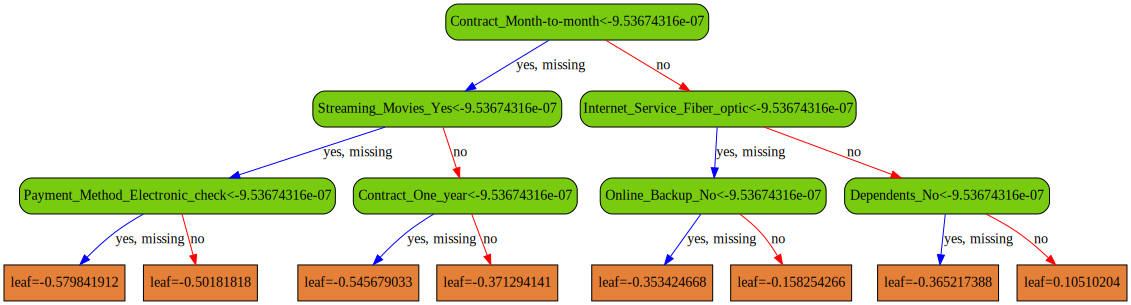

In [189]:
xgb.to_graphviz(cls_xgb, num_trees=0,size="10,10", condition_node_params=node_params,
               leaf_node_params=leaf_params)

### Now the questions arise;
1. How does XGBoost does the scale_pos_weight in backend maths?
2. What is xgbooster object and what it explains?
3. n_jobs in grid search???